# Nick's Neato
version 1.2

A silly name for a silly notebook.  This will generate a random image from Chris Brooks' running and biking data.  Thank you Chris for providing us this activity!  I've obfusicated the data a bit in the attempt reduce notebook size.  Probably for the better.


Created by Nicholas Miller

November 22, 2020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import base64
import random

data = "UEsDBBQAAAAIAJ1+dlGDQGa1FqYNAFuOqwAJAAAAdGVzdDIuemlwvL3djuw80l55PsDcgy+gXJAoipJ8N8bAwByPDYwvf0RSKTErI1buDgan0W5/2Oh+1n6rtCjpEX/+1//8+R///ed//M+f/+vnv//83z//8+d//fzvn//9v37+3//z/wjTfPzXafuv0/5fwvzfpvjfpuUn/yvtv9PPdP6/ME3Tf53m89//ZZr+W/n3z/zz//yEXfofx2//4xn+x9vPz/y7zOvR/Gv/WeMZ9LPN53/Oy5zE1DAkdRmSGvXUOf6EePye/43fPb1FHz/bdqYtW8z/X/m/5z3JgHU0II0GbKMB+2jAMRgwg4Q+ABB1Xn/CevymDDji1PxrfgGOPALsUwEcUQSAs3MqgK39q69EOzJtIRq4PG8/IU3l53WcztfMfQp35vmnYiaZvJ+Z4Te0f938T3AcSfqF7HMeMvZUaMcm0kDrcP730/qXdv4DhPVniwUQcvZRx+SwigDQ2gcAWodQAH9+4yfgHGxegPxLPkJNlq9Z0NoHAFqH4wTsRYotnbfBZY/5qimX43z+iZQXwGJTHkhrygNHTXlgoSkPDDTlkWOWPFBqWX7C+aDwR6mcuxaTZu0RKoBG9lBQxx4KuphDF3BmOY3ewvk7yjkp/3p29Ul0AVf+oxxwZDnvY9si/UOWm+6+qaEgynLeWs4Rq/7ltvKXi2oOCPIf5YAY8XzcOP+X+cl/OUK5a+b/SFFUYgEl/sMk8OA/TIKL/z9Mgiv+P0uKcJn/h0lwocfzAj0v7be74vn+ki+G5ShxW3m0CrOYDJd+ZzJc//EciM/njFaq85/wN2z7z7aW+LU8TJWXsPNPxXzwwiWffPHIB4vW87+/18f/ZZv/PG2m+vPf7mfbZQsiAORa5/KrzXfCmNY7c3ldh/P5p2ImaLaet4MyHM6/6/73naUClvU1RM3rLj6eRbDPBbCClGuWMn38WtP5jFJ+h2f+/Brz5/NPxXxQdc1CreUfYDufK67M8qRdnlnnLch/Z5DUnAl6rnsZnP7+HPb8tnblz/dz0/mnYj7o6ZKv6rnmeiucapS353V7Zc7513bUF+ZVfD9bVSU7MlUL19ykhaqw9lp8zOUXuf/qr8WrquSai6pwDkJZ8/PSfWVOJa78WOd6RX+GqhqaQ2doHXtCVd/W3BGFfRLe4NfX769GX4BVeG6aoZj0AqgmegFUFb0A4GJusj4B58i0Te0AvtVniRtX72ib/CsHTUfgwOAROPB5BA5MH4DTS88xOBgdciFWhpwzIIX7cq9DTm0Lk/BgNUPt2RMKo4A9FMy3h4Lt9lBw2h4K5oatXGwlND8/XpdUuRtP9UZbKunPUPDTHgoWmkP1arInlIwyh5JR5lAyyhxKRu136Hw+tjb/WiTC+d8RCaBXLqPKF5n8WeIxoXyjmcoLW5hEE/QWsycU9LKHgl72UNDLHKq3mD2hoJc9FPSyh4Jey/aEzrMYOov3a73sXGtlVkOXE/4eWt5xzz8WQ8EoeygYZQ8Fo+yhYJQ9FIwyh+qFaU8oGJV7vFfo9iezvM0vm/jCo7emHZngkzmTdLJmkk3WTJBpPceSbS931WU/2rtquO6q+7E0hF28b+tlqBsBNHMigHM+BL0cdSOAjU4EcNOJAKY6EVRvU66LwpYKIZ53tit0b0LjInT3MzSmPaGquT2hqqw9oaqfPaGqkubQAD1pKj3plj47kkwoI+9JmL8TVAtTbjfCJswTKnfd+s9QPrbM86TedQO0pm4E1UI3AljoRAAlnQjgpxMBZHUigLlOBNA4t09b/CSEPb2Mq5OF6xtNkD47Bug93QjgtBMBnHYigNNOBHDaiQBOOxHAaScCOJ1brq22sSG+qrN93R/J8sxlKRQ0toeSudZQvTjtCSU/zaGkpDmULDSHknjmUHCtTNwrzdVvSK9vRnuamos/CV/sA3SlPaFglD0UjLKHglHmUL0r7QkFo+yhYJQ9FIzKxVaZvV4H6ddDSxsqD9J6V9oTCkbZQ8EoeygYZQ8Fo+yhYJQ5VO9Ke0LBqDwbtMw1PkOP+3W2zAZ9hR7iy6ZelvaEglF5Gt/5ThBLC3ncjz1lltZcnv+XTbyd6HVpTygYZQ8Fo+yhYJQ9FIyyh4JR5lC9/OwJBaPWtYSmP6H791DVqK22TsILwJLeJtHsdXLy/TZQ7mpLEj7KBeg7x+BUC8fgVD/H4FRzx+BUp8fgVNvH4NRxYABugWJ2y/VLXif0sTjx4yvApXk6nnuc+BVggZZ2DA5GlRE4GFVG4GBUGYGDUWUEDkaVETgYVUbgYFTJq7TLOj/9g1tavhNgIPEh6AWwG4GGCx8CjRA+BBoUfAg0DvgQQP2QH/nqFMEY7/eddXluPecfi6EguD0UNLaHgqz2UPDTHKrXvD2hYKE9FMQL6Qk9H52l0FVYOLRAzbvlvi7UqTq/cX9bgLjfhFonlPeUuAtTBBfofN0I4JoTAcRzIoCFy3kzTR+7qJy4bWmHp9d8uD0eDW4TvnUuUBpvZd5m2strbjwHh2tjkxiaa2kWCs4FSuOOUL007gkFP+2h4Kc9lPw0h4KS55CU+2v5W3q9vpZv39IXaJDdCKCkEwGUdCKAhU4EUNKHoFfQbgSQ1YkA5ub15ulfGoRrrA/Nh3WlQdBr6zE4sH0EDtQfgYNxYAQOBoUROBghRuBguBiA08v2rZTt53tWAsK8P3c6jaCOHXuuuvJ2cZ8dxfZqJcoSrXkuD87ipPUFWngvgDpYeAHU4cELoA4IXgB1CPACqNJ7AVTNvQCq2HvpyNN0fYG6M5cvmRGK8D1XaTnzc7B4PnHVhdsvglCiROi+3Qikrw+B/PUhkMA+BDLYhwAK501Ez9FdILxuBFN9xFvoYgWFfQCgsA8AFHYB6OW0FwB09gGAzT4AkLlsTCoBnleRixDUV5EIzbQbAWR2IoDMTgSw2YkAOjsRwOfc+JWNmaUv1WVQrRszvwZV6eE3QrXtRgCjnQigtBMBnHYigNNOBHDaiQBOOxHAaScCOJ03UV1rl/r5urlXQlOsagRy2oWg1+FuBHLah0BO+xDIaR8COe1DAKfjUggTEabvBHDaiQBOOxHAaScCOO1D0Cv0vRTcKmH7ZwI47UQAp9dQCGX0Pu+2dZf+ra6Avx63g/iIpBflPaFgrj0UZLWHgp/2UFDSHgoW2kNBvLUOsd/nl72u4NhcwdKMnQhl9BgcKDkCR34OwJG5A3Dk9ACcavtR9ma4LveyjHH7uNzFZYwRWuyeUNX2nlDV9p5Q1XZz6AoVdU+oau6Rm9I7NMxiqLRR/gpF9FEm067b5xU873/n/1TcXuf/1P0Fd2FsXaGVHoNT/RyDAz9H4MDcEThwegQObM8bDaxRwE23UFsdTsuMxvOPRQKo70PQq203AgwKTgQYIZwIMCg4EWAccCKA+k4EsN2JAILnPWtFQnhttfciVKeDMAFwhXbbjUBOuxD0dtuNQE77EMhpHwI57UMAp5enW5iP5Tqf5VUn1NBDvOnohXZPKJhrDwVZ7aHgpz0UlDSH6n10TyiIZw8F12KQzik9n+G3t1M+X5+K6zml1yAeNlELvYIegwMLR+DAzxE4MHcEDpwegQPbR+BgHCiFtoBb5viHUHdbnoVFRSsU2kfZHfh6Q47Tdn+9W56/dpzEv7beYfeE0qBgDiX1zaEkuDmUNDaHgqz5TLu1WbJyXVKhCZWWrKxQWx+5Osqhn/MxPhYbzxVX56Ppe++uUGiPwYGSA3B61T0GB+aOwIHTI3Bg+wgcjAMjcDBCjMBpY8c81W5V6LaU5QGvbqvipK+Wq16PD8Jpo8ognDaqjMAlvWwfhNNGlUE4bVQ5cfnMslVaGnPvP7xdG8uUFxdxQmDSO3k/gjZ2+BG04cKPACOEEwEGBScCjANOBFDfh6BW6n4EEDxkgrTjd35PuYrWOgX3UN9Tkl6p+xHAaScCOO1EAKedCOC0EwGcdiKA004EcNqHoFbqfgRyei2E/G5YtgGtE4Wu7RXLQCFuA5r0Fv0MXYL01/55/rY5UVjrkfTmvC8VdO1IBUU7UkHLjlRQsSMV9OtIBeWWermmGvQsRRaD1Jr8Pw4Cgf6zIJImT5nKh9b8pPoZ6Dqv5lDDyJX/OIwU+Y/DyIyjhP15S/jZatO1l09fpeKSk8GOGOU34/TMvKgvw+X82pAm8QFIraH9CGCNEwEM8iGoZbMfAZyL+92SprS3V1L6U5mWt8qUhNoj6TW0HwEMdSKAtk4EcHmd78+C+/RGeKrr5hvhLs28SHp17UcAp50I4HSZi72VR6w93j/6fWtCo7AnfNIL6hy6lWH0Q7Jj+fubrjXg3tSAxyL+M6gF9SAcCD4CB7aPwIH6I3AwDpTGuD7iH/G16fLrEb+GRuE87KTX0F2hqu1zrpnCWncBPZ8PXqHXxp/ln3uTzgZPUCn3hKpO94SqTptDNyiBe0JVP3tCVQt7QlXX5twF5dCPUlob61N5AA2TOtZvUOiOwakWjsGBnyNwYO4IHDg9Age2D8Dp9fCci6ywCpuDq7jjOw5GiBE4GDtG4GhUGYCjUWUAjkaVATgYVa752+UJPGz3o8TUhEqTYDfol+eyN7PUnB5hbv9oef0ztDXqIa0W2qBsHoODsWMATq+hx+Bg7BiBg7FjBA7GjnzkoojbUvtH8RahxW3Ci+IG/fYYHIwdVx16Jv3OcRGHi229zV7mKHyx2KAEdyPA2OFEgOHCiQAjhA9Bb9DdCDAOOBFA/Xys5OdiDMDF7zhQv+z68LGr5Imb3uYV3zNk1ni7uMzSvM8NevsxOFB/BA7GgRE4GBRG4GCEGIGD4WIATv9EMAYHA8kIHIwquVKOwuYHZUFiGc+2+BDkBYkbfDxwI8DY4USA4cKJACOEEwEGBScCjAP540EpUufffX5Cpzt03mc5FGxfUz6a5vf80f2mPDushob68br8Z5Jmh23wiaAnFMy1h5Kf5lBS8shnCP29FObfOO/tc/Z84+p1UZ624yxU5RuU+mNwJOsAnGpuKNtvx1h+Q8v5trHXaQfh2dFjPv9YDFVl7QlV/ewJVf0MZZeUNnRrQ2c1dIcPAT2hqp8h17ev0Ol8adtTE1o+78/nH4uhqp89oaqfPaGqhaHs/BHrIdpT/pm+hdbnBuVnqrrWEwpG2UPBKHsoGDWHt9Bt/+dQMCqX7ddv/5Ay52MV5hvt0KiHXKG+MrePM8i2j8trk84g26FEdyOAavncxXrw3W+4j1rcys/3dQr8JIeCavZQUs0cCqrl6jnWr9gfm/Vcr/yhOWlc3Kxnh3LbjQAS5jnC8TrLfFrvH8x+34DD+cdiKEhoDwUJzaF6N90TCuLlTTrO0M8F4Od/Xj1pOB6COEV6h9LZjQAWOhFAybxB9OtHfz7Ev0Lrj75OSF+FenyHArknFCy0h4J49lAQL3ee13ix3Cekv4aIGnoIj9M7lMEdoXr/2xMK4tlDwbVYb/5l/ft6f+gIZf17/cAontO6Q5fbEwpG2UPBKHsoGGUPBaPsoWCUPRSMMofqrWgoNWUUvrs3hFr51I+OGgH0ciKAa3mviSjMaimE+rwz148o+gHJO3SfbgSw0IkASjoRwE8nAsiat/g9r6WiwN+Xk9e1tDUE+eVE7z7dCKCxD0FvRd0I4LQTgZz2IZDTPgRy2oegOr3k7i0TytY9x3xLtjehh/g4qBehPaGquUs5e/AKXaf7wfUKLe+f6ySHqrL2hKp+mkMPKEKXMs/4dSms9w5b129/UUfDA4rQnlBVvJ5Q1bWllkqhhk73blBzfXQpaeIWUwcUoT2hYJQ9FIyyh4JR9lAwyh4KRplD9Sa0JxSMsoeCUflAQjVU31/tgL5zqRWU9Kz1bLZ2PWvpm60dUH66EcA1JwKI50QAC50IoKQTAfz0IeiFqRsBzM1L/2O4zjY+Xl9b6tfQOpNbPJD2gMK0JxTMtYeCrPZQ8NMeCkraQ8FCeyiIZw8F15alCZUzhY+CB7SiS6637szzre09tH6OkErhA1rRnlASyhxKQplDQaiY7rKtfOK5vnzWm3bdzEr6xHNAK9oTCkLZQ0EoeygIZQ8FocyheivaEwpG2UPBKHsoGLUu9xeRkLY7dHtCzz8WQ8EoeygYZQ8Fo+yhYJQ9FIyyh4JR5lC9k4x1zlr5X9VDuOqUvWVtQqVDuA6oIXtCVaN6QlWjekJVo3pCVaN6QlWjekJVo3pCVaN6QlWjYp0GKexSWwh197vlYELe65b08iGAa2Xp+Py5pq8MEXUS3lqm3pYJHuIQkQkgnhMBLHQigJJOBPDTiQCyOhHAXCcCaOxEAKd9CHrDGeuS+LkeMXmvGFj3JnP5fFXMmWSxNZO8tWaSqdZMctOaSTZaM8G/EEqmOH3zGsvX8jBWo6Xpm5kA/jkRwD8nAvhXNpEtr/W/8/uCkJOwVMLaEIQFIXkrWvDPiQA2OhHAzbLPwMcqxPPt8LgB8QFMh3ix6m1mLKuZYz7npU5yr5kx3AKIk9zrLsP+mSCqORNENWeCmuZMkNGcCfpZM/UesyMTFDNnglTmTPAo1gf4vOxij9v9zP7cSeY9ik8QeonZEwom2UNBJXsouGQPBZnsoWCTOVQvMXtCwadSDn2sPj4J+/q++rjOST//WCSAXU4EcM2JAOI5EcBCJwIo6UQAP50IIKsTAcz1IejN6ZpLmVDuJ/Vuc71aTk+mcrfRi9OOTNXbjkzV1I5M1c2OTNXGjkzVv45M1biOTNWxtSxyPv9X5Wloe3uJCa9vB2toCJv4EqPXpz6EGepTNwIZ50Mg/3wIZKMPAdws50nNwuvqeTu/vuuvtcauDy5RqA1mqE/dCOCtEwEsdiKA004EcNqHoNenbgRwumwiWmeKT/s98STtTej+OfEkh4LG9lAw1x4KstpDwU97KChpDwULyyaXV+i6iKGrfEmBePZQcM0cqrejPaFklDmUjDKHklHmUDLKHApG5RmH11bH0/Z2Kuo9t2N7ngDDtIkm6D2oGwFccyKAeE4EsNCHoPena927tJ8AfjoRQNY4FwU+PquesNuH+lm1bpwknM6QCWCuEwE0diKA004EcNqJAE47EcDpWIfT8nntmWyd1if0/GMxFDQ2h+pVbU8oyGoPJT/NoaSkOZQsNIeCeLnuu+7Q87r+uUPX0FVo+GZoWntCQS97KBhlDwWjzKHUmq7xvlPN6Q69bk41NMmhqlHl4Pt8iFaZ1XAs91FZoQk9xOczvTftCVWN6glVjeoJVY3qCVWN6glVjUq1PE31Om1Cl++hqlGprDaXzmUrhOvUvvk7QdXLhxCgPU31EK1rwvizTV49l62+tkjb5OVQcs0cSq6ZQ8m17QmdZzF0Fp6DAzShKTdb9YjfMrHsdRRA8yYoTiwL0H12ZIJp5kwQLe/GeYkW7rfgy7OdMsEzcyaYlRd2r9Kk63DvmrE3DWMQzm3Jm0yCWU4E0MyJAM45EUDAuR46O72HHs29XgslAc2hYGCoB7++xp9XaHNfUsYfvd3sCQUH7aEgYem3DmHr+vNWdA2bR3MpKLciver0Iui9pxsBlHQigJJOBFDSiQB+OhFA1rzXZprqLWN+fTXYp/aeId/X9a60JxRktYeCrLmvTHkK90/Oelb/LZv8kwQr/8MoveMsR7SH9LGTRM69NpAo73zCUQp189QxuaBaVy4I1pULWnXlgkxdueBTVy4o1ZULVuVNPNNH69nOF9vrCRbl4UKeLxagoPQi6G1lKmvO0/UVIJe1ZRrRHprDM8WyNkBb2RNK9plDQb1cLb1CU7h6gFdovSCS+Gikt5U9oSCdPRSMs4eCbvZQcM0eCnqZQ/W2sidUNaocpp5DP4qfsKfrCWmvQ0DddCnsn0eRZIKqlxtBdc2NoIrnRlAtdCOoSroRVD/dCKqs5VD2UBv532VZ7tBm4f0i32317tMcukDd2RNKsppDyU9zKClpDgUL82rqz8et9niN13NXuV1Le9pkAljoRAALnQhgoRMBLHQigJI+BL00LYeY57fhz7EqbfercT17rDwBiivzFyhN3QhgrhMBNHYikNM+BHLahwBOh9oCf5bX631w69FcrVdj/EEAp50I4LQTAZz2IeitqxsBnHYigNNOBHDaiQBOOxHA6TzFMM3P7mP1ljA1m0UoGuuta08omGsPBVntoeCnOVRvYntCwUJ7KIgXQ3nk+BM6h+Y6VULBNXso6GUPBaPsoWCUPRSMsoeCUfZQMCofwn2+BH0+eWxvp7vfjyHlk+nrCt5EnN64jsGBhSNw4OcIHJg7AgdOj8CB7SNwMA6MwMEIMQIHY0eemlomoV87KdbQEvcKlXZSXKBB7gjVG+RyCHkexj5/MMtDqF99rtlOMoEGBR8CjQM+BFLfh0C2H4Xw+YDcEI7vBBLch6A6Xc5JD2kXfkrhnlsQ5+b2Kc2DWqBOdiOo5roRVI3LMd2Z8Pl7eGZgxPZVSJqBEaFodiOoTrsRVKfdCKrTbgTVaTeC6rQbAZx2IoDTuYzbpDLu/kaw1i6uHpwuTbeN0E17AchoD4DeTHsByGcXAOnsAiCbXQAkswuAXHYBgMrhKCpPr5nJdbJAnJpQ6W4WoYbuCQVj7aFgqTlU75d7QsFGeygYaA8F6+yhYJo9FOyyh4JR+QShJCyRyjfHOvN9X1pn5Zuj3hW7EcA1JwKI50PQK2U3AijpRAA/nQggqxMBzI21oYj1rnU5toSvdy29he7IBG/NmWCqORPcNGeCjdZMvWYuB9TnzPSeuXzPBONKYyfVFefb++tqLXXFVX1JXwwj1MduBDDOiQDGORHAPycC2OhEADedCGBq6Wavx4u0vUJj281KH4siFL4doXrhW46FlwuuZ+5L/Db3JULh60ZQzS0npmdCfJtAsNed1MtQpv0K9Y63J1T1sydUVbInVLWwJ1QV76jt0XbfbC7Vtq83Br2h7chUTbNmrtDCdmSqanVkgkzmTHDJnAkqmTPBJHMmiGTOBI/C9NwJ7v0nXneCKqe0qnqFXrQnFEwyh+r9Z08ouGQPBZnsoWCTPRR0soeCT/ZQEMoeSkbVtvUOrc8ldUvzJVIoGWUOJaOsoXpv2RNKRplDyShzKBllDiWjzKFklDkUjFqmEvpn3f+6NKFS+bNCVVmOBQ+bsC/j8/2ibstYF/koN0G9qfQCgGkuAL2n9AKAgT4AsNEHAGb6AMDS3FVtdcnsk7m1PimZIKk5Exw1Z4Ki5kyw0pwJIloz9Y6yIxN0ywXNtr4yr0f9bf2eCYaZM0EqcyZ4ZM4Ej8yZ4JE5EzwyZ4JH5kzwyJqp94flYHlbpuZRKKd758z3nRD3uhPikuB5RC0Ju0I1k7pCNZW6QjWXukI1mbpCNZu6QjWdukI1n87QM+h17T+7oL4ufn27sKT3hF2hYJQ9FIyyh4JR9lAwyh4KRtlDwSh7KBhlDwWj8saWm7Qf8Mc53dW1ujnwUv4a4jndSS8Sx+DUinEQjvwcgCNzB+DI6QE4sn0ADsaBfDb6ifvcQXKLL9X2+Nxn5vrW8UGAQcGJACOEEwGGCycCjBA+BLUl9SPAOOBEAPWdCGD7kt8IhMVRz/kJ+54agnR+QtKbVT8COO1EAKedCOC0EwGcdiKA0z4EtYP1I4DTy14I5RCJcE952bfmphOEKS9JL167QslccyjJag4lPw/lt9YQ0ncC+BnXQihn6N0LIvf9yZwOoddIet/akwkOmjPBOmum2rf2ZIJZ5kwQq/RZR7lcyxmfdavXo7lcxTM+k164doWCWPZQEMseCi7ZQ0EmeyjYZA8Fncyhau/aFaoKVc42z6FFqHi/Hx2tUdLxxgmK155Q1aieUNWonlDVqJ5Q1aieUNWoct55Dv086XpKr8G1HoWwXO8EwuasCVpYN4Lqmg9hg37WjUAW+hBIye26fObf43jb8eS+jV7XUnkVPA7h8WmDGteNALLmk5g+f0onLh1/fkplHsv5xyIBzHUigMZOBHDaiQBOOxHA6fm8+Es1cYaur9BjmprQVQzVC96eUDDXHgqyhviEbnv7xhNEwiZMy9+gn3UjgKxOBJDViQCyOhFAVicCyOpEAFl9CHoL60YAjfPupCdBHtK2SohfhzS9hXUjkNM+BHLahwBOL+etpR62WkPLU+4xPzO91VDQ2B4K5tpDQVZ7KPiZDyTa3ydUzvnZcl5vQLoB5/9aqDs3KFS9AGCnDwDk9AGAmz4AUNMHAGb6AMBSHwAY6wMAe9dJBqzLH0B9iVuF1/UNWlongF7ZegHAZB8AmOwDAJN9AGCyDwBM9gGAyT4AMDlvZHkCYvsV4Ji3+8lD/gqwQQ/ckUm+GjP1Frgjk6y0ZpKI1kxyz5pJulkzyTBrpipVOfH+yXweDd9CxUdDvf/tCVVNKgef54fYt7eE14faCxAf/cUPtRs0vi6AHQpfL4AqnBdAtc8LoKroBVC99AKoknoBwNh5K3JNOXR65GoWSpx/LIaCsfZQMNYeCpaaQ/UOtycUbLSHgoH2ULDOHgqm5cmzV+h0PLerJlS8CexQzpZD5LNdH8+A6W7s5rm5y0hnlO7QzXoBwDQfAFjnAwADw3K1Sef/W2KDyROhL8LUEF4fF98JejFbjpYP+1y/+aXn68d+h8p91Q5dbE8o6GgPBR3toaBjXu//Cl3FzFV4eNyhVu3IBAHzOu09n44jlfLXwBTuMUQu5XeoWN0IoKATARz0IejtqxsBhHQigJ1OBFDViQDe5lmv/0bQP1LtUMGWU+DzjTr96VKeSRVyl7JD7doTCubaQ0FWeyj4aQ7Va9SeULAwL+Xe4+f7yvKa/3yE+r5S7vjXKr8PAEjoAwAHfQCgoA8ADPQBgI0+ADDTBwCW+gDAWBeA3rAutRQTAOv6B1Am255/LAJUk70AqsleANVkL4BqshdANdkLoJrsBVBN9gKoJi9lA4UTkP6ELt9DVXvLIfV3g/GxOPeteaj6SotzDyhv3Qjkrw+BBPYhkME+BFB4TtfzcLtv3esRWN+08YDSticUVLWHgp72UFDSHgpKmkP1orYnFMSzh4Jr9lDQq1Rv88fgXE5ajAUwHc84Kp60eEBp6wUA03wAYJ0PAAz0AYCNPgAw0wWg97dLLTA/JnQG4VDc9beZ3Vlx0qG4BzS7Y3Bg9ggcOT8ARyPAUXDt54O6T2ZueFMltIcsHMKz2gGtsRsBxoAl/dSJ3eF3ieEOLR8l6nGSSxTHXr027gkF1+2h4Lc5VO+De0LBXHso+GkPBQtL91Y/esX5rgSu71wFFmfRNb3b7QkFveyhYJQ9FIyyh4JR9lAwyhyq17k9oWDUNUkyP3bGNf6ZelXuCecfi6FglD0UjLKHglH2UDDKHgpG2UPBqHxC0vWFIC53t3J9ISiXWlzEu6levfaEglHmUKpY7aFklDn006h5+i/51bBMEwzr/PcZ6Odn2dZ8u9ryBfD56bz8+yeoobGETjUn/53KI6GcMzvlBKecxSknQs75O1w/nqSv3+hWbKtfT3c5eh0XnSB6+xpd9udYkxy9QfRRovOlnc6bSrkZnZG5k9vLJZ3i584f+d/7gMxDz8wnH52Z8U9m/v/KJj1a5gyy5NXmdXbKb/55liLyzMx/cpSwQ3jvyJkgjjkTJJpPMeLHqvjlN581XF7Wt5hvHUf5v8MsXgMzyDXHkp/eI/NPtWyroEaCZ3nxeqw7yhz5eMErM9/a6u4Mh3AyX84EwfIUxfIPGn63/fl7li659mibsEtNDgW17KEgVT5u/fz5ZQG2bW4H+Pi6IsqOKnPdbWPbZAIo5kQA4XJDVK6BPJH55Vs9GKlOBN2ElQbnvwMIZ84E4cyZIJw5EyQL65P58RtrCVU25TcWwDknAhiYz/aJwumb57XW/tFrV+itHsU5lw88m7CH0FS3EP3/EwfWjsCBwiNw4PMA3AKq5/XmIm6J1yHO7wRhhnAmgPhOBBgGljrI5pvYlsIdWr7flBUcYROmTudQGAfsoaC+PZRsN4eS0+ZQMtccSn6aQ8HCKL4kSAN2xZVn+3mmm3gEC0fgQMkROPBzBA7MHYEDp0fgwPYROBgH4lFe6NP1iHVl7k2m/IgVYRgwZ8IoYM6EQWDNP+rweefap/39c951K071NnaVB5+fYs9/rzAIjMDBIDACB4PACBwMAiNwMAiMwMEgMAKnDgJlolrGZbn28ISWF9dQtNqFxbE5VB0FekLVYaAnVB0HzKEzNMA9oarTPaGquUetCevnj/28KF+h5fNHmQsadmEWaA5V/ewJVS3sCVVd6wklo8yhZJQ5lIwyh4JRuZJc64eaHFq/qG3lgO+5zFnWQvWauCcUjLKHglH2UDDKHgpG5Ubv9dtP6+u56vrtl7RdOBxjmqEg7gkFo+yhYJQ9FIyyh4JR5lC9B+4JBaNy+boKpzu3hPSdAHo5EcC13KjV9Xs19BoUy9eIkCgUXLOHgmv2UHDNHgqu2UPBNXsouGYO1YvYeuh5PISL9nw7f1W99aItD3B7/NwAPhNAPCcCiOdEIPF8CGShD4GU9CGQnz4EkDUXYtc3rBx6PWzUz1Zhp1CQ1R4KsppD9b62JxT8tIeCkvZQsNAeCuLlrkr6TrQvfyfPX7jSadRZwruwxjfjwMIROFByBA78HIEDc0fgwOkBOL2YHYODcWDd7qlJTYmzNpPilRJHr197QmEcsIfSOGAOJdvNoeS0OVQzN9Spi6+Hy/Mt8vUaX1fi1gpv/tw3JodqfnaFahbaQ4Nei3aFakZ1hWpGdYVqRnWFakZ1hWpG5dD01E33hplX3bToVXPQa9FQpyqu0oPr89c+6sbRM/21QS8nArjmRADxfAhqlepHACWdCOCnEwFkdSKAublFXYVT4VrC8Z0AGueWK10a59AykXifW42VUNDYHgrm2kNBVnso+GkOVbvYrlCw0B4K4tlDwbVcbKV0ze+4D5mrG+nV0E3YojaHgl72UDDKHgpG2UPBKHsoGGUPBaPMoWrj2hUKRuXysi6ZeAtdv4eCUfZQMCpXUUk4Tj0vr7jOll2au5e4vCLoVaofAVxzIoB4TgSw0IkASjoRwE8fgtq4+hHA3Fw4ne9E4lKdy7jQrCQV51IGvYv1I5DTPgRy2odATvsQyGkfAjntQyCnfQjgdG6+kjDHME+yv4xrd6cXJ9kHvVf1I4DTTgRw2okATjsRwGknAjjtRFCdrtMC12sVyN+VUtf66yM09wdppVSAYtaNoDrtRlCd9iEs0N+6EVSn3Qiq024E1Wk3gup0ndO4bvX+cL6t1rN5t729JQRhjsoCnW9PKJhrDwVZ7aHgpz0UlDSH6v1tTyiIlyuvVVrIOa/3RTs3F61wfGomgHhOBBDPiUDi+RDIQh8CKelDID99CCSrDwHMzW1tP0HvfOvMxlPjcpuYUst5PeRv+9Y4PQmTbhYogN0I4LQTAZx2IoDTTgRw2okATjsRwGknAji91Nta7kHTsd2htQctj0jpEL45L9Atd4Tq3XJPKMiaG7i1FtZp2+/QWliXFR5JOFIoh4Kf9lBQ0h4KFtpDQTx7KLhmDwW97KFklDkUjMoNZdkb7wxNbwtS002YGhOEE/JOgt4GuxHANScCiOdEAAtzM/b65WqE9jetEEBJJwL46UQAWZ0IYK4TATR2IoDTPgS9DXYjgNO5x3UgqE7XmY0noex+uL5O59320ISucqiqcU+oam5PqCprT6jqZ0+oqmRPqGphT6gqnjk0Qktb57W+7j1NaL3drBSq6tUTSkbll4r18yW7IWzpO4H08iGQaz4EEs+HQBb6EEhJHwL4OSd5XXB+8n0t4kxfnnwjlLleBL3ZdSOAxk4EcNqJAE47EcBpJwI47UQAp3NBe60LaEPX76GgcVl8P39OWU7PbkRrnbJcbhViDRKh2XUjgMY+BL3ZdSOAxk4E0NiJABqXRvFj6/2rUqu3hDV9J4DGTgTQ2IkAGjsRyGkfAjl9AGH/ZwI4XRrZuQ52Tej6NVSveXtCwdwlvoce/xwKstpDwU97KCiZ21pbKFiYi7hre8j2F7U3z5NKKIhnDwXX7KGglz0UjDKH6s1uTygYZQ8Fo3JruQZhI9aPb1919kWKD0789hWhzB2DAwtH4MjP/CgahW/pyofEbX6GAw1H5g7AgdO5MztvX3R32ytho4sRBHcigO0+BL0AdiPAOOBEgEHBiQDjgBMB1HcigO1l+9p+gip4ncV4TYBrv2vuzUOE/Gqrl8Y9oaq5PaGqrObQFUrjnlBVyZ5Q1cKeUFW8nlDVtZ5QVa863fSaXdyEXhOKMZSMMoeSUeZQMsocqhpVx4XziSGVg+22uqFyXVIjrVVYocM1ZKn+GLJUbQxZqi2GLFUSQ5bqhiFLVcKQpZpgyFIFMGQ5Xvd66WnIcrzu9SLTkOV43evlpCHL8brXC0dDluN1r5eIhizH615vCQ1Zjte93gkashyve70BNGQ5Xvd632fIcrzu9XbPkOV43etdniHL8brXmztDluN1r3duhizH615vywxZjte9XnoZshyve73IMmQ5Xvd6OWXIcrzu9cLJkOV43eslkiHL8brXKyNDltt1n6AgMmS5XfcJ6iBDltt1n6D8MWS5XfcJqh5Dltt1n6DYMWQ5Xvd+fU5y7HOSY5+THPuc5NjnJMc+Jzn2Ocmxz0mOfU5y7HOSY5+THPuc5NjnJMc+Jzn2Ocmxz0mOfU5y7HOSY5+THPuc5NjnJMc+Jzn2Ocmxz0mOfU5y7HOSY5+THPuc5NjnJMc+Jzn2Ocmxz0mOfU5y7HOSY5+THPuc5NjnJMc+Jzn2Ocmxz0mOfU5y7HOSY5+THPuc5NjnJMc+Jzn2OYn7nL1kfcyPnPKOhnXxwxa/E1Qb6gyPdRWWV8z3HnFlbvR1sPP5xyJBdcSHsEEj5EZQfXIjqJa5EVT33AiqkW4E1dM6R0Wb0nctBqpT+uqZ0eKUvg1aKTeC6rQbAZx2IoDTPgS97XIjgNO505IIH7Ozr8N8W5w4O3uDmqxOyzlxn1Pdz/vli1CH8jr/exXl0MszNwII7kQgwX0IJLgPgQQ/FMLfHbQlnLSD9ga93RgcqB/qXNLpp+6K/wqtxxKXCY/irvgbdHw9oSC4PRQ0toeCufZQkNUeCn7mYui15evH9RV+m2nFE1xfek3oRgA/nQigpBMBLPQh6PWjGwH8dCKArLl6PAn/MDReuOM7DjRe6pTwf8YddTXbTDgQfASO1B+Ao3FgAI4GhQE4GiEG4GC4KCsRj7ppagp36NaEStXBBkVtTygMCvZQGAfsoWC7PRSctoeCufZQ8NMeChbmvi9Nyi2hPMDs0/LVBL39dSOAaz4EvSl2I4CFTgRQ0okAfjoRVFnrbDDxvBl5EH8dPhMIp2o8BqcKPganqj8Gp44DY3DqoDAAt0MjPganDhdjcOrYUWc7nrj0duvZ56UJlW49O9TjPaEwQuSGM8U/N8k9hBK6UCiMA/ZQsN0eCk7bQ8Fceyj4aQ7VO+w6c+919OsTeh39GikUXLOHglH2UDDKHkpGmUPJKHMoGWUOBaNy35l2fKiJLUEeXPU62Y0ArvkQ9DrZjQAW5vZvm/79jrfWO95KOPBzBA7MHYEDp0fgwPYROBgHRuBohBiAg+EiV3hlJsrbKLc223Ero5zebneE6oV2TyiMA/ZQsN0eCk7bQ8Fceyj4aQ8FC3OTl6666v7Su8etCZW+9O5QGveEglH2UDDKHKoXwD2hYJQ9FIyyh4JRuaJL1wfW8+ny9YBXtxAtfy4exrdDAdwTCkbZQ8EoeygYZQ8Fo+yhYJQ5VG9260zNJMz3LLOernfS+BDEWU87NLtuBHDNiUDi+RDIQh8CKelDID99CCSrD0E1t87UvEq5j7OUrkH8augqQTpLaYdi1odwQBfrRlCddiOoTrsRVKfdCKrTbgTVaTeC6nSdV3wSIhFqZ5mIoDpdJ2euh/LPkGVetmP//s8ATjsRwGkfgt7suhHAaScCOO1EAKedCOC0EwGczlWpNFFHxcXvOBB8BI5sH4AD9YO2QOQDtxRcXS3COBgHBuD01nkMDkaIETgYLkbgYOwYgYOBZAQORpVc4J44+T5eVdtqObETAQYSJwKMHeUEFeHsBu1Hdp3dcBAOxo4ROBg7BuD0cnoMDsaOETgYO0bgYOwYgYOxYwQOxo4ydTjcG49fMqfQhEobjx9Qj/eE0ghhDqVxwBwKtpfJrOWbgrD8r85sTdNDEJf/HdCVuxHAaScCaOxEAHOdCCCrEwH8dCKArE4EMHdVDl38xNUh7TqBEXHg9Agc2D4Ap5f6Y3AwDozAwaAwAqeOEHXW6ypMb0j7dhPKjIZY9xjYhc75gO7fjaCOEG4EdYRwI6gjhBtBHRTcCOo44EKYJ+j+6zzWeCinK9eROpYDR+OsPblkgmq7G0EV3I1ATvsQyGkfAjntQyCnfQjktA8BnC59rWTc/cXwZVwlCF8MMwGc9iHo3b8bAZx2IoDTTgRw2okATjsRwOlch/7bo01sHm0qTnq0yTgQfAQObB+BA/VH4GAcGIDTu/8xOBghRuBguMjN+dW5aIRawDABhgsnAgwXZbcJYbKK9p5S99VjHIwdI3AwdozAwdgxAgdjxwgcjB0DcHr3PwYHY8cIHIwdS92eKoHZBfSFAGOHE4HGDh8CDRc+BBohfAg0KPgQaBzwIYD6pVq9TnU97hagnup6tQDyc6Te/feEgsb2UJDVHgp+2kNBSXsoWGgPBfHsoeBarhdTuchrW1Vn205rEyq3VXoN3xMKRplD9Uq9JxSMsoeCUfZQMMoeCkbZQ8GoXL+eoffX2iu0zjxRv9bmUDDKHkpGmUPJKHOoalSdglwXwGlTDPa5+fwnTTGYZ6it3Qiqa24EVTw3gmqhG0FV0o2g+lknCKeFpont89aMAApBldWNoJrrRlA1diOA0z4EvbZ2I4DTTgRwOhd+1y4tmg+haYk0AjjtRACnnQjktA+BnPYhkNM+BHLahwBO53pQJbQbDMUABL11diOA004EcNqJAE47EcBpJwI4nfsvdWxd2rGVrla9QXYjgNNOBHDaiQBO+xD0NtiNAE47EcBpJwI4nZuxNAlzrpu3rNgYJ71lzdD5uhHAaScCOO1EAKedCOC0EwGc9iHoBbAbAZyOx1My5tC3khFDQWN7KJlrDiVZzaHkpzmUlDSHkoXmUBLPHAqurcqJDNoatb2ZuKDcJvSeeAwOLByBAz9H4DRzlzoNdU30lLvt39+Y1Araj6A57UfQBPcjaLb7ETT1/QjaOOBECHqH7UfQbF/qZN1/WzNcdua41gzHhXCa7YNwZPsAHKk/AEfjwAAcDAq5mD1xNLN6S19urEEvwf0IMCg4EWBQ8CGoJfhSn3bX4++vPR/Ue5RfcNmu6kwU5o0EvfvuDlat7w1W/e4NVk3uDVad7Q1W7ewNVqXsDVZd7A1WFewMVqvq7uBR5qnFdHfwKPPUGro7eJR5auncHTzKPLVi7g4eZZ5aKHcHjzJPrY+7g0eZp5bF3cGjzFOr4e7gUeapRXB38Cjz1Nq3O3iUeWrj2x08yjy1+e0OHmWe2gB3B48yT22Cu4NHmaf2vt3Bo8xTu9zu4FHm6WVtb/Ao8/Rqtjd4lHl6EdsbPMa8BWrX3uAx5i3Qq/YGjzFvga60N3iMeQv0n73BY8xboO3sDR5l3qBucxnVbS6jus1lVLe5jOo2l1Hd5jKq21xGdZvLqG5zGdVtLqO6zWVUt7mM6jaXUd3mMqrbXEZ1m8uobnMZ1W0uo7rNZVS3uYzqNpdR3eYyqttcRnWby6hucxnVbS6jus1lVLe5jOo2l1Hd5jKq21xGdZsLd5vLj3hI/Rn1s11n58zfCaRgdCGQi6lMavrzwwm/87pehK3M9ZtDmaly/rFIICl9CGBn7u3WpWzicf5Of/aphKb9+cEsmzDBZsHu0x4KVtpDwUhzKPWduaerB1j+ruv2mrSUytr9UBbtn38shoKJ9lCw0B4K4tlDwbXcy12h6RywXhtr19B6aEb8PC45h4Je9lAyyhxKRplDVaPqlLwz9GOE3JZn5/Iyw2spS4S3JYoEVS8fQoSG042giudGUC10I6hKuhFUP90Iqqx1NuRal7Ft5yvka1ipu3fUHaaCcPuLUIX2hKqy9oSCrGWD1bohTDmHu4au9YTbMgNTOoc7h4Kf5lC9+uwJBQvtoSCePRRcs4eCXvZQMCp3UnGvG7jt900l1kMxy81m24WbSoSKsycUjLKHglH2UDDKHKpXmj2hYJQ9FIzKvVMUFkGV20B9uC6747wI8m1A7zTdCOCaE4HE8yGQhT4EUtKHQH76EEDW3C7Femp8Oh9jy5veGVpH1ZKWVuHtL0IL2hMKstpDQVZ7KPhpDwUl7aFgoT0UxLOHgmu5IjqH6o+H63V+AcrL3yXCWnYh+wSAaj4AMM0FoDegXgAw0AcANvoAwEwfAFjqAwBjyxLr8r/6jccduk6PXOcfi6FgrD0UjLWHgqX2UDDTHKo3oD2hYKA9FKyzh4JpuXOUDkOJ+9w+zOw/Zc3k62SUC7eL73F6NzoGp1pYJ8OduFxvxPOv9fqRleXb5UYXzj8WQ1ULe0JVC3tCVQt7QlULzaErdKM9oaqFPaGqhT2hqoU9oaprdQbdWvcQjufD5fUesm7PfS0uQre3QrXZEwpG2UPBKHsoGGUPBaPMoXq12RMKRtlDwahc0UnHYMfz+eq6DVwnX1dClAmglxOBXPMhkHg+BLAwrPcH5jhvr0GofmC+7sCz8DF0hTq0JxQstIeCheZQvQ7tCQUL7aFgoT0UxLOHgmv2UNArd2+v0OlvaL0DT3IoGWUOJaPMoWSUORSMyuVTfWxpQ7fpa6jeWfaEglH2UDDKHgpG2UPBKHsoGGUPBaNyaXRepx93wWU/2lfKcF/BxzMqLLvQZq7QZo7BgYUjcODnAJzee47BgdMjcGD7CByMA7l9Ou36KFI+cNcz+jZ/x8EIMQIHY8cIHIwqI3AwqozAwagyAgejygCc3t+OwcGokpsx6RDM/CT62vIvNrc4+UlUr3ndCDR2+BBouPAh0AjhQ6BBwYdA44APgdT3Iai212mQdSp/bYSu3RbrR+SyTEFshBK0wT2hqrk9oaqsPaGqnz2hqpI9oaqFdRrktVdu7q2vS2r/1lsnaIN7QlXXekJVvXpCwShzqN4G94SCUXM9VbdcUtvS3m2Xm1Bf98qwcv53RALo5UQA15wIIJ4TgSz0IZCSPgTy04dAsvoQwNxcBEt7Q2u4ujc04vRuuU4XfDn99/P59bB7CV5W3YifzxMUzW4EENyJAII7EUBwJwII7kQAwZ0IILgTAQR3IoDgS72LJiIsXwl6u+1GAKdzQ1fXNOqEtRmXFAI47UQAp50I4LQTAZx2IoDTTgRw2okATjsRwGkfgt5713mS2rh0lcHXuIQEctqHQE77EMhpHwI57UMgp30I5LQPgZz2IYDTa73Hfc4BPeb7QXxuCNKk1gQVtBdBb53dCOD02jzNNKHheyhobA8Fc+2hIKs9FPy0h4KS9lCw0B5K4plDVdfqFEz1qfuNoD+xbtAGuxFU19wIqnhuBNVCN4KqpBtB9dONoMrqRlDNrTMsX4RniuwVqvfsGxTNPaFgrjlUL5p7QsFPeygoaQ8FC+2hIJ49FFyzh4JeZWpmnfPV7FF1zfkqoeIeVRtUwz2hYJQ9FIwyh+o1b08oGGUPBaPsoWCUPRSMsoeCUbmxKkt2ztD4zPNqQ6N4O9GL2Z5QMMoeCkbZQ8Eoc6hesvaEglH2UDDKHgpG5SZpnepGgud/77WIZ2lCF+Fj1AaFaU8oGGUPBaPsoWCUPRSMsoeCUeZQveLsCQWjYl3vHP+Ehu+hYJQ9FIwqbVBdFpc1fV8Wt4Omel3ZEwpG2UPBKHsoGGUPBaPsoWCUOVQvGHtCwajcOJ2Xegld7wIoNQXQsgoF0AadYk8oGWUOJaPMoWSUOZSMMoeqRqXXvpf3Q2+dAVg3Zi27U2kPvXqn2BOqGmUO3aFG7AlVjeoJVY3qCVWN6glVjeoJVY2qUw7Pi788TCiT+NPSEKRJ/Du0gG4EcM2JAOI5EcBCH4JeFroRwM/5uC/QvAjxbYPvGiouQtyhOewJBT/toeCnPZT8NIeSkuZQstAcSuKZQ8G1XKtJqwebhRrXgsFKkBZq7FAjuhHANScCiFdmx12r1Jdnt+q9CZU66x0Kxp5QEM8eCuLZQ0E8eyiIZw8F8eyhIJ45VC8Ye0JBr9wUXTfLYtTb/XEHo/SCsSeUjDKHklHmUDLKHEpGmUPJKHMoGBXTE3qOEa/rtHnkOv9YDAWjzKF6wdgTCkbZQ8EoeygYZQ8Fo+yhYJQ9FIxa62eQzyeLhhC/E0AvJwK45kQA8XwIeinpRgAlnQjgpxMBZC3T7Oa/Q/W6fx2q9e6yJxRktYeSrOZQ8tMcSkqaQ1UL6+yzdRKur+kh1OurzriU3hUPKDLdCKqFbgTVQjeCaqEbQVXSjaD66UZQZa3Tzs7RMLTd2+ud/TXbYP7iwwFNqBtB1diNAE77EPQm1I0ATjsRwGknAjjtRACn5+bxtQldGsmUUNDYHgrmlsXm9eS2/OjyCt2aUOnR5YDCtCcU/LSHgpLmUKkjDf8lzP8t1DnIaReOEN5jHma3623788tr+ffPoubu+SyVcgGcf7lru969HIZZl/1ff+WPzHlAZhiQuQzIjAMy1wGZaUDmBplHPkBVOGe5AZSLNRFg1wG54k/LPfOkmrWXAao8c4gTT/K/D//MGaTKnX4Z7c/MNLU/jtdCxX3KJWtZLx+WJFo7g2E+ANAtf0Aocznz1/M7Mv/Bfs1BnsRIsK1MbD6E3fDu286Ro/eD8sG83M+v29NsX6sG8nV3lN+gVGznTDDPnAnmmTPBvNz4v1aKN5k551D3vi8vjAMyQbalruz43Im0WdGeR4ij7oF47BIggHk+ADDPBwDm+QDAQx8AiOgDACvLRFlhhXOZjdiscD5WGL8DKOoDAF99ACCvDwBMdgEsYLIPAEz2AYDJua5eY51CdJci5eHq2OAet4C71kiw1RoJflojwUhrJDhojQTrrJHgWfkmEOvj6TN+bvlirAOnMn5GUMucCTaZM0mg9c5spjM1mVKrmDPJIGumqlCd2it9tynzTpvvNoc67TQDVKG8AKpeXgBVNi+Aqp4XQBWxTgtu1ru9ZjmU9W7TDLeIVTWxJ1RVsSdUdbEnVJWxJxRsLAeBSVdCuNdU1a+oU305Dp9rqjIBdHQigI9OBBDSiQBGOhFASQ/CDO2oGwFkvbZ+/SQ8KwD3SqiPocIKwEwAc50IoLETgZz2IZDTPgRy2odATvsQwOlQOyH5nekipIYgjd4z1LF1PvC6/32OLMXYK1R6kJyhj+0JBXPtoSCrPRT8tIeCkvZQsLB0jkJHXE7p2n7vknie6mF60rP6DO2rGwEsdCKAhU4EsLDMEu8m6EVtnU8tfw04/hDqtSQ9sM/Q1LoRQFYnAphbqlSJcD7/SwRh5W0mgMZOBHA692yvT0nngFKO9bi+Jc1T/Zg0f57vkENBY3somGsPBVntoeCnOVRvXHtCwUJ7KIiXp+mm+fNBJ2yp/aPnw2VZ21UHqbCJY5Xeuo7BgZIjcODnCByYOwIHTo/Age0jcDAODMDpxXGdsJ3qrGSVUKYol/9UCTBcOBFo7PAh0HDhQ6ARYi+E/Owd9nSHbk3o/jnDLIfSOGAOJdvNoarTdeZzEuYeL+eTy4tQ33Nr2TsJ8xRmaJPdCKq5XgS9W3YjqLK6EVRZ3QiqrHXm8yVrLvXe/Jzr/C+51NMr6J5Q1c+eUNXPnlDw0x4KStpDwcI8izldHyCe0BJHoQFK455QcM0eCnrZQ8kocygZZQ4Fo4Ly9FReVNoHposgvagE6HzdCOCaEwHEcyKAhT4EvQA+XvNlP1uOfB+pM5PLy+g8z+p9JEAb7EYAWcsZYgf9lLbjaAjKTwnMdSKAxk4EctqHQE77EMhpHwI4XVo/6TvO8hpbr+84c/2uKX0pCtAgexH0BtmNAE47EcBpJwI47UQAp50I4HSZqSkR5KUP7zhp7UOAbnkMDmwfgQP1R+BgHBiA0zvsMTgYIUbgYLjIW6Z442DsyJupnLj4Np1135pMaT5rgHL7KLuEiP8Izzy9t7+19M0sQJ/tRqABwodAY4IPAYaBvE3GtUhV3d+y/U0L+1tmApjvQ9DraDcC+O1EAKWdCGCxEwGcdiJoTi9T2RHkteX4X8I11tX9x+ujsEbQnPYjaE77ETSn/Qia024EtbXOhPhzH4KQpyBcoaEJlaYgBL2o7grVzO0K1WTNoXVblel9BsY6NfYooZqfXaGk5J7PZLxPq6gdxxZbz+UnfbWO7goF8fLWCfGo//j3d4Mtll1x59IpKm2MWkd3hYJextBFr6OXssz7LXT/51AwKvex1y9K+cb5+q0VgviNc9G7aT8CuOZEAPGcCGBhnpAbhaoopPuBPR6PPSHJBFDSiQB+OhFAVicCmBuWe4j9+E2/tsNqxlvlN61W2H4EcNqJAE6HeiP6eK1RcfN3HAg+Age2j8CR+vs/4l5PJvPzZKLhaBwYgINBIW+NLCp7PLewVtlDvIWpHbgfAQYFH4LagfsRYFBwIsCg4ESAccCJAOpfh8zJ81Qqoe6GCF//Fr0D9yOA4E4EcNqJAE47EcBpH4JaYS9llfO9KPZ5CUjtVAclFDS2h4K59lCQ1R5KfppDSUlzKFloDiXxjp/7zLYmNHwPBdfyTtbS2thmVK1rYytBGVXVBtmNoDbIfgQQL2+cfR3JUybAXqFrEypNgF300rgrFMQrO2MswgPe/uxhmb4TVAvnuty/HsUa7nKnnsR6ZS7C96QFmuGOTNXBjkxVwY5M1cCOTNU5e6be6XZkql51ZKpadWSqVnVkkkfpbp6bzPA8dWiZ4NGsVSS52X97Rq5V1SSs7F6g23UjgGNOBDDOiQD+5TX8V1s770s7Fp+/6fjbVLd1l9ZdqMMj9MFuBHDTiQCmOhHAWycCWOxEIKd9COS0D4Gc9iGA01c5/A+EQARwOh9H9yJs8c8XmDJSz5swhTNCH9wTCubaQ0FWeyj4aQ8FJe2hYKE9FMTLB+fFuvtGuffUT7qxfQaQ7j0ROteeUNDLHgpGmUP1MrUnFIzKZ9xFYSbXfNxPbktqRpdDHF30/tSNAK45EUA8JwJY6EQgJX0I4GfuHqOwY+3nbevCNR+YlNuWXqaOwYHTA3B6zVpWcId4HYDwDMthb0LlYVmvWXtCQfDc3sW6q2y5lmoXE5av15Jes/aEgsb2UDDXHgqy2kPJT3MoWJi7PkmL85nidYu6TKivnFGYchehZvUi6DWrGwHEcyKAhU4EVcmy/DfEeuBC0+ouzbuH2LlG6Fx7QlUle0JVJXtCVSV7QlUle0JVCztC9ea1rBzOoeXDj7JGZGkmoIlrRCL0sG4EVTw3AonnQyALfQikpA+B/KzPt9fm9q/rc28ypdVAERrbsir8yTzkUHEc1UvaUCe8Pn/R1Gbqy5Yi1LLWzBWK2I5M0HHe4TLY28sgqpfBCtWrGwF0dCKAjk4E0NGJADo6EUDOsN13pEb4ekNa6foEN82Z4KY1U29XOzLBTXMm2GjOBP/MmWCcORMcM2eCVctSnvKTaNX1lF/f5xJYpZesbgRwzIkAxvkQ9C7WjQA2OhHAzaV5JMsnS67toFzPA5L2R1+hi+0JBTvtoaCnPZT8bB5Cc2hsH5owFJSM9dVLPOXhRTiaS0HaaWqFKtWNAEr6EPTCNNRuU1qTnneluQipGXylXWlWaE/dCKBknl35kj5PhEyt5/WZW5oIuUKV2hMKStpDQUl7KChpDwUl82TEuNdpU3ku5vUdvgkV52KuUKX2hIJ45lC9MO0JBb3soWCUPRSMsoeCUXkr2lfo+X+XY/nu0LpMaRUOrFixCbWHglH2UNWoskT4Dj2v5/efaQ1dhKplhSa0J1Q1qqxGfd3jw/kE914K1dAgPozpTWhPqGpUT6hqVE+oalRPqGpUT6hq1FKnWEqf0bXPwM0TgfgZeIVWcwwOLByBAz9H4MDc0mgKB1DN672cYokNYRUG8QSdqRsBnC5r9uMnYbrr6dAApkOoGBIUqF4AcN0HAN77AGgM2Arg47KdtrcX9bv0CXOD24QhJ0GVutQZoHV51BTu62hudnI5/1gMBdPtoeCzPRSszdvvRmH73en8mV1NyLX97vW+JXyGTNCmloWt+Tkg/cy/xz2rNh37/Vubj0kYbBLUqT2hIKc9FIS0h4KEebeB+kb/u593nFfoU3/O+yqsuk9QqZaVr2H5uF+c10Z6Hd2T9ucWMdfFcZ8Ecs2HQOL5EMDCpfSB5fe5nS8Hr9ClCY2ihXqnWlbvhnr7fQudvobqNWpZaRrq/fB3m9/2aTiuF/W0tYRZvGL0GtWNAEo6EcBPJwLI6kQAc2O+Jhfhqp/29o9ePWy6lnKWv9M2CW+TCXrYMThwegQOBB+BA/VjyIVsGU/SPZKn5yV6TtKHrARtbUcmuJ63n10+HhROwHLf1NZnH405SVu1Jehn3Qjget7Tdsk7GJ6h93l0ad2aUKlWTlDWlkW6ecll/mGvaX8ZvT591Xz+sRhKRptDyVtzKNi5lo63/EzXeGfWh9Lyn2uUrzVQ0JwJnuXV/svHFkYnYLkBcwOQFtEmqG29AGBgLkbL/+q8gvfnxzI9oXEXr169wu0JBc/soeDZuj+hMYmhUXw50SvcnlDwzB5Knh0QulCoKlpZopoHxI9rNi5vzymvGjqtqcEt4nOKXu4Owem17xic6ucYnGruGJzqdFlr/Lp3xjXdoc29M67i9aeXyGXhrHjLX8Nrp9rXLb8OmlKjnKBRdiOotrsRVPXdCDAOzLE8MJYb7vaajpquPYLqk4G0i1+CQtgcukEH3BMK5tpDwU97KFiYy9ErNN3f299Ck/S9fYNKtycUxLOHgmvz8TzA57eCrR2E6puN9FawQVnbEwpGhfoIK7/MXIT4nQB65eb2ekhuQ8PXUL2sLatoQ9iFh9h9bf9JXqueUnzK93mVlqhsUOOOwYGSI3Ag6wgcaJxL4fAxC+wafSrhmgW2wuijN8RlwXAmTNd72ZVZW+fydCG+l23QCXdkgtG5BQ4fHwpPwDz/eTTaKy42uFmYQrhBJVwWsIYQy3t1vNd7p2vpZ/lHi9LSzw0q4Y5QvRLuCQWJ7aGgqj0UhLSHgna53j0jkih2JczPFFVNbL3eLcuOQ7jqvPuarffQmly/FHxmgnZLVqSMN2fm/Red1jZUmLyzQVPbEwp25T42XPe5428FexFCQziECmuDCrYsTA3zUQifJW9ZPrcez8xlueTdoJB1I4CETgQw0okAejoRwFUnAriaW8BLgfLN8WgVKDcY8ZvjBsVtTyjIag8FWe2h4Kc5VK9re0LBwnUr94KPJ74j3GNVza7/ef6xSAALnQhgoRMBLHQikIU+BFXJsg43P2J+Eva/X3ivR8z5GVaOXXzy1tvfMThV4zE4VfAhOL0XLitrQ9mWJ/zO4XVmRYrT/RAR5iCHqur3hKq294SqgveEqk73hKoal0W6teJYfs97bj055dVwFMCyig++el3bkQl2mjNBQXMmeHZXksvvaX89S/RVyZXMKL1I7FDIdmSCS+ZMUMmcCSbNa8n80zOcgNPpFyE2hFW4zexQza61Rqy7Sm33nM+0Pe9+YZPmfO5QzfaEglf2UBDLHgpm2UNBrTIjM5XJuduU2hvZaye4tIf7rhU2aR7tDtWsGwG0cyKAhE4EUNKJQEr6EMDPazZoISxy6CK8muzQs/aEgp/2UPDTHgp+mkP1OnV9zez8mDy/7q9zVtIWn2Hl/GORAEo6EUBJJwIo6UQAJZ0IoGSZUSksPVqn+b6Wnjt9OP9YJICfTgSQ1YkA5joRQGMfgl7VuhHA6VxCLh+fBS9C/f51lBfcMBEBnHYigNNOBHDaiQBOl009Y7klrOFZvRaa0CB8rdihqu0JBXPtoSCrPRT8NIfqVW1PKFhoDwXx7KHgWtkQQbq7hT9LLpmgulZWrIY6ebSGXjsgTd9DVb16QlW9ekJVvXpCVb16QlW9OkL1OrQnVNUr1e0B0mPCtTHM07eooapePaGqXj2hZJQ5lIzarKFk1P4euv1zKBg1z/e2QOuzN8TSZM5i2aYXoh2Z4JMt84BCNNX16zUzbn93WnjbW668jMRNmHFyQD3qRgDRnAhgnRMBFHQigI9OBJAzzyC85Ixp+SNnDU1yKMhpDwU77aGgpzlU71F7QkFJeyhYaA8F8eyh4FpIjwlpue9My/dQ0CvP4pS2e4nrfbjK0rQ6cRX6uwM6UTcCueZDAPEWZT+WeP61rm03Q0uQVpcfUJ16EfQe1Y0AfjoRQFYnApjrRACNnQjg9LLdL8hxekLb0WeSQ0HjXNnFIGwdut0PyfP8EMRTBQ6oTt0IoLETATT2IejVqRsBNI5b2a2obDe6vnrAOkvzemBfVqEHPKAt7QkFWe2h4Kc9FJS0h5KSewn9vBTyvs31UphSQ5D2bT6gE031vK2PBVYnYbmfP6amFVuktVAHFKRl8W2oa0/aTYinphcRNyE+oCDtCNUL0p5QcC0vOI+hbvC4vc3De20pstU1CJUQpOVEB7SlbgSw0IkASjoRwE8nAsjqRABZnQiqrFst3OK1Ge39XNFmShtuHNC22jP1srUjUzW1I1N1syNTtbEjU/WvI1M1bqsHUwmPwWGe3x+DL8Is3h710tWNoBrnRgDjym6s8TkxuX2UD/qJyQcUstbQeYJGticUpJufIW1O659RrJ73mT6nmeRQsM4eCtrZQ8E7eyiIZw8F1+yhoJc9FIxqNnhtQ8P3UDAqRHmD13m5b711g9dqwizsDDNPUKi6EcA1JwKI50QAC0vv2k8AJcPxXD7T8efyqaHT5xt3DgUl7aGgpD0UlLSHgpJ52mg50SBvcP2Ero+S5x+LoaCkOVTvULd6pNVSRqQ2dH/+8bVQEM8eCq4tdT7Ln3/8MH3/xwe97KFgVAz3Z418RdWjOOpXjdc//efDZc4EocyZ4JM5E3QyZ4JN5kyQyZqpF5kdmaBSrOdl3BfoFfpder267AkFleyhpJI5lFx6DoGcJzFUGfL16nKrc/j2us3+x5EDoRBi80gmHTmQCaCWEwFEcyKAdj4EvdR0I4CSTgTw04kAsl6nZX2e36Dh6kv/QjjQuBR5Ei4vpBMIwkK6TACnnQgkuA+BBPchqILv7dlb0/yELk3oLIeqTu+vY+Q/ts06zvvaRagbiNV+7VjEy0dvP90IqtNuBNVpN4LqtBtB1diNoGrsRlA13mvDKRHy7DuBIJyykgmqxm4E0HiuB7fmnb32vFbteoDZn9BdWKuWQ0FjY+gMHepeO1RTKMg6i7OjTsL2EOJ9e5z3TSaArE4EkNWJALI6EUBWJwLI6kQAWZ0IIGuYFcIuExQfwFwfgt7VlnW69Y3pDD1iOztjvk9ZXhvC8TltIBPAaScCOF262n4COF262ouwr2Ko8qMHjcPxhKa/+0Sun4T0uW9AJoDGTgTQ2IkAGjsRQOPlNQEaCKG5rSkE0NiHoJe9bgTQ2IkAGjsRQGMnAji91BUgf6a5XaPGNQl+/vqIpNfFbgRwOu+vKhHKXnmfBGmvvEwAp50I4LQTAZyOq3xrPtZnzVxsCKvQO85QOrsRwGknAjjtRACnnQjgdEwKIcmEJBPA6TJds+6VV8qbug6k7pUX6sOKVN7MUFv3hIK59lCQ1R4KfppD9Qq6JxQszKdDxeNfzjeuF1tZmj1fFaHU2M5QQY/BgZ8jcCDrCByZOwBHTg/AqbaX9bqhTvUvnz1r5ro2mdJnzxmK6o5M1XV7pt5Md2SqpndkqjqXFc858/OSuPcCqed8XcOTAlAFLsuRwyos4nn+CdL8HaAq6wVQJS0risN6Ta9Z7xWuab3v2WFahaZ2hra5J5SEM4eCcXlT0vWasxOf0NrU1ufeKIeCcsbQAJ1yTyhIZw8F6+yhYJo9FOzKc0jP0M9Pj+l+E0pHQ0jCm1CAstiNAK45EUA8JwJY6EQAJc9XWweCXha7EUDWXOWuUbgXpHua/va8t6sEMNeJABrnsnitqwva0PD9BwMaL/lHL+x+V24TlXDtfjert4kAZbEbATR2IoDGTgTQ2IkAGvsQ9LLYjQAa52nC6zUbpQldvoeCubm9XaWXn/gQUkOQ75V6P+xGII23Qig/mOXtU9VDaCdTC1sQZwJp7EMgjfdC+LwLaLjjOw6cznNvU13LXDqXErpfa5lrqNS5BOiHe0LBXHOo3gL3hIKfea38GVoukvPB6xXarFaahF3Kcyj4aQ8FJe2hYKE9FMSzh4Jr9lAyyhwKRuUTllI9k/DY/p6kVgnzM/7PRyknPgmglw9Br3fdCCCeEwEsdCKAkk4E8NOJALI6ETRzY1kqHNIifIFMr71v9jk1BOmrUdDbWT+C5rQfQXPajaD2uLEshJYJH792ASf/2tWKdxBOsz2WFdnuOE39WBYrhxT/3jlC+1wv3znU/rcrVBO8K5ScNoeCxvlcr7qK+y20XQilhIK59lCQdV5K6OeD//NcGtr6R3ouXfQC2I8AfjoRQMk5XyTXwrbwmiu4vy1sk5Z3LHo13BUK4tlDQTx7KIhnDyXxjhL6+bbfENJ3AliY+9KTEF+h9foqC/lf44USChaaQ9VmtysUXMtF6Ou39uh1/db0V9dF72+7QkEveyjoFfIzZvp7t1i+3S0WvaXtCgW9ciF4Dop3aH1WCPv3UNDLHgpG2UPBKHOoWrJ2hYJReVpjkj5efFRvF25uxi+pelv0xnUQDiwcgQM/R+DA3BE4cHoEDmwfgYNxYAQORohSwl6bicgt9/62s4hMUGtePwKNHfVV8Z5dcLUcz4I9+XvGone+XaE0DqzSS+31KentPVafErPoBXAsq8FDuubZpOfluJ1nI32iXfQCOE61Vq1bgE37a9/cV41UQ3dhCt6iF8BdoSSrORSUXMXmI/zO81sV8Vwkza/w2gD6AwdKDsCp1fAgHMg6Agcar4pxPTgQfAROtX2uJePHqdwnLt4P0HOz+8IcxecytU72I6jjgBtBHRTcCOoI4UZQBwUvgl4nz7VwlQjhtWvfOyEIu/Yt0CC7EVTb3Qiq4GXldyb8u+DNjCtFcL1BHoMD20uH+Ezjrg8PU/vwIM1RXqBa7sgEo82Z4LA5E6y1ZUZokjsywUxzJriYjwxbhZ2B5puwHa2L0vZlEapjNwLo50Qg43wI5N9eCPFPaPgeCgKGcE+D+xyKLkLz0C0ORREaZjcCyOlD0LtnNwKIW+b8lt+edkvYjvU7ATR2IoDGyyTPunsebV4T7fRHmwh9tRsBNHYigMZOBHDaiQBOOxHA6bzf8DWnsIRed7Lpa6heeJcl1Dm0jKDreoe2I+gqfEOJUHj3hIKs9lDyc78n1c3737M/32bYVcIulFYR+mo3AvnpQyA/fQjgZ2mGr1+uRgjfCeCnEwH8zNvYrvXbUTmfom43tDULwcTzKSI0zD2h4Kc9FPy0h4Kf9lBQ0h4KFtpDQby88ew6PUee1NC1XqczhYJr9lDQyx4KRplD9U64JxSMsoeCUfZQMGpNZTOCzxOFHkI8vhNALycCuHZtqDD9CV2/h5Jr5lByrW4h/NFxtYT5O0EVL9STsz72THoj1D2T6hGNGkG10Iug17NuBNVPN4IqqxtBNdeNoJrrRlDNDXX/2VUghHvTx1APFC2v2iEIHzQjVLJuBNVpNwI47UQApz0IK1S5bgRwOpd/4tl4mVAbqPaYa40ATjsRwGknAjjtRCCnfQjktA8BnA6rMvLdReA18FWAcBhlBoDSPgAw2gWgF75eAPDZBwA6+wDAZh8AyLzUPeE/AfMtQp38PpePv9JxoJkAMjsRQGYnAsjsRACbnQigsw9Bb35DPRRuq4VFE7p/DwWH7aHg7ZLuU1Kac2/rKSllkpEaCq7aQ8lPcygpeZQX0/i64V3bV27Nz1S+4emVbk8oiWcOBdfKpsBSndAQju8EcC0upWeRH1Wv7f7acVsm6C2uGwHEcyKAhXl+778RDiKAkk4E8DNPof0nwnWctkIAWZ0IYK4TATR2IoDT61wI0/sz/Npsj6KFgsbmUL0tDvVgtmtIm+831zqkXbW+PKLrbXFPKPhpDwUl7aFg4drcJp6D3N9CpWZphU64JxRcs4eCXvZQ1aiyelq8S87H/e4R2+kHh/B5c4Ua2Iug18BL3WhXGHcawjp/J6jiuRFUC8si69c3m8/PzNeI9O0z8wo1sBtB9XOpW/v2E1RZy1Lh15bKc1rvH3391lLWSM1JmMuxQvPbE6rK2hMKstpDwU9jaIIWtycULCw75s51Osn6hO5NqDSTJ0FX2xMKrtlDQa9rT9mi1xZfoamO/yVt3oR1gglK2J5QMMoeCkbZQ8EoeygYlc9xu3Z2bkP3r6F6jVpW/+Z9ZtPrrlPH021pQqW7ToLqtCcUjLKHglH2UDLKHApGLfEObaqsK7T82sVH3wTlZ08oGGUPBaPsoWCUOVQvMntCwSh7KBhlDwWjlmfj6vLaW0epa+PqGiq99iYoMssa3jt0ETOljxcJesyOTPLJmkk6WTPBplJtSV/DnxfALTUE6QUwQYnpRdBLTDcCSOdEAAOdCKCjEwHczMdZ1afOug7gmmnaLlSR1gEk6C17QsFOeyjoaQ8FP+2hoKQ5VC8ke0JBvDz3UToioiyqux57225HWlSXoJ10I4B4TgQSz4dAFvoQSEkfgupnrB1bfRVrMpt2U1xvm6Dd7MhU7bRn6g1mR6bqZkemamOsHeKVud+1/luotJVMgmKyJ1R1riyjvU9XakLbrYqUUFWznlDVrJ5QkCnvCLteG0w9odv0PRRssoeCTnO9L/357W/bl9AN6seeUBAqbwiwSpvJ3nZtzQgo2rVBFVmWuoZVmAY2PQdW7/PzCDgdwhi7QS/pRgDvnAggYVm7L/wa5o/fQ1TvRBvUl24E0LPUjvX6LNuwrO31WUOlbVg26DJ7QkHPsMuvJc/uMa/XkhUIerHpRgBxnQhgrhMBzHUigLlOBDDXiQDmOhHA3FLFXZJ9bP3wdpupBGnrhw0KVDcCOO1D0KtVNwI47UQAp50I4PSyP6/kGmH9TgCnnQjgtBMBnHYigNNxej4DNQNF+xlIHij05rYnFMwtJSHu5balujNSAoJe1roRwFwnApjrRABznQhgbqzHZP+5fNLyPRRkXacf8eztljB/vUD15taNALI6EcBcJwJoXLrYgENaqm/VEYY0ve11I4DG6/oQ8nuRECq/F+ltb08oyGoPBT/zkWJXaHm1/QxVXm31GrcnlJQ8rKFkoTlUFa8sqc2zpoTu4N7DIrUAsWDRq1sngN7jegFU68pS0TyZtpSF29Tefu6xKbbN4Sa2XHrF60ZQfXQjqHK6EVRT3Qiqtm4E1eGyaDcTPi/W5xjz2G68L+2Rv0Fh7EYAo+f53nylDV2/hO7QHpd1rq/VeOUQguun3Uy3EQ8h2KE97gkFWe2h4Kc9FJQsS/HrjqvNGeExfA8FC+2hIJ49FFzLU0KjsKVtS4jPM6VGANecCOCaD0GvgstyTnGpSEs4vhPAQicCKOlEAD+dCCCrEwHMdSKAxk4Ecvq41w0+p+G81g3WgUI6DWeH9respBVXGrWE+TsBNPYh6O2vGwE0XpbnR/9xflL8/D1I5yft0P6WVajyo8t9XOT7o4t0XuIO7a8bATR2IoDGTgTQ2IkAGkftIfU/I4DTTgRwOh/MJQ5280No5yZIx1vu0Au7EcBpJwI47UQAp+OujHz34Z3vI590JuQOvbAbAZx2IoDTTgRwulS4059zU7d1+R4KGttDwdyyV+tHYzT/HntqL9N74sn6fL6ej11onnfohcfgwOkROBB8BA5sX1cFt7017uFP91dxm9C471A5r7UddsbBODACpw4KZTVxteskpKcufeyajyQ0yjvU1D2h6jjQE6qOA+lZO3+GrmfoUkNDE7qKoXod3ROqOt0TqprbE6r62ROqWtgTqrqW6tTSV+ifzKVmCp8KdiiQOzLBJ3Mm6GTOBJtsmQe0wh2Z4JI5E1SaxaerN0B9uAoEAK18AKCYD4B0cwGQey4AELFsMVAiSuZ1C1q/Z4KI5kwQ0Zqpt8RlUXPdXOMaga+dZfY2VBiBDyiGe0JBxZCur+TSU9O1IGdqCNJT0wFdsBsBZHQigI3lBKzrR3/8fVCP7e+hDomH8KB+QBfsRgAfnQhgpxMBXF2eTWva99tm0xrx/faALrgnFGS1h4Ks9lDw0x4KSubdYtvQ+M+hZOFeQv+UY3CxPR9PtItN73XH4MDPMhs31ActhZDCdwL46UQAP8tJUUsdAZR38PRcA9pIrJe8bgQw14kAGjsRwGknAgjuRADbnQgg+NXF3e/J18i3NaHyA5Xe6/aEgrn2UJDVHKq3tz2hoKQ9FCy0h6rilcW5ciOZ/ja6egt3QMXqRlDFcyOo4rkRVAvdCKqSbgTVTy+CXr5udf+FfoJqrhtB1XirWzP0E8hpHwI4PTd1vfIC+9bdy7c6vb11I4DTTgRw2okATjsRwOl5BoLwlUYghAk64O3V1/b8M2QCOO1EAKfn1eWnBE47EcDpEP712+TbEKI2VBkHgo/Age0jcKD+CByMAyNwMCgMwOnl9BgcDBfhtWJMn+SQnv15xEkOmQDDhRMBhgsnAg0XPgQaIXwINCjs0qpUwM3fcTAolN0Pwt/iMn2Z7JRDQX17KAhuDtVr655QkNUeCn7aQ0HJGJ7lnc/kyOYKFidH5lCw0B4K4tlDwTV7KBhlDwWj7KFglDlU75Z7QsGouCvrbedVuMGqBNDLiUCu+RBIPB8CWehDICV9COBn2TKhnl5TQt8OrMFQ8NMeCn6aQ/VuuScU/Fy1Gffh/q1dM+4rQVj5kAngpxNB9XOv51ddy2Hj3+WwdeASFjDlUFXJnlDVwp5QVbyeUNW1nlDVtZ5Q1bWOUL0aLmuaXye5taHb91DVtZ5QVa+eUDLKHEpGpWe/hCa0nRShhJJRdR7fJK4zFNZ7CusMM4H08iGAa1fvGmmt5DMxQSWAeE4EsHAW1yJId/9VvVPN0Oy6EcBPJwLI6kQAc50IoLETAZx2IoDTVwd4P0pdCjQb8WqhoLE9FMy1h4Ks5lC9V+0JBSWD+AH1fVZdu1+TVKTM0J7utbW7/tpN6PY9FCy0h4J49lBwzR5KeplDSa/DGgp6lW7uWjHajC7L94sW9DKH6n1nTyjoZQ8Fo+yhYFRZob8/oW9P+RgKRtlDwSh7KBhlDwWj7KFglD0UjMrV5BkqPxFchPkrQS8/3QjgWqybdk1/QqfvoeCaPZRcM4eSa9uzD9x8L7K69oHDUHLNHAqulV0EtMfPt2cOevzUi0w3AljoRAAl1xmWOKxwO9Yrzv21Eeyf0K+fymaoOHtCQTx7KIhnDwXxri1raVlSQxCXPeQgsNCJoCp51Lmg2sf7Kn2zs638NX2GvtONoCrpRlCV9CLotWhZ8CqvCVr/LgO61kZ/zgXNBFVWN4JqrhtB1diNoDrtRlCddiOQ0/vPs55XXCApLDzOmWDxPD2LGuLblrz7nxfGSoifW/JmAljsRACLZ23O+Plw+Vqa3k5JWwRCgCbVjQAWOxHA4rnOSi9j3Ul7ha5N6Cx8TAhQnvaEgqvXTgPlOs91e/htXodr6CSHgp72UDDSHgpKhroby8elsJ8evwj1xarcmvZVuCkFqEjdCKCkD0EvT90IoKQTAZR0IoCfTgSQ1YkA5i7x+rR6hV6vrOWeMR8UCubaQ8FceyjIag8FP82heuHaEwoW2kNBPHsouBZnaUvUi3A1Quk7AVxzIoBrTgQQz4kAFjoRQEknAvjpQ9Dr26PWtxph+WcCmBtXIISGgHcGvct1I5DTPgRyOl2F7PuPfv0eChqv4rEG74T4nQAaOxFAYycCaOxEAI19CHr/W1anOgwUehnsRgCNnQigsRMBNHYikNM+BHLah0BOHwoh/iFcPkSZoDm9Tq95mNOfv/b34VStiXtC1Wa4K1STtStU87MrVFOyK1SzcC2LZu/Q423W5iwSDmHWZtBbXj+CZqEfQbPQjwAWXoek9RJAyXlTRpIP3NoOXLuKW/QCeBAONB6BA8FH4ED9ETgYFEbgYIQYgYPhIszXGoGrgr7s2p9QsYJe9Aq6KxQGBXsojAPmULVbzqGb0mluz2e3ufmtbcJckEXvlv0I4LQTATR2IoC5TgSQ1YkAfpY9biXCsouERdgvY9FbZz8CmOtEAI2v49VKITvN77vGz6WWPf9YClX76K5QMHep3zs+X+mfR5u1vNLPiQhgrhMBzHUigLlOBDD32mw3P2Ju2/LnznoR1oewbeJdQG2q/QhgbhTnHJ64FN/nHNar9fxjkQDmOhHA3LIHgkRY/xLK2FB/7R8Etan2I4DTUTlj6XxJEQlRvAuoTbUfAZyWNxM4CcufdT+1vDn/WCSA004EcNqJAE47Ecjp419/0wf9psHp9TlgpWi8tre1AzRWm+qeULWc7goFWe2h4OdVTH7cr5ox5tpyYYIxRq2g/QjgpxMB/HQigJ9OBPDTiaD6OdctbIWn5fae28yI0a5WVVYvgl5OuxFUjd0IqtNlSbYHQXV6fm108Ek4ZpFwiE+5eqHtRlCddiOoTrsRVKfn12YN8tvGdX9oP7PKbxt6oe1GAKfLEv4V37G3+mms/KzEd+wIHbYbAZx2IoDTTgRw2okATjsRwGknAjhddhlISNjn7wRw2okATjsRwGkfgt5UuxHAaScCOB1iIcQ/oeF7KGhcit1Uvgvs4V6Asy9NaBAW4EToo3tCQVZ7KPhZdhT4WJx9EuZ7YdvR/tZmmQB+OhHATycC+OlD0CtoNwL46UQAP50IIGtuWus6yxpaFNin5ghGLRRktYeCrPZQktUcSn4eJVT+rV2Ef/itgZ95bmwSFjzu8w04WoCwNjFCtewE0JtlLwDI6QMAN30AoKYPADTNjWxd615fCMuAss/rEyq+EEYokntCQVN7KGiaZwinKLwcn0I2/9pfuNC+Ke9BxIGzI3Bg8ACc3jeXBeAhCe89T9Owh2Z6qfLr0stnNwIY7UQApfPmE0l4om8IS/2afxABnHYigOBOBNX2shw8E9LbR+t9WZ5QseSJUD73hKpO94Sq5paV5DkUxv0lNgB53NcbZi+AqmpZtu4AUE0tC8NlwP0W906Q3+L0ftmNoJrqRlBNLevQQ9qoP9iXdsq//Kqv98tuBNA2H8J2EuRlPBeh+WYkTlyP0C+7EUBoD8IK/XJZhx7qAbu/e1pbzn0tXTui1WfFJHxbX6FfdiOA03lDhyS96+7rTajPKPW9bBe+3q/QL7sRwGknAjjtRACnnQjk9OFCAKfz9r5pr/dlee73HpudQsS53yv0y14EvV92I4DTuf1NwhLJZzb3fi2R1PdTWaFfdiOA03l+bBKm/B8h3IR6B6pbHAXhzWaF5tmNAE47EcBpJwI47UQAp50I4PSyFULZLmu5H1WvgyT0vZ9WqKF7QsFceyjIag8lP82hpKQ5lCw0h4J4efLpdu1SJe/Atq/N5yZxB7YVymY3AojnRADxfAh63exGACWdCOCnEwFkzY3zJky1ubc83NuZNuKWhys0zmX9dNiuTT/X1yesvX6Aqa+54t6MKzTOPaEgrj0UXLWHgp72UDDSHKp3xGVhdNiWJzTU0PV7KHhnDwXV7KFglz2UjDKHklHmUNWosug6h8qbtF6E4ztB1cuNoLrmRlDF8yLo7W9ZHh7KaF7H9blkbm9mi+O6Xvh2ZKoOllXCyk/iHo6a0kwDqD56AVQ3vQCqp14AcNYHAMr6AMBYHwAIm+uy89KX91iuhHojvQjSU1mCcteNAPo6EUhmHwLZ7EMgnX0I5LMPgYT2IYDReVPa163g3kD7/V4gvUYn6HN7QsFcc6je2vaEgp/2UFDSHgoW2kNBPHsouLbUB630Hlo/cXEo6GUPBaPsoWCUPRSMMofqBWpZ8ZtDy5B173O/p2bDYHGf+wQFak8oGGUPBaPsoWCUPZSMMoeCUaX0ui6pp+ivl9R1j5KK/gSdaU8oGGUPBaPMoXoZ2hMKRtlDwSh7KBhVWk7plaAhHN8JoFfeiOBMkpva6+61fH3K0jtPNwKJ50MgC30IoOSaHxyECZ3PuUD71kxPEsuUBD2pF0EvTd0IYK4TATR2IoDTTgRw2omgOh1r9bfW+2d6QrcmNMmhqsY9oaq5PaGqrD2hqp8doXqDWlZJ36Hb3l4QQSRswqzHBH1qWcP8b4TruUohqEq6EVQly/pfWRj5tL/LngsnnfaXoGwdgyNZB+BI4wE4EHyOCk67VNL3yx3UH4GDQcEdt0F/OwYHY8cIHAwkI3AwquRT77xxMKrkqart/WP5t/vHBjVvTyiMEPZQGgfMoWB7mPR78jViKaHgdKg3+vQndP8aqpe5ZeH0Hbr+CYXHvA3K3J5QsDBEayi4tizPC1oOrZOO397JlFAwyh4KRtlDwSh7KBhlDwWj7KFglDlUL3N7QsEoeygYtaQnNMmh8oCil7k9oWSUOZSM2qyhZFT9+vjZvH3cvC9cO9tQvnnrNW9Z65sHxU/cx0PzhWtbP+mheYMCeAwO/ByA00vjMThwOmany7Pb73HIhH1qCIdMAMHz6W9bXrsbfqfz3vIKfWbQnv8LYeHRBt1yTygIbg8FwcsMz+18CjtDwz2/d9+a0CCHguD2UNDYHgqy2kNBSXOoXgCXddA59I9474THNZUArpXpnh+rtE7C8rbs7P6kdzzLksO0CMvONmiDx+BAyRE4kHUEjjQegCPB8wth+R/rhPU7gWz3Iajqr7W+/VhIduLivSjxSA0hCh+tN2idvQh6Be1GUAeFtRbE1++hCa0/+p1CVfV7QlXBy2Jm/YoRCPIVo3fLbgRV47X2u3u9xT/j+rE0ofK4rpfGPaGqn2VRdA6Nr4eRKzQ0ofLDiF4AlxW+oZYVwvPkRZhugvY8qXe+PoQdal43AijpRAA/5+MhKIXqG0F6J9uhv3UjgKxOBJDViQDmOhFAYycCOF1qXmGXB/XSnb9fuiB4aUClrQY+3h7fHoQqTnp73KEaHoMD9UfgYBwYgYNBISTlaeZ05EV4jug5/2vC5jI7tM5uBBgU8vYE28fhFhfhusLrwq2NCDAoOBFgUHAiwKDgRIBxIJfBpRlqQ4+6o+ucIFSvrXtCwWl7KJiby+BX6Pxa4/QeKj2e7VBb94SCkvZQsnAvoZ+e34+qR916lwlkoQ8BLMxN6/6xCr99YzqmOt7WaOmNaYem2o0AFvoQ9D7ajQB+5k1n97m8Ps3TcYfuzy93noRPIDu0zj2h4Kc9FPy0h4Kf9lBQ0h4KFq5TCX27vjJgfntYfq61o6HN4sOyXkcPoYGduVKWaGH7Ayg34fOPJYDeWXsBwM01/8rD2yg8Z0C876Pz3ACieB/VS2ovADjrAwB/fQDgsg8AvPYBqI6X1b5hL13dbwivLZ+O+kWxhoYgLDrYoV7uCVWN7QjVS+SeUNXMnlDVxp5Q1cCyTjrs68fldT4I1y+sR93su46yYRF2BtihNXbKV/0rC6bDnuoPZblve8vUhoq3Pb0z7gkFz/Ic0X0tN+iQ7ltA2JtfXxJvAXpn3BMKnhlDD2iGe0LBM3soeGYPBc9yEVgmK5yh21t/dBPm5utJ2GQCmOZEANecCCCeEwEsdCKAkk4E8DMXk8IjwTlk/XkkKGPUNZL9Bei9rhcAvPUBgMM+APJ5LYDpT+j0PZQU3u53uCZ02r+HkrXmUBL1KKEfBVA4ngKo+fQeDqEAOqCGdSOAqKV7m8tH3DZ0a9xUQsFNc6jevPaEgoP2UPDOHgqu2UPBNXsouLZs1lBwLU5P6J7ujnhrnkdkgfV+tScUjLKHglFxfkI/7qcCQb6f6i1qWY98j5DPA9/0/YFPL057QkEveyjoZQ8FveL23B+f0Hn6Hgp62UNJr90aCnrlSbBn6N/uT30gjN8vYPBuAA2E9KfpLWqqLWr347Reo5YVzpnw8c+TR7DaUdS1cxdAHsH0GtULAAb7AMDmPMF2j5+P08d61zjt47R8j9NrVC8AWJ5n1O6xDnLPnbmeksChZLk5VJW5rKI2hqrOlsXLOfTjCmkA8StAr1G9AKqlZT10qGfgvIXW0y8nClXN3GqleoU+70ZvobIseqW61fZQqDwbQPoOUG30Aqg2egFUG70AqpllmfDd4a37Hbo3oavwxfCAsrUnFMy0hS4TlK09oWBg24vm0LUJvbRWQsFAeygYOG+P1vG4Q1ut42d/n0PBOnsomGYPBbvmQx6Ln08ZdSy+AMKnjAwgu1wAYFqoV0X8c/1uv1+vXzDNHKpXpT2hYJo9FEyzh4JppVy8vpQ9ocv0PRRMs4eCafZQMK2UlOnzPhafj4bPGfeaynoL6gUA0/JutXtdVtt+6myW1Sr66iVoR6hegm51pmgSBp1XC1QPiq0bVUpfknM+SOeSD/4tUc4P8x9A/QEJn/IzAFwsRdn+OVPkuGdMxeYdaj4+5wJmAHjpAwBHfQDgqw8AfPUBgK8+AHDXBaC3rVuds1rXzrWh4XsoyFs6zP1zrt16vynG5vXz/GMRAPb6AMheFwDZu8uAZRMBy2ePlgFkrwuA7HUBgL3rIgKme33WBbg2GTjEe5he1HoBwF4XgF7HegHAZB8AmJz3sJUA8jr7F63ejYU1zZkGWg+ggeMDaCB8qT+vpdX3ErKjOY85SGt3cihIbg8lsc2hqsx7rTz3Z3eoj1Bxd6gcqgrcEaqXsz2hqqh77U5NoaqcPaGqg2VNadiPP4800pLfUGnptkJc8ptpqoNDaKqDQ2iqnENoqrVDaKDzABp47k2boQ8uK2rDMX3S5I2Tj3VufBNWoWcajAwDaDBkDKDRWOJPo7HEn0Zjyf6PtPjPNBpL/GkwloRKu/fbrVqt9Zi3Rb2xzFBT94TCyGAO1WvqnlDw3B4KOttDwVp7KMhpDwUH7aGgmj0UjFoUf+WNVF7+LnAH03vqITRw0J+mN9tDaGDtABroPIAGng+gwQAwgAYjwwAaDBkDaDCW5InD//lzzgLPAnqHPoQGY0nexNeXprfrQ2gwlgygwViyKr+3j/2YQkur70zCfkyZBmPJABqMJQNoMJYMoMFYMoAGY8kAGowlA2jqWFLWwt4Pch8j8dI81ekHVp0Evd93I6hjhhtBHSfcCOrY4EZQxwM3gjoGuBFU790IqutuBNVvN8Jwp/X6v6wa1wnhnwnktA+BnPYhkNNbIUz0e/iyGWgmkNM+BHLahwBOz0H4wngdOdN+VLwAwpEzGQBK+wDAaB8ACO0ACNDmewFA53l5vsI1ocv3UDB4jte8nxx6Z7bOrsKcugBt/FEnIv+dU1fzrzmHz1wBNR+MdckHX13yyVaPfJLVIx9czTvWSvnPp+ElNheQVGIGKNudAHrx7gUAV30A4K0PACT2AYDFPgDQuOwlcNTxUvl8Ffdm8JSqjwANvhsBVHYigMxOBLDZh6BX9W4E8NmJAEI7EcBoJwIo7UQAp2NDaGYitaHyQKG36j2hYK49FGS1h4Kf5lC98e4JBQvtoSCePRRcs4eCXvZQMKrsUpCuF4Dn1lvfANKv/lahd8s9oWCUPRSMsoeCUeZQ6oDtoWCUPRSMsoeCUfZQ2aj8Mv/aaeDjO8Gzk8Fz8ob2pqS0uX75smd++bJyfvmyfX75sohu+UqH65cv6+mXL5vqly9LW/LPd/DPhbJt07Q8q9bUfPDXJR/8dckHf13ywV+XfPDXJR/8zbNR6xm1ddC/6qtnIwZ50F+0orYzFEy1h4Ke9lBy0hxKIppDyT5zKClnDgXPQl0m+uGBMi+rrtXVD4/PNLBuAA0c9KcpzewoGlg7gAY6D6CB5wNoMAAsdc7ZR5v7MePmmpnYfoGQZtwsWrU7igZDxgAajCUDaDCWDKDBWOJPU2rhUTQYSwbQYCwpm/oe/0C7SqKjeQ5TaDCWDKDBWDKABmPJABqMJQNoMJYMoMFYMoAGY0nZdvh6kFNmNtenuosgfWxYtA7bkwBjhhOBxgkfAo0NPgQaD3wINAb4EMD7Ul9utb7UCNt3ArjuRAC/nQjgtA9BadE9CeC0EwGcdiKA004E1emymvueOarcH66VkPSEpHfvbgTVaTeC6rQbQXXajaA67UXQW3g3guq0G0F1uqw91+cIXzOpp4Ygv6HrXbwbgZz2IZDTPgRy2odATvsQwOm5HpQIM5HfJ4CKdadey7sAIlT0XgAQ2gcAPvsAQGcfANjsAwCZfQDgsg8AVC4V698dt98m51w7but7ZEVo+r0AYLILQO/zvQBgsg8ATPYBgMk+ADB5CT91N3+9/b8OIQjqHSdCH+9GAJedCCCzEwFsdiKAzj4EvVN3I4DQpUXU3j2vr7V1e3x9x4II3bkbAZR2IoDT/x9vb5YkPa40yW6lF3DkE85D739hTQAMEhl01yhxGLsfzhXJW79pVWYoAjRiEBHAaREBnBYRwGkRAZwWEcDpqSxY+K+tej7C/0OznkMn6LxfoZHrehp5r6fRGKCn0Xigp9HYoKfROKGnwZgxO+smpq6Gbf9b+3/VuonybTcZ10NM0Km/QoOxRE/zu/ZXaDCWvECDseQFGowlL9DcsWQol/o9T8HdtnuD+HIrtm3GpQcTVPMqgDtiqADuIKECuOOCCuAOBSKA38qrAK7wKoDreN5Bbp0ita3z18FRBbDaAFdrFQBM1gDAZA0ATNYAwGQNAEzWAMDk/n45VYcOP0JnaOBbQsHYeChZap/GnQH9f/v9ztC0qwBkqQRAlt4HENWh3e9QMHMoZ+V//TGn9Z56eKFgYzwUDIyHgnXhUL8tz3u/U+j1hzq/xubfoWBdPBSsi4eCafFQsCseCkbFQ8mocCgYNSb3h1LY3ncMLePt/vFjMxSMioeCUeFQv69uCQWj4qFgVDwUjIqHglHxUDAqHgpGTel8wvHZHD2em09aaY6ycOZz8wxt8ys0cPAFGsipp/kt9Cs00PkFGnj+Ag0GgHwSsvFy+fp6WafKMGuH7gy9sygfhgVJPowQknwYEyT5MApI8sH7Od04kF/o/tuH6xVveZg4C8bPVX1/Q/1iuCUULI6HgqzxUHIyHEoihkPJvnAoKRcOdT3L+8iH3XhH1F13GW/1ayF7KuEXsiqAa5oI4BeyKoBroArg2qgCuGaqAK6leXv4sM/ls3/Pctf5d6hraUuoa2lLKFgaDwUz46FgYzB0gVK1JRSsyzf2jc93g8N1uPhSvQYxh9YFClYVAKzTAMg6CYAMlADIRgmAzNwz4OtLeZl/h4KZqSM9nukfw+nxMPYB1LPT0Xi6WaCEFQH8QjZvwb9aiRRqtBJOKBg7dvZJAfe69PnPpN1Y8LtAOasCgLEaABirAYCxGgAYqwGAsRoA2KsBgL3jcu+Euhe7n6+lcrS52H2BwrcllIwNh5Kl4VAyMxxKNoZDwcCpLN/4r+elTL9W9S3QBL9CAzdfoIGoL9DAWj3Nb4JfoYHnL9BgAJjKTtBDrn9dfy+HuCcXx/+F8b5vgcK3JRQGgHgoDQDhUPI8HEo6h0PB2rSmMw+qR9owfw2qZao92KEgZzjUr2tbQkG1eCgYFQ8Fo+KhrlF573A5y/1PaDnLfegp1DWqJdQ1qiXUNaol1DWqJdQ1qiHUr2JbQl2jps962OnvKHWuSOphlPIr17y/+nmr2ZF8/Pyz2HyqAN1iAly7VAAyTQIg6/b/mYvzH5OGP4vz/ctmF+hlX6GRp3oaCNyXY7getMdG00IbS+XlH5OxQMWrp63Q/b5Cg7HgBRoMEi/QYMR4gQbDxws0GEteoMFYMiSacXy7cyzNn8PcHRqMJS/QYCx5gQZjiZ7mt9Kv0GAseYEGY8kLNBhLXqDBWPICDcaSF2gwlpwHQ1gLkUr+sFdjlbUQaYW6W5QP44UkH0YIRb7fe4vyYRQYnatiHssWT9pSfZqsZYsrdOOv0GAUyLXfdL/lO88xGatQ6y3fCqV5Syg4HQ8FdeOh4Gs8FCSNh4KZ4VC/t24JBQfjoaDa3GfVps/LnTO0Pt7VermzQgvdEgpGxUPBqHgoGBUPBaPioWBUPBSMCof6LXTeAltuqj87s/MVzHB9q9md2QotdEsoGRUOJaPCoWRUOJSMCoeSUeFQMioc6ho1l77x+x3iEbn+mbqsf98h9kWH1Ry9/Xr6DZrfW79Cc+V8heZa+wrN1fkVmuv5KzR3AMh7XJ/nrh605VpXWM5d7ctD5mKsK1yhA1cB3IFBBYBBQgOAcUEA2KDPVgHAfg0AhNcAwHENALTWAMDktPz1USEdKeNUV0jjV4VU3vtk9JMGWr9AA8dfoIHwL9DAfj3Nr6NfocG4MMw27Z7AnYDFncBt0ECrADAuaAAwLuQu8HtT6Ak4C7N6XHAAMC5oADAUaABgvwYAwmsA4LgE4DfKKgCYPG4Z0P1djVEa6vOzb63G2KA5bgkFY+OhZGk4lMwMh5KN4VAwcEol0fc5CCegfLxKVcQAMFADAAMlAL9Ezvu9E8C+dugklFKtHA9hrbjZoFGWEcBHEQHkTKtzt8E5gvskDBXBOoJ7g+JZRgBtRQRwWEQgoTUEMDoddiEggNJzeWfewad17H5+Wv0aW0YAp0UEcFpEAKdFBHBaRACnRQRwei4XHC1EGH8TXKfzluHUkHdg3FT+G0Ywzq/LZQTXaRXBr8VlBNdpGcF1WkZwnZYRXKdlBNdpGcF1Om+7fk4qz/f9fT2p9Hefb9BtqwBgtAYAQgsAO3TbKgDorAGAzf2cZ0rL5ziHM3SsQq3jHHbos1tCwdl08MTWl3N09z+F4fW76NabcPwzJgGcFRHIWQ2BpNUQwNp8+OxQRrb+OpumL4NZ/nn5Sz9DwdRwqF83t4SCkfFQsDAeChbGQ8HCeCiIFw8F1+KhoNdQHl3/NvJ/Af1vANg1lhbEBJwPrks1jDoAME0C8NtgFQAM1ADARg0AzJy66/vxOUhP9ZflBIO0XxnLCOCsiAACiwhgs4gAOosI4HPulkvVlS+0OUOHKtS60GaHPjlv804GpLGzOmC+lANnqHXA/A4VcksouBoPJT/DoaRkOJQs3HNo/nwts/mYmd+6faZ7i/FqYYc6WEYgCzUEsDAvM57Kr/544l27f9VrqWzK8WMzFMQLh/qlb97Qff0uxuuatvM/v4SOxo6rHXrellAQLx4K4sVDQbx4qCveWhZKlrdVOfS0uX60ckJd11pCXb1aQl2jWkJdoxpC/cq1JdQ1qiXUNaol1DWqJdQ1qiUUjErXnxlV13Z8tv++JC/flZM5tvqFqQoApmkAYJ0GAAb2w/2ddoee32lu6NRBSdoSCgbm8w/m+9u3fASHejZlfPumUDAwHgoGxkPBwHgoGRgOJeu2/322eNWh6+9QMG1IT+jP0y8qQDnwosyuPQCYpgGAaRKAX36qAGCgBgA2agBg5lDe0T0AaZCqjyk6AfYg5ZelKgAYqwGAvXlp53nT3HCf3jRXocNzg2YKBXvjoWBsPBQsDYf6BWlLKNg4zndo/x1ahtneDgUD46FgXTwUTEuXwllXPF8vvcoNz5/856EWKR9Ek+SDZ7kn3MszaqoGzxUCWxXaPd/tplDwLB4KnsVDwbNpMC+2Xdex+/OjP7fcFlfW9Vm/HzS/3XyFBmZO913G6/FQ9Qmtlh+u87P1TaFgZioT9/zv9W/Zv4/pKU3UXA0oy/58HEsE0FREAGdFBLB2Wm/CVfz8ydxMU/0+NO8MThc95MzpOhNpuZe498v0XNuQQsHUeCiYGg8FU8OhfuvZEgrezWMO/bZ8Ga+3eEtfAUZTbL8BXcv1ZOXdzrx999bls1bu/yjFyLw9e+tEAAdFBHBQRAAHRQQyUkMgPXcJwXU17w5Ot+qkL4l5t9+BLOv9aZ13m+CKqyL4TauM4CotI7hO513H1p2ry/GU9wHcO3X6pTe/uP0+VgVwjVYBXKHzduJhL3VeDi2P4mv3O9R1uCXU1bYlFEzNV7NN5TO4Xk3EOlQfu9V8zPZ713BoD71rSygo2E85NA+F0/41aTsJY0WYjEe5HkpYGQEcTD2ncRXufF+0N1WD+WhMEXsoZ0X5YKAkH2Tsdzv/+Oeq/3edqfiH1hnztB663FdooO8w2rT+m/bnN1k+ab1NA6/1NL/yfYUGI8ELNBgVhsmmzTZgNp4VeyiD87ZmE7B8A8onb7EBMCpoADAsDEWk7weeqbsu4lrvAzX648cmAMYFDQCGAg0A7E/VqzE5GsdrdnBOjjJgNM4cSQAQXgLwy2MVALRO9ew5x5626WtaXX7vmx0K9sZDwdh4KFiail7j97uOi/X7XUfjCaOHJlkFAEtTQXveHbwM96x3vkOXwf61gJnxULAxHgoGTnMO/f79Tuv0WRu7Vr/faTUBfnusAoCBGgDYqAGAmRoAWJqL3Tk/I0zDd3V8EraKMJhfpn51LCOAp3P59Kfha1z+zJnub7tqLBuNQ9kSAaQVEcBgEQF0Tqts2wl++Zz3CV+E6fiAznVo/hOPk/kB9cvnllDwNh4Krub2dHF+weWDXnZRlaVl3i8YZBURQFYRgWTVEFxZ8zbjRHhM7JwPfVlQxzRX3FdorsR5A/KQj5Q4P7jnL2yuQu0Prl83t4S63uYNyCn0+wlkvE/c26obJEbjKLMEcB1WAVyf99L/rvcgcYauv38trsItoa61eZNxCn18BlfHr72ireZn0G+YX6GBzWnf/r7lX1h6vi+Z5RVnWfhqvnnuoXluyAQzY5kD9M4NmeBlOBNUTKcU7M/Fc8+1CCetr2jWWoQBSudXaCBsWnW7l+NHcntyhnZ3qNmeDNA7t4SCl/FQ0G/ooqHgXzwUBMy9Zgl9vlp+EsxXywO0wjICyCkigKoiAug53B/D56vlP4QspvlqeYD+V0YAP0UEkFVEAHPH7h7oh+lrpM+hZic0QO3bEgrmjtsVug7XQZ5naP7fdTD/8/16tyUU/IyHgpLxULAwHgrixUPBtXgo6BUPBaPSY21XTgRaN+vd3NSVE4GKCetmTHYH6HFlBHBNQ/BbXRkBLBQRQEkRAfwUEUBWEQHMTSVM91wX6tHKeT5MA6VTLdKN/522/KaR63oaeJ96ju75RnudznPfp66c+34CJqPLGKD8FQH87lcFAOlT/9GVo13X/vsYyD4TytGu5/DeGwuyBiiFZQSQXkQA6VNv05V2de2sC8wPQv0l2JnPw35DXHZVl3Hj3zLfoXM1A5zNz79fCreEegr3ZX9yZ/QEw/QBTNWI5Mxb3epXBvCsVQHc5lcG8Kzty8bdruxxygtHz9CtCrUWjg5+89sU6rnZFOrp2BTqGdgU6hnYFEoGhkPBuvRUXc4eNL6Ny1fNXD05O9/GbpUrIox+sasjgHgiAlgoIoCSIgL4KSKArKmh+RDMXZFfBGtX5OjXvn3Zy9wbezDn6fpPqCfe1g7J0a+AZQAwWgMAoSUAtxnuyy5tCzAuJsBaijb6xbAMADYPiw1I5Un3BFjlyejXwjIAuKwBgMqp9LAAj5m8QbNm8qNfEL9DA8dfoIHwL9DA/nG8h2CP0P0kuF2zjgD+iwgwAKSi50N4PDkaBOvJcfQraR0BhoDx/rJdtv3r+/V8uW28Vxz9froplOzeqlA703gLP/r1dN/l9uSTufRfv9ISuhjnSYx+I90UCkaGQ93eOYVO+WHjsV3zBpQ7thkADmoAoKAGAAbmkm4/137sn5nDVC0+cj7Kbs/cFArSxUNBungoWBcPBevioWBdONTtfZtCwbTckz7PCKqG33JIEA6/btUrA5BpEgBZtzoAO9/8MnFrXlW+62LZVdxtzmTgJFTfB85kwK9/ZQTXUhnBVVZF8BtgGcGVWUZwbS57a7uypvba/DV141qF2g/Efh/cEupa2xLqqtoSCn7GQ0HJeChYGA8F8YKhE7S+ZdP0+ZYrvxc9Q6u3XOZ70QmK3pZQMqq8Rnw8oC/TBaifyRejMJug2lUByDQJAKxLz9Ld/J8XCAzl67K8dbVq5AlK3ldo4OkLNBD4BRqYraf5xfArNBgLUvvSlW3ALmH+TYCBIVUF3fNcgXXvL0BfAXbjEXWCmlgFgIFBA6CBQQKgsUACAP3TM3RnHI7f79dyp6qHMM+YnaD/VQFAcgnAb3xVAFBZAwCTNQAwWQMAkzUAMDk94HfndQt36Hndwk6hYG88FIyNh4Kl8VAwMxzqV78toWBgPBSsmxZzWWn9mS2bVjcCgHUaAFinAZB1WwZ8/d7P290wlKwLh4J1ebHlUEKHO7SrQq3j5yeofltCwbpwqF/9toSCdfFQsC4eCqbFQ8GueCgYlVfX9ve1bVMOLZ3cGWpcMpVCwah4qGtU2WR8hD4Gl3QLxwmoBxfrFo4JKlsVwDVNBPALWxXANbBsvc73Dpyh51aR+Xeoa2DZYvwJndfPa6I/odatMxNUtC2hroEtoa6BLaGugUN+yj03+ORrUM+/fnWGj3UNagoFA+OhYF08FEwLhs5Q0baEglHxUDAqHgpGpYf2rlyBvHfj9fUz3KF7ZyxQnaGKbQkFo+KhZFQ4FIxKNUJXjry/7j0/QqtT7q17z1MoGBUPBaNSH3GEfj9Q78NwAapzVffBaA9naEPLLuhzFl6Hzr9Dwa5UERg1wD72F6A6Im8fjTpshs5TBQDr0gPjuWlrn69J31h/7GZj0jdDz9kSCtbFQ8G6eChYFw8F6+KhYF041O8nW0LBtPTcZrxT27fvBan1C7aTthnTmxkKyldo4OALNJDzBRpY+wINdH6BBp6/QIMB4AUajAx6ml+iln2iefp4DBLjVDHTTKjekHuuLbcOxJ6hUZURYMwQEWCcEBFgbBARYDwQEWAMEBHAexEBXBcRwO9coX0fHXrQpmtCP5b5dnmOm8wJvd/QqgBktARAQksA5LMEQDpLAGSzBEAySwCuy2X/bO7CztB6pQqHuvq2hLrGNoT6jW5LqGtmS6hrY0uoa2BLqGvd+Dnl9PGZ7efPQcz7XWUMXW82ZX6jqwK41qkAYJ0GAAZqAGCjALBAG6wCgKUaABibT1otV8Dt6/fi+yET1vEyrS83MTwJoK+IAC6LCCCziAA2iwigs4gAPosIIHS+tWo8CEdad53auNw3og/l5eYj1C+dW0JB3HgoyRoOJT/DoaRkOJQsDIeSeOFQci0cCnqN63nJ6Dn+n1fjDFWoPf775XJDqF8ut4SCUfFQMCoeCkbFQ8GoeCgYFQ8Fo6bFuJLqiByuOct5JVVJtu7dWKDSVQHANA0ArJMA/K5WBQAbNQAwUwMASzUAMFYDAHvn2bjgxiojy9fPedtN+d6xysgFKttXaOD4CzQQ/gUa2K+n+R3vKzQYF16gwSDxAg1GjBdo7vAxleur8hNSGTJKaLnz4Qy1hwy/C24JdUeGllB3AGgJdT1vCXV1bgj1O9+WUFfOllDXwZZQV7W8xfTZe/X/9t06FPsqwbJw+2682V6gDH6FBg6+QAM5X6CBtS/QQOcXaOC5mrZCtfwKDUaGYTAvqXyuJCm085LK/L/mSpIVSudXaDCWvECDseQFGowlL9BgLHmBBmPJCzQYS16gwViip/kN9ys0Gkt2897V58jV1dPkEUYuvxN/hUZjiZ5GY4meRmOJnkZjiZ5GY4meBmPJebmY+db2z9f18M+rWFdo7UUAv8FXAWCQ0ABgXNAAYCjQAMB+DQCE1wDAcQ0AtJ6S1nmbQnn2PEPL0qCyzcZ69lyh/W8JBWPDoX7L3xIKZsZDwcZ4KBgYDwXr4qFgWjwU7IqHvmGUX69PpTj9Prf6b11U3oR0BAC7JAC/RFcBwDoNAAzUAMBGDcA1M2/LNgHVt0kNsL9N/HJcBXCNVQFce1UA12QVwDU5bz82AWkVTQ34XP9urKJZoVhXAVyTVQDXZBXANVkFIJMlADJZAiCTJQAyWQIAk/s1d0KPl5k3YMvbBT+nbdsAMFkA2KAhVwHAZA0ATNYAwGQNAEzWAMBkDQBM7vdz0fKfpZplnTKHgr3xUDA2t7jDY1HpfwgFS8Ohft/cEgo2Duk98/NcK++F2Lxcw6Nd4W1QK79CA09TPbltuHJ+Gq95lb1yfoMqWUYAU0UEUFVEAG9FBJB4PJ6SthUJ+VS8z2fJIYDRGoJfDssI4LqIAH6LCOC0iABOj3sm/H6tV1abjntFs17rbdAWv0ID11+ggfcv0GAMmIb/SBv+Mw3GAz3Nr6RfocE4cTyHD+Vd3b/ji/kKLWvP8rzw+LEZCkNDPBRGg3goDADxUPA8Hgo6x0PB2ngoyBkPBQfDoX4nnffMD9vz6pAMKONUuS2kHE/oAcguCYBMS1+R03OwmK9f0TBVAOtAsg06aRXANTDv3U6A/CU/dTVmu35HY/VXnoyz/zYopWUE100ZwRVVRnCtlRFchVUEv5nOG5/TIPHQLR2Eec47+urDah2EuUEzrQK4PqsArs8qAPksAZDOEgDZLAGQzBIAuNz3NqAfP23LH4B1jO0GzbQEsEMznXdxX49+n2OCP09756Iy65jgHdrollAwNh4KlsZDwcx4KNgYDwUD46FgXapUP81Uf4WeZdREn1MwLR4KdoVD/Ua5JRSMSh1vvlj5b+j8OxSMioeCUccz8FB2VJVTpUvofO+xsk+V3qESbgkFo+KhYFQ8FIyKh4JR8VAwKhzql7h5E28KfXwJfg4tPwD9bwDYpQGAaRoAWKcBgIEaANioAYCZGgBYqgGAsRoA2CsB+JVr3vCc3rY+AI+n1PM1bKGVI7isp9QdKtdXaOS4nkbC62lkv55GQ4GeRuOCngaDRF56+rzw1qOthbYSDUaMF2gwfOhpfqf8Cg3GkhdoMJa8QIOx5AWaO5bkfbTprKGvZ878Svm83tZ55vSr55ZQd2RoCXUHgJZQ1/OWUFfnhlC/OW4JdeVsCXUdbAl1VWsJfcMov/1tCQWj+tnc3b1t1zljZUP3ec31ZqzJ36HxVQHANA0ArGsHzB00vioA2KgBgJkaAFiqAYCxedXp95L5P4Bzb8pOALBXAwCTNQAwWQMAkzUAMFkC8JtmFQBMTo/yXf8E7H9OkbuuDixro847YPfnKXKJBlq/QAPHX6CB8C/QwP4XaDAUvECDceEFGgwSL9BgxMiXpJ334D4I47/qUlwi+FW6jABjhogA44SIAGODiADjgYgAY4CIAN6LCOC6iAB+iwivO+2X6mWn+0nIT2rTI9R6UkuhpHE4FMxNj9tdV0L7O3S459LWC+cUCrLGQ8HPeCgoGQ8FC+OhIF48FFyLh4Je4VC/Wm4JBaPmLc/Wp7+vxvMGvE+o8UIthZJR4VAyKhxKRoVDyahwKBkVDnWN2kqddq61uR/PylKbsqVk7sxMV6iGTNeneKbf+TZkujY1ZLoyNWS6LjVkuio1ZLomNWS6IuUNsqlCfrxXSpsyzutblmo+YWzKSACQSgMAwzQA0E0A6KHtVQFARA0ArNQAQFENAHzVAEDefAKA8QL3sZf3fInTVzRjL2+igdYv0MDxF2gg/As0sF9P8+viV2gwLrxAg0HiBRqMGGm//H4+HN/78+bycFxWBhn781IojBLxUBgZ4qEwAMRDwfN4KOgcDwVrw6F+MdsSCg7GQ0G1eOgbRvkla97lbR6MUwGW3wCwa3JO3nksnKpP3jl3VhgLpxINtHuBBj6+QANRX6CBwXqa38++QgPnX6DBYPACDUaJtMt/75575D8d3QEoe+TL1jWro+uh9lUBYMTQAGCQ0ABgXNAAYCjQAMB+CcCvj1UAcFwDcLXOW2aT1g/AvXF63iuAsXE6AVyTVQDXZBXANVkFcE1WAVyTVQDXZBXANVkE8JtrFcA1WQUAk/vjn99H+wCBMlQs9cE49lDhF9wqAJisAYDJGgCYrAGAyRoAmKwBgMn5FFoDcL9/+wOw3r8N0IOrAGCyBkAmSwBksgRAJksAZLIEQCZLAGSyBAAmD0sGdF+hc/Ul44SCveFQv65uCQVL46FgZjwUbIyHgoHxULBuKBtol7/zlnKEtn+yUgoF0+KhYNc4+M9N52yrPmPP+hoboG9WAcA0CcDvoVUAMHAs51Z/j3D22sixlETnQXXm2sgByupXaODsCzSQ+QUaWP4CDfR/gUbjgp4Gg0Q6cGCbyorgZd7/mHYS8tB2OrYtz/sHEgFGCQ3B77RlBBgnRAQYG0QEGA9EBBgDRATwXkQA10UE8Pt4OB+2Mu3ZxusM1PLa7wwdjUUAA/TULaFgbjjU76NbQsHPeCgoGQ8FC+OhIF481HNtyJueh7Ucx7junzOXtm27Q48fm6GeXk2hnlFNoZ5RTaGeUS2hbi/cFOoZNeS9scPxOfoz9Z4PwrKbV3Jsy35PQ45/xsR5rr2E8yx8Cef5+RIOzH0DB06/gQPb38DBOPAGDkYIOW70m+iXcDCqDAWXvqiW7cqsGp9lMxb2j34V3ZIJ40M4EwaBcCaYHs4EncOZ4Gw4E8QMZ4J90Uy3Om7JJI/2I/PvSexd1nY9Fzdt5XbHE7DaAJJKAiDDJADSTQIg9yQAElECICslAFA0HcB8AJa/mePvTFA0mun2zEPeKJxm0EXR/Qqtnp+WzViPO/rdclMoeBkPBRfjoeBfPBSci4eCZ/FQcGsqoU+3EqErhPLytCMCyCUigGoagtvc6ghgoYgASooI4KeIALKKCGCuiAAaiwjg9PFUOqz7k7AOn7uat726z3gdjG549GtcHQGc1hDcgldHAKdFBHBaRACnRQRwWkQAp0UE1+m8z3gop7z+W49/k09odf/jOhkHCY5QF7eEuua2hLqyNoT6dXFLqKtkS6hrYUuoK15LqOta3umcvnvSW8N1ma4Kfq1CF+PV/Ag1bksoGBUPBaPioWBUPBSM6qt3JetYD1zfL04KYTWWFE3QqMoI4FpalrmWO73yL2Ysn+DxntuYv5gJWtSWUHAtHkquhUPJtXAouRYOJdfCoeDa0OXQ6St0+B0KrqVjENb1+W5hHa/pwVa9Tjh+bBH8alVGANdEBBBPRAALh+0eSLvv1zr9c1TtjNc6E3StMgL4KSKArCICmDt21zdD/UxafRmYz6QTVKwtoWDu6Hwml+36VZSP5NmOGYXrBIWrCgDeagCgrQYA1o5lnIdyfv9Vzk9Q0KoA4KwGAMpqAGSsBAD2Tvf3bpU5/M4EedO9eUfm85N5A6pF8w7AL23zRuT02P8EHL+bc/zZ689+ZzxOTVDaygigr4gA/ooIIPDx6Dxs+f/43zQt/8tLM8a9r55kjx+boSBtPBREjYeCnPFQEDIeCkaGQ/2atSXUFS9vWk2haTYx7eMVOlahu/m86pepLaGuXi2hrlEtoa5RLaGuUS2hrlEtoa5RLaGuUXlTaVrwnEP7P5P1/iJU61+n3pys+y2pjECuaQgknoZAFmoIpKSGQH5qCCSrhkDm7pnwvVFy6j5PhHtfndwxdeYToV/G5i23n20xnyr2sw9mKZHmNNKvYoORM3Sv8UiwNBoJWkYjwcNoJIiXesYj8vGRGuxDTIepog3GB3iG/vUVGgj5Ag3kfIEGpqZd9WXtkk+YfxNAXA3B73VlBNBaRADLRQSQXkSAMUBEAO/TEtQP4fur0SJYX40z9LoyAvgtIoDT6RyE/zSCDPUIstLfBPzW0/wq+BUaeD+WqVj+ojymbJ+dkmv155mNp+YZuuCWULA7HgpCx0PB4XgoaBsPBVOne59sehY9P1LnPtn8v+az6AwdbksoOBgO9YvbllAwKh4KRsVDwah4KBgVDwWjcrdXHhjn4/9f9f+2i1AeGDN5zpeBPQmgl4gArokIIJ6IABZqCH6LKyOAn7NdDcz3Z7U0A/l7dR7N50RqdyX5YK0kHwSW5JPLinwyWZFPHivyXYvz9lZr/jdfL9I/U748mB4/NgGuxCKAXxWrAK7CKoDrsArgSqwCuBbnDc2fZ7A6dP4d6qqbdzRfoetqhuZ9Y89Q19e86zaFTp9/0/OxZq0kcv5NXUlbQsHMeCjYGAxdoPdtCQXr+vKRenxmj1/Z2akPe/VJmG0AWKcBgHUaAFinAYCBuTotm33naf8qBIqOY3mTmB8Jj3/GJJCOGgK5qSGAqEMap8oG1mOMPH/zYxmm1pJpfC0vUPLGM/1atyETLA1ngpjhTHAxnAn6hTPBuHAmODaWzGzAcL3yHLdqaBiMA6oWaF1bQsGkeCioFA71a9OWUJApHgo2xUNBp3go+BQPBaHioWDU8cCczoi1HsqKsVM9nbYeyhYoSkX54JkkH5RT5PtNqigfRJTkg5Npceq2P84YrvKX3/mgpyQfTD2ellP+ZNZmZU41Vdc1mrXZAhWsjAAOiwhgsYgAHosIYLKG4FewY6lgPUL3nwlg8zGRGspukPKO4Az99Y5ggd61JRS8nbf8ZZXfui3zNf2rHqSnxVinvkDD2hJKfoZDSclwqGvhVBbAlue/OnT8HeqK1xLqupb3B1uP8xlwdl/7T4DflKoArmlTWQc5lV/LuJijxTBWhoxGfbdAVSojuA7KCK6QMoJrp4zgqiojkLcaAkjcTzfhGJasUGsLxwIFazh0hYK1JRRkjYeCn/FQUDL3nMYaJe9jMf34WKzQqr5CA1WH/n/+Gr+zSK8nFdaaqxUqVhkBVBURQFURAbzVEPz6NW9n/o+EiQhg9FCGzO7znX6Glj1po/udvkIb2xIKRsdDQdx4KPkZDiUlw6FkYTgUxBtTEzI8B8P1Kqf7ajfztBqnlKzQzooAflOrAoB1GgAYOC4ZkB+Ltmt/SYk7Qzc7FAyMh4KB8VAwMJdxZXNNanD/bq8py7KsBneFBrclFAyMh4KB8VCwLhzqt7ItoWBXPBSMmso74Rzaf3dO5Q7jsSb0Rue0QgMrI4BrIgKJpyGQhRoCKakhgJ+5IV2e7wqGa/fJON2zOu/DCq5KAH4DO5XrqzangS2EaagIVgO7QgMrI4DRIgIYLSKA0SKCa/RcCsDdnqqcgGrBkDNV8RtcFcD1WQVwdVYBXJ1FAL/lVQFcm/O25aEc2FrP8ubyoLHALM8vdltCXWfzRt0Uai/vL7+LuV77ZRvld7kyAjmrIZC0GgJYm1rB8wLv6mvrvMB7ha8tv75tCQU7g6Eb1LctoWBhPBQsjIeChel00/Oi+ecc7CTUK9ysOdgGla2MABaKCGChiAAWigigpIgAfg7jTbgfB8/QDT6gfjPbEgp+xkPBz3QiwCd0/LyB+JNpLebZoIttyCQho5mk4HZnTl+ZeUJjLo3doIhtyATNUh/4GUPnazfEOYaWUGsl/gY9bEsoyBQO9fvWllCQKR4KMqXTP42J8rx93zt+rnPaK9pmvMTcoHB9hQYCvkADNV+ggbQv0EDnF2jg+Qs0GACmMvP/pi3jtbt0rs77WEZjQdsGlbAKAAODBkCDhARA44IEQEOBBED2SwAkvAQAjh/P38NeXjLcVxDuaynb8kOveYr7BsVwSygYGw71C+CWUDAzHgo2xkPBwHioa13eVjnsc7knJN1zVJ5+1mrfiXnP0Qb9bUuoa1dLqGtUS6hrVEuoa1RDqN/BtoS6RrWEuka1hLpGtYSCUbmbKmuut3n9hG7V0sLjx2YoGBUPBaPioWBUPBSMioeCUcHQHTrUllAwKh4KRsVDwai0KHUv+4K3faoXD14t7VYtTyx3TDwJpJeGAK7lUuh7V93xLZsaogLY77W0Qzcb07gdKlQVABzUAMBHDQDclAD8LlUFAGc1APBXAwCXNQBQWQMAk8cCOAa6f/14DXHVxTlDb62E36GLbQkFY+OhYGk8FMwMh/plbEsoGBgPBevioWBaPBTsioeCUVMVei/e/hNqLd7eoShtCQWj4qFgVDwUjAqH+o1mSygYFQ8Fo+KhYFQ8FIyKh4JRc3pl9H0GwgG4d6WVy9FPgLUrbYdWUgUA0zQAsE4DAAMlAL+5VAHATA0ALM3l414++1Vo2fM+UChYGg8FS1OP0HUldDiPYzyeE4cqdDC/96jRjIeSmeFQ18ayAbL7fglxhG3n2o4DUCbVZVHHZqzt2KHdVAFcG0UAv/VUAVwbVQDXRhXANVMFcC1VAVxjVQDX3rwbM72O+R5yL8C4r/1tsgcAkzUAMFkDAJNbAf3/PRh+26oCgMkaAJisAYDJGgCYPJRDyJa/odP4OxTsjYeCsfFQsDQeCmbGQ8HGcKjfo7aEgnXxUDBtmHNol0LXrv5aWC9CVxFWmwCqiQjkWjl5Kv9ilus4hnGrQpfBDCXXwqHkWjgUXBv7/5WDt86S+AytnheeJXEJBdfioeBaONRvSfM22yt0skMnOxRci4eCa/FQ0Guco6FgVF7IeDp7fHf81fRM+34ELaFgVDwUjIqHglHxUDAqHgpGHc+8aXHd33lM/28/5p+fzV9lHpNn9cePLYDfmKoAYJoGANZpAGCgBkA2SgBkpgQAlqbN0ecOgP1aUbRUiyrKXtFnJkgazgRHw5mgaDTTb04bMkHEcCa4F84E3cKZYFg405VqK8voynE6xyhfz3vv7XSl1Mwd9D6Z816/KZURXMdkBNc4GcH1T0Xwm1MZwXVTRnBNlRFcb2UE1+Lts/85E7pjKjw/QztzKuw3pi2hYG48FGSNh4Kf8VBQMhjaQ+vZEgrixUPBtXgo6JWOwNyfB9lt6/F9thZAtc1mW79fyRcA2KUBgGkaAFinAYCBGgDYqAGAmRKA34zmba+fmVYdOv4OBUvjoWBpPJQsXS/1n+u0l3ocKITHOu1CIE01BPJUQwBRU6dlPY9ufw5x3j9/k/PhNLeo+/a9NqDQwNoXaKDwCzTwWU/zq9hXaGD9CzQYDl6gwTjxAg3GjHzN1vPGoX3/pm2Zdt4/lPetl3VJTxqMHy/QYCw5a9fHm95UwZ6A/gLYFWwPZbEKACOGBgCDxFReyzwWhdyAcf8J8EvkvNX2cy/i869cPsHllsRy3rXzV/ZbZBkB/BcRwPk5/Z2fR4V637Hl3NB8CpH3HeuXyq/QwPkXaOD8CzQYAF6gwWjwAg2GhnnNtPSp31Lo+UHPH/FyL8jxYyvUb69bQmEEiIeC9PFQ8jwcSjqHQ8nacCjJmdZAPO+xWvfrM1vusSqA48cmwPVxL9d7GYB0Rtj8BMymFH5nrQK41uVdz5/f+3rMbc7Q+vd+/NgK9VvqvVzJVO5nq0PX36GudS2hrnUtoa51LaGudS2hrnUtoa51LaFkWjgU7OrLMrcrtAw65exsDgWjgqEDNM4toWBUPBSM6ssavOUrdPwdCkbFQ8Gowb68d+v3z7dDub23XLa09cZShAFaZhUATNMAwDoNAAzUAMBGCcBvmVUAsFQDAGPzfVDPowS35fsowdO6vaItpnV+Lf0KjRzX00h4PY3s19NoKNDTYFwYN/NDn99hbvWHviwTs95hDtBWiwB+Qa0CwLigAcC4oAHAUKABgP0aAAivAYDjGgBoPQ1315hC/9SLGAr2xkPB2HCoXxe3hIKZ+SqyZ29WA37/0fyCeK8vq3qWcSdhuAlmGTdAQSwjgJsiAsgpIoCdIgLpqSGAq+nggs07zm2udRiJAOJqCH7LKyOA0iICOJ0v9Vqdv/Sz7fAI4LSIAE6LCJ7TY94H+3xB6btR3lbCK4nB74/foXmuv0PzvH+H5o0Br9Dc/vkdmjc2vEPzxol3aN6YMeadx2UXqbWS+nztl5eCnK+irZXUg99r6wgwZogIME6ICDA2iAgwHogIMAb0IxDminAuwLEIo9+S6wjguogAfvezhEBOawjk9HoT5r+fnjPT2uM0+mV6S6bh7fR/+nQXfN4jn68D+t//xrVcKtmVmcn2PEaunIQyuVnHTH3+Wtk0/+/c2ZjG3XHNlwP0nbOzsTuPQnEJx3NsIuTZVX9lrnfm1j/voCqnn/iZx+d5zhPX8lY8//nX/P85Q59vxbvzxJMXQqc3QmcIPb5M579ns3Tzp1w/CX39C7b/aAsQ0kesO/9on8Z+nYfqs+aErm+Ebm+E7i+E9qDa8bA5THtZLj9codNWhQ52KNiVzpacOuejUFzrykdhoH9tcE1EAPFEBLBQRAAlRQRQUkQAP0UEkHXebUI1NJ6EDobGHszVEAbQWEQAp0UEcFpEAKdFBHBaRACnRQRwWkQAp0WE150eXnd6fN3p0XU6b85zxtYvQA9T4tFVWgVwjVYBXKFVANdnFcDVWQVwbVYBXJlVANdlEWByVVYB3jZ5etvkiUwu7zueS7POWd65mYnzSWRFPnmsyCeNFflksSIfJE7X1FtL7+7XWWX1xQl4bFDozgNj3gXMILEGABJrACBxvnl9eG7hPOYI5wqYpZpQHD82ASCxBgAWawCgsQYAHmsAILIGQCZLAGRyO6CHfjnvqh32XG7l/vs8ImKuMh/9d3ceOeNmpk61XEvhvgnYutve55uA7jx/5m0C6CsigL8iAgg83jdB5g/MGTpWoc4HBqRNe9/384XJYxfxSdiqj89jF3F3nkHzNgG0FRHA21RQH/9Xf709N6SfgOUCDM8N6d15Co0LSDve9/k/HK9QZizrUv3nPI5X6M7jaf5/0sDuF2hgelqruU/lw/AglL/VOv4mgOlp4Wa58dAndL8JYHq+wap/nn/wOK28vN+c9+qz9zitvDsPt/n/SYPh4AUaDA3TlmldurtnvxbWzvcX4tDv3wtru/MMG32o33PnTa3PA1aGf+PxSfz8Ku7H0GHsvxfpdOfpNC8DwHMNANSe06KmPR9WP03X2/3pHtqHybgHvOuh124JBYHjoeDpXI6pSR+7abxDq4/dNNqhoGM8FKyLh4J1qTQ+b5uYjgHm89w4VqG9OdL6TXRLqGta3iuZCodvEabj55/ja8p3XD4N//ixCXBNUwFc01QA1zoVwDVQBXBtVAFcM1UA11IVwDV2KEvI5ixX9SUwVKOg8yXgF84toWBsPBQsjYeCmfFQsDEeCgbGQ8G6eCiYltvJOd9YkkPLfG5Yf4eCXfFQMCoc6re/LaFgVDwUjEoHfT7OuTkAh4X1ST17nnqM0/fFRd15JMu7+eCZJB+Uk+SDfZJ8ElGRT04q8knP7R6dqsyNMwdodIdyR9N3e3LkL3bHmA842fOtPuNiPC4PUPW+AQOb9TBQWw8Dz/UwkF4PgxEgH/052nPGkt/f+eaUcYCyWJQPI4AkH0YARb7fE4vyYQCQ5IPz+dDS4S5GzszxGiHNXmSAxrchEwwOZ4Ko4Uzycc6ZaZo13af95Wv2zszHYX/deYaLn7nkzMdnoMrvf+aTg6lz6cvvYR0ryn31RFc3ZavRpQ5Q0KoIflsrI4CJc/rL5v/j8psvL0e6+xWi96v3K9qWUPAvHgoCxkPBwHgoKBgPBQfTHvn1LJCv0G3ffoeCeKmWPUKnr9DqmcwLdV3LOy2H9bGjrR4utu2eVDsAv6JVAVzTVADXurwJcljLs/BzsMjPCFt+Pj4B9ljh17UqgGujCuCaqQK4luZNo8PxgX/+kT3a9JPm6jvmc0jX8rU8X7vst3IJSdF3tta4DdDXtoSSvtFQv6NtCQVN0zrdtb9Dy99pXn+HgprxUNAxbf9euzx4z591Ottc3inl5//ZWmQ6QEXbkAnSpTJ12Z9OzNe+1q0c0PchGBvQBqhrZQQwLd0PtWwG4f5rnktLO/prgnYiAjioIfgVr4wAdooIoKqIAN4eM2cFASxOV3gt5XXzfK193qZ7CZ8bChrHQ8HcYc6h01fo7yHc73fHNEkalvn7e+F8KTBQKPgZDwUlg6EjVLktoSBePBRci4eCXvFQMOqY8w3L38Kq+3K23GBZzk/0CKCXiACuiQgknoZAFh7PlstgzK+vLZ1buay9ECZrS+cI1eqYl10uXXlEWD4ty1b2xueDN4ZpMSbqI/SpLaGgZDwUlIyHgpLxUFAyHgoWpvL0E3o/l/8JtR7MR2hPx3x10Xy2LONnu8R6tiwl1FqnNkJ92hIKesVDwahwqN+MtoSCUfFQMOqYbKbQx6B4L1lcy4aObiYC6CUigGtpoen8vdJy3effoeBaPNR1bcot23yutLyuZlnLXqUz9HE5Rwl1XWsJdV1rCXVdawj1q9GWUNe1llDXtSnNC41zz84Xi3/OPSsE683iCB2ojOC6JiO44k25pMxntw3/xuuN/efwthw6ljevj1ASLxwK4qVzIOfl+bsYt70e7D5rYNatzP3y52bcjJZnhOrzHRzI+gLOr0vfwYHgb+BA/dRczktZFOURxt8EUF9EAPVFBFA/NaXzUixdr2MFtzK/zQPJ8WMzFNSPh4L6qSWbjTcp4zUKrlMNMGrpEQpXFQD0lgD8ulUFAIU1AJBWAwBnNQBQdiiHdi5nZvnonzs/MRMkDWeCo8cUayhPrnVm9zuTFI1mkpXrkTl+/bcv2+9MEPGYhg75lM8jc/4cgbAuXTWSzkZPNEHL2hIKwsVDQbJ4KIiVT8AtbzSr0PONJoaCTPFQsGmcc+jXf/65jRZDQad4KPiUjpKdH0dE/SX0vwlgl4hArkkIfpcqI4CFaW//ZLygqwjT9JsASooI4KeIALKmqnRay0g9f96zrOUQdA4FWeOhIGtavTqtt6xn6G9Z/f51yrvzp3Pn0fjZnb+er5nKN9Vo1M8T9K8toaBkONTvX6fcOR4foKeFw/iZWZV7Pk7CYBPAQhEBLBQRwEIRASxMJepU5mDDtlyh5cs99y3lRvVnKFgYDwUL0wLWT+gxA7RCZ6MgmrCZzUe8Gr/gYbyOYj9/wYUwGs+hE9a0IgL4qSFQgSsiuLLOaf6ZxhibcP6ll/uD7hFcWWUEV1YZwZV1TjPKYVqKAsPnlfg6Vk9Mw2B+EfltbkuoK2tLqCtrS6jr55yPFzhCjb/aBejrP5rx9DhBSzvnHnMqpVz1SRjHn58Ev4ttCQUJ46HgXT/k0MdE8v4GG6t5pPP79WtVFQCsS3vEz+lfP382RH2mf/nn/Wy8Z5ygSG0JBevioWBdPBSsi4eCaeFQvyRtCQXT4qFgWloLmc9uOkPLh3+qJkheKNgVDyWjwqFkVDiUjAqHglHp7qupLFzo+63+4rmGrPMQqkLozWmt34LKCOCagjBDQSojgIUiAiiZqtPJWFnj4qr5oYcDWcfyaU1P6l065XEsocP99dftxhf4DKVqSyjIGg8FWeOhIOtUhurHn7C7r60bq8VRx49NAsgqIoCsGoJfqsoIIKuIALLmytMiPM78NHDWmZ8zNKzv4EDjtNz1nHK4hPk3AZye1kyYiFBKw4kIILiIQLZrCGS7hkC2bzdhGczQxTjfZ4a+di5N5Dm2HvPFdajH1hI6G+XjDBVtSyhoHA8FWeOhoOQ85tDlK7RawuiFgoW5ezVe3GTCOcuYfhPAwrTp/5w2deOfi7o/q+g/06ZCGI0F7zO0sjICWDhvQJj+MwEs1BD8VnZJU9vrM9ldLfv5mTwfSoyWfYYitiXUVbIl1FVyyetcy1HF//Zl/3o0y5/w48dmqKtkS6ir5JKXttahw38OdS1sCXXFW9I09Qpd/zyiDObvYjUfUfy6VUZwxVMR/PJ1KT1pOwEsFBFAyX44X5Sfl3qXZ6Vxq0KtS71nqGJbQkHJfoyGgpL9ZE2+/xKW3wTwsy8vK6av0OF3KPgZDwUl+/J+ny57H35d9j5DMasi+C3tkuZuQ/k6LZfOlF/MUL5g84TKvHRmhpa2JRTEi4eCePFQEC8eCuKlNZ/TY0FtfVXQOky/CSCeiAAWigigZLofq/7Vz/WvfqJQsDAYukBL2xIK4o1DNBTEi4eCePFQEG+cnM/X48Kuqf6wFZx1YdcCXew7OPAzbcE/cBMRht8E8FNEAD9FBJA1XeX1XHIDuL4acGyc398uZYnj+D3J6rcq1PpSXqCybQkFjeOhoHE8FDSOh4Ks8VBQMh4KFqbN8J/Q+1H6DM1ymA+oC7SnLaHgWjjUL0xbQsGoeCgYlWvIz1/fzLQu41ygL23IBJ/CmaDTXD75/2GYLd/s5/EzAwyzfnX6Ds5VcM3HVU6DgTs+O31f1nH3/e8PjyukDuHqKUP4VaoO4aqrQ7gi6xCu1zqEq7kO4VqvQ7imr6Wezf/Hz9s3L0RXIazrNxcoa9dSdPYF8X2f7AfRzRXCulB2gbZWhyC7NQi/r13zOa9T59y1Wr5GuvHnn8Lva9fcUealsf2/5Ri803/OuJwn0eT/tmUzv5r8hrYhE/QNZ4Kv4UwQNNWz45b/Yku6lukMre6QXqxrmRZoZNe86HJc80PbdL4vWbb7VPF+6ux/T1AwGgnKRSNBsWCk37fGI8GhaCQolDaDj0bLPy791yhQPmB5U1JeItaP1hKJBUrYV2ig3Qs0EPIFGpmqp5HEehr5raeB+qmftGjH5/jKzk9Qs7UvYoXqV5ANg0FzNowKzdkwBjRng/HpdNSxvPybuz8fli2H59t08oA5d8YHZYUSWBEOPreHg77t4WBrqmHHOU9Epm1KeflVe/kbTpsxB1mh1o3l+b3tmg8zGB97Dkt4PujkANwDiAcAEdMtS+OQf7vLkXx+L+eBqGQunwU8X5kgYDgTxAtngnDhTPAsnAl6hTPBqnAmyJQKvLKZ8t+yf69qyZ3zMtfPDdZ5fys0uSqCX+vKCGCciAD+iQhgo4gAbooIrqlbXrQ4dsWAB2EqhPKObySC662M4FosI7hOywiu0yqC3/7KCK7TMoLrtIzgOr3ljfLDYy+br99UrZ/zcK7g7+DI9hdwpP4LOBoHXsDRoPACjkaITY7z6+QtX8Y17PjVM82/CTBciAgwXIgIMFykWnh47EMB3PQbB8PFGzgYLlJBbeK2zyuFvwTrpN0V2uotL/V1CXNNmIkAg4KIAONAugvLIqz991uY9YFbe+MtzAo99ys4vwN/BweDwhs4GCHewMFwkdaRHvOXJ2763KOxzIWQq5zVuoN6hcJcRoBBQUSAQUFEgEFBRKBBQUOgcUBA2KD6lhHA9lwkl3fWa7pI6Awdq1DrIqENmu+WUDA3HgqypqMcPqHLdJ7E9Td0sUPBz3goKBkPBQunu91Y/978+1lj/mk3cnG8Wlf/blBsywhgoYbgl98yAlgoIoCSIgL4KSKArCICmJu2349Dlmw7prSnZPl6tr6sotomY8qxQW3eEgrmxkNB1ngo+BkO9evxllCwMB4K4sVDwbV4KOiVq+4zdJnNyfcfwmJspd+w6k7nu47WsuRuvAjLTdg7U2CqukUEEk9DIAs1BFJSQqCqW0RwZd3zwtfR2xpVCPllYl8W2Jqr2jeoumUEV2MZwXVaRnCdlhFcp2UE1+k9H/g7/qediSdu+o1zBd9zjzzO/B+UZ/S9vyFjg6ZaRfDL6T0fwTA+jjMuO2bKt1E+GO0DsHbMbNBNqwCgtwYAdmsAIHe//kdATwBwWwMAtTUAMFsDAJc1AFC53wUAv15WAcDk1PCagMfIZODskckvlN/BgeXp9IpyhItP6H4TQHMRATxPF7l9CGNvhlqnC2zQIe9pinuFDtfigDO0DHmDsU5yg9q4JRQcjoeCt8HQHfrgPZ/ze65BrUOH36HgZzwULIyHgmvp3rVz68bej1doPZPpjQeJHSrgllAwKp8iaxT3N2Ht6kmkQwC9RARwTUQA8UQEsFBD8MthGQH8FBFA1qnauJge0Mu5DF1V9pgP6Dv0wS2hIGs8lGQNh5Kf4VBSMhxKFoZDSbxoqN/6toSCXnMXDQWj8hkSj8sf+3/b9lnjvpYFw2eXuhkvbneogGUEcE1E8MQbuzTVSVt6c+Pcf84WLaukzsHs+LEZ6onXFOqJ1xTqidcU6onXEurWuU2hnnhNoZ54KXTIoWk2t3WfwwSXsi/rDO2MR5nd72mbQj29UmgqHY2FTzVhuiehHoH00hDINQ2BxNMQyMIVCFNNGIkASqZFsOOWPz7rfodWz0LHj61Qt4BtCgUl46GgZDwUlBzK4PH4csprY07Ccv/VzLUxu9+u6gjgp4gAfooI4KeIAH6KCOCnhuB2rDoCmCsigMap0Drnyc+1ufXpNqfT1trc3a9SdQRyWkMgpzUEclpDIKc1BHJaQyCn2wl953exByHfuXYSOvvs/D+E7rn5IxHAaREBnBYRwOlxtMsrZ/Pgp8nKOGu/TMKB4G/gwPZ8pLEYB+rnq7x6YwPa+jnIsStjfNmLvD5f1fWdX/nKACC+BgDeSwBu3ysDgPUaAEivAYDzGgBYnnvA89CIaxPZWrQq8xtrE1kKBZfjoWRsOJQsDYeSmeFQsjEa6rbATaFgXW6BB9poufbTbwJoN0/2SesVoRyuzgTwTkQA8UQEsFBEcJXsyyVhxiUxy3UvYtmwfALs0cnvilUAV1UVwNVWBPD7ZBXA1VkFcG1WAVyZ+1x8nlcwLct1K065gqmMRMePzVDX35ZQV9mWULI0HEpmhkPJxj2H5jNkj5nP+WZsHKvQ6bnSJYWSgdFQvzJuCQXT+s89s0fo8DkM7rwF9gwdnl1T30Fl3BIKRsVDwah4KBgVDwWj4qFgVDwUjIqHglFDuXHzObG4zn1ep3piYZz73HdQ8soI4JqIAOKJCGChiABKigjg51DuPp6+QoffoeBnOrB32o0ZRUXYKwUcAsgqIoC5IgJofMwqh7l/Eubte8di+XabK9y8PXcs9j2UvO/gQPA3cGB7OlNgHsuRtvPnTP11qQba48dmKAgeDwWn46GgcTwUNI6HgrnpHrjZ2E553+Z+7qbM29+tM58TAMTVAMjbLQO6lDn0V+hchQ7G1LuHLrbPK2PP0HwkyDPUOhIkhYKD8VAwLd18Npc9jNNyXSp1blvModPyXD6XQsG0eCiYFg8F0+KhYFo8FEybkgjWQdfTdZ/8utwuT5M56PpFq4wArqXTAeYyPZnWz+v/da+mJ9NqfoL91rUlFFyLh4Jr8VBwLR4Krh3TwWE2pkvT8P36sHyL7FWldPwzJg4sfAMHfr6BA3PfwIHGx0R7WPLCZ4+wlftkmOBqPOT1sUtfzvBfP19EWznbBj9yfvPaEupq3BLqajzkbf/LfBuXy7ptWH+Huhq3hLoat4S6sraEukq2hLriDfmwgWW5v4dL6FgPjfb3sN+qtoSSUdFQv1Ud8vGmx/T+Oe4cA9KHUIaazDl+bBJALxEBXBMRQDwRASwUEUBJEQH8FBFAVhEBzE3nCSxG/ZYJedq0Tf1vAmisIfhVrowATqeSspQCf3718+9Q0DgeCubGQ0HWeCj4Ocx5eKe/2lgVvx4B/BQRwM/UAJqE66HjQxjg69rvaGUE8FNBGKCWlRHATxEBZE3n2R6E50hcEabfBDBXRACN03JbAQGcTsWkSRj/LOreriGkxo3Gou4B2tt3cGT7CzhS/wUcjAPHnPaabj8ekY25t/WIPEABLCPAOCAiwDggIsA4MBVL8+P58ff6hFbrPo4fm6GgfjwUbD/m98FQcHqanU/91xB15huvNgaojIe8HvWcy4z7lTnfmeNuZ4Kp4UzSMZjpt8INmaDc3N+ZW/8Vmj8K42a8KhqgFG4JBbHmMot9TBLG9fuO3RNX7cAbV2Op1QB18Ts4kHEuj4ppYBrnP8dt3wNT1RyN+aXZkwBmigjgpogAps7b/cHyCPNvAnirIfil8Fj623JW2ThdteBY1dfjZM7c/FK4JdTVeMzLbpdyr20KTeXl9jvQVXjMS0KXqXzj9H++ffv/zfmk1G2odsAd/4xJcK2VEVxRZQRXVBnBFVVGcEUd8zkPH8Ixt1imOrSHuYXfKI/5bIPFODk4E/ZCKLOLDgh+vSwjgKgiAlgrIoDG6azd5VwL8P3xKetHt2GoCPbHx6+Xx3wT2zLmj8/cf13/fb7v66uja+be/L7162UZATTut/ye7lq3WBToqi9Ac0XeAI1ySyjIGg8lWaOhflU85ibTeu28zNeu3/NNc9ntOJt/Nb8qlhHATxEB/BQRwE8RAfxMq37ncl5VHbr9DgUlU6M8l6Ol6tD1dygomZbhzuetm0t/hc5VqLXPZYDeuCUUlEzHNJzLapbta1VNydyM58cRyuGxLKI1XnHdgG3/DQAhNQDwMRW383rvUzpD1x+/6hHa4JZQsC4VwLFQEG1ccujyFbr9DgXR4qEgWjwURMtrcbci2vrZpLZXh3GbuwlHqGLHsvz29OzOHH5m+uXrWBbKngPCtl+h8z3NMnfnjtC3toSCT6lina3DkZwzT/bqahrzzJMR+tYxn39wjukuYf1NAO2m2fkPGhbzv2Ew3kOO0MTKCCCkiAB2TqtDGJfrg1UTRpsAqooIIG7q/A5x8wk907XIec+z1fyYZF76eYT6rW1LKJgbDwVz46HgZzwUlIyHgoXzfI2GObQeDTkUxIuHgmuppDSn34cPfxbcllWhS2cTwDURgVyTEPyidSqdqLdo+Fw1290E813fCK2rjOAqOeXDcJdyZtjw9zqS/SKUT33+jhuM60j6ETpZGcGVdSrrYEsTMKTbKUpDVOLK2USDcTtFCnVlbQl1ZW0JdWWdStla1mvXodvvUNfPKU0Vh6Ucy5MPnSx9f6lrS6h16GQKdZVsCPUr1ZZQEC8eCq71Y64E81Btn2K4lZ1OXdmYZp1iOEJxKiOAayICiNfPmfCYheVx+yQsN8EZt/3iVEYAJfO6XGsD5rxZBHMP6QiV6pRPiDUJj73Ff3D5f829xSOUra/g/Br2HRzY/gYOxoFhdD5/0/BFyF8M5jEuIxS0MgKMAyICjANjf70Eug+GO9/7nFM2uzvwC9qWULA9HgqCx0NB42DoBA1tSygoGQ8F8eKh4No4XG+i69DxdyjolYoz6x3r8zt3+Xe/cC048zt3go72HRxY+AYO/HwDB+a+gQOnX8D5PfE7OBgH3sDBCDH1l8wuoXpY9QgwXExlajh9esUyXPRr9a9t9YoTNMgtoTQohENJ/XAoCR4OBY3T2aXnY3UOLX/987F6pVCQNRzqF8AtoSBePBT0ioeCUfFQMCoeCkbFQ8Goec+h9puXYkJXzcTNNy8TtMEyArmmIZB4EgK1wSKCq+RcmtTSHt6v1T7t4UahrpItoa6SLaGuknNZ8hkKdZVsCXWVbAl1LWwJdcVrCXVdm8vBDJFQv+adS6VmHKaXB9KTUNbp+C9nJ+h8ZQRwTUQA8UQEsFBEACVFBPBTRABZRQQwN3eW/f2Gup5LnKHWe98Jat6GUL/MbQkFWeOh4OcwOV/h6eTApfoKPwnWyYETFLMyAvgpIoCfIgL4OXbXK+N1/bNHqv/fuv27XxmX1W7rauyRmqCylRHATxEBZFUQZmh2ZQTQWEQAp8ey/GAyCWUrUjf8JoDTIgI4Pe7XMpB85+r5i6kWkVp3rqZQ0DgeSuaGQ0nWcCj5GQ4lJaOhfuPaEgrines1y3Xd58d0/Xtbt7GEeIbytCET5Apngk7hTLApnAkyhTPBpWm5VjPna9rP0Pryc+Oa9hQKLk2bvXC2JlQzAo8AYmkIfok6lyNhyzrKbbhDq6Xq22CHgmXxUNAsHgqexUNBtNR3ztZl7BVh+k0A7UQEkHBer5XAdWg1KfFCwcJ4KFgYD3XFW/IW/U/ouJmho7F4aYaqtCXUda0l1HWtJdR1bUmTSftDmwhL/aFFgiuejOCKt5QFksZD4P1b+vMQ6BFc8WQE10IZwVVSRgA/NQS/eJURwFwRATROd1Cdq1a3Y5g8Q/tqk8Q2G2/yZ+haW0LB3HgoyRoOJT/DoaRkOJQsDIeCeEM5fPvxod2PsfezUmS5h9i9M5/6/d5URgDxRAQQT0QAC0UEUFJEAD9FBJBVRABzx3KW02PKsactKSeh2ke/W1tSZmhUZQRwWkFYoFGVEcBpEQGcFhHA6fNk0+endb5W4dXH9e6z8VizQKMqI4DTIgI4LSKQ0xoCOa0hgNP5EFLj8Pd9/17eWaYF9Unw+25MCxYoa9/Bge1v4ED9N3AwDryBg0HhDRyMEG/gYLg4z0xdgDBWpy96BBguRAQYLkQEGC40BL9olhFgUBARYBwQEUD92TnmeV+/t8Gf3xJThVuNgmCBpvodHKj/Bo7UfwFH48DmTBCXawflUF3Xti/ml7pfdcsINA5ICH4JvuaO1trZkh/JTkJ1lLn5SLZAIy4juOOAjOCOAzKCq76M4Nq+llMfyqaibbu2mA/VOfjHj81Q1+mWUNfc9XPw6nPZ4jx9/S78q3MXaMRlBNdcFcFvxGUEMFdEAHNFBDBXRABz+/v+w7wwppyqe95/mNssc2HMAl15SyjIGg8lWTf72TkTzvPZ++oX7BBIVg2BZJUQ/BZ9TfOiYbEOddu+D2UuuGm5v9XXzayu/Er9HRxo/AYOnH4DB4K/gQP138DBoPAGDoaLN3AwdqRmLw/zp8xlxF+7e37iyQzDRTB0hU6+JRTGgXgo2B4PBafjoWBuPBT8jIeChfFQcC0eqjdqhXp8zetB13Pr/GMgKISlnqZYA8EKjbiMAK6JCCCeiAAWigigpIgAfooIIKuIAOaKCKBxWrL60fixXeSP02XKa20XWaHDVhH8DltGAKdFBHBaRACnRQRwWkQAp0UE1+kt92/rucQ2hZYK+lximyU7fmyGuhq3hLrmtoS6sjaE+t1yS6irZEuoa2FLqCteS6jrWkuoq9eWj1PdzqWJy/dhk/nQkL2IVf53W4x94iv0xDICuCYigHgiAlioIfilsYwAfooIIKuIAOaKCKCxiABOp6MJ8quX+s3MPlTX6JpvZlZokFtCwdx4KMgaDwU/w6F+NdwSChbGQ0G8dLHW9rcm79Mryv7zinI/W/LyMro3J2F+sasCgHYaAFknAZCBEgDZKAGQmRIAWdoO2KCq3fLS43Id2Z/Q+XcoGBsPBWPjoWDpMT1NodOf1Ql7feW1uTphg6q2JRRsjIeCgcdEOoXmGfg+Wc+ie73qbNuNN8ob9LZbrli39fEBdmnlFclANPDxBRrImY6RMOSsvqTqldbml9QGRa8KAKKmm9iOqdufFQXmNK7Q+r2iWdO4DTrfV2ig9gs0cD6dLLGV6022Y4L4CR2q0MlYsrlB/dsSCs7HQ0HzdNHb1j9/2cP1++3q36+1a36DjlcFAJmnPQOuYzzO0F/HeGzQ6raEgrTpYInN2tzbfVZ47F2188zsUDYocmUEkFNEACFTzWoR7hd9fwjmi74NilwZAVRNS2aND73zGuVjQKFZr1E2bHhfoIHQL9DAbj3NL4v3fFjvOcQ6Ff9nvPXPL9ugOZYR3DFARnDHABnBHQP2NElPhO/5k0vrf9Pc8eAVmjs27Pmc4fOrpR5wqq8WZ8Dxi+eWUNf0llBX6D3Naoeto2WOe1d+wR0Q/HpZRgCJRQSQWEQAidM2+LWcqFZd61eOVDsvS7Wu9dugUW4JBT3joWBhPBQsjIeChfFQsDAc6pfILaHgWjwU9IqHvmGUXxa3hL5hlF8Kt4SCUeNyh15XOp+hZY5hnm29QfnbEgpGBUN3KHlbQsGoeCgYFQ8Fo+KhYFQ8FIyKh4JR8VC9UTvUt3uub/fz3OcrdJ+H36Fk1PHot1fn2pfp5/z739RvZvd80sA+fpdoS13sWCXaDm1sSygYFQ8Fo+KhYFQ8FIyKh4JRqdb7hI7bV6h/ot4OFWpLKBgVDwWjwqF+VdoSCkalmnEfny9QKsByTyw8ANilAYBpGgBYN5fhsftfORL7HB3rU4qtI7F3aEYbMsG5cCYoF84E48KZIFw0kzrKdLna+V273aXU+V1bQq3SffdryalLk9AU2v2teubuDjUrht1vIlNoWl9WloneO533aaxCrZ3Ou18+NoV6LjWFejKl0CmHdl+h3e9Qz6YUWl78T39Dx/V3qKdTCl3z6+r8b3pd0beP9b+pdUvZ7reHTaGeUCk0vQ6Yn1Xt44LaQqsPcjQvqN39JvGg5RZueL586L7PijkXS04VrTMHdLdVfIcGcr5AA2t755Xbcs3s6jduy2qOim7zKAOAzRoAmN2XB7PHIRHLcm0v2au3W8ePTQJoLiKA82nF52qcrrQcn8STsE33AHD82CTAAKAhuC2mjgCiiwgg9zG1ToT0LbGM19k9WzVHOH5shoLD6bKz1TgHaumvU0zW/PEpU9qlN7+H3LJTRwCLRQTQOC38XMui56W7buMrPyl38h0/NkPB3HgoyRoOJT9DoUPn16BHaGqC1jFPz/Ifqhyrt1Q3HFp/qBQKFsZDQbx4KIgXDwXX4qGgVzwUjIqHglHxUDAqHgpGhUPdGvQInboc+pzN9NfFlcvymwB6iQjgWmoI16H8Yo5x/bxYvNxucA7fgx0KrsVDwbV4KLgWDwXX8p7/4Z44nKFDFWpMHFIouBYPBdfm7v7Pr0LH36HgWjjULUibQkGveCgYlc6yXcuGwPyRKhOiZf75kXKL0BQ63uNXd53O+Gf8smcEbvnZFApGpbNhj6T0OZ2PidP5O12rWfM8P598UygYFQ8Fo1IHeM6y5t4+mmOt/mpz/3yCGDq/DdURyDUJwW1KdQTXwj7fiXZEpI/htF/PWWu15mHaTQv92rQl1LWwz2Wk9cw5TZ9q7nzmPAnTs5pLBFdJGcH1U0ZwZe3TNHRY1+ekZRrMVmzbqlc4xz9j4lyN38G5Tve58ltLd3zNF7aqOZ66Z2mVIl2Jw5F+6RqPBE2jkSBpNBIU7Te7mxh3q5oYdxsAhmoAIKgGAH5qAGCkBkAOSgBkpALg96N9PjxzNQ4zHtMbznN2U43Cx49NAugqIoC9IgLILCKAzSIC6CwigM8iAggtIoDRaSu29SU+TpP1vX382CSA0gpCDwWrjABOiwjgtIgATosI4LSIAE6LCOC0iABOpw3ia1lZMF7LarYtz7vKOwZT4x6625ZQMDcc6ne3LaHgZzwUlIyHgoXxUBBv8r4m1j+9wT2HmircavQGPXS37+BAyTdw5OcLODJ3z7jngOPh8uqGso3Rw5HTepzfHr+Dg3FgXq5eedytWtl8YuihVm7IhFEgnAmDQDgTTA9ngs7hTHA2nOmKOeR94ufrhGn8s0Dv6sGXai3sND4X6CWC66KK4HfIMoJrnIzg+icjuDbKCK6bQ+l+jdfJufv98zo5j39m99tDuywjuN4O+bzN8l33b96+DzM6F8pUy2PnzSa4FssI4LSIAE5rCH7DLCOA0yICOC0igNMiAjgtIoDTQ3lWeC5C2S7CVp3mcfzYJIDTIgI4LSKA0yICOK0h+K20jABOiwjgtIgATosI4PTYZafzTprHpozT6XpbjbEpIxHAaREBnBYRwGkRAZwWEcBpBWGAVlpGAKdFBHC6uqkq79ab668194i8FAoax0PJ3HAoyRoOJT/DoaRkOJQsDIeCeFNZpfeo17brJo6l2sVj7TA9AH7BrAKAdhoAWKcBgIHT4APm/wwAG6fRrv3qj1H/82Pkd9BDPk52nQ3CDVh+/yeAphoAKJt7ZmOpw/1XXv/DHwH0nbb/fbZR5VNgy9L7bahDjRnSAP1xQ6jfEg+lJS5nrOeTdbcSWjoX92TdFAqa5kW2ewk9ZjNn6F4d3H782AwFNeOhoGM8FBSMh4J18338zvNw85Pw4+D2RADtRATwTkRwxRtLF7c9h459uYQpxyqUbcn7Yn+2XQtVBL85lhFcP2UEV1YZwTVXRnA1lhFcp2UE1+kxbz5/rqk4xvVluL5A7isRhm4x3vsN0BzLCOC0iABOawh+cywjgNMiAjgtIoDTIgI4LSKA0yICOJ3Py0znZg3/+sPMz3PJfS/M0FuvyQYoi1tCwdx4KMgaDvVb4JZQUDIeChbGQ0G8eCi4Fg8FveKhbxjlV7VjWc7Yl9D0Jri4P6/X9/nQW2+CB2hnW0LBqGDoCB1sSygYFQ8Fo+KhYFQ8FIyKh4JR8VAwKh4KRuXurPuubU5nT8JUESxnR6hdZQRwTUPwS1gZASwUEUBJEQH8FBFA1lzE5nL1Xz/coXMVOtihIGuu6x5rjY4p5PXAeC41Ks2JtfRuhO5VBSCJJQByWAIghRUAv5NVAUDgufTfy+ex5CzV7+rNfiwZoZ9tCQVN46FgZjwUzIyHgo3xUDAwHupaN5Uqay2h/XV8VznF9Pyc9sa5GiN0rQ2hfr3aEuoa1RLqGtUS6hrVEuoa1RLqGtUS6ho1pVlHeol2hZ77yspajYFCXaNaQsGoeCgYFQ71y82WUDAqHgpGxUPBqHgoGJUP4pzyA1Q33We53C97h24yznIZoZtsCQWj4qFgVDwUjIqHglHhUL+ObAkFo+KhYFQ8FIwa1quP68Y/74nvA8vWSq/ReE88QjcpI5BrGgKJpyGQhRoCKakhkJ/bTRhmM3QwRucJys2pLP+0ntD6+0i5+iWPNf5P0HTKCGDuOFqE/t++f69n/YPLX2v7bjQXExSi7+BA8DdwYPs4nZ8yIKy/CWD7uF8rjvf53rR7zzL648dmKAgeDwWn46GgcTjUr0pbQsHcvLjQ2CqxT139sbj2N9b7JvbJWI05QVX6Dg40fgMHGr+BA43fwIHTb+DA9jdwMA5M67Ve1SUMvwkwKOSzbK31U9f3/F7/J8xGUTpBE6sCwGChAcDwkG4TO5dcPv8IZbyrr3B0/gh+RSsjwCCQCkvjmnWH9rlmfSQajAEv0GAIeIEGI8ALNHcAmPPm/u2cFI2ftft7f78E7o8fm6Gu8w2hfifcEuq63RLq+twS6ircEupaO6eJl3VP1N6N18drqgCd0RJM0A+rAK6bKoCrowoABmoAYKME4HfLKgBYqgGAsef9X3nTw3bdRtzdrzH6st3mGQrGxkPJ2HAoWRoOJTOXHNql0PUzVdq7eofNaoeSjeFQMjBdZvhYZ3JuDDoJU0WwNgZNUEDPeWu+db/cfW9ot1S/bGsz2wRltAoACmoAoKAGADpqAKDmMNqA6s7VmmDduZoI4GnqSc9P/7qZdx58VCiEzVgiMEFfLSOAwSIC6CwikM4Cwgzl9ZyrZWtIWtex/njdH6zq+29dje+/GZrsd3Dg+jhk3EKE8TcBZBcRwPbUJm/lpuYnYSmE4f7S8Ahgu4gAto+LhAC2iwhge7qKzBx1l+lr1M2c48cmAWzXEPyOW0YAwUUEcDoVl9v4mKNXt0P3e/WHNm6HTgBQWgMAozUAEFoDAJ81ANBZAyCb9+Pn5UIt77LqYajGbeOy6kQgmyUEv5CWEcDmXBHO5c697cqsqqBlM2avM5TQDZmgbDgTLA1ngpjhTHAxnAn6hTPBuHkLZoJj0Uy//l1K/zk9avEqv/+d7zolynf9EuW7ronyXe+WvNLXGPrz4YJ/hv4TYLyTn6EqVgFcI5c0izQBuz1G/6Ht5hjt98av0FyLX6G5fr9B8+vlJZ8ku82PT7b73Vp3LPZ3q981v0KDUeEFGowRL9BgxHiBBsPHMfFONPu0x/KEM1SFtnna4wyFtowAY0auKJdCmK8Hs7EuKmbzwcxvt1tCYQQIh/oldkso+BwPBW3joWBnPBQkHPYc+pDwUcYUCcdqNYFTxvgF9Ss0EPIFGsmpp5G1ehrpLKYtUG6/QoMBIB1zUE7zKedrltZxLMe05udw83zNBRrsllAYAOKhMADEQ8HzeCjoHA8Fa9MZAsYk5D5H8zPvyBjzHM0F+mcVANyUAPz2WQUAAzUAsFEDADM1ALA0nRtbrjf/t02f0432obog4/ixGQqWxkPB0ngoWRoOJTPDoWRjNNRvjJe8PHcr93PlNSf5AIm9rw6nN9ecLFASt4SCafFQsCseCkbNUw7Nf6jl+/6Zk1D/1RbjXcUCrbGMAK7N6RvxXJflEM5FWkgA8eb9f3/WU52hZfFCOa/aWk+1QKXcEgrihUOpVI6HuuKtaeKU9gtMf0K3ffgd6orXEuqK1xLqitcS6rrWEurq1RLqGrV+zhZ9LKXZj2H1c3J76UPLVovBWBu0QNcrI7iuqQh+pysjgIUiAigpIoCfIgLIKiKAuSICaJzvvbJO860OpKnP4rK2YS/Qy8oI4LSIAE5rCH59KyOA0yICOC0igNMiAjg99vnssC4datj/edcyfr7j1vkybjj+GZMATosI4LSIAE6LCOC0iABOKwgrVLUyAjgtIoDTIgI4nVZX5vu1z5N0z7Opx2siaZ+ku0Jx2xIK5sZDQdZ4KPgZDwUl46FgYTjUL2VbQsG1eCjola9jG8ox0vP1HbZUp0v1s/EdtkLhun4O5n0e/XsT5jJr7IhAemkI5NqWCfm3vY1f485J2CrCZrzaWqGLlRHIQg2BlNQQyE8Jwe9v13IY8EnYv0K7/C7g+LEZCrLO/RU6XKtk/vybDp3xrLRCf9sSCrLm0yXKQfJ16Po7FPxM1Zx1+PcwXBcAlsO/yy94GIxXgyv0tzIC+CkigJ8iAvgpIoCfGoJf88oIrqxbmskMy1a8Or6Bz2nlNFYK9HaoK2tLqCtrS6gra0uo62dLqKtkS6hrYUuoK15LqOvaltcwHqHPWc/9tTVN1Xeh/bXlN7syArgmIoB4IgJYKCKAkiIC+CkigKwiApib9uyvXXl4We6Jf354KWuQjx+boWBuPBTMDYf6lW1LKPgZDwUl46FgYTwUxIuHgmuDM4Opn1animA/rfqNq4xArmkIJJ6GQBYKCBs0rjIC+JnORvh8QOfrtfefD6gTCn7GQ8HPeCj4mY8B7p4vYGpCfvl/Prk7BJBVRABZ89VtFqG6x60mWK3eBvXrlg9uWPO36p/Q7nco+Dnuf0P3/xwKSoZD/fq1JRTEy/VrKBTES/XrshvjxU2Y9koYhwAWTtPff+2t/tfGULAwHgrixUPBtbMyy6Hj9x1xZd5pXTy3Qa/aEgp6xUNBr3CoX5i2hIJe8VDQKx4KRuXbvQZjDcB+3x7X34TjxyYB9BIRwDURgcTTEMhCDYGUXDPhMTpX1wRONcDYlr9BebqXC7jymFauzjhXkFTfKebVGRv0pS2hrp4toa6eLaGuni2hrpEtoa6ELaGud3s+bfVcFrsv1+e0LIvNof3xYzPUVa0l1LWrJRSMCof6rWhLKBgVDwWj+rIoOh8Vv37v1D8J1c6MfTVWy2zQfcoI4JqIAOKJCGShhkBKLv+V0BMB/MwXj+UPonHjzkmo9lqYN+5s0IqqCH5FKiOAxiICOC0igNO5qdnKF1FayFqevPay/am08tZC1g2a1JZQMDceCrLGQ8HPeCgoGQ8FC4OhOxShLaHgWjwU9IqH6o3aofvcS6218UBQ7bc3B4Iduk8ZgVzTEEg8DYEs1BBISQnBr0hlBJA134W1nle/fTKru6Xtu5Z2qEsbMkHVcCaYGs4EN8OZYGM4E/wLZ4JxeYmmtw3tJFTH1Jnb0HYoSlUEvzWVEcC4vJJzvS8Cef7qzYtAdqhQW0LBuXgoSJfOLV3PE7jsc/0/V4aXw4isc/13aE1lBBBSRAA9RQSQVUQAWTUEt0OduzS1NS9yXKfrcuCtPthqMj+tbqGqI3jmJkL5LT0GnGW+VnmXs1DyTLRfZvu35GmsI3hO6wie0zqC57SO4DmtI3hO6wie0zKC2+IehHSiqXUT6Lx/H85ScOe9oHk777wbb553v999CQe2v4ED9d/AwTjwBg4GhVzflspt3hzCXBE2mwCDgogAg8JQroV7/sqmvf7R8HWDSMFNxpuH3W+LX8LBcPECzu2RX8LB2PEGDsaON3AwdryBg7HjDRyMHW/gYCDJd2V97YRNX5v9fTXQXn1t9sYZxLtfZMsAMHJoADBWtAPGzi+7ZQAYDzQAGAE0AHBeAwDLU6Fp3WowX6L9ucjAmD4mAHitAZDJEgCZLAGQyRIAmawAuLW4DAAm56vcpudFL8t1s+Gfm16W5x7BBACTz8Nu08RyWa/Mucpcn/Xr2PkVeUsm+DqV+yWmv5nr70xQdNruf8/tXD/999/TuDknZYKV4UwQMZwJ7oUzQbdopluDH5mzI0C6KGh/CmBcFJQAYJgGAIbNZYJn3xBXCF31ObZuQ0kE8E1EAPtEBHBRRHDN7EuDuhfC40aXsndiL4TSoBo3uiSC66mM4ForI7gOqwh+Vy4juErLCK7Tfd6ufxKe92CtD4J1D1YiuE7LCK7TMoLrtIxATmsI5LSGQE5rCOB03+c29NmVP3DnuqPpJ84vzt/Bge1v4ED9N3AwDvSb3WQ/cWU7wN7/xsGg8AYORog3cDBcvIGDseMNHAwkb+BoVNHj/Eq9T5PHz/6H5wTxJAzVl7o9QfRbdBkBxg4RAYYLEQFGCBEBBgURAcYBEQHUH+9F+K4P828fwHYRAQRXEHoowmUEcFpEAKdFBHA6n87w2PRfl4DbvlcEqwTsoQyXEcBpEQGcFhHIaQ0BnM5t7+M4mINwPCnmuxDHvSvTyVJGjc8jsBIBnNYQ/EpcRgCnRQRwOh2zcd4UlN84naF1k2m9ceqhFe9Lg13ud6pDt9+hYG48FGSdpmgo+HlMlNMFWt8965Q2xw8ZUPajlTd6U2f0rD205CoA2SkBkJz7/z5Xox2P8+ev/bwZLWeOxpEBR6bfnzdkgoDpmIxteLz1Gpc/a2tvWrUOb1yMV2A99Oev0MDSecxv9DqTcP6Vq4VWHgGUFRHA33yT3Jint+M4XaFrFTqa/lJ9Hg8FZ/OVbOWN0ThdI81Q/+dPdih4Gg8FN8OhVIXHQ107h9x+n29Kx3RMxBla/6GMYyJSqCvhkOan1i3OFeC8uHklgOudCuBqpwK41g35gIZte45Ttyzn8aUbyOKX3SqAa6MK4JqpAriWigB+t60CgL0aAJicDoLYu+9xvByzyKFgbzwUjI2HkqXhUDIzHEo2hkPBwHQh2d49R8Hx+vaZ61HQAYCBEoDfA6sAYKAGAAZqAGCjBgBmHlO6oWz3Lt+f50ez+znF8GvfllAwMx4KZsZDycxwKNiYl9GWd8vDvv4vn214fIOs919/MHbqjwO0ti2hYF08FEyLh4Jd8VAwKp0ifIR+K3tMBS7Acg/8w2aUyAMUsCoAmDZueeKSioZh+bN1ob8IpXbIHelgHFaWCKCdiAAOiggkpITg969DWXy7Pv/Qy//yAtnjMWep843yZ4D2VZQPzkryQV9JPpicW8LpMYFP+eXvO0y/80FkST54LMkHiyX54LAkHwx21gvfn59zufAG+X5hK8oHfyX54O+82vn3F81QTT6dLxq/oVUBwGANABTWAMBhDQAk1gDAYg3A1XhMc6VP9Zpncc/q1ZnF+X1uS6grbEuoa2lLqGtmS6hrY0uoa2BLqGtdS6hr2piXm27l6KNxtd94jdtNGFfjbdEApayMAK5pCH4tKyOAhSICKCkigJ9pxeZe3utPw/dSpTKqztVL/uOfMQkgq4gA5ooIoLGIQE5rCOS0hkBOSwh+0TumSfhQVmH+m6Zr9r50Vahxv0sKBY3TaQvlnOt/03qV6ku1QG9ajTp0gEK3JRRkjYeCn/FQUDIeChamZZV7WW4wD9dm56W0bPlTMRsX944DFLctoeBaPBT0CoaOUNy2hIJR8VAwKh4KRo3lc/rdDMzXkRLLXuVPxpPvCB2uKB88k+STcukNxPOZyzuIZq32c1gH0SQauainkaR6GtibVmV+Pr7L9vXxLaGL8X04QrHbEgr2xkPB3ngo2BsPBWXjoeDpMX1NoY/PWgKUefyy/AaAqBoAuJmWXO5l0WgOPb/Rx2p4cUJBwXgomBYO9SvYllAwLR4KpsVDwbR0XK41Vq7Xy85zeCyA1eg0RihYVQAwUAMAAzUAMlACIBslADJTAaCyNS2etQCP4zENmnE85jhCCzvlXfr7c/no80DRQtuqM2OsA0UTzfX6FZor/Cs01/5XaO5Q8ArNHRdeobmDxCs0d8R4heYOH1M+wXffnw8737SlnA207z9pfn/8Cg3GkhdoMJa8QIOx5AUajCUv0GAsOeaMY9eV2Vb6GktP2FPXjVWo/TXm180toTAyxENhAIiHgufhUL86bgkFa+OhIOfxxBAMBQePmWsKvZ5q+xJaVo7P8FTgV8ctoWRUOJSMCoeSUeFQMCo3euep7o8mqjzLnWcHFILdRPk9soYwQaksI4B4IgJYKCKAkiIC+CkigKwiApib1mbuy/PrPL0CKIDzTo9y+rn1CmCC0lkFAKM1ABBaAvBrZhUAdNYAwGYNAGTWAMDltEbzAOQvm+77wqqTUH/zdMZSkAk6ahkBXBYRQGYRAWwWEUBnDcEvs2UEEFpEAKPTatDy1fJvnq+XHGv9ZTMbk68Jau6WUDI3HEqyhkPJz3AoKRkOJQvDoa54c16suXfPMXy9DpefqzOEzIewCeppFcDVTgVwrVMBXANVANdGFcA1UwVwLVUBXGPnNJFKx2JM5puTQhiroxDNNycT9MYyArisIfj9sIwANosIoLOIAD6LCCB0X7aF5LOyh2vd01CFLoOx1HCCWrclFMSNh5Ks4VDyMxxKSjoX46Qj+s6To6rFauYRfRNUvCoACDmUX0uadTzP9Ty3IJW1yPlFl3mu5wTdr4wAQooIIKSIAHaKCKCqiADeigggsYgARudjD8owsabNomM9TOT/PX78DJ2hPG4JBXPjoSBrPBT8jIeCkuP8P2vr5DregP7+JKyjDQAjNQAQUgMAH/Opqefvfb9Ku/J7L/cKrrtR2s1Q/baEgnXhUL/ibQkF6+KhYF08FKyLh4J18VAwbbrPh9zG7e+O0nIc7zYaA/kMxWxLKBkVDiWjwqFkVDTUL1lbQsGotILyPIV6W74fp8rnqxxJXS5G2xZzHPR7VRkBXBMRQDwRASwUEUBJEQH8FBFAVhEBzNUQ/M52SdOqId/ZcBDWz7mwW760si/3bm+rcQbbDD1tS6hrbkuoK2tLqOtnS6irZEuoa+GS66vFuN9hPyYT5/0OeUnDSSinqD8JroUygmuhjOBaqCL4ZauMAEqKCOCniACyighgbqrYlsUgjNd9J/no0L6MuuX87CcBNBYRyGkNgZzWEMhpDYGclhD8ulZGAKeP+dWwlAasCi2lV7kOxgsFjeOhYG48FGSNh4Kf8VBQMh4KFsZDQbxUzy2j8aGdP4DyjuH8zM7GjvsZOlUJYIF+VQUA6zQAMFADABs1ADDzmHHbgKmrf7SZuMn40C7Qzi75pIPlb3naEa5UqYwDm9/Agedv4GgEeAFH48GecQsRxmpIswl+9SsjwIiQDidYyvUzeSSeS+j6YyReoAduCQXz46FgezwUnI6HgrnxUPDzmKKk0OUcQMv9l/nsr89ziD2A+jVwQyaYFs30S+CGTLApnAkyhTPBpXAmqBTOBJPCma5Ia5q+pC/4nLns/8tr8I6v8RKa/3e3jnFfoLBtCXVNagl1VWoI9ZvYllBXppZQ16aWUFenllDXpzXNPIZyNMy/fbVvKj4vHsyPTcc/YxJcu2QEck1DIPE0BLJQQyAlJQS/o5URQNZ+v5/oj2foz/SkqxSYTQX8WrYlFGSNh4Ks8VDwMx4KSsZDwcJ4KIgXDwXXwqF+XdoSCkadHdnzYbYqzMrza34GcGb/fl0qI4BrIgKIJyKAhSICKCkigJ8iAsiadpsva3k87a5XWuNaKdAZr7QWKFzDoSuUrC2hIGs8FPyMh4KS8VCwMB4K4sVDwbW08G8tR4jux1P3OVQvdehgbHhdoeZsCQWj4qFgVDjUbylbQsGoeCgYFQ8Fo+KhYFQ8FIxK548eD6fPdxvD5yjlbSvbcDoigF4iArgmIoB4IgJYqCH45aaMAH6KCCCriADmzkmyLUu2zZ8tulu5xaKEHj82Q8HceCiZux6h+yN0/R1KsoZDyc9wKCkZDiULtxz6+HzlJeEnofp8mUvCV6hFtzQPu5bA9tem2nPVa44ur4+foa54LaGuay2hrl4toa5eLaGuXlua3QxbZ3wUPi/a9vKK7Vyq3BsvHVYoQlUAVzsVwFVQBXB1FAH8ElQFADM1ALA07/3uH7uot+H2YL8niMePTQAYqwGAvRoAmSwBkMkSAJksAZDJEgCZXDb7d39D+/lnqN+xtoSCsUPZBrj8+dbfzyU1O3zr+7VqSyiYGQ8FG+OhYOCw/8+60bn6o51XOnf0RwMDNQAwUAMAAzUAMFAA2KBEVQHAzLG7P5pV6Pg7FMxMazuNU0gyoHxB9/tvAFiqAYCxGgDYmzfzl96pml739ZOWNb3eoHRtCQVLx+3+Quj/fh98Mo0J1gada0MmuBjN9BvXLU2xUmb9PicfubBcBwKVw0zLF+Oa300+AaCfBgAqagCgogYAKmoAoKIGAFoe09yPlusxp/4MIFXHfPzYDAUt46HgZTqz9BPaL/uf0e/PaHISeqMM2qCSVRH8SlZGAGlFBLA2VbL/jbATAbSd76+KZTO/KpbN/KrwK9mWUNAzHgpKxkNdJfe8PPH8Bkp3ISyPb6BlM7+B/Ea2IdN1MJ7pV7ANma5nDZmuWQ2ZrksNma5Ke7n23ui48oFYhVBKrvO0J+tArA26WBnBlUxGAONEBPBPRAAbNQS/kJURwFQRAbwVEcDifrvefa3d99rdsizgfBFWCJ3R2GxQysoI5LSGQE5rCOS0hkBOawjktITg17R7rmnXcuvM82TLkzDfBPNkyw062z2fnZnXp59TpDO0u6edzhTJ72xbQsHceCjIGg8FP+OhoGQ8FCyMh4J48VBwLVV11vKV+5vhXL5yPitZ3ww7lLAyArgmIoB4IgJYKCKAkiIC+HnMotIH9EnYr53Aez3LsM6u3KGilRHAXBEBNBYRwGkNwW92ZQRwWkQAp6cynP59rbjt4x1qvlbcoc9tCQVz46EkaziU/AyHkpLhULIwHAriHXM3c4jdpms14LkWtBAmo3jcoZ6VEUA8EQHEExHAQhEBlExb/g/C8gk9z4rMs7NyyLoXCkrGQ20l08vxvBLxGDCN5V6f4nZb65ex1ivO3StulQRbViXBNldIcCpeJcE2V0mwzVUSbHOVBNtcJcHWOBPSAssjqX4j2l2EMnVZq6sGPAI4LSKA0yICOC0igNMaglMNKwngtIgATqdqOH/u/4Z2v0NB437K+8KWelnxtmx1pvFOZ/f637ZMUjWaSXKm9nLImflhpYwpSzWzdB5WnFq3MZQUDIeSddFQp6/NocOUQ6ev0PpOGycU3IqHgk7xUNApHgo+xUNBqHgoGJXOBXA/UhgKRsVDwajh/vBv3T2gVKHHj81QMCoWOnVeK5tD08rVI/Q5Deru30XVr3gE0EtEANfSKasmwQYYQ/nUeaWsEAAOjtN/BLhLMBMAfNQAwM10mOk6PicoeVXdSVhugrWqLhFAVBEBrBURQOG0unatlhueoevPUKeEzaHTkGdueQRLt5idDy/1N61xi9nUeb1rYyiIGg8FOeOhIGRazVouATdeDJ+EHy+GEwGMFBFAyWnLhMfHeblqznLLyQkwVlclABipAYCQGgD4KAE4PW0G5K3gxnPbslwD7/ncVq6SXcwvP6enVRLAWhEBFBYRwGcRAXwWEcBnEQGEFhHAaBEBlJ53BYEaXBHBdbovN1DN57rqK7PMEkYYifzOtiHT9bYh0zW1IdN1syHTtbFPE8l0S9jfzG34nen615DpGteQ6ToWz/Q71L40nOuVeb7z+v038lvThkzwKF2Nda2+Oq8GPBdfcSZ4FM4Ej3KluX39t+//4W8EHoUzwaN+uV7AL9/v3wfKBI/CmeDR4CxE8Sbv9aoUZ/Lu16ev4Pxi9R0ciPkGDpwdemcR0WNV8RNnrSpOONB5uDVx9p39OWDL2neWCCC3iACqiwgg/ugszsgP8aXbrBdnOA/xfrUrI8CgICLAOKAg9NAAywhgu4gAgosI4LSIAE6P4zUJuLcif2YBJdTqBnvoffs0g/18E67HgPL5yq7fbszPndgplMwNh5Ks4VDyc3UG/kQY6rEeCeDnVI2Td/u41y+67I+C3+i2hIKF8VAQLx4KrsVDQa94KOgVDwW90t1Zn4GgCq0HAicU9JruR7a80P/PM5u72S+Fgl7xUDIqGur3sH055vR8STB8vyToKBSMioeCUfFQMCoeCkbFQ8GoecmhX3/99T/89cGoeCgYFQ91jRrSRO2zCqt6Qbj+ngT4lWhDqN+CtoS6RrWEukYNaWr6WdxVv3Tdfoe6Rg1p0jWUv3WZTJyhXfXhtycTfvfZEuoa1RLqGtUS6ho1pOnhsPbFqOvYoHJU8ifUODYohZJR4VAyas+h3VdodayvE+o3oC2hYFSuQM/Qdazbjt4krM87KhIB9EoHdHpLS84lStno89hLa2lJD+2oCgDaaQCgoAYAOmoAoKYGAJpqAKDscF9RkTfVlJ2uS3X+k7Wp5gj1a9OWUFA2HgqWxkPBzHgo2BgPBQPH7pqrbutVrtSLhMpqm2coWBcPBdPioWBXPBSMCoYO0Ea2hIJR8VAwKu9MXowRa7vmmFvVLR0/Ngmgl4gArokIIJ6IABaKCKCkiAB+igggq4bgl5YyAmgsIpDT69Xn5Ztbzg6+esNt3dySQknjcCiZGw4lWcOh5Gc4lJQMh5KF4VAQL+9BPy8D6q/XGtUaFHMuO0Cb2ZAJcoUzQadwJtgUzgSZcpNp3a3U3YTyci8PL+YWlQFqzTEXW1tZ7e08hu/DfBPMx/ABOk4ZwXVORnAFlBFcG1UEvxeVEVxTZQTX2zGvl9zWr85sL3eZnqFWEzVAY9oS6prbEkqyhkPJz3TS+Ebno0/9PYh5ANJTAgA70+q/bUfAcs++PADIKQH4DasKAGpqAGCmBgCWagBgrAYA9moAYHJavHgA/u4Y3qfqeB5rx/A0QMHaEgrGxkPB0nCoX6S2hIKN8VAwMK0ljYWCdWkTuvGZvW9gOT+yE0xw/U5VlA/OSfJJOUU+2afIJxH3/N2cH1ru+6GmoQo1Lj9KoSRiLHSE/rUlFERMu88/odfRa5/Q8tBmVfoj9K8toSBiPBTsi4eCcvFQ8Gwsc8jHhV0VYPoNANE0ADAt319lmFwBlt8AsE4C8HvUMbec5xdMHbr9DgUD46FgYNp5v+3PP+b42Ru0T/v/4+1dkFzHsW3JqbwBHDsm/sk7/4E9AqAkSNzblWdjodrKqrvD6i7PjKCD4CIIvG+L1j6aCQA2agBgZlpqWRZW1kdKLo/foWBmPBTMjIeCjen0q2foe7D/CLUHe79FnfKpS8/QdyOx1BuJWf3ZBC1qQ6hfo7aEgmnxUDAtHgp2pe+YnzNZp0e6BoiyTMrqkSboVWUEcE1EAPFEBLBQRCAlNQTyU0KgXlVEcM2d8/q743G723i0ZX7b59FcpbvQXNe70Fzvu9DcMaALzR0PutDcsaELzR0nutDcMaMHze9+u9BgLEnLGY+hjFbv4nGp15xbxeME5W9LKIwM8VAYAOKh4Hk8FHSOh4K18VCQMx4KDqYDsI7hbsXyBtRftVpr+icodlUAMC0tFz2uLxHS1x3lufDjSwTr644JSt6WUDAtHgqmxUPBtFSHxkLBtHgomBYPBdNSB3qG3t4gvT7GPNahAlgfY07Q3EoAM7S4KgBYlz6HP8avD1+PdfwdCtbFQ8G6eChYl+q0wzjsfHwDqn0Dze8AZ2h3VQCwUQMAMzUAsFQDAEslAL/pVQHAUg0AjJ3L3ed2d69Eq+fRtmh+A6wCkMkSAJm82kPx60vU51Dsf4k6QzOsApDJEgCYvDzyHPHxnBeOZV5Y7X5rzgtnaIwbQv3GuCUULI2Hgplpmez5uPu50/Sx1Lc9+w/lN8Ytoa6BS/48e9+/thE45vxSyj+CMoW61rWEuqa1hLp2tYS6RrWEukY1hPq1bkuoa1RLqGtUS6hr1PJspbL7t23WysNMectzEaxt1mboYmUEck1DIPE0BLJQQyAlNQTyU0LwO1QZAcxN2xWchNtc40a7bpLDbxoonSq13Ttg/lpgUL47zi2buRXkDO2qjAB+iwjgt4gAfosI4LeIAH6LCOB3Xs567Wp72yd1qu9GmWPukzpDWSsjgN8iAjg9jn+e6+JcwvibAE6LCOD0+F7bt+6HGbob63JmKHVbQsHcqXoiuF31y9/340EhOFe93/DKCGCuiADmKggLFL4yApgrIoC5IgKYKyKAuWl96/NZ/jZnuQhLRbDmLAs0wzICOa0hkNMaAjl9vF+WjusrdK9uwNbD2gKFcEOoXwK3hIKsaV/S+qVH3kPneulxzZatJnOBsrclFJSMh4KF8VAQLx4KruVlveN7b8Ly11/rPTStRm2BwnYphaJR+7/fuX8cY2eViwsUtioAmCYB+EWuCgAGagBgY14SfB0lWIVuv0PBxnOaNJYtt0vodTnWY7ETCjbGQ8HGeCjYGA8lG8OhZGA4lKyLhvoF75p3K/BGuCvUHuH8grcl1DVqLe3WQG9Ll7UC2Hdlv+xVAVzTVADXOhXANVAFcG1UAVwzVQDXUhHAb3lVALB3KN8yfZ7YeizF3h1mUn6X2xIKxsZDwdJ4KJgZDwUb46FgYF7HGgoF6+KhYNqwv+uCKnT8Gep3rGveP+AZOtqhtlF+rdoSCkbFQ8GocfyPL3gu2lDR7BrAL1LXNC97lvL3qra8QqpLebOqXaBVlRFAQhEBjBQRQE8RAVydyq4vjz/VkX/HXE1dzSP/VihVGzLB1HAmiBrOBE/DmWBjOBP8C2eCcecMOJYJjs3D++3L124NjzybWjc7E6wKZ4JH0Uy/4mzIBI/CmeBROBM8mtNnq9ttfek6vveVy1faI19e549NAEilAYBhGgDopgGQexIAiSgBkJUKgN+HqgDga9pi9dpTcX28lo6WPRUvuR5GY7NCB9oSCsbGQ8HSeCiYmU6gOkPTQ89yLOb8edrfd63lMGbrKxSiMgK4KSK4cm5p5pRG9cfnr35+/P7Vu0I2hPpVaUuoK15LqCteS6grXkuoK95W9nK974paA4bfAFdCFcB1cMsHWBkbTq3D136WF2Awh2a/ElUByEAJAGxMW35e61LzHetaHPp4jxvOHcuvQVtCwcZ4KNgYDwUb46FgYzwUDIyHgnXDGg0F0+KhYFdaUmk0auv8PM7+WaIVu/LzzB0AdkkAfiWqAoB1GgAYeFWljQCwcZxfXey6fC9WK3PyxQ4FG+OhYGM8FGwc3y8i1nX4sx1/q3q/hK7G/mcr1J5bmjU9V16lmmf7Wy28Kn8nu+bxi86GTPAvlrlBtdmQCZaFM0GscCa4NG3vKzQthN7qK7T0z9ZC6A26zZZQcCkeCi7FQ8mlcCjJFA4Fm+YBXkUUwvUqIhce5quIDepOGQFMExHAOxEBLEwf3lvb9N/WZV+09U0z12Vv0JJ2oYG38/ulhEtYfhNA4rRu9Pkx6o2wF0K9iNQhgNFXI2iuAimA6dfeERuUpioAma4A+KWpCgCeL+k6Wt5rPEvouFWh1oK8DUrTllCwOR4K0sZDwc14KOi4LH9eRzKt79B6Cwdrb7YNqtEtL8fcy6ml+Z+0DBxj0Xqkf1KwLh4KpoVD/TZ0L9/bz+UWNL/GzXF8h5rPURu0oS2hrlEtoa5R6T859LYxzW2hzEWbMy3/t7lQZoOatAvNdbALzZWzC821tgvN1bkLzfW8B80vYPe8F8A5qN5KlfejwLi+Ac6jgF/GqgAwMAzj616Ty+6Pe00JtcruDYrZllDwfyh3xfycfY5Kz9C9Cp2MTXA3KGZbQsHmfP5S/rPkRRrl7zSVDR9LE2Qt0tigl23IBDPDmeBfNNMvXxsyQaxwJrgUzgSVxvLy2f4euHzfd536mAnOU5RfscoIIJmIQMZpCOSfhkA27n/MwzGdr4+vkzLpzuU3tnraDl3u/vya+kZ7fxhVvte4fnnWh1E7FLsqALitAYDoGgB4rgGA5hoAWK4BgOQaADhef0lfhVbTDS8UVA6H+g1xSyhYOpdXJeZO6xegOsPcfCDfoRNWAcDSeX3/WlLoWv9aJgoFM+OhYGM8FAyMh4J18VAwLXVolsr7UF8b+4tWPUVtu9GE7NDj9qD5pW4XGkjbgQYGd6CBzh1o4HkHGgwAHWjuyHCUlZHGmZPpIMBrClkBzIMAd6iaVQB3xFAB3EFCBPDraBXAHQpUANd+FcAVXgVwHT/SFP/51jOfYnqFTlWodYrpDmX0UVanrvdDRpfXJ0BT6THLgZiLDSB7JQCyVwIgeyUAsHcYXk3hvtpfAVy1YSGsxqvUHcpkGQH8FRFAYBEBDB4ms+C/04p54/ybBjp3oIHnuUAsM+FjeZbRj2oiXBbi3jNB7XAm2BzOBIHDmeBsNNMvoxsywctwJpgYzgT3Umm4fR12vfw5r/bxSdiP91Fp42M0GwK/jJYRyDENgYzTEMg/DYFs1BDITQHhgNL5yFupbmkqdoaeV3V5ztnL7mFX6GK82zugaG4JBVfjoSBrPBT8THsZbJvxV1ufr0H2vf6rrcaD5AEtsowAfqZqMyed/5fn/668p9v394F8Z5px6z6gOm4JBQvjoSBeONSvi1tCwbW0eHErJyemW1jJvA5OHNxb2AENcUMmmBbOBNHCmaBWOBNkCmeCS+FMUCmcCSZFM/1utyETPEpN4PZ5Oto5Ap+AzXyRvdcHbx6bUYEcUOH2wYF9PXAgZg8cONsDBzqnVcJqnGf68MibpG7T982+XPpLARwVwLn0Pe1lAG8MUAHcUlcG8EYHGcAbDxJgzXODGyCXrteMbn4PcGbpevitro7gWa8jeKLrCJ7bOgLprCGQz7v1dOC+1aofFey3Wodf+vbBuQ3wiUurfbeyu1f+RuN6ZBurUOsbjcMvfZtCwenU827Xx13bVN8aBuNJc9g280nT7XkTofQDtzvRey3HfqzvcclcInD43a6OAE6LCOC0iABOiwjgtIgAGmsIbiucCIeEABqfU+CXxjfj5srp64NN2zi3MdYRwGkRAZwWEcDp6ZFvCXnkO4ZX07FXoYexz8PhV8ZNoWBuPBRkjYeCn7HQ5eHXv02hYGE8FMTLTW0J3d/3zzr0/LEZCq7FQ0GvtO3sVlbBnzOg17/+9h7Zzh+boWRUOJSMCoeSUUcOfXxNaatvaK0p7fLwS96mUDIqGuqWvE2hYFRasus+M5Q7569nhkQAvUQEcC1tpnAmEWE7fhNAPBEBLBQRQMlzlpkIWcnxeF4+W/VZ+/ljMxSUjIeCkvFQUHIZc+jjGXr9TqtNNpxQty5uCgUl46FgYTwUxIuHgmtpI9xtNkyoCPNvAriWW9Z2ArgmIoB4aUOFbX7fYK/QanLt3GCpro2HknjRUKpllyOH3h749uEFGGrAvTVNAFfCodSyc7m0X88uW9mHcadM18EhL07dJuMf+v10VI78uwj2BNFvYmUE104ZwbVzyNvlbtcZc8c7tAwq+R7gzPH98nXI61O3wWgS34TyaRITXCFlBNdOGcFVdSh961Ae36vQ7Weo36oOpf0ZjG7mVuJeuLXCGSXu8oC+tQ8OnO6BA8F74MD2HjhQvwcOBoUeOBgheuBguOiBg7GjA85vfIe8IcA2OG9ApkKoTgWwmsZEgIFERICxQ0SA4UJEgBFCRIBBQUSAcUBEAPVFBLB93N+E9JrRCDVeMy4PKIbDoQMUw0Oav75C5+U1HNShxqftKRRkjYeCn/FQUDIeChbGQ0G8vBTYmm9WhDLfXIkA4s1jXu50J9hnPe5reWbO/1rWNijLAP1xHxwo2QMHsnbA+W10HxwI3gMH6vfAwaDQAwfDxfIuN/JWdvd2w9rKLoXCcBEPhREiHgrjQDwUbI+HgtPhUL+0bgkFP+OhYOEyVKF2plHCDdBZD2maljrr23NKPjXiIlSPJtapEYlAdmkIpJqGQN5pCCShhkBGagik5/56UVWHbu9JkRPqV9tjWcVpLHp8H4Z1rXO8/rGNrTwTwXVVRnDFlRFcjWUEV2MZwdVYRnA1lhFcjWUEV+MxH4l1raRZTuGuh9BrJU3+72UxXoYP0HQ3hPpNd0soyBoPBT/joaBkPBQsjIeCePFQcC0eCnrFQ8GovEpzLaFvS8tRWdnVZTanVX79G8/0O96GTNApnAk2hTNBpnAmuBTOBJXyikxj3dIyfNf+90VMy2DU/gNUtX1woF8PHIjZAwfOynEjFL99cGB6DxwMAtNu4+Zjej0YFEJe+TIfRsU/QnMsI8AAISLQcKEh0AihIdCgoCHQOKAhkPoSgt8Pj/n8sa2c+JNDy8ylLOwpOyB5oeB0PBTMjYeCrPFQ8DMeCkrGQ8HCeCiId62qTHXgvM+ffWDZ3HHejcfLEXrbllDQKxzq97YtoWBUPBSMioeCUfFQMCoeCkbFQ8GoeKhr1FRWuZYF3PXIv/zU1O9dW0JdoxpC/aq1JdQ1qiXUNWrKG+duZWPP5WEvqNqqzQWXhzl/9QtVGcF1bUrzQntC/j3lKIDJeBYdoU9VAVwHVQDycfUB038GgJvpaDBr3Xz1b1C2lBkJAJ5KAH7JqgKAvxoAuKwBgMoaAJicP7e3LtPFfpq2KsoRGloZAVwWEUBmEYFs1hBIZwnBL3llBBB69Iqg+QtQdLA60BH63ylNhcvui0Wx65vWx0/F/P63IRO0Hcv+QPdxYT7qH703+qxHidlYvTFCNdwHB0L3wIHdPXCgem4z1/eLoOuCqB6oPTPA7mDoBDVvSyg4HA8Fb689GtLyjeW9vujapKCErnYoiBsPBXPz+sDbbs0nYTc3wn9u3ZwfC5f9vvPrMkFL2wcH5vbAgbk9cGBuDxw43QHn17x9cDAO9MDBCNEDB2NHDxyNKukQ0vLVwJ1wP7HAI9BAoiHQ2KEh0HChIdAIoSHQoCAh+OX0lOvJfSyE45tQjmIeqlOYlsMmgPoiAtguIoDgIgI4LSKA0yICOC0iuE7P5Ziwss33ej7ZPUPrs8IXo9+coPduCXXNbQj1e++WUNfPllBXyZZQ18KWUFe8llDXtbmc55UfHI1jzwvhUV4slE/wjGPPE8F1TUYA10QEEE9EAAs1BL/WlhHATxEBZBURwNxUFu7VB8lbPXXxP0ieoM1uCSVzw6EkaziU/AyHkpLhULIwGur3zy2h4FqqnHfjIPTbt/8X7aho1rf/E/TPcy7HrlvPcd6GPm89WbXzx2YoqBYPBdXioaBaPBRUi4eCavFQUC0eCqoFQ2dohltCQbV4KBmVnpcfucQ9H0Cex4s+yqb9+RZ2LEaFP0Mz3BJKRoVDyahwKBkVDiWjwqFkVDiUjIqG+u3rXJZZHuXivx0RVN48HGXGlZ+UrSOClhkKVxkBXBMRQDwRASwUEUBJEQH8FBFA1tRCnv9X96OO9u9dLq56O4Ou43J3Y5eLGWrVPjgQvAPOL1znsvfuUQ4YPhxCVekeh00A9UUEUF9EAPVFBFf9JS/3zOP6dfTmXI/rV+Fj9JMzdKwtoa7gLaGu0y2hrrktoa6fDaF+k9oS6orXEuq6tqQ59Gv+cTPhRvBM8GvVJS9efRLsG8iTMMANxO9YZQQST0MgCzUEUlJDID+3N2G1L5/VnMv6HeuSJs9jWeBWJshXaLXkzZkg+7VqSyj4ObxPOXqf0njU//bGKY0pE/QMZ4KQ4UxQMJwJ0g3vw2KO+VGPTO+VXltFmI09dWYoTmUEkC5vf1sWqB3nlMdYoHb+2AwFz+Kh4Fk41G9Rl7K1gHV8yf66SOovF8qpNXcCSCcigIIiAggpIoCeIgLIOi6v74T27R1aTaLLt073UPAzHgpKjsc7dLUXUF2E/CRWzi24E8BPEQFkVRAWKGVlBDB3Gl5L2as/7l59uWj+cRdoaFtCwc+8420ZGrMwcz00zq4wCzS0LaFgYTwULKwOGNvG9RValT7nj81QsDAeCuLFQ8G1cKjf0LaEglHnjPcV6hyz+UGwXikuUMou5Tgy49C26liQveqvzGNBFihlZQQQT0QAC0UEUDIfhnX9pdf5649bQq230wv0sC2hoGQ8FJQMh/rNaUsoKBkPBQvjoSBePBRci4e6eq3lk/TrNOHpNXbWD5vnj81Q16iWUNeollDXqJZQ16iGUL8FbQl1jWoJdY1qCXWNagl1jVpzc3UaNdZ398VcWXdNfdcKZ62sW6D47IMjCzvgyM8OODK3A46c1uP8TrUPDsaB4eFMsjzc/BsHI8RQGpS8p3e1kX3VDpob2S/QxLaEwggRD4VxIG84WzbuWrfX0btTlbkZ/e4C7WtDJhgdzgRth93eNyOv578I1Vfc5nr+BbpXFcEvYteynUI24CP08TsUFMybEVyh4/feUyV0NGd3ft3aEgqixUNBtHF/VWT1Nv+lFct/LnOb/wV61JZQMC0eCqrFQ8G1eCjoFQxdoSBdn1sP5Etqfi2FuprG/N/nj81QMCoeCkblrQeMLSnW6bXxz7ULRSFMRi20QkEqI4BruS9by/YJt2//LkL2+Nqx2vr2b4XqVEYAC0UEUFJEAD9FBJBVQ/C7VxkBNJ6HN6Ha7KMOtTb7WKF7bQkFc+cpGgqyxkPBz6tUDYSCknlxaygULJzXaCiItzzeoYsdau10s0KP2hDq96gtoWBUPBSMWsbX3bb+Qz1+/qH8HrUlFIxaZvv9/bJtn1tMXod/bMYqvRVLVREBXFveL/Pr0P13KLh2Heb1+ApdfoeSa+FQcu2wn/HuG29cuDxhKscjmRtvrNi99sC5fm5p7jaej9nz8wGrdC7r9g41H7BWaGVbQl0/W0JdP1tCXSVbQl0Lt9LSWVXD+3HjuhSy7c7jhl+qygiunzKCK6uK4LelMgIoOZRTMudn6LVR8Pg7FJSMh4KSubG8Srvp61SA60BP+4nRr0FbQkHJYXndGfJJdtPtzmCeZLdCD9oSChYOZcvo+/V1/veTsFaEh7EsaIVadHP3T60Pdjje14W5u/kKtaiK4NeiMgJYKCKAkuPwmlfN2/vy2avQzbx8/MJ0S5PR50uEd2R5hZBnsvPDqNFXqEvjkaBjNBJkvJac3rw57xYf2hTAdNgAEPM6fyrZPm0fG+qfhLFSvzST02YOp36HKiOAmArCBu2qjABiigggZm5FL8LysRxvNAmLof4GvauMANJOjg7jvr8I65sw7saj7Qa9q4wASosI4PT8eA3B47Z/DsHl9dJofU21QdXaEgrmhkP9QrUlFPyMh4KS82jfjTOhbjnK4jSPAEqKCKDkvL2qsLRyuPxeShN2Za7GTWmDcrUhE7QLZ5Jo0UzyLJpJmr0/pqoyp5+Zfq+6lWKxnPk7Tq/xfa8+wjh/bIaCZfFQsCweCmLFQ8Gl3HrmiL/j+Ao9qs9FRuujtw2q1JZQsCl3krtxEzvv3k/CUBEexpR/gypVRgDTRATwLree/4mwAMHvVWUEV8m9XjaaQ8vgcS0bxVBXyZZQV8mWUFfJvZx1ZfyCh+NNKL/gMmc7bILrp4zgyiojuLLKCK6se2n6yng77K/O6Bpvy0OF9SnZBr1qQ6hfpbaEgoXxULAwHgoWDvM7dN7N0NmcZPrtaUsoiBcPBddy0bndJ9zD+Gps9qMijMba1w2qVBmBXNv/K2ElAoknIfhV6l6KzjLryaEfsx4MBQvjoWDhODm/i+nVB3z8LibzmvTbUxkB/BQRQNbpvdyoHquqm7szVvntakso+BkPBSXjoWBhMHSHqrQlFMSLh4J48VBwbVrfj9qfe7gcXw/e5aHC2sNlhw5URiDXNAQST0MgCzUEUHIuz9Xrs7odys2gblWs6naHQrQh1C9EW0JByXgoKBkPBSXjoWBhPBTEi4eCa0s572D13yx9nKpkvlnaoQaVEcA1EQHE0xD8wlRGACVFBPBTRABZUylXBua/87pcChzPR5n03+ePzVCQNR4KssZDSdZwKPkZDiUlw6GuhUe636Zt8r9PpMjrkC5A9d2suQ5ph75UBXAdVAFcBVUA10AVwLVRBXDNVAFcS1UA11gVwLVXBehtsl+zHmlCkvbMps+mjmrtlfnZ1A6dq4wALosIILOIADaLCKCziAA+iwggtIgARosIoHQubY///g3HUa1MNL/h2KHBPcpqyvIwtAwfc81XV389GRXCYM41/TpXRgDBRQQQXEQAwUUEEFxEAMGnsq387dLNM9fruaX6vMGZufqtr4wAgosIILiCcEA5LCOA0yICOC0igNPTlAl5Cf15VT9Dpyp0MYbTA2rjllAwN7Ws11ma8/wOXarQ2Q4lWcOh5Gc4lJQsB5Z/T3Lnaf0axC5a9cXqPBmfbB7QDfeg+aXxkb/vP5/v68t8SLTHsz8/huqDnflhvPc8oEBWAUBUDQA8TYtrT8D6DJ1L6P47FDxNn+vv5UOx6ZU5VpqaH3kc0Cs3ZIKl4UyQNJwJjqZP9cvebn+n9buyLJfBVG1oM63G5OKA6lhF8KtjGQFkFBHAxiX9bbebjdP8XKh4TNVXD+ePTQDYqAGAmRoAaKoBgLMaAAisAZDNRwbk63T4eOx83fem+hOjwbynUwWtIVAHLSJ4No+PcjTXepspuLSqifNontmJluYl5dOYKR0EVuq9sX4PZB0EdvgtdFOoZ3BTqGdtU6hnalOoZ2dTqGdkU6gnYUuo2xifoWm9p2HF+7u7pwhlRYj1pv3wC2MZAEzTAMA6DQAM1ADARg0AzBzsW9y4Ho+PH33e7wrNOm7u8HvjPjRwOX27f92ZnEVTzzuTv2jq8DtkGcGtjXUE0FxEAM9FBBA9Ldjd1/t1NY0vQP3ZkPUp2+G3xjIAiJ52RtjLZgv5s7brYXGrQq3P2g6/J24KBYfTfq/nU+3tV1EBht8A0lYCIGsbAcM5I/V74ROQO9X72+JxmF5VzVwBhu+NAwoAnNUAQFkNAIy9Csz1M/RRf3DqhIKl8VAwMx4KZsZDwcx4KNh41bS39wPV0PdY3xPZ+9BXCKCjhuCWv4lwOATnbvSBu92NCg7sTPue7o/75yN57n+12fObcJ/7FwLoKSKAnyICyCoigLkiAmgsIoDTucksL3ruTWa5WT2qRYr3JrMQQHARAQTXENxGWUcAp0UEcDqd5mUNUi6uGqQ8HAjeAwe298CB+mmXCDXOHQeG0lBeV8c+XAeAPC+IPABMu3kbcdvnplDX9pZQV/CGULdXbgp1NW4Jdc0dSr1nXGx5F8Lldn3ddyEsBFdWGcH1U0ZwlZQRyEINgZTUEMhPDYFklRD8ZnooLd9Q1m6+dvg+HtUZWfcdvksomBsPBXPjoSBrPBT8jIeCkvFQsDAeCuLFQ8G18fEOtRf9fhJui34LAVzTEPx+WEYA8UQEsHCcJARQUkQAP0UEkHWcgwr4DfGQJrXBUJA1Hkqy7vALXmrCQL9gklVAGKAXHvKuuO4vZnB/MQN0wS2hoOTkPD+51/b6+xcDfvbAgaw9cGBuDxw4Pb8viPx92scFUY6Iu32fVkLB6XgoOB0PBY3DoX6D3BIK5sZDwdy53IheJzNcoXsVejuZoYSCn/FQsDAeCq7N5UPN9ICfT6Ms43aJ806jLKFkVDiUjAqHklHhUDIqGupXtkM+sOoMzee3p118SxNTpgcl9PyxGQpGxUPBqHgoGBUPBaPioWBUPBSMioe6Ro35SKdrPN22jw37B2tw3TZzdPHbUxnBdU1F8HtVGcG1UEZwlZQRXD9lBFdWGcE1V0ZwNR7TRCS9/0yEfXg/JWWNyycu54/NUNA4HgrmxkNB1nCo3562hIKS8VCwMB4K4sVDwbVhioaCXmmLAuvl/z7tL73minDbJbQQSC8NgVzTEEg8DQEszAWlR1j+K8EvWWUE8FNEAFnHLwWmWoEdFPB71ZZQkDUeCrKOR97tY/248vajfNy60e8U/IyHgpLxULAwHkrixUJH6EhbQkGvvDdu2U1mP4fD5y4c1WGv54/NUDAqHgpG5eO0jF1p9pV2pSmN4b4aj0wjNKF9cGBhDxz42QMH5uZDta4L4pit+fbz6iiE27ERhQAaiwjgtIbgV6kyAtguIoD683v7jWN6P0wt79DyPcg9FNSPh4Lg8VDQOB4KssZDSclwKFm4/THf59SE9TcBLEzHcV312DG8qvFSj5Vby2Gt5B+hcW0JBdfioaBXPBT0ioeCXnlZ65hnK3Xo9DsU9LrK0e+Pb5yx7PoS55oZ22OZX8V2oYGQ1T67++uUgmuf3Sv0dkpBCQUh46Gug1Npz67QNL0b69ADpnd++doS6jrYEuo62BLqOtgS6jrYEuo62BLqqjaVGqq88cxPtmUfgEd1mLj5ZDtCXdoS6hrVEgpGhUP9urQlFIyKh4JR8VAwKh4KRsVDwahhjoaSUdv7Fcf+vdfmRdjehG03Pu0YoSGVEcg1DYHEO/74L4LGO8F6ETRCQyojgJLjICGAnyICyDo6H0Hd/+wXrtpy2Pmz+0VqHxwInncbKM9aLmH5TQDbRQSw3dsN9X5BXGKWjQIGuiBA/R44GAfkuAmq3D44GCF64GC46IGDsWPaXm9FtvW9WHCsLvfVeBqboP5tCYVxIB4K6sdDyfZwKDkdDgVz81FaRxn5pteZ90c92E1GXz1BE9sSChbGQ8G1eCgYFQ8Fo+KhYFQ8FIyayyHXt1fOeT3e1ZLP1ZBlrceboHyVEcC1+Xidkb4NH/tGv9/p1GsKB+ORfYImVkXwa1kZAZRMexdYx5m7uOE3DmRdptdB1B7hOpUaCWCuiAAaiwjg9FLOvf7Pf5SynXGpqz0c2N4DB+r3wME4sOx6HAwKHXB+aTznTQtOnD1ClHvBvv0muCOEjOAOCnOauL+Eeuz1L258EfaK8DDWeEzQLc9pomfOx9f9/WFVNbCtu1E2TVA0ywjuoCAjuOOAjOCqLyO4tssIruBzmoqbzUlNWH8S/NpaRgCnh7KFX/66bP983XmdUrd/nz5QMsHicCZ4m8vm+7kW6/b60KgaPdfNzgdrJfng7JBKqTyN/bsu4zN0LF9H5TdI54/NUNA0Hgpm5kWm8/0Qw/m97+VcAWYbAGJqAOClBOD32CoAWKkBgKLX5qbmSZVLDchPj+YHphOU2CoACKsBgLEaANirAZDJEgCZLAGQye2AGcrnuXx0Xw7fcQ6QvI7iyXNZ4wDJQgCVRQRwWUQAmUUEsFlEAJ1FBPB5Kgc5wWGkxzj+JoDQIgIYPdmbXq/nb/YJGN6A9WGsl5qhohYB/Lp6Lms5J+d3dE3lykPqCr8jv7uWEcBoEQGMFhHAaBEBjBYRwGgRAYwWEcDovKDVeLAZ59f39Gsl3GjeQv3uWwTwq28VAITWAMBnDQB01gDA5mV6X6fvzK2618zGI/EM3fZczk0rJ0nmf9CthO6//0FB2XgoWBoPJTG31680b2yz3X6n5sY2M3TOS9m5tixITYdJXpnLO3O6HSaZM/1iuSHTVa4h07VsSXPk5yr7fDLpdZGWSZ1zMmkJdc1qCXVtWtIs0jrUdnl8r1a6vunNL3XzssdheRjP+jPUxV1oroBdaK6ZXWiuskvZdcDaou12gPtHN5svk/sB7gUHMnfA+WVzHxwMAT1wMDr0wMG40QMHI8rgbB4477NFmHfzduUX2DICjBzX7r13wvZNyHeIebMJMFqICDRCpMdbY4eGmjC/5/MegQYFCcFvt5eySvtRbnlV6PQ7FGw/p1fPd8fzulzj8fN1cQldzWd9v8VuCQVz46HgZzwUlIyHgoXxUBAvHgquxUNBr7RP7jnJe4VeSzPGH6ELtMwtoWBUPBSMOufX4/mLvI8ub0JZYsgE0EtEANfSOV4nAUb5fSuj/OIOZgt0yTICWCgigJIiAvgpIpCsEoLfJssIoHHa33abDR+O6UWo3nGZB20s0CbLCOC0iABOiwjg9FKG09RILOPwups83kPRMho7NCxQILeEgrnxUJA1Hgp+hkP9OrglFCyMh4J41/JWOO3hY7ZibuK+QO8rI4B4IgKJpyGQhRoCKakhkJ9lMfFtAHTeA+97mUP574EX7JE74PyKeU0TRhOXV7VNN4K5qm2BwllGcG2XEVzbZQTXdhnBtX1Nky3za5/8CiR/nPv82iebYr4CWaCAlhFc22UE13YZwRVcRfDrZBkBnBYRwOlhtrcGfC9XuXYDvAjWcpUFemIZAZwWEchpDYGcdrZofB+I8kmwFgIuUA2vuVa9vq/Lr3jLBPCoVlOZr3gXaINbQsncaKjf+a55V4v8FrY+ZaVsh3UV+o49fufbEgpKxkPBwrTO9Jz+30eS14atZZl9eXNoLv9foP9VAcBBDQAU1ADAQA0AbNQAwEwBYIUeeU2Tw+cX3uvx/XncdcOr1lCsh/F53AqlsowA/ooIILOIADaLCKDzPDgfxZ/34c+pTeacPzYJ4LOIAEKLCGC0iABKawh+wywjgNMiAjgtIoDT6XCxy7j9tdHWU7L8Znp/GP3cCqVySyiZGw4lWcOh5Gc4lJQMh5KF0VC/R17L5g3X/t/pCIFHCa0+YDePEFihR24JBb3ioWBUPBSMioeCUUt5+Fu/QquNNbxQMCoe6hq1lcWi1vksaW/Ya3+vMg7mFwvm3rAr1MAyguuaiuCXvTKCa6GM4CopI7h+ygiurFuaWT0/09+X7bUfdn3c1WKHurK2hLqytoSSrOFQ8jMcSkpGQ/16ditbS1Sh438OBfFSI3utlq/3w56qUPs69UvYrexyUG2yXdYjfuzb7oSCXvFQMCoeCkbFQ8GoeCgYNZTPZOqWdvgCrL8BYFfee3cu/9TLK7Tsd3GFOtcs2BUO9fvUllCwKx4KdsVDwa5xfIfapyh9EqxTlFYoVLe8+PP6JGvfXt8OD/UBYJv5lOmXqC2hoFo8FFSLh5Je4VDQa6qOSKhClx+hGxShLaGgVzwU9IqHgl7xUDAqHgpGxUPBqLyHQCgUjIqHglHxUDIqGurXkFuu8KzzffY3YK4GbOugnA1aSBUATNMAwLq0v+4JuE1v9uX1qf7wGwAGagBgowYAZs7llKjHV+jjdyiYuTgHFNzPniof59YHFJhnT23QYPbBgc0dcH7r2QcH1vfAwRjQAwcjQg8cjA89cO5osefNWK0NNPMBhuWL/WsDzWy8eYDhBiWsjOCOHTKCO1zICO4IoSL4jayM4I4DMoKrvozg2r6XvQayTH+P5eVYtdnmsRgrOjboYBsyydtoJpkazSQ3o5lk4/7OXA8zdDW269igf20I9fvXPW84ux33fv/YvheUZNx+lHXXeQp7/m9MHAjYAwc29sCBmj1wYG0PHAiddoO93qreCdvf6hUrEkBvEQFkFxFAfREBxgENwa+NZQQYB0QEUD8fv3a7EZ833XO8z4s4Xjfi60nQ6H43aJdlBBBcRCCnNQRyWkMgp8sO+2sKPWnP0KkKHc2nfb+EbgkFc9NeCfeX6SfhvMzyFf6xacp4/vhO2KGRlhHAXBEBzE3LWk3C9qh/tJm4zZhP79Bi98GB0z1wIPh0XJNGi7DVM8iNCCC4iACCiwhgu4hA6ksIfnUuI4D688Oab7q453wTcTAOXGeN3e8c++vL+GOoCLtNAPVFBLBdRADBRQQQXEQAwUUEEFxEAME1BL8zlxFA8LQXbJ6Vn6Hr90S8hK7Gp9Y7lOEtoWBuPBRkjYeCn/FQUDIeChbGQ0G8eKjr2pHP1MpJ5//l9PHS4ftLzDJtmoyXDjtU0TKC65qM4IonI7gWygiukjKC66eM4MoqI7jmygiuxjICOJ2/3p/fD9wldJuqUOuBe4d2uyUUzI2HgqzxUPAzHgpKxkPBwngoiJe3KJiM55U3YS2PKH6hs0OdLCOAeCICiSch+HXyUcre6fuPu+6/Q8HCeChYmHd1CIWCheMs+QWDkiIC+CkigKxT+tUv5Vc/P8+h2Lf6Vz+bVaJfDbeEgpLxULAwGHpAG9wSCuLFQ0G8eCiIN21/jD1+r6q6vBLd6orKqqoPKHNlBBBPRCDxNASyUEMgJTUE8DMtKc1Jft1ZbdNp150H9LcyApgrIoDGIgI4LSKA0yICOC0igNMiAjidTowzjXNw1WbqLg4EzxvjXveH9bWg5bo/lFCrRjqgsm0I9VvallAwNx4KsubNVZdSzS3ve25dzdnjpF/MtoSCkvFQsDAeCuLFQ8G1eCgZFQ4lo6Khbhc7PUr3NBnvPV4rDsqHm7Ti4PC7WB3Bc01H8MTTETwLdQRPSR3B81NH8GTVETxzdQRP45OQ9zmdnOnDRVgqp+37uVvM6gjgtIgATosI4LSIAE6LCOC0iABOiwjgdK4Fb8d+nLjjeN3j6mVah7EM//BrXh0BnNYQ3JpXRwCnRQRwWkQAp8f19Wg2PA7raWywTnI9/AK4KRTMjYeCrPFQ8jMcCkrm3VX3d2gZSY5qCZ0XChbGQoeHX/M2hYJr8VDQKx4KRsVDwah4KBiVFlDm79LHv1PalL6s8B2q0MnYlD6FglHxUDAqHgpGxUPBqHCo28U2hYJR8VAwKvVw5Yzbv2P6fLEs9B2r0PGwQ8GoeCgYFQ8lo8KhZFQ4lIwKh4JR16f4qW+Z0hkU1ycDVd8yGWdQpFAwKhzq1qJNoWBUPBSMioeCUfFQMCoeCkYtaXMW4/uUafz+vqcQxnu7MDz8jjQR9teS0GzCdWst/9grmOB2pE2hpFc4lPSKhvod6VC+DS/PwOMJeO54Ux57c9r5YzPU1asl1NWrJdTVqyXU1asl1NWrJdQ1qiXUNaol1DWqJdQ1qiHUbyiHdC+/7yJ6Ap5vNa5NRK/86b5FRMoHuST54JkkH5ST5IN9knwQUZIPTkryQU9JPpgqyQdpx7KbSXqlPaRTrK/dTKb31GIwTrE+Q/0KsiUUTI2Hgp7xUHAyHgoixkPBvngoKBcPBc/ioSBXPFRv1ADd4pDmMuY3v8M59j0/OqxW1p0/Ngmgl4gArokIIJ6IABaKCKCkiAB+iggg61R27UjPVsP03kJh/Pt+ETBtZijIGg8FWXMZeNtEsRDyi4vXvokLEPwOU0YAc0UEMDeXZt87xV4XTBneyk6x15/BvmD8plMFAG81ANBWAwBrNQCQVgMAgXNPNpYb41vgsmVePgTTvTRB4HCo35K2hIKm8VAwMx4KNsZDwcB4KFi3LJ+h238OBdPioa5dY5pUvEJfLzKv0Pz2wX6ROUAx2hLqGtUQ6hejLaGuUS2hrlEtoa5RLaGuUS2hrlEtoa5RY/6suOz0/ncYPrYZfL3MGJdKr8GoCQdoSWUEcE1EAPE0BL9MlRFASREB/BQRQFYRAcwVEUBjEQGcHtP9fC/fGNyWe5ZtGufxPWpYyz0TAZwWEcBpEQGc1hD8rlVGAKdFBHBaRACnRQRwWkQAp9NauONrSYC/zfSxzC+auXFvooHfHWjgegcaeN+BBmOAmjZCU9yFBmNDBxqMEx1oMGZ0oMH40YEGY0k6HqvsUlgO5LxCy5Qgf89qHciZQmHIiIfCyBAPhQEgHgqeh0P9+rglFKyNh4Kc8VBwMG22eTzyIZTbsB4fclwLTJb3m7VhG2wCeCcikGsaAomnIZCFGgIpqSGQnxKC3xvLCGDuOWNLkqUDG7bxVcwv71WLw/ljMxTMjYeCufFQkDUeCn7GQ0HJeChYGA8F8dLWsGfo+hW6/w51XZvSDDWFfs9mXCuOimZb4bfLXWiug11orpxTmqEm2udrufPPdXzPCy/a+5Pz85/HnBf6RXUXmqtzF5rr+VROGNtvf7c7rRgwz79p7gDQheaODF1o7pAxpQnruOdR5+/6mulNS5W5GQsRR2i/45l+392QCfaHM8Hxc1o97uv9r/fOn3/ng9WSfPA4t83X72Qdvn4p+b/PH5uhoGs8FKxMu6zmlu4MXcZnFV6KuSt0ue/glEJBvngoORYOJcmioX4DPaWp5bgf5tVVxu25OvDOubr8/lmUD/ZJ8sE+ST7YN5bm6PGRuTx+Z4J8+dytI08K1/15Yvpc5oT5CWbd7UxwL5wJ6oUzwbxwJoiXFwUf95nOfrwAaw0wXrFPUPtOaTJuTgAqwFxdEQ4ALJzGDLj/G7yu4vfxcfZvaIJuV5QPFkrywcK0qvY5tG6v33k9sloWTtDSNmSCheFMsHAqs8/1M/O9a7ybCRae8400qn3+cy5jJYmTCRZGM/2CtiETXAtngl/hTHAqnAkehTPBo3AmeLSkuvt7uaz1xFWWD67VaePmE9cE/WsXGrjXgQZW6ml+R9uFBiZ3oIHjHWhgf/qC/lhutFwilgeLbX1POcwScYK2VwWAcUEDoEFCAqBxQQKgoUACIPsVAL8cnvM+ncd2r2uX11Yde93QLsa3eRP0wSqAq7UK4JqsArgmqwCuySqAa7IK4JqsArgmqwCuyXMu7E5AegrYh9fS8b16kbQP5mOnX+G2hIKx8VCwNB4KZsZDwcZ4KBgYDwXr0nlHx5En7vu2PDvga5Oe/LS6b8YmPRPUtS2hYFc8FIwKh/p1bUsoGBUPBaPioWBUPBSMioeCUfFQMmrNod93gRpw/AaQXRIAmJYXSpZ6dl+X44PzJOwVYTVnjH5ZqyHM0NbKCCCkiAB2igigqogA3ooIIPGUHm/WQhhfa0L2qhs9f2yGgsTxUBA3HkqyhkPJz2io3+POaWabnkNv49bwAlRnJ9lzmRlK3Tlv05B3FEyhr8zyOnsrmUYJOUOpO6epYyp8Hs95fAld37uZ2vP4GVrdllAwLR4KcqXzta43ddu0vl7k7FXoZBrrF7stoSDXkt4+De8X76WAq/YItV+8z1DTtoSCXOFQv3RtCQWh4qFgVDwUjIqHglHXDrE59PGaXF374eSrdbX2sZ6hEW0JBaPSCtOtGLW83rfuR2XUshrt8wzNZ0soGRUOdY1a8nrR7fjen+ckbNuLsFaEzVgjOkPFKSO4rskIrnhLrqeuKy+H3q88L9QVryXUFa8l1BWvJdQVryXUFa8l1BWvJZTEO/4Ye2ifhPmor+PXqthrQ+2Cm80Jnl9V9sGBkudcM91U0ozqdbzu8Xh/1D8s1m6gM3SYDZng4DC9M8fXxPdRfRd2/tgMBQfjoeBgXnEaCgUHh3Jl30fO8zda/T+vhWaPofptD+aswC83++DA2x44MHp8vO/PN8Ja36x3IPjtqIwA3ooIYPH4nsRVFtdjqW2xX5s2ZILE4UxwOJwJCqeWaF9vr6iX47sxKu88pqGaCB3mo6JfoHahgcAdaOCvmrZAy9qFBl53oIHjHWhgfwcajAsdaDBi5F7uWj6/v0KXqpkyV0sv0NC2hMLIEA+FASAeCp6HQ/2GtiUUrI2HgpypQrS+EF1fSy2uj0LzHen8sQkAHzUAUFADIOskADJQAgAbl0dutPNbiPPR9gpd39uEDuePzVCwMR4KNoZD/Uq3JRRsjIeCjal9PUNvb3ZuL/wu2lzRrBd+C3S9XWjg6ZLeWn0fDzL8Pdbjtch3fV/l549NAHiqAYCnGgB5KgGQsxIA+asAUH+sAbher2Xt4eJsjnet8t1eItib4y1QH8sIrtgygiuzjODaLCO4OssIrs8ygiu0jOAavT4XS37eJMa/w7o8T2woa3GvHZdX45XbAl20CgBGawAgtAYAPmsAoLMGADZrACDzkNbyfX9UPP4dzweq3JNPx/HehnAcB9MDv61WAUDlc6Y2Pa7jfve1bMQ6P8q2iWMuVlPTYIWCveFQv3huCQVL46FgZjwUbIyHgoHxULDunI6n0O9rNp8lfgHmN8A8S3yBunlNM7Xp8f2l+vlvsH3sL3Wd7TM/ynfr5fzf0XpJukDd3IUGPnaggahq2gp1cxcaqN2BBs6fU75p+N6py6eVnbqYBoNBBxqMEh1oMHx0oNFYoqfRWKKn0VhyZNpt8rBfX46egDL9md2RfoUWWwTwG20VAAaJc4KdAKv1R7huVmWjx4tg/xH8qltGgMFARIAB4JxjJ8L8PLj6Cs2PePmUDPvg6hUK7pZQ0DkeCtae8+epLDJ4HSs8P8rK7CvTemW+Qo/dkAk6RjP9FntNM/JpmMovNC35KdatW3U9WUt+VmixW0JBtHOaPw3XXDatISt/+u1RhT6MlSIrlNVrmjxN43Wm5vycIA9luUQZl81z/lbopFtCQad4KOgUDwWd4qHgUzwUhAqH+l1yS6hr1JamAdP5f5zuAY/h+Zx11dHlOesxGM9ZK1TGLaGuUS2hrlEtoa5RLaGuUS2hrlEtoa5RLaGuUQ2hfpe7panLNN53SDn27/2mC21cX3fE4djNyZBf7HahgYMdaCBnBxpY24EGOneggefnxZ1oaZnlcXwT9kLYKsJhE0D6c+I05QjvPK15KHsBl5uK+RJmhW5YRoDhQEPwW2MZAcYDEQHGABEBvD9nVtNU5iSP1/VZ9v+7RuXDfHLwu+WGTHA4nAmmhjPJzWgm2RjNJP9CmRu0vFua/E15xek5vx23V+jyDi0j3z0UJIuHglfxUFApHgouxUNBpnNCnUK/y8ihuhLWCmCdarxBt7ql2WW6um6vX2/nrW6FVr0VMs9b3aBb7UIDGzvQwFM9zW9dtzTrmMbv0xDKa/Pn7aYA8hVpvjbfoHVVAcBsDQAs1wDAeA0A7NcAwH4NAITXAMBxDQC0ToXtCchV0Da/Qqv777AZy643aGy3NC+Zzv/jXK7Or8eZsolt+ScdrW9pN2hsW0LB0ngomBkPBRvjoWBgPBSsi4eCafFQsCse6hq1pznkVNZC/R3X53vU4VEvaFnNiZLf2LaEuka1hLpGtYS6Ru25sxvKKDWl90rlxcpeFdbT9eD5Heoa1RLqGtUS6hrVEuoa1RLqGtUSSkZFQ/3Gdk/zhvSu7vvRYzovw+tl4FYtxzl/bALALg0ATNMAwDoNAAzUAMBGDQDM1ADAUg0AjB3H/CL8BhhfgLV6BPdEA3slAL9fVQHAZA0ATNYAwGQNwDR5fJwGplZkGtK7hj/pikz397wQ6ru5e/xf/s+fxc058uX++bzzZytr0fKDCOQOnXJHP/d8QL/r+Vz3ks3My/vt3KlT7twpd+mUu0Lucq2oKduEXItp8iaV4+1kyZK2SdN2SFvNtOTOdHwv8ylpB6Qd14Kk5/wmz5LzVgnb8r0YI6cN4FEgDewJpIEzacX/bUXl8Hc8B6nnotNEOa438uZvcgB3JPngkCQfXJLkg1PpjctQDhO/bdexz3/fizXLQ9t9u45CAM9EBHBPRAAfNYQRHBURwNvxuFZj5jMUr8yyGrNk3s9QLJlgb3oPNFwfXp4j9xVavrV8Lm60/0FB2XgoeBoPBTnjoWDklGZP9+9Ebu9WLtqRZ/zlo6X7u5VCAzs70MDUDjSwVk+bwOD8bcBRyvPzN553Nz9Dtyr09k60hIK08VCwdrZ/L/evPj5+L/lCvi/WLzTQuQMNPO9AgwGgAw1Ghg40GBk60GBk6ECDkUFPm2FkmJPEZb1U+uj0Ct2Xd+j9o9MSCiNDPBRGhvQOpHyz/Xfev7a6fM5CCiEPj/NuzjdnGA1EBBgBRASwXkQA00UEsFtEAKNFBLBYQ1jA3CXNyst6tOUcIbJdZ+j4Dl0eZlWwuObmj03Th8ApdJ1fodeJ3nkKvs52qGtuS6gra0uo62dLqKtkS6hrYUuoK15LqOta/qLY+ra8Bgy/Aa5q+YvS6bHl7ySWdTWnz3mft6H4uNw2RkuNLJS9MgJ4JyKAhCICGCkigJ4iAriaCkTjYl321yxmfp9zPS67MYsZoCdWAcBhDQB81gDIZwXA75xVALJZAgCZ01cOz4F6mJ6P3tdAnd+JrcP3q7ESCv7GQ0HZsdxSvjvi4/2bmF/5Q9kq954PwkrywVdJPugqyQdbx1WQD7LmnWO2fNF489xpe19B5jx3gPZZRgBdRQTwVUQAeVOf+Jjszc/KLKtsCzuUouC2+VkBgMgaAJisAYDKGgC4rAGAzBoA2awA+EV0/og6AfJC1umVuVWZt203SiboO6eN2e4ffNwLs0K7TkrK9ZRZmA1QUHehgdYdaOB4BxoI34EG9s/O7pDpTljOZjpqwGHOyfxOWgUA+zUAsH/e8xagv5vnchDO/t7G2fuD+M1zFxoMEsuSj2ZIj47DMT1Dl/dm8ONwmJNbv5JuCQXl46FgdjwUBI6HgqfxUHAzHur6mL/BHfeyidIwbU8Hy4agV+hkX6eugw2hflXcEuoa1RLqGtUS6hrVEuoalT+WHvfvoxk+AMP8G+Dalb+ovca58nq9nOa2L1Wo9Xp9gNq4JdS1qyWU7AqHkl2x0BHa4ZZQsGs4//dbWb5zXxNSzsi9to3Pd0RzTcgIhbCMAN6lDbnX4/sM0/PRdh+ev6X5eBMeu/E4MUIhLCOAhSICKCkigJ8iAsgqIoC559PiuH4e4/bIhO9NXq5L9zrHreBum7xknF8R98GB7T1woH4PHIwDPXAwKPTAwQjRAwfDRTqTtLzX8gmP3wQYLsbzfrZeK0eX52R5H+tDShZjsjxCD90SSoNCNNTvm1tCSfAjh94vkvlNWCvCbBPA6WnIhHxdjMsrtJqFPEajERihVW4JBT+ndAXPeTn5sX1MPMZShp+E/GRWZujHZk48/CpZRgALRQSw8HyOGNfp+5Za3tyMGVCq2AtgvbkZoUxWAcBOCcAvk/On2Alg/xGmQth//hH8allGAG3TkaECAjg8T/lSna8z2MpROPs4VqG3M9hKKDgcDwVt46Fg6lxMvV+Ft9/2o+Dm379t0HbertuzsVvmNTBM7+LB2C2zEMBbEQHE1RD87jd/hm3MmdLQcHxOk55jg/ln9/teGQHMTceL2oTXL+kDYA5vfhGcv5NON19z/LxuMWX8HAgAEmsAILQGAHKnXjfPT0pmPT0pw4aXCQaHM11n91wW3n8R1gx+q38tZRWAPYP3S+QuOL9e7oNz1e6Dcz3vg3Ot74Nzx4A+OHdE2FNdaONSUWQQ7KLIb7j3VCKlYXn+bGM/9omz21i/4W4JpUEhHErqx0InaLhbQknjcCjIOjzeoZMdar2JmaDH3lNZcm0FVt4eXtOH5XXrst8eTlBdt4SCXvFQMCoeCkbFQ8GoeCgYFQ71++U9VWXP0HQAjxF6P4CnhIJR4yOH3kqmvHyrDK7TWhGs5VsTFMcyArg2Dg7hfGCxCJMxb5+gHt5T6fL61Z/3nm2tfvWl0zKXzkxQAreEgnjxUBAvHgrixUNBvHCo3+7uqYtJN4i8EmR9h9YrQW5705ZQEC8eCq7FQ0GveCgYFQ8Fo6bpHZr2+93uobf9fksoGDXN7+lBOk9qq6YHV+jtPKkSCkZNu9MwXVsfPzulqy2xnh4naGpVADBNAvCbWhWADDwy4F7G3Pqrq+UbKpzVX03Q2u6pFxrX0T6x5iIMY0W4nVhTCCCqiADWigigcFqwug5mQ5aL1Wl/vBd1un910FkDALU1AFBbAwC1cwVnAPbzcXdbboR9Mf/KfpcrI4DcIgL4LCKAzyIC+CwigM8iAgi97K8xadjWP+teD0MlejPvz36h2xIK4sZDSdZoKLWz8VBXySO1Rem15e1SmM4pXUovuXmqPlkrBCaoXCXpropHXg68TvkXsgxfH+Ol9O2dvgzmQ7hfqB6l4by99ba+ayivN68PqvK/hfldwwSFah+cK+iReiITd19BOt1w5grSCXrXPjhX6j44V/cj9WPl3f+YD/j8eN1fvoa7H/B5hs7Q1R55NfJ1dd8nvxehXOGbO/mdobg9UgXlTxzH/zZxnKHFlRFgDBARYBwYyswuP2ru09flU1x8VGvKht3oEGcoe2UEsF1EAMFFBHBaRACNc0HcTPDb4qOUoreJ1/g3veEYq3lXOc5k2oynhBmaYxUAjNYAQGgNAHwey+Q3DdbT+vFudH+Oq4+yUCsX05O1TfcMHbKMAD6PSybc7m/pkIZrQcajevt6P6ShEMBnEQF8zq1w/j/25zj1GT7WHGeG3llF8Evoo6wGvgjp7Y8Rar39maGEbgkFb6fhFZpffo23UPPl1wwldEso+HmtNrVfTV2/izIC5Gjz1dQMjbSMAH6KCOCniAB+igjgp4bg19XHc9nv87i1Z+hWhd6OWyuh4Gc8FPycV+d3cRu4pvoXM8DA5bfSfXDgdA8cCN4DB7b3wIH6PXAwDvTAwaAwe4PCvpqE3ai8Zui5j1SHlUfGa1Pj+inxOtTK2tR4hmq7JRQGhXgoqB8PBcFzo3zNWarPQh7VmGi94p+hpm4JBVmX5fWQV/3rP7bf//qgZDwUxFuSCWWvixx6PYFOv0NBr3Co30wfqRsblyOHOhPt7To7ZoJRgWpqEcFzbXnkynDZjAee8fnwv+1H9Vu6nVhWCJ54OoJnoY7gKakjeH7qCJ6sOoJnro7gabzkk7jGZTdaklvf8ChyDBXO6hsWv4vuhPNs74QD9XvgYBwYxoxbS6lVls1sRxmBS5lilVqLX1K3ZILrw3vMnYfn9O45zOZ/63kwhtnFb6KbQsHoeChIHA8lb6OhbqvcFEoOhkPBtNF5lsgbKl/Tu/V90ZobKi9+fawjgGoiAognIoCFIgIoKSKAnyICyDo9P2Me/67TUHPGJ+H6pjn7sE7mrcDtj3UE0FhEAKdFBHBaRACnRQRwWkQAp6fVWpp74l5PedcX8VmH1VqBuPiVswwARmsAJHTZvGX9zNx/ZroVc0smSRvNBE3n5X0BLl+X3ESZIGY4E1QMZ4J84UzQLZwJhoUzQaqlLJJLJdq67rVa6+vVRfW12mptzLH4ja2M4Da2OgIYJyKAfyIC2CgigJtL+frjNuW64+qPMxgH2vbAgdE9cCB7DxyNAx1wNCjocW4D3QnnDhdDWV86v27Q10A9VZn2QO0X0A2Z7pDQkOkOAg2ZrukNma7ODZmusw2ZrpgNma59+SCn1wRyHL9mkCV0NJYQrVACt4SCSfFQUCkeCi7FQ0GmeCjYFA8FneKh4FNe02vsIpMJ10h9/CaAXSICufbcZO0jtOyrVhapOqF+pTuU/Rmu0GF6fltbbdZmH+G2QqXbEgquxUPBtbxys2xXuizb69Pi5f07Xaxv0lYobltCwbV4KLgWDwXX4qGgVzwUjAqH+lXrUPY2MMqlak+CasdIe0+CFapWGQFcExFAPBEBLBQRQMnJHPKnv/s6/dmPesgvQ/VqDk9+1SojgKwiApgrIoDGs7MD0D6ZB0M9twPK98rd2txrhSK2Dw5s74ED9XvgYBzogYNBYS67aN0GBftw6BNXrZ4xD4deoQ/ug4PhogcOxo4eOBhIeuBoVNHj/Oq5Dw5GlbyQtGyVtVbnQJSpT54SrdYXrCtUzy2hMELEQ2EciIeC7fFQcDoeCubGQ8HP5b372jYuVuhmbb2wQr3bEOqXuGPZAqE8Sm5pG9lShV1P0iXU2kZ2haq2JdQ1qiXUNaol1DWqJdQ1qiXUNWosO74aFX6+vq5WtLT2K11frl4yguuajOCKpyFsUPPKCKCkiAB+iggg61A24zHWqhzPwqIcG5kfZs8nLeMd0wbVsIwAGosI5LSGQE5rCOS0hkBOSwh+nSwjgNPje++MNc2GS2lQfwG1PowGYYNuuSUUzI2HgqzxUPAzHgpKxkPBwngoiBcPBdfCoX63PJZO09izpHof9Kg+ZDffB23QLcsI4JqIAOKJCGChiABKTubOidaaXgNnrendoGgeS0k7OKuGPy7dmQhgrogAGosI4PS0KQh+tzyWw90exp/9/cbzMVQE643nBnWyjACCiwggeNopYFmdd+151r3t9QJuWz+/J5YRQHARAZwWEcBpEQGcFhHA6bSYdbEW9N0Ez73rttWXri24X/P2wYHtPXCgfg8cjAM9cDAoLOliLNtErOcv/fpSca3aqPPHZiiMA/FQUD8eCrbHQ0HweKjrdD6aaVy8+3T5LH7ZKoJ9KfgNsozgmisjuLLKCK6fMoKrpIzg+ikjuLLmA5qSAvdR7PHc6W5bh4pgPzb6fbSM4GosI4DTCsIOfbSMAE6LCOC0iABOiwjgdFoAvIzv5uS6JZSv01YKBY3joWRuOJRkPR8yl/J1Vf7C/Apd3qHmF+Y7dMstoaRkNNRvkPNRXCk0/U6X7fnCd1u3KnSzQ0G8eCi4Fg8Fvc7nmhT6H5aBXLiyDCS/ITeXgexQJ/fBgYXjbk/Yl+l7u/yCuybseZ/8839j4sDPHjgwtwcOnO6BA9s74Pyquw8ORohpybi7CMPzEIQtLxAeprIufDBeXO3Qe8sIMHaICDBciAgwQogIMCiICDAOiAigfjqJbck1xt95+z5A4Oo6Hm/C+b8xCWC7huBX3TICOC0igNMiAjgtIoDTIgI4vTzyNLnsGfdSIK/zH8rj8rSZCvjtdksomBsPBVnjoeBnONQvp1tCwcJ4KIgXDwXX0qrYq4vMm0BfT7PVxW9uAr1DadwSSkaFQ8mocCgZFQ4lo7ZXJ3c+Yj5DSw13hS7mDJBK43Ao9cR5O+GyC3I+bOAKLR/dlxOprcMGdqyG46GuUflkqnSawG2+/Vif77a3fNDx9bt4rMabth3aYBnBdU1GcMWTEVwLZQRXyXwy1Tjv5SSz2d54dh5fhOGw3r/s0AbLCK6sGsIBbbCM4GosI4DTaXXykzCOZqj1wvyAAjgf2pVCvy7Q4e+eKsCLMLzuw8NuVYAHFMAyAmg8LDZh279O9yxHKj9x+Ve27favDJzugQPBe+DA9rTm18Q9Ppqa0cQ9jFvqAa1zF5zfR/fBwaCQTqWzcOtiEtbF/HP5tbWMACOEiAAjxDi/Brb1fHp+ho6vGdCwWufEHVBOt4SC+vFQEDytLZ7TJuxDevFSO328CGU2mHfNWawZ9gHdsowAGmsIfoOcT1JK0+TbZbhs27UBxLYMFcE6yuOA0lhGAFlFBJBVRABZRQQwV0QAjUUEcFpEAKdFBHB6LoRHCp3/5DPiz8zHe6xbZmOHuQNq4oZM8DacCaaGM8HNcCbYGM4E/8KZYFw4ExwLZ4JV4UzwKJdmjzxpWOaj9nV8HrmyVA9xi3UK5AFNr4wAjokIYJyIAP6JCGCjiABuighgqogA3ooIrsXLc5Xn/d64vp6Sl7UirOaDnV8vqwh+1ywjuE7LCK7TMoLrtIzgOi0juE7LCK7T+Qiw8jLkM3T7HepqnM+rKu+CztBlf845r3dBeea5WG9YDuiaW0JJ1lDo8IBGuSWUlAyHgoXD4x16G28NgjHeJgJYmI+Ru60iPnHTn+1aaVg1vMt0n0IlAEioAYCD19rfRgAoqAGAjsPiAMbBJIz39w+JAG6m7vS6jub9NTmuL515v++6mULBzXCo3/K2hIKbw2H/gmvC8JsAoo7PFdjnX+3xXe5fhKUasx/3pjURQFQRAUwVEUBVEQFcFRFAVhEBZBURwFwNwa9883lPxsrLEzd848pdrCzDvJ7TBxsHgvfAge09cKB+DxyMAz1wMCj0wMEI0QMHw0Xag+H+XYePu77r2AkHY0cPHAwkHXB+Bd0HB6NKDxyMKj1wMKqkDZ9P3EqE/TcBBpK5eiS6EeqJXf6MySXA2CEiwHAhItAIoSHQoKAh0DggIfg9uYxAtmsIIPjykBDA6cV7s3jDXT3S8BsHgvfAge09cKB+DxyMAz1wMCj0wLkjRD69ylhNa9Va15KTtcLZtZZfwffBuWNHH5w7kPTBuaNKH5w7qvTBuaNKH5w7qvTBuaNKH5w7qqyl7X2USWVazXKNHfX6MWM1SwqFsSMYOsBLgJZQGAfioWB7PBScjoeCufFQ8DMtYr3egOV1q9dr5u19nVrrVocBOv2WUHAtHgpGxUPBqHCoX923hIJR8VAwKh4KRsVDwai8LcgVupmZm/G6aYAWfi3tb7F0Tx/CP2pLc+hufAg/DFC8t4SSUOFQEiocSkJFQ/0SPR+1Zk7R9/Mx4rnjWTUrP39sEsguDQFUmx4OYbEJxjGPiQDe5dW0xhqM6iOlsgaj3IGsj5QSASQUEUBJEQH8FBFAVhEBzBURQOP5Yb8orghrfbXaBL/ClhHAaREBnBYRwOm57G03f4WOP/+4fh2djyFLobd+/Tjv6tdQtM5vwmFsh50IoLGIABqLCKDxMv0pm6mdoedD2XOfgK0KNc4KSaFgbjwUZA2H+j1zSygoGQ8FC+OhIF48FMSLh4Jr8VDQa9lfCyOO5ZW51JnmdNvvdRsyyadoJukUzKQaNpzpypTPGSs7zpyZ6/Ea9aqS4VjNP7zfqLaEujK1hLoybWVBsHHzrQnl5nsQwTVLRnA1kxFc6baycLbszPJYXrfGemeWx2LeGv1ysyXU1S4cOkK52RIK4sVDQbx4KIh39ZBf19e1dcvHQ2chGFu3JAJYKCKAhWlP3/m47134OF6OzEdFOAxHRuhAZQSyUEMgJTUE8lNC8HvTfHiZSRjOmYpBGOb7B/iJQOZqCKBx6imtzZLyBl71ZknXtljWpxAj1KsyAjgtIoDT45S3Wrj9HU7sizBXBOv92wg1bD5abJy3siPZttacV9027RXBeh0zQicrI4DTIgI4nbY0Pv+Ut7/0tH+9FH3iqqH8/N9YOL/H7YMD21PlOi95/7zpfIC8tmQsXcwVOpu3I7/HbQkFp9Mxbmfo3bjXMW7bWG2xNlrr0EeobmUEcFpEAKdFBHBaRACnRQRwWkPwq9t8IlUal5ICw/Gaqk7VvpTnj81QkDUeCrLGQ0HWeCj4GQ8FJeOhYGE8FMTL56aVp58U+ny/+24I3FBwLR4KeoVD/bK1JRSMioeCUfFQMCoeCkYtu9WtnIT9a0vxjw8fL9xu48C1HjiwsAeO/OyAI3M74MhpPc4vg/vgaBw4/jzPhBq2+fUh9ViFbsZ3viP0xPnYslfoupihq/FicoSeOJ8jZrzUuwjXlzjlsXAjgjsoyAjuOLCXnTDKEVQ5tCz9u6p+DHVtz+eIPQ92yqFlgFy336Gu0y2hrrl7qTGN45vu1/b1izn+/ry2XXM74Caok/vgXHP74MDpHjiwPVfH5ZiPO6FcjOWYDyaA7SIC2J43VFhKRZM2qSi/mO39ueA4WptUTNBHt4SC7fFQsj0cSk5HQ/1uuSWU/AyHgoVjGpb3EnpOWq7r9HivoLTr0AlK45ZQ0CseCkbFQ8GoeCgYFQ8Fo1LnuzjN+JMw/yaAXnmFrtXuV4TS7q9A8GvefD7VuBrvBHO7n+uC/VGmtAsRQDwRASwUEUBJEQH8FBFA1ukcAMsb3fJyqIQOjyrUejk0Qc3bEgqyxkNB1ngo+BkO9SvbllCyMBwK4s1TDr0PgPYbsH2Yq7HKegM2QZnbBwdK9sCBnz1wYO68pOPmy4FVHmH7TQCNRQRwOi2nXNdCOJ5HSO9TVWycPzZDwelwqF8at4SC0/FQcDoeCubGQ8HPeChYGA8F11Krd4bm8wYf79CqMz9/bIaCXvFQMiocSkZFQ/1itiWUjAqHukblU7yel1QdWi6pg0Jdo1pCXaPyaWBjOZa9hI4l9PE71DUqn8Y0rvP7d1pCx+l3qGtUS6hrVEuoa1RLqGtUOHSGwrQl1DWqJRSMGtIgvbyv03Lxj+8l+m4oGBUPBaPioWBUPBSMShsGr8ZSlJqw/iaAXulbc5cw1wS8LsA1EQHE0xD88lNGACVFBPBTRABZRQQwNy2s/W8+IAE0nobX3XY8vu+2/lRzhva0JRTMjYeCrPFQ8DMc6nekLaFgYTwUxIuHgmvxUNDrfKwf181oOyrC8ZtAemkI5JqGQOJpCGShhkBKSgh+YSojgKy5yjK+RakI5VuUa52uQwBzRQTQWEQAp0UEcFpEAKdFBHBaRACn5+3PuD0Mwv78cmrPKy2eBONw1EQApzUEvzDNhzCNm7G+ZXztKLWv1ddf42qUxzO0pzICOC0igNMiAjgtIoDTIgI4nQ6A20oHkd59XaFb1eqZ775mqF9bQsHc1D9u1yKV6XiF1otUJuPF7wz1a0OoX7+2hJKS4VDbwrSZZqokxm1//aGuIfb4/Ydy6tfGUNu1xlBbr8ZQ26jGUNuoxlDbqMZQ26iW0MWrX3NoWgC5WauJnHenx1zhrHeni1fMdsOBhT1w4GcPHJjbAwdOp7WMeVQsd8nn9Ve9pzHvkotXADeGgtPxUHA6HgpOh0OdMrcxlMwNh4Kf4/m/367v19fXdbrvv0PBwtTSbuXzwxz6KKHb71BwbTzjtusN/fRaHJd/C8/HDWuSsHhdbGMoGBUPBaOmKc+Rbr103hajXApb9cmwuS3G4hWzSgK4piE4la2SABaKCKCkiAB+igggq4gA5ooIoHE6fE1AIKf3TEgj+jDsNWd6EcrRhvkLhfN/YxLIaQ2BnJYQnJpXSSCnj/xMf/+o6vEavcvJehfhYY7eTs2bCemD/PIB59/HeVU/Q98nxY6P0ej7Fq/ZbQwFc+OhIGs8FPyMh4KSSwn9kr7es3bfqtN3zT1rF6+lVRJASQ3BaWmVBFBSRAAlRQTwU0QAWUUEMFdEAI1FBHJ6t4b3erfu5/Cexw5zt+7F62+VBHJaQnCaXSXBdTqfcGRMqE7CtL8Ia0WYzBu53/nKCK7T+Zye9Gx3JwzvB73qajUP0ligDZYRXKdlBNdpGcF1WkZwnZYRXKfzoUeJcDduenXL+1wRrKt1hW5ZRiCnNQRwOnesGzq9r78J4LSIAE6LCOD0sF+V2xk6vi/QsuNXbp720bhAV6iGW0LB3HgoyBoPBT/DoX413BIKFqYv0vN1dIauS+3i87CB4/GoCKtRVazQE8sIYKGIABaKCGChiABKigjgp4gAsooIYG7axHa/TjjbntXA8Ziq0M2Yvq7QLbeEgrnp+/99eB8edIVu1c3Ammiv0CC3hIKf8VBQMh4KFk7L+fOxXF/b8+HlGB5VqPOHAvHioeBaPBT0SpvL7p9b1w0XoOx+cwzD72sW7JIA/MY3n8+TroqPSeXH/fJ4HD/vl37hqwKAgRoA2KgBgJkaAFiqAYCxGgDYuzwyINs7vDKXKnMwDgxaoR1uyARfo5l+A9yQCVaGM0HEcCa4l7bC3W+roE/A402YK8JjMAkg31JNNQZzpuH8U4Nv4UxQLJxJVkUzyapoJlkVzPQ72IZM16p8bs9rtj18T7D96mqForUl1PWqJdRVqSXUdakl1JWpJdS1qSXU1SkfffMKnfbXdVqH2g2W34aGQzcoQFtCwah4KBgVDwWj4qFgVDwUjIqHglHpOKwdTww/HvWTinVi+AZlpoxArmkIJJ6E4Hee+Xij1x932b7+uCXUOkp9g86zJRQszMthj3IDXt7LtvffoWBhOrj+GXrM9a95eK3iLYTyVvIwdnrfoNmUEcBPEQFkFRFAVhEBZBURQFYNwa85ZQQwV0QAjae3xsdj+tI4h5ZZ9T0UNE7rQa8B5/ynrh/+vu9XhTAbj30btKEyAmgsIoDGIgJoPK32/epYvm5XBWAd2rxBgaoCgMSTc8fNZ4NbBGOGvkGDmo+lGffpq6I91Zo+dJv+5BU90zG8Xz6P5//GpIHQHWggdwcaWN+BBiNABxqMBh1oMDJ0oMEo0YEGQ0YHGowfy5hp3832cXx8dXhcp+UcQ1VzH4c5ffWr3i40GEs60GAs6UCDsaQDDcaSDjQYS9J2DmIajCVpx4C97DF9d2wthPeSGs8xv4aWEWDMEBFonJAQ/MJaRqDxQENwx4B8Is+4z/exex+uI9OO8b3Oc3zs5oTV77VVANd0FcCVWwVwfVYBXJ1VANdmFcCVWQLYoSvPpyglQPoU/LGOr9Dp9SAyPspJErdQV9+WUDA2HgqWxkPBzFxrf31UAfPCsdo8yxzJdijRu9DA2dwbL3fauLwA1X5m5rd4O5TrKgA4qwGAsxKA36znI57SJmu3QeH8u10X8DRUgIexknKHll0FAJc1APA67cawr3mJ4X0yWv4IZRp6lS3WZHSH9l1GALFFBJBZRACb86rftXSyu0N4bw8/HLtNAJ1FBPB5Khfr7SFneT3XTO8dfuzebofyXQUAnzUA8FkDAJ/Txg8W4PyHsgCjec/2W3gVAGzWAEDmvKx4fa1Uf4a+9ymzF+XuULu3hIKyc7lani9xr+XD1R7T9vvWHer1hlC/UW8JBRvjoWBgPBSsmxfzmk2L9p+A+T20mov2d2i+VQCwTgMA6zQAMFADIBvTdPX6Nu37xeyTsFUE68XsDs21iuC31flIokTIk4BTvbwx6xn63kt0OCbz0dgvpVtCwdN4KHgaDwU346HgYzwUHIyHgnfxUNe1fHjSa7J6Pr48Q8vtNI/e5k4XOxS+DaF+x9sS6hrVEuoa1RLqGtUS6hqVT7l6PW5VoePvUNeofIBRahvma9XLs2Eo42n+5MFc9bJDM9sS6hrVEkpGhUPJqFjoAU1rSygZFQ4Fo3Iputw/9bvdu8u68utkpNm9dx9QwXahgYPD+p4npweaq216VKHWA80BFWxLKDgYDwUH46HgYDwUHMwrfb8rwmveez2FDhXAmvce0KKqAOCmBgCe5m/Tl/cUpUyly+Tkup9YU5QDmtOWULAuHgrWxUPBungoWBcPBevioWBdONTvN1tCwa6rT1thucnHdM3qrg8oNWUEcE1EAPFEBLBQRAAl01aw+4aLQab3hMd+qXlAyykjgKwiApirIfhlqIxATh/XM7dFuGYV+28COJ1r0uvfYXmH1v/Yizlf9mvSfGjTvaK7Fmlcv5e5AliLNA6oSVUAkFgDAIfn55vGM3T7+EBgexHGirDZBHB4dt66L6+Ls7SL40x/ZVBYAwCDJQC/Jc2HUd2ftC5AGamrhysXAP4uZTXNw/T3uus/KoLtr1+fygggs4hg2LwmwvAoY9D3otk/z+Wx+TH3/nFJ/s+fNWUeVuaSM9eSk/4xs0HTev+nS/8ZZEmjLGmSJc2ypAWS1mfS1eOVtJSzGJ83pf+skLb9KQteP5a3Ziu35b765ZGPpfLT9j/3DxOGv+v+Sk//r3yw9bDu9sW2Q3xZnft4lk5XZhq5Sw1gdU7pP4efmbdsGe+DX1oRdC0eT7/a/Vo5YP5KBhAkaz2WqcV7vMt16zF5w13KBFXyWvsr8/iMLL/Tw/zVDuBM2hf7jEz3yWF576w1vv4xz5+amWBPOBM8WtZ35rpch/ddmTns/KmZCUaFM12vhrw39DPzdozEowLkbQasUyQSwFVNBXBlUwFc80SA0VVvKO9SvneOu05UufKHd75xoMojHy7l51s706X///Ezv5xB9bgvrEn5rpOifNdPUb7rqijf9VaUTw4r8knh3c4/r7k6f8hfMI/jaN7cR1A4r9AeynFr6XPiMl945CfZsk2Yde5zCgVtw6ETqBoPBT/joSBlPBRMHMrmgfNXaG4HynXlhYJ+w/KnbEb3Gbr8DgXnhrKbAp3JnX0Y8p505pnciQDWiQjgnYhA4mkIYOFr65jP0P1n6AwW5qME93wZTo/XOfFH7kfydTNOD/OKmcHCeChYGA8FC+OhYOHonPZ1O7T1eQ517rvKc4Z1aOsjP0v+T3Egaw8cmNsDBxr3wIHTaSeQbXhff3kOUFbPDvle4F1/CzgdDwWn46HgdDwUnI6HgtPxUDA3Hgp+zkMOraeY+VTJaZxehNyc5AnMOI1mF7GAkiICWCgigHgKwgA1qYwASp53y/9IOIgAfqYKs7weKaFlypErnKFsFOuFgp/xUPAzHgp+piJvNeZ00/q971T5bc95gpef4MZpNZ7dBihm++BA4x44cLoHDgTvgPM73z44UD9thnLi8p1jO56Tkbxx5pAbtHHa7h++lYOiOoSC7alpXY8i5uuk9rl4OZVMo7keoBFuyCTXo5mu0GOuO9c9P7HN4+uJbc6vM/IrhnEejSe2AVrgllBXzpZQV8GGUL/hHXNDt922tjsJ+2CKtuQ+Lb+EGufdKOwGKHz74FwF++BcOfvgXG/74Fyl++DI9g44Ggf2jMt2HcMrdKpCD/O+4tfHY24l86qA8e+SjjEpoWtehJBfE4+LcYzJY4D6uCHUr49bQsH2eCg4HQ8Fc+Oh4GfuMKf7Fbysa/2j6Tk1yOemPXHGIWrlAKr/KQ787IEDP3vgyNwOOHB6XDLuef09Q5ef159fRreEgtPxUHA6HgpOx0PB6XgomJtb0tG42IY3YagIxgkgiQCyigjgp4gASooIYOE0vO8CVWi5C+wQ6tfHLaFg4VRmKyl03qavEWkvU5fq5jVvZlnjd8kyAvgpIoCsIgKYKyKAuSICmCsigLlpCfl6GFP584/3rAaq++f5Y5MA5ioII/TPMgI4LSKA0yICOC0igNO5GSyfI8zra/pVvkAo4+j5YzMUNI6HgrnxUJA1Hgp+xkNByXCo3wu3hIJ4uatcygDolAvlg/z89YBdLoxQBcsIIJ6IQOJpCGShhkBKnre6tewZ6xKm3wTyU0NwZZ1KDTzdX43ccJccZed2xrkad8H5ffSUbi7jOtq/vyfh9+/Pr6BlBNd2GcG1fUpjzbiUdVbpzlq+X9iOehi076x+ndwS6jrdEupq3BLqmtsSCrLGQ0HJcKhfALeEgmvxUNAr7VlStiHN78HKN1zbsVSh1nuwEQrgllAyKhxKRoVDyajtHXr+f1uhg7Eab4TKdkqjcAq9Pwykf+y9ENbf/9igl4gArmkIfksrI4CF4+gQpsUkTMYiuRH627Ib9VKWOuTQo4Ru1U3OCQUl46GgZNrQZL3KjvcDRDnhrnwe4jxA+P1tSygoGQ8lJcOhYGHaR2Qt6y5vBdI15y0fYpSdkc0CaYRiVkXwW1oZASwUEcBCEQGUTIdFuoThPxPAz7TMczUWYS7prNGLsL4Jy8N4Jz9CZSsjgLkiAmgsIoDTIgI4rSBMUNnKCOB0+lr/8uH2YvjThyyC+WJ4gspWRgCnRQRyWkMgpzUEclpDIKc1BHL6AMLjPxPA6bRfwWq9ok1ns+dnir18kHsZZ+xrn07hAadFBHBaRACnRQRwWkRwnS67LF8d1zq8Lp+r1sqhq7Ehcgp1NW4Jdc1tCXVlbQl1/WwJdZVsCPVb2pZQV7z5WZvemuaaMP8muOLJCK54c7pJpbb8Jt56/mNdg3g5S7g8bK3GWTHlcKfeBLAwlXbrbBC2V31dTi4sdcG6GduKTNDfygjgp4gAsooIYK6G4He+MgI4LSKA02mhpkk4nkfpfBKMTUzLEU+9CeC0iEBOawjktIZATmsI5LSGAE6nTrNsWJcH7LKJ6V52JbxC7QHbb5BbQsHceCjIGg8FP+OhoORYLoV0OsO8n/+7tYSWN1d5j5B5N95cTdATt4SCePFQcC0eCnrFQ8GodH5hXnBxhk7r58v2J6F8xJMfbefJdNavhss22evyPSoMf4/tY8u18bndSdmJtUwkD/uG5vfEfXCgZA8cyJpOJbzjPpZGX4TyZGotjZ6gQZYRQOPcK5Y1Ptu4fC7ryVtpjptxMnAKBY3joaBxPBQ0joeCxsHQGQrgllDwc57fobP9DuQiZDm22XiInKHzlRHAQhEBLEy74j4Jy/S19C0/mW7Wrq0z1LwtoSReOJTE26OhIF46185q9bbhdW3Xrd422Nc2WKgh+P2tjAB+igjgp4gAfooI4KeI4Mq6lIWjxtu3dRrqH42vRQjVq7jVOFSmnFb1P8W5gvfBuer3wbnjQBecXycvpU4uL6buhPLcXS8r8AjuoLDkw/bM5jf1UIVwNb+lNbUmtjN0yzKCOyjICO6gICPQoKAh0DigIZD6GgLZriGA4GkR6Vp2Dt+m+RWaH8XL2rrNOB3jMUOd3BIK5sZDQdZ4KPgZDwUl46FgYTwUxBt2Z0YxPg9NvGYU5YHbefLyC2AZAcQby40ov9fct+tM1r1sTX1VibvRH83Q+TaE+p1vS6jr2poXiORV4H+ei7/zyZbDau3VNUPT++9Rrlf/HuXa9O9RrkP/HuWa8+9RriL/HuW68O9RrgH/HOWXsf8epbva/RL136N0V7vfhP57lO5q94vOf4/SXe1+qfnvUaqrfYEC89+jVFf7Av3kv0eprvYFGsd/j1Jd7Qu0i/8epbraF2gS/z1Kd7X73eC/R+mudr/t+/co3dXu93f/HqW72v0S7t+jdFe7X579e5TuavdLr3+P0l3tfo3171G6q90vpv49Sne1+1XTv0fprna/PPr3KN3V7ndD/x6lu9r9Hujfo3RXu9/5/HuU7mr3+51/j9Jd7X5j8+9Ruqvdb2f+PUp3tcs6mUXXySy6TmbRdTKLrpNZdJ3MoutkFl0ns+g6mUXXySy6TmbRdTKLrpNZdJ3MoutkFl0ns+g6mUXXyay6TmbVdTKrrpNZdZ3MqutkVl0ns+o6mVXXyay6TmbFTiadyJ6jhr/r9o47II56mXNovJL+lK2bvAy41P9zBlzj/zkDLu4lbXS0/Z3/zH/n88rdy45U+f+VT1Sf54fx5nPFLiacCZd7OBOu+3CmK8CW7B+X22rr+e9w3pr3srfQlhYH5bMz5vOnJsDVQgVwZREB/KJHBXDdUgFc8VQA10oVwFV0yytqLMCUjnVeK0CSYZ6sU51XqJVUAFdeFYBMlgDIZAkATB4eFmD6u0+fgHJ297Rbu4et0GJt6Q5n/yuMX4DyrzCatye/29rKhokW4Hwq/CDkhS7z+WOTAC4PjmpT2hrig7BkgrU1xApNmIwANo/OH3qbvnfcXWpcYU/m4OGXaH1wYHoPHHjfAwejQA8cjAkdcH7xt6UR3MCNf/flawgqH9aUE1XvBBghRAQYIUQEGCFEBBohNAQaFDQEGAcm814w/T2O6evS3WpcXpF/HOZM3q8p++BgHOiBg3GgA86vRPvgYFDogYMRIp0YY137y7Zcnw/WhPOZ07z2/cZVRoARQkSAEUJEoBFCQ6BBQUOAcSB9fmkRpvN636pHv+tbh2kxvv1ZofvVEDaohGUEEFxEAKdFBHBaRACnRQRwWkQAp0UEcHoxn8/+fE5YjCfXDerrplRwN57qF9pNqeBoQyp42ZAKLjakgn+Lee3Of+fPh63z1jHXt45cA8zWw9YGHXkfHJjZA+dquqfB2pzTLcf4RcijwnLYBFdZGcHVV0Xwy3UZwdVaRnAV3/PR4xZh2r5qiTzkT5P1uecG/bqM4KovI7i2ywiu4DICOa0hgNN2+Tr+Pdav8nXMT33nj00COK0h+C27jABOiwjgtIgATosI4PRojnxlJ61PQt4o3NxJa4NmXUYAp0UEcFpEAKdFBHBaQ/CLcRkBnBYRwOnJfPs3/h3m9Wv0zoQhn3R7J4DTIgI4LSKA0yICOC0igNMiAjgtIoDTGoJfcssI4LRXP86P73tcnijND/Me51fZMgI5rSGQ0xoCOa0hkNMaAjmtIYDTs/NKMN+B6ifF8YA7kF9lawg7VNkyAjgtIoDTIgI4LSKA0yICOC0igNOLQxj27y1Ha1zZ3G3Yje0xd+i1++DA9h44UL8Dzq/I++BgUOiBgxGiBw6Gix44GDt64GAg6YFzR5UjH4Bj4o7nPrtPQi5ih8MmuAOJjOCOHTKCO1yoCH7zLiO4g4KM4I4DMoKrvozg2i4juIIf5cTxG2H4e5xOf7ySzoTh/LFJAKdFBHBaRACnRQRwWkPwm3cZAZwWEcBpEQGcFhHAaRGhu9N+834kG21COqNnuxOsM3p2aN5lBHBaRACnNQS/eZcRwGkRAZwWEcBpEQGcFhHAaRGhu9N+8344LZ1FGIgATosI4LSG4DfvMgI4LSKA0yICOC0igNMiAjgtIoDTIkJ3p/3m/Sh7JxiE/RxqDML5Y5MATisIBzTvMgI4LSKA0yICOC0igNMiAjgtIoDTIgI4LSJ0dvqASv1IvtuEY65/NFyn3Dxx+eSN3fpq6oBKvQ8ObO+BA/V74GAc6IGDQaEHDkaIHjgYLnrgYOzogYOBpAfOG1XGh7MLxTnbOf85tnqdwZRPAzwW473q4TfvOoI3dugI3nChI3gjhI7gDQo6gjcO6Aie+jqCZ7uO4AmuI3R32m3eT8JorqU7B6lt+SKU2Y71oe3hN+86AjgtIoDTIgI4LSKA0yICOC0igNMiAjgtIoDTGoLbvOsI4LS978M5Lp1TZ4Nw/tgkgNMiAjgtIoDTIgI4LSKA0yICOC0igNMiAjitIbjNu47Q3Wm3eT8Jp43/bVzKKz+9cclt3nUEcFpEAKdFBHBaRACnRQRwWkQApwWE4eE37zoCOC0i9HU6EcBpe8uIk3BO4z762DEf1X3+2CSA0yICOC0igNMiAjgtIoDTIgI4rSG4ZbuOAE6LCOC0iNDdabc4P//zMMel8e9j/lpnVr5SP39sElynZQTXaRnBdVpGcJ2WEVynVQS/95YRXKdlBNdpGcF1enD2hTifH+bH516Qn7h81sQx33cTSzgQvAcObO+BA/V74GAc6IGDQaEHDkaIDji/Uu+Dg7GjBw4Gkh64/+2o4tfwQxoCbNz09Zo2by0wHJNNgIFERICxQ0SA4UJEgBFCRIBBQUPwa3gZAdQXEcB2EQEEFxG6O+3X8EOy0Z5cnehPQnmOGc0SxK/hZQRwWkQAp0UEcFpD8Gt4GQGcFhHAaREBnBYRwGkRobvTfg0/uBthTPtR/2j8wuXlptN+X+mRcCB4DxzY3gMH6stxA1T3fXAwKPTAwQjRAwfDRQ8cjB09cDCQ9MDBqLI4n+Wv0/CJ+/hGv+yUtlpTnwHeCvTBwajSAwejSgec//KgDw5GlR44GFV64GBU6YGDUaUHzh1VRrfP/YFbCOeOKn1w7qjSB+eOKn1w7qjSBee/vuiDc0eVPjh3VOmDc0eV0Tko87ybpwrSuIEfxpvLAV5syAgwdogIMFyICDBCiAgwKIgIMA5oCP6rCBkBbBcRQHBvf+15+97mrT4X7NpMdTNeYw7wwqEPDmzvgQP1e+BgHOiBg0GhBw5GiB44GC464PzXF31wMJD0wMGoYq92PnHH8DVTyOPWfJgzBf/FhowAY4eIAMOFiAAjhIgAg4KIAOOAiADqawj+iw0ZAQQXEcDpczSz5yLnQLCP97nIfN/vJRHAaREBnBYRwGkRAZwWEcBpEQGcFhHAaQVhhJcUo7OTyWnc+ej2aVxumedSRt0I4LSIQE5rCOS0hkBOawjktIZATmsI5LSGQE5rCOD04h1b/X2Ly9PWZbifdHoC/DcEKgAYrQGA0BoA+KwBgM4aANisAYDMGgC4rAG4Kk9pqLJb3/OO+/mAmFVejY0xEsFVWUXwe3kZwZVZRnBtlhFcnWUE12cZwRVaRnCNntxDOZd5rZdJb5+48vpjMXawSzjX7z44sL0HDtTvgPNL+j44GBR64GCE6IGD4aIHDsYO9/DP0TR7GU2z/cZeRoCxQ0SA4UJEgBFCRIBBQUPwC3cZAdQXEcB272jOO2EnAgguIoDTIgI4LSKA0yICOC0igNMiAjitIfi1uowATns1Yj5e9P6sZR0vmgjgtIgATosI4LSIAE6LCOC0iABOiwjgtIgATisIE9TqU/LdJIzHYr3IOn9sEsBpEQGcFhHAaREBnBYRwGkRAZwWEcBpEQGcFhHAaQ3B79Xn5Lu7jM0YNcxlbBMU6zKC67SM4DotI7hOywiu0zKC67SM4DotI7hOywiu0yqC36/PacyyW9dtN1vXzSaQ0xoCOa0hkNMaAjmtIZDTGgI5rSGQ0xoCOG0fvXkSUhtaLziZ8uu488cmAZzWEPyuXEYAp0UEcFpEAKdFBHBaRACnRQRwenReFaz22wGPAE6LCOC0iABOawh+7y0jgNMiAjgtIoDTIgI47S3Qndavrbb26YabVmO17gQleB8c2N4DB+r3wME40AMHg0IHnN+i98HBcNEDB2OH11hu8/eXLx+4fNvbrH06Jyjb++BgVOmBg1GlBw5GlR44GFV64GBU6YGDUUWOm6HHn9N4auL2x/61VOSO2x/Gi7oZSv0+OBpVOuBoVOmAo1GlA45GlQ44GlU64GhU6YCDUWVxV0OaE9nFWBw8w+sCEYDeFmgAMFZoADA6aAAwHmgAMAJoAOC8BuBavqTxzVkkf3yZlrdkP39sElyxZQTXZRnBlVlF8N8TyAiuzjKC67OM4AotI7hGL+5WIut+3nnmmlA279mNhmOG9wQyAjgtIoDTIgI4LSKA0xqC/55ARgCnRQRwenQeh5Zpr390Pg4tN9xinZgzw0uDPjiwvQcO1O+Bg3GgBw4GhR44GCF64GC46IDz30csaeSy67/t+CKk/x6nzbzT+e8jZAQaOzQEGi40BBohNAQaFDQEGgc0BFJfQyDbNQQQfPI+F97PZ636OLgp30SX3VjfN8MbBBkBnBYRwGkRAZwWEcBpEQGcFhHAaREBnBYRwGlvU/JtHb9mr5lw/tgkgNMKwgL9vYwATosI4LSIAE6LCOC0iABOiwjgtH0g6fU0N90I5tPcAiW7jABOiwjgtIbgN+syAjgtIoDTIgI4LSK4Tq9O2zf83delfiV0/NluE8BhX1cT5wreB+fa3gfnqt8H544DfXDuoNAF57f1fXDucNEH544dfXDuQNIHB6PKOQSYuONYv3D1YZ5TOczTWtC4QN3fBwejSg8cjCo9cDCq9MDBqNIB578v6IODUaUHDkaVHjgYVXrg/rejiv8mYU1DgD1mnk/0OfrjRehw/tgkwEAiIsDYISLAcCEiwAihIfgvAmQEGAdEBFBfRADbRQQQXETo7rT/ImBNNtqDFJ5jPvnnmC/wVqAPDmzvgQP1O+D8lwd9cDAo9MDBCNEDB8NFDxyMHT1wMJD0wP1vRxX/vcTqLhQedjqjZcor84fdWKC/wEuKPjgYVeS4FV5f9MHBqNIDB6NKDxyMKj1wMKr0wMGo0gMHo0oP3P9yVFnhNcmaBjh7OcP3ecyfuLyq1TyPeYV3Jl1w/guUPjgYVXrgYFTpgYNRpQcORpUeOBhVeuBgVOmBc0eVzdlz/Zwarcfn/kJ5IBnOH5sEdyCREdyxQ0Xw36bICO4IISO4g4KM4I4DMoKrvozg2i4juIJv7o4t4/q182Zx+vyxSQCnRQRwWkQApzUE/12GjABOiwjgtIgATosI4LSIAE6LCOD06BQM+zHXPxq+WtI8hJz/GxMHgvfAge09cKB+B5z/+qIPDgaFHjgYIXrgYLjogYOxowcOBpIeuP/tqOK/DNmclvTahP9jmCzHwFib8K/w/kNGgLFDQ/DfcsgIMEKICDAoiAgwDogIoL6IALaLCCC4iABOzw5hPJ9Ft+1GOH9sEsBpEQGcVhA2eMcgI4DTIgI4LSKA0yICOC0igNMiAjgtIoDT9o4r1kKuD1z62MNeyLXBi4A+OLC9A85/EdAHB+NADxwMCj1wMEL0wMFw0QMHY0cPnDuQ7H4TuX/jPmb/Q8ZZn7Js8CKgD84dVfrg3FGlC85/X9AH544qfXDuqNIH544qfXDuqNIH544qfXAwqgzO9OS2iuDzU5Y8STFXEWzwKqIPDkaVHjgYVTrg/DcWfXAwqvTAwajSAwejSg8cjCo9cDCq9MD9b0cV//3HniYW9pi5fex0NH6NmY88Zlonwmzw/mN3etjz3+74/hfKm1uePzYJMJBoCP5bDhkBhgsRAUYIEQEGBREBxgERAdQXEcB2EQEE94rRcV//bPVOFuXUs/PHJgGcFhHAaQ3BfxUhI4DTIgI4LSKA0yICOC0igNMiAjgtIoDT3u406WXHx3cX5XRS82XHBq8iZARwWkHY4VWEjABOiwjgtIgATosI4LSIAE6LCOC0u/9NmogfN6fPH5sEcFpEAKdFBHBaQ/DfMcgI4LSIAE6LCOC0iABOL+4OnV+AbNq0GUcV7PCGQAUgoyUAEloCIJ8lAFfnI6luAP58BpupfqHflOpq25TqqtqU6urZlOoq2ZTqetiU6srXlOoa15TqataUCm4Njx+pu5dq1drb/xunazXFuA1/5xRUtozIa5/uOfk/f7b/z9u5KMmOYlvyh9rKQjyE9P8/dgNQRJAZbM+qzdJtG5sZy65efiqPHKElQGZOaTl7zzleOc+Z0zRps5Pqv+czqYzvX+og9XhedDW7/vKu45vD95my9f+EO8PjneEJwrfrFxz+KTG9f8s9r8TvBaf1/2TIe/7JngN8zcslX58rPnK9r7f/f8hl/mfcb8gsN2QeN2SekLm3zPQrs/4//ehjI3MDqWqz/8z8ul+nc3sDao1/NtWeP50CyLWjAR418zkFfGU+Ppl5emFtpNhZv+z7bcEASPWi7cWkBQDN6qcWnoD9V2a14dwpE+x63tJr5vfz4HOk6ns9j9RG2UdfDPqY/6rBNxEB7KtfX96P71/89ycoLlw7J+hhfoKiNTL/vzhwth5/NMXtO+EaJ0+Ogaw40PkGXADT6/cLnrg2Im2v9cdH+17otvUb6eRjVTUU7PaHgt7+UFA6Pn+1e+lKH9v4Oz+uJ5OjXTHb1geNYzqrCCC4iACCiwgguIgATosIoLGIAObWDxPseXL/ed40L0KbgL8I87tmBFlFBDBXRACNU/17iJOpxfOO2gvQY2u3oy3DLTWC0yICOC0igNMiAjgtIoDTIgI4LSKA0zk+CduEUP/yOuHRCX0CGKdT7QROiwjgtIgATosI4LSIAE6LCOC0iABOiwjgdC1y9/6wmeqM4Qptq9239sbq+eNpKGjsDyVzvaGZZHWHkp/uUFLSHWpa2F7ZhVb+PENrddLfV7YH9q3PvZ8/noaa4q2Emq6thJp6rYSaRq2EmkathJpGuUM3qG9XQk2jVkJNo47+TdsymRp/CO0gri08iAB6iQjgmogA4okIYGHYatFhEPrLxPbZq63vsbQIoKSIAH6KCCCrhmB3xDICaCwigNMiAjgtIoDTIgI4HR/tBWCdS8TallwbHUsLbTXJ88fTUNDYHwrm+kNBVn8o+OkOtcvclVCw0B8K4vlDwTV/KOgVTwiNFEpGuUPJKHcoGeUOJaPcoWSUN9RuXFdCySh3KBnlDgWjrmMt9l+hrScPiULBKH8oGOUPBaP8oWCUPxSM8oeCUe5Qu+9cCQWjcm6hNAcq/akjwxzIrjhlBHBNRADxRASwUEQAJUUE8FNEAFlFBNPcs7YM9Znguwh+V4GlLR/Yegc4rQI3aEJlBNNpGcF0WkYwnZYRTKdlBNNpGcF0WkYwnT7bGsYnIf14F1LaK/5X6OxdyAYl60oomOsMDVCyroSCn/5QUNIfChb6Q0E8fyi41k5UuELTPDTNQ0EvfygZ5Q4lo9yhZJQ31C4/V0LBqLqwMV9LlIbQY5gKGKFglD8UjPKHglH+UDDKHwpG+UPBKH8oGBVDew38+BF6PNqbsP60ZYWCUe5Qu7tcCQWj/KFglD8UjPKHglH+UDDKHwpGtXWHsYcOi7fyEDpbvBWgu1wJJaPcoWSUN9TuLldCySh3KBiVYgud7tx4Ec6/CaCXiACuiQggnogAFooIoGR+fC6fPf66fPpNbv/e4V1DQUl/KCjpDrXLz5VQUNIfCkr6Q8FCfyiIVz+dt/f9iUPo4/g7FFzzh4Je/lAyyh1KRrlDyShvKPWQ/lAy6myh6Vdof5e2UygZ5Q61jAqPttLttcxzCA1/h1pGLYVaRi2FWkYthVpGLYVaRi2FWkb5Q6NdFi6FWkYthVpGhUf/wtvRQ8vvI0evNZ9hGAjKnAB6iQjgmogA4okIYKGIAEqKCOCniACyaghmKRkevUGavVfc4/S94tw4s6HUEcBpEQGcFhHAaREBnBYRwGkRAZwWEcDp2lTl9j+eGHcR+rNHIePAaQ3BrEV1BHBaRACnRQRwWkQAp0UEcFpEAKdrd5dTf1aqB7lc35prJyj04/Wm+7mjXbIuhZK57lCS1RtqlqxLoaSkOxQsbCePJuMcmIvQV1m0HVLTc2CiXbLqCGChiAAWighgoYgASooI4KeIALJqCGYXGx795NFWYP+TXychlXYm1XWCfd4mh9FFu4pdyQRv3ZlgqjsT3HRngo3uTPDPnQnGuTPBsbZK9JP5+NeZplVtb+iQ+ZpVPAaP5plmA7uSaXq0kGl6tJBperSQaXq0kGl6tJBperSQaXq0kGl6tPVPrRmZB2WSR67MBL1r24H5mvSNN7lh0je9ySXoXVdCwSR/KKjkDwWX/KEgkz8UbPKHgk7+UPDJHwpCtfWUnyeel1E9tD/vzp54EvShK6FgVNiN2mp4UDv/JoBeIgK4JiKAeCICWCgigJIiAvgpIoCsIgKYqyHYFWjbSvtaaz0MONdaa/vpL0HruRIK5vpDQVZ/KPjpDwUl2xbkyT6ekdCe2a/nF4MASooIoKSIAEqKCKCkhmC3njIC+akhkKwaApib+iYROHK2tK+gXp9EnR45m6APlRHAaREBnBYRwGkRAZwWEcBpDcHuQ2UEcDrvjfAgwtBvWQRwWkQAp0UEcFpEAKdFBHBaRACnRQRwWkQApzUEu5sNr53Vj5/z8R+h8/m4Xc6uhJrmroSasq6Emn6uhJpKroSaFq6EmuKF1zemfr+bPv4ONV1bCTX1codmaGlXQskodygZ5Q4Fo7Ze0L+fG683XeEfnidnaGlXQsEofygY5Q8Fo/yhYNTVff79/pwJoJeGYPe3MgKItx3OX73d37bNs6+T2IYXt32fh/0SK0Nju5AJ2rkzwTp3JkjnzgTn3JmgnDsTJIvx09O9P3p09XT9OWz60aMMhepKKKjkDwWV/KHgkj8UZPKHgk3+UNDJHwo+pfo/ay//2pfMr4G0n7ge+5cNJ18yr6EglD8UjHKH2n3oSigY5Q8Fo/yhYJQ/FIxqfdTkJHnjM3/XsfKxrYqefuYvQ9F5Dw4svANHft6AI3NvwJHTepzdlN6Dg3GgLQQsk2lw2sc/QXnj2id++od5c5qcHZmhQ70HB2PHHTgYVe7AwahyBw5GlTtwMKrcgYNR5Q4cjCqtntXi7K627XSev488Xh91fr2P7IRjcshShuJWRjDHDhnBHC5kBHOEkBHMQUFGMMeB2Nen9r1k+/P5ql2Zr+1jsTXCe5i8TMjQ/K6Emk6vhJrmukN3aH5j71N7V7Tnd2Z/bGqy73nyeL9D8buQSQ56M8G6tnc9tC65bLl/Vz6WtiN3Sy2tbJOLdIfadyUU3PKHgk7+UNDJHwo6+UNBJ3eoXe7G9ln63OqGf0r6td31IjSFt9T+oZIm2113KHdlBFBNRADxRASwUEQAJUUE8DMc9WVWG/JKTP9rn7uKpU3BXqFxclTdDhXxSij46Q8FP92hdkm8EkpKukPBwri366sNT+E9PLU+6jU8henwZJfEK6Hgmj8U9PKHglH+UDDKHwpG+UPBKHeoXRK3zbOvTWNDaN81xqFglD8UjPKHglH+UDDKHwpG+UPBKH8oGOUPBaNy+N90R0cjXI8TrdFMgQigl4ZgV7QyAognIoCFIgIoKSKAnyICyCoigLn5mNc1jdA/X9brmj5xtQigsYhATmsI5LSEQAWpiEBOawim021fcb1avwl1NnyN3q1GTm1UN2bDdkEqI5hOywim0zKC6bSMYDotI5hOywim02nsUcfQ/EdogR61bUx+z1lq6D7OWTDUNHclFGT1h4Kf/lBQ0h8KFvpDQTx/KLi27d5Q0MsfCka5Q+0qNfWCLX1alUvT8HcoGOUPBaP8oWCUPxSM8oeCUf5QMKp2atey0/GSKn+HglH+UDDKHwpGuUPt8nMllIxyh4JR10b+/Wdo36jJoWCUPxSM8oeCUTG30O+nv0q4Zuzpn8+M3SCAXiICuCYigHgiAlhYvxz0uraNdzzXhd4Js3c8BdpTGQH8FBFAVhEBzBURQGMRAZwWEcBpEQGcrl86mrZS+UM4h5EvzwngtIgATmsIdksrI4DTIgI4LSKA0yICOJ0/2+BaaPqelxqhoLE/FMz1h5Ks7lDy0x1KSnpD7V51JZTEc4earuXeR4WJCV+DeGy4PQ24+SBuV6n34EwL78GZft6DM829B2c6fQ/OtP0enDkO3IA7oLLNfUlp+Dy5XqF/9RYHVLYroTRCuENhHGi7xGe/7boYMo2/4D5dnC2GPKC/lRHAdhEBBBcRwGkRATQWEcBcDcFug2UEMFdEAI2D8fWHve62uaYSw4vY54+nBHBaRACnRQRwWkQAp0UEcFpEAKdFBHBaQ7D76Nz37E8+zL2X423csMhlL5NNpgeU0zICOC0igNMiAjgtIoDTIgI4LSKA0zE1wv4r9Pg7FDRO2yf0+fubZM62NR3QWvsz7Z56IRPkdGeCju5MENCdCcq5M0Gy1qj1DwPEegu/SrR+umk7qOL542koeOUPBZX8oaCSPxRccofaBfFKKNjkDwWd/KHgkz8UhMrHe1FXqLP8a4LSN8e2mcnzx9NQMsodSka5Q8kodygZ5Q4lo7yhdtm7EkpGuUNNo9q+6df5ldvx+3uoF+H4ELZjWmvZ/a6MYLomI5jitc3ANiGPhJ0IpoUygqmkjGD6KSOYsmoIJ5SwMoKpsYwATm/7fMnyVtLbh36KShtNtjK5u53Q1coI4LSIAE6LCOC0iABOiwjgtIgATmsIdle7v44M/XoWHwnD4WEWAZwWEcBpEQGcFhHAaREBnBYRwGkRAZwWEcBpEQGcjhs4vY9OE8HuamUEcFpEAKdFBHBaRACnRQRwOsb3Y8/3fOnHmVMR5kt2VysjgNMpvtfpmHO+8DcBnBYRwGkNwS51ZQRwWkQAp0UEcFpEAKdFBHBaRACnRQRyOv1bQiACOH19734+tvYNBdeXGTYYW+06WUWwu2UZAZwWEcBpEQGcFhHAaREBnBYRwGkRAZwWEcjpff5eeCD098JMIKclBLvdbhvyFQTT6bYNebr2aaslbZ+R9bVP19iaJ2ufTui9ZQTTaRnBdFpGMJ2WEUynZQTTaRnBdFpGMJ2WELYH9N4yAjltrGf8jwRwesuN8D1615vKRRi+ZPX88ZQATosI4LSIAE6LCOC0iABOiwjgtIgATofanGz9+aE+Z/TQXIbQ+L2EcXtA1b0SCub6Q0FWfyj46Q8FJf2hYGHrYIfQ8q9DQTx/KLjmDwW9/KFgVAxtXvr4pWmr7vqXkQxN7aJ5JRSM8oeCUf5QMMofCkb5Q8EofygY1dZFzh4IK2F8IAyFCKCXiACuiQggnoZgV8MyAigpIoCfIgLIKiKAuSICaJxOg7C/HxMuQnd6nz4m2NWwjEBOawjktIZATksIdjUsI5DTGgI5rSGA08Oqz9avHf8M7yP7TGnSr9VQ0NgfCub6Q0FWfyj46Q8FJf2hYKE71O5vV0LBNX+oqdfRD1+N/THhjK/Qffja8/PH01DTqJVQ06iVUNOolVDTqJVQ06iVUNOolVDTqLYhuhY79ToNtUy8QtvZoKHtl3v++Dt0g/Z0JdQ0aiUUjPKHglH+UDDKHwpG+UPBqO2cd4Xhc80Oc4AQv3fSVQDYpQGAaRoAWacA2MWnCkA2SgBkpgQAloY+nE4A5/u17T6IEL8/Jl4JoKyIAP6KCCCziAA2iwigs4gAPrfN5/1jhSF9QuNwgaZpqF21roSCt/5QcNUfCn76Q0FJfyhY6A8F8fyh4Jo/FPSK/Vyw9Aq9RufwdygZ5Q21a9O2mXg+EOzlTdgHwj5557JBbSojgGsiAognIoCFIgIoKSKAnyICyCoigLkiAmicDoNQH3QnhPx9RMuTYNemMgI5rSGA0+3IhX9D6LNciwBOiwjg9LUKst1ajv1/x6OH9q27beFjOCZvPzboUFdCwVx/KMjqDwU//aGgpDvU7lBXQk3x2obo19bweB7/a19Be+8Gb03X88fTUNO1lVBTr5VQ06iVUNOolVDTqJVQ06iVUNOo8/X5sq9Vl+n5hPoiDHs9nz+eEky92r7o6ef88nO2exH65/z6kbA5TGaxAdpVGQHEExHAQhEBlBQRwE8RAWTdyv+mu0nzvo8/iv87Qr90h4MB8j4ZbwMUt/fgQPA7cKD+HTgaB/Q4u/C9BwcjRNjn42g+069xtEU/fzwlwAghIsAIISLACCEiwAghIsCgICLAOCAigPoiAtiuIdht8Nmruz4dGkOHg7ysUNDYHwrm+kNBVn8o+OkPBSX9oWChPxTE84eCa9dnrr5NOPLrsfAyoROOyRKwANWwimD3xDICiCcigIUiAigpIoCfIgLIKiKAuSICaJyse0/5Tej3njInkNMaAjktIdg9cdvXW5/WHjU0Hj/nxFcD2kAvQpx0CwF6YhkBnBYRwGkRAZwWEcBpEQGcFhHAaREBnBYRwOl28oJFOP8twWyd4+PV5tWXxLVHvtbYliFzmywLCnbpvJJpebuSaZm6kmm5uZJp2biSafm3kmkZt5JpObaSaVkVH/1kglnRUwvdbtXV7XTC4/sM7C3a/bKOAI5teU5IxzZOAI4ZLh2TBanRLptvwoGZd+BA2jtw4PMdOFD9DhyMAnfgYIC4AwdjR0jv8Sjt8deA1GbUaZ/sIIh287wUCiOEPxTGAX8o2O4PBaf9oWCuPxT89IeChf5QcO1qu75dq/3AMerVCXHyiBntElhGMEtgHQHEExHAQhEBlBQRwE8RAWQVEcBcEQE0FhHA6WR8Vq4uGHktaxtqo+mCkWiXzTKCWTbrCOC0iABOiwjgtIgATosI4LSIAE6LCOB07ide1FtzPM7R7PCepPZjflud/fxnpgRwWkQApzUEs2zWEcBpEQGcFhHAaREBnBYRwOncT7xoqxTLe0fN9bW8Zlcs81DQ2B9K5rpDSVZ3KPnpDaWu2B9KFrpDSTx3qOla27A9vzOUXzeGCzDpJSN0xyqAaZoKYFqnApgGqgCmjSqAaaYEkKB73noh1vrkf+KnMs95mLPkSd2coG5eCTUtXQkFS/2hYKY/FGz0h4KB/lCwzh8KpvlDwa62hvcxsWsgpD8JdlcrI4BrbSHko9+8htD4dyi45g8F1/yh4Jo/FFzzh4Jr/lBwzR8KrvlDwTV3qF3Ptr3nNbQ9buyPUbL343cOA2GfE0AvEQFcExFAPBEBLIyHMcyV11PfNcoVmKbY7awKAHZqAGCqBgDWagBgsARgF7MqAMksAZDLZ5ulfBXw7bHyIuwjYfJYmaCW3fq6zcm+8u+25Xo8GF5gT9uWBB3tPTjQ/A4cSH8HDoaAO3AwINyBg+HhBpzd+G79gIW2WaKX7Vdp09c3tvda07I9Qcm7EgqDgj8UxgF/KNg+nKE67s/uD1ktbbo/O0FhuxIK5vpDwU9/KFjoDwXX3KF2YbsSSka5Q02jQl/m2S/+lD/7qPrF30aSlCf7qBIUtiuhplEroaZRK6GmUSuhplEroaZRK6GmUW3f8rRofV7b1wbusWidLiPOULSqAKZpKgBYpwGAgRoA2KgBgJkaAFiqAYCxYXu/C/vaQ/IyrXU2qUVP95BkaHJlBHBZQ7BrXRkBbBYRQGcRAXwWEUBoEQGMDrXAn50583XMx3gAzYWbHfORoSS+B0e234Aj9W/A0Tigx9ll9D04GCFi3+33fStI+/ij95z7aNVWat1uTpM5d4aa+h4cjB134GAguQMHo8odOBhV7sDBqHIHDkaVO3AwqtyAs0vxtsW+4ua3uL5R/4gDYX6Ls1txGQHGDhEBhgsRAUaIdiitRdj+NQEGBREBxgERAdQXEcB2EQEE1xDs7lpGIKc1BHA6P4xh0ML1YTAQDgS/Awe2tyWhZYKrR01e48k5/P5mR01mqMVlBLBdRADbRQSwXUQA2zUEu1eXEcB2EYFs1xBMwdvxBdch6P/k7R16PobQbR5qarwSaprb9maHfF6h78w8jDfz2s1u3xcyTTsXMk0fFzJNA72ZO7TtC5mmZQuZplcLmWCSOxNEakcvezLBozD8OT8nnVyhbbf59KSTHQrylVAwyR8KKvlDwSV3qN12r4SCTf5Q0MkfCj75Q0GocLQ7U52gpxJ/TmFfhPjRK5XJ8Qs7NNcyArmmIZB4GgJZqCGQkhKCXTzLCCSrhgDmxjJ/vqtv+F9n1/VHunafmb7h36FRlhHAaREBnBYRwGkRAZwWEcBpEQGc1hDs2ldGAKfTcOZPXUZzHfrazvzpz0ZWKGjsDwVz/aEgqz8U/PSHgpL+ULDQHwritd3/begfr9N9eEywQsE1d6jdwK6EglH+UDDKHwpG+UPBKH8oGJX7V6n3X6HDog4rFIzyh4JR/lAyyh1KRnlD7ZZzJZSMcoeSUe5Q06i2ybyGft+v68V9Ecb7dZocvbVDlykjmK7JCKZ4MoJpYduAXL9T/E14vE9MSH2FZF8p/Ji8kN+hApURTD81hAL1qIxgmisjmBrLCOC0iABOiwjgtIgATosI5HRqhP0V2geKdPwdChqH/seusxXrpKqUP4TpDrUCXayKYBezMgJoLCKAxiICaCwigMYiAmgsIoDGIgJoHLdG+Fof+4W7HkbT/pkJWDgQ/A4c2H4Dzu5878HBOHAHDgaFO3AwQtyBg+HiDhyMHfFz+2zfdX4Mt88rdLZVuEBPvBJKI4Q7FMaBVGuJfnJUqv9GfSzrJ0ddTVeYLL4vUAAvhNqd70oomOsPBT/9oWChPxRc84eCUam0x9hWnv7+cMR10e5hIMw+HFGg85URwDURgcTTEMhCCcHuiWUE8DPXIr7vZm7fBE0ttO9mvvYGzb4JWqA0XgkFP/2h4Kc/FPz0h4KS/lCw0B8K4uXPBvn9+WD0M7Rdp88fT0NN13JfStlDy+PHhrbnH3sfCU2B5z8zI9gNsoxguiYjmOLJCKaFMoKppIxg+tm2h78+VFjKNiX0DxX2/vf5z0wJpqwygmmujGBqLCOQ0wLCAUWzjEBOawjg9La/Fz+V8/xf2zfzXu/UyM8fT0NBY38omOsPBVn9oeCnPxSU9IeChf5QEM8darfBbef9a51q+WTmMXOyRvuA/nchE3yq++T3R8/c8nVuyfEYJd0m7/0OKHlXQsEnfyj45A8Fn/yh4JM/FHzyh4JP7lC7Yl0JBaHa7vEu1L4f4wPl/jrB59KrRe/7dBiwu1MZAVwTEUA8EQEsFBFASREB/BQRQFYRAczVEOxWNfczeY/v99N7/tzQ0kDIcwI5rSGQ0xoCOJ36Cv+vdxL7c6h5/T1sn9v+88dTAjgtIoDTIgI4LSKA0yICOC0igNMagl3LygjgtIgATrflsqU9A7SW7jq34BhCZy3dAR3tSiiY6w8FWdsqzOuEijP9OpSijWLT5vOAjnYlFJT0h4KF/lAQzx1Ktaw/FPTyh5JR7lDTqL1/getfnerWXwddp7p13OxUtwPK13twpoX34Ew/78GZ5t6DM52+B2fafgPuhCq37Wae455/A9crpovQHHv+eEowBwUZwRwhZAQYLkQEGCFEBBgURAQYB0QEUF9EANvHs2eHV7d/3W1OKIYXQu1ieCUUZPWHgp/+UFDSHwoW+kNBvHaCbJo85tdZd3/ML+mPWfcJPbGMAOKJCCSehkAWSgh2tywjgJ+xLgLpG3z3+OO96PsB9trt20a+5z8zJYCsIgKYKyKAxiICOC0igNMiAjgtIoDTIgI4ncL/Xrs+LcK1BZQIdtEsI4DTIgI4LSKA0yICOC0igNMiAjidjA8Jtvqx3x/6hwQvwqx+PKFolhHAaRGBnJYQ7KJZRiCnNQRyWkMAp5/PVHXfRh298/F6U15S+Uxgnj+ehoLG/lAw1x8KsvpDwU9/KCjpDwUL3aF267wSarrWNkqHNHmNmkt+tcWpz7r755PKnGC6JiOYrskIpngygmmhjGAqKSOYfsoIpqwygmlu2/n92vNrfaSm7/ntd4ZZaRweUBrLCOC0iABOiwjgtIgATosI4PQW/i1hJwI4vdV5zON7HpP256+2r/TOwyv5tH93JpUATosI4LSIQE5LCHadLCOQ0xoCOa0hgNPtyNStTWAez7lzvkL7BKanpXkoaOwPBXP9oSCrPxT89IeCkv5QsNAdapfGK6Hgmj8U9Iq9IPk1ddn+OZ//o4swnPO1nZNHzkoAvUQEcE1EAPFEBLAw9tcMv4a5J6GOXP2m3P6ffqjLdk5eM1QCKCkigJ8iAsiqIdjVsIwAGqe6GCQ+NX6Gnj8+RPf8F78qyeZ0bP/3eX6/764EcFpEAKdFBHBaRACnRQRwWkQAp0UEcFpEAKc1BLsaLn2XfT/u9lEfW7rG/bjbeD3cTJ9x7DZ4JRTM9YeCrP5Q8NMfCkr6Q8FCfyiI5w8F1/yhpl5HP8g19VljTONt7XnJXOsXwkCI32thngS7AJYRTNdkBFM8GcG0UEYwlZQRTD9lBFNWGcE0t+13rusXvrrax/68PK61YedA2KdTebsNlhHAaQVhgzZYRgCnRQRwWkQAp0UEcFpEAKdFBHC6nlc6W+D7qMPluMA39tciefJItUEbLCOA0yICOK0h2G2wjABOiwjgtIgATosI4LSIAE6LCLc7bTfI7dCBf0lIRACnYye8+tRrenH06YXdp25QJy+E2nXySijI6g8FP/2hoKQ/FCz0h4J4/lBwzR8KevlDyaj9E/o1e0/fhNnsfYMCWEWwC+CjnyNaOqH+VV+/mN5A9blP+F6+UUPBNX8ouOYPBdf8oeCaPxRc84eCa/5QcM0fCq75Q0Evd6hdv66EklFHC/2eHgyE/W8C6JUP48GoEn48GCUigGsiAognIoCFIgIoKSKAnyICyCoigLkaAtW8IgI4LSKYTp+vjfh1O8hje4f2cyeurR+Tg+JqqKnxSqhp7kqoKetKqOnnSqip5EqoaeFKqCmeOzRA/Xq+jsp1hJp6rYSCUe181PwMnb29vZw93oT529sAJauMAK6JCCCeiAAWigigpIgAfooIIKuGYJesZ6+tvrZwPXH7m9C3cF2EySmJlQAaiwjgtIgATosI4LSIAE6LCOC0iABOiwjgdOyE75WTA6HP6QIRwGkNwa5fZQRwWkQAp0UEcFpEAKdFBHBaRACnRQRwWkQAp69N9Y8aeszvou007hfhmN5F7ZpXRbBrXhkBnBYRwGkRAZwWEcBpEQGcFhHA6bZtP3aCMau8FvEFmFXaDbKMQE5rCOS0hGAXzTICOa0hkNMaAjjdWravHQ4/OoFrhwN1AnbrLCOA0yICOC0igNMiAjgtIoDTGoLdOssI4LSIYDmd2rb71wmErcrOPTS+NZ5X2cFunZdCLXPT4/VBue8G/utd+4VLA272rj3YfXRqO4vnuGN7/+o7oUcf36czVYKlsY5gaawjWBrrCJbGIkK0C20dwdJYRwCNRQRwWkQAwUUEcjpICOB0O9A1t5Fvq2XvNRT13rYt+3n+eBoKGvtDwVx/KMjqDjVr66VQUNIfChb6Q0E8fyi45g8FvWIPrYtptu2Y35TLQNiOKQH0EhHANREBxBMRwEINwWyddQTwU0QAWUUEMFdEAI1FBHJ6n6972WrN20+XGNe9PH88JZDTGgI5rSGQ0xoCOS0hmK1zevQu8rqWavswuXzSZIdvtIvmpVAw1x8KsvpDwU9/KCjpDwULW7d3hZ7PX9M5hra07ZysuY92NbwUCq75Q0Evd6jZ+S6FklHuUDLKHQpG1cNXrzlmKD/q4vI6y++acLa7UijTIcssc3UEcE1EAPFEBLBQRAAlRQTwU0Mwy1wdwTS37XSuhOf/6p+Y3odml/7GpD1sPX88DTXNXQk1zV0JNWVdCTX9XAk1lVwJNS1cCTXFWwk1Xdv6quEr9Hk9z0LzpBhLULK2bc2vwzPicY5PKp8/dntrmFr085+ZEkAvEQFcExFAPBEBLBQRQEkRAfwUEUDW8GgKfL13S8+5wovQP3bQ7Epp8jYrQf0qI4DGGoJdzMoI4LSIAE6LCOC0iABOB6MbSCWO0Pj+vlwrCvoW6lQm8/oENe89OLD9DhypfwOOxoEbcDQo6HF2T7z19Z4TXH7eyH8SWmv1/PGUACOEiAAjhIgAI4SIACOEiACDgogA44CIAOqLCGB7PN49S/5kDqdk5+0xzQSlvZl2F7yQSaZ6M8HNlOcv9PPzF/YipOFvLExngnYtLCOAmyICuCkigJsiArgpIoCbIgKYmtN7WVwbUvoH1a+v/dKQYpfMK6Hgqj8UZPWHgp/+UFDSHwoW+kNBPH8ouOYPBb1yfj+0p3N7v2IIw/zynIeaRrWd09P1sZXw+mNvfxLsWlhGMF2TEUzxZATTQhnBVFJGMP2UEUxZZQTTXBnB1Dj0xnmdAE5v/aTx70fU/f1icu+z8N6XzD6qlKGLlhHAaREBnBYRwGkRAZwWEcBpEQGcFhHAaREBnBYRwOl2JOtjQqgP/J2Q00AIk/UrGbpoGQGcFhHAaREBnBYRwGkRAZwWEcBpEQGcbus2Jx/THgn7cBc1COC0iABOawh2eywjgNMiAjgtIoDTIgI4LSKA060bbDKNoX3re3/itEJBY38omesOJVndoeSnN9QuhldCyUJ3KIiXUgutJUaqQ/EVOpQYzx9PQ8E1fyjo5Q8Fo/yhYJQ/FIzyh4JRORpT2uH6Ov++vkAvDcFudmUEEE9EAAtFBFBSRAA/RQSQVUQAc0UEU+Nobs9vTh//DK9PIjhtN8gygum0imDXyTKC6bSMYDotI5hOywim0zKC6XR87Wavt7X4yex3tTbXiWXyujtDgbyQCd66M8FUdya46cvcoQheyAT/3JlgnDsTHHNnglXuTPIovN8bxv0x+nq8CWEg7JMXDjtUuLEv0LwI9UF7EhomjecOre1KKHjlDwWx3KF2HbsSCmr5Q8EtfyjI5Q8Fu0KZz+Fi1ecY53Cd8JgsJN6hWpURyDUNgcTTEMhCDYGUlBDsalVGAFnjoxH2X6HH36Egqz8UZPWHgqxtv36Y/IKr4aUThncIzx9PCSCriACyigggq4gAsooIIKuGYJeu8dWQPV53k+9+1Lib2KXrSij46Q8FP/2h4Kc/FJT0h4KF/lAQzx8KruXwCa1LvLcxtI2g042jO/SsC6F2tboSCkb5Q8EofygY5Q8Fo/yhYJQ/1DQq9eNJZ5Ofcv6vfaHzZxkay2Sl9w5lqIxguiYjmOKpCHYZKiOYSsoIpp8ygimrjGCam/rHt2J/Wj2Pt2R9a057EfD88TTUNHcllMx1h5Ks7lDy0x1KSvpCC5SgK6EknjsUXNs+B1PUnv51Kkv+hE57+gI96EooGOUPBaP8oWCUPxSM8oeCUf5QMModapefbb/36yihMfT4OxSM8oeCUeZ28Od/8TqboN9bWvT0tXCBJlRGANdEBBBPRAALRQRQUkQAP0UEkFVDsGvR1KvAazh4PujPhoM4qQILNKEroWCuPxRk9YeCn/F8vxQcQ/tbwUyhoKQ/FCz0h4J4/lBwzR8KerlD7e5yJZSMcoeSUe5QMCr1o6rq/+b9n/fhP/3h7dou1/WaHf5ToMiUEcA1EQHEExHAwry9n0daaN/Pfz2PZAoFC/2hYKE71O47V0LBQn8oWOgPBQv9oSCePxRca1vv48SE53/xIuwDIU9eJhUsP0UEck1DMMXLr0qs/er3+G7Bxl/9bI9igb5zIdSuOFdCTfFWQk3xVkJN8VZCTfHaZtn5WuavM8x+tKP91jE7w6xAkXkPzvTzHpwp6z04MvcGHDmtxh1Qpd6Dg3Fgswbaejt6jANtMW9HBzSuMgKMECICDBciAowQIgIMCiICjAMiAqgf+nzpV7nQPxib2ruA6fPVAf3tQqjd366Egqz+UPDTHwpK+kPBQn8oiBf6xtH91/SiP7Kf5vTigC52JRT08oeSUe5QMsobaveqK6FklDsUjIr1LJRtfhbKddHm828C6CUigGsiAognIoCFIgIoKSKAnyICyNo+BbX1UdWYY7Y+f8sPmGPa/a2MABqLCOC0iABOiwjgtIgATosI4HTeDB+ObfzR8cadA6797BsHgt+BA9vvwIH6N+DsBvkeHAwKd+BghLgDB8PFHTgYO+7AwUCS+0CyE+H4m2AOJHvfvb31o8TrAbVXaPmETg+oPaC2Xgk1B4WVUFP9hVC7qV4JNTVeCTVlXQk1lVwJNcVbCTX1ant562NPP0f/fD9Jt72l/f79/PE0lIxyh5JR7lAyyh1KRvlCT2iDV0LJKHcoGeUOBaPaYQCTfXEjIf1NAL1EBHBt+yxjzun3RyH7irN9tDlNVmCe0OzKCGChiABKigjgp4Zgd74yApgrIoDG7dSBvpE550/oMNfKeR4KGvtDwdxW3V1fGDjfqwL6WqtL1nOyKuCENnglFPz0h4KS/lCw0B8K4rlD7TZ4JRT08oeCUW1v92Rh2v58dj3yP5+Faf3Vxp4ms7kT2mAZAVwTEUA8EQEsFBFASREB/BQRQFYNwW6D99dCzSrZ/pxPv0K7ZM2uPU8nWXYBvBIK5vpDQVZ/KPjpDwUl/aFgoT8UxEv12aN/Fm4vxzu0z4TaG+G9THYKntDFroSCXu5Qu1ddCSWj3KFklDsUjMp1yGrrn/7Z6zy437XbgpPXJXVOZ5d237kSCkb5Q8EofygY5Q8Fo/yhYJQ71C4yS/8G0t5HqaO8rtMjDtfpMQ81jVoJNY1aCTWNWgk1jVoJNY1aCTWNWgk1jVoJNY0q/UtaQ2j616GmUW0rbg39qsT2/Rh/9N4veaTBtf375h0fUHHegwML78CBn3fgwNw7cOD0HTiw/Q4cjAN34GCE2PZ/i8v/Ggdjxx04GlX0OLuLbbuJK+77OfYLd42Z2984GFXuwMGocgcORpU7cDCq3IGDUeUOHIwqd+BgVLkDB6NKOxT2esIzzL4e95AAA4mGYHfLMgIMF21V59CC/CiazRakhsKg4A8F9f2hILg/FDT2h4Ks/lBQ0h8K4vlDwbV4OEPtAngllIxyh4JRaR9C55nf3yKomSCUOxN8cmeCTu5MsMmdCTK5M8Eldyao5M20i9+2g96XCSK1nff9/J6auffM/HcmeOTOBI/cmeCROxM8cmeCR+5M8MidaXp09K37/RMW4/vDMIRO3h/WUFOkhVC78F0JNVVaCTVdWgk1ZVoJNW06zJ3sn6Gq713Hy8suf1UA0zMVwJROBSADJQCycR2wQT2sAoCl1671b0Dcxmfm8LLiwvV2PU6s2KAQvgcHZt+BA+fvwMEIcAcOxoM7cDA63IGDsaKt0rxmAAbhmg8gAQYLDcGufWUEGC5EBBghRAQYFEQEGAfaUQ150jpauP1vHIwDbeHmrOT8wl1vara/cTAO3IGDceAOHI0DN+BoUNDj7HL3HhwNFzfgYOxoLeAxwYU34RwL/vC9b7ISYOwQEWDsEBFguBARYIQQEWBQEBFgHBARQP20NcL+Cu33gjP+GWrXyyuhoLE/FGT1h4Kf/lBQ0h8KFrbFoGUyvf00EMf4aDdrIDbom2UEsFBEAAtFBLJQQrB7ahmB/NQQSFYNAcxtRywUY+tF72OP/W8CaCwigNPXatz0eg13/WLCMKmZvYbboO5eCQVz/aEgqz8U/HSHUuGdj8+y6c/70h/Lpo1QsNAfaop39jWuX1/s2P5Jz0smX0+PH/G2lL6/2FEJpngygimejGCKJyOYFsoIppIygumnjGDK2vZWTwn7vv0v7yOhTZ2fP/4mBCjEZQRTYxkBnBYRwGkRAZwWEcBpEQGc3qa7PX8SWnY7XtUkgNMiAjgtIpDTEoJdW5+vk23TMzSfefz7Pl+E4cD7LZ+TcSlAbS0jgNMiAjgtIoDTIgI43b4/dhFK+RXan6fL946dGgoa+0PBXH8oyOoPBT/doXZPfPbvmH29fIProp/C+oDrwu6J78GBrHfgwNw7cKBx3K8F3DahL+COJxFAYxEBnBYRQHARAWwXEUB9DcGuk8++xvJr39KPkaZvVYoFRhq7W5YRwHYRAQQXEcBpEQGcFhHAaREBnBYRwGkRAZzWEOw+WkYAp3OeNa1Pwn78rx1c+2paY+Pk/fvUi0oAp0UEcFpEAKdFBHBaRACnRQRwWkQAp0UEcDr3tyfpFVp6aPkz1O6wV0LJXHcoyeoOtfzMbXP3ZGmJPRHqS0viBhMhs8O+CWeZexPO0vgmnOX0TThL8Jtwlu134KLdiN+Es0aIm3DW2JHbKQf1EWefEvpA0s7M+oMAA4mIAGNH69XaODfOsUp7vg+nOceKdj2+FArjgD8UbPeHgtP+UDDXHWq220uhYKE/FFzzh4Je/tA7jDLL6Wdoq+lSm6bs9dmjL/Lr28BCmwA+fzwNBaP8oWCUPxSM8oeCUe5Qs5xeCgWj/KFglD8UjPKHglHtBIH2Wuef8vuTM+XaWp0/epXJJ2cqgfTSEMg1DYHE0xDIQg2BlJQQzNJYRyBZNQQwN70OLNz+OevtbTywsIc+fzwNBXP9oWCuPxRk9YeCn/5QUNIfChZeS0XrosNHHdOupXy9sejXUsjTUBDPHWqWuUuhoJc/FIzyh4JR/lAwyh8KRrXVoW1O+s8jpvHpOb4JbciK/Wptxdg3AfQSEcA1EYHE0xDIQgnBLGZ1BPJTQzBl3XrLM9n99MjvIbbvfrp8yNMh1u5vZQRTYxnBdFpGMJ2WEUynZQTTaRnBdFpDSFCyygim0zICOL31HY1t1CiPcdJcXqPG+RgIZbKQM0GVKiOA0yICOC0igNMiAjgtIoDTIgI43U5uTd87zpoP1yNeX6WwgQ92MSsjgNMiAjgtIoDTIgI4LSKA0yICOC0igNMiAjgd41WqP0OP7XXT6aX6NZE8phrbBfBCqF0Ar4SCrP5Q8NMfCkr6Q8FCfyiI5w8F1/yhoFd6/G/65bet3qMuQp9+NfLzx1MC6CUigGsagt3syghgoYgASooI4KeIALJeSzjriRRbfUC9llq00jO2auraG/0VCrL6Q0FWfyjJ6g4lP92hpKQ31O58V0JBvLbPvpee2/m8uK+Fj730bEtetnM6pbA735VQ0MsfCkb5Q8EofygY5Q8Fo/yhYJQ/FIxyh9qVbduX/woNtUL5Dn3+eBpqGtW2Hr8+pBHqGHGtJeuhrb0NcTry28XsSqhp1EqoadRKqGnUSqhp1EqoadRKqGnUSqhplDs0Q2EaekEUe2j9N+pG9V2psRVHV3/0FQpG+UPBKH8oGOUPBaP8oWCUPxSM8oeCUf5QMMofCkZt5RO6l9cE7UfoPlmemKGuXAkFo9rm8dBDz/z+129rybr0zx9PQ8EofygY5Q8Fo/yhYJQ/FIzyh4JR/lAwyh8KRrlD7Rox9C+dhe/n9JGw/U0AvdpSza39sePjHZo/e7LD88fTUNDLHwp6+UNBr3aG6uMZ+r+a1f6y2qkGuUznE3aT+N+jQKX/GgUC/dco0Oa/RoEstX9K5+9XBTU3ne+/z+9Iu/jzR4Ib3kgwwxsJXngjwYoUn5Hl+puOn2n25NsdGQq7/xoERvy3IPAhP1rQowf1JUjZDAIb/lsQuPCfguzS7b8GwXX/34Lgav9vQXCN/7cguLLrV7R+ByUzCK7s/xYEV/Z/C6Ir+z8F0ZW9fwdFM4iu7P8SNCu/jvrfbVtfTRivoL0FtbJrHjS5sn1BkyvbFzS5sn1BkyvbFzS5sn1BkyvbFzS5sn1BkyvbFzS5sh1B+7SE8gVprux9Wjb5gjRX9j4tlXxBmit7n5ZHviDNlb1PSyJfkOrKnpVBviDVlT0rfXxBqit7Vu74glRX9qzE8QWpruxZWeMLUl3Zs1LGF6S6smd9iy9IdWXPehVfkOrKnnUqviDVlT3rU3xBqit71qH4glRX9qwv8QWpruxZN+ILUl3Zs27EF6S6smfdiC9IdWXPuhFfkOrKnnUjviDVlT3rRnxBqit71o34glRX9qwb8QWprmxRN7KrupFd1Y3sqm5kV3Uju6ob2VXdyK7qRnZVN7KrupGi6kaKqhspqm6kqLqRoupGiqobKapupKi6kaLqRoqqGymqbqSoupGi6kaKqhspqm6kqLqRoupGiqobKapupKi6kaLqRoqqGymqbqSoupGi6kaKqhspqm6kqLqRoupGiqobKapupKi6kaLqRoqqGymqbqSoupGi6kaKqhspqm6kqLqRoupGiqobKapupKi6kaLqRoqqGymqbqSoupGi6kaKqhspqm6kqLqRoupGiqobKapupKi6kaLqRoqqGymqbqSoupFD1Y0cqm7kUHUjh6obOVTdyKHqRg5VN3KoupFD1Y0cqm7kUHUjh6obOVTdyKHqRg5VN3KoupFD1Y0cqm7kUHUjh6obOVTdyKHqRg5VN3KoupFD1Y0cqm7kUHUjh6obOVTdyKHqRg5VN3KoupFD1Y0cqm7kUHUjh6obOVTdyKHqRg5VN3KoupFD1Y0cqm7kUHUjh6obOVTdyKHqRg5VN3KoupFD1Y0cqm7kUHUjh6obOVTdyKHqRg5VN3KoupFD1Y0cqm7kUHUjh6obOVXdyKnqRk5VN3KqupFT1Y2cqm7kVHUjp6obOVXdyKnqRk5VN3KqupFT1Y2cqm7kVHUjp6obOVXdyKnqRk5VN3KqupFT1Y2cqm7kVHUjp6obOVXdyKnqRk5VN3KqupFT1Y2cqm7kVHUjp6obOVXdyKnqRk5VN3KqupFT1Y2cqm7kVHUjp6obOVXdyKnqRk5VN3KqupFT1Y2cqm7kVHUjp6obOVXdyKnqRk5VN3KqupFT1Y2cqm7kVHUjp6obOVXdyKnqRk5VN3KKupH0EHUjNUhyZdcgyZVdgyRXdg2SXNk1SHJl1yDJlV2DJFd2DZJc2TVIdWVrupEapLqyNd1IDVJd2ZpupAaprmxNN1KDVFe2phupQaorW9ON1CDVla3pRmqQ6srWdCM1SHVla7qRGqS6sjXdSA1SXdmabqQGqa5sTTdSg1RXtqYbqUGqK1vTjdQg1ZWt6UZqkOrK1nQjNUh1ZWu6kRqkurI13UgNUl3Zmm6kBqmubE03UoNUV7amG6lBqitb043UINWVrelGapDqytZ0IzVIdWVrupEapLmyN1U3sqm6kU3VjWyqbmRTdSObqhvZVN3IpupGNlU3sqm6kU3VjWyqbmRTdSObqhvZVN3IpupGNlU3sqm6kU3VjWyqbmRTdSObqhvZVN3IpupGNlU3sqm6kU3VjWyqbmRTdSObqhvZVN3IpupGNlU3sqm6kU3VjWyqbmRTdSObqhvZVN3IpupGNlU3sqm6kU3VjWyqbmRTdSObqhvZVN3IpupGNlU3sqm6kU3VjWyqbmRTdSObqhvZVN3IpupGNlU3sqm6kU3VjWyqbiSoupGg6kaCqhsJqm4kqLqRoOpGgqobCapuJKi6kaDqRoKqGwmqbiSoupGg6kaCqhsJqm4kqLqRoOpGgqobCapuJKi6kaDqRoKqGwmqbiSoupGg6kaCqhsJqm4kqLqRoOpGgqobCapuJKi6kaDqRoKqGwmqbiSoupGg6kaCqhsJqm4kqLqRoOpGgqobCapuJKi6kaDqRoKqGwmqbiSoupGg6kaCqhsJqm4kqLqRoOpGgqobCapuJKi6kaDqRoKqGwmqbiSqupGo6kaiqhuJqm4kqrqRqOpGoqobiapuJKq6kajqRqKqG4mqbiSqupGo6kaiqhuJqm4kqrqRqOpGoqobiapuJKq6kajqRqKqG4mqbiSqupGo6kaiqhuJqm4kqrqRqOpGoqobiapuJKq6kajqRqKqG4mqbiSqupGo6kaiqhuJqm4kqrqRqOpGoqobiapuJKq6kajqRqKqG4mqbiSqupGo6kaiqhuJqm4kqrqRqOpGoqobiapuJKq6kajqRqKqG4mqbiSpupGk6kaSqhtJqm4kqbqRpOpGkqobSapuJKm6kaTqRpKqG0mqbiSpupGk6kaSqhtJqm4kqbqRpOpGkqobSapuJKm6kaTqRpKqG0mqbiSpupGk6kaSqhtJqm4kqbqRpOpGkqobSapuJKm6kaTqRpKqG0mqbiSpupGk6kaSqhtJqm4kqbqRpOpGkqobSapuJKm6kaTqRpKqG0mqbiSpupGk6kaSqhtJqm4kqbqRpOpGkqobSapuJKm6kaTqRpKqG0mqbiSrupGs6kayqhvJqm4kq7qRrOpGsqobyapuJKu6kazqRrKqG8mqbiSrupGs6kayqhvJqm4kq7qRrOpGsqobyapuJKu6kazqRrKqG8mqbiSrupGs6kayqhvJqm4kq7qRrOpGsqobyapuJKu6kazqRrKqG8mqbiSrupGs6kayqhvJqm4kq7qRrOpGsqobyapuJKu6kazqRrKqG8mqbiSrupGs6kayqhvJqm4kq7qRrOpGsqobyapuJKu6kazqRrKqG8mqbmRXdSO7qhvZVd3IrupGdlU3squ6kV3VjeyqbmRXdSO7qhvZVd3IrupGdlU3squ6kV3VjeyqbmRXdSO7qhvZVd3IrupGdlU3squ6kV3VjeyqbmRXdSO7qhvZVd3IrupGdlU3squ6kV3VjeyqbmRXdSO7qhvZVd3IrupGdlU3squ6kV3VjeyqbmRXdSO7qhvZVd3IrupGdlU3squ6kV3VjeyqbmRXdSO7qhvZVd3IrupGdlU3squ6kV3VjeyqbmRXdSO7qhvZVd3IrupGiqobKapupKi6kaLqRoqqGymqbqSoupGi6kaKqhspqm6kqLqRoupGiqobKapupKi6kaLqRoqqGymqbqSoupGi6kaKqhspqm6kqLqRoupGiqobKapupKi6kaLqRoqqGymqbqSoupGi6kaKqhspqm6kqLqRoupGiqobKapupKi6kaLqRoqqGymqbqSoupGi6kaKqhspqm6kqLqRoupGiqobKapupKi6kaLqRoqqGymqbqSoupGi6kaKqhspqm6kqLqRoupGDlU3cqi6kUPVjRyqbuRQdSOHqhs5VN3IoepGDlU3cqi6kUPVjRyqbuRQdSOHqhs5VN3IoepGDlU3cqi6kUPVjRyqbuRQdSOHqhs5VN3IoepGDlU3cqi6kUPVjRyqbuRQdSOHqhs5VN3IoepGDlU3cqi6kUPVjRyqbuRQdSOHqhs5VN3IoepGDlU3cqi6kUPVjRyqbuRQdSOHqhs5VN3IoepGDlU3cqi6kUPVjRyqbuRQdSOHqhs5VN3IoepGDlU3cqi6kUPVjRyqbuRUdSOnqhs5Vd3IqepGTlU3cqq6kVPVjZyqbuRUdSOnqhs5Vd3IqepGTlU3cqq6kVPVjZyqbuRUdSOnqhs5Vd3IqepGTlU3cqq6kVPVjZyqbuRUdSOnqhs5Vd3IqepGTlU3cqq6kVPVjZyqbuRUdSOnqhs5Vd3IqepGTlU3cqq6kVPVjZyqbuRUdSOnqhs5Vd3IqepGTlU3cqq6kVPVjZyqbuRUdSOnqhs5Vd3IqepGTlU3cqq6kVPVjZyqbuRUdSOnqhs5Vd3IKepG8kPUjdQgyZVdgyRXdg2SXNk1SHJl1yDJlV2DJFd2DZJc2TVIcmXXINWVrelGapDqytZ0IzVIdWVrupEapLqyNd1IDVJd2ZpupAaprmxNN1KDVFe2phupQaorW9ON1CDVla3pRmqQ6srWdCM1SHVla7qRGqS6sjXdSA1SXdmabqQGqa5sTTdSg1RXtqYbqUGqK1vTjdQg1ZWt6UZqkOrK1nQjNUh1ZWu6kRqkurI13UgNUl3Zmm6kBqmubE03UoNUV7amG6lBqitb043UINWVrelGapDmyt5U3cim6kY2VTeyqbqRTdWNbKpuZFN1I5uqG9lU3cim6kY2VTeyqbqRTdWNbKpuZFN1I5uqG9lU3cim6kY2VTeyqbqRTdWNbKpuZFN1I5uqG9lU3cim6kY2VTeyqbqRTdWNbKpuZFN1I5uqG9lU3cim6kY2VTeyqbqRTdWNbKpuZFN1I5uqG9lU3cim6kY2VTeyqbqRTdWNbKpuZFN1I5uqG9lU3cim6kY2VTeyqbqRTdWNbKpuZFN1I5uqG9lU3cim6kY2VTeyqbqRoOpGgqobCapuJKi6kaDqRoKqGwmqbiSoupGg6kaCqhsJqm4kqLqRoOpGgqobCapuJKi6kaDqRoKqGwmqbiSoupGg6kaCqhsJqm4kqLqRoOpGgqobCapuJKi6kaDqRoKqGwmqbiSoupGg6kaCqhsJqm4kqLqRoOpGgqobCapuJKi6kaDqRoKqGwmqbiSoupGg6kaCqhsJqm4kqLqRoOpGgqobCapuJKi6kaDqRoKqGwmqbiSoupGg6kaCqhsJqm4kqLqRqOpGoqobiapuJKq6kajqRqKqG4mqbiSqupGo6kaiqhuJqm4kqrqRqOpGoqobiapuJKq6kajqRqKqG4mqbiSqupGo6kaiqhuJqm4kqrqRqOpGoqobiapuJKq6kajqRqKqG4mqbiSqupGo6kaiqhuJqm4kqrqRqOpGoqobiapuJKq6kajqRqKqG4mqbiSqupGo6kaiqhuJqm4kqrqRqOpGoqobiapuJKq6kajqRqKqG4mqbiSqupGo6kaiqhuJqm4kqrqRpOpGkqobSapuJKm6kaTqRpKqG0mqbiSpupGk6kaSqhtJqm4kqbqRpOpGkqobSapuJKm6kaTqRpKqG0mqbiSpupGk6kaSqhtJqm4kqbqRpOpGkqobSapuJKm6kaTqRpKqG0mqbiSpupGk6kaSqhtJqm4kqbqRpOpGkqobSapuJKm6kaTqRpKqG0mqbiSpupGk6kaSqhtJqm4kqbqRpOpGkqobSapuJKm6kcTdyPkMCv+Uc/hP7qnpj1TzMm8bAkLe/tn/t/1T6mhY/6Sx5KMltj/t88fTUPOSXwk1L/+VUFOFlVBTi5VQU5GVUFOXttUh5EcLfV5LJffM2DJb8pknV1SG7mUh05RoIdP0aSETbHo+3oZ0/nb0KWZ5jD96Xjul4Z7/7BO0bY1TtikOPLsDBwbegQM378CBtVv6t7jjX+PA5+fDecXtT8K2HY/hP8/ra++EdhludXQPz39mSgC5NQS7jJIRQHwRAYaBEN6E77/pNBJ2+Ju2ey0ZAcYBEQHUFxHA9ueTeCWE8e+46VeHiD44p70RSo+e3OwydGcyAjgtIoDTGoJdw8kI4LSIQE5rCOB0TMPk4Xwp0GcP2zV7OKehoLE/FMz1h4Ks/lDw0x8KSsY+bX5cs7wrM4+Z01meXQy2zR2TJ7Htn+NM4xW3vXD9+SxUzvb8Z2Y4uz68Bwd63oEDV+/Agbh34EDpO3Ag+x04GAbuwMEAcQcOho47cDSq7HKcXd22DUEVlyqhdny9T9hDC20D5vPH01AYO/yhMEL4Q2Ec8IeC7f5QcNofCub6Q8FPf6hpYdsnFHK71P856sw4tNDyGC7+bTorsGvihVC7Ml4JNY1aCTWNWgk1jVoJNY1aCTWNWgk1jVoJNY1qm5vCc7L6fU/43AZKq6FCk+z54ykB9BIRwDUFYYfGWUYAC0UEUFJEAD9FBJBVRABzw6MR6h2mlPhrWtRvN60M3kJ7aiztZ98E0FhEAKdFBHBaRACnNQS7WpYRwGkRAZwWEcBpEQGcDulD2NNb4zF0nzx77NAmr4SSue5QktUdSn7uLbS9ys2f0GMIzfNQUtIbapfBbe9YyOV3kfokhPcb6KMVqaG/gQ6TInWHMlhGAAtFBLBQRAALRQRQUkQAP0UEkFVEAHNFBNBYQ7Dr5LbZrRK+Zmn78fxjbZ3QZ2ntaWY/Jk8tOzTIMgI4LSKA0yICOC0igNMiAjgtIoDTIgI4LSKA0xqCXebKCOT0YRHmgMlLtR1a3ra/tALqTGvft//tZw8tQ+g+fV60W96VUBDXHwqu5jAf9/fnf7Ef47jf5nLPH08J4GqOBuE5DM4IcfqsYPe/bbNpJdQKbK+zmeu6yENomE5Bqf/1h4KR7lDqf/2hpndtB2cNrdP6Oqt/9MxhVp/TVDW7/l3INE1byDRFW8g0PVvINM1ayDRdWsg0VWr7SkM+2sCVn//d8J/jRTjDZ26ZH9Mxxu56NYQCXa+MAMaJCOCfiAA2igjgZut6j+/5gIlLf+NA2+38X+gvEi3CsfVXLTsRQGIRAZQWEUhwDYEElxDs4ldGIME1BBJcQwDBw3My1xeA/JO3X4Q+IT36S8fLuG1OAMFFBHBaRACnRQRwurauT0IdaNMZ36F9bG3k54+noaCxPxTMdYfa/XDbrFxDv54pUnnNf4++8KP/glOZzH8L9MMyAsgqIoCsIgLIKiKArDEYhD1PCW2n4zcBZI3DBVpn29t4gbZx8vnjaSj46Q8FP/2h4Kc71O562ybwGvo1S2uE0Al9YlaIQH5qCOSnhgB+1vZsn6xbSOnz93AOfw9pTgA/RQTwU0QAP0UEkFVEAHNFBNBYQ7C7XhkBnK7rOPe9dQ/DDaT1gXwDsfvdlVAw1x8KsvpDwU9/KCjpDwUL/aGmeG1zd9ivQqJO9/q4nYa7Ww6TzrxAi7sQare4K6GmUSuhplEroaZRK6GmUSuhplFtb78z1DSq7acOzyv+X9RaHZfPz8zDeIy3W957cGThDTjyU407oBq+B0dO34Aj22/AwThQG+QSjAa5E/ZRNYMAg8L29LfE7ydKqzHb979xMFzcgYOBpJ4m8cTts+rpuqXux+eWOq2eDqiTZQQYLp6jamhrjp6E/AnNQ2ienLdwQIO8EGqXxiuhILg/FDT2h4Ks/lDw0x8KFtad+c/ho120Zx4v2vM9rAwzzXxOHl4O6HxlBBBPRCDxNASyUEKwq2EZgfzUEEhWDQHMrbXqdZvd693rx521he6PSZN6QBu8Egrm+kNB1lp6XmPMGJr/DgU//aGgpD8ULHSH2p1v20r9mhfsdXyPX1OBfZs8vx9Q866Egl7+UDDKHwpG+UPBKH8oGJUihCYKBaPyo4V+L/6sfxEXYVz9OVs6eEAxKyOAaxqCXczKCGChiABKigjgp4gAsuY8f9Lb67/4NYvdB0KaPhjZZa6MABqLCOS0hkBOawjk9G4Q8pwwWzR9YBtcT+8tk0NZGuG6Xae/CeS0hmA63badv2du5dfErf3fe5ksJT2gJl7INL1dyDRNXcg03dx7NTYbwT4PycMu9+lWiANaYRXANFMFMMWUAE7oelUAU0sVAKzUAEBRDQB8rUuAS19d98m8DjzBTPC1nvlbJsuMPhuZjtKXGW2dMNnIdEIxKyOQvnsjwGaso//amED+aggksIRgV7ZtQ3Uok2UM5fHjmN/3jfw6OaTvZH9MiscTytx7cGD3HThw/Q4cmH8HDgaFO3AwQtyBg+GilYz7ZMe3gTuG0cnCwdhxBw4Gkhtwdut8D45GlRtwNKrcgINRJUYX7kE4GFXuwMGocgcORpU7cDCq1HOP2wH5QHj8TYCBRESAsaMVpJOpmjkQt19ZP9bZwNnF+T04GDvuwMHYcQcOxo47cDB23IGDseMOHIwd9fCF6aPcOcf1B7uOe/4zUxyMHXfgYCC5A0ejih5nvxW4B0ejyg04GFVy+re4MOIK4WBUuQMHo8odOBhV7sDBqHIHDkaVO3AwquR/LUL41yLAqHIDzn4vcQ8ORpU7cOao0g6AeL/Etsat42+COZDICObY0Y6YqIREv6XyN8EcLtp5Ca93G9a8o7/p6A4Z8w77TYeMYA4KMoI5DsgIpvqlryx+TCaDz7/U8T+vPdf9czQX7vUFojdue16b8OrjHpyp/j04UP8OHIwDd+BgULgDByPEHTgYLuppxH3U7EfQXjtyHkPo1xG0PRRGCH8oDAr+UBgH3KH2a5KVUHDaHwrm+kPBT38oWBiOtsPxW4sPIY4P7AYBxBMRyDUNgcTTEMhCDYGUlBDsFw4yAsmqIYC59cN7sxMWGuHaUd5e9rYPmJgE0FhEAKdFBHBaRACnRQRwWkQAp+tbgSdh/xUa/75AQeNat84Onynp1+Ez7euz2/PHM4Ld/csIoLGIABqLCKCxiAAaiwigsYgAGtfzgffeLZT6z10Hvh3DnCX+3ijUQ8FcfyjI6g8FWd2hdou+EgpK+kPBQn8oiOcPBdf8oaBXbQpf43/Yf43/PfTrkwU9lIxyh5JR7lAyyh1KRnlD7QZ5JZSMcoeSUWc78OjxKzT/HWoa1Q6SqKHpV2j5O9Q0qh138Do6ZwjtR+dctxMj1DRqJdQ0aiXUNGol1DSq7dAPez9tv41SV2j/i8owStmVrTt0g2J2JdQ0aiXUNGolFIzyh4JR/lAwqtaiY2j416Fg1JY/F3/8ffFjKBjlDyWj3KFk1N5CHz9n0vExhM5m0huUn8fr/N7062EyDKGzh8kNys+VUDDKHwpG+UPBKH8oGOUPBaP8oWBUfHxC93eBFsY3gF8f9OuhYJQ/FIxyh9p15UooGOUPBaP8oWCUPxSMagfUPrBUe6SBML9o7epRRgDXRAQST0MgCzUEUlJCsHtIGYFk1RDIXA0BNE6PRvh1Z3iEv0NB4/YNtfNXaDn7rHCnUDDXHwqy+kPBT38oKOkPBQvdoXbBuBIKrrVPrp0TE95PHc//aiDMp9122ygjgGsiAognIoCFIgIoKSKYfrat3iFfKyHe5Uo5xwesWbmyQV25Emr6uRBq15UroaafK6GmkiuhpoUroaZ4K6Gmayuhpl4roWRUnn/SdCAco7MGgfTSEMi14/3NyRbah5rjr248QJG5EkquuUPJtdMbCq7VejAPNfYV+tdLjABF5koouOYPBdc2+gL5Rdj/JoB4IgKIJyKAeBqCXX62MwP+JcEePAI0oe2YgNeHjMfQ8ncoKBni+8Ol4zB3/DFUB2hCV0JBSX8oKOkPBSX9oWBhOH/+7T/Gv/1EoSCePxRcc4faTehKKBjlDyWj3KFgVF2n95pRzbfFvKZXnfC1LaYTQC8RAVwTEUA8EQEsFBFASREB/IxHq+O+7lTWvrfH9sF973trOLsjvQcHTt+BA9tbt7n1nYnP6yb1zGGo/z6xsGeC7O5M0DvVN/Nh8mvZt9c5rts2EPZtSgC9U25LdL4J4fPmZpgA7WHSzwUoUmUE0FtEAL1FBNC7rhMskz7/07zn9AF8f5e+AezuVQUAhTUAkFYDAIM1ANBZAwCb2xby/qhevz98XZrXo3r/rNzX94d7KAjsDwVn/aGgqT+UzPSGUtPqDyUD3aGWdaHtRQ1Hfw1Yu9M2Lz4fw/qQHKeXqVm0rmRabq1kWjqtZFo2rWRaMq1kWi6tZFoquTOj3aOGtgO5ZrbPx+TXZ9POR/zMD7+/oNRDLZOWQsGk2jVd//bthNcw/uv3mezXCa89FFTyh4JL/lCQyR8KNvlDQSd/KPjkDwWh3KFmJ7oUCkaF/X1vaqFxvDdhKBjlDwWj/KFglD8UjPKHglH+UDDKHwpG+UPBKHeoWYOGRz+WdHrQ9wtQhnn/94nuHQB2aQBgmgYA1mkAYKAGADZqAGCmBgCW1o3rJb0brCtz2Fk0bbCiXYyGx+vra6/MH6d+FcoER72ZZt8Z2rbg+VduPoD9bwAomoxn/1bl9V2h18O/XeVFu9TUEUBSEQEsFRFA05TaYTfzTwH1v+k0Er4+BdQJ4KmIAKKKCKBtXam5X7fB5xVxHV0Vhyrh+5thPRS8dYeaveZSKMl6zo+DqX1vG2jex8F0wqzvjXaZqSOArG3ned98m5+3iCs0DBvw8j59hjUbzKVQULKu67z2Hj//v6/MYcpl1AJmabmSCdrVw1Vfmc/Z2Cw0TMcjs7MMj9du7i+XU95fF3MYXH7+eEoA7TQEs83UEUBIEcEUcut71fvkJ20/Xjpuv7bYd8I2vczt1lNGMO3c2grO2bEr8XmxD/8Jr1vpeAbL85+Z4kxv78GZSt+DM23f2rrSfXIcb9x+fKT6eJ/pMSwyjdv8+jPHgXtw5qCwtSr2OpcknOXXuSQtNJyTsykTdLFbWyn6Ck2P8Y99TglpMlomKGZlBBoHNAQYB7Zt/jcdQvj1l9u/UR0ms7cE/a2MAOq33f0zgvUrOz83SetXBuq3je996Az7+XPofA3/fejsX4rfJxVNgs5XRgDBRQRwWkOwq+G2P3t6Gw751124/0XnyRQrQU2sAoDeIbwnsOH5MP0KHSawzx9PQ8FofyhI7A8Fb/2hYGfoq2Padfccll6hw9Kn8Jg8viSojFdCwUF/KGgXyjt0O3+HXgc9TkPtynglFOxqp5z2v/0xtPwdCkbFba7sSEifUccigF4iArgmIoB4MbzH5jE0/h0K4sXP4R019DXvDX+Hgni1Cd23ye+ivI+ve5wDoUzmngk6YRkBlNQQ7L5YRgBZrx3+X487w9/0uArW+Ju2C2MZAcyt54Bey6Lr3LM3Jq+V0BHmnnZHvBIKfvpDwc/a01475+rd9rWlJA+h87utXf6uhIKS9YtW+Zo6htcq61KGBS/Wvz5Y6A61+96VUHDNHwp61a40h8lcNr4J+ziZnf+t2RWvjACuiQggXi6NMH/e7tf2Pv49zB8e7SpYRgAlRQTwU0QAWTUEuyWWEUyN247bkCfL9OOxvZ3eP4R4zAmm0zKC6bSMYDotI5hOywim0zKC6bSMYDotI5hOawgZGt/QDxzoT5TxfGcOdUI8JxVNho53IRO83WLL/H5/tOc3YSjU0z45RjNDqysjgLciAngrIoC3IgJ4Ww9ezZMX6wOhf/W7r+SxCOCtiADebp9jPNKR3qF9it8eUp4/noXa3e1KKLjqDwVZQ3wfE5af/93wn+PaV/k6M6wR8mMy6cxQ2MoIIKuIALKKCCCriACytpZz8njRti/1HbRX99BVmm1fytD4ygggq4Zgd8EyAmjciuH+0rNpfIUO7zkNje1iuO1mf7WTw5/0aid3+pOCua3yLO8tRD0zDl8UmK7rydD+LmSCne5M8NGdCQbGvpTw62aW048XiOGFS8Od7fnPTHGgY1tmO6kc62KyizB+H3O6mCxD9asi2NWvjAA61mK2bBPC+WMtyPnG7cMofE6a5gw98D04ULit8b0OSqiz0St0/BL0YzplskvhlVCQOO3zX8xIGFeFGwRQWkQAwUUEcFpEAKc1BLtVbrvKp07Hss0VGASPZTrvsfvme3AgeFtsfP6blXPXID/8Mqcr5zLU0qEvEu73qZBn96npuo0MRfRCJuidw/sbHa0RuUKHk/2MRsRum0NfeNx+fz9CH3+HgsTZOH/E+gscDyOx/gLB6DtwoHfuS+7S61eW++xzOCLP+JXZbfNKKHjrDwU7/aGmg213+/SZoQ6z+z/DI0MHzBs1u0VWAUw7Y1/uOzn76Hvt9IUbO5fZ2ukMjfI9ONPo2D/j1R6F/kl1OLlCh2EipenMym6U2w7k+kL/MZ2/9+18j4FgzN/tRllD2KFRlhFMiWUE02gZAfQWEcBvEQEEFxHAaREBNBYRyOk8P/S+nUvSCK9D7zthdi7JDm1z7KfsLhPs6rltuH//lvL7IfnHL8YIJY3doWSuOxRkDY/5OquhMHgMe1WmhcEObXPsy3pnT/ADYf+bALKKCCBr6B81f/xot8JjyJy1Wzv0ywuZIKQ7ExS8mr1vBY/fDUyfJ8TRx2MyT9ihUL4HB6begQOH78CB3XfgQPU7cOD9HTgYBO7AwfiQ+nbm+XEDl9nD6+jpcQM7FN4yAowdGoJdeMsIMEKICDAoiAgwDogIoL6IALa3orA/le51vnFVEcMnYPZt8h5wh457JZTMdYeSrO5Q8tMbavfVK6FkoTuUxHOHgmutuZ0cE9PeM3fCY2ifpu+Zd+ibZQRwTUQA8fLn4TSV96/+MUxVU5n/6kE8fyiIV493yJMXFOm6z5dzeLZIj+n82m6YNfl22SzKBzMl+SBpraBn+e8y9wdgWubuUEe3Pf3TjuF1Af34cJ/1L2DqKso3ZW0nBrw+hvq55sPfkaadqR/4cDXAcR//4Me0Do6T4xh26JhlBNNbGcE0N/VzKkL/xYff34K4CGEghEnvUKBwTq8DH77derxfv27Dgof0mFR4BQpnGcH0V0YAgbfHZ4XY1xuRH8vFOmH2RqRA4Zz6oRWT412+cV2/63iXk3BgdDvB4lqdZhHC3wQQfPscF/VeUncdFnWaY0aButkfCQq3QyM+q+2vf/NhWed0tC/QKPsz7Q459ZMhrsz99yqJfST0l+z7ZJVEgUJZRgBNQ5xvM4/pfVMJ40vTNJlIFaiaZQTQVEQAM0UEMFNEAFFDMgjnFGDoANpeLfQ+vfNeA8Nwcuv0zlugk0591fFFKJ/P3Iyhs4l+geZ5JRTEvRYaf7+b+Fq0vo13jn5c4WzReoF++R4cKN0q0dm9fVj9Pc7+Z8+JBSplGQGUFhFAaREBlI59Jtou3Tqvv0KH1WLTUwcL1MMroWCuO9QugVP/Qts1ER9CwzDnM0LBXH8o+Nk+xDZbybO/Fw5u49xxtj+rQNUrI4CS14ffHr9CH3+HgoXtqNz+VZN2UnCf0zyG62J6UnCBdnclFFzzh4Jr/lBwzR1qt7sroeBafswrknrC+Y+OpK+Wn51wXqDpVQFAOw0ArKuVrLnh7SKUj4LGzdwufWUE8DH3b2Z/N2Hl9cRYjnMYRubTLbsBlhHAVBEBtNUQ7Eo49dMuyuQe8S7NX18WR4IpdNuXP91LXc+mvghl+HeYnk1doBaWEUylZQTT6XYqwOtonxzfmXHInC3XKdAGL2Sa3razBUKenKia3xfkPv4iZt+GLNAGt03zIfcpRS7lHfr4jJi5TB8S7QJ4JdSU0x16QM27EkoK1vcmfdfZEDruOrNCyTp3KIhW6848+/TofI9fub6yYe/xO6DMvQcHQt6BA1drDZuv7xi+V4mWPDy2TFeJHtDtroSCn2318GTpadtzcBG2D2G65+CArrdtja+Etolqvnut5PghTHevHdD8ygigsYgATosIIHhdZNz/Kift9UUYjuWYttcHNL/tAIHXuGRsBPsxSE03gh3Q/OZ+4ETs/w7xc98b/9hxMk06oOxdCQVZw/45o+gTWsrfoSCrPxT8dIfaNW7bHl9Py/yut997M8vZh9j+qiRMuooDOl0ZAZQUEUBJEQGUjPHdn7WvOPzoz/q22NlXHA4oa1dCwUJ/KFjYDq+IX6Hl71CwMOb3i+FwfF6mjH/SY3oftivZ3Pu8NnPvRWdpoakPQr2RnhWdB1SyK6Egnj8UXPOHgl7+UDDKHwpG1fMLrlBrIXsa7kfThewHtLAyArgmIoB4IgJZKCHYzW3uizrjr0n8NSL1PULGJN5ubldCQUl/KCjpDwUl/aGgpD8ULGw7+bf+Ouv4rBMcQqfHaB1Qt66Egmv+UNDLHWr3qCuhZJQ7lIxyh5pG7f2jcVdofRE4CZ29CDygE9374QPb7xMnHsOLh+mJEweUoiuhplEroaZRK6GmUXtfCjvZIPv9qHzhhvLfeFS2O9K9r/jsy/CHWWpfht+vi+ks9YSOdCXUdG0l1HRtJRRc24z3ix/C6wXjSQQQry06vf7Y5XhfCsNr/eePp6Egnj8UxNv65dxC3+sPHsNS0+l5Syc0nAuZoJ07E9xqy1f7+PD1HbUXYRgspt9RO6HSbLulXyt0xgfXoQGcPrie0GKuhIJo/lAQzR8KbvlDwa3QP5M521dy5Q8rDqarr08oJ0X5oJwkH/ST5IOKiny7yNz7wbfpMxX4UfYc5lTghO5yJRREjMb3YT+ntPz4JOz06eWEulJGAEVFBPBVRABjRQRwVkQAa0UE8DaF+ebW79rlup8OPfi0djmhCb0HB4LfgQP178DBOHAHDgaFO3AwQtyBg+EiDQeEvRdz/DxQaraY44QudiUUBoXU9xi/Q6/ViGMfaoTSOOANtUvWlVBy2h0K5uZ+eFtbyHu838Of46nUx/ThwS5ZV0LBQn8ouOYPBaP8oWCUPxSM8oeaRrUttHVdaQ0t+2cpaQ9t12//It9XqF2yroSaRq2EmkathJpGrYSaRq2EmkathJpGrYSaRq2EmkaVvpxtsvXuKO8VFW3T3dUBHmVSjZ/Qq0oI2wNKVhkBxBMRwEIRAZQUEcBPEQFkFRHAXBEBNBYR7nW6EsDpenZp7u96z+29Xn8f3qGd2/cLmGeoXeGuhIK5/lCQ1R8KfvpDQUl/KFjoDwXx6j722W6NM7zXwo7bNc7J16MrAcQTEUA8EYHEkxDs/lZGACXbIs5+8M0YevwdCkr6Q0FJfygoWavCvE1+wdtrX33JQwVvqGRXtjICyCoigKwiAsgqIoCsdS/+tUVhDI1/htrF7EooKekOBSXrnv50/g5Nx9+hoKQ/FJRM8Rl6fEL7Ef3pX/zrg4X+UBDPHwqupdxCv+aLbcy7CMO3WYwxz25CZQRwrW7wT/1rVkPo+DkrI9SuRVdCwbVai6b2P/4ROqyHtkLBtbqRP+2fKVnXIg5L7I3rwq5FV0LBtfo1rzT5EtZACMPBehYBxBMRwEIRAZSsZ8KmyWlXIyH9TQAl6276NJvnPd7DyrgS4HzMCaCkhkAlq4hgytq2Koc+uv4IzYMCRqgp60qoKetKqCnrSqjpZ9up/Q79XM4/QueXs924tp3aIU0+njYS0jDEGgRTybZbuhIeP2+92+PvUNPClVBTvLZ9OaTt9xzpcfwRukHJuhJKerlDQa+66DRN1g2PhD46ZyKAayICiFdXoPYZURfvCs1D6Ey8DdrTlVAQb4sQulMouFZ37qfJkoKRkP4mgHj1aNJ0PfEMofHvUBDPHWrXoiuhIJ4/FMSr60XT5GiEUYvhq1yGFnZHKiOAeCICWFh3z8ffT7D79Q6bxgu7PV0JBQvrkavx/Dz+XKFlCJ09qWzQkbbttyFOzokaCMewUs4igIUagt2Rygjgp4gAsooIIKuIALLWLfBxNwi5E8anJIMAsooIYK6IABrXojPu/7wLh72HPv4OJY3doWBu3Srejs54hr525vVDB1/vlSZbT56Zdl+6kAl2ujPBR3cmGOjOBOfcmWBZrcTi7Dl+fx3uvfd3Thdhsj2oEsAyEQEsExFAORGB/JMQ7EZVRiA3NQQwtbZO8Spwzx8HxZ/X6Rb70WZH/Zjyc7JHqhLAWxEBLBYRwGkRAZwWEcBpEQGcFhHAaQ3BbmFlBNPptgE4xOP5IPKcUdQuomt8tt7sNcv43kdQQ02NV0JNc1dCTVlXQk0/V0JNJVdCTQtXQk3x2rbfGvrrNnER+mS2nyTGBFM8DSFAJSsjgHgiAlgoIoCSIgL4KSKArHVFp0nIIyESAcwVEUBjEYGc1hDI6TIjzO57+2/c/L4XoPq9Bwe2h+l1/MQdiGv/93nMcaD+HTgYB+7AwaBwBw5GiPoJpSluP9/FbSf04nb22BOgYpYRYIQQEWCEEBFghNAQ7PJZRqBxQEMg9TUEsD32dxePV2h/DumbTy/JjFBw2h8K5vpDQVZ/KPjpDwUl66e1zEthMjQaBFBSQ7A75rYJ3Cb8mHjQ5Ww3zjICKJms+1WeGjkreQOU0SoA2KkBgKmpX//f74bTY2Qeb9w+TMfS9/k0FQcO34EDu+/Agfd1bW2cHA03vPfqR8P1U36mb5MCtNkqgt1mywjgff2q0mwhTNvK1/ddPT6PlvOtfAHabBkBxBcRwHwRAdQXEcB2EQEEFxHAaREBnNYQzDY7PvpC0hmhTjHiSGgj3/PHU4LltI5gOa0jWE7rCJbTOoLltI5gOa0jWE7Hth1/TtjmhG1OsJyObcvy9B53PLZf97j2dud4TGcCZlEuIkS7KNcRwGkRAZwWEcBpEQGcFhHAaREBnBYRwOn6ZasZoRy/P2+aRlwTvByTKWa0W/ObcGS7HmdW6DfhaBy4AUeDwg04GCHqF9GmuPLjRPZtiiuT9cfRrtArbnPhEuFg7Ah9blmXO7fzla7V3mEInZyvVENhuPCHwgjhD4VxwB8KtrtDzQY8tk3nry0npU4hr3nO0EP2z1F+h4K5/lDw0x8KFvpDwTV/KBjlDwWjYvSGglHxbPvw2nUaX2+LS/+YWt/KW+LkbXG0q+2lUDDKHWoW2EuhZJQ7lIxyh4JR7VCJyebRkZD+JoBeqe/n3l+hfRzsd8ZQKBT08oeCXv5Q0MsfCnq1QyUme+RHQvqbAK6ls+3zbxdb+IRenyxsoWEaapbGS6Hgmj8UXPOHgmv1CNe0f79mKNvvdREdF/tJdf18y22yLiLa1fBNOFDyDhzIegcONL4DB4LfgQPb69fG0mQnVnkc45/gc2RLGnCP7wP9nzgqmu/AwQhxBw7Gjjtw5qiy9TMl+kk934Tr6ih/E8yBREYwxw4ZwRwu2t711+lRFqEfzNFNsgjmCCEjmIOCjGCOAxpCgj5aRjBtlxFMwWUEcLou5019udH+/lxc/5psP4Oqbzf9zgSL3ZngrTsTTHVngpvuTLDRnQn+1Y/FpclClL28AfsAKFOA3Qm3jff9G3bPzO3dIPSfXKHbpEFI0PyuhIJk/lDwyh8KYvlDwax2Fm0/HiinH58NfI8x+fgQcpq83UxQz8oIYJ2IAA6KCGCkhmBXujIC+fm8X+VwEd5H+cYxczqQ2PXuQibYeZ05XEXK7wPB9mFEzXGeCXK2o24n/Vbepq+JeiW/xfanyNvkNVGC2vceHDh8Bw6EvgMHdt+BA9XrAbNP3NfNN53PizF0wva5GJ8/nhHsrllGANVFBBBfRIBhQESAQUFEgHFARAD1RQSwPfd5zZxwTXI6YSMCCC4igNMagt1pywjgtIgATosI4LSIAE6LCOB0O3J30usNxvUqD42zO20ZgZzWEMhpDYGclhDsflpGIKfP9/ni6Ujv0DCEHtNnRrt4Xgk1zQ19IW+e/C7Km9BL2curMieY5soIprkygmmujGCaG/pxyf+K8CCCaa6MYJrbTmEIvcD6J+35fYE+htB9smshQ6Mceg83k7Wk2RuW6R87Q6MsI5jmygigsYgAGosIoLGIABqLCKCxiAAaiwigcT1x9yo88+P3o/jYfvaVEvkxeRTPUFPLCOC0iABOiwjgtIgATosI4LSIAE6LCOB060L7sswctndp25dl9i+oh8lWiAzV9koomesNtQvslVDy0x1KSrpDwcJ6NMSrv48/G/src9ZaZ2itFzLBNHcmuOXOBJvcmSBTPQdj9sG7AXD+DQCxJAC7Om475d+/lXz8+rW0KXXOk2UGGdrilVCQzB8KkvlDwTJ/KGiWznkvm8v7HX7vZftZHLlMFutlaH5lBFBQRAAhRQQwUkOwm18ZgfzUEEhWDQHMrV/SExBA4/rBuNz3ReQjjyPwe3nsHgbCMVm4naH5lRHAaREBnBYRTKfbNvTQth89h9TH53Prj0/o/pi2O3bZuxBq97sroaasK6GmnyuhppIroaaFbfN7Dd1fq6D63qESPzfT6SqoDMXtSqjp2kqoqddKKBmVf4aWfx1KRtUPHuceWqdcV+gw69nj5H3GDiXsSigZ5Q4Fo+qX4PL+CW2n4JUj/h0KRvlDwSh/KBjlDwWj6l78XCbLVj9/a8f+NwH0EhHANREBxNMQ7NpURgAlRQTyU0MAWeu33Z6EtwJ9qD6O4fZnhIKs/lCQ1R8KsvpDwU9/KChZT1B4habwHqvG0DQpa3eoQBdC7Qq0bdsOuX8ucN9fh+GU/rnA6zrdJ8XiDhXoSijo5Q8Fo/yhYJQ/FIzyh4JR9ViG3L9AWTdqXJnjNGW2UWOHFrTt/g775HSz906Q4zrcrBAA5NIAQDQJwK5EVQASUAIAGevhC738+GwhOh7D64jpFqIdmtKFTFDxOU7WX8T3PfkD2P4GgJYaAChaj6udziqOd/vxY1ZxTDZZ7NCZyghgrIgAymoIdmcqI4C09SN4rwecITQO93cjFERti0vzJ7QvXCrH36Fgqj8UVPWHgp55eBA/5xtefxDOyVuTHfpPGQH8FBHATxEB/NQQqBkVEcBPEcGUNfUqrhO+j8uIX4TpcRk7FKgygqmxjGA6LSOYTssIptMygul026heCYkIw8ODRTCd1hAKdLPpVaO+zzKahM7OMirQza6EkrknhGYKBVm31CYEX1OO4VynY/ubALKKCCCriACyigggq4gAstaVr3n/ffkc44mbRij4uX3mk9bhS9fkMoGfdmsrI4CsIgKYW4/Hff3qLUL4mwAaiwigcVsouk4AjUUE0FhEAI1bf7rjUU0/CLPDbwrUvjICOK0h2IVw6lvX2zg2meVe74bzH7PcAu2wjABOiwjgtIgATosI4LSIAE6LCOC0iABOiwjgdOrFx3dZa+HOz1TVwNnl8z04sP0OHKh/Bw7GgTtwMCjcgYMRopbbDlwhHAwXqU8BSLXj8TcBhotW4v6r2+cBt0+76pYRaLiQEOyqW0aAQSH3acz3QaP1bnItlRheUBkPP3bvLSOA+iIC2C4igOAiAjgtIoDTIgI4LSKA0xqCXY+nXl5PXl+NhP1vAjmtIZhOt13ioe9x6cfF99BzuCVMj4sv0IivhJrmroSasq6Emn6uhJpK5t5uH5NLoY5FF2F4K97PHv0mmEq2LdiVMP+MwEVIwy3K+HcwldQQDmi3ZQRTSRkBlBQRwE8RAWSt6zZnSzi+a6i24u61oKPjZjXUAY34PTgQ/A4cqH8HjsaBG3A0KOhxdr9+D46GixtwNHbcgIOBJOS21vH7YbYuNjn6QDI+v84WmxxQw8sIMHaICDBciAgwQogIMCiICDAO1HWzz0t3vxb6lX599hdRZ8+cLPQ7oHhfyASj3ZmgrTsT3HRngo3uTPDPnQnGuTPBsXoShSsTrGrd42Qi1lajjxOxfh7adDX6AUW4imB33zICGCcigH8iAtgoIoCbIgKYmoZtPcevvTJkgN1PL2SCqe5MMvUw2qSvMvcq1cfnp1mZe0AhfQvObqfvwZHQN+DA7tyvh/RqS67Q8pmuTNuSA6rqlVBw2B8K2vpDwVt/KIjrDzXN3XsbN7vY0vuwg+v62olgyqoi2E2zjGAqKSOYFsoIppIygumnjGDKKiOY5soIpsZty/h7gWF4fzj4x5rC2YuKA9rplVAw1xl6Qge9Egp++kNBSX8oWOgPBfH8oeDaVgwTjJX3lxb2WskTWuN7cGThDTjy8wYcmavH2a3xPTiwPfSNkY/X49v1CJM/w/L08e2EbnglFGz3h4Lt/lCw3R8KTvtDwVx/KPjpDwUL3aF2absSCkbFZLQjte68+utx+36YnKR1QocrI4BrIgKIJyKAhSICKCkigJ8iAsgaz0ZoDVadwVyhfbrTapDpmXwnVMELoXb7uxJKsrpDyU93KCiZHu/Q73M0vwnTczRPqHX3vl746Cd11jbz7KHDWtHnj6ehYKE/FMRLea5FO035hxadMDtN+YRiV0YA8UQEsDDt7UXq1xv676+9Xrh9wM2+9npCs7v3dcen8T3Zi3D8TQBZc2hHzLy+/doyj8ePzEnbfkJju5AJqrozQU53JrjpzgQ16zrSPRqfw+uErV9n/Ssws0+YnVDdygigpogAamoI1OOKCGSjhkBungahfmTu/CbMPjJ3Qo/bDgVQ/DuY3soIpsUygul0278/JdTf7PjX0F/3Tj8ycUKNqwKYRqsAptAKQHhA1du22Yc99XnU4/fXhDohhIEw+ZpQJZg+ywimzzIC+CwigM8iAvhcC8B99jnE830t/fik48TnSgCfRQQQWkQAo0UEUFpDsKteGQGcrscy7GVy7N3XBs2Oi/sHN9ugWXEg+B04sP0OHKh/Bw7GgTtwMCjcgYMRoh6Iu/enxXLMx9HUnkH6B4T7ltVvAowQIgKMEBqCXVDLCDBCiAgwKIgIMA6ICKC+iAC2iwggeP1U3H68T+hsCxOfoa0zbGekT5fS11DS2B1K5rpDSVZvqN1Jl35S82SrZCvxrr+17UOYlXiVQH5qCOBnOwP5+np7fQrsj4zX19tbaMrfXXINBSX9oWChPxTE84eCa/UsjOnMbn+9DnjN7FrFO/v6eCWAeHXl8fN/9f3UPxD2vwlgYY7/sle4fkvz2aldUKsIdictI4CfIgL4KSKArCICmCsigMYiAjgtIphOt+3m/65EakobJZJdbKsAptEigF1rqwCmzyqAqbMKYNqsApgytzMLLMA1q/o3ANPlo5epaf5vcN3a+pQnE8BUWQUgkyUAMlkCIJPXARsU2m2zd2hv/sfM9r7xj0yQ150JvrozQVF3JljpzgQR3ZngnjsTdNv29vD8mC49uB6S8jAkTZYeVAL4JiKAcBqCXTe3TfeVMJ/AXITxkWE2gdmgbpYRwMZ6OMDrt7T9rknK929pm9QkG5TKMgKYKiKAtyICWCwigNMiAjgtIoDT8TlTKpMPeX3j+jDYP458NTlznN0W34MD2+/Agfp34GAcuAMHg8IdOBgh6sLiMjm9Z3iYzUOtaIzUdt0sI8AIISLACBH3dymfynuF3NXD99DyveaohtKg4A21i+h2SEENTb9Cy9+hIHiK78q8hV5jYvw7FDT2h4Ks/lBQ0h8K4vlDwTV/KOiVPhPSlN7F+HVH7KFpUoxvUCqvhIJR7lC7Om5b2EPZ+kKfUl6/0zwYlcv3brsaCkb5Q8EofygY5Q8Fo/yhYFTtZdvnBrd/4vE6gObYH5/QeHxv4qqhYJQ/FIyq5wQ/Q/dfoT0uUCgY5Q8Fo9yh1N3mAqEbhZpGtU3nNXS+jeIipA9h+n50g8JWRjBdkxFM8WQE00IZwVSynQQwJ4RtSgjza8n0s22pDyX2SVT8sdv6Pe3ey4eQ4nSssmtbGcE0V0MIUNy2zevhOZv4fre9/Vgo9v5LKekzajz/mSkOBL8DB7bfgQP178DBOFDL1zJbNfDO34f8x6SIDVAYi/JhDJDkwwhQV+RO/zrCfBFkGZ7CU5j/dcBwcAcOxoYbcHbffA8OBor6ob7+LSdzZX4Z67zZyvwA5bOMAMOBiAAjQAiNkKbV0kUY5+OzailA+SwjwCgQ4odQb/6T0NnNP0Df3DZ0h9LXgX2/f2mHVR39szl9cJm+fwnQN8sIILiGYFfMMgJoLCKAxiICaCwigMYiAmgsIoDG9USDa6q61yErfc1Onz+ehoLG/lAw1x8KsrpD7R54JRSU9IeChf5QEM8fCq7Vgw3KZhzC0g7hOvL5MWF2CEslgGsiArmmIZB4GgJZqCGQkhKC3SrLCCBr7m/F6hSyHT7TFciPIXRy+EwNBVn9oSCrPxRk9YeCn/5QUNIfChb6Qy3x0qOfMDBZ1tMu2nY+5mtZz0YXrSWejGCWzzqCJZ6OYFmoI1hK6giWnzqCJauOYJmb2vkA9XXr9yBepyYXYejp9jhZeBDsJlpHIKf7drj06xczzOitXwxp7AuNdt+c2ikA0x1wjdC/LTXugLMIZK6GAOZu6b3odfwr7MNyMv8Ko90dL4WCn/5QUNIfChb6Q0E8fyi4tu2f0EGLMdS4pMA1d6hZ2aZHX8A7M6H+LtJoAv0uzJZWRwDXwmaMneldXFxjZyekSf8Y7ZZWRwALRQRQsh33MPvKWv4Q+oNI65ufP54SwE8RAWQN5b2cpH0c7prsliF0tqU72i3tUijI6g41u9ilUPAznO0t+7efX8eAXN3KsAtoegxItLvYm3Bgbv1aW3vMvn5l/Yl7H16pWL8ykNUfCn76Q0FJfyhY2JbhWqF4GYKFsRjXxfEGjFfC5CtbFQBGSgBmEysDgKmpL6bbp7ZcVdLxpy1mRasjgI8iAsgpIoCp9QCJaaVn4c6/ceBw2t+6GZ+EeLnX/qHZJyEqAYQWEcBuEQH01hDMJje1ffavVw3tY+ZX6PASevYx8xpKTrtDQeO2ljX130V+vxQpQydY8vRJwSxvl0JBVn8o+OkPBQv9oSBezi3065bRCP1SKP2esREBxBMRTPG2vkpzskLr882v1xqtTph88+tJsJtcGcG0UEYwlZQRTD9lBFNWGcE0V0YwNZYRTKfbln0FwXS6bVufOz0QutMPIpDTAkKCjldGIKc1BHL6bPdu+Nrh0TcpMQGcrpXf66bzdUbgjztQJ8zOCEzQ/soI4LSIAE6LCOC0iABOiwjgtIZgd8nba5Xmlw9HHS57W10GH3px9U0Ap0UEcFpEAKdFBHBaRACnRQRwWkQAp1sRuX/fH44zjT/a3msfh5vFcU6myQla5ntwYPsNOLuZvgdH48ANOBoUbsDBCBEf74W45+P9SvIYPjLw/PE0FAaFeqzs7N+hEeLXH9siwKAgIsCgICLAoCAiwDggIoD6GoLddMsIILiIAE7H7vRjqvFFaNn92F5DY7vq3noRPbuFHfldvZwD4Zg+HthVt4wATqd+G97ht1SGz4dZvyVwWkQAp4fm7kif2UP/y21Faz825TsUNPaHgrnuULu2Xgn9P97eBVlWXMm27cptQNq24A/979hFEgGKhfuIE65JlZWdem/fPGPmXoshYKIP+BmHgpJxKFgYh4J4cSi4FoeCXnEoGVU2i7iPO+m/dHzBGL8nkF6aBHJNkuDX1nlJ/XtHkbU/Z2uUHUWOwaw3PpOP0FS3QF3xWqCueC1QV7y+1LddgZ73h2mqfk+d8Vl9hNK5gelq18B0revLRg+v/FqwXjfHqa+gL2MR7AhdcgvUdSsMnaAxzqv4zc3f1uu9q2z+xgngVtefv7RlM39r+x+bUHArDgW34lBwKw4FueJQsCvN2bXG7nuveR/IzV5zgvb3mThQsi5qrx9Zfcv2fmSgZBhqF775XIM0Uqf/Kc1EN/6d2ZLOt0xKr/Z/P29c/1//b+yOjcH+K+8n421qRgF1KlCvAg0q0KgCTSrQDKAhg9Kj7JZB+S4+3r5uFdCiAq0q0Aag2ZrZtaOXob7tnHtb55ldZZfRcflbQeS0ji5/fRo5ok8jkdZje9I9YD6PicgP0eUNfpxtJjkVZYJeeXP6sTD34SyXSseBrls2Y7zNiClMMC3MBOnCTPAvzAQVw0ywsisnX52/974wl4tp/957cO9Yb7H/t/4N+537+PfMi2m2PHoMt4mahQmGhZngUZgJHoWZ4FGYCR6FmeBRmAkepf2P3sxle1+fZWFW2ZFsWP6+6RYoiJT3ql/yRT/s2eV5Le/ddzL/vkEWJogUZQ4kUpQJIqVVC3Oawt3/66fzl/TKpUHZAKu/7SZZoGBSHAoqxaHgUhwKMsWhYFMcCjrFoaBTHAo+pRUfZeLBv25735iW/GDdlS9S3W0L+gwdQag4lIwKQ8moMJSM2nbobQ/BPWGc3wnlPfaVnyO62z7fJYH00iSAa2mByHQrDD4SSkdQdubwEkA8UQJYKEoAJdOXvz0h3Tm6aTqhfQWdzDe4EZRM6ymmV/a8W/+82BwJU15W8coXbreaF+gEfooSQFZRApgrSgCNRQmg8f47Sgl/+uA9bnm/diylDz4SbuchlATQWJQAGqft8fNWPYdXB/RVQW2vJjA3LfnYX4rzjz7dZ8tPeyi3unyP6257QBcoyBqHgqxBaIelYhwKSqavheNcxqr+gvYVtLehYOH+8+7H8q7cpVaq/Pb7As0vDMf/uUFBvDjUdW3LB4Dmw0UOaG5elm76DnX1aoG6RrVAXaOOPbtvW1jsP9LhY8LKWUnlJr07vvANxqjQQZ35TJxr4SNxfuv5TJxr7jNxrtPPxLm2PxMH48ATcTBCPBEHY0fX5SmBt0feVyqpygvjOlYJvfF02kHjuqW/bFnt+wEtq327jqA0XIShNChEoX7p2gIFwfMO6uU14rW86t/d8v6UUd4pjoTl72fOkgBOixJAY1ECmCtKAFlFCeBn39tfsNKNvv5odSQ4N3q/yZUlgKx9mcXyOp5O39BXBbWfTv1etwHqF7stUJI1DCU/w1BQMh3PefTa1W+/FNvlAAPnt+83uy1QEC8OBdfiUNArl7D5ffbfaz2PcShT+LtSANzOAytQMCoOBaPS+oN5zC+Rt4eN41ClfqgS7IcNv+aVJYBrogQQT5RAFmoSSMkNErb/OQH8HMsn8XyBzufZN319gc5/J4kVKPgZh4KfcSj4GYeCn6lenDujmvs8Reu8SF5zNXDdTtHKcX7n+0wcmPtEHGj8RBw4/UQcCJ461tlpot8JQ5VgNdEd9MSyBLBdlADqp4Jzvp1GXj7sHcq+xirB+rDXQYMsS4BBQZHQQ7csSwD1RQme7dOr7JZ+26Zw/4PrYK2uuwbn/nawVknwBNcleE7rEjyndQme07oEz2ldgud0SljyzLz85jVP5709t+3l2J1uNgqd3u+jW6Bu69wE9WRtgpKfYSgpuWbo+6PYG7pWUOsVuffb4CnPNn7Pe0sf8A9omfd2QK0P+L3f+TZBwbU4FPTq5rN2SNNSP2sHfz5y75e5TVAwKgx1y9wmKBgVh4JRaQf6vByt/zedI9/UX8zpthivMEGoMBN86sfcPt7G62k5L9lprhIW85J1O1pdApgmSgDtRAngoCgBhNQkuO3tlOdVl63iP6HLdyjYmU+INOaEzUNX/03689zx8qSac+bBfLpwe92H4kDpJ+LA9ifiQP0n4mAceCIOBoUn4mCEyNvqW3HpfXypE7Jq8217mpIAI8Rgbk/Q/xvG/nOZaXl2H27ngeQEt4DWJdBwoUmAEWIczlGuX+c/o1yZ1b0a8+d6v3NugoLtcSg4HYeCuXEo+BmHgoVxKIg3bseC9R06Xl99q9ev/nbwcYa6/XETFPSKQ8moMJSMCkPJqDAUjJpm+8GsXz6OFFjeM46Op7TSnyzmG7Tb6z4UBxY+EQd+PhEH5srjBr8LfigObH8izh0H8rzl80V8PKdqTdVXO3N5/QDFcAvUHQdaoO440AJ1bW+Buk63QF1zu/cGPi/43lQnmN+bBih5VQl+4ytLcJWUJZCFCyQs/3MCKbmeCf28/IGWZ6jZHDz8YjhPkH5v1NCn/Q4LdKwfzAbj1jxAMdwCBSXjUFAyDgUlu6GCvi+vT6ZROA7QC+cJwMbByfsLWn9eXmNVQw29eXn5JbEsASQUJYCEogSQUJRARmoSQM++dxKuevwjYTJKlwGqZVkCiCtKAItT8WsmrFv9R70ZdztUscSB4A/E+aVzV/aCMOLG12IljC/zzuI30HnydkpI3zHHtFP4MQxW3zH3PzahIHgcCk6nCbSLMZGj/qxVyq+MNj9rDVAgyxLAaVECOC1KAKcHb9urv5v3vd+byvz+sq/QbfO+EgeCPxEHgj8Q53fGz8SB7U/EwTiQN50vK1huCZ8rWFZKoEFBkwCDQt4S3ujcvR/ZUcBvFAcjxBNxMFw8EQdjxzjAr2utf12YAMOFKAFGiHGye6N73PHqN3+N85vuZ+JghEhbNLy3BHSEOt6RSCi/EJclwKAgSoBBQZQA44AoAdRP2zrMxuLcvOtnuZaG+knBLr38dlyWALaLEsB2RcIItbcsgZzezu0e0xZ9+ZCWY7vHA2ru0Tdinx2HkrlhKMkahrp+5innJ3T+WJx7jsQfCbPxZjtCuS1LcP3s33NYc8JwLc6qoYPxejBC090CdS1sgPp9dgvUda0F6rrWAnVda4G6ruUZ4yf0alU/oFYTNkJR3QIFvXL9ezvqaU9IB0EeP4vq7WfojGWKI7TWsgRwTZQA4nVLvjnN7xkh5Uc/DNeP3pwRMkKH3QIF8eJQEC8OBfHSTOc39O+3ZivB+tY8Qjndl3L6SJjPpvADan2DGqGPzpO308V2/15+LX7p5yrBWvwyQh8tSwAlRQmgpCgBlEwN37Rd27GVDbm29fLcXHkyQtHcAgUl41BQMg4FJeNQsDAOBQvjUBAvDgXX8j4A1maPt1XJxyrMsnIuFxfmquQReuJn4shCfZzfEz8TR+Y+EEdOPxBHtj8QR+PAA3EwQqRpnG+Zrw0bD5nLzprWRjMj9MQtUBgh4lAYB+JQsD0M9ZvdFiiYG4eCn3EoWBiHgmtxKBg1VdBrr9oPqLVX7Qj1awsUjIpDwag4FIwKQieoUlugYFQcCkbFoWBUHApGxaGuUXn6cXoDvd8St3Pr0aH6jmVuyjFBeypLcF2TJbjiyRJcC1UJfsmap2+nKiLPskxCHNDqE2z/Mj5dTVCytkBdJfPk6ve+Zell/YAeW5UVqPWyPkHJ2gJ1lWyBgpK56hrwUsiVRZc3GnMvBVBSlABKihJASVECKKlJ8OtXWQL4KUoAWUUJYG6aejmd08PfD5L5m0PvTw+foJdtYIK3YSaYGmaCm2Em2Bhmgn9Rpt+uNjDBsbRA/zgrKnX8B7ScFVVGf7Pjn6BcbYGCSXEoqBSHgktxKMgUh4JNcSjolDZhmIyZKHXC+D0B5Br3f34qu2YNlwlL9TJhfsmdoBttgYJecSjoFYeCXnEo6BWHgl5xKOiVz8U6HobTqvWpQOtvndaq9QmayRYo6BWHklFRqN9MtkDJqDCUjApDyagwlIzaTmjqUfLRZp9Qp0fxm8mhHHeWzqbq/s1pDk85m2rpT2g3W3N4JmgmW6Bg1DQc0GO3mg9ontFo7lYzQTPZAgWjcuFlvFpca66W+duaqxlqSlkCuCZKAPFECWChKAGUFCW4fuYJtP1krbcZ3zvILccSG39u7ww9pyzBNVeW4GqcJ++mQxvthLUklBnQCyW4TqsS/J4zz+RNN4X7tXSuf1yOlZolwVr/OEPpKUtwnc6TZfuxvFRkaPnlDtN3qKtxC9Q1twUKssah4Gea7DeWZ968BDNP3F76amqNuQRzhp6zBQoWxqEgXhjqF5gtUNArDiWjwlAyKgwFo9LC9jLq/RsXc+uVpa9NWOwE0EuUAK6JEkA8UQJYKEoAJTUJft2Z5/i+T8y9J5RRtRyfywkgqygBzO3Lqb/5p5Re60pXcRyyU6CTMZt+hia0BQrmDq98QO98PM68D+ithwP7ccZvQlug4GfqF2NQUDIOBQvjUBBvGDPUfAh9J2xfE/wmNE/HPa+vC3pcXytBwbU4FPSKQ0GvPdD+AU/n8fLHD3gD1/xaVJYA4okSwEJRAigpSgA/U5l2HEqeHoHe0KmC2o9AfpXaAPWr1BYoKBmHgpJxKCkZhpKFYSiIl5ZhH9D0ox9uTPP8iRma1AYmyBVmgk5hJtgUYy5QnDYwXZfyLM39vT7f6ufUYxzQ3MuXySNzZ1xMC7SjLVDXpRao61IL1HWpBerK1AJ1bWqBujrlma8Jmt5O5nmt74LzmdBXCbPxMWmBPlOV4PeZsgQQrys/+iTzMlwPBvkRsMyKWayjYReoMFugIF4cCuLFoSBeHArixaEgXhwK4nXlor1V5Mt0PSV0VcJkqu33maoEv9yUJYB4aYny/u51T9jeAX0JyORlM2+pfuupCgAhNQEgpyYARNUEgLSaABBYEwAyawLA5bTqeX+aTLe4Ze7PCqZMy8zlw2Kdo71A99kCBWPjULA0DgUz41CwMQ4FA+NQsC4OBdNyV1bOZbk/ipWEV5n4OcOjmF93yhLINUmC333KEshCTQIpqUkAP1M1Nyz5fWda373rvK4XdFqN3nWBVrQFCn7GoeBnHAp+xqGg5P7z7ofZONByMDcNmNdyL8xfDvZ/xowDPx+I81vRPPm0H8rT/3BuzDrPrwtqbsm3QCvaAgUl41CwMA4FC+NQsDAOBQunJIyxpe3w3v9qLpvYHgGL+WTnd6SqALAzFZGDMZ9seL3nxM1lPlnxf3iZ/vv1qSZhhTJVlkBCzjnB3ujsSBiuRyNzo7MVetY89/J9eeaDYbb68iwzta2DYVboWVugrp0tUNfOFqhrZwvUNbIF6lrYAnXFa4D6bWoL1NUrTxbtB2P6clqzcDyElOnLvb9mYYU2VZYArokSQDxRAlgoSgAlRQngZ2odh+k8YeuALst1l/QuUPAzDgU/w1C/dG2Bkp9zhs6f0pflbgwFJVMrtr9s3Ndodt35bL5VCZ2xEcQK5aosAZQUJYCSogRQUpQASooSwE9RAsiapxEeRwqnDVDL9NK6wzB3KlmhYm2BgqxxKMgah4KfcSgoGYeChXEoiJeOMNqheR3lds5+f5VRtexHZW32sULF2gIFveJQMioK9bvTFigZFYaCUek0nNF4s++W8by+5iphMb4hr9CQyhLANVECiCdKAAtFCaCkKAH8FCWArJoEv0iVJYDGU0kY39CyuuJVHo03goLGcSiYG4eCrHEo+BmHgpJxKFgYh4J4cSi4FoRu0JG2QF2jlvecw9tj97V32ZIXnHeDv3fZBrWoLMF1TZbgiidLcC2UJbhKyhJcP2UJrqx5out7SkO32kvtyvyGI2G1E1xzVQl+/SpLIKc1CeS0JoGc1iSA03mF/XAOp5/TY2g49evXFiiY240XdJ4+//rHo9RsfA/boGRtgYKfcSgoGYb6JWue9Zqg92fV9Kh0zGytPsvuf2wmgIWiBLBQlAAWihLAQlECKClKAD/7a6ZUN557dRzVUrlAR2Ovjg0a1xYo+BmHgp9hqN+rtkBJyTCULAxDQby8PNvY5yidiPRO2KqbinUi0gYlqywBxBMlgHiiBLBQlABKihLAT02CX9nmybbv9VnOOULH+qzjYc06R2iD/laWABqLEshpTQI5rUkAp8fuSnhtf6B5EDSPtNmgv22BgrnjcEJfmwnd/9iEgqxxKPg5XqsbX2tnQlfjy9QGXWwLFCwc5wu6fJwCvZgJi50AFk79uRLvldYs1Cvxjm3JrTULG3SxLVBwLQ4FveJQ0CsOBb3iUNBrmu3lhq/pKpC6KsFabrhBMStJ6F7Q0soSwEJRAllY7iPpa+lrvKBDpfZoQ8nCMJQsDENdC/M0YrPHzAnHhT5+T3CVlCW4fubpv+Zbb/1Tmr8nuLLKElxZVQl+F7uWbUyH8/J538PW71DXzxaoq+RaSjDjcKw0+L43B5158E0Jrp+yBFdWWQKYK0oAc0UJYK4oAcwVJYC5mgS/v13LvqNref74+yh6jA1j/TBiPIqmBNBYlEBOaxLIaU0COb3lhPtv+hZXbmtj9z0OBM/7hRpx+XzVe4L13pgSQHBRAgguSgDBRQkguCbBL4DXsquqldBfl26dYJxXkRJAcFECCN47clSfHj4SjE8PKQEEFyWA4KIEcHoYz0GqmilQj0vWTIEEBY3jUDA3DgVZ41DwMwz1a948vdq+FP5+oLfsMT7Qpzjwc1iduGvy00eC8WE9JYCfogTwU5QAfo5LftR6HzJ+zLMcyszmDQZfv+ZtgYKScSgoGYeCknEoKBmG+jVvCxTEi0PBtTgU9MpTIo1FQ1U5P1SftqxyPiWAXqIEcE2UAOKJEsBCUQIoKUoAPxUJHVTDsgQwd5qv972TWe76b+Z9e4nEdMXdyqzO9e+XpLH6jmh9SUpQV9wWqOtqC9TVswXqGtkCdSVsgbre5fm+6Zq1P/kdY3iZh+l+8ksJrneqBL/llSW43skSyEJNAim5ShLIz81pBZ1vycP8PQ7M7dLHeuME4UqOof7IYsvhl8GyBHBalACCixJA8LT1wHGUWbrTHS+H5SizY1yy73R+/9sCBY3jUDC3d37AVc1U/4DNmqmDlleWAOaKEkBWUQLIKkoAWUUJIKsoAWTty3lu5mTB98E4W5VgTBbcE/xiV5YAGosSyGlNAjmtSSCnt//eJ/dVl0+/fr18/C53K+vsx/Mt/w0drhHUfMvvoMttgYKscSj4GYeCkmGo3+W2QEG8OBRcy7NDR8OEvzNc33Fln8BSKRkzXFMciPdEHFj4RBz4+UQcmPtEHDidp+dORtvuTIbu5+9xYPsTcTAO5Cm9x4DtJdQbmtgJfpssS4ARYnReAdMd6OOt70iw70B+zyxLoBFCk0CDgiYBxoFUFE55RHZ/09Pr+28a1BclgO2iBBBclABOKxJ6KJ1lCeC0KMF2OjXqebrsZOwOXK0WOXYHXtyHjN7ro5UJttPKBNtpZYLttDLBdrokjH7CMdvkf0mwnVYm2E4LE5xCuyRM6XTBYlwFnb5DbY0LdL/pTMayAu9Zbe6qONtpp9B+LI4EfyCObH8gDtRPe/JO1s4rXtz4PQ7GgSfiYFBIs4mn4Vwf+IbWG0A4lzuMA3EoqB+GOlV3hvbppz3aqzqPhKX/en91em9lAtguSgDBRQngtCgBNBYlgLmiBJA1FZdT2b06bYdw3JuWWgFjO4QEBVnjUJA1DHXa7UYo+RmGkpJhKFkYhoJ4qVacyme5/nUuIFnL404eTvc/NqHgWhwKesWhYFQcCkbFoWBUGOo01Y1QMCoOBaPSuVXTXDbuf50H7q3VBBwPCkbFoWBUHApGxaFgVBwKRsWhYFQcCkaFoU7Nm6HTkAfp+8vJtbvaUlfVxu5qKQH0EiWAa6IEEE+UABaKEkBJUQL4KUoAWUUJYK4oATSeymPR6/1YdDxpf9kjrBu8ZrcRSuaGoSRrGEp+hqGk5BaFuhbm+bX29XVtF7fUOxA6Ca6FsgTXQlmCa6EswbVQleAXs7IE109ZgiurLME1V5bgatyV+vV6DX1Dl+9Q0DjNlD2exfKH2LV6Fjug1ofYAarUFijIGoeCn3EoKJnOOpusL93Oh8S1vi6scmqAKvWZOJB1/x2luD9r3o7DmP3vNANUqS1QUDJtFDEZS5PqhO17AiiZdgyYjtUpJ3OrukZzadIAfWkDE4QMM8HHMBN0DDPBxijTL0TzRN3EfP1XL0nbvi1JG6APbWCCVmEmWBVmgkdhJngUZoJHYSZ4lFbT78zb8F0FdN8DQCpNABgmCfDbUlUAuScJIBElAWSlJAAU3f92/bSVS/9aRbVV5bK5imqAdrUFCpLGoWBpHApm5iJ0Oxe3Hi/m2/IdCjaGoX67mudDJ+j8B7p+h4J1cSiYtv8tEvQuQpUwf08A1UQJ4JooAcQTJYCF0+IknFO7tmq2rzMg+RWqKgDs1ASAqYKAEcpUVQAYrAkgmyUBrsx5dms/v6yAd8L66uoE4x1xhPZVluDKLEtwZZYluDbLElydZQmuz6oEv4rNs4ydhD8BC+jgN7GqAFdoVQAJveWA8ZPZf2eSwlEmSJumm76Z5033E2rddEcoXlugoGbqF+eyFCLtxl4efdfXq4Jau7GPULy2QEHAMNSvV1ug4Fn/ul4nhrGW4ZyyuFUz31+DsYXeCI2qLAFMEyWAd6IEsFCUAEqm3Q32F/P7ViT9+R1+q2aS739sJoCfogSQVZQA5g79VdLuwlktbWdC/Za2BQrmxqEgaxwKfsahoGQcChbGoSBeHAquxaGg11AeL2ZrECoJ62uoEuxByG9oVQl+RStLIPE0CWShJoGU1CSQn5oEkDW1dnPvJJSHo3JUDd4y/QJXlgAaixLAaVECOK1J8EtfWQI4LUoAp9P2pLN1KJEjRzmhCOXwu+Fn4sD2J+JA/SfiYBx4Ig4GhSfiYIR4Ig6GC3ncBNXzM3HuQJLn1PZznvxWHcezDvVLunUczwTlcwvUHSFaoO440AJ1bW+Buk63QF1zW6Cuny1Q18I8z7afj8047f1o16HuG6wNYieoiGUJ4JooAcQTJYCFogRQUpQAfooSQNa0dew74ax63tAyVFtVzwR1cgsUZI1DSdYo1K+TW6CkZBhKFi4XtLOhVtcxQWmcJ2Mn6P37z2s+E6r5yfsfmwkgXv+yErp/27wZCd3+x2YCiCdKAPH2X0tKGBN0/FB7PROWKmE01fZLY1kCKNmbv+k9rhv+/JTyf26d8RFlgtJYleA3yLIEMFeUABqLEsBpUQI4nVa252exT+i1AZsLBY3jUDA3DgVZ41DwMw4FJcNQv1tugYJ4cSi4NqRb5m2D64+EssE1J4Br4ysnzAk6nF/4qw1Mu20wh2q/NG6Bgl5xKOg1zs5Qs3ysderfkzSGaxJjty3GWqcJeuJn4kDJJ+JA1gfi/Dr5mTgQ/Ik4UH8sT8t39de5/qP3/mlrdShWt63GGsMJiuY8fbjPm1r11Xns61wvRbHOY5+gTm6BwjgQh8I4EIeC7XEoOB2HgrlB6AyVbZ6H2y+dcQVvf67go1yY6jvZZlzBM1S2z8S5fj4T5/r5TJxr7jNxrtPPxLm2PxPnjgPPxLkjRJ543S+3rXX3uOmsE6brCIFum4w6YYbWWZXgt86yBBouNAk0QqSpE5uRcOtHyq99rO/gVj8yQwX9TByNEA/EwQiRy8P8Xy4vP0uBXn20/fIzQx/dAgXb41BwOg4FjcNQv49ugYKscSj4GYeChWl3gHk731LfF/+3t9QZKugWKBgVh4JRcSgYFYeCUXEoGBWG+qVxnuibHh9ytT6dzwjX+tv93mSsFpmhJm5ggk9hJugUZoJNYSbIFGaCS2EmqBRmgknD6DzeTn8eaDEArJIE+IVwnvZdXn9rZvX26zLJsCiTDFuCTDAs1ar7D3c2H93KLXFavz66+W2wLAHsEyWAi+nQrz3hXv7tDxjva7Du+3pjJs8M1bAsATwVJYComgS/85UlgLepd32PkNd0wo8h8mU+FfplbgsUzJ2uq37dPmZBnk8e9VW/bsYsyBn6W1kCmCtKAHPTvrXvhGUyoYsx62SGZrcFCn7GoaBkOnfMEma/+M6aoxKmXJN/EhaseUUJoKQoAfxM2+SaCaOdMNoJJKsmwZU1z+c9L5/h730v/+f+xybU9bMF6irZAnWVbIG6SrZAXSUboH5hOpU6szwaZujHsyFCXfFaoK5reY50gv7568/Dd6irVwsUjEqbuS5jvmtnTctfvzr6x9PULzJboGBUHApGxaFgVBwKRqXpqsttr+TjBnEkzFWCfYPwW01ZArgmSgDx0lTZZSo/+nmq35LOL0/VGUTdOhtTZRcoP2UJoGQ6mmspk4DqH0wZOxf6wYCScSgoGYeCkv2U7Zn/2FMPc7Y9fhPaAgUlw1C/CW2Bgnj9nKH2k9mR0H1PAPH2n1O//0u+/7WP+UFzfSk4UHAtDiW9wlDQK21yuwznkP+GLt+hoFccCnrldvSATjbUdtavR/P01nR93drLdZ3ec7eW6kPzuhrveAv0o6oEvyCVJYCFogSwUJQASooSwE9RAsiaC7bjtvX3Fn74sNSNhH0L96tUWQJoLEoAp0UJ4LQmwa9SZQng9JTG6Bl7m7WrEuyx1e9VZQngtCgBnBYlgNOiBHBalABOT31OGP9A++9Q0Dg3riEomJu2mN2h9zE6/fXKGL3mMbqsDTETVmhcZQlkriaBzNUkuObOpWYz5uvfB7sjbq7irMFuhfr1mTjX6WfiXMGfiXNtfybOHQeeiXNHiEfi/Go4z4Lty528/q5UThnJs5Hs70orVMMtUHdQaIHCOBCHgu1xKDgdh4K5cSj4mYu+2zbqR0K5i271ReskgJKiBLBQk+CXxrIEslCTQEpqEshPTQLI2u/PGuuf+WPvmRg5YMsntR0B5kyMFQpkVQBIrAkAoTUB4LMmAHSWBPjlsyoAZNYEgMuaAFA5zXlce3seXnmWKTPqjxuPOQ9vhYJalgAuixJAZlEC2CxKAJ1FCeCzJsEvtWUJYLQoAZQeS8JN6b9r0suEiK3sinikWWvSVyi4H0kD1x9IA+8fSIMx4IE0GA8eSIOx4YE0GCf0aX5p/kgajB8PpNFYsthpfzec+EwrzwrWhhMrFOt5DnZKqx/7u/+sNdFjSeuqNGtN9Aol+yNpMJY8kAZjyQNpMJakrSLWYyr7LWEqT5HL9wQYP0QJMGYoEjao6PN0ZuOl9tiWML3NfrzU9ua2hBtU9LIEdzyQJbhjgCzB9V6W4LouS3D9liW4Ti9l9uxWfJjfCqzVEa/2npMblOotUNfcBqhfkLdAyc8wlJQMQ8nCMBTE68YM/R/2PDni6ubBHm/96vyZOFDyiTjw84k4MPeJOHD6gTi/lc+TsO8t2HEW3/yvasHKy7h1Ft8GpbwqAEYBTQCMCJoAGB00ATAeaAJgBNAEgPNpE9y1bMnWdR/ve8P5Bva67vr7P2MmgOaiBDBbk+CX8rIEslmTQDprEshnTQIIPXRH07knDMtbgaPcLNDBHKn9Kr4FCuLGoSDr/sPv16H8gMf5hE4VdDSfyv2OvQUKSo7prz8W6Hb+9vtrSV+//7EF9Zv0FiiIF4eCa3Eo6BWHglFxKBgVh4JRcSgYlcvIMR+M2ffvvQDKdg4HdP9jEwpGxaFkVBTq98wtUDIqDCWjwlAwKq34f0On9wESB7QMff1k3qP8DrgFCkbFoWBUHApGxaFgVBwKRsWg/Qsb2TgUjIpDwaipGPX31aIOGL8HuHblib79utwD1vk9eFebiff9en/ISAGuaaoA1zpVgGugKsC1URXgmqkKcC0VBfi1rCrAtVcV4Jqcp9D25cvov358L4Hf6hOv+vHerCYo2BuHgrFxKFgah4KZcSjYGIeCgXEoWBeG+pVoCxTsikOfMMqvO/P85xN61ncfzPeXtT9MECrMBJ/CTNApzASbwkyQqR8uZnrNMKDGa0aCgkzD/s/vo3rugtbhTy92JFTHhXfr/TV2T/D7SVkCaCZKAOdECSCgKAF0FCWAnKIEUDVtg7tOf+b57Gm7iseklX6uAt4HXv4JAG81ASCxJoCEVgT4TWeedW29m+3PycfvuLyaHeDNHOb80lPEJ5cVfDJ5PV+IX+s5TB9tUIGu5jDtV6F5SnIqwuf3abRHEb5WUOM02gQFX+NQUDQOBS3jUFAxDgX9pvJR9PVf2Z/6mElXH6hg7E+9M/0mtIEJloWZYFaYCTaFmSBTmAkuhZmgUpgJJuV5n6/reIbjQ325LZezZI3jGRIUTIpDyaQYtIMKdC1t5QFN+2UbUGO/7PTfJZfCUJJpydDxD7T/DnVtyjNR+7zq5jjv5bikXhXUOO8l/XddnVqgrk8tUFeoFqhrVAvUNaoF6hqV52qaqxvmPwsa/DPWd45fV6oCXNNUAa51qgAwUBMANmoCwExNAFiqCQBju/KE/vcVKU8mP77ddqdovTWZPAWAvZoAMlkR4NehqgAyWRJAJksCyGRJAJjcz2ff9xo+DoYwG8X9nzETQGVRArgsSgCZRQlgsygBdNYk+CWsLAGEFiWA0Xky4ErzjcexCjDmG6cAMFoTAEZrAkBoTQD4rAkAnTUBYLMmAGTOOx6spVaqoOVtcAOoX7q2QEHZOJQsXTJ0/APtv0PJzC1Db/fa8Xw1GrsqwDioPQWQmZIAMHNMTwvlWMxl/7lPZSHyWG0rvv+xCQUb41AwMA4F6+JQMC0M9cvWFiiYFoeCaXEomBaHgl1p59rtdVueP+9j8Q6fill51J0H0yy/eVXAwbB2OJjWDgfj9h9Zgv99i57WPxtspqRyw8vj/mRN8eqgqNUm9dDeypNA2NS+bqV6n5YlA8vDa/6zaTG+mvZQ50aBnqhdnj6bgKkfnvbr4BC1nKfY5Tl7kzUttver3CaoJ2gT1BOzCeoJ2QT1ROzyLOEEvV2048nP5PLdcRqNLzq93+qK+G6p2+UZtv1WdvBKV+4BLeeKdQtcvW6R2wT1HGuCkmdhKHi2/7z7bbiN/HXA/D0AnNMEgH+p/drKMTm34fedkK+4boYh2G1pdQlgpigB3NQkuEWtLgFUFSWAt6IEkFiUAEanjUW3v23w/izXn8NwOUGrBMy90X71flcrCwCjNQEgtCYAfNYEgM6SALemlQWAzJoAcFkTACqn+Y27yn8fd/JW2eXr4Fyed/ILgLVVdgoAkzUBYLImAEzWBIDJmgAwWRMAJksC3MK2y3OA02PjrVDc3gsY5+58/rJnmfZ+d6vig8cSPmms4IPFaUX+rSow9v449iAudUHZ9MPa+yOlgdIPpIHfD6SB7ON4NIL1b6cUgt1Gvx3wO8wEpaNMtwzuXmVlv/GxaO3+m8o3/uNjUSFb87p7vxiWBYDHmgAQOXVy62aWmNPx5WQ+A+wis/fLY1kAyKsJAF81AaCoJgB81QSAvIKAwa+OZQFg8nR9OJn3G+vHh5PSssyjMV938FvjJigZG4a6lnalhbxX8/O8jzNzfRvKrfc8G+PMAC2yKsC1VBXgWqoKcC1VBbiWigL8rjnP/X0X8JWZRwE/gJl+19wCdc1sgbpmtkDBzDgUbIxDwcA4FKzL1V9ZRzHv48sbmuejlLe7+WW83Q3QHLdAwa4w1O+HW6BkVBhKRoWhZFQYCkb15U3j/Ex4PD+U6zSjzc+EA/S7LVAwKg4Fo+JQMCoOBaPCUL+jzVNUywS343PaAS2XVH56ND+nDdDLtkDBqDgUjIpDwag4FIyKQ8GoOBSMikPBqDylMZeY/6b5nMww5kezcrTHNNsXPxgVhvpdaQuUjApDyagwlIwKQ8moMBSM2n+J1kt0HTB/DwC70mlP5VzeMmAfLxX5T14jDNh+gdkCBbviULArDPU7zBYo2BWHgl15vXspJtLspWMUXCumNXtpgHqygQluhZmgVpgJNoWZrkx5euZ9w8Cdf76ulf0Cyzr1ydrkaoCmUcR3FVPwR+gZRXxXPBHfdVDEd30U8V03RXzXUxHfdTbPJE382y22Pyu2odxiy8xma8O3EVpIVQAZLAkghRUBfgupCiCJJQFksSSANJYEgMfpRKR1vgcMJ7/76plfYIr44LGEDxpL+GCxhA8SK/h+75knR6dt8KxxuvDLsW6vjvigcDdn/vx50fdrBbUver8C7cuJSmPpAbqu/lc/H7HLPnJlI5ipMz7TjdCHyhJAXFECqCtKAHlFCaBvv/1XDgz5vHxeFdS5fMDZOBREDUP9DrUFCkrGoaRkGEoWhqEkXhgKruUa6Zg475hQFhahCX6hKksA10QJIJ4oASzUJPglrCwB/BQlgKyiBDBXlAAaixLA6TwlcCh3t/1x6NhSa/n6OOQXtw1M8DbMBFPDTHAzyvRL2wYm+BdmgnFhJjiWp+rd93+bXn9tqDeDO2x4mTb4Ze4jaeDeA2lg5QNp4OsDaWDyA2nguDptwhL5gTR3XBjKXqPdx6v4a/p8inzNX54iJyiVZQnumCFLcMcJWYI7NsgS3PFAluCOAbIE13tZgut6noWc9t69HcZeJ4xfE/yCWZZATq//vbekrqHDdyhpHIaSuWEoyJq2Pzg2z74av1dd2ViPJRM0xg1MELIrp1LfWtDxfNRPf/XN37pjgpJYgwcVFXjwUID3G2INHgxU4MFFBR6sVODBz+M09k+X8pvstoFKfiscR4KdUSQYGUWChVEkmBdE+o1vHAmGRZFgVRQJJkWRYE/eYtOSc6sfivr3jISuq+5R1tGAE1TAj6SBcw+kgY4PpIGpD6SBxPo0vz5+JA3UfyANRoUH0mDAGFf75f+Wdgwl4/c0GEseSIOx5IE0GEseSIOx5IE0GEseSIOxRJ/ml9+PpMFY8kAajCUPpP2fjiV+lT6UI6uOL9C3hLI+IH+OPh58nAAYPjQBMGJoAmCQ0ATAuKAJgKFAEDBD+a0KAOE1AeC4JsDVOs/vTV/dblrfvhcfDyQp4HhXtz4Xz1B8PxHmGv5EmGv7E2Gu+U+EuaPAE2HuiPBAmF+dPxHmjhRPhLmjxhNhNIJUs0xuXxWPgPUKsD4qztDAqwJgpNh/lCng9lLm/bjma8B1flwwUujDYKTQh8FI0b+ueurv7+ksqvB3BCNDM9zv7xVwML8dDqa3w8HsdjhY3Q4Ho9vhYHC/GVL9d+qTVDJ62BnK/AYm+RhlkoZBpt/nNzBJuiiTXIsySbEok8yKMkGovFx/2oVKnHx4T9bH5oA7P3HAl5844MhPHPDiF47fff/Igev/Jw5c8z9x4Dr/iQPX9k8c0fXs98J5kvr/zoHreSprzObCWdFTv8v9kQPX8y8cv3/9kQPX808cuJ5/4sD1/BMHruefOHA9/8SB6/knjuh69jvIHzmS63mBRvFHDl3P643TuRy6nn/h0PX8C8e9nqeylnU+xsMhPVrnnYNsjns9/8hxr+cfOe71/CPHvZ5/5LjX828cvwP7keNezz9y3Ov5R457Pf/IEV3PfsX0I0d0PfvF0I8c0fXs1zu/cfwm50eO6Hr2+5k87zJxyriad5zNB5vbHLief+LA9fwTB67nnzhwPf/Egev5Jw5cz+kwl3yOdeLko5nz+V02B67nXzh+N/IjB67nnzhwPf/Egev5Jw5czz9x4Hr+iQPX808cuJ5/4oiuZ7/f+I3j9xt5btxfjjuu+v3Gjxy4nn/iwPX8Eweu5584cD3/xIHr+ScOXM8/ceB6Tudc3/ZMe8+EyPullZN5JqPVX6DxaCX7HUgzGSxoJIMXjWQwpZEM7jSSwaZGMvjVSAbjGsnk4PSftWHbOMyfH9reWfmrQ16ENw7G1tMLFDfysBXanSfCXHnnsv1jXl5qBBwbQOapXRMFuA6rAlyVVQGu0aoAV2xVgOv3XGbiTCVgOTfO7dP/2fJ6z/1PTaZrdgPTdbqB6aobZ/p9VQOTRIwyyb0oE3TLnUSZCzruz2z1rlwHM2+ZfmeCYWEmSBVmgkdhJngUZoJHYSZ4FGX6PVkDEzwKM8Gjfr48cu7CtVT2AO0Xa6oAMEwTALppAsA9TQCIqAkAKzUBoKgkwO8BVQEgryYATB7Go1HfA/qP04XPlQy5Zz+ep3vjyIcVKkVVAJisCQCTNQFgsiYATNYEgMmaADBZEuA3oHlWUjpJ4+/c/HF/kn4ffLNdnr2MBT0rNKMiPngs4YPGEj5YLOGDxBI+OCzhg8ISPhgs4YPACr7f5or44O9UDsa9dVDngZNdRTf68xV6XQkd3BXQwVwBHbwV0MFaAR2cFdDBWAEdfG2lb9Do5jl470Nbvdt5LsC30b2db9DiqgJcY1UBrrSqANdbVYCrrirAtVcV4Aqcp/r1W9n72Ouh5zy5PHfV5tvXBv2uKsDVWBTgN7+qADJZEkAmSwLIZEkAmSwJAJO7EjCboh0B6xVgi+b3yKoAMFkTACZrAsBkSYDfPasCwGRNAJisCQCTNQFgsiYATE57FeYlBP5Qkf8PfFndoJVWBYDJmgAwWRMAJksC/FZaFQAmawLAZE0AmKwJAJPTjoLvgP0N9INZOsrJ+Oq2QRHdwARfw0xQNMwEK8NMEDHK9HvkBiboFmaCYWEmSJU6uK1s71DNrpjzK5g/u2KDXriBCR6FmeBRmAkehZngUZgJHkWZfp/bwASP0jxCq9Oap49WK0+B7vY/NfnglIQPfkn44JqED95J+OCghA8+SvjgpoQPnjbzhxe2uhK+6+9aDoaZ7994Lv6QxoRyW/P4rr8ivuuviO/6K+K7/or4rr8ivuuviO/6K+K7/uY52WU15SdzuO6JNtPvb/Ms6XOqdWKW2YHD6yuTPI0ywc18Ns/9tO/E/+846pvZ4GUzG5xsZoOPzWxwses+fof/2+8P3MuzUI01HNezXb1sw3i2S3xwT8IH9xR8v30V8cFJCZ/8XDP/z/N67k2Oz28Ok7yMMsHHPKFyLcxteDPH/F5RStX8I7gzwcMwE/wLM8HBMBO8CzPBtSjT70QbmOBUmAke7f9vqZfJu+qeR3FN63nJW0dxJSRoFEWCRVEkSBRFgkNRJCgURYJBac+7bYKD2Jb5vPF6eJBJgPf7Tg0eFFPgwTYFHsxT4MFCBR6MVODBznRyyfGt0zutpHzrHErAfcpmCgBXNQFkriSA3FUE+C2rKoD8lQSQwZIAclgSQBZvigDweOqqgE8kues3rXEk2Lr/DhLyfpDRid++4sFVBR5MTQfCbMaO/sN7IuJcjZXGeZBDB82qBg+WKvDgqAIPhk5b/lSUqop0vnTi5aoi12zW0dKJB0KGeK5/eSL0+cxYeNP6lefKl2cNp5p9tuYuJHjuA9O/sTlvIcFdDRVwV0IF3FUwz3U+ZwN3H3Onys/83C2wG7v7vKkd7tekeRKv9WmjH1/132L77/zGkd//+tH85frdqTrIlVId5OqpDnK9zdOU3xdAN6zX7zxP4dn/xOSBtyEeeNtd09Vfa/+Ht/+JyQNVu+ngfaK22f7JgZc/kkDC30h+IfozCZTq1mPUOceYNQ80o/kT90vOn0kgxY8kuOr7MlHir17pCntPmui+XWV+uSnigxUSPlgi4YM7Ej4YpeD7xaiID/alknTnp3t+t/8938xzr8qu6403mg5K0jy71nqY74f+42m+3O37wf53BjslfHJWwQdnh/ScNd74Qzd9PnO9e5zxfO4auvusvxQGAuvDwGZ9GKitDwPPh9UOWz7OyToFqsMW8wLxW9snwmAE0IfB0KAPg3FCHwaDRjrTZg9LA+mwdudFd83+2P/UZMJAEWbCeBBmgvZ5NmjZw2q4fpz5rTy3YsNmtgZ+eRtHgsJBpF/QxpGg47ic3V1C3hpGDwnSRZGg1vTKjw03ta4niPErHmRS4MErBR4Uy/Vrf/68q0eqwzAH6RnW53l553zra87WXC2ftub8dH7n2sL0HAsze79dbWF6lrUwPc1amJ5nLUxPrhamZ1QL09OohSn3qPdr0xbmAx65JWkL8wGP3Oqzf5VjaLf7XLhrd8y8I+bBN3bHTHxwSsIHvyR8cE3CB+8kfHBQwgcfJXxwU8F3q1UVH5yV8B/21y1nVfyH/XUrWxWf/O3PDxkVc6r2X3SY5GyUCZ4O5QOO9d35wHfnj8H87tz7zawG7xazIjxIqsCDowo8KKrAg6EKPAiqwIOfw5zx97ku9uyiPAmjbHRgzi7q/Ub2kTAyWh5GfqvD3Eb2kTByXx5GI8G108A9oN52AANgLBir+TV/5mQfSNMgt2ttQILzUSR4Pg7/nROVzqFjvg5GcYYOt2htQIKzUSSYOW7nS+G8vygty7/rpTB/U9z/1GK6TWsLEzwLM0GnMJMMijJJoSgTHMqbkuYPJ/9ec//fslbXUhk2ZuOzSu93qS1MsCjMBI3CTPAoxhywTM2bAHR/7i07ZXtfAlP+qn3sGWsV1QMWq9Oc+fu/+b+ugi4Zmj8sdcbuzgkKUk3lHvX5QLYHfM4jHM60fAG/8uKuzppMOGDnmieY/n3829P296PjV5Cf/7pXfuPZ/9gMAPc0Aa6IeTJxesOcE3S/Qy1bho5rhmZaZ72uDVDHtkBdFbuyZn69XY7dsv/4XiUgP2aXa6azFpQOUM6qAlxJRQF+bduVQ7H+Lg3u/6WGpPCHMk8nq9pbd+sBKlwR35VXxHd1zbNo0zL7NOL08/K+LrM0XZfHgH42DfI73BYoaBmHgpZxKGgZh4KK3XgclrNDl4/p5cv7UuinKmGxE8BFTYLfzXbv07pmM6ErCbkPK09PXgLoKEoAIfO6/b8LB420lFTUnCiJ1NQmka9bTjJ/aom+fqeDuKn9XPNzxL9uf4CaymNGfiPsylSybjI+cw1Q07ZAQdw4FMQ9d+PcnxO76aMVOH6mr86GgqthqF/KtkDByDgUJIxDwbc4FNTKs2G7/Ka4bR9qnWe3lMf7PCB1u3FmAuiVV+3fp+Nsn0tQ1o/JOWUI7zZrHcoA9esjaSDkA2lgajqH65jptb3OLS/m9XzA6raXsefFAEVrA9QvVLv36vV0VaVZiOU6WsprYv7PtTOfBP3etIEJnoaZoGmYCZaGmeBlmAn25emn902xlu0K2K6AZTMV8CvSPPe138oubMs+DBzQvHyne2W7lsF8TfVL0hYoeBWG+j1pC5TECkPJrDUKJbXCUHArz+ecb98Dc0AZDNfuewCIpgkA6zQBYF2uKqfr537MKi/l0ERQsC4OBeuC0BFa1b4cdXRAX38PhvhIyK85+z9jJrgKyhJcH2UJrpyyBNdUWYKrqizBdVWW4MralyXf952D5s1Jm6+0/Z8x01yLH0lz9X4ize9mH0mjMUCfRuOBPo3GBn0ajBNdWTqYv35eCwT76xY4r8aT7QjtbgMTxoIwE+wPM8HxMBNM7sraqtsVsZz88siSn+3mxeT7Va6ID7b25bU5/0zmc6HdXF6f8o9mtjZLGKG7bYGCe3EoKBaHgmNxKEgWh4JlcShoFoeCZ2GoX8TmucQndOr/QLNX82TMXRihiG2BklFhKBiVZ5CWymwerllVawUdjMpshCK2BQpGxaFg1LEy/za09uOfsTW3h/sfmwFglyYATNMEgHXDlJ93Xn+g01eoX6q2QMG6PEG0vI9kaPmklF9B8iwklwnShZngXG4r5yLydSXnHVEOpn0h+61qAxOMCzNBuLHPzL+tas0fq4vACQDhNAEgXF5Jv1w/lXJFrMt3KEgWhvoNawsUJMsN63INwwd0/Q4Fy/Icz+X+S7uMK1vYHOO8rZzftqoCyD9JAMiYi1EnYP6fA8BMTQCYOfWKADAzT768H01Rqz9Xz4rOZQqWCgImbGc1AWCvJgBM1gSAydOaA15/oNN3qGvvUBaHr38fR7Zz/rJ9NU7QvzYwXUcbmK6WDUzXxAamK1+c6beiDUxXsQama1WeADq87uus0nqIzB9fubwqseZ6iAk6TREf/JLwwTUJH7yT8MFBCR98lPDBTQXfb0DztOLh9XdZReXXzp8vvu2X34CK+ODv/ndL/PkPs35odqAgbRwKpsahoGccCk72yw4tywHn1/SGdtU4+zJmEE7QhTYwwb0wE3yLMv0itIEJXoWZ5FKUCSoNS75A05vytH5syrmdV2s+LS4/eE6rMe1igkZUFQCKaQJAN00AuKcJABE1AWClJMBvTVUB4KsmAOTVBIDJY3kSmc2AqQTk/Q1nCgCTNQFgsiYATNYEgMmaADBZEwAmSwL8ajZPZvYD5v81AEzef3wp4O8TrRvWfZPOr2+fCCPD5WFgey5FtzJeLed8i4wrLwOTtUZrgia3gQlOh5mgce5rI0wwN89pXct1f82/yRtzHczZmCI1QSsbZc5QxA5l84H1fpFV/Oq6cviunmM5yun+lar6OeevVAff+jnPUMOK+K6EIr7rnYjvOijiuz6OZZLgvQav+fNXvuumiO96KuK7zmr4frEr4pO/Cj75q+CTvwo++budX4lr5no90jhMcDYfe2WMydW9KY/JE/HBWQkfnM1TT9e/P5Nyn0ImeBpmgptduffB2LiN3/h+mSvig5vdkp9bXn+Y01cm+BhmgoP56K4IE7xLO7a+n9mm9fOZrewCOZnPKn5728AE1/aftfkQb24c+H6IL2HWvn4ztLpPhIGRffVmN/6XfzLvd7kDaczPnqHtDSP9sjeOBO368l6WL5Ph/Fle27SZ2/PNUPXGkSBdFEnObfblNXxeUAvhQb+hvIbdhsvXx9lA+VjJPJoc7zwvYyrwDA2vOgh81AaBi3k/gK1c5RZ8/QoHK5vhftObJ+Se94b9Xjett3uDddzvDOVuAxMMDTNB0TATHA0zQcw8PdZ4junPDQLq5xiHDz6Oo/082v252IyH086+4MBJfRh4qQ8DT+Vhfq87vmfHjtag8F7iv1w3G3tg8HtdVQAYPdoT+Nyw+WsYqD6l15eyb8e4DWnYXK56cdyMeXwz1LVBHige4oHSIR5YG+KBmCEeuDctF28dL16+XsbVmPOxQC0b5IFNIR7IE+KRH1uuKdNta1zG07nXxbR26VywWg0zXU+md506/mH2X5muK3m+7nseZWYew/PrfJb2mK4vDUzXmQam602c6Vei03te6vyHOXxluv40MF2H8lzl9Kj29waUfHrz52tMsp3yq888z/Z8A7zd1O7vg9ZNbYHuUxUAtmkCQD1NAHioCQAp9wvgfwuYKAAM7SYIGP/HAL8lVQWAu91i1xZeWPc1DKTWh5HhpZB5mQHH7I08lI4UQIZLAsDwPGG2BKTnsPcVezHNZ7EFKtc8QffdV2Rm2U1ruw7X9ZjgcZgJ6oaZYGuU6VeoDUxwsp/Pqr1mLl+ZoN5gr+vL/OM5LZdsL+KDbRI+yCbhg2sSPngn4YODuU1d/l4zpQRAJjiYNxW4lwDnWPR+70c++JiX/8+XOwczccoaUIfpV6YNTPBxmK/3mupn239lko/Lf9YOhzW/+8oHH4+9UM1e+n3u+3r+8pybk9+lqgLASE0AKHkcM//1A8R7j5HsZ09h4Kc+DMTVh4HF8jC/WX0iDLzXh8GAoA+D0WEqe4m9oAHPG4iVxw2zAV+gglUFwOigCYDRQRMAI4ImAEYBTQCYLwhYoehVBbiGz2Xv0vu2Sfnj3XGL6S7PrI93KzTBIr7rsYjvaiziuxaL+K7EIr7r8Fyaz7IZW/XBd76euj2mq20D0zU1zvSb5AYm+RhlkoNLkEnerRfzNjBVAeXx3RmY/PZ4LrNQh//hc/VxuMX8NQws1IeBkvow8DMds3TsFlg5P69ff/fgZ5gJfkaZfnXcwAQ/w0zwM8wEP8NMUjLKBPPypNoIEwTrh2tsGj6Hu3KbsyYfrlDwxpFgURQJEh0bw74+kdM3pN/u5pmu5QxRb57wcaBoOZDcnCe8QtWrCgC7NAGgmiYAvNMEgISaADBSEwB+pqL2dqZrVx0Mn490feNtC8BVBR68TfVq2TmyOtF9rN7rbG/9FjiOJFODSHAznS11O2n2uBMUfj7Z5fjB2ncCvwMW8cFMCR/ElPDBSwkftBzLScKvzzePId2RjidahwkuhpkgYJTpF7UNTFAwzCQHo0zyLh3uaiwrvp7whvErn7xT8MG7tJR+na835oOZ55nQU6lfpzYwwa8wE/wKM8GvGHODajTPt03M99Kt47Id+D68YRkaRYJdUSTIFUWCT1Gkq1CebhxCugbFka5AefLpeWFeyP4r0vUnjnT1CSP97jKOdO2JI1174kjXnjjStSeOBHv2X52HfBES7OlGD3ncJh0k2BNFgj1RJNgTRPrNYp51eSKd9rv+ZVm17QY1oyoAzNIEgGeaALBOEwAOagLASE0A+KkJAFs1AeBumtRnvaD+nRPyflM9jLbmg2zQc6qDwGxtEBiuDQLTtUFgvDYIzNcGwQigDYKRQBsEI0I6dmg1ZnUueRXgkGd0lhVL1oqoDWrSdrbflwrYoHwzGyxvZoPYzWxwuZkN+jazwdhmNkjazCYv7cZs3P+uZ1tWVqiOs8kmLxvZfosqYJOXrWzyspVNXrayyctWNniZW8C1rCLYeccD4litInCY4GOYCR6GmeBfmAnehZjjC1rVPBk1PSjk1SPdx0ne16eB60vt/o+YAa50qgDXPFWAq58qwHVQFeCKqApwrcwzUs+AdGVOF5OvTNfKBqZrZQPTtTLO9NvaBiaJGGWCe2lLy+NbYjUi5W+Jx7XkMEG3MBMMCzNBqjATPAozwaMwEzwKM8GjKNPvbRuY4FHuwIw1otc+HdUcCmufjsQHpyR88EvCB9ckfPBOwgcHJXzwUcIHNyV88DSdR7+uuEp1vBYfW5XSHuBXs6oAMFgTAAprAsBhTQBIrAkAizUBoHHeprS7Txk6V5tPiVz6FWsmY8KDxQo8SKzAk8PteL9cXcv2AeZUd0aSs0EkWDqWpXL3Sb5/JyyXsNzBHWHGhOUUBsbqw8BefRiYrA8Dq/Vh4Pg45LBzA/iDmfuWsqu1sQF8YoLYYSbYPE7/mQvpp2tN2faN73eyIj64PZXVAi/zF3lMO6+mp9q/SL+cVQWA3ZoAMFoTABZrAsBcTYBr61ZKrvGc9rNkZM+zshLSlTWOdF0NIjuocONI18g40nUwjnStiyNdz+JI16w40nUpz3Dt12vdX9nUvcuthrsyJyHJniCS7AkiyZ4Y0q9a40iyJ4gke4JIsCdPk/zcmnK/jOuLtOxGSRep37mK+OCVhA+SSfhgnIQP+kn44KKC73e3eTZrv2wGP50ZlQVYy4bIZamzcWZUCgBNNQEgrSYAFNYEgMOaAJBYEwAWawJAY00AeJz2WzUDbgf/LlVasc44+DelgdX6NL/qfSSNhF9y2uv92zmY+S76gt+OX/U2MEnr9WKmg3fvTOPg3cQEk1N/tiyfT6HrWu0+YQ/QfoUbR4KtUST4GUWCkVEkaBdE+iVsHAkCRZHgT9oVdjlWI1/I6SsS9EnTKpfps66aPl3Kdh3jiO2SX6+qAsAsTQB4pgkA6zQB4GDqJJdy4sy02TeLcgRNCdjMm4VfqooC/FZVFQC2jusZMO931VKy1cz9T00m6Bpmkq9RJig6lR+u/VR2/HCvnbyde7Tfl6oCQFFNACiqCQBFNQGgqCCgx2ZVE+ApOuRpp/1yrHB3Hnlz63PcC61H3t5vXWUBnryyAM9kWYBnsizAM1kW4JksC/BMlgV4Jg95jmmfT2I7bgFHf5T3mhrdW0DvF7stTPA1zARFw0ywMswEEcNMcC/MBN3CTDAszASp8jy9/jZPL/OPfj/3pxPxwSkF3+1nVXxwTcIH7yR8cFDCBx8lfHBTwgdPJXxwVsJ/2F+3iR3yHOvETzfdeR+X38zhYnbG3N3e71uHV5l1WY4XmPfXvPfH6Gocm4yJlr3fqrYwwc0wE3wMM8HBMBO8CzPBtbyV530L8orf5feYgfjgmoQPrkn44JqC73axKj45qOCDj2MZi/7OAJznc9/QPBYd1+d839sv8cFNCR88lfDBWQkf/JXwwV8JH/yV8MFfBd/taoc89zNNXswV5XkQz7hcyNX4StH77WwDEiyNIkHMKBJcjCJBvygSjIsiQbIoEryKIl2V8hzO9wlU8/axVvycp1udQDVvxpebwS9VZQGuWaoA1zNVgGudKsB1UBXgGqkKcP1UBbi2qgJcd7tyolKZF7y8nIA8SziXqvs/YgaQyYoAv2FVBZDJkgAyWRJAJksCwOTOXpszr9vnuZnlKl2NVRUDNLQiPngs4YPGEj5YLOGDxAq+3+KK+KBwmh55nPfkDaPl8KcRhlG/xlUFgMKaAFBYEwAOawJAYk0AWKwJAI37dNSZUeZWGnQX39EANFbw/WJXxCeNFXyyWMEniRV8cljBB4WH9BzR3fmODNM149yRwW+LnwgDtfVhoLk+DJyXh/kN8xNhMBrow2Bo0IfBOKEPg0FjLGHms1dp7aevz15+Ky3iwzgh4cPQIOHDaCDhwwCg4PuttIgPmkv4YLaEDzJL+ODvlM7ZfpWn0rN9nYYKabSvAzTZcSRYGkWCmFEkuBhFgn4h5IjddRQJkkWR4FUUCSpNa4XcTKahzwgldF+OqT+Yy2lkNb9lsf81XX3iSFefONLVJ4509YkjXX3CSL8wjiNdfeJIV5840tUnzwNNezKO72/SZS7XsFz6WN+kR2h+G5jgT5gJAoWZYFCYCQqFmeBQlOk3tg1MsCjMBI3CzAc88uvXPIe0XyfjKfGN7/NDov89fYTyVYMHuxR4EE2BB+cUeNBPgPdLVw0epFTgwU8FHlTNUxKnche9pmH16zdV/Za1gQl+hpkgZZgJJoaZoF+YCc5FmX652cAEu8JMUGosRyzclLq1h+WZcqgEs9rDEarKJ8LAPH0YKKkPA1f1YSCxPgzs1oeB9vIwv/h8IgwGCn0YjCBTuSnnWWfj+Zmhz/uhzJk5GpP3R6hBG5gwHoSZoH2YCXaHmSBxmAmuhpmgZIw5QQHawATBwky5RxN0oHm+q7nI5uKXRTYj8V2nRHzXLxHfdU3Ed70T8V0HRXzXRw3fb1dFfNfT4b3h57lPT9n6PZ/MAYvgJ+haG5jgaZgJboaZ4GOYCQ6GmeBdmAmuhZngV5Tpl6155mm/duU+svO7vKR7h1Y3EmsV9gRtawsUTIpDQaU4FFyKQ0GmOBRsikNBpzgUfMqLxv8ugNyv/OVV/8ny33LsIpBXQ5btqhaj5pigVn0gzC9ZnwgDM/VhYKw+DEzWh4Hh+jAwXx8GI8LQ/Vf24e//dfuzXt7D8r0Rf2buf2oyYUBIh3Hdntt2/jac/Dws5O2G+i63k/cAGhwkATQgKAL8AjjP6U0Be8y/ft5/lK8CzfvGvjKtn43N9yZogFugJHUYSvKGoSDp+DJ/aX2qKV71L23OAdaxThPUuKoAkDHtoLrm15g9pD8Fz/t0lZV0vXVu4AQVbQsUDIxDwbow1K9WW6Bg2rjkR545jQmf548P74TMPgbPzjqAfILeVJYADk6v47HNv7XkR7iue8G9xe9UZQlgpCgBlEw7pt4PBdnj9hfhpZQQ+VSQ8tS7/9fNNzK/fZUlgKyiBDBXkTBDTytLcJ0ey56gWzbutXbHfX7NXzy6rtzgV+PymaG2bYG65rZAXVlboK6fLVBXyRaoa2EL1BWvBeq6lmcgJ2h6dtpHvBO6VNDNeGSfoWrNM1KNc0v2e88yHs825aiSLj/h9N1ivNDPULbKEsA1UQKIJ0oAC0UJoKQoAfwUJYCsnXnKTv1+9k4or7DW+9kMda4sATTWJPhVrywBnE47ei5rHt+uZ+u1zDbqNvfZeobetwUK5sahIGscCn7GoaBkHAoWxqEgXhwKroWhfo+b5+l+QLca6r9YztDXtkDJqDCUjApDyagwFIxKZdPyZ75THgfXoR4az0GxHNhcrotuNQdFv1F9Jg4sfCIO/HwiDsx9IM6vZZ+JA9ufiINx4Ik4GCGeiIOxY9icuM1OsB93/P43z7pNCX9GpzW/zuXtrL3Rye98W6AwKMShoH4cCoKHoX7n2wIFWeNQUHJc7Iu2Tti+J4CFqSI9bqn1g/9wQR0T/Ga3BQp6xaGg19QdR49+QqfvUNDrKCPPf9Ojaf4f/k1BrzgU9ApCF+hiW6Cg1/63SFX++IYeJ9LkWqvvCAp6xaFkVBhKRoWhrlF5cmv69jVaH5GmMSd0ffVbsz4iLdDFyhJc12QJrniyBNdCVYLf38oSXD9lCa6seapxOR+mfNX57zgb5k2yvugsUNdGga6kUSAImqrS/EPt/u23/Y8fY5lKsE3GOtUF6tcGJkjYDcdH9O7ful7Q/BE9/627csTxHQrexaGgWjcf383TNkndf+dn8vKLWjbjc8sCLWoUCCLFgODN/m9/AsepAuaf5P5HJhC8iQHBmxgQvIkBQZp89tUB3P+5Y3nBMcMi34T3PzahYE0cCtbEoWDNMJ3QcZjrl5H17eWRkOedj4MxOWuBtlSWAF6JEkA0UQKYJ0oAFUUJ4KYoAWQVJYC5ogTQWJTwuNN+WypLAKfHa5yfxmuYLzN9ptF8jvEb0CAPfA3xwM4QD1wM8cC8tGte5p2sPJnF5oBfP3HAop844MovHL94/JED1/1PHLjef+LAdf4TB67vnzhwXf/EEV3PfiH4I0d0Pfu13y+cFZq+HzmS63mFPu9HjuR6XqG1y7M0/3JGl+Nezz9y3Ov5R457Pf/Ica/nHznu9ZwnWf7lLB7Hr8l+5LjX848c93r+keNezz9y4HrO3dH/+Pvye60fOXA9/8SB6zmvpP7kvFwOXM8/ceB6/oXjl1Nz2T7yg7O6v3e/k/qRA9fzTxy4nn/iwPU83L3wf85wPf/Egev5Jw5czz9x4Hr+iQPX8y8cvyX6kQPX808cuJ5/4sD1/BNHdD37Hc2PHNH17PctP3JE17PfnfzG8RuSHzmi69nvP37kiK5nv+/Ic0z+53He7zl+5MD1/BMHruefOHA9/8SB6/kXjt9v/MiB6/knDlzPP3Hgev6JI7qe/X7jR47oevb7jR85ouvZ7zd+4WzQb+RZTn85zvvFBv3Gjxz3ev6R417PP3Lc6/lHjns9/8hxr+c8gewvx+ltNug3FqOXWGeX417PP3Lu13P/+n9d2u4z9/TT+m9MnCUfv5YnKnajsTYu/+9/m4vaf0Rj/i//m7ru86PMDs+fxgt86u6TSdP/dgAfM7x/Vf8zpc8//Z+9Y7u87H6PSz+OMsljzFtR3+P6/9u44f82boS4/SFq6u9x6bN+PkN7WPKO3WXbT+urfvrf6emA+emA5emA1Q9I04OnPn8gW7exjun+y+7tAcP79tKtm63j9nBAB75rAsD5/fmin4b7FPW8+PwI2N5vAOba8xQAlmsCwGtNAJisCQCTNQFgcvogMpUNmfI2YGV8y3swlQlp1jZgiQnyhpmur3mydz8d2+K8zr/7dDbDLtNVNM7sXSsbmK6IDUzXvTx7vJ/KVP68Q8VQmPlssDJbw9igIjFd3RqYrmENTFeqPHU43e4z87w8xzJB4vDo/iCXmK5HDUzXowYmeBRmgkdR5gAehZngUZgJHoWZ4FFXHkeNQf8M2L4HgFRdker1wcx/8IVJUs2ZOX4y8yPyqyMmSJVm+x4DX5a/Gvi6Y0Gcbf8AVsWhoFUcCl6FoSOIlTbtncq2ePed044nileVYOyclhJAM1ECSNeXp6KcMA0nNL8LlF0kX9N9zVSCgnVxKJgWh4JqcSi4tg9I/TQZ+6xdCUvZ5HKiBBBPlAAWihJASU3CBH6KEsBPUQL4KUoAWdMM5GkybpFVwvY9AcwVJYDG6VvaNBsJc/9OyGXpO2E2W7uJnNYkkNOaBHA6N6RLea64boKl1Cj77To3wQk0DkI7KGDzvOd+v7HdfxZnwlrmw7/8F5cOWlhZApgrSgBzRQlgrigBzBUlgLmiBDB3H8YUCWCuKAE01iT4JassAZwWJYDTogTX6TwDvJ+OnUmHjyr6vFeWbUrLvtv7P2MmuE7LElynZQmu07IE12lZguu0LMF1WpXgV7SyBNfpPDO+z4dodv+25c8nxPezxnQa122L8Qmxg/pWlkBOaxLIaU0COa1JIKc1CeS0JgGc7l7Wm07aROL81nC86Ry7SBgfGzooiFUJfl2c10j003j/XryNHwXUesZ1Vdxo3vD8JvmZOLD9iThQP/eOt4+OeVeR+pvjsbrX2lUkBYD5mgAQXxMA3msCQHtNAFivCQDpJQF+k72WGvTWMvnD5FE5jTBM+rX2M3Hg/BNx5PwDcTQCPBBH48EDcTA6DL0Tl+53Q51A9zu/S5clwPggSoABQpPgd+myBBgURAkwDqQT6ewEO8AcRv0qXRUArg9Fvpf5wHIkTF8fWPwmXZZARi/5Cex+M/PirtLbjQO901zePS5v5Tac/fTSV9DBhoLRcShIHIT20KS3QEHVsXceoquE7nsCqJpOnDOfePr+zyNPuQx742NID+W5LAFkFSWArKna3hPSvNWtu75el1kN5R22M76l9dCXt0DBwqk8wd6vmKsomucq4WUngJKiBPBTk+BX5GuZonrs5ujNQy7TPfJvw5yI3ENFLksAc0UJYK4oAcwVJYC5ogTQOM8c7u6jjxc3bdel68WR4A/EubZvpXjuDBevEWuqXbRHLL88VyX45bkswbU9L5dKEwn/57Jr+lZ29dCkPxPnjgPPxLmDwjNx7gjxTJw7XDwT5w4Xz8TRcPFAHIwduaT/Pc5/xemhsd/e84XN186pDvDrwR46elUAjByaABgrNAEwOmgCYDzQBMAIkDZFzjPv/C7vmBfrd3k9FPGyBPBclABqaxL8Ll6WADqLEsBnUQIIPXTOd9D1YxPdvx9FyxC73jfRTXGg9xNxIPsTcaD+E3EwDjwRB4PCE3EwQjwQ5xfzz8TB2JFOiJuW/+XzT2lv17mKszX3K/tn4mhUeSCORpUH4mhUeSCORpUH4mhUeSCORpUH4mBUGYccd9d8Ps1e6zkAs/F1bIAvBbIEGDtECTBciBJghEgnGJZlgzV0e32HwjgQh4LtcSg4PfV5wqf9YFcu9HIuIFzoA3wpkCWAuaIEkFWT4H8pkCWArKIEkDVXxu0JIKsoAcwVJYDGogRyWpNATmsSbKenYzevNNj9D3fjYxjsvsfZgj8V53wpmI4dsMoaO5i4vFTjupNg265MsG1XJti2KxNs26djB6a0RPP+a3fetdb61269aw3eJ4DH4uxx4LE4e1B4LA5GiCfiYIR4IM75BPBYHAwXT8TB2JF2cSmfQv2E1/cEGDtECTR2zJIEGi40CTBC9LGuaaA4GCGeiIMR4ok4GCEeiHM+KzwWByNEX2bzzjQzfK0S7Jux841hOrY6i0xExzgYIZ6Ig+GiX5wplre48vHvmG+JcTB2PBFHA8kDcTCQ5Knlxhao1fqZ+gZlfTsdvE8MwgAYLCQBzmcEYQAMCJoAGA/y5PuuPP578yyWKsGaZzF4XweUCWB93inHmhJ2TRme6vU01pThwfsGMB3buZVNIGFq3nAlmFPzBq/2VyaAzmOZXpN+D+nQ888N8vKP3jr0PEFB4TgUtA1CR6+on47t3MqWgwf0+Jm+vkNBzzgUlEwz4O+7L+4J82Q+c4zVdPh1NjaiHr1u/rE4kPWJODA3zcvP22PuCbsdn/tjFuhkPKaNXp/fCAU/00T5N7S//vrVCoL9j00o+BmHgp9hqNPNT8eGcSe0s6GdDQU/J+9iu0bVsZ5S/TLuPaNXxysTwE9RAigpSgALp8VJGBfT89G0x6njlQmun13ZBLsvdyVnrJr76g5tj1V+HS9LcM1VJfiluyzBdVqW4DrdlR1PjJ5uXc5b/FpNdV4X8xbvl+6yBNdpWYLrtCzBdVqWQE5rEsDpbsnfvO4FUlqucnzEy9dpWbJkLlcZoTNXJfg1uSwBnBYlgNOiBHBalABOixLAaVECOC1KAKdz5bjhgtOttAH5ecBccDpC5S1LAKc1CX6xLUsAp0UJ4LQoAZwWJYDTudM1nltzd3X4kNldLhXM7mqEklqWAE6LEsDpNF37voNoVYMeG4geAVYNOkIVrQoAoyUBfhWtCgCfU0M5D6XHPZnd8p0JBoeZ4GyYCZaGmeBlmAkmhpngXjqbcLZ2nnlvz7P2YzUEOgHgniYA3BMETNAtqwLAPU0AiKgJACs1AaBomrhtBtjfnD7jrG9OE/TKz8SB2PutJcV9bki09n31pGxtFzRB49wCJZvDUDA4lcOztSnQuelDKYfprWGC+lmWAA6nk6Pn3kh4XQn1RWI9S07QRcsSwGJRgqtx3pWrn7vyGeDW7s3lOWa97mdmuzdBFy1LcGWVJbjmyhJcjWUJrtOqBL+L7suGEv/Tp8byAe94SekozhX8mTjX9mfiXPWfiYNx4Ik4GBSeiIMR4ok4GC6eiIOx44k4GEgeiPPb8P7dYL4o4fV13PLbcFkCjR2aBBouNAk0QmgSaFDQJNA4oEkA9fMm6OvfqSrbUEGtqSoTFOAtUNA4DPVr7r5MqC5r6Gro9B0KfsahoGTe/MWomvMEhiNhrhKsCQwTlNl5Z7HUEN4T+vdW0WVmx/Hwbs7hmaDMliWAkqIEUFKUAErmprYrl0+C9gU6fYeCknEoKBmG+kV1CxSUTAd+vl8mql/U+h0KSsahYGGa3Lq/QmfocNZDXT3MDcZU/Qn66RYouBaHgl5xKBgVh4JRcSgYFYTOUD/nPbHM7uqa+3Z0V8czr3XrmKF/liWAa6IEEk+TQBZqEkjJ5SxXK2gpVxlKSoahpGSqgac/z0hrP1VQ6xlphm65BQpK5ua3rLm7nrXWvq6e7L++Xye3QMHCtLlIDAri5cM5jRWOdcL2PQHES9OLyxbvZcwr0KF+r7HHPOqJ41DQayrX1/3ZLyUs5Wcxf08A10QJIJ4oASwUJbhKDqUanq5HxKX2/OU+eM3QBuf9qc5hrtvOa7uvoNYCgxk63xaoq2QL1LUw7+2UoOfP9IC+vv9MXQtboK6FLVBXvBao61oL1NUrby+VoPYL6JHw7QV0hsJUleB3pLIEEK+rHOn/OMJQEC8OBfG61Z4pUKtdfTN11PabUFkCKClKAD9FCSCrKIHM9W6M3Rkw1wHGHJcZKtK821UKyNfn65pbsVRQa23WDBVp3n4qPUnd/q2X7UwYKlfLrlz3BHBVlADi5tKubGK1LEOdc/7oh+tE7W5ZjHkJM5SnsgSwWJQAFosSwGJRAlicNkRYym4Cyzy+JwpMlQLLbCyNn6E8bYGCrGGoX562QMHPOBSU3AfKfjmejdJvv0CX+tnIHqv88rQFCuLFoeBaHAp6xaFkVBhKRm0Zer8VVgn1A6CTAHqlrReW0Rlqyk1lqSYdmkPNArWqLAHEEyWAhWlr5500v9U+oEMFtdReoEnNmwYl6O1Jatmfmar/OVuZcnWVxePLaiz+WKBWfSYOzH0iDpx+Ig5sn4bL9nPvhsN22LthgV62BQqCh6F+L9sCBY3jUDA3DgVz05bCi7Gd1LXjxjrX652td6AFellZAvgpSgAlRQlkoSbBVTJvhZSe6ey33ZIwbd8TXD9VCX5jmzdJSgmf+8ysU73Njq2A39i2QF1Z84ZHCWr3XUfC/D3BNVeW4JqbN+fpl2PXren8DPix65b1cW2BLrcF6vrZAnWVbIGChXEoiBeG+o1t3kUpQe/Xl73FylofvmhOS1ygvs0b7fSzNWf33EVt/diux9pFbYEuV5YASooSSElNAvmpSSBZNQlk7pYTsg/21onlozWdm7xAsStLAKdzRVqmlOYVZ+VZf5wuqLnibIFmtwUK5sahIGtffsC30cdbTTnWJzxbqykXKHOfiQONn4gDp5+IA8GfiAPbn4gD9Z+Ig3EgL+C3tsc5t7Jdx6oAMLfSWKBBliXACCFKgOFClAAjhCgBBgVRAowDogRQX5QAtqdyWpAAgqeG1Ey4Fn4fCf7C7wWaak3CCk21LAGcFiWA06IEcDptWzuXHWbry6eazm9ePiuU0y1QMDcOBVnjUPAzDgUl41CwMAz16+S8b44Lhc2uVqiTW6CgVxxKRoWhZFQYSkaFoWRUGEpGXe+a9dBX7+FkD33UBsehrlFTblLfb4LX/h9jNUvX3P9jhc63Beoa1QJ1jZrSWHuWAlWXUf1MzS5jhZq3Beoa1QJ1jWqBukZNZULt/344wNEcweLoFTrfZ+JcC6d0e+qX47QIr1Yt0y78vQlWqIbz7kAp4VxDfUCHCmpVwytUwy1QUDIOBSXT/N03dLSh1vKVFWrevFtRgtKqrmn8ngB+piPozIRrheBHgrWgYoWaV5YA5qaaV5AAsvbd9dmj+sT4bVXECs1uCxQsDEP9MrcFChb2wzUiXdOgj/Nr/GnQK5S5LVCwsJ/sHq6aUDbWk6utCWUrtLSyBLCwL2XGLSHPzCprnMZ6HrQ1M2uFLlaWQBZqEkDJ4QVziEvCUE9NtSbFrVCyqhL8knUqexwsxk/pNqnriKsuLHNS1wqNa94mJ02wn99X61qgw9er1S9ZW6CgcRwK5uaScLqmdNTrYktbZE6HWKE9bYGCn3EoKBmHkoXuWpbtz2KWFUZ0vxadSuE3XpdCuaH15VLwDxraoAltgYJecSjoFYeCXuPi7EBw/daOXUz9E7U26DtlCSCeKAEsFCWAkuOaE/4o2X07IW2DWnQqS977a5+GA1pNEDffPTaoRRugfi3aAgUL41CwMA4FC+NQEC8OdV2bSzFmvbWl84+OPVjLRxf//KMNOlJZguuaLMEVT5bgWqhK8HtVWYLrpyzBlTXvjGNvzbZeCfWsaat/3KB+lSW4GssSyGlvA7vbzDUjzpq5tkFl+0wc2J7auLlUfPlLxgGtjkY2v2RsUMy2QMHpMNTvYlugYG4cCrLGoeBnHApK5lX1B/Q2q8tIsGZ1bVC/yhLAQlECiCdKAAtFCaCkJsFvaeeyAP447H6b64TzLaA8/x8Jm/nI5le2sgQwV5QAGosSyGlNAjmtSSCnNQng9FDeKfb/1r/X8uHD8m4my6eF4+v4YvsATosSwGlNgl/myhLAaVECOC1KAKdFCeC0KAGcHrszoevW+vF1eFfVdULXGR8xNyiAZQngtCgBnBYlgNOChO4FPbEsAZzOe5WmZ409YR/ljwv0eLwo0PE+vyNBQeM4FMyNQ0HWOJT8DENJyTCULAxDSbwwFFybyjPxmKDDOZC++go63B8suhcUwHkPn3SYwQnNz9bLtnyHglFxKBgVh7pG5T1f+un28cwaasrBDst8PsZ5Q41fDT8T51r4TJzr5zNxrrnPxLlOPxPn2v5InN86PxPnjhB5j5p+6soA+XqfIrccezsU6Ov+2S1B3RGiBUojRBhK40AYSraHoeR0GErmhqHgZ2ocp1u9bV3BR9y1L4J7BYOfD8T5dfIzceDnE3Fg7hNx4PQTcWB7PoXqeBo8H9yWMtk5f17xnlz8proFCrbHoWB7HAq2x6HgdBjqF80tUPAzDgUL+zIsj++3lnKnn679Mry3Fr9BboGSUWEoGRWGklFhKBkVhoJR6QytGBSMCkP9mrcFCkbFoWBUHApGpZOp3u7355GDH+73pvt+ZdsCBaPiUDAqDgWj4lAwKg4Fo4LQDkrWvAXPCb09A433BOsZqIOSVZYArokSSLw5J/yZN9X/e11nwE7XvKn+tRnvMB10sbIEUlKTAH5O5eF69D/+LNM1F9L8+JMSQFZRApgrSgCNNQl+sytLAKdFCeC0KAGcFiW4TufNWvq8HHnHTGd/dmzDVuya7jOhEtTVuAXqmtsCdWVtgbp+tkBdJRugfq/aAnXFyxudJOitv3gNHzM5r7i5ihvuMzlTnGvhM3Guks/EgZ9PxIG5T8SB00/Ege1PxME48EQcjBAPxPmdb958xn5WG69mcqwSRnMg8WteWQKNHZoEGi40CTRCaBJoUNAk0DigSQD1cyV52/fcl6Nsgn4crebIAeo/EQfqPxDnl8bPxME48EQcDAr96MT10/mqXif096U1KQEGBVECDAppzu9UTie4z/k9Eur9xYw5vykBBgVRAgwKogQYFNL2CuX96d827dAhQ+fqyKptMhsGv6lugYLgYajfVLdAQda0i8BkLIrOO9v1JaFsf5U/W1o726UE8FOUAH6KEsBPUQL4KUoAP0UJ5KcmAWQdR2ti0bHYtPt3zSUqC6StxaYpAcxVJPRQj8sSwGlRAjgtSgCnRQng9JSG07kMp2lRYYGuZTjN3b61qDBBQeM4FMyNQ0HWOBT8jENByTDUL7RboCDeNGeovdCw3K7XoUowFhqmBBBPlADiiRJIPE0CWahJcJXcygzXspfYtbXssi4V1NhaNkFdJVugrpItUFfJBqjfbrdAXSXzhkD9dOwBPLz3W1q2sgdwWUA5mL99v8NugbritUBd11qgrl4tUDAq7VU6D8ZL9nieNtRdN3y7U+qhTpYlgGuiBBBPk+D3xLIEUFKUAH6KEkBWUQKYK0oAjUUJ5PRy7If2CV2/Q0HjtCNu2V60FHDHroSvCmoVcD0UwC1QkDUM9cvcFigo2c95XWx+YFr/dndb+a0NZ0K3rUZ310NLK0sAJUUJoKQoAZQUJYCSQ3fuJ7dN/+X3nfd2cgdzeplMMDLMBCHDTPAxyvRL2QYm2Ljf2s6r4O/ryzuhvgrs1xe/k93Kfry909Qd19lYJVhNXQ+drCwBbBxmJ6Fay19tPe+8O/idrCyBbFwgYf6fE8DNY8eD/+Gsi6mOc8+6SHGg7RNxYLQ8boDq9pk4GAdGx6G8aeByTzA2DUwJMA6IEmAcECXAOJA33e2u45iKmK8vJ3wlKKgfh4LtcSgJHoaCxnnXWevY+eV84nzN1W/Nat8HKHVVCX7DK0sAP0UJ4KcoAfwUJYCfogSQNdW95ha0zrD8qk+ksYdl6n7TqWrT9ue4oWWr5jZYWzInKGgch5LGYahnbtlfKUHvv8/+nOexXVMVzR3P9wS3CC4bDKUi+Nwjv0wTWqshzdojP0E9WZugnp9NUE/JJqhnYdkKqS9LBY3TSI6m/ZpHbp5GkhI8C3UJnnhlk6T3Z537AS5HwlAlGAe4pATPQl2Cp2TZ8ib9lG5j1bx9rDLrz7jtips3Y5XZ4PfFz8S55fFDceD0E3Fg+xNxMA48EQcjxBNxMFw8EQdjR5fMXnNPM08ndOuvW+E8mQOSW0U3QWGESAXvVE7YnMf+/b26bE1Wnln2PzahMA6EoW4V3QQFp6vtb+fdjgI9drwtXdE8mKOu2z43QcHPOBQsjEPBtTgUjIpDwah8Rlt/f7i8rq+1XFmlAPWuL9BLlACuaRLc0rnsfmR8udt/F8t4TLR8f7nLCeNiTKof/ApalwBKpt0srNOYhunjuas/47YrbrBWOQ5+H132FHqfltbv78NzqaDLaWmlgOqt+V6DX0E3QUHWOBRkjUNJ1rQxaZlD139+p9jfBMt3iuFVJVjfKQa/TtYlgKxpB4w94Xah3+O6Etd9iRv9BrlsbpTi0qDZpSNyD2h/QTvjiNwEBVnjUPAzDgUL04YRxzmQr7U/odVcvJf1Wjj6BXATFCyMQ8HCfALdAd3HFQs6GQPp6BfAZcekBL0NpK/5HKqH8fqtvYyjWVMCWChKAAunl5OwDGaC9d49+m1w2QTIPJq1S6eQH7+H6obWGaeQpwSwUJQASooSwE9RAsgqSgBzRQmuxnlbn3QYcrordakYKtCx3IjKLEiroBv9ArgJ6prbAnVlbYD6nW8L1FWyBepa2AJ1xcv7OBWowdtWYwbJCG1vV05nK/+O/bJa/479Yt68/YK3BUouhaHk0npCh3G0oPsfm1Bwqeuu3/v2F1oGFONcuwQFl8JQv4VtgYJLXX9Br5H0A2qPpH6jmjcQ6hfjFMH+vchrLbvlloDemko1QoeqCgDTNAFgnSYADNyHpX4ps83Gdz8xD5cq48tGgn9RJNgXRYJ7QaTfiMaR4F0UCdZFkeBZ2kQ2k3bk6/0deJ2rJSGjtQn7CF1oCxR8ikPJoTCULApDwaNUTi5WsTd8TDdez7i5irN2gR6hC30kzi9G8+ZBKS5f2ft7wBtaaq7SVE7GfI8RutAWKDiYTjXLpB06v7cRWZeqzBpnYyLMCCVnCxQsjEPBwtRH7qT7dVEldNWI5CSAkqIE8DPNBn3/YM79mD9/MNZ+zCM0ni1QsDAInaDKbIGCa6l1rF2b/jfXJqgyW6DgWpp3uZTPX/mSKtCpWq1qXlITVJktUHAtDgW94lAyKgwlo7YMff2BTt+hYFQ6P2ze7oVlZcJYPlj1YIJfWMoSwDVRAognSgAL0467c5nhmKFlYB/X71CwMDeIZV6D95wyVp+5zeeUCTpKWQL4OS2SBFfWvvRgR8L1WHRAXzCq+oVlC9SVtQHqF5YtUFfJFqhrYQvUFS9vg5LeIW+PV9PLnPq5zuXUo2z79DK+nE1QaD4T5/r5TJwr6zNxYO4TceD0E3Fg+wNxftn6TByMEGnKYdn46t90fhs9ti3K5GkwypsJWtgGJo0PUSYNAlEmmR5lks5RJjkbZYKYaf7mUqZ4TPv/9xvaV9De+JI1QavaAPV71RYoqJT2qV3KbIwaOnyHgku5tDO+Pk/L+c1knauExXzu8qtWWQJ4JkoA60QJ4KAoAYwUJYCfaYrkUlbUzP35Ha8sojlm2PbGd7wJGtkGqN+7tkDBzzgU/IxDQck0ifANHc8Zq2tVMZiTfCfoXVugIF4cCq7FoaBXHApGxaFgVBA6Q7val85yvpaWDPUdr0CtpSUztKstUDAqDiWj0keHMl+5mja/rN9/pmRUGEpGbbkGv3Vc0/p38XG5LpZqHuO0Gu/dM/Suz8SRhQ/EkZ8PxIG5U5/j8hPgfL6hlW+uB3Q2Jh/NUNy2QMHcOBTMTeWp+dOe1lOO+gc82QmgsSgBnE5N6mLsEz2dMxuObaLzcDyNxkvSDFWtKgCMTk3tMSrl15CPUalArdeQGcvZtPL/GJTHbfgzKJcPnpsxh3rGcjYOdR3M29Oku+f8/jxzQKu/vvl5ZoZytgXqOtgCdR3Mm9CkCY7/8wSJrVp/Ypb2M9S2z8S5dj4T57o6lC6uzFEc+7/LiMuva6t2+B57c7jxm1pZgmuuLMHVWJYATmsS/NZVlgC2d8X2+7dLJ27dvsfBONBN118orbEc679D+URnrbGcoYRtgYLTcSiZu9gDRb4jTvXY0MMd0S9lZQlk7pYTckk5bn8ukiOh2hhyGo3JezMUtrIEMLfvnJ/Sspg/JavUmqHKlSWAuem4rmW5FqaXfRTXelsCa2H6DL1uCxT8jEPBz7Qu/6i1l+7vHrJHQtVxL539AwZZRQkgqygBZM0TU411v/NyFjhd9WtYzMd6v7xVBYCqkgC/1B1KVVpeTO4bOh3v39VWYuaGTjM0vLIE0FaUAA6P15v5Ur0TltW8ZZcoa03vDN1vCxS0jUPB1DgU5IxDQcg4FCQMQhfoflug4FocCnrlvi6/+v6b5+6spco2b9mreTaeoxboflugZFQYSkaFoWRUGEpGhaFkVBgKRk1lsvb/sC9YGb7LiYJHnLUv2AJt7TNxYOETceDnE3Fgbq57h/w8e39sOxKWK8F8bFug7s0b55jrie5xx7K2+XscCJ67WWP3ajfu2J6C4kD9J+JgUJjW/97rAN2E4XuCO0LkvWDSTSdfEPZ+mmu+LrqyA7C5n+YC9bEqwe+SZQnuoCBLcMcBWYKrft6gx/zS42wFe3z2OeKsp+4FiuW8Ic57Otwe8C4Oyny4V74BlQ3D7lDX9hao63QL1DU37+Fizj269mA+5h4dCdYezAuUxLIEMFeT4JfEsgQwV5QA5ooSwNz+dXYt6zb+GRvqruVIsLaOWKAxliWAuaIE0FiUAE6LEsBpUQI4rUnw6+O8QU1657BPzDluLduVYJ6Ys0B9LEsAp0UJ5LQmgZzWJJDTs5PQ2QnW/pULtMzju0F9/fdx4NJxax7pXxs0jkPB3DgUZA1D/dI4byFkttJ1Qvc9AfxMJ4uZCUP3J6FcF9ZRtAuUxrIE8FOUAH7mSallzXsFLWvey1O3BwUl41CwMA4FC+NQsDAOBQuD0BUa5LHszVCKmHwo1AEt3Uv+T/NQqBUa5LFMnx2u87k/oLNr8woNcgsU9IpDyagwlIya7YIuJxz7VGzfE0ivsg/K6xNatulgKOiV9ms9+oR80R7Q/suQtUKd3AIFvcJQvzQey5xQo4XcFvPsincLWeKs7QxXKI2fiQMln4gDWZ+IA42fiAPBn4gD249K9z6eeHHj9zgaBx6Ic0eIqczA7ct54q9rJ67hfJ7cacYigBUa5AaoXxq3QN1xoAXq2j6VfjLd1nbo8PHKft2Brntc/xqMV/YVqmFZguu0LMHVWJbgmitLcGWd0h3N2BFtjxvPp5myT9KRMJqPBX5pLEsAWTUJfmk8lZnFY/k9VND+fHR2oWBu95588QkdvkPB3G7MBcnff9Pl+18fZI1Dwc+8h+3tdXdPmP6WAiXBOt5lhQJYlgB+HtXmn1vdnrBer+xjlbCaT5V+ASxLAD9FCeCnJsEvgKdSPOb/8r/u2hW1+p7Wd9auqCt0vi1Q8DMOBT/jUPAzDgUl7f52vxSug3ir/rbf/9hMICW38187Pw/dPq16z0N+f9sCJfHCUHDNrlo/E+oxz07wy1xZAoiXd2kta+q21ZnovZ53yW5bjSkoK5S5sgRQUpQAfooSQFZRAsgqSgBz00YERanyjShDt9erglrfiFbofFugYG4QukHn2wIFP+NQUDIOBQvT3rGrccz8tv292KYSV80M3DbjYtugDX4mDvx8Ig5kfSKOzH0gDpzeb0gpDoairbCPBGso2qB1ViX4FbQsAdRPzaX4l+K3zs/EwXDxRBwMF0/EwXDxRBwMF2ljCDPudmUacc6VCcPFE3E0XDwQ544deVukvjxVGzX6kVAtsTBr9A3KaVmCO3bIEtzhQpbgjhB5n6L0lPI//NqP4bb7+mv3O+xn4twR4pk4d4R4Js4dIZ6Jc0eIuXTGG77bbN/ebTbovVUJfu8tS4BBIU9l3oqyXsL0PQEGBVECDAp5BwbvLXb5V73FzpQA44AoAdQXJYDtogQQXJRATmsSwOm8E8biXK1HwvQ1we/KZQngdD+cE77vz5ZHwlAl2M+WfosuSwCn+9WZjDlvf1rOMmrMRlG9Qb8uSwCnRQngtCgBnBYlgNO5z7amlPf9n08S5UnAmiO5QSevSvA7eVkCOD2UT8Bp1FiX88CkY1l3Rpf/nzsUNI5Dwdw4FGQ9Do7La1j2G8QbWm2UsP+xCQU/41BQMg4FC4fNmmGxJ7yu2ZNlX5nc167WWdcbVOqyBLDwOJrulrBs13LX6hiOZbsn9C8o22UJYOF4Hbt4X0P7MYm3LG431tCmBFBSlAB+ihJAVlECmDsu9gzt6jd9zNBe6DcNGosSwOk8CdraNcH5kR2TUBf6kYHgT8SB7Q/E+c37XLZi7p219EdCXyUYa+lTAqgvSgD18zYanbMtVnlRntbvPyVQX5QA6osSQP28HUfpGLOLB7SqFR0X/a68BeoKvpSZwUbflVeJlytmqioua5V4SnCdliW4GqsS/N5bluCaK0twzV3KTh6vPDbU0P471JV1KZt3vMqDZH9WZdPwHer6mXeOevuZn04/lFy9p9MEdZVsgbpKtkBJyTAULOzKfk75hWcfSN5r0KrBo5yWe4eCeGGoXye3QEGvOBSMikPBqO7aCauGLt+hYFSe5GzssVNdX8e2Ou7LX0oAvUQJ4NoxQfg+QnbXNLDqxcnaGyclgHiiBLBQlABKahL8anh5T/n9H/ZrOpq36tfuPEr5PfEzceD0E3Fg+xNxMA48EQeDgnfQ3TKPf7YgKgnzfWVSSqBBQZNAg4ImAQaFoTu/F9XQ9TsUxoEw1G+QW6AgeDW919vy7TgppYPL0G+QZQmgsSgBzBUlgKyiBJBVlACyjs74to7L55BWEspR5vcEkFWUAOYqEjqooGUJ4LQoAZwWJYDTogRwWpQATuc+sGxiX2+vVUlmbeGRoKBxHArmxqEgaxwKfoahfjXcAgUL41BXvLzPj3mqXf0VOT8PlW9w1lfklOCKJ0twxZMluOLJElwLZQmukrIE109ZgiurKsGvhmUJrsZr6QPHS+P6Yz1q7LfBLVAyNwwlWcNQ8jMMJSXDULIwDAXxOmfP7f0/jplxS/XgsU33E4BSAHgnCfBbYlUAWKcJAAM1AWCjJgDMzF3jVHZIs1e0HNt/HEOfMUk0JYCmogRwVpQAAosSwGZRAuisSfBb5bU0k+VAO2dVzsfpdtaqnJQAQosSwGhRAigtSiCnNQngdN482DjGMU/WPZZaVJP4rMm6KQGcFiWA06IEcFqUAE5rEvy6OG9BZSdMZoB9A/KrY1UAGD2s/71PrK0evo4Ta+nhyy+LW6DgbRxKqoahZGcYSkKGoeDgOJxjYZ4kPt6GP2uSeIKCdkFoD41uCxTsikPBqDgUjMp7IS/XnIn7fcqcM9FDO9sCBaPiUDAqT2Mt31XWefrzdHb/rlKmsd4TQC9RArgmSgDxNAl+ibuWvrUMQvmXO94GIeeX65e4LVCwMO8tXJa75gk6x7n303WzNCfo9NjbxqFgYRwKFsahZGG5BdkzoI7f2rcZUD0WsqIE18KtTOc0vkjlMvNwpEowy8weCllVgl/IyhJcJWUJrp+yBFdWWYJrbt4l6lx+O5zrUdZqjZm1f36Cuua2QF1z835M9vLR6/mkmjJnvkb00OGqAshbSQBo25Vphfn5evq7z+cBNd4Pe+hwt7K3sbUgdT4TyigNb6A9lLiyBDD12PXYfos+EubvCWCqKAFMzRsWHOeTXL/cuS70nF8umBqHgqlxKNgZh4KRcShYmHdl6C3Nr4Tua4Jfw8oSQMk+TQJ7XSNJefaavo8kfvPaAgXx4lBwLQ4F1+JQcC0OBdfSdsbzsVfQfELHer9Be/zyu9IWKLiWusV5+/vXH+udwey/vt+ItkDBqDgUjEobJMzGu8Y2vuo/Wt+ns4/lYbHsrzGaj2B+J/pMHFiYZqLucecpZwe0WhrrPPD6bWkLFCyMQ8HCcTyh98NWh1uCddhqSgAlRQngpyJhgFJVlgDmihJAY1ECmCtKAFlTcbePb/faY51OH6p9a8rGVPcEMFeUABqLEsBpUQI4LUoApzUJfkW7laX//fX5oVygc70I2vr8MEBF2wIFc+NQkDUOJT/DUFLS2drkXt2X62Kurwuruh+gvH0mjmTd7KlZ97ju3zVR6//zdi5Ik6tMkt3Qb59JCPTY/8ZagB5kKuJk3SDUbWPTYzm33KsydRA4QcB2RO4LdhrGtbGPfAZV+TLb3myKnRr4vmSn0f6SnTYOvGSnjRC13ZB8JkXbMvv9qKgh8Ut22qjykp02qtTeQ9eWY967qyPj2nZykPbuJj1M7hLVRoguURgHxlT2q+Kn6FZfDBuIqqFxlygwbRcFcu2iwKddFCi0iwJrpSPEWk97Ttedo1uzVbN/LIoCUSVWXfEI6YeDdIR00tNgPwdgzckBwCspbv09268+/Pzq1Wi4SxTAC3d1w7KPpOeT14SM+8eiKIAXao3Rs8vB+F26fAxzW2M3ig+6mhPXBkFnTU85FX+ILo2odCp+0nPiLlFA0i4KSHo0SJj00NjPAZCcam1QeQzjvWfatINdoriEURPkHlE1Qa79iC7Rm8IPUZlCNUHuEgUKp3SLDt+V5FPjULeSlkGoVpn00NjPASh0cgAk492kfL7nXc3wPy/CZv2kZ8Y9msCgWROoM2sCdDbNqAfBPZqAnFkTiDNrAmOlxWwt/JhXqe5jXmVNoMqsSRxZNYkjqyZwlIZG856BfIgKm3VRT2a7RIEks6iav9YGNGKaUV47HwHGqr52oh7G+jkAZk4OAJ2TAyDo5ABAlmLV2nxiDtdcc2n66u4fi6JApF2UkDSLqkiW/js5cs1T7Xm8pqlLsxO2fyyKqkh2iOrx6VgbGAgN6VuH8beDiuRYa01rLVSaPkuh6uOVJnEc1WPRDk0Vuw5NFbSxHt8XWoynEVuMl/E1jcLKP0LA+Y6dyuM7diqp79gBw6Xo9XgeHg4fTwc6ANA+DnpcOtYetSXF/ovjxwrmvm6iueZg/29EB6DbyQFYd3IA8o9WCcVhuOY6H6KDONfRU9XS+UYsPr6H1e0eVuMgDi16wOqkD3C76APNLvqAb6hHHKK4eD8m8/XVWYYJcfEeIWf1ctBDVzcHwNfJAfB1cgB8nRyAZe3uLC3APx7daicF+BGC2nfsgPQ37AD8N+xgHHjDDgaFF+z0QPgdOxguSg/X2gmmXEJyvCnrJKVEoeIlJBGi4h5RGBTsojQOmEWJdrMoMW0WJXJX5SzSdDvMt4N4Fi9CJlx6BMlNqxqH+NsB+PRwSJAXjzWH1a6p+1hRFx/pmrrsABQ6OQCSTg7AZ2mFMNVTG/eh03ltvnqpsj1BtNwjCnzaRYHPuH4eEDtWrMs9OounNhKkyz2ihOQmr7q1/lDHqrvaSf2hEuTOpeFPvVVl/0r3L/AUTZforiakkQly5x5RoDBNpfD1ayTZHaaPOvirHc18H1oJ+38j2gGSb9ipfIbzvqj92f8bh6siLt03JodRWhMnyJ17RFU+e0RVPntEVT57RFU+e0RVCjtE9ai5R1SlsEdUZa1HlIhK/xPueNsdPkOtC+DjwrdSIzJKoVaC6PkdO6Awp3T1mOXfGK5GNccxxDL67B+LokChXRQotIsChXZRoNAsqkfCPaJAoV0UKLSLAoW5OnB+1IAfDpWEKf52APCcHIA1JwcAz8kBKHRyACSdHIBPHwc9AHZzAHKdHABjJwdgesoOj9Xq7pDS6RDat1sS6i4TBMBuDsC0kwMw7eQATDs5ANNODsC0j4Me2bo5ANNODsC0kwMxHYvD8CU6/BYFjMtpdWENPS7XruPYDkWLuGzWw1w3B8DYyQEwdnIAjJ0cAGMPhxliXjcHwNjJATB2cgCMnRyI6eTiAEzvI0pIW00DwllZvWx3ACzPWWYIgHtEgVy7KMBqFwU+zaJ6zNsjChTaRQE8uyiwZhdV8SoNbEJ6nL4Kf1ed1LLeW35h2IQ6nRniWy8DlTQvA5U6LwOVQC8DlUYnAz369TJQKS09ikLKNUC75jpeoqERXYU9yhli4B5RldLSxSekVCgdlo/2ZudyeFkaZIdFdiBkfRyIWR8HgtbHgahdi0Mkh+WeN2gOgG0u702Pcgmwm3/bAcQv2Ok5culeJNvNQXSYhT3yGUJlNwcAPJ/FT0t9BkK6AF+aBysIi8wZEuYeUWDaLgoY20WBXLsowGoXJT7NokBh7pOQVuWutGNGdr9A5LvSZsiE3RwAvHwL2Fx7v2p9hoY7iJFb48yQCbs5AIVODoCkkwPwWVK26e7+eaxm23oeqfJohhi4RxT4tIsCn3ZR4NMsqke6PaJAoV0UwLOLAmu5pnKO3+2jQi2XqK3IpAZCM2S1PaJAlF0UiLKLAlF2USDKLgpEGUUXSFdLu5Ys+mzVdheghng/tGIB6gLpqpsDsObkQOD5OBCFPg6EpI8D8enjQLD6OBC5m+xQivufDmJx/wKJbOkQFGahuL9pXhSa0l6xedEC8aybAzCd+xrM6asFSmiP8kstUBaIajs0gVuzJpBq1gQ2c+fYWegTMQ/XLza1zQEG+RcDNp0cgE0nB2DTyUFls7QncnDQA9rSrEh0SJvcGrW1S5uwslkgri29fOR/UAriPygJc9IFsls3BxViNwcVaTcHFfDSSifMUm+96TolMc23g9gIZoEg181BBdzNQQXczQEA93HQ41o3B2A6d3w9roJo3uixaQSvvNH1hLZHFMi1iwKsdlHi0ywKSIZ6uqGILlP7QFxzydQ61JNTDwdA0skBkHRyACR9HPQg180BkHRyAD6dHADW0rV2EFY+8aoKTPEnD3qQ6+YAGDs5ENP56OcoDO/hauia5sZBaqu8QMTr5gBMl14GY+1vdh33SE0DLmUFo8e9dk097e3QBFJzLrtrltXbPF4PRV2+1XaLs7ik18PeHlHgcar3vQxZdDcoO7DTOreNIScRcj3s7REF6koPhEdl4DF9PhwKdbV9rzJ91pNfNwegblqPk8ufoum3KIGmHOluv/rmTlntqwfs4nidmZ/j/ddeG9Eo/LVXyIR7RAG8ePf+ahipvb/GUWVkheS3RxTAs4sCeOV0v5DJlVaYdWQ7rhcudIqtMFfId90cgEInB6DQyQGQdHIAJNN49TlNy3XyqhZRVdG0CNs0K0S6PaKA5NGdNj/odyPO2nl4LEOh2IhzhRS3QxOANGsCj2ZNIDDNcrdfredkbf172Ek9J1eIdFPtKFv/CXET/w1xE14oK6S4PaIqdD2iKmcdono82yOqclYaAF2iaxRFV3GY0XPXVNsO1BEh5hMYHyNCFZVOYKwQtfaIqqj1iKqspdrStW6Ga21p63TuGB1lvPRA1c0BWHNyAPCcHIBCHwc9UE31Hqe6Ckxxa8fW8LkmrHOzFIWGISsEqm4OAKuTA5Dr5AAYOzkQ0z4OxLSPAzHt40BM+zgA0yVFq3FGum/kSM36L81C35oVQtgeUSDXLgqw2kWBT7soIGkXBQrtogDeEWoW0SSLJlkUWLOLAl7lki4hftU26FMT4Igb9Cvkpq/Y6ZHqO3bA5xt2QG4O8aSLzUvedmzpNZcQinnbCqGsmwMw7eQAgDs5AO1ODoC+kwOMA+W4u3C7ZYkEj5qQ5nZyJRLUs1sfhw2CXDcHANzJAZh2cgCmnRyAaScHYDr3zp3rlaOt6PJbFDDeh9pc6Sjvuhx9Ypq7I8QNkg3yXjcHwNjJATD2cdDDXzcHwNjJATAutZtS7n4/rWH++bTqKbGbA2Ds5AAYOzkQ0z4OxLSPAzHt46AyXTqqyDzk7dCx4QG2QzcImt0cVKbdHFSm3RxUpt0cVKbdHFSm3RxUpt0cVKbdHFSm3RyA6XFUHPKSQXCQlgwbJNVuDsD0mKQWn9J6eqgTwKYoRlxPbxBbv2MHtL9hB+i/YQfjQAilxHgWc9t6jD3WnRI9t90g3XZzgHHAyQHGAScHGAd8HPSo280BxgEnB0A/LHJyF+ezgccZ1hWHOAuVtBsk4m4OALiTAzHt40BM+zgQ03U/6Xk/5Hydg0jbbwdi2scBmJ6Gq6y1EZ2Hn6J6Vl7aBGXRUreQrtrrebrfAjGJbwE9Ee8RBVjtosCnXRSQPOqPn49C4xB/OwCSRyHv0+FxpW2lZ25mZOKVthtE3e/YAaxv2AG5McjVktN9eW8z+ExSO8ENMnAPg2mACNzLAID2MQC4yxVx9YbB+Hm/4DGyCVf2ZklAu9y0ZpAEsK2SQLJVEmgtd3sJBflXUV5bjq/pA54u+sCjiz7g6KGvJ9lO+gCjiz6w6KIPYKZ6zuWpr9zHPo88vGc7gPYNOwD6DTuC/QU7lf2l3mUmPRv3TfefT8dzTZYdVPrdHFT+vRz03NvNQR0D3BzUUcDNQR0HSqeo8wRWK7r+FlVpL22PzjrsZnLSaCqTEz3c7tBUue3QJDitmoBjbpu7zGV+cmvWptWsCQBaNfVYukMTIDNrAlb5Grpds/xGuQt4zbHWJseahC7gWRRIGtMtGqMoGp+HD7IokGQXBZTCcH+luUvu2H6nVVTokptFgSW7KMBkFwWa7KKAk1lUj3dLJyHxmNe0PzKnw9g4CHcCZwegy8kBWHNyAPCcHIDCkO4fN4sOzx9XESUKc1ZZ3gvt33QbfosShWZRotAsShSaRYHC0sehNtcpw+UhWn+oAMOlns72iAJ4pV75EE0fXVaC6JCeO7jZAcArAahQCjjNH4enrs7WaxOMT0Lj/WwHFL5hB0i+YQewlrYQS30Paw7NEWnNAch1cgCMc1df8Stb8Csrc41pke0A8DfsAH13uxHS3qW2bjiGr3sKeQxfUZ1CjpDw9ojCOGAXBdrtosB0GoqoGHAfQ2Jzjl2c94+Q83oZAMQ+BsCwjwFQ62MAnLoY6MnvUpPTrT6a14JxS83QqWgCmGZN4NKsCViWvhDbFT4cVK7Nq0/RJCqtmgSiVZPYW4rmc8Py0m93/qXEfITUtXQHCnUdcUlu9R4QllRhs0uqeJkl9SDVLqnyZJdUcSotkbKktGFy6P/aMBkhKHXSVzErrYSy/gcS2/ArNxwhM+3QVDHr0CS0rJrAVi6RXcfP3HCrh0pYE+CyauqZaYcm4JXzzQOvRjP91gS+zJrA1JiZEppoNga1h+ZGBgBVjk93g/lTc/qtCVDlrgi1o85VLLAdt0KtwL6endolASmrJBFllASgSmoqvbPvrahtax2EragRItTS2OicaWiVS1tzo4K4GztChOrmAOiFOlOM5LD8dgAQS+1nrfKN08cFdOvl0Nz+E6dnB7jsACQ6OQCXTg6AqZMDUHuEouWXjled4nH3XxWNzzrFLArc2kWB3GmW45bicGzSVXJncNBjVzcHINfJAch1cgBynRyAXCcHINfJAchtwtVW9L5uWBUFWI/EcfgsKl5TIyoUFWdRgNUuCrAaRQMkoGstmjxEm16DVbRM26Reg1kUkLSLAoV2UQDPLgqs2UUBL7soEBWXsiX6ZLZxiL8dAK80ytu6KVyznroeqQ77x6IDsObkAOD5OOhpp5sDIJlqAU5+fL771x6aQv/arAlEpliKpJ4HIpU2czUnPeyEI2bZDlh9ww4oTvNVAtZ0Czsut6+iQrewLAoU20WB4pKZmkRVcEufIKOoymqPqIpnh6gel261ZlN82OTHS4RHD0+9DFQ6vQxUHrezT+/TYBIN5PFFD1O9DFQaSzOj68kJo/jkyCOtHq2W/kXnMRStkXd9jx8OQofb7EBo5qVg7aHbNJ2ubXMHtel0FiU0zaKAZo5Fd6Vn3H7PL5axcZDnF3rw6uYAoI5RcWh6U7cOQm/q7ACkOjkAqk4OwOq43o9PFl3axyeSKPBpFwU+7aKApF0UkAz12ZZn5/WSlaXOzhM928Cnj4Oe3Lo5AJ9Tff0/585ae/HmKmNl8NVj3HfsgNw37ADjN+wA8DfsAP037GBQeMMOhos37GDseMFOD5K3Wmor2YVRdJAnbnqQ7OZAY0dSHO75VmsgT2j1HNnLgMYHFwMaEZT7llL8+g3K60JZteghspcBUe9iQJy7GADZcbxXMFq2srQOQrYyQers5gAwl3u76pGr5jL2euSqPpzSZexZFPi1iwKzdlHg1C4KbNpFgUe7KDBoFwXu7KLAWimkFRL4efxO4KvDKMyPJ8iWtxqbCheMNzfYrXW8qL16hRvssgOw5uQA4Dk5AIVODhqStRvK+fg8OwZO7bNU8iepY2B20Pj0c9Bg9XPQyPVz0DD2c9CYdnNQ02k/B41pPweNaT8HjWk/B2J6vh3yNZuCqHDNZhYljM2iRO798krxS3NT54mTnkP3aBKdVk3gcUzX1nlZyx2niZuqV3EtN+nBc5coUGcXBdDsosCWXRRwsosCTiWaFd7safjOKcbmNX80Qh2EnGLS4+WX7IDBN+wAzxLnHr+Q5pB+OwCsPg5qJO3nABgHbePyYVfPNC3bbzsA/A07QP8NOxgU3rCD4aKUB0dl+/ZwaI70i0nmpKfQfg4wKJSUbqpP+N1qrj7TE7xE1XS5RxNYt2qqOXGPJvBs1gRozZpAplkT8DNrAmOlVNiiCVSV6tjpiBQvzeW3JnBk1gSOzJrAkU0z6hFt7U8TSpz8UYW4tD+SNBeLeirbJQok2UUBJbsosGQXBZjsokBTKReVivlzaVBbzF/bRIilQVGPaP0cgDQnB+DOx0ENb/0cAEknB+Az1S4j8VP06IuEosCnXRT4THkxtQllUtt1Ic82/3YAWJ0ciFwfByLXx0Eld6wVvbWpRhGtndqOrhooqsLaIaoHsWONGI/HcL16yn08hlJFU4TstUdUpbBHVKWwR1SlcKwlnUcf93zOqYouzXRGPOcUIVTtEVVZ6xFV8eoRBaLsokCUWVTPVXtEgahx/RQdW9FAokCUXRSIsosSUWZRIsosSkSZRYkosygRVatw5i/R9bcoEBXqObDhFD2a3DXtNBVRPe/sEQWijnat13d6zBTDb1Egyi4KRNlFgaiw3d/peu9Ttd+p/OLTo8ceUSDKLgpE2UWBKLsoEHVUqcrLm/YQ0dHySZ4C6oHjWMMsqRxvXj9rIo8drFk4ixYhfnRzAPCcHIBCJwdA0skB+HRyAFiP0s4S5K1yxcJRF1n3wldx4NIjTTcHwNjJAZiOQ79DgvBz/KhPfTiEf3YApptbukqRx/gUlYo8EiShPaJAbkzXsNyIrk3LKE0UYLWLAp9x/Sycaa9ZYFFA0i4KFNpFAbyjPvW5Uao8wUdd6UJPMFBYOp8e2+iaQ+1OMYODHn66OQCFTg6ApJMD8Jlq0UwUq9wOh6VxkKrcEsSibg5AbqrNTeRKvbZtOjsAxmmVY+5SZ932Eq8nDsQ66wSxqJuDCnioCabkEGQHqUY5QUbq5aAHpqXDz/lLt19Mc+Re+WL0wLRHVCU31P4JUkV44zD/dlDJDWehp/xtf9T+47etkuvmoJLr5qCSG+pVXMexixS+jl1U0SRUyCQIWXtEiU/lBVwcpud3oTgAn2O43ibzfLcGappAzbOw15sgce0RBSTtooDkqB3SaH7CFkn5C9bjVzcHQHKcr5dpK7r8FgUK7aIA3ni322tF19+iAN6ovSUbh+23A1AY6kU/z59wureJm15a+8eiA1Do46BHtm4OwGfpRlt37spQ3e6f41Ct57c9ooBkqHuM8+dLZZt+iwKFpajUJAoUhroxTu/CrX22FQdA0skB+HRyID5rA+r4IboN4bcoIJljXqkHeesQfzroMW9pfnN2t38u5A6HtnGUvJDTY143B+DTyQFgdXIAcnM96u7w8UufMcph0DYFk2MUPeUtHXlEg/lsD/1pIIW8CUJeLwNg2McAEM4Rb91Aqx33qmhNvY8T+1LHvQSpbunxE9azKFjsCbCNTa9bsSfADKmumwMgnAPY9bPP1ghuYfztBji/4AZo5zrT9WiWd85CttA0Xxa7fcwQA3doAr9mTUA298ld05Ooq952C00sItbbzhAIl0Y7YZ2fP+XVlXCbxt8GgKyPAeCbW9hqBqk10JvnzJAGexkAvDmq/aevCA2AVx8DQDTHqOuxqzJdmkOjKT/6evjboQmImjUB0dwE16SpUlnatoQ14QsjtOG9PKjqka6bg8qll4Me6bo5qGS6OahoujmobE715rFILY+2EH47qKSWLjt5ejOLDnWEHNvXoOKgcuvmoFJcWuXkmWU8Z5aHaPvFSDPLGcLeHlEi1ywKsObU9LhGrCxo5iI6tJtr0oJmhny3RxSQtIsChcdNYvLq8XCYGgdp9ThDvuvmABQel5XJpSP1IRmaS3s0B6CwVJ5qEU1tALc1F62IWccMya+bAyDp5AB8OjkArKE+S8+Q9sahmVLPizj90FNgLwOA2McAgPYxAJ59DADncOPcaIbfmgDwkYDOh2Z6DDuaJiBr1gRIzZqApVkTQJzGD834r5p63NuhCbjlBrNiSL1+ZdTVYJUNALcjG82z2Hn7uGLwmp8NTcA1b+IERc933RwAOCcHwO+IAb+X4fN6vaDH+X5Bz6s4idUDXi8DANPHACj1MQBkHQwWyHq9DADmEgk+w9dS7FANjry1GkjFDguku14GwLKPAaDsY0AkuxgQyS4GRPJ6pQKtaPgtCvSWpDTd1SB10hKay2XFsooF8t0OUT3T7REFMo8k8DusL7UT1WCqr9kSVYi1EwvkuF4GQKaPAZDpYwBk+hgAmT4GQGYu5/0ng4UMVEpjjRyPEsQseuxhTL9FVUo7RPWAt0dUpbRHVCWzR1SlsTTfyaJlkIrXJHRqx+goDlJ6WNsjqlJX+u1c//x4xcpTc6xEE1VJ6xFV6Yo1PRXoSvdX0eIrvwT0eNbLAEgb86N2FLheC9kpNb+ftEBcIKnt0ATOzJqAmVkTKMslrKfmPUk/ROuPJE/S9TC2RxQos4sCZbnY1iYKlOVi21NUWUt/OEhr6QVS1tLG5nRYht8OyyA7AGc+DnrM6uYADIbg4gBEhvpMfi9UVLdm7au5AasvuAHEL7gB3S+4AfZh+Ue32LrN5AbjQVjhOYztc4gOMB6UiLPeg9gMY6GdgMnDmJ7vdojqAW+PKIBuFwW2S03tdIh+7bMfmuLbVs9xOzSB02kpO+KPKdcVn4/tjEueIei5rZM+sOiiD/SVstzwtfUxTr81gbfcCmHXfARUt/74Wx/Q69dfIaaNtYT1Wao8fxdzoz4A6aIPbLroA6elmFXQX0V9idkVIlonfWDWRR+YjetViX5rjsNvTeDUrAmcJoWj9ToW8QGS9JJYIZ51MtCj2tI+6N8M9NfcCrGtlwGwmlvG9hsArD4GQGupmzU8mXpS26EJVKatUC9WZRwHUOafw6IeznoZEK8uBiqvpTdQW1dyaLbxn6yp57QdmiqVpd9OLqO6NqiOI4BNnZ+4QbVCTNsjqtLXI6oS1yOqIpdqz4RNeLgah3ZzWnFQASy9hzwcVAJT7XVQuym3om2apIiq1PWIAmn7S80mqie1pSFPPj/8LOVpHOJvBwDPyQEodHIAJMcEDtM/OwCfTg4Aa2lYsH53QdjaJb20ebBC2tsjCkjaRQHJoxOBLDqTKCBpFtVj3B5RoLDkc8M9eBwFaM2xIuWR0sPaHlFgzS4KeNlFgSi7KBBlFwWiJq0ZwmMz5aMzQmVN2kxZITx9xw4ofMFOD1zfsQNy37ADpt+wA9rfsINx4A07GCHesIOx4w27/99RRY+IU+2Wu9X3ouaw/naAgcTDYYOYuDQdOh2UjbgPB3HjaoOg2M0BRoiY5DXZsn8h7f98LdDqTtwonKXbIDl+xw5GiDfsYISI672o0x65ZidTe+RgUHBygHHAyQHQT+PdwW3531cTVTEM2iBktunpmbJRDyBOTVfp77OXd3tp/dzlBvmxizrw6qAOeDqoA41pve9C2ab/Xfeg1ONM4p0KGwTIVkFgzSaoojXXTrn1C43hC95y7vv6UutdMEGEV0+IvRz0vLh0MrpuRrkka1xcr9sYRAL1uHiuF4IJLVCnNIkD3NEPtZju/41opyL5jp3K6Dt2KrRzDZ9ruY7qkH47qODONRutz9gS5qOw/Xysyl9+/1gUVeHtEVUB7hEFiO2iwK1ZVM+b59rgtR6UWfap1iF63OxQnoH9Y1EUYLWLApJ2UQDPLgp42UWJKLMoEBXqHdxlcbJ8DATj6TC3i5NFHAj07NjNAVhzcgDwfBz0iNnNAZB0cgA+nRwAVicHINfJATDOx/+XKCxn17F9+Z+lk+vSFHYsq7DNsEF6/Y4d0P6GHaD/hh2MAy/Y6bn2O3YwQhxXU+Vnfze4ROvjXv7v/WNRFAYFuyiMA3ZRQN8uCrTbRYFpuyiQaxcFPu2iQKFNNA6QA/eIElHL1bV+jcuV9oZGND4DyixKRJlFiSizKBFlFiWizKJElFmUiNrk4Lp1mH87EF4+DsBaOate50NF9CjibKZAiqgezvaIAmt2UWDNLgqs2UWBNbsosGYXBdbsosCaXVTFa6lNSZd7VDjOsTUlmpqoSlSHqJ639oiqRPWIqkT1iKpE9YiqRPWIqkT1iKpElY49WfT7KExrsP02UOnyMgDSSmvTWgy9DVeP7dhkW7VD3lMUSDOL6nFpjyiQZhcF0uyiQJpdFEiziwJppZdCLbtoRdffokBaaXuwPQ+d3XcBxR+XWGYDIM3HAEgrDQPWh4FSTLHFeLtJxRTZDRD0d9ND1FfcANoX3IDm0i32OGC/P6GfZ+rr3s/03PvJokCzXRRotosCzWG52rlp/QWO3m7VQSiiyg6AtpMDsF0a1E50CrxFW6hRyfqEtoc+wFxuQhMaX9768099Pe5caosD4UTvdWjkPNJbDYSi62wAxPoYAKRTPbM9fHwrHz1llW8FGC0lkAdOedO3LuvXRlTa9M2iwKhdFBi1iwKWdlEg0S4K+NlFgTmj6AhZ51KzTqHY5B6uz/oSfbgeIfhcas1r7ezWik6/RYGueFeaLem+A7otf0jCfGiE4LNHlPAyixJes1WU8NpK7P18FObLoRaS1gbl+8eiA7Hm40Dg+TgAhUm5u7ksgI8qnPl2EBfAI0Sibg6ApJMD8OnkALA6OajkrvWg+1hzxC22PvfJr2YJWY+APh1UjN0cVKbdHFSm3RxUpt0cVKa9HPRQ1s1BZXqtuVzdtNzmuylYU+q+fyyKqhj3iKrk9ogSrGZR4tMsSkiaRYlCsyiAV66xKkvbv2Efxs7w4q7i3//Es8owiwJrZlE9ie0RBaLsokCUXRSIsosCUflqq+3rHplskK6O1ylej1cYhLLwbAB0+RgAaT4GQJ2PARHoYgA05uBy+24mtRvM1zUJ89gYzM9Cst1Az2G9DIBSHwMgNjexlAyuUXa+7/4KwyaEOiMEr076wLGLPmDsog8Uu+gDxC76wLCLPiDsoa9HsU76ALCL/sv86qGskz7wG2X98WFQBrhxEKd5elbrZQAE+xgAwj4GwLCPAUDsYBAg5/UyAIx9DIBjHwMA2ceASF6KwfwlOv0WJXrNokSsWZQo3deo2ygMlJdButs17COlbACU7qN02PJJ448Z8hr+eIYcIO/tENUj3h5RINAuCtTZRVXSSgOTsKXHsmYcP/baryuwlq157kZhrz1AjvuKm8rjK24qqK+4qQS/4qbi/Iqbyvkbbnoe/IqbOjK84qYOGaVXTNhifXms05dDHT+W9k2yiuOHniC7OdCY4eNA44SPA40NPg40Hvg4wBiwv++yQySH+5p01QG493HQw2k3B+B7DMXhMXNd4mXQrEHHRdhcCpBaly46YZvqPyFct3LMdw1cGIOwvxogte4RBXDtosCqXRTw3F8P5xy7TIGXdo4dYQqsJ9I9ogChXRS4M4vqafN2hsHDkb8c+e9wP/ti/hIgYO7QBJ5CrXJ/LIXWazc4zo3BKlQfBgiVvQyAMx8DYC6cF4K2UdrUvE20r52Qs2oScXXnVYr/jkrh+bc+wbf973k5+If++FsfOCx3dI03h0eh6tqKihzqmXGPKIBoFwUS7aJAn10UiCt1lOt3wdP+RprO8uJ1G5s30iS+kfQg2M0BAHRyABydHABIJwdA0sNhgjTYzQFgdXIAcvOlaKWt5y6a0lUDuzaiSSh6mCADLv2Aao31IfpRY42iRO4sFaXuDvGq4j6W3NUhCuXQE4TAbg5E7lIcnr9n4zD/dgByS5vWY5I9Xz3NPibZs/zVA6x2UeDTLKpHwj2iQGG+dmsZhediO8OeNd3HXMIodCjNDkChkwMg6eQAfDo5AJ9ODhqftUtMWOoqJYznHHyd7xMBIYzCHHzS894uUQ3JLlENyR5RNaTtEtWQ7BLVKKxNcs7BY//j57vwGDzKsxSCLKqB1yWqsdYlquFVe8GE8kXm3durk/6SGtFBqPua9Pi0SxSIsosCUXZRIMosqkahXaJAVE6S9ufoMbjuz/ZS200v93nrECZhiTzp6aebAZDmYwDU+RgAgT4GQKOPAZDpYwCU+hgAsS4GarpaG6xcY/d0Rrbn2H2ICrHGpMerXaJErFmUKDWLEplmUaLRLEoEmkWJOrMokWYWBbrKfUo10wvLR1uP5XRITcB3pAjfDmpo6ucArDk5AHhODkChkwMg6eQAfDo5AKxODkCukwNgPG23wzqLosIlMlkUMI71rx1P0ToDTXVsWFTRqMepXaIAq10U+LSLApJ2UaDQLgrg2UWBNbso4GUXBaLKmfnhGeKG+Tozn8bGYRaYjXo06uag5qR+DgCekwNQ6OQASDo5qHyWRirXAzptl2h9QFd1khX1nLRLVOWzR1Tls0dU5bNHVEWyQ1SPRntEVfB6RFXWekRVvMaaYoYqmkPcY4URGlEpxI0QjfaIAlG5NLD8mz82G45OQUVU3GyIEI32iAJRdlEgyi4KRJlF9Wi0RxSIsosCUWO9ny5+iYbfokCUXRSIGpej9ZhUeXvcRDg1DlLlbYTc082BWPNxAPDCqBQPPOzqiLTcN0WrdoDkG3YA6wt2ekb6jh0AHiY58y2l34dDbByk0u8IUaqbA6DfxHWlmqQ+1HPzhharSSLkqj2iQLtdFAC3ixLTZlEi1ywKfE511jOfj9QhWoe0DR4pPUrtEQXW7KKAl10UiLKLAlF2USCqyfi0ETKtf7/ebnoS6uYArDk5AHhODkBhrHnB/Fl9ltqJhVR9liAW7REFCu2iQKFdFCi0iwKF+1gS5q2ex16veyhjkwuKZy0SxKI9ogCeXRRYs4sCXnZRIMosqoefPaJAlF1UJar0Ignz+j1tHP+27ftKhDp+HVcilFFs24Q0MkHe+Y6dSuE7diqf79ip5L5jpzL9jp1K+zt26jjwip0ezJZWJtkuno1A6ywthgtmuRFogmC2R5RGCLMojQNmUaLdLEpMm0WJXLMo8WkWJQrNosBavjHpFJ3GL9FK1CS+yfRgtkcUiLKLAlF2USDKLgpE2UWBKLsoEGUXBaLsokBUPtw8P07cjX/req094ng71ENtTwfAy8dBT0/dHAA8Jweg0MkBkHRyAD6dHABWJwcg18kBMM7HvOdZcFguh+kushjrOYenAzDt5ABM+zjoWaybAzDt5ABMOzkA004OwHQ+L10bWP6tc/pae1SH43qyysMsRPkJwlw3B2DayQGYdnIApp0cgGkPhxmSXTcHYNrJAZh2cgCmU176P4rwdrt9GncUdA7tG2haRQdg2skBmHZyAKadHIBpJwdg2skBmPZx0LPl0pEkJCGouiLhpVxKNI6lemgdheNjM+TMXgZAtI8BAe1iQDy7GBDOLgZEs4sBwexiQCy7GKgol4YdIUlXbm5nO4DluHKz1AYtmxAFzBACuzmoLLs5qDC7Oag0uzmoOLs5qDy7OahAuzmoRLs5qEi7ObzOtB5DuzkQ03nge1T6tTfMLk2ln3zD7AwBtZsDMe3jQEz7OBDTPg7EtI8DMe3jQEz7OADTudwxTfXi6vF7s7YSN68NcaOwWTtD3O3mAEw7OQDTTg7AtJMDMO3kAEw7OQDTTg7AtJMDMO3kAEznU+u7w3PUGD6uQgiX3XZP9ZdBXFPr2fc7dkD7G3aA/ht2MA68YQeDwht2MEK8YQfDxRt2MHa8YQcDSe6Hegwk86Y4NAPJ/t+IDjCQeDgskLG7OcBw4eQAI4STAwwKTg4wDjg5APpODkB7vsWrFp7/zeu5vbHM6Z4f7x+LosC0XRTItYsCrGZRPS/vEQUk7aJAoV1UBa+0WTGM6HV3QhzRF0jG37FTkXzHTuXzHTuV3HfsVKbfsVNpf8VOD9vfsVNHiHfs1LHjHbv/31FFD+jfsYNRJd8jVe84rQPxEdve7Ri0gVgP6HtEYYSwi8I4YBcF2s2ietjeIwrk2kWBT7soUGgXBdbsom8QpcfjpZ9OSFspz34OBOWUzrLdh961gUCPx90cgDUnBwDPx0GPx90cAEknB+DTyQFgdXIAcp0cAOP9/RbqFQiaw/7hbwdieivVfrPocFT7rb8diGkfB2LaxwGY3t80YQ71l5YD+HVsTqmIAfwCibibAzDt5ABMl1rt8M+zxnWMP38UPfd+xw5oz80m5iMtkNOodWyjAzmN0qNuNweg3ckBaHdyANqdHID2nDvOgXLHdby7VcgOK2TYbg5Au5MD0O7kAIA7OQDTTg7AtJMDML3TmKf65e0X5muqP90ILEEo0V8hw+4RBXLtogCrWVTPsHtEAUm7KFBoFwXw7KLAml0U8LKLvkGUni2nGqmV91IrujQnaTRRlageUZWoDlE9De4RVYnqEVWJ6hFVieoRVYnqEVWJKs2L5PrBOV4Obf3gLNQPrhDMujkAa04OAJ6TA1Do46CHuW4OwKeTA8A6puJQFrXLRwfA8ap2bXqn7P+N6ADkOjkAxk4OxPRyFVKkZfmqnSiiSbqGZoU0uEcUyM1ddVN4Huebh/Mm66WeTS0X3Yxzvbbq4QDkOjkAuT4OegDs5gDkOjkAuU4OQO50l3ekeb1E6+uxbFimWVxt6ZlvjyjwaRcFPu2iwKddFJC0iwKFZlE9pe0RBdbsooCXXZSIikX0wWzrMP92ALxyb9i0CA7T/8prb1+GFYNaAZukuzpXyFi9DAA7HwNA0McAcPQxADQdDDaIV70MAFkfA8DXxwBQ9jEgkvP0cK0D0P7/1/zPejpsQ+Mg3W+9QbTq5kAs+zgQzPVQfZ77x/U6oLeFexCNq7Ao2iBn7REFaHOjjV00T/fjcotOjajU5n6DnLX0Zco76PkLjvugeoo2b6mYhARjg5y1RxSAtIsChHZRAC/N/xP7NMR4OzQHoqN0NcUGoaubgwpe6bF0PWzxSrY+HjZFVGWtR1RlrUdUZa1DVE9gS0cm+VebPooB1suu/QknYSW/QTb7jp3K5zt2KrmlcdNF7vixrXd1HfjAeBRmwhuEu24OKsZuDoTxWhwek4wr/dua1UIcxDmGnvM66QPcJb8U9Kf5YzKwXaNeM2WaZnEyoEe+r9jp+e87djAgvGEHA8I4XcV5U/pIVcPlsDQOSUhVN0iGS5ees1HeFM7Q6uiNVy6kHPePRVHA3i4KpNtFAW67KBBtFwWM7aIAq1lUD3Z7RAE8uyjgFWoV1uN9O03n2mAd61nlsuzYPxYdCC8fB2LNx4HA83EgCn0cCEkfB+LTxwFg3V+DYY7Cu+d2CONPBz0Znmt1bSxT9ineolMDWZRFgVy7KJBbymaFTdnWIf52AHKdHIDcOJbZ/vP3fLzpj3lg++PKb3o9NH7HDph+ww4Af8MOaH/DDtD3tksDRM/v2MEIEUMpVftnu/Uf7GDsyIFofNziK83h61n6sDWYC3P4bAcDyRt2NKq8YEejygt2NKq8YAejSs6L41DfXYrDMP12gIHEyQHGDh8HPQAvXavCdKxSZYf5Y5WqOMAIkW8xnFbFIVWH8NsBBoXcGHj/lp4P1nrlSEOTtk3CpYnZAcYBJwdA38kBaHdyAMCdHIhpHwdi2sdBZbq0NMp1R/8cFM/NTFUKinc7PXV/x06l/R07Ff137NRx4B07dVAoDYny3TOfW57r9GPLM4uq40CPqIp+j6hKe4+oCniPKDBtFtXj8R5R4DPfcLcM5W38rCioDqnZp5cqCrIDIOnkABQ6ORB4Pg5EoY8DIenjQHz6OACsuUZ3ES5XUe3G33aA8Qt2etj+jh2g/4YdjANv2MGgkHthLLVTRQrjJdo0p0hBnKvpAX2PKKAfNvn+w1z5Vg3a6w+lyrdsAOT7GAD4PgbEvYsBkF7yeOHShnS/Z2NjEEUDPY4vXZxCnf01mmFoHnFFEwA2awKlZk1AcbqPnN+a4/RbE0g0awKIZk1gL/dTnkf5waqn7as0GwB7PgbA3lSb2cSPb2Vo2ghpmoBbDqVnYVXdDKpDy5s0qI4Qe7s5AH3lWsJjtjPKr7ChaV+TRuEVNkK47eYAZJbCXGHYa6p0j7tqyu8tVelmB+DUyQGodXIAhp0cAGInB6DYyQGYLrXDtelVnK8jc6npcxXnZ1XHLqrH0T2iQK5dFGC1iwKfdlFAMqUi+phMtQ7zbwdAMuUyyDpwNaX5qRmrxKRihDS5RxTAs4sCa+ViwuH7ZEKafouqeJXOR9ejsF71pB+PgsysHgb3iKp49YiqeK1q0vp8MbZJ6zHpkV+MerD7jp2KZOkndHZHTXFrwbw3yttFZny2Ss0OKpJuDiqfbg4qrG4OKrluDoDx/rI7W/mkdD0+azM2pPQsa99F9WR4rQ0bauF8c1p9a/quSKfVsyhgbBcFjO2iAKtdFJC0iwKFpUXFVpuvhfvM2noPHnMQh0Y92O0RBdbCcK095v27P5eSzcb8PAnVOiPEtz2iQJRZVI9iS5OnLDp/iU6/RYGocF9kX0Tbu+tZFIiyiwJRIRbRxxSxdZh/OwBeOUk9UoXy0B6iTWmJ8tDqSepaY0KphUe4wpCxSZU1B2DNyYHA83EgCn0cAMmSpob7xz1Ew09RPUEtfZ2uxpXjLdrEc/MoiwKSR8tegyggaRcFJO2iQGGTeP5HUaDQLgrglZgz3C+5D9GVHilgzS4KeMXhFr1fHR+i8nCpB6Zm0QAZ6VozUpMoEJULgKUm2MXhiNSbxZLmAHiVDrbHLWzpblrbzneSsAILkIT2iAJedlHAyy4KeOVa3GPbpxFt9300UcAr1YKV54tmuTbV2vfMImwjBAg1vQwAOxcDPd/0MgAcc9g3L/VVfPbEW6d2mqVoAoBmTeDPrAn4mTWBvtyKd9cs9K2X5tporrImwGfWVNkrrXbyjvlzGL7uFVxjbB2EJCNAyunmoNLn5aDnn24OKn9uDiqNbg4qm6WrUpg3YZBqHObfDiqppeeRWBvUOLTlQJqDyq2bg0px6ap0Vr/dFLf1bgrFeuJZmt6E2mr1b57H84adegHPcZvELGxcBwg5e0SBVbOonmv2iAKRdlGA0C4K3NlFATW7KNCVT/Qv0/XsV57mpdGUn3091uzQBJ7MmoCTWRNosmrqkWaHJrBk1gSUcjx1aj4uKPlwUC8oyQ7AlZMDQObkQMT5OBB/Pg5Eo48DsenjAKRO+a0vJOXLPrSd84qmmGL/WHLQc083B6DYyQGYdnIApp0cgGknB2DayQGYdnIApqOyVljW78KJduFwXCSwihGTHra+Ywe0u9tNENC+YwfjwBt2MCi8YQcjxBt2MFzEVOwG0aEuDmP67QDDRckOV8XhOBVRp/UzOcBw4eQAw4WTA4wQTg4wKPg46CmxmwOgn5syHFGp5lCDU3YA2nMp6zyzQ/jtAIA7OQDTJahN9R42xSHUfZhEDsS0jwMx7eNATK8uDhrTtd9RdoALitawNA7CBUXZQWPazUGNnmtXIw8HjWk/B43p2t0n1Bs8BIepOqTfDhrTfg4a034OGtN+DhrTtaGP2E3waReqXU26I9lpgL9kB7S/YQfov2CnZty1kdG5864+HcPPp0MNvP0cYBzIB//nGrOUm/SOMo+l+WKEm/SyKKBvFwXa7aIAuF2UmDaLErlmUeAzzGXeJT9fx7xr+M0IIOnjoIbjfg5AoZMDUOjkAEg6OQCfTg4Aq5MDkFua5B7rkHxiuu6wHUuPOsQmETI1K+8SBXLtogCrWVQNwbtEAUm7KFBYKjWPlfSdqk7NnpiYqk56ut0lCqzZRQEvuygQZRcFouyiQJRdFIgyikY9W669c65M6RaNw29RIMouSkSZRYmoVETLdxpu0fZaY+Gq8ixKRJlFgag0KdVXyoZmm1uLG5pRz3xfsgMK37ADPt+wA3JfsFNz4pfsgPY37GAceMNOHSHGGgFK+0XDt11q7erG6SDbqWPHO3bqqPKOnTqqvGOnjirv2Kmjyjt26qjyip2eVJfmO9luPt9qx4ZT089Beavp4XSPqDpC9IjSOGAWJdrNosB0Ti6PCuRl/GhAfN5hdtYj17nIKDQgjhA0uzkAuU4OAKuTA/Dp46CHxqVnkFzNnsLlUGPpgr54ditCaOzmALA6OQC54w1ZKXX+gKyKSqXOERLkHlEgt5yGF7pzPR+f43BQbAYK5fEBjN+wA6bfsAPA37AD2l+w05Pqd+xgHHjDDgaFN+xghHjDDsaON+xgVJnCvfE8zdeh3qaFjRKc6Ol2jyiMEHZRGAfsokC7WVRPt3tEgVy7KPCZC4ilmxHLbuJxEn1rHKTdxAhRt5sDUOjkQOD5OBCFPg6AZAmdp/r4KFVcY/ssSVVcEbJyNweA1cMhQYo+qt0ulu2aGo7tIL4JU8MEkbqbAzAdaxeU/C2t9ybo2OTr+8eiKGBsFwVy7aIAq10U+LSLEpJmUaCwNEkQGmU3Dm2jbM0BKPRx0HNvNweg0MkBKHRyACSdHIBPJwcV1tJ5KNSzyn/rrdm05Kw4PDVVVjs0VVQ7NFVSOzRVNu2ael7coanyV3oX5Vtsn0/WeEZqy9Y+WaPQviFBduzmoPLn5qDy5+ZA/Pk4AI2lQW7d7V/Ddavp1r7kgiwKONpFgUe7KABpFtXj4tLMKaRF+NVuh3X77QB8OjkAnzkuPr+YaRW/mEnY2kqQEJeuTGeT31Y0/RYFCu2iAJ5dFFgL9YKRnGWvcbmasE6NaBRSpwRpb48osGYXBdbMono+2yMKeNlFgSi7KBBVOgcfokkWTbIoEBXS5980/fPfFIgKqzJZTYs4WVX+2oSXjwOx5uMA4OWuu/u483SYU/vRdlTP7v9dYzcL+WKCePUVOz14fccOMM49fJNQuLEu6bwJYKu1GsVnXYQG8wnyWTcHANzJAWiPdQpUaF9v0ab3+v6xKAq020UBcLsoMG0XBYztogCrUXSGRLW0JLrmeVtsn7LxorBo1x7l6yYk2zMkqm4OQKGTA1Do5EAU+jgQkj4OxOcCDus/OxCs6786DOQA5KbhH7+lY7xVHABjHwc9ny3Np7LD852h2Y2/7QDwcsFZLcPfdohO0aYV5zYIp7pmyGd7RAFjuyiQaxcFWNN6i45fovXZ3kZZFPi0iwKSdlGVwtKl6XzVFdH58arTRFXwOkT19LW0QBITutYh/nZQ8XJzUFlzc1DBK32VzjilfUjSb1EVvB5RFbypBoLb/ZAcoutvURW8HlEVvB5RAM8uCuCZRfWQtbRXMooCayVXNYkCXmO0igJRdlEg6riEzSBKRG3yCrZ1aFawmgPh5eNArPk4EHg+DkBhaIbLQR4u5XmKHr/2iAKFdlGg0C4KFNpFgUK7KFA41V3i+PFaP+8zp0dKT1x7RIE1uyjgZRcFosyiekbaIwpEleLU4Wvqeyb6KApETfdViK1o+i0KRJVKS6H+rjiUFf7HfVaaA+Dl5ECs+TgQeD4OQOFRy1memH3tcDTrGNupQBDKN2eIRXtEgUKj6AKx6FTLQIWuZPfr+GhEBtOiBWJRNwfgszRyiN8jSfi1Ml8gCZ3Om8vmr7/pr5FkgfCzRxQotIsCeHZRYC0ngg6PAoDn5AAU+jjoqeZUe+YKNfiNQ63Br+my5gBIOjkAkqVXa31lPsPY1Lw/ISFfIOJ0cwBYnRyAXCcHwNjJgZj2cVCZjrUtwT856HshCwSmXg56ehprz1zhgoR7d/vj4mtxd3uB9NTNQWU61gvh/sUBdugXSE9j7WgrOTzKJuLTTiqbWCBXfcdOpf0dOxX90q5Ir+E5fq5m6izW8CwQzLo5APpjXSP+w1d22NUNPr2OZoH89hU7Pdl9xw5GiHG+NrCeo9xRYx0aB3mU0wNgNwcYIZwcYFBwcoBxwMkB0C8Za734dVu/j4AfVdNNS5htFcHUc2I3B0LfxwFoz5fMpXl32L/sqxJvvW8pD8MmnCdZICbu0ARuzZpAaq7RTblF6Ydm+K0JbIZcFZO+Xwe75jK0Hy2n3bI1dotwZGuB9PgdO6D2DTtA+A074Hkail15xuaz092yrI3oLGZLehbdIwrUmkX1LDrWet1DNE2iaBLXwHoWXTrl5BEsfoqWceqHKIBrFwVy7aLAp10UKLSLAmvTWc73IboNv0WBqDhK+5y7w/Txyp+uV/7c2E3iK19PnN+xAwrd7VZIqd+xA3JjUOyGWXQYhLn4CpF1aQUjHhAo+6BTdWjOtYn7oCvk124OALiTA9Du5ADoOznQOODjQOj7OADt6dxVbRFoz0lpCOgxd48okGsXBVjLBXDH/u9jKdLGg8cXLC1FVgiz3RwA1iSGT8e39BHezfQtAaxODgDrETU/HcJ3AFm/niAEkCuE2W4OKqypRs1HgcKm/NL30m7cZ/iigwqrl4MeZpemP3IJl/zoftZzyY+unmy/Y6fSXhoFCUfO92cgXiVKx5HzetY8isOpHnO7Oai0p9pO4YgM1uvEyHpXgIf9Y1FUBbxHVGW69CUK5WroGkQcmkOjKQURK+TSpS1RXs3VcOMSLd/sJSr0CVghik61tnf6/tfP6+9/PbBqFtVj5VQLhkP9Stfr7Ms8/BYFCHObhLjef9MqGn//+Hpe3CMKdOV4Ncb6698BwVENUtWkgGCFVLhHFICyiwJQ+Sq2GL6jjHFqRKXF7Apxb48oELW/YkIcq2i8ROtb6RCVRz491O0Q1VPd0n0nTNJ68JoWzNvcPLTytEDPeN0cgDUnBwAvNw2YVprEzu2pSOXVrEe+bg6ApJMD8OnkALA6OQC5OYOdjsLtRbwbYt6amo9tETrIrJDyejnokW/pOpQdnqtm7Svbfn5lehhcugXlcWn4WBAtTWWMtiDSw+AeUcB4f2OFfYj8h6yt2o1zYydnbXpM/I4dAJ6z3pgEu/l8sOoFGfwC1tNkNwcAfMpv41lweOwNVbtpbOykvaEVouXS6yfP0h7LlTFcDjHeDmOQ4QDaPRw2CJDdHABwJwegPd8Cl8rL+W+czj48Sxoa0UkWBdrtosC0XRTILW0dhjJbbkXDb1GAtfRZGB9/0/RbFPi0iwKFpZtCXdWVR6qKtqs67ZEC8MyierCbaleGx5mNT4f42wFYy3HpsV2bv+B7q3aDL1dPeK2CgJVNEJAqzRceVzxc6mv8ra6yNdfMMMhTxrsVtJ6obZDbuqirtLmoq9i5qKv8eajrOe1cG+ZKh6dC+N/3wSnp5NAGsWxpX5MvJX3EsvnesXxzUS1WLKGbeOfYBimsi7qKp4u6yqqLOrHar06s9qsTq5tyN9eaxY9rucp7cl6F2HeDhNZDHEjNoeoSBPF90E51l3FubxUbhZXJBrGtmwMQm5s+LMJ4kLb0GHrqG7p+XWkTf2g92S19hMJSzyqmVVBf739IWmV1wNdBXcQ3jPsDVhZwZVNs19pKo7ly18fzkSn/ZzdShfYHcvt6Z1fR/OWWWZYsOr4hGkA0T9i3vLVzTNC2sqtTngFZbPIUi55iyVNs9hRbPMVWEptFsUUV20hskcSWoImNREReGf0nMSIhVhLiLZZ1ylpbFiMC8kqoDHPHYn0rr4iyfSCLEQG5CmWL34wewuUvW8p1w/rchczSxEOnNNGR1yzbVL7PsmuylSemfKlxkuWID4McEZLLS7ZQHp1DLj86x6D3HOOzHDFikNMpKclQ2MbHz1KlS4+T8h7ahInH/n+Czky3tE5Qt7TOU7e0Tle3tE5XCbVCPXvzN87zsSG9lZdqrTEehWNXWVTnqkNUp6tDVGesxG9ZtJ2C7o/PX7i6TWxlBlrP3QRhyZgNdOpKFiUZTNfmf2swCXv/2QA5dDCYkEYPA2TSw4DIzDUn2/gwiOPHNtvlVopzajlSHJ+7bNmNYM1rjrX2ooxrPCpctrIFXzch4/pcx2RRwtQsSpjmRcU610VFWutrdNqmWzQl+Z9PmJpFCdN8NK4Gfn/zdPbB2ULWqx1u5+lZ4pBFCU2zKOFoFY2EoFmUsDOLEmq55mKdyknPcqd3FS0X7taxW7rSO4sSUWZRIsosSkSZRYmo3DRunR7D17xe+vOtL08BIsHloU+c7W/1f9GfSJ+Qy9UfnfqJ6PPQJxDDdj806+czg5rEYa4xWNPj77wM35UlB/XlX1AGg2UQh+dEgPq7Ebn+boS0vxux7u9G5Pu70TiQizjKOuW4XLmKTuWFU1JX6W7lEl66i44UY3aIEua5md06F8xb0fBTlDg3ixLOubBjnZ+Pxf7qOw3G2yA+yyazARHsYkDQ5nDxmNvkbZyPuU0VFXZysiixaRYlBM2iRFoOHdd6IGbZh9JjXVPOwByiSX4qiDSrKMSjHaJIWt4WE47PFEJqs7cSfCIhkJ1u+W0YSgJ5/LXrIaPyv2pJsfbXJuzMooSaWZTwMosSXvub6tziel4xXxtclm2uw0G4YT47EGs+DgSejwNR6OKA6Ws+EbjU6eiynaHIWqLsQ3QT1jAj5K5T2YvLog8k1+F2KEiWJE+6zjo7qEi6Oah8ujmosLo5qOROZefxfHxa0fWnqEpuj6gK61R2IrPoY+u+fSZztlSvMNCeSRVWNwcV1qlsgIbleLkrsC7D7SDDqoezU9l7zA7PV51mN/60I4xfsCOmX7AjwEs9yj/ZLf9qR7TnI2ZLXWXcFxGvZbFfj15I9xBnUQLcLEqAm0UJcLMoMW0WJYytonqm2yNKfOY7gxfpnHU4V1Zr2dg4DgMLJ96yAyHp40AU+jgQeD4ORKGPAyHp40B85n5sy6Mush4yLY/pvoqq1Xk1nhQOmWYLotXJgtj1sdDz4alsz8oWj/Ncy9NPOM+V/RDyF/wI+dyBbNnu/nN1tVffe4N6oiurEuZ2VULbrko421UJYbsqYWtXJVLtqgRnrNtlZ5/PWs9Sr/cYqprQCmMIEN72iBJzZlECyyxKXJlFCSuzKFFlFiWo8lGs9eu9uBuEcJV31EPW1SEEYVEXILF1cyDYfBwIPBcHPdh1cyAkfRyITx8HgtXHgcjNp+j2iWA+QxqmszPQFpdGVSpNDRAAd6kiu2ZV5NWsiozmatp64DfES7Ue+D1Uo6yqc1n2+moF8a663jWO7d9VON2xq+qJbpeqzl+Pqs5cj6rOWY+qzlaPqs7WWMshy8nHv+muy1rTPdWapMKsQBltj6rOVo+qzlaPKrJlVYUAtkcV2TKrElulDnatqumqTju6PlfVJL5hIDUtm3rT8F2+G/7ilCoRcRibBej+sehAnPk4EHM+DsSfjwOx6ONAXPo4EKP7K3eqzXr/Ypgv1dSoSuUQgaLWHlVidH85ZtXY0rSrLreqQhPkqz2qxKhdlbgM+XmonefivmQ6VIdmBRfPDsRfqsSiXZX4s6sSc3ZV4syuSmyFtagOn8QeTZYDEAvhZ48qsbW/cqehNrWO43KpTvebKo7iNwBBZo8qsTWNRfV7DVd+ucMhNg7yLwehZtlFzN9xoTfvPqaq2tK7CXtFgULNHlXizK5KnO1P1knEtG7N+ycXp8YWj2ohnQUNlHCWfbWpPrB/U5iul8S1HxemIM64IOC0ik4UcHaIEnFmUQLOLEq8mUUJsZhEiKcYJIj3j0UHws3HgdDzcSAMfRyQwrk4fE8xy6TlcBjvV4s4aZko+hzrGfr1+W9YzgS6FrgfBouQQE+UfDoZIKoeBoRtTiW39fkj3Ab1N5jIgBB2MSCcc4Hq9sxVp+W8+W072s3H6iC8LiZKQL0cCOecW25Lfec1qutvVULYrkrYljTUpEqopiYFufOKIwWJMABgGmpXJSjtqjqJoZ55r3399/99qta+/lU1bMLseqI0tEdVZ65HVeesR1Vnq0dVZ6tsV5158DR/NKa9jvXNjcUknQWdKBp1s9Cp87KA0NTNQufRzYLgdLIgUp0sCNt8fcD2fbr1WCDXHjvzfE8nxAXyROGqlwPh7ONAaPs4ENk+DgS2iwMErV4OhLWPA1Ht40BQ59LNrV6CEnbA5+PlU87X15VTGEWOIYztUUV2zarIq1kVGU3/ezYKC3/jnC6HZnW6fyw6IKO1mVue5I3pmjbUu5tq8jQmWRW5tKpCMNujSvzl+xe2WgeY1kt1a7K3tMqqxJxdlTizqxJndlXizK5KnO2vtDOMnaexGdHOM/1XMltW2vMkQgfJrJsFUedkQQh6WERKbUONLb97uO124c7OmsBgllqNRYpwvRyIUx8HYtbHgfiNq7iJPaftaxO7OiQhtoiU9Ho5ENc+DoS1jwNR7eNAULs4QNTr5UBMp3vj6zkwzX/NxleEgQnSXjcLotrJgrB2siCunSwIbCcLItvJQke77AleFuP0Vb9QZjHzKGzRRUqDO1QhDe5R1bHtUdVJ7VHV4exR1XnsUdURLBvD4vRguB22xkG49z076ASWPVxpSL8m5deQntRJeaSU2MuB+BvrDvn3t5R2vMouzO4QG4dRfC1BRuzkABGxlwMx6uNAvPo4ELs+DsTxrjTV7uB/cbsqB6fhVo1SY4xIkXCPKrFrVyVe7arIqFkVubSqQqzbo4r8mVWJuVI7eaguUzu9mb4sSnC7/zeiBUHnZEHUOVkQgk4WxKOTBcHpZEGkOlkQtqWItt6dF+dLNayN6iyqQgLco0rYlnLXVL+Os2NfrP0lTlWp+VukBLhHlUi1qxKcUx646u5FjNekrV5if6hKLSsjJcA9qoSgXZWos6sSaHZVYsuomijN7VFFtsyqxFaMRfVRoH4fhQl1kljqssWjMIlSWy8HYs7HgfjzcSAWfRyIyySn56Uk72N5XJ4lsSQvUWrr5UC8ujhAauvlQBz7OBDTPg7EtI8DMZ2m6+jQdJ9ySq2oUPmbKKTtECVy03wdHCr//rq0Pg4O4b8faTWrIqFmVZ3KsvEoPg2Pwzhb+2iUgUw8jJMolX3FTuf1FTsd3lfsdJJfsdOxLrt+Uib1rF+smw1j884T6xcTRcKv2OlDwSt2+hjxip0+eLxih6OKux1kyq/Y0agypnLo+mGXGzocDi1qUkOHRAGzlwONHT4ONFz4ONAI4eNAg4KPA40DPg6EfpjK6uR7W2raF02HQ+k+NY71hO0grkMhnHZygKDay4GY9nEgpn0ciGkfB2Lax4GY9nEgpkP8N4dhIwdierq3yNsTtGvDsXSCNlFc3aNK7JpVIaHuUSVG7arEpV2VWLSrEn92VWJuSvLZ7OWqG6pA0DIbwmonAyTOw4DgyxdbCaeCr4jvOhVcw1w54oM428Vhpmjby4EA9XEgWH0cCFwfB4LYx4GAjvUMe9kgnO4jIu0GodS7Z6aYu+xJnmdr5f3S66Btzbml/dKZcm43CyLZyYJQ9rGAqNvNgmB2siCanSwI59KR4rCQb3v5tJCue5kp7o61Q0Ddjk/T+vWvOCwa9JJ0/cdM4bebBdLtY4F0+1gg3T4WSLeLBabkThZIt4+FTnfZM5WObc4N3E0QJ9b0zhSAeznobHs56Gh7OehkeznoYHs56Fx7OehYl/338+hyqxp+qkIynWq/32e8d1XOT9vcxHti5fxMYbSXA3E85u/+OEMZrjujU/PWFI/rzRRA96gSr3ZVYtSuSlzaVYlFuyrxZ1cl5nalsK9KrrMk9b1Tbmo6Aj7leYWwuEeVOLOrElt2VWLLrkps2VWJrf3VlW9x+I5u0nZdGh3n2yFtQlnnTIGvlwMx5+NA/Pk4IIvLdZtGq7r8VIUguOzf5ds0HudYlnQ6pPreLmF7WsRUAkJhLwdi1MeBePVxIHZ9HIhjHwfi2MeBOPZxII5jjiNCpSwt180izSwzlZfqU5XYNaoulBf3qBKvdlVi1K5KXNpVicU4F9XHWP5Yhh/T92a/U1yGLxQGv2JHlL5gR8i+YIf8+tsR2Clc0+4UjprPc9pdG2ntH0uqEB73qBLYdlUC265KYNtVCWy7qs5v2dM7LyQrx3+PpdfQqErHfxeKe3tUdRp7VHXoelR1tjpUIbrtUdXZ6lHV2epR1dkq+7ehVhf/5X7JFYJyuukSFfbfF8phO0SRrFgWtI/B/DYYfxsgZB4GxFtuI7seJ0G3S7WeBB1rH0vpqPVCYWuPKvFmVoWAtUeVeLOrEm92VeLNrkrAjUu5w7fsm87XfKZeLHWoSmeMFwpSe1QJM7sqsmVWRbbMqsiWVRWC1LL3FtZQn6x8arU+WWMN/IqceGp1oSC1R5XYsqsSW3ZVYsuuSmzZVYmt3NF3DZ8nl3fV8FuV2CpxZr3qpyl7GodGVSp7Wigk7VEltkowOn5eLjZttebyUJV6RS8UjJZdw6zaTg32Vbx0eOvwm28/8fDWQjHpO37E4xt+ROoUit/HRYi76tKoStd0LBSb9qgSqVMdrR+Xg9/XTdczH9VBvG56oajUy4EI9nEgmn0ciGwHh5Ui1LL7GWqft9IP/VCtfUoOVakf+koRao8qEZujrXUu49w4yhVB03RPKPb/RrQgSJ0siFgnC8LXyYL4dbIggJ0siGAnC0I4LsXicTWAZhd/2kFyWnbxpAX9/lcs/fevBX0thdiEBf1KIaqTAVHuYkCMuxgQ4S4GxLeLAdGday/X7wMA49+2zdvHR8cUfqovofLobpsw1Vw5lH3Bjqh/wY5GAH87zHdfsMPxwN9OHx2WGljmgyO7xV1AOK2NqlTis1Ii3KOqjwM9qjr8Pao68T2qOthlH/ZUXbc4fIxXgsUq1e+sFAW7WegAlw3Qy2JJoqpUaLFSLtyjquPYo0rUjUGYxOwO4VqHHPOW6iDtIa6UEXs5EI0+DkTm/tKpGeeuOq3nnV1Nxjmu0g77StlxjyqRaVclGO2qxJ9ZFbLjHlXiL6eRy9cNyel8zMoNw3UEOi3kxwyCZDcLotHJgnB0siAenSwITicLIjWnu8ssWFz1XuvaWkj1XivF0m4WxLCPBQTWZW83FIoPoKtq/QSBhli6R5UY3t/hYZnqa3oYT9X5juzHdRADMoiYe1SJ1P3tFEpDgtzIbTwf63RvWoyLtH27UsTco0o82lUJQbsqUWdXJdD2d16Y6wRwGT4ypvNQzDrdO+/jMggP70aZsZsFUedkQQg6WRCPuTp3t/jaYgK/+bcfkZq7Ksxz+SfNm2Jxx5njvMkWhK2TBTG8TxtCvehWtxh+WxDQOfed4/Nt9Pxh6hAa4u8fhlB/w48Ggdy2YA7Kr1Qtjm33Eb5CCJrdLGgQcLKgQcDJggaB/c0SapX137IP+ccTXPsC153/ZRL2/DfKmHtUiW67KgFtVyWG7apEql0VebSqQtJb9gDDPAijylVcsw7tQCKVwWyU7rpZ6Ai6WegIulnoPLpZ6HC6Weikulno2LpZ6AyX3b+Qtue0az0T4WVrJlqrVNW8USLs5ADpsJcDoe3jQGT7OBDYPg7EtY8DYe3jQFTvI3xIUkh1Xfe+HCFVeUWt0r2PG8XJbhZEtZMFYe1jAamzmwWB7WRBZDtZENpOFsR2rsYtF2Mfe55zVb2r1OQ9z41S5x5VZNisitiaVZFUsyrCucrj5HZ1ezkHymohdXvZKEF2syA495dNtsi7TlvaLtW661T32aW72jeKk3tUCUG7KlFnVyXq7KpEnV2VqMvtVfc/9jW07c9SOKfA+//X9ZiFemvg04IQdLIgHh0sxoGCZjcL4tHJguB0siBSnSwIWycLYjiuB2276vJxMcq5R3iiV8fd5bk7ki0IaCcLpNvHAun2sUC6XSwgQXazILpzoWwqke3fONzj9717EI5OOQ9VAtquSgzbVQlbuyqRalfV4Sw7giHNzxNZY7qm/GtT2Lx/LFrocLpZ6HC6WehwellAtuxmocPpZqGT6mahY+tmoTNc9uFCmgSLJZ6v3rk5nDguzxLXbKED7WZBdDtZEN1OFkS3kwXR7WMB6bKbBdHtZEF0O1kQ3bmrbD0/u9uEUzXd1V9h/1hURaDNqsiwWRWxNasiqWZVhNOsSjzmrrJRWPmEcCX0sT2FG8R5KqTCbhbEo5MF8ehkQTw6WRCcThZEam49UM9qV9W62InptyqRalclUu2qRKpdlUg1q0Iq3KNKPNpVCUG7KlG3D7oh1r7arWotjIqkSqDZVZEtsyqyZVZFtsyqyJZZFdmyqY6U8PaoElv5zH187B3uE8NVvMJpie2h+/W5NZX9iLo3/IjHN/yI1Df8iOE3/IjuN/yI+zf8aER4w4/Gihf8IEkuW2HZLyfJY1gu1aYF2P6xqEqjiF2Vxgq7Ko0IdlXi3q5KdNtViWG7KpFqVyUe7apEnVkVg2C7KrK1gWogVZWtWPblQqy3ig7btS3RHH4PwyZsS4yQ8Hapqmx1qapsdamqbHWpqmx1qapsdamqbPWo6jFsLLthodxfU3r3nKLNYk3q3ZNFVbR6RIkssyiBZRYlrsyihJVZlKgyixJUZlFiyixKSOVusPFxOFLqjHb4tVG+0BltHCFjfcmPOHzDjxB9w4/ofcOPwH7Dj5h/w4+GgxLdHTUVzZRouF8xypRIj2+7VGlAsKvSiGBW1ePbLlWi265KDNtVidQSstXJyzgt0uRl/1hUJR7tqkSdXRXZMqsiW2ZVZMusimzZVAPEt12qxFbuzBAXIT5qLLbfFgSakwVRF7f7uxm+lwzlsK9YIxcgiu1SJersqkSdXZWos6sSdXZVos6sqsedXapInVmVQNsH+3+bRdXOtecsalZnUQGC0Jf8iMc3/IjUN/yI4Tf8iO43/HTuyz7bubTNM65Tta5tF3XGFSCK7VHVo9guVZ37HlWd+x5Vne4eVZ3hHlWd1B5VnceyX6OP0guM0hDF9qgSW3ZVYsusClFsjyqxZVcltuyqxJZdldiyqxJbdtVX2IJEtuyFGlWJrVKluNTDU3eniKmel6pHDFahcCZQJtuhCslrjyqxZVcltuyqxJZdldiyqxJbYZOXxs2zuzUOUvIfKOn0ciDmfByQPxcHZNHDAZJRLwdk1MWBeC0JlHaI9IhPWyCkQ6SB4lM3CyLZyYKwdrIgrp0sCGwnCyLbyYLQ9rCYKJl1syC4c5XfcdpmmD5u3jhvszqP3lSLSTh+NVFM62ZBdDtZEN1OFkS3kwXR7WRBdDtZEN1OFkS3jwUkwGVrMlsUuvcf7eiwlO6+NLvcs59oViWg7arEsF2VsLWrEqn7VONDNbWqE6nqcJYttDoWH/2wtu/hV+yHlVV1HntUdQR7VHXqelR10DpUIWXtUdXZ6lHV2epR1dkqm3r1ENlxjcQxXahjVsnbpWsksqrOVo8qsmVWRbbMqsiWWRXZMqsSWyW12urtCNet6ku8dwPFzry7KqSsParEll2V2LKrElt2VWLLrkps2VWJLbsqsWVXJbZyE9LnWfDxb16366zidlvMwrXw2YJA87GA/NXNghB0siAenSwITicLIrW0GBXan8/zNXSneL++51kcuiHAdbMghp0sCGgnC6TbxwLpdrGAFNfNguje3xLZotySEq9WuKme0i6TzTkKfVUmim57VIlhuypha1clUu2qBKddlXi0qxKCpatoOfX3l7bUPsLXiDsPt0XaxNU3hK0+FpHCVjcLQtDJgnh0siA4nSyIVCcLwjbfgZbCs0246lf7/63kR0CXRqlT/SftNJ2tzVKjmoTKt0hha48qAm1WRYatqpCi9qgSqflKsVTvFS6qdaCcayazkSrBaVclHkveOT3nDilu7cN9Dffz1vhFYfYbKV99x49ILX1qY/2FFYt6AydbEJz5aq/d4vphahC9hGaIUX4YgtOuSnDaVQlOsyrGsLnvwK76HGQbi/G3hU7qVFu31utyn09HtTjuzl3h6YCA1s1CZ9jNQse27KjJ2N6/xUEqjZqQ47pZ6KS6WejYulnoDLtZ6EB7WUAQ7GZBdI917C9czOu5l7c0C5Y0y6oEtF2VGLarErZ2VSLVrkpwluueUnmJzPs4f47wy606D0J+GykV7lElBO2qRJ1ZFbLfHlViy65KbNlViS27KrFV7rg6Lqne353HSm8d7jFrDkJdR6TotkcV2TKrIltmVWTLrEps5XP1zyb9R5J1WDSLdDHJihTDulkQdU4WhKCTBfE4iRcmHBbzP1sQnLn4cbcoyC//K23fd9G6IKk7N4tQaRwprO0QJTTNokSmWZTANIsilybRRGlshyixVzK/pYgu+xh1qi636v6xqEq42VWJMLsqQWVXJarsqoRVTEX1ecl0Y7H9tiDInCwIuZJPrs+RslwhX6fd29hYCFfIZwsC0McCUlY3C4RzKxbxVK1vkS38ViU4U72YeThV6+tvS79VCU67KsFpVyU47aoEZz7iL92yWsipoew2//0iB+JTNwuCM9Xb60rB0Th/7fscFvcZz3EZhbPeiYJVLwtIWd0sdDjLVpr8Wzz8UvvDoJ+O7Tt+OtDv+Omov+OnDwLv+OnDwzt++ljxjp8+cJTNw/yyms9Btc4VtiY/UwZVyGw7VCGm7VGlEcGuStzbVYluuyoxPAarKpG6v0xCrTWoleDldb0Od8cRuRI8UTLbo0rU2VWRLbMqsmVVhWS2RxXZMqsSWzmVm4XtmnU9S63XsVns7B+LFgSakwVR52RBCDpZEI9OFgSnkwWR6mRB2O5vizDHp8UWP85Dn4U/a6hVsmW6u0UREkiA3/Ej1N/wo0HgDT8aEd7wo+HhDT8aK3IP0rlupN6H99ZQJwHl2RcP7yVKlHtUaUSwq9IgYFcl7o2qM6XKParEsF2VSLWrEo858ZxrodG6pFO1Pv9VdV2EUXqmWLlHFdkyqyJbZlVky6yKbC236o72p2r5v9ckLF5nyos7VCEiLnu3l+o+gZVUR6FqbaZUuEeV2Er1LfGMC3Yx8S3R7GXWXainH1H3hh/x+IYfkZpvgpq1fZRqMf3aR5kpcHazIIadLAhoJwui28cCAmc3C+LeyUIfBMr+c5jXe9eyqsbwW1VHvWzqhrmG8eXw3qHanGEWD+/NlBf3qOrY9qjqpJYN6FAL8ms5SFVNQ6MqlYPMlPCWDeisGs+aokO1rQiQaopmynHL1m1YxloHuVyvwtR8A2kRX4WQ43aoQo7bo6qDVnaWw3IctbrOpKxz82uJdbsz5bhl9zQsdfIap48I/rJoi02jdDXDTKGumwVR52RBCDpZEI+5I+5SayfjpdlUTsZBqKSZKfktO85hqRV+03ollGtzJm+SupbOlPyWvdpQ/2Z/U7z+rmuTe05RZByS3w5VSH57VInG3A12WcrjMO1D9/m9Nru3+8eiKtFoVyUA7arEnF2VMMs9TJftVq2/1taMnZoqkWVXJbbsqsSWXZXYMqtCCNujimyZVYmt/R0V9qHusdS6H95tmH9bEGhOFkSdkwUh6GRBPO6vwbCvXudzTC4zpJqS8ZgMsWmPKvFoVyUec9nsWuOSKX3c0x4ui3YoTUKCuFCG6mZBpO6vyLAek6JTM7SzIGnGslCcatckMK2aRGKupa2ziL94ddjeQmpVhcBroSi1R5V4i3NRbZEem1nmFirPK30XRJ6HPjHooU805qrZ9WszqurX8e7YfNpAHyJXH33iMB8KX+PHymEL4bcmcWjVJA6tmsShVZMotGoSg1ZN4s6qSaxZNYkvoyZkm2WfK7/eSh4yimn5NrbNRUYhyloo23Sz0Clzs9Chc7PQGXSz0JF0s9AJdbPQgS3bqHky+f0iSOcNe9vYlDnskzbRQKe37NFlg3hkj6dqaFSl7HGhnLRDFXLSHlWC1q5KnNpVCU27KtE4LmUB99m9aBuWe7wVk+KFAtAeVWLOrkqY2VWRLbMqsmVVhdSz7DyGerD3L11LnqMw9ei+JA4uEHp2iBJZIf/7637RY9Q9gBgKEGGAURcCUDcLYs7JggB0siAanSwITScL4tTJgqD1sYBstexGXbCF8UreUqMahJ2bhbLVHlVi2K5K2NpViVS7KsFpVyUe7aqEoF2VqCs5aaO6/rMqgZaLK6Uw+jlBP/zm5m0kUbdSaPqOH/H4hh+R+oYfMRzj/VRoFu0jolgQ0E4WRLeTBaHuZEHcx/rSeraBa3BtgkgR15WCWjcLHBFcLCCuLZt819t9usbHdlUmrcxXymg7RAlnsygxaxYlSs2ixKVZVCex7HiFWiDz8UwNv58pHb4eVZ23HlUdsQ5VCGx7VHWselR1rnpUdbB6VHWylloYWMtj7+ncurXLD0VVR6tHFdkyqyJbZlVky6yKbFlVIUrtUUW2zKrEVj6Ov9Tj+MpMZ61n83GmA7mqmwVR52RBCJbazVWY6QzffnP1a6c9g+xHcL7hR9i+4UdAl0rQTQ5tzp+sjV2Vn4zo9rGAZNfNgrjfX+PZ4h9+mMNv+/nDQAT8jh8ND6G+h5+L4IffMaNsrxRR/GisyKWyot/j9xP8lN+PBo58SdW5lpw+V484LYZsuEOUhgCzKHFuFiWyraKQ8XaIIr2bUZQQzX1kxdxo+kqK0IGg9HEgDKcascxf0++1GUzk6Qwkvz2qRJtdlXA7kt/582ttRZWvlXA7gl+hpuE02H4bEHolszx2yVfx0qdzy7xarMJhwI1iXzcLwtLJgiB1siBKYy0q/q7EvDtWb2OTGIvnBzeKc70ciFgfB6LXx4FI9nEgrH0ckGsPBwhyvRyI6nTXjD3P7Nfhr60ZE8/sb5TxulkQ1U4WhLWTBXHtZEFgO1kQ2Wm+LbbxqglrVTfhzb9xUGxX1QkuW6lSOePdAOSsZ6yNVaQGIBuFxl4OOsFeDjrAXg46v2XLVxrnWocyztUsSnPQ8fVy0Oktu6PZIU9eSi/FQ3VpVKVeihsFzj2qOqM9qjqjParI6PK/8xjYOn4e/Dp/LGFKvlHeXPYPQ73koTwCZbm5qzY7GcojAHlzjyrhZ1cl5OyqhJldldCyqxJaYxLXfftDdhi06z7tISPKXAwIuKb0NgN3Fu416akCHGTAHaoQ+65n7W1pgrN8nOYULeoVcU8LxM/HglgMSsjzbP99FBc303Ox/fdGSe87fsRvUM5Oz6toMa8idhDuulkQ2SFdD8J8HX1pf/p5FWGDqLdDlAgOizhENAbbbwOC2cMAIuC1RsB1bG5+wXZsVn5ByIDXGqbWJGgZ1vZRCdc6pdnGXQbhhMFGibCbBdHrZEHATtNtIV/J8WkhjwkQELtZELDTduW6S0yfwe6hGoUuDRulxT2qhKxdlTi1qYaBYuEeVYTTrEo8xvHa9llS/Nz3OVTTs09FViUE7apEXQxyDWdrEX9bEHW5z+tRGvhIaoQTGlJSky2IOicLQtDJgngsvRWEzekmJqr70YeFEBNlC4Iz94Y96t5KYNDWvemBwa4K4W6PKsFpVyU4c59XqcJhnc7f8ShqOCym55ssWxCpThaErZOFjm3ZQjt7P23r18vytGgGym19viyzhY6tm4WOrZuFjq2bhY6tlwXEu24WOtBuFjrdbhY63W4WOt1l37da7O+QcHVGb1TDILT6yqoItFkVGa6HQIrqPUhPjej2XIplUaTWKoqcWkWRTKMoZLpbLcd8XM0W/sZ09+C7g4WwfyxaEItOFsSikwWx6GRBLDpZEJhOFkSpkwUx62RBBOcM8VmmvFusHxnpdPnVlUuZJo/rMyPNfgT3C36QLL/jR4PAG340IrzhR8PDG340VoT6hh2yxRKvUxr3Ej2Mi7h+hpi5R5VGhBCtqjQI5OvNNNWDe0UVuTerIt3brZqSqCqPUZAi96giqWZV4nEfz68Z4XnP69ndd4PJC0TFHaJEllmUwDKLEldmUcLKLEpUmUUJKpvoSOHvVluxlj/2N+z/73oI6TytWZONKIzWI4W/ParElF2VoLKrElV2VcLKrkpcxe1+sHL1zMeTVVWF6xOyKoFlVyWy7KqEllkVstseVWTLrEps5dLJ5XHD0f5K3M6WA+u63RbjJj5mkN26WRB1ThaEoJMF8ehkQXA6WRCpThYqtmmoeeH6XBeH+bqQaBvv92O+wkuw0LNbPwsVaD8LlW4/C5VuPwuV7jTUlFWyWOdrmdlaCCd/soVKt5+FSnca6oVkksWWRItNWHyMkPGmsqErLs6n8bqqbLt3nsM0Ciu8ERJfPwuke71edFO4g4QmVJ+COGboAXCXKjE8xqPua1e9bpk7Cr8OVeHcTVYlbO2qRKpdleC0qxKPdlVC0K4qUTcW1VL7l/+n9CV4LsSGWoUzqn96Ln96LJN5+Y+P9MeX449P6h8P9Me3/Q8XFnaJVZWY+iUiSOzg5gnC+FEFN52itUfAOcf91k2kG/7X5lv7f1nGVCnZGmo5jJfUQlJLlhrmUNdx1+x9fj56Qy1v8ZLa3KRGeqT/oxQ93v9Rih71aSu/4LmleIXSwo0zQ61G8ZKiRz/OWSrsi7uPf+D+gShFT/t/lKKn/T9K0dP+H6Xoaf+PUvS0/zepQE/7f5Sipz0v8cuMZNebrlPtW415yngTJlmVHny7KjFgVyUc0r6aKC/SYwFRVY/7LAvz0gJiqGUaL6gSJLlg7PwGsurcfANDIlXiJXd93P+u8Vx8VNVS8VJf8uLiY6iFGopqLVQ5voFxPgtVjm+gFKOG/WNRVaeoQ3XSgepR1dnqUdXZ6lHV2epR1dnqUdXZ6lHV2epR1dnqUSW2xmZ0Ga/je4dqQXX/WFQltsyqkdiyqxJbdlViy65KbNlViS27KrFlVyW28iq4vGEuwfpyKeuapxQB9R+lkKL/JoXobP+bhq8DGMcUrWyixaGev6jTdWWilhAjFwdEysUB8XJxQNRcHAi7fTY9Dd8HGOt07HTYGgd5OpYIQR8HwnGfDU7D9hlKxSHWs6NqKDXU8oYXVAlSuyrxalQdKVjrUSUu7arE4j53n+oTVFSPJyvWBcpIqsTflJ/dtf5d9+H1VA2NqhDPDyOFdT2qxJldldja55jTvhQrof8+4y5vljiEtVGdnqH/MFKA16NKbNlViS2zKiR8ParE1v7kT7UB7V8cr/H1OC1e5KJwfHgYKffrUSW27KrEll2V2LKrElt2VWKrxEpLebLS3c1lrU9WGQCScEJxGCk57FEltsyqkCf2qCJbZlVky6yKbJlVia19mhe2+NXka3cIl8NSt99LArB/LDoQZz4OxJyPA/Hn40As+jgQly4OGFHmK7+3qT6h09eu5WEx18e1rNKTcFZ4GDmvdLJQ6A3HvnS2+F7bpPhxBHO57LbGLopDu5ZqvmWn8P6WnQJ/OHaPc8lOnsDO4/UTLXVhUOTmUZwSaTlop6oCeaeqAnanqgJzn6qWg3aqKsyGY9s/q2Zm5/29eaqujWoQl3FaDhqOXe1zJCiqQwv/SqpEo12VoLOrElt2VWLLrkps5XaE23c/1E+H+NuBOBvzs1sWWX9zuppqpebg0v6xqEqcmVW1oLRTlTgrXeJqWDBPY/tuvIq6Ymi+5EkIyUc1HfW0IAKdLAhHJwti08mCQHWyIGqdLAjbfDr03ywWsiCGpzzlqceEljGd75803KrLKOxvBjVI7VQlhu2qhK1dlUi1qxKcdlXiMd+tsg3lMVvm652TmidrkYrnghqkdqoSdXZVAs2uSmyVXnHp8V5fw7WCCNv9Vts/lhy0UNXRgZjzcSD+fByIRR8H4tLHgRj1cSBeyz3SsTCwDuvXgrcCEe7WemGVKleDmtR6WhDJThaItYuFFuh6WiDYPhZEdqrtavNqaRnmdvpyHvzZxqZH0zIIRYpBzX09LYhtJwuC28mC6E7T0WP1WFXVetamx6q8qgpq9NupSgyndB1dT1v8PLpeVdMmbOwGNeLtU9Vi3XDUPtQrgUO+LfM6Yt2Qk4Tm9lmV4LSrIo9mVR3BsZ6DPLZe0nWAc22egf1jUVWnrkdVB61HVWerR1Vnq0dVZ6tUKdTbcvNG2ef9uPVEShLujciiOlp2UchbO0R1sDpEda5KjcY1slw3yhwDC4oiVtvV0rDsaNZX8tHT8FAVh1YIW0sxRe2uXx+q89qr+ncN8FBB2NqjSljlsPVxTdTuMH+8IafLLjZ2s/iGhBS2VANIM+z53jyrM+zqMA9C1h8ohfVyIBBdHCCd9XIgRH0ciFcfB4I3xOOOqY8M+7hkKsC8CKLZHlWC165K8NpViVG7KnFpVyUWy00pdVCc12uVPjavhVloSjxMlKz2qBJzdlXibJqul+0SJ2nQPl+9xXoR+lFlCwLNyYKoc7IgBJ0siEcnC4LTyYJIndYyJ87P6ZIu1Xq6pbbi2D8WVYlUsypksz2qRKpdFUk1qxKc+VaTssxWY4213ixxWEixxkTBq5sFwelkQXA6WRCcMbcSSs8mPPdwvy7bbaEM9xC9ulkQqfn6l34LiF5LHcX5W8zLdY1H+/XPi1A3N1Ha2qNK2NpVEdutqLa1kKXrVGsx/rYgbNNQLOKXavitSqSmitH8pTr9ViU47arEY9rKiBs/dnLXeoAxlBhS3MmdKDntUSXqzKqQnPaoEmh2VQLNrkqg2VV1tspWf05553Mvu6puU6Mq7WVPlJz2qOps9ajqbPWo6mz1qOpsdahCdhpqIPe4T07a6asrveNyuTKaiTt9E8Wq7/jpPL7jp5P6jh8x/IYf0f2GH3E/1pvd2ylGPm6x7n/ozB7mxiGK811Ic70caDzwcaCxwcUB0lwvBxwZluJQygzSVbE2Lo2qcGVCVkX+t1K88Ph7Z4ejdmH87YDEuzgQ4yGUFDoe3/eROobl9/dNJNtViVe7KjFaclehpqlx2O73oOZAjPo4EKPTID8nmSDhOZEcIiW+Xg7EqI8D8erjQLz6OBCvPg7E7pSUt/D0ff5seL6FJyHqiJQJv+NHvL/hR/S/4Ydjgb8fJMylJkO86+0e3o673mB4ixQ3u1ng2OBjgYODjwWNDnFwsaDhodx9Pd4v4bU+RMtvVRoE7KqEul2VgLarErZmVciRSxVFPrszH0XaR2lkrAv7sqIXi7Qj5cg9qoSgXZWos6sSaHZVYqs0Zq0b4Ov+CNbSyG1uKphWqZl4pOi4R5XYSvmwSpL3WZdQLJZf+6yRcmQ3C6Iu3/my1WLUcjdRVT2KUWsVqnA30a4KoXKPKlK3lq5031O/cilEHiDiMIy3g3QpRHZAAl0cdBpLGcXZe2eZ4tmFbGzKn/ePRVWdxh5VncYeVZ3GHlWdxh5VHcBSaDHV9rLKyc84hGYYEU9+RkqevSwghnaz0NF0s9DZLLUj2eJRLqjZNbN6zQ5B9bcjgsf56qI3n4U6Zxe9OvsRCyAjBco9qkSwXZUItqsSwXZVgtasCjFwjyqhOS5Fdf5SnX6rEo0hj7fz403ZjL1TfVMmGHsh+vVyIOZ8HIg/Hwdi0ceBuPRxIEb3hUbuSRmPsrdzRG034KWyt0iRcKlPCFvtzLrO13bBcad3nfVLLeMTxcA9qsSoXZUYtasSl3ZVYtGuSvzZVYm5KVyrm3WZxEzxWOpUC+mmqUQZbSlWkBrhbYt8LLV2xat22yKkJIki2lfsEE13OwhoX7FDmP3tkHJ/O8Tf347GhXx/9vbdiX5/GVyXVm7pnnlPg9RpOlGe6+VA44WPAw0XPg40QuQa13V+OtyXMU7xel9Pg9TzPFH+6+QAWbCXA6Hv40C0+zgQ4KkewxoO1bNUJDXPj6JKHNtViV27KvFqVyVG7arEpV1VZzHWq6G3qhqma+fsnjdNg5R9JkqFe1R15npUdc56VHW2elR1tnpUdbZ6VHW2Yr2F+nHHfH1VnZXXW2Mhv6ogCnaz0Klzs0AEXSwgF3azIDhzT9XjhMmW1ku1ibT2j0VVgtOuSnDaVQlOuyrBaVclOO2qxKNdlRDM3QOW+KzyKRblea3r7iOX0iwIQR8LiHzdLBBBHwvk0ceC4MwlpEvuzbUPT9PZGnKdp0t12j8WVQlOuyrBaVclOO2qBKddleC0qxKPIT9mw61aB5JUVWdVdaZEt0eVqLOrEmh2VWJrn7CFuR6tzNweqtOtGmpk+lQltuyqxJZdldiyqxJbdlViy65KbJlVIXntUSW2cto1x2eR53Ze7TitRw14ec9s0tWOM4WqbhZEnZMFIehkQTw6WRCcThZEqpMFYZvLW+daIdOqDr9VCVuzKgSlZec/zEH4OqaPc4jn6bR1bL+bSTiHOFNs+o4f0f2GH6H+hh9x/4YfDQJv+NGI8IYfDQ+5Q8A8CKcK1rNV3XrUhRbWaleKpwUND04WNFb4WGDC62SBY4WPBQ4PPhY4IvhY6INAKbcI6bv2YTny26oq1T7MlAr3qOpA96jq2Pao6qT2qOpwlmqQkBbhgbhuFljWubGQDlfMFPe6WehwulnocJbCkpCEtkjPHgmh+rUYST0SZkqF3/EjbPfZdkjH/XbpvPZyOY55FDmxC+ZMeXGPKmFrVyVs7aqErV2VsDWrQipc6iSy6rO/2g7faVE2Zqba3D8K9eYzpcJuFkSqkwXB6WRBPO4LJdni+yCA5CcdBJgpPC71Je5+xHCOatNx8+V49pxc6s2XVU68T3OmWLlHlRi2qxLDU/3G8wv92dS8DurlyOBhITY1XyhjdrMgoJ0sCGgnCwLayYKAdrIghp0sCNvc5TfVe4PSss9Cp6oaGtVFmIUulFj3qBK2U54V1nt18pUvxzdQd4MOVenKl4US6w5VSKx7VBFOsyrxmPvVpnrtz/Mxq2+HVMfGAI8ZhNRuFsSjkwXx6GRBPDpZEJy59DNu1SKcV5EssVUNwlxzoVy6R5XgNKtCLt2jSnDaVRFOsyrxmNsuxBo+lLujtqravkyku6MWyot7VIm6fJ3a/u99zGTjOrYfrZdfvP3iKmxjL5QKl+qJEGsf1zhdwUxp6HOqTuLLC7LfHlWizq5K1JlVIdTtUdWpK9UTIdat4bj/rMcrsW4N19VMDOIYCdFtj6pOXY+qTl2Pqk5dj6rOVqkdCGXs2lXTWR26xKFRTeIEBgLaHlWdrR5Vna0OVchke1SRLbMqsmVWRbbMqsTWWN4hz9S2tRibAUyxINBy0WOs5+rjfK3rYjOnj7MQRiwUqfaoEmh2VQLNrkqgmVUhUu1RJdDsqgSaXZVA2+dqeZL3RGL5viTo4KNs1NSp6v7fiH6E4Bt+xOMbfkTqG37E8Bt+RPcbfsS9u99Kmexcs67ygsnXhR6QpeEWFa8LXSmF7RCl8cAsSsOBWZSYN4sS2GZRotcsSoiaRYnDWJfRJZOd1i8UakBbWwQdFpNwuGKlKNXLAnJVNwtiz8mCSHSyIC6dLIhSJwti1smCCM6J62kRvzs7h6dFFGpNVkpc55qLPQ5I7n5ruhbWW2OxCjHISvGrmwXR7WMBwaybBdHtZEF0O1kQ3U4WRLeTBdFdkl3NYvpnC6I7Jdnivh36w0JsYbdSsutmgXT7WCDdLhYQAJfShmzxmJmXGozjiaqTcb0GY6U02M1Cp9vNQqfbzUKn281Cp7tUCJwJ8rPo6CNOLtpi0dFKcbKbhU63m4VOt5uFTreXBUTQbhZIt48F0Z0LMeNRiBmvtVftIXmoSsV/K4XTParEsF2VsLWrEql2VYLTrko82lUJQbMq5NFllz/EWiI2z+KppSWkxmIWagVWCqfdLIg6JwtC0MmCeHSyIDidLIhUJwvC1smCGA5zsXjObzS/+bcf0e3ut1Hq/I4fDQL7ZPL6ycYrezl+pahOETdKpHtUCXW7KtFtVyWg7arEsF2VsLWrEql2VeIxX+AV64H2UjZ3qNYMvbiJZXMbpc89qsSWXZXYsqsSW3ZVYsuuSmzFPEYGoXDw3gwf4z0sipvhG4XHbhZEnZMFIehkgTy6WEB47GZBpKapWJQSxnjFoGNoVKOQUW6UF/eoEql2VSLVrkqk2lUJTrsq8WhX1RFcax53qObasqlVLSOjWFu2UajboQo5bo+qzlaPqs5Wj6rOVo+qzlaPqs5WKV+4VL8r5j8tylMrVsxvFMO6WejUuVkggj4WyKOLBcSwbhZEam7EGqfn2rOZuo3zz6kbxLBuFsSwkwUB7WRBdDtZEN1OFkS3kwXRnc/Dixb5fGp6WkjnUzdKeL0sIO51syC6nSyIbicLotvJguh2siC6nSyI7twK9nhfPA+cfrwvSt2TeOB0o7jXzQLp9rFAuvstxoFCXTcLpNvHAun2sSC6p7yXNgiFQ48awXJ9zTLUdX8pDpRqBLMfof6GH3H/hh8NAm/40Yjwhh8ND2/40Vjxgh/k0qVIxt2PRpHc5zaOFfHxEl0aUaFAPYvSuGEWpZHCLErDgVmUmDeLEthmUaLXLEqI5g7Eu+jzEb4dtualoTgQlC4OkECX+g95ujZcFsd0rbzypGYI2QLJ87FADn0skEofC2K0lC9PtW9GVj0mHutvVYI01Qn5c49huy2222L/WLQgZEshbsQAJzTTJynAyRYEsJMF4exkQTz7WEDSXQoCcsHh4zl9niU8qtXHxk84S5j9dLrf8dNRf8dP5/4dP30QeMdPHx7e8dPHinf89IHjHT99FHnHTx9SttruwdcPwvp3/Gh8ecOPxpc3/Gh8ecOPxpc3/Gh82ddPoZxXP6oaDtXhnnr/H29vm2SrrmxZduU1YNs29Alks7L/Px6SgKVYuEbs43Je2a0sq8h75zgngiHEREjSqoaSSqOIPpXGirLhbRQ2oK17P52Ln9tUqZb50t5PBUHDgxGCRgQbBHT6Zgjy3ghBqhshyG4jBAlthCCHffzY5u7t7E/b2sjgnp8Yl1RyWJ+KDqtTUVt1Kpka2sekJTVsez/8fj4OSp8hLWzPd4jOUT9vhiBTjRBkqhGCTDVCkKlGCDLVCEHahrYn4mMCEcLd1Z6fYTZEEO7Djrp2MwQJbYRAu00QUKKbIcjuus65bVLnw/61SV39uReOlSqpJLQ+lRzWp5K2+lQytdsmxH+ONDi37Wipi9D+OCrP99Zzt/3T3OfgmXP/tJrqhINnSir5qE8lBWP8I26Su+yfX3L30uf4sYggBc+diL/8cH/3vH/tpVVnSLvwldGBgALdDIEK2iDQRxsEyrkPEHH5KkIFnvCZaeGRtnXv3iKY+7u5L7/qi59Nel3iqEyfCCVp1aHkrDqUlFWHkqTaUKzB1aEkYtqkEau8n3NfI1ZFrNKrFMf1thFiKGJbCVO2assl9ZhAnJtat5O022yhTRqeqUPdplKHvk2lDoWbSh0a15aP+JbxN987u+f0Cc2bfMkNjZsJHRo3ETouhmdCh8bNhA4da+tgSmj5898HB6+5vWat0XmVQ9EqbShJdcz12mk6R+hyHSJ+HaDT/v0Xoc5xUMlOpZJU+lSSSp9KVulTSSt16rhrnUolsbz/084Tc3/Tnvq7zecov8/CA5d2cTwc16t2CJLOCEEKGiHIRyMEyWmEIFPLJsb/hkiEIG2NEOSwBcJDJdvWuYwRy7/9LTxUsnYIsrvsgfA8HPYYo/I9UW3nwZ5jVBYmqh4qWTsE2W2EILuNEGS3EYLsNkKQ3UYIsvuYahdEeSrMPv6pDhypvkv1z89VnYcWdiqVHNanorbqVDRVPCn6J8L9jiBTSwubcpsGHY+356PAtnSpUrvtoYVtSyWEI2cPhLuPKjxPmW1zeCf/g5OcRgiS0whBchohSM6yGcb1F/b3WTXnXzjCdTPuZ6dSSc6yVDetLTXd7f2Wut9AEtp7Dy3sVCrJqU8lH/Wp5GMqE5dW263+bmb2bnhahSO8SiopqE8l6/SpJJo+ldxSp45L1qlUdEudOnarvvwvqflKbdfrHn5PHbs1kzp2ayZ17NZM6titmdSxWzOpY7fq0ok7NcipUu/rqU2dSIU61bU+UXoREO8OaI8dQtjApyDGopkh0DobBCpogyAfnRsgUrwmoiei3vhWYcubgiA5jRBkalkzO/pFnZP0H4jBL4q0dT9VuFJDlzpQgbTVp5K26lRoa11ra1WpZKrrboklde9viZhKcpaVo+1k7v412N5NjUep5KM+lRTUp5J1ZUva9DhB4nzb2hDb3iGkt62emlczBFlnhCAFjRDkowUiUPNqhiBTy04SQ4T7ZwRqa4Mgh0O6x5s9uK8peB1vduGggpJKDutTyWF9KmmrTyVT9akkpz6VfFSnQldaX8z7tNelhMvxBzg/3Nk/r1SOOGEcD9SVzqSSaPpUckufSm7pU8ktfSq5pU8lt+JaU5/LSdO9l+7+GRb9koS2OFAJaoYg62wQ0IiaIdBHGwTKuQ0Q2YuILJSRgYrTui7A5+W5un7Zri0ftsV1iE0cDqFFNUOQw0YIEtoIQXYbIchuIwTZXVZ3Sgjnvjc9Sj2vjonOCZseBSpo3+GR92/waBB4gzceEeqiC5kX1q9LpCGC8FVEoO7XDDEeEcwQ4xGhLrq4bvH1i5H4uMWLX4wEaoVnUsfez6SOVa8LNkrqP1yaJy//emlCX/wOb6x6XcpReEtBHM8R59aee+pSF+EjkUB98UwqaVv2PDhS4/Vx0Zm6doO59HFRoFZ4JpXkdH4wr/kQ+mnNLiwqDtQDWxHI01KtZmFvv2X98anPZ7SJHW8Vb6tQEL/DI7df4EGpXJdN+OyFmUmZ6zaE6wbswVwXGmYzBLlthEDRbRBkfTkIrm0tUoU5Q7sBaiAM9NAToeS5OpTUVoeSv2XRbRa2qHMd4rO4aHQLgHbZBhGpXa4LBXxu3953M6nQ37ukmVSkQnkmlVzUp5J++lQyTp9KyulTyTl9KkmnTyXryuYBWfj+2h2zhxMRY4eIQicXqUO2QkChbIZABctTZpvouWMYv1LXLjUJ78ojtcszqaRg2TF2FZ7tfLzHudTdAcsX2RKCfDRCkJxGCDLVCEHaGiHIYSMEOWyDgEa6rikREWFJEiJI37tFaqTNECT0MfktiCJ0KNsYnKmfdYs+7MJzdqQSeiaVHNankrb6VDJVn0pyHrNF3x7FhJ2STkS7wdY7q7hTUqRC2QxBctogoEM2Q5CcRgiU0waBptogxtrWJQt+beeUdANX7raMHgxc0AfPpI61nUkdazuTOjZ1JnUs50QqFL0zqWMF67KVkpq/UsPvqWPr6rKVK9XvYqrf5dSxaHUpiG870f71a/5q3EJDpM/dwa/isxF0u2YIss4IQQqWpneI8P+MIB/LetdVOBbBp+1G5A6RxDs1tLtmCDLVBgEdrhmCHC7tp4gIIiEIRV2kCteKgG6bEEht7weE438iIZzQ10eqc80QpLYRgtT27Yqt70XXeKd2x5EcPxZTyWZ9KgmsTE3U6M6kkqZl/e4qVdHp+mBly92BLGILlKjeNUOQqMczQ0HEq5M8U9cuVeokE3W9M6nkY+lP189LC9ff+cYvLRJVvROh5Jw6lJQLbRa2XAvwzsnF59sJeQFeom53IhXq3JlUUk6fSpbpU0msstHB8RiZr9TzybFfHTtIJbH0qSRW7QaF88lGL8JTN+iIL8ITlbbv8EjHN3hk6hs8cvgFHhS9dV3KbczdHuelC5WHN6h2Q+sHz7v0st8atku73izEt7mJ2tyZVJJbn0py61NJbn0qKaxPJVFTkCc8HaE7KHF0lZGaZXWwSNiciJBWBycqc0MrEMNnjP4x3dxgjIb+diYVpVOnonTqVJROnTqWLrYeLrbUEPvnsHsqsHZF1xLEJwUoZs0QYx3NEGM3zRBjOc0QYzmtENDsmiHG2sZWOiZhgdzjhn/ycseTb/hQAL/DG6v+Do8GgTd4NCK8waPhwYXKiz8mbOv6660UOuOJUBoCar8qHIPVfb1zblC2wf0ZWmIrBLTEZggcArYBYjDn/8GTLyHojN/h0RBQVnqu7Yxdl+93Tmt7P1Znli6LdRe0xjOppLM+laTVp5K1+lTSVp9KpipTM9XBdYGB+AhQTwVK/SPA+FSgTN2wGYJ8NEKQgkYI8tEIQXIaIchUIwRpG9rwW1/Bb/eS2HP35xp3/FhMJW31qaStOhUq5ZlUNFWdinKqU8nHWvMJt+C6hDN1d916qJm8hDNTv2yGIB+NEOSjEYJ8NEKQnEYIMtUGAV1xvIrCx6NOt7C/veFuCHFhf6bm2AxBQhshyG4jBNlthCC7jRBktxGC7C5714qI+8Pynwjpw/JMRbQZguy2QUArbYZAu20QY7vrOg/fVoD0qevyuV2PUsdCz6SOHZ5JHWs7kzo2tS5uuZ/f/KfM8r+njuWs61lK6nNVTIeIvyPGctZlKOJ98bkLQ+hukidP2oUhUyv9Cg8q6tSWCefP27v2595Clyq9vcvUSs+kkpxlf4Z1/ezPcKa2nnF8pGymhnkmleTUp5KctWjdhLb4g9jd7wgy1QhB2hohSFsXK+JnI713w43YSGeqi+vKmRKaf4aGX0OhIE5t3aeweUfnzd5NvAfeQEFshiA1jRDkqRGCpDVCkMFGCDLYCEEGH5NN395UdN+v7/V7kitVWtWZqTqeSSVrlakrVcczqWiqOhXlVKeij+pUUvBI8tvyWaF9pvYzB2mF9krN70wqiaZPJbf0qeSWPpXcUqdCvzuTSm7pU8mtGO6JRv1S48dMo3X80pcaK/W7M6nklj6V3NKnklv6VHJLn0puxSjPZ3tEm8+uhCDR6jrbtb1G+KRu26+p0MjOpJJoqT360K9jy7/+xqGENUOQgkYI8tEIQXKmwfITf38x0K/OEL++W6mDtSKQtDYEEtiGQP6aEKB/tSKMvc6tbTtfZX6+ce2OHZa/cV2pcZ1JHds7kzoWdiZ17OhM6tjLmdSxizOpY/9yWyeb22358Vl7+2SuO9BW/qx9pV7VCgFVqhkCFdwq4il52YuhFcJb7BDSXgwrlaxmCJLz7EbLk2O3NcXWbVwgbk2xUuM6k0py1h0XztTkxNQk3pahZJ1JJTlrr3qmrvtXatvyYxW6npWq1Lr4oVwQj1lKzPedZeva2piFLy9WKlatEFCzmiFITiMEyVkOTZMQKYh7gl+8+kdPQRyYoXN9h0cOv8Eju/2n0c9564e8fK16af1+K7RyFvWBNtYMQd4bIWgQMELQIGCB2Ki0rQsYfD32yv9d7/X3+1Lfbcc63q7S+vuNStuZVFJdn0pC61NJW32qJKf/H18OHKrj6VbaiT9HWJW7zjOfDy71P3+Oe+r//xMWKeiY0uw/t4p0NbTeYyHUQWh5y7KXb15KUL3r1qDo5ShvFxXsoqJdVKKoY068t4nJlq+zafcqdVv8ugmL98t/8huhK4WmGvpj9nsC2nl5e93krw5EQ8BGgGN829sot5VVKi205rU9LzdhkUr5z06hhyl723l4Le/Qz9C62KAeVeBX4R16UZC08dvx829tTkIRJy7tUBm3EAEd2o+ft1dIfWqdsDr85yadjtGopNZf8fLjRrLeiPrA2pbLbML7z4IgzYI7fl627Dv+btdGVnFx9enO12fi48diKhkX/PHz+oj118Xw9Q8eG6L+bny9Hbr4fF1REGRiSMfP49ffNBwPIXuTJi6+TanqJRSS/KshLW0I5KgNgSQN2YJAxoat/qlzSQ2un9vGNtk5/tStVKnXQxAO5jz+40lfIwT5G5sGj9/TA9d+ae5z2NoQR2K/gCPJX8CR/dFXXLE/HP+tK3Xp/kTuebpJSSXhYzgHwyO1PDflbvw7UxdxpPIkeUw1tYx/x0T8T13WdqS21W216vL5uda6pJLY+lSSOe73b8Cn3P/p/I2ovw5fZxDHf0dEkM02iEA2GyHQZhsEGZz8B+G+Qqs43omzy0CeqkPJRnUoyZjC5wJ3t4v1+q6z6mEouZjij9BeGpcplFRMTcXvse8elupxvm3mF/wi55OUaT1nfjUzdfO+ZaNMslCZGUm7tN+Zbv8x7gcJ4YSj2QuCtDNCjLWrD+/l1lIuZpfDF+K8z9RqpU6FgxOayYIYS2iGGCtphhgLaoYY62qGGMu7lcfma+bn0tdk70xN4qNDHCs7kzqWdisPy9JU+/n803D+88Q5ev5JY59fwY3d3srzdcGVsfkYjO/U+pxY54uhjdHPVNJZn0oGu3BfmMsd2i5F1x5pszh+JnJWHUqWqkPJS5dq2/Gz+Tkyw+deEjtCEKfiibS0IZCitejcWy3h7iWOrQeqv5/jRiNfxKSoMtVRKTuTSsKV0wz37ZHa1EiUSsLpU0k4fSoZp08l5fSp5FxZQr6nR9u6H/+9n6NxvR72toCpDW37IujhqNx9BUc2voAjTe1x0A6/gkOx7XFkfEgV9919b1s4l/LsbSM2V8v69mXjk0D22xBoJLAh0KhgQ6ARwoZAg4INgcaBsgWMRAhfa8TON1g/cMIXNAVH44A9DmrmV3A0DoQ2DpRXRil9UtMn9fixmEq6x/Kusx1rVE+Wbn/4dqxRS5VOli6ppLg+lbTWp5LKZf+Xbf/6M7q/e97/1LE07LH95erz3i4svigEUtmGQCrbEEjl8sHEtj0Jwf2pb8gPgusI0lsAR1XyVh6W/VYW2Lq/+bi866PA7j+vK11ehWcbR+XxRCiZqA4lEY+nab/FGprWI7W9yfafi9slYdlsSSUR9akkYtlAvC2F/Rtz+pPbJVaL3DbzcFFaIOCoI55JJfn0qSRc+eZg+9rtrhC2eBHaEeztrXXcxCcE6ImtCCTc8UD9JPi679V5czkJ9cYv7Xt1EKBDtiKMVdzrqvz2ry6slPT9n7r+jaWVkgUxFtMMMbbUDDFW1gwx9tcMMZZ5r7urbO0jjLTeC5O6odenVZQZWuOZ1LHAM6ljaSdSoRzey+N12YwxXmu2W2rwn1RpzXZJRTnVqeRj2Ve67TYirJZtU8JULzM/XC1bEOSjEYJ8NEKQj0YI8tEIQXIaIchUIwRpW1tE/7gT1jXD52NMnaP44ZrhxVOrbEUgnW0IpLYNgcy2IZDYNgTy2oZAWtfKUSCUh+6lJ9Sn7VV66PZUSFsRSGobAjptQYCm2YqATpsQyOmy+YhEWL/XEvrnpSscmVBwJPgLOLL9BRyp/wKOxoEXcDQovICjEeIFHA0X9jhop/dWF7eytL8zhM5m+c4AJfRMKo0RxyN+SW1fcdyhvgsVthcsoTQSqEPJ91KDdqG+Dw0USlarQ8lddSgZqg4lD9WhZFvZIHv/XsZ5XrSNUBfxtiWto4sWqmUrAslmQyDxbAhkoQ2BlLQhkJ+lQt6/ly+dhPbSPcXfCSSrDYHMLTuIS4T9C5BAOOirjQBotAFg3Fanpe7/LV1I+9d1lAkw9NkKMNTZCjC02QowlLkAmsw/b9pp/T106G8JLTeY0EIfs61zXtAj5NnWuJi2QwwNtkMMHbZDDC0uiO38tno8811/R4zLbDsEmVx23Dm/wF4/KxHafjNnqvyoPG62p1LJWdc+kX44G7+X4Dfc3gyu/xjHf0fEkcEv4MjtF3Dk+Qs4cv4FHPn/Ao7GAmtcgIY8Lde6699xyz/jaIzwSVy32T02t6Wa9d2dPKcLUJebEWjssCHQcGFDoBHChkCDgg2BxgEbAqlfd+dI38XOuv2eSoaH8LkV7/d87rz7NrOkbS4C1OJTqeSrPpUc1aeSl/pUclGfSv7pU8m5MDCiI/RGDAjknA2BnIvt05LlSm1z0729at4plZxTp47r5KlUck6fSs7pU8k5fSo5p08l5/Sp5Nzx1NX2/ulSr71/wngrpACd8lQquaVPJbfUqeMmeSqV3NKnklv6VHIrlQ1n6hRb2LjqRKTPxStuXBWgJk5L22xgk4fzRojx1+F8XBObEVBAEwLKaEJAMU0IKKkFAZtiGwLKa0IYi1w/Jg5usMddI9Q9In8hjKW2Ioydrl+FBifX0a4Bcn/HE5rjQM2xEWBstBFgLLQRYOyzEWCssw0A+mIjwFhmIwC5fPzfhGX/8Qb9GCDW30NJX3UoGasOJUtd2Vhm/dldxCVsXarcXUDVO5NKPtatMPJzYBdftxy42OGkFxWBGt36eW7Z+/9x6ZXXC+2X73M3dZNeLwQqcU0IkXpbKwIJ6sufOrY/9fk6ObZtTF0YLxWK1M5OhJKU6lCSUh1KUqpDyUl1KCnp04/Q+M+hJJ5v2y2JE7iTEHuCMPmJ1K0aEaBntSKgePuAIAPEPwPUr65tLPwv/wqB/hXISBsC6WlDIFfrhrnnhuLfuxeciJA+CHH3gkh9rRmCPDZCkNVGCNLaBgFdrhmCxA57RXxfs09cG8LrOSa/4EjzumFxm1Zux/PWmdrmlW3w2KKwL1ykxncmlXQ+ksp2xjV1//Hq+Z7PtMWvJ2IXXj1Hqn/NEOSzEYJ8NkKQz0YI8rlsp+vOavOBaJP8nH5FQH9shiCfjRDksBGChDZCkN1GCLI7bfew9NwEzD3GKHETsEhFsxmC7DZCkN1GCLTbBAFlsxlibLdvO/O2CcEet7YA6p4D1NLh+LGYOhZ6JnXs8EzqWNuZ1LGpM6ljOWdSxz76trXu8/O0ff2xH368cC52uFWcBUFt/Apu7OkbOKiUX8GRvy/gSOwXcGR83fR4qf3MfgyG7SyuZQldqnDybkkl4/WpZLw+lYyvC2W/n6bc37Sl/ceP6s4v50FdrTR2aZN/4TgU2ONwKLDH4VBgjEvUXtePdNvyN/fX570XxF2Ibi2c89LmIonqazMEKW+EIM3rqXvfG9S7v+vxGHoR2uviOpysXv5TkPI2BNK/bs0R2u5M9y8mt1dGdVqWpBNJEpXe9ePZsrlj2YE6ru48EXQ/X5rVlYhRejOUqPWeSSWX9amkrDoV6u2ZVJIxuLrp1VLOYtnu/cLDcl9YwUt79SXqsWdSSTl9KmkWwrnnpHTOR/tUs71dOQ/zk/YAS1RYmyHIurJdQ4v66+O9u/a5Cq2dqhOFojJRRz2TStbpU8k6dSqUz/UjYr99Tx5/EuLvBDIwLpXwc5iXjhg6cXXMbwcaikcMJeqeX8GRs2Vp77a0S/9xdktDdNNN+eyWRA21GYIENkKQwGWX3vXn517HvfvgLT/eQWzn6uitfe9VS5TgFvmyI7Xf4JH0b/BoOHiBB632OzwcNl7g0bhR9q1om3O3g3DO1M+LN/kgnEQV90wqjQj6VBoEyq4X0m/8GC373/j55u3+jTfeIo4I0Gq/wxuPCPVrVIHXmoGfF1HNFpuBRBW3GWLsvRUCKm4zxNhuM8RYaDPE2O76wXHz8EjNq+Chbxs0PFPHdtePW/26PVKX+/47TB3bPZM6dngmFU1Vp6Kc6lTy0ZWxuJ0D8mxcG2Lt3wVIjWui+toMQT4aIchHIwT5aIQgOY0QZGppRNe2qV+9TuuUe8vdCsjBdQql9UwqmapPJVP1qWiqLjVToVw/J/Wr+/kAna53ge2CSHuHkN4FZiqUzRAkpxGC5DRCkJxGCJLTCEGmGiFI27KBhQGCHC5lZj2L50dqXn5PJYfVqVA9z6SStvpUMlWfSnLqU8nHUi6ui3CZhe9t/c9rrls4vQfhnVWmHvodHpn6Bo+0fYOHDr/AQ7vteVB+v8OjEaGcmJd3iXd1HHHvCcLLyUzttxWBRgobAo0aNgQaJ47H70KoM0H//V6g/anraHdVA154L5Cp7jZD0GhQGtJ8tg/Hjai9Ltxi6lKdnErO61PJbHUqdNIzqWipOpXMPJ7wfd6Eq/qxiPTkxY4nLSLN1DzXT6ALL4uIU6PwO4JELWfi5fxs2OqRte0aD+6DEI+szdRJmyHIVCMEmWqEIG2NEGOH61fBPqfP9zftOm0rjOpyV/n7m0xl80zq2OGZ1LHDM6ljU+u30CU1D7//OhBbh5A+yMpUKddPg8vV8Rh8nt+5t5GhfecexhvyZiqb3+GNHX6HNxb6Hd7Y7voVts/dVsRnaupSpe/sM1XX9TNsXSq01fUL45L6GImev5t2bYf86+8Gqut3eDQIvMGj4eENHo0Vrl3b+Rrkckttc4UVBjkotWdSyXt9KtmtTyWHffk7tt3c60252dZOfW5nrw5uylBqq1NXKrVnUslUfSr5qE8l6/Sp5FZZ8pzPzxG71PR7KrlVCuPshbnf+r2Uq00EzzVvbe++VVhIsVJB/Q6PfCyn4uWl/S0eE6SGqE8vLi7DCdJKbbUZAk01QUCPbYZAh20QJPTxyO+T0P8MeG2HjV94pPrx2O7TJlzO/npJuNaFoRfCywjy3ghBg0BZg53W9odx25W6rV2qExr8lRru+rWtr61nd6rMui4fn8VdYFaqsSdCyWB1KDmrDYXWeSKUvFSHkomlxEztdjV4slnPr+fHO6KtVCebIUg+IwTJZ4QgE40Q5GWpDK9raLuKz/MiakOIuMXeSoXyTCqZqU6FQnkmldzUp5Kc+lTyUZ9KCh4PRj6lf3mGbVdyXTXlooMrGWrjd3gk5xs8NPUFHjr8Ag/ttudhCf0Gbzwi1I97fcrnHofXiYlr/f9cqdK+cSvV0zOp4xFhJnU8Isykjr2vXzSX1OejQ5kRn4j4QQxmxFA1129YfTp3a0vpTk2fAfL4sZg6FnomdaztTOpYzolUqI1nUkk0fSqJpk8l0cr61CS9wrtfNbVb73XxSh3kSt2uGYIUNEKggjYI9NEGgXLaINBUA8RGTXH9ONYCQQ4bIUhoIwTZbYQgu40QZLcRguyu9V/7wqJLbR9VcCoJrU8lh/WppK06FcrhmVSSU59KPupTScGy3POsUOptu6W21iT64W17o253JpVE06eiW+pUdEudim6pU9EtbSpUujOp6FbpdL3wNNMh4u8IEq2stU3njrufmWzbZJdTSTR9KommTyXR4lZT5TvaiXAdQh53oLo1Q5CCRgjy0QhBctogoOE1Q5C2ZSlmPUrrTG1v4tLvNy+oe2dSyVR9KpmqTyVT9akkpz6VfNSnkoL61LF19dtTn9ommd376NSquPH76I0q1ZnUsVszqWO3ZlLHbs2kjt3KrXtqqWv83mutR5zvAaOwnmijFtUMMbbODDFW0Awx9tEMQXLaIKB5NUOQtkYIctgIQUK7vQ6/ZQIad3endmsCo7SD3Ead7EwqOqxORW3VqWiqOhXlVKeij7rUnVrUmVS0Tp1KopWVsUdqES0et5ErtX2hUu9nMQqPYTvVozOp5JZfa+pjth/T/Sq3HfbZBoWYhMWpOzWiZgiyzghBChohyEcjBMlpg4AWtX6teFjz7GTSYeK56i5261GPH4sI0tYIQQ4bIUhoIwTZbYQgu40QZLcRguw2QpDdpZyL27nV+r2eI3YPO8ePxVQSWp0Kbe1MKmmrTyVT9akkpz6VfNSnkoJlb+Ir1cupXk4l68rn+Fdq/rGPW7i69dg9Lhz/HRFB1hkhyDojBClog4BO1gxBchohyFQjBGl7PJn42HamSOv9BiR2y77TKk6Soa2dSSVt9amorToVTVWnopzqVPRRm4ptrT4VrVOnjkWrX4MqU8duzaSO3ZpJHbtVvwYtqY/nnJTWdsrXgcjd/TEJNfNOBa0ZYmydGWKsYP0orzwQPia+cfuxI8528c5ND9vT4SbsfbBTW/sKD6rbd3hjod/hkepv8GgQeINHw8MbPBo43uDRKPIGj4YU3z6Se/BC+SayIXJD1MlXWMUHB6iVzRA0ihgg3EKFsxmCxgojBA0PRggaEYwQNAgYIch7IwSpboRAu8vyh/ZtYjhuU2fq+ZFzS03P5qqkotDqVHK4fo4f67sXf7+ArDvsntt4eWHfSrdQ+TwRSp6qQ8lMdSi5qA4l+9Sh5Js6lAwrB8CdoW77fsO99Ih6NTthJ5mCIMOMEKSbEQLdM0FAhVw/ESyjXf0Du7tEz+3Vao3zwh6hJZVU1KeSi/pUklGfSjbqU0lHfSr5qE8lBfWpZJ0+lUQrlee57N2HOzT9OsxBGzwRSmapQ0ksdSh5lbYfoa4PzRRKWqlDySp1KEmlDiWn1KGklDoUjVKGQrk7ETo2qn5tVxbSl9cdLt8Lds7TdNp9NT+bzZI6VmomdezUTOpYqpnUsVUzqWOtZlLHXs2kjsWaSR2bNZEKBWz9OnScGiiV3HL+FtaF9cvYlirsc1dSyS19KrmlTyW39KnkVl1kKHQUyzF7vG7fraNocyEv/+lINCMEWWeEIAWNEOSjBcJRyWmGIFONEKStEYIcNkKQ0D6cLZv7u+8/9vHcvyq3+vXdvgt2Oyo5zRBod2sWvl5ZHrzjAbwdyNx2g2pnZrnjxyIC7bZBoN02CLTbBAFlaP0GsyCOP9ff7VPbhk/o5oRZraMydCKUDFaHkrPqULI0xBr6NRC4v6vPNyJ+EMePRQRZaoQgS40QZGlZUSsh8r71l7z/4tU/z/HfEXmkbCxVQ539/M0+3qmpS/XPxewllSxVp0I3OpNKZupTSU19KrlZPzLfWurxuFsPnQ7redJ0vRJyFAc86EZnUslHfSopqE8l6/Sp6JY6Fd3SpkI5OpNKbqVUN3V/3K3Tln5Oo9YyZQrb0t260yaOnlCcvsMjH9/gkalv8MjhN3hk9xs88v4N3nhE2Ns5X0udW6W8nRPWbWmTq5p9/FhMHY8IE6lQ7s6kjkeEmdSx9zOpY7vr16ol9TEX6xHxd8RYaDPE2OH67aTPj28XD4S/ZvfbkjuEcGBoQYy1NUOMTTVDoJw2CDTVBAHFsRmCHHb5PGzI/Y3pevK5Dhtqu2YlcWyEFnkmlRzWp5K2+lQyVZ9KcupTyUd9KimoTyXrym61V+oxjq35mSrsbuQ8lcD1+9KS+hAtLvuNyB1iEdYleiqBzRBkXek2s693zrjGPyWxu2tG4VCtkkjG6RLJNl0imaZLJMtKL3kmhtglngesRjmRDNMlkl26RDJLlQjla/3Y8kp0OXeJ1VYnfNtYEkkiXSI5o0skZ3SJ5ExoR+mVMW9xaz+AuBpfH+xrOe4WJ7yv8FS2msSTTQbxpFbIdY70NesuyXUEdfVj8l3q5zy1qZPBJFrZsTWXXWxq1tauiuP/3ITT1Y8sqFH/exbK9R+zSKtyEFUuuwrVrLqCsFogvG3wVJP+1yTS6L8lkTH/LYnk+G9J5EHcr6RaTN9pyzCNLv7/nkZX/H9Og3pTk0ZX/X9Po+u+llAl7fDoeELatj6yjnHHj8VUckCfSj7oU8kNfSp5ok8lZ/Sp5E5az9SyknK/Ttw+U88lv+LkHotBdSoWg+ka8/3xILLeqW3wb7u/LeI9GYtBferArfL41vq1M3UVN288EW2dQFyFLzb8sCW0RAyss0QMFGyIJM1czh3OfEPUKUybvEg7nBXEwEdLxEBOS8TA1Ipw7j5pO4ZrYeZZJrT3/TEIq5j8sBicSx11gZOpA1MnU8lUfSrJqU8lH12oqddY1V6WtjPfrlR5rBrVf5OpZF35Uj6Ln89eL7Xc/iGEVZy/jKrARiiN82PJykHIS/+j6+jorbp38bJQP/thSfgaD9205oVhsfgaj3wu3yln4eilJ69uMrO1kqxWPEMemf4Gj8aAN3g0OrzBo3HjDR6NKG/waHx5g0fjyxs8Gl9q2bUJvHRtrbzFhqhzdXHTgDBsVS0RNIoYIWjgMELQWGGEoOHBCEEjghGCBgEjBHlfllCuwmTe7/dE7tzWp85Zjh+LCFLdCEF22yBGha4lguw2QpDdRgiyu3ysvp67Z2zXMTfbuWVDS5UWdYVhRzyZSg7rU0lbfSqaqk5FOdWp5OPxEOrXVJ+yampbYrC2F5YOUkf98mQqWadPJdH0qeSWPpXc0qeSW+W79TXW1ODuZqj7xsUfPxZTyS19KrmlTyW39KnoljZ11DdPpqJb+z26hOjvVN+lSgveA/XN9SM/vz5W7JzHpLRKO39W7IjHpBTEWDQzxNg6M8RYQTPE2EczxFhOM8TYVDPEWNv6jaFf2/mnaY93aqfC8WMpFcrnmdSxtjOppK0+lUzVp5Kc+lTysZSO6+NLiP5khC21jx9qtnQyQkGQj0YI8tEIQT4aIdBHA0SkjtkMQaYej6w+7+06LcfBtNS4dqnCcTAllUzVp5Kp3tc2g94bxvYZRn3oFN8bRmqFzRDkcF3VKiHK58kCQvo8OVL369pCxbbt/L0z2RZ/25ksUsE7EUqeqkPJTG0olLMToWSfOpTkU4eSe+pQsq3s1JkfRwBI+3ecvHzz5P07IjWu7/DQwxd4qOgLPLT3BR6Kbc+DyrZ+Jdouevd3y0lGfBRwm7QCPFJlWz8KFO4GB2/5NPSxQ8i3TahszRA0OhghaKwwQtDwYISgEcEIQYOAEYK8P579yrw0gxfnYcvoBalug4A22AxBdhshyG4jBNlthCC703o+MByD+fY9mP94eqj/576JgznUyWYIstsIQXYbIdBuGwTabYKAPrp+/XhNWJf4PWNtccIZ8CV1LPRM6tjhmdSxtjOpY1NnUsdyzqSOffTlUV+YLx7Z2X9NERsiC68SInXL9TPJgsh0Jbf3YBtdyWMfzRBjH60QUDSbIUhOIwSZaoQgbct38HVzxFOFs+f7XQXoo2dSSVt9KmmrT0VT1akopzoVfdSlJqqTfauT24dGS/qkrl1qklPJutJnrl4YZLe7+M2uQ2zC80aiOtkMQdYZIUhBIwT5aIQgOctBX0OE/2cEmeo3CSGNuD944xE3UQn9Do/sfoEH1fU7PBoRgngVHrwgXSJuD+IlAh23GYJGBCMEjQhGCBoRjBA0IpTNcEXEEkTEIt5joNg2Q9AgEAaSbGuSEJtwbnNBkPc2CGiszRBkd2xX1LNfPJ6TrntM/Awg7UH+iSC7jRBktxGC7DZCkN1GCLK71MltFd/f7bi6roUsqUsNwnaHiUrqmVRyOK7SKqwTcV79+XcEOWyDgF66foJcELFu7f65Ka9dqhMWeiSqomdSydS68rf9HdduqdvnQcWt0lK3RIXzTCr5qE8lBdP1UHW+YWmp3UOV/IYlUZM8k0rW6VPJOn0qiaZOxVZYnzp2q34oXFIfg0J3maVuUBhcZlARmyHG1tXPc4VPe34i9t8RYwXNEGMfzRBjOcO12PceSEI/kOyUOpZzJnUs50zqWM76pWxb7P/j93ou9qdUqIhnUlFOdSr56NonL2UgWcvawPZ7Xbvb6SqtDUzU/c6kknX6VBKttom5/l6fx560dQZb+Iyr4rEniYpgMwRZZ4QgBY0Q5KMFIlN5bIYgU8tGuhdiE0M3YY1hpu64fs3q26XedgI7U7tZn7gTWKa6eCaVRNWnkqi1FFalkptlU9kzdT2eHLr/Z/tC1GnJuskIctMIQW4aIchNGwQUvKEVvPMIcjOUS7OdPNPdQ86TZ/LwHpKpxp1JJTn1qSSnPpXkrM1mWwmzHvPaK3XtUqPQ0WWqZGdSyUd9KilYFvUe43pdC+Sut5L74j+puxPq3Exd60Qq1Kv1W1W/Scc2lPtVaoj8QYgHgWSqV80QZJ0RghQ0QpCPpfusg9uRun+vSjwR3aCXdmFVYqZ61QxBpsbm1PNxNd0fDe7tcTXBEANdqxmCHK7lovBN07L+2IzpLqX3Vko30Co8fWVqYV/hQSX7Dg8HgRd4NCKkcI7svt+Cdu++1xO3oM1U486kkvf6VFJdn0p2H0+35S70WCzh3I8nqM/9yd0e+nM/3QePVH+DR96/wRt7Xz86LbzHULav30+kJ6950V4KryIP6uJ3eGPv3+GNvX+HNx4R3uGNx4p3eONRpH5BWnh1E5RDhLp2JuzLp8LwYRFnyNA3z6SOx4qZ1PGIMJNK3qtToW+eSSWH9alkqj6VfCwbL9enpDM1/+2ekjCVrKurV4UJZ/q0eueEc4XJP5TPZgi0zgaBCtog0EcbBMppgFipfK5f6RZEPQnsOnFz3z6ZcRGK4ZXaZn0mWarNJEdrKSz9epfvpm95/q6lA35WKqHf4ZHKwUlzSPc3h2tt3zVtrA/ZOQi1zUpdtRmCVDZCkMpGCFLZBgFdtRmCzDZCkOhGCPLeCEGql9Wi2/lh771i8JpU1FRxxeBKlfZMKjqsTkVt1aloqjoV5dSmQqU9k0oKltPPtq9VOKW/8umsVvZ2wktojakXJpkrldhWBBLQhkD+2RDIRRsCeWlDIEfTcrbwR2op3t3fr+LdL7tQza1UWc+kkqPqVKifZ1LJUX0qealPJReTWOScX0eeiNghpK8jV+qVzRBkY4oDRIj9XV7mBeG1zEr18zs8NPUw/5ia9FMWd35u3x6Gdtd/Gih9br9S4WxFQIMtCFgq2xDQbBPC2PL6RXAhPEb9/Qb0l9IuPvVCU2wEGOtev0D1W9uv2u33jNp/5j3++LGYOjZ8JnXs8Uzq2NaZ1LGhM6ljKydSoQCuX+mW1O+LzMdrM4d2CPRJOH4sEsYmWhHIxHIenUB4HoMUe1zrdqVjkFZqjF/BkaUv4EjfF3DkdVlTu4UHLgX57an7fLfgk/Rh2Up18ys4GglewNEQYY3bqJJ+BUcDiW+PWWUATFu6C6DWLddRI23Co9VGffVMKo0R+lQaCvSpZLw+lcTWp5K/YZFXW2TvvxZY1Osre2Fet1HHbIYgT20Q0DGbIchHIwTJaYQgU8uKXukBMeet/1G+VzvGjpeFycpGhfM7PLL7DR55/wYPR4QXeDQ8RH+vF8jb+nO9QKzPYFnaL2ajYnsiFYrtmVTyXp9KqutTyW59KjmsTyVT61JrVSr5GNMndd3EVGmV10aF9EwqupU/qQ99BYSsr9hOh/J/Gff6FB3XA/HnT1jrY8v5GezyXLhe/3P8Xw2ztnKIx3OZgI8/npX2gqoryhvKx+djUvmPA1R5Kkvn5qDHcF8PPw9rPVlybf/g7jmZKv/xb4SGN0LjG6HpjdBMocfFm9bnNZG3P3VReli3gmxfUUkfc5b/rARYZcDj64x6sZ24OvsWP84o/9n+b3H7/ynOkcHlc9vn4cDub9zDn7Wtf6+ytk8Ho9CvFQKKa0Igi+uCK9cWXKV8haZygdWP+l1M8i+GLPau7hjw/McuhDqR2url3L66GBFIad8+yVmkZVX1Q86wVRX39l2RsKqqEMhvGwLJbkMg220IJLjf5fXh+ZgBrecS2/JHbmvcsn++EisEctqE4EljGwJpbEMgjYM7+5Lj/z3ml+s53an3ifaMm4VjPksqeaxPJXfLmeqPl2vt0/rzl9Ferp0E4dP6QiB3bQjkrg2B3A25Esr3tzm763fv6s2qTWOzUJiXVPJVn0qOljPNj1Rxa4vr11Enr+3xWdra4vhPIEmNEGSpEYI0NUKQs/U5sCFW97U9rYBY3fOhsCBIYCMEGWyEIIVje8e/nB/jX6l1O4Jl+DF+SSVt9amkrT4VtdWmRjRVnYpyqlPJx/r5ZbvBrWvofXT3jbnd7erq/HUVJ9iRfDRCkI9GCPLRCEE+GiFITiMEmWqEIG3L2T8nYnukto1IhS0Yj/+kobZpudYL1f0+wp16zgzaTubC1tblfzvUdip1qO1U6tDUqdShnKnWXded7LFd/M872XC7+BI0lNMOMZQz1ZanvKx/LIj7XgfZ+oPd1RHZtX5KWAdZQoeivoMbSvsObijwCzgHRfM7OFK+fhJbR7W68vdKrQ2Va/4IK39LKimvTyXl9amkvAvC0svDzbyf7de59rI9Iu7Ce4hCIONtCCS8yyJh29L9W2qEOjxuwmKMQiDHbQiktQ2BTC6Fs0RY09ffoRGEwwLKIfUk77lKqsx7H0dHXojUIYSjIwuChPXugyi/mtynBvjVjIvlqVQSVp9KwpYdBo//2XebU2cB7Xfs26AYh7MAB22yGYGEtSGQsDYEEtaGQMKaEMZtcqrljN9yXbn2vMO2yVj90NSdu+fJd9hxnWyHIHuNEKSyEYK8NkKQ2EYIMrt+YLq2pfvLPaNv+07X69S7RbzBj/vlqVQyWJ9K1qpTx5XyVCrJWSve7THbroR2t6pvbH8hkJs2BFKzrlBqe7k9Nsy7ELW+OJc4CBvmFQSpaYQgNctJM/t5WmP5cKuN7+2oCtemScKHWyWVbNSnko36VLJRn0o2qlPHtXGqrVpJzdej2Jm6danyo9i4Nk618PH72el8b1l2Iuo/q3PDLcsKgnQ0QpCPRgjy0QhBPhohSM7yve6Oz8XtNC/XijD5uXhcIada7Pi6bOX4Jz0eoM+hqq7+ctfxT+Ij2Lg1nkolUdWpWBTrU1FUderYzVqi+LoFqa8H9p6pbbWUbw2XcGBvSR3rOJM6NnAmdSzdTOrYs5nUsVszqWO3ar0S2q5h9Yjdmlom6l2qcMRuSR27pU71VNXOpI7dmkklt/Sp5JY75oX7/vgqsJtotEVS55ggTTQ8tbNWBHLOlet4+0yQ2nW8++43M0gl5/Sp5Jw+lZwrNd2eW2q8H4S3PlWazHlqWydSoWGdSSXn9KnknD6VnNOnkme+3dGlfY2uu3udi51f3Qn7GhUCeWZDIOdsCOSfDQFdNCGglxYEKFWtCOirCYHcLZ8a7u3VxZ4+zyPpTnV7Ep5HPLWoM6nkrj6VfNWnkqP6VPJSn0oulmWN+/deb+errLPwqHMPP36V5akqNSJAbWpFIBdtCOSiDYG8tCGQozYE8tWGQO6WD0H3cynb5515K/3OVOmduacydSYV3V3Hv43wz78NdNeCACVrrWCkfqwjtH6s3t6GBHLXhkDu2hDIXRsCuVur0HMZw3qvRjnvLgmuUChYZ1LJ0dTuhN+vzLe03nfF3BGSsLjQU6dqRSB3y6pciRBlgrBfbyGM3a0FTJk/PgjHkHL+HeobLNeWF2zCBkblcPWxu1aEsbtWhLG7VoSxu1aEsbu+tZTtMOh6hbYRoZ0e6le4QqGnnUkduzuTOvZ1JnXsaC2/Suq1j/aVunWpspfQ09bio1wP9Z/V7Xdq6zbaYnknzOMD9bQzqeSfPpWc06eSZ/pUckufSm7pU8mtsjJz/96/rsze3H3n3T/X7roLXXigbtaKQM7ZENA/CwL0t1YE8rIc6HIQ6jc9Od6p3ci0ZmFZV6AudyaVvNSnkpf6VPKybPI3TN0olbzUp5KL5VP46+5UxpDY3512GEOgm51JJefUqdDBzqSSW/pUckufSm7pU8mtsNc3cPXrLXd/g9Ke41qqdNB2SSW39Knklj4V3VKnolvqVHRLmwqd6kwquqVOJbdiPH7+bKnkJV1xaYeXtIFXXNIVqEh9BUc2voAjTV/Akb8v4EjsmI+fny9RHh+mxopon+6cV6P0YWqgVtYMQcond/z8WSns8WtP8/OX5tuWsnUdzC5t1heoo30FR4PECzgaPV7A0ejxAo5Gj+TNcTR6pFRxdYBPd2jbkbJ9+ZmELQID9b0ToTQSqEPH7tcypZyu+/htXx9zHYTc/YKlj7kCtbpGBGh1rQhjwa0IY6etCGONrQhjc2tNUu4j+Xrfv7ZbR/fUKL7vD9TqzqSODZ1JHSs6k4qOqlPRS11qpFZ3JpX8O/5v7hnK/j1Dyf0MpSF2YYYSqeI1Q5CBRghS0AhBPhohSE6XTkT3IcOPVC9+yBCpCp5JJTm9+1zwj8lzfl790uQ5Uv9rhYAC2AxBDhshyGEjBDlshCCHfRNM/sbrRHTvCcWHykitsRmCHPbpM0zk75GhpUqfjkWqkGdS0eH1+Dl88nYQ4u8EVNiCANVy7fEMCCRwCOKD2XNLlXbPbw9mZ6crbakSqX9+BUdiv4AjyV/AkfAv4Ej+sH9GSRfuC7Br+cXWNFLHPZNK8utTSXh1KnTcM6kotjqV/I3LnXqvdv2ZKq76i1Rl16bqTvW7mOrFoQ0a65lUkk6fSm7VtnZ9bl1x/Py0N+Sb4I8fiwTyzIZAztkQyL9Ybof7c8O+zxgXO4J0Gng5Vp5ctCGQl3GvhMct/fHUdeL2Tlj5qQtq5doeBbe0SWG+U+u261fBKM8aoD2eSSVh9akkrD6VhC297ZX6mGwLCHmyDdWwGYKUTduJOJ+eH6mjp2csh9WpWAjrU8c61vqopD6Ed+kmfKZNXjy6KFIJbEUY22hFGJtpRRhbGlvFKHx8HsP1PBg/71zlz24jlcNWhLGwVoSxr1aEsbsmhERlshUBnd7r1br8TE3L76nksXOf1CSnSptwJKqPZ1LJV9fuebnfvCC2oMtRafOCRCXxTCp56dYj9fvEmHPrjDa5zv3YIm2dkagjtiKQlzYE8tKEAG1xrboK4eHl5q71IufHXUggL20I5Kg/Hk/d+TbgsXneiehfDUib5yXqimu9VRCPP0QR4iTkjiALAVWxFYFE9qv8h8j3AqfzD4EEktqGQFLbEEhqGwJJbUKAArmWZAYEkto3qfNXavg9lUQO/pM6Erm/78giQzdshiCTjRCkcmiXUPy52VTbLhDHUah6Z1JJWX0qaapPJTXVqVD11v7sTt3F0F1Y7ZWo6a2VWaib3P8IXX4PJQFrzbl/tD7bqFpzhvH2V4mK3plU0kyfSmbpU8msutBYKBg7Qv6dQJbF8lbyuQuyfKrJgeunjdIm3Ila31dw5KU9Dvrg2kiVTvtx/ywFlK+EsHcEqYBK1AdbEUhlGwJpXSrWZWuq+HT/7vs5gLQvVKI6eCaVtNanktZplwuywV3/R1sm3/WhGn4FR46/gCPH7XFQLL+CQ+HtcWP7a/ci4Zz78UbhfkGcPivvfdsN+okbDwWv4MZjxCu48eDxCm48qryCG48qr+DGo8oruPGoUitCU1ymmrv2VPf0cb/XCcTPOgH57XGmansmlcYIfSoNBfpUMl6fSmK7brL/GIgFhDQQZ+q5a5t1I1z6Sm3Xl/TeLFO3PZNKaupTyUB1KvTWtcNTppJodUmwsEzj8SL+nD/+9kFopuL6FRyp+QKOnPVexqX9i9CWsUrfkmRqtFNb+ywQHt8XCjjp+8JM9XZqK3+fuG3/8RR6v5rpcdsuPIVm6rpfwZH9L+BoWLDHQSWeWilb27Eh4nz9iggaPIwQNGAYIWiQMELQwGCEoJEhBGHad4wM3zO9czBYhJftmcryWiC1l47SeNM6vfOlY4bxBppzMwRJb4Qg0W0QULCbIUhuIwTJbYQguWNZXPj97YD/HHMQl3M7yDZ1ktbLZGrlrQiktg0B1TYhoNkmBBQ7V0K8Vhidqb5LlVYYZerhU1tV247GcPleBXgejVGXKbsszrqhbp9JJWP1qSSpPpW81KeSi/pU8k+fOnautioltTzP+XSPd1tX0PskPoJAYz6TOnZrJnXs1kQq1NwzqWO3ZlLHbs2kjt3KbRVzu179lr+u15a6CS+/MlXQM6ljt2rlEVyqv4Fw/AGuUXv7uBWSeNeHQnkmldzSp5Jb+lRyS5m6Utk7k0pu6VPJLX0quVVqWZeqBWG9v7Lptr72x4/FVHJLn4pupfs3EI8nu5pw/waqsdELxq7U786kolvqVHRrrWPWUlKPW/yZunWrzo8fi6noljYV+t3clsOuLTWHO7VbxhuzMH9dqd+dSSW39Knklj6V3NKnkls+19RibNzc16Pr1hCdvnETFjitVL6aIcg6IwQpaIQgH2v1tdaxI4Xvt5znNKUbSJJ05sNKZaoZgkw1QpC2Rghy2AhBQhshyG4jBNkd3T2d/sxO+tl0csJq1pX604lQMlgdSs5qQ6EVnQglL9WhZKI6lNxTh5Jt0d+TnbR8Uj9vK/zxYzGVBCvLW9vb6r+xnNPQbgTrZyskH6VzGlaqMWdSUSp1KlqlTkWttKlQV9ZuqFSr3ytr6/VwEuKv1wNUl7ntAdDK25p6Tv+7LwZGqWSZPpU006eSZ/pU8kyfSp7pU8kzferYs/o0X1LzOSieoW3j4QUGRWgu9aFQXE6EjsWaCB17NRE61moidGzVROhYqonQsVO1H/qE7nKqWAFBZbm2z+7b/eA5kd27m0PbWWQwkYX+0gxBulkgNmo2zRCkohGCxDRCkKZGCJK2rHQ8u8BUjhfsu8AzVTpecKM2dCaVtNWnorbqVDRVnYpyalOhDZ1JJQV9/Ewx4o+NyNZ7Juu7EVc6b3KjatQMQQoaIUhBIwT5aIQgOY0QZGpd2RfbcJjz13B4IrpPlJO0H+lGDaoZghy2QUCDaoYgu40QZLcRguw2QpDdRgiyO6z3G8203u/IzjeaLVU6inyj0nQmFR1Wp6K26lQ0VZsKxel6NYffq/MKoe7+ENsmENedd0AgN20IpKYNgcy0IZCYZ9n6IHxLWuvXL5wsKbSwtTkYvua4/o3ajKu+lBvM5aGSNUOQvkYIctkIQWLbIKDGNUOQ5kYI8twIQaIbIcj0FD+Iu0P6ESp1SBu1vROhaLA2FJ1dP6sCPu8p2kKAUFdjiO8pNu569alopjYV2t6tlYjPDV7qgqJG2N3ndywuKNqo+rUijFW0IoxNtCKMRbQijK20IowVra1PIdSljuv1inb/HK7owyoqCtXxROjY0InQsaDa0J0K4YlQUrKWp89LISzfl0IjLMKlsFMDbEUgJW0IpKTL9zqG4O8n0raQoUkSvLBib6f+dyaV1NOnknv6VJJPn0r2nathH9eDi/dikW54O3uHbwJ0wVvbTzc9N/b6bItRZyXnzVjcFmOnXtiKQF76eK9CDcf09vrdtzcl9Vdy/FhMJRf1qeSfPpX806eSf/pU8i+0B4Dv66GTprscfBBvBNDpGgHISgsA9LlGAHLSBEBKmgDIThMAiVp73Prs2YXWTVB/CSVP6zarzSi/yi9NTr0aYhVemuxU45oh0GAbBDpsg0CLTRBQ/Zoh0GQbBLkcuw8p988nuqFL3cWJKBS+W7/2tU5v+7WvLXUwvYWSdyaVtO1WftbJ3Y+lGAEmd1DfzqSSnPpU8lGfSgqqU6GK3UYrantC/J1A0tUOUyCUaXm/Zhen5VDEWhHIPxsCuVg/7U/0MLvmjiB7CZ2sFWHs6H59RP6YZmz3Z5Rb+y3VB3LxI+2d2lorwthdK8LYYyMCNLpWhLHTVoSx01aEsdO1H7snA11q+j117PHe9lhtLylCCNJbihDEMRSa25lU9FWdio6qU9FLdSq56ML93BLdvbjvfHBpLbh7zgHdQo3tTCo5p08lz/Sp5JY+ldzSp5Jb+lRyy7XWvr6r+3zsvfvP6CJ97F1SyS19KrmlT0W3tKlQwc6kklv12/DnEYnPNWknbv9cHNJyl4Ij6V7AkY0v4EjTF3Dk7ws4EvsFHBn/Ao6GghdwNEaU09J8O4wzbdciQrd0Y28STrc/UqERnkmlMSIs8q9mj9cquPO30VbBCTunFgINCzYEGglqT9u27q6/mbOo7T9mGPxmSHh9Knkd2/c914cX53Kn3z68KKmkrz6VLNWnkoz6VHJOnQrt7UwqOadPJc/0qeSWPpXcqh3t+ZVbSW3jwNn6eUolt2qf9TzcNh0Xzkloh9u2R6p0HVT1RSDPbAjknA2B/LMhkIsmBOh3rQjkqA2BfLUhkLs2BPI4fc6MHH2tmvsJirCStyBQahsEWm2DQK1tEOi1DQLFNkFgy2uEQLVtEAO33f9bltbCnojvLyPPW+gPhPBlZEEM5LZEDOxuiO4XVT7CWfrUNmYIH+GU1IHQk6kDhydTB9pOpg5MnUwdyDmT6oat72TqQMHJVLKutmjL80nz84F7am9X6iOmOMN0wwbYkEDO2RDIPxsCuWhDIC9tCOSoDYF8NSGMWmVDAnl8nshFGzmeJ12H4a3UDVtlSwRZbYQgrY0Q5HXp2Zbt3J7wnuFH3/2FhR2OSiq5rE8lf/Wp5Kw+lTxVp47a3MlU8lGfSgrqU8m6snz3PEG7eyJtJ2ifqdITqRu2ti21HYssTouvQa9NM+r8QpwWu2GFa4lA62wQqKANAn20QaCcJohRB2yJQG1tEORw7XGXZtsIEX5HkNBGCLI7tRPNHo3WAJfb0r9MODL9BRxZ/wKORoAXcDQavICjkcEeN2qk38LRiPECjkaPF3A0kiRfcTSS5DZbXgmBI4kNYjx6uNbQPb96LJOda2ny3hHkyc6ouDYkjMcIK8J4WLAijEcCI8KotDYkjH23IowVtyKMrbYijKV2bVOBe4f+axcn34UKe6mUUNRYG4rmakNRVm0o+qkNRSVVoZ6q6olQEs8tylByTR1Kep3bD9SHiM/+7ud3b8OTA0oqKaVPJaf0qSSVPpWs0qeSVvpU8sp7cYh9ngy1P8Zb6WSoAwcF8ys4cvEFHFn6Ao78fQFHYr+AI+P953p/IK4BcPkdQfobIWgsMELQwGCEoFEiRHkittz3ovOvvcE4BO22FYHGAhsC6W9DIONtCCS5DYG8tiGQ1jYEsjp8DketqT/WuGIqiVzXuMbPW5Mz1Xep0lsTT4X3RCp03DOp5Kg+lbzUp5KL+lTyT59KzsW27z6s61xdN4+UHqQ9NdFWBHKu9m+j5Ws/lgO1X5PUv3kqnM0QZKMNAoplMwR5aoQgaY0QZLARgnQ2Qozd9m2HgOd+FiPcubnFTrix6K/gxta/ghuPAK/gxqPBGzhonV/BjUeJV3DjEeMV3Hj08Fc5LZ5lcyHW3xHj0cO31q99kt913ucn+TvcSKGenkmlcUGfSvrrU8lyfSrJrEwN1FHPpJKa+lQyUJ9Kojn/R9rfuBLaQshzf2MkoGcmBHSuba5xTeuvVN+lStP6QPV17c8+qXKo8FYgUHs9EYrG7eJvuNu+v/2GY42Wtu8vBLTPggDdtRUBrTQhkKF+kQmPDlfASb1hoIa61h33Btcl9dxZsXuaDbuwbjlQET2TSorqU0lRfSo5qk8lSfWpJKY6FfrimVQSsB7m1db4HHpdqf2ynuPHYipJp08lt/Sp5JY+ldzSp5Jb+lRyS59KbulTyS11KnS7tSMrqc9tsu8pXe7e7fkgE9Cz/W45u9Sz5cyUSp51+/h2v43z3Vem3wZ5pk8lz/Sp5FndxbZ9NOTz+rUDTUvNwmNooG53JpU806eSZ/pU8kydCkXtTCq5dTz7l12f7p2369t4t3Tr6KWdt0squaVPJbf0qeSWPpXc0qeSW/pUckufSm6Vc9eO1O+Hh8/OyW5xH4K0c3IhkGcmBKhAQzv7qzlXjie59hPrnJOOJympY+dmUsfOzaSOnZtJHTs3kzp2biZ17Fx9yr/2xfvsdHrti9fWyEg7nQaqKmdSx87NpI49U6dGqipnUsktfSq5pU8lt8oaTe/ukynb9eqW9hqgPo6KpU2kenImldzSp6Jb6lR0S52KbqlTya1yAJZvr3yzu06Gdq57y3v8WEqF8nEmldzSp5Jb+lRyS59KbulTyS19KrmlTyW3yq6lPlQLct76Z/58I9bPDTdn4bE0UrFohiDrbBBQOZohyEcjBMlphCBTjRCkrRGCHA6hIsrcM6/bndrNPfMqNMyROsv66B788wSddfmxsXQ8F/45Hz+4478j4kjuF3Ak+gs4kt4eB73oKzgaDF7A0cDwAo4GiRdwNGCUru3IKDav7to/zvnWiNSJ/uqENiFS3zqTimOEOhWHAnUqGq9ORbG1qdC3zqSSpinXWVlNPW4o5/XqwmdWdvxYTCUb9akknT6V3NKnklv6VHJLn0pu6VPJLX3q2K1aYFxPEWu4x1fXLdJag3CiQqRedSZ17NZM6titmdSxWzOpY7dmUsduzaSO3aolVulTHrf0D2HZfyeMPatlRmntHoTsb0Ls7MhCNxypb7UikH8GhEQ9rBWBvLQhkKM2BPLVhkDuus/73XV1P6e118FBWyfEKpSNiUpcMwRZbYRArW0Q6LUNAsU2QUALbIYgtX07YPKhRQw97nPyZB3R2wrRNQrtY6Ku+BUcSf8CjkaAF3A0GryAo5HhBRyNEi/gaMR4AUejR/1ovS1oLZP9K7Vbdy9O9hN11jOpNEboU2ko0KeS8fpUElufSv7qU0lTfSrZGNuOVN9LdfJ+L2Tbum9mjh+LBBLQhkDOmRCgMrYikIs2BPLShkCOxiwTPhdrD0jC50eJ2l8jAJlrAiCJTQDoswUAdbYAkM1puT/IzceN5tqGqr0GrBdl9uJDHJTGM6lkrT6VTNWnkp11D4NWm+fPfGftavO8iPMdKI1nUsnD1D6IKMXW46zea7+F9EGIZ/UmapDNEOSiEYJsNEKgjyYIbJ3TVrfXyIQIvyPGptaG5x938GgI6TP/RH20GWLssBliLLQZYmy3GWJstxlibHdqX5sHGXF9X9W8GG+HnqjFNkOM7bZBZOqxzRBktxGC7DZCkN1GCLLbCEF212/T5cNnL4LrCNIuDJmqbCsCuW1DILVtCGS2CQFqbCsCeW1DIK1tCGS132TCvffzD4C0KUemdtoIgEZbAFBoCwD6bAFAnS0AaLMBACpmIwC5HJppP/e+z/73UNJXHUrG1m1hXbtJll1+2r9/6u+L0i4/mbrmmVRyU59KQupTyUJ9KqkXw59ynOByjdotNbbZ/fg4wUyd8kQq9MgzqWSWPpXU0qeSW/pUckufSm7pU8mtsnx1GexSdhLc7wTyzIaAzpkQ0D8LAjTCVgTyMgULAjlqQyBfbQjkrg2BPLYhkNOlwFz29gnq4ByN2Or7+oZW3IMtU5lshiCrjRCktQ0CymQzxFjs2k4UBJxMUDf9uSY10hkCmbpkK8JYbCvCWGwrwlhsK8JYbCvC2GsrwlhrK8LY6lpPlAOApWfH1qGkfnyVnshWqpCNAGS0CYCENgGQzyYA0tkEQDabAEhmEwC5XM92kwH7PwNIZRMAmezbUd73I3pqqe2RJ/wdPaKvVBTPpJKz+lQSVZ9KdupTSUnfRvblvARyG8xTHypeAtD2ToSSeupQ0k0dSoqpQ0mrsnZzaQv+6xY17TiguHXTUGmLmpUq25lU0kqfSlrpU0krfSpppU8lr/SpJJY+lcwqG9KOpoyunzKm4ZRxpdbWioDOWRCgza2lg0g4AL4HrDBsQLFrBCArTQAkqAmAXDUBkLYmADLYBEAymwDI5eTkWWnYup+UpXxNu3OOWov1FIS9d1aqht/AQU/8Co6cfwFHI8ALOBoPXsDR6JD2ihMPdzr36k79kSjScqeVymUzBI0QRggaI4wQOErYIHBkMEFAu2yGwBHABjG2fm3LY+UeIffi0S0B2mUjwNhsI8DYayPA2GojwNjpWkhI9/0Yrl24f/S+MQgfD67ULFsRxkabEDaqlq0IY5+tCKSzDYF8tiGQ0DYEMtqGQEq7KBPcKhKknak3aphrx3LdG0rq+f7mvB2M97veqFaeSSV31anQJc+kkqP6VPJSn0ou6lPJP30qOeflZ8+4rNK7x7jIBHLOhoDOmRDIv7JH7fE/i9do1N7lhG7n28FoBKXzRCqUzjOp5J8+lfzTp5J/+lTyT59K/ulTyblarbatKGK6tywKbaxopXMSdoXbqHSeSUW31KnoljYVCuW1NXWplfn5/pjatzK/xsUsfEy9UYs8k0pu6VPJLX0quaVPJbf0qeSWPpXc0qeSW3UJ7XPz57jKeyudmz833CrjSDp7HBS/r+BI07JNbN2qsD/GZPHdanPxTd5G/e5MKmmqTyVN9amkqT6VNNWnkqb6VNJUn0o21nW24X7zfFrgfnvzvFG/OpM6dqs+U4fluaVtR1j23wljz6wIY+esCGP/rAhjF60IYy+tCGNHrQhjX60IY3dNCDvVqrUXCUvbgKObcJxbU6fhhGOnKnUmldzVp5Kv+lRyVJ9KXrq1pkI16vrZjfTIuFM1akUgL20I5KUNgbw0IUB9WluYcn/9KgTOQ5YCpZKX+lTyUp9KXupTycvyIbr0sPCp/s/ng0aQqtSdqlQrAjlqQyBHbQjkqA2BHDUhQMVqRSBfbQjkrg2BPA7uz3lydHf06+JTNz4OUtHjtaZK/9zXc9P+OwE9NiGgxyYE9NiEgB6bENBjCwLUubXMMiCgxyYE8jgOfkvhOsjoItCdEypfKwI5bUMgp20I5LQNgZy2IZDTNgRy2oQApXCtxERClAlRJpDTNgRyunZs58uAmO6RYvs9lTzWp5K7+lTyVZ9KjupTyUt9KrmoTyX/1KnQCc+kjj3b22fxz43My+vckxDaAszx69ydOmErwtg5K8LYPyvC2EUrwthLK8LYUSvC2FcrwtjdWn3dSxry/QXGjyUNQrPoF+qBZ1LJXdeWXyzS69jr19Ft7yy9ji0IktcIQfYaIUhfIwT5a4QggY0QZLARghQ2QpDDNggokGtzVW7GUUSc89P1dwTZbYQgu40QZLffPj3z9z5UJ8L1CGEfqoIgu40QZLcRguw2QpDdRgiy2whBdtsgoHo2Q5DdtRkOz5nMA9fGK5d/x5HpL+DI+uBlXLeWpScIb9YLgaS3IZDztVVcPntKtN/M0k5gyZRKmutTyWx9KsmsTyV/1anQMs+koqXqVJIxbn/8/jyMU96nMexbtzHBQEaoll/BkZkv4EjTF3Dk7ws4EvsFHBn/Ao6GAnsctNav4GjwSMf/YG8bZz8RW0Xsy+8IGkmMEDR6lO/w29l1rbo4JwjddvWD6gIK7ZlUGgv0qaS8PpXM1qeSwPpU8lSdCoX2TCpap04diuZqu3c/EXSp6++pQ7dcrd5K6mNA6gj774ShZ2aEoXOuFm9licvXb8b731OHzk2lDp1zS1s2+k99Rx1TB33HuKG2QwxtNEI46KvtEENP7RAkrRGCDDZCkMJGCHLYBRMECV2rxnwPy+fqt7OG3YZCO+irp1LJYX0qaatOHRfRU6kkpz6VfNSnkoJ++5m696krpZJ1+lQSTZ+KbqlT0S11KrqlTkW3tKnjGngqldwKbbBdznUc5zZXvjs8WlrHUVLJLX0quaVPJbf0qeSWPpXcCm0iKq1DuwhtBXcmAnlWV+Ce36Ue/yjn3nbnd6kt1T9P+i6p5Jk+lTxTp467W7e0lvV8uFru3f1+PFwJ28mUVPRMnUqeRSe+dwjb3k+b/I1rLyHqVRFqofTEkYAv4MjM6O+H57DeZ7+eD88tdZVTycxYVu08v+cKeREaq/vjrobLQr3uoKJ9B0f+voAjsV/AkfGpjH9rfQMSyqaM7ToL22dUDUlMHTexU6lkvD6VjNenktj6VPJXn0r+6lNJU33q2MbaOVznnoXPkTZx/T11LN1M6titidRxrTqVOnZrJnXs1kzq2K2Z1LFbrlWpqtSxW7WIuI7ECfdHgambUIX1uedtCR2rNRGKZmlDUSxtKHqlCvVUiU6EklX1LC73D9O79uiZuiUt4vTOUyH6Co48fAFHgr6AI3NfwJHTL+DI9trV7U/cZ2YZG6E+DYb9eSpBIZD6NgQaB0wI0L5aEWiEsCHQoGBDoHHAt5OH8/UkfqaGT6r4JO6poZ1JJav1qSRv3Tz3TP18lfwjVfgquaSio+pU8jK038Cj8fp8YxO7Z0rpG5tCIC9NCNDcWhHISxsCeWlDIC9tCOSoDYF8tSGQu2ETx8d6gOWP8bGqJh1gWQjksQ0BnTYhoNMWBGiJrQjkdIz3E1529/ue2DXGx4/FVPJYn0ru6lPJV30qOapPJS/1qeRiOZqr3eD/pv2zpXW3fOz4sZhK/ulTyTl1KnSzM6nklj6V3NKnklv61LFbvi0hfH67nI5h9SL0Rx15cfyCntaKMHbOijD2z4owdtGKMPbSiAAdrxVh7KsVYeyuFWHssW/7u7ZjH9J93G3oClvpPLESihprQ9FcbSjKqg1FP7WhqKQ2FC1UhQZqgX0722oTJ6HX44brbhPSJDRQJWxFIPFsCCSeDYEstCGQkjYE8tOGQLLWaq99HvQ8Q/N8ZupWX0pnaBYEqWuEIJFtENDjmiHIayMEiW2EILNrPZqfp2hv99bMIXaETVgOF6jWtSKQ2TYEMvvc9rUUs3m9a3QfPveevAo1eqC6dyaVBNankrPqVKh1Z1LJTH0qyahPJf9CW/1VJjWr+2zb3Z1PuDrxeoWadiaVPNOnolvqVHRLnYpuqVPJrej/+P15EuOawv3Nb/dN3/FjiQBVqxWBnLMhkH82BHLRhkBe2hDI0RgqYflKTb+nkqP1Q/u23d26um5+u8T74/peglVYNxWopzVDkL1GCFTZBAF1rhmCZE7pQLSV9mv2V2rumvjjx2IqCaxPJWn1qSSqPpXk1KeSnPpU8lGfOlaw9hh+P2+gm7tT++t1k6/XsXUTqdDJzqSO3ZpJHbs1kzp2ayZ17NZM6tit2jiU6/W7fFn3G5C7S3cXm0JoX40AY+OMACifBQA9nAZEamuNAGinBYBEdUdce9fYLv42P1u7ZcfixR+pn51JJVFdmUu2DcqfM40TsXUIaaYRqZQ1Q5C3Tt4kao3f59023LlJVP1lrlGYKkeqaF/BkdMv4MhwexzUuK/gyH6fKi5eD09rS127VOnhKVKLO5NKyutTSXl9KlmuTyWx9ankrz6VNA2+PrTVAdqn+3pdulQvFEeRStmJVChlZ1LJLX0quaVPJbf0qeSWPpXcCmtNfcxYrnryILSXjvWiFevJSAWtFYGcsyGgfyYEdNGCACVuLSykm2He168NLivh+LFIIEdtCOSrDYHctSGQxzYEctqGQE7bEMjpupNpu4+W12V1mPt5HxVfl0WqcGdSyV11KhS1M6nkqD6VvNSnkotpran1lWna77nU1qUmYRFMpG52JpWc06eSZ/pUdEudim6pU9EtbSp2s2mXx6+89T/JXw+G9Z6bs4xD6exxYxtja0iFx94l94+9UcKti7BdU6Sa9xXc2N9XcGOxa8V1baldJ2PnG9GlS5UnY9AGz6SOxa7N0pWaw486zEuIHMQ6DEpgM8RYeRtEoiK4dmI34tP//EhdhKf0RO1vbDXq88osC8nq5P2+GNsCTmkhWaL614pAMtsQyF/X/Xmju1L3biFijvJflDTVp5Km+lTSVJ9KZupTSUZ1KhSzsRWzqlTyz/ua+v0M/RhEzunp7jqcPIhAMfsKjsx8AUeavoAjf32r6usV4cI91rSFR3UKJH69majjnUklf/Wp5K8+lfxVp0LHO5NK/gZ3L02qqedTpP89lTTVp5KN+lSSLgSxBewJvWcDAnlmQyDnwiYTBlO57feBA8rfV3Bk6Qs40tceBx3xKzgSPraLsT3c381h6BxKwhKJRB3xRCjprg4l29WhJLg6lJyufe/zE5kOEH8HkMUxDwHbPwPIWxOAZGr8n/pJXPm9l//HVQ2e//OlnQgeh//zeP7P4/B/7uB/nnxdCPPzX+/646yfLl6I9e/Ehndi4zux6Z3Y/E7s+k7s9k7sTrFBiJWa0R+g6ofUjC7tmO4xbhNxy+au2U8jnJvWC4velnZK98sEdNKEgHqaENBUEwJKu/8jIRBh7O9ehnOJcJ8M8pMgnQyytPO5xwQnE2L6+neoPkhnTSzteO4xQbJaILQuekQYC76X+4BIKPuxuSdB2I+t3HvHTu+tSh8Q+n+HtoPPiDB2eq+rTGM79Tfcx4Gu7dTf9kZB2gWzpI49nkkduzuTOvZ1JnXs6EwqealPJRf1qeSfPpWcU6cG8uwYbn3++vgw/WkHvzTRtthEayoLB78s7XjttxFoXS4zB0S0r/0ZQQr6Rf63SMu1tP7Hv8XxYxFBPhohSE4jBJlqhCBtj7+qX5d7+97zL5xCd0MQtu9d2rHYL6SSturUSNrqU8lUfSrJqU8lHw+T/Pqz1Fqq8t9HW7aBcmutVts4RTracmlnWf+f8sjUN3ik7Rs8cvgNHtn9Bo+8f4GXaER4g0djRShWrwLP5xtRP4tbdrjlJho4jBA0ihwK+vU87kU8Y+H4aV3v2HaRk85YWNrh3G8jaKwwQtDwYISgEcEIQYOAEYK8t0A4apXNEGS3EYLsTrEiloKI59mGR0592+zqnPD4sZhKQutTyWF9KmmrTyVT9akkpz6VfNSnkoLqVGiZZ1KHorn6RsWv7fsvv+UrtX3/1W5rfhNuaw7a5KnUoVtTqUO3plKHbk2lDt2aSh26NZU6dGsqdejWTOq47XX19Y5f/bMz8OHaY2HL8SOaD+LtZlz32iHIOiMEKWiEIB+NECSnEYJMNUKQtmURbdt64q/b7+eq1G4I9U5w/FhMJW31qaStOnVcHk+loqnqVJRTnYo+qlNRwV2uUN29sOWsUE9EFt7gOSiC7RCk4DEc+/Y2/6+L+U7tfzdRvFWMu9+pVLLuGHR93urzjrsO/jxS68LPtlry3IXqkUrWqVPH3a+r7/RK6qMW6RHudwQp6PeKKL/k5R4v267Srr1pFXY5Whz0wDOhJKA6lPxTh5Jx6lByrFRknQ3X67T0SR3YMO5mp1LJMX0qOaZOHbepU6mklT6VvNKnkljH+FDe2jxHmc/Fm1yHWMQJ1LgZtUOQdEYIUtAIQT4aIUjO+HlJ16eG31NJTmWqh/5zKpXk1KeSnPpUkrOs2zymnV8Ti9Qa2TS863toOadSSUF9KlmnTyXR9Knklj517FZ9RVBSnzN4t/XjRLh5bTpf7wTHf0fijfvPl3hjH9/hjU19hzd2+B3e2O53eGPv3+GNR4R3eOOxor7cKg3T8nNkz0uXKo/s0NrOpOJYkWrqYwKx7Pv168juMxwtu4iACtcMgSOCDQIHgWyCQO/3wXXq169Ls90avHhrgArXDIF22yBI6LJu9OrWYv7q1sbPNZ5a25lU0lafStqqU6G1nUklOfWp5GPZUmKYGiiVFNSnknX6VBLNLz9Tt39OJbf0qeRW6WZ1vwFyq7SoV2pKX/+s7cpKQjvtqZudSIVu1rW1rk54Uu8Q+XcEiWaEIOuMEKSg72Tpnon6X7/8TATF7UwqKVh2VzgLtuU+Pukq2Nq/urD78+Kpup1JJQX1qaSgPpUUVKdCdVvfrJWevTQui/+8zApdqrCj8uKpuq3vpHwuOxa6v3u+5+V1k4Q2L3e79OWqp+p2JpXc0qeSW2UXifxYjXsg0j01Dvn+Jbtd2MBx8dTW1vcnPqf6D77tsQe5P3XRSdj8drvstl346s9TW2uGIAWNEOSjEYLktEAE6nHNEKStEYIcjnv99uzphb+XyoZPOe+OH4sIEtoIQXYbIdBuGwTZXfaVfX4HePztc+p/9BkT4z01dVsWpqaB+uJ3eOT9GzwaBF7gYcf8Bo+Ghzd4NFa8waOB4w3eeBSpL62EpSkHL1wfLPdLU1ybkzwR41HEDDEeRcwQ44HDDDEeK8wQ4+HBCgG1sm/rOKOAuHb82NbunrE5YQlNoFbZijC23oow9tyKQGbbEEhsGwJ5bUMgrety0MeqymOK4+61oftnVaXbhY0Yl0BNsxmCtLZBQAdthkCvbRAotg0CzbZBkNplT+CtHOp7mLDee/+59ZN6/FhMJZ31qaSwPpW01aeSqfpUkrMsI91yK3fCve1VCN01IOzZuQTqrWdSSUF9KlmnTyXR9KnoljoV3VKnklulNmzHAAhdSbt4u2X2o64E2mkzBFlnhCAFbRBQYpshSE4jBJlqhCBtjRDkcNkmd9vaOB6v/Wv28yuOOmE8fiymksP6VHJYn0ra6lPJVH0qyalMjVRVz6SSgsdAVi5e/+OqPQjpPnAv5o6QZAIZaEMgAW0I6J8JgVysB90tT8J27yN9Lq9vY4hwPM4SqZi2IpCj9Ui15WvDzPJ27rpYU+ymB8JW2Euk7tkIQOZaAKBdNgKQzyYA0tkEQDabAMYy1/dc10C673n/wfk5qjaEcMjoEqkhNkOMdTZDjH02Q4yNNkOMnbZCQENcX5j5rZ1SuoQfM8D78JPQnrnb1C8IM8BIFbEZYmy2GWLsthkC7bZBkN1lG9xt/bqT1k9qL0C3Mk38pDZSS2wEILNNAOS1CYCstgBAPVzfOvljDhTPryDOVN8unbaQVPoKIlIjPJNK5upTSVZ9KvmpT0Ul1ankoS9P9vGxA3zZoOIixI4gbVARqfa1IpCJNgRS0YQA1bAVgby0IZCjNgTy1YZA7pZ1re25sG010x4bfbdaVtxqJlKVPJNK7upTyVd9KjmqTyUv1alQC8+kkn+H/tK168PXpVsBPoi3c+iBjQBknwmA5DMBkIcmAFLSBEB2lk0qpgEkau0Bw2PW+QG4/DuAnJ0HJGqRjQBosgUATbYAoMkWADTZAkAmHxb6zdfZsL8PjWr1RvuAexRK9qpDyVh1KFmqDiUztaFQB0+EkoHqULJOHTo2rb4R8VvbacAf4+45l3DdTgPHj8XUsV4zqWOnZlLHUs2kjq2aSR1rNZM69moiFRrZmdSxWTOpY7XqC6M7Na/X6XVnarsHZKGTTlS1zqSSW/pUckufSm7pU8kt52vq4+Z9XA/X3bvbB210PZBnNgRyziWZcFz8bTftnwQvLORK1J5aEchFGwJ6uX6un8Xfqf31swjfhyVqVWdS0cvtTnXb92k72wPhNuERPVHFWt+A+c0966Vwr4FY+u2MpI/cE9WtVgSSt+xbexDKqsV1d39K4nb/VtzxIzGRZNUlkpyqRKhPtYkkX1jOxOMidvfqzzO1XlreyakknD6VhNOnknD6VHJMn0pe6VPJpdA+C6iHgd5H6u2fC8uHVXwigCZ0IpSM0oZCDzoRil5pQ1ErbShapQ0lqWLZEGc7Q/c7NXwG/bAKb/ES9ZozqSSVPpWk0qeSVfpU0kqZmqmgrK80xqkbpZJY+lQyS59KaulT0S11KrqlTiW36m61LTW6ew+lM7XGRSdM/jJ1jTOp5JY+ldxKQZkKdWN9/VNS+2emdpql+wzh7ncEiWaEIOtS2WFrFU7aDteL7q19jnEigvCiO3MxaYQgH40QYznrexoZcdyEzyvqByIJS+Ey9ZdmiLG2Zoixw6mdKNYOSRmdVbvXqtvXOY14Vm2mmtMKAZ1nahvHbsIvar8/Lq+fHl0I6bkvUwFqhhjbbYYY253axrECIvldQhw/FhFju80QaLcNgux2WR7MU/oazE+E9N1LpjrVDEF2GyHIbhsENKpmCLLbCEF2GyHI7tp2teMu8j247kudOrX9vPIiDq5QsM6kksP6VNJWn0qm6lNJTn0q+ahOhR51JpWsq1/SL89xPB+3yauqa+N4vdNlaU+6TMWqGQKts0GggjYI9NEGQXIGZ4IgU40QpG3ZiVV4VZOD60f2D27vcNK+EJka3Ddw0O2+gqMR4AUcjQYv4GhkeAFHo8QLOBoxyuFaW2j3hHudfW2+rluC9IVqpm55IpRGBXUojQPqULJdF7pSrzwRSuaqQ8lPdShZmKK4NDqnz8dS/S1B2jl7pYLZikCu2RBIPBsCWWhDICVtCOSnCQGKaisCmVt66vMzlj41/Z46Vre+Lbo+Qyyp5xNC+wyRU8fuzqSOfZ1JHTs6kzr2ciZ17OJM6ti/mdSxc/WlS/neuV6veeu9uI7b3UN/8UqnK6zUH5shxtaZIUhBIwT5aIQgOY0QZKoRgrQ1QpDDRggS2rWtDuFmFH6/GUF9bESA9tiKgGqbENBsEwKKbUJAr00IqLUJgawuJ1wdN7h/fcL27Qm7PblIT9gr9c6v4Mj2F3Ckvj0OKuxXcDQovICjEeIFHA0XL+Bo7HgBRwNJkLeTyO7ra+r2pi5Lu36vVIVbEWjssCHQcGFDoBHChAB1txWBxgEbAqlvQyDbbQgkeNg+nUSXmn5PJY9rnZjb8+jnBVDw3eggvQBaqaKeSSVf9ankqD6VvFSmblRTz6SSf/pUck6fSp7F9U/bWf5navg9ldyqfd/W3PqkxuX3VHJLn0pu6VPJLX0quaVPJbfUqdAqz6SSW/pUcqvut7A9Pm/tCe53wtiztfWUAuFz5zkJbnjn2ahhtiKM/bMijF20Ioy9tCKMHbUijH1d26f2rYVL6/3O8ize6qWZpHNmNiqkZ1LHvs6kjn2dSSVH9ankpT6VXNSnkn/6VHLOxXvm8liN/5nCVA/ElfgbNcYm8WjbdDx0xSbx6F/6xB+PQ9+J0ucbGxXD9ZVTSSzXiDvuxjXhSO3uwMePxVRyT59K7ulTyT19KrmnTyX39KmknA/3W9dlXfpn9PVPqqdsX7sBt8J7FQqxjapaKwTUs2ur+GLbqz7+QGw34rPnlmv37SeC9DNCoI82CJTTBoGm2iBI25AroqgQ0n1YVK16XPswMiQ5lbTVp5K2+lTSVp9KpqpToSadSSUf9amkoD6VrIttWdb3g0Q8ZnAXoft45/ixSCDpbAjknA2B/LMhkIs2BPLShkCOGhB2qlKtCORuTOct4meq/z2V3B0sfiwfhl+E/gNY6cPwnSpWKwJ5bEMgj20I5LENgTy2IZDHNgTy2IQAta0VYexxfXPg2454f8O290+8/t49r3sLFzZh0cxOfa4ZYmy1GWKstRli7LUZYiy2GWJsthlirLYZYuy2FQI6XjME2V33U3X1Lh38vR3m0i3IDl6osXYqfGdSyWF9KmmrTyVT9akkpz6VfNSnkoL6VLKuboP6PB4ghK/zAVpZFoJIgIbXikDO2RDIPxsCuWhDIC9tCOSoDYF8tSGQu/Vcq/Qk5K9S7lovlTv9slBy7NQkv4JD281x0DC/gsNxwB6Hg4I9DkcIexwNF+fRWw9c2XjRPQnSxos7FdJWBBoubAg0XNgQaISwIdCgYEKAMtuKQOpHL9Zvj1n+JUe3BGUwy4fG+xUcqf8CjtR/AUfjwAs4GhRewNEI8QKOhosXcDR2lG2Zz1I6dPce36XuzyND3EJlen2HJZZw97auVwlXp3nStq6FQOOFDYGGCBsCjQo2BBoIbAjkvg2BdLchkOE2BJI6eQvC2OP6bksiFKd/1t7kNBTrVoSx01aEsdNWhLHTVoSx01aEsdNWhLHTVoSx0/VdXSkaHoTBw5brNvaSHrYKbiz4Kzi03RwHtfsrOBwH7HE4KNjjcIRY/1wbdnWLbc4du1qqsNimpOKoUD7k9y21O3IzdKlCuVxScSRQp5L9dRcO99zWNxz/k2ujvf5x0j0X+RYE6W+EIOVdmTkvbea83GvNl37mvDxfLpdUMludChX+3qqn/Dz+Ln62eei+Dzp+LBLIWRsCaWpDIDNtCGSpDYGMtSGQvTYEkteGQO7aEMhjEwJ081aE152GBt6K8LrT0LPvbRfodvhOTW19aAy/p6LH6lRy9xj+fD045Ejd8vUKOndfU5wfWzxSyVd9KjmqTyUv1anQj9d3dldqd9c+UwPctaETn0kl5/Sp5Jk+ldzSp5Jb+lRyq+xvsAuvto//xTlvzrkjyDNOaKKtCOScDYH8MyA46p6tCOSlDYEctSGQr+XIuP1cjDRYSZfWz6AovVooCJLXCEEmGyFIayMEeW2EILGNEGS2DQIr6LJ5xt6OVInLeqd2k6K4CNW549pZnzpU2Nc3P+VT9G+F6zl07RT30K10kj5kLoShwmaEocFmhKHAZoShv2aEob5mhKG9ZoShvFaEcYfsl7Z0+7nTaMzhz9q+jw39K7As1IoOamO/tLIyDg5NbFL377Wl3QgKAqW2QaDVNgjU2gaBXtsgSGwnH93yOfnxPK3lPOhTOPmxEEhsGwKJbUMgsU0I427ZjEBi2xDIaxsCaW1DIKttCCR13SzatYlSl7r9nkoe+1RTy9N43Jz4ym3pvumJ23PzsoIgkY0QZLIRglS2QYw7ZTsEyWyEIJvriXbtK7HHzed6idvt8j+4+YxrZTsE+WyEIKGNEGS3EYLsNkKQ3aF9up/PCeu1Zit016k8YR130TOp4y56KpW01aeiqVleF5fFXZJHBBS1fXSxfKWm31PJzWMQldbDx3i3yed6+EaIQpvsoKM2I5CZNgQS89zwYvla2bV8XBRXdjnoqKdSyUVlqocueiqVXNSnkotxvYfRQ5prqU+3dWJYFzGU9FOHkn1ptLin+6q2/4pQWqLkoVi2Q5B/RggS0AhBNh6q+uPPWh70/Z7O1G1vRW+NO34sppKN6tRxfTyVSjbqU8lGfSrpqE9FH9WpqOBeU/NX6vZ76ti6+jrpOpXde3eVm+ep7HVM9V54hvVUAc+kjt2aSR27NZEK9e5M6titmdSxW64tDm2pbvsuJ/ceUS8zt4nDIrS4ZoixdWaIsYJmCPLRCEFyGiHI1LN7K9McX153pr9dj1EHKb8IPYan7nYiFframVQyVZ+KpqpTUU51KvqoTiUFfbrXg5dJ2zkA+i40iBNoqFwnQkkzdSiJpQ4lr7ShUJ1OhJJV6lCSymdlKDlV9z9eno8aHcH9TiC/bAjk2jFslhnnjzaqEo47SHtHve17N/Vw4tQD6lAzBHl4DKjXvNnt4U7dPqnHj8VUElGfSiaWfSXOJweXjzl+/Ns9ObTULM7xoQGdSSUXSwPaNraoO9FfqalLFXaiL6kkY+ly1rbOu6auLTV8ruRRKtmoTyUD9alknT6VRNOnklv6VHJLn0puKVMDNZozqeSWPpXcqlvBnk+Pn0WIP54epRlZoEpzJpXc0qeSW/pUckufSm7pU8ktfSq5pU6FfnImldxKSZs6dsu3BYNnapm7pD41DOcugfrJmdSxWzOpY7dmUsduzaSO3ZpJHbs1kzp2ayIV+knfFiS2h546fz1T21NPO0dImr8G6idnUtEtdSq6pU5Ft9Sp6JY6ldw6v61fxCKwHSy1dC9RxSIwUNdohiDrjBCkoA0CWkjfjo2bR5CcxzgrPmu7Nd5Pb91eHm4VFrUH6ifNEKSt2z8Ps49f1DlPbk+2C/2iyGEjBAlthCC7S611PkPU+0b/DFF3VxndN6DVnEklh/WppK06FYrNmVSSU59KPupTScHaJ7Uzm8u3+JfYS5cqfYsfqM+cSSXR9Knklj6V3NKnklv6VHJLnQpN5UwquVW2EL1S83pb0FLrl4zHj8VUckufSm7pU8ktfSq5pU8lt/Sp5JY+ldzSp5JbcR+8FNk/VWD7dKXuzCEu+4lUW5oh0DobBCpog0AfbRAopw0CTbVBkLZp/bxFLUN3/xr1TJWG7kgl6EwqaatPJW3VqVCCzqSSnPpU8lGfSgrqU8fWhbaU7vl5oD+eKK5FUL0RQSaMpbMijJ2zIoz9syKMXbQijL00IkCZakUY+2pFGLsb2q6v/rkx3IdQnxR/IYw9Dq3EbN8++GNW9eN8OtcWqSThM41IhetMKrqrTiVf3ejYkGvLh/aFUfsVi1+CRKpbjQBkqwmAZLUAQNFqBCBVXdth8VvV5fg/f2zs0QjLLooELasVgVS1IZC29dv59e9hy98Q45+SuN2J7viRmEjK6hJJ12Pc8fVZroSl9lBXxgT5miAv/1sSCfjfksi0/5QEjeh/TSJ3yu6ke9lRoSa1P58bJpEj/y2JXPhvSXTNlzWD+/fG6vd2i+3+Xf5/opez6eqfzSYPZrPJjNlscmU2m+wpTeXevv+uayrbBKF+Su/qVExeUxmp/5xJJavKN9/785ZXV7+0h6k135e1vPolUhdqRSALbQhk5zEwFULd2//zFfHahK83D/Er4kgd6UwqGalPJRf1qWRhOVFrr/OEv/GYHZ/6bctnKh29sMNwpI5UnZqoFq0vJ3z7V6xnEZ3+9e8fxLOIEjWhM6nknD6VPNOnklv6VHJLn0pu6VPJrbKWcW9vYmtqG7PON7E7pZJb+lRyS50KReZMKrpVdgben7t2HGPCReh37ZDHBCg1rQhj5+o7jrAsz11frs0m47LE7rckbTaZqOy0IoxdtCKMvbQijB21Iox9tSKM3a0vs8LSdh2+txI9Utdu9JL290lUcNb3V2F5loOVkCrhLAeRMPa4vq8pm8zH67cRa6rv/7nl3waUmjOp6Ks6FR1Vp5KXrvzlhI1sH5uQtsuv7Wp74qSNwRI1nK/gyNgXcKTvCzhy2R4HzegrODLel5GqVex1HGmp7redyBJ1ozOpZLw+lYzXp5Lx+lQSW59K/upTSVN9KtmoToXutL7OCUtb911nxW3UP5d6t1R5Vgw96kwquqVORbfUqejWXp825NMXyp/pmLb7D0I8fSFR5WqGIOvKfpB7GiDO2mv9HUEKGiHIRyMEyWmDgG7WDEHaGiHIYSMECV1rxPh8w1oqxfbycO2OmBMrxURVrRWB3LYhkNo2BDLbhkBi12OZ3H1SzFnCtndkcFJMompXnZqp2p1JJWP1qSSpPpW8TL6m1httuNZ97qnfCjoIL5cyVbszqeSfPpWc06eSZ/pUckufSm6VTSTPs526cSB1HxOL40CmancmldzSp5Jb+lR0S52KbqlT0S116tit1I5xPycW3yfFnxdv67LgpPhM/awZYmydGWKsoBUC6lozxFhOM8TYVDPEWFszxNjh+takbE7+mIXdb8C86wDSesNMDa8RgMw2AZDXJgCy2gRATlsAoJs1ApDPJgCy2e3i0RbhfsN+nmyBAHLZBIAmWwDQZAsAmXwMt9fhH11o+j2U7FWHkrHqULK0bDbZDjMfnsgaWu04PpE1U51rhiBTjRDkqhGCbDVCkK9GCDLWCEHOGiHI4Hom0Pocdz6ToLB3BPnhABpgKwK6bUGA/teKgGabEFBsEwJ6bUIgrWs5dj6+Dhrs/qzqgRDQ/pohSGsjBGlthCCvjRAktgVipWrYDEFqGyHIbSMEyR3Xu5McItLvCLK7Hj7fqu+w3h97n9V3K6dWOZWE1qeSw/pU0lafSqbqU0lOdSrUyTOppKA+dWxdbrtztl3QQ7wtiKlLjcK3KCvVyTOpY7dmUsduzaSO3ZpJHbs1kzp2ayZ17NZEKlTDuW0kIMzPQri/7N07QhBWNK3UDFsR0Dn56+R6il//dTKc4rdSL2xFIBed/3OdHxtcvEu2/gbthNW+K3XBM6nkoj6VXNSnkov6VHLxX5u58RGeK/W7RgCy0gRAUpoAyEkTACppAUA7LQAkaj3J6PyE4Pss+etU3PUz9opnya/U9pohSGEjBPlsg4Am2AxBThshyGojBHldz7E6Ebu7VehTd+G160rl70wqGRw8pEZKJW31qWSqPpXk1KeSj2G/S275c5O75G6fdkufm6xU35ohyEcjxP/S9jZIsupoFuRWegHX0gL9Qu1/YY0kIiAjJM8Xnw5tYzVTOVV+XmXiAo6ERD6KIshHUQTJKYpAUzURpG09dv6IeH6w90btfbCXqbWdoZK2dippa6SuVMfOUElOO5V8DO02k56rNF0bDtfLcNhbpblSzzpDJevsVBItLudMfXkoaL9XdzkGsDvJs1K1OkMlt+xUciv6/tKZjwVl7dSWYyFNi+stKFupc70jDsrY1I7L8m2JnHudRbJcbvjd+mOlMnaGSjbWnWJdO+4gp+uvIz+/yFouy1xd7iyiX7mZFUWQp3Ht78SZzoTlktDbYHylyjY/j5T69jihlSrbGerY2Rnq2NkZ6ljNCSpUtnW+bHw00BFxWQHSPStmpc42t872iChH9XSovaN6Vupp64RU/zSg/W2oRTxPA2oRobN1ykpFrSxirKMsgnxc2gnUHxGP9XkK8tb2BTnGxLU7jEOHK4sgU0URpK0oghzWREDZK4sgoUURZLcogux2fhDhw9sw2Mnz3QELGuB78sj7O/JoELgjj0aEO/JoeLgjj8aKG/KgU64zPGUX+LLF8bb+evjcXvfs9jpXHxC3tftoCJ2yLIIGDlEEDRyiCBorRBE0PIgiaEQQRdAgIIog7307u+D3xNo4bgl/x5H2+jhorm+JwxFAH4ejgT4OR4Ysj6NRomxTW9/H9oj02jx/iRdq6iw6W6ncnqHSWGCnkv52Khlvp5LYRupGfXadpyzU333O74T0dwIpG6IigSwtK39rX7dT40nNF2rsU0lGO5WcKxv41opup4b3UvSI8JeI0Hkx2aj0lkWQjaIIUjP2DxVazrNQ2qFCxxnEvjP8bVSNqxJIWUkCFOCqBNJXkzDWt86Mfd719veU/OvCesUtl01oH7l7YUFJfkvcWPhb4sby3xI3HghuiRsPCrfEjUeItVXmnbjguwmh021vVMqLEqCgX1t73uaEHtG/jc5tFV/sU8ejwgwVR4Jz/uqxX+U96tKZBN6ohp+hotfrSX2k1yP5lfrolO0ble11eq9Qw/MB6Zh6PHdqHD0gQb8+QyUZ7VRyzk4lz8xU6MrXdlzbgFqNHVLJLdcersp812O/WJ7Ux2UccN3rFRrxGSq5ZaeSW3YquWWnklt2Krl1lLd1dNleV1bd4fdJ7Z1rt1EFPUMlt8xUqJPrhGGZ2UzPu2Glrtt6GV/7d0NokGeo6JaZim5tx/nty88a87/X2e1tvNp/1CWiVyYiOmUikk9lDW/OdUwNuZyUuNZm6xhPQ2+mf6OO10okj2xEcqicrZZ/b29f3vF//P5oUfDpxPv+YwW0tBI8WeXXehWU34df4vVZdq2XRLsh1qbKL3086SXAk2cCPEknwJOBvhn4Ns23/Oz3okIPJ93Fzkc7G9WudWajjGzhX4XVi7y+7vdJZOF3JLLvOxJZ999J7kE16rckcuk7EmnzHYkM+Y5EMnxHous+dK/785oHLF3wpdmstp5u1gnAPoku+LIUNufeP2D9cHqp42wfS1f/BJZUsGOhn6wzRQWbGqk+KNR1Bn0SefEdibwoW8y+k/pn5hYSefEdibz4jkRefEcaq1DnXFxOT1J5ft2GTkFr9yVofO1/CRpf7bWxdfU8FP+z7O9ql//z/+qBeX5t98x6ifml89WYe1DvJosYKyGLGLsiixhLJIsY2yWLGGsniyAfRRFkqiiCHBZF3G83NH+yCLR7v+Gl+hnUTwgn9fG6G/vQKRUKlYQudVUszzfhJ4ZwUPPxoFMG07D/uEslh+1U0tZOJVPtVJLTTiUf9+Hf1U2gflMff1NJwVLYxY9nvfAT1vXfVucxcnvoq4sdQlg/PzsrEaSgJgIKwjo78/yNh7z9q9+uPH/jB7WzZVahknWlyovbe1MSfnapqsN7QlutUn7twbvusweUhaoEtDHXhPKbcfu7xJN6fr8W3KP/+0Yb10pNO/WRT2orOdtJrrlPJRvLAsz48QGL/9leAUcr9fN4fvTzGUBiSgLIUUkA6VraxlT/2z/rthzUtX3/5Nu/6d9eoHGskxqFmnZqju93MNciaoVfl4L7/T/Ti4DWURZBuooiyFdRBAlbKsK0tAjn+xHVM9+Gzs7XpyWC7BVFkMqhPRO9DWz700v6tTdLfl7Bbdmfr5t0hPS5N0vJI7PvyCPR78gj7+/IoxFBnrdQZ3pPHo0VZQ/aPe9joF6W9K8+ZO0R2xmxdMr4EkFjhSiCxorSoKZQpxMeKTyp9fPOJRwvB51HwoV62RkqjghbpaY3qv+bSt6XjRJSrNT9GbQA1xPot84NdqGm1ggkc0uZWr98X37i/ghfN0vzq29zPPXvH13nLrFQRTtBhYa2zl0Vanij5tdVOqSSa7GIsH5OOJaV1KldBnVNcFsv2l1JXSLINVEEuVb2U9hR6Y3q/6aSa7WhrdfWz7Y/PB7U2K62OsZtvv8bJ9fs1KFrvk5Vubx0fsn77+0ZkV6PDUtb//YZMbRPFzH00deJJJfb6Jb3J+jY1mfUPWYWX/81956gFyiRZ6jj3niKOvRxijpU0D/a7gNt4Mz7W96Tul6o4XPtU6EOrZuiDq2bog6t83VOzdUFpfujdX5C18cJTZ2dMguUpCvl4vHHio+3fQ1juvzlXBv1H91noXHRq4sg6UQRZKAmYlz06iLIzX10dNnXK/Mzog2AqbUsmSJIVFEEWSuKIIWXVRJBPpcaN3+8kyw/YX09vqbWztV/3X/cjSC7RRFkd6mNs/tcExRSfF60KVwiUnfgG3fIvk6GPR83wrJe/7fsd5d8efZo2wbv/5luBNmtiRh3yLoIslsUQXaXRjlt1Yuw35AOamgq1Iem8Og+po5bZF9n8Z4Pv2F/r20N5PHwe/yzdnYTKlRy2E4lbcs5ZOljuqFF1Cf0/Y3m3Nd/GEHaiiJI29IkH69iIb4Kg/aicbyKxz6VTPXltTE16j7EtFnL1bsLtT/EjOvjGeq4MfZ14u75Jl62wWwXhzvXUS8xdB+nxh3xDJScC49eebU/W/7ez3U5drI8yquWlzv7uZY8svGOPPL0jjwy+I480vmOPHK7lp3tNrDub5Vtr8RjEqeNGOvSHaPHFfEUldw2Uh3UvVNUkrus19wHxY+/Y/kaof3p8npuMtr9IqFEkOqiCLJbFEFCiyLIYVEEaSuKIFNLr9jOovtZc/yX2yRuuuyzsebO87KDSniKSqaaqeNKeIqKppqpKKeZij6WtQ7tw84r1f1NRQXN1LF1dV7HxeXzwXRNvz422Y4nnxzP7RqW9qb5mTdW8J68sY/35I1NvSdv7PAteVAw35M39r5OvZWrvjx+r/vrT6v0czo/D132H3epY+9nqGPvZ6hj7+usXhmjPn/jfn1FtMVw9aVk9Z0KwFEPLYsg75eyzqk1oeVue1Dzud5udLeFInqGSg6Xg9ZieP91dE7baEtfcg6vvO5pGyWPHC7bC9TDZf3PEvw1Nf/b2rKgOrK3X79feos2HRXRdZruGeH2/+3Pf/D4ktM71/2jQvc8QyU57VSSs5xQ1mZYfsL+kPiknuWZD51vVwuV5LRTyUc7lRSsy4HLlmQH9XiAaAVRJiopaKeSgs5V6ufqHv/ux5HXXrDb6p7O9rMljxQsPWtsK/K3lJ7WpeO72vJvtv7NCwriGSpZZ6eSde75KLzj9gHwN7VcgOGxdGZEHNXAdQKuubzjtvTb5TojHx5b/5+VrLNTyTo7lawrze9O/Vzgu/26ks9xbnvl7f+B7pUMNfDSFhSnulRzXdLb/arJ0vaB9McnIf3/SSRnqURbvfwTzqXcx3qnauDaqUQdVcJ2KDTCE1Dyzwwl/coK2/o9gv9Jrz9U+xyhrkPyyfehZJ8ZSvKZoeRe2Z40LW2FyXuHuh5dX72ltLmebofqqLOVRZB7oghyTxRBJioiPLW5y3Ola+ld8uPXtKZ7RrQP4Oqj7pJ7H5x4qnZlEeSsKIIMritr26KFsPkXdT2poXPsTqGSwnYqORwfveXLy0/aB77X0uV2zew/6uLJXwGe3I3u9TtJS92V5/h9tIVYnZO1C5FUtRHJzNjWvF92DmovuW2tcW/noP2/B2WtlUjexXMt+Ocym7bCrc3w+vEyG0+trSyCvBNFkISiiLGRdUatzF2HY/FOIebX02V/4Y6n+tZKHHtXp51cK5f2l7v0+9dQ1nacLyC73J0ux1MfK8GPjVTgoW2V4Meu1nmcstLrczHZe9Zz2VdbEf+gvLG49+SNLb4nb6z0PXnk9x15ZP8deTQ2lCK2uxLRvT1ttbrwuSzxuMt2n7ag+L0nj0aPujy4t5jzI6/dD46WK0MetMD35OH4kge/z4+ljL+WlbZ7SW8po6fm+J48HF9uyKPxxTX/AkW0+WBPETSkiCJoFBFF0MBRl822g5k+r+1j2ezlYKbRtU1jhSiChgdNBDTUsggaBEQR5H1dFvyxiUJbB/v87O4yD91dB+upyJZFoN2aCLK77kZwvHNs7xP2y+Wdo/1r7PXdnvpuWQTZLYogu0URZLcmAupvWQTZLYogu0URZHetPB+tqtnv+Af1cR7HsOw/7lJJaDuVHLZTSVs7lUy1U0lOO5V8NFIDNd11zqvMllRqen4gn7fL8VYpdT6dDVRuz1BJNDsV3TJT0S0zFd0yU8mtsvlsbF/mpPyv9jk+X/d8737mG6ivnoCSWWYoiWWFQnE9ASWtzFCyKrZr6uOlO21vD8PH6rU6o3qsXktb52E4UHV9Tx6ZeEceOXpH3tjeOsv4HBNiWv/VlU3PMaF91xNTnzrWd4Y69te31bnlAnY/y+9Xa/+MOC7nWtQvvVfrQI23KgJab1nE2HTfVrx+fAmy//bLPorXL0HqdeMfvjP5EqjslkWMVZdFjO2WRYyFlkWQw3WdcGcRVthfPI6tP/P5au1Db/44UFctiyC767rkWFfe5HBS80nNoU8loS+rj+sGkW0Hv3x+A9PfIDJQ1VynPssS1vRGbU9SkaikbdnVuK733qnZvajuQs3d3wDUxnV+8rncdi1LmtoQcyy3PfZU6D75Qzk8QyUfyy4WT2rZ09d/UnvLwwO1vr7tP9zZeW7dH0GPiDYNeewY+ujM5QRqfWURpOCxFPkjIq9vN5FjVLnm5d4ewoEqYP9cpPyZl98SLuu3PxPITRdff+1UFhVtl792W7+ZessCApW+M1Ry004lN4/lsx83B5/e/qbr8e1H2+yrhvv+ExT0vPfkkc935JHpd+SR9nfk0RjgY2/rcF82nb7+qBw2d+wh3hatPnq7fQcqifVZNBKIs6A21mfRqKHOwrHkubO5K58r/nvtat7Ol197i5cC9cZWIo0HwR3nNiz7u09dj9cme9onbUv3FgJ1sRFIRpuApKwJSF6agCRfaIdplF7Iubba1L2GqcW5zm0tUi1sJZJINiLpUlcJd1b7uP2NoeDb4p5j6rbzJBupF5bgUaR5PGlVF/e2zYld+HV+fNsDuH1i016iQudFJ1JlLMGTcgI8CSjAk46lpu3t3evqcaTHtr3tTTN1ZI/ULCvopOk8nZStWw5vbRBIz1VcIb9ec4ZQEtUMHesZ2r69jwO6XX8br/1l42VnTNc5Cb1EjBWVRYw1lUWMVZVFjHUNbXvf/xSxUsRYWVUEtMayiLG8soixwXV+qrsIaH+7PhadHmuAhofyloSxzqoEcluTQGprEshsTQKJrUkgr0uze+zs6V57Vl839hxByWQrFNriOgHXvyueCe1O4ymB1NUkoLmSBDR3ex3hcEL9ZbOqERRltULRTyuUlHTnpqHOv9aot69f2pd1rjc1FKk0nqGSenYquWemQh1c5/8K9fPCLRFtPXZ7zuMIsq/uMdw2uq/UNr61D0PazPyISsbZqWSZd6+ves+huH3Hu9AABzXvBJQsM0PJMjOUJDNDyTEzlBSrJ509Xh84PlcBNsXap9G9Vi9SozpDJavsVLLKTkWrzFTUykwlr8pK0Lh+Ppnt/wPbvrN5O3f8WmJvu4tIHaoqgYzTJJB+mgRyUZCQqIatU1dl9uHj1ld2+j5WntT7y7Eiq7fTd6JaVpVAvmoSyN2ySUDdUmj5STv6uS7yslZt/3GXSu7aqeSunUq+2qnkqJ1KXtqp5KKZCl3rDJWcqzvlps7+jUubRgwvvAtLZ5lJopJVgkfb5vGo3Tx+7F+dUXpujlXXJ113x1raQRe99UmJetYZ6ti/GerYvxnq2L/Y1sS2Xbc+tnU7ltps50dQ/W3dEhWosoixmXXOq3NH9z9p/ZUXXnntg+n6npvWft5Y1Xvyxu7GtgNwRX1GbMfHJMerCUWM/Y1ttezHAfD7n2x9P/f2yLvsjLmundfhRFXrPXmk+rIcSyr8z7b8WgOSXn+lNvdU87beqQ+JmldZBA0CdanufASNCHWF7RHxxqx+dg+LT9TD2pnkfN3Od3ut2T3WeV2p3TW7idrWGSr5u2wvat7/U7+pbbFxb9uuRBXrDJXEtFNJP9cu3PRcxXlQ20GX9d90V3EmKllnqCSZnUpeuXbSzMeAF+qWS482Qz/e5zNR2aqgk2tuPRYBnet/6qRDn0R+fUcip74jkUffkcgdH45tzM4dzIBEvnxHIke+I5EX35HIha9I0IB+S6JrvKy5rK3/v1fZX2Xvk+ga/45E1/h3JLrG68li5Y24ks6FUn0SXePfkega/45E13gIx7zgv9d8YL1Z90l0jX9Homv8C1KmNvFbEl3jdfHib1Jd3tMn0TX+HYmu8e9IeI1/RaJrPL5+48+JykbLQxpd59/T6Fr/nkbX+/c0uua/pkGLZ6HRtV++726jzXN++1gOWUhb5z0pU11n45EHFh7ZYOGhEwbe2Ipat7dzZV+8Y2p9/9fUe8fK1LrZeGMzbLyxGyYe1Go23tgPG2/sR2rr0ELltSn0YzOlYu7We4PM1IHZeGM/bLyxHzYe+WHhkR8WHvmxtGUSb2+cz6H6cjLt1vt4PFMJldpHzvWF+2e/hz8nHLfLEpx2a/+gQg01QyVx7FTUx0xFicxUVGntTxUv5fzTNqN+zBUf22t05n8ytVKpfQXc1mR9nImQ25lC6zkV0j8TIVNFJYsgB0URpKUoguTURECdJYsgbUUR5HA9+2oU4S8RxwnegwgSupx4/3mm4J63X+qH3e0YwbY+NvvOzFCmekwWQXaLIshuUQTZLYogu0URZLcmAkq7OlPQtnTYqcuvLd7Ld3zH3g6Hdr21ApmaPAmerBbg0ej1Xzswr8DaOXnLoPPL1Pl9SyI/Q5nZ/Pjo9Tkzks5V3L4/hEENKICTk9NwsjGUp6mPQ4v3Z+LfZ/Cl5xz25dBi73pn8GWqFG/IW6l4vCePxL0jj0y+I4/UviOPBoC67Wgnz+8v7r8j6sOI733Mv1JTKoug8SEugwi/XK0Ob3n1PdT7zmfgKxWs9+TRKBJ9zUvd3WvaWoljI/vx7jUr9bKqCChrU1v/5+qygfK3fw6wba+IBf72UNrOUMl7O5XstlPJYTt1rG1uiwl75yC78K++qj+PPm4rPoLrDj7Q78oixqbKIsZyyiLGcua2uK+uRv7ZHm+L346I47Dg+jC59daerNQVyyLGpsoixtrKIsYOyyLGQtfpuM7OZe4nrWdEOiPS2nmFWKmKrrNqnT1D3c8SUn1DabsH1jF+/1EXT2YL8GT18tymt64bb+vOjttSl0X6fssiT79kQRP9PYvMKztgpnYQjl9+nWPR1n61dWvtkuqtrV6piJbgyTgBnmwT4Mk0AZ5ME+DJtFKB9r7Q7mX5yxZCoywyUZ1FpoqzoKnWZ6Hp4izUPh/TwTve1RNZ/WVrJu86n0+tVFVbiSh3W/DzUVX6fUh4TmK3m1FbOue7D2fQTNeZv+cmVT7+OrS87oXXtqtq2/L42NnubaVWWoInwQV4ctq3I9g+f/+drMtb8jCLnBZnQT+tzyKn1VnktM/9c1Z9+vWoWzfTS8slK3Ufc6HG1mfROLDfDJ4nP/pQTxs/DnqsLb3vfRa3UuFtJZLp4dzf6DI8HRsceRieoN6eoZLXdioZbKRu1FHntji28zG/v+yP1Kar3PA2s1EtXeeyntvjdO+0bVuIbXin3aiFluBJRAGe3BPgSUQBnqwU4EnPUiWnjzflflbbZ5GzSNrS8R7HGR6PV+6ygdPouidhTUQoiXMrM3s7b6zv5y8eC5PaV+O1cYm9j1o3qo/vyUOVb8hDt2/IQ9lvyBvbX2cnXwenvc5OfB7S1PZx6J2duFEzPUMdu15n/p6LfSr12CPlsrRuRB1bPUMdmz1BhZZ5bd8/+/Z7fT807fglp+uhd71D0zZqmWURY4dlEWNtZRFjU2URJKcogkwVRZC2oghyuJ6E1TaU+4xoc8jH6hyMIKE1EVBZr+3L+I+ZMMhLf+eh6jfkofc35OEg8Dxxa49Ytyc1X9aDprWzFHujvnuGSqq7pTdnVU8zfSa09f7tLNveiVQbNd2qBBJdk0Ceu+c5eu2U33ScIpcv1N4pvxuV2Wtbp9zdh+3XTuHumbde/lfE0P1bQ6F9Tx55fkceee7aJxD1hNRc96baLmdxx9yZbt2o2LYSyWK/vHag8A//77X7RDup0j+6z2bQY1uJZKyNSIbaiGRkXctciOknl8fsx7GX0IlNuXfK60Zd9AwWaue1nVlV2vpc2t8Tm1/Y3G19N2qYp7DkkW8f/by9C+4/KFf24/iAonUa5VeRc6803ahE1mWga6IMsi+0N879v133I3xhz0ey3N2QcKNOeQpLHpZzrj4Pzt2H6Lz+29r6s3Zwbh3g8v7jbgSJKYogSUsxXO/Gu6T7CP08B/DXR62fI7N/UN08QyVFQ/uk4O3XEX/W+Eo49/iPa2f/6ZJAtmoSyNW6uPnj1NL4E5dfi5tfKxjbXFb5NzF2Pj8tcaRtaB83pD3BhXMt3npSXUfUQkVRt+NtcLcmpt//U9b2/JHOSev46HzJWCJI2lI514jws5UrKFyp5d+EbXAFkbOxe0Zt+YwnvSLOdVmhbaf3GUHOxueBzuEn7v/fv5bDhXLZhNi5jRQqaWqmQtG8tg1gP4r38BP2R9FnRP111PVpIXROCysR5Gxs3w+Wv2NdRt2oa9s+qrDDo/PEUqjkaWyfDP6HnSWPvPquF2tR0dv2seSRtUej+/H0vW1vXzYdeVt77q7/K7ete51Cg3xPHgkdu9tM7nn57a3+mZcueZ27Tskb211n+sqKrdArxf8dp0+3P1e3EC/4seYS/FhxCX7sep1I7J6dGLfPrHaQYmyvUP3RCspofdZ4KKjzcmWi7GNaJOwj3zEH3RYOtAU3+4+7EeNxQRYxHgpkEWP7ZRFj4ev842tGd/t9lE1oC0y27rMN9NATUHK5nnjVGQrPhHawU/CUQDprEshoSQLUznXOrawa6SUUemrXCdHJ3Hk6STtPJ1/n6aRqKTOfq3U6S7bCuRtqd8lWwZOmAjwJK8CTugI8eSvAk7T1fKvturjtOHW1DWX91ybojK1EEtNGJBltRBLQnQfYlgVt78TOYrZCROm2wWK2A3+sPiQ8SjePJ+lKLTpajn0uxV4IT9IJ8CSdAE/SzeOhO97aiVX16vvxj3TZALONEo/uQy3UxlYiGWgjkoE2IhloI5J0/nJm5Zbfia7/Tgu1b51OK0+jnye8rm3RYlvu2qbJ1u4rLNS/Ejx5FuK/1+mKg8OO2+ca7gjqvgNA9auJWKgHlkWQgKIIMjK097F66G5eX69gbfay/WuvA1moCZ6hkpl2KtlZFwB/9KYtojQDraV2hCdVBXhSta4v9u13MrhEjsNVHV0ipGtdBHychpl+n4b5hHZeLhYqfe1Q6Hy3tl2wO34ZL6j/G0oSlr6yfZ5yOXH40f5Jm3y9qZKFSt4JKFlnhpJ0ZujQuVAn2MqfontC+ZEQ/k4YaidLGJoX6ixS6ZU/E9KRkLdzznh45Q3FkyUMLVQljEtYWcLQT1nCUNbweJ69lX5Dz6UeQ+hQ1hnoUNbwGBypNbw1HHMdx069/VvDuGq9KY+sfh1+dTwBHDM2x56ycA8d17BTVLLXTiVjlzC42tczol3ubXjrPZ4v0LfqIsjZstK2Xt6v74oe7cuDVhJ3visqRHLURiRBl3YC9Ge52tuGYblkdb7cKlnkrTqLnC2rYPesdubKox2I2j9LpJDIxu9IZOB3JLLuOMnp7Td5TvEt/aOBCpa0s2PHrekclvSawJJjE1gSbQJLTk1gUZ/t3/tRYY/+lqqFRPp4d7yt/Hu9pTz6h9UUEunzHYn0+Y5ExpQ1p58P4P9eD95jv8ct5xyWjJnAkjG+3ZX2i6UtaVwf7jV492kkSngc97h/Wzvt97jFhSGN/PieRlp8TyM1vqeRHnXbgY+767+t9QOPc5VpjJ1FYAuUmQo4STQHd1BghkfbN+EvePmNp97yOwfVZXi06vK/wNtXaZ9w0iqk1+XhLpdH7dO3zv6LhYdi5f4T7yP7I+F44m2bKT1y//eBtq2Dh+qy3Pkzovtq4KDIDHXmpRuRw2uF7xFR37/2H3cjyEtRBMkqiiBlRREkbuzeT/a/c1ngetwK2jKnNpz1DRuXnboIklgUQSqX1a51vWGjvpYYHstxB8SxzHVGpey40XnuazNWYXDzddCDzmHH0k5hx6JOYcdyTmHHQtYJlLIqoT1TBzp+t5DG3n1JguLyW9LYom9JY1m+JaEk67/Wv1VS28+2rlgP3fsOlI7fs4Y6xHYkT96O94/6zLwOXj8cNIXfgoaX/Leg4UX+LWh4jX8JGhd934KGV/i3oOEF/i1oeH1/Cxpe3N+CVFf2uHX7FqS6ssed27cg1ZU97tW+Bamu7HF39i1IdWWP+7FvQaore1yIfQtSXdnjOuxbkOrKHvdf34JUV/a44/oWpLqyx83WtyDVlT3us74Fqa7scW31LUhzZXuoo74Faa5sDzXTtyDNle2hRfoWpLmyPTRC34I0V7aHdudbkOrKHjc134JUV/a4dfkWpLqyx/XKtyDVlT2uUL4Fqa7scU3yLUh1ZY9Lkm9Bqit7XJF8C1Jd2eN65FuQ6soWdSNe1Y14VTfiVd2IV3UjXtWNeFU34lXdiFd1I17VjXhVN+JV3YhXdSNe1Y14VTfiVd2IV3UjXtWNeFU34lXdiFd1I17VjXhVN+JV3YhXdSNe1Y14VTfiVd2IV3UjXtWNeFU34lXdiFd1I17VjQRVNxJU3UhQdSNB1Y0EVTcSVN1IUHUjQdWNBFU3ElTdSFB1I0HVjQRVNxJU3UhQdSNB1Y0EVTcSVN1IUHUjQdWNBFU3ElTdSFB1I0HVjQRVNxJU3UhQdSNB1Y0EVTcSVN1IUHUjQdWNBFU3ElTdSFB1I0HVjQRVNxJU3UhQdSNB1Y0EVTcSVN1IUHUjQdWNBFU3ElTdSFB1I0HVjQRVNxJU3UhQdSNB1Y0EVTcSVN1IUHUjQdWNBFU3ElTdSFB1I0HVjURVNxJV3UhUdSNR1Y1EVTcSVd1IVHUjUdWNRFU3ElXdSFR1I1HVjURVNxJV3UhUdSNR1Y1EVTcSVd1IVHUjUdWNRFU3ElXdSFR1I1HVjURVNxJV3UhUdSNR1Y1EVTcSVd1IVHUjUdWNRFU3ElXdSFR1I1HVjURVNxJV3UhUdSNR1Y1EVTcSVd1IVHUjUdWNRFU3ElXdSFR1I1HVjURVNxJV3UhUdSNR1Y1EVTcSVd1IVHUjUdWNRFU3ElXdSFR1I1HVjSRVN5JU3UhSdSNJ1Y0kVTeSVN1IUnUjSdWNJFU3klTdSFJ1I0nVjSRVN5JU3UhSdSNJ1Y0kVTeSVN1IUnUjSdWNJFU3klTdSFJ1I0nVjSRVN5JU3UhSdSNJ1Y0kVTeSVN1IUnUjSdWNJFU3klTdSFJ1I0nVjSRVN5JU3UhSdSNJ1Y0kVTeSVN1IUnUjSdWNJFU3klTdSFJ1I0nVjSRVN5JU3UhSdSNJ1Y0kVTeSVN1IUnUjSdWNJFU3klTdSFJ1I0nVjWRVN5JV3UhWdSNZ1Y1kVTeSVd1IVnUjWdWNZFU3klXdSFZ1I1nVjWRVN5JV3UhWdSNZ1Y1kVTeSVd1IVnUjWdWNZFU3klXdSFZ1I1nVjWRVN5JV3UhWdSNZ1Y1kVTeSVd1IVnUjWdWNZFU3klXdSFZ1I1nVjWRVN5JV3UhWdSNZ1Y1kVTeSVd1IVnUjWdWNZFU3klXdSFZ1I1nVjWRVN5JV3UhWdSNZ1Y1kVTeSVd1IVnUjWdWNZFU3klXdSFZ1I1nVjayqbmRVdSOrqhtZVd3IqupGVlU3sqq6kVXVjayqbmRVdSOrqhtZVd3IqupGVlU3sqq6kVXVjayqbmRVdSOrqhtZVd3IqupGVlU3sqq6kVXVjayqbmRVdSOrqhtZVd3IqupGVlU3sqq6kVXVjayqbmRVdSOrqhtZVd3IqupGVlU3sqq6kVXVjayqbmRVdSOrqhtZVd3IqupGVlU3sqq6kVXVjayqbmRVdSOrqhtZVd3IqupGVlU3sqq6kVXVjayqbmRVdSOrqhtZVd3IpupGNlU3sqm6kU3VjWyqbmRTdSObqhvZVN3IpupGNlU3sqm6kU3VjWyqbmRTdSObqhvZVN3IpupGNlU3sqm6kU3VjWyqbmRTdSObqhvZVN3IpupGNlU3sqm6kU3VjWyqbmRTdSObqhvZVN3IpupGNlU3sqm6kU3VjWyqbmRTdSObqhvZVN3IpupGNlU3sqm6kU3VjWyqbmRTdSObqhvZVN3IpupGNlU3sqm6kU3VjWyqbmRTdSObqhvZVN3IpupGNlU3sqm6kU3UjYSHqBspIMmVXUCSK7uAJFd2AUmu7AKSXNkFJLmyC0hyZReQ5MouINWVrelGCkh1ZWu6kQJSXdmabqSAVFe2phspINWVrelGCkh1ZWu6kQJSXdmabqSAVFe2phspINWVrelGCkh1ZWu6kQJSXdmabqSAVFe2phspINWVrelGCkh1ZWu6kQJSXdmabqSAVFe2phspINWVrelGCkh1ZWu6kQJSXdmabqSAVFe2phspINWVrelGCkh1ZWu6kQJSXdmabqSAVFe2phspINWVrelGCkhzZS+qbmRRdSOLqhtZVN3IoupGFlU3sqi6kUXVjSyqbmRRdSOLqhtZVN3IoupGFlU3sqi6kUXVjSyqbmRRdSOLqhtZVN3IoupGFlU3sqi6kUXVjSyqbmRRdSOLqhtZVN3IoupGFlU3sqi6kUXVjSyqbmRRdSOLqhtZVN3IoupGFlU3sqi6kUXVjSyqbmRRdSOLqhtZVN3IoupGFlU3sqi6kUXVjSyqbmRRdSOLqhtZVN3IoupGFlU3sqi6kUXVjSyqbmRRdSOLqhtZVN2IU3UjTtWNOFU34lTdiFN1I07VjThVN+JU3YhTdSNO1Y04VTfiVN2IU3UjTtWNOFU34lTdiFN1I07VjThVN+JU3YhTdSNO1Y04VTfiVN2IU3UjTtWNOFU34lTdiFN1I07VjThVN+JU3YhTdSNO1Y04VTfiVN2IU3UjTtWNOFU34lTdiFN1I07VjThVN+JU3YhTdSNO1Y04VTfiVN2IU3UjTtWNOFU34lTdiFN1I07VjThVN+JU3YhTdSNO1Y04VTfiVN2IV3UjXtWNeFU34lXdiFd1I17VjXhVN+JV3YhXdSNe1Y14VTfiVd2IV3UjXtWNeFU34lXdiFd1I17VjXhVN+JV3YhXdSNe1Y14VTfiVd2IV3UjXtWNeFU34lXdiFd1I17VjXhVN+JV3YhXdSNe1Y14VTfiVd2IV3UjXtWNeFU34lXdiFd1I17VjXhVN+JV3YhXdSNe1Y14VTfiVd2IV3UjXtWNeFU34lXdiFd1I17VjXhVN+JV3YhXdSNe1Y14VTfiVd1IUHUjQdWNBFU3ElTdSFB1I0HVjQRVNxJU3UhQdSNB1Y0EVTcSVN1IUHUjQdWNBFU3ElTdSFB1I0HVjQRVNxJU3UhQdSNB1Y0EVTcSVN1IUHUjQdWNBFU3ElTdSFB1I0HVjQRVNxJU3UhQdSNB1Y0EVTcSVN1IUHUjQdWNBFU3ElTdSFB1I0HVjQRVNxJU3UhQdSNB1Y0EVTcSVN1IUHUjQdWNBFU3ElTdSFB1I0HVjQRVNxJU3UhQdSNB1Y0EVTcSVN1IVHUjUdWNRFU3ElXdSFR1I1HVjURVNxJV3UhUdSNR1Y1EVTcSVd1IVHUjUdWNRFU3ElXdSFR1I1HVjURVNxJV3UhUdSNR1Y1EVTcSVd1IVHUjUdWNRFU3ElXdSFR1I1HVjURVNxJV3UhUdSNR1Y1EVTcSVd1IVHUjUdWNRFU3ElXdSFR1I1HVjURVNxJV3UhUdSNR1Y1EVTcSVd1IVHUjUdWNRFU3ElXdSFR1I1HVjURVNxJV3UhUdSNR1Y1EVTcSVd1IUnUjSdWNJFU3klTdSFJ1I0nVjSRVN5JU3UhSdSNJ1Y0kVTeSVN1IUnUjSdWNJFU3klTdSFJ1I0nVjSRVN5JU3UhSdSNJ1Y0kVTeSVN1IUnUjSdWNJFU3klTdSFJ1I0nVjSRVN5JU3UhSdSNJ1Y0kVTeSVN1IUnUjSdWNJFU3klTdSFJ1I0nVjSRVN5JU3UhSdSNJ1Y0kVTeSVN1IUnUjSdWNJFU3klTdSFJ1I0nVjSRVN5JU3UhSdSNJ1Y0kVTeSVN1IVnUjWdWNZFU3klXdSFZ1I1nVjWRVN5JV3UhWdSNZ1Y1kVTeSVd1IVnUjWdWNZFU3klXdSFZ1I1nVjWRVN5JV3UhWdSNZ1Y1kVTeSVd1IVnUjWdWNZFU3klXdSFZ1I1nVjWRVN5JV3UhWdSNZ1Y1kVTeSVd1IVnUjWdWNZFU3klXdSFZ1I1nVjeQ/upFUQaGB8v7f3x5DEF3ZvoHKf+n1f/Hfv1z+sXZyKmS//0sIa5dNF/ssm67/WTYpMcsmS2bZJM4sm1yaZGNBM8sm42bZJOEsG71ce2z3E7fwb31cAsq/uP2n3QS0U5JAju5jaj9hjb8Slkcdt/YfdyNIVVEEGbsPny6vP3m7/F+JCPsY/IwINaL8rd3+424EiSuKIH8VESu3Ufu9oESkN6qv1EBUEngflVzOnX/wR35G1Hvo8sg1ov2/PiLIY1EE6SyKIJ9FESi0JoKEjr5GfAjtz4Tq81J99rnzxLNya6ZJIJ01CWSzJAELuBhGCVs/YutGkNmxXU2hUPeH3XVp1FypdRTaf9ylksx2Kvlrp5KydipZaqeOxawle6E+DurxkFPvp8sSiTqWcYY6FnCGOpZuggp94Ax17Fatsl2OHX3PiNz0zRQxFk0WMbZOFjFWUBYx9lEWQXKKIshUUQRpK4ogh3dp3H43LM+oLuV/ea3UWJ9Rl3oL23/co0LzOUMlh+1U0tZOJVPtVJLTTiUf7VRS0E4l6+xUEm2/mF3qvAzu78dP0UJ9GXRLjYid/mKl7lUVAa2sLIIUFEWQj6IIklMUQaaKIkhbUQQ5LIogofcR36UqbqM2oUP8m4pC532YWE5qbsNEozqiosNWKrS9M1Q01UxFOc1U9NFMJQVrw7e0W8X+Z33eKtZKra99+4+7VLLOTiXR7FRyy04lt+xUcstI3aiCrdMsZQCrV5Z/XljhUaG1gXW+UwVt1MBOQMksM5TEMkPJKzOUtDJDySozlKTajXPJvw9WSxus4nCw2qginaGSVGYqVKEzVLTKTEWtzFT0ykxFsdad6toQeKH6v6ljs+oU1S9q+s/UsVoz1LFbdeLr1+81/eff69itOoVTqK9by0FdL9T+rQXazwkqtJ8z1LFbM9SxW3XeyqXwTnXtGkhEHbtVZ5LKlRWOQfv4R3UXaH/QhlZzAkpmLUuFvq7W2KiPC7V/tUJ1OUMls+xUMmsfJF+jQE7Xt8T8irheDrlTzWxUUKoioK2sU1KviP31tkfdOsskNmor6+TRi7qmLnXtzP5v1FbOUMm55XI/u1Dj31SSrnR1+/hQpduffXNo44O7PH89Oo31Rm3lDJWss1PJOjuVrNsH5de4e6H6v6kkWllBmeJriPQNmi/Q/hAJleQElMwyQ0ksM5S82ke2Aq1/qf2X//xLXV9qffcOCd3iDBW9MlPJK1+G73z29Y3qG7VVO72+fqPScIZKXtmp5JWZCqVhnSYq/7XPZvbjHnnkbZe8/j0S6sQ68VBq2s+pyP1fj4iQzktl/3E3ggwURZCPogiSUxRBpooiSFtRBDkccp3Je3Qv2jb8xvZ4utBFS0KLIshuQUR8UIcpi0C7NRFotyYC7dZEkN3xMv0cXjfJNv3sanTvlbdQSWg7lRy2U0lbO5VMjf6cAXo9fR0TQI/R01eBkptWKJSftW8va3I+bryLe91r68zosRphcd2LDJpQWcTYRlnE2EZZxNhGWcRYTVnE2FNZxFhaWcTYYFnE2GdVBNSvtfV/LhV+xNeYcSwVbv1YHeo+qSS0nUoO26mkrZ1KptqpJKedSj7aqaSgnUrW2akkmpkKNWud+el+LPPYn2IOfdvHMkfE47NxLBEomiYCrdNEoIKaCPJxHwRdXWKx/Gzrr0fl1yNd/X66RSzb2h1KoaeVRZCpogjS1rsaEUrE46XCVhvcpb4Bb4++CqStnUramqlQ4c5QyVQ7leS0U8lHO5UUtFPJOjuVRLNTb3ELWtwZKrq1VepbIbb85H2Ayq5FLGfE/uNeBFS6sgi0ThOBCmoi0EdNBMqpiUBTNRGkbYj1QWL/j/zE/QXl+RxXb4Ztcje2KuyDStraqaStnUraGqkLNbIzVJLTTiUfa1/XhsML9RgOkUoK2qlknZ1Kotmp5JadSm7ZqeRWdMdGFDu1LP45qP5C7Sz+KVRyK3b3S1l+0h73jGhfJ9ZPRPYf9yKwbBVFkHWiCFRQE4E+aiJQTk1Ez9RY/n8+Hq3gy/XqT/mtdqiXaeps3FCgPVGnoT1Pp6E9TaehPUtnod2a9AXdeh8m788uj/X6o9eFcXylXPP2/0w3ryfpnXk9Y+/M6+l7Z17P5TvzUOwb8sj5pTxK+fcGbTdge89rO7ek7TJwbf08Gg7uyKOR4o48GkRuyOtWxXfm0fhyRx6NL2UFZ3ZtUN5FSO1jt3TpKFJnRU2h0ihip9JYYafSiGCnkvd2Ktltp5LDdiqZ6tZ6JdcXiLzf79teR+lyv4+9ZS9LvwOep5J1diq6ZaaiW2YqumWmklu+jGahve4VaiuTsj+vrBGV3LJTyS07ldyyU8ktM7Vb+85TyS07ldyqW6Qe1C2+Tbj5z4it01ku/XJXHEHWiSJIwboNa4sog3uHOhjcu33uPJUUDO1S+Xg4//jdlKzlMjQNfi8kpjqLdJVmuX4jfFcWqa3OIuGPJZTh6Hm29vgb2w2q/mu353H99nieSlrbqWSynUom26lksp1KztqpZKeZ2i2MX9RwUtcudO20Xa5fETdonQsqS57Dc3KufT0c25N6nZ7pTs65fis8Tx2rNUMdqzVDHas1Qx2rNUMdq1XnrTofxOwRy/u6o/btbPs65shbOk9ajrrge/LGOt6SBw3yPXnocDq2gumVjkdEWypWq51u6eioNJZFoN35+JZwHNE+LOQIVH39175HhIj4dwR5X7Y1TbFFuNfX5u5K7eyLX6jkvZ1K3tupZLedSg4vz10+DmpbAbmsf1Khi52hko92KilY9zFwjerfdkfAsR961RkqiVYWr6blvE+138Aj/00lt+xUcstOJbfqPgZLs+BCjX9TyS07ldxy5X71+JwhyOH1Hl6P9HhGhM57uKOSVRZB1rlcI+rfcX9Ufv5u2rNR/WvuP+5SyTo7layzU8m6uqPpQU3h9Xu9tO77j7tUss5OJevsVLKurI/dqZ9PXun8JS9/R5CCogjyse6q0IvI/vqjpZuXO+t/HbW0ddqpm7eWiPgR0f7NZwTJKYogU0URpK3Pkgh0eH15sZ7QixZtX6tPKCkcHv3Rd3Wvb0mO0bdFuM5Hzo7qW1kEyR2WQUTI3YjQfZOCCrdOk/Uj0nuV/iuv3n/X1L3zQo17Q56nKrdO2FnyEuWR9mHkZI69wWvNndu+pxZXFkHah6b940k97lWPv6lkejlfK26dv8UW3kb5mrf/5y55nQP6Sh4OAjfk0YhQNqiNW32zqN+qhEZdT2r3WxVPNXCdGCzU8EbNf1PJ+1LYPqmLf/0GrtSlTyW7zVSogev0X6F+XPDXiPR3BGm7j/Rlx8SPS6VGuBZxGYlGEaStKIK0LYt643pegEujXlaGDy4VrIvt1LGcdQKuUOulEh7XX8r6irgslN9C58nCU3csixjLWadaXPyYvTs+7q2PMvmYtDt+Q907CnTHsoixtqoIaIhlEWOHZRFjh2URY4dlEWOhZRFo91YjygPE57fcR8TjFdH/lttTQ1wnzlz0nbuCey48zunyBcPmOvOPnupiWQTZLYoguzUR0CrX6UbXNo36RY1/U0nosjtudJ1/8NeHwLlVg0dE/y4EFbMsgoQufXNcOvf9MyJuf0eQ0MtaI9Ibdf2bSg6Xmji26vXzibndPuPlLzx4YoYmWhZBDpdNe2PnBfDyKNMGqmMkGvyiyOGy2Wzbiu76MNd+0nYlHzzMQUc9QYVaeoZKptqpJKedSj6WVbrheEsrY1WjhvVC7Y9V0ETPUEnB0hmH433qQm3vUwtRyTo7lUQrHe7zN7AP679/A43quw/YUD7PUMktMxVa5TrpVq7X1H3fOC7e9tZUL+HB+wa0yrIIsk4UQQr6dr/6vOt+5B13svR3Hsl5Rx5pW3rb2CZYt/iC5gs0diptT33zBJSkNUPJ2VJQdn/dafv9G37U554tdZpxTzWyJiJQcyyLIJtFEWSzKIJsDiO70rNV/08RJLAogpyNFxM+3ljdxYsjovfGGqgflkWQz6IIsrt2vMfLxvYecTxQr5eIrR9BdmsioFOuk1Qt4qg9Hhfqcoz4ndojUI08QyWH7VTS1k4lU+1UlNNMHfvoWz9soo4VrFNgL+r+P+pp3Xm97v+NztxZoBZ4hjoWbYIKXe8MdexWnb8pVc3nPpru9eBSV54sxxpW148YiyaLGFsnixgrKIsY+yiLIDlFEWSqKIK07feLR0S7k7V+8ZEpghzWREC9K4tAuzURaLcmguzeSb/uKL9GvvH2voHq3RkqOWynkrZ2Kplqp5Kcdir5aKZCbztDJevsVBLNL4MZj8s7Z31wf7T1Gv23NShxZRFknSiCFBRFkI+iCJJTFEGmlv0P2jd/n51dxe1D9+M1dPc7u0CVsCoC+mFZBAktikC71xrxXONVvy7bqe41ZvRnZQJVwjNUdNhMJW3LGtYY3le5ZXe5xgdUMtVOJTntVPLRTiUFjdRIPW6dtivUz+FpUP7ncMnr+RGp1K0Teq5NWv9subshXq4rYJ4RufPJZaRS17c6tHN0znmkRG5H5xxPsr17eKRSVxZBcooiyNSyVW5MnUf+5blUOq/tkX9cS0QqdWUR5LAogoQWRZDdMdaI8HzjOqhtAWabZOq9cUXqcWeo5LCdStrWFjPhBb+GS0T/godSVxZB2ooiUFtNxFjb0Lrfj4jefMOvvLY2oDffEKkVrvOA8ryx0KF1sP8pL/7nvLHdt+RBx3xP3nhEqHOHrs2cjSPi3xHj4aHOV5WI8Bx2U6O2yXgHwy4UzjPU8SAwQx17P0Ml1e1UErqWxxdq+M9U0rZ2lJnvw+da3WEEmaqJgL5YFkE+iiLQR00EypklEWjqdgxcv2+f8ULt3z6hPJ6hkqluGfw6zg8Tfv06BhGkrSiCHC5bVnxGwH3juvi+f9+Awjm0EredCTB64TyGpbbCuf/CCe2zLIKEFkWQ0K7Zln53k8eRPI3a6yYjVdEzVNK2rCe2UUlb/zh/ye/3rAbtLfeLVDFPQMnTskL3CR0UNb8i+kUNlMqyCFJTEwGlcp05fF0oo4j17whS01+uxfPrnvX6eUlvvXikHnmGSjbaqWSjnUo2lh0k4nHg6eUj4MeF2u87oUeeoZKPdaFw53y7+hnNEfHXh1KRSuXQ6t/2ue7oY6Djc93xx0CRGmZNRKK6ObT6t30t/RnRVpgdn05jBPkoiiA5ax/Y++T+0f/kvvfnTtQwyyJIW1EEOSyKIKFFEWS3KILsFkWQ3cfuE+ltWPpr/41EDXOdCCs70H38gw8GkLVN67Q9zQbqQfd8Tx6qfkMeen9DHg4CN+SNR4Q6OdjP+9hxqJPX23EoUZN9T954rLgnbzxwxLa38GATrLak4blpU4vobYKVqLxWRUBfLYsYDxx1nuy5Vea6nL/+eKEunVfGRK30DHU8CMxQx6rPUEloO5W0tVNJzrLXw7G163qOaPkK7byLJyqlJ6DknBUKxXOd8ivQ+mR8GdHXC7W3Q2GirnmGimKZqSSWa7/Wz21ntzNiOyPaS9tnBFkmiiDlRBHknyiCZBRFkJqiCBJVEwH1cmxb4/YeKV578z2fIsa7jCaql2URJLQoguwWRZDdogiyWxRBdosiyO5jz+J03MAOqL9A+zcw6KQnoGSwFQq9c3xuPhx+Q92f929omieg6KUViiZuF+i5e+wvavfxDXrmGSr6ZqaSYsfmxC9q7/fap5JVdippFfzvh+2DGq8K9KnklZGaqUCObe/dzv32GtHut5EiSDNRBEkniiAFRRHkY1kHmjrbw9U9vlvEcu6U2N/jO1OBLIsgU0URpK0oghwWRZDQmghok2URZLcoguwuC3S76rl39TCC7BZFoN2aCLRbEzG2u87jvXqEC3X9mzoWeoY6dniGOtY2tSrtP13wDiKgvpVFjLWVRYy1lUWMtZVFjLWVRYy1lUWQtqIIcrhWrL49n7rn/k/rclmmPqKSw3YqOmylQh+crufSXanr31Q01UxFOVOl0q2iHaXHESRnWfya4uCaa/8r3GXrw1EEySmKIDlFESSnKILkFEWQqWVJbfr4qO/XFeWXvyNIW00ElMOyCBJaFEF2l/W8e0R6vp+2v7D3F2r//RT64BkqOmymkra1kjVRyVQ7leSsx5614wsuVPe4DL8DKvlop5KCZirUuzNUEs1OJbfsVHLLTiW36uFdbY+Dy+jizi+LR6MLNLwzVHLLTiW37FRyy04lt4zUlRreGSq5ZaeSW3YquRWaW3XU9uuLeh21fef7npXa2jq19DyHu56QeFCv7xC9ZVUrFbQzVHLLTiW37FRyKzorldyq6zI7+7J8riM88i5fcHfXEa7UvN6TRz7ekUem3pFHDt+Rh3bfkDf2Prd1rrGNfKOI/HfEeBCQRYxHBFnEeHiok3SviPOw0F/U3mGhK5W6E1TocevESf8iuoxrbf+nDcY16HFlEWPVZRFju2URY6FlEeSwKIIcFkWQw6IIcrh8z5/8ueziqDTbUQHjZRcrlboTVCh1Z6iorZmKppqpKKeZij6aqaigmUrWuct0wbnco00XMJVEs1PJLTuV3DJToWzNrQn92BK9LZw7/nLnjuj9hXMrda2qBHKubMiQ3Nt6v8X9DSXlzFAyrhatvTnAc5Vqe9Q5InqrVFdqXetkzXPGPe8XxOX/nqd5HdPv7V/bHnefEeSiKILEFEWQpaIIUlYTAbWtLIIELvsLHKsec/bXS/dl8OMyCuXc+eR2pUJXFkE+iyLIblEE2S2KILtFEWT3sZAzdCOOJULteSFRBNktiiC7FREbFceyCLRbE4F2ayLQbk0E2R3dGfEx0v6KGI+0GzXPsgiyWxRBdosiyG5RBNkd243141FtmJf+zIO2+p488j62j2T6X/kdEZeOofuV30YFtSyCvI/53/NLpyvV/01F1ddKfbxRH39Tx3bXaTfXzsU43yjy1iZVjoULnTeKjRrlCejY4Ano2NkJ6NjSte3Su76+dDt2dPJ/QqEznoCOfZuAjg2rM45XqPvP0LFTddLptWfW46S68+rvvpduVP7OUMkpO5WkslPJKjuVtLJTyavF93d/q8Phdfe34wbUHw6h1a1zcYoIck4UQQYeG/p+3uP6L+N5rX+S49Wpf9uGJviePNR20+eh0DfkkerOvTZPHLztHjspHvf9/osDlMyyCBoERBE0ItRdb9utZhhxufEMIqCLlkXQiCCKoBFBFEGDgCiCvHdbjfj0cJQX/ry8oLa+J4+8r3sYi/NoEPC+vxviMC/9nUcjwh15NDzckAe999p2QW5bP+YUfm/9eNzNU2crv42q7rUtAX78l/8VddfV9mRFRehGvfc9eTRw3JFHo8ixEcV/sOzIC3/n0ShyRx6NItiVXzd4w9oRuvL1uufEH3U8RtBYIYqg4WE6YvlfAdGIEEYF2igv/Z1HY0VIZwd52Rnr2jJ/vE80Ko0Idip5f63HP6iRqGR3bFc/zOy38f1xbMfxXkW0BPJZk0AGaxJI4NpV9+b8L4s4lmvE+yKOFkECiyLGAtdpqrL65DNisMa0bYfzGGwCW/OgDr8nb2zzPXljz+/JG48A9+SNx4Z78sYjxT1543HjnrzxKLK1jTT8uTq6ben1a1Xdx+roRh0PHDNUHCva5/KfY+p6Rmzng/q6diOgopdF4IigicBBYD2/OPzYnPxY5/u4RHxsTt4i0HtNBKquiSC7l8fgbzHI+/WHGeSR3Xfkkd11K4jODfw8K+F5A69Bn6catAhSXRRB3msiYNJAFkHeiyLIe1EEeb+0laYk5XJphAcXLUwNyCLIezd6Oh/kHc/qmEfe35FH3rtlkLfG3xHHbG7/HgNTA1tbNt57NzgjluXvCPJeEwFTA9t4EfklIvwdQd6LIsh7lwYPjZeI9HcEeV+XrR9PdBdq/ptKqvv2QfB/9sL9fT+E2YB78sj7O/LI+zvyaBC4I49GhLoqPQ2OXWsR3v0ZARMAsggaEXzbFufxdOnYaqbd0zK4BJ3/DJW8t1PRezOV7A6uvjD0h8FWTbrl7wgSWhRBDosiSFtRBJka2ldl6Td1ucyjdakLdfFba7Fdo+aT6i/UXq+wUOM+QyUf7VTyMVw+H7v8Xt3fv1fyMYy+H+ufCvn7Y7LeCLhQ/75d11mfB+w95w3qv3bfTRbq3Geo5KOdSgraqWRd3AYnhp+nGK6X6alBBBboogjyURRBcooiyFRRBGkrikBTNRFDbZdHW8F8PAx8jDdHxOOMGIw345ZbFzEUWhcxtFsWMe6/dRFDu3URQ7uXOm9aIv7D7ezIW/7OG6p+U97Q+6VO2pa8/jvKEeH+jhh6v9RJ1K7358v/0/vxI+ICZbgugryvi9jz+RR6/G7Wv6mkup1Kdi/htdb2Qt3+eidaoNieopLDSzvGPrz9Bi6fxo2opK2dSnLaqaSgnUrW1QW4vSKv30TkdPWjb/m4l74pj3y8I49MvSOPHL4hb1xf35RH3t+RRyPCHXk0VtyRR6NI2bdFnUfjSznBLrrzrfOgXtqDwQP8uOWeotJYYafSiGCnkvdm6riKnqKSw3YqmWqnko/lEL+4vFNj/ptK1tmp5JadSm7ZqeSWnUpulZXSsX00vy2veiD6c8zalj6V3DJSHTTJU1Ryq3S+sR06ue1vqE/q5V1sc+/fEjYquWWnolu5Uj+bnUvE8ncEirbWiMcb9fE3lUQrS6vD9jnpuPnX22/YLhG+swLdQZOsiyAFSwE8jPDXiEgR5KMoguSM/vwLn9TjL0zUcce81Cm4l5wXqv/zNz6ulaeoJKedSnLGfFKLOR1q35xxX7zUWbAy7KPylyfMUcRYTlnEWE5ZxFhOWcRYzqV1eJ1H//3J/+rr64P066P/FvpX1NjUW/KgSb4nb2z3PXlj7+/JG48I9+ThWHFDHg0cZW/qGNuI9xHRhr+8Xoa/QQQNHKIIGjhEETRw1Pa5lf/bWZRfHwZj52MyR+Xz0urMtonSFl+7CLUvJ1eAQvc8ASXPzVCS2QwlY81Q0tIMJffK8uTeR/Zb3F4zBuka0fnOz1HTLIsg95x7fbpfqcfvZv2bSrrZqeSba9sMfD6aXyK2PyOgG5ZFkIve9T+Nfo1Lz4+hM1yZUACrEshSTQIpq0kgfzUJpK8mgezVJJDJmgSy2qfXlyuDx6Tnlyt094dOWBaBVmsiUGtNBHqdB99CjfKWv/PI8nBuHHPpAbbrw16/B4BSeYZKNtupZLCdStbaqWSqkeqpVJ6hko8h9reUuhRDxy5S42LIU8NcJ7dca/+v1PWyHfuISgraqSiamYqimakkWumRY3qv8Vb/N5VEq6VrPP9Z2+Nz/g//rCSanUqimalQEC+tdG1fo9XZm/Y4m66rp3uzN54K4hkquWWnklux1TOPN+r1RXBAJbfs1LFbru3Q7M65toPq/6aO3Zqhjt2aoY7dmqGO3XJtJe3lr+X+618LitsZ6titGerYLdcW3vZKykvE9Zl+EDEWTRYxts6Nq9bvIkjButb28uv3119/IiopaKeSgnXJKu5ikNP1Yb23UsFThyqLIDk1EdCvyiJI27rTdWcjgeuqke3vCHK47szcey0/r6iY/ryioImVRZDDogh0WBNBQteWdnkXOv4tNBSzrjWRvYuovCOF60XUxrf+OxK0tLIIEloTAZWtLIKE9ksdsj8j8nq9rvYn9dwGkGtFXKeuPvPI7jvySPU78sj7O/JoELgjj0aEO/JorLgjjwaOshNB7OxgUWdJmnL5slNOd5bEUyusioBWWBaBA4cmAscKTQQOD5oIHBE0ETQIhLZP/3gm43n8SNvmqzeT4akhViWQ6JoEUluTQGYLEgI1yqoE8lqTQFprEshqTQJJfWzX0A7Eeh0+fj0Bt7v5caDSeYZK7tqp5KudSo7aqeRlPb2vlc6XraodHmleqVA6z1DJPzuVnLNTyTM7Fd3aKvV52NwBvX5N3dsdPXDnbIaOzfJt697U2e7MPW/tq7/MxLXtzj4jxprJIsbOySLGAqoioKaWRYzVlEWMPa2zh65NBf2ixr+pY0992zm5t7PCKa2/NEUDaaGzlkWMFfZts+RuRD+h6zP016oE0rmsB07HNgHn/c3nv38zPYPT/7lH3f8j9JrAf88CsF5Fi0vv4MfzrJM4BMf62cnHFb/fawo8vOCL+zz/89EONhnCl+UsFwdro2vT2CaHP9fgPJ6HnNyc4G9PCLcnxNsT0u0JmRL88QGr+1l8fpWjxau6eZBbqmOf0PUO6EbQeHwY/QtaF7/VdSAj6EKemqHoZ5vpTAXqTmh5Zmpbmew/7UJRSSsULSwzIeF9mPqVUP9fdfugYQJaKEkgC93zM44duvzqNn3z4vioox5E6pblvdp8PI8SuTmBLNQkkJLHcYpvd7o9bnfuSKiv9vVcYtde8D8TyE9JgiNZNQlkriaBNNYkkNOaBHJak0BOaxLI6To9srbh9AL1f0JJ47ob89KgIT1fQmr90vaY2X/ahaK5VijKaoR69NMKRSWtULTQCkXxrFByraxZ/txh+vq00naY3iI8rXhyTZNArmkSSDxNAlmoSSAlJQmB/NQkkKx1U+3QFLhA/Z9QktUMJVljOvqEHRpf54VVUP3MwC3xfdfBx/MUDj2U/DRDSUkzlCw0Q0k8M5Rcs0Ij6WWGklFm6NiopdZeaWtGpRc01DtVe8NIfejYqAno2KgJ6NioCejYqAno2KgJ6NioCejYKCt0oRa17p/v8uOE1of09di8ZyHqWKkZKjllp5JUdipZZaeSVnYqeVWO4ntSY5/aGwEXqj1nqGSWnUpqmanQfM5Q0S0zldwqy3nz8n4TPHZZdEQlt+xUcstOJbfsVHLLTiW37FRyy04lt8xUKCrrgQCFmt6o699Ucqtsu1DnPY/3oOZWelyovRehhQrJGSq5ZaeSW3YquWWnklt2Krllp5Jb5RizpwUf0w+/lGg9Vm/+YaHCURUB9aMsghQURZCPogiSUxRBpooiSFtRBDksiiChRRFkd9k5IH+sRdkHi9cyqRjOhMfWWZCyUHUpSoDqUpVAamsSyGxNAomtSSCvNQmktSaBrNYkkNSahNudhoq0bvxfEsJvqPsTChWpe7ZEHzMQj+SezzKhLRRsj8fpfUeTx/NUhrsjxiLLIsYmyyLGKssixi7LIsYyyyLGNssixjrLIsY+ayIc1bVta5K2VvYXNf5NJaGX0T949G//4G1Yiu/f1T+e50LcHUFCiyJIaFEECS2KIKFFESS0KIKEFkWQ0JoI6IjbNgpHm/sI5/uIvwgd+lQS2k4lh+1U0tZOJVPtVJLTTiUf7VRS0E4l6+xUEs1MhY647nju8nHgy5quz/HPXaXXeDlcdFs7tZ6jwlgWQdaJIkhBUQT5KIogOUURZKoogrQVRZDDoggS2ocz4n03lPr8+hbxsRvK43liwzgi15vz75PG1pBfY0Znt87H88iGG6josJlK2obH8TKw/KT873wPqLVEyp3uwFGlbASSkiYgCRie7z/Pjx4PYPk3fRq59j2NtPqeRgZ9TYNy10IjSULuPRcvP+73B3Tb20NybbZc7ws6R7XuPXko1vbSNaXlRW261mErpT4V7TJTSbG6K0Wjrvvl2aHuP+5SyTM7lXyzU8m7un5zOw8ITVdqfYT83Orx8TwfQU/FdtZOJR/tVLKubLBso5JbdurYrbrV/fNG83kedbqOePXW83ke9eN5vMHdEWPr6k7qLvV2z/dnRJtzGGzQ/3gefHB3xNhHWcRYTk2Ep6ZVFjHWVhYxdlgWMRb62F3jOOXr4wP6X14Mzit5PI9RGEbUnSm6x0O9En6dDtV5ovHUuqoSyG1NAqldPl/Pj/P0r18LQ4/dxDofXHqqWWeoJLCZCmXqDJU0tVPJTDuVZHTdSes9Ip0Rzff23t3bd8VTsyqLIBtFEaSjKIJ8FEWQnKIIMtWlQcRHcxQ+83rNkafS9p48svuOPPLebYO8DfPaXWHr5+GIcEMeDg835NFYUY5nO1b3PfYb8FFvxPPImh3X+SbcU9E7Q6URwU6lQcBOJe/NVChtZ6jksJ1KppbyMn/scL9HLOf3Bud5Evt/vfO9gacGVxZBPooiSEFRBPkYzkX5F2p6/E0lH+1U8rG0lfUS/HU1Xk6aGV6N5KOZCr3wDJV8tFPRRzMVFVwr9XONxyUi/R1BCpaT9bJvj/qDu2C6nrvYvwtCCyyLIAXralV/DrIH9e9BFirhGSopaKeSgmYqVMJ1X/gyCKU3qn89Fg2ppKCdSgraqaSgnTq2ru5V3wb3nhL+OtLTsydUwrKIsXV19/RXxMexIr/uV+OJdE+VsCxi7KMsYiynJiJQJSyLGGsrixg7XHejd21j3E5E6wzyf4gYCy2LQLs1EWR3aWxz25b9M6JVtvmy+f8oguwWRZDdpWdcH4MngxrR5ttojApUEcsiyG5NBJTHsgiyWxRBdosiyO6yWHN152LNXKnL9XbdW6wZqFaeoZLDdippa6eSqXYqyWmnko9mKnS/oX56vx5f6pYv4hr1cXnA7m4ZGqjhnaGSaHYquWWnklt2Krllp5Jbdiq5ZaeSW2U70rw16vZatl6H1HZimlu2vgXklpkKzesMFd0yU9EtMxXdMlPJrbKyMrcv8pbVXx/hXoub6haaz4i1H0GiiSLIOlEEKSiKIB9FESSnJgI6WVkEaRvbcFginFteD4atSq3RznWW6QQqaGeopK2dStraqWSqnUpy2qnko506VjDWSqzNiv+48LrRtkOilopzoXujheZ1ggrN6wx17NYMdezWDHXs1gx17NYMdezWDHXsVqwLJLe3ucuSkJ67YG/H1GUzInVfl6FeVSWgc5IE9G8+IVK3qkpALyUJ6KgkgXwtpz5tv7eXX54+tITcDo9dhz5E6lVVCeSxJoGc1iSQ05oEclqTQE6XzQ32hPI65PxJdReq71KhRY2li3LbMUnv4r+deEzQt4vddZZTRCpNrUTy1EZEL01E8rCs7Fzflov/28eWx9sswR51rBuvgfnRmSGI1JHKo8hMcRQpKo4iV8VRJG3tXbe3YWH5Sd5X+rm70LL/qEeH/jWWsqs8Yr3Ty/r08qh1OV+0uzY9Ug+roJPU83QSfJ6Osu+PCWuqbXp4PLec3Xxr0+ufMTy6DwvQz8Z6/tYa2xbJOTyp7nJeQO58ohapnp2AkqtlQ4K13Yqu0HYrehCVtLRTyUAfd6o/fwHttrms599qQIV2doZKxpXGc3WfD6SvOfJtCa8Rw7lHZwuCSE2tKoHM0ySQfaHNZdUXy2fDti3n4oH9OajzMVakznYCSvKZoSSfGUrumaGknhUKbWusbesTetZgv6i9GixSwRrrUsHWy/6ixsvD9YBKttmpZJidSlbZqaSVnUpe2akklp1KZtmppJaZigVr3OoduFLj+roDX92K3WdgLFjtVHTLTEW3zFR0y0wdu5Xq2sO1HQLo/WtNh7us6fD9dwooWGeoY7dmqGO3Zqhjt8zURIXpDHXs1gx17FaqZdYaPp7hfH7V+K4+w7UJTZ87b1CJilFVwtg5VQL5p0kgFzUJ5KUmgRzVJJCv7vF6xQ1pd2D9eb3iHtSQug5AMTpDJV/tVPLVTiVH7VTy0k4lF+1U8s+5s+dZl+sVvL7mM/0lYu28zCaqPWURZGBpqzZXe5W4xic1tV6l6rb/uEtF66xUaDRnqGidmYrWmalonZmK1pmpZJ3P+8/bkpTkji8gwuO6JCX1tslMVFnOUEk0O5XcslPJLTMVOssZKrllp5Jbdiq5Ffz+c//xLFITYk1YtnOsHSWQZ5oEck6TQP5pEshFTQJ5qUkgR+Oy//zxMeGf/HL5yeMVVy/mZ1xv17ZEtectcWT1DXGk+w1xNA7cEEeDwg1xNELcEEfDxQ1xNHbE/FoGk5bnsR7PZTDtzrB0n/ShpZ2h4hhhpUJLO0NF481UFNtMHfub68FNa2232tNso4ZLnzp4moWWdoY6tnGGOpZuhjp2a4Y6dmuGOnbLTM3U0ub6gfcxrxLzi3qdV4m5Tx27NUMduzVDJbfsVHLLTiW37FRyy04lt+r+oWt7A4+vY6o3d94NY+ysGcrUrs5QyS0zFRrVGSq6ZaaiW2YqueXisevTTnWvHT/TpaXcf9ylklt2Krllp5Jbdiq5ZaeSW3YquWWmQm86QyW36l6rx0h4oca/qeSWb+d7X18Y6g5ucTk3wU2XiKUfQaKJIsg6UQQpKIogH0URJKcogkwNZa/29LmhZXxtmu/bHOPSEjqrzjI1sqIEaGdVCWSzJoHM1iSQ2JoE8lqTQFprEshqTQJJXXbh3O8DkOBav+opAZ2WJKDTigQobVUJ6LQkAZ2WJKDTkgRyurRQ3YTHe0SdB4iPTi2ZqXSVRZDVogjSWhRBXosiSGxNBHSwsghSWxRBbosixnKv7RSu8BkRtuVYhbAe679qxP7jbsTYblnE2G5ZxNjutZ381NnXui5nan+LJZ3DYHc5U6Z6VxYxtlsWMbZbE7FSCyyLGNstixjbLYsgu8vizrS01WvhtSF/26ryUCF0qtKVyuIZKjlsp5K2diqZaqeSnHYq+Vi+pm5fL/yE5VmV5u1xoS6dqnSlsniGStbZqSSanUpu2anklp1Kbtmp5JadSm7ZqeSWnUpula+32zzD5UPzvMYLtfeh+Upl8QyV3LJTyS07ldyyU8ktO5XcslPJLTuV3ConC8VUp80uFqzu8pTRtwDq3RkquWWmQo07QyW37FRyy04lt+xUcstOJbfsVHKrHBwffedt8RQtXV6rB6JB/yqLQOs0EaigJAIqWFkEyqmJQFM1EaitJgId1kSQ0DGWOel6W/PlC6rQqJfHsP3HXSoJbaeSw3YqaWunkqlmKrSoM9Sxj1vpXVw7jvtnH0Prtns+xys0d6YQVqpKJ6Bj5yagY8smoGOvJqBjrSagY6u2UomV3RU/Bhmf3s+6b3lth7c2E+pTp7ddqfHcSudU8uq2jKHsLpbDZYf67kaPKxWcJuJGfaaVSI7tb63lv/bWLVbyubda54+3UWU5hSXPJrBk2gSWXJvAkm0TWPJtAktaTWDJLTsW2sop7D2WQV85hb3HMmgsp7BkmYt/YMMQS5ZNYMmyCSxZNoEly+xY6C2nsGRZWeWK2McQS5a53MW2c0Ybuh3mljsPHRv1l1v9nP+4oXv3PBqn3dS3us+Ud53JvI3qywkoaeYfRihJVs6Pfz44vvbJaE+OB7T32rBRdzkBJcHMUNLLCoXicgJKapmhJFbZYTQ+OvPaIb4Slpdd3SnNjSpMVQK5FpZBQn8PmBa3tM1Su3vAbFR03pNHht6RR/IG/7rQ6uKly4V2HATfXby0UQU6QyV9y7aovTfUuiB+/TlfSo+NWXoL4jdqPbe6SerOqJ+D+F+7mvtXxPXbEN+1EFrPrVQwbh/GP/5XfH733fL8pdnrfve9UQV6Tx6NAXfk0YhwRx6NCHfk0YhwRx6NCGVt4/6Q9TECfeY1q33bl8BTHo0Vd+TRKHJDHnS19+Th+HJDHo4vN+QNx5f9/6mdXGw7I4TXvcXly1Uf+tThKDJFHY4VU9ThiDBFHXo/RR3aPUUdOmymLg9oe6eoQx+LIvuzUOhM3tUtlVrEcvlMo7elUokYKqiLIOtEEaSgKIJ8FEWQnKIIMlUUQdqKIshht9SIAI8yS1Mvjm4VywPaZV0E2S2KILtFEWS3KILsFkWQ3aIIslsUQXbX4s/VV9C689NBbXvZ1t6kt/NToZLQdio5bKaO6+opKplqp5Kcdir5aKeSgnYqWWenkmhl8wMbFd0yU8mt0H4DH29AdXutI6K99Aw3DC4RJJomYtxj6yJIQVEE+SiKIDlFEWSqKIK0FUWQw+X79MO2K7Xa5h5EJYftVHTYTEVtrdRxST1FRTnNVPTRTEUFzVSyrpwN1VUipeuPfNePlLp5pOAdeeTjHXlk6h155PAdeWT3DXnjJtktpaBxfm2foZbv5ys1be3ppU5E9b6fL9Sx9zPUsfcz1LH3M9Sx9zPUsd0z1LHDM9SxqTPUsY8z1LF1S62mfG4nd5Wdbur3D2ldz2d4HzvUhbrfGSq5ZaeSW3YquWWnklt2Krllp5Jbdiq5ZaeSW3YqueUa9aP2dftTbluBltZW+9a7l/OfKyz2COhkZRFknSiCFBRFkI+iCJJTFEGmiiJIW1EEOSyKIKFFEWh3HESUg3A7EZ2DcPcIqG5lEWR3WRq5R9TT7svXTwf10rrvP+5SSWg7lRy2U0lbO5VMtVNJTjuVfLRTSUE7lawzU6GtnaHe4hZ0sktdVOnbGZMP99w+KeX2rFJXM+8/7lLJLTuV3LJTyS07ldyyU8ktO5XcslPJLTMV+tUZKrlVPuL3dZuYn21L1xvk6waf4yti2bauaFC2yiLQOk0EKqiJIB+jg4j4nyNITlEEmSqKGGvr6pfmPnxWnFcvlvN5buTF2GFVBBSnsoix3bKIsd2yiLHdsoix3bKIsd2yiLHdsoix3a7UP/2IJb7sXi63pKUfgXZrItBuQYSj6lYWgXZrItBuTQTarYkgu5e13pJC95aUWkR7m/DDW5Kj7lcWQXaLIshuUQTZLYoguzUR0BfLIshuUQTZLYogu0URZLcLe0Q7LOuxC3RQ0/XF6NGZ1nZUEc9QyWE7lbS1U8lUO5XkNFOh4XV1uafvLHqoEblFtJtIpAjyURRBPooiyEdRBPkoiiA5RRFkqs814vF8fD6ojz8enx1VxDNUMtVOJVPNVKiIZ6gop5mKPpqppGDZMOBJ9eF6Cfu3iMb2oRtBCooiSEFRBCkoiiAfRREkpyiCTNVEQPvsSkHj/FLnYEYRsT3HZYogh0URJLQoguwWRZDdogiyWxRBdosiyG5RBNktihjb7Uu14fxjf2IeF+rx/FZo9AoFVbQsYmy3LGJstyxibLcsYmy3LGJstyxibLcsYmy3LGJstyzibrs9VdG+9BwlonYw6TVbWXfqflJTZ92Wp/Z5hkoO26mkrZ1KptqpJKedSj7aqaSgnUrW2akkmpkKRfAMFd1K56CQ+uPAgEpuucdJjX1q7FPJLTuV3LJTyS07ldyqi2Qf78tLS8TregjXhM/NZ0sCeaZJIOc0CeRfOaLKL+1371/fBsRW/NadebfevhSeit8ZKvlnp5J/dir5Z6eSf3Yq+Wenkn92Kjnnt17HvEcsz32Pnx1zU6K3RYOn3lYWgdZJIqDRlUWgj5oIlFMTgaZqIlBbTQQ5HLpzL19HkNAh1znC/b/9s26/SpWX3aktIaz/um6dUsVT8SuLILtFEWS3JgKKX1kE2S2KILtFEWR3Of3Ku3oXWvPrqSn58y605s5kkaeud4ZKDtuppK2dSqbaqSSnnUo+mqnYztqpY+tCPVlrp5Y31zXmlwXuYkHsdk3Qwc5Qx27NUMduzVDHbs1Qx27NUMduzVDHboVWaR7X64Xq/6aO3TJTA3WjodRb5cbw8TRzjUh/R6Bomgi0ThOBCm414nWpHOu28t9UVNBMJQUXd6wx26kpvnXqvxactdGzt+tNoD5VFkFyiiLI1KWtvf5ofT7zjq8HwuUPM8gjh2/Ig3b2njxS/Y488v6OPBoE7sij4WFpH919jmujvPR3Hg0c5ewwn96ftNZ2jwnDJ61A/fAMlYYHO5VGBDuVvDdTofudoZLDdiqZ6svTSx2tf9b1Rd3aqqzKXnt7AwbqfmeoZJ2dSm7ZqeSWnUpu2anklp1KbpmpUOqGelZWO7OnUdvzxnbtSAZUcstOJbfsVHLLTiW37FRyy04lt+xUcstOJbfsVHKr7KXpP852O24M7b1qOzcOGt0YoF+VRZB1oghSUBRBPooiSE5RBJkqiiBtRRHksCiChBZF3G83VLehNFolIvx+mNyu/caAikKbqeiwmYramqloqpk6ljO2/ROOm8jlGoh/U8c+zlDHCsbSQ5TXlM+Ld31FrJcVO4O7H/S4soixgpqISA2vLGLsoyxiLKcsYmyqLGKsrSyCHBZFkNCiCLR7rRGfxdf5hre2RRYrRaDdmgi0WxIBDa8sAu3WRKDdmgi0WxNBdru218PbO9ix2ddGVBLaTiWH7VTS1k4lU+1UktNMhU52hkoK2qlknZ1Kotmp5Fb9FL1Rt/PTwoNajd1/3KWSW3YquWWnklt2Krllp5JbZip0sjNUcstOJbfsVHIrNGp4LjdtD1vHBkJtpXdvuWmkTnaGSm7ZqeSWnUpu2anklp1KbpmpUMPOUMktO5XcslPJrbj+Mva0NYCtUKdaieSUjUg+2Yjkko1IHtmI5JCJCEWnlUju2IjkjY0odwaKzdiKzePpcbkA20Tu0vnsLlKnmdpxV2EfLCqsrews73l90liVb0ljRb4ljdX4ljRWIj23Ib2SHmuflKhw/JY0VuBb0vjS/5Y0vuS/JY0v9dTWN34sJvv3Wjb2iEMsXfATWLr6J7CkwgSWvKgfkJf/6jmEPNyQRF58RYKq7lsSefEdibzoLzD891xKWKf/+lRyxE5FX8xU0sU5pqYhlWyxU0kWO5VcqZ++m6jkjctM9SMq1GszVPLJTiW37NSxW7ndf4D6GFLHbs1Qx27NUMduzVDHbs1Qx27NUMduTVChXpuhjt2aoY7dmqHe4hbUazPUW9yCem2GeotbUK/NUG9xC+q1GeotbkG9NkO9xS2o2Gaot7gFVdsM9Ra3oHKbod7iFlRvM9Rb3IIKboZ6i1tQxc1Qb3ELurkZ6i1uQWc3Q73BrUxd3gz1BrcydXwz1BvcytT95XZQfHy2iGXmqh7n2geRTl+ByKCvQCTNVyDy5CsQqXHUZRfQ+K8GDd6XIBLgKxBd80v+AA0K00yVXT7PKTpBg3mETC1dbufb/AaFIYiu7K9AdGV/BaIr+ysQXdlfgejK/gYEvVp+Ltq6gga1X6Yq7UsQXdlfgejK/gpEV3bdZvHjTrD8JH+u73kV0UvyncnPzH2ZJoFc0CSQJPVz3I8JHfcTsr+G7nHrz7lFQpsp3v8z3Txy6Y48Uu6GPGzl6uHvoZ4X5vfX9ucfqc6HP+oubfuPu1TS1E4lZ+vWiJ2jLJdlffvdHHl1wXU7nKqtivvMI7XvyKMR4I48Gg/uyKPRIbh+3uNyWOEl4rF19orOXAWKImhEiEvf0GUft35LWX9D+4+7ETQIaCKwMRRF0CAgiqARQRRBg4AogrwXRZDqogiyWxRBdtfVW7meBrTE14Fxa1uZWZ+49h93qSi0mYoOW6lYRtqpaKqZinKaqeijmYoKmqlj69ZW7uSOEmv/YW5tn8PXJ6Nl7T7MQU15T97Yx3vyxqbekzd2+Ia8lerQe/LG3t+TNx4R7skbjxX35I1HkbVtt9nL2/oRWz+ChpRa7dUb6P6Q+3qzumxH5dyj82a1Ujs7Q6XhwU6lQcBOJdXNVGh0Z6ikrZ1KctaN+bZ6C9zf7l77aOQLdekc87FS8TtDJdHsVHLLTiW37FRyy04lt+xUcstMhU55hkpu2anoVrZSya3yEWh4nONApeZHGwcCjAPQQ89QyS07ldyyU8ktO5XcslPJLTMVWuEZKrllp5Jbdiq6tVbqZze6+VfEckYMHuWg7l3bd6Yf+6PtETm87Y9W3zyX3Dk0ZaWGVxZBCooiyEdRBMkpiiBTNRFQ6soiyGFRBAktiiC74zlm1LonXMeMNr/Rq3tW6nFnqOSwnUra2qlkqp1Kctqp5KOZCgXtDJWss1NJNDt17NZWvxkOj1al7sN6nfTdqe5C9Z3qf6WCdoY6dmuGOnZrhjp2a4Y6dmuGOnZrK6WIC0ujPrbXlXXuH+r2H39SN6pHZ6hjt2aoY7dmqOSWnUpu2anklp1KbpXNIQ/qY+tSu3P6GzWVW10LGpa6XuXyj9pO/2lPF1tnQddGReUEFM1KL18f+XF9RMqviCZveyHJnVpho9JSFoHOaSJIQBfrU2T97btzx/rrr991bm4b1ZkzVBLQTiUB7VQS0E4lAe1UMtBOJQXNVKgzZ6gkmjsf8R7+18Gs/oh4Pu81tu+8S23UbcoiyDp//m7qQ0q+/m7GDykbFZ0zVLLOTiXr7FSyzk4l6+xUss5MhaJzhkrW+XMSYdnfwp/UfKGG1KWSaCHWab+PSrK2nsdwcZ4M3m89N2o9ZRFknSiCFBRFkI+iCJJTFEGmiiJIW00EtJ6yCBK6HmXSloe58FpJfCwPa9TQfeuAonOGSg7bqaStnUqm2qkkp51KPtqppKCdStaZqdBtbu2g9As1/mfq0C3/KCVCZ+f8PeK19eqxcX59fHS++8487jllCUPnZAlD/2QJQxdlCUMvZQlDR2UJQ19lCUN3JQk7Z9yjyhLQ6TxIcEs3wn32OyUCpdZEkNV1nV0d1xr1GEXj31Qy2U4le+1UMtZOJUvtVDLTTiUbzdRxxTpFJevsVBJtOT+NuLp1eZkdUdEtMxXdMlPJLbfVF4z0m7r5y3PPgEpu2anklp1Kbtmp5JaZOi5Sp6jklp1Kbtmp5JadSm7ZqeRW3THARCW37FRyK1yoS5/aWcVb11rcQiW3zNRxXTpFJbfsVHLLTiW37FRyy04lt+xUcstORbfCoMQrEcfxs8vfESiaJgKtk0SM2849IrrzEeekHo84G1FJQTuVFLRTSUE7lRS0U0lBO5UUtFNJQTuVrKtfVqdzuDiobbhYiUqimanjgnOKim6ZqeiWmYpumanolpk6dmtpDZB/p6b1b+rYrRnq2K0Z6titGerYLTN1odJxhjp2a4Y6dmuGOnZraZsptkVv54dKKboLtTM1Wahjt2ao5JadSm7ZqeSWnUpu2anklpkKdeIMldyyU8ktOxXdWiu1vwbgiFj+jiDRXPsHf7xR29K24cqCQiXR7FQSzU4l0exUEs1OJdHMVOgWZ6gkmp1KotmpJFr5Lta1t//PXVRaRLg81/V2USkRJJoogqwTRZCCogjyURRBcooiyFRNBNSWsghyWBRBQosi7rcbqs6llAXObZ0P69Nr0XtdG/uMSJ+L3ksE2S2KILtFEWS3KILsFkWQ3ZoIaERlEWS3KILsFkWQ3aIItHurEeGNmv+mktAxVWp6o7b38Y2o5LCdStraqWSqnUpymqnQos5QSUE7dWydK9XK8yG5Un89JNP1Ci3qDHXs1gx17NYMdezWDHXs1gx17NYMdeyWmeqoRXXtPOv3LRue1GZBZ8uGQh27NUMlt+xUcstOJbfsVHLLTiW37FRyy04lt9z+X/CuUd3r+7pUqa7tq9zZB7xQyS0zFVrUGSq5ZaeSW3YquWWnklt2Krllp5JbtTR77tmwvSxYT2pve4lCJbfsVHTLTEW3rFQoTmeo6JaZim6ZqeSW9/X59WNXs8vJJGE7B9tRBIkmiiDrRBGkoCiCfBRFkJyiCDLVr6+ZtPqVedtgvM2kHSNg5yvznQpd6QyVTLVTyVQ7FU01U1HO7aSW56sOtf98BVWna4sxH/9lh/t2f4zhktdrbx31nvfkkanB17G4P697/AprZdWWc3dntByVoLIIMrV+ob6cn6VsjVpbMVdx3eXojnrPGSqZGtLr7nelrn9TydTSCx5Pa/XT4fX6tNaonU+HnaNCc4ZKptqpZGq8/F630//2e21bgG9d/6HDnKGSdXYqiWankltmKnSYM1Ryy04du+XrFo69tS9+fyt7RixnhF8+N2AqEWPRZBFj62QRYwVlEWMfZRFjOWURY1NlEWNt/bUevVIff1A91aO+Ltw8Jgm8e525Ey6Cedd5CPFUj85QUVszlUwtNV5vjq8ew3pEtKeZ4TGszlNXKosgU0URZKoogkwVRZCpS5tvfbxR6yffbbvAEZXkNFOhX52hkpx2Kslpp6KcZir6aKaSgvuz/y/q9p+pZJ2dSqI5X5ctfbyVen+Oq+ES0Tl3vESQaKIIsq7sAOo6p8f58/B0v/0ZATWsLIJ8dGWRSepEnHd5f/1F9e/yUNDKIshUUQRpWxvC2Okd1teOke5yd9h/3I0gh0URJLQoguwWRZDdogiyu+wJuv+367tfTtfr6nU8cn3cO64olzuTV56qW1kE2S2KILtLUbpH1Fprf0t5UltR2vZwqW/Mn1QS2k5Fh81U0rZ8Rb7//irVvwooly9U3ymgPFW3M1SS004lH+1UUtBMhRrW1xp2p37cKq4R298RZF1dVZmbdWcj6dcLtddIeupkZ6gkmp1KotmpJFr0r6fRi77H0yjpC53sDJVEs1NJNDuVRCvbj/ZefK8R6c8IKGh9/aS8N79a79hHxOVJdnDHhrZWFkEKiiLIR1EEySmKGJsano1kfW98nM3546TuP+5Sx6bOUMemzlDHps5Qx6aGthXoqIYdv9oEqmFnqGMfQylBXFvSdX3r9pexqvu+GqiGnaGOrZuhjkWboZJbdiq5ZaeSW3YquWWnkltmKrSooTQjpZnol8pHhdPmZmp0t04LVKnKIsg6UQQpKIogH0URJKcogkwVRZC2oghyuBzc7toeQ1eqv9g2oJLDZirUsDNU1NZMRVPXOoqFN2r+m4pymqnkY9n2s1vSnxG/SvpBBPkoiiAfRRHkow/9J/ZrxPZ3BPkoiiA5NRFQqYa2FnRp9/Bzbi3GP69TaFFnqGSqnUqm2qlo6tZfdHmNSH9HkKl1IaNrQ8w5vZUu3ezg8Qta1Bkq+WinkoJ2KllnpkKLOkMl0exUEi0u9eL9HHcer++S46Xx7b6XB2pRZRGkoCiCFBRFkI+iCJIz+nPVZmm0Dup6Pq92G61AzesMleSM8aR+zM91Inrzc4GaV1kEaRvbF1h1oiad1PZ0WLvi/cddKmprpo5NjaUIe60WL/V2ox6rxRu1V28HqlRnqGMfZ6hjBWOpgV7U89iRgzrebD9QizpDHVs3Qx1bZ6ZGalFnqGO3Zqhjt2Kp156DwrK99oq6jgPL1rnRRmpRZ6jo1nZSB5tc/YrofbYUqVKNtfrr3ZWuX9Zf7krdL78i9auyCFJQFEE+iiJITk0EdLKxHTvUiygfpsfPiN6H6ZE6WVkEOSyKIKFFEWS3KILsdss5gCwrDSAtYuncUyN1srIIsvv6mfu6vD7YvFAfa/dGADXsDJUcNlOhhp2hkql2Kslpp5KP7rzBPvLj7Vm+E5H7EeSjz69X8Edyb6/gzb3UKXci1bAzVLLOTiXR7FQSzU4l0cxUaFFnqCSanUqi2akkWnCV+tF3PsLZSrUJsPb0EbrPnFCpyiLIOlEEKSiKIB9FESRnPQdqPoJM1URAJxtbt9ZeFa/Ux99U0tZOJW3tVNLWTiVT7VSS004lH+1UUjC2QfZzd5x4RlymOPcfdyNIQVEEKaiJgLJVFoE+aiJQTk0EmrrWiPRG9X9Tx6am66LLhw9vr2HH83FToS1n9J1VjZE6WVnE2GFZxFhoWcRYaFnEWOhUNyXobto1yDtWF4zzEjW86fmBeL1o99edJ3W9UF2njUrU8M5Qxw7PUMfazlBJWzuVTLVTSU47lXy0U0nBuufmUReMFFwvI+5ACVJQEwFtrSyCFBRFkI+iCJJTFEGmiiJIW1EEOezKu5hvncHlIfmymrH7kJyooJ2hosNmKmprpUJBm1rpGQa3/DZxmR+XiP6fDtpaWQSaqokgU707f/3utfDl+PVHGO6hup2hko92Kilop5KCdiopWHYb2Kmf1c0lIv0dQT76OHjjGoyAv16/+hcgNLz35JG2fjtb2st44y7PN/3xBrrfGSrKaaainGYqyRlyf13uJSKmvyPIVFEEaSuKIIdFEeSwJgIaXlkEmSqKIG1FEeRwbKdjfI5vl7nY65DWm4tN1ArLIshuUQTZLYogu0URZPdlqejiXzvbHEtF60W0+M66kUR98QQVKuIZKmlrp5KpdupYztz2Eq1O/yz59bl5ihdq7j5iQPc7Qx0rOEMdWzdDHYs2Qx27NUMdu2WmZipocyl5nrMKdQFq267wOqvQXYCaqaCdoY7dmqGSW3YquWWnklt2Krllp5Jby+VjhD3h90jYtklZOvetTAXtDJXcMlOhhp2holtmKrplpqJbq5VKbpXPwJ/nvi/nE9FlamxEJbfsVHLLTiW37FRyy04lt8xUKE5nqOSWnUpu+baz7uvAkWOqyl+ovQ9SMjWiM1Ryy04lt+xUcstOJbfsVHLLTiW3SinZ20ihnuxzRIRLRO9kn0y9pyyCrCsLUnsRn98urR953W+XMpWg9+SRqSG8tiCsn+Qcv7X25F5x3U9yMtWjM1Qy1U4lU+1UMtVOJVPtVDLVTIV2M9de8HkYfXht5NwOo28HOXUPcstUaM5QyTo7ldyKj9cykMtRdscyEKSSW3YquWWnkltx+U3N/5lKbsXL4d4nNT7+ppJbdiq5ZaZC65jbUVadI4KuEcvfESSaKGJs3do+iD8+szvHneuBXINxB/rIGerYuhnq2LoZ6ti6tX1k3pnhrgXKUc1dZmQGBQqUk7KIsY+yiLGcmoiVOkxZxNhUWQSZujzqIpqPiPq60CLy5XOX7uvCSlWnLIIcFkWQ0KIIsrssLh1G5P8cQXaLIsjupc0YfL66nRFp+zuC7NZEQIu6tg6xo557N68ltAeBjwSSW5OAbksSUG1JApldzoc6Zgmuf13/91+XZLZTyV87lZS1U8lSO5XEdO16SL+bzHRZHt9tMldqXWeo5J+dSs7ZqeSZnYpuba8FtJdeLV97516vtlLrupZer3uLqQ8tv24x9NACFexaNyjdIz6rtDJDfURc27PeDPVKfawsghQURZCPmghoate2QrUOGD9Ler3o5OsCgdR50VmpnF3b7qjtSKH6+nQs574uaOm9Pq1Uwc5QSU47leSs61DjWbAc1MsXFd0X85WK1rV93d45f6+uGmoR6/WC6K0aWql1lUWQnKIIklMUQXJqIqCpXesZWoIIMjW2N4p69e8P7ccmSrmtl25Fx6NzgtRKte0MlUy1U8lUO5VMtVNJTjuVfLRTScE4eMurEcfnHNvfEaSgJgIK3bUtzfTn7+bXF1xIRevMVLTOTEXrtt/UXx/7OKKidWbq2LrtudzxP1wQGDFWUBYx9lEWMZZTFjGWUxOxUYe7tS1Lw/tFdAxcSB3LOUMdyzlDHcs5Qx3LOUMlOZc8eLO8RLQ3y4UiSE5RBMkpiiA5RREkpyYCKlhZBJkqiiBtRRHkcN3UdDRQ/qrDMYKEFkWQ3aIIslsUQXY7/2rqrtTruogBlYS2U8nh/+ft3JJk1bUr2hU34MSORCAe7n/DjCQSlInWyL2XJvaHw1G+d45zqhgCJnpUC+ir1OX1MxXa2p5UMtWfSnL6U9HHr7vfUt/96MqCtrYnlaxLB8+/67uwfNV35ZG/tZPzRgVtTyq55U8lt/yp5JY7FcrWnlRyy59KbuXuaSpj1lU3LWOV2qqbNipbe1LJLX8queVPJbf8qeSWP5Xc8qeSW+5U6Ep7UsmtXI3Nxa1rHtha32FaHwc2qkd7Usktfyq55U8lt/yp5JY/ldzyp5Jb+aCruTwPXB/e1vodu/XhbaNGdCu12nytyjxSawtaH2w3KkF7UtEtdyq65U5Ft9yp6JY71XRrer2nus1fH4qrVUPND8Ub9J5dqaZbXammW12pplvu1PEFHWZXqulWV6rpVleq6VZXqulWV6rerZSKblW7NFz3gmOXhmjdC1IquuVORbfcqeiWN9WuIFNq2WD7Xt4lxDHBsZ7LZCBQNA0CrdMgSMFg7B2U55WVnR3ij/Wa4wsqSB2C5BQhyFQRgrQVIcjhUPYMn79Sx9+p5HCaOXisKbsmEE/VjKfWBOI91K4je0JJWncoaeoOJTHdoaSiO5Tkc4eSbqnaeofeDtX9QOT3s9ahuglBuokQpJsIge5JEHZ5qUOglxoEWrpciHS+9HZPbZwvnVJR0619QkLY//cbUZ2uuP+4iUBpNQhSeLqOksipH0tiMZUc9qeStv5UMtWfSnLmatKTaheeXamkYFpu/k5dv5dFR/DDLjy7Usk6fyqJ5k8lt/yp5FY+3qexFjxM5xfGWL0ahOn+hTEhSDQRgqwTIUhBDcIuSXUIlFODQFM1CNRWg7AdHlKHc9rWPAbJeBiFXrUj1Da4I9R2tiPUtrQj1PbSGzpQpdoRars3lMX8Rqj9fjNQoTqUiZYtFc43qA8TDIItm4qArkkIJN4wG4++acA4Xgvq9eKtAWOgBlaGIClFCFJUhCBhNQhobWUIklmEILXT2vr3i2ZK/XjRxFTS2Z9KCg/buctWnVoWY8yUStqG4TN1/etUMtWfSnKG8nu9D2L7LfGNmCtE3gnojiA5RQiSU4OAPlaGIDlFCJJThCBTRQjSdpyMO++FiPVuMAaCHBYhSGgRguwWIchuEYLs1iCg4x1SNfQ+PckqYOujlJoF7EAdrwxBdosQZLcIQXaLEGS3CEF2ixBk91TthXNDfBxLgAiyW4Qgu+NwzoCoCsK5msXdLAgHKol7Uslhfypp608lU/2pJKc/lXz0p5KC/lTbulB2yGxtRbeds1LqfYKa3yIG6oVlCNs6FQJ6YRnC9lGGsOWUIWxTZQhbWxnCdliGsIUOqQNKC35uiHE8z+FZqn37xvE+hzgh0G4NAu3WINBuASJQ1yxDoN0aBNqtQaDdGgTZnXdHLQvh6tT4O5WE9qeSw/5U0tafSqYOZWnVrS0dw/hfXgZzbkNXEKGNIFM1CKiVZQgyNRgnWI/D9EbMVeez/7iJIFNFCDJVhCBTRQjSVoQgh0UIElqEILtFCLJ7HAzE65rBXiNejWeiQL20DEF2ixBktwhBdosQZLcIQXaLEGS3CEF2j8v1Zn69HtSrXpqvB4Gq6J5UdNibCoVzTyqa6k5FOd2p5OMU/ntvhFdNSD42wrMnBgYqj3tSyTp/KonmTyW3/Knk1jR6U8mtPJXXkwrdb08quTVZZwZYvXj1UtfsxQO1ws/w0McHeGjqpueRw7F8kLlPfbF403WPs3hk9xM88j7v1mB9cDoQ4TeCBoFjAmu+EczL+yH5Yy7g3E6lQcCdiu2zP5UGAX8qqe5PJaH9qaRttJbjXIiP5TgGwjZ1TKXgOddrXppzvYxU28eeVNu6MbWL56ysKnX5/RuwRRtTodieQ2OIPf0eG6EvHvMc3+O8zXpxWP2E17pjjlQR96TaCvak2gqOqV1sH9xbIeoB2kDYPo55vvD7Urkeoz8uldZj9Ejdb08qKTi8DMv/YdHdSEXwWGrJoXGNr+dhn7Fc1gv9xklOEYJMFSFITg0CKmIZgrTNR24N10P5kbr8TiVt/alkqj+VTE2TjffUv3ggPHhbxWsN6iMVwWPZT+GvHkDX+gEUeST0Ezyy+wkeqX4cZvVqIj7mltgP2CP1xSoE9MUyBKkuQpD3IgQNAiIEjQhhA8T61wgaBPIxV+Fa9n+k1ufltYcyqIh7Uklofypp608lU92p0Ar3pJKPx1TUryfmuV4XaKSSgv5Uss6fSqL5U8ktfyq55U8lt6bgTSW3pvnqnKovA/W85vabAbTCHanQCvekolvuVHIrWp+mrxW4Rx2a7x7NKRsj1b0yBFknQpCCIgT5KEKQnCIEmSpCkLbHoWTTV+ryMxV63LE+L2usjmcuqYFSSVt/KmrrTkVT3akopzvV9nEqkx3LwRR5Hl65BuqDKZrz8EaqbntSbet6Um3RelJtt9ypExW0Pam2Wz2ptls9qbZbPam2W1PZ1PVI3f/v9+z3VzUStiaTTdTJ9qSSW/5UcsufSm75U8ktdypUqlOpVBtnNlWI+ohOC0Gi5WOhhvy2WKXG9XcqieZPJdH8qSSaP5VE86eSaP5UEi2Uj7zNyd1vxPTjnj5R7ylDkIIaBPSeMgT6qEGgnBoEmqpBkLZ5QuHr+00hht+ppK0/lbT1p5K2/lQy1Z9KcrpToersSSUF/alknT+VRDvW1p/V0fSnqo7ywXjN6miiqrMnldzyp5Jb/lRyy59KbvlTya3cmcTGyZ7piINYHkTLU2KeyNU84mCi3lOGIOtECFJQhCAfRQiSU4QgU0UI0laEIIdFCBJahHjebqhHo33Y/LDWVe/45pV3ziHPn9v/M02erfozPNv7Z3j2IPAMzx4RnuHZw8MzPHuseIZnDxzP8OxR5BmePaQ8wItUEcey++9xPtUNUc+CYQQOKRoEjSL59LLy9TufFDz/qb5+l7G3cVJwSqWxwp9KI4I/lbz3p5LdeUpjaJzQZf0dywYwgf6OZPcTPLL7CR7Z/QAPSupneKT6Ezz0/gEejggP8HCseIBHo0iY/mtOuX1t2zmkVN3g/uMmgoYUEYJGERGCBg4RgsYKDQI685hKsXfn8ZrDeRFVncdrbhyXF6km70kl1f2pJLQ/lbT1p5Kc/lTy0Z9KCvpTybpx9KaSaOM1xe81XQ/WderUaH8j9d89qeiWO5XcqrrPV4hfv9dyrEVoVBeR+u+eVHLLn0pu+VPJLX8queVPJbf8qeTWNH2mzn+bCpV3LFsZpNThz7Z9rKvYvmbo5uehbWu++UDlLUOgdRoEKqhBoI/NR9Sdtxq8oeKtbR6ZGss0i6/Hop0Xz8eiY2FdQcTmYxH03zIEOZyn6w7lDzO9atB6Iq6pmsM2DU0ECS1CkN2xLCt9JUR6CSnfzGKsUl/NuxFW3v5UEvrYLWH/u/9Z43KmjtffcY3NqxHra38qaetPtU2d8wYJ92MWdsT+dHQ8SMRKzjU0L2ton2UIW04ZwpZzzrsz5I019tThDH1VoUPjrK9IRXJHqC3gnNvi+zL+nfA6EVM1Uu0/viNmKojnsnHClq/FZR2+hpEDsZ6382FZGw/gMxXEMoTtqQxhSztfGzW0EMXgY9cGRKDBGgQZfGwM8RuRy3oTQQanmbPZyh2xjLXHw4mIFWJpDPYz9cgyBPksQpDdGgQUxDIE2T3MEgTZPTQ3dwHe9JtHqudj5cQ88v4JHg0Cx1F07T9Z/Os/GQ0CIgQNAmFp3xyXeTp/UeXraR75l7kxO3umGliGoEFAg4AaWIagQUCEoEFAhCDvc6tZnuGWcf58iDtSx8Yi65na4p5UctifStr6U8lUfyrJeRwrl1OH7zKigRgar1QzVccqBPTIc258m5f16+MTYPh83j94r8YnwJka5md4pO14PdPO6/lbq58x9x83U9FUdyqa6k4lU9PWDSH//vbUM/SaubGHNt4MZ6qeO0LJU3coaZp2WAhzfjVLGyyW0HGsQpd2KInpDYXauSOUfHOHklSpwcx7CpXQcvcbX79DySl3KCnlDiWj3KFklDuUjEqb+u6htzYrEcZCGH4TSK+4HWtbjjGrpMZQpbbHLGh+O1Kh+e1JJcP8qaiYOxUdc6eiZO5U27KlHAg3HHeDKzX+TrU1W/KGu3ki40fq/PqdanvWk2q7tZROt/Htq0YMvxG2aMt78uz8lbr+eORYqNTtSbVF60m1RVveWzg0fslvQjl28E1oDJELNbcqgi3gUrYgmIuA+6hypK61gLFRpC7U1fakkoD+VBLQn0oC+lPJOXcqVK1LqmDSYqFsRzgriaW2IzQqiYXa1Z5Ucs6fSp75U8ktfyq55U8lt/IeEbEx0qQNI46hZq4QrQ0jFmo9l1yDvQfh/R3hvY61/IPn/73/uJlKovlTSTR3KtSZPakomjsVRXOnomjbf2XHmz017Xp0XFlVEzW3dj1aqKfsSSXRcvd3O73yUCIUxFQh2kpAaSlDkHUiBCmY945tjB1xi1/F46seSDIvbo36dKFu8xEeFJ3P8EjoPJU25rt8XA3EUiFa26cu1G0uuS8cc8afuCzvC2GtvmvF1pbPC3WbPalktz+V7M7bpy53L2I8n63Xa4X0EGOjQF6o6ZQhyG4RguwWIUhoDQIaUhmCtBUhSNs8a3YpI0OVuvxOJW39qaRtPhVsbvw6rpfXdaoQcxtBDosQ5LAIQQ6LEORwnrha3hvvN63yZFe/RBo3LehdVQgoYWUIcjgugIh/jSCHRQgSOs/S7UfYdq+lYDy+OQznW+j6um7KxpMkFLc9qbbDPam2tj2ptqk9qbaca+k/p9IbVZ1BqFJbncFKXW1Pqq1gT6pt3freheD+GpSOlj7q4DLI5kJ1bh0tvVJZK0OQdSIEKShCkI/Dci4iyKnHdJTyZTlQKvnoTyUf/ankozsVetyeVPLRn4o+ulNRwfX6nFilht+paN12zqXKY/LHColgjskr9bhr6skaJ20eDdYxK3CuEK0Ga6VSV4Yg60QIUlCEIB/DfE0fusrOqVoD0yw7V6p7e1LJR38q+Zgq1LA0fsnXZ6byWHIgWp+ZVup+ZQgyVYQgbdNK/yZi+SLY82JWKoVVBJJWQyBnNQRSNk1wDaW0qEKXn6HQ9K55u93QqHDmc4nRWC1aa35vX6nbVRHIZA2BRJ5e5whkzr2thqPm3NuVOl8ZgkQWIcjkqaz+uVlwX79WVj1P1yZJ7fVrK7XBz/DI8id45PwDPCiNn+HR4PAEj4aKJ3g0cMTpfOjfxuHrob/sWDA21gGvVDT3pNLw4E+lEcGfSt77U8lufyo57E6FangrtVk5U+x1lsHHkWIlbWve56AM7gi1nesItcXqCLW96gi1teoIta3qCLWl6gi1neoItZXaUtFSZoSFP0M8tzJarl0DwhAbrcdG7W5PKjnlTyWp/KlklT+VtPKnklf+VBLLn0pm+VNJrTwvciknWA/DO3W95kWG/cfNVHLLnQpNbU8queVPJbf8qeSWP5Xc8qeSW/5UcivvorqUY13GM3SpQsfGrWCjOrYjFM3yhqJYzlBoXLeyDedcQudzr/E1VKlzY6rYRo1rTyp55U8lr/yp5JU/lbzyp5JX/lQSy59KZvlTSa1xPeYQHKnHjI/Xz1ToRntS0S13KrrlTkW33Knk1jQds33LQHhMd/g9EEK52RFKZrlDSSx3KHnlDiWtvKFQMW7G5L/ydnhcX9fs/Pbb4UaloopAtmkIZJ6GQBZqCKSkhkB+aggkq4ZA5sbyWPhVSe+Ea2vKda4Qa/PBGxpIFQLryLysvfV7iufA8fGLio0pCxuXkyIEeq1BoNgaBJqtQZhqx1dZph2NzazH+j6R3xmbm1lvUHHqEKbcOoRptw5h2q1BTC9oRnUI024dwrRbhzDt1iFMu3fEEP9rLm+8b/J+PK9Vax1bm7wnHqn+BI+8f4JHg8ATPBoRnuDR8PAAz256H+LRwBHm1vTt44yL43NTfbdrnHGREDRwiBA0cIgQNHCIEDRWiBA0PIgQNCKIEDQIiBDkvQZhl886xPN227V0QqwGYmgjhjYC7dYgyO5c1Y3X6T7HaVTlYWOm3w0J7U8lh/2ppK0/lUz1p5Kc7lS7sO5KJQX9qWSdP5VE86eSW3md+5A/h2Zjjxlca5XaNtZurLtSyS1/KrnlTyW3/KnkljvVrq27Usktfyq5Fec84/B+u3ldG3qX282RfV8NnRAkmghB1okQpKAIQT6KECSnCEGmihCkrQZhl9Q6BAktQth2D2W5+HGO45Vazg48xgwj1Ra6J9V2uCfV1rYn1Ta1J9WWsyfV9rEn1VbQnTpQedyTaovWk0puDWW2clvf40WtHLKwEIJEEyHIOhGCFBQhyEcRguQUIchUEYK0zbM1W43r8r3I76NxzS9F23Jf5LfzoOF9hkeqP8GjQeAJHo0IT/BoeHiCR2PFEzwaOEL5ApEXXM3Xd4bxvDUM23zf+zyl0ljhT6XhwZ+KI4I3FerenlS0u+x+9DU55Tjh+UAMFaJxwnNCkND5aKih/IPfjl8uiOOVu1xzjeOXE4IcFiFIWxGCTBUhSE4RgkwVIUhbEYIc1iCgLx7KPrPHkfTXh4jrEXqX7T6fLYWSz+5QNNgbis56Q9FSbyh5mXZuaG1Rtn1/PkICaZlPVCpbDudFyse+GbFKbSxSTqlkoj+V5POnkm/uVKiNe1LJMX8qSeZPJcv8qaSZP5U886c+4ha0vkOe1Nva9WYL524uZdubAxHuu1ckBIqmQaB1EgS0vkPeRFeAsH0M+fitFmKN5xKn8XrJH/YfNxG2nDKEbaoMYWsrQ9gOyxC20CEVk23EuH5dUQUxNt9hoTYOud4Ma36MWLZzBe5UniPyyLH/uJlqC92TajvsTg1UG/ekoqnuVJIzre9vHdS77m/pb0Q1xKxD4x02UG0sQ5CcIgTJKUKQnCIEySlCkKlD2agKEVVNZiFIWw0CmmIZgoQWIdBuDQLtXjNi/kodf6ei0Ns52NWp4XcqOXzsTvv6So2/U0lbfyqZ6k8lOf2p5GPaH6K162+NmH+OKtDghnJs2NBC/JeXpYxznOt/iUaPEKjNVRHIRg2BZNQQSEwNgSTN7WEol+jrfM6ZqwPi9h83U0lSfypJ6k8lSf2pJKk7FYrYUM4/c6WSi/5U8m8s1+7tblg9TsftQhiP01DMyhBkoAhBCk6DgTD2Gv3gNfYanQJVuM/wSNvp+kBxR3xMZN0IQQ6LECS0BgEdcMibzrZG+2UZ6x9dW4POFW+5L86eArXDz/BoRHiCR8NDPhWrdaFbvO03j8aKJ3g0cDzBo4HjCR4NHE/waBR5gkdDygM8KLif4dH4EsvpMH/h+/EsO1Q3GoNH48sTPBxfHuDh+PIAzx5fxlJfN+orizdVXbbFs8eXZ3j2+DKm1ut9etFaXfXluXeG517ozntS7bHCnTpSd96Tanvfk2rb3ZNqO9yTapvak0o+Dob/+YtVrJUviNYXq5FKcRmCrBMhSEERgnzUIKAUlyHIVBGCtBUhyGERgoQWIcjufELXVqr99ZyvNa1V6tpY4jlSXd6TSg77U0lbfyqZ6k6FhrwnlXz0p5KC/lSyzp9KovlTya08L7Kh7/Y6d7o79M3fZvYfNxEkmghB1okQpKAIQT5qEFCTyxBkqghB2ooQ5LAIQUKLEM/bDZ35mHqjNuKaG3gg8gf+5tzAkWpyGQLt1iDQbgkCanIZAu3WINBuDQLt1iDI7jxndrvOLJvr23WxrTVleaRiuyeVHPankrb+VDLVn0pyulOhVu5JtRWcchnYvHhva5w+rmR7jdNI5fEzPFvOZ3i2qc/wbIef4dl2P8OzvZ9Sx5Wu+qmJOBS4thMzEfYgIEPYI4IGMVHHLEPgWKFB4PCgQeCIsLbn9Zm8+TcPR4TtnJ1oIuJvBA0CwzUBsjrStJ4A2bw1TFRS96SS0P5UctifStqGcF2N18PccQEu5sPcRIVzTyrJ6U8lH/2ppKA/lUTzp5Jb/lRyy59KbvlTya3xZQyY1+LJjzGyLRqUxyoENMkyBCkoQpCPIgTJKUKQqSIEaStCkMNjPBeJZNs+FolEsA3a555UdNiditp6U6FW7klFOZdz8U2dGn6noo/uVFJwClfqfiN9j+PVQqH9x81Uss6fSqL5U8ktfyq55U8lt6bxSr2q8I/UVhU+UcM75a2I30vQ9veG6n+uAaxej7ZNLQQ0vDIEWSdCkILT9X61LtenzOqVal0anzInKnV7UlFBdyopGMuE79d7osTxLSZeg1BzosREPW5PKinoTyUF/amkoDsVetyeVBLNn0pu+VNtt2KqS96ncq1zrBuRa4u58s6SP5is89xE2KLJELZ1MoStoAxh+yhD2HLKELapGkSkfjWmSqdxiuMxjpcHiXWqvGiN45H6VRnCFlqGILtFCLJbhCC7RQiye1hbWxF/IKqtiE0E2S1CkN0iBNmtQUAnK0Og3RoE2q1BoN0aBNkdjPVT1UTFeq1sc6JipFJXhiC7RQiyW4Qgu0UIsluDgO5XhiC7x5C9+Hqzm8uT8gYqQN3bk0oO+1NJW38qmepPJTn9qeSjP5UUPLZGmOHZ9lgRv8KzLfS4KgSUujIEKqhBoI8aBMqpQaCpGgRpm/YgCHNBTGdxMNZV39QoDiK1wj2ppK0/lbT1p5Kp7lQogntSyUd/KinoTyXrUtEVwrHh2zt0qI5SaG76FKnt7Qgls9yhJJY7lLxyh5JW7lCyyhsKPW9HKDnlDiWl3KG2UXPZ97fa7epI/bU2O1Kv25NqO9WTaks1pyIuBGtPq4J41VsrtPa0itTeyhC2cHPq+hQIW7+5TPosz833PZ+Ov0U1k6+559NM7a0MYaspQ9iiyhCo7ZYRt3kz981BDl61MWJzc5CZqtxneKR66nXVPBoE8sTUsWxwbSGW3wgaBEQIGgRECBoEhjRTYDKu7TEjwuvntQ0lrwxBg4AIQYNA3v54Kn8LCxF+I2gQSCfE5XPZ7XEmVHMWLAR5L0KQ6iIE2R2GjLiPJhZv/s0j1UNau7AY/0qlfR//4l+JVBchSHUNAhpfGYJUFyFIdRECVdcgSPVxPGelV0/Xx6x0e9/bmYrhnlQS2p9K2vpTyVR/Ksk5xvbucNeb4VTtV9h8M5ypClYRSM2xrMg+N9ov13EMdWpjt/aZyt+eVBLQn0rOHXs13H/H4UJM1YUS2ggSUIQgG4/NgNuIj+92CyFITRGCPBUhSFoNAjriOZ+a9t69/NqNa64eZptTAWfqiHtSyVR/KpnqTyVT/akkpz+VfPSnkoJxNi7epf11vvUNdabWWIYgBTUIaJRlCPRRg0A5l+vrY5VabepupdpyLrnC3e9G89dM5VyWlTdu49KEurkn1ZazJ9WWc8ld8Hsz1OvDWNkM9UhtfRibqWHuSbV9XEqRuRpn6xzPgHnaeRjgCQhKZQ1ioVJZhrB9lCFsH2UIkjPXh+Ul83rIL6+VpapqPuQv1Bx3hJKa7lAy0x1KYrpDyUt3KJk4lANfv95Tx6VKbb2nLlTm9qSSb8fBb6/3B67Sp06vK7X5gWuhyrYnFa1yp5JWIbYXTltdc1lFXW4FzXZooZb2GR7J+ASPPH2CRwo/wSO7H+BBs/sMj0aEcciTOqfPO+K8VI+r7TsiNLs9qTQi+FNpRPCnkvf+VLLbn0oO51PmZuMRqVxm6/AbQdqKEGSqBgHV7lKOuDueH67qaa1nQLeqp4Xq3J5UUjAt2x+/n3VK6PFi037WgTa3I5QEdIeSf+5Q0s8dSva5Q8k3dygZFl/ZsPnzmXQdqwu1/UwKzWtPKknlTyWp/KlklT+VtPKnklf+VBIrn0kVzymaZbRe1p+XKxSvHaEkljsUxXKGQp3aEYpaeUPRKm8oSuUNRae8obZSa1mLXV50qxV7W/Wi21yxt1Bf2pNqO9WTakvVk2pb5U5dqRXtSbW96km1xepJtc3qSbXV6kl9wK2VGs81T70bW7vvpT3SDkR5L8/3xeYeaSv1nzIEWSdCkIIaBBSlMgTJKUKQqSIEaStCkMMiBAktQqDd+01+CtdJBOlxdlzKgqEyZjS301ypKO1JRYfdqaitNxWqzZ5UlNOdij66U1FBdypa504l0dLWn9NibFWfH3yX42tUEa21r/tKbaYMQdaJEKSgCEE+ahBQbcoQZKoIQdqKEORwWqA9HZuQx3ezvJRpyWUKwRYbbe1KHWhPKjnsTyVt/alkqj+V5PSnko/uVChCe1LJOn8qieZPJbfilPW9Tc/b3ptvLWOuGEvXssVG17JSKaoikHMaAvmnIZCLGgJ5qSGQoxICFKxbnjtYZgoWB/Lbx1LPHTQcgIa1J9X2tSfV9rUn1Xa0J9X2sifVdrEn1favJ9V2bssnQ5XzykpqKKnVd2Yr1fbMnbpRy9qTim65U9Etdyq65U5Ft7bP1PGvU8mtNK/ynXp77J7uiNZj90aVqwxB1okQpKAIQT6mNdsRj2tdYjUNplmQbVS5yhBkqghB2ooQ5LAIQUKLEGS3CEF2ixBkdzoxqYk4T0z6RLQqs43KWBmC7NYgoKaVIchuEYLsFiHIbhGC7BYhyG4RguxOrdz7cfb8THM8zpaFdobQUO32pKLD7lTU1psKnW1PKsrpTkUf3amkYFoYPjWOMbgOqlrGapF+86CqjZpZGYIUFCFIQRGCfBQhSE4RgkzVIKDn3VJ9mBDzV+r4O5W0zY1s/vJtHUW2jJVtzaPINip9ZQgSOi3BL+eFVaunl1Dt+tdcPb1R69uTStr6U8lUfyrJmSYuTt97ty/Hbor2WveNWtyeVFLQnYptrT+VrPOnkmj+VHTLnYpuuVMNt4b/3f//qf3qH2qs6laJMKxTIgwFlQjDRxUivsy6V4kwTFUiDG2VCMNhJcIQOiPSHp/lQ67ZUY4/OsqEILtFCLJbhCC7RQiyW4QguzUIqy9WIshuEYLsDuWDcn5sn8+PcmVy+XEO8nz/dJJSSWh/KjnsTyVt/alkqj+V5PSnko/+VFLQnWr1uDk17Z/5nqKzzrUS23GQ+1Jvprmt932OEoKsEyHIOhGCFBQhyEcRguQUIchUEYK0FSHIYRGChE57h8bhu1MPf17DOfkozufdaP+v31+QdoTV/SoRZLcIQXaLEGS3CEF2ixBktwhBdseCmFLqNL5ViJcK4TXda8mUSkL7U8lhfypp60616t7OVJLTn0o++lNJQX8qWedPJdH8qejWetxz9tTx47X97P+nGjE2X9uthleJQOs0CFRQgrCKYCUC5dQg0FQNArXVIGyHh3ed1X4WO2ZpV1vFG89i0CTLELbdMoRttwxh2y1D2HZrEAM1yTKEbbcMYdstQ9h2yxBk97Aa39I3g1d/WN/aPFL9CR55/wSPBoEneDQiPMGj4eEBHvTSz/Bo4HiCR6PIEzwaUp7g0fgSlvzp+c4zvgCUkezgtb4ADNR/P8Oj8eUJHo0vT/BofHmCR+PLAzxo4J/h0fjyBI/Glyd4NL6kjVKnxpFM1Sy614+5eQlBQ4oIQaOICEEDhwhBY4UIQcODCEEjggYBRb0MQd6LEKT6FPK2n/eDc26TUPKtfV4rXnMSykCt/TM88v4JHg0CT/BoRHiCR8PDEzwaK6YtH911512b/s0FUabQNjb9SwgaKzQI+FQgQ9BYIULgWKFB4PCgQeCIoEHQIJCPCgtlN//qvLnSuuSvea2DslIqqe5PJaH9qaStP5VMdafCd4OeVPLRn0oK+lNt60Iq39pKXCenfSjRODktIWzrZAjbOhnCVlCGsH2UIWw5ZQjbVA0i0AcBGcJ2OKTSL4zHEojxPFd8rpfsjGsz1Xa4J5Uc9qeStv5UMtWfSnL6U8nHYcmp8/vKOlLXasQ1rixS0J9K1rlToU3vSUW33KnoljuV3Apzful5vVPz3JF5ff0cXaDl7kklt/yp5JY/ldzyp5Jb/lRyy50KTXJPKrnlTyW30kr/5qv/HOsfbSev3H3L2THz3OSRdU/wyMcneGTqEzxy+Ake2f0Ej7x/gkcjwgM8KJyf4dEo8gTv/3l8gSo6pDot8fK7dFrgvJbUam5Ma4FzSqVRxJ9KY4U/lUYEfyp5nzY6GGPjvMaEWDJiqQ43tRCkughBdmsQ0ArLEOSwCEHaihBkqghB2ooQ5LAIQUKLELbdY97Cdjy2MTEG5qXeI6I9MEN5LEPYdqsQUCvLELbdMoRttwxh2y1D2HbLELbdMoRttwzxvN3QPo+lpptKRbO8F7nNS7VLljEsQeHsTh2pY+5JJW39qWSqP5Xk9KeSj/5UUtCfStb5U0m0fNzZ1LhTrxei7M5ZWsvWV+iROmYZgqzTIKB9liHIRxGC5BQhyFQRgrQVIchhEYKEDkXo11fq63cqCh1zantayXHnnH4jUGgNAoWWIKDyliFI6LQTRDkOrAzZR19UfwlsD9nQf/ekkrb+VDLVn0py+lPJR38q+ehPJQX9qWRdbj6X6xHjSF1/pkJf3JOKbrlT0S13KrqVpvqtV79ZUrfwOxXdcqeSW2l/gqmxXft1i1peQ4VoD4tQ98oQZJ0IQQqKEOSjBgHdrwxBpooQpK0IQQ6LECS0CPG83dD9jmV/6X4E2p3WgQ5l5KtSy14RG6Wi0O5UdNibiqWuPxVNdaeinO5U9NGdais4pa4kTFNJvfWOZaVTOfEaeseRCloZwlZQhrAVlCFsH2UIW04NYqLqVoawtZUhbIdlCFvoKdUx6VyC+33jnEO7hPwmfryPt+bQTlT3yhBktwhBdosQZLcIQXaLEGS3BgGtsAxBdodyYMwdcW3IXheRw/2c4UQguTUEcltDILU1BDJbQyCxNQTyWkMgrTUEslpCgGZ4Khv4LuVmVx17UB4ty0vLq7G5xERlcE8quetPJV/9qeSoP5W89KeSi/5U8s+fSs75U8mztMJ+Wu/fR5Z1qH90br4yVR9LlvV+1N7Og5r4GR75+ASPTH2CRw4/wSO7n+CR90/waER4gkdjxRM8GkWmsm39ixDxN4KGlDjmMzrnJqI8LcdqPouBgD5bhqCBQ4SgsUKEoOFBhKARQYSgQUCEIO9FCFJdhCC7RQi0e1MMIFB7yxBotwaBdmsQaLcGgXZrELbdMW+tsCPaF+2BKJ/mIyFsu2UI224ZwrZbhrDt1iAiVeUyhG13TMWqAmHbHXMl2DrvflnG+kfne1osbUUefJelsXNepN78GZ7t/TM8GgSe4NGI8ASPhocneDRWPMGjgeMBHlTyz/BoSEmbHLyfrLYrdaxSt0b7EqmT70mlscKfSiOCP5W896eS3f5UctifSqb6U8lHdyp05j2pj7gFnXnM20rvqdNXavidSm6Nk9HXXIijoomEINFECLJOhCAFRQjyUYQgOUUIMlWDgNI9ltKvrEHJqccn62oNipVK2vpTSVt/KmnrTyVT/akkpz+VfPSnkoL+VLLOn0qiTXOeSzi/P6DlmfTLq96trfUBLVIV3ZOKbrlT0a20lqC8F6/nntlbveyh9R09UsXcEYpmeUNJrDjn5eb3tWD7k9R7v4rqbIl1aJyWHalGliFIORGC/BMhSEYNAmpkGYI0FSFsZ+ey8aw196zeZOWYDt2aexapRpYhbJ9lCNtuGcK2W4aw7ZYhbLtlCNtuDWKmGlmGsO2eU3VzLr9MqR/LL1dKJaH9qeSwP5W09aeSqf5UktOfSj76U0nBvO/A1rhvhO182Nmqizc07hszFbIqBHSwMgQpKEKQjyIEySlCkKkiBGkrQpDD+Si448CJcK45Geo1J0YqOexPRYfdqaitNxV6255UlNOdij66U0nBtOS/uYTjQnws4TAQpKAIQQqKEKSgCEE+ihAkpwhBpmoQ0NvKEOSwCEFCixBk92Qhhjai9R4+U9crQ5DdIgTZLUKQ3SIE2S1CkN0aBDTHMgTZLUKQ3SIE2r1lxOudOpbU8g4WKRWFdqeSwzFYv46v38ZBaLTYM1XMKgIZrCHYAi+pdjFX95VPHT9X983UL4sIUC+rCLa9KoItr4pgu6si2B6rCLbTKoLttIpgO73kfWXLnNfqfX2Z6kN62s9dUCX3pJK7ztSFCuOeVHLUn0pe+lPJRX8q+edPJef8qeSZP5XcCiFPN78XY+M13bwuxlqF8UKFsQxB1mkQUBjLEOSjCEFyihBkqghB2ooQ5LAIQUKLEM/bDVXykprL93qVOrVMd7E/Mi1UJS/viYXT12D3q0hdqEruSSVt/alkqj+V5PSnko/+VFLQn0rW+VNJNH8queVPfcQt6HuX1A46U8mtafrv3NWtKmXqHYRbRcdCrW5PKrnlTyW3/Knklj+V3PKnklv+VHLLn0puuVOhbV3y0vjdpPmdWl6rh/pgFSOV3PKnklv+VHLLn0pu+VPJLX8queVPJbf8qeSWP9V2a039gFE0naIdTdMGCOhFZQjbOhnCVlCGsH2UIWw5ZQjbVBnC1laGsB2WIWyhZQi0u2yaOH+ljj9SVypO11RMnaXZlXqUZvZItFJx2pOK2rpT0VR3Ksl5lJHTR8//8bDf6vlX6k07QklAdygpN2w59GOJzzJ9XKvtUJLMHUpaeUOhC+0IJancoeSUO5SUcoeiUd5QMiqs58Vv7ak1VWeYNzeTWanFlCHINhGC3BMhyEQNAvpNGYIsFSHIWRGCDBYhyOfchy3Xfff4FJ6nnRxnirfvu9CJ9qSSw/5U0tafSqb6U0lOdyp0oj2ppOBUfQg+j9k9nujgtPqVOtGeVBLNn0pu+VPJLX8queVPJbfyzMWt8UK2TfWPrgeJPPmm9JD7f6bJI+ue4JGPD/CgYX2Ghw4/wEO7H+CR93Fq87b9zv9+BS2IXBtsoXmDhfJWhqARQYSg4UGEoLFChKDhQYSgEUGDwPY3RgMxDk3E2NjFZOX2N21Je2zslVOPfY2rZ00rlez2p6LD7lTU1p1qm7qluiLE4T7RJV8dB6Ka6GJdHbapMoRtqgxhmypD2KZqEBvVujKEbaoMYWsrQ9gOyxC20DLE03ZvVBNveYF4GYTq1Ll6TLdSSWh/KjnsTyVt3alQFfekkpz+VPLRn0oK+lPJOn8qieZPJbfGkjp/pVbdtpVKbvlTyS1/KrnlToW6tyeV3PKnklv+VHLLn0pu+VPJLX8qurXuqWW7yW0fho7XlKU2dmjsGL5RdduTim65U9EtbypUtz2p6JY7Fd1yp6Jb7lRya0qpjV0Ht9eF2CrEq40g0UQIsk6EIAVFCPJRhCA5NQiobmUI0laEIIdFCBJahDDtHl7ppT3EubHeKH35KIi17Adept60vnxs0MnqEKbdOoRptw5h2q1DmHbLEHYnq0OYdusQpt06hGm3DvG83XaPq0Og3elsjeMs4jnWoHN25LpUiHluItBuDQLt1iDQ7l7Eftd5QY+rQ6DdGgTarUGQ3UPMiJkQ628E2S1CkN0iBNktQpDdIgTZLUKQ3RqE3f3qEGR3SIi1Ma/hxit1y1avUjB4pPoTPPL+CR4NAk/waER4gkfDwxM8Giue4NHA8QSPRpEHeHbl/RCPxpex3Nrvz6PWeLb9HM/smvwhHo0vT/BofHmCR+PLEzwaX57g0fjyBI/Glyd4NL48wLNr/4d4/8/ji/2p4CEeji+b4hHQ/qKgQ9AoMhXE/a5zbXi0ll1FyxYPtw2PCoIGDhGCxgoRgoYHEYJGBA3C/qKgQ5D3IgSpLkKQ3SIE2S1CkN1xuQaQ8D1mGNu6l1QS2p9KDvtTSVt/KpnqTsUPAv5U8tGfSgr6U23rhnx6WPMd6FLieO0hJaDplyFs62QIW0EZwvZRhrDllCFsUzWIgZp+GcJ2eMg7PcRjpV2VWp28a6XaDvekksP+VNLWn0qm+lNJTn8q+RhK6rkbaVlxu9U7TxmppKA/laxzp0Lp3pNKbvlTyS1/KrnlTyW3/Knklj+V3PKnklt5Auuxk85+UywHlS5bni5+rGSOSzOV3PKnklvuVGife1LJLX8queVPJbf8qeSWP5Xc8qeSW9PrnBabJ6Wsf6ppsfkJ5j4ppaSSW/5UcsufSm65U6F57Uklt/yp5JY/ldzyp5Jb/lRyy5+KbqX35bGkrmfqXPZLKXsRrO1UdMudim65U9EtbyoUmj2p6JY7Fd1yp6Jb22fqUqcOlIpuuVPJrbR77p56f1W+7dVx8Ko9Ce57dRQeWfcEj3x8gkemPsEjh+OceVMTUR7F56W6nNsIKEFlCLJbhCDV45oRMyHW3wjyXoSwB4FQpiwft0JjN53jvogIe0SQIexBIOQdfmP8+w2Clt+SQHH6DM8eBJ7h2YNAKH3nbOhTEGv9JtJCBKpUZQh7EAh58+CjpMurhI4ioZR0Zc3qbZVQSbW970m1Ve9JJbuH8F8o699Lav69rq+/SCWh/anksD+VTPWnko/DmFPh4l1ff3HxkoLp8Ku5dd9f32tJ1qG2vPWoFqhslSFIQRGCfBQhSE4RgkwVIUhbEYIcFiFIaBGC7E6Hws3HY9dypa5VaqseCFTqhtSghXmidTZreQA6EK2ZXoEaXhkChdYgUGgNgoROh4jtiPwX3t/23qljlTo1ytVARXBPKmnrTyVT/akkpz+VfPSnko/uVCiCQ+pxUmp7pkB5Mijhx8tO60tWoFZYhiAFRQhSUIQgH0UIklOEIFNFCNJWhCCHRQgSeooKBFTRMgTavV7D0vn1+3NYMlJRaHcqOuxORW23nNo+9ncpiOn3L5m0jcOOiOURI6WuJXX5/Q9OpvpTSc4Ycmr713Egtt8IkjPtTjzP1z94+SWP4fcvmXx0p0J5HPI2x3Nrj4U0RfVA1FdHa4pqoPI45E1+5+ow2HJZT+F3KinoTyUF/amkoD/Vtm5MZV1KpT/dVP50IyFsBWUI28cxlVhhbm1Gf42Axz7bI13jto8yhC2nBjFSwytD2KbKELa2Y57pOW/Xa0IZccuZGEdq6zVhpLq3J9XWtieVtPWnkqn+VJJzmD9T5zo1UCr56E8lBd2pUOr2pJJo/lR0a/GmoltrTp2+UuvHMCOV3MqlYH7O+kiNv1PJLX8queVPJbf8qeSWP5XcGstzQPvGcAw1w88bA5StMgRZJ0KQgiIE+ShCkJwiBJkqQpC2IgQ5nEvP5fsVdVx+p5LD/lR02JsKBe2YurYwH6fapZeCI7WMN/nVoPlSMFIn25OKcq75XXf+Sh1/p6KP7lRScCqp5zhe2rDx9fN5DvrVnlQSzZ9KbvlTyS1/KrnlToV6tCeV3PKnklv+VHLLn0pupdmMjiZtpBK0J5Xc8qeSW/5UcsufSm65U6H37Eklt/yp5FbaOeB9h6lSx9+p5FYuJVvNb/Vw8Ou7wEi9pwxhWzflqZwmotFfGwhbQRnC9lGGsOWUIWxTpzzpckfcH7in5UTUn/NaQ/dEJagMYTssQ9hCyxC23TKEbfdUKsfj5hyv1HrueWtJ5UT1aE8qOexPJW2HyfiWuMTz0+pWPau0prlN1JXKEKStBgEt6lSayePXv8bmc1xrYuFELWpPKsnpTyUfw2QMv8Z852MstpccTNSvPsMjbZ/gkdBP8Ej1J3jk/RM8GgQe4EHdO5VyrrGVW7WqYKzmHTdXFUxU98oQNFaIEDRwiBA0VogQNDyIEDQiiBA0COSqr6wquntRJrxO1VIYywvyXoQg1TUIaIVlCLRbg0C7NQi0W4Mgu6f5+iJoIeJvBNktQpDdIgTZLUKQ3SIE2a1BQC8tQ5DdIgTZHV9ZvfnzOX8qrVpZZ9h+zofGuieVHPankrb+VDI1Dtdkxyo1/E4lOfPs12OgvBaRTb/2mJmose5JJQXdqdBYT6UFPr7fXqnj8juVRPOnolvuVNutmHc+aL6jXGsVP15L2pcZNNYyhG2dDGErGFP5eH4wqCqM8XeqrWBPqq1gfPfSX8PFGH6n2grGfApbnTrVqfbGQZHa555UW8GeVFvBnlRScAhGrVxZXtfKLcsj1coyBCkoQpCCIgT5KEKQnHnuZ6sajufH+KMatjv0SO2zCgHtswxBDosQJLQIgXZrEGR3eH1+iDmu018fYiK1zz2p5HAI3lTS1p9KpoZoDAbts9DeI0P5ntFa8h+pL36EB33xMzwSOu0Xa34U+1DB/igWqTyWIUhoEYKEFiHIbhGCVB+tVaE3BN1LoTyWIWgQGMe/RdjvYJHK41hm5h6jV/Wc8evdNlJf3JOKDrtTUdv1erBevh+sMRVNdaeSnNPremUz9n75eH9rD5TQ/coQJOdUfZE/T4d4/x1Lo9SarRSp7u1JJQX9qWSdOxV63J5Uss6fStb5U8m6vDeCtRnAVA2YR81sIFBBDYIUPDZK+DxZag1rldpagRCpx+1JJetiuUVNX6nL71Syzp9K1sXyp7s/c1aI+ScCSl0ZgnwUIUhOEYJMFSHIVBHCNnUuZafh1DGKGam2qT2ptqk9qbapPam2qXPZuODf7w4z1b09qbaPPam2gnPq2NpfFa692MpXhePibc33nan7lSFsBWUIUnAYrk9TVeryO5UU9KeSgrnhbR3QXCG23wjyMc92Xb//wT++1hqp5KM7FXrcnlTy0Z9KPvpTScFhs1PxGoBOtieVRAuDN5VE86eSaHnXBFcqueVPJbdyE1qlxr9NhX61J5XcCsWC+yNV9esoB32uhCDRRAiyLqzwd8RUsm6M1+yb6zvAVJ/L1/oOMFNX2pNK1vlTyTp/KlnnTyXr3KnQe/akknVpc9DlZVRyRexyUNEhdquSm6kElSHIOhGCFBQhyEcRguQUIchUEYK0FSHI4WnKiPvjtNFbl1N2jqe1Ng/61Tl3lsuAEzTiXCFaBf9MZasMgaprEKj6lhFfHz/i8jsV7XanktCpanynru3U1ryqmcrWnlTS1p9KpvpTSc60EW3zMlvbl1kbAWWrDEE+piPGWkNMXoR0H1Wai5BmKltlCPJRhLDlXPLOsjvi9rfYhgsxXMP9/uMmwjZVhrC1lSFsh5d8sNexqWOVOq2/U22He1Jth92pC9WwPam2qUuZH1u2taxTl9+ptpw9qbaPS+kB1yv1/nJupZKC/lSyzp9KovlTyS1/Krk1jO1Gokb8GhQW6leX0oLFbyXqryhGKvSrPakkmj+VRPOnkmj+VBLNn0qi+VNJNH8qiRbKyRb3Jy9jbd9x6od92t9CzeszPPRRz4O29hkeOvwAD+1+gIfeP8CjESHvxWqdulduEcOvN5GFimAZgsYKEYIGDhGCxgoRgoYHDQKa5CXVdwnx+krNa6RhGd1CTXJPKtntTyWH80TUgOsqh/LSaq9+W6gvliFIWxGCtJ3C9es3xrfjb2EfIL5QXyxDkLb57LB+BGmrQUBFLEOQw/nAq9YVZfHq1tvgkd1P8Mj7J3g0CDzBoxHhCR4ND0/waKx4gkcDR96dQcyjUeQBHrTcS9l7ocVbvu8g9jeQhVpuGQJHEQ0CB471LxHHF0cDYY8Va9nroYUwvnB+8FpfHBeqvJ/h2WPFWqrZf+bBF9WFyvBnePZY8QzPHise4K1UrT/DsweOtdTjf8Wb/5pnjyLP8OwhZS3TgK0h5QNhL+lbqbWXIWgUESFo4BAhaKzIZ6wdj9bViF4/TRupNCL4U8l7dyr0+T2p5LA/lUzNW0+0KpIKMf9GoJwaBMkZgoEwZhgN1YakxngD3wCe4ZG2T/DI4Sd4ZHcoRd1EiOU3glTXIODrwFrmcvcjaBDIOw2Mfz+Vbth+82h4eIJHY8UTPBo4nuDRwPEEjwaOJ3g0cDzBo4HjCR6NIrlgnRoztMbh/fwUqpp4y9vh3BDwRUGGoFFEhKCBQ4SgsUKEoOFBhKARQYSgQUCEIO9FCFJ9Ksel5ElD06sGnYekh+pQzW1qI9BuCQI+PKzvk/XyPI/52jVrrFLnxjrslb419KSiw+5U1NadSqbmPZVbpxBUiPk3gkwVIcjUeK0I3db56w52HCldbU20rY1FSivV/jIEmSpCkKkaBPT5MgRpK0KQwyIECS1CoN0ahG33VraHKDvfb9s34pg9Ws2U2LY2wrZbhrDtliFsu2UI224NYqMGXoaw7ZYhbLu3POX5WBK0LWt9Ywqt9UHb0tjgZKNqXYaw7ZYhyG4RguwWIchuEYLsFiHI7lQu5uu/hSiDefl/IwIaeBmC7BYhyG4RguwWIchuEYLsFiHIbhGC7BYhyO6QluY29nm6P1SV+9Nav7O3Hqo2Kt0f4UED/wwPB4EHeDgiPMDD4eEBHo4VD/Bo4Ej7gCwrPqJt1bbFxiMaNPAyBA0cIgQNHCIEjRUaBFTrMgSNCKkIXdKi2f2aHM45Fdu1jmv/bzS+b2/Upvekkt3+VHLYn0qm+lNJTn8q+ehPJQXTthrrUFLD+4Tw7XUtxw77j5upZJ07FVrunlR0y52KbrlT0S13KrrlTiW34p63ho9ie0iE5eMTyPLGDdfhRuG1ND6BbFRyP4IjGx/AkaYP4MhfPQ5K8UdwZPwDOHMoCK88LXcdb7hhvAjXRLUwjM3HA7srlxHMIUJGMIcLGcEcIWQEc1CQEcxxQEYw1ZcQhheU5DKCKfhOGKadMP2ZUuo6Vpy049GaEeXtLn9TDft/pokgqUUIslqEIK1FCPJahCCxRQgyW4QgtUUIcluDsDvyhFh3RH5Y3AUPZ2q8UvcfN1NRaHcqOuxORW3dqWRq2hi5VFF16lhSZ0olOf2p5KM/lRT0p5J1/lQSzZ1q99BdqeSWP5Xc8qeSW+kMuHW9PzrM51tr2YurEPYfNwnkmYZAzmkI5J+GQC5qCOSlhkCOSgh2MSwjkLsaAnk8bm3CNB8N5Cdhuk9+TwR0WkJApyUEcjp1s2v+cPpnGD4+sr43CdymV4UY7h9ZhxeUyjoEWS1CkNa5aiy3hVw1TvVtoVydjapxeEHd3JNq181dqaSsP5U09aeSmv5U0tGfSgqmLSbWr5MZm1/kCu44OTd/6W19kUs40vEBHKn5AI40fQBH/upxdt38DI6MfwBHQ8EDOBoj4vqXuPjXOHvwGPKJg2u81nkc/xJrldpYIZFS7cGjJ9UeI3pS7aGgJ9U2vifVFnvIG0PkwmlPDeFMvTqmYQuNt8CBCuSeVFvTnlTbxp5UW7qeVHLLn0pu+VPJLX8quZXO+VtDObbmtqFXeVUYqiVlrQ29EoJEEyHQOgkCal4ZAn3UIFBODYJMDa9jbsWx6WdJLXMrjtTGpp8plUz1p5Kp/lQyNZ2buLbOaVouxFQhGhu1DANVwzIEaStCkLZhzoi6pnh9I4afCGiQZQjSVoQgbfN83g23m9q23wjUVoNAhzUIEjptzbxsX0K/pwyS0FAv96SSw/5U0tafSqa6U6Eu7kklH/2ppKA/laybRmPsMG7OHwNJ++YMxfAzPPLxCR6Z+gSPHH6CR3Y/wSPv014N68t4Xjxmzf5+XoTSWYagEUGEoOFBhKCxQoSg4UGEoBFBhKBBIA4nYrvm+RypZY1T48S/lEqqp9MX/0699W/Vg0b6GR6qrudBJ/0MDweB2Xj6bF+Fn4+iBg9HhDXz7v9+azwRZdbnBE8P0ETLEDgilGf211dq/J1qDwIh72t8LCCztjI+FpCVX39jh7lhoCpahrBHBBnCHgRkCNt7DSJQfS1D2HbLELbQMoQtdEhlVdgVo0PE1/LGYe68mBC20DIE2S1CkN0iBNktQpDdIgTZrUFAMy5DkN1pz+6/Q5hb3ycE2T1sGXG/l+63gGPDljXfS4/TJmLjS26gZlyGQLs1CLI7nbCZHwM+U+PvVBLan0oOH/sg5J2k9/fqd2p1QO7+42YqaetPJVPdqdB/96SSj/5UUtCfStb5U0k0fyq5lUvGsqfnOpybLedFKWXu4bAOjTkJgerrnlRyy59KbvlTyS13KtTXPanklj+V3PKnklvj2t5npkZMvxEkWtpLeL8xTF+p1Yn0ViqJ5k8l0fypJJo/lUTzp5Jo7lSoiEPuDN9vXuc5c+Vd6x36aoaSZ+5Q0swdSpa5Q8krdyhp5Q4lq1KdW4WOfx1KUuXq7HijuM4uLC8Rx2D1um98kFJJKn8qSeVOhf61JxWtcqeiVu5U9Mqdaos1lpqo3GmXbThfT6s77f7jZqptVk+qrVZPqu1WT6rtVk+q7ZY7daTCsyfVdqsn1XarJ9V2ayyl0HwvImrEcA3hFoJEEyHIOhGCFBQhyEcRguQUIchUDQKaTBmCHM6b0863e075Nv0y7zkjlZc9qeSwP5W09aeSqf5UktOfSj76U0nBcTCq34tQvgUP5jPzSA2liABtpYpA/mkI5KKGQF5qCOSohkC+agjkroZAHudOzSg7jjNYW2XHSA1oTyq6602FBrQnFR11p6KX7lRycSpPz7mcCNfHyFeVGtqp5J8/lZzzp5Jn/lRyy59KbvlTyS13KpSePanklj+V3PKnklsxlcllhe46nd+ESxV4pE6Nb8IjFZ89qeSWP5Xc8qeSW/5UcsufSm65U6H7HMtcUCt1oFRyy59quzWlSiilTu/UMgNzqQ4PslJtt3pSbbd6Um23elJtt3pSbbemVGGEpXWQckKUYbGcZcYXry2aDGFbp0FMVJHKELaPMgTKqUGgqRoEaqtBkMO5WgsNxHgeCTxP1UDZmjwzUZMqQ5DdIgTZLUKQ3RoENKkyBNmd54S2ENcD6Aei9QA6Ua065d0SlmO3hCp1/J1KQuf6L7SKiXMe+Vy1zM230ok6VhmChBYhSGgRgoQWIUjoMGXE+W60ltR6/oJxEZHD7lToX6cyq3H4vuBj/UXcSCVT/akkpz8V5XSnoo/uVFIwN5xDuQaGK7WeM92+XqE37Ukl0dK+rcvraN/OE1BD9bDdKmAnqko7QsksbygUpR2h5JU7lLRKM/jmY5+D86vnVF+pRihZ5Q4lqdyh5JQ7lJRyh5JR7lAyyh1KRnlDoR6d8p6q82pMPS537unX1OOJulIZAm3TINA9DQJN1CDIy7TH59xavV0htnrkayPIUhGCnBUhyGARgnzWIKCglSHIbhGC7BYhbLtj3sX0r9R7f+ZuI2y7ZQjbbhnCtluGsO2WIWy7ZQjb7ph6nZCPTTjamtKLH6f52G1NpLq3J9V2uCfV1rYnlUz1p5Kc/lTy0Z9KCg7p4h2/v7gM9QyMVrMcqZPtSSXR/KnoVtxTw/WFsLQ2w/gzFcrWnlRyK+3/uadOn9fAEKrU9jUAlWpPKrnlTyW3/Knklj+V3PKnklv+VHLLn0pupY5tnoxb4zGA/bo1RqpHZQi0ToNABTUI9FGDQDk1CDI1NaFzvNZMH6nr71Qy1Z9Kpo6pY2muxH4/F44fv41G4RKpbFURyGAJAWrYmM/FmpeziTpC19+hpKw7lCR1h5KW7lAS0R1K6k3LWRlWi2+mKrW5+CZSD9uTSur5U0k3fyop5k6FLrYnlbzyp5JY/lQyK21m2Wp6ln0sr/5nPXnVdJplbRzbEalxfYZHPj7BI1Of4JHDT/DI7id45P0DPOhvn+HZY8X87sXSK8WyfJzzfX4YnUKl+NLY/zdSmStD2KOIDGEPHDKEPVbIEPbwIEPYI4IMYQ8CMoTt/ZwX9x8PZxaiflRrImZqdmUItFuDQLs1CLI7l6qNBYl3XhkTx7I88UU8Uv0JHnn/BI8GgWHNr4v5TzZP51+pmp25zI1tu2eqk3tSSXV/KtntToU6uSeVHPankrb+VDTVnYo+bjl1+koNv1PJujQRdI6NJ639MeDdLdUPV7GNINFECLJOhCAFRQjyUYOACnpO9Vaz9syI8uHnqD0RQaaKEKStCEEOixAktAhBdosQZHdaF78j2k8+x0VbHchi3KmhnJYhyG4RguzWIKCfliHQbg0C7dYgyO7J+FSQK73ixVh70ar0Zuq1ZQiyW4Qgu0UIsluEILtFCLJbg4CafE71UirF8nfvcH75m5brAbC5CmSmmrwnlRz2p5K2/lQy1Z9KcvpTyUd/KinoTyXr8tlPrRO6rglRMYfDcvmZemkVAqpoGQIV1CDQRw0C5dQg0FQNwtZ2SV2lAmE7vKRW6lx3FZf//jsXXRXTWueUzFQ2exNtd72JtqquxIWaY2+iLaI30fZuKbvjvs55oN+JratnoRp4ST1h+wIdtv+ui9OeCLRQ67ukCqr8A1//rHnWamMOxkJ97r8mkTD/lkSi/FsSCfJvSSTGPyVB87qUXRO+kmYziUQYymU7l6Syl/NoJpEA/5ZEF354HQuLv9YU57e/tZ1HV7onj653Tx5d9aH8Ne9vFPsL2zFNKk7n33hYxsahZQvVpjIEeSJCkEAaBNSmMgQpN1bP4NVqnPwMDuseF2pKe1JJRX8qCelPJS39qSSnP5V89KeSgtOQU1/vt7tjykysnmJbb3cL1ZkdqdBg9qSSW/5UcsufSm75U8ktfyq55U8lt/yp5FY6W2huHXZ9bSk1lRkF9hKShWpGGYKs0yCgZpQhyEcRguQUIchUEYK0FSHIYRHCFnrNW2UeE9Wy0EdqvWCrLTSUlj2ptsM9qba2HalQTfak2nL2pNo+9qTaCvak2tb1pNqi9aQ+4hYUimtZvtw8/GB7n6A3fpx+0EaQaCIEWadArNRByhDkowhBcooQZKoIQdqKEOSwCEFCixBP271SPSpDoN0xI15fqfFnKnSoPankcCipzaWpxzzOamJfc8XjSj2rikAGawgksIZA/moIpK+GQPZqCCSvhkDuSgjQ2KoI5HQu69bvI9GnetuU9kgBhW1PKrnrTyVf/ankqD+VvPSnkov+VPJvCu3Vj9WpIMeCR/sr8krtrQoBVa4MQQqKEOSjCEFyihBkqghB2ooQ5LAIQUKLEGj3KEGQ3XG6Zp3MsQadDUGsG4K58blypZZYhiC7RQiyW4Qgu0UIsluEILtFCLJbhCC7RQiyW4R43m5slmO8EEtspubPcvdUW+jtY3rdNtXVwLmo90DkB6j9P9NE2ELLELbQMoQttAxhCy1D2ELLELbQMoQttAxhC61BbNRTyxBP271RT719zKbtQJDdw/VvsQ3jV2r+39vQWG+2UTXdk0oO+1NJW38qmepPJTn9qeSjOxWa5Z5Uss6fSqKF2XhHSQ8DjXeU1sPARnWyDEHWiRCkoAhBPooQJKcIQaaKEKStBgGtsgxBQosQZPc4XtNM0yyf8o3rY7lfa5bPRh1zTyo57E8lbf2pZKo/leT0p5KP/lRScJwg1Z4/tlGTvKXe8WN5aiO1Ncdlo/J4K9sMHNNMq+7+15fejfrinlR0q5yQ1PicfhKG6rfR+pq1UUOsIpBzeefUxinB9z0dC2+oRrnmno4btcXP8MjTJ3hk8BM8cvsBHjTMz/BoPHiCRyPFEzwaQ+KQea8mogypQzXH3kLQICJC0CgiQtDAIULQWBHLERb3v/1tv5uDN1W81n43G7XSz/BorEgV9XGkzB0RCqKsBd0AYVfU4ysVRQmR/0rx3A5vKCcY57VSzd2sNqiou1JN1btSTaG7Uk2Hu1JNbbtSTVO7Uk05u1JNBffUIY0qpajJq0ZL6itUorVWjW5QHbtTwwva4q5UcsufSm75U8ktfyq55U8lt/yp5JY/ldwKu1vx2Cc5pea6clmrw3ytVHLLn0puuVPtGrgrldzyp5Jb/lRyy59KbvlTyS1/KrnlT33ELbu43VNTURSPbYfT3fBIDdXTW+NumFLJLXeqXc92pZJb/lRyy59KbvlTyS1/KrnlTyW3/Knklj/1EbfsEnZPTVtRlr1nrPNSliVWg0Lj/XVH2I2sDkHWiRCkoAhBPooQJKcIQaaKEKStCEEOixAktAjxvN1285oQ845o7Rpu8abfPFT9AR55Hwvv9q0j79U7FcRQIRp79SYEeS9CkPciBHkvQpD3IgR5L0KQ9yIEea9BYKUqQpDqIoRt95A3yIwjIvKM6LLLoomw7ZYhbLtlCNtuGcK2W4aw7ZYhbLtlCNtuDWKgUleGsO2WIZ62e6DuV4Ygu9OuqDFcp8jOJbV8EpsplYT2p5LD/lTS1p9KpvpTSU53KhTBPamkoD+VrPOnkmhhy6J9nmi2lN03yhf21olmKZXc8qeSW/5UcsufSm75U8ktfyq55U6FIrgnldzyp5Jb/tRH3IIiuCeV3EpzJuNx4NP5wb3MCSnbZ7dr0IGK4J5UcsufSm75U8ktdyp0vz2p5JY/ldzyp5JbU8y1/evTgvVVpbYtgB63J5Xc8qeSW/5UcsufSm75U8ktdyo0rz2p5Faa0Bi/z6Nd1mLBRKnklj+V3PKnklv+VHLLn0pu+VPJrbjkyQHnp8axpJY79wwjIfSePankljsV2s2eVHTLnYpuuVNtt0IpNuZGsRHep1gsaylfS7ERGrNFBqotZQjbOhnCVlCGsH2UIWw5ZQjbVA0iUG0pQ9gOyxC20DLE03YHqi1DaskUCLI7naL0fmKf3jvPvJ/Yyzeh6b7iNaWS0P5UctifStr6U8lUdyp0mD2p5KM/lRT0p5J1/lQSzZ/6iFvQYYb0Wp+64fbZWGXCxjxVDy6tOaiBCk0ZgqwTIUhBDQJ6TxmC5BQhyFQRgrQVIchhEYKEFiGetxsq1ZDam4S4P1Wch+st8/AbgXZrEGi3BAHNqwyBdmsQaLcGgXZrEGT3VH0RTffSQ4VyL41wL4W2tieVHPankrb+VDLVn0pyulOhre1JJQX9qWSdP5VEyz1Va6pMKi7XP9VUGbu4DFTdyhBknQhBCooQ5KMIQXKKEGSqBgFFsAxBDosQJLQIgXZvBuI2L/+DV0aT1rz8wOXxEzzb+zEVUe/ZDHlfqeVPNZuhHLfb2Fcqpdqq96Tadvek2kL3pNoOu1NHKoJ7Um1Tx7ylbGzswnMdf7mU7bwORGP7soSwTZUhbFPHvAvo8bvZ9v/g249qN7f9x81U28eeVLLOn0rW+VPJOn8qWedPJevcqdDw9qSSdf5UEi33m43Xvi2EE1FtYreFxi1jpLpXhiDrRAhSUIQgH/NMwdf3oLfnzCcif8EuW3WH19xGkJwiBJkqQpC2GgS0wjIECS1CoN0aBNqtQaDdGgTZnXYVmLb9VT/8GcLy37Ll1Ck/XIT8FrD/uJlKQvtTyWF/KmnrTyVT09lQ022L1B0xxxNRRs1cpOw/biGg4ZUhyFQRgkwVIchUEYJMFSHIVBGCtBUhyGERgoROZ6ZlfffUZTpTX1Xq0ug3RmqFx9QShSnmYSK8zuE3lGEifxIIr+bwC61wTypp608lU/2pJKc/lXz0p5KC/lSyLjVZ01RS90vwnVrOBc3XcRibXQU0vD2p5JY/Fd3ypkJ125OKbrlT0S13KrrlTkW33Km2W1MuvqbbZg87Yp1PxFAh1sZn2JHKVhnCtk6GsBWUIWwfNYiJCloZwjZVhrC1lSFsh6dUuIXpVgiHP+P+cno82hybvWfnxtCowiaqbmUIsluEILuH5RyWpv3/zuug3sPSmE+gmIbGe9xEpW5PKjnsTyVt3alQ6vakkpz+VPLRn4oKlhve7eKdxvOdJRcFb8TYeGeZqMeVIUjBUH43054ax7UescbzF5Ub3DFvzhBbX5Ym6nFlCPJRhCA5RQgyVYOAHleGIIdFCBJahCC706TVKfcBf+Iaz9RXlbo2bYPqtieVHPankrb+VDI1HRI13SYDhz/zSSiTTcb8xjzH+yFRiUCiagjkqYQAJa6KQJZqCCSphoCOSgjoq4RA7k5DJkyfoeF3KKnrDiVzU8013k6V3Ak7rTyMzFt+WB/zU/o8NXZzmqijlSHIXQ0C2lsZguwVIUhfEYL8FSFIYBGCDBYhyOfUrY1LfoGJ2/vbxVyOZRjzLTo2zilPqSi0OxUddqeitt5U6IJ7UlFOdyr66E5FBd2paJ071RYt5kO19tSbaHF53+PmdasQjWONE8IWTYawrZMhbAVjPnepvPLcX4/eI9KrQrRfj6AL1iAidcEyhG2qDGFrK0PYDssQttAyBNktQpDdIgTZnRq7/WHgVv3vN4zS/M/bXBEaZyAnAsotIaDbCgKUxyoCmi0hoNgSAnotIaDWEgJZHfa46VWq989TXM8p26/Sw+eH46lximtCkNUiBFktQpDWIgR5rUFAvSxDkNlhTp9r8iA+zeN7Dc8rVqlzO5VsHmNuTPI/+D7AH6lD/c/6anwiilQi96SStf5UMtWfSnL6U8lHfyop6E8l69ypUBD3pJJbadODI3XczpVlR2ouDvcfN1PRLXcquuVObbm1/M+w7U8U6Zee/ifvRP99t0snHudXltn8bw+//tsD/LfTsVzr0Fi7mhbbp8hxe6V/y62sxr2ttS+E8DhhfJwwPU6IjxPmxwnL44T1ccL2NGEgXzWEx50eHnd6eNzpAZ1edsLnYsL9l/pnXrf/lpABQ+Js+SGv1GN3ACqtAKDRCgAJHffb3f4EnTZfmefh+L2vW7rd5dvcMM/f3xVKKDnsDiVtvaGBTHWHkpzuUPLRHUoKukPJOncomeYOJbvcoU8YFdCoLYemVenzFP5bXiU0XKHT91KQEmoblXeQDctW/kn3v2gZUNact+X17nP4/pqSQ0fbqI5Q26iOUNuojlDbqI5Q26iOUNuojlDbqI5Q26iyt3M5aKIK3V7pJ6VHtEJtozpCyaj9rphCb/up5IHgIEwXoT0QTKSXhkCuaQgknoZAFmoIpKSGQH5qCCSrhkDmagikcZqy23yJGOYaej4ulzeKsgf8bXJ+wZHgelwk2x/AkfoP4GgceABHg8IDOBohHsDRcPEAjsaOB3A0kIwFl+7W+dSZox6IV+jt0JkSSmOHO5RGCF/oQAVwRyjZ7g4lp92hZK47lPx0h5KF7lByzR1KRu1PBunWfJ4/eGg6/gwlo9yhZJQ3FCrajlAyyh1KRrlDySh3KBnlDiWj3KFkVCzVcz7ELB0Q9CqhyxV6Ox+ohJJR7lAyyh1KRnlDoUrtCCWj3KFklDuUjHKHklGxjPxz88HqIFzdSvPBaqBeVUVA1yQEW7y8N2/rI8ny+piL+W5Njy8mhfb6/pRfaLaRT9BsVR+gQXmb99xNtFzfbQahKrJvEyEKwRZaRbDtVhFs1VUE2/uyofSbsG6t0NanvoEK37LZ8xrKN4QUWh4jh/Az1La7IxSF3uzQhULRW28o6bk/uX38oUL1h6JQ6Hg7Qkk8dyi5tj9jhnL870do/BlKeqUdmPfQ8590KqHrz1Ayyh1KRrlDyajcmX5tXvMF2H4CyC4JgExLezivU7kqbuPjmAl5uf9BaI+PUMOKCNC85i2FE2Fq3msPwjV0GPdaKFvzXrxlhya7NBuvfwfjuQj6VRWBVNUQyNs0LXtdjKfHg5B9m4lAEmsIZHRIwq034fJrQrmU8n4YZRKP8ZoA7agIQEanXYvX7Q6I70Pgt2m7fkXtF3JoTRWAQA2qCEA6SwBkswRAMo9zBuQh73ORxXBeRtXr7G2NRSGQzBoCyawhkMxp646ykNYmxPPp1yKQzRoC6iwhkM/73Ttsr9tr6zqczxgxv6nmf4h1aDxjBOpvRQDyWQIgnyUA8lkCIJ0lALJZAiCZJQByWQIglSUAMjlNZ9xK/55PhSpPRHG8Qm/LmXModMUdoWSsO5QsdYeSme5QstEdSga6Q8k6dyiZ5g617cp75abQ72eufMjbYdd0AW5nvBWAbZcGAI2uCGBbJwLYBooAto15l9tQ9mdoHOd4EPL/O08ObRznWBC2mzKEbaoMYXsrQ9gWyxDotAZBVqeu9Y2Yp4/UcpnejzzNodAKd4SSve5QMnZ/aCyh75eJkpeG30YSqflvSWRgqmq34ytk+hc94tY/51uO8S9KzrlDybK0q/Q2XH+SIzT+DCWvhuvumAuDsbo7ltB2YQA9b96uN/2TNhuJA7D9BJBHCgC0vCIA+RWSX+H7CpnHX39M6HXz9rop9PZNeD6nx+SJ1Awg7SQAslECIDMlALI0HZa3la+J1bSkOfy8WshSdyha6g0lM1MZ2RLnapxrcVqN80h9rQhAZkoAZKkEQJaOkwBAlqbNQN63typ0/RlKZqb9NVr/1LdPL/W/QnkUaX16GamtfYJG/uppJPa4tcc44yPWPPykkfHpnLttKheD8UF0uV62mx9ER6p0VQRyXkMg6TUEsj5tC7zN9x0BjM/gZd54eZVpfgcfqeN9BEejwwM4Gh4ewNH48ACOBogHcDRC6HHQIU+l8Iv3wXY871RLNb6OzTsV9MkiAA0WEgCOFQoAjg4KAI4HCgCOAAoAOq8A2JbnfWND3ggiPXic32/nsygZlq2xrHakXtofCl10R6htaUeobWZHqG1jR6htYEeobV1HqG1aR6htV9l6eS37Tayvc035dL2i7D9thpJR7lAyyhsKnXBHKBmVpz7e7+PrGt8T0cfqk/LtrKYCILskADJNAiDrJAAyUAIgGyUAMlMCIEslADJWAYD2WQRAk7c8ifkGmONXQ1DWQoRr8dA6Nx9EoJZ+goaOy2kovJyG9stpOBTIaTguyGk4SMhpNGLk2aelML0TjoXL11TyJmGiWlxFoDFDQ6BxQkOgsUFDoPFAQ6AxQEMg71NXuX5OHcxbuOT7T3k6f1U+tO4/E/XhKgL5rSGQ0xIC9N4qAjmtIZDTGgI5HcvDUvJhm161DuubMF7N+nY7Da8QyGkNgZzWEMhpDYGc1hDIaQ2BnJYQoJxWEcjpODWnRW6b8a3xmiO5bY2vfxNV1U/Q0HU5zfZ+zifn5f/2flddh/erV14sV378Wtt/Hlv1jlDb7o5QW+iOUNvhjlBbW38olNIdobacHaG2g3N6IB1f30s9dsDx9jK9XueUpvDaGueETNRPa/LRsznnf1q958+hPNDugOn9iBBec2Pa7US1tQiA/i37z4fyZ93tf4fGKzQ0H2ygwp7Ts+H91z78icP33OT6j5Afo+LQ/lcgMfU0MlZOgzZ8LpOZc+39ZxziJyHpd31qGIfm6xLU4op0kjudcJYniv53zg9Nl1LTMui+/zGIdP2nINLyn4JIv38KIuX+KYhs+qcgEuVfgqBT/scgutz/KUh1ZUPj+49Bqisbetr5Pcu4DgpmEF7Zy3dQPtS6HYRX9nuy73/vOb6r/a+GV/a/BNGVPYZb0NAOilR9/mMQXdn/FERX9hi/gxbjrxapr/zHILqy/ymIruw8j/Hzd5RC5tZDU6Sa8Z+j6Or+xyi6vv8xiq7wf4uCKvCfo+gq/8cous7/MYqu9Ok9Yg5/wrpeo13eQyysjVmAkUo7ZyBe+Z5AvP7b07TH5eMZePsvlrV3eZp22VNpXNq/YFRETkOL5DQSLY7nDKIxfmxbEk5CujDX/AYxxsa2JZFqOxWBtNQQyFYNwZZ4KTO5ygrF1ptQXqq42m9Ckeo4RbqttyLddl2RbrutSLddVqTb7grSocRTpNvOKtJtXxXpj7oKlZ4i/VFXocxTpJOrebvVMjOzlV6maA6UTq72p5Or3enQ0inSydX+dHJ1KHvwfT7v5Nz5ndt814LGbsmbHNx2b8yhua02GoVI7d1SNnldGqHjxqEkpDuUPHSHon7eULIulD/U/r//LNPHk9VYKoT9T5aXVeePAPt/pEkg8yQE6AdVBDJQQyALNQRSUkMgP3O/Ntw+ti3r8N96bF2Vh5T8vrm0vhZG6iZFAPJWAiCHJQD0WQEgnfdn1gTIl9E+/rxD8wak+TPwsjW2q5qpB13ay/7Dn3Uf8o5LM68rH175BXsdGo3FTAWpikAGawhksIZABk+vc4xYX2vNWUpXfowRQ/4+HNZX+09NDosQZLEIQR6LEGSyCEEuaxDQ/i7piSZtzJ8R+yPTMVzkvRqGfJBQWKfGM+tMRXBPKhnsTyVr/aloqjsV5XSnoo/uVFRwPc7p2FPH+eviPRCxQoyNWXQzVcFLehgp52nviLCULwTHedpD2eZi/3Ezlaxzp0LN25NKovlTSTR/KonmTyXR/KkkWnyfKd+6ePO9vBwwP5Qh17h4sbcVIWwF13Jo1G2G/GH58YvKvcTwAsuhwZUhbB9VCOhyZQjbVBnC1laGsB2WIWyh1/TomBDvu1HeqWJPDb9TbaF7Um2H19z8LV/nY8Tjkb8g1jJHPJ+RZz3yQ6krQ5DDIgQ5rEFAxytDkMMiBDm8P5nsr/3l9T3N4j5Sy3Wa3xubpcBMdW9PKpnqTyVT/aloqjsV5XSnoo/uVFIwTRx8P2/cXiZf1fNGPp/PepmEoleGIAVFCFJQhCAfRQiSU4QgU0UI0jZtaLqsjRF3/wd7PyTnM/mGvJ/sGhtrIWaqfGUIElqEILsViIVKYBmC7BYhyG4RguxOy+h3xPxODSV1/J1KQvtTyWF/Kmm7PzaEZWn8ks839LWcBVZuZ8039IUaXhmCtBUhSFsNAhpeGYK0FSFIWxGCtBUhyOHUiS75v1a+ChXbcpX/Tm29MyzUCvekosPuVNTWnUqmxjSKzXkUu76krms1ijWfmBcqgjtSoQjuSSUF/alknT+VRPOnklv+VHLLn2q7teW12rsF+Q1vGeoybXo/hJSp0kOZ7LG0EbZoMoRtnQxhK6hCQPcrQ9hyyhC2qVvelXMpq//vs4eOd7EyyOaWszl9aKHuV4awHZYhbKFlCLJbhCC7RQiyW4QguzUIaIVlCLL7aIUzYr+633VdnTo2TrtZqAje0jPE/oh5m0w0r++vg9tQXlPz09K8Nh9GoRRWEUhnDYFs1hBIZg2BXNYQSGUNgUyWEKBb3squmnO+h8Zx/RK5IMbSkGcVY+vk1YW6ZRkCrdYgUGsNAr3WIFBsDQLN1iBQbQ0C3dYgSO68Lehym7M8xffNbstHSAwhf0efWke7rVQtqwjktoZAamsIZLaGQGJrCOS1hkBa521BS8O0v7nXN6Sl7EyxI+KFONqoG4K0FiFIaxGCtNYgoHuWIUhsEYLMFiFI7VgO1UiIvHnfnFOnklp2LWjVTCvVzT2ppLA/lbT1p5Kp/lSS059KPrpToW7uSSXr4tpYxtTad7asUohlTM8zA5sbz67UQz+CQxv1ONRUj0N/9TgUW49D4/U4cygIr/RYW5bb7Yj9Ej70ysvt3qmhsevMCrV3T6rddKfUMW9x/P2rWZd4/jaG8zY2rEvju/8KRbeMYI4EMoIp/07I6+3n/LvP51uV1Oodqn3A1QrNdleqqXJXqmlsV6opZlcq+edPJf/cqXYX3ZVKzvlTyTN/KrkVUur9YMp1Wt6EsFX2Ts0HabtylhHIOQ2B/NMQyEUNgbzUEMhRCcGunGUEcldDII81BHI6bW265nL/z7o/1BzPKiXvGClCY+LvChVzVyq5608lX/2p5Kg/lbz0p5KLztQNWuGuVHLOn0qeTSl1LEdnJbdK6rBWqS23Nmh8u1LJLX8queVPJbf8qeSWP5Xc8qeSW+5Uu5ntSiW3/Kno1viZGqtUuG9tULmm1LI/we1NMl7/3HNFiG0CeiYhoHMSAvonIaCLEgJ5mbcICOVdJp0NVyr7obzLlCOrW4fDbVDX9qTadW1XKnnpTyUv/ankpT+VXPSn2v4NZTn80dOdoa/lCt1iY8u/DQrTnlDbso5QW6yOUNsrfyhUnx2htlUdobZUHaG2Ux2htlJD3sx2feWp8a9xqobv/ZE2fwLdEeOJCK/WJMiN+k0ZAm3TIMi9YW4vOXztDzbv2aLV7LhXaw7qRjWoDEFeahBQkMoQ5KwIQQaLEOSzCEF2ixBktwhBdofx3ErBsPu9r0IEu6FLlSHIbhGC7NYgoE6VIchuEYLsFiHI7nRW2LFc6I7I9+6P5UIWguwWIcju1LMtU0FcQi/176YtNHStPanksD+VtPWnkqm+1OFFXWtPKvnoTyUF07ao5Sifcs5qSZ1Lg1viGsdEDS/qWntSSTR/KrnlTyW3/Knklj+V3PKnklvuVOhah7LmfSivGNv7JhFLKVrG1cbJximU1HKHolneUBTLG4peeUNRK28oWuUNRam8oeRU6siWsg/wcO6RuM7lOSBf9kNjj8SUSk65U6En7UklqfypZJU/lbTyp5JX/lQSK++ikK/LOnV5/U4ls9JUzz319v44zPFETBVivhe8CUGeiRC2dSE9QIUlZpWH7Xz6XqqN04at+YwELWpHKtSoPam2dSHdPFPq7Zcc3ivY1mW7RrYwNkc2KFVVBNtGFcE2U0WwLVURbGNVBFtYFYF81RDIXQkBitaQj6pa5jthDOdLWpkiU/Yv2H/cRKDUGgRarUGg1hoEeq1BoNgaBJqtQaDaGgS5ncu95b69+TidL4PlKOEDMTVfBqFoVSGgaJUhyG4RguwWIcjucTi73HE8H2eO+rakjs2LCLrVnlRy2J9K2vpTyVR/KsnpTyUfnakD1ak9qWRdrlPXhhLj9cFs+I0g66by7HFHxHMj8mW+Hj7GeF8EkhBknQhBCooQ5KMIQXKKEGSqCEHaihDksAYBHW7IZ2QtoYE4D+uZi3m5ABiXxjP5QIWuioBuSwiotoSAZksIKLaEgF5LCKR16tvm1qPysr3vRWN5VB4L4r7gISFIaxGCtNYgoEaWIchrEYLEFiHIbBGC1BYhyG0RwpZ7zHu9zmU/rnH+3nPgQIQKMTfvRVBKyxC23TKEbbcKAXW1DGHbLUPYdo95C9PZehEuX/7KnlnlG0TzRXig9lqGsO2WIWy7ZQiyW4Qgu0UIsluEILs1CCixZQiyO21rOpfvluPrPXF+DdV3y/HV+OI3UG/dk0oO+1NJW38qmepPJTn9qeSjP5UU9KeSde5U6JPH9DAS5mAU7wUx1E9NreJ9oD5ZhkDrNAhUUINAHzUIlFODQFM1CNR2MxBjG9HuSqGQliFI6NQjz+UQ9fy7Kbe1oToup/m7CdRO96SSw/vjX0q934/TSDQXRH0/bo1EgdppGYIcFiHI4bQH7vHrD8N7b6WPX38YGq8JgQrpnlQydUzX+PB9jf+3J7/KHIQU2SioAvXOXbFkZEcsWbg/y4S4/JlT0rLm2U75aPlmEtTI/5pEtv1bEkn1b0nkzr8lkSL/lkRapLI13iqfHJvH5rwKdlyawx20uJ3B5EbasTU2pv9Mw3u74aXM/3nlJ739x00EeSJCkDMaBJS3MgRZtj+LhTjlCY/Xx6Ql/1GHV/nI2vqYFKiv7Ukl+/ypZGJMl3mZEDztVpYzc5ZjQnDZpH1q3gKhiO1JJSX9qbaPU148H283lR0xv7+6L3G7HvOmuak81K0yhO2jCgF1qwxh+yhD2HLKELapMoSt7ZTLsSZietcCb8QEXkDdKkPYQssQZLcIQXaLEGS3BgF1qwxBdu8PFCGWvTjy+D2U1PF3KgntTyWH/amorTsVTXWnopzuVPTRnYoKulPJujDl1OY4fjx8xFIARRjHoXuVIcg6EYIUFCHIRxGC5NwffkIsq4P3X+hxDR2Lg/PzdRya76fQtnaEkpruUDLTHUpiukPJS1/oSKXplG7x79eruD9pH9dUeb06Uhv7xqZUks+fSr75U0kxfypa5U5Frdyp6JU7FcVyp5JZU2lH8sGAw5Va7eoSh3YqqeVOhVq0J5XcmsrvNQ0D0zrUN4b1RJRBIRdD09qYIDBSdypDkHUiBCkoQpCPIgTJKUKQqSIEaZumKJbNGMuhiHN5dLm2J28eiphSSVt3KhSwPamkrT+VTPWnkpz+VPLRn0oK+lPJurh9pi516kqpJJo/Fd1yp9puxbyD6P60Ob+/PJQCbx6r32vry8NIZWpPqu1WT6rtVk+q7VZPqu1WT6rtVk+q7VZPqu1WTM93KbX52ez9yWT6jbBFkyHIumE53/GSy+/U7LJ9ePCeCiVnTypZ508l6/ypZJ0/lazzp5J1/lSyzp9K1qUdN+Nwn1c0LWP9o+sD0FzxWrMIRmo8n+GRjw/woBh9hkcOP8Eju5/gkfdP8GhEeIJHY0Wa1/e+l94Q6/3GaiBo4BAhaBQRIWjgECForFAgJmprZQgaEUQIGgRECPJehCDVxyhBkN3p4KkDkQvE4ZbaLBAnqnt7Uslhfypp608lU92pUPf2pJKP/lRSsKr84uv8mFRavnwUd4iNg3BTKlnnTyXR/KnoljsV3XKnolvuVHIrN2dj43V2G87Xgzz1pRzKPm1tBImmQUBbK0OQgiIE+ShCkJwiBJkqQpC2IgQ5fMy3nb9S83T9soDISrUdnsvsyMb2KLcvLu8+bKj+LVpfXCZqhZ/h2ao/woMm+RmePQg8w7NHhGd49vDwDM8eK+Yy8bLFM96UD94Az9LQZT/Ds0eRZ3g0vjzBo/HlCR6NLw/woDN/hkfjS9oH9j2Xc789vb/i1W+QobGZ/ERtek8qjRX+VBwR3KnovTsV7XanosPuVDS1fB+e3kfDH6nhTG0eDZ9SycfUdE5ba6HgVObLGwsbJyrAu2LJro5Y0qsjlvzqiCXBOmLJsDwvNf3X/rumHUQziaz6tyQy6d+SyJ5/SyJj/iEpUg08pwe5lPR1b8qxZYvFYMaSJB2xJElHLEmS+9fXsZj6GCNfZhJ58W9JqMJ6lHX/nR1dXjDdTkIV/ikJVfinJFLhnM/63zmNtaxBbm0BEqmC/ecsKF7/PYscmFK/sDTXv+cx8mXstRCpb+2KJQc6YkmIjliyoyOWVIlpXL3tH55ic02zbWYqaeNPJYX8qSSTOxWa1bmsvIfU2Uwlwfyp5Jc/lfTyp5JduV+0NchHTbVTSS5/KrrlTrXdWtJdJqXuA/bx8pxP5d1M/aHodITZJv17GFSUjjDbG0eYrYsjzLbEEWbL4QiznXCE2So4wpQGQBW3pCePtGfPfCwMDCVwfPvZXhcYqW5zZ0Kl5s8kLbyZZMcwnR+A4hr/y2nHB6CtLFxbG6uqI3VmHaFky3Atfojb9A7NP9nK3ICtMaczUmPWEUr2pBJqmu916hzPOQ3jcD4Ehjk2GqlI7ZkMgaZpECTe/pgTpsbZnPNyfnoJZSeuvLRjzlONbgjo2GQI0lKEIEvTSVpTWV86z2sNmk9EeZcvf4u5+beAHm4phdmBGIf6jx6+EHmsmcfGZ+FInZwMQT7vD3jtv8Uwfv4tDsTQfGuG4m7JW282vQjnv0Xxoiz8nUPje2GkRk+GILtFCLJbgZipHJQhyO50YtdUjgfIqWW24xh+p5LQ+wNTmMrpYvN67nU31alrY0XNTDVhTypp608lU/2pKKc7lXycxjzTPQ1c6+tj+D0XQx0nt+fsslXpHUE+ihDkowYB7aQMQT6KECSnCEGm5t1R873nzxqvJ+RYpcbGI/JMXWZPKpkaw3/vzS3W7WNCQDinZ1afbdfW+eEz1ZoyBDksQpDDIgQ5rEFAFSpDkMMiBDkcy/rVdCNYx7np8BwqxNi8K0BjKkOQ0CIE2q1BoN0aBNqtQaDdGoRt95oebRqTFhp3oePZtprKYN2FoLR9hmd7/wzPHgSe4dkjwjM8e3h4hmePFc/w7IFjzT3iVJTLZUqZzTXUT/OtMmWmPron1R4eelJpRHCnQjndk0p2+1PJYX8qmepPJR9zZXqb/RP+xCX+t0wZ8arqiLg0H8ahsJYh0DoNAhXUINBHDYLkTBuWTq+y511cjvNalld1Ee0/bqVCY92TSnL6U0lOfyrJ6U8lOXOR19he9lZFH28gr9ITZ1Czip6pin6GR9o+wSOHn+CR0E/wyG45b6Eu+xkejQhP8GisSCc7Tfm/9md5zTXi3KHnVZqq/KC4vBqz/xfqv2UIHEU0CBw4NAgcKzQIHB40CBwRNAgaBNI0zqmxMmrZ38vW8hQxlMVQeRLBMjZmCyzUmcsQpLoIQXaLEGS3CEF2ixBktwhBdsfJGNnTzI2xGswLojlzY6E2XYYgu0UIsluDgDZdhiC7RQiyW4Qgu0UI2+4tPTuE8Zg/tz/aFtvmHH6kNt8rFirQe1Jth3tSbW17Um1Te1JtOTtSofLuSbUV7Em1retJtUXb0rNnSr0XI2m3nbEgqhtQc7edhXppGYKs2x+pEmJqrVJf54KovsY0V6kv1D7LEOSjCEFyihBkqgYBjfWWd3Q9VBjWb0TtRUEMaxtBDosQJLQIQXaLEGS3CIF2axBotwZBdqeJwQciHSif57x/jt/NA+UXKrZ7Uslhdyp02T2pZKo/leTcH3HCWE6wSRtS5GmC41yW2B5b/7Q2pFioy+5JJQX9qWSdP5VE86eiW+5UcittpToujY1w9meR952s7GJc9kYbGx+NFqqVNYiVmmQZghQUIchHEYLkFCHI1LSl6XRsRT+PZ8NTtrO0zzFcqSLuSSVT/alkqj+VTPWnkpzuVGh4e1JJQX8qWZfrydhQIiFKDRPm3wiyToRA6zQIVFCDQB+3c+lJPvK2pJalJ+Xm1jzydqXqticVfXSnko8xnss5xnRAW0mdqtT9x61U6GR7UslHfyr56E8lBf2pZJ0/1RRtfOXNOvfUWzE87v+Gx6fpaaoQoSmaXbbqEKZ1OoSpoA5h+ihD2AWtDmGaqkOY2uoQpsM6hCn0jhjGNiLso/17im+FCFPjm8wKPa4OQXaLEGS3CEF2ixBktwZh97g6BNktQpDdIgTZnTquYw1iuE5QKvuy53toGBubfazQ3PaEksHuUHLWHUqWukPJS3comegNtcvYnlCyzR1KfqVl/feduHbC/gB+LOkuu+iVd6sQGt8PV+hldQiyTYQg90QIMlGEIC9FCLJUhCBnFYgNil0dgnzOG9iWd7gwDO+FMVuoUod2KgrtTkWHy8ZiqQEbxnOzh/w56EgdWoswN2hsu1LRVHcqyulORR/dqaTgtOSda/d/nT/bfiEfh5cv6/mcNGytWeUbNLY9qXZj25VKbvlTyS1/KrnlTyW3/Knklj+V3PKnklupI4u3DaqGP+t0riJfrleHYf9xE0GiiRBknQZhl7Q6BPkoQpCcIgSZKkKQtiIEOZzPOpuybXXq+DvVdnhIDyWNU+yH/QfnQ0g5xT6/qwxL66yzjYpdGcIWWoawhVYhoNiVIWyhZQhb6CE9jLRVqM6qrBBra2rrRsWuDGELLUPYQssQaLcGgXZrEGi3BkF257OW8ovhn3U8NyXdygN9njK1/7iVCl1uTyo57E8lbf2pZKo/leT0p5KP/lRS0J9K1vlTSbS0/ew7dX+6PV5rj9TiVut06Y2q2o5U6Gp7Usktfyq55U8lt/yp5JY/ldwKS06dv1LX6no1Usktfyq5Fbacer/dnBXittWERnu/UdeqIpBzuQc1CNtfEcKLmlYVgVwct+qv+/XHjRRKKrpDyUR3KInoDiUP3aGkoTuULHSHknjuUHItTTN9h76uq79ObTyR7qlQsPakklP+VJIqH+W1ljNFX62PF2YqWeVPJa38qeSVP5XEiuN/5VyYfLkejc9aVnBMcLlCv9oRSmK5Q0ksbyi0ph2hpJU7lKxyh9pShXRPPy/UcM7FOS7Ukto4/jel2lL1pNpS9aTaUvWk2lb1pNpa9aTaXnWkQnsZ8tan86t8DXq9J1iur/FK3V73CZbhRYVlT6qtVk8quuVORbfcqeiWO5XcSuvc51BSp1f9arAeA9g61IipeU+EvlGGIOtECFJQg4DyMeSz0MoBvzYi/kaQnCIEmZomku6I9F86/ye9Zm5p05sDcS0iGrbGpjcJQdqmLi3/LfYBcPn4t3jvKPL+W5TlOUv734IcFiFIaBEC7dYg0G4NguwOZeS7TRFLE3kOxLGNkjmRJyHIbg0C6k8ZguwWIchuEYLsFiHIbhGC7BYhyO602+lc9hTOqaGkVmvTrFQS2p9KDvtTSVtn6kBFaU8qyelPJR/HdJmV/UKH13Y+FcYqtXFIQUolBf2pZJ0/lUTzp6Jba079eorZ/1gXYb4Ir63xXj9QXaoikHNptt/71hzfCxk+78ax8cYwUHnakQrlaU8qOedPJef8qeScP5Wc86eSc/5Ucs6fSp6liX5z4/jU29Nq+biwhuqu3HxaHahYfYZHPj7Agzr2GR45/ASP7H6CR94/waMR4QmePVaMubuc5wbvrMjXsSDKrtBrG2EPHDKEPYrIEPbAIUPYY4UKAaXymJ6Bw9zYf6pGzL8R9ogw5tmFS+MYnP36fd804lAhtubjH9TNMoTtvQxhqy5DoN0aBNqtQaDdGgTarUGQ3Wnd8pz/a7VtU7XGzbANWumeVHLYn0ra+lPJVH8qyelPJR/9qaSgP5Ws86eSaP7UR9yCTrgn9RG3oPkd8xTIueyG9prfJyitY7Xe+ZXPir2nolvuVHTLnYpuuVPRLXcquuVORbfcqeTWmN5IYrler9RwfYdspwZqcXtSyS1/KrnlTyW3/Knklj+V3JqG68ra3h9IPi6sVgEaqMTtCCWz3KEkljuUvPKGQlHbEUpWTWu+Y+WN68PZPEzXJNdQZqXfU8kqfypZ9X+8nQ2SrDiyLrcyC2hrA4H42f/GHpJIUBYKz36hj3tt7I5ZzYz76TrpSghA+KlUlZ+KVbmpmJWbil25qRRWnnbtz9OucdzqH133U83VbOJ8y/fDR8294INp7Ds+KvUNHzX8ho/qfsNH3b/hs1eEOb/GqDUBTMk1JoBGcjCNlSnstUKmsBcOmcJeK1QKmMbKFPaKIFPYi4BMYXcvU9ipyxRUd769M98vUO6FOKll//x86bR5L0SgAWwPlRr2UylbP5VKdVNhstpDpR79VEowvVqqOuz/OvEv1+Tbh/0wWO2AUmZuKIblhWJXXihlFdbrr//xt0/nZzBT7YBSVF4oTFQ7oJSUG0pFuaFUlBtKRbmhVJQbSkW5oVTUlKDbH+j8H6BUlBtKRfmgE81RO6BUlBtKRbmhVJQbSkW5oVSUG0pFuaFUVL7Rr2zGWt8WUo+QWxeoJpqh9lCpKTcVpqg9VKrKT6Ws/FTqyk+lsPxUKstPpbT8VGyrXKJr3GdyGb5uM2nWCyNVlYGai2kUPDXOlJd4PVO234qxXI76q4C5qUxBNYoUlKZIQZ2KFBStSEEFixSUs0hBbYsUdtwxfW9fTynt05+nlMpVmL1xD/5Ek84OKgw3e6h2tj1Uu9Qeqh1nD9XusYdqJ9hDtavrodqhxbJ/6WOrtHB854VT8dkrLSvC0LjhYaJBpUxB1Y1ls73HF3V6XcW5C+tePWLWel3FoYARpkxBPYoUFKdIQaWKFJStSEENixQUtEhBdR8HhmnNGD61lYPWYaio7dpgRtpDpYbdVJiSxvJw+lhWzXW+njddb+q4zk0qleqnUpx+KvXop1KCfipV56dSaOlF8Uso1KPI85tzLN+ceeIzzkuTSm35qdSWn0ptOakzzUt7qNSWn0pt+anUlp9KbaWNMM/7TvP5Tn4T8+e+01JB63xnpqFpD5Xa8lOpLT+V2vJTqS03FcamPVRqy0+ltuYpU69V+6T+WrVnGpvG9FX5uWacz3fiv9VF49JW63xnprFpD5Xa8lOpLT+V2vJTqS0/ldpyU2Ei2kOltvxUu63FfMg4Kc4bh8+HjHdS2KHJFHZ1MoWdoExh9yhT2HHKFHapMoWdrUoBE1GZwg56Sd+k6YLwcwZ9HOmVTbS38z3hdKQHs1KZguoWKahukYLqFimobpGC6hYpqG6RgurWKGDYKlNg3fs/n0eHH08gnLsUnM8RF0XrCYSZhq0yBdatUWDdGgXWrVFg3RoF1q1RYN0aBdUdyu4dw+em6jKCi0P1Xdq6qXqmMWwPlRr2UylbP5VK9VMpTj+VevRTKUE/larzUyk0P5XaOr7zEvW5KdX9dHnMX2tTuZOo9XR5pJmsTEHViRSUoEhBPYoUFKdIQaWKFJStSEENixQUtEjxft0wFV7ylgTrUPYNXa5rpHmr0B9UDHq/qfdaV0NbdzZGGgp3QDFaLxQz9UIxTC8UU/RCMT4vFHPzQimw9AT5Wu6Aer6A4VTkcetU7pRobeEZaTQsU1BtIgW1J1JQiSIFdSlS2JWu5U1DZSeOYZq/z6c+2xBs1Yd2alzGijQ0linsgmUKu2eZwq5bpYChsUxh1y1T2HXLFHbdMoVdt0zxft0wNF7LI+iPe/jGf/dtqRes+3my5fKN+9bY9iDSBPkdH3X/ho8WgRd8MGh+x0fLwxs+WivSwPD4XlxAEcu+UxspaK0QKWitEClorRApcK3QKHB50ChwRdAoaBE4jkTCGp+vb9/Xr5H3dVa97pVvbYy8Iw2n3/HRIvCGjxaBN3y0Irzho+XhDR+tFW/4aOF4w0eryBs+WlLysD1/0TUU5WbCbfitoCUlPdx/KB63i+Qp2qkYL0V7irbQ5F2moIVDpKC1QqSg5UGkoBVBpKBFQKSg7kUKSn1OM5Z82tPYh7Eo1vqiV+uC8kKTd5mC6tYoYPIuU1DdIgXVLVJQ3SIF1S1SUN3H93FSzE1FecpjLbPHgRRUt0hBdYsUVLdIQXVrFDD2lymobpGC6hYpqG6RguoWKd6vG8f+cb0V6QpYTYUbSBaa9G95ormebyTYr+tqa3XLV/NtSgsN93uodrYdVBjh91DtOHuodo89VDvBHqpdXQ/VDq2Hare1pa/VdFw8f6ilra20tRKV2vJTqS0/ldpyU2EY3kOltvxUastPpbb8VGrLT6W2/FRq6/hqLrOYULZq+xq/FFxrq7aF5tI9VGrLT6W23FSYMfdQqS0/ldryU6ktP5XaCrE1q2zdMXIege2Vr3XHyEKz3y194V/faPN9upm/0c7LyHPjUbOFJrw9VKrOT6Xq/FSqzkldaSbbQ6Xq/FSqbtqMad/j1oXyZHEZ/U1l5te6dWGlMew7Pir1DR+W+oIPG37Bh3W/4MPuy1WafDfNsep+qFNFDY29I1Ya3W5lltfaHO5Yg86wyuZw5U8cYuNUfKXRrUxBK4JIQcuDSEErgkhBi4BIQd0fh7dha9yGfyv2Yf6toNSP45ywxT/b/uxlw5NCbT6RutK0todK2fqplK2bCmPYHirF6adSj36qneCejhDCVhbZ8TgOPalTWWTLK21ic5GFkWoP1Q6th2q31UO12+qh2m31UO22OqgwOO2h2m31UO229nTcmqhfS/g/55ZVp2GuDK0tq1Yaou75DWXbWurdpj/HS2NRrJViax7Pw0RVpqACj8OesG1ZET7bnuxzuKFhajxls9J0tQNK/bmhlJ8bSvV5oTBZ3dM3dNi+b/sds2D/J582HoalNjTmditNWVUGilJjoCg1BmpSY8AkJQbsU2LAWCUGKjeUtXH5UOeyHJaHMQJRKV03FSa3PVTq1U+lRv1U6tJPpRb9VOpvSsv3/Dh0CPNlCOXQIY9+jx83DdSfxkD9aQzUn8ZALQoMG81293RcGrZyF1hNHX5Tqcs05dqG6+t/ydChuhmk+fW/0Wi3A0pVuqEUpRuKTXqhmKEXiuV5oRibF0p9zeUe/c/q+bm6tVWf/tbqudGotIdKTfmpFJWfSlX5qZSVn0pd+akUlp9KZfmplFac8112hXrdXlRdkjDSgtmmHwqjzQ4oheWGUlduKGXlhlJV+R7Lch32fmfK5zpsOTdpvTNl47Gmn0pV+alUVdwzNX+1VM9jrdXvtfXOlI3Hmn6qmdU85FFh606NPNWrHyQriuZUb4MZp05hJqdTtALc/jduxzqZzv6nIc1U//lnHvJnY0vHDM8+8r/+OZZdC7Rm0Pd5fIaODB0BepzVTsP8F5r/mechZHA+KG/cWzPkX99r6Ok99PweOhJ6On4+5RAPy4kcU4dbvmgZx/bf3/ICcyXmnJl/B0aJvxV++qztgfgb8WPmp8VzPlwfaEorvyErzPF5P0P6107QlFl4nKFO68VPzD3fSTmtzT/0SPUdJ+CJP5/MtTDzYX9+qZUJxfq8ULu7PfU+DWP+cp6PL7F8S948DPnYrPza5/C8lJmodnI9VLu2HqodWr5Wk6jzhzoWav7GGyJR7dR6qHZsPVQ7sR6q3diePiBh3wt1Hz9XU/ZCzcvN8eMWNdhl9VDttHqo1JafSm35qdSWn0pt+anUlp9KbR0fkLBPj++EGNePIe++fRqOHzcN1JnGQM1JDBP1pzFQixoDdakxUKMaA/WqMVC7x9KWDI8Du8qw/DZQx6Fca1y+qWVbtvKApEXFjt1UbNdNxV691BkbdVOxSzcVW9wzdfhDjb+p1F++PrQ9qPn6UDkHsajUnJ9KnaUnCs5roRW1XAtlKrWVNqRuXIOLxyFbeYnKeQ3uNIzP+WsyUGcaAzWnMVB/EkOkFjUG6lJjoEY1BupVY6B20zWI8468GC5quQmvDF9jaFOpXT8V23VTsVc3FRt1U7FLH3WkmWgPFftzU6m5WL5rHkXchvISrDGQgZrTGKg5jYH6S5eWymby9VpRXtUyTuZaMdKYtIdK/fmpZn8xXwRI1L+/43kb659sn1sPyksoim7enhdyks4M8xWdPUd9R2em/I7ObPwdnRn8Ozqz/liulu3lNRCmYvqtMPPXKcy1IObLP0kxNxVnwuFexCyFuTDoFLhKlHO3ub6Icqy+a0VtXUUZYcLbQ7UnvF1UTNtNxYL3/A2XP4DHSd6HOlXU+XkROFEp1PwYwnpd5/gcUWwVtTWPH2HCG/NloM9Da+ny0XnL5Hrn0bx8NMKAtwdKzaX57lb2z5rSdcSTGipqbMx3R5jvxqHc2f685jeP6+c3PNYr3tg45x5hviszUHESgz3flRmoRI2BqsyTqvMelv2q8vxU5hyPHzepVKWfSlX6qZSln0pd+qnUpZ9KLfqp1J+bas9ru6jUmZ9KbeV7+8vOU8e/X99NZW3OX0pha3432fPaLiq1NcX8nf94DmFZzxfm7vkhgY9haa409uxWZqDmNAbqT2OgFjUG6nIu16qGz2e9fH7y/Xdj+QIxPuv27LaLSl36qdSln0pd+qnUpZ9KLfqp1F8cmtdZpzh+X2ctoxvjuNSey8oM1J/GQP0JDAFmtzIDdakxUKMaA/WqMVC7sX3fQTas/9lAHR8f5aZh3f8Y8rfFtDZmpgHmuzIDNi0xYNMSAzatMOB0V2PApiUGu+mxjCBDntWkAUgZOi5lABT/tQYggSa1HVC73A6oHWsH1O5zLAPRPOcq60rZd2AZKmp7XYExaw/V7jBfT0jD2793SU3L1xak9zh6rD5uS1tnR/mGDmaxr+jsXF/RUbsv6KjqF3TU+ws6WgnSltTb2l5qS2rTfh+KG0stjIVVBloiNAZcLiQGXCEUBhgR5ysin80Xpm2vPl7Hl8Hnbp2hUmxtBS0EIgXFL1JQ8CIFRS5SUNgiBZWdx3/ngz3DdRmgPNhTVqR5aAyFAg2We6hUsJ9K1bqpMFjuoVKcfir16KdSgn4qVTel1y+UfeLuy1bbHu5DyeZlq0DD5B4qtuWmYltuKrblpmJbXioMh/O1l4u6TE3q8tzVMVGpLT+V2vJTqS0/ldryU6mttDH0ej5mMIwXNd7U48dNKrXlp1Jbfiq15adSW07qRMPefP0kUb8fidj2smrnQ5HmIxETDXh7qNSWn0pt+anUlp9KbaUh21ls3OJFDRV1a1x4mWhI20OltvxUastPpbbcVBi69lCxLTfVbitfiQjr+cDVelPrW6bXNtVuq4dqt9VDtdvqodpt9VDttnqodlt5vt981Un1MStvNzm/boyPmR2aSgGDVJnCTlCmoB5FCopTpKBSRQrKdrx3vFumsRaFj2KtzkGXqXmMBNNQmYKCFimwbo0C65YoYCIqU2DdGgXVHcqr1R9dLOt23qe1rdVFgqWs9Q8F1S1SUN0iBdUtUlDdIgXVLVJQ3SIF1X183MJaNsVa9uuUZikHnvlcZtmbpzQwOO2hUsN+KmXrp1KpfirF6adSj34qJeinUnXpXtg1NJLYPzfDbsv4W0HViRRU3ZwO9csja8uy1Zcal48iVjdvL0vjmtBE81WZgnoUKShOkYJKFSkoW5GCGhYpKGiRguoWKaju/BbFoVF33C9F/Z0a2wqqO73ebilPNS7z+KHO1V1dx4+f1JmGuj1UathPpWz9VCrVT6U4/VTq0U+lBP1Uu7o8nw9Lebv4Mk5lX9Bpm6o7+5axcclopqFuD9Vuq4MKQ90eqt1WD9Vuq4dqt9VDtdvqodpt9VDttvL1pGO1f+5OXilCdbOzpaDQxhxo/oPH/fMQ/Vbf/XP8uEml0PxUCs1NhTluD5VC81MpND+VQvNTKbQ03io3nRZquY48lOvIG1EpND+VQvNTsS03FdtyU7EtLxWmqD1UbMtNxbb2g1p2nqkqGKbfVGrr+ICkV5Iv56pdDo/WvVB3WLVhItpDpbb8VGrLT6W2/FRqy0+lttxUGGj2UKmttHnrQX2ei1aK8beCQhMpqLrjLznE1oFT+zrLWt7xkr/x2tdZZhqCvuOjUt/wUcNv+KjuN3zU/Rs+WhFe8MHk9R0frSJv+GhJSe9kjGVjFFOx/lbQkpL2BI3lWUNLcT54uJGCVhGRghYOkYLWCpGClgeRglYEkYIWAYUi0oBWpqDURQqqe051lyc+lnBR41ZRQ2MDxUij2zySD3G4729cCzXc1OZtQpFGtz1UytZPpVL9VIrTT6Ue/VRK0E3F0a2fSqH5qXZbebYf5vX5TR3npf7R5xmbtX7SNM6Ny8yRhrrv+Owe3/HZpb7jsxt+x2fX/Y7P7v4dn70ivOKD6XO+CpZ8MynW3wp74cgXLsI8/fd/pLHa7cfy0ZLyho+WlDd8tKS84aMl5Q0fLSlv+GhJecNHS8obPlpSjg9TmM/B8vjZsmEtg+VQ3ibRektApNF6D5XWCj+VVgQ/lbr3U6luP5Ua9lOpVD+VevRTqbp07+VUHlTMb3jMW9Qs5UHFMpVpvuEx0mi9gwqj9R4qteWnUlt+KrXlp1Jbfiq15adSW34qtXUsPU4qtTWnP+v2/Eab16keyEzn6GTZ5/sb7fjvNH1U3Qs+GF+/46NS3/BRw2/4qO43fNT9Gz5aEd7w0Vrxho9WkePDlHwzKUK1pBgKWlJEClpFFIqF5t8yBa0VIgUtDyIFrQgiBS0CIgV1L1JQ6umVb1Pj5gXTN/72Yeov+Ozu8yWTMK0N33Ip8msbPqtXa+OehYbuKgVM4GUKu3uZwu5eprC7lyns7mUKu3uZwu5eprBTz9dpQp71flOrtx1YVAraT6WG3VQYhvdQqVQ/leL0U6lHP5US9FOpOj+VQhsnL5XaSjueTuX5jHn6XDxdturGhOPHTSq15adSW24qzIt7qNSWn0pt+anUlp9Kbfmp1JafSm0df5Vhin+2zVzKnXHn1qmtbTMXmhf3UKktP5XaclNhXtxDpbb8VGrLT6W2/FRqy0+ltqaQqc9DuUqx/FZQaHP5g6d88y7t5UtsjTe1uUv7QsPjHiqF5qdSaG4qDIJ7qBSan0qh+akUmp9KofmpFFoei87PsWitKJPQlRQYmkZB1eWh0lTeh/N40UZZLpatUrRetLHQsFWmoB4VipWGrTIFlSpSULYiBTUsUlDQIgXVLVJQ3Uf6SfH4pn76SupL+dreyIepv+DD7l/w4SKg98EYNg/r277jCLU86fdR5GX5+HFTYa8IMoW9IsgU9oogU9grgkxhrwgyhb0iyBT2IiBT2N3LFHbq+SJPUsx/qOtPKgxoe6jYsJtK2R7/SfuXPM7N9W1sPNy/0rRWpqBsRQrKVqSgbEUKylakoGxFCspWo4BBsExBQaetNEzF+lzfDAXWrVFQ3cFQ3K8i//pFNV9FvtLwWKagukUKqlukoLpFCqpbpKC6NQoYRcsUVLdIQXWLFFT3ZCyDYf37FMhS+/K5bFgbI+GVZtnv+Kj7N3y0CLzhoxXhDR8tD2/4aK14wQej9Xd8tIrMZRaRRs5huS68LNV1/rC0qbRw+Km0VviptCL4qdS9n0p1+6nUsJ9Kpfqp1KOTutHMPF/v+6Ju/5lKbaU9eaeQR7OZehY7/aZSW34qteWnUlt+KrXlp1JbfqrdVr6OEspeK/XnNVabJFpUu60eqt1WBxWmzz1Uu60eqt1WD9Vuq4dqt9VDtdtayw22w/NKbrUsxvm3wg5NpsDqlqzILcfrOkqsNhENed+iJxWrc1OxOi8VRsT5as0Xda2pO1GpOj+VqvNTqTo/larzU6m6tJVu2BtH/bdizgf65YkSS0HViRRUnUhBCYoU1KNGAbNfmQJL1Sgo25BHPuULKFHLAdMcf1MpWz+Vsj1WihAaj4bWv47qaVBLQQ2LFNSwSEENT+XXj4r951cTTHhlCmpYo4AJr0xBDYsU1LBIQUGLFFR32ne2eUQ5ndumfB9Q5veBPA0Ut8ZAbWsMmLbEgGVLDBi2wgADWJUBs5YYsGqJgaKe9+sweFzn1mHwuDYu9W40iu2hUrt+KvXqp1Kjfip16adSi07qTqPYHio156dSZ34qtXUsT06q3Vaef3/GReN0jTdjNeIep8agZadRbA/VbquHarfVQ7Xb6qHabXVQYRTbQ7Xb6qHabfVQ7bZ6qNjWni8dPE62x+M/+FxHqF6lcvy4qcDQNAqsTqPABDUK7FGjwDglChjfyhSYrUaBDWsUFHS+jbKhaBuGvXGou9PEV2WgtjUGSltjoLI1BgpbY6CuJQYY/KoMVHUohsep37CEz7nfUp37HT9uKqhqkYKqFikoa5GCuhYpKGyRgsoWKShtkYLa1ihgIixTUN3phV5TeUXscHylnGvGWr0i9vhxk0pB+6nUsJ9K2fqpVKqfSnH6qdSjn0oJ+qlUnZsKI9oe6ittwSg2z8s/D9UNw3KtA2tFHZYmldryU6ktP5Xa8lOpLT+V2vJTqS0/ldryUceBxq89VGrLT6W2YsxfuAfj333/uj1+v24MLvnmOx32/TnZSQoKTaSg6kQKSlCkoB5FCopTpKBSRQo7273c/Tj+PUo8fFvbF/crknHfmj6Y+b7js1N/x2cvAu/47BXhHZ+9PLzjs9eKd3z2wvGOz15F9rKx6eMs7fCtWz2VCddAZq586/PelOSzl5R3fLS+vOCDSfU7Plpf3vDR+vKGj9aXN3y0vrzho/XlDR+tL2/4cH2J56NkLcV5CBF/K3BJ0ShoFQnLecB+KJb72Cfz8l244/HjFhXG3z1UWhH8VOreT6W6/VRq2E+lUv1U6tFPper8VArNT32lLZg+52tnZR/Ak3quZttvKrblplJbU6E+1+Rr7LaUo7z8//f4vAyWDNSZxkDNaQzUn8ZALWoM1KXGQI1qDNSrxAADbZWBOtYYsOn9Pxo2MlDT+SH92DA8JjXlEcq19rUnNTAOf8dHvb/ho/rf8NFa8IaPVoY3fLROyH0jjerf8dEakoeja+PmlXC/GaN6pLB1tSwpaBERKWgVESlo4RApaK0QKWh5ECloRRApaBEQKaj7vJ3zWi5uTXMtut+btFaK6Xnz/qGwhvjpcYkUzeeNisM2tl6iePy4STWC7qQaDXdSjWw7qUapnVQjzk6q0WOhpkO4xnOUwz0b3/dKsTfOy0ZzNq5UGD0qFUaPQoU19FYqME6NgkpNe1nM+X/973FY8Gfhysfs6zBcZwXhc9/aXwVlK1JQwyIFBZ12uT0UKegxfLbaWYdQUUPzeMqaTHdSqWE/lbL1U6lUN9WaMndSqUc/FRN0U6m6dCfqh7rEcyf3b+rSPM6xpsydVGrLT6W2/FRqy0+ltvxUastNtabMnVRqK296upUnXvf7Hdr5ElfIR0rj/nzZaKJSW34qteWnUlt+KrXlp1Jbfiq15adSW34qteWmWlPgTiq1ladEjRPgcfv75vr6bPhseWv7qLo3fNTjGz4q9Q0fNfyGj+p+w0fdv+GjFeENH60Vcl8wp8Kv+XB92Vy+jXy0vsTtn8/LaMd4zfDWtfqniI0jkGBOhTuptFb4qbQi+KnUvZ9Kdfup1LCfSqW6qTi69VOpOj/VbmssWwrHcgRyHAJ+qFtFnRuPaQQa3fZQ7bZ6qHZbY9nedSm/13t/kK0a3bb2B0lUu60eqt1WD9Vuq4dqt9VBhTFsD9Vuq4dKbfmp1JafSm35qdjWclPvYr+o7WJhitpDxbbcVGzLTcW2vFSYoo7lLsXH3QXnB+JcbMv1hxE+EDBSlSmoOpGCEhQpqEeRguIUKahUkYKyFSmoYZGCgtYoYI47lje7xT/XHc7jx3PNaF13CDTH7aFiw24qZXv8eq5Hkv/chG3vvpOgFKobSmm6oRSjG0r5uaEUnBtKiXmhMMDtgFJTbigl5Ya+URSMW/N1o8+buSpo/A2lomKChhN63R9Znuwua2rzdopAk9MeKjXlp1JUfipV5aRONNHsoVJXfiqF5adSWX4qpeWnYluTl4ptual2W6HcqPd49vy8a68sNfF+LKJ9195Eo0qZwq5OpYAhpkxh9yhT2HHKFHapMoWdrUxhNyxT2EHn6yZJsXyo50bM228qBu2mYsNrpuYDm3Wofynr9T6F6mxkWNsKbFiigGGpTEENp0lU6/1Eec+n80VO1fuJmns+TTRGlSmoYZGCGhYpqGGRghoWKShokYLqFimobo0CxrV5nt9439v47z5Ol+K+0j8eP24qqG6RguoWKahukYLqFimobpGC6hYpqG6RguqeyvZSD8W2Xs8lx/uOlHFbG1fNJxrXqhQwrpUpqG6RguoWKahukYLqFimobpGC6hYpqO45nUXMjbrj9URy2ew+H3U2dwSYaDSsMlDbEgMMjVUGKltjoLA1BupaY6CsNQaqWmOgqOdypWz4HFqe1OrtRsahJUyge6jYrpuKvfqoM02ge6jYpZuKLbqp1F8sm6O3321wKuozmMa7DZKCAhQpqECRghIUKahHkYLiFCmoVI0Cp9YiBTUsUthBT+WVdS3FPYz9UrQGnDNNrWUKu+6pvAqsoXg+sl37zts7Wo9szzTCfsdnd/+Oz14E3vHZK8I7Pnt5eMUH0/F3fPbC8Y4PV5EXfLSkjOVgd/lz01b9EtvWTVszzc17qLRW+Km0IoT7zpV8W+55ybq6daV5W+5MA/EeKtXtp1LDbipMunuo1KOfStX5qdSWn0pt+anUVgj5xo3lD3X6TaW2pkQ993xZrsef4lCtWa1tCGYaR/dQqS0/ldpyU2HO3EOltvxUastPpbb8VGrLT6W2/FRsa8oXZZ5HCss1GZ733woKbZ5a131ORVkhynWf8wZ3Q0HViRSUoEYBw2GZguIUKahUkYKyFSmoYZGCghYpqG6RAuuOEgXWrVFQ3ccnunnPRr0M1udILUWksbJMQXWLFFS3SEF1ixRUt0hBdYsUdt1zGeSd23Ot83VEUG/PtTZ2n400cO6h2g33UO1sO6gwSe6h2nH2UO0ee6h2gj1Uu7q5bHIaCtXYL2apFa39YiINgmUKrE6jwAQ1CuxRo8A4JQqY48oUmK1GQQ2PleI+s/uitr8dYCbbQ6WG/VTK1k+lUv1UitNPpR79VErQTYWZbA+VQvNTqa20helnznlvnXTOOcu2ZK2tkyLNZHuo1JafSm35qdSWn0pt+anUlp9KbbmpMJPtoVJbobyu6W9ba0VttwUz2R4qtTVZ1y5vRX17gqWg0EQKqk6koARFCupRpKA4RQoqVaOA0a1MQQ2LFBS0SEF15w1L57/bV631t3zrCmGkaW0PlRr2UylbP5VK9VMpTj+VenRSF5qv9lCpujjfV7Tb7xv5XN4uX3itm2cWGqnKFFSdSEEJihTUo0hBcYoUVKpIYWebJ/hp9ny9kqo87z2Hm9q8qXOhYWsHFYatPVQ72x6qXWoP1Y6zh2r32EO1E+yh2tXly0GJOvyhDr+pdmj5ekQIS+NlgOlu7RLadD+C075be6EpqkyB1UkUMEWVKbBHjYLiTPOjcG4a9Hgx45wV41ApWi9mXGikKlNQtiIFNSxSUNAiBdUtUlDdIgXVrVHAtFamoLpFCqo73Vkazr1+wnUFfdiqr4jWy1wXmuP2UKlhP5Wy9VOp1BAz9fkw0HEYcP7VDXulGNsKKlWkoFJFCip1Sop0etl65XY5YAnlMCjfitR85fZCs1+ZgkoVKahUkYKyFSmoYZGCghYpqG6RguoWKahukQLrXrNiSYrtr6KstGGqFFtTASNimQLr3m/F+jVaCJ952JdibY4WYEQsU1DdaWfhz1/3Q7E9/7oNBdWdXmOVbxZN+zFcGw0P91W2cY+NDUYXmhf3UKlhP5Wy9VOpVD+V4nRSV5oX91ApQT+VqkszwzCU6pabej9XNR4/blIpND+V2vJTqS0/ldryU6ktP9VuK1/8SCdZtCyOeVnMNxS3l8WVJrwqBYx7ZQo7QZnC7lGmsOOUKexS85WQpGgfkZQP7Xi/j7Z9RLLSvFimsBuWKeygZQqsW6PAuiUKmCTn6xxJ8WfM2zpsP31jtSa2DttXGiu/46Pu3/DRIvCGj1aEN3y0PLzho7XiDR8tHON8DkZBMfxW0MIxrvmA83ll5d4ObLh3VQ3N7cBWGlKrFDCklilorUg7HpRnrQr1PCobflNpRfBTqXs/ler2U6nhdBdoKM8K5XHr+bdVXxJujVtXmkv3UKlHP5US9FOpOjcVZsw9VGzLTcW23FRqa7KuFYTrJsdyreB800zrospKw2OZgqoTKShBkYJ6FCkoTpGCSp2W1lHFl6IcSKAChsdLeZD/fNvaffGv7B0bJqJStn4qZeunUrZ+KpXqp1Kcfir16KdSgvk59bkcFNxXS8tQ4aS2F1kYBPdQKTQndaNBcA+V2vJTqS0/ldryU6ktP5Xa8lPttvJMP1GfS/jjdpbzSl29nrduZ9loRPyOz+7xHZ9d6is+GCu/47Prfsdnd/+Oz14R3vHZa8U7PnsVyZdB0ndpvplqvqjlAt25isyNB/k3GkX3UHGtcFNxRXBTsXsvFcbKPVRs2E3FUt1U6nHc7pv/jCTKnYDlq9FIAma/MgVVJ1JQgiIF9ShSUJwiBZWqUcBQV6aghkUKCjrfW3oGnZ5WiHXQ5Uiz9bTCRhPeHio17KdStn4qleqnUpx+KvXop1KCeTQVGwc994sYwlJ9eFvPQG007pUpKEGRghIUKahHkYLiFCmoVJGCshUpqGGRgoIWKajuuSjyoOK+wzdW0L3xzq+N5sAdUCrYDaVm3VCq1A2lLt1QKtENpfbcUKrNDaW+3FAsajeGBPczw+dcwI52p1mwTIG1aRTYnkZBJcZyMeKpqA6PygI6mYdHO82PZQqqVKSgZkUKu+CtPJRfds57ngSdinKraGG3ToJ2mh/LFHbdKgVMiWUKu26Zwq5bprDrlinsumUKu26Zwq47D+2vW1Sqh3JDFXTrmuxOE98eKjXsp1K2bipMfHuoFKefSj36qZSgn0rV+akUmp+KbU1eKra1flPjf6ZiW24qtuWlwli2h0ptpRHZuBZqurk0/23Frdydch5fNm4u3Wn42kOltvxUastPpbb8VGrLT6W2/FRqy0+lttLrtMbJeJA5JxGX7VK0n6/aafgqU1B1IgUlKFJQjyIFxSlSUKkiBWV7rD9J8edk8vDNQ31/63b5lso3N8/yYRL7jo9Sn8uv8M/NuuO/2/a50ysu5Wbd/G11/LipoO41ChjSyhTUvUhB3YsU1L1IQd2LFNS9SEHdp4HeWB4G3sJ+1Rbu2o4fN6lUt5+KDbupmK2LGgYa9/ZQMU43FXt0UynBY5VJ1McKvw3jpRgrxfBc1JOCEhQpKMEjnlAesfh3jZ/3VcUYb+rx4yaVqvNTqTo/larzU6k6NxXGsPnCQqI+PhDr/HnIK8blXjCPHzcVdoIyhd2jTGHHKVPYccoUdpwyhV2qTGFnm6f+YSwbX+UUylnoOlVUIwU72x6qnW0HFWayPVQq1U+lOP1U6tFPpQT9VKpuLFOTZxLLpdiqs7Xjx00FVSdSYHUaBSaoUWCPa3oxYEOxfr1Q8HPrUdyrw6F1fd4tfvhgwvuOjxrOE7qtHCZs45/JwKm4H9Aa1+15jTspKGiRguoWKSh1kYK6Fymoe5GCuhcpqHuRgrpPdxmOj13v08PoV3rbWC3ze/PMB2bMMgXVLVJQ3SIF1S1SUN0iBdUtUlDdIgXVLVJQ3SIF1T2P53Wpk/p1XYqoMDzuoVLDfipl66dSqX4qxemnUo959ruWY/eKWl3msaiUYJ6YbWXUdx+k1ZO+8Xn3bIJSdG4oZeaGUlg+6Eij3g4oZeWGUlVuKEXlhlJTbiglFfdzl7Lx33283rFedik7ryyOjVOUkWa5PVRsyk3FqNxUrMpLxVmun4pduakYlptqljXmYX/ZVjXUu5SdO6mWj39jQ5JENdPqopptdVHNtrqoZltdVLOtLqrZVg/VHrh2Uc22xjyr/3qW9dyg7D5kaT6DkKhmW11UastPpbb8VGrLT6W2/FRqy0+ltvxUaivM+VGyP+/1DfeBe/O9vgfVHpF2UaktP5Xa8lOpLT+V2vJTqS0/ldryU6ktP5XaCkum0qvZw14pGq9mTwoMTaKwp5XjUN6B9Lgwke4NuZaLeby/3sLQXC7saaVOQT2KFBSnSEGlihSUrUhBDYsUFLRIQXWLFFS3RmGPLnUKqnuesyK/PD1ey9J8v1onjLG5LNlzzC4qNeynUrZ+KpXqp1Kcfir16KdSgvmlTXv52j4+yB/qWlGntUml6pzUALPMLiq15adSW34qteWnUlt+KrXlp1Jbfiq15afabY3lQezGF0N1fFy+GE5F6/g4wHRTprBHnTqFnaBMYfcoU9hxyhR2qTKFna1MYTecJ+shlCcbx3X+DPimUlt+OmxcG3ebBRqc9lCpYT+VsnVTYXDaQ6U4/VTq0U+lBP1Uqi4k6lKexL3fYDWFm3r8uEml0PxUastPpbb8VGrLT6W23FQYnPZQqS0/ldryU6ktPxXbKq8Hn+HtjOFWNN/OmBQYmkaB1WkUmKBGgT1qFBinRAHDVpmCsp3KFcp0RX07ztk/VyirVxoeP25SKVs/lbL1UylbP5VK9VMpTj+VevRTKUE/lapzU2Hu2UOltubmW8XSnVb7pbinqeM2Nr9zYO4pU1B1IgUlKFJQjyIFxSlSUKkiBWUrUlDDCsVE89V8OejzpuyaOv2mUtB5trac1M92ZtMXtHG35ETj1Q4oReuGUqZuKIXphlKKbijF54baueVpdpjKHY3GM0xLHG5F8xmmiQarKgUMVmUKuz2Zwi5RprC7lCnsSmUKu1mZwi5YprB7limo7rwB5v7cWCjvalAWkDkfXpYTuOauBhPNX1UKGMbKFFS3SEF1ixRUt0hBdYsUVLdIQXWLFFT38XELZaJX7cmwLOWULk/Rm3syTDTn7aFSw24qzHl7qFSqn0px+qnUo59KCfqpVN3xsQtTmfXd+1Ysa6iorX0rJprm9lCxLTcV23JTsS0vFSazPVRsy02lttKD1FPZ1bRaX8tGpie1vb7CMLaHSm35qdSWn0pt+anUlp9Kbfmp1FZ6R9A0ls/r+Pf6RFHE+8ajcR0bM9SJJrMyBVUnUlCCIgX1KFJQnCIFlSpSULYiBTUsUlDQIgXVHWM+SM9rxvTZtX2Zt4o6Ne6Ymmky20Olhv1UytZPpVL9VIrTT6Ue/VRK0E+l6vxUCs1Pxbb28y7dk1re4DHfd3dZVBzD+qnYlpuKbbmpdltTueVzb2walBRzUSy/FXZoMoVdnUxhJziVF/6sjQnMfUY77dXRYeuMdqb5qkxhxylT2KWqFDBflSnshmUKO2iZguoWKahukYLqFimw7j3f+f5UPK5znMvuXK0mrescMw1b3/Fh9y/4cBHQ+2B0+44Pl4cXfLhWvOCjhSPf8JubshXxt4IWjjQVVv8j0SqSNj8NS+OdJdc7GZZpvg9Sm+9kmGl4LFPQwiFS0FohUtDyMJU7Q4Y/1OH+GzaoMGPuoVLqfioF7adStn4qleqnUo9+KiXop1J1fiqFlnbSzE9VfFPDbyq15abCWLmHSm35qdSWn0pt+anUlp9Kbfmp1FYcMrVxG+r1tN39dGj75r6Z5sAqAzWnMVB/AkOkibDKQF1qDNSoxkC9agzU7vFBC2WTq/Liu/OpuFhRGy++S1Rq10/Fdt1U7NVNxUbdVOzSS4UJcg8V+3NT7ebyJYa0WWF+Ou6ClplJuWNzj80IYIDcAbXL6oDaYXVA7a46oHZWHVC7qg6oHZUfCuPduWyqOZanjY/TnXO1Hgq1HLbMjU2LI010e6jUlJ9KUfmpVJWfSln5qdSVn0ph+alUlp9KaeVNNefn3pT5AfyiCHkMU/ambD6AH2lqKlNQdSIFJShSUI8iBcUpUlCpIgVlK1JQwyIFBT2VC05/Th3Cv+Nw732x3Irjx00F1a1RwDhUpqC6RQqqW6SgukUKqlukoLpFCqo7vVDos8VSRa2+6CwqBe2nUsN+KmXrpsJwtYdKcfqp1KOfSgn6qVSdn0qhnZuxDh9q+c6Zh99UbMtNxbbcVGxra92Q8fUVXG7IwK9gmKJqFAuNUWUKTFCjoB5j2rgh3ltz7eUIqD75MKjUo59KPfqp1KOfSj36qdSjn0o9+qmUoJsKA9Meqh1aLHOoc4PscasPga7z8bJbdn6zbfhsWvdXYYcmU9jVyRR2gjKF3aNMYccpU9ilyhR2tjKF3bBKAdPaWKZfnefjC41uZQqqW6SgukUKqlukoLpFCqpbpKC6RQqqW6SgusOUFcMfanV0b1BhKtxDpYb9VMrWT6VS/VSK00+lHv1UStBPpeqm0UriTxGnoXHpcKHJrcpAzUkMMLdVGahFjYG61BioUY2BetUYqN08su02UMd5n9bl7PgaOQz1104bihl7oViuF4qxOqEwre2AUpJ5i8+lHKiH6y00U31sHhpPpC80rO2hUnp+KuXmp1Jifipl5adSV34qheWnUllO6koj2fh5drz9Ps7zdHWvFK33ca40kpUpqDqRghIUKahHkYLiFCmoVJGCshUpqGGRgoI+1ruyuecXNVZfawYVpr3LZ8vQ50Xp+w09cawUrTf0rDT6lSnsoGUKO2iZwg5aprCDlinsoGUKO2iZwg46z+ivr8+7tq+vT6M2u+EOKgx4e6iUrZ9KpfqpFKefSj36qZSgn0rV+akUmp9KbYXy8Nvzy7J6K1w1eDXyhcGrSgFTWJmCEhQpqEeRguIUKahUkYKyFSmo4bDfd0P9fUEiU6lhPxUbdlMxWy8V5rU9VIzTTcUe3VRKcDJuc6oX9XJ6MsKiDsNYmYISFCkoQZGCehQpKE6RgkrVKGCMK1NQwyIFBX3O4Z6Kaf3zvVEUrVeZrzTulSmobpGC6hYpqG6RguoWKahukYLqVig2miTnCxjXjc/WjU/1bKt149NGk2SZguoWKahukYLqFimobpGC6hYp7LrXso3peXT2UDQeXjAUdt0yhV23SgFjZZnCrlumsOuWKey6ZQq7bpnCrlumsOvOVzHSbelUd/6PfyiobpGC6hYpqG6NAgbOMgXVLVJQ3SIF1S1SUN3jdt0IaCp+f+vBxFqmwLo1Cqxbo8C6NQqsW6KAwbZMgXVrFFh3GqRNjVMY4/tp3H/7KPVQ/SMdp08n9eufYm5sar/RYLuHSkH7qdSwn0rZ+qlUqp9KcbqpML7uoVKCfipVN5WHB59X5u+BWtmmFa4ebjTLlimoOpGCEhQpqEeRguIUKahUkYKy1Shgli1TUNDp/VmHIl+r36frud2tou6NTa42Gl/3UKlhP5Wy9VOpVD+V4vRTqUc/lRL0U6m6OF7U0ISedzt+Q3eaKndAqSw3lMJyQ6krN5SyckOpqng/oxGOD99JrR/SOH7cpFJVfipV5adSVX4qVuWl4jjXT7W7ytckyia6B3W5LyzF6pO1NC4s7TS07aHaZfVQ7bR6qHZbPVS7rR6q3VYP1W5rK/ctbnkeXVHn8Jtqt9VBhWFqD5Xa8lOpLT+V2vJTqS0/ldryU6ktP5Xa8lOprfZrob4V828FhaZRwJBTpqAERQrqUaSgOEUKKlWkoGxDuqHl8f7RQ7Etn6OZuTr/Pn7cVFDDIgUFLVJg3RoF1i1RwMg0z9TTSUla+aZwXVKIZeXLo5UpNM5YdxqZ9lCpYT+VsvVTqVQ/leL0U6lHP5US9FOpumPtCvllN9/UchQ8E5VCS3uLTiGfuE/xeqnOMlXU2HjJ1E6jzB4qteWnUlt+KrXlp1Jbfiq15adSW34qteWnUlsx1/M8upiOVfl879pSHV1Mc2gqKDSBYhposClTUIIiBfUoUlCcIoVdah4Wh6lxa0FIb9g5FdXD/sePmwo7W5nCblimsIOWKey6ZQq7bpUC5qsyhV23TGHXLVPYdcsU79cNA9p8YUihoLrH0F4Gw3HE+L0M5m/UMD83C0wKqlukoLpFCqpbo4AJr0xBdYsUVLdIQXWLFFS3SEF1ixRUd8irQkNxrCznnVxzdT/j8eOmguoWKahukYLq1ihgkixTUN0iBdUtUlDdIgXVnW9q3MutCom6FGp9r4JBpaD9VGzYTcVs3VQs1U3FOL1UmP32UDFBN5Wqm5Zr7hfC9Rr4WF/9Ds+JR6JSaH4qteWnUlt+KrXlp1Jbfiq15adSW24qzH7z1alEnf9Qq91JLCq1NRfq8qGWtuL2+89Kbfmp1JafSm35qdSWn0pt+anUlp9Kbfmp1JaTOtKEt4dKbcX1XgfG8XOcda4DpdixTaW2/FRqy0+ltvxUastPpbb8VGrLT6W2/FRqy03F+aqfarYV8uw7nejnp963qb6d4bqEu4Rbcfx3mgozNJ3CrE6nMBPUKcwedQozTp3CLFWnMLPVKcyGZQp7pKpTUN3jmof010585+Tux058iUpB+6nUsJ9K2fqpVKqfSnH6qdSjn0oJ+qlUnZtqTze7qNRWSNTGe3Xyk8hFsdb7izWeRE4KCk2koOpECkpQpKAeRQqKU6SgUkUKylakoIY1Cns8qlNQ3fluxsnYDWp5LiCN3TaSguoWKahukYLqFimobpGC6hYpqG6RguoWKajufH/j2H6b3HlGWm0223pJ2WGw57MyA7WtMVDaGgOVrTFQ2BoDda0xUNYaA1WtMVDUcb6u2iXo10W7QFDK2AcNMP3tgVKsbij16YZSkm4oVeiGUnhuKLXmhlJebigWFTN0/oauv6F2UfmqwOdB1WG7Ln3UD6oeP25R7aFvF9VuqodqR9VDtavqodpZ9VDtrnqodlg9VLusPE//vBZpWIf662v9nEOd70gqSaxthd2ZTEHVaRQwppUpqEeRguIUKahUkYKyFSmoYZGCghYpsO50q1djr7Zhue77OvdqK+ylcd9XoAmwTIF1SxQwG5YpsG6NolX3/r8xTR3y7gNbupT0zz/TPqb/fd58bxyH50dnKE/pbYk1tlgxs4bCSgdC+Q/0PCIayrN4GlBQgSYVaCbQ9gEt+ULdCRtNWFTCFiVsJdh+wo7/+R6+iXnfrOOnTegG0OODnKB1Dsen6N91mf9ZhyIYL8G6PC/MDOVZt1cFIxUiEVA509QUbMf/z98Fp6Dcs7i1Gx+pqLQDQEswbd+CfKJ1/LQpoNKmeH1ytrhe0PzJyWvdFp8boAzlqTYbenxjbn9mLUmwxY9gSLOW/HcwHj9tCqjEdGtoS7DPw9dv6stW/nH29t8ypZpe3LWlm+XGf/c0oA0Fmn7Z5Vd3/LQJpWSn3YaOBKVk58GGTgSlTOfRhkaABkozjeMaf4NZUP2lbRsJKE2JgNKUCCjNeW+3nyoKd/v7CBUFylQioEwlAipTIqBKJQIqNk7nAWFr9ZqKIYnynrfW6hUoX4lhopY1BopZY6CaY/kevBa5E5r+LdOsgicq2A2lauOSoY91Z7wFib2XpXlsC6jamD7zEwrSwrYvJKBqJQKqViKwq81vAgzb/FgWqq/HfIp4Coy/ZDtajWC2my1boZZv73+3Je5fv6nzd5R3mCqGbXnemDGUh9heNtjNqgx2wPkVgMnQPPw+BQm6r3D4PdsxiwR2zPndfEmQV87x/rWsN3R8PhE+lCfe9FA72g4ohTrGG3p/VxRo/uQYJ2UzxemFRgrSDaUG3VDKzg2l0txQqmtcnFAqKk0JG8mux8ez+r8//WbbujWHMJFS09uowVC+dpbPkOT8qpluaHtIEqlBN5Qa9EFHmqjmV7q1jhvW9eum//E69N+vtWldG1/BI41d37BRtXob5ay3Ued6Gy0AehstAHlO/P9r28hGC8A0t5eb/RKUFaYI9sbqOdJQWSSghUEhgKGySEDrgkRAS4FEQPVP5UvrMZ6tvoPvKJrfwSMNmEUCalwioKwlAio5j4LziU8NzW9ROc+HDCjV64ZSsXP6VaztiyinIH8cZxDArFkkoGIlAipWIqBiJQIqViKgYiUCKlYioGLTLZSHYMknwBdzu9saGxeGRxov+5nUq5MJI2Q/k6r0MilEL9Nur2zQeSyqzQ9W+Tqe7lmf8cGCibFIYLcnEtjtiQR2eyKBHaJIYFepEcDEWCSwe93z++u3fLzz7zrHK654HQYdP21C7WA7oFSsG0qVuqFUphtKNbqhVKAbStW5oVRaHskteaq4HMc858X+KV9/zKdMS2iOnmD82wHForxQLMoLxaK8UCzKC8WivFAsygulosLQXLDj/vdS2Vit3tkW98alspGmvG/YqMEwN0+f43rdwlZOn/MjfXFt3MIWaBQsElCbEgF1KhFQs6E9wojpna3hIWi8snUINNYVCahliYC6lgio8WloC+Z/8p7+3/y5cW4SaFyr4VPHU7nsl86n5vS273JXbn7fc1kc5sbLvodAE9oOKPXqhlKjbih16YZSi9NyQ7e5Bd0a31CBpqx7ubO0jBPn9bqIV8aJ+SM1N7b7GQJNVjug1JkbSnG5oVSUFwoT1PxGvQT9uwzUgjz2GgYyUF4aA7WmMVB4GgNVGEM+n5k/FZ7HUvlUJt8EZmUIo9MeKnXop1KIfiqV6KdSim4qjEp7qNRfNdis1vc82fxBpeb8VOos3wG73Utcoc7lQacZ2sIpqZ+Kbe2Zmn8D8/J5MmueKmpj06tExbbcVGzLTTXbikO5S3Mvn9fjd3x+XssuDkO+Vef4cZNqttVDtWecXVSzrS6q2VYX1Wwr5qfRwj60v8OKIZbvsBWKsOecMoPZnMxg9iczmC3KDNSlxkCNSgz21FRmoHbTWGsf/n7bllcwn9T2N5g9Q+2iUrt+KvXqp1Kjfip16adSi34q9eenUnNp4rQ/H1jLg4BiyI+Yj0M+RWxOAiaYjMoM2JzEgP1JDNiixIBdSgzYqMSAvUoM1G56Uvz4nz0M9xF+ecz9NLS+ISYYkcoM1LTEYE9MZQZqWmOgpjUGalpjoKY1BmpaY6Cm0xSs1XQ6Rxnqpst3XOscZYJhrMxATWsM1LTEYM9sZQZqWmOgpjUGalpjoKaPE0mBgZpOk6t9/nskuf46kpxgfttFpXb9VOrVT6VG3VR7fttFpRb9VOrPT6Xm/FTqzE+12yp7epYHCstRabmOkzf/+0zZ2kel9vy2i2q31UO12+qh2m11UGF+20O12+qh2m3lp9gS9c+1kbVcG5nh8wrz2x6q3VYPFdtyU7EtNxXbclOprfSAerkR9d84/H2iuyxgZYOLcjgeG299TgoKTaOAKaxMQQmKFNSjSEFxihRUqkhB2aabVT+KERX5vxTHtoIaFiko6HR75Bn0U/FV90IKqlukoLoVipnmvTIF1S1SUN0iBdWd9gU4DxOs9NZf6c0085UpqG6RgupOu9Xu8/OmUks3/9Zh6XodVX+cpv3HX2AkBVWvUcBEeCxzwrJ1TnUT6bpWxzutY96ZpsA9VGrbT6Wc/VQq2E+laP1U6jTtUbA/94moj3/LrNi+k2umSW5+dC+lmY+ql3hRp4q6NB7Qmml620Ol6NxUmNL2UKmzebpnIUv8MwsJRKXO8qzURaXO/FTqLA737/W+tnH+XvO8tXltY6ZJaw+VOvNTqS0/ldryU6mtPLt7PmZSXQde873r553T7bUMpq4qAzWnMVB/GgO1qDFglxKD3Wh+6u46OJq/hnXn44atx5Rmmtf6mXaffqZdp59pt+lmwpw2P/b3WUWq5xHzKlJO+5vPI840pu2A2s11QO3M8oNmn8O1Zbh2Es+g8ozOMjS/8WBG2wGlmNxQqskNpZzcUOrJDaWgvFCYweYnAlvrqvX4db3INp+/nmke+4qOKszzwPJQW9zaim24D0Hi1lZgkxoFFqpRYK8aBdarUVDL6fVP5/g3b4dQtu04J775lKC5H8JM49geKtXspEYauvZQqVo/leL0U6lHP5USTFtflsOWf9fh68Xr4Z983jLte/XE1zo0HsmPNECVKShBkYISFCmoR5GC4tQoYFAqU1C2IgU1LFJQ0Gnv0CPox0bG975M214ZWhszRZqtqgzUtsZAaWsMVLbGQGFrDNT1vLYNj13xQ63L3xrNbfEjDWlf0VHvL+io/Rd0uA7odbgo6HW4Quh1tFzkcdr+H14PUQ7My3E762jteEFHC8kLOlpV9DoYSb+io1XlBR2tKi/oaFV5QUerygs6WlXilnX58Mx48UMZ0ZZLhs03P0QecYsU9uqRH8m8DjLvd7Z8HVe2XtoSaebdQ7XXgg4qzL17qHbZU5lRlx1h1ntEv1VX/9fYptoB91DtTvPDmp/pUX08OFR9tI8HYfbdQ7Wr66HaoU2fO4kfS8dR52lY69ViaozPIo3CVQZqLo+wz7cvheXrqsg59ltDm0rNuakwGZ/KqLrcX1BTq/sLLCo156dSc2O8fwPjUn+V7H9+HWURHhvXniLNuWUKqnHcmxcHnoOFr4sDNFiAmfcrOur3BR3F/IKOyg5LXvP+q26bq4+KoaPk1bqFxuqv6GiReEFHq8cLOlpJXtDRqvKCjlaVsDZ1y/5bt+xtHa0qU5mZ/f3OXu5JQfnKzofgy9a45WKhgb5IQCuHREBrxRT6BTDKFwloPZim+5rWDY2/oVR9Ht03PqjrJZgrwdoWUOdTueA7n3/qcsffFqrPu/GnpprdUGrWDcUyvVCqcZ6b3+rLdr34uP4iX7bGm48XGsKrDNSjxABzd5WBitQYKE+NgfpMG8LuUz6iT9EX6FI9zGRED2PzDij16YZSn24o9emGUpJuKFXohcJougNqt5afMgz7WKDL9fK0WKj5W3HJO6E8qXZfPVS7qR6qHVUP1a6qh2pn1UO1u+qh2mH1UO2y5jL+C+WL//iwfCoo3/zlrTxTYwi+0Ai4h4ptuanYlpuKbbmp2Jabim25qdTWOOflNVPHa7S+rNXndWyM1hca+/ZQqS0/ldpyU2HU20OltvxUastPpbbydPf84h6vTZCW7TeV2sq3/Obj06871ofqeKB1y/pCc9seKrblpmJb5Rnyv6OB5w3Qp67atbR5A/RCU9j8cGfzkfWl/ZT60pw3weBVYlhp1jqXG3gbL4RL7746r6TVv6XWy69WGq+qDBSpxkDBagwUbx46lQv71sd1jz8+rivNSmUKylqkoMZFCupapKCwNQqYk8oUlLZIQW3nuWl5f4apWH8rKO68LcP+H56SKqWXf+Bzz47WU1IrzVRf0WH1eh2tAHO5RT0f2hxHVh9quVZdhmexcWfVSoPYHip17qdS2m4qDFl7qBSwn0rN+qmUad6BYnte97lHCftYGVqjhJWmqXPZNeG88PO4gPj1ZFNRtC4grjRblSmoQJGCchQpqE2RgkKN5ZLR8rnN76TWt9W0bvNbaSjbQ6VQ/VQK1U+lUP1UjNNNxR7dVEzQTbWry88zfjbHe977e16kKiOEfBrdvPd3pRGtTGFXp1LA8FamsHuUKew4ZQq7VJnCzjaWnU4bN8btt6EccZY7R/fmtzYMf1UGO2eVgdLWGKhsjYHClhhgcKwyUNYaA1WtMVDUGsPrTcPQOT8ae93Tf1O/7uk3qNRxfpfbc4q33avdOcXLX9Hb0DZQxxoDdawxUMchXHdS1dTwg7rRnLmHSr3mLVafv43nA15fv5p83tB8wGujQfMrOir5BR1l/YKOGn9BR/G/oKOV4AUdLQsv6GiN0OtglJ2fq2t+4dznVucXTv7KaJ5bbTTJVhlo7dAYaLnQGGiF0BhoUdAYaB3QGCh9jYFq1xgocIkBBtr5GcNrRmKce54Dk7JstM49N5puyxRYtUaBWWsU2LVGgWFrFFi2RoFpaxTUdtyviyfW1+leDxLbX6cw+FYpYAouU1DdIgXVLVJQ3SIF1S1SUN0iBdUtUlDdIoVdd366MF2NXz6nwecdDGXImo+SjdNgmKl3UGGM3kO1s+2h2qX2UO04e6h2jz1UO8GljMz2vwOW/d6v2ILa0XVA7cw6oBSWG0pdeaEwxe6AUlVuKEXlhlJTbigl5Ya+URTMoJfyhrPnllTbzV9u/th4fGujCbSGT50p+JRcN3+nObSGTyEq+NSkgk955v0Byi2dFbPaz9mCUp5uKOXphlKebig16YZSiG4o1Vfd0Jug83+FwvS2A0qduaEUV34h1/aYetWr/1wZWsv/TjNalYFa0xgoPI2BKtQYKEmNgfrUGChWiQFmtCoDZawxUNNxuI/i7oVi/blQwEy2A0rluqEUqxtKfbqhlKQbShW6oXZ4a3nX1nkCf0PL+fsEUJiYdkDtvDqgdlEdULuoDqhdVAfULqoDahfVAbWL6oDaRXVA3ygK5pdr2WD1+eRT/m45DdWePsZ3C8wyVQZsTWLA8CQGrFBiwCQlBuxTYsBYJQYqdxy+585TXRlSKd28l0Fjj/X7ts2vbdVbt23uNDBVGahjjYE61hioY42BOj4OXqdhKJspPy6PpTPveSjw877f1uWxnUauMgWVLFJQyiIFtSxSUNgCxTjQMFamoLRFCmpbpKC4j4P8pPj9vpq56ObfOir9BR1V/4KOVoAXdLQavKCjleEFHa0Seh3MkvOjhU1d82asS2c+vZZ0tHq8oKOV5AUdrip6Ha4qeh2uKnodrip6Ha4qeh2tKrOhS/cDV2WXk4nW7cBJQOuIQgCzbJGA1gqJgFYHiYDWA4mAVgCJgJqXCKhyiYC6lgio5OPkaBrGe2+CE1o/5m1QKV83FWfifiqF6qdSnX4qJemnUod+KsV3nLBO5USnvIqsUMfqLfOtV5ElKhXnp9qZ5adKE/UxLfm8QOwwjJWh8QKxZLA7Uxns5kQGmKDnh/Kmoex++nwL1alYK0XjLVRJYccoU9hlyhR2pjKF3axMYQcsU9g1yxSUtkhBbYsUFHceKk2NF1JcgmqLhda7TQ4BTNVFAipbIqCuJQKqWiKgpiUCKloioJ4lAqpZIqCWJYJ3Sx5pii4SvFvySBN0kQBLXrOgflPKAS3Hu/nYsvWmlATFer1QLNYLpUqPU4zPMXTekDPUx9CF2tiQM1EpTT+VevRTKUI3FabRPVTKzU+lxqb5Oudb5os61J+suU2lsOYhU9Of9bmj8Kmo3kfe2lE4KSgzkYKiEykoQZGCehQpKE6RgkqN6ax2Njb8LsthqK6mtjb8PkAwCpYpqGGRgoIWKahukYLqFimobpGC6hYpqG6RguoWKd6vG4bGWxkYnjtHD9cobIrVEWTj1TKJikG7qdiwm4rZuqlYqpuKcbqp2KObaieYH/JL1K8X2B3UdAhV7s1sbTqfoHZ0HVA7Mz8UpsEdULurDqidVQfUrqoDakfVAbWb6oDaSeXnRr+g8w09rxlZVEzKTaWmjhOhRP17ZSSdUJ+CpRK0T6hhOqsRwHRWJKDuxrRClq2/80uOy32KofqMNN5xnP6n1J0bSt25odSdG0rduaHUnRtK2YUhQ+c/0PUnlKpzQ6m0PBqcb+hcHyMOJjXQyLSHSk35qRSVn0pV5SHT9Lx4fJzmrEs2jPXjAqFxHB5oPKoyUG8aA8WnMVCJGgNlqTFQoxIDDFpVBmpXY6CO55A7fhjSDThrabrcrpFv1WzegBNoGKsyUNMaAzWtMVDTGgM1rTFQ0xoDNS0xwBRWZaCm4/3NmR94XOpvTvOBx0Sljv1UatdPpV79VGrUT6Uu/VRq0U+l/vxUas5NhXloD/WVtmAe2kPFtqKXarSVzi7SoWnrpoVsKKc+448HtpPB6ExoMJoTGoz+hAajRaHB6FJnsEarQoPRq9BgtCs0GB0LDdT0WI5J0nWDbbxHGOXWi3Mjkua5tjWP7aRSu34q9eqnUqN+KnXpplqj104q9Te2b3GrDOdnN5CB+tMYqL9xuW57rqnrbyo256ZSc2H5p/VwxHYvFdWzEa3dhZKA8pMIqESJgKKUCKjPfsFkjnF1AqpWIqBoJQJqViKgfCUCKnkqgrw+hHt9qI/eQ2N9mMzJbieVmvVTKVQ/lep0U61JbSeVOvRTKT4/lYrzUykzPxXb2rxUbMtNpbbyk9En9TB8pvKhOk7I9w08qdSWn0ptuanWxLSTSm35qdSWn0pt+anUlp9Kbfmp1Jaf+kpb1pQ0U2NoHxocJ6AfQzk2KGdVc+MpycmcmOoM1vRUaLD7yw8uJcPjvO04OfisnHP19xDbBrtFlcHuUmWwG1UZ7F5VBrtdlcHuWGWwm1YZ7KZFBpi2qgyvNw3T1vwMXet+hdpQ7lcYyYBNSwzYtMSATUsM2LTEQE3nGwDH8t18U4f19+eHOvZTqV03FSayPVRq1E+lLv1UatFPpf78VGrOT6XO/FRqK5TdK5c/1Ok3ldryU6ktJ3WmEer42by2uX6dD3TW8zvDQJ1pDNScxkD95bsDG4ZwPbV2GvJVouZ0Y6YxqspAXWoM1KjGQL1qDNSuxkAdSwwwg1UZqGmNgZqeY34x1PC5vn9uYT9U1Nb1/Zlmsz1UatdPpV79VGrUT6Uu/VRq0U+l/txUmM32UKkzP/WVtmA220PFthYvldo6Dt/Ml2XM/1Yvy8irWOtlGclAnWkM1JzGQP1pDNSixADzW5WBGtUYqFeNgdrVGKhjjeH1pnF+qzFg07vCYDedH4JqHblVW+vW50rNrXVnmt+KDDC/VRnsplUGu2mVwW5aZbCbVhnsplUGu2mVwW5aZXi9aZjrigww480PNn6mW3kD65M6VdTWBtYzzXh7qNRuiP9cW5Kn50O/tiTP7ObzoTPNeHuo1KifSl36qdSin0r9+anUnJ9KnTmpkWa8PVRqy099oa1I89seKrU1lefKHu/qmC5DqK7yrlPbQJ1pDNScxkD9aQzUosZAXUoMMLNVGahXjYHa1RioY42Bmp7TEUPZOS5Tv3aOm4hKHfup1K6fSr36qdSon0pduqkwy+2hUn9+KjWXn21en0UMW3WsfnzjfrYNqx4BW4fGLZ2Rhryv6KjGF3SU6Qs66vcFHYX9go6Kf0FHS4FeB3PlV3S0eLyg+79dVWD8/IrOXlWm8hx5nqNWr5iYqpOB5ismIo2fO6D2CtEBtdeBDqhdewfUbtoPhelxB9TuswNqV9gBtVvrgFJR472t971F6bnBSoG2tiiNNPztgFJRbigV5YZSUW4oFeWFwux2KvdmTn93qDyf4I/lM9W4AyjS7LaHSk35qRSVn4pVuamYlZuKXbmpFNY0XHO7ZW8fDJxDvHzav+zNgwEY5MoUFJ1CsdCIV6agHkUKilOkoFJFCspWpKCGRQoKWqR4u+6FRsMyBdY95icTHi+vM3TDXn3ZtnUwKJ7KGGl87gx/L7pDdYtIc9FdaFCsMlDnGgNlrjFQ5RoDRa4xUOMaAyWuMVDhGgMFLjHAwFlleL1pGETn59fSrRaPZfA6yxiqKzPNs4yFRs8iARUtEVDQEgH1LBFQzhIB1SwRUMwKAQyGRQJKWSKwS57Lw+tDOWa6XkE71BMiA2rX2wG1i+2A2pV2QO0yO6B2jR1Qu8AOqF2dHwqD3A6oXVcHlIoaywOqeThyVPKh1mO3aWpSKSk/lZryUykqP5Wq8lMpKz+VuvJTKSw3FQa6PVRKy099pS0Y6M6fh+3/fsk+X3o8Pb5ymy89XmjS+4qOanxBR5m+oKN+X9BR2C/oqHi1bqXB8lymW/Fx4hjnvfpJmm4VXShnkVl6/HeaOlojXtDR4vGCjlaVF3S0qrygo1XlBR2tKi/oaFV5QUerygs6WlX0Ohhi54cgp6E81X0/QjQPNbRxlL3S3LoDiiuEF4rrgBeKtXuh2LQXiuXuGTqf0PKRmsNvKPbphVKF85JvTJu//vGnclF7JCi15oXCCLkDSkW5oVSUG0pFuaFUlBtKRc3l5dzPlfbPm51RQHXF5brP/Ll8l03DzpvOAyzfMAaWKag8kYI61ChgGCxTUKMiBRUrUlC/IgXVLFJQ27F8B/3Xo6h5/K3D0vU6rF6vs1eA/Jho0j1OdC3d/FtnrwZv6GB4/YrOXiXyM6Cfu35j/Hvbb6HGxr0oK821e6j2WtBDtfPvodrFx7L9b/xLDfE31Q67h2r3m59QbG1lH9frOkf9qp64NrbJXGnGrTJQpRIDzL5VBmpRY6AuNQZqVGOgXkPId6ykrTviZsw2UwNlc7i4NUebMAVXGahjjYGa1hioaY2BmhYYNhpiqwzUdH4L2mmwJvHZkA9Am4P4jUbVKgM1rTFg0xIDNT21t4JexmsklFekvTyRkF/C8BRQ0hIBFS0RUNASAfWsEMD0WCSgmiUCilkioJaPQ+HWRoJLDF8bCZ6CGJoCSlkioJIlAipZIqCSJQIqWSKgkhUCmFqLBFSyREAlSwRUckwbIJexVb5bO2bolv6t7AXavFl7o8l2B5SKdUOpUjeUynRDqUY3lAr0QmEq3QGl0txQqssNfaMomC53QO2i8pOMCZqOl9uPkx2GfLycnylrPk220QhZZbBbUxns8FQGu0KRAcbBKoPdp8pgx5qfkhQY7HJVBjtjlQGblhiwaYkBm5YYqOnjmCsZHodV2+cNEHlG81lZGxfJN5ojS/gwRdbwqWYFn1pW8KlkBZ86VvCpYgWfGlbwqWAF/+V+YWYs4O80Mdbwqd8p3ivocr3Wpiya5VRxabzbYacRcQeUSnVDKU83lJp0QylEN5Tqc0MpOTeUOvNCYX7bAX2jKJjTdkDfKArmsfnpUx+UiprLn7T1qPHJTwd45apZ87nInUawGj51puBTcgo+1Sfgw/hVw6cmFXzKU8GnUhV8ivY4yermY78CPvUby8v5nkdJ+0eQ31B1CloDsJ0GtSIBFSwRUMIKAQxzRQKKWCKgiiUCylgioI4lAjvk/KhY+3TknjTn85GdBHbJIoFdskhglywS2CVrBDADFgnskkUCu2SRwC5ZJLBLFgneLhmmvyIBlXwcUYZ9KWcan+3DDuj0E0r1uqFUrBcKk90OKJXphlKNbigV6IZSdW4oleaGUl1u6BtFwQS2A4pFbd9Xuc+ziIgHN2GgWWsHFIvyQrEoLxSL8kKxKC8Ui/JCsSgvlIqa0olvPD/8n8/+Wl2SbIzsE5OC8jKpJycTpqt+JtXkZVJMXia15GVSSl4mleRlUkjzkhf8vyENuOAnKIXkhlJJbiil5IXCgLQDSjG5oVSTG0o5uaHUkxtKQeUJTLxfP1Gg+bEz/BaB8WYHlIpyQ6koN5SK8kJhXNkBpaLcUCrKDaWi3FAqyg21i8oPoyXo49pBJdh/JQsjR5HALk0ksKsTCewCNQIYOYoEdpn5Kai24Ju/wUEPTBw1fLtXDd9OV8OnihV8iljBp4YVfEpYwaeCBXyYRmr41G+YM3/4umqc58jlnL111TgxqVkvkzr1MqlNL5N69DKpQS+TuvMyqTUvk/pyMUeaR/qZ8o5Gmkb6mdTRNOWTs8fVo/Q4Y8iCbbwPCBqPMyYBRSURUGESAeUmEVB7EgGFKBFQlQoBzDhFAupVIqB455BvGXl8cact7Itgn++SGzvYJwGVLBFQyRIBlSwRUMkSAZUsEVDJEgGVrBDAhFUkoJLjfO05k6Flp8dqux8LSvW6oVSsG0qVuqFUphtKNbqhVKAbStW5oVSaFwrT1g7oG0XBtLUDahe1lz0fx8e7YdafULuoDqhdVAfULqoDahfVAbWL6oDaRfmhMDHtgNpFdUDtojqgbxQFQ9AOKBU1bhmaz47Ha3P1sqtqeZ9ba1+tRKWk/FRqyk+lqPxUqspNhTlmD5W68lMpLD+VyvJTKS0/9ZW2YI7ZQ6W2QnqGa/8P78s6zzbu612t/SeTjZrT26hFsS3QXPQNG7Wrt1HTehu1rrfRGjCF5tNJ7R1Yvx5Vsmy0NuhttGbobbSW6G20luhttJbIbTDAfcNGa8k0Z1v+Zjk+vB9ovuWsDJbyt8wTSkuGG0orw3GacEE/h8IfqH0oHGhS2wGlzt1QytkNpWrdUIrTDaUGvVCYsOanmdKXzfx1mXCvTq5alwkDDVX9TOrJy6ScvEyqycukmLxMasnLpJS8TCrJy6SQYriZ2+e5x5rZuhUm0CzVz8SOln9auwev4/Lna/C03U9uruPzlRrJhoXJbdie3IZVym3Y69a2TcvXrs/naes6NQ9ZcHarMZgtj0O597NhWOamYWmcegeY6soMZucqgz3vlRnMNWDMD161roBu8VgM13+vK6Dny+yPHzcNZvcyg9m6zGD2LTOYTcsMZtMyAzWtMVDTGgM1LTHYw+YxP+6XDOla47YdZ25LoU4VdWueutnD5i4qtuumUq+h/I7Tscxxxn39XsvbkvPA9fhxk0qN+qnUpZ9KLfqp1J+fSs35qdSZkzrBkDhRyzbjf+vdl8uQnyL5GJa2gTrTGKi5fPPf/DRsf48li24ty1E+DNi3xnI0wTT4HR1V+oKO8n1BR12/oKPgX9DRSvCCjpYIvc4eCr+jo4XkBR2uKnPWpW/y45yhrShf63l6XEYLTwWtJHm/ylCW9OU6111C9QdvL4f2+LiLSuuCn0r5+6lUuZ9KMfup1Kybag+Ru6hUoJ9Kofmpr7RlD5PH/BBWKAfzx0HYBY0VNDamihNMk3ugVJYbSmG5odSVG0pZeaH2SLkHSlG5odSUG0pJuaFvFGXPe3ugdlH5gcEEXU5oObNftuoQwIDaRXVA7aI6oHZRfiiMa8cyPCrPRO7j9PmbWsvfVDkhHBuXUCca0fZQ7aZ6qHZUPVS7qh6qnVUPlbryUyksP5XK8lMpLTcVxqZjeSdOuT8zjyLLldpYrYLNUeREY9MeKrXlp1Jbfiq15adSW34qteWnUlt+KrXlp1JbTupMY9MeKra15XOW6+LBedwy/aZiW24qtuWmYltuKrblpmJbbiq1Ne3X2Gnb5+oy9vHJ+R475fnWtjeuYM80lZQpqDqNAqaPMgX1KFJQnCIFlSpSULYiBTUsUlDQIsX7dcOYciw3pTbG5Mdq/j0Zz/9/HxoHljONLEUGGF+O5d69pQzvxou6hYraOiCeaXzZQ6WC/VSK1k+lTv1UStNPpRr9VArQT6Xm/FTqzE2FIWYPFdsq7zMc/lB/ncLONMbsoWJbbiq25ababeXnm1qvh8mGMoLblt8GuzOVwW5OZbD7UxnsFkUGGIWqDHajKoPdq8pgt6sy2B2rDK83DSPV/OTgfzMsZMCmJQZqOt/vttyn19ULcT5Hx+3Taxi1dlBh1NpDpV79VGrUT6Uu/VRq0U+l/vxUas5Ppc781FfaglGrmxpp1BrKqLUcr9bU8JtKbZ1PA2dqulO9DO/2mtq6Uz3SqLWHSm35qdSWn0pt+anUlp9Kbfmp1JafSm25qTBD7aG+0hZMSnuo2FZ5DnH4UM9nxKqzNouKbbmp1Nbc3oZkm+7HW8ud9OU5k2lrGqgzjYGa0xioP42BWpQYYP6pMlCjGgP1qjFQuxoDdRzbT5Nu4/7nadK8Ch0/bhqoaY2BmtYYqGmNgZrWGKhpiQHmriqD3XR+0Kt1Tr6N10FzEYxF0LhbL9I4ViSwixYJ7KBFArtnkcDOWSSwaxYJ7JhFArvl/NDSZxK/rtPw5fkoyqFY2QRgbQynIg1rZQqqWaSgnkUKKlqkoKZFCqpapKCuRQoqW6SgtkUKqjuUV31kxWO3mHIf3nbvwNXcLSbSNFdloLY1BkpbY6CyNQYKW2OgrjUGylpjoKo1BopaY3i56YWmyCrDy00vNF2eygTsfG/swar+L3y/RDb/KZa9cb670KRZZaCmNQZqWmOgpjUGalpjoKY1BmpaYoDptcpATWsMrzcNE+78lFS6WzMblvGChmspOn7ahFLGbiiV64ZSrG4o9emGUpJuKFXohcJ4ugNKrbmhlJcb+kZRMGrugL5RFAyUp7LV5XN+sxz/eJ/jnLRYnZtqh8Yd7AvNk0UCKk0ioOoUAhgmiwRUo0RAZUoEVKlEQMVKBFSvRPB2yTBLzk/lJUFef8ZrB9a8GdMJbb0hZqH5cQfULtYPhSlxB9QuswNq19gBtQvsgNrV5UcyfVC7tPxY2GdsWUPTpPJ8ZbABtevqgFJRbigV5YZSUV4ojGY7oFSUG0pFuaFUlBtKRbmhVFRY83nt36+W5wtjim29v2eaL4xZaMr6ho0a1NsoTr2NqhXbVprKvmGjzvU2WgD0NloZ9DZaMvS2/8O1ZKXp7lw/oh3X6wUn+d/ON1qtjdH9SgPdDiitDG4oLQBeKExqO6CUsxtK1bqhFKcbSg26oZSaG/pGUTCC7YBSUfkevcZKUwmqxcUQUF0KAYxmRQKqTiKgAiUCqlEioDIlAqpUIqBiJQKqVyJ4u2QY8WoEMOIVCbDk6br0WEPXn1C73ljGM8vzVbm3YJt/LdEw1hUJ7HpFArtekcCuVySw6xUJ7HpFArtejQBGvyKBXa9I8HbJMB4WCd4uGcbG+TnQfgGWrBBQyeF+g22Gng+iDD+hVK8bSsV6oTBO7oBSmW4o1eiGUoFuKFXnhlJpbijV5Ya+URTMgDug+qI2mujG8qL45yXlmF7BW19SzhcW4tK4nW2jIa5IQKVJBFSdREAFSgRUo0RAZUoEVKlEQMVKBFSvQgAzW5GASp7vF2zFea801a2v+cnt8qzQ8d9pKqhlkYJqFimoZ5GCihYpqGmRgqoWKahrkYLK1ihgSixTvF83TIplCqo7jv9VMZKC6hYpqG6RguoWKahukYLqFimobo0CJsexTI67u4DZcSx3jv4HxXkiYRgobo0B25YYMG2JAcuWGDBsiQG73sEw/1eDnXV+5jEZHoey1j9PKu+8BGLY7MJfsMGg+Q2b3f0bNnsNWMpuAlO5QhWvTZ2W9f4wxOZpB4ydO6B26R1QO+4OqN1zB9ROuANK1bqhFOc4fkPn/wiFMfJS7qCt7kWpF61yetyepMEYuQOKRXmhWJQXikV5oVTUuZdshm5/7x48hxqVYWvcPbjRTFlloNY0BgpPY6AKBYad5tAqA/U5jf98HkR53ol6Gtbb0LoTdadJtMpA5WoMlLHGQE1rDNS0xkBNawzUtMZATUsMMJFeyl4JjYm0ZVt+2rBvuQ1bl9uw+/IGioFWx3gfErVXR5hZqwzYvcRA3c/33hxPw/mO3vWngbrXGKh7jYG6lxhgWq0yUOsaA/WtMVDTeTdk437RU7DcgtbB806D6uVzv+jvc//aVpao1rn/TjPrN2yUut5G2etttATobbQcyG0w6n7DRsuE3kZLxjkXzUvG/HmrUtm75WQ2tsbdaebtZ+K64GRi/U4mNu5kYslOpt1rfqr0Zhpz1XsHH+uTZTcqMsBUWmWwW1w/L1EbPoO85xFfa5C308C5A2o31wG1o+uA2tV1QO3s1jLGLe9tqe4d2qu//da9QzsNnDugFJ4bSq2NIUMft3BXgvmXAIbPIgGVdr7W6yF4HMaeG0fM9+rXPoyFCfUbNmpTb6No9TaqWW+jzPU26l9vo4VBb6MVQ2ubBhqUr2VsFx+2ZYjXF/V+CZbh+aa9JKDlQyKgFUMioEVCIqB1QSKgpUAioPolAgpeIqDGJQLKWiGA8Xh+XDDkr/pzH6fzJPR+nqO1j1OCUr1uKBXrhlKlbiiV6YZSjW4oFeiGUnVuKJXmhlJdXigMnvPjq+lmkb/znmqXtGX5KcC6FAIsLd29F/7ulrjkU5qVoFiaF4qleaFYmheKpXmhVFpcvqFTBV0ISqW5oVSaFwpz3A4o1eWGUlFuKBXlhlJRbqhd1FZuAB3yfTUVNOZbaSJB7aI6oHZRHVC7qA6oXZQfChPYDqhdVAfULio/y5qgzS/BUzD+FNh15WdZw/Z8T2y1eOf5Mwvs0vJzlEnQ/CcoByLz8lNA1UkEVKBEQDVKBFSmRECVjms+VstHmPN1FWOJ93I6hxYUhrcdUKrUDaVK3VAq0w3FGr1QLNALperClkcCGXrf4nxfblnW59XDxKTQvExqy8uknFzMkWaZfibF5GVSS14mpeRlUkleJoXkZco7GmngmB+7u16dc2+Od1/Zt5jUkZdJHTmZMEn0M6kjL5M68jKpIy+TOsq35k3PA9CLv2R0eRzXElBUEgEVJhFQbhIBtScRUIgKAUwjRQJKVCKgXiUCilcioJKjLQi1YCQBlSwRUMkSAZUsEVDJEgGVrBDAtFMkoJIlAipZIqCSJQK75L28nOr5JHv9msTMHkI2NN6TmAx2yiqD3bLKYMesMtg1qwx2ziIDzFpVBjtolcEuWmWwk1YZqOnzmfF8HhjvG42H6js/NqY0Iw1fe6jUrp9Kvfqp1KifSl26qTBR7aFSf34qNeenUmd+6ittwVg1PwKWrlEuH+q5x8f9ZL4FpbTcUCrLDaWw3FDqygcNNFrtgFJVbihF5YZSU24oJTUZd//cZ6vVzT+tQ9xAo1YNnzpT8Ck5BZ/qU/ApRAEfxrQaPuWp4FOp+RVe5w0q2/59I1W5prY9nwtLUCrVDcVSvVDM0wvFJr1QDNELpfqOY8PWBfs1LNddGcslOH7aFFB+CgEMZEUCClAioAIlAqpRIqAyJQKqVCKgYiUCqlcioJLTFqHbmg+O1mn5fDlM6XuhXJU9ftqEUr1eKAxeO6BUqRtKZbqhVKMbSgW6oVSdG0qluaFmXWEoNxcu+buxKmq6vxuNouyhaA/ULKoDao8+e6BmUT1Qs6geqFlUD9QsKuRnp8L23GYkC9YsyNAyjbEEZl0qgVmaSkDVSQRUoERANSoE9iBUJaBKQ7rjtuzQuuxbpUl7fGzFkAckZZ6/P3ceSAZKVmOgfjUGilljoJo1BspZY6CeNQYKWmOgotNdiNv4vGSdrm+V4Ib8mEG5ZN26vDXBDFYlwKIVAgxaIcCeFQLMWSHAmhUCjFkhoJbTg+6H4JqVl02xhnyYbV8ommBW2wOlYr1QeyqboDFD5z/Q9SeUynRDqUY3lAp0Q6m6tNfrAa2PZVJE5VGMci1mWO4PbetRjAmGsTIDdTcP2ZAvoB5n6eepQt7n4YROUxNKrbmh1JobSq3lKdTwvezkX/C9/8WQd7LJD9k097+YYBwrM1CFGgMlqTFQnxoDxaoxUKwaA8YqMWC5EgNlnMZd6/rnDRrbtl0ZtzYBTlDK2Au1x7I9UIrVDaU+3VBK0g2lCt1QCs8NpdbcUDuv/LxYOL63M3Q6v8G39T6yi1PjevVEU1k/0+7JzYSZrJ9p1+Rn2jH5mXZLfqadkp9pl5SfF0vM+WROhbn+ZNoh+ZnUkZdJHXmZ1JGTCRNUP5M68jKpIy+TOkrjsjU+z4eMNzRuZa/zomvs5px0lNgLOqrvBR2F+YKOmn1BRzm/oKPS0/xqXYw3aezl2CHcxw6tLVFnmrOqDLQKaAy0JmgMuEJIDLgoSAy4DkgMmL7EQLWnyVU+GKnPHbfcV7m21zx3nGnc2gGlcr1QGLd2QKlPN5SSdEOpQjeUwnNDqTU3lPJKD3wfRzrtKUo5UM+3pp63qRoGyktjoNY0BgpPYoDZq8pASWoM1KfGQLFqDFRuHK6vm7zz2Vp9w9ibyM40bu2AUrluKMXqhlKfbigleZzQfc7ZlvB5c9B50lYeKApNKMxRO6AUXtpGdD1vnJju8UceSw/25aCZBqk9VArMT8Wo3FSsarup10XGD7XchNK6yjjTMLWHancVygSsjGjzAyDlg5VHtONQLlC0ngCZaZ7aQ7XL6qDCTLWHarfVQ7Xb6qHabfVQ7bZ6qHZb+RGpD3Udlz9nXV+Kcvfj2LjAMNOwVaag6kQKSlCkoB41ChjUyhRUqkhB2YoU1LBIQUGLFFR3ehh7Lds9rsPfWznPL7xYKYbGvZwzTWxlCqpbpKC6RQqqW6GINI6VKahukYLqFimobpGC6p5Ce9ZvpZ7/7TzwbKYeaUD7jo+6f8NHi8AbPloR3vDR8vCCD6bB7/ho4ZjLbODpi/M10RnvY9njx00FLRwiBS0cIgUtHCIFrRUiBS0PIgWtCCIFLQIiBXWf3pG0bg3FNtYZbh/fXu38tm6NAUWk+fM7Puz+BR8uAi/4cEV4wYfLwws+XCte8OHC8YKPVpH8qPtz6551Hz9PZIz1N9/eeMon0lRcZaA1RGKAebnKQOuExkArg8ZAa4HGQPVrDNS7xkCFawx20/mpvvQE698H99Z1Gr6k5/M6+VLPuTXjujauT0Sazr+is2t/Qwfz/Fd09jrwis5eFF7R2SvEKzp7uXhFZ68d+cnEVHbe42O53kmXTxbL9d/jp02ovVx0QGmFcENpHXBDqXYvFC4DdECpXDeU+nRDqcIxPVEWnlnE6zWH+T6Fc1+a9kkdjPZFAixNIcDqFAIsUCFo1DgN/0v7MObdv8sbOP/553zx5la2YG5sXZX/9c/xR7JYW5P1fFgg/WsEUBwzKA2e58warj/XPLRxQYubtLiZcMu55VP4N6StUMvD4XnLpy1/uRw/bULjG9DlDej6BnR7A7qb0Lyfddnx5YAeh56fTY/y5zzHcvy0BR3tZjqgdj8dULuiDqjdUt7OO0HzX9R0MfPf01aYzaBGO6i88XYof8vH2VM474rfx2u7gRCG5wAkQe2gOqB2UHk36XCQ0q90XOdz26Atf2PnW5jDuD5X9AS1g+qA2kF1QDEoJzRgUF4oBXXUlsZtGRrWzy2b+VH6vNNjOH7ahFJQbigF5YZSUUfC5Vb7A3oskZ/f6XBDh2b6gYpyQ6moMOa7RdJ6Mmzj9UTM+jlGCsP2HJQkKBXlhlJRbigV5YVOVJQbSkW5oVSUG0pFuaFUVAitO/e/DftPA+UVlrwOpryGefpA9+sltuH4aROKeXmhmJcXinl5oZRXeoFB2Tvi3+E4WjiXrC1Dy1o1Ph+xGPIGSC9AKS83lPJyQykvN5TyckOpKDeUisrXzue/F/K+DOdbzEZSUF8iBdUmUlB7GkWkEkUK6lKkoEpFCmo2DY3W0Pj2CpdiKUPyck4U2goqWKSgnkUKrFujwLo1Cqxbo8C6BYqRppN5V+VQrtb8O0xzXcd1eLDcd7OG47/TVFDdIgXVLVJQ3SIF1S1SUN0iBdUtUlDd+fG7kE/nn4pybr9MvxVUt0hBdWsUOEcVKey6817aYR2NNaoo4l4p2msUzFhlCrvuvBt1WLb8PM2+/72JuSjm8ovKH919b4yLRhrAyhR23TKFXbdMYdedt70OSywf2vvoLGwXtX10NtKstodqN9xBhWlt3k47LK2D1WPh/SjGSjE0rkqONLuVKSjbY2UKy9TIdvi8G2Mb998KyjZNS5fpecPn86NZ/pHOm8MW+GjCyPcdHwX9ho/qPj7CyZfr3v4qynf3uFWKra2gukUKSn1c4bO915/tlT541L1GAQPmvL90UuSlZQkXdaqoS+Pi2kgT5h4qpe6nUt1+KjXsp1Kpfir1mJ41XObGEnq1ct52Vwx747LwSGNmlYFqDOUrMl8puFeqfL1tPLPYG5e0Rho6d1Bh6pz3zw7L45md81Jc+XVM461oXosbaQYtU1CNIgWlmZ4AXMqtJOP49RDsdZKX7ys5Pzfj+HwINimoU5GCoj3aa/+ilvjnF5XZ49I8lINJtkxBCYsU1LBIQUGnjevym67POxRO6lBRW7cojDS8zrtYp2XisbyF4+D4s2aUY9DcQAiNS4ojDa9lCgpapKCgRQoKWqSgoEUKCjq9UeJclsL1UrNzJRrzt2PznqeR5tU9VMrWT6VSndRAg+geKsbpplKPccrU5fPJOteqfLA3juYnK9CEuYdK1fmpFJqfSm3FdDBariUfx9P55uEDGito68bHQMPiDqhdVt7ZOo3B/nxbzcNNbX5bBZoId1BhCNxDtcvqodpl9VDtsuYypSu3vYzb1+NL16HkXH0gxq1xE0yg6a5MYTcnU9gByhR2jjIFxqlRYKkSBQyB887hH8V9b/UX1fjqgrnvXCaKW+MIaf2axa2Xb658jTcEDYGGwO/4KPU3fNT9Gz5aBN7w0YqQ7vNcGrdkHqdrn6/S/T6YmtbmVykMhFUGWg80BloOJAaYBqsMtDJoDLQWaAxUv8ZAvYcyCWkYriHkNNeKxmwt0ChZpsCqNQrMWqPArjUKCvscQj4GX+mRjOr/wp8pWBZNjS11h0AD6Hd8FP0bPloC3vDRgvCGj5aHN3y0VqTbWs/LIPNwfemXyyDlUz8PzS99GFr3UGlF8FNpEfBTqXs3FabRPVRq2E+lUv1U6nGeMzWd1Mzj9aUcqpOaubE/5BBostxDxbbcVGzLTcW2luvyc02dflOxLTeV2krvzyjXwv+dlqH+8t7+yY90TdtYBj75vzQtjUHiRMNkmYKqEykoQZGCehQpKE6RgkqNaRozFsVx7Hd+TssdiONkHvtNNI3uoVKpfiqV6qdiqV4qzKPzBt7pA/E8RkofiKLIi8tHsTcu7E80nJYp7DhlCjtOmcKOU6aw44zlTtNQDiTuL5Ex3Mk3v0QmmlT3UO04e6h2nD1UO84OKkyde6jYo5tKCeYbjBsf3lox/lZQgnncOpYjoGNZP7+v8v0oZxLNo+CJhsY9VArNT6XQxi1Tn7/k4follzt1y+vZLAVVJ1JQgiIF9ahRwBBYpqBS8/2gg/GFcH6ixlthfCHAGFimoGxFCmpYpKCgRQqqW6SgukUKqvv4RIfYHPt/DlrXba8U7YNWGASrFDD7lSmobpGC6hYpqG6Rguo+Pm4htua4laI+LjYUVLdIQXWLFFS3SIF1axRYt0QBs1+ZgupOo8XYuPt1+hwMruteGxpXPycaCqsM1LbGQGlrDFS2xkBhawzUdXqJtmUY/rOBsk4vfI7l1tznXPAMIlSreHsuCJNmjWKmSbNMQVmLFNS1SEFhp20hYrmz01KU7YPL89KWgsoWKShtkYLaFiko7iOaEMuthfOhO5eMPd7UubFp9jDTDLqHig17qTiD9lOxVDfVjnNJH8hEfRw5xPHzON9adjrPT3+HODaOHGaaNMsUdpwyhR2nTGHHKVPYccoUdqlL3g43lu1w4/HV81lVpvtzGofmqgID6Q4qDKR7qHapPVQq1U+lOP1U6nHcMzWP5I+Dvfz1flBDtVbNjac4Z5pB91CpOj+VQvNTsS03FdvyUmGe3EPFttxUaittsNBaFusv2mpZNL5oYWosU1B1IgUlKFJQj2HOivkPdf1NpR7DngfF35+bbfgPnxvq0U+lHt1UmAD3UKlHP5V6zM/rD+Vq4/F5/Ezyp+ozMLWplKCfStX5qRSan0pt+anUlp9Kbfmp1JabCvPXJc9fD+pjoJWTOBVzpWgnAfPXJc/Mztsl84FaoYbqD24cqMHMtYdKofmpFJqfSqH5qRSan0qh+akUWnqHWGtfi3is7R9FGcfmK/4xNM8JYVaqUUSalcoUlGB+2L9xlSWu1xdfeeTiVKyNyiPNSmUKilOkoFJFCspWpKCGRQoKWqSw617LnqplzVhC+Geb6zUjT4KX0HjSO9LgtIMKg9Meqp1tD9UutYdqx9lDtXvsodoJ9lDt6nqodmhrnnsu5aV3NTX8plJb470v43KcJZ3F1t/Hx4+bVGrLTYVRZw+V2vJTqS0/ldryU6ktP5Xa8lOprbEcI2VqLK/l/OwnfUJj41J7pElnBxTL8kIxLCcUxpwdUMoqbP989itcjgPrk1r2KyyHAktsHr/ClLOHSln5qZSVn0pZ+amUlZ9KXfmpFJafSmW5qTCx7KFSW1N57vRxzF2vs+PPdRbGlzIFVSdSUIIiBfUoUlCcIgWVKlJQtiIFNTyXp/UeA5RlmK5HaecqvaGx61ikMalMQXWLFFS3SEF1ixRUt0hBdc/7fW/BNYX73FtAUzgYrfZQqWE/lbL1U7FUH3WhAWoPFXt0UynBfC9ca3Om9h4A61Y+yflEv3lP40Iz03d8FOcbPir1DR81/IaP6n7DR92/4aMV4QUfDmrf8NEq8obPXl+2vFNwLNs6T8cX5YcaK+rcGBcuNNzd8iPlB/VxEBemy1DdO9PcOXqhQa/KYK8UKoO9NqgM9mqgMtj9qwx28SIDDIxVBrtqlYE61hiw6ZAN8z/VBvDrtv6GYsZeKJY7fUHH/wzFWNcbOo7NP+rYXH5hpNxDxSjdVAzRS4Wp8lbus2x8cI39wD8f43x5uLkf+EID53d8FOYbPsr0DR8V/IaP4n7DR92n3XHPA6T7NU2fA6RCbb2maaGRdw+VuvdTqfuwtQ9Jx2m9FHOlmBrbpSw0/5YpqPspZkX+3RxLctnYeN2qRwDH0KZS3X4qNeynUql+KvXop1J1fipV56dSdelG2w91alONzytV56bCXHpLoTup2JabSm3N400dPq/F/qa2Xrm40MC5h0ptpTemtZ7zzy8xXbLifNC/rL+tl5guNGOWKai6/Pz6dBzhjf/u6d6hcoS3lCO8vP7urXuHFho491CpOj+VqnNSVxo491CpOj+VqvNTqbqYqntcgxn/3bZ4KeZbsW2Nw5SVJsl7mWQN+Y3Y2/F7O4jx/9F2NjiS60h33YoXMGgkfyV9+1+YRVKZUnUyTr0ORhgGDJRn7ump0qHEK4q8FxGFfbZcfKOuWJsoC6ZNlOXSJspiaRNlqZSJ0MpqE2WZtImySNpEWaKj7zJbvr69CX+2149zfeP/SulGlfuROWyvyX5wG3WsPjz0rU1fvvZlDH9K3T+Ie1/GUOocgQLaINBIGwQqaoMgZ3uHNvnO616e9P5z95vBdHnSRrWrGYKsNkKQ5kYI8t4IQaobIchuIwTZ3c6tKuMT3fYK/pqHlMeWS9NX8Bt1tCup5LA+lbRVp0JHu5JKcupTyUd9KimoTyXr4tbH8TYX7d/PjgfhUu7U6fezGzWkK6noljoV3VKnolvqVHRLmwrV59GPusqTkyjvD6q3/NsH1RtVn2YIss4IQQoaIchHIwTJeY4HDfH1+uI+KWLLj+Wt022cN+pOzRCkbdsFIM9WqaTP+9b06OtTmrx32ahVNUOQ0DYI6FvNEGR328Q0p7Hp5Dmd20cVGLZHapjsIrNR+bqSSg7rU0lbfSqZqk8lOfWp5GNbe5onR3i0ze7GF6DbdYTH2OhsttndRn2rGYJ8tEDs1MSaIdBHGwTJeV5h74vo3trlfRHJW7vs1NGupJKc+lSSU59KcupTSU59KvmoTxUVzK92gcQ8vvHsw9NIvT7ylIenHerapVRRtKVU0a2lVNGtpVTRraVU0a2lVNGtltqehCanTcTjs7dhepw2EY/pxSs3r3YI0To7BCpogpCbVzsEydl2W83ja5j0umdP4w3I2Oz+NU8lOfWpJKc+leQM+VMZPVKvyghTSU59KsmpTyUfY6/FxoLRvb5T6yM19uff71RSUJ9K1qlT5eJ0KZXc0qeSW/pUcqsv15w8Dcf8Oa+lhsdQk6dPw3KLaocg64wQpGA736uMYwdj+qSW/ZGa5qmooDqVFEzxerU9Uq8VmuWxlbaUSgqqU+V+dSmVFNSnkoL6VFJQn0rW6VNJtL6SsH+c8SfGzzcG5bE6L8bJwokdGtGlVHJLn4puqVPRLW2q3G4upaJb6lRy6/xTtoe818+18fl1396ma+N3KDSXUsktfSq5pU8lt/Sp5JY+ldzSp5JbytQDmsqWKszRHoh0/I4g0UrqLydeP5fDX7sO9UUY0+XwB5STS6kkmj6VRNOnkmj6VBKtbL2Wac/nr5SfT6Lpf9tYPxO3G/FKk47mgKbSDkEKGiHIRxsEFpplvxDhzynld2g4ZlvhHdxntk//r9C9lqf35+NV/kLsdTIbO6jcDH1FZ6/2TsT5a3qn7o/UMr0yodxcSZXdXEmV3Qzt+m9u9l3x9/D8HX9ejqfxDNsfMfI+Wet+UNNphpBFNUPIopohZFGtENB0hv59ed7utyRXuXl/zTB/S3JQubmSSnLqU0lOfSrJqU8lOU9zW+prekFciOdyK+GCIDmNECSnEYLkbMsR8+RbsFg/J9deRwCM7/LrdKCEQtQKAe2oGYJMNUKQtkYIctgIQULH7fPSL271Cdreq7OfW/3GbY4gu40QZLcRguw2QqDdNgi02wQBxWsYyxClizY+L9oNLlpoYc0QZLcRguw2QpDdRgiy2whBdhshyO72dfi1qiYc6Z16rarpceGYLNE8qNNdSSWH1anQ6a6kkqn6VJJTn0o+6lNJwd7npT7i9tRrvdb+eypZp08l0fSp6JY6Fd1Sp6JbqtTwok53JZXcakcr5fHiPnwOZtjC48SXWTncUsktfSq5pU8lt/Sp5JY+ldzSp5Jb+lRyqzepfXb6J5yE9+rl1yO1zFPJLXUqVLJhtKdh8r6kfH4dr/FwcBACRbNByNbF/mX3OUJ8LTRp7xHev6j+ZXfs/fLsPUJDyAqaIWQfzRCynGYI2VQzhKytGUJ22AwhCx37l939u7gzNfzYGiK9EfH18CJ8f3AWXtTjmiFku80QZLcRguw2QpDdRgiy2whBdveWVkKk/4wgu40QZHcYT5Tft6TX/bHR8bixTrY2awi02wQBRbAZAu0+/iviIATZ3RbQGiDI7pjniNfx2UNjIMZgfv54iiC7jRBktxGC7DZCkN3p9bH7tYefQl+p+/cytZZKQutTyWF1KjS8K6lkqj6V5NSnko8p3KnbjwMatilimyPIx3Q39f0f/vwai//hpKA+lazTp6Jo6lQUTZ2KomlToZONfUXsrPh+fVb0x8eN5XV8rz1qBJTOhEAC5tIXe3zNQ769uVZ+hPuGL3gDLa4Pjzz14JHBHjxy24NH1nvwaDxo+55+88Kf4/jxevT4i9ffCpz/jCmPRgpzXqDu2YdHI4oHj8YXDx6NLyXNRswfm+Y+1mRMN81tCBpSjBA0ihghaOAo+bOO83h9znh5rC4Ix+TExRCo8I6ji/16wA9/9u3eC+HxDz9/PEXgiGCDwEHABAG9uBkCVbdByHan5kkcH2T/2cLfQl+Icgs93tZ+I2ShzRCy0GYIWWgzhCy0GUK2O/XTrPorovCnti0orlfwd1kW6mQLipYqC72SKju8kAqF90qqbOpKKsmpTyUf+xLjKzXm933jR2qcp5KC+lSybl79nYj6+X4x3CuTQp0c1NgQZJ0RgqwzQpCCRgjy0QYBfbUZgkw1QpC2RghyON7fSbU98K/vFuO9lGq6D34IVFGvpKLD6lTUVp2KpqpTUU51KvqoTYXueSUVrZvWYCci/N2DDcRk776GIOvaGVTTGVeZLOWffkfYCCSdDYEEtCGQjDYEEtOGQJLaEEjYHD8SHOXz8P2U4Jjsot9SSVh1KnTYK6kkrD6VHNWnkpf6VHJRn0r+5dELfbdpD0T9HUEClvFGrvdCeX64eRxff/aq6MjT4Rw6ZDMEKWiEIB8tEJHKYTMEmWqEIG2NEORwX7uaJ28l/t5o4M0bLfOwY7LRQOOR3R488t6Dh4OAAw9HBAceDg8OPBwr7HnQLufRBV57bRyfj7C2z2PN/FVxpD55IVQeHBZC5eFgIVR2fiFUFnshVLZ3IVRWNI8Fy1fo17veH4jRK8/e9UYqgs0Qsoi576j6LeJ5Y9r+OjvvPXO9RQzHNlkIGqkv9uGRox480teDR2Z78Eh6Dx6NBx48Gio8eDSKxDGBeb3nLFd5Ux6Pf7M5S6T6eiWVxgp1KpTUK6nkvT6V7NanksP6VDJVn0o+6lPJumt96ncFVT9n2MX8QNQ5gkQzQpB1RghS0AYBjbUZguQ0QpCpRgjS1ghBDqf390VX6nXPef2eSg7rU9Hh+llu8fgNhPJ7KmqrTkVT1akkZ5Y+5oh/ry8aj+txsr4oUjtthiA5jRAkpxGC5DRCkJxGCDLVCEHaGiHI4RL/Nz1csH9wNhDpHijnH5xFqrfNEGS3BSJRvW2GILuNEGS3EYLsNkKQ3UYIsrtvhjE5xjWkT72Tn4g0WaCYqLc2Q6DdNgjZ7tL7uxImJ8WeN7L3EdfjLV//I6Qy6cESFdJWCOigzRCy3WYI2W4zhGy3GUK22wwh222GkO02Q8h2lzaAzRHblLBNevREJXfpq3Kv48rTOaXri+4/x5X3ISPlydcciXrthVRor1dSyVp9KomqTyU3wzhO5/ug6PO/9Ubk+3ExxcknM4kqZjMEudk2cjgRX1d1O1iwbyF6IkaxO7YVnRws2BDkphGC3DRCoJw2CDTVBAEVsxmCHI77/KKN57TlPVA+LtpYJq8KEpXPZgiy2whBdhshyG4jBNlthCC7jRBktxGC7LZBQGFthiC7W1943UvbTWh/3kqvM+SmDz5QUS+EksHqUHJWHUqWqkPJS3UomagOJffUoWRbWw47VSH9ZQIRoIC2IpBrNgQSz4ZAFtoQSEkbAvlpQyBZS3uBdky2fDwVvxC53oiQvw+SComqZzMEiWyEIK0tEJmqZzMEiW2EILONEKS2EYLcLvvnYNHw6Flej9RZiZqpbV5JRYfVqaitOhVNVaeinNpULIv1qbKCtV3Z78OQe+o1902/p8rWraTKoq2kym6tpMpuraTKbtXR4F3XwNe+rK/nBTH25J/ty5qp3jVDyNaZIWQFrRDQ/JohSE4jBJlqhCBtwzgVu69Zz5/vN0q8U195Uthm6oRXUklbfSpqq05FU9WpKKc6FX3UpkKLu5KK1qlTSbTeST22cR2p28Ot6f6amerZlVRyS59KbulTyS19KrmlTyW39KnkljoVOtSVVHKrd1yPA8bHQtP9eYeZHeOQqTddSSW39Knklj6V3NKnklv6VHJLn0pu6VPJrdQs2Ebq+au6noj2Ucp2mjCdh8p0JZXcaus2yz5OUtrye4J4xEfqNvlONlM1upJKbulTyS19KrmlTyW39KnkVtsV9byyvpfe/f1sf01I9+PBmz/bQ9XpwyMfzXmFSlAfHjnswSO7PXjkvQePRgQPHo0VHjx5FNnaxdTueu9d+9+p6U6dPqUVKltXUuWxYiVVHhEWUqFsXUmV7V5JlR1eSZVNXUmVfdzaYPRJ/Xv/gp8Ief+CQs3rNtan1jF9L58Sa39O38tk+l6oeV1JRdHUqSRaO4OszDaU3//a8/j9kBw+vHDsk4fkQmWrCw+aVx8eaevBI6E9eKS6B48GAQ8ejQgePBor+uLS/sa3fxH/PRWdfxFfqO5dScWxQp2KI4I2FerelVSyO7Yb3Wyzy6+N2MbovI1HtvFN8GwjtkJFsA+P7Pbgkd1tJ9p+iw9/9r18/kr3g0PY98lq6kLl8UoqmapPJVP1qWSqPpVMVadCebySiqaqU8nHdr7eO3Ur7yLmR+rs2I9C5fHWd1QoXx+LnojyWbqx5weiTG8z0CSbIcg6IwQpmIqAyHNEniPIRyMEyXm1z6sIMjXtAiIeU0Sc3gqhlzZDkMM5CIgwJYTJGtJChbUVgdy2IZDaOc4J2zFFnD+eIkjt3j/PEH8fjDPjzQ7GKdR3+/BI+lO81sR9PfTX8jkfbL9XZYZaJl8+Fiq/zRAkvQWiUsW99a/162vsPfw1IeqVzP66l63NJ0SVWm0zBFlvhCDtjRDkvRGCvDdCkOpGCLLbCCHbvfdP6WvqVWVsuzuO1DEvur4be81tk4VeSIW6eiVV1nYlVTZ1JVWWcyVV9nElVVZwJVW2biVVFm3v3VmdbHoT9/q/rXZEuu/UMe6TdQuV6mozBFlng4BS2gxBPhohSE4jBJlqhCBtjRDksBGChA7tHrcNoVvqEDrtv6ei0OpUcji2weeY7NDxeu+nsOfjcz+O54+nCHLYBgEFsxmCHDZCkMNGCHLYCEEOGyHIYSMEOWyEIKFjAcT+nxFkdxpjRntNndoxqWGMGdsjdXZMaqXqeSEVqueVVNJWn0qm6lNJTn0q+ahPJQX1qWSdPpVE06eSW61MrJPdVmN+v+Hcr91We3bMk861UnNshYDm2AxBChohyEcjBMlphCBTW2dYZ9s0hPdpo/trPJr2pUXnj6cI0tYIQQ4bIUhoIwTabYNAuw0QG1XEe7vcYo2T3dLaBOK6aMPjop1NIDaqiM0QZLcRguw2QpDdRgiy2whBdhshyO5Tmob49mL70Rdv13uUPeQHb5v0xRv3xR488t6Bhx2zBw9HBAeePDwc7WKa35nD++vHn3fm+TgKJbUZQh4ezBDy8GCGkIcHM4Q8PJgh5BHBDCEPAlYIKLaP9oeaNp33JjTvprM/X0y3Ndmo2DZDkN1GCLLbCEF2GyHIbiME2W2EILuNEGS3EYLsbker1f2zE8X1XiHHW+jpThQbtdwrqeSwPpW01aeSqfpUklOfSj7qU0nB85cet2t3h9fnLdC1u8MVN33khip6JZVE06eSW+pUaJ9XUsktfSq5pU8lt/Sp5JY+ldw6/5RxK+NrxPLexHTfxrvQsVZi9vndRu3zSiq5pU8lt/Sp5JY6FTrmlVRyS59KbulTya3zl94s6JsKvj4L3bZ0p04PndqoL15JRbfUqeiWOhXdUqeiW+pUdEuXulPDu5KKbqlTya3zTxm3/t9+7PSz19cjdbbTz07V7UoquaVPJbf0qeSWPpXc0qeSW/pUckudKhen5dXEi1sYFpT3Z2t7edwLQpmsydihHl1KFd1aShXdaqn7mTo7bSd9XnqWZ9ufpoOC3HvaIUTr7BCignYI0Uc7hCinHUI01Qwh9552CHK4V0jXWsz7/f+1FlN+/79D1bmUSg7rU0lbfSqZqk8lOfWp5KM+lRTUp5J14RAWPacP4fkSbnYAyA7dpBkBnTMhkH9tw4U6NvV5hI7CLlEo6acOJfvaHq913O33+D6bd3/td+o+f96RG8ulVLJPn0r26VPJPn0q2adOlRvLpVSyrG2qUMce2tvxfkP/Gpdrf37cjunlKheWK6Ek1mMv1vo53/65FWst81ASSx1KXqlDSSt1KFmlDiWp1KHklDZULipXQsmoXPp+sV+Po+XI7y/Bj3vfqnj+eIogv4wQZJsRgtwzQpCJRgjy0ghBlhohyNkyNjluN5e8pSfoc67CMdrA/jCat0knvkMfaoQ4oBy1Q5DdRgiy2whBdhshyG4jBNlthCC7jRCy3aE3eSdiemb6G5FvxPTM9ANKWDuEbLcVAupZM4RstxlCttsMIdsdxo7A/b/9+P5pO8ojdfb900HFbegHUNXroLT6aZyvzTv6htjnj6epssMrqbK2K6lkqj6V5NSnko/qVKhaV1LJOn0qiaZPJbdCmH/Ec58h+v6IZyBmx4McVLWGUQm+PntNv3fJ+W2v6YOq1pVUFE2diqKpU1E0dSqJFuM12IY/R/gcF3ANtmNv1jBNhXp1JZVE06eSaPpUEk2fSm7pU8mtWK8eoW0teG+M90gdi/u/U8ktfSq5pU8lt/Sp6NZ+7bp/bag4/lrXrvv9rzjdUPGgInUlldzqG4umkfpzpvD+unOr/RcU+yqFbT5TgFrVDEHWGSFIQSME+WiEIDmNEGSqEYK0NUKQw32H1Iw7pPb1wiEGUA9qXDME2W2EILuNEGS3EYLsNkKQ3eV132vOm9KPe03so/h4f/6dSkLrU8lhfSppq08lU3Wp8UWd7Eoq+ahPJQX1qbJ1sTc+fd5xWnA+BT3+z/6ZMsaHEvv35o8NIVtnhpCtM0PICpohZB/NELKcZgjZVCsElK1mCNlhM4QstBkC7Z7ufjDjXfu85ns0kXiougMPvXfg4SDgwMMRwYGHw4MDD8cKex5UxD48HEUceDSktLOtTl6FIaU3SDykQMdshqBRxAhBA4cRgsYKIwQND0YIGhGMEDQI2CCgsTZDkOrxvXH6DHHtRbX/jiC7jRBktxGC7DZCkN1GCLLbCEF2t4PKavk+tWUr74Pe91gf94vy/do8vqgZN0OQ3TYI6MzNEGi3DYLs7hvDzo42SvXnNwVX3Zm+X942BNlthCC7jRBktxGC7DZCkN1GCLI7HdfnO+FP3f/+fKe/S6r793uvlkpCq1OhJl9JJW31qWRq3333Sq3hZ+r4a50/nqaSnPpU8jGPy6y1hvW8Z71TX/et6fzxNJUU1KeSdfpUEk2fSm7l2m8I9Wdq3O97gJRKbrWtDmr+XK/XxykxPVJn12uglnslldzSp5JbJfXUrxtt3T+E8CR8fwLRCOSZDYGcsyGQfzYEcrFvrTsjbFPCNieQl2XvhK8bYE2fLxPj4wZ4/niKIEmNEGSsDQLbbiOE7HIaVfTk8ba+PmsTr8fbgZic/tEQsthmCNns1LR/j8nlYcLjbn/+eJoq27ySKhu8kipbm0bfOHmoLNtfu0mOX3KZbHDcELK2ZghZWzOErK0VArpmMwRqa4MgbcN4Kv3S9omovyNIWyMEOdz7v62/amvjzY9DV3C8gRJ5JZUc1qeStvpUMlWfSnKqU6EDXkklBWO7rfVRe5ymPFLz65E6OU25pZJ1+lQSra2D3cK3aG05yXUDKkO0/mg3XU4SqNw1Q5B1RghS0AhBPhohSE4jBJkat474PsM+f/Y9GwvaL0SeDt1Q7qa+ILrvphb+HOVT4dTH9P0o02km9Llp7AQ7XgjVY3/+huL7nlPTw7Zj+ruBPtcMQUIbIUhoIwQJnbb5dbqdF/DP63Q0oXHShAbqc80QJLQRgoQ2QpDQNghoetPY1HYcut6GiXfq4yIShgloeldSyWF9Kmmb9/5L7kPa8dex89etvpTH+HbMEaStEYK0NUKQtkYI0tYIQdoaIUhbC0SkEtkMQQ63znFL31uJvG5EvV+yxvPHUwQJbYQgu40QZLcRguw2QpDdRgjZ7jw2oi3z01WuwXw7PoP59HSVhpDtNkPIdlshoGM2Q8h2myFku80Qst157Of6VWOfiPDj4fjerL9fwePz0uuz+y+erLoPT/behycPAj48HBEceDg8OPBwrLDnQcvtw6NRpO2TMF429n0S3k/krzt1tk9CS6WBQ59KY4U+lUYEfSp5r08lu/Wp5LA+lUzVp5KPfZ1oHUe41E+Tmx4bvZw/nqVCl72SSm7pU8ktfSq5pU8lt/Sp5JY+ldzSp5JbcZxH+P1Q3hBDiRR+R5BoRgi0bu9v1/tuOp/OuG9A/A6d7PF7hkITvRBKzvXdiL/W2fwghN8J5J8NgVxsGzXUr7cAJ2EPn42MjgdinyxjjFRDmyHIUiMEKWuEIH+NEOSvEYL8zakjvq/ZfG+NVR+IydmVJwJqaDMEuW2EILmNEGS3EYLsNkKQ3UYIsrstiL2276rh3vz43rE71MnOli2VhNanksP6VNRWl5qoeV5JRTnVqeRjqX2Hmf66NL/fkG7XWXUjNU8eZxJVyiupZJ0+lUTTp5Jb+lRyS59KbulTZbdKXzA6Xjw+Pg/Z6rhe+0Po9POQRL3vSqrs1kqq7NZKquzWSqrs1kqq7NZKquxW6esvy/RjgvcMYRsv/uCLqUStqxlCts4MQQraIKBONUOQnEYIMtUIQdoaIcjh0J4QxhJ9af/B7fF13mz/wYYgoY0QaLcNAu22QaDdNgi02wQBta0ZAu22QZDdfYvar7esP3dRPB6IyS6KDUF2GyHIbiME2W2EILuNEGS3EYLsNkKQ3TYI6IfNEGR3W57Zt5YAu+8XVpLdUBebIchuIwTZbYQgu40QZLcRguw2QpDdRgiy2wYBfXEZ55yNhfCfnnur9/FKYQ+TNyeJGuKFUDJYHUrOqkPJUnUoeakOJRPVoeSeOpRsa1sD5K/z+E5CeX9NueXx5f74JKdM1sAlqnltEJk6XzMEuWeEIBONEOSlEYIsNUKQs0YIMritNs7jk8pn6uv3VFK47c2Qx3Edey3PJ79PDZEee/iOBc3fCBTaBoFCmyCwaDZCyELXdoXFPKmEjtd7Ndf23LPkeE0eAjJV0GYIWWgzhCy0GUIW2gwhC22GkO02Q8h213YtxNwL/D/H9tf3ldfZiPH5Wc02WTKbqba2QkBtbYYgu40QZLcRguw2QpDdRgiy2whBdrceM39tevRc6rjF+6iW+SLBTLW1GQLttkGg3SYIqK3NEGi3DYLsbvVczmO97HF8xu/7W975F2aZmuqVVHJYn0ra6lPJVH0qyalPJR/1qaSgOhXq5JVUEi21oTtNRPsQRvVwffEwWw2cqUC2IpBzNgTyz4ZALtoQyMu29+1YxThW5o5JVngctD1dmZupL15JJS/1qeSlOhWK4JVU9FKdSi62XWpzGGNIfO95tb3uF8DxFSd7XmXqgldSyTl9KnmmTyW39Knklj6V3NKnklu9Tru2g/h7CnBdvK/74p1PAQp1wGYIss4IQQoaIchHIwTJaYQgU40QpK0RQnZ4a9fCsG2G2P5WT0TIQpshZLutEFAImyFku80Qst1mCNluM4RstxlCtnvrW9Xmaxu/v7cPej/svB6I2fZBhQphMwTabYNAu20QaLcJAgphMwTabYMgu89rIeZrS4Dz0el6Z/gaqVF8dCrUAa+kksP6VNJWn0qm6lNJTn0q+ahPJQXVqVDUbs2XmI7xhfo5Gve9VlI9tkdqmKeSaPpUckufSm7pU8mtts3tmdqnUK/38Uxjq9N3If2avK8uVMeupJJb+lRyS59KbulTyS11KtSxWz8B7jT2+13wPr/3vB7rVY59eu+BotaHRz6288jyWIzW9ll+l5CPUzGn+ywXqmpXUslHfSr5qE8lH/Wp5KM+lXxMey8h2yKdI7+eV9n+QdxDaTjypJEs1MlaIaCgNUOQnO2stu/2/uTF+LO+v/4WcfK6slB1a4YgOY0QZGrbNTaPz5Fa6vWcE/ffU8lUfSqZqk8lU/WpZKo+leRUplbqcVdSScES+oLCNv3bt/KuKdJjxnf+eJpK1ulTSTR9KrlVYk/9ekL4Xl9ZBy88eLP1lZUK2m0s4dzu/xXj75geC32k/xVknT6VrNOnknX6VLJOnYr9qj4VrTt66vc197is6+8IWcG9XS0N0YeLkD6Lg5/DRZiss6zUoq6kygqupMqiraTKoq2kyqKtpMqiraTKou19r9oz9ft554E4fkVA72mGkBXc+84Hs28l+r11IJ7fSgj3Vug9zRDkoxGC5GwHfuX+yz7nSJ8PPsYA2CdKR5msqqlUiC6EkprqUDJTHUpiqkPJS20odKELoeReO5ftDP2+am9C/Z1A6tkQyLy2b+yc8OmSfiImPUKlvtQMQR4aIchKIwQ52k7XyseoKsondJQThf7A5Kg6lBzVhkKnuhBKjqpDSUt1KJmoDiX31KFkW2uKzv/a92PN6/NYMz6/H4v0px9CVepJzRBkmxGC3DNCkIk2CGhQzRBkqRGCnDVCkMFGCPK5d0fH5IjNx0fMx2339CPmSnWqGYLsNkKQ3UYIstsIQXZbIDbqY80QZLcRguw2QpDdRgi0+75bP1O331NR6OPu/l7hr+5vpL4mL702ampXUlFbdSqaqk5FObWp0NSupKKC6lTZumP0W2lsL5jeayu2sN/3uNH/fqfKoq2kym6tpMpuraTKbq2kym6tpMpuraTKbi2kQh+7kiq7dfSjovLXoWfy3mOxPnizvcc26mN9eOSjB49M9eCRwx48stuDR9578GhE8ODRWNFOkJq9+e47bV5vWcJ9o5vutLlRfWyGoFHECEEDhxGCxgojBA0PRggaEYwQNAgYIch7IwSpboQgu/vaxtlmcPcyhuvVYB9GpmsMNiqezRBktxGC7DZCkN1GCLLbCEF2GyHIbiME2W2EILvzWFL23XjkTzeR8m33nqfdBNTXVgior80QZLcRguw2QpDdRgiy2whBdvcObbLv+n7eyN6LTY/7gXNPk69XN6qvzRBktxGC7DZCkN0WiJ3qazME2W2EILuNEGS3EYLsNkKg3du9drqNGdcz5uuROhszduqyV1LRYXUqaqtORVO1qUKXHV+ntu1qaRdEfj+WXPP97ZE6eyzZpS57NXWu4Grq3LrV1Lloq6lzt1ZT526tps7dGqlhPEj0JcHpnmum+9nhSJO55i512aupc7cWU4UuezWV3NKnklv6VHJLn0pu6VPJrfYl+nQl+P25ZnrcGqerB3epVjZFkHVGCFLQCEE+2iCEvtgUQaYaIUhbIwQ5bIQgoaNwmsRRP4irKBmIOkeg3TYItPvoS0Pq+5DyayXn/epyfkj5LlXEq6nosDoVtdWmCt3vairKqU4lH88hZ7IC6USUG3E8EGWOIB9Tna1yj3/CvRNtvl/XxfPHUwT5aIQgH40Q5KMRguQ0QpCpRgjSth1rlccePOeM/wlK729EHwvc4vmfmSGEhtcUQUIbIchuIwTZbYQgu40QZLcRguw2QpDdRgiyO9cbcaT3h/8/Uo95Kgldxte4X2NGbNtD5vHI9hgzzh9/Iw6p1DVFkNBGCBLaCEFCGyFIaCMECW2EIKGNECS0EYKENkLIdod2uY3640wN4ZM66o8+WJw/nqVCEbySKju8kipru5Iqm7qSKsu5kir7uJIqKxje3/j31PO21Uvf8240UvuFev54mipbt5Iqi7aSSm6pU6EIXkklt/Sp5JY+ldzSp5JbbVPW0v/bf+L2Y5fF7a1EHe/Hugtxm7wfO6gVNkOgdTYIVNAGgT7aIFBOEwS0wqGvlixpcvuu2/vhvNYHos4RpK0Rghw2QpDQRgiy2whBdhshyG4jBNlthCC7jRBkdzs+raQ+FX6mbr+mQnm8kkoOp3EQfE/d6+ck+Pi4ne2Tr5QOKo9XUslUfSrJqU8lH/WppKA+lazTp5JofYOCK/XrHrc/EXSPg7rXCgF1rxmCFDRCkI9GCJLTCEGmntfCZwQ8B+D3ddpHwHFQXUyTdwYHNbwrqWSqPpVM1aeiqepUlFOVml7U1q6kooLqVLKujEeNr1eoMX4+iu8v59+I+N1zNARZZ4Qg64wQpKARgnw0QpCcRggy1Qghaxt7H1fy5C3t8Xnvv/XlJf1L9ulLnRMBBa0ZQhbaDCHbbYaQ7TZDyHabIWS7zRCy3bGXciciX68n9jhS4506ez3RUmWhV1Jlh1dSSVt1KtS9K6kkpz6VfNSnkoL6VLKurft9p56EWerkpUdLJdHa+sbrKaa51V/ifxqCF7gFpe5KKrmlTyW39KnkljoVCtqVVHJLn0pu6VPJLX0qudUWLpavHUFOte4Dq7Z6I84fTxEkmhGCrDNCkIJGCPLRCEFy2iCgeTVDkLZGCHLYCEFCp6Mj+gbAwmG+291XTw/zbQi02waBdtsg0G4bBNptg0C7bRBotwkCGl4zBNptgyC7e/06+Rz6+ByOsx0PwmQj7kYguW0I5HZbpVrG13DfB0mNdmN/HDM4O0iqIchtIwS5bYQgt40Q5HZpk/Z9IMKnET3uZS5hD9MbBHTC6tRAnfBKKkmrTyVP9ankpj6VfNSnkoL6VNm61C6QWF/3l9/dgv013jj17NmX3y1VFm0lVXZrJVV2ayEVutqVVNmtlVTZrZVU2a3U68sztV+vR37evMMH8bx4jzxFyKKZIWTrzBCoYO2I7x1ZvnjH4OXHLUrgoZwOPNTWgUdCn5dMrP1vIh0mvIdy/8lmhwmfCOh3zRCkuhGCvDdC0CBghKBBwAhBg4ARggYBIwR5384pq6XXhq/43uRlvzZ5GX1hnA7zUB2vpJLD6lSojldSyVR9KsmpTyUf22LIuk++Tj8R12WW8+8I8tEIQT4aIchHIwT6aINAOW0QaKoJAnpkMwQ5fP6hYr32grhtu/aCwFRyWJ9KDutTSVt9KpmqTyU59ankoz6VFNSnknXqVKh0U7vspqKF87liD1+ihfi9FrUhSDQjBFlnhCAFjRDkoxGC5DRCkKltgej4uuJPen1G6+tIoz61O388TSVT9alkqj6VTFWmRqpuV1JRTnUq+Vjak+z1pfL+PtBnv75UHt/ATz6TSJGq29RPejtT8/t70tHFpFFa9X/k7HvSlkrWtYWio/Ufy+yu1NedOl1aEam6XUklt/Sp5JY+ldzSp8pu5XbZteu1XVkh/Hg/eCPGLbGjryVifyOgxzVDyNaZIWQFzRCyj2YIWU4zhGxqbpdbuyV2RL2fq9IjtU5HQGh4V1JlU1dSZVNXUtFUbSrUsCup6KM6lRQMbRIbJ58g5Pcyoj3cpyrEmCfv8iKVrWYIUtAIQQoaIchHIwTJaYQgU40QpK0NAjpZMwQJ3XZ+LVt/VEznDeZatLdvt9ApTF4zRSpoV1LJYX0qaatPJVP1qSRn/15/PCqmk3DtcLm/Hqlx+qgIZetKKimoTyXr1KnQoq6kklvnZfe5BmL66xoolEpu6VPJLX0quaVPJbf0qeSWPpXc6ss09zEVP961wXaMqfiY4B/TByYoTldSyS11KhSnK6noljqV3OqLII/JRi5l/yCe+xPOWxSoR80QZJ0RghQ0QpCPRgiS0whBpraViTVMHuHed5n9dTye4NJkhXOkEtWEkKhQtSKQzTYEMtuGQGLbEMhrGwJpbUOQrS7tMmg9Vb5mMe8a/fFcPJ3FJCpmV1Jld1dSZV8XUqGLXUmVvVxJlV1cSZX9W0mVnSvtAonba3KL+Dx07CU8ELOHjkS9qhkCrbNBoII2CPTRBoFymiCgmDVDkLbntTBF3HPbH4jpvCZRZWuGIKGNEGS3EYLsNkKQ3UYIstsIQXYbIcjutkWuiAj/FQGVbWnXQtzCBJHelcJe6v0IldIcQXYbIchuIwTZbYQgu40QZLcRguw2QpDdRgiyu+0Hun196DLuem/EeJUhlzeJqmErBPTEZgiy2whBdhshyG4jBNlthCC7jRBktxGC7DZCoN07IPb/jEC7TRDQVJshyO68z0favvhvf4608uK/RB22GYLsNkKQ3UYIstsIQXYbIchuIwTZbYQguy0QmVpsMwTZXcYUZr5f9TYQz0W4k/2qU6Ye2wxBdhshyG4jBNlthCC7jRBktxGC7DZCyHbX9oeafkzxuLE+P6aY3lgz9d9mCNluM4RstxlCttsMIdtthpDtNkPIdpshZLvNELLddWwwcR0t9khNv6eS0KHeH5i0c2Ouz1aep3tMzo05U6EZX0klbfWpZKo+leTUp5KP+lRSUJ9K1ulTSTR9KrmlT0W3NmUq9NK1H1F1fWTU346Otvv6yGiMA7O3o5mq6JVUckufSm7pU8ktfSq5pU8lt/Sp5JY+ldzSp5JbKfWNQ17vNV59j/Q9lkfqbI1XplZ4JZXc0qeSW/pUckufSm7pU8ktfSq51daj1jSes/6eRV2I8NiBQJhFQY9rhiDrjBCooAkCelwzBMppgyBT2+LUGj+fhl8jYHg+uc8rKqhuV1LJVH0qmapPJVP1qSSnPpV87B/yhzFWfV1m14LMMXBRNwPNqw2iUPNqhiAfjRDkoxGC5DRCkKnl6Ih+nabPV4Sv/ZE6O5WuUNm6kkqm6lPJVH0qmqpORTm1qdiV6lNRQXWqbN3WV0vWcapR2PK7vxobPV4fnG+T7ygLlaArqbJbK6myWyupslsrqbJbK6myWyupslsLqdBhrqTKbm3Ppum1vX7eGHrcpyAaM5dtsgNqoULTDEHWGSFIQSME+WiEIDmNEGSqEYK0NUKQw+0r+3r8/U6/nR9yXIfZ73m80++fgZw/niGgODVDkN1GCLLbCEF2GyHIbiME2W2EILvje39Kedv8a7PKjphu816okzVDkN1GCLTbBAHV7dYPMJv9uYUjcN5/+06dHoFTqNT14ZH3HjwaBK69V8//9p9tD0/C/h7zc7kRW+/KvhE0CBghaBAwQtAgYISgQcAIQYOAEYIGARsE9MXbKHMnkmw1fxAPL84fTxHovQ2CVM/pM1pu59PlO3V/pMap0NAXr6SSw/pU0lafSqaWeK2gOVPDj1LufdDUeznNQIRpKQflsRmCTDVCkKkWiEpNshmCTDVCkKlGCNLWCEEOGyFI6DLWx32Pmq+/D7y8nszD/TS4vSYvcSsVzj489N6Bh4NA/a+88p958oiwjwPCrnt3eW+C9/N2XSY3ukr19Uqq7P1Kqqz6Sqps90qqLPRKquzwSqps6v7eh/b7Sj7uqeG4eDv6/PEUIctphpB9NEOggiYIqLzNECinDYJM7XutbpOT+LbPV5LpuBHTUx8r9d9mCHLYCEFCGyHIbiME2W2EILuNEGS3DQL6bzME2R3jHHG80gxxvCbbD1Tqv80QZLcRguw2QpDdvf+eIcIcEeYIsjvm/42jCs7U9DnZ9DqdYKSm6fgNlffe97B4pv4482CnVHI4jqs/v3/J4zn82lRsp18yaatOhS57JZXk7A3yJpTw5euXPC3hK5XUZgiSM43JansK3ffyqYZej9R9OnBBFb2SSgqmcfRU/is1/p5K1rXNDc7n8M/Vcc3Qx9Wx0dVB1ulTyTp9KlmnToXyeCWVrOvLSa/UME+dj7xQEa+kklv6VHJLn0pu6VPJLX0quaVPJbd6bTd7wd1umhfi+YJ7ftOEItgGsVERbIYgBY0Q5KMRguQ0QpCpRgjStheXM0S8u8rH67MjTl4CbtT9miFIaCME2m2DQLs3QHy/yhQQ0PAe7XJ7P1f11P35XLVRqiz0Sqrs8EqqrO1KqmzqSqos50qq7ONKqqzgMbZDqJPpbUNcE9H8O0JW0AwhK3iMOrSMuW7+sbJyfyPiY2HUkacjLpS6Zgj00QZBcoZXR3yPVRKv/s4jbUPqq7+///afnTfi809fJvvnb1TwWhFIZxsCqd13OChD7Xr89QXuSK2TZZUbNborqWSzPpUEVqdCVXs0odvI832173+9nn/vjR8et+l98np+o97Wh0c2e/DI5qsL7QfJhzKpFM//xqSI2ajEXUkla/WpZGqcLlC4ENejffgdQdoaIcjhWK9C7Wdq/D2VHI7Hnfr6bCH4I/U1WW22UYm7koqmqlPJx97bXo9oh7AC6Pm8dkwVhN72GA3rNlFe4KX6O4/k9OCRtmkTHlD+HtJ+PqBUGNKgBfbhkd0ePFLdg0eDgAMP2uZjtM2zh7Pt7xVcPx7V+oPFsU1WcG3UQx9trIp9LfIMcf1Pev2OoFHECEGjSG5Wp9GkCn+YsD0Qwh+GBg4jBI0VfXlz+i/X2vjbh/o7j8aKa0uL/3ythf9wrdFY4cGjsSK/93AZD+Hvv9L+SJ0/hEP5rU7dqe9eSUW71akkdN/FIv2Xv+PFO375O+5UcfvwSPXesX6NwePJ6pp5PIbd+ZPVTn23GYLsNkKQ0EYIctgIIQodXs3Ldovvz87px+qEz7lE4/lv7Bv+SpPVCTv03XYIUXU7hOi9HUJUvSFiR3z/ucuNOB6IMnk/ukNHbocQ7W6I9L/33oaP1GtvQ0wVhW6pdTZ1ORH17p0f+9ufP54iRKHtEKLQdggUer+mrbN9Ca7l6c+/xWxfgh3aczsECR3G5LtOEdf8Pv2OIKGNECR0iNfXASdiv18XjyJ0jNX7PJUc1qeStuf/z/T0uBB+PGfcR2Y9jpILYfqcIdfkTjyy24NHqnvwyHsHnlzHO/FwRHDg0fAQx/qk7ztl61ivD9aed8pZx7pDA2+HoLHCCEEDhxGCxgojBA0PRggaEeJYvdJvOPFO3R+pcZ5K3sfjvhvk9NemASM1Tx+35KJ+KZUc1qeSqSncN/JH6mNzUimV5NSnko8pC++Dvp5AfnwTG+EJRG7gnXhkqgePtM33seghfZ7brq8C+p8npEk3uEPPvpRKpqpT5c58KZVM1aeSqfpUMlWfSqbm8b1JG6tC/rxUTI+xKuRp3SK33EupZJ0+Fd1Sp6Jb6lR0S5d6QC+9lEpu9X0RSr+zhFo+tcvdS8dQJ88BB/TSS6nklj6V3NKnklv6VHJLn0pu6VNlt8I4cWvSF58ToMkr03j+eIqQRbNCQF9shpAVNEPIPpohZDnNELKpZghZWzOE7LAZQhbaDEF2X8t9+9FZMbyfoJ8vHc4fT1NJaHUqVMQrqaStPpVM1aeSnGG6UL7tHv/XOvlr8/jJQuODemArAqlpQyAzbQgkpg0BvTQhoKObAQHa3DD2wZgRYpgi5kJAgRvG9g6TV499hLxWQo2GrcIICZ2tGYK0NkKQ10YIEjve+/jHc1bxfvx87ON//niaSjLrU0lgfSpJq08lUdWpUMaupJKPqc4Wd/5E1N8R5KMRgnw0QpCPRgjy0QhBchohyFQjBGlrhCCHc/4xNf/5rR5NzaGmXUklh/WppK0+lUzVp5Kc+lTyUZ9KCupTybpyr7cKr8/y6Gu91Xj9/Zoscz2opl1JJbd0qflFNe1KKrmlTyW39Knklj6V3NKnklv6VNmtOJZnzpbK3h+n5JvwOr6nSI0ge2ZFkJ2zIsj+GRGgvLUiyF5aEWRHrQiyr3Eswx1P9G0J3+SJfraEr6XKvq6kyr7GsVVF/i+v9K/fzWPh1eyVfuOhyQ489HqbfWBxrcm9vsV5TLdna3IbAsW2QaDZJgjodGO7StoXTO8Pja/LK4zLa7xgn6yKaqmksz6VFNankrb6VNJWn0ra6lNJTn0qKahPJevapgHla0mf+OXU+Z/rvLGhwuTLqfyiltaFB52tD49M9eCRwx48stuDR9578GhE8ODRWNF2Qi7HX99fbsf+SJ18f9lSaaxoZeiZ+tfjwXWE4YUYDdDYbHlyhGFD4MBhg8CxwgQBrbEZgkaE3sbF/7AB1bUFUHicYjDbgKrxaETw4NGI4MGjEcGDRyOCB49GBA8ejRUePBo4PHg0iuTxOeHv29mPvaJmG+qeCOitzRA0ihghaOAwQtBYYYSg4cEIQSOCEYIGASMEeW+EINWNEGR3WyO6hXvv9eu7tu2ROtl7PQcqy1dSyWF9KmmrTyVT9akkpz6VfNSnkoL6VLJOnyqLlvp2Alu8z4sYXzv3+upKnZ0X0VJltxZSofxeSZXdWkmV3VpJld1aSZXdWkmV3VpJld1KfTXpNnYd2s9Z5jt1f6SmyVw6UEm9kkpu6VPJLXUqtM8rqeSWPpXc0qeSW6F9AT+21d3OmcaVOn4yXp9u6ftrpJZKbulTyS19KrqlTkW31KnoljoV3dKmQpO8kopuqVPJrdYqbmNf9XrMDxLeHqLVYyoaFMFmCLLOCEEKGiHIRyMEydn2ZRAR239GkKltV9xtsuto3d9f/ff/57pm6z553R+o7TUiQNlrRSCbbQhktg2BxLYhkNc2BNK6nZ+3TiCr8/jf8NVibvEexMNjEI/TQRyKWTMEWW2EIK1tEFC/miFIbCMEmW2EILWNEOS2EYLkbhsOXFPSreb3mVZjSnod/l2/95VsqSi0OhUdVqeitupUNFWXGqlKXUklH0vuNVqfPLYjYsegXh6vzc8fT1NJQX0qWadPJdH0qeSWPpXc0qeSW23j33fqOR/c0ndqnLyuj1yl6lPJrbJ/at9edoxXm6P2vVJnZUfkKlWfKruVm3hxjNF/9vMB5Z1aHqn5e6ugliq7tZIqu7WSKruV+z4F79R2xn36Tp2ccZ8jVakrqbJbK6myWyupslu574l7pn49HDwRY7XNRghZNCsElKxmCFIwZEDk/4wgH40QJKcRgkw1QpC2Rghy2AhBQre9C7bXuFU8rtP7swcxlYTWp5LD6lTob1dSydR2IN32GgNlLc++4X52eBxds9fJfCdSmWuGIFM/h4Ndb/nGW+nrcLCROnvLF6m/XUklH/WppKA+lazTp5J1+lSyTp0KnetKKlqnTiXR0jiHcLpc6frcIt/ftM2XK0UqV80QZJ0RghQ0QpCPRgiS0whBpuZxCkFf7dMOeQ0jdbvv5dPV/ZEq1YVUaFFXUslUfSqZqk8lOfWp5KM+lRTsu64KW7G/EfenKXH6aVikRtQMQQoaIVBBGwT6aIBI1KKaIcjUMlZ6vVpqO5JopNbxZDku0MmRRC2VTNWnkqn6VDJVn0qm6lNJzl79pZEqfPM9The/ELNvvhP1q2YIktMIQXLaIKCGNUPIcpb+vf92ffx7n25+LcMcb6+PyU0kUSe7kirLuZIqy7mSKsu5kirLuZIq+1hGJ/v14dTYIOaNuF+tzjeISVTQlnYNzhFf5wftT16/nmfnB+VEba0LD6pbHx5p68EjoT14pLoHjwaBMF4m1yniGmnTQwEBQSOCEYKGByMEjRVGCBwrbBA4PJggoBU2Q+AgcJggyPvzWmhPIO8bzjt1+/WGA63wSio5rE8lbfWpZKo+leTUp5KP+lRSUJ06bYXD/4ttLV/fq3tvSvzvf2n0an3RwvcyzNc4U/glBu3/EBQgqO0nvbdHth7UntT6DG0eFK2CklVQtgoqFJTeQWOdxRUWxLBKYbmHPR8dwv+u91lH/+Z/HCoUvxeHvfomhBBdJtHt9Wr+zg/nT6eAnQDn/7BzHv+jjZmuvR+0/iA+3uDNlt6/+n6EQGvX+Ouv1VPjK9FtvLecLJ46/28gcdShKFG70002z9nPkeB6j90Hi4sQvgeORiC7znt53Cad/ZPQ/p8+HxIJpF1fnL7d67/GesW9/dn2/jZgtvyrhZKC6lDSMbXfdp2sGvh6SXzh2h90HysIJu+IG46EdcCRxA44UtoBR07b4yLZ7oCjccABR4NCfgm4tszjmzBZ5fEaNzeZUObfkxznv+si9NFnHzt2xe99I1/jjudMoOHChkAjhA2BBgUbAo0DJfbJ2jfhcyn11ep9O9twlOlzTyTzLQCJXDcBkN0mAPLZBEA6mwDIZhMAyVyOz1cVX/tmPT+xOHrnPNs269U3JvQmkMw2BJTZhIA2WxAy6mxCQJ9NCLLQfUecD+FrH80noddgs200e6fgTpCVtiLITlsRZKetCLLTVgTZaSuC7LQRochO9x132orer9cmr5SfP0qfxd9NuWM8tqZpXVFkwV1wZLsDjtR3wNE44ICjQcEBRyOEA46GCwccjR1tfnTOL+t7y/8hc2oeH+MrscmO/69xhzQODdRrL4TSOKAOJdvVoeS0OpTMVYeSn+pQslAdSq6pQ9Gocazrt8Bf66AuXLhxk2VQr0BV+HXI4ziFWCL0JbVXyz4nQC9uRSAL29xaOjhnjHL9lcchnpvzCtSRGwHIThMAmdqmXNPTbc7r9n/XYTaHeETLK1BvbpFO7q6nk8Tr6WTzejrJu5wOFbdFOkq7nE7GtgJgbILRF3S3wNf9oDNZy/0K1FeH8c3B10FH41iD/12HHPX06YkGr0BdtUU66dnmyPXaF/J8eGyBbawds62xucF3IBmpCiQJVYHkXV/dnz57pLTAfo8ZW+RMtkd5BSqZdYFQKisDSag2YT0Dv97Z1JR6enNpvK+p6Xt1/CtQg2yRTnatp5NdJc7Ty/7Xy7MPqr9NL/vkxVmgFvk6Re5aPbP31TP9zIXpDRvK4n8MktX6xyBZqX8MklX6tyAocv8xSFbnH4NkS/4xSBbiH4Pka/8fg6yubKhM/zGIruw26xhB1yY1PWxsifaaVIiBalBVHF3l/x4HBacqjq54RRxd94o4uvrDuETa01vY03PYTu8pY2jXyzhW9PyPTAmkhQ2BfLEhkEg2BDSsdRFhEE6nr6noq7xvkfH86TQUPdOGom3taer1Ffp6P1HNQyNVhguhaN4xOw7vJGz5IowT8Pq7wRi2yYNgpP6w71ozOYHtJKR34TJOYOvL+uL50ymB/LQhkJ82BPLThkB+2hDITxsCyWpDIHNNCFBA9v1k4pg1j5Pf6wht2Yd48PsrUue4EErmqkNJVnUo+akOJSXVoWShOpTEU4eSa+pQ0ksbCs1g3/OnhbZKP5z+vm9b2x0ap5pCIbgQSkapQ8kodSgZpQ4lo3qvMh4R4zmcXdtF96fC8bolhsnrlkjt30IoGaUOJaPUoWSUNhTawIVQMkodSkapQ8kodSgZVUbD2kPjZ4/k3v2PD+xinIeiUdpQNEobikZpQ9EobSgapQzFclAdKhvVN+Z5h35Nud/p4TXmhrP5dqT60CRetswkXvbNJF42b5yb1+MfYcKHkpEayL6BzuR9wKf97yPOPFX2bSVVFm4lVTZuIRU6ypVUdO64XpTd78jkILIrHPzPq2IqSaVPJZf0qaSQPpV00qeSTvpU0kmfSjopUxPVjyuppJM+ldxqk7D69XlOT+0Ll4Q3PIl6xpVUckufSm6lcL0CCX/C9imL+3uQsXIjbJOyOFGFuBBKZqlDSSx1KHmlDYU6cCGUrFKHklTqUHJKHUpKtTnD+51OKT/e6Vy9bZksuUpUBy6EolHaUDRKG4pGaUPRKGUo1IELoWRUm8m8i8tHH9ZDexE27cMS1YELoWSUOpSMUoeSUepQMqpNtco+isvX8Xln07/n6t3NtGFOVAcuhJJR6lAyqj3Gl6/9U2av5LeByzduNgtOVBS64MhCBxz56YAjcx1w5LQDjmx3wNE44ICTR4g86qDX93vjeB8C3euhq+x7TdaQJ+o6rQjy2GFEgBbUiiCPEFYEeVCwIsjjgBVBVt+KINtuRZAFHyfYnYQvwfsbm4vQt94aHe/0lU2iDtUMQVaHMfv//j01xLVqru+pO3ZrkxCktQ0CqlYzBIlthCCzjRCkthGC3DZCkNwxCIgm9/aNmNsNLa4Zguw2QpDdRgiy2wKRqfk1Q5DdRgiy2whBdhshyO5Idk8QM7szVce5z4T/GyISAu22QaDdNgi02waBdpsgoIDO44P4+WKXX1JJ6H72WuibETxS+8cXYWzIK6WSw/pU0lafSqbqU0lOfSr5qE8lBfWpZF2b2NQweSg/57ZvRD8pqze+8fzxFEHW2SCgpDZDkIJGCPLRCEFyGiHIVCMEaWuEIIeNECR0/y7+ulXcqdetAlNJ6PJXan2mJkolh9Wp0HevpJKp+lSSU59KPupTSUF9KlmnTyXR9Knklj5Vdqu8v27+fn48p61vRHjcj8vk69hMrbEVAmpjM4SsoBlC9tEMIctphpBNNUPI2pohZIfNELLQ4zS/t9CP1NfvqST01e711LbZ9I9b8BgmjsnqhkwV8UIqtMIrqWSqPpXk1KeSj/pUUlCfStb18mrysiPF9Hl+zPfFe/54iiDrjBBknRGCFDRCkI8WiEKlrhmCTDVCkLZGCHLYCEFCx/GytBUlKd2pfbuxMa9Ks32mCvW4K6nkcF+wGb7vnKncDU/fr+rV126lMml4ClW3Zghy2AhBDtsgoLo1Q5DDRghy2AhBDhshyOE2FZ8i6t8nLkx4dc4ju/uWkmOVa9qPJ/Xzruk1vkrrD5nnf2aKINWNEKS6EYJUN0KQ6jYI6IvNEKS6EYJUN0KQ6vn4bFyQz7vMe3XfdtuWX5NVxYUq4pVUdFiditqqU9FUdSrKqU5FH7Wp0P2upKJ16lQSrc3LZ9sYPRH1dwSJ1uZIZe+PlzncqePxsn+zk8M8lUTTp5Jo+lQSTZ9KoulTSTR9KommTsW6V58qi1b7XGm2IPxM/uxD9JzHbdN7DzS8ZgjZOjOErKAZQvbRDCHLaYaQTTVDyNrWPqspk+M3vp+eBm9/lNbC0xMUwS48qIh9eDQIePBoRPDg0fDgwaOxwoNHA4cHj0aRNpspZXRonzvRtt93orRNvs0v1FEvhNJIoQ6l4UAXWql5XgglsdWhZK86lBRVh5KH6lCSrc2zyzgq6RH6mJlIoWRUm7aUPP6l5f0ZzbaNh7sx65+1b5Uq45VUckqfSlKpU6ELXkklrfSp5JU+lcTSp5JZ+lRSq83VyuSErbuQ3rb8EE1AoGg2CLTOBoEK2iDQRxMEtLdmCDK17yYwezK6JyPXw9C4aGeTkUrtrRmCHDZCkNBGCLLbCEF2GyHIbiME2W2EILvbDP5EZPmVw9YPfKFXDpWK4dpnZGX7truXrdf/irHyumdPy9ZKLbEZguw2QpDdRgiy2whBdhshyO42fSz7pL4PH8Tx8GJah1aqmc0QZLcRguy2QUAbXfsEeSzU/JH6um/XUioKrU6VHd76zOu8NOe/jrG/0F5/R8gOmyFkh80QssNmCNlhM4TssBlCdtgMITu89VnMp2b47IN19QwF7vvQLK+kytqupJK2+lQyVZ9KcupTyUd9KimoTyXr9Kkkmj6V3GrTlHPimacL0cZ+e1u89Z0uRNuozjVDkHVGCFLQCEE+GiFITiMEmWqEIG2NEOSwEYKEjvvP4vASOj1SZzXPRuXxQiqUxyuppG2b0Y6tVv+ktqn3mTgW9403Eq/JNyobFcfaRJJSl0gOpnS9ivnf/QqmpUxelWxUEv9rEhnVJjjfPcv/7npF2GR8o/53KZbMWYgldfSx0O0uxZI8C7Fk0EIsadTmc6Up05NevySRPv+WRPr8WxLq809JaMx+JZ0zqBP5rosem+2cP56mojDqVPRFmwpl6Uoq2dKXDBZhvet1NxvT1L4UZNrJbdSPmiHIIiME6WWEIO+MECSkEYJMNUKQtkYIctgGAf2oGQLtPj4Pac/U8nuqLPTen97LZA+A+6TfGh4PwLO1Lht1pVYEWWcrgmyzFUGW2Yogu2xFkFW2IsgmGxGgMbUiyB7vfbZTvo46kldv1rEmYkzFZi9mN+pVfXjkuweP7Pfg0VjgwaORwYNH44QHj0aNNgEsafIm+f7qpR63ctOXKxsVwDaInQpgMwQNHEYIGiuMEDQ8GCFoROhFXrrWAX/W0NQfC4En1+lOne9KKtmtTyWH9aloqjoV5dSmQpm7kkoKpjE2firi63p97iYyq4h3KnRXUkk0fSq5pU8lt/Sp5JY+ldzSp5JbOd7vYu7J3fPty+xRc6eyVx8KVe9CKImlDiWv1KGklTqUrFKHklTPRZ/3+6xrnWeFCxVq4JVUkkqfilKpU9EqbSpUwnufM5b+t36/g9vLY0iZvYPbqQ7WJpJQukSySZdIKrW58JUY9/p3YtwntfpOVe4+llfS2yLhdeRO9e1SLJm0EEsqLcSSS/pYqGP3d1f6fZz0to25xUuMRaP0sbJWR58v9Wb38+a9H8E3D5Jt+scgWaJ/DJLd+ccg2ZajP5Z3rT9G910F5kGyH/8YJBvxj0GyA/8WBN3lPwbJ1/k/BtGV/U9BdGX/UxBd2e3Rvu801IL6BkN9afw8iK7sfwrCK/tfgvDK/pcgvLL/JQiv7P8cdFC7dvSpU32NP//eR9lDWHpwUId2vE+O6quJxgHruzAeHdSU/WMQXdn/FERX9j8F0ZXdHn5rndzl9tSc2wXxDiq6VlLpmtenkgD6VLJBnQpF10oqeqJOJWnaBKhuYzzYUxsPduGJ6aBu6xhbmX598dRScxtgdnGUgW7r6DOVeg1Xe27/vF7ulGNSQR9UaP1zFInTnp+3yRvJvP19hnPTPe318xuIeZtsbXxQveWCI9UccOSgPQ66MhccWeuAI53bFGwbTWg5f+vv0H7r6YvYzp9OQ0ntNlMa/5Y/pd3rZ//s9vzXHwLj+R+ZEkhzGwLZ3+ZWJ6E1RDV8Nh2vnwegWMP8t03jgDqUbG9zrnfo66/Q3pTU1zyUnFaHkrltLnaFliP/DO1XWekzgq9QKN0WQsnCNtl7h+7lR+h1RnbZJ73WQd3b0R/962SfvZLr80fvl6h7Hq/lh4d5etuBZs6HR1Z68MhRDx7p68Ejsz14JL0Hj8YDB55UKcb/a///7bCk8Yrm+64xEHG8Ashw25DqRUuEMIpYIoSBwxIhjBWWCGF4sEQII4IlQhgEOiIIx2F+PxAO3vNsTOGJUOpE3XjCIODFkxpWNx6NCB48Gh48eDRWePBo4PDg0SjiwaMhxYOH40v5HG4tIvbfETSktKlc6c/iP/ZBf7zTnS4RPMRmeiE1vMSaejGVBgF9KqmuTyWh9amkrT6V5NSnkoL6VBItPdZJfEKvhQ3iAqEWSmqpQ8ksbahUcq+FklfqUNJKHUpWqUNJqja7eq85+5zi9150NrYBnJziF15i8b2YSlLpU1EqdSpapU5FrbSpUj+9mIpiqVPJrLzLqf3YVzGV1NKnklv6VHJLn0pu6VPJLX0quaVPJbfUqVK3vJhKbvUzra5Nah6p6fdUckufSm7Nl8udiPzZdXZ77BF6/niKINGMEGSdEYIUNEKQj0YIktMIQabaILDnNUKgwzYIWejQJ5TXBiOP1GuDEUyVhV5JlR0O/Xl69uuI6fPd1vh1jJHo/PEUITtshpAdNkPIDpshZIfNELLDVgioac0QssNmCHLYCEFCGyH87YaWNbw/KW7DUqjvF+5bX8MRQl8aEer3C/eWSkLrU8lhfSppq08lU5WpgUrSlVTyUZ9KCupTyTp9KokWhX0bnoj8OwJFs0GgdTYIVNAGQT72TSvH3C+kz8b219yv/+VDmpTAgarVhVToVldSyUd9KvmoTyUf9ankoz6VFNSnknV5pH4tHA3xRoSHEnGOIOuMEGSdEYIUtEFAJ2uGIDmNEGSqEYK0NUKQw0YIEtoIQXb3T6LHOu0QpguNru0rxiP4+Z+ZIshuIwTZbYQgu20Q0AqbIchuIwTZbYQgu40QZLcRQrY79pnQ7MzDkOvPMw8vu/P39gQNIdtthpDtNkPIdpshZLutEFAemyFku80Qst1mCNnu2GfdU0QpU0SZzsGgVjZDoN3l89rsmZp+T0Wh1anosDqVtG0zoOlc+r5Urrl0pEuFtLVBQF9shiBtjRCkrRGCtDVCkLZGCNLWCEEOGyFI6H7a/fjM7HV8Qrc79HVMFoUFKpIXQslgXWikGnkhlCxVh5KX6lAyUR1K7qlDybY2h3+H7mGaun9vl9ZSSbC+JPLVb2f3P7U87mbSP5WUUoeSUupQUkobCk3wQigppQ4lpdShpJQ6lJTqayFfk3rn9Xn9WcLjRvCavP6MVAmbIdA2GwS6Z4NAE20Q6KUJAvphMwQ6a4Mgg/uh992qP6/tx9mDn9qzlMctYpveIqAfNkOQ3UYIstsIQXYbIchuIwTZbYQgu9us4rwhfHshtYf1IcmsPYxUFvvwyHsPHg0CHjwaETx4NDx48Gis8ODRwOHBo1HEg0dDSpviX1OX/jrue+oyfR0XqYdO7yauDVTheG85tPUvuN5N3DFZbB+pel5JlUeElVTZ+5VU2e6VVNnhlVTZ1JVU2ceVVNm6lVTZrdQn4ldqbIcJ/UjtbsXXZC15pLJ4IRX64TSOpZ+MO7Hsb8Q11HT0+eMpgkQzQpB1RghS0AhBPhohSE4jBJlqhCBtjRDksBGChG6z7VmRHrfpNk/vVn3wtsnNOVGt7MND7x14NAi0ieD0fMPXvfh1TO3FExgaggYBIwQNAkYIGgSMEDQIGCFoEDBC0CBghKBBII2FOvmv1HirIKRC3b2SSkLrU0lbfSqZqk8lOfWp5GPvJNPfnyiPA93GwufpJ8qJiu2VVLJOn0qi6VPRLW0qlNQrqeiWOpXc6sXhWBkTj79Xxowb7TG9XqF9Xkklt/Sp5JY+ldzSp5Jb+lRyS59KbhVhbXc7mOqNCPfFOzuc6kRARWyGIOuMEKSgEYJ8NEKQnEYIMtUIIWub3+sm818qxF9VgOp2JVXWdiVV1nYhFQralVRZzpVU2ceVVFnBlVTZupVUWbTc5yMz0dL56PtuFZ+zmvC9T3xI1NaaIdA6GwQqaINAH00Q0PCaIdBUGwRp28/bmpVJrY/70R+Nu8Osj0vU8JohSGgjBNlthCC7jRBktxGC7DZCkN0WiEylbh57sk4QaVqrTjfTzFTjWhHIbRsCqW1DILNtCCS2DYG8tiGQ1nG8VXm10P143i4+W25de4UMxD5ZfZepszVDkNZtpnS9ic3pfix73annj2ep0NmupJK9+lQyVp9KlupTyUx9KtmoTyUD9alkXb4/U0jHfefZHhYc0zsPdLYrqeSWOhU625VUckufSm7pU8ktfSq5pU8lt/Sp5Fau0t3t+Ov2NiYp2/TGAAWuGQKts0GQgiULbz3rj6XH9x/m0cqlOll6nKnn9eGRth48EtqDR6p78GgQ8ODR8ODBo4HDgyePImW0fmPvjqfV44VNBKuhT15JlceKhVTok1dSZe9XUmW7V1Jlh1dSZVNXUmUfS5+OzXaj+J5+XVXgo/IQpl9QLvvw0EcHHprqwEOH7XlQSPvwyPvews32JL+H7Gub3gTPltBOmyFoRDBC0PBghKCxwghBw4MRgkYEIwQNAkYI8t4CUaidLqNR7BORHycAPPu32a76hRrplVRyWJ9K2upTyVR9KsmpTyUf9amkYCr3qqa2QKT8+VrVNFsgUqg8Xkkl0dSp0BevpJJb+lRyS59KbulTyS19KrmlTyW39KkubkFfXPocYrq+634Zuj12Xpi+DC1UHlshoEk2Q5CCRgjy0QhBchohyFQjBGlrhCCHjRAktBGC7C7xs369H3/yvX59evxJoSp6IRUK55VU0lafSqbqU0lOfSr5qE8lBds06XobFPPfW7eN1DxPJev0qSSaPhXdUqeiW9pUrG71qbJbdXynnyYLqfJn16Z6/I6QRTNDyNaZIWQFzRCyj2YIWU4zhGyqGULWto4NG/4TIhJCdtgKAW1t7XPQ6Yfw5zTymhk896KJYfLCq1BBa4Ygu40QZPe12LP1HH0X6it1nCDZH6imu1AX6mRXUslhfSppq08lU/WpJKc+lXxUplZqUet7SWPf37zeqfsjdXaQV6UWdSWVRNOnklv6VHJLn0pu6VPJLX0quaVPJbf0qeRWb6XGCb1hT8+BPL3vdftz46Z98rl0pUrVDEHWGSFIQSME+WiEIDmNEGSqEYK0NUKQw0YIErpNOU7E92Nme0k/7N6f37HM9iGrVN1aIaC6NUOQ3UYIstsIQXYbIchuIwTZbYQgu40QZHcuJgiyu+T5OoC+I+L17mdMIvu7n+mOiJV6XCsElLpmCLLbCEF2GyHIbiME2W2EILuNEGS3EUK2e5MP8jo+WwBt+XeEbLcZQrbbCgG1shlCttsMIdtthpDtNkPIdpshZLu3UdeF8SbpfOB673E/3iSNhi5OGrpKtfJKKjmsTyVt9alkqjoVKuKVVPJRn0oK6lPJujZ7us7XeVjwPGBHsAC635VUdEudim6pU9EtdSq6pU5Ft3SpG3W/K6no1jgF53sI/yoQLl5+8GYFwkat8DYOSgvjtIEtf1LHW+FxAvE22RNmo1Z4JZWs06eSdfpUsq6f6yWlJkol6/SpZJ0+laxTp0IRvJJK1ulTyS19KrmlTyW3kjTuHH8PNQmGNih1zRBonQ0CFbRBoI82CJTTBAGlrhkCtbVBkMNt7jtDxHvTmidi2vJtVOpufV5wCv29AuL+H/E8zyBNNvfZqNO1IpDbNgRS24ZAZtsQSGwbAnltQoA214pAVtsQSOq+FDJMpL4JzxVmAoGctiGQ0zYEctqGQE7bEMhpGwI5bUMgp00I2OHaEGSn9z5bvB5a+52zfj20CndOaG1XUmV3V1JlX1dSZUdXUmUv9z6rka6H8p+vB9lLK4LspRVB9tKIAPWtFYG8tCGQozYE8tWGQO7aEMjja3nq9zPPYxX0c4v92SrojXpgMwRabYNArW0Q6LUBYqfueO9zqekF1cbw/LyisjiG71QkmyFIbSMEuW2EILmNEGS3EYLsNkKQ3UYIsrvNqcp+f6M2HmeO+LBt9qHMTk30Qio00SuppK0+lUzVp5Kc+lTyUZ9KCupTybpeQI7U7xd05YkYB3fPXtDt1DebIdA6GwQqaIKAvtkMgXLaIMjUNqcpdSDyZ4eP/ZmaJzt87FQxr6SSqfpUMlWfSqbqU0lOfSr5qE8lBdWpUAevpJJoZZyM90m91q79h1RyS59KbulTyS19KrmlTyW39Knklj6V3NKnym4dfYJx7cvUvy69UtP9dDH9unSnWnYlVXZrJVV2ayVVdmslVXZrJVV2ayVVdmslVXbr6I/17y/T2hqSHx+jDQtma0h2qlxXUsktdSpUqyup5JY+ldzSp5Jb+lRyS59KbulTya32IH7KU38u59jGiuNe6gkdBpSgK6nklj6V3FKmHtRurqSSW/pUckufSm7pU8ktfSq51aYiZ2r+2XBv2yN11nAf1EeupKJb6lR0S52KbmlToXVcSRXdimPd5pn61yuP/7XkNtT2oXfyUuuA1nEpVXRrKVV0aylVdGspVXRrKVV0aylVdGspVXRrJVVuEJdSXdySe8KlVBe35J5wKdXFLbknXEp1cUvuCZdSXdySe8KlVBe35J5wKdXFLbknXEp1cUvuCZdSXdySe8KlVBe35J5wKdXFLbknXEp1cUvuCZdSXdySe8KlVBe35J5wKdXFLbknXEp1cUvuCZdSXdySe8KlVBe35J5wKdXFLbknXEq1dyu+oCdcSrV3q6Xau9VS7d1qqfZutVR7t1qqvVst1d6tlmrvVkt1cUvuCZdSXdxy6AlbqotbDj1hS3Vxy6EnbKkubjn0hC3VxS2HnrClurjl0BO2VBe3HHrClurilkNP2FJd3HLoCVuqi1sOPWFLdXHLoSdsqS5uOfSELdXFLYeesKW6uOXQE7ZUF7ccesKW6uKWQ0/YUl3ccugJW6qLWw49YUt1ccuhJ2ypLm459IQt1cUth56wpbq45dATtlQXtxx6wpbq4pZDT9hSHdwKLj1hcOkJg0tPGFx6wuDSEwaXnjC49ITBpScMLj1hcOkJg0tPGFx6wuDSEwaXnjC49ITBpScMLj1hcOkJg0tPGFx6wuDSEwaXnjC49ITBpScMLj1hcOkJg0tPGFx6wuDSEwaXnjC49ITBpScMLj1hcOkJg0tPGFx6wuDSEwaXnjC49ITBpScMLj1hcOkJg0tPGFx6wuDSEwaXnjC49ITBpScMLj1hcOkJg0tPGFx6wuDSEwaXnjC49ITBpScMLj1hcOkJg0tPGFx6wujSE0aXnjC69ITRpSeMLj1hdOkJo0tPGF16wujSE0aXnjC69ITRpSeMLj1hdOkJo0tPGF16wujSE0aXnjC69ITRpSeMLj1hdOkJo0tPGF16wujSE0aXnjC69ITRpSeMLj1hdOkJo0tPGF16wujSE0aXnjC69ITRpSeMLj1hdOkJo0tPGF16wujSE0aXnjC69ITRpSeMLj1hdOkJo0tPGF16wujSE0aXnjC69ITRpSeMLj1hdOkJo0tPGF16wujSE0aXnjC69ITRpSdMLj1hcukJk0tPmFx6wuTSEyaXnjC59ITJpSdMLj1hcukJk0tPmFx6wuTSEyaXnjC59ITJpSdMLj1hcukJk0tPmFx6wuTSEyaXnjC59ITJpSdMLj1hcukJk0tPmFx6wuTSEyaXnjC59ITJpSdMLj1hcukJk0tPmFx6wuTSEyaXnjC59ITJpSdMLj1hcukJk0tPmFx6wuTSEyaXnjC59ITJpSdMLj1hcukJk0tPmFx6wuTSEyaXnjC59ITJpSdMLj1hcukJk0tPmFx6wuzSE2aXnjC79ITZpSfMLj1hdukJs0tPmF16wuzSE2aXnjC79ITZpSfMLj1hdukJs0tPmF16wuzSE2aXnjC79ITZpSfMLj1hdukJs0tPmF16wuzSE2aXnjC79ITZpSfMLj1hdukJs0tPmF16wuzSE2aXnjC79ITZpSfMLj1hdukJs0tPmF16wuzSE2aXnjC79ITZpSfMLj1hdukJs0tPmF16wuzSE2aXnjC79ITZpSfMLj1hdukJs0tPmF16wuzSE2aXnjC79ITZpScsLj1hcekJi0tPWFx6wuLSExaXnrC49ITFpScsLj1hcekJi0tPWFx6wuLSExaXnrC49ITFpScsLj1hcekJi0tPWFx6wuLSExaXnrC49ITFpScsLj1hcekJi0tPWFx6wuLSExaXnrC49ITFpScsLj1hcekJi0tPWFx6wuLSExaXnrC49ITFpScsLj1hcekJi0tPWFx6wuLSExaXnrC49ITFpScsLj1hcekJi0tPWFx6wuLSExaXnrC49ITFpScsLj1hcekJi0tPWFx6wurSE1aXnrC69ITVpSesLj1hdekJq0tPWF16wurSE1aXnrC69ITVpSesLj1hdekJq0tPWF16wurSE1aXnrC69ITVpSesLj1hdekJq0tPWF16wurSE1aXnrC69ITVpSesLj1hdekJq0tPWF16wurSE1aXnrC69ITVpSesLj1hdekJq0tPWF16wurSE1aXnrC69ITVpSesLj1hdekJq0tPWF16wurSE1aXnrC69ITVpSesLj1hdekJq0tPWF16wurSE1aXnrC69ITVpSfcXHrCzaUn3Fx6ws2lJ9xcesLNpSfcXHrCzaUn3Fx6ws2lJ9xcesLNpSfcXHrCzaUn3Fx6ws2lJ9xcesLNpSfcXHrCzaUn3Fx6ws2lJ9xcesLNpSfcXHrCzaUn3Fx6ws2lJ9xcesLNpSfcXHrCzaUn3Fx6ws2lJ9xcesLNpSfcXHrCzaUn3Fx6ws2lJ9xcesLNpSfcXHrCzaUn3Fx6ws2lJ9xcesLNpSfcXHrCzaUn3Fx6ws2lJ9xcesLNpSfcXHrCzaUn3Fx6ws2lJ9xcesLNpSfcXXrC3aUn3F16wt2lJ9xdesLdpSfcXXrC3aUn3F16wt2lJ9xdesLdpSfcXXrC3aUn3F16wt2lJ9xdesLdpSfcXXrC3aUn3F16wt2lJ9xdesLdpSfcXXrC3aUn3F16wt2lJ9xdesLdpSfcXXrC3aUn3F16wt2lJ9xdesLdpSfcXXrC3aUn3F16wt2lJ9xdesLdpSfcXXrC3aUn3F16wt2lJ9xdesLdpSfcXXrC3aUn3F16wt2lJ9xdesLdpSfcXXrC3aUn3F16wt2lJ9xdesLdpSc8XHrCw6UnPFx6wsOlJzxcesLDpSc8XHrCw6UnPFx6wsOlJzxcesLDpSc8XHrCw6UnPFx6wsOlJzxcesLDpSc8XHrCw6UnPFx6wsOlJzxcesLDpSc8XHrCw6UnPFx6wsOlJzxcesLDpSc8XHrCw6UnPFx6wsOlJzxcesLDpSc8XHrCw6UnPFx6wsOlJzxcesLDpSc8XHrCw6UnPFx6wsOlJzxcesLDpSc8XHrCw6UnPFx6wsOlJzxcesLDpSc8XHrCw6UnPFx6wsOlJzxcesLDoydML4+esKXau9VS7d1qqfZutVR7t1qqvVst1d6tlmrvVku1d6ulurjl0BO2VBe3HHrClurilkNP2FJd3HLoCVuqi1sOPWFLdXHLoSdsqS5uOfSELdXFLYeesKW6uOXQE7ZUF7ccesKW6uKWQ0/YUl3ccugJW6qLWw49YUt1ccuhJ2ypLm459IQt1cUth56wpbq45dATtlQXtxx6wpbq4pZDT9hSXdxy6AlbqotbDj1hS3Vxy6EnbKkubjn0hC3VxS2HnrClurjl0BO2VAe3gktPGFx6wuDSEwaXnjC49ITBpScMLj1hcOkJg0tPGFx6wuDSEwaXnjC49ITBpScMLj1hcOkJg0tPGFx6wuDSEwaXnjC49ITBpScMLj1hcOkJg0tPGFx6wuDSEwaXnjC49ITBpScMLj1hcOkJg0tPGFx6wuDSEwaXnjC49ITBpScMLj1hcOkJg0tPGFx6wuDSEwaXnjC49ITBpScMLj1hcOkJg0tPGFx6wuDSEwaXnjC49ITBpScMLj1hcOkJg0tPGFx6wuDSEwaXnjC69ITRpSeMLj1hdOkJo0tPGF16wujSE0aXnjC69ITRpSeMLj1hdOkJo0tPGF16wujSE0aXnjC69ITRpSeMLj1hdOkJo0tPGF16wujSE0aXnjC69ITRpSeMLj1hdOkJo0tPGF16wujSE0aXnjC69ITRpSeMLj1hdOkJo0tPGF16wujSE0aXnjC69ITRpSeMLj1hdOkJo0tPGF16wujSE0aXnjC69ITRpSeMLj1hdOkJo0tPGF16wujSE0aXnjC69ITRpSeMLj1hdOkJk0tPmFx6wuTSEyaXnjC59ITJpSdMLj1hcukJk0tPmFx6wuTSEyaXnjC59ITJpSdMLj1hcukJk0tPmFx6wuTSEyaXnjC59ITJpSdMLj1hcukJk0tPmFx6wuTSEyaXnjC59ITJpSdMLj1hcukJk0tPmFx6wuTSEyaXnjC59ITJpSdMLj1hcukJk0tPmFx6wuTSEyaXnjC59ITJpSdMLj1hcukJk0tPmFx6wuTSEyaXnjC59ITJpSdMLj1hcukJk0tPmFx6wuTSEyaXnjC79ITZpSfMLj1hdukJs0tPmF16wuzSE2aXnjC79ITZpSfMLj1hdukJs0tPmF16wuzSE2aXnjC79ITZpSfMLj1hdukJs0tPmF16wuzSE2aXnjC79ITZpSfMLj1hdukJs0tPmF16wuzSE2aXnjC79ITZpSfMLj1hdukJs0tPmF16wuzSE2aXnjC79ITZpSfMLj1hdukJs0tPmF16wuzSE2aXnjC79ITZpSfMLj1hdukJs0tPmF16wuzSE2aXnjC79ITZpSfMLj1hdukJi0tPWFx6wuLSExaXnrC49ITFpScsLj1hcekJi0tPWFx6wuLSExaXnrC49ITFpScsLj1hcekJi0tPWFx6wuLSExaXnrC49ITFpScsLj1hcekJi0tPWFx6wuLSExaXnrC49ITFpScsLj1hcekJi0tPWFx6wuLSExaXnrC49ITFpScsLj1hcekJi0tPWFx6wuLSExaXnrC49ITFpScsLj1hcekJi0tPWFx6wuLSExaXnrC49ITFpScsLj1hcekJi0tPWFx6wuLSExaXnrC69ITVpSesLj1hdekJq0tPWF16wurSE1aXnrC69ITVpSesLj1hdekJq0tPWF16wurSE1aXnrC69ITVpSesLj1hdekJq0tPWF16wurSE1aXnrC69ITVpSesLj1hdekJq0tPWF16wurSE1aXnrC69ITVpSesLj1hdekJq0tPWF16wurSE1aXnrC69ITVpSesLj1hdekJq0tPWF16wurSE1aXnrC69ITVpSesLj1hdekJq0tPWF16wurSE1aXnrC69ITVpSesv/SEtafWEbSf//3aQnKcR6FQJ6f/K8Kfuh8tb28hZWs/On/yHbj90gtqAkmjNu8q+9+/wvgnhvC/rZxxaTtC+xXkFn3+dEogpWwIpJcNgVRr88hyTAjn//I3of1V6tYJrzglkHZtTtkvs/gnbPkK3V/tJ1tPO386DSXr2pSynldKCz2l71Kcoe2S3vq/9PzpNJSkazPKmsa/9LyfXqGhBe3jX5rrNJScaxPKM3Q7Hv+n/EVoF/deiEAqtsnleQHkn6Gx/Yv3HUKxSmyzwPo1AJ2EWsZv+CS01GP8Yur0t421og2B/GzzuPMX803Y0/NH6YNr+hzj77CnKY5kdcCRuQ440rhNiGqcXMfHSdjHddw8PoZ+x5xATtsQSHAbAtluQyDbTQjYdNoQSP02XTtHbyK82pgY+l1CRJD7Rgjy3QhBjhshyGsjBInd5nvnM8YXoj/FbOMZYyAiPMZgh2qEILWNEOS2DQKrViME2V3G3CW/L6KR2v+f8MpwEWHvqk8lh/WppK0+lUzVp5Kc+lTyUZ8qK7j32VjJ4wH9kfr6PVW2biEVeteVVNmtlVTZrZVU2a2VVNmtlVTZrb1P4co1h/p6ft4HInYEPUBDCWuGkK0zQ6CCNgj00QQBxa0ZgkwNjxGw1R77cwTs83Gh94AWdyWVTNWnkqn6VDJVn0py6lPJR30qKdhLwTq6rzu1X6LhtVEqWadM3anVXUklt/Sp5JY+ldzSp5JbbTJ0ps4HsHFL3OPjMpsNYDv1tmYIss4IQQoaIdBHGwTKaYKAwnfvE5qyj+eqdp1ec8HxXLXDdQol70oqmapPJVP1qWSqPpXk1KeSj/pUUrBNaOprXLx3t/+KjxFwVu7v1LSupJJo6lRoVFdSyS19KrmlTyW39KnkVptGvF8tpu1TVz6v17RNU8ktfSq5pU9Ft9Sp6JY6Fd3SpkKhuZKKbqlTya02WZi9bO+Ia7DtSyB64y4iSDQjBFlnhCAFjRDkoxGC5DRCkKlGCNLWBgFd6dEnUH2hz9O2ra+IYNugK11JlR1eSZW1XUmVTV1JleVcSZV9PPrk5N3r3qlXr4tXlqzgSqps3UqqLNpCKlSdK6nklj6V3NKnklthu1YWjmfPvqzwWl34Tp0/e0K7uZJKbulT0S11KrqlTkW31Knoli71oHbz6FOec778vXbi747m4h3t2g5hLKSYdTQH9Z4+PPLRg0emevDIYQ8e2e3BI+/bFKcmYXFvu+rTHh6PbtPVvQf1q2YIGhGMEDQ82CCgXzVD0PBghKARwQhBg4ARgrxv853ZmuyOuFY4jkVQOyFIdSME2m2DQLttEGi3DQLtNkFAw2uGQLttEGR3m0icU/3P++pj3IW2O3Xa/x/U/a6kksP6VNJWn0qm6lNJTn0q+ahPJQXVqdD9rqSSaPpUF7eg7j1GOVeFcm4g9vB4iJxNnw+qe80QaJ0NAhW0QaCPNgiU0waBppog5Lo3vfqc5b0s6k4dy6I4VdR2KVXUdilV1HYpVTR1KVWUcylV9HEpVVRwKVW0bilVFO1MDaNG/xatfc96der1gZh90HpA92uHIOuMEKSgEYJ8NEKQnEYIMtUIQdr21Yx93j1W319PMePdz+hRZ6vvD2iSl1JJW30qaatLzS9okpdSSU59KvmoTyUF9alkXf/IfPIta//c7SqT8o2Yfe7WEGSdEQKts0GggjYI9NEGgXKaIOQe1w6B2togyOE2Vxqbhjx71b4PTBhxs/4ov6C6XUolh/WppK0+lUzVp5Kc+lTyUZ9KCrYZyn/blmJ0lvE5mZy84zp5cvPqxCM5PXhkqgePHPbgkd0ePPLeg0cjggePxoo2IaxxPEd9Ia6bx0NxCUEDhxGCRhEbhFwe2yForDBC0PBghKARoU0IpwtA57xrNSjzaETw4NGI4MGjEcGDhyOCAw+HBweePFaEsR413V9YjtS630/Iszcr+UUl9UqqPCKspMqDwEqq7P1Kqmz3Sqrs8EqqbGroU6hybQhYPx1aXyj4vkNPVg22VNnHlVTZupVUckudCr30Siq5pU8lt/Sp5JY+ldzSp5Jb0iakz5ouPESb13RQK5shyDojBClohCAfLRCBqmgzBJlqhCBtjRDksBGChO5bu0pP9+Mb2vBcwz57egpUX5sh0G4bBNptg0C7bRBotwkC6uvQZ0LTOqLtHDxpICZbBzcE2W2EILuNEGS3EYLsNkKQ3UYIstsIQXYbIcjuvultGeq11KsMf75+FFJJaHUqVN4rqaRt36KhCBuVX7/k43cEaWuEIG2NEKRt3xvg+pYsvpcDncP14wKM38uBWiqZqk8lOfWp5KM+lRTUp5KC6lQoj1dSUUF1KlnX5iziCQRXRXz8OnpCRWyGIOuMEKSgEYJ8NEKQnEYIMtUIQdraILDhNUKQ0GV8s1P/St1/T5WFjn0mNN2gX3oB9FgsIswZoAj24cmq+/Bk73148iDgw5NHBB+ePDz48OSxwoUH9XXs88aTB7sH76HvbAbvtAJ12WYIGkWMEDRwGCForDBC0PBghKARodUEBggaBMIO3dKF+G2hQKD+2wxBqlsgIvXfZgiyu83Da/jaDXF7pM7e00SqvFdSyWF9KmnbpsLv1d731wnH803V5OuElkqm6lNJTn0q+ahPJQXbBLts9Ey77cfjTzd7+oxUUlshoKQ2Q5CCbXZ/Ij7fdF2fxzwv68k3XS2VFNSnkoJ9W97Zdz1x++xkNNbQjKPyZh1BpCraDEFyGiHIVCMEadsmZvU1R1yPl69RRSdCkMNGCHLYBgEltRmCHDZCkNBGCLLbCEF2GyHI7jwOZP2runyV31NJaH0qOrz/73N47CN1/3VkgPp6JRVN1aZCfb2SSj6W/d7i4pN6bXHBqaSgPpWs06eSaPpUckufSm7pU8ktfSq5pU8lt9SpUCuvpMpupXFilbQL82Qd9fwxE2plM4RsnRlCVtAMIftohpDlNEPIppohZG3NELLDVgioe80QZHd4fPyePnOVH2WAkEpC61PJYX0qads36N3GE0mrQ65Z/vNN2bwOgep2JZXk1KeSj/pUUlCfStYpUxM1r6nPYd6nXN3L18fBVrB8PVHZupJKbulTyS19KrmlTyW39Knklj6V3GoTjGmhKHyS9qNdnBX8iWpYHx756MCDgtaHRw578MhuDx5578GjEcGDR2NFm4ZNT53/7F17nToP+04k6n7NEDiK2CBw4LBB4FhhgoDu1wyBI4INggaBNnuqATcif43n/kQI8t4IQaobIchuIwTZbYQgu40QZLcRguy2QUB5nPrs8F1wCYenH8+9Mef3C2iSzRBktxGC7DZCkN1GCLLbCEF2X0fMvQhRfkeQ3UYIstsIQXbbIKC+zmOz242Pmn6uZxAQst1mCNluM4RstxlCttsMIdtthpDtNkPIdpshZLvNELLduU+h3sdvPw7XHIsNx5ujWbOaqL5eSSWH9amkrT6VTNWnkpz6VPJRn0oK6lPJOn0qifZsAOP2VwMor/lI1FirUzM11iup5JY+ldzSp5Jb+lRyS59KbulTyS19KrkV//MxHEkULVNJbYZA60wQUEXnseS2/n04w49fv5BKCupTSUF9KimYxi/5vZjrvdA19dQMFyBUxCuppKA+lRTUp5KC+lSyTp9KoqlTocfN/bH+vMH/NbQd8fdUckufSm7pU8ktfSq5pU8lt/Sp5JY+ldzSp5Jb+lRyq4zH3O+XZWH/OQ38eWrvGM/7t95fPOhXfXjkowePTPXgkcMePLLbg0fee/BoRPDg0VjhwaNR5Fmy/o14z3HL7wgcUkwQ0OOWPhM6EfWvhYrPJf7zZ02obldS5RFhJVX2fiVVtnslVXZ4JVU2dSVV9nElVbau9GnD7MWltInD6/kh36xszVS2uvCghvXhkakePHLYg0d2e/DIew8ejQgePBorPHg0injwcHw57n0Mjvezws99DGYb9GaqldWphWrllVQcEdSp5H2bkE2/Ld3yBxEeiNk2/IU6ZjME2W2EIKGNEOSwEYK0NUKQqUYI0tYGAb20GYKETqPuqO+18teDWHoMlLO18oVK6pVUclifStrqU8lUfSrJqU8lH/WppKA+lazLY9V5n/WW8lk18Zzozr4aKlRSr6SSW/pUckufSm7pU8ktfSq51eaAZbY/8+Ng9eOBmM0kCzXWZgiyzghBChoh0EcTBHTZZgg09eiIv16qbtvvqWRqb+j6f/vP6zjeV/91lM64VffvC75TyVR9KpmqTyVT9akkpz6VfNSnkoL6VLJOnQp1bx0HoM32QD2fgy8lan7cvl9zhCyaGUK2zgwhK2iGkH00Q8hymiFkU2uf3Zzjav2Zuu2/p8qmrqTKpq6kyqYupEIRvJJKcupTyUd9KinYdw+4X9O/X9s9v/GevaYvVNCupJJo+lR0S52KbqlT0S11KrqlS61UnNY+TZoeyfY5/eXnkWyzjUMrtahmCLLOCEEKGiHIRyMEyWmEIFOvHV2/EV9biuJFS9oaIchhIwQJbYOAStUMQXYbIchuIwTZ3ebLj9Wg73XGo74LlEpCt5nte6L9tWhl2LY9XybNFq1Ual7NECh0W72Qx+9GQqTfESi0DYKE7uVcwYtoe3zmLf25SWgbBFS3ZggS2ghBQhshSGgjBNlthCC7819fyvz4/EFenlup7l1JJYd7cbkLI9HxfFgt4DA0vGYIdNgEAQ2vGYIcLuXeBXo+nr63hN4IQQ4bIchhIwQ5bIQgh40QJLQRguw2Qsh2b336VaPwEDCWNIX0O0K22woBtbIZQrbbDCHbbYaQ7TZDyHabIWS7zRCy3Vuf4T229O+ff35sK3C7hlp5JZUc1qeStupUqJVXUklOfSr5qE8lBcP+Y136u1IcZbX8IrhSrbySSqLpU9EtdSq6pU5Ft9Sp6JYudaNaeSWV3GrTsfoaT86flyv76/k1+Ozlykbl8UoquaVPJbf0qeSWPpXc0qeSW21S0g9i+d/P81de0yTy6d+SyKF/SoLC9l+TyJV/SyI//i2JnPi3JPLg35Lo2m8P8zX+3eK02HC/CJnH0sW/EEtX/0IsqbAQS17oY6EEXYolYxZiSZ+FWHKpzUr6xON/nynGK4lJ5NK/JaFL/5SE+vxTEhrzT0kkSXvs//5DnqNO/WwUe/1FxzdBdbJR7EbtoxUC2kczBIlkhCCpjBAkmBGCzGuTs/MuNj219f3FS1/r2z/lm7+N36h9NEOQq22CdT7nIWKsrHsRgiQ2QqDdNgi0e//sYfDaw+wcoFef2H+lYuGoT5Ud3sdyye1ebdQLh/d+nfJr9o1qxZVU2dSVVFnOlVTZx5VUWcG9zxnfpws9UvffU2Xr9rGBq7DnxoX4sXfyrNvcqC80Q8jW7X02eVUR5yTuHfr41byO6bMAdIf7jz7uk/ru48Y/dT63he5wJZWk06eSdG2aUvP8LeaFiGOqLy/Z2KhINEOQjkYIctMIQaIaIUhUIwSJaoHYqZbc++ylps/q7Cs1/LY6e6daciWVtNWnkrb6VDJVn0py6lPJR30qKahPJevaBOWd2p5Df6Qm8Tl0p7pyIRWqy5VUckufSm7pU8ktfSq5pU8lt/Sp5FZ7TH9X/p/XPu/Kf6wsm7322an0XEklt/Sp5JY6FRrPlVRyS59KbulTyS19KrmlTyW39KnkVonCKnhhU8drSXyGZyUoTn145KMHj0x14EHx6sMjuz145L0Hj0YEDx6NFR48GkXaXOm9o8xj08jnBuXzUQTK2pVUHCvUqTgiqFPRe20qtLArqeiwOlU29egTmelGgqV8blbj4h0ry2ab1uxUyZohZB/NELKCZgjZRzOELKcZQjbVDCFra4WAUvfoU5vzua2+U6+idNhWKVV2eCWVHNankrb6VDJVn0py6lPJR30qKahPJev0qSRab7Ly5EVo/YgW8wMx29buoBrWDEHWGSFIQSME+WiEIDmNEGSqEYK0NUKQw0YIErrNP6aIu0W4EPKz30HdrxUCimAzBNlthCC7jRBktxGC7DZCkN1GCLLbCEF2t2nYuw//fL/97sOH0LMVFAd1zCup5LA6FTrmlVQyVZ9KcupTyUd9KinY5mZ17F54f22/h/J7KlmnTyXR9KnoljoV3VKnolvaVOh+j7EKc7b54OMyy78jSDQjxP+n7W2QZNXRLNup5ACOhaE/BDX/gRWScHc8XFpx/dOmra3e66jMte+N0BJoIwRZJ4ogBUUR5KMoguQURZCpZbnZjQjPt0PPiAyXRCh1ZRHksCiChNZEQPe71+X0MWf0tw6fEfslovdgfaciWBYxtDsudX215sH6pkWEFtEKtv76ZtwK6yKGdusihnbrIoZ26yKGdusihnbrIoZ2l4hi99Yu1y9qXC6Ta586LoIPalm1rem1OcZXqt/+FGxcBE9RSVs7lUy1U0lOO5V8tFNJwbL+eCwGXo8Y3JXaK1d3KIKnqCSanUpu2ahpge53ikpu2anklp1Kbtmp5JadSm75yzbBtU/tzK9pgba2UPd6T/bru2rOX6id76qlBQraKSq6ZaaiW1bquHmdoqJbZiq5FfLgjnZ/HZzUbg42iiDRRBFknSiCFBRFkI+iCJJTFEGmiiJIW03EuIY9IsoarU2pV6q/nq03oJLDdio5bKeStnYqmWqnkpwxWKnkY1mcnIfK+eMG5bHAvzzY98vn2+aFSgraqWSdnUqimanjGnaKSm7ZqeSWnUpu1R6pbU0v1PczmRJRyS07ldyyU9EtMxXdMlPRLTMV3bJSxyXoFBXdMlPHbrl6a/6fvqT9vrGwzeedL2mnhXrPe/LGPt6TNzb1nryxw/fkje2+J2/s/T154xnhljzoV+/JG88i9+TR/OLa6XTdZcLboTu4TICCVhZBs4gogiYO16qFjz/MZa5vZyzVVdVoroceVxZB04MogmYEUQRNAooIR92vLIJUF0WQ3fU79b0nypcSIP7hhaOKWBZBdosiyG5RBNktiiC7RRFktyiC7NZEQPssiyC7gzt3Zx2XpTX+2p1Vz9BqH3H9pJLQdio5bKeStmXFXGsB95OOK8arEqjE40ddIllqI5KUNiI5aCOScudez1/XCfcTfKr4dgdY/2fwnSdcjopiBR5KYgmeNBPgyTcBnsQT4MnA2N4DKWMxhFiI/vU+rjt+1CWSgTYiGWgjkoE2IhqYz+r8IKa3dZj/l+LPpUev92shdS8X0CKrIqBSdnVdvX58BO7IW931Org/815fhHOhc2RsclQ235NHrtZTcFP7u+dfEa9dNnW/Vch9PLkqwJOrqW0PiwN8rD1iOz5+hCdxBXiyWIAnpQV48luAJ7fn8VBn+7p2qv+153y31lHYjs0czHdQZVuJYzetxLGOVuLYQCtxLJ2VOPbMShyr5euaNX8shdyPz/Xmtd73n3ifuzev0A9L8GO1fF3l5cr4caESc/t9nJ9u6RKh8LUSySYbkWyyEcmmspDL8fz0QPt+8VKQ+/Z5EmRhkUffssigb1nkzrcssqasqPI6OHE/19uZzT0TuifulwgyRxSB9ggiPPWosgj0SxNBwpVVVu4cqBX88/lCPUNrr89hgu/cnHuqUVUJpKUmgWTVJJDCmgQSu6xVc+dFkOCevVidLvZ6pQ2uc8H11KCqEkjrsjpu19KfcPx6Tmg9Ov78xSydLsFTZerrAvmE+m19g7qlnnLtt89XFwqV3C1r4oP6+Qxke37KYm/uZoogd8saNbdvWPv1+VLj+dnqOiOUN396VPLVTiVHyxKuNza8c8/x3Z5jtt+4+/xaRokgSUURZKkogjQVRZCnZT2T1zbgX7PLcoGGpQslNa1QqFgnoGSmGUoumqGkohlKJpqh5F5ZyuTUJo3w/Mxkbl9U8Y3auRf11KDOUMkwOxWlMlPRKisV+tIZKnplppJYZSWRP7rWI+L4X5z7cfN6ieg9hvLUf8oiSDpRBCkoiiAfRREkpyiCTBVFkLaaCOxGRRFjoUNd/ub2XsXlTjC3hzUB7gShMJ2hjh0OdemTOy8F1Tv6rUas+yWif7sNLaosYuywLGLssCxi7LAsYuywLGLssCoCGtlQ12G5syX2skZMV4cHEeSwKIKEFkWQ3aIIslsUQXaLIsjusvBZ21nlx03+deg+j9GKbctAu9XP3ZkWCmJZBNktiiC7FRGBCmJZBNktiiC7RRFktyiC7K6vz3fq1VFeaB4ulEeq35GH3t+Qh5PADXk4I9yQh9ODPg866HvycOK4IY9mkbKsPO6WPm+mjv953kzFa6u5d2r8QL21LIJmEVEETRyiCJorRBE0PYgiaEYQRdAkUJZquR1DWh9htSeubS9ju0XrPsMK1GnPUEloO5W0tVPJVDuV5LRTyUc7lRS0U8k6O5VEK21C/tjJ/R6x/h1BoqW296vcAIb4fEWsvbfRVtchdrY2BGq5Z6gkmp1KotmpJJqdSqLZqSSanUqi2alj0WJdahx3T7+oYfubOhZthjp2a4IK7fMMdezWDHXs1gx17NYMdezWDHXs1gx17NYMldyqB4l2PjMRwusD9PFyuQmdnVCBymNZBFmniYDyWBZBPooiSE5RBJkqiiBtRRHksCiChHaDL7x8RgSKILt9e9XoM+K1FcW3VVvbI9jb5xioPJZFkN2KiEjlsSyC7BZFkN2iCLJbFEF2B9d73a9VDQ8vrs9telVDpL5YFkF2iyLIblEE2S2KILs1EVD3yiLIblEE2S2KILtFEWj3Xq963Y00j6NE3SWit5EmUqkri0C7NRFotyYC7dZEoN2SCGh4ZRFotyaC7I7tmz1L2yd8Vurur33CkarfCSgZbIaSs2YoWWqGkpdmKJlohpJ7VijUvLGumrqHjb0SmgmBEkg2TQK5pkkg8TQJZKEmgZTUJJCfmgSSVZMwNjfV1dLq2m6a4w7xcVrvdrka9N4ZilQjT1ChRp6hjn2doY4dnaGOvZyhjl2coY79m6GOnUvt62HLfzgX9vRjudzXdM+FjVQw35OHPt6Qh6bq86CHTnWhm7bn14naqMj7ZcNe9+tEkarnGSo5bKeSw2UxkDpPyJe8XFupfD4uz+tlM9WSu8ZA23xPHnl/Rx7NCHfk0YxwRx7NCHfk0Ywgz0vUXd+TR3PFHXk0i9yRh/PLMZhSrC9WLvs5bed2VtJ5vd07t4mJSu0JKM4UVihOB1YoOm+FothWKNprhEIBPQElD8viLa316ro83v/NW/gbSrKZoWSUGUpGmaFklBlKRpmhZJQZSkaVVU7qnIbxOdW2IXwejUFTLbTDt+RBVXxPHil6Rx7Ze0ceiX1HHjl/Rx5NB3fk0UxxRx5NInHwkZgl/vouzNJOkoid9WqiZlsWgbOIJAJab1kEzhWaiPH0sLazANqO9WV5Hr21vo6DPnCdl2ATdd0z1LHqM9Sx0DPUsbYz1LGcM9SxjzPUsYITVOirZ6hj0Waot7gFffVaVxWH/OWs8D1v16nBn9eAfXnd87m9d/JtovJaFkHWiSJIQVEE+SiKIDlFEWSqJgIqalkEOSyKIKFFEWh3OVRobxHb25vA+/MgyO15yXf71nkTOFF5LYtAuzURaLcmAu3WRKDdmgi0WxCxUt0siyC767mzeaBeu7Bu7THoMlRvpVJZFkF2iyLIblEE2S2KILtFEWS3KILsFkWQ3ZoIaKrXdo7yWj8xMozwf0eg3ZoIsrusgLJrffvyPD8s5ee01L8ZX6nGnqGSw3YqaWunkql2Kslpp5KPdiopaKZCLz1DJdHKUmPdGzU9v0cZ8/Om1S+9r3+t1DHPUMktO5XcslPJLTuV3LJTyS07ldyyU8ktMxWq2xkqurVX6mdbe4lY/44g0coaWxBB1pUFcD1Vs9XMD+q1tOrVzCtXt3YqWVeWuevWeTbin1+miJc3cpfeZy5X7nFFEeRjWebWw/eOm5/91+rpcY5SeEa4fe+unrDhFUWMTc119fb5izry0ivi9eqyO37ci4DuVxYxdlgWMXZYFjF2WBYxFjo/vr22VOrzNN7lMoZSZ6/BSqXwBHRs8AR07OwEdGzpBBS93OpDiPX9z79uV2r3zw997gyV7CtLgs21ZeD62MGyL6/rstvXPpWEs1PJMTuVtLJTySs7lcSyU8ksO5XUslPJLSM1U5ua61Jre3+z1D0S2kMG/3pBaZhAnmkSyDlNAvmnSSAXNQnkZVmobu3D3JWaGzX9TSUv7VTysizTtl+nfJSE+LYNaXv+avZLXOxsQ8pUnd4SRybr46BSvSUOfdfHkfxl7S2Oo5mgLK629vH07ch40/Wcks8PqFddt71zPGamQlYWQXOBKIImBlEEzRKiCJoZRBE0G2gioN7NdcnSu7h4/+vi0m4jvO8mkPSaBPJck0BqaxLIbE0Cia1JIK81CaS1JoGs1iSQ1GU9u7UPmw+vRMslon8lgl5ZFkFWiyJIa1EEeZ38KyL9grYnvL2mI1PHPAEd27vVldrjZnqw5cunyy+j92Q6U8Usixj7K4sYCyyLGBusioCKWRYxNlgWMTZYFjE2eKv9giBi7PNWl6Obfz4BbxvJdvfaB9J/Ap6pY56hosNmKmprpqKpZirKaaVCz7zVdWb7iGbnwdW5MehakPceXGUqnWUR5KMognwURZCPogiSs36fLw0i2jOGnP6OIFPL8jUv+G+R2r9FoAjSVhRBDosiSGhFxEZN91ZXyOv6ezvD+G8f3N95pPodeeT9HXk0CZTV+sr6vNXAgwiaBEQRNAmUdeIaBpsV1hrhrg8aBxE0CYgiaBIQRdAkIIqgSUATAV24LAK932tE7Ea0Dyi5/HcEqV6Wu+2jNp+vQDwirvfDvVcgNuq5ZRFktyiC7BZFkN1hf42oUcT2dwTZLYogu0URZLcmAnpuWQTZLYogu0tnIIggu8tSeD03/3wsqM+Ia5fVW1Bv1HXLIshuUQTZLYogu8tCN22d+7Z0XpHyXv/O5+tsvVpxo7pblUBuSxKg7VYlkNmaBBK7NAP1yKQrtB2ZxFBS2QwlectaLZ2r79+tfMHXwd62HnUb+Y17bgGepBXgSVgBnmwV4EnVeTx22gI8SSrAjw3da4GQzlcDj8miEP2FGPrEsZ57XXzWrzEU2P76x+s6CQ31t6Sxft+SxqZ9SxpL9S1p7M9el5ipvG9TSe0VtjgkjVX5kgTN8reksQDfkmislxXmWs6X+FdOdmoXDDck0Rj/jkRj/DsSjXH3uHH797hF2/chiIb4VyAa4WWJ9/lto0KtnzTa1yGVRrudSiPfSN2pgd3bt9u2Nna3+q3QfTB0d6pWvwSRA1+BSIGvQGRALajyaUD9uGrb7+U7u752qja/RpEEX6JIgy9RNPa/RNGA/w4FFePXKBrn9XNo8UTVLxnWs+tj77MLO1WGX6NorH+JGoz2cAhVb52SP69mdZZdB9P9Piz6vgcNRvr3oME4/x40GOXfgwZj/GvQqGb7HjQY39+DBqP7e9BgbH8PUo3sUcn1PUg1skeF1fcg1cge1U9fg0Yt0/cg1cgedUbfg1Qje9QNfQ9SjexR3/M9SDWyRx3O9yDVyB71Mt+DVCN71LV8D1KN7FHD8j1INbJH/cr3INXIHrUr34NUI3vUrXwPUo3sUbPyPUg1ske9yvcg1cge1Srfg1Qje9SkfA8SjGz3fwdr1Jd8DxKM7AYSjOwGEozsBhKM7AYSjOwGEozsBhKM7AYSjOwGUo3sUUfyPUg1skf9yPcg1chWdCMNpBrZim6kgVQjW9GNNJBqZCu6kQZSjWxFN9JAqpGt6EYaSDWyFd1IA6lGtqIbaSDVyFZ0Iw2kGtmKbqSBVCNb0Y00kGpkK7qRBlKNbEU30kCqka3oRhpINbIV3UgDqUa2ohtpINXIVnQjDaQa2YpupIFUI1vRjTSQamQrupEGUo1sRTfSQKqRrehGGkg1shXdSANpRrZTdSNO1Y04VTfiVN2IU3UjTtWNOFU34lTdiFN1I07VjThVN+JU3YhTdSNO1Y04VTfiVN2IU3UjTtWNOFU34lTdiFN1I07VjThVN+JU3YhTdSNO1Y04VTfiVN2IU3UjTtWNOFU34lTdiFN1I07VjThVN+JU3YhTdSNO1Y04VTfiVN2IU3UjTtWNOFU34lTdiFN1I07VjThVN+JU3YhTdSNO1Y04VTfiVN2IU3UjTtWNOFU34lTdiFN1I07VjThVN+JU3YhXdSNe1Y14VTfiVd2IV3UjXtWNeFU34lXdiFd1I17VjXhVN+JV3YhXdSNe1Y14VTfiVd2IV3UjXtWNeFU34lXdiFd1I17VjXhVN+JV3YhXdSNe1Y14VTfiVd2IV3UjXtWNeFU34lXdiFd1I17VjXhVN+JV3YhXdSNe1Y14VTfiVd2IV3UjXtWNeFU34lXdiFd1I17VjXhVN+JV3YhXdSNe1Y14VTfiVd2IV3UjXtWNeFU34lXdiFd1I17VjXhVN+JV3UhQdSNB1Y0EVTcSVN1IUHUjQdWNBFU3ElTdSFB1I0HVjQRVNxJU3UhQdSNB1Y0EVTcSVN1IUHUjQdWNBFU3ElTdSFB1I0HVjQRVNxJU3UhQdSNB1Y0EVTcSVN1IUHUjQdWNBFU3ElTdSFB1I0HVjQRVNxJU3UhQdSNB1Y0EVTcSVN1IUHUjQdWNBFU3ElTdSFB1I0HVjQRVNxJU3UhQdSNB1Y0EVTcSVN1IUHUjQdWNBFU3ElTdSFB1I0HVjQRVNxJU3UhUdSNR1Y1EVTcSVd1IVHUjUdWNRFU3ElXdSFR1I1HVjURVNxJV3UhUdSNR1Y1EVTcSVd1IVHUjUdWNRFU3ElXdSFR1I1HVjURVNxJV3UhUdSNR1Y1EVTcSVd1IVHUjUdWNRFU3ElXdSFR1I1HVjURVNxJV3UhUdSNR1Y1EVTcSVd1IVHUjUdWNRFU3ElXdSFR1I1HVjURVNxJV3UhUdSNR1Y1EVTcSVd1IVHUjUdWNRFU3ElXdSFR1I1HVjURVNxJV3UhSdSNJ1Y0kVTeSVN1IUnUjSdWNJFU3klTdSFJ1I0nVjSRVN5JU3UhSdSNJ1Y0kVTeSVN1IUnUjSdWNJFU3klTdSFJ1I0nVjSRVN5JU3UhSdSNJ1Y0kVTeSVN1IUnUjSdWNJFU3klTdSFJ1I0nVjSRVN5JU3UhSdSNJ1Y0kVTeSVN1IUnUjSdWNJFU3klTdSFJ1I0nVjSRVN5JU3UhSdSNJ1Y0kVTeSVN1IUnUjSdWNJFU3klTdSFJ1I0nVjSRVN5JU3ciq6kZWVTeyqrqRVdWNrKpuZFV1I6uqG1lV3ciq6kZWVTeyqrqRVdWNrKpuZFV1I6uqG1lV3ciq6kZWVTeyqrqRVdWNrKpuZFV1I6uqG1lV3ciq6kZWVTeyqrqRVdWNrKpuZFV1I6uqG1lV3ciq6kZWVTeyqrqRVdWNrKpuZFV1I6uqG1lV3ciq6kZWVTeyqrqRVdWNrKpuZFV1I6uqG1lV3ciq6kZWVTeyqrqRVdWNrKpuZFV1I6uqG1lV3ciq6kZWVTeyqrqRVdWNZFU3klXdSFZ1I1nVjWRVN5JV3UhWdSNZ1Y1kVTeSVd1IVnUjWdWNZFU3klXdSFZ1I1nVjWRVN5JV3UhWdSNZ1Y1kVTeSVd1IVnUjWdWNZFU3klXdSFZ1I1nVjWRVN5JV3UhWdSNZ1Y1kVTeSVd1IVnUjWdWNZFU3klXdSFZ1I1nVjWRVN5JV3UhWdSNZ1Y1kVTeSVd1IVnUjWdWNZFU3klXdSFZ1I1nVjWRVN5JV3UhWdSNZ1Y1kVTeSVd1IVnUjWdWNbKpuZFN1I5uqG9lU3cim6kY2VTeyqbqRTdWNbKpuZFN1I5uqG9lU3cim6kY2VTeyqbqRTdWNbKpuZFN1I5uqG9lU3cim6kY2VTeyqbqRTdWNbKpuZFN1I5uqG9lU3cim6kY2VTeyqbqRTdWNbKpuZFN1I5uqG9lU3cim6kY2VTeyqbqRTdWNbKpuZFN1I5uqG9lU3cim6kY2VTeyqbqRTdWNbKpuZFN1I5uqG9lU3cim6kY2VTeyqbqRTdWNbKpuZFN1I5uqG9lU3ciu6kZ2VTeyq7qRXdWN7KpuZFd1I7uqG9lV3ciu6kZ2VTeyq7qRXdWN7KpuZFd1I7uqG9lV3ciu6kZ2VTeyq7qRXdWN7KpuZFd1I7uqG9lV3ciu6kZ2VTeyq7qRXdWN7KpuZFd1I7uqG9lV3ciu6kZ2VTeyq7qRXdWN7KpuZFd1I7uqG9lV3ciu6kZ2VTeyq7qRXdWN7KpuZFd1I7uqG9lV3ciu6kZ2VTeyq7qRXdWN7KpuZFd1I7uqG9lV3ciu6kZ2VTeyq7qRXdSNuEXUjRSQZGQXkGRkF5BkZBeQZGQXkGRkF5BkZBeQZGQXkGRkF5BqZGu6kQJSjWxNN1JAqpGt6UYKSDWyNd1IAalGtqYbKSDVyNZ0IwWkGtmabqSAVCNb040UkGpka7qRAlKNbE03UkCqka3pRgpINbI13UgBqUa2phspINXI1nQjBaQa2ZpupIBUI1vTjRSQamRrupECUo1sTTdSQKqRrelGCkg1sjXdSAGpRramGykg1cjWdCMFpBrZmm6kgFQjW9ONFJBqZGu6kQLSjGyn6kacqhtxqm7EqboRp+pGnKobcapuxKm6EafqRpyqG3GqbsSpuhGn6kacqhtxqm7EqboRp+pGnKobcapuxKm6EafqRpyqG3GqbsSpuhGn6kacqhtxqm7EqboRp+pGnKobcapuxKm6EafqRpyqG3GqbsSpuhGn6kacqhtxqm7EqboRp+pGnKobcapuxKm6EafqRpyqG3GqbsSpuhGn6kacqhtxqm7EqboRp+pGnKobcapuxKm6EafqRpyqG3GqbsSpuhGv6ka8qhvxqm7Eq7oRr+pGvKob8apuxKu6Ea/qRryqG/GqbsSruhGv6ka8qhvxqm7Eq7oRr+pGvKob8apuxKu6Ea/qRryqG/GqbsSruhGv6ka8qhvxqm7Eq7oRr+pGvKob8apuxKu6Ea/qRryqG/GqbsSruhGv6ka8qhvxqm7Eq7oRr+pGvKob8apuxKu6Ea/qRryqG/GqbsSruhGv6ka8qhvxqm7Eq7oRr+pGvKob8apuxKu6Ea/qRryqG/GqbsSrupGg6kaCqhsJqm4kqLqRoOpGgqobCapuJKi6kaDqRoKqGwmqbiSoupGg6kaCqhsJqm4kqLqRoOpGgqobCapuJKi6kaDqRoKqGwmqbiSoupGg6kaCqhsJf3QjsYLKf+n5f1KjOqbiMF+RmrYhFce8mUoClFvs9qvcyn/5+uv0LvVwWKQYcCSDAUdKGHAkRllVHLjj7/Ljjr/OgxkKc63MuHahJElZGKTw+898pBz3VY+EQs31n/r4aTeB7NEkkFZlTXIklF9MWtdrziuhDNdc0Wnt/5ZIsbJYORLyfvk/5d8hHJfWR8JeEir6+Gk3gXQrq5hU/2s//ljQntBc/j+5kP3x0y4UbdsqNBbo8f//gJZRuPkKrRp/QLHiMUPH5sW6QDmhl99pgyb4nUL1MwEdWxjrCuiAlsEWjuvY5hq0DK2t/nsfP+1CxxbGuhoyQcfixbqgSelTvPpXOxPKeN3xrzYWT5UwFi/WtdSR8CHe5ZdUtNjrn9OH7gUJiqZY11ipWvvj9ie0DpW9/uMeP+1Cx97Fukw6oB//1O64jj8SyshzS/3FHD/uRUAdJYtAJ49/xZQ//7ru+F88ItYaUX9Dx4+7EWRoWb0dEWXcL/uLulVqc3PvU0nRsgJrY+1n2dzD+32p1HbdrUmfVHLUTiVJyyLvoH78kpe8XP+0+Znnal67hOV+Hilb1jlHXvznfvZ9vUY8LzrVVrfUP8KR3I0gZ0URZK0oghxWREQq3mQR5HBZjdZBe0Rsg4g2gvcasfUjyOGymPuciY68+DaCt385X6YlV1P32BnBkTq9e/LI+zvyaEa4I49mhLKGPvIiRfi/I2hGKMvX4/bm1yR35KV2x3xcxeu05ur/3FPnMh6pe1Ql0HwgSYC2MtaFc13fHdDjspDjz3N996C6zr1IpOpyhkrSl9VSzPXWejmuxec4CflJ9cePu1RS204lge1U0tROJRntVPLPTiXn7FTyzEyFvjTW1Vf8sLesI/a2vg7ZN30r+/hxN4JEE0WQdaIIUlAUQT6KIkhOUQSZKoogbcvqvhux5m7E2r15g5Y31jVmLyIcK8P3iFaYpO7FHypfVQTUwLIIslsUQXaLIsjusm477t9qIxae5ejSJtfWXYbu5Aod8gyVHLZTSVs7lUy1U1FOMxV9tFKhFY51LR0XbMiXeInoNa+RO2JRxFjBVBeCodOq+fy2dn60Meu59qrzrs/d6RfK5Hvyxqbekzd2+J68sd335I29T3XVG3wn7/kIZ12vEb1nOJEKalnEeEZQRUBdnerSOnTcfd0tralFbHC3BHW1LIKmh7LQ9vW/Vh5AnNCYrtDush/a6gkoiV6WWAd0fXusscbtRe0+14hUVs9QSVo7ldS0U8lGO5UENFIT1cszVNLMTiWzylIr1CdVPy48p+e1No6uyuFCZ3pOVBXPUMktO5XcslPJLTuV3LJTyS07ldzy7eL2+RQzPBbR6+r+jIDiNtUlVzfCbdcfhee/0jXPdR6KJ6p078kjOe/II23vyCOh78gj1e/Io0kgrP81z1/y/EJ5ND3ckUcTxx15NKWU5XVw7RJYtls0anvMelJ72y0SVdQzVJwrzFSaEcqi9qD+h994uz2oO2ycd/Abh1b6njyaEe7IoxnhjjyaEcqiPbh2qf0d8Vgr1RWI9xRBk4Aogrwva7VjbbSee5Ie1HD53fT2JCXqqyeoUFHPUMluO5XstlPJYTuVTLVTyceyBjypg41YbxHdjViJimhZBCkoikAFNRHooyQCymtZBJq6SyLG2q51IXiunz4iHiud5e+IscOyiLHQsoix3bKIsd2yiLHdsoix3bKIsd1rXZiF1CKebXO+3Bgse6f9TNQ2T0DHBk9AyVkzlCw1Q8lLM5RMNEPJPTOUbCtLt9DbDD+4t93+vkOHovmePPJQnrdSOX1PHtl7Rx6JfUceOV8WSqHzHoHL8RHRXh1oLxK53Hk4vlLvLYug+UAUQbODKALnCk0ETg+aCJwRJBFQnMsiyPuyeAx7Zw/dYW/eWsT6ivDtdamPCFJdFEF2iyLIblEE2S2KILtFEWR3WdXHpb3/elAfO4/qKxI+EpWEtlPJ4bIkje2V8eOq8thF6MLlN+A69+wrNdUzVDLVTiU57VTy0U4lBcvSO3belK8RW4tY/44gBUURpGBqv5vl3M9yQpfX7Xd3P8tKbfIElJwzQ0k5KxTa4wkoCWeGkm9mKOlmhpJt5z7Yx0aWk9petTzvw3sbWVZqjmeo6JSZilKZqWiVmYpaWalQ/Oa63jmon2/Rp/SM2C8RqXNqy0rFryxi7JwsYmygLGLsoyxiLKcsYmyqLGKsba7L2+jrrWKlnjcf/m/qWNsZ6ljbXFeYvXdaygFG56t9/rrC651gtFLZK4tAhzUR5HBZxMbU5reyM60NFb9dqL2daSs1wTNUMrUs8mI7teOzzmoRYXtdnAd1FhTDsggyVRRBpooiSNuyoIh7e132dYJKzK+/cPcElZXaYDM1U+c7QyU57VTy0U4lH+1U8tFOJQXtVLLOTiXRypIkvbYOnxev89lkGs5zmUrWGSq5ZaZClTpDJbfsVHLLTiW37FRyy04lt8pSJ7XVTG0mG/XcldnOMuu1fZnKzxkqumWmoltmKrplpULfOUNFt8xUcqvc46elU/Adt+nnLUdqt6r1HrX7Ll+m8lMWQdaJIkhBUQT5KIogOUURZKoogrTVRECDKosgoctCeBix/+cIsrusNtrJUo3a1p7pcjUaUUloO5UctlNJWzuVTLVTSU47lXy0U0lBMxX61a0dEHs+1bxQr081B9SxaDPUsVsz1LFbM9SxWzPUsVsz1LFbM9SxW1tdtnQn2/B7Ph8fv5SpEZVFjK1TRUA9KosgH0URJKcogkwVRZC2ZUVUq463Y8JCuqgwoJK2dippa6eitmYqmmqmopw26kYl6AyVFPSt6O+dk/44Omy/XMp7j8s3KkRVCSSgJoH8K8va2Duv/nJm33qN6P8hSEZRBJlZVghxbcVBobbTZ0PbfLQSlcy0U8lMO5XMNFOhQp2hkpl2Ktlop5KBdipZZ6eSaCG/bivD8zDz87aS3IIKdYaKbpmp6JaZim5ZqVChbnVF286rfKOmv6nkVll7fn6j6nrFOI96oCsG1KmqBHKurEnbgcZXaPobSsqZoWRcWTv2PoJ0ubSt+99/UNJPFEEuiiJIzLJwHUZs1wia/aAxVUVAY7q1r2r550Tw+N34v6mkrJ1KmtqppKadSm7aqSSnnUo+2qljBfe6CjgG769LzNr2AIwPZ9yoF52hjkWboEIvOkMduzVDHbs1Qx27NUMduzVDHbs1Qx27tbdeNLxui89Ze/ubSm7VL2r1Lgyxf3nrVa8b9aKyCLJOEwG9qCyCfBRFkJyiCDK19qKjiO0/R5C2zr9UiL9VQCppWxZ6D2ranr+OK7X3RcKNetEZKmprpqKpZirJWRYJ54fwLl+i2K+PCntfotipF52hkoJ2Kllnp5Jodiq5ZaeSW3YquWWnklt2KrlV1k7npysvc9b215y1U7M5QYVmc4ZKbtmp5JadSm7VbZznU5cLtTUi4+04OzWbM1Ryq24MXDudk3++abxdSyffeUd3p5pTFkHWiSJQQU0E+iiJgGpUFoGmaiJI21pIpbZGKu+St10eua2R2mPN3rvkO5WjM1TS1k4lbe1UMtVOJTntVPLRTiUFzVRoN/e6cnh893tNj89ibpd3yt3aed1xp3Zzhkpu2anklp1Kbtmp5JadSm7ZqeSWnTp0yy11PZLaZzHrObepUfOF2jvndod2c4Y6bjenqEO3pqhDt6aoQ7emqEO3pqhDtwq1fSL88Ube+Xi+fXi8fXOg+0beDu3mFHXo1hQV3TJT0S0rdVxbTlHRLTOV3Kofn4/tzOPyKd/zM9lt40d7/tz7lO8OfeQUldyyU8ktO5XcslPJLTuV3LJTyS0b1S9QQU5RyS07ldw6P0dfjY3Pz2Tny3Edx4+7VHLLTiW37FRyy04lt+xUcstOJbfsVHLLTB1XkAe13N6nzjcmLxHtG5OnEoMIEk0UQdaJIkhBUQT5KIogOUURZKoogrQVRZDD5YY/dfaLf56338rlvF7yOuft+wUKzXvyxu3mTXk0CdyRRzPCHXk0PdyRR3PFHXk0cdyRR7PIHXk0pZRl2NlmLtvvNrPhtj6VZhE7leYKM3XcvE5RyXs7ley2U8lhO5VMLcuwxzpjf75ne64z2kEinTW8X6B5naKSdXYqumWmoltmKrplpWLzaqeO3XJ1GdabI8sHJR8RdVo8P1Ha+aBkiRiLJosYWyeLGCsoixj7KIsYyymLGJsqixhr6+oiq/fM+3IQ6/nMu17Le4ebloixw6oIqHtlEWS3KILsFkWQ3aIIslsUQXaLIsjuslpLnbes6zdXTvX21/Wi982VEkF2iyLIblEE2a2IcFQ4yyLIblEE2S2KILtrJ9nbwPQ6OO/0okb0Ds4rEWS3KILsFkWg3ZoItFsTgXZrItBuSQRU3q6u2IcRb5O5owiyu26WXV9nSDbbtvA3lYS2U8nhull27bxHcomIf0eQw6IIcri+yH7uwdifT/O2y9q99x2KQiVt7VQy1U4lOe1U8tFMhfZ5hkrW1UMBcueCt4Wr66+8/ZK39fPIxzvyyNR6ekB7YeIzom1nO9+eWCiCTBVFkKmlDEijjwueEdd76f5tCZTHrpXH/yXiXMYOIsjhslI/ItbHIuCkhgu1twhw1BfPUMnhesbq1hmn5eDsMyJeIjoHZ3tH5bEsguwuK9l1+S9fbi1Xj7At7S9cg3pfcPCOOuZ78sjuO/JI9TvyyPuywF47R7bULZMtwrWIukm3t2WyRJD3ogjyXhQxngR8XdStnRd7S0JsCfVC4tqs1flodkkYTwiiBCi8VQnj6UCVMJ4AVAlj5VUJY8lVCWOtfV0Hrf61LWlt1LZFtV2retsvHHXdM9SxvDNU8tVOJUfNVOitZ6jkop1K/tmp5JydSp6VldmD+nx0/KC2e53eo2NHtfMMFd0yU9EtMxXdMlPRLRvVU2s8QyW3ykJndY26PuqSbcmvm+ll7dQlnrrhGSq5ZaeSW3YquWWnklt2Krllp5Jbdiq5VdYAx7Li847jY+PWmdeWhW090du45anNvSePfLwjj0y9I48cviOP7L4jj7y/I49mhDvyaK64I49mkbJIW9sJsper3pL+vOpB7TxBhdp5hkozgp1K3tupZLedSg6X5dHqzu1tj1vq9g3wVoN0F5aeeuIJKNlohpJyZih6ZYWiVkYodL8TUJKqrLbWdlKye1FdG6jt+469as1TpztDJansVJLKTiWr7FTSyk4lr8oarl9e7c/V1f6K6G6h9dy1iiLIOU0Etq2iCPRREzGWM9SF1Xp+FP01iPxlIhkMIuhYZ6hjOWeoYzlnqGM5Z6hjOWeoYx9nqGMFQ11Arr3tm8tz8Ab351wFxaosYqygLIIUFEWQj7V/XV+HpZxU/zeVfCxL2gf14/llJ6L3/NJTGSuLIFPLQnJtG7xeO+639kWWk9rbce+pmZ2hkql2KplalkQPajmkab1S26PnziFNx38XmtkZKvlop5KCdipZZ6eSdXYqiVZWMA/Rngd1PdxCKrllp5Jbdiq5ZaeiW1Yq9K8zVHTLTCW3ajfWe72pRLQJrH0Erj0OH0WQaKIIsk4UQQqKIshHUQTJKYogU8vish418U6tWyRdICqZaqZC+zlDJVNj2xC1jPe9bq5FtNv33o7RQFWoLIK0FUWQtqII0lYUQdqKIkhbUQRpW1a2Z2X52n/+6CzbzWtv/3mgdnWCCvVqqKup8zGt39YnNb8mruPHXSppa6eSqXYqyWmnko92Kilop46ti3Udkuqq+Cds+1UJ/zwU8lK2hq2zgg5UtsoixtbJIsYKqiKgbJVFjOWURYxNlUWMtZVFjB2O7TNL7aMUMT3fat0uM+7x4y517PAMlRy2U0lbO5VMtVNJTjMVmtcZKilop5J1diqJ5sLzpa0YHzf253ta7Zpz/LhLRbfMVHTLTCW3yrqn9/pRXJ7nlpyvH7Vf8tJpJgO1qLIIsk4UQQoqIiKVrbIIklMUQaaKIkjb+h76/llPhPQ8e2xv9US9YQypszEnUkEriyChRRFotyYC7dZEoN2aCLRbEgF1rywC7d4HEdF3I2Jnk3KkIjjWhWFvk6TP6/VHvzdJVsd97qoOrfA9eeT9HXk0CdyRRzPCHXk0PZSl1OrbyRv+9WpHe9DVvgnc+TZXodKMYKfSJGCmQnk8QyXV7VSy204lh+1UMtVOJR/LMmztHJA97FOv7+b3+tRIrfA9eejjDXlo6g156LA+Dzrme/LQ+xvyaEaorWzoPAmM6796CusRUW8pzjNHYqeijVRSyyJorhBF0MQhiqC5Iu3PGe/znZT0Mf1130mJ3GWLImhGEEXQJKCJwC5bFEGqiyLGdqe6BD4fGNbtyCd1uVB725Ej1dcz1LHDM9SxtjPUsakz1LGcqbYJwxNUzgj3iujuBo1UX6e2VTP+l6Nt2r4ifz2xpbdvM1KxfUseVN735I0dviePhL4jj1S/I48mgTvyaHq4I48mjrKWXttx98OI6ybRQQTNIqIInEU0EThxCCIS1fGpnUoxikj/OYKmh7IUXeNgZ/wZ4S8z+iCCZgRRBE0CogjyXhRBqosiyG5RBNktiiC7y3r4sRvy8qZRu7nZh3ceiRr4CSqU7jNU0tZOJVPtVJKztAm91w+vb5vuf0eQnGVF+XiHtax2zyau7lCB1W6iZnyGSgraqWSdnYqimakompUKLXeqC8LuMPvopd5eeW2TUK+XStR/35NHct6RR9rekUcO35FHdt+RR97X3rRdF/0Ter0S+tA5aiFRmT4BJevNUJLeCoXuewKKYluhZG9aLtC9T+1e96C4Tu1E25M6eHx6RlR29/FpouJaFkEmiiJIPlEEqSiKGIu5thNhW0T4GJqVGnx3YoKueoIK9fQMdezmDHUs5wx1LOcMdezjDHWs4Nre7G9NQ1jfmv7tuQy4NP1h7TT9iRppWcRYQVkEKSiKIB81EVBCyyLIVFEEaSuKIIdFESR0WSqdx6aUDy68nZrSoLl7uwGt8QQUDbZC0VkrFC21QtFLE3SlincCiu5ZoWSb3/oPIkJ+3c5enj2E3LmdXanGlUWQbaIIck8UQSaKIshLUQRZKoogZzURUPDKIsjn8zCEes/38TbeGZEvdvfexlup+pVFkN2iCLJbFEF2iyLIblEE2S2KILtjW6h89GtXLy5bA0dekN2aCGiVZRFktyiC7BZFkN2iCLJbFEF215rO9SIezy6XVgNnuI2CGliVQG5rEkhtTQKZLUmA6liVQF5rEkhrTQJZXdaDvZd1PhfDZ1683On0FsMrtc335KHvN+Sh/Tfk4VxwQx7ODDfk4TyRax71M0v4MwKK7Nx20vb+lcKzfb2+ohZCp31dqdWWRYynClnEeK6QRYynB1nEeEaQRYwnAVnE2PtcV0lrne5//P483XNZXlS/d45qWKn8nqGOHZ6gQsU9QyVT7VSS004lH+1UUtBOJevsVBLNTkW3Un3H/fMF5ueZYXm/3HZ1zwxbqb/O7QSLvb1Zur4OrbgcpX78uEsl0YzUTA32DJVEs1NJNDuVRCtL7+6ASFt3QKTOjtdMtbUsghT07VMwy9vv5vF5oY1+N6SgnUoK2qlonZmK1lmp0DrPUNG6vVI/uuxrxPp3BCkY2pqVtsksl+axu00mU9Gc2wkTnWXx9VDHy4bj7gSdqWiWRZCPogiSUxRBppal1ee97r/3W9xOL5GpXJ7Ckqt2LJTIU1iydQJLhk5gycp6NPByiF9Jbb9SHJJIvu9I5Nh3JFLpOxIa8xUJJdnPa8S/16XBD0noxTckqF2/JeHo/4pEA/4893dtpHozWKe9PonG+HckGuPfkWiMf0eiMZ7W3uXi3/MqUW8N+lga8BNYGv0T2LEKW10LITaMsNAyTmHHkkxhx8ZMYcf6bPWevx5aUEjtrIK6WO+Txvp8Sxrr8y1prM+3pLEx35LGknxLQi++IUFzt7UPmf1nEo3+70g04L8j0Rh3o3vusL/fcy/txPneWyGZKjpZBFkhiiBdRBHkkXstosOS3hfRS9v4snT6wUzl3QyV/DJSNyrvZqjkXVm1HLewn1viSsTWItqWOEcRJKQogkwVRZCpZUlxnqhdD2Gt1MeJ2vWpT/cQ1o2avBkq+WinkoJ2Kilop5KCZRGR2ifzQnm+vFfqFi7UvdO7btTkzVBJQTuVrLNTSTQ7ldyyU8mtsjY4qJ9ni4fngfhba0nq4VvHj7sRJJoogqwTRZCCogj0URIBzZ0sAk3VRJC2ZTGROp8Gjpu7pr4kaZe19kmHrXNE90ZV3z15pPodeTQJ3JFHM8IdeTQ93JFHc8UdeTRx3JAHpedWV2upvUVY7kYaNF/2pSXXWUhu1H9OQGmmMENpOjBDyXkzlMQ2Q8leM3Ss6F5XdalzCnM6rpjn7e562UOWXGd1vFGBKosYi6iKgGJVFjE2URYx9lIWMbZ0r0vK1OlbLhFp/zti7KwsYmywLGLssywC7dZEkN1l9ZjaPozkX9R8ofo+lYQ2U6ERnqGStnYqmWqnkpx2KvlY1oipffQ2hd9HNbbrVLrsjTv+M90I8lEUQT6KIshHUQT6qIlAOQURO/XJe12mta8g/qT03GCZLztuU+ps6NqpT56hkql2Kplqp5KpdirJaaeSj3YqKVg/XhYGg7dFrNslYjB4SUFRBCmoiYA+WRZBPoblv0bQRAJNsyyCTC0rwZTaOHX7c5ymC7V3X7VT7TxDJVPtVDLVTiVT7VSSs9akqXNLvDw/Xpivt8RL5/nOTn2yKgL6ZFkEyqmJIDnLUjW10yOu1Pw3lXy0U8lHO5V8LMuV1E7h+ywN2/sY2b8iuqXhTqWvLIJMFUWQtqII0lYTAQWuLIK0FUWQtqIIcrisoo7Ldo3Yn7atzbb2teW9axt0vTNUdNhMRW3NVDTVTEU5zVT00Uod97h+eTSg62MeP0vP8KIO5vFxdTtFHYo2RR26VahhVAo+fsdnJ9gSeg8VduhnZQlD52QJQ/+OhLKqiJ0vUNdb0TbJxfXPW9FxO6uLGJqpixhqKosY97a6CBJYFEE2iyJIbVEEuS2KILl9ndpJ7rhfE7pyj6teWQK5rUkgtTUJZPZ8Qlig5pUlkNeaBNJak0BWl7VXat/grDdC523ApQjt3QgVKolsp6K7Zir6aqaio2YqemmmootW6rjjPah1b2v7gtLnSu6MSJeIzkquRJCAoggyUBRBCooiyEdRBMkZtteKKv/+OtEZ0ZZXtQWP+fPAqBJBpooiSFtRBDksiiChNRHjklgXQXbH+KqC1ic1Xz5HFNc+lYS2U8lhO5W0tVPJVDuV5LRTycdaB7avBFTquTFx+5tKCtqpZJ2ZOq51p6jklp1Kbtmp5Fbt6tJ/2Ql9jrnL6T+DK9m4yb0pj3y8I49MvSMPHb4hD+2+IQ+91+dBy+zqyuvcq10tO58Whj8tg5Z5hjqeEWao4xlhhjr2foY6tnuGOnZ4hjo21dU1xHlTF6L/9VSkHU4c++N17OMMdWzdBBXa4BkquWWnklt2Krllp5Jbdiq5ZaeSW3YquVWWD+dmsSv1ssttRCW37FRyy0h1VMjOUMktO5XcslPJLTuV3LJTyS07ldw6N37CseJ53V8Xsd6x4iUCRdNEoHWaCFRQEgEFrSyC5CzruvM25XV0y+M2pT68651IUqgkp51KctqpJKedSnLaqSRn3RTb+XZRPWr1XLtcvl3UO2q1RJCcogiSszaT8ff52dffTe9I4EIlH81UaFFnqGRd9M+pu569/TZ1V5d7Z28XKllnp5J1dipZZ6eSdbXe8oNjoVOLuOxN7B0LXSJIQVEEKSiKIAVFEeSjJgKaV1kEmSqKIG1FEeRwWaH0NszVb7+3bTvpeiPR+fZ7iSChRRFotyYC7dZEoN2aCLRbE4F2SyKwRRVFjO32dSWUzoMLPz78de4kTZdbts6Hv4KjflUWMbZbFjG2WxYxtlsWMbZbFjG2WxYxtlsWMbbb1+V7+k8f4Dvz4p95UOr6upSq++TOU/baOiNe/y06p+wVKtltp5LQdio5bKeStnYqmWqnkpx2Kvlop5KCZQUdt/Zw53DlQb0+3Fm6d2lQ6pqpnkpdX5eMsf63f+KRcD7yj8uF6vpUcstOJbfsVHLLTiW37FRyqyyaH2PA9cfAgEpu2akfbm3lf1mewfjSXYbUvjES2/bU3Pt0RtkFXoeoG4JCBV2fz7sGLZeSWnH2oe4OqL8DGgiaKnT51wZR9PX/kXsnwzdYVMISwfK/EMuX7txP2tP10r8/8FWB1oel/XcX2BLW2xMyJWw1IR4J2+PgqwNahnvb97R9vKTSoBtB9wp9HwejDSVHWvnHrocGd/aTtLQd0g4Fe2np8q9TA6rCn+/c1ABHAh7/m3BeJdO6XmIeZ/ocCeWSWc++9sd/pJtANh5rtt6/whrcNc3/q7+d899nr7+w4z/STSNN9Wnkr0817e1uuaSt2/Un6zOt/ELbF0PXtf+3IsH1aTQDBH/66X/24w9cx/Cp5F6H2+76vzCS3gwlz81Q8twMJZ2tUE8Km6FkrRlKcoYygLcPOfcwGMD12Nz6nRS/f3yeo8WRnTfEkZ43xKGf5eqWPmaDPfyrx31HXw/0c/ULcEdA9xbAo6uKAPRWEUAOxzKIw8df5Ah8DOi6Z+j8Akz7Au5nAgktSQhktyaBVNckkPcx/isbUj4SQnwmNBnqxer4cTeBVNckkN2x3K62EzTXvD2o7VOzbW2+5t91QqOSxHYqmWunkq6x3Pku9ZLweTvlWkS9V28f/hncTwUUVhNBxqbjBjHkdp5T/4bXbe0XtcMdbyRlRRHkrCiCpBVFkLVp/Vd2Ln3c0PZv1t2542mBP30khW+II7dviBtLH0p7EcLvguKYAtPjcurS5WtTOf1+ZtYSxhOAKmHsvyphrL8oIY3tVyWM5VcljN0PpQEJPvdvCdpoDe1FmQC3BGmsviphbLsqYSy4KgGdliSg05IEctodt2b+cxrclrdlUX7EuTYN1hu09oHGzzgSXB3nqMC+JY7UvyGO5oEb4mhSuCGOZohSrvp6vf3Z/JO6tOc49W7m+HGXSrOCnUozgZ1K9tupZLydSmKbqdB/h9oX+89r6RZ+bcfblhbnLnGhH0f+3hBH/t4QR/762I/zvxMy/blQ2VQT4uMS5Rr1skmye4lyVHWHUiI9qJ9zzWfEYK6B4lsWgTJrIsjscIyn9tT44uByfhd1pz8qmW2mQi0+QyWB7VTy1E4lHcN+/LwdXb0dS8dWAy3t6Oo2k26xs2h3VHPPUElBO5Wss1NJNDsV3TJTya2DFFx7YbaOrDoPLO2FWe9gZEEpPUMlt+xUcstOJbfsVHLLTiW37FRyK/nj5+1kuu1YJp/jtZ1M1zZkb+n3e26NSm7ZqeSWnUpumanQHs9QyS07ldwqHbFznwu29ZnQ9umfCWs/gTxLe02ID2obu+3DZT4SlTyzU8kzOxU9M1PRMzMVPTNTx57F0hkUandZcSbUjsonmMugs1UljP1TJYxdVCWMXYylTAmtU/7Z3Plx44OaLlTXeazoqKeNdWPlkj53bG3P+2B/+edet/4/99hLVcLYUVXC2FdVwthdVQJ5LEjw1MaqEshjTQJ5rEkgj0vNusTPhOdWgaXeFbqa098q4KlZjXUJvW/t2XFOrfwJ++5f1JQ71wFPzeoMldy1U8lXO5UctVPJSzMVmtUZKvlXltD750afj+3XZ9zaBvLgPL8WRzLeEEdm3hCHmurj0F99HIqtj0Pj9XE0FZQV/zH312Nmtv0SelxcDnz9nuWJP/73XTzNCfN4KGcleJolBHiaFQR4mgUEeLJegCfLSw2x/X5LoYDb5zDqbUtnK6+nJneGSs7aqaSmnUpGmqnQ5M5Qyb9SGu3t/cCwJ/8HiVQrhcv+u2Gq1PbPN3jt0FN7O0MlsexU9CnX68rxu6ybu44rR/t9Dt7r89TaWmjkTylV9t8bNsIxreQnvu3RqId2hP5aBZpbVQJ5JUmARjfW2mYvx++HH7f5B/U8fr9SXf8GABrdGSr5VoqUvX18vbyH4Rt0eY6R/nsYnkrcCSjZZoaSbKUh2dvhZM8HsccAaJfEVmL3ijNPFe4MFeUzU1G4HaiRqGPJUm0L9vYFis/3oa4jt7G770N56nBlEWPlZBFj/2QRYxtlEWM3U61x9nZ24r69qOFC/Tg9slHHcqZaYnzM1G8Jbaaur40NE8aiqhLG0qoSxgKrEkhmtzyniD2eneFzimjU2OkMA3W3qa7lP+6e2pOGM6HdRrVZvfukIVB3q0ogezUJJK8mgdzVJJDHmgTy2Lf1x+8u5rll8Ehwr4TulsFA/a4qgTzWJJDHkgTogFUJ5LQmgZwuBcK29UdruzmK8TXzDUYrtL6qBHJak0BOaxLQaUkCOV0qja298fi5Q7pFhHyJ6O2QDtTayiLIak0EtLeyCPK61A7beQe5uG6Eb7eT9e+8L52lbqAWVxZBZosiSG1RBLktiiC5RRFo91Yjfl8phnHu7zgyvRQi9W7GHTfJv87OPPAuPfFuj523fQO1wQo81MISPNktwJPZAjxZXVqZ7feTvgpuY2bQdAdqj2eo5K6dSrraqWRoquXS8V+rpNbkDTrzQK3xtyTy7CsStMCpFibHLelaScvrcwd9EtnzHYlE+Y5ETnxHIg9KQfObNBxPUOZ+S6LxXgqX7X1v5bHCrdjX29F9LA54O3Y8+tdagtTFjztuz54bDpZ28m0dwlvo3h1DhTtBhdZ2hjo2ZK0lzdY5xXrbwjMiPiOOZUXniIRARe1aO5StHVVTtzq3u4Z2Oo0bb3cP1M3OUMdKrbWN2ZbXtuxWspwvAyaijvVaaz+ytRdyP2+iWtO4XN5gG9xEQR8rixg7uNb+IrcDcrf97WPp/vxFbXt4Tvu+/T8+I8hHUQTJqYiI1M+utYbJbdtI1ahRt+vjpp5GkTrZtS75c3uK93xjIGznY7x1ODQj9bAzVJLTTiU57VSS004lH0u3kf2vh4PbGi7U3sPBSF3qDJWsK6vm3KbSnN+OXIqPX0e6LCmP/0w3gqzTRECDKosgBUUR5KMoguQURZCpZUG+tre08+rPs9S3du77SV07F6BIzekMlUy1U8lUOxVNNVNJzrKAbd/Z/snHH6Cd0r+da/86q2TXnQGh+pyhkoJ2Kllnp5Jodiq5ZaeSW3YquVUW521Ads7eXlpEG7zjw7cjlZWyCLJOFEEKaiKgqJRFkJxlCb+2r/Sl7Xkr5S5bZI4fd6kkp51KctqpJKedSnLaqSinmUo+lrZhDb+bmmPMef+MWF/Xq9V3r1fQWcoiyEdNBLScsgjyMbW/8GfE4/3FI6LV0NX17vuLkXpRWQSZKoogbUUR5LAogoQWRYztznV93hu0nwuJeBnB55aS/kICCtp78sbe35IHpe49eeMZ4Z688fRwT954rrgnbzxx5Nosre3AoLy5JzVfqFufOp4rcq1S1svO8tPdWiCG8TFEkSriGSrOCGYqem+mkt2lP3pQP3bjdCJ6u3ESdb+5lgLngKinB7nrgGiNcu/0oETd7wyV5LRTSUE7lUSzU0k0O5VEs1NJtFI1rPHzSV15pad+AX2rL52cCd1XehL1wKoEElCSAC2wKoFc1CSQl5oEcrQ0Kmv6vEzWVx/WFrG+JsLuqw+JKmBZBNkriiCVRRHo9TaIOP7mvYi9O3VAbZxrvfIZcVzwjr/gY0S9IsLiOh/9SdQhqyKgUJZFkNuiCJI7tBEVH9R2x+jz31QS2k4lh+1U0tZOJVPtVJKzlqY9OWPZH/kYDO0l2t6bXImaZQmepJzHQ6MswZOMpetY28PufAyocgt1fSzpu/MgNMlWInlnI5JzNiL5ZiOSa7U5dp83KOXktQO/tLcm2+fTeqcAJKqQc21M1rYJK6VGbKV09TelPpE8sxFJLRMR+uDc+uDl06Z0KH7OZu2bAG0LUfKd5zOJ+uBcq4xexL7mXxFN2rX/b0GKiSLIOVEESVib1I9dkcfvPf/+WkBrDdoWSd8uM7n/hyFF78gjge/IGxu91cpkde0Ejtx9i2RbXkffBpc7zzoSNcWyiLHzqgjog7farNSHtL2/xdkjvHamjf4WUAHLIsaTgCxiPAlstSr5fNZx5O3b9UfhWcm+XlIKx3+mmzeeEe7JG88I9+SNZ4R78mhGKPVEdwY6xu7DpddLqmFJnRY9UYcsi6AZQRGxUqEsi6AZQRRBM4IogmaEUk+kdopqrU7qlpZ8nqLaNr33qpOVeucZKtltp5LDdiqaaqainGYq+Vh6h5Q6w6w0AnWY5bxfhlmvEVipYJZFkI+iCPJRFEE+iiJITlEEmVr6ldTOjjssaX1sboc+1WbjuHnp1O8rtcoTUPLUDCVNzVCytPQfqd0e+u34S9U/Tm5fWGlVnd+6fymoh2eo5KKdSvrZqWScnUqSlW4ptVVPKPd/jZpeTzNDWDpvM61UAm+1Col7o5btSblSY6PWRWfobU9aqQSeoZJZdiqpZaeSW2YqNL1bLS/i9qK2eSC2eSASldyyU8ktO5XcslPJLTsV3VqtVHRrq9SPFWI4VkiPYeYuEamzqF+p+JVFkHWlfanPIg5q+L0n7PxFLZeI0F2IQDWsioCueKtL+bjWv7BP6zXCn88pc7j8uX3qPJZeqSuWRZCpogjSVhRBDosiSGhRxNjuvXYQsXMrffw3zgS/XxJc964POmBVwthtVcJYbVECFMB7bVG6Cd2ApR8w9loUMLZ6r2XCEbCWlnx/m/7CY/prBwq125HjP9ONGFstixhbLYsYWy2LQKs1EaR1KUtibBEfD0XOERUuEb2HIisVubIIElsRkanI3WvNED8emh95y9tO5O2Rt1w8dEvnGWamVveePPL+jjyaBO7IoxnhjjyaHkot0ctbHqdTPxJqXPtA7WcCzQ6aBJocNAk0N2gSaGqQJEClrEqguaAUEfXM1+tWxuzbKqQurLrdaKYSeYZKXtupZK+dio6aqeilmYoumqnkXyki4nkc6ccnEt4unO180N4nEjLVxaoI6I5lEaSgKIJ8FEWQnKIIMlUUQdqWhijWp4s/u3u8tdc2QrqGa8dzflJJWzuVtLVTSdvYFrLPc+5Oan5Ru4deZSqfJ6hQPu91RV7bD/8Tj7uN/FZ41DEQ+7dXUD7PUElBO5Wss1NJNDuV3LJTyS07ldyyU9EtM5XcKlVCzJ+7Xv3x38qtGw/r81rufX9ahFZZFkHWiSJIQVEE+SiKIDlFEWRq6VxiO6bSHbP1g7q9qK4/W2ORbKeSqXbq0FS/1PX35/OmI+KYNdrZao/nTS2i9z54hsZYFjGujHURQ211EUNtdRFDbXURQ211EUNtj4haVe718lKpb0/4N6IOtZ2iDrWdopK2diqZaqRu0PoWqqvUj1el3DGJPiL2S0TsPLrboOgtEdu57eegLsfVod11r8tlmC2dq8MGde4UlRS0U8k6OxVFM1NRNDMVRTNTUbS9Uj9ms2V/RVxms6X3zbAN2tUjorQNqXNgz1KONz0jLvc5S+940w3qVV0EKSiKIB9FESRn3U7bjsdZjvvfB3V7TU/Hj7tUktNOJTnLejmVlsj97Mc6/1xk5Vcx5PbevpoNmtcpKslpp5Kcdir5aKaO+9UpKllnp5Jodiq5VffmntRDwh7VdS0Yd6WFml7UpU/t7c3doB4t1O1J3dZ0vXPZexHb2r1nGXelugi0ThNBCpY2pe6OPyLis+k5t8fXG8ctdm8Zxy3qDHXcohZqelHds0N4o7ru5Xvcok5RSUE7lRS0U0lBO5UULGVI+jgCqkQ8E9oRUGtL6DwS3qBRlSWQgKUXSR/Hg7wlrH8noH+SBHKxFC8ptb/usQjL5wsw+UJduheDcdFaqGXMrJWad3cetp63Nmbqk53c24m1Qbc6RSUX7VRy0U4lF+1UcrE0HAd1fVBbjdO+mli39wyp5J+dOnbO1aLgoH5Yff11xL8jxtLJIsbWqSKgNJVFjH10tVxIHxV+m53OhDY7BZidoDNVJYw9VSWMnVUljP11tThJud0Iliv0Sd2u1O4VGgrTGSr5W4qM9NEfX7/410biI6L3xb+N2lNZBPmriNipV3W1yEhb5/bl963+Iy9e8nq3+juVrPfkkdp35JHotUCsg/dn2x7ff8n7cqH2PgaxUzE7QyWh7VQS2k5Foc1Ucrh2aj3B9nj90fO24rSt3ghte2eX304t7S15UNnek0d235FHdt+RR3bfkUfe35FHM4LfBrPlR95+nS0d5dFccUcezSJ35NH8Ujqf+nLt2Sue1PSidnvFnbrlCSp0yzNUmhFC7q8Pjl/49UfP+5nt8hvfY2exsFPrfE8ezQh35NGMcEcezQh35NGMcEcezQilB0ltk6Hfnu+JnFVHffTne2eR71Roz1DJezMVCu0ZKnlvp5Lddio5bKeSqTGdxZT/CSE8qeFFDaE7n0Kh7VpV++HHEbHt1yvY4xvcDz9qUNg6C+md6u178tDHG/LQ1BvyyOHU7cv8T3T5OUQuEdF1nlDt1IrLIsju0nV1I45B//6LqvdMMXaXZtCXyyLI+1LvpPzcYH6edLbly++mt8F8p/J8hkre26lkt51KDtupY1N9LUhS21fo8++PTrWIPT9vBrzP/YixnKoI6MtlEWM5ZRFjOWURYzllEWNTfa2xjohyhfbri3r5cpnvnXm+U00+Qx2b6mut9KAefr1T2z1K6ra/UJPPUNFUM5XkdO33+rFxLyzPC8L+esLhjx9/RLiFynBZBMkpiiA5RREkpyiC5BRFkKmiCNLW7YOI9Dzp6C2ic15ziSCHRREktCiC7PZuEPFxH75+5nXuw91Czfg9eeS9j/28eoMUrxFxdINUIsh7UQR5L4og7/1IysGC7Jo3+sPQJHBHHs0IoT2n/1jX1Cula3fKr1NKulfKEkEzgiiCZgRRBM0ImgiovGUR5L0ogrwXRZD3ogjyXhRBqsfQe5p2RMT913aKFhG7dkN9LYsgu0URZLcoguzWRECxLYsgu0URZLcoguyuheHW1mv+9ezztYXSe9+9o4P+e4ZKDtuppK2dSqbaqSSnnUo+mqlQRc9QybraL57V0OtB9aVe9J1PORcoeWaGollWKIplhaJXVihqZYWiVVboWKrQvrS2nND93E5zforyHKidk0HcQn3yBBUq5BnqWKoZ6tiqGepYq1BbnQfVuy61P61AHTxDHYsVHmXo58EFOT5ertn31+B1+XOXUYkYayaLGEsni0AFNRHkY91P3YrpK3X7g+qoNQ61lHlQj6Hw2Ip3paZOc+ioKJ6hko+lCun+ko8lx2Mqvf6SfafAcdQNyyLIVFEEaVt6g96nmcupEOenN8/DZOsDjd6pECWCtBVFkLaiCNJWFEHaaiKgDg61w1l9nfvLoRyPj6tetgD1DuUoVHK4tBFr6PyDH0I/Ito/uAOhofSVRZDQoggSWhRBQpd1/Hoen7G5J/XyUHLZOld3R23uDJW0tVPJVDuV5DRToZmdoZKPZV19TCSVWg4FP+eOy6P548ddKilop5J1diqJZqeiW2YqumWmoltmKrlV+oqD+qulcz/7+mjptmV9Rrjjx90IEk0TAY2pLIIULHXJKKLduv2nCPJRFEFylvX5cbtQz4vJbx/29o8I10qu+oLa3vlMXIkgU0URpK0oghwWRZDQogiyWxRBdmsioIwNtahZK+Nn39521D2LGZcuEVt31QTNrCxibHesS/F2RO3PEt7e2gqPCP+K8EvoLuihtZVFjO2WRYztlkWM7ZZFjO2WRYztlkWM7VZFQCsca5m0fpzhc54VeEasl4jOWYHOUUUc6wp6bZ8lKDflD2qt3n2bj/o35VARz1DJYTuVtLVTyVQ7leS0U8lHO5UUtFPJOiPVU90ba+OzpraAeF3W2uf/TmqvKvJU98baXaztHbR68Gy75Lc3uRu1W2t5qntnqOiWmYpumano1vZGPVcx/4WKbpmp6JaZSm755TlenXu7swyPiOvgda5zZ+mpoFVFQEEba1Owxs6B8OUX5VtEXc7Vz66OflHQ1soiyEdRBMkpiiBTRRGkrSiCHC5ly9q+j3Wlhr+p5LCdig6bqaRtLVk/jq4sl7VnQnwlLHtnW4WnGleVQNKWmmaQcF5B/ksCOatJIGVLvdG9dX813+3W/Yzo37RA7yuLIGVFEaSsKIL8reVhbSUa9bwGXxdnAyr5a6eSv2YqlMAzVPLUTiU37VTysdQqa+ebUZdhFta/I8hHUQT5WBvF/PsRWrg+6BhQSUE7layzU8k6O5WsM1OhnI11Kb+2XY3lSxQnNV7ecO59iaJQyTo7layzU8k6O5VEs1PRLTMV3doqdX1Q22wWt7+p6JaZOnYr1eXx2nlt7vrruE5gg4ixaKoIKE1lEWMFZRFjH2URYzllEWNTZRFjbWURY4dTLXiGMwNSxw6nupDN7nWfU19F3dLf9znQus5QSVsjNVDrOkMlOe1U8tFOJQXtVLLOTiXR7FRyqyyiT7d8+YS3/7jq+s4nvAuV3LJTyS07ldwyU6FbnaGSW3YquWWnklv+NWvXM3vSlVqn696ZPYVKbtmp5Jadim6ZqejWMZhz9b1RY5sHlr+p6JaZSm6VZe9B/dyDvD8fYqTLgXNu7zxAD1SHyiLIOlEEKSiKIB9FESSnKIJMFUWQtnXH5uVju/tV20btfGy3UElbO5W0tVNJWzMVStAZKslZVtTnxLU8dw6k1zcM+k8PAnWgE1AS0Awl5cxQkswMRa2sULTKCkWp9jpQu0+nWkLc/04gwWrfOZsA3Weqa/bLmvldtrZY7q2ZA3WfM1SyzU4l3exU8s1OHQu3tle6zz7Rpyf18mLq4juvZwXqPmeoY+VmqGPnZqhjzyao0HDOUMduzVDHbs1Qx26tdUHduwtb3PPdwnQ5Dntx/YixaLIItE4TgQpqItBHTQTKqYkgU0uVUD9M+0Zdlz+okRrOGSqZaqeSqXYqmVpqj4P6Wc+/3tNb3SWi955epLpTFkGmlkIk+/rx1Pre3En1T2r/jbNI3ecMlXwshcjnr+OISJ3fhttT594uUg+qSiAbS+PSTSibTzsRnY8YuUgF6Vq7ivYl6vr14nPtfhnu3a8Xu0gF6QyV1LRTSU3fCv3OV66fYzG9jmDofrKzRJCaoghSUxRBnpalem7v8X18VOwxGtt7fHVM9j4qViJIWlEEWSuKIG01EVC3yiLIYVEECV0qldzeqRxGpL8jyG5RBNldmpH8ccLHMUsf/+7nQ5z1dcKHO37cjSC7RRFotyaC7C5NSf7YblwumM85Kl+/eZa6cxQUsbIIslsTARXtWkuK/LEZuN5ZnCvHvL7m8sGdBdS1qgRyW5NAamsSyGxNAoldKp7uYAruGREvEaF7fwOFryyCxE5NifVhQbsxa9Pu4+63bwG5bKeSvmYq9LxrbR9y+yJeOantnDC3F7V/UluknneGSmbaqWSjnUoG2qlknZ1KopV6KHc+6/b53uCZd+lquu8NRmqAcy1HcvsW2ZLfPiGaH8P6+mGyJXfFhjpYFjH2URUBRbEsYmxqrkVB7r308Lwn2C4f1+g+SYrUIKsSxgarEsY2qxLGZqsSxparEtBrSQJpXfcwNiFcfLaDVwdc7LaD0B2bqYm64xkq+WqnkqN2Knlpp5KLdir5Z6eSc7UhPqlb+HUx/ZzA3dbpQRPVxblWIWfEZfPlldrdfJmoIp6hkmhmKjTBM1QSrTQnV2r4z1QSzU4l0exUEq0UO1fqpxIjKolWVve5s3Ul+vX8rtt2nhPdPlfmu9ZB3yuLIOtEEaSgKIJ81ERA3yuLIFNLT9HeXPhZy7xaT5Dfl1aO1ieea+/5UqKKd4ZKptqpZKqdiqaulfpxO7ceS/9HxHqJiN3JALrbXEuEzdf17JrODe77eaZiHQhrr5pK1NZOQMlGM5T8s0Khg52AkmNlsX1cVq5j4fiP/+TyItHeEtpQqO1D7r1IlKh2VSWQe5oE8lCTQE5qElBJSQL6KUkgWcta/kgody5bDr96k7VFtNuYWl5tvQ+MJGpjVRFQzcoiSGtRBHktiiCxRRFjs7e60n9EHHdt7Q77Qa2t+9YrQhPVuTPUscEz1LG1M9SxqTPUsZwTVGhjt7oM39op9TmF8xW3/Tylvs1VqXuXBQXsDHVs3Qx1LNoMFd0yU9EtMxXdMlPJrVJEbEujlq2bJzVcqL2tm4nK0hkquWWkrlSWzlDJrVLFbJ19x9eI+HcEiVYalHPplY/V1DnVnEuvOsfk3v74lZrTGSqJ5gYLuhqx/FwWdBhB1okiSEG/vH435TSPePndxLqyyb03aFaqUWeopKCdSgqaqVCjbrUNOam7d9c/YHisIq8Re++7iyt1qrII8tGn5wS9H3ceD2qdoFtBscfOpX+lgnWGSj7aqaRgWWVv/tfy6phA8qO0qaVtCwhL7nQBK9WrogByURJAWkoCyFBFANSqogBSVRJAopaK4PPaHH5c/L2C2y8X6vqFhOBiZwW3UvN6Tx7JfUcean9DHs4CN+ThpFBeWtk6eSGdQ7JtgX5EhO6dBXS8sojexOD/55fD6FJbhT3/0urfvxhrT9G2M+bw+Qyk/t9/h1Aj7v4vNiN/0rEoqG/TxVQPd2rQ46ddqANoDAejnXAdov9X32CJue44rP/DHz/tQv0d0HAHNN4BTQSN/+Laqom4uetI286ErfYUuY6tuPUTVkpYyz9l/cc+/vEf0K38+Rstpk/7yv/Nd0A3guaD0T4oGWNqv9S412amfYTq+GkXuhN0K/9g7a9WfqfVhL0au9d7qrB3TXCkVzz02tszlZD39seJe32LpL13EfLn1tsCJb2SOxjbz1ag2369G/btFIe4V3j75w1bP4Fc0ySQeCn9S8eC7neX309LS3uzoH6+fRhHSt4QR7LeEEfm3hBHTqd8QDKMjiOiPppfIkWQ4aII8r1c7Y4l03/9pcX2S6MB78czQf2Se4mrM0E630NI7cNd5+cejh93qeOpYIY61n+GOlZ+hjo2u34JvIyU5aTWrugYHOkyOAbUscAz1LGnM9SxjjPUsYEz1LF0E9RAbtmp5JadSm4dV/YyV8dfVP+6mg6gpNZx7UtL+2ZTCOEBrR9o2uudUHgcgfALimZZoSiWFYperRX6MZUv6RmwvgKW7r1hQMUUAWSbL3Pj59YGf556kJa6s2Gv6zsfPkuTpa7kbuVHMlDBJxcVfLJSwSdBFXxy9Zh0jzH4yffP62xd5O91OvOderwEkLeSAHJYEkAOSwLQYUUASiwISGixIoA0DuWee/kIKGeongH1OJN2IewdoVoCyGNJAIksCSCTJQFksiSATJYEkMmSADJZEkAmzwc4qnXr98pj+3Dtj1vP05mOH5Qbk/Zjt3ZuUhzVuhNQMtYMJUvNUDLTDCUbzVAy8LiSxzZ2Xu+kHdDlBe28klagZF2tMsPgu7AtYa1PoJd6+9J7v7tEkHeiCDJPEwGdryyCTDwm+Lidn6Dfz09Xxr19df48EKzz2epCJRXtVHLRTiUZ7VSy0U4lHe3UsY/1W+Exr7UiLdQ2ss4jFlq3O6KOFZyhjq2boEKlOkMduzVDHbs1Qx27NUMdu1W/QP6g1sNClg9q77CQQh27NUMduzVDRbfMVHTLTEW3rFSoVOvXtl8j63zm94C229HOKQwFSmqZoWSWGUpimaHklRlKWpmhZJUZSlKZoeTUcYm0QUmpY859KlU+GPJGHX4w5KBCRzpDJafsVJLKTiWr7FTSyk4lr8Lyov4+geM9ot7Z9U7gKBFkmSiCnBNFkIGiCPJREwHVpyyCTBVFkLahzIbxtwptI197lDlQATrPGSppa6eitmYqmmqmopxmKvpoppKCpadqr78ODiQ6IpZLRG/weuosZRGkoCiCFBRFkI+iCJJTFEGmiiJI29KDHhEfz7MW/0xwrwS/dPbMeipF66e84+Ooo219Lr7qC8NtT5PfOlWrpx50hkoKm6nQds5QSVQ7ldy0U0lHO5UMTEWP1uGH4z94Uutixrm6pDl+3KWSdHbq2LP6We6Y27fJ4vKsIPbLbyAunUuOp4Jzhjp2a4Y6dmuCCgXnDHXs1gx17NYMdexW/TB5oZabmfL6wFlwtoO/2njtvj/gqeCcoY7dmqGiW2YquXVMk/F8bT6lx1/rfG2+nc13/LhLJbfsVHLLTIWCc4ZKbtmp5JadSm7ZqeSWSy9qTo+HXW/U3Hmi7anlnKGSW3YquVX7qPbyzJq3k3q+ANhmwjV3Hvl6KjpnqOSWmQpN5wyV3LJTyS07ldyyU8ktO5Xc8vFF3XKXunXnASg3Q2u72ot/+Zgw6urtfPHvpObQvW5BnzlDJbfsVHLLTIWicoZKbtmp5FYojyZf542cI6u+XHzOr73zRgqV3LJTyS07ldyyU9EtMxXdMlPRLTMV3bJRAzWQ9dPpT2p+O2bmuVR+i+h8NmMJ1ECG1notr3PATurllqN3Dlihkmh2Kolmp5JodiqJZqeSaOU96LV9NifH3x1lW4m1LyjVY3J9jv0Isk4UQQqKIshHTQQUjbIIklMUQaaKIkjbYzqOazt+op6e1qj+Su2cnlaopK2dStraqaitmYqmmqkop5mKPlqp0EfWr3HHtZ1mkZe1e31014jOB7dLxFhBWcRYQVnEWEFZxNhHWcRYTlnE2NT69euY2jkP6/54WJ231m7WG7h176w9A7WbM9SxqTPUsakTVGg3Z6gkp51KPtqppKCdStYdl8iY2h6edd2upzCtz4h4iVg7u68DVZ2yCLRuK2d8PQ9lai7nCj+p3WcKgXrPGSpaZ6aidVYq9J71G+mF+nu/Qf1kzZmwXhI6n6wpCWSg98+jxZJ77HdtR4uds3DqfOe+UMlAO5UMtFPJQF9+x+3s07g+Ns7l1P5y9U8W1+49M3SgM1TyzE4lz+xU8sxOJc/MVOhAZ6jk1jFlxtj2cdSj6hq17pU7x+tgToAOdIZKbtmp5JadSm7ZqeSWnUpu2ank1jH5lhMJ65k/5WjBXKk+v64F3bMFA3WgZmqkDnSGSm7ZqeSWnUpu2ankVikoY9uWWw4+elDbnVw7X7J38lGk2nOGSm6V8zUPav36aI7/CtH/PPebuM5ncAqRvLIR0SkTkXxK7e++/auwdrpg+X123h+KVFV+SyJvviORK9+RyI/vSOTEcYmLsZyFVkj1CLT2wk6fRB6UfY2x/ENUUnuzehmSaOyXl7VjeRJaSc9zyfogGvKpXEq281+uHvi7j//dxiO9fiw6puX8fderTz2Ptg8aD/DvQNADfgkaD+8vQePRXT9SXe4IT1AZk/XZdR80HtxfgsZju357OaZwjqN63gOAxkP7S9B4ZH8JGo/sL0E4sr8B0ciunUk6QfWmbTyOoDf7EkQj+ysQjeyvQDSyvwLRyP4KRCP7KxCN7LKPLz2uSHUvwO6HIBrZfjm7t3+Plq0Whn0QjeyvQDSyvwFBN/UliEb2VyAa2WU3W8rnBbLuMKuvSfRBNLK/AtHI/gpEI9uXenE7b0fq2xXb8CYCGqQvQTiyvwHhyP4GhCP7CxC0QfXrwOWvVtug319GOGvX7Xlt6X8ZIVIzpEogFzQJJIkmgewJ7Wq+/GvfyTvXovX4snYGQ+8zeUuk8mgCSlaZoWSYGUq2maFkXtjPe9zOHpQzod75ti9UdLegJCqRVAmk5HGJimmwVe/RB7dlYB3I3a16idolWQRJWb8U83kO5La8PffLz99Ze1u1/sW3pfPsJFEHdUscuVvLqfbqUvlG90mN+4va+0Z3oZK8x7WglQb1M/XtMy2P8qA+0O19pn5J1E9NQEleM5TktUKhsJqAkqJmKElZ65m2J6Wcl3mOqbYN5TzspXdgZqJKa4ZKutmpZJWdilaZqahV6cDadcDvT+qyv6h+71PHXtXv6sbw+1tovd0SdVf4Wu/hXduc1N0tkag2uyMOyrVb4saW3hI39veWuLHYt8SNja/fZo6h7e59vaC1buFC7b2glagBrF81jqE9kCrX0baZc835NZMOrqNQB85Qx8bPUMn4spkrtK0k2/OU5PXcSlIvIlt/doLWcIIKFeIMlTS1U8lGO5Wks1PJLRfeqct/ppJbZctWCPUKtT1Pz2zqnw97t97pmYkKyRkquWWnoltmKrplpUKJOUMlt8oLsO3txp/tuPFoa7u1HT7UNn1svTO6E9WbM1Ryy04lt+xUcstOJbeOabJQ43jhumZ/iegvXKEslUWQdaIIUlATAdWrLILkFEWQqaII0rb0eKcKz8/APkxobyf2jqlNVLhOQElaMxSdtULRUisUvbRCycTjmva4bJW3sV6XrFbh9t7EWqlgtRLJMxuRtCr76EL7DkbaGnF7EdPWJ5JFNiIpVCrKukGuwtITtqfO84+V6s7vWSRM+Rh1rcoqqw6/0R6rlZrNb0mkxnck9OEbEhSXa+0Yg2tbCNa2AXy0g2yltvJbEo378orvQXrvHCq1tQuDrQkrVZRr3SsXzq1Sa9sqNXjsvlIr+SWIxnsp9/x+/sZi3b4xeFq+Uvf4JYjG+lcgGurHbB799gAVp+s3uPogGunfgLAV/Ao0Hue5brnzvz97/bjQ1Y9cA3g87HNtftpVor1w14j1J3VbT/99u5X6uwno2IAJ6NiGCejYjAno2JIJ6NiYXObW6P1n0XqM2/bkZ22fjqy3Vmvq3EGvVNZpAqC3EwWQeZIAMlASQDaWYs+71/ljDVqXQ+0xTrfdXqnXy3UXoF9ex4+d0OeFqX/62Eq13gSUbCwfMPGfj8+rRGdAe2IewCJo+FQJ6OlxHXF7/53+FpH2181P/53+lao/VQT0gLIIsvWYl2Nrp15Pr1M7KLntXeg+vV6pE5yAkpVmKFlphpKVZihZaYaSiGYouVe24LnL08F64U3n00GaP6Hmm6BCszdDJansVLLKTiWt7FTyqtQs7UlFo9Z6Ma3L31QSy04ls+xUUstOJbfsVHLLSM1U3s1QyS07ldwqVU17bt/uI+sznHS+YXfu4urcSGYq8mao6JaZim6ZqeiWmYpumanolpmKblmpUAjmWuMtj02HL2rbdbgRldyyU8mtUlct7eXtcpOxVuj57vYyvMnI1BNOQMksM5TEMkPJKzOUtDJDx1Ztda/Yct5fuMe2+NQOfzyP3XadffGZCscJKrSPM9SxVTPUsVUz1LFWM9SxVzPUsVhbLfiW8+iz8sJFG69hv1CXPnVs1gx1rNYMtedW+J8vn5KsNU49/vLfv9BOvWz37Xnv7D1c6t1aGLL24vdPvu4LSGWrwBbOZ8JHRH1RvJYMW+87ZUu9dbs7wt8fESCiNB9ruUge/9Vj8VQvkmGrF8n6UllYQudB6FLv6fTQdAd0JWiq0I/fcHT5mfA84cAfP+0m5NsTttsTdkrIZR3y1nCWP9VPcm239BFQBmCrk5PrXFaXegN4bwDJmupKqvM7Ws9jx4+E2oi3Fyl7B5Et9b7w5gRSVZNA3pYSZN3Ow/8ev/nYLmwL/erJWzOUvDVDSVUzlOwsBcjaPrHWf4HhiGgb7dtjvN4LDEu9fbw5wpOgoghUVBOBju41YqWI7e+IoaSpXc/rzrNjDO3x4WVqhU69PqW9c8rVUm85b6AOzZyiDtVM7XYjL525PKdnhLtE9D7WtdT7z3FEHESUL6K5a0Q7sbT3RbSl3oyOI3KNeJ6D2kZH+zTFMj4HdanPw/XUMJRzijr0MbX59xDg45ccw/PvGNveqHZ4Z+j+HcPQR10E+SiKIDlFEWSqKIK0FUWQtqII0lYUQQ5rIiIJXS5i7drTPsvaprTYWta61Ot+lnWpD8dvoJLDdippa6eSqXYqyWmnko/lOtK72w95f7vbP6vskLszfCQfRRHkoyiCfNREJPRRE4FyaiLQVE0EaRvaErXciYRtv86Q/hmxXSK2fgQ5XK4wxyLtcxWcf3+Y6ZyLL41/zN01cSK778gj7+/Io0ngjjyaEe7Io+lBnuegeb4pjyaOsA1uR7rnhT3uTdprUd0Dwxx00qldYLPvrL2O6eW89K3uFZF8R3EHnbQugmYRUQRNHKIImitEETQ9iCJoRiiX3tz2wMTdPant9b12fH/vCZCDznqGOi6qp6jksJ1KptqpJKedSj6mPGh0Ln1GG2Z1UdXtMxz00LoI8lEUQT6KItBHTQTKKYkYN9a6CNR2G0T4/b3pPCP6c+O4sU7tVqMbEbbrj0I3L3R2Djqqr+/JG3vvHmXxx91Siuv1R69aN17yYmdV7ajyvidvPCPckzeeHtolsXu5zunX5bo9Su2V746acVnEeHpQRUBnLosYTw+yCJweNBE0I5SrUQ7P3U6n9+cr/O10tN5uJ0ed+QyV7LZTyWE7lUy1U0lOO5V8NFOh5Z6hknXl1uZB9b5L9d1VL7TcbdJtXydqO97aDcR5xEjbp9/b8eao5Z6hklt2Krllp5Jbdiq5ZaeSW3YquWWmQmM9QyW3yn3BhXq69V+o5FaZfHP6vIhd9D2/wEr6Qi8tiyDrRBGkoCiCfBRFkJyiCDJVFEHaKiI8Ncnt9mEY4f5zBAldZvxuRHpOGS3hfF2ms/3NU12sSiC3NQmktiaBzNYkkNiaBPJak0BaaxLI6nIRyR43CK7t7Nr2lkNvg6CnBlkWQVaLIkhrUQR5LYogsUURZLYogtQWRZDb5bak1zN85D2WW+7i4SCPTL8jb+x9u4Rl18nb87PpXC+/wt4ZLp76aFnE2HtZxNh7WcTYe1nE2HtZxNh7WcTY+3Yl63X15ZtTb/W8rxfC7kenPNXJsoix6rIItFsSAXWyLALt1kSg3ZoIsvvcPfvxQCSH+K/uRglb+9aUbwf3hs4LCJ66ZVkE2S2KILtFEWS3KILsFkWQ3ZoIaKrbvcr5oszHl/HOiPbWzBnR+zSep9paFkF2ux0i3DXCUwTZ7dvjzvohmfSi+gs19akktJ1KDtuppK2dSqb6+HzDZ/inC3//6cjUcnk7VxEXc9YrdWAOyWmmQrs9QyUF7VSyzk4l0exUEq02ju1ki+d3oEI7VeAx7/S+A+Wptp6hkmh2Kolmp6JbZiq6ZaMGap1nqORWuWq09wkatd1M1vf5H+N1QCW37FRyy04lt+xUcstOJbfsVHKrTL55a5fG1T/mrL1dGusF6/hxl0pu2anklpkK3e8MldyyU8ktO5XcslPJLTuV3CqX9Xb44vVWrp0ne1J7t3KB2to2TR5X7vhYVsd25W7/rHU93V1WBypoZ6hjt2aoY7cmqNCvzlDHbs1Qx27NUMduzVDHbs1Qx261Kf18Z7ZSQ6W2d2aZim6ZqeiWmYpumanolpUK7eYMFd0yU8mtcgE+X0G9UNtbp34lKrllp5JbZUpfY6dvfS3pfOtb24n4vSVdoKZSFkHWiSJIQVEE+SiKIDk1EdBUyiJI23LHsIZB39rukdz+dwQ5XC5Iq2vXHP/cyV4PUXhQe5+2C1ROzlDJYTuVtLVTyVQ7leS0U8nHMsmvnTdn6vR7RsRLRH/6hXJSFQFNpSyCfBRFkI+iCJJTFEGmiiJIW1EEOVzPF3CdCP98Rrvsl1uovnpQgsoi0G5NBNotiIjUlcoiyO5y7Vk7O6Euj+Sd++MuNFKLKosgu0URZLcoguwWRZDdogiyWxRBdpfr1er6X/p6eHFdOvW+9BWpoFVFQFsriyC7RRFktyiC7BZFkN2iCLK7nj97Prn/iDiv3dfWaxBBdosiyG5RBNqtiUC7JRHYF4si0G5NBNq9Q8TynyPGdrer7rq8qq/zHzz8eYmAWnmGOnZ4hjrWdoY6NnWGOpazXW66V/f03Ed2Xt3rhuPuE6xIHbMqAgpnWcRYTlnEWE5ZBMkpiiBTRRGkbbm7OCI+11Hr801HFy8RvYe5kUpqWQQJXa5o3e71Y8dem5jPIrY+Ye7u2IvUWN+Th97r86DLvicPZ4Qb8nB6uCGP5opyjeu2Fe53W7HB1QfKcFkEzRWiCJorRBE0V4giaHoQRdCMoImAAr1dw9M2eI+qztvt82DnvN19jypSgS6LINVFEWS3KILsFkWQ3eWCl17f7Dypm38Nou43OyN15jNUcthOJW3tVDLVSE3Uf89Q0UczlRQsF5WTWj9280ntfuwmUbE9QyXR7FRyy04lt+xUcstOJbfsVHKr3Es8qM8PEL1Tex8gStQ+twtvfUP4X4Etz2m1c6hFopL5WxI69BWJvClXy9+kOCSRK9+RyI/vSOREuWykjy8yVmxbYy5DLEkxgSUrJrCkhR0Lve0UdixJu86ljy9QVmx7TX84zqGfncKO9ZnCjl1qF9ADGxupbuCpJzD2SWOXviWNXWoXypTbV4Hz1o5xHP+Jx/p8Sxob0y5dv0j16VOfNJbkSxJUpt+SSIUyWaTOd2JcepyzlLf2nZjaUh8/7kaQFqIIUkQUQbqIIsgjUQQJJoog80QRpKQoglzVREDlKYu4324oNtttQS/CL/55d3yJ8Euna0/UZbarY2pvqa55O59D5PaWavvY2po7p9Enqi9nqOSwnUra2qlkarkUp9io6fEVg5yv1P7aG6rIGSr5aKZC4dhuIVKnlR8cPZZzbbxcHcLdo8cStY/tRiP1ttM/t1LnSj0P2O3uIUzUPrY7kNSOxL5S2x3QRlRSsFwae7+o4zdy/VF8/0Wdr5DnzuvDidrHe/JI2zvySOg78kj1O/JoEgj5qetnhLu4yxE0IygiVqo8ZRE0I5QLX2qnbA//FtdzegYRNCOIImh6EEXQjCCKoElAFEHeiyJI9XJxTv51pkejvp0W0zvPYaU2dYZKDpup0KbOUNFUM5XkLFel1Nuqsj8fhqzxMsXsnZuOlepXWQTJKYogOUURJKcoguQURZCpogjSttaydU/Kz3b8szyo6UXdXGc5slLZO0Mda9uuW+f98JbD9ZeSnw5vL4e33HkmtFLvK4sYOyyLGDssixg7LIsYOyyLGDvcrj3HNfxDsG1/28rlnxf0Zlsd2cd/pps3FvqevLHdt+RBmX1PHs0Id+TR9HBHHs0Vd+TRxOFCP29f3j5KnXt5e68OXKkmvyePppQ78mh+KZezbt6x4j5L2zOiso8fdyNoShFF0CyiiYACXRZBc4UogqYHUQTNCKIImgREEeR9uQcTRJDqZz/7UZPt/m2tHp43p+tFdd9d/UEDf08een9DHk4C+jzo8+/Jw+nhhjyaK8p9Rtz6CtRtACHHy5ETAwWg6ZdF0FwhiqC5QhRBc0W5R4llJ+Dx1zz+U3UvTsjh9QJmWHz3ZgqK+hkqeW+nkt3lLiZ+fKLr4By//XZoWvZtwNe8JXTuhTI18LIIcrhcOetYOHDL24pxPQ9AzH65RCydFWOmBl4WQdqKIkhbUQRpK4ogbUUR5HC5RNWTDU/bznHaiqxtaFumBn6GSg6bqdDAz1DJVDuV5LRTyUc7lRQsNyPd6dA/Xs99TIcYQQqW60jcXpeKRo31UhEWopJ1diqKZqaiaGYqimalQmc+Q0XRzNSxaG3mT0ujvi7f7WspwcHlG5rxGepYtBnq2K0Z6titGerYrRnq2K0Z6titNr+nzkl85X+e1/T60N019r53NkBlKqllEWPrZBGkoCiCfBRFkJyiCDJVFEHalnm9G1GWqJ2I3hI1U5MsiyChRRFktyYCmmRZBNktiiC7RRFktyiC7K5N8nwE2V03E3e+17ofy49HRL2NDq2pc52mLlOTLItAuzURaLcmAu2WREAr3C4mqZ1Z/bkn4Iyob62108u7ewIyFcGyCLJbFEF2iyLIblEE2S2KILtFEWS3KILsjv68GT8iwvor4u3OvN7dbKHzYnumilgTsVFFLIsgu0URZLcoguwWRZDdogiyWxRBdsdWf9Sdvvuz/agbfRst750XbTcqhSegaLAVis4aodAIT0DRSyuUTCyXr7i3E2leZx3F/KJ2zzraqA+eoZJvdiopZqeSVXYqaWWnklfl/uKgPt+3PKnbhdp733KjCrhdY86pKx3/wXPPyjlb1bdjk+tsxt6oAp6hjtWaoY7dmqGO3Zqhjt2aoY7dajcBqR0EnI6EBzVcqEtnhbNRBdzm896e/xif73m3Pf8tIsZOXbVRHyyLGFsni0AFJRHQFMsiUE5NBJqqiSBty7x+vlAVjst3btty1osKIXcFg3J4hkra2qmkrZ1KptqpJKedSj6aqVDnzlDJulpM1s7xJ8Tn7vm1bhZpi40QO8+uNiptZ6jklp1Kbtmp5JZvTcfHVBOOW9/zT1ePdnj86Vyn6diojZVFkHWiCFKwHska6h2J234dG51z+1vk19/CbZ1n9Bu1saoIaGNlEWSqKIK0FUWQw6IIEloUQXaH9kJe/wiiM2K/RPSOINqojZVFkN2hHT/z8ZTCLc/LSzsyo9ntlu7lBdpYWQTaLYjYqY1tV/sjooyo5bhCPaht1dQW4r3T7HcqYGeo6LCZStrG7i/Z/ez7W1u5P4bm+Ruvmu29rmKnzvWePBL6jjyy+448Uv2OPPL+jjyaBG7Ig+a3XanrITq9iFO58HcETQ+iCJorRBE0cYgiaK4QRdD0UO436gUWItLzGjOMoBlBFEGTgChi7H27jP63vwVGjFVXRUD7LIsY2y2LGNstixjbLYsY291uoer9DET4vyPGdrcr5yMib9dLiP8VUe3Ye09JduqyZRFju2URaLcmAu2WRECXLYsgu+vpCh+vtPRG8PmK9/rnCIZi+5488v6OPJoE7sijGeGOPJoe7sijuaLciRx5dZF4rFMe1PykHrjOd1Z3atNnqDQjmKnQpv8/b2eb5DiudseteAE3OkR80/tfmAmAklgSkDX14NCOG++P8sw5PV1MAEyCYJ//j9T0kXp5GD5LJe7tqUS3PZUYtqcSqa4f6jxeY56Hcz9+vXhBrcsqiEdRBSHo+ldAaOnUj8I+Z6FJBfEoqiA4NRWg1mUVhK3v39X4cK3wu+/iNVAfAX1HH6F+Rx8NAnf00YhwRx8ND3f00VhxRx8NHO1A37bqvU4Nex/xPEwNIOqtqduD3PxKKo0I9lTi3p5KdNtTiWF7KpFqTyUe7alEXftW3P79BO7x+uB2P2b2WTH44HatQNA0FUidpAJkuKwCedRUIJyaCiK1LkLS4/tR5SM/rq3PHb/lsV36Bqem1z5i+I4+orsuQlLfXfpdcX5N2b2mpmkFoS6qIO7r1PisiP4jtT9lj99PUGsqoW5PJbrNqei/7anEsD11gq37v48+hI8+6fzw4fqj15Pw/n3ns89/71eqfROGb+ubMHxb34Th2/omQN/WN6H7tr4J97f1TUaEu/pmNv22vsko0vrqBPR9YOpA5T+/ZRNec9pQ5dc+Gl/u6KPx5Y4+Gl/u6KPx5Y4+Gl/u6KPx5Y4+Gl/u6KPxxfn3/rLt9Sm2fF1zbd9bEY/UmY5fTKWxwp5KI4I9lbi3pxLd9lRi2J5KpNpTiUc32R5aN0c+K7ZLxWBzZK0gBEUVSJ2kYubZW8W5bbpJlPopqP7icf9SzXlLOPgUVE0lBO2phKA9lRC0pxKC9lRCsG0Pd4ML4vXKeLrezA9eGa8NhKOmgdCs64TzNJDtnXo9AGS0WbumEo32VALQT0702bYf0+zrXMnzeJ/eN/jC07ZNtXbrC++TUrZj1Pz5X9F3/IeB0tymWnsxlWi0pxKN9lSi0Z5KNNpTiUB7KlFnTyXq6nrhfIvuknp9i26WStS1rb2pp36+yvP8XvS1YvAqz1Exk9fKCqJOVEEIiiqIR1EFwSmqIFLrsuL86Pi2v1P9JXXwtaiaSqTG/oA2fKRe9ijNUolUe+qc1D5BxNJS3fb65Of+3kPr3OA4upo6J3UhdSaiF1PnPK6kzhFcSZ1Tt5I6B20ldc5WH8pjP2Dm+Pdfj2EvO8rc4PMwNXXO1krqnK2VVGTLnIpsWVNB3K6kIlvmVGTLnEps1SE9DY4DcSU9n4hul+NAXBkuYMCuyiqIOlEFISiqIB5FFQSnqIJI1VSAKe3jeurHw/m9nIuCcj0fzu/D200wpSuphK09lbC1pxKp9lSC055KPNpTCUF7KlFXx/XUh+5Qfnxb9F1R3kiEMthWs5EcVVWAHJVVEIKiCuJRVEFwiiqIVFEFYSuqIIbrVJUHJ8J/97XzX8t5PHymPqL7jj7k/oY+HATUfY4E7T19ODzc0EdjRZ2A8uisvH17VqRrxT5YfzsyvLIKGitEFTRWiCporBBV0PAgqqARQVRBg4CmAnxxn5ry4LHYN4d9f2O6nD004RDk8T19xP0dfTQI3NFHI8IdfTQ83NFHY8UdfTRw3NFHo0jsiIcn1WfqRV3OqKaBw5wK+rrPfrk/z4jh81j/voy8vEbqYvh+VatWzIcHWcV8RJBVzAcBWcWce1nFHHVZxZxuWcUc6D4b9X2B/2KJz9T9mloG27AcmfGV1Dm2C6lgxldSiVR7KsFpTyUe7amEoD2VqKvjes79swaP50eJS+m35y3u+PEwlUCzpyJb5lRky5yKbFlTQV+vpCJb5lRky5xKbNVhMvcdCDGl67Lp9U5UuX45IQ2eEThy2bIKok5UQQiKKohHUQXBKaogUjUV4L9lFcSwqIKArvPIs+KA+2dqA3r09ZOaSkDbU4lheypha08lUu2pBKc9lXi0pxKCdR55rssfr/vHcyneNgGPvoCzeXLMK6kEmj2V2LKnElv2VGLLnkps2VOJrdCHxfBM7bsIysVMzFKJLXsqsWVPRbasqeBxV1KRLXMqsdXsVPn4ale5btcbjlmezOtKKrFlTyW27KnElj2V2LKnElv2VGLLnIres07rubzm2Geq/z11zlafKPqbUt3RNrb2x/vE6rGj9WQ3V1LnbK2kztlaSZ2ztZI6Z2sldc5WH3yLO6+s0yDtW7+wSr+wBu+heXKTC6FzsuyhYCYXQokrcyhhZQ4lqsyhBJU5lJiqA1kJr3G1q6PduWvqcAQEKbmSSkzZUwkqeypRZU4FKbmSSlzZUwkseyqRZU8ltOypyJZrqT82eXw0hN8biLM6XJb845n29mMXyd7P/YVdJJ7Eo6qB+NM0EIuSBrCOqgZiVNNAvGoaiF1NA3GsaSCm61qi5Pf+izM1/56KHB+Xbynff+7xlt49bO9hY7g1xZOwvKUOCdfXIe7iukDu85Y6HAj0dTgq6OtoiKhz/xOvx/O4zydebX48fjxMpWHBnkpDgT2VhgJ7KhFf58cztb6X2JXvM7X9tobvJQbSqCupxK85FTTqSirRaE8l6OypxFadOZ+p5Xn49I+pa/iaXyCNupJKbNlTiS17KrFlTyW26ipksJRxsbyuh8tS5jxV/KthzlmfZor/uj35PtCi1237+/IbHmgRyLXeUjcn85a6ObK31M1ZvqVuDvktdXP6+0B+RLWzT1x+EvXw7znw+PEwdU7/Suqc/pXUOf0rqUS8ORVc70oq8WtPJUztqUSjPZWgq0uEvH+klvMsiUKpyJY5FdmKr8dzNfV8nHw+nsuUimyZU5Etcyqy1R9QXufrfu7epWL7tQLsb59ez23J36f5nRWPS8XoNL9AKlhWQQiKKohHUQXB6d5Pjo+U1xbxy9OY17fpPlIJTnsqwWlPJTjtqQSnPZXgNKeC9V1JRQRLS/16NfRaEX6vIATrUH5w8Lmca/cW5+Pv/T13Te4tQPWqGghATQPBqGkgMDUNBKmmgYDVNBC8goZICrdPJsdtSruDz58vq/WKrd3Oh/aA3eUBcpG0rayCqBZVENaiCuJaVEFgiyqIbFEFoR3H9+T++E8/n0r12/Cm5J1/DF5Yi6R3VQ2EtqQBtK+qgcjWNBDYmgbiWtNAWGsaiOroxw3HzcioIQweTkXSx6qGOdN9Cinx+2mbex5UvbsmfXt0cAOtHEkrqxrmTIsawCSrGuZMqxrmTKsa5kyrGuZMqxrmTPfJo/S3FIKPr4eh7pLqhyMFiOCVVGTXnIq8mlORUWsqiOCVVGTRnIr8mVOJuToFHkTUVP86SWZ3+TIrjE6mjCSCV1KJLXsqsWVPJbbsqcRWnYqPibudI5pfz67K+xLwebChOpIHtoeC+V0IJbDqLH7uJ/fpxxdqXzfWfXf5WZEGWw4iuV5ZBSFX54+8v56+n2cf7P3SaI8eh0/fI+ndlVRCzp5KyNlTCTl7KiFnTyXm6mx/pH49e/m+9T79abr0jW+9Qfz2+ep8vuDC/kp9XFLDYDN3JPG7kkoI2lOJOnsqUWdPJep8eaV670ep3g/2KERytyupRJ09laizpxJ1xtRELnYlFdkypxJb4X29+rj9fLR4zmhxMKMlkqwrqcSWPZXYqlPzefKQd6+/137y0Pn36sZ/r8SWPZXYqoPveexBHV3OnQ/lt9ElkSRdSSW2zKkgQ1dSiS17KrFlTyW27KnElj2V2IrvIxTf35J5pjZih7uAE0nMlVRkK79S6xfA+ifUf/wNDL8AllhW2lORLWsqSkl76pytPqT3Bepgs+V5Zkd8/+qGmy0TmUhZxZw6WcUcQVnFnEdZxRxOWcWcVFnFHNu+YnhWVBT279QJCnNs+xyU3x9EfALW9cEGqeAsV1IJW3sqkWpPJTjtqcSjPZUQ3Pzr1KKvi7ddcc8jjM6K8cULAlNWQQhu/WS3762iX32p97V9o32nwKyPeLyjD0lN76lwVvH4tQKEaF825Ni/s3fcop2pubxTjx8PUxFbcypiu7fU5rwOLM6LKF+3f4y+YZnIe/ZlQ44D5/UacHO6NPiBH07kQFUNhHNdNDz/vqsNfHz/fY9sYCIfupJK0Lr3cYztgf92HdBa6vCBfyIfupJKANYZ79yYGmL4Xwn/3htT+7AV2ld3vlLBeq6kEnP2VGLOnkrM2VOJM5/Hw3PM8X9t0fQakds4efx4WEGgiSqIOlEFISiqIB5FFQinoCKTQ5VVELZ1dj4H2XQsmc7UfFF0aRtM65mE6koqYWtPHWEb/o97tJMRjrz9c/fL//7n9z4rPlq889+jd/vfMVTMgutiYq/rhe1f8s+l897XC1tbeqaBq67/225Jdbek+ltSwy2p8ZbURKmxpX7tea92MfeGttVwawuZkV2s/8u3N5TbG3ZqqAhevGtP7fcW/TStSeqG/OV3ajWk5ZLqpoa0piJ/5Z26Pb3rz9TBXUBNJf7q0mpP36cEvM8h6AN933s3WvfWBmJR00BcahqI0bpUHDT444/1s6FJK799r+HavE4Nftzg/UdDewI3etbYZhxq6Nd6OO8Unqn9rdXpnUJNJUbtqcSlOdURl7G8U+P2kdqfCg6eYNZU4tKeOueyH3K0x3fqdVbw06etNXXO4krqnL+V1DlzK6lzzlZS52z1Y572tgbuY8KZ2oS122FMcHO2VlLnbPVjnvbwshvn9Zr9ryOkn7O1kjpnq5+LsPdjNd/PRffc2HIR5mdPbNlTiS17KrFVJ+9n6ut4lDO0T/oDbVZDCS1zKJFVp+jnFfB6LnxeAedaarzq8USWPZXIqpP9/n2w6rUhXFaWkwairE72o4btsyHAyi0QcXUCPf9mviX5j7+m6XOGWoH4aSqQRU0Fgek6mJ9Lqy2/Fm+5La0e7Vex5eGQGgjSOufu/rshvAbC1G/p+7PLMBwIAxGraSB8NQ2Ech3p9+27IcVnQ+wNfbND+nZKtYGw1jQQ1pKGSFhrGohqTQNBrWkgpjUNxLSmgZiua5R+1O+P1Ph7KnFcVxP74/ukteOPck707QnDsyGOG5BjSQNynFpDeo4/feEb/WWUHo8/Edm1pW4kW/tRRW0T7I8ZJTYt019CHs4oG8nWlVTi0p5KLNpTiT97KjFnTyXm6pQxGCsuB4ycY8X0qM3aQMxpGog5TQPxJ2kA8apqQC4lDciopIF4bbq0reL69oaemjoD/XDg0a36RhJ2JZV4rRPoYFXatjo8rqvSrkVHUnAj8apqIHY1DcSupoHYrRPr7p7vjz5vCPwldPD+6BEKPnYhlAg1hxKU5tA5h/2gpIP010Ht59qpqch2INXwoPaaOudwJXXO4UrqnL2V1Dlv/eimc13dTpI4U9u6un/ganSSRE2dM7aSOueqHz10rEfqw9+9/HjX9PU0MrpXxbaX4V8HmFlZxZw5WcWcQFkF8SiqIDibd2z/9r+yh8eP8frHWrTZrq2f0/hdQaSKKghbUQUxLKogoEUVSHeCivJfK8AC9wMSnhXHf+4o1Q+XiCB+V1KRYXMqYds+krZ/6IjtX47hSW3Y3w15sL+yNhC1mgaCVtNAzNY1Q9nb4JYfP040dq+KfKl4jH8RxKyogpita5Syfyx0t3+p7Ode+70ZnLPh+PGwgZCt65X2rx2p+RX6nuW3NF7pgdPtRymV0rd4Hf/UM/UymSQ3/JWCx11JJUjtqQRpXaH016//pWMl9Ux9XFIHJ/bVVAKzToSlbn7f/sU9Dmds/354tMV9uEADSSurIDRFFYSmqILQFFUQm+0c3889UkddmdRtl7qRe3BkdvuBB6VvzIwvEPqRUf2SjWEwFDgSuwuhxKw5lJA1hxKx5lBitC46nqF+GDrazuDI6fZzmI6L5nNKjnWLQOzXV7hcX6MtAo6crqqBmNQ0EJLtVNY+XYYSnqnnfNnfciyD2cKRx11JJfTsqcSePZXgs6cSffZUwi+64aIs5PCxKOuvOY2erzhytP3Mp8HyuDWc/w377w3EoqaBWIzxZRcuf/enUPD0d4/85dOg/UztY1+AVBCzK6lz/vqpTbv7nr4fH18Cbft9/J62d10cvDVb6+Zg3lI3J/aWujnK/fijr01Nx6/rWGmeDX1T09bfsI3D5Q8oX1XDHGtVwxxrVcMca1XDHHFRAxjifozSHtvS3R+r59BDyzvU78P1EzjhhVBi2hxK5JpDiU9zKCFpDiUKNz94y+pHwf57AUG45cGrLccFfCwsz5mlv9qy9fNdHgNp40jlqhoIQkkDiFxVAxJZxg3u09UN6tzA1Tmyvf2wq/ZezFHh08ckeFa4S8XgM1S1gsgVVRDHdRLeu9aYVnStkamCqBZVEOOiCqJcVEGY12ny+et+31ycv+EMC3MwvgupoHxXUglheyqSak4lOP0FzrpWGaSO1yqgfPvpToNBzKcfy+zX3HUOYv3jpGm4zAb9e0sdcXpDHTF7Qx3xe0MdgR0erxHJH2u1Z6q/pPrBZe3JCq+kEtj2VALbnkpg21MJ7NBfsf5chro9vxrCu8Htg+nDkyZWNRC+wSsaiNg65/RPLf/z8cfrUq91W3/Cfv4i4uB1KU/SWFZBZGoqQCHLKohZUQUBLKogmkUVhHY726BvDHgNF/2LDefnzh6Dm0pP0tmeSfhaMxHY9L/jL7Vn/vyS9NYrjlB3qRh8SbpWILCaCgRWUgHOuR3cVSvG9w9nhb9UjO4fPAvoY7XgH6fWri8Anan5fXWH0QtAnj2zPXWOZTs7q6am55r8TC2X1NGa3JM1Xkmds5jrjFVTv3bl+PNh7NGQ3g3D04w8mWJVw5xTVcMcU1XDnFJRA5hiVcOc0VznqucwkH3qM9CL/JZ9/HiYOmd0JZUYtacSo/ZUYtSeSlzaU4nFOojv5WsZXUJ+rUjeZydsJQxnAhDGqgZiUdIAwljVQCxqGohLTQMxqmkgXjUNxG5dfowa4rghjhuI4zq9jxpy/GhoZJfBcZ/nsXc3NyDTkgZi2vfR7qvha2v/ORVefymjrf2eFPItdUT7DXWE/g11NA7cUEeDwg11NELcUEfDxQ11NHYc0+Bo1bn77WPV2f5v3/f73UBjh6aBxg5BQyAxrWqgEULTQIOCpoHGAU0DoR+2lw84eLgiUl4V+VIRxhWEe6g6xrVl9x6foX1e60+6+0tV36EEtTkU0bWGIq3WUATUGAoWOtc5ol4Ln0flPML5KZjjUthfDe4RBvfLgSS0qoGY1DQQk5oGYlLTQEhqGohPTQPBqmmYk1vq4P89+p4feMqfo+/wA0/nkYH3NoCoVjXMmVY1zJlWNcyZVjXMmVY1zJlWNcyZLnWW/15In+eQxuvauR/2M3pBJ5DXVjUg05IGZLq038Pj/HTUGRrff/XD42oDqeyFUCTXGkqwbnVl0q6tfun1hzZ9UdL/UieXHsjrlVSC0p5KINpTCT57KgFnTyXI7KkEljkVxHSps6d/nEc2P3eRh4d7b/48KBjsXg4ko1dSiS17KrFlTyW2XG6pn9NRO2z8bNguDaPDxgOJZlUDMadpIP40DcSipoG4lDSAW1Y1EK8+nvfTZ2qfC7f3o8FpKvFqTyVe7anEqz2VGLWnEpf2VGLRnkr82VOJueBObXeO2efarZu6OB2zI0nZlVRiy55KbNlTiS17KrFlTyW27KnEVgjjG6RLw/sBybSBONM0EHPtk2afD1fPm7z+Ysd+bRjd5EXyr6IGkLGqBuKyfSaszZiv2z+/98/W9+9DDm//IvnXhVCi0hxKUJpDiUlzKCEZn2889YOVn5vz3SV1dLByJH+6kkro2VMJN3MqulF7KmJlTkWuzKlzsPZ+pG3+XljnH1uaXxt3SrrU5cHGnUgS9Ja6OYy31M0xvaVuzu/ev2GWvyeI+jzwvDr684/+jax9sIMokitVNcy5FjWAOFU1zHnf+zEHbY3Sv3t37t56H1M0/u5dJI26kkq821MJa3sq0WtPJUi3/bVo9nWLw/lkJL9Z9PtwHAWNupJK/NlTiTlzKmjUlVRky5yKbJlTiS2Xhs+j6/HrP59Ht4t2ePx6JKWqaiDmNA3En6aBWNQ0EJeaBmJU0gBKde+bIr+fFgcfP3aW9QY/nBdBqaoaiGNNAzGtaSCmNQ3EtKaBmNY0ENN+rIyuPITfeSCm65S5fx4LecwPZb/85H00+H75D/Kjg7sj+Vt9XSKxe0sdoq+vw3FAX0eDQp1BB7cU7QPd57Ex7zPIxh/oTuSLVQ00KGgaaFDQNNCgoGmgQUHTQONAXSsdDe1TTcea9ZlaLqmj718lcsd7d8e5L3CfL7v6/gWYZ+roZddEvnjv33rrbtM/4ofc7KmjU/ETCeOVVGK0fd8tvT/w/uNIr/7UbXTGeiJlvJJKLEY3OGgIvNH7pLuxN0pkk/e2HNnj+8vvPTVfHxuNHkgmsskrqQRgO9r38j31fiFnf0kdPfhIZJMXUsEmr6ROodseXSqeqQ83TB2dx5vAJi+lTqFbSp1Ct5Q6hW4pdcrWUuqUre3RP/WV3qmDYWeSOmVrKXXK1krq3OIupRJb9lRiy55KbNlTia0tvRYKW/lxnNL74eVl1bCV4aphrnF1FUSdqAIR1FQgj5oKhFNSMffAtSK/FrTTivJ7BWFb56DuZ/s+4HM3xOOSOtoHnEAKL6UStvZUwtaeSqTaUwlOeyrxWFcM19R8TZ3vBU8gdmtqaqmfK/Hrn3v7vYEIlDTMxW5tKK0h/JwodvfrRDGXuUupxJyP50FtfbfMafLeZ2CPd8skcLYroUScOZSAM4cSb+ZQws0cSrSZQwmwc1NkHRhcyh8vNfW9Fmlwz5zBny6lElT2VILKnkpU2VMJK3sqcWVPJbBCeKcO1cxHxUjNZDCaugqCLuThk5SXens9SenPwUfqLYPSVDXM9aasgchsNmvvWvYte/vBs+eDg5HszaA6l1KJTHsqkWlPJTLtqUSmPZVgtKfO+dv6maZtWvsXjvrnrPd4p4ZtSPXcaK6kzo3mUuqcrZXUOVsrqXO2VlLnbK2kztna+vv/Z2p98j5IHT15z2Q0tzrUPxdp8bgE2+ebXqu0Nr7GbeD1MxnNlVRky5yKbFlTwWiupCJb5lRky5xKbDVT9PkRy6Mhvz64vV/2OMXRCYiZ7KaqgZjTNBB/mgZiUdNAXGoaiFFJA3hNVQOx25SW65S9U5P7PZXYtacSu/ZU4tWeSozaU4lLeyqxaE8l/nz/kHJ6pnZZGspl/J6kEnPmVNCXK6nElj2V2LKnElv2VGLLnkps1Qn+60PUPxsub9fMGogzTQMxVyfH/VzdlFfq+anrnlrGqcicORWZs6UWspsrqcRc+4BV+7f/xT08U9Pjkjo6XbeQ3VxJJebsqcScPZWYs6cSZ20bXvjm7N2QL05t1kCcaRqIOU0D8SdpALepakAuJQ3IqKSBeG0bMeObgdJT4++pxKs9lXg9d0Y+nqPrj9QAoys4z5VUYtSeOufStWniSP186B1Tuvyk7g856y4vRh//zLBuDukddWBJb6mb43tL3ZzlW+rmYN9SNyf+lrr5UODa3DIaGL/qfoySgermY8QtdfPB45Y6HFX0dTiqyOvAD99Sh6OKvg5HFX0djSp1fj4wbze/9TNEJ8395rfNZ3H0GaJCenkllcYIeyoNBfZUIt6eSmDbU4nftvc19aXNO7U8fk0FLezayuB8eymGzx0b/eK9vsoUR9/TKuSFZRWEo6iCEBRVEI/OvXY3R18+BpLz1913N7fs458ZVhCcogoi1fV3Dr+WJM8Hb6+Dg3rD6MFbIcmsaiCCNQ1Ec9uPel5O7p3ar6D2l378eJQK8nklFQE2pyKzuzWVMG0q8POb8PU39yroU/Hef3GD/ZmFPLSogBCVFBCgkgLiU1JAeEoKiM71gp2MtaiAmA39ndw20D/eqU2JuxYXH4PNXzvJ65VUYtaeSqDaU4lOeyoh2d7T/36D+tqw/d5ATGoaCEpNA1EZsqAB5LWqgbhsgjK9tyLly/XzpH0w6+0krFdSiUt7KnFpTyUu7anEpT2VWLSnzvnzTxX4PaW8GvJ+WVtNGub8iRpARasa5vypGuYsqhrmXKoa5oyqGua8+jaVjMR1vRM4Dx1Il4bRncBO8ljVMOdY1YBMSxqQaUUDiGBVAzItaSCm64Q20r1fIuis64v3LgdGImgn3XtLHdF+Qx2hf0MdjQM31NGgcEMdjRBNS4a+logvE5kv7zUPrfBOrnkhFVzzSirRb08l4u2pBLY9lfitk9Tuv8e/d0O62spJAyGraSBKNQ0EpqYBWZQ0IJeKBjDIqgbitc58u/tumDyOSNtl6h49jthJM99SR4TfUEfo31BH48ANdTQo3FBHI0RdRuzfxwBfnk7Efu3vsI4Eca1qoBFivaGeAkcjRDustm+2Dvv2sdm6xYX924vVVBwVzKkIvzmVGA/97/jrMOeyXX9SXnWXW+VQvg+ZqXXE+A11xPgNdcT4DXXE+A11BPwNdUS/vg50ue+6/Ht8vqB2HZInqIEu922ufW6leQ9h51aaDEMY6PKVVBoW7KlEvz2VILenEsv2VEK2fTns3NN9EZDXjQIDAVlTiUx7KgFoTkUtbk9FtsypyJY5dc5W6IrPf1uV+mBu7yNNG8vmD+bOM/dubpgzp2qY86dqmLOoaphzqWqYMypqAOWtapizq2qYcxy6x/R9LH8//k7l91Ti2J5K7NpTiVd7KjFqTyUu7anE4qkrf7//Pgf5vtjrd5aD++9aR2Dq60BH31JHyN5QR/zeUEdg31BHxLvLZvivdy76k5VzZ3xfcgzeuagVhL+ogsYCUQUNDKIKHCU0FTgySCpAfIc2wYzE96TutOCJ6mg0uKGORoMb6mg0uKGORoMb6mhkuKGORokb6mjEuKGORo86Z+7fZ6G2B069IYZLw+CBU22gwUPQsJESVzXQcKFpoBFC00CDgqaBxgFNA6Ff59ryffz9ZatR2C4NI9u1kQ9XNRDgmgZkWtKATCsawG2rGojpOoOW8wWor2Vyr/Bdm8XpMnkj0S2rIKpFFYS1qIK4FlUQ2KIKIjv2x52f12x633fFfs22F9GPHw8biGxNA5EtaQCbrmpAsiUNCLakYc51bAuewVyajj/WcyPB5VCD48fDhjnWsX9rrp8DlsL7iWG/j2t/4BQGzmojy76SOod3JXXOa+ynSLhm7dL7NfLkL3+v+3CNAgZ9JXXO5UIqmPKV1Dl/K6lz5lZSibMtvK+sVK60pZfKvxyBntJwoQF6XFZB1IkqCEFRBfEoqiA46+w6GrjjcNyO3y/+1gLiVFEA2lxUQPRKCgjkujo4j5K9DObhcj7LZDAHA76SSuzWue64DfmchrN7HW4XLre0x4+HDYSupoHI1TQQuJoG4lbTQODWefJoqNdPjq9bgnD5QOrx41EqaO2VVELUnkpc2lOJS3sqcdmOo+7fE8zp9aHkcHmTI6fhkhjMcmyzU2mTyr+ct8sA+HidPBou94g5DwcUsMmyCqJRVEE4iiqQR0GFI28sqyBS6+TyrNhfn7UPlwNR8z5YxTiSxSupRKo9lUi1pxKp9lSC055KPNpTCcE6lJ8jYDmWbM/Uy+cvyzZQWI7E7kIqyNyVVGLLnkps2VOJLXsqsWVPJbbsqcRW869nqsvDVDe4fXekXFMbfAePCYofv+57PjPodX5cN4fulro5jXfUgZm9pW7O7y11c7BvqZsTf0vdfCi4pW4+RqQ2iTxp/qrIV7Q9VcwHDFkFjh6aChwxNBU4SkgqwBPLKnA00FTgCKCpIOq3h6SCSK9zd/k+u/AyqfrL1zEmkyrYZFUDsa1pILQ1DUS2poHAbkozfi6ZWtD5pZ5JKgjklVTC155KxNpTCVJ7KnFZFx/P1Pey+UfqeNkMengllfhrOvX7gLFrw/57A/GnaSD+NA3EX5OMfdtzu3E/d4lcvpQ1uXEHJbySSvzZU4k/eyrxZ08l/uypxF+dAkp/sycHf1ldv7d6bP0ZUzc5YeCyHSlhWQXRKKogHEUVyKOgwpMSllUgqZoKwraOzO2xmPuX/A+x7c6Ksl8+XHH8M8MKYlhUQUCLKohuUQXRLaogukUVRLeogujWVICHllUQ3XXJkvs20/duwFIuj5GGuwE9SenUBvfc/rXL6R4l9dT28+HpHp6k9EoqYWtPJVLtqQSnPZV4tKcSgvZUos6ciibZnjpnK7ehPH/siY21wj8/dV7i5ZY7+MEuEE+SWFYxp05WMUdQVjHnUVYxh1NWMSdVVjHHVlYxZzi3qSN16RgeT89YTs/YFpHHj0ep4HxXUolheypha08lUu2pBKc9lXi0pxKCdZBP3T7VpdFowXSqqHbV+jK4wfYkamUVhKCoghDUVIC3lVUQnKIKIlVUQdiKKojhOuKnftLahTbXb9sT0AaudyUVGTanIrbmVCTVnIpwWlPB466kIoLmVKKuDvInEuFYc/2koKe6wdkBnjzuSiqxZU8ltuypxJY9ldiypxJb9lRiy5gaSMPmNkwmP1g0v5HY+sOdPEUikIaVVRB1ogpCUFRBPIoqCE5RBZEqqiBsRRXEsKiCgK7zyFHxAfTWgS4ANJjXlVRi2J5K2NpTiVR7KsFpTyUe7amEYJ3z0ikFa2qXH1uXgjulEnX2VALNnopsWVNBtq6kztkqbdpJ7n0NnKnuMrpMUudsraTO2VpJnbO1kjpnayV1ztZK6pyt0uaitL1TQ0t9/L64AyO6kjpnayEVJOhKKrJlTkW29pbaxoFjyHymxkvqNlwPgAQtbUiP+XvJ4et3DFpFLn3J0W3KPthnFciIyiqIOlEFISiqIB5FFQSnqIJI1VSAKy1tDor9Q2/+SULOl3eNfB6cWxDIji6EErTmUGLWHEqUmkOJS3MokVhnytiXrz49rpfZc2toTlcBnAaPogPpT1kFkSiqIBI1FWBJS1tfCCqQy9Iq3NX0R+pLv/cRsnVqj/0gIn/8wZ6p/pIax6nErD2VoLWnErV1Bol9tXlNdb+nErb2VCLVnkpw2lOJR2NqJJm6kkrU2VOJrXAZkSYjxGg5EMmSrqQSW/ZUYsueSmzZU4kteyqxZU8ltsyp4DVLmyhi+7f7hp7SFzDXe67Rhp5IXnMlldiypxJb9lRiy55KbNlTia06rcfzEdglNf+eSmzVaT2eD4LDO/X6IDiMU4mtOlXG/pLM5KuE+fySQ68YfZUwkuRUVYDxlFXMEdzbfHJUfC0qL7/h0t+hz/AbBhcqq5jDKauYkyqrmGMrq5gzLKuYA723mfS/VRSqmNMtq5jTraoA5yqrILq3/uvu2uH5rmAulw8T+zzYFRZJwK6kEsP2VMLWnkqk2lMJTnsq8VgnsZgGGtL712UWLhV+8NpOJJkqqyAeNRUgU2UVyKOmAuHUVBCp7r0scSX9XIn0rwCeLyh/pRKp9lQi1Z5KpNpTiVR7KsFpTyUezalgUVdSibomB3uqd36Uevx4mEqg2VOJLXsqsWVPJbaaGgtduo43oOfsL0PNaAN6JFcqqyDqRBWEoKiCeFRUJPKrsgokVVNB2Ab/8g0uvm6ju29wTeQePx6mErb2VMLWnkrY2lOJVHsqwVnny/79tH/O76+BK15S/fgaIB7tqYSgORXM60oqgVZn4dHeBLdtr4r9UrENHnEk0rCyCqJOVEEINgVX3pd1X0HvbRDqHyOaXNYgaFdSCUF7KiFoTyUE7amEoDkVNOxK6hTB4391lnqC/U49wfaUOqVuKXUK2lLqlK2l1ClbS6lTtmqqH99Wu+Mu6cdt9VkRhmPyXJzWivT+gx9XzugP7oYD2NyVLqVOQVtJnRvRylrdj//4NqLb/nQX5bG9K7Z9cM+SwIjqKghBUQXxKKogOEUVRKqogrCty4ejog7dW/k8hOys8JeKMq4gbOuU3L/B8m+LT3NftsclNQ7MfQKlupRK2JpT5+K0PalsL2a0v+Tt85OjZ0W5VIyOqEwgTnUVhG2drFP4HuEf+cf2uvzsc5fh/jH6ZEoCi3pTHwF9Rx/RXRcU5xuzj9fnq843Zs/U0eerEpjXpVRiuC4oWur2b88/Li83qNj2PL68CGhRBdHd3qkPn+Pp0eeeX44qbrtUjD6mmkDQ6ioIdVEFor6PXi89Kl7fSD5fLz0rRifZJfC4x//880Wl0a/7fM+wPdhrf/zZr3sudXUVxLCogoAWVRDddfpO2/c6w6XX28SPdFm5psHbQwkMr66C6FZUZDC8ugqiO0zWfI/kPtZ87TCnx+jrdhkMr66C6BZVEN2iCqJbVEF01/nqXH8/tvi6iPwldRtM1xms8FIqMWxPJWzNqXMrvJSKcJpTkUdzKiFYp8bRWPXw4fqj921eH7h6kQ/DPuLxjj6C844+IvWOPmL4jr453Vub+EaDnXt8DnbtOfnx42HFHHVVxVxF6yrmg4CsYj4iyCrmw4OsYj4ibE8H+n1D/XUFt2+6Px9FJbiCQWzf0zcfEe7pm48I9/ThiHBDHw4P+j6w6Vtb7Bx9zZnVz/+cqeWduo0+/5NJoK+k0ohQFztnqnvvU7yEOj94PzqTJV8IJerrpP0MTfkjtc1Ok9siUOErqUSwPZU4tacSjfZUYm7LP1Pzf00F4b2SSmTVWXm4m8F/bGaIcO2C4lY1EHKaBuJP00As1kn/fNy/+eeXRJ+P+1vqNvqcYSZxvZJKLNpTiUW3Tx7MPZ5vJfwQA8ePhxUEpqYCXLWsApHVVCCzmgqCts73R0V4pp436O5yEU1SCVR7KsHp/Sv1sQ9TH6Ovn2WS0CupBGfo9yBfQ1Uj9awIl3XTmFTwzrIKIlVRUcg7yyqIVFEFkSqqIFJFFYRtyK/T1bYcXqnxkpoH9yKFVPNKKmFrT0VszalIqjkV4bSmgl1eSSUE22mrPbXtmvuR2i7U4a65QnZ5JZVAs6cSW/ZUYsueSmy101YHQ81VoIVLxUigFVLAsgqiTlRBCGoq0PqKKuZwujZ6n0d1buF1FHI/qrOnHj8eps7hXEmdw7mSOodzJXUO50rqHM6V1DmPK6lzBFdS59S5Nn8lN3h89NyOXbZ+V9S3i+wDDVBIn6oaiDlNA/GnaSAWNQ3EZV1TnEc+X0Ld76GEZdsX3M8Sf8TX50v7WeJnahxs+irkW1dSCcs6+Z97Xx+P9yn15ZL6GAIEvnUlFbHMk817sy2P74tjvLWrkIm9pw+R3Vtf26323n3qLqFxeDGCll0IJTDb18Hqq7RHqN9eqf6SOvrsbyH76toM2s8V/Vfy68/aPz7vmnctebCXo5BxXUklGu2pRKM9lWhsm15zT/Xllfpew2/Hj4epRKM5FbzqSiqRZU8ltOrsmHKjoISXI/HlkhqGjgSE6UoqsWVPJbbsqcRWnbHT11OYoyLF649ed6N+v/Sl4bwCKvWePuKx7YQd9O3vb5379+P58Q7xQl5VU7GTV5VVELbNSI5+MfuPTQ3b81nFte/4Z4Z9BPQdfYT6HX00CNTVx6gv7p8X+ndf3AcX+k5i1rU1xLAvlY+KNhIfPx5W0FghqqDhoa4DUmmDXMzPx6Al+EtqHgxyOynblVTi3pwKyta11UXa2xpydqmEfKkYXyrgb2UVSPfeKv7z1R/23/uI7jrL50f/XYTXZ8qvv4owWHnvZHkXQolTcyiRaQ4lFusa5xnqh6GjPRk7eVzXljimUCKxTs/569H69i+8H1fH7V0RRo+rdzK3sgrCUlRBWIoq5iT6to5pn0DZ/vmX5YmPd6gfWZ6dlK5vK4nRcOLz9jGclK/hxOeBRN9J9t7TN+fXd7W6Nyp8+qzov5dQLhWjF3h2csKyijnbsoo56b4tHp4V8ccxAG5YMbJ0O+liWcWcdN9d61nhX+P1j9TRNuGdHPFKKvFsTyWg67z7XIK8bmHORUeAaQBc8EIooWkOJRjNoYTf1vH7GtwvDen3BqLPbS8FEcvkfr1cKkZHfO7kgWUVRJ+oglAUVRCXogqCVFRByJ6HKXxds8m/Llp3uWjT6JDjneyxrIJwFlUQ3KIKorsJxq9zRbZ/Of+YBV+G5DxXpM0B/TTPrz7Qz/f0Efd39NEgcEcfjQh39NHwcEcfjRV39NHA4fsJNfVOpmwvyOI7tJ+39B1KQ0XTkOdTJ19ew2i/P+qycfR0ZCfLvZJKA4It9fh3wWWvpBLc9lRC2J5KoNpTCccmnGepkVIJupDfT583//H0uQF2/HiYSmjZU5EtcyqyZU5FtqypII9XUomtuE32ZsSPc5x6w2CPQ20gzjQNxJymgfjTNBCLse/0+Zbq8fX85XraVRycjlorCExRBVEqqiBkRRXEb105tF1XV499brpqG35G99f1XyV82/ZgS+ic3tBd5uC6jOHzXP4fV2nvG+w3byb5/3PfnOx7+uac39M3p/6evvkQENrS5dzE1h5rnuvevoutZY8ea9Z/d059aEuXZ+rEJfyoGLiEGjSnPrT5dnR/8H4idt4R9IbBE7GaM4de1ADyWdWAw4GkAQcASQMh35z0sGGCxI++IRJgq0M/33jU5z5vNnvF4MTsWkGUiyoI7C28Fofx8fkR0nRdKfaKwcsn7kFeW1ZBlDfL3StCPV46fqWGwfHSNZXI3ibXbCifF20bpEL5fuRxBIHZllUQ26IKgltUQXSf5xunj9Trb3iSSgzbUwlb958veAcXPPhrWQVhK6ogbF18z/+zCvd7BTHs8n8dQh0MoaCsZRXEcF0epDioeN0QuOuty/iGALy0qoEI1jQQzXUuTbldTm0WOGVXfqdOZgEwzCupBLA9lZi1pxKm9lQisy5LzgeJbez98ezQT8fejURymG6Kvlbsv1cQjO1g3a+PxVwfqfuO+/SRem0gGDUNBKOmgWDUNBCYmgaCNEzWNSm9H/1cKlIajOwb6WlZBeErqiCWNRVgsWUVCLamAsnWVBDacXLT2CrKtSJSBbEtqiC4RRVEdwyTiqO7H3z5syIOVp8baW1ZBdHd9PBoD8jj/bJp3wPS/m96fL++WCuIbk0FSG5ZBdFdlzjnJ1quqfn3VAK6LnHO1O/XGPJXxeg1hloxBzp21xvZkl4rRpZ0I30tq5gDLauYAx37VuP1ijnQsoo50LKKOdCxy9iEFd5dlk7jCnDWsoo50LKKOd2yCqJ76/s+0nAAOd+fuzyqnwwgYKpjt6N5MLgeK+hTlfrrNsEwnIXAVMsqiG5RBdEtqiC6RRVE95Zft+ttnXGmXjaST9YZYKpXUonhZo4vqema6imVsLWnEqntzI0zNW3D1PEqFBR0fO6n/l4ivl4evfqKlId3saCjY7esZbJL+Hxz4/J4eLRLuFYQm6IKYlNUQWyKKohN118PbtfQ9n5x5iK5jx+PUsFAx26gC7+7e/Xo4zkEDHTs+2zLZCYcVIxnQlDQsgpCWFRBPIsqCGhRBQE906iXzR/nsNQrRps/NnLVsgoCWlRBQCsqHCltWQXR3TYfN/M+v6LenxEeX1GOnLasgugWVRDdoaNHq/XgLxWjkdaR1pZVEN1h9lLgV19f5Z2vCGIfoX5HH3F/Rx8NAiGP+5pn+lHRF8ojz+RIf8sqcBDox3N8rG+vL6AO17eOjPdKKqHe9lWfqa9RMFyX4qOFsiOtvRBKOEdnDCWAY/zf/LCWwYvD42sa1LWsgjAVVRCZsZ9qMz6d6Kz45XSi87TFuyuITFEFYXoeAvJ4bog/z/24vCg03BDvSF2ntujIj/4bvqS631PnnK6kzkFNbd5/pn5tGR1UjLaMOhLUsoo5trKKObbpeRbG9+z62mHx40iB0VZeR35a1AB6WtUwZzZ1ddxv0rJ/ncAbLrY4++F4BkJ6JZUw3d4L52vq4/dUwnRzE9XpXuLDXxZeyQ3EhyPtLKsgZrcw2WWyjTcsnntO+lpyG1hGRw76nj6iuQnphNs8/fV2Y7QH05GQTm0pc1aE+sGReE3tO4IHHxw5j2ecp/ZnM1+/+7bT66y42LrhTi9HdlpWQUCLKohu158wPYa/4bPi8a6Y/IZBYqe2CEixX0R11+u5//76ktpo16sjcb2SSkDbUwnb8yiOBKT+qBiTCnpaVkGkNj29XAGuOvUv3sWvVzWu2z5Hm0kd6emVVILTnko8ejfZCF2vxvDvshOarkaQ0LIKglNUQaT692Hsl9QfY9UklUi1pxKcvu8uejyVzPk3EN+pEyUDdtmc6kkor6QSgvZUQrDZ0P72c3sM1xG8vv48fAznyRSvpBJ19lQCzZ5KbNWZJg6UQto/P63Rfo95vz6E3gd3154U8D19xOMdfUTqDX3gg+/pI7rv6CPu67wcm/z7l1N4ppb4Tj1+PEwl7u2pxL09lbi3pxL3dRKLg1Mwcvlc7rnWly5eMZfBcs+TRr6nj7i/o4+4v6EPbPM9fcT9HX1z7nNbuBx9X/fD9bC1rTekd8PosLXaMB8DVA3z8SC3pUd0/aMsxy3EM/Wyi7Mvjb9T5+PBSup8PFhJnVOf29QV3fvr4LGnvjXl8OvgNXXO9krqnOCFVBDMK6lzGldSiTl7KnFmTyW26mDcrtcj9XVLfr1e3Ta6JffkkVdSiS17KrJlTkW2zKnIljUVzO9KKrJlTkW2zKnEVp1++g7mf65+UKGvDdP7gY1zfsgWWNyVVGLLnkps2VOJLXsqsVUn4Lh9f0XVvW+XYrpUjAS8J3GrqgBxm9sU0s8n7Kn9So7vDXXTVKLOnkrU2VOJOnsqUWdPJersqURdm5j2Nqe77fnsJF826Ti3DdypJyO7kkrU2VMJNGNqICO7kkps1cE+Pnpq3Xt2XgPv7R+uf5PzO5XYsqcSW/ZUYsueSmzZU4kteyqxZU8ltuqE374JdaQet/yX//euiJeK0Zb0QEI1t1kjxrZw8unx4Rrao8ic39+bcX60iTSQQ5VVEIKiCuJRVEFwiiqIVFEFYVvny1gaCt8V3V7tl7vTWQUxLKogoEUVRLeoAulO7XHCgyrirxVgSks/XNZ9L4l9eC6Jy7ZdKkZv2gaSo7KKOd2yijndsoo53bKKOd2yijndsoo53bKKOd2lzVdHxYfRPyrq+6i+V/Q9hS3bj95HDaRUVRXgV2UVRLeogugWVRDdogqiW1RBdNf5qm2COFNPFN47saapBLQ9lRi2pyK25lQk1ZoKgnYlFXk0pyKC+/8Gn4X4WbH/XkEIth2nvq+nLqn5spydpBJ19lQCzZ5KoNlTCbS2PXPr97b7a8fZ45Lq9sGOs0C2diWVQDOngpNdSSXQ7KkEmj2V2GqnCs9MRJ97Hr+bCBC0pQ2gMfc/eHg9FCjXP/joLapAgnYllUCzpxJo9lQCzZ5KoBlTIwnalVQCzZ5KoNlTCbQ6vsf4mZr/QyqxZU8ltuypxJY9ldiypxJb9lRiy5wKGra08T0Obh/c+3F5v3s4H8AONmRFsrCqBmJO00D8aRqIRU0DcalpIEY1DXNe9zagP7cIvB+spt8erEZSriupc14XUkGsrqTOGV1JnXO5kjpncSV1zt9K6py5vQ2M55i9vV6+fY7ZLW4bvXwbSYWupBJb9lRiy55KbJlTQWuupBJb9lRiy55KbNlTiS17KrFVh8nvzfFHxbFQeuJ7cUdbGByiEElRyiqIOlEFISiqIB41FaA1ZRVEqqiCsBVVEMOiCgK6riViI/aamh+/pxLQvqemj2HifVLFbJgA+7mSStjaU4lUeyrBaU4F+7mSSgjaU4k6eyqBZk8ltuypyJZrqd+DQn693JjD7xUEWuizfBsUir8+Q3/d/uUug5sxPv6ZYQVRJ6ogBEUVxKOiIpExlVUQqaIKwlZUQQyLKghoUQXR3XaEhr7A/qo46XYXuicVSLemAunWVCDdmgqiu0mw8L2J6Lvv3Fi5XVZN4z4QuPf0Efd39NEgcEcfjQh39NHwcEcfjRV39NHAcUffdBTxj/6G+dfHzM4XAM+KdEF89AJgAl+sq5iOIrKKuUnWVUzHCl3FdHjQVUxHBF3FdBCoFf2gh/C0z+0M0JwuhmxonxPY56XUKdBLqYitORVJNacinNbUuX1eSkUEzalEXR2Bn09LXsc4Pp+WtGWsGx3jlsA+L6USW/ZUYsueSmzZU4kteyqxZU8ltsypc3m8lEpsNdPaD9m4prrfU4kteyqxZU8ltnxP/ZoarxWX9dysgkATVRB1ogpCUFRBPIoqCE5NxVwr6yoIW1EFMSyqIKBFFUj3ZU+E/xg0e+hoC08CE11DZ4dlvBbTMf3egDhLGpBmSQPCLGlAltcbMkjo2pD/93pP/XX5nG+mYyjB26ajrxP6z5MbusHzlwcZw5MbMmhnXQXBK6ogeEUVhLKoglgWVRDMogqiuU1H26DifUDQY79UjO7IMmhnWcXcNOsqiG5RBdEtqiC6RRVEt6iC6G4z4KM9iL6m+t9TCWh7KjFsT0VszalIqjUVba49dc7j1sbm9o3t6fOyVH57dplJ4Moq5jzKKuY8yirmPMoq5nDKKuakyirm2Moq5gyrKkAHb23N4gfLkmlf+L2PUK8zmo/vfUc99Tz2p6eONgVlEsUrqQS0PZUYtqcStvZUItWeSnDWect/fQ/rR0V5fw9rWkFwiioITk0F+GRZBfKoqUA4NRVEap36+9cL/20pvlIfl9Q0eO88k3ZeSSVS7alEal02+NHT41rhO7bp9wrCVlRB2Napww9s4+VSOW0jDT4gl1UVIJdlFYStqIKwFVUQtqIKYlhUQUDXich/vtOXfn2nL5NeXkklhu2piK05FUm1pRbSxSupyKM5lRCsc54/n6Y+fXk6H6bO1XYhKbwQSpiZQwkscyhxZQ4lrOqM4/sXANqDsdxTr1pk9GCskM9dSSWszKlgbVdSCSt7KmJlTiWu6hzhv745dN0PldJleTQZD0DHyiqIOVEFESiqIB5FFQSnqGJOqmvDuO+H/LT3H0tLLZcT44fvPxZSuCupc1JXUuekrqTOSV1JncO5kjrncSV1juBK6pw616YdXwYusX4aqiOxd33Y7gyHn4YqJF1lFUidpAKkq6wCedRUIJyaCiK1ziP9Yzw/UuPlOp2kEqn2VCLVnkqk2lOJVHsqwWlPJR7NqaBWXZsgfOpmu46APbX0NeD8bIFCNnUllUCzpxJb9lRiy55KbNlTiS17KrHVNOlIdx8rxmfF9eWzONCkhTSpa5OLD+9d1j31fKW0xU1uYMCMLqSCDF1JJdDsqQSaPZVAs6cSaHXWOFK/7z++Tsjti7vzhcfeNzoht5DlvKeP4Lyjj7C9ow8ZvqEP6Vb37eRZXZsnn1d9eqf2q76NqsOPUu3kWVdSiXt7KnFvTyXu7alEd50nv5/tbf/28uPq2F996dW37WXcR3Tf0Ud039FHdN/RR3Tf0Ae617UVkK9n7R0VuVxb3asiXyraz74rEPX9XVH3Hw1SH4P9Rzu535VUQr2uVdo+mfqJ+fdf8vtjZlv/wMR3KqFuTyXUm7jsfwOlxI+/gZ5aBkvSnaTuSipha08lOO2phGCcIHitSL9WgLr1bWr8nsOPivA5bbeiEoZgg8eVVcwRlFXMeZRVzOGUVcxJ9W3NMqzwZVjhh4MsiGDfHV7oKNTUH/cmhVLn2K6kzrFdSZ1ju5AKhnclFeE0pyKP5lRCcEvvyWsP10t4+5jJesU+2Hizk8eVVRCCogpCUFRBPIoqCE5RBZGqqQAr7J/u7uuRxmN7zeHnBvi+7tqGczgoYlkFAS2qILpFFUS3qILoFlUQ3aIKoltUQXTXZcqwwv/g0L8E97XPjzkk1Ot8NXq0+IivLVv7tSIOb9nAS8sqCHVRBaEuqiDURRWEuqiCUBdVEOptlm97B/890uvbHo/Ha0pyjzTYBLSTl15JJaDtqYitKfU8+26eWlpq+Ejt69NMqQinOZV4rDOa3weXmXu96bHvlwr3PRbXCuJRVEE8iiqIR1EF8SiqIDhFFURqXcAcFek5oZ+p5ZI6mNBrKpFaZ/u2qWLkb/vm9XOHxdTf1vPOCFtRBTEsqkCg93fFMfaNUuO3g62pxHAdRX3+vG5+aN7Sr5up5q0VxLCoghgWVRDDogpiWFRBDIsqCGhNBdpnUQUBLaogoEUVc7pDV8OzinytSFQxp1tWMac7PPcIf1c8tmHF43sPS62Y0y2rmNMd2iKk2ct6is0rdX+8ps/t+PEwdQ70Suqc4fDcUFtFbM4/jl94V1ysbP9ay1cFeGlZxZxhWcWcYVkFMVzn1tGl+d2Xrtcp9hHQd/QR3Xf0Eep39BH3d/TRiNDe6m/kXx/PnaezTB+i1FQaEcypYLlXUol7eyqhbk8luu2pxLA9lUi1pxKPLo92KR83OdtrU8y5S7lVHD8eVhCCogqkTlOBCEoqQEXLKhDOMqnw27DCD1cvoKJDm958/B5xp/vDLiPu5M4cvPQ9fUT3HX3E/R19NCLc0UfDwx19NFb4y5bF/XNX5P7vsgWs/d99/96wUytorFBUbCTDZRU0VtS1g++fhnw8Xq/FnJ+GPOO+X4upqTQ82FNpELCnEurtjIi+x7qlnheg+z2VgLanErb2VIIzpHfq+zHyj9SRdd7IZa+kEnXmVNDXoc0FzyvLvVP9axAa2/yNjPVKKrFlTyW27KnElj2V2LKnElv2VGLLnjpnK7ZZY3Q62+UB97n9uFcMHnCfZ/XdXAGOWVYxR1BWMedRVjGHU1YxJzX27cejijCuCOOKObayijnDsbvCwXfq20P/85yW/VIxeui/kWOWVSDdmgqkW1IB9llWgXRrKpBuTQXRXee685Cyx+ux1HlIWX+Ss38fUlZDiWdzKBFsDiVmzaFEqTmUuDSHEoltQ+fWFwjpdf8byyV1fE2B9V1JJd7sqYSYPZWosqcSVvZU4sqeSmDZU4kseyqh1Y5NGJzc+siP68j7etsqvf2le+SBv9xI9N7SB9b3nj4i9Y4+YviOPqL7jj7ivh2oMDgA8DIP9KVrhnkADLCqgcYDTQONDZoGHCckDTgyrDc4srrxKfFeJxH1XYZXJTA6iaimEvH2VOLankr02lOJUXsqcWlPJRbtqcRfCJCaKZWYO5Xr99F/teK8bw+/VxB0mgpQvLFvH55V5P9cgQhqKpDHHSrKf64gOOMmqSBSRRWEbfSTCp+HFX7w6MyRMJZVzIFOfefn+fmQmnpuk3z8njoHeiV1zvBCKjjildQ5qSupczhXUuc8rqTOEVxJnVOXnt8w+1o8bduPx/zvnS7vk4nc8c8M++YI3tOHPN7Qh6Te0IcM6/vAEaf+QbrzaOpZRf69AlEvr4rH+0isa+pjH+yXd6SFU1tqHKnNgpT3/vXyxudRBneZjkzwSiqhvm3v1K/b40HF6PbYkRhObc3yvQF3fjte9t/7iPtmYkd91Uh97fEdGylHBllWQXSLKgjourroG0b7w8L+1395d2H8sNCRXV5JJVK3/Z0axqmjR4KO7PJKKpFa1yxH6vhZ5vlSwvZ7BWFbFzDTivSfKwjbdiZy6WNjTT3fd3S/pxKc9lTi0fW3cF4bKc5UfxnHRxspHHnnlVSiru3x7aeYt01KX++RjjcpOXLIK6lEnevvvL42VJ1XVp8fI6USdfZUoq593+3yevQJWvk9lUCzpxJb7QyK2dviZ8V+qRhfZiB0U99UO6r4OqilfPcNDmqpfYTgHX0Epy/vC35y9sx59WMFkaqo8KR7ZRXEsKiCgPaT739cZ6PL9z+GI7wnK5y6vTzH4q//isHAPPmvINRFFcS9qIK4F1UQ6qIKorvZ0nOZMKtwv1+0RLemArSyrILoFlUQ3XH7r7/uQBVEt6iC6BZVEN2xvNc18T245kvq6M7Hk0leSSWG7amErT2VSDWnojy2pxKP9tQ5gvl5ykB7dnf58tFlkB19+aimzqlbSZ2DtpI6Z2sldc7WSuqcrZXUOVsrqXO2cn87vkwka77OH/0DWyPJ6snjyirm1MkqCEFRBfEoqiA4RRVEqqiCsBVVEMOiCgJ6i1BR/nMF0X2xbe0z9z/+4G1BOPrMfT3sjIC2pxLD9lTC1p5KpNpTCU57KvFoTyUE7alEXdu5OdDareKH1g5UQdSJKog6TQXoXlkF8SiqIDhFFUSqqIKw9XnyXLz8OGDopcLO5+K9rwxvBkAe39NHqN/Rh4PADX04ItzQh8ODui+QY76njwaOMDmFfttfpqVcvwa9jyto4BBV0MAhqqCBQ1RBY4WogoYHUQWNCKIKGgTqbDvar+ke7mOTcePCPQbbLQIJZ1UFCGdZBdEtqiC6RRVEt6iC6G7fltsGn1l1r6MG42WkHX35t1YQ3aIKoltUQXSLKpBuTQXSXXdHPpqec6+pNF6+IF7/fweh4KhzW7e4wUP1d0PYf29AnCUNc5pLW5u4bsQvoRchPgud87sQOie2tCXHETq+Svo0E36/SkBjyyrmxJa2Hujv2v5zx0h+fiYgxEvqNk6dQ7qSOudyJXWOYmkTvRtsR7hWhMtFPa4Apy2rmJMpqyA061piWPH+asJZ4WAWBKctqyBs24bTPvK2BWG+Dr0OFoSgsVdSCU57KsFpTyU47akEpzkVlPRKKiFY1xT9/NMfqfFN3SyVqGvH+LrX3NVRPk8KoVkWjPRCKJFlDiWwzKHEleuvPn7Pq8f65qw4P5DbK+LgWUogNy2rIOJEFYSfpgLctKyCwBRVIKWaCmLW99Oe2y1D/nGCa35WlMsI5vLgnbtAblpWQTyLKohuUQXRLaogukUVRLeiIpJNllUQ3e38g4Huc8fC4lnR14xbny8G214iCWRZBdEtqiC6RRVEt6iC6BZVEN1xe1+07xuP8zrtqaMbj0jOeCWVGDanghleSSVS7akEpz2VeLSnEoL2VKKu+cqe2h5U/0jttzOjB9WRXO5KKrJlTkW2zKnIVv/4xXjL1TnUuPevbrjlKpKylVUgdZoKRHD/3+ArIf2gq7NhezcMD7qKZHD3NrGdZ0xcXq48z5jocaO33iIp3JXUOY4rqXMcV1LnOK6kznHc28jaPjbh+rcFzsOj8iV19G2BSKJ2IRXc7ErqHLqV1DlnK6nElj2V2LKnElv2VGLLnkpstU3B8f3i8iB19DJwJM+693f5v55Fj77qcva1xXD7juf4qy6RDOwtfeBm7+kjUu/oI4bv6CO67+gj7u/ooxGhbdkM/cNG4ccRMW/z5l7IbXsYPPiKpItlFTRWiCpo4BBV0FihqQBdLKugEUFUQYOAqIK4F1UQ6j69K97vxfbUE+jH4IFXJEO8kooMm1MRW3MqkmpORThtqYkE797Pi6jnxG7/yv7jRenXFpV+aGyvKPvgNjyR4JVVEI9hMmmVEn/OUx2WUgbrtkSCV1ZBPIoqCM52aOzXh3eOihxfo0q6VORxBZEqqiBsRRXEsKiCgNZUgAeWVRDdogqkW1NBdLcdwv3zmi31x73eRqkEdHTWVGLYnkrYNgU7+CxrSfH6o5cRPD/L2vvS4O46kUi+p4+AvqNvSnd49A+1pf5bqp/v9v8uprZfp6PPdyfwzUupU4aXUqfYLqVOSV1KnZJaU6tBagT9K9vbesfLsmQbPIhMYJKXUqekLqVOeayp8ZL6M/T8a90G2j+BSF4JRbL6Mb7f08HlL+M6HYz/MuZSWVeBzGkqCMCtvwr4PeS9581yHeXGs8bcPesqCE1RBXEqqiBoRRVEsKiCeBZVEN2airmi1lUQ3e2o4fUKpFtTQXS7cj6W3/7t2/tps38PS8ePh6kEtD2VGLanErb2VCLVnkpw2lOJR3PqXAMvpRJ19lQCre2BjD3Vv1Yx7cyep3jzA/mawO8upRJb9lRiy55KbNlTiS17KrFlTyW2jKkZlO5SKrFVB992SuaR+tYuj0toHCzlM3jblVAiyxxKYJlDiStzKGFlDiWqzKEElTmUmGp27HxMUj4fWfdXun48NyuDR9YZrKqugmgTVRB7ogoiUVRBXIoqiFJRBTHb9nh+Ge5zN9NZ8ZYB491MGXyrroJ4FlUg3ZIKVKyiCqRbUzGne+t6KU4OwM6XFcFZMToAO5OJlVXM6ZZVzOmWVczpllXM6ZZVzOmWVczpVlWA2ZVVzOmWVRDdW3+J6nsAqZ8L6xXnjv1eMfpcWCazK6sgukUVRLeogugWVRDdW/jf8xWQa6r7PZWA3rot+Q9f6jv7wqVv9KW+TGb3lj7QvPf0Efd39NEg4Nz5cA0q4u8VNAiIKmgQEFXQICCqoEHA5XdFeW1rO1N73OhznZk88UoqcW9PJbrNqeCJV1KJVLf/7/m64fXjqpfXDWepyKM5lRBs2z59H/snn1BN+VIxvnhBGssqCEFRBSEoqiAeRRUEp6iCSFVUFFLQWzd7oxvcr77z9M30ex8BfUcfoX5HHw0Cd/TRiHBHHw0Pd/TRWHFHHw0cd/TRKHJHHw0p4fnI6cc0fd7lzqe+Qp59JZXGivMMh+9l+mWH2uUAklkFDQ+iChoRRBU0CIgqiPvoR5vgRtfpufC7WtHxdQqe/Z4+4j72r6O/btz739r+fmdnfONeyLOvpBLD5lSw6Supc4ZdG9yHnx+O78877pdf3egjfIUEuqxizrCsYs6wrGLOsKxijq2sYk6qrGKOraxizrCqAgS667pzcKb19DOr1yF0pLoL2fR7+oj7O/poELijj0aEO/poeLijj8aKO/po4GhufudPMuffK2jgaP5y9MH1r75zdg2/99EockMfiPp7+mhIuaOPhpQ7+mhIuaOPhpQ7+mhIuaOPhhTXd9qnj0O23hsqx4dsFZL7K6k4VphTcUSwpoLcX0lFus2pyLA5lUhtM8vgSzXfV3LzNLltBHr2ja9kMP339BGpd/QRqXf0EcN39BHdd/QR9/K+nZ4b3NNHY0Wb1tq/9u8RXql9H+c5X4TBLdJOTwdWUmmssKfSiGBPJe7tqUS3PZUYtqcSqW2KumzZafNF9n3LTheJI++1k2dfSAXPvpJKbNlTiS17KrFlTyW27KnEVhuw/9M2o34l+9+2Ge3kzO/pIx7v6ENSb+hDhvV9YODv6UPub+jDEeGGvvlY4dsUFfvHp2YV0f9eMR84ZBXzUURWMR84ZBXzsUJWMR8eZBXzEUFVAdbetzk1hs+p6PLa0mwqAje/kjoHeiWVsLWnEqn2VILTnko81lkihn6ZxddCN1/3J46eB+3kv1dSiTp7KoFmTgV9vZJKbNlTiS17KrFlTyW26rAc3X+f2FOf2D2MkaCV7+lDHm/oQ1Jv6EOGb+hDuvV9oK/v6cMR4YY+GivqZBK7GNnql2BOqh9vqo8fD1NprLCn0lhhT6URwZ5K3NtTiW57KjFsTyVSbann4Y/T1DqZPGeh1xbF5yw03aJYU4k6eyqxZU8ltuypxJY9ldiypxJb9lRiy55KbNXBPn4d931a6LOiDeHn842Bha4VBJqmAuSxrIIQFFUQj6IKglNUQaSKKgjbOq5/V0w/D3P29SMIR5+HqX0E9B19hPodfTgI3NCHI4K+D+zzPX04VtzQhwPHDX3zUSS0tUqcHUZ0rqPcax01PIyoVsxHEVnFfBQJbUbpSnPwcZv+F5X6O77tHxp93KZWzAcOWcV8rJBVzIcHWcV8RFBVgH2WVcy5l1XMUZdVEN2iCqJ76w8bHj9Oh8zxfe81PB2ypiLQ5lRk2JyK2JpTkVRzKsJpTQVjHfoKaP84ITSH8nsqIdjWATt9sSyHy0dKJhcv6GtZBSEoqiAE64Li+BV+7HK7HIKZ43b5VQwOwTwPz7y5gdCs03v82ql3NKTXUiemS0Ua+hzw1bIKglZUQQQ3a7sNFojptZqK+68VIKJlFci2poLYrrNWdIPfxWQNmrYLheM1KIjoe/qI+jv6aAy4o49GhDv6aHi4o4/GiuAmcuX1xennzd1pVb4P7awVNFYoKjaS5LIKGitEFTRWiCpoeBBV0IggqqBBQFRB3NcJNp5HdL3Or83nEV2BUolueyoybE5FbK2pINZXUhFOcyrxWCeiWPqiOZfriOyew28/8qG9I7Xt+fsLbedJmndXEI+iCuJRVEE8iioITlEFkSqqmGMb2zwZvw5L6DdJZ8N+aRjdJG0kv1UNc5xVDXO0VQ1zslUNc7BjW66kye1wayiP7feGOdexrVaOhvAz1P0eOic5tgmyr1ovnzMqj/dYPfyc0Xlq5g2pc15XUhFRayro6JVUQrEOyulre9bom+e9bwvvq2P0zfPaR2De0UeY3tFH0N7RRwjf0Ud039FH3N/RRyPCHX00VtzQBxI9thWSoS9QH40vdYZL/bHsrKLLN66gIUVUQaOIqIIGDlEFjRWiChoeRBU0IogqaBCoM0rq36IrJZ63m8WVS2r5PjajphLq5lTQ6CuphK09lUi1pxKc9lTi0Z5KCNpTiTp7KoFWx/VzwVlSvE4Yzy+I/Vh9ljQ0MGCnZRVEnaLCkZ2WVRCPogqCU1RBpIoqCFtRBTFcZ6f+2PBfCa/3VvZ4WZiFwYMaR0J6JRUZNqcituZUJNWaCkJ6JZV4rBNSzH3Ejc8PEOR+sJZrz95LHKcSgvZUos6eSqDZU4kteyqxZU+ds5W6Afz6hNZ1Cs7nJ7TydAp25JNlFXPqVBUglGUVcx5lFXM4ZRVzUmUVc2xT36vZLvl/ez2R7ETh8Ubh+PEwdY7tSuoc25VUwtaeSqTaUwlOcyqY5JVUQtCeStTZUwk0eyqyVZca8TM1X5Yas1Rky5yKbJlTkS1zKrJlTkW2rKngV1dSia06a8SZ8+oTQ/7NeTmyqLIKok5UQQiKKohHUQXBKaogUutQflyn4eM6zb+OgCBOV1KJVHMqiNOVVCLVnkpw2lOJR3sqIWhPJerqBHGkfm+32PwLif1SMXoU7siiyiqQOk0FIqipQB4FFZ6UqqwCSdVUELZtH+vXB+2OCudeFf1FjUbH7r6PR6sVxLCogoAWVRDdogqiu52GcS7MLqnx91QC2p5KDDdnGd6p5xDab08KpRK25lTwqyupBGedDaPrqdvrbLb0uPy9jnkEv7qSSgjaU4k6eyqBZk+ds5X7CPX19aIf3iqk91A69FaeZKusYk6drGKOoKoCZKusYg6nrGJOqqxijq2sYs6wrGIOtKzifrrByeY+EvbXl0uOz0kkXO4ZSh6nEtD2VGLYnApOdiWVSLWnEpz2VOLRnkoI2lOJOnsqgWZPvYUtcLK5TRDxfHXgfcPUlxZ4wwROdiEVnOxKKrFlTyW27KnElj2V2LKnElt18B3eC8b3QU59ujlfURm8tO/Jr8oqiDpRBSKoqUAeJRWgYWUVSKqmArHVVBDDzasONgdcDrMo1/fBRodZeFK3sgqiu51/8PUt+7Pi3OJwWUzOKohuUQXRLaoguuuMNnz7b/xe6fNdwN43eq/Uk9S9oS+Q4b2njwaBO/poRLijj4aHO/porKhTU0r9NK6vs0v2VuH7UcNdK43OLglkhWUVNFaIKmisEFXgWKGpwOFBUgEmWVaBg4Cmgrivg3o6nwh8VZwvZlx3g0wqCHVRBdEtqiC6RRVEt6iC6BZVEN2iCqJbU4FeWlRBdIsq5nSXNpmkrd/yfp2VXPrEmi8DyOis5EBeWlYxp1tWMadbVjGnW1Yxp1tWMadbVjGnW1UB+rq0yaS9QjGteJ7WhBVzumUVRLeogugWVRDdogqiW1RBdIsqiG5RBdFdJ/ahUZn1bb/3Eeo39IFav6cPB4Eb+mhEcNv7RYGvitOIPX6voBFBVEEjgqiCRoR2dvN/+sXE6y8mUR8ND3Vl8GT3a60XruwmWOuBwpdV0PAgqqARQVMBCr+02eh5MtWXbfpxTBXZJlD4sgpCXVRBqIsqCHVRBaEuqiC6RRVEt6iC6K4rg3RutnsdzV6261tmowcDgUS9OTWSjl9JRWzNqURqU92jM7QvFdvvFUSqqIJIrdNbenQXOf5kQ3n4S8Xokw2RBLqsgkgVVRCpogoiVVRB2GoqQKCXNkkPjyT1r9fG9usbDaOvpUQS6LIKoltUQXSLKojuOknHwabJ79/92XfdHTD53RPqd/QR93f00SBwRx+NCO0k535szHdFv2W6niEzq5iPCHub42KZrED6XdL+uFSMViCRpLusYj4iyCrmI4KsYj4iyCrmI4KsYj4IyCrm3O9tjjtuJ0M9iX97HXVd8iv1+DcGu0kjefaV1DnDK6mIrTUVBPpKKsJpTkUezamEYB0r28V7pPofL72/tpZeLl53/DPDCkJQVEEIiioIQVEF8SiqIDhFFUSqpgL8t6yCGBZVENCiCqK7Dv/tyxhHhXu9N3T5GIZ7uOGYAWJ7JZUYtqcStvZUItWeSnDaU4lHcyrY55VUoq6OwHHvqen1Yvfe57jU4tLgteZIjnklldiypxJb9lRiy55KbNlTiS17KrFlTyW2jKmJrPDeFgmxfnL3+Ffzj7vg90mq5VKRB3fBiRTx/jyf9ePG/ugr2+ueJV0qyriCqBNVEIKiCuJRVEFwiiqIVFEFYSuqIIZFFQS0pgJ8sayC6G4a7etFmbPivG/sFZ4qiG5RBdEtqiC6RRVEt6iC6BZVEN2iCqJbVEF0x+eujJ+p8dfUue6Njzbytn0+R2p83bqV661bHLyQm8DwLqVOsV1KnZK6lDqFcyl1yuNS6hTBpdQpdUupU9CWUqdsraTOBe2R2jaLnreZwX/cZvb5MYxTiS17KrFlTyW27KnElj2V2LKnElv2VGLLnkps1Yniees2c3rXW7eR00vgV2UVc7+qqyAERRXEo6iC4BRVEKlti+/Xrgno23/vI4bv6CO626nL4j7ivk43bUfQyf35XnbfBBSA+7m6XUol1M2pc3W7lEpA21OJYXsqYWtPJVLrqN2+63yVgc8PO/fUsQycq9ulVKLOnopsmVORLXMqsmVLzaBul1KRLXMqsmVOJbbqgHbcB3yP5+l1TG0JlyF8UkGgiSqIOlEFISiqIB5FFQSnqIJI1VTMnayughgWVRDQogqiu0m60GfOd2r2v6cS0PZUYtieStjaU4lUeyrBaU+d87i1qeqZ+vV4Mn9XjB5PZlKqsoo5j7KKOY+yijmPsoo5nLKKOalb/zBY7hXPI4GeH4rsL0a2jVDfoXNQF0LnnC6EzjFdCCVKraGgYxdCiURzKLFnDiXazKHE1/b8VK77t20/to/7Z8X5zkPbK3j8M8MK5EtTgbRpKpA9TQWSqKlALiUVoG9lFcRsHc6Tb/eOx6X/PM9m6xufWvWTiM9UgtaeStTaUwlbeyqRak8lOO2pxKM9lRC0pxJ1dQJKoSPhX6nucUn1w1QwqSupxJY9ldiypxJb9lRiy55KbLW3y31PjfF1ZcVLahxsWc5kUldSiS17KrFlTyW2jKmFTOpKKrFlTyW27KnElj2V2KrD5HHT/yWJtt2/KsJlcbAPHoQUkqeyCqROU4EIaiqQR00FwimpAHkqq0BsNRXIsKaCgK5z3qjiWIE/z0E+KxrdbhuYlEImVVZBdIsqiG5RBdEtqpjT7drgfj5fc37/+XzNN09w/HiYOgd6IRWE60rqHNuV1DmpK6lzOFdS5zyupM4RXEmdU7eSOgfNtZXCudfimtqMcT/hZZaKbJlTia1tNiik/HMOOP860uAmpJBBlVUQdaIKQlBUQTyKKghOUQWRKqogbEUVxLCogoDe4utm55oaL0BPUgnoOuIfqXWY8I/3LVR5/1n9Y3gLBX51JZWwtacSqfZUgtOeSjzaUwlBeypRZ08l0OrslML3O1A+bv9rbyb54rb3qvT48bCCQBNVIHWSCjCvsgrkUVOBcGoqiNQ6O6X+9D6U7TqAl1eFf1+0oQz2gxSytbIKYlhUQUCLKohuUQXRLaogutvpsqHdJsTjAm5veB2p7j1TRzdYeu+ke1dSiWF7KmHbDhX139gmv11/5J5/41t7bdW3v+o0OtVyJxF8Tx8BfUcf0X1HH6F+Rx9xf0cfDQJ39NGIcEMfCGfXvyfX7xVSfIX2W4X24xQH23B2UswLoTRSxPR6Pywdg2pPPV8J6+8updE3aXfyyCupRL09ldi2pxLB9lTi1J5KNNpTiTlzKmrgmF/nGbXUR0/Nv6fO0fLPA1LTR6r/PXXO1krqnK2V1DlbK6lztlZS52z5vsmxH0uYH+k6gIfX7rG2E8O3+9vjnxlWzEGTVcypk1XMEVRVgC2WVRCcogoiVVRB2IoqiOE6JR8VX6ucfMx/T/S2S8XoMN6dbLGsAunWVEzo3o4lRjOyrg5L//ufT+092naXOVw9zZzw34MmpP45aGZ+/x40oe7vQRO2/h40IejvQRNO/h40oeHvQZNr/u9Bqit7JmH/HqS6smdC9e9Bqit7Jkf/HqS6smei8+9Bqit7Ji3/HqS6smcC8u9Bkiu7nj0lubJrkOTKrkGSK7sGSa7sGiS5smuQ5Mo+TwzTBEmu7BokubJrkOrKnnmwvwepruyZ7/p7kOrKnlmtvwepruyZu/p7kOrKnhmqvwepruyZh/p7kOrKntmmvwepruyZU/p7kOrKnpmjvwepruyZBfp7kOrKnhmdvwepruyZnfl7kOrKnpmWvwepruyZNfl7kOrK1riR86AnSZDGjdQg1ZWtcSM1SHVla9xIDVJd2Ro3UoNUV7bGjZwnHkmCNG6kBqmubI0bqUGqK1vjRs5jiTRBqitb40ZqkOrKFrmRTeVGNpUb2VRuZFO5kU3lRjaVG9lUbmRTuZFN5UY2lRvZVG5kU7mRTeVGNpUb2VRuZFO5kU3lRjaVG9lUbmRTuZFN5UY2lRvZVG5kU7mRTeVGNpUb2VRuZFO5kU3lRjaVG9lUbmRTuZFN5UY2lRvZVG5kU7mRTeVGNpUb2VRuZFO5kU3lRjaVG9lUbmRTuZFN5UY2lRvZVG5kU7mRTeVGNpUb2VRuZFO5kU3lRjaVG9lUbmRTuZFN5UY2lRvZVG5kU7kRp3IjTuVGnMqNOJUbcSo34lRuxKnciFO5EadyI07lRpzKjTiVG3EqN+JUbsSp3IhTuRGnciNO5Uacyo04lRtxKjfiVG7EqdyIU7kRp3IjTuVGnMqNOJUbcSo34lRuxKnciFO5EadyI07lRpzKjTiVG3EqN+JUbsSp3IhTuRGnciNO5Uacyo04lRtxKjfiVG7EqdyIU7kRp3IjTuVGnMqNOJUbcSo34lRuxKnciFO5EadyI07lRpzKjTiVG/EqN+JVbsSr3IhXuRGvciNe5Ua8yo14lRvxKjfiVW7Eq9yIV7kRr3IjXuVGvMqNeJUb8So34lVuxKvciFe5Ea9yI17lRrzKjXiVG/EqN+JVbsSr3IhXuRGvciNe5Ua8yo14lRvxKjfiVW7Eq9yIV7kRr3IjXuVGvMqNeJUb8So34lVuxKvciFe5Ea9yI17lRrzKjXiVG/EqN+JVbsSr3IhXuRGvciNe5Ua8yo14lRvxKjfiVW7Eq9yIV7mRoHIjQeVGgsqNBJUbCSo3ElRuJKjcSFC5kaByI0HlRoLKjQSVGwkqNxJUbiSo3EhQuZGgciNB5UaCyo0ElRsJKjcSVG4kqNxIULmRoHIjQeVGgsqNBJUbCSo3ElRuJKjcSFC5kaByI0HlRoLKjQSVGwkqNxJUbiSo3EhQuZGgciNB5UaCyo0ElRsJKjcSVG4kqNxIULmRoHIjQeVGgsqNBJUbCSo3ElRuJKjcSFC5kaByI0HlRoLKjQSVG4kqNxJVbiSq3EhUuZGociNR5Uaiyo1ElRuJKjcSVW4kqtxIVLmRqHIjUeVGosqNRJUbiSo3ElVuJKrcSFS5kahyI1HlRqLKjUSVG4kqNxJVbiSq3EhUuZGociNR5Uaiyo1ElRuJKjcSVW4kqtxIVLmRqHIjUeVGosqNRJUbiSo3ElVuJKrcSFS5kahyI1HlRqLKjUSVG4kqNxJVbiSq3EhUuZGociNR5Uaiyo1ElRuJKjcSVW4kqtxIVLmRpHIjSeVGksqNJJUbSSo3klRuJKncSFK5kaRyI0nlRpLKjSSVG0kqN5JUbiSp3EhSuZGkciNJ5UaSyo0klRtJKjeSVG4kqdxIUrmRpHIjSeVGksqNJJUbSSo3klRuJKncSFK5kaRyI0nlRpLKjSSVG0kqN5JUbiSp3EhSuZGkciNJ5UaSyo0klRtJKjeSVG4kqdxIUrmRpHIjSeVGksqNJJUbSSo3klRuJKncSFK5kaRyI0nlRpLKjSSVG8kqN5JVbiSr3EhWuZGsciNZ5Uayyo1klRvJKjeSVW4kq9xIVrmRrHIjWeVGssqNZJUbySo3klVuJKvcSFa5kaxyI1nlRrLKjWSVG8kqN5JVbiSr3EhWuZGsciNZ5Uayyo1klRvJKjeSVW4kq9xIVrmRrHIjWeVGssqNZJUbySo3klVuJKvcSFa5kaxyI1nlRrLKjWSVG8kqN5JVbiSr3EhWuZGsciNZ5Uayyo1klRvJKjeSVW4kq9xIVrmRonIjReVGisqNFJUbKSo3UlRupKjcSFG5kaJyI0XlRorKjRSVGykqN1JUbqSo3EhRuZGiciNF5UaKyo0UlRspKjdSVG6kqNxIUbmRonIjReVGisqNFJUbKSo3UlRupKjcSFG5kaJyI0XlRorKjRSVGykqN1JUbqSo3EhRuZGiciNF5UaKyo0UlRspKjdSVG6kqNxIUbmRonIjReVGisqNFJUbKSo3UlRupKjcSFG5kaJyI0XlRorKjRSVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaJG9n+75GlcCM9SHBl9yDBld2DBFd2DxJc2T1IcGX3IMGV3YMEV3YPElzZPUh1ZSvcSA9SXdkKN9KDVFe2wo30INWVrXAjPUh1ZSvcSA9SXdkKN9KDVFe2wo30INWVrXAjPUh1ZSvcSA9SXdkKN9KDVFe2wo30INWVrXAjPUh1ZSvcSA9SXdkKN9KDVFe2wo30INWVrXAjPUh1ZSvcSA9SXdkKN9KDVFe2wo30INWVrXAjPUh1ZSvcSA9SXdkKN9KDVFe2wo30INWVrXAjPUh1ZSvcSA/SXNmbyo1sKjeyqdzIpnIjm8qNbCo3sqncyKZyI5vKjWwqN7Kp3MimciObyo1sKjeyqdzIpnIjm8qNbCo3sqncyKZyI5vKjWwqN7Kp3MimciObyo1sKjeyqdzIpnIjm8qNbCo3sqncyKZyI5vKjWwqN7Kp3MimciObyo1sKjeyqdzIpnIjm8qNbCo3sqncyKZyI5vKjWwqN7Kp3MimciObyo1sKjeyqdzIpnIjm8qNbCo3sqncyKZyI5vKjWwqN7Kp3MimciNO5Uacyo04lRtxKjfiVG7EqdyIU7kRp3IjTuVGnMqNOJUbcSo34lRuxKnciFO5EadyI07lRpzKjTiVG3EqN+JUbsSp3IhTuRGnciNO5Uacyo04lRtxKjfiVG7EqdyIU7kRp3IjTuVGnMqNOJUbcSo34lRuxKnciFO5EadyI07lRpzKjTiVG3EqN+JUbsSp3IhTuRGnciNO5Uacyo04lRtxKjfiVG7EqdyIU7kRp3IjTuVGnMqNOJUbcSo34lVuxKvciFe5Ea9yI17lRrzKjXiVG/EqN+JVbsSr3IhXuRGvciNe5Ua8yo14lRvxKjfiVW7Eq9yIV7kRr3IjXuVGvMqNeJUb8So34lVuxKvciFe5Ea9yI17lRrzKjXiVG/EqN+JVbsSr3IhXuRGvciNe5Ua8yo14lRvxKjfiVW7Eq9yIV7kRr3IjXuVGvMqNeJUb8So34lVuxKvciFe5Ea9yI17lRrzKjXiVG/EqN+JVbsSr3IhXuRGvciNB5UaCyo0ElRsJKjcSVG4kqNxIULmRoHIjQeVGgsqNBJUbCSo3ElRuJKjcSFC5kaByI0HlRoLKjQSVGwkqNxJUbiSo3EhQuZGgciNB5UaCyo0ElRsJKjcSVG4kqNxIULmRoHIjQeVGgsqNBJUbCSo3ElRuJKjcSFC5kaByI0HlRoLKjQSVGwkqNxJUbiSo3EhQuZGgciNB5UaCyo0ElRsJKjcSVG4kqNxIULmRoHIjQeVGgsqNBJUbCSo3ElVuJKrcSFS5kahyI1HlRqLKjUSVG4kqNxJVbiSq3EhUuZGociNR5Uaiyo1ElRuJKjcSVW4kqtxIVLmRqHIjUeVGosqNRJUbiSo3ElVuJKrcSFS5kahyI1HlRqLKjUSVG4kqNxJVbiSq3EhUuZGociNR5Uaiyo1ElRuJKjcSVW4kqtxIVLmRqHIjUeVGosqNRJUbiSo3ElVuJKrcSFS5kahyI1HlRqLKjUSVG4kqNxJVbiSq3EhUuZGociNJ5UaSyo0klRtJKjeSVG4kqdxIUrmRpHIjSeVGksqNJJUbSSo3klRuJKncSFK5kaRyI0nlRpLKjSSVG0kqN5JUbiSp3EhSuZGkciNJ5UaSyo0klRtJKjeSVG4kqdxIUrmRpHIjSeVGksqNJJUbSSo3klRuJKncSFK5kaRyI0nlRpLKjSSVG0kqN5JUbiSp3EhSuZGkciNJ5UaSyo0klRtJKjeSVG4kqdxIUrmRpHIjSeVGksqNJJUbSSo3klVuJKvcSFa5kaxyI1nlRrLKjWSVG8kqN5JVbiSr3EhWuZGsciNZ5Uayyo1klRvJKjeSVW4kq9xIVrmRrHIjWeVGssqNZJUbySo3klVuJKvcSFa5kaxyI1nlRrLKjWSVG8kqN5JVbiSr3EhWuZGsciNZ5Uayyo1klRvJKjeSVW4kq9xIVrmRrHIjWeVGssqNZJUbySo3klVuJKvcSFa5kaxyI1nlRrLKjWSVG8kqN5JVbiSr3EhWuZGsciNF5UaKyo0UlRspKjdSVG6kqNxIUbmRonIjReVGisqNFJUbKSo3UlRupKjcSFG5kaJyI0XlRorKjRSVGykqN1JUbqSo3EhRuZGiciNF5UaKyo0UlRspKjdSVG6kqNxIUbmRonIjReVGisqNFJUbKSo3UlRupKjcSFG5kaJyI0XlRorKjRSVGykqN1JUbqSo3EhRuZGiciNF5UaKyo0UlRspKjdSVG6kqNxIUbmRonIjReVGisqNFJUbKSo3sqvcyK5yI7vKjewqN7Kr3MiuciO7yo3sKjeyq9zIrnIju8qN7Co3sqvcyK5yI7vKjewqN7Kr3MiuciO7yo3sKjeyq9zIrnIju8qN7Co3sqvcyK5yI7vKjewqN7Kr3MiuciO7yo3sKjeyq9zIrnIju8qN7Co3sqvcyK5yI7vKjewqN7Kr3MiuciO7yo3sKjeyq9zIrnIju8qN7Co3sqvcyK5yI7vKjewqN7Kr3MiuciO7yo3sKjeyq9zIrnIju8qN7CI3sj1EbqQGSa7sGiS5smuQ5MquQZIruwZJruwaJLmya5Dkyq5Bkiu7BqmubI0bqUGqK1vjRmqQ6srWuJEapLqyNW6kBqmubI0bqUGqK1vjRmqQ6srWuJEapLqyNW6kBqmubI0bqUGqK1vjRmqQ6srWuJEapLqyNW6kBqmubI0bqUGqK1vjRmqQ6srWuJEapLqyNW6kBqmubI0bqUGqK1vjRmqQ6srWuJEapLqyNW6kBqmubI0bqUGqK1vjRmqQ6srWuJEapLqyNW6kBqmubI0bqUGaK3tTuZFN5UY2lRvZ2I3UKcbt/+q/9Pp/saemIyzv01S6zO2pdM3XWexIDf/7X87Hv3yEZQ6j677OG0dY3i//7/jRv3DcTLbII35//r2646fDBgJC00CkaBoIoTop+vaX+y8cA1suLTTWn5S9hcYwCkUhUyfIZ2j212vE/2jY+x87+2EDcVZnzqPh4/qDuu3XOqKxTot+a/9BrqTnX32MNbT9nR8/HYYSmeZQArPOu0doqKHpdZHEmrc92q/k+PEwlcCsw7l3/Y96XIA5ttT0aKntr/P48TCVCLWnEpX2VCLRnkr0mVPRGtlTCTl76pys/vm4Z2qFYJA6pgDk0krqnK3+0TQf6vR0hGXXwurguJfh7ASy6e9Zc47+njWn5+9Zc2b+njUn5c9Z4J76Z9R8fGb1oTHP1hggn/6aRBz8LYmu/b8l0fX+tyS62v+WRNd6naaO6+BjRdRiwy+xdNkvxBIBC7EEQx2nvR/Fpv1FxjAWzNVSLEGyEEvELMQSPguxxNJCLIFVx98jtt8mptKStmkSgfW3JGLpb0mEz9+SkJi/JIEE+2sScvGnJELBb59Je5kG0cX/pyC63P8URBd4HV59ZaMNmu2mMU6D6Pr+UxBd3n8Koqv7T0F0cf/3IEca7I9BdGn/KYiu7DqxHEEDz5TbHb2fptJlbk+la96eSgDUyeo7dftXjhvLUnOf8W0AOX46bCAyNA2ETJ0Zvxvcv3T8lq4Nffxz6TEwNI5MWf8+Xhtw3L+S4v+Kb6nnqNoM1vHjYSqRZU4FPbaSSsyFPp18/SXnR7r+KLz6Uutrd8nHPzPsIzTj+x67/kf8uMVuf/ru+L5DiUxzKIFZJxj/aE7sHRr7PWShUOLSHEoomkOJPnMo8WYOJdzqLPcMPS6TEi6pWx8atuHQADpsJZVws6ciVObUOVX903inFI6+XEeDd0W7Ke/Zxz8zrJgzJquYEyermPMnq5jTKKuYsymrmJPaP5J3jNPfD6aSf80vzXBsbWI5fjyqAEsnq5gzLKuYAy2rILpFFUS3qILoFlUQ3aIKoruuQ3z71/4F/17axUuqHy7tQCOmiTxy/3xwr4pmkfoD4OPHwwoCWlMBelFWQUCLKghoUQUBLaogoEUVBLQr5xMb98+F/fkgvj+62dqM48LwVhI05UoqYWtPRWzNqUiqNRW05koq8mhOJQTrVHWMovX+eTtu33Nf0rTwrduJ48fDVKLOnkqg2VOJLXsqsWVPJbbsqcRW6Klf0qruTDgb0mv82vbxzShYVUmDJ92qaiD+NA3EoqaBuNQ0EKOaBuJV00DsahqIY00DMR27iE411Lnn3rW2Xa/PFtvx42EqcWxOBYe7kkq82lOJUXsqcWlPJRbtqcSfPZWYs6fOOesfxmx7ZY7UuoE19dRGlWsmfB89H/Hka1dS52wtpIKwXUmds7WSOmdrJXXO1krqnK3+qUxfBg/6jvXbueF+394VJQ42CntytLKKOXWyCkRQU4E8aioQTkkFOFpZBWKrqSCG23DcMv7lsl2VSDmXNrk9fNzaaL7lMhzUwdHKKohuUQXRLaogukUVRLeogugWVRDdmgoQtrIKortNJl9KfvuXXg1beDek0WZvT75W1UBsaxoIbU0Dka1pILA1DcS1poGw1jQQ1W0SCW3hlx7PG+vc81y7sUiPwfMjT3J3JZXYtacSr/ZUYtSeSlzaU4lFeyrxZ08l5toUldotcMzHgsy11PYE9EyNebggA7m7kops2VIDSdyVVGTLnIpsmVOJrbaGSN+jYqzD4tYr+rDY/m9Mg+0mgQzt+anX3C7eA/Pz2vX5PdZGPxhrA0nZhVDCzBxKlJlDCTJzKDFmDQXXuhBKhJlDCTBzKPFlDkWiSgv9uq2uZwCcDc3mu7b+j2HcgHhJGpA1SQOCJ2lACiUNiKSiAX2tpgFhlTTMyT0/lft10sb2L+wv5NpOhRO5sA/0ayCpK6uYUy2rmGMtq5hzLauYgy2rmJMtq5ijraoAwyurmMMtqyC661QYt+/xI6TnQRY5XgaQMHr9JpDhlVUQ3aIKoltUQXSLKohuUQXRXRcmR0W9lQrHffd5ncZySY2Dd6oCSd2FVPC4/fvNR+o3YJeKvtlzpwpiWFRBDIsqiGFRBTEsqiCGRRXEsKiCGK6zUtz6Xc/j8+HDyXB+V8TH4OFDIJ0rqyCgNRUgd2UVRLeogugWVRDdogqiuw5g0feK+EpN19Q4tF8ghFdSiWF7KmFrTyVS7akEpzE1khD+f7ydC5LkOJIlrzIHSAlxfsDP3v9gS8BAd4bToFlpeOyVltnpmCp9VZFUEHwEgR4qKRinknVxKokWpz7gVqISuIdKbuVBIqXPy5ayTmVdL1T3ZUuiGriHSm7FqeRWmApNcA+V3IpTya04ldyKU8mtOJXcilMfcQua3h4qupWi1LZbdrz3MaMu1GP8qtTt81XVsHjf6yVqcXuobbd6qG23eqhtt3qobbd6qG23eqhtt3qobbd6qG237JTzY76eu5LleLSwbwvX7fNd2WD7Ztyp5FaYCi1qD5XcilPJrTiV3IpTya04ldzKQ3pylhyXi9cmiLbkuEb4Fy+UoLIIsk4UgQpqItBHSQTUo7IINFUTgdrukghyON/mjogyjh//+0m1JWRl9f1SlvjcqeRwnEoOx6mkbZxKpsapJGepuy7U9UKtd90GlXwMU6HD7KGSdXEqiRankltxKrmVb8lX6vafqeRWnEpuxankVh75jxnCfcn2/JkufDY6aQ2LUE7KIsg6RcRCtaUsgnwURZCcoggyVRRB2s42XXj9sU8LFjPhdbl7e58WLNR0dkBJ2jAUnY1C0dIoFL0MQqHk7ICie1Eo2VbqLWdZ3joubxWWzyzm+LEbQbaJIsg2UQS5J4ogE0UR5KUogiwVRTSdHV/lFpVsOfX6+7Sw4R1xWVy9eseFLVCl6iKaPusimnbrIpp26yKadusimnbniP09tuY908+5+2VwdTdNX6CL7aI2He6iNrXtoqKpUWq7i+2ioo9hKioYppJ1+Z7uVUXbtL0jLlXR5u0PvEAxq4sg60QRpGAegZPzZdu2pOuP9nM+tdnuseUPbFvcW1O7sn0oj7R9Io+EfiCv3ew+lEeDwBN5NDw8kUcDxxN5NIo8kUdDSr5zunnbe9349tkgetg25939Ag2yLgJHEU0EDhyaCBwrJBHt1lkXQSNCvknW2WfZyGu9TDiN6m7ktUAF3UUlu+NUcjhOJVPjVJIzTiUf41RSsCxcXD+bD/569W1Ub/PBBYrmOHWFbrmLSm7FqeRWnEpuxankVpxKbsWp5FYeidNu1G35ffsu1eMxXbeIIsa+ORtRrNAb6yLIOlEEKaiJaDfMugiSUxRBpooiSFtRBDmcb57Lq2yP/joEsk1kt9dnE9kD58xkVyicu6jocJiK2oapaOpSqLcTLq4RNrnbKQJNlURAkzyUm4odf/ez7+4FuL0ubdC+uxcgNMmyiLapsoi2qbKItqmyiLa2soi2w7KIttBDuTG0hB5fpEJb6B5q2+EOKnTMPVQyNU4lOeNU8jFOJQXjVLIuj8CLHbr4SueJtNvL1t/ZTDc5D2grlcc9VHIrTiW34lRyK0yFUreHSm7FqeRWnEpuxankVr6Dn9T1db0vrG5E2drvHoGiaSLIuslm7Lc52ZBPqa0zdttMpvyGBm/rj5X6VVkE+SiKIDk1EdCvyiJIW1EEOSyKIKFFEWR3Hv7Lk+z4Mx6Dtt0568OrLas9fuxSSeg4FR0OU1HbMBVNDVNRzhh1oxq2h4oKhqlkXb4BHtRycmA+YapS1wt1dyzYqIbtoZJbcSq5FaeSW3EquZVGvwmZ3p971ibEbuzucaIbNa+yCLJOEwHNqyyCfBRFkJyiCDJVFEHaiiLIYVFEW+ixjPiLc6j1dMyb6vPxcI1Izpx6o4JWFtG2WxbRtlsVAW2tLKJttyyibbcsom23LKJt91huJkdEvtEd97f6FnMbxs80elrdaQkUtD1UdDhMRW3DVDQ1TEU5o1SoYXuoqGCYStaVavO2pWKNqD3n/vcIsk4UQdaJIkjBPG1Yhs+vv1LXv1NJwTiVFLw0dfMxgT6pl45rfjnvVzZqa3uopGCYCm1tD5UUjFNJwTiVrItTSbR8l1puWxwfEceN5nyN99nieJy9D6U2amtlEWSdKAIV1ESgj5oIlHMvEa9MndObmi7U2X1sh4K2h4pyhqkoZ5hKck6D/4A2p/n9RuIyET1+7EaQqaIIMnX6rKAp1Pq7+Zzr1KSSnHEq+RinkoJTYylOuVR+/ZInulRIQUXETgXtWO5Oy1B+N9PnTrFd5yDOR9o79bMdULIxDCUZw1DSLwwl4cJQ8i3fAOpzxTG+lu3x3o8V5VpKgw8l3cJQsi0MJb+iUOhbO6BoVBSKRkWhZFQeiZcymv4sh3qVat/O2yxk8T492Kk47aGSU3EqSRWnklVxKmkVp5JXYSpWnXEqmZXv8ZWa9tmjHj92qW21pnJ7XKb7nTut7zu3LXYcy3NYWt07NxSasoi2dbKItoKTrQ31Ipbl+mwzuXne95Y79Z7P5LW1ncrt97i8bg9qaf61EPZ9R7cjd8ayBj3NzkP6Tl3pM3lt1R/Jg351sibUy8triK9/fl6e9z3+Ts3rM3k0cOT71TLacPT63JRtOCpt4PFjl0pjRZxKw0OcSiNCnErex6lkd5xKDsepZGq+X6WdKqN1L5XR1K6MdmpeZRHkoyiCFBRFkI+iCJJTFEGmiiJI23GSRJDD+fa9vBoRpl6x7S8RJLQoAu2WREB1K4sgu6ffJUddrlJKDjtwulFyQI3bASWDw1ByNgwlS8NQ8nKaGi9d82qKGrFfIrzVFDu1tlO5mdXXo+MwvPvO9UM9fuxSScU4leyLUfNuWyRcnIqOhakoWZhKluWBuy4dHfbjmczOebSlo1OZIQ3O0byZSprFqeRZnEqixankVpxKbsWp5FaYCi1tD5Xcyje3cgrpQT0G25Na3hhO9iHFdH/mrTvLPUAlt+JUcitOJbeSbdRePsKc5usE5PNHN30ijr/GjSDRRBFkXdlp1tk+8L7PQ82z2VR5w+ft85DzyMcn8sjU1DhypCMPCuFn8tDuB/La3s92iJXz8JO/Q7YJ9/nwU6/F+4Q7R7QHAVlEe0SQRbSHB1lEe3iQRbSHB1lEe0SYy4227MTgfQ072ZTtdRnknK9hc0R7EFBFQAcsi2irLotAuzURZHe+G9Ui8bUNdViqRWKlbj6VhI5TyeE4lbSNU8nUOJXkjFPJxzAVmt4eKlmXb1WVOrx2jzq87iui6/5xD1DJrTiV3IpTya04ldyKU8mturL1/mH6J6I2SzNFkGiiCLIu34Xr0tFXnhDWOsQeg+wt+e5SoYHtoaJ1YSpZl4flcrZWplZoPVrrhN5rxwwl6cJQci4MJeXCUDIuDCXhwlBSLAwlqWLQgUrWudzo39AG1bn6BypZ5zIcV+pwXCfn9N2oZd5+/NilklNxKkkVp5JVcSppFaeSV3EqiRWnkllxKqmV3G3vj4jxfBip+5LXiNFpMwZqXGURZJ0oghQURZCPogiSUxRBppayLFmfms7Vmutq7x0N5+wYlqlkapxKpsapZGqciqZGqVCl9lDRxzC1rWCy47WSswfu+N66at0/F+9rdIdDqEVlEW0FZRFtBZMViqtNbYb3rcJOAajUwae2FeyhthXsobYVTPaJ9ehUqsejfe3YhuEy05v9q7HtoyoC+k5ZRNtUWQRpK4ogbUURpK0ogrQVRZDDoggSunyDnj7PVbZAbLwK7T9XQUfaQyWHw1ToSHuoZGqcSnLGqeRjnEoK5rvTYreKYX4vPZzWz/V6/NilknVxKokWp6JbYSq6FaaiW1EqNKHJOsvydYUtN7Mxa359rix3udlATWgPFd3aC/U22B6P8WfdPA+fKbGdvnmPINHKB/9WCuR93k7q+KF6+7xlKokWp5JoeXxfnInvtG/nb3y0iW/5PUy7/+sg60QRpKAognwURZCcioiR+lVZBGkriiCH8w1pWWxHnbz5glGn8UP1Nl/IVNI2TiVt41TSNk4lU+NUkjNOJR/z9OGglm1Elvc8eZou1MWZJ4/UvKZyQ/LuDiVivN4dFoiA5lUWQQqKIkhBUQT5KIogOUURZGo53Mpu24U6XG/bSCVT41QyNU4lU8tOAbaWd96G621hO/dOnKfPBHTenFnMSDWsKgI6WVlEW9ul3POOiNuds+yvUGe/9h6grITw9lfIEW1tZRFtbWURbW1lEW1tZRFth5dy06xX1PpZtXW9iFZv1dZI1W0Pte1wD7WtbQcVCtoeKslZSrrlfqvYp+16jRzP1MlmIpeHyN05/yDnkalP5JG2T+SRw0/kkdBP5JHdT+SR94PNsnNbss/bm/q6UGf3SQsa3qVMQhZ7Z7ivv/Zkmc+IcftMuY+/xo2gQUATAd3vUqYnpfk8xoDX9PXrt+Gh1qDlRv56OV8TjVQEyyJwRNhLxNcVBXnL3/O8ESH9X2lnbSvn6TvvT34bkcmrDajr9zwnf0ZbSoiUwaMHHusSx+HnYP05lzeudj+9jc0GHAiYV+HM3zfrg77+mqjtf/Jr3JyyJvpnH/93UdP/LmqmqLzsbizHHKfX9+TWTogpE//yMfmQXn5CejxhoYStJOSrah2XNzQPgPbqfr1tgWDQFaD5kSDddvYdfvZjeLcv69eUqWWNwHD81E3YHk/YKWEoCa8vaL5Yyky2BR3I4bIVyG0z1CNhGt4J+Zq0NQP75Eo9kNSaBHI5PwDcE2zRR7nL1IS6jvW25sMSSGFNApmbnzDul894/4jpei3tZtftGyaLI41Hk2yuX5qckmVePTXKH74HMjcMJXPz5Po+eh7MZTwTyqBZ6+fFHXAGMleTQOZKEkbSWJNAGpcV3fWt8/eX3NabrDbmv8yB25fcFkEeiyJIZFEEmSyKIHtFEeRyOV6uRszT+xoyqt1mbstXjEoyx6kkcJxK0oapE4kap5KccSr5WBbF26NoXmhaqTaBqc8ht4WmRiUF41Syrqy9Xp375/4+yXIrz1H1iI7bChmLIOtEEWSdKIIUFEWQj6IIklMTMZOp+SXKuXXJh2q7lbw2opKpcSqZGqeSqcm2piuLjF6fo5TKs5l9vXn/iNOoaGqYinKGqW0fl3Or5ttlVr7osAMvSocy2Jbu9y86LKLtoyyi7aMsou2jKiK1fVxK8VH7xeFzVoNVirZ+7L4HklHbPvZQ2z72UNs+Lta3fXbXqtSy3fNgj/733bWM2vaxh9r2sYdKPsappGCcStbFqSRakDpQk9tDJbfyU/fqDArlvGp71b7YoFCmfffzqi2CRBNFoHWaCFRQE4E+aiJQTk0EmZofWTenJfscN7u/LhH3DVItgrQVRZDDmgiodWURZLcoguwWRZDdogiyWxRBducH7m3+FTHkBU7DWs3b7QSFwRZ/Dc7cY6BuV5VAbmsSSG1NApktSYCiV5VAXmsSSOtc5PQnkNW5O9gmW+SX3yGWVzT7sF2o3kvEgZrdHiq6G6air2EqOhqmkpe5hjmp+RpwqI1rgFzMhclBnU9qMur6Vyr0tz1Uci5XG9t0N2JK79+G3SEKep7cmRN0uaoEck6TQP7lHqW86a7U1ahltcSwEZX8i1PJv/xwbEuHL6ej7vW0GTvJ4XY6qlHJvziV/ItTyb8wFVrZHir5F6eSc3EqeRanklu5djmp+ZMBh3r7ZMCobbfW8mC9Wq8w7+dsd7P94Ovpurs724VWtofadquH2narh9p2q4MKDWsPte1WD7Xt1loeTVfn68QcUQtnWy3GEW3RZBFt62QRpKAognwURZCcoggyVRRB2ioiRmpy1/LwuNrnlGl4vwez9YFjuS2kwXkPNlKT20Mlh+NU0jZOJVPjVJIzTiUf41RSME4l6+JUEi0/bh6i3Sq3yw2oPJMM4wiiQcMqi0DrNBGooCYCfdREoJyaCDRVE4HaaiLI4fzIuo7WtHzuOYvZlohKDsep5HCYCv1pD5VMjVNJzjiVfIxTScE4lazLj6yrs+4+vRPKo25NSMP3RtWWQNJpEsg5TQL5p0kgFyUJ0KuqEshRTQL5qkkgd3MtciSU2dLxB3ZSr7Ol0Z0tQa/aQyV3c9VgZ6Dej3U/I16XiNux7hZB8ooiyF5RBOkriiB/y/4ou3Nlzr/OWHuv1Zv3S97svM8YqaVdS13gmrCmLxXKg25anYJ9pMpWFkE+iyJIaFEE2S2KaKu+laf8evNfjhnN75t/mawuo/PF0Ug1bw+1LXQPte1wD7WtbQcVat4eatvHrbQnq70YXabhOop9ItZLhPed50idryyi7eNWepXyodwRMX8eu14X6uxT2wr2UNG67UM9/hzrErtKnejPEa0LU8m6XKWs9mloSut7OeB4GXeSe5uByraHStYNm79l0P1mWffVmj9/ju7NcqLK9pk8MvWJPNL2iTxy+Ik8svuJPPL+iTwaEZ7Io7EitxfnfDit7hTYs3qiormHSmNFmArdcg+VvI9Tye7SWtaHx33+eni0B93dWY4wUWncQyVT41TyMU4l6+JUcmv6fOhxuQbsQw9bude6BsitOJXcClOhAO6hklu5Q6j7sZcKxUbC6Ur1KpSJCuAeKrkVp5JbcSq5FaeSW2UnY2e3jHv9YnnjfMnz6peJKuBn8sjHJ/LI1AfyoCx+Jo/sfiKPvH8ij0aEsgd3+vEbyBqR/h5Bw0NpIJ1tFNOyuHm2jWLNW5w15RO1z8/k0ZDyRB4NKU/k0ZDyRB4NKQ/kQWO9lZ7By1uG7wjbJ9jbam2ixloWQQOHKILGClEEjhWaCBweNBE4ImgicBDY33vFlia3Ui9PdG5XN1GXvZ+bF5SaNb3nXLbrqe3bcPzYpbaF7qBCl91DbZvaQ23L2UNt+7jbLtnOqqFl3d4RyyVide/dUF/LIto+yiLaPu62sbJNcnIJ/3teU3BuCT9Rsd1DJQXjVFIwSJ2pvu6hkoJxKikYp5KC5UA++37x9l7KPifb7GNG623c91IzdcyyCFJQFEEKiiLIR1EEySmKIFNzK+Rtp3R5I2cfU8JdfqaOWRZBDpcj+obGL6pu0PX3XxS0z7IItFsTgXZrItBuTQTarYlAuzURZHd+yl+c3TouL+5ttw571mzcL6DYVkVAyy2LILtFEWS3KILsFkWQ3aIIsjuXAsvLf9Y8Iy4FifusOVNnLosgu0URZLcoguzWRED/LYsgu0tBU1+TvV8/rvvlYdV9/ThTsd1DJYdLR2K7ny7vNbN199P6vHg71suopG2ciqaGqSRnsgsC74sWscF9EQpnWQTJKYogOTUR0CTLIkjO0vvN1iRt73fY43hRfnPeYc9UHvdQSc44leSMU0nOOBXlDFPRxzC1qWB6lcf3g1ou3v2zce1l1cmy+9SmdT3UdvfbRW261UVtutVFbbrVRW261UVtupXs9JuyOttK3UqdLq+V3VJ3hlK3i9p0q4tKbsWp5FaQmqDU7aKSW3EquRWnklu5TYlRya38RL045xYsy9dpkmfe9aXH4rwdSlDqPpRHPj6RR6Y+kUcOP5FHdj+Q126Fk53PtCzOccmtvPnveTQi5D7gfIOd3lB7gW3T4+R8JZugFO6B0ngQhuJwEIWi81EoiT3ZIHu+vD6p9uS+G9X/4yd941SSNE4lFcPUdlHbRSWt4lTyKk4lsabPMd+lEbV3T3bMd6V6jWiC0rWLSmrFqehWXilUvrj+2Y7//aSmN3XYvBWXCdrUZEf7lH/WP59/xDwquO63S9N/JpFD/0RqV6D/TCJX/o1EfuQW4Js0NknkxL+RyIN/I9G1n5/wv0hlZy6fRNf7v5HwGv8nEl3jpbXbvEOyi9C2t7OPpQs+jm13jH1YUiHZxfIyUpkxlFcHPolU+DcSqfBvJFLh30htFewsnW/Sq0lqq/CvpLYK/0pqq/CvpPbVbwetfJHKeXwuCbq+fyW1r/F/JbWv8X8lta/xfyW1r/F/JeE1/k8kvMb/iUTXeH6U/CbNTRJd4/9Gomv8H0gLdW7D2WPdDkrf0ruEncps8FVmhpv3meJCBZwsgqwQRZAuw+cB97KJzfS5svxNbBaq5nqopFGcSkqVT/LrOtbGTii2qPXVfse4ULM2nKsc783T58mvnudQ2O6T30JlmiyC7BztZeytz1rHdzNSbB3KeQ/jOrp/FlCZySJI2/L8vJfHzg913e2AlI2oZGp5enQ+UCkRZR3rutkqkoEiyFRRBGkriiCHRREkdHn+dnYGv0TUncExgoQuD3ez828xvK+o1f4tykrfdfAjSGhRBAmtiYBKThZBQosiyG5RBNktiiC7y1Pw6LyPWM+ebF3mjxfuK7mFOj1ZBNktiiC7RRFktyiC7C6dgm3odaXaopYXUKEr7KGSw+UZum6jlycslfopoVoTFugQe6hkapyKcoap6GOYigqGqWRdaRo8Jd4DYDXCrjLvvdtCvaQqgZyTJEBbWY9dsRPW8lK183efPrcGd6naQmVlD5X8i1PJvziV/ItTyb84lfyLU9v+1cNVvGv3EnHZ27YV0RZQFtE2UBUB/aksou2jLKItpyyibaosoq1tPWVn/KyvXC+3okr11lcu1Nf2UNva1pNdbOq0vn7tvDK/Iy7bra4vZ+eVhUpdWQQ5LIoghxURK/XDsghyWBRBDpfn4sFuBOfJsGuy+8DcnGGs1Ah3QMnTMJQ0DUPJ0jCUvAxDycQwlNyLQqHWrWe6DPcbwXaMwrZvxJr2T8SWnHJjpVpXFoG2aSLQPU0EmqiJQC81EWRpeULPH4YdY+drugYt53eAl+1dp9fL+RJypY5XFkEGiyLIZ00EdLyyCLJbFEF2l+d659XTNp8LtNd02Rry+LEbQXaLIshuUQTZLYpAuzURaLcmguzO3cjsHBR0/OCMqGcDlWeJ48duBNmtiYDCVxZBducKZV7tlex27uOwTtuFujkv3Vdqf3uo5HCcStrmJ/V5dN7ef56Uh+ET4T4pr1QFyyJIW1EEaSuKIG1FEaStJgJ6YlkEaZuf4W2Ffj6Vr5rwuu5t7J3Kt1Jn3AElacNQdDYKRUujUPQyCkUTo9C2e3ZWy+w0huncX3AdLh/JtRLa6okSoB5WJbTFUyW0LVQltJVUJbT9tPNb5rmehn4+JYyXz4ta0LafHdC2nx3Qtp8dUPIzDCUlY9CNCl47uWX2tv1/n3yx2k7/tpzTPflio4JXFkEeiiJIRFEEmqiJQC81EWRpfu6e7TC/Qh2NWlYfTyNRSdM4lTyNU0nUMBXK4R4qyRmnko9xKimYi4rZzuK83P7Kp8DTBAMg9LwdUNIsDEWx9g/05VNfziP1RvVtD5XEyj3G7Cyzv0aUZfbTTBFkmSYCGls7DWUul+vPvA/nZTzYZVzK+OPHLpWUi1NJuTiVlItTybk4laSLU8m60uvZ9r/zcp6isdqOv2UbgnFenM0TN6pVe6hkXZxKooWp0Jf2UMmtUjs6r9Tm+fwOan3tl4jZeaW2UV8qiyDrRBGkYH7orMP+tL4b6jrsl4XJ0+reoaE87aGSgnEqKRinkoJxKikYpkL32UMlBeNUsi41HlymT6lWH1yKElNyR3poP2URaJ0mAhXURKCPecpohwpN0/Smrhfq5A7dUJT2UNs+2vEj9k7yZ1y/zo6u/b59GGsR4+r0+xtVpaoI6EplEW1tZRFth2URbYdlEW2H7bSZM2JZz6Vfv6iLT21rawfMnNS0nQsff1GT873QRo2pnWNyULNT4zC8fwPjZyweB9d/qEx7qGRqnEpyBqk7taY9VFIwP4vOW6EO63xeWbNRyy3z+LFLJeviVBItTiW34lRyK04lt+JUcitOJbfiVHIrP4vO5Wr/OcaoP4VwUF8X6uSMhDv1nD1UdCtMRbfCVHQrTEW3wlR0K0xFt8JUcis/ZM62l+RwXNjnnXu9UF/Ok8lOVWcPldwKU6HQ7KGSW3EquRWnkltxKrkVp5JbpdCsFnyovyxoUMmtXDTMtp9ohiaDTh/oa3feTezUZ3ZAyaxcM5Q1kwc0ryGs1HShemsId6ozO6hQZ9q5GQf19jbiNb43U5ntbYSNW95mKjt1m7IIck4UQQKKIshGUQSpKYogT3PncI8Yfvbt13Pt7uQNu7dMcac+9Jk8sjuNjbz5dY3b3uPeNc/b8XinDvWRPGhXn8mj4SEXAXM+52z42db0Htc+/dmwebu+7dS79lBpEIhTyfs4lVRP5oW/uWD9o9svEd7mgjsVqrIIslsU0Ra6HphSJic/2/z+Gjy9LtTZp7a17aBCodpDbStYj524nbpZf8k1wizf4JcMHaosoi2nLKJtqiyira0soq2tLKKtrSyCtBVFkMOCiOFFjWw9nCNvRVHHfqPaVhSV6oz9mYpCh6nocJiK2oapaGqYinKGqehjmEoKlofp246Dxzxuehf/tuNgnbo5+97mCFJQFEEKaiKguJVFkI+iCJJTFEGmiiJIW1EEOVwewedi2768d7dbzbYymu/O4VyZSg7HqeRwnEraxqlkapgKzW8PlXyMU0nBOJWsK+VApa7bVYzxvd3xNcLZnjNHkHWiCLROE4EKaiLQR00EyVlajds6KK/OqpfXZ1GUW2flPNL2gTwonJ/JI9XLg69t//86ZmHnn1J6Uw/cfe+HTCXV41RSPU4lu+NUEjpOJYfjVNI2TiVT41TyMUyFUrcezpOc3v8Ssfw9AkXLvytbCXZ5m7BdVoJ5bxMyFUULU1G0MBVFC1NRtDAVRQtT26LV411sfdnr+AM4qZf1Za/5vhY2U9ui9VDbonVQoaDtobbd6qG23eqhtt3qobbdqken1Ot1Gc/Jwa/rtey2eae23eqhtt3qoZJbcSq5FaeSW0HqQF1pD5XcilPJrfJQW2/j26e7sNu43Vyd1RqZSm7FqeRWnEpuxankVpxKbsWp5FacSm6Vp0f7Rv31eUp6XaDOkqUDCh1oB5TMCkNRrCgUvYpCUasoFK2KQlGqKJScKs+kQ11a96am7Up12rCBusseKjkVpkJ32UMlq+JU0ipOJa/Ks76zC+fwucxsF06L8JaF5giyTBRBzpUn69f94bks8a57iX5eSrhLvHMEGSiKIB9FESSnKIJMLY+fr3KdDkv6vTlwpS7Oc+tApWQPlUyNU8nUOJVMjVNJzjgVfQxTScHyoFip+Vuj7U51vjXKVLIuTiXR4lRyK0yF6rGHSm7FqeRWnEpuxankVlqjVHIrTm27VQ8kcXarHbbp+qPpfWyQ3SVKW3T8NW5e27pn8to+PpPXNvWRPGg1n8lr2/1MXtv7emSKPQAN+/T1BGRfLO0+te19D7XtfQ+17X0PFb0PU9HuMJUcHmzp0de38evlW2Pv2/hMJVOD1JGa0B4qWRenkltxKrkVp5JbcSq5VUqCSj0e7c/3rVfq6FPJrTiV3IpTya04ldwax9/U9F+pUIX2UMmt8vi5lHlVubLqW7Hpr1cWlKE9VHIrTiW34lRyK04lt+JUcitOJbfiVHIrP9LZay+zoIyEW92UcgMLoBHtoZJbcSq5FaeSW3EquRWnkltxKrkVp5JbcSq5FaeiW3s+ZvFeWY/zWVlv42WbzPrV/3cEFJqyCLROE4EKaiLQR00EyqmJQFM1EaitJgId1kSQ0Pm5crHjvcomeOVmudlHVlVoZxO8YaTitIMKxWkPlbSNU8nUOJXkjFPJxziVFIxT29bZKRCLbdBTqLtR14sFDWpbtB5q260eatutDioUmj3Utls91LZbPdS2Wz3Utls91LZbPdRH3IJy0s5Csb/tFzX9nUpuxankVn4CXOxkpmk8ty7exsvLnml0itSJyskeKrkVp5JbcSq5FaeSW3EquRWnkltxKroVppJb+Rl4WZydx7f9+rJpfN/TL8uJjr/GzSPrHsiDQvOZPDL1iTxy+Ik8svuJPPI+P78eg/vtZeg8rPX4kW367EIyzoNzI5ioRZVF0IggiqDhQRRBY4UogoYHTQTUsLIIGgREEeR9fsytd4N5XLy7wTw6nzFOVND2UMnhOJW0jVPJ1DiV5IxTycc4lRQMU6GTtbNJFudI3Pt9w/KG63En/n0DCtpn8tDHB/LQ1Afy0OEH8sju/KBtR4n9vNdPb0P6DJrT6nyVMVGN2wElt8NQUjsMJbOjUChqO6BkbxhKioahbQ/tFI/FPqC8qWCHGW7T5Y1ZQwWobGURbdtkEW33ZBFtE2URbS9lEW1LVRFQAMsi2gbbGSTHFPh+GuLrMwW211mFffzYjWj7LItAuzURaLcmAu3WRKDdmgi0WxNBdg/2DnZxvbCIsbzTKsc5NL0guxURM1XQsgiyWxRBdosiyG5RBNktiiC7RRFktyiC7BZFkN35CX3Z6vzvPON0s5NZKtU54zRTSegwFWrrHippG6eSqXEqyRmnko9xKikYp5J1pUV0jiuZjqcc++xzs+MnasTsbNQyU2ksiyDrRBGkoCYCSmNZBMkpiiBT8zP3OthpvcfsvVLT+pk1eScLZyqZGqeSqXEqmRqnkqlxKskZp5KPcSopGKZCaWyH3BxU91jsM2L/ewRZl58w19ue2/aKvUbYntt2uI/7in2malgWQQqKIshHUQTJKYogU0URpK0oghwWRZDQmghojmURaPfxW1zrkc/7uVnGZtsx2v3z+LFLRaHDVHQ4TEVtw1Q0NUxFOcPUho/5Q+LSlaz1E7Hv0+XPiPJy0zbm9E6XzxENH5URDR8t4oDbOSg/4yHu6Ue6UCf3EaNVBHdSG9Z1UhvWdVIb1nVSG9Z1UhvWGXUtA+b9E5HPeDlfE5y3WXOzxi0JuT1Y7d3/eNhYH2RtV/9qYNkV7U4lA+NUki5OJc+C1NSsZI26luvhdqsry5nt4x7bgbz+0XnLmVOzklVGkIGiCNJRFEFuiiJIVFEEmZqfndfxe/3+cr1XNqhkapxKpsapZGqY2ipeO6kkZ5xKPsappGB+zl9fn0/qjZqu8xfvk/rULF47qSRanIpuhanoVphKbuXm4aCWQ+zf2wFtya6Bsk2Qux1QajaqfdRWidpJJbdya7F6+27mHdzqL3m4RHg7uKVmb6qMIOtypeBGLMmN8PZ4TM1GVRlBPooiSM55/Gg0765G3qfRqdm1dlJJzjiV5AxTW11rJ5XkzE+fx+R5sTV39Sll2T53KHfNXWoWqn1QEjAMJeXCUJIsDCWtwlCyKgwlqcJQcip3BN6j9XRMauqKuPpsbRGDO8K36k5lBNqmiWi7N5xV1wzrNGphV8YMd51Gahahyoi2l7KItqWyiLazsoi2wbKIts+yiLbddvxJ7WfnY2g9qZdSZ57cmQiUpz3UtsM9VNQ2TEVTw1SUM0xFH8NUUnB4AXUiKlkXp5JocSq5Naxvfefjj9V5aTMn5zazUGHaQyW34lRyK04lt+JUcitOJbfiVHIrP2nWlyjz/L5e60sUo87O9bpQxdlDJbfiVHIrTIWKs4dKbsWp5FacSm7FqeTWNL5fHZUPveuE+zq+eh96L1Rx9lDJrTiV3IpTya04ldwKU6Hi7KGSW9Pkr5S5Rgx/jyDRcuNw/GP6X9dYxLJfIryvaxaqOGURqOBWIu5LipbXNXU7lV/sLVy5N02L074v1Hc+k4faPpBHQucHt+PKcovvGpGWz6jpFt8LdaSyCFJdEwHtqSyCBgFRBA0CoggaBEQRNAiIIsh7UQSpLoogu/Pzct0DMB8YeH5EuV6o3oGBC/WzPVRyOEyFTraHSqbGqSRnnEo+xqltBe30Em+XsHwW4hlxKaLdsxAX6ldlEW0FZRFtBWURbR9lEW05VRFQtsoi2trKItoOj6WbqTuZDseld1IvD57D7OyttFANa2eveG/d87pQm1fXl+62JshbF7pQJatKIJ01CWSzJoFk1iSQy5oEUlmQsFK1a2f6nAsNjn/Zk/q3FbYrVbt2nstqRzhfNoRIl9fC7vPkStVuDxV9DVPR0TAVvQxT0cUwFf0LU8m5/IBcP23Mr03OhTGXGZL72mSlareDCtVuD5XcilPJrTiV3IpTya04ldyKU8mtsfHgeI24LD5vRZBo9VP12ZbglKXs0zZf/rndJTgr1bwdUNIsCoWStwNKkoWh5FjuSUqn6lSEZ8Rl8ulWhCu1unY0z7LZcqxjen1SL7dz97PslYpcO8fGOw1nmj47n++XiMlZN7xSdyuLIBVFEaRifgxfvE/kX2/bX9eIl2s7NLSyCNJUEwENrSyCFBZFkNCiCBI6PyMvNovK1DqLetksaiYqCR2nksNxKmkbp5KpcSrJGaeSj2EqtK12eM4yfqj25DdMf6eSdXEqiRantt2yo2Psm4frmtzRbsHl5+6a3JXa1h5q260eatutHmrbrR5q260equfWknc5mPesyPT6GsL//Pkzv8rAXWZr94neyzYZWJrQoUAXA20MGgiUDtDrBE0MGlWgSQWaVaBEoLWA5j/Hs1v+AixP0g9ivjzspOzZeRn3sl0B9NAVoOlVobYPwS9ooXnbEOT/bE9A9wegA1mRJke1enzSZgEZanvzefvL5ACyRRJAFkkCyK7jPje9xs/jm0HLfW5rPr1lKJmWlgM63f+pb4+gNS3/0282oDpPoDmNdNSnkadpO9Jme05vJIz5F7ctlIDSShLQ4L0k3H5jnwtgzM7tA10ATZtTucXU6VHZvrBcngc0/2S3f2pn98LjP2PT5h5o0+BU7mEZOn9B179Cm9amcj/LUPf3WwPy/7c3d63LAU1rU7k9Ta8VLxF7hf8a4BoZmw7rIpripjK0TsPwOdHOqNbXv0YY0camoF3UppRd1KaIXVSyL0ydSL84lfw7xqlpsD0s8hy7Um0Pi9fcmmO/bDOBB6hkXZxKosWp6FaYim6FqehWmEpuHTpPtqHGz7gt54wylae3Vxnax+2+1iJTya0wdSa34lRyK04lt+JUcitOJbfiVHIrTiW34lRya8q38c2eqzLV3JrNrY2o5FacSm6FqYncilPJrTiV3IpTya04ldyKU8mtOU+dl+97wVSoZkfjXpDIrTiV3IpTya04ldwKUgeoHbuo5FacSm7FqeTWvJRHvetqi+F8w1sfpctii6H5hjcnkGeaBHROkkD+lRqr/N1lZdbZxJQDMuyX7q3Mql/tP0Al/+JU8i9MbRecXVTyL04l/+LUtn+DlUIvow7ruzc2arn9eF9DZmrbuR5q27MeatutHmrbrR5q260eatutDirUjT3Utlt2i9r3WzX4Tpj20gr+JaHtmd1MDkbpaXJXV6nbhzrt9/XVmYqehano2XGx7Ju/94+tJNt3u0E3DxKun/M/HYEGaiJQR00EuZlvNPt6L63zgVapJGz7JcE50ConkKeSBOgobVDf10+bX6mlpx7sLFOvzh+oo+yhkqdxKnkap5Kn+bZ2UG8zxEvC8vcE0jQPmvvkH6FQBxvb46+8vnOPUMgRpKkogjQVRZCmogjyVBMBhacsgqzNQ9Fmh/KVDU2NaofyVaqzoWmmkrVxKlkbp5K1cSqaGqainGEq+himooJhKlmXh8fNRu5y8oRR7R2r3RG97+LyJ9wkWpxKbsWp5FacSm7FqeRWnEpu5UHipO7pi2rvAJwTkDKV3IpTya04ldyKU8mtIHWk9rOHSm7FqeRWnEpuzWbBbV74+iQsnwRvxfT5UfyzCeRcHjy2+Z4wzGfCOHysdjvikdpPVQK5qEkgLzUJ5KgkAdpSVQK5q0kgjzUJ5HQeSLfX7/d60/66tAvue72RG9U4Fd0NU9HXMBUdDVPRyzC17aINZ2XTwjq7sZNayrcQNLsZqVHtobad66G2Peuhtt3qobbd6qG23eqhtt2yQcI+ZP51zIg9O9mqAe/ZaaR6tIfadquHSm6FqdB89lDJrTiV3IpTya04ldwqg8Tu7IfzHmy3smPTML5gsIXqUxZB1okiSEFRBPkoiiA5NRFQfcoiSFtRBDlcBqPVbPtQbSezMgNtUsnhOJUcjlNJ2ziVTI1TSc44lXyMU0nBMBV6UBu7junK/ezk95Gs6z5flHAOzjy/i384Aq3TRKCCmgj0UROBcmoi0FRNBGqbvyNf7S3Zh1pePfyFitqGqaRt2aOhanuhXrX1qBNVrD1UMrXse7B8Ds5djVoemseRqCRnnEo+xqmkYJxK1pWdH0JUEq3sqLo7ot1eHFfr9kue9+J4ojL1mTzy8Yk8MvWBPKhdn8kju5/II+/LYDt/Xq3YhGW0q95OTvVerUxUw/ZQyfs4lbyPU9H7MBXtDlPbDtcBLL23Czqp2+fKcl9NTVTDdlChhu2htq3robbd6qG23eqhtt3qobbd6qG23apDT7XAHxZPJQYYFqGTlUWQdaIIUlATAdWtLILkFEWQqaII0raMP9NnzY01vOVdxEn13khM1PD2UEnbOJW0jVPJ1DiV5IxTyccwFTrZHipZV+5Bzmld14jlMvdsRJB1ogiyroxdzpajl5eCr/3vEaSgKIJ8FEWQnKIIMlUUQdqKIshhTQTUvXVkGh0v3ut1t/LN7znl994MTlT3yiLIblEE2q2JQLs1EWi3JgLt1kSg3ZoIsrvcBcf34SvVNtvWtlIbtpHQQepM3W8dpsb/3ONsg7Xtc3N6OVMr/Ewe2f1EHqn+RB55/0QeDQJP5NGI8EQeDQ9P5NFYUc668nrUc3eid3Va+gf3rexMVbQqAtpnWQQNHKIIGitEETQ8iCJoRBBF0CAgiiDvRRFt1e2+kexr+3Lzn4x6Kf3cm/9MJXUPte1wBxVK6h5q29QealtOuwu6F0TeyHq+XhAW4e1kPVNjLYtoy2njz/m7ab0p2y4zOv+OAl22LKItpyyC5BRFkKmiCNJWEwHFtiyChBZFkN3luLn+CLJ7sDvK/Osdz7qvn/mb+45npmK7h4oOh6mobZiKpu6FenugvkYsf49AUzURZGo5i85baLZ/IubLfMN7fT1T/22jdlobL2/qKp71EuFf41CGyyLIVFEEmSqKIG1FEeRwOWKstU7LqN46rZn67x4qORynkrZxKpkapkKX3UMlH+NUUrCcAbc0vjyoEcMlwn82gsZaFkEKltPhnHMbLxHr/hnUWxGooCYCfcxnW82N+0aNuFZE/n0DGmtZBJlaVgCXv/t6Ty0fevE9FRrrMDVRY91DJVPz4JDqCqC84Vb9vW4XqrfhVqL2uYdKcsap5GOcSgrGqWRdnEqixankVpxKboWp0OPazSxGRbcmoCaiolthKrq1FmoZXc4NrA9qulC97R4SdbI9VHQrTEW3wtS2WzZM1lG79YBfh/D2hDtR8yqLaFunioBOVhbR9lEW0ZbT7jRpotUn63KdeXlvrhO1tbKItrY2UqT6yv34jdYhZpku1NE5kStRQdtDbWvbQyVt41QyNU4lOcNU6Fd7qKRgnErWxakkWmnfvJVkn4i0/z0CRdNEoHWaCFRQE4E+aiJQTk0EmZrvTslOKRiHz3Vq9xwr+AeXCv1qD5VMzTeI5K0Xe28Kvi7WhNhLwZc754RKVRZBDosiyOFSqToRwz55EceP3QhyeLI/4fnPnwyz7bcap0snqlH/lURG/huJxPs3Evn1TySoRf+VRB6VKnQsB4Oft6SyYZBPIl3KngDz94VWV+Kvq+3Ml2euy+D0eYmKTwGcFOmGoxy9cPSlF44KWcG5fHjTm7e+nEUWidpMG6a8wnTa308GVpjW/Ru9MzUSVZuaiIV6TlkEOSmKIFlFEaSsKILEzXeA5HwBNE/vCn657PU0T04BvVBRKosgiUURpHIpEO18zXLajt337XxNu++7p+0sVKH2UMnhMBUq1B4qmZoHo9mWbpRzvYw6r5+5rXuu10IVag+VfIxTScE4layLU0m0OBXdClPRrTC17ZbdE0JU6EZ7qG23eqhtt+x+MjsLii6Dwjz/dVCABlQW0bbOBtB5cSLG9xv0ySLKkDePzuxvoTpUFtH2URbRllMW0TZVFkHa5jvbbOtVyqTALqLpsqVAY1IAFaqNarOdQzSncwv1ddguU43kvFFaqELtoZK2cSqZGqeSnHEq+RinkoJxKlk3livyrkQ6Hnvq1H/YPxHHj90Isk4UQdZpIqAbtVvVnJyp//6OqMcPl8ft48duBPkoiiA583jgjoDrdE2dvoZDu/utTt+4UGv6TB4J/UQeqf5EHg0CT+TR8PBEHo0VT+TRwPFAHrTBz+TRkDLZjGehiOnvETikaCJwFNFE4MChicCxQhOBw4MmAkcETQQOApoI8j7fJM9peiviOmf3IlZqn2URZLcoguzOd78j4j4naeUNf88j1Z/II++fyKNBIN/9yqEGEPH6ewQNAqIIGgREETQI5NvabItT5+VNrRtKGnXxqeR9mAqNdQ+V7M73K/dx4BJxfdnQiCC7RREktCiCHM63xNnW287z+0XMmC7U2elcViq2e6gkZymLZ7tUPiXjaK9r7bHOKxlXKrZ7qKhgmNpW0O5os+3AOa37m/pZGTFOq/PGeqViu4faVtBujSf1uNl+E73V8SuV2jbmlaFi+Fny+/9zmLAeZ/G+u1mpw44S2z5FiW2XosS2R1Fi26Eose3PenbBL1glPl3P/fJWia9UN6sioHu2G8jsfAJYNKutVOnWhgSaQREtiyDv8j3qiJi/qOvfqeReHuhm25B1Sp+q0ai2ViI5Jd1KrXQPlRyMU8nDOJVcjFPRxzCVFMyD8+ytCdmG6/X8XkkzXGc7m3sHgSL6mTyS84k8MvWJPHI43wrdvE/r/ivCa91XaqXtTlYvvOsbCXs/XnDuG4mVuuceKgk9vd6TvjRt11/K9Gd7XWaAVr4cf40bQXaLIkh1UQR5r4mAtthGM68tXo67WV3oOV22VFkG99kJCmJZBAktiiCHRRHksCiChBZFoN2aCLRbE0F258F2tqPhluMhtdo2Wd9SZsNLcidz0AmHqRvVwD1U0jZOJVPjVJIzTiUfU7kX32/by/HkUyPq4bEWsTtPPht1tbII8lEUQT6KIshHUQTJqYmAFtcGzvQq86n1tVyD5nPgSvY2pbCPv8aNIG1FEeSwKIKEFkWg3ZoItFsT0bbbBrC6LnZZtusNcTkj6iLZMjdcFncYhOZXFtG2WxbRtlsVAQWxLKJttyyibbcsom23LKJttw1g8+YM5vP7MXa296yFvczOY+xGjbMsguwWRZDdogiyWxRBdmsioKSWRZDdogiyO48uh1v3iNfn0alMcsoqhPH4sRtBdosiyG5RBNktiiC7RRFktyiC7BZFkN2aCKi8ZRFkdx4jj4j7CvK0viPKK6iy8mxMyX2+gGJbFoF2ayLQbk0E2q2JQLs1EWi3JoLsLhV0mYXdK+hzqva6RHgV9EYttyoCWm67Xx0R7/cYlVqevUpT6L/H2KjY7qGSw3EqaTvNb2rrLdc1wn3LtVF9bUO415+UT9/qv4UNoaWVdT9926i+lkWQtqII0lYUgdpqIkjbPGyk4b1w6fyGvjy3lVulv3hppy67h0qmxqlkapxKpsapJGecSj7GqaRgnErWxakkWqn4Rts8Pm9YXvfQsqG03G7dDct3qqI7qNA+91DJrTiV3IpTya04ldyKU8mtOLXtlg1ozQ1Zbf2xbchqSrgbsu7UF8si2tbJItoKqiKgL5ZFtOWURbRNtYHsPD4j7z5p16kdn1Gp3u6TO1XEPdS2qT3Utqk9VDQ1TEU5w1T0MUwlBfNAluyZ5bJX6G5UW2zs7RW6U4/bQyXR4lRyK04lt+JUcitOJbfiVHIrDz3uQWLDu2i3g8Ts9MhWBIkmiiDrRBGkoCYCmldZBMkpiiBTRRGkbdkeeLONwy/U6e9U0jaPwGn9bEdu1K0snbL3S42hG/rVHipqG6aiqWEqyhmmko9li9cy+b9eA1v5YtCeXhvXANSjPVSyLk4l0eJUcitOJbfiVHIrTiW34lRyK+ucnNdqw/o+tKY8xNaIYXW2l9qp6pRFkHWCiOFFvacsgnwURZCcoggyVRRB2ooiyGFRBAld9ri101Ov1NJ3zhNRSeg4lRyOU0nbMBVa1B4qyZlsckcXRPkq7C8RJKcoguQURZCc+dYoiGjIOf6/lw3U9QjuYfO3HrHzuKuc230tSI5oyKmMaJiqjGhoq4xoOCyMaNWwFjH8OY+1v0fUK2r7e0TD7hIxfP4tLg8D+2XM8B4GMrUhdCe14XAntaFtJ5VMjVNJzjiVfIxTScE4lawLU1vNq1GtyyuPGNN+rkPYy9qe2c6pmu4rvTMV3QpT0a0wFd0KU9GtMBXdClPJrdEOW7/dvssLKYuwM8vn5oGQOYJEE0WQdaIIUlAT0WpelREkpyiCTM3Do/coVV6a/3qUsoHLeWmeI0hbUQQ5LIogoUURaLcmAu3WRJDdebA97n7OXkHvKef+mQ9O6/10tJxAcksSWpWuMIHU1iSQ2ZoEEluTQF4X6W33rLIdYblCN9swa27u25ippHKcSvbGqSRsnEqOxqnkZZA6NLvdTir5F6eSc3EqeRankltleKqbOOftMyu1vBCdm9tnZiq5FaeSW3EquRWnkltxKrkVprba2E4quVUGX7tep22/TjXGemM4L94Scfw1bgSJJoog60QRqKAmAn3Ml6rtfDyN77HDNs6s1NEdO7CAjVPRxzC17WMdsJ39jafp/EBqs/2Na8TkR7TlVEVAzSqLaGsri2hrWwdO27K5sRvqZvs31xU5zm6oOaKtrSyira0soq2tLKLtsCyiLbQsguwu4+vMEa+/R5DdmgjodmURZLcoguwWRZDdogiyu9z4bueA14rEbsqlvT8jvIpkoHJYFkF2lwHM1JuG+cu2UhMeP3apJHScSg7HqaRtmAqtbw+V5IxTycc4lRSMU8m6ySYf9y7p/bHhZjuMmxLex4Y5gqwTRZB1oghSUBRBPooiSE5NBHS4sgjSVhRBDpdhw94jfrZE3+bLPc7bEj1TyeE4lRyOU0nbOJVMjVNJzjiVfIxTScEgdaS2todKopXbnLNs7Rox/D0CRct/As6eD/dppoldN4BoTzNHKnWfyUM5H8hDbR/IQ6EfyEPVH8ijQaDc6+r3S8v5gm2br98vLT6VBoEwFWrleu+pX+/kxS+1ytw+U0R38ctItXIPlbyPU8nucp+s34NMb2i6Qp23oSPVxXX8sgPGP+t1Nzv+yPY0cNfrjtQQ91DbOvZQ29L1UNtq9VDbanVQoQfuobbV6qG21apjhB3AMUzvgdDO3LDv2iv8Rm2r1UMlt+JUcitOJbfiVHIrTiW34lRyK0yFFrbefS7U9T9Tya0yTNpbrWH8tJTbhTr6VHQrTEW3wlR0K0xFt8JUdCtfzPZKdhi+t1O8vpK1rd/qsX23CBRNE0HWlQG0RoznbpYndabfDVkXpkKj2kMl6+JUsi5OJesmW4Vxe5S4Xx01b7jk+VcHdK3P5JGpT+SRw0/kkdBP5JHdT+SR9w/kQXP7TB6NFWV4Wj9W11VQ9rQ2gdXQ3PZQaayIU2lEiFPJ+ziV7I5TyeE4lUyNU8nHIHWi5rYOqfZqvcx+f71Nt5mIN/udqLntoaJbYSq6FaaiW2EquhWmoltb6QG+rqwhXaiNKwvdClPJrTKkjz/+NLpG2K9jad4YJmpHVRFQlcoiSMEyloz2oPTa39TpctN8OQ3nRL1pD5UUjFNJwTiVFIxTScE4lRSMU1HBMLVtXb1LXaj7f6VCcVrH6PE+qXztn4jhMyK9dj+iLZosom2dLKKtoCyi7WO9Bw33dROXiNdlX91WRFtOWUTb1Drk2BbTr214/24u50C8Nuc99EQ1bA+1bWoPlUwNU6GG7aGSnHEq+RinkoJxKllXrK/Uw4JCeFPJZahhe6jkVpxKbsWp5FacSm6FqVC29lDJrTiV3IpTya2xcWPIUw07p/i8MSSYakC/KotA6zQRqOBWIl6/p2Gv9LlptqioYJiKCmaTXv6v44yY/x5BPpYB+/UfSsnz129zJHt57j+1QQn6TB45/EQe2f1EHnlfbjevn6/C5PW6UP3CBIrTHirZHaeS0GUI98aM+f3VSR0zLGJ2vjqZqEWVRZDqoghSXRExU9kqiyCh58/XtJ9dyM7347YGzduFbKbmtYdKcsapJGecSnLGqShnmIo+hqmkYBm7vE2E3jtfb9N1tauz83WOIAU1EdC8yiJIQVEE+SiKIDlFEWSqKIK0LSP+uc73nFTYMl/7nt1dkTtTWdsBJWnDUHQ2Cm1bWm9xzgm6eaw5I/ZLhD/WQG1bB03vZJDlvfymbH53ngrhrVafqbaVRbQtlUW0LZVFtC2VRbQtlUW0nbVRYh2dj/Y+H7Mulwj3Y9aZOlxZRNtnWQTZrYmAqlcWQXaLIshuUQTZLYogu0URZHe+l66THSL7+SxmWS9Ub4OfmbpiG1BW5y5UvsK1f/DN7kK2D6H3Fe5MxbEsgoQWRZDQmgjol2URJLQogoQWRZDQoggSWhRBQucBZfsaM/7Uz3KL3PswXxK8z3JnaqFVCeS2JoHU1iSQ2ZIEqKNVCeS1JoG01iSQ1ZoEkjoPKtvv1RnDr5v0boszaoJ/k4byWZVATmsSyGlNAjmtSSCnBQmJSmhVAjmtSSCnNQnkdB5SNufdYokoj6T7a/57BEktiiCrRRGktSiCvBZFkNiiCDJbEwHltiyC3BZFkNx5fNwGZ9uXd4W5vy6nFbgPj4nKbVkE2q2JQLs1EWi3JgLt1kSg3ZqItt02gNkhZzbvMxXsawc7p8Wd9yXqwXuobYd7qG1te6htU3uobTl7qG0fe6htBXuobetseNxmO63sGMArdRw/1OPHLrUtWg+V3ApToYXuoZJbcSq5FaeSW3lA2xrb6tZhcbweXebtX5WoXpZFkHWiCFJQFIE+aiJQTk0EmZoHB1ujXt7d2eLd/XUZq9x3d4nq5R4qmRqnkqlxKpkap5KccSr5GKeSgnEqWRenkmh5LFm39+ZyWx6mp22381XKkj53c7lEbW8HFRreHiq5FaeSW3EquRWnkltxKrkVp5Jb+ca0essvpvf3F/v89wgSLY+Zaz0c97O6qx6OW2Yu7uquRHVsD5VEC1IXql17qCRanEqi5XvRSX2NLvXlvDZcqFK1MXN1tvMdP+ce1VPoMYKsE0WQgqII8lEUgT5qIkjOPDyuy7n2sEK36QL11h4uVKLGoVCbdkDJzDCUxAxDycswtG2ijYXHQ0U51eu4sup70JdRy5RqejlPrAs1nj3Utm891LZiPdS2VT3UtlYdVGgv7W6wzfe3dMvrOtPYzld2dviNzTGmxb1rQa35SFzbxUfi2pbaCLbfX3nO4/np0L5YQvnAYx6dT4cWKkVVCaSvJoFU1iSQ1poEUlyTQLpLEqBctZFxt8IyTe4GR/s6fkaXNDmfdi7UtMoiSHFRBGqtiUCvNREotiYCzdZEkNp5ZNlfFjGeGxvtafyokEbn0Xeh2rWHSgqHqdC09lDJ1DiV5IxTycc4lRSMU8m6OJVEy3e/GJXcysPHPtzWSM7Hw0e95aT9M0E6fuwmkGeaBHJOkgBtrCqBXNQkkJeaBHJUk0C+ahLI3Sz2tn8dQLPP2+cO5tasCzW5PVRyN04lX+NUcjRIXam87aGSi3Eq+RenknNxKnkWp6JbS6F+P96UvRBqwnJJ8L5PXqmhtUF8W2/jw5De3Un9Atr28UhOd7JSQatKIP80CeSiJAGaW7sRbcs94b3f8D7NlwRvv+GValxVAvmabxObnT/zWn91R++I8fKC77W6lys0vLIIMlkUQVrnu8lt0f/ws2+/1rKcO6GdXwCUl1b75v+5oOP6OBReH9e23wb7zTabei3je+WDrf+xR+fFeeezUo/cQYUeuYfaNruH2ra5h9oW2AbB1Tl28q6a7Zaw2/1tB9WgCn4mr632M3ltt5/Ja8v9TB7Z/UQeef9AHtTLNnCvNm98jelN3S7U0Z1NQKPcQ6URIU7FESFMRe/DVLQ7TCWH84BZhtfjJrl/3STrjKMu5CuTzH13b5JQCMsiyFRRBMmpiYDeWBZBcooiyFRRBGlbF5x+P05kLc4PkQo7vUALqJpVCaSzJgHVliSg2ZIEFHtXJJDX+Q7pJUzz9TY8uXGT01iu1E3bEL85W/e+5un95edwiZidj+hWKqdlEeS4KIIcF0WQ5KIIsjyP996i4Fd6n8BXFwXbHTz5EaS5KII8F0WQ6KIIMl0RsVHDbTfGurL8PmmvC0KnS4Q3ad+o7pZFkN35vlUjSsu43Khuy7hR991DJYfjVNI2fX7Jl1PXKrX0D25HuVHf3UMlOeNU8jFOJQXDVOive6gkWpxKbuV73oGav6jj36nkVh5aV9uhdjoeeMv3idO22bOhLZac3NEM2ugeKroVpqJbYSq6Faa23bIBzftsIA37ny3ZBXFZOXj82I1oi6aKgD5ZFtFWUBbR9lEW0ZZTFtE21QbdMpTYaqN6ne6vz13QXW20UZ/cQ22b2kNtm9pDRVPDVE/O9f/GfHyj/Xrm74non3y6gB20Y1M25+my/Of4R2qS10IuKwHm92lG9spwKi9Mxvn+z5v/MwC1FLPT9wV8QI//w/CyjMG2mC+/oNd0fzeT/zP+DzKm/0HG/D/ISP+DjIUy8jV6O8nywG3rJ6OMWuVwgfnlvD3N/1n/Bxnb/yBjfz5jILNLcZwZ88+87n92mzfWs7/yf5nn1TV7ILPjVHI5TiV741TyNffMZRXiQd22P+VQvGndraB+Fep2XwOfqWRonEpOxqlkYe6QU57jzj/TcdsqLxWntc5x851jnpx7XLnNPUIl08LUkdzKbWpK3/fjw99puBg9nHHrZ9Hq/Jru9UqOI+keiCMbH4gjTR+II38fiCOxcymQ8qFQ08+2jm/qZ6nltK3uzXYksXP5muyoqcPnWuOd1HI9T/7QNpLYcSqJHaeS2GHqhGKHqU1/R5s3pXIHL6XAWgchG4bL+OuVApna1LSL2rSxi9qUrovadKuL2nSri9p0q4vadKuL2nSrhzo33Rpt/pPs0bgcimBu1Udj+9jdORQhU8mtOJXcilPJrTiV3IpTya04ldyKU8mtOJXcilPJrTxfP6nvgwpOqhXEzraix38SuZXnc8leEkzvvQ/W60uCaXcn+oncilPJrTiV3IpTya04ldyKU8mtPAlL9dXDbTMMu8zsuceuL28zjBxBookiyDpRBCmoiBigVtVFoJyaCDI1T+nO6/QWsV8uWo4gbUUR5LAogoQWRZDdogiyWxRBdueJd9o/z1eVatepnVzgPV8NUKf2UNsF6mjT+Xou/Idaz4VnKmlbS8nbmqL5mI3Vd/t1xWCJmOf7WpQcQdqKIkhbUQRpW9bC2vGF6zL+2Wsrvn6oq/NFT6aSqXEqyRmnko9xKikYp5KCZcXs8eefXyqt2/WyWP/stl3qYGNHeX/98s1pl666CJRTE4FyaiJIzrLWdygRw34tNY87cVmNdMhpf9zlwX7Y3XG8XaLqIsjUZA9KuTidj38Wo662mqq80zievpz33QMUp11UMjVOJVPjVDI1TG0Xp6NNuNPyfUOYftL4teN9zSsLI4Zye52Ss34t55GpT+SRtk/ktR22GW2a7E9pGdyIpcxvyiRsmv0hGzpZWUTbYVlEW2hZRNtuWURbdZuIpttJScfltUzXvOXMK8NqzUuLr2t7EHgkD7rfZ/Law8Mzee3h4Zk8Gh6eyKOxIj9vpFdRIKX0ppabRrncp+Qsms9UGh7iVBoR8uz3mMhm6nI8itmkal2MWiIWZ2/2TKVBIE5F78NUtDtKhY65h4qmhqnkY2lYJ+d2nS+zGlGeT4sLrcsMCmdZBFkniiAFRRHkY56Pp9ksn5ffzwqbVTXr5Y87zfdtb3MEySmKIFNFEaStImKkXtrm8Om2kLj+cb8sYr5EeH/cI/XSsgiyWxRBdosiyO48/y87GDpPERn/uuC9J4iROmkJnqwW4MnoyW4L908vj3+oNdm4NL/HpYPtu0BGiyLIaE0EtNSyCDRaE0FG58nnMZ9d/gw/25b+rHUm+HmqGrbNNQxa6h4qeRunkq5xKlkap5KccSr5mOyZ5pWpw/6mllVHxt6cD50ylRQMU6GL7qGSaHEquRWnkltxKrmV7Inwa6jJEe+E+ZpwPyAnJ5BnmgRyLk8jy1PtAT1mreVz+vOp1n4/W3JviFAx91DRuTAVnYtSoWLuoaJzYSo6t3+os0+dfWrbOZsIpLxFfP1ntecz2yLe2K1/1rZzPdS2Zz3Utls91LZbPdS2Wz3UtlsdVOhne6htt3qobbd6qI+4Bb2pzavTbcOg3xHD3yNItPHyD36ZjH0W6rQmY1Ci9lBJtDiVRItTSbQwFUrUHiqJFqeSaHEqiRankmh5zudN6/bjAfH3vK5EHD92I1A0TQRap4lABTUR6KMmguSc3PdfzrpF2y6jvv+CdYsT9abP5JHQT+SR6k/k0SDwRB4ND2WFaPnbfrbX16qrzZbf10fX8hfZ4sV7BA0PoggaHkQRNDyIImh4EEXg8CCJgN7VHijOiNGnerX3RFWrTVFtEebPPv36B1/O1w6LLUAuVevunNKSI0h1UQTZLYogoUURJLQogoQWRZDQ+dmhvF8/Ipb1fI+4fJqI8fixSyWH41TStnSKtxcNB/S4FKpg9qKhPCZNx4+9CChuZRHksCiCHBZFkMOiCHK4rEStV/+2vKl2wZfv344fu1TSNk4lU+NUkjNOJTnjVJQzSoVS12al5VVSHgHfd1H7cme3Mc9p4CfqdDugbec6oG3LOqBtrzqgba06oG2rbJ6YhvItyrb+Wrl43FPsG8a0fiK21R1koNuVRbR9k0W05VNFQAUsi0AvNRFkaZ6XJufDtHtefbDcP+NXK48EfiKP3H4ij7R/Io9GhCfyaHgobeRt/eORt52b99b1j/WS3JyuaqJ6WhZBw4MmAoprWQQND6IIGh5EETQiiCJoEMiPH/ZEeKXakjumkuplQ4Fk1ONmfvl/42nbmi4Rux9BdosiUGhNBAqtiUChBREzVdqyCBRaE0FCT8M7Yn99fZvlROwv59usmbpqWQQJLYogu8sizrnMvfbx64vdM6K8g7MtD3bndOYcQXaLIshuUQTZLYoguzURUE/LIshuUQTZPduN7nzorHtnTheo99A5UzvdASWDw1Bydt4u0K96+HfEYBFOPTxTAy2LIGdFEeSsKIKc1URANy2LIGdFEeRsKY5bEet/jiCDRRHkc2k70/0F9T6/30mv9k1tuRXvs7Nf20xFtSyC7BZFkN2iCLJbFEF2ayKg6bbJeFrsov1Qt+t12qC2he6hth3uoba17aG2TbW5e92sdk8farr8aSWf2pazh9r2sYfaVtAmgge17Og0/3rMeq+3KqNi/SWvzqmUOaKtoCyiraAqAipuWQT5KIogOUURZKoogrQt3/3bYDAu6591vgwG5sDorSCYqa7uoZK2cSpqG6aiqWEqyhmlQqfcQ0UFw1SyLk9IvRnC+BpPJWyGYD3O6Fc00BzLIsg6UQQpKIogH0URJGee85Y9n8af4RgbKtW2ebLqffC2X5ipOe6hkpxBaqJ+uIdKctZlk7c/uvvJxKZtXfhr9xfnZOKcR9o+kUcOP5FHQj+RR3Y/kUeqP5FH3j+RRyPCE3k0VjyQBz30M3k0vuQZ17w7e1Xs+xkx75eI3amGEpXSsggaRUQRNHCIImisEEXQ8CCKoBFBFEGDgCiCvNdEQH0ti0C7txKxfFG3v1NJ6PyMclDnQn1D1yvUeXeTqKPugJK0eW5//NvefsVDjrAyabZF2YU9eN+1JGqlZREkrSiCpBVFkLR5oj/baQnjtJ9vT8qJQPUQl9F775CoiO6gYvccp5KNcWrbRpt+2t/9kw9tta9g5ssB2qsvDlTPHdC2jR3Qtn8d0LZxHdC2Yx3QtlUd0LZUNuOf7aicbX5/ujBtnwFg8x9loU3uobalsnnhbO1VWdtXqdPnxuGu7UvUGfdQyao4lbSKU8mrOJXEilPJrDzlrdT7yppfEfZZoLeyJlFNLIsg6zQRUCDbZHG+neVbXy/aN4mjTTntm0Tv9WKiNlkWQXKKIshUUQRpK4ogh/Oscr5tymrfo9VbxWizujLuut+jJaqWZRFktyiC7BZFkN2KiIUaaJvh3yOOIeP1tcn9eXl98qbXy/kWZKFu2qalZcA6IqbzZKRzjCoD1vFjl0p2x6kkdJxKDseppG2cSqZO1gW8KrXeUebPMukmleSMU8nHOJUUDFOhse2holthKrlVNqK97TR0RLzHhHQ5h+e1OI8OCzWxqgRyTpNA/mkSyEVNAnmpSSBH8yww1YPZ9u1rulr3txgvEd4JvQuVsKoIKGFlEaSyKIK8FkWQ2KIIMlsUQWrn6fLxnPn1es3Lq9s1XM4BauWR6E/kkfZP5OEg8EAejgiLPA+KYJtv16PMXu9Nq+rhZXYRru7ICT1wB7Q9BHRA29J3QNua23zSW400HeNPfe9TVyOVAvP4sRvR1lwW0TZbFtGWWRbR9lcW0VZWFQHNsiyCnM3TOXsyt3didZGkfUJeVke678QWqpl7qGRtnEraxqlkapxKcsap5GOcSgrGqWRdmAr98XIuFX79Xk9QqVZYeesJFqqMe6jkVjmprVLzYRW/qDYAbE6DvlAx3EMlt+JUcitOJbfKVrSVOk9fVKskvM8bFip5e6jkVpxKbgWpK7W3PVRyK04lt+JUcitOJbemz6Yar2U8V7PU7SGM6h1AvFJH20NFt8JUdCtMRbfCVHQrSoWOtoeKboWp5FbZKtZ5L5jv4vWLc3staEO3t7xjpY5WlUDOaRLIP00CuahJIC81CeSoJoF8zRPm69wtXcfsSnXmbiu1sj1U8rX0i4uzyPGYRdVfx/Y5Z2EcvDNKVypiZRFkryiC9BVFkL/p82V3WQtp1ZJ92W0L19y1kCvVrT1U8jQt/q9jm77Ocd2Hy+/G8rbJ+XRypVL1mTxy+IE8LFWTPe+Vnn/bzmOzt/FNnV6bU9Wu3KrGqW2hbWqZ5nvhPB8C7bVa+hxINc2js4xipZJVFtEWWhbRFloW0bZbFtFWXRbRttseAI6/O1+n8/S1Set5grx99lBG2nnyI9pCqyKgcrXpdpnjTj/TcUesI8Py2VJzOn7sUtsO91DJ4TiVtI1TydSyCPT2Icb0M+zfK0Lthah9lWEvuIbdaXNW6l+fySOHn8gjoZ/II7ufyCPVH8iDBtgeaMo3LEfE+r3zZo0YLxGrqwDUwfZkMK8Wkeb38rf1Qk3ugAV1cA+VBoE4lQaBslbUprGXImy6bHvUKMKgDu6hktBxKmkbp5KccSopGKRuVAfbrNQ+f/zZ569D3ureEtNnNeCwz47LG3XDsgiyThRBCooiyEdRBMkpiiBT8/T9iPia2/46ZnKyt+RlgYd7zORGTbMsghwWRZDQ88uP2I4/mcv/G77yyh/PtjvD/Ubt9DN55P0TeTQIPJFHI8ITeTQ8lK/sl8YlaXXZ9HlobF2SUHfLImh4EEXQ8CCKoOFBFIHDgyQC+m9ZBA4CmgjyPllEuael97qO6fM+d9iT08Zu1H/3UMnhOJW0jVPJ1DiV5IxTycc4lRQMU6GX7qGSaHFq2y17drh/PXpELO/XZfXrUYtY/Ii2aLKItnU2X53ncrZ9+d1U6vj3303buh5q27oeatu6Hmrbuh5q27oOKjTJ9kBhrdRBPW894y89nNfSGxXJNv8tD90HdP31acD4Z7OmdkiXiNV5M7RRqyyLIANFEWSgKIJ0LHs+lNnDzzINXxHTd8S4TO6jLbTKsggSdbDLdDmP9K2fUNtHufZ9iXek70Z1cQ+VRA1TofrtoZKp41h3hZl+hmNUr6+n6q4w1qBOzvKCjdreHir5GKeSgnEqWRenkmij7RO2nH23jRDzZ1sSv+/eqO3toZJb4+btr3dEbOP566j765V7zrA5ryo2qn41ETv1wLIIVFATQT7mieZxG19Oat281P6Ed6KSj3Eq+Rinko9xKvkYp5KPeR58UOcvqr3XexGVfIxTScEwFSpZm7Of1O83qV6E9yZ1pxbW5q9lZuu8ST0jyiwY3qTuVLzKIkhBUQT5KIogOfMsvO6TOhx/1bnjpX3oWnDHj10qyRmnkpx53lNulvV143K5WdZtHLzXjTv1pj1UkjNMhXa0h0o+xqmkYJxK1sWpJFqcSm7FqeRWWn5T03XKuBMV3QpT0a0wFd2KUqEDtblooQ4/+/5r+e/+FVEqzWMMdiPaoski2tbJItoKyiLaPtqM+ozYMKJ0G/vmR7TllEW0TbUZyn2F2q8auW4tbRFejbxTiSqLaDssi2gLrYqArlUWQXaLIshuUQTZLYogu0URZLcoAu2e6j51v6lWts5EJaHHoT7WVqrNGdL0dyo5HKeStmEqlK09VJIzTiUf41RSME4l6+JUEi1PgK/U9UqdiEpuxanoVpiKboWp5FbZEeC2i+Ex4T2e5s8IG8DsmX+4N9rDi/pVWQRZJ4ogBUUR5KMoguSczovIe423X6+o8tzovcbLEWSqKIK0FUWQw6IIEloUQXbneaR9RfqzT++zK2zqUA+iv7/5H17U3HZAyeAwlJwNQ8nSMJS8DEPJxNmOOygV++vXo+f7491pfN8+jkvw/uiZI8hEUQSZKIogE0URaKIkAkpbm5nfV5PVF74WMV5fMjovfHMEWqqJIGfzjLVc+NPPOL1/N6N961O8GKf7CplMJWnjVLI2TiVt41QyNU4lOfPc8qDO5ye6lWpf55X/4n2im6nkY5xKCoapWOfGqSRanIpuhalNtyabcHqDwvR638lsUFjK0Hb82I1oiqaLaFqni2gqqIto+qiLaMo52TTOixjT8nsO+zuvDD11y6FbXlPbZ/LaDe5DeU3VH8prDgIP5dHw8EQejRVP5NHAURZt3j7zOfKO+eBmT+32mU+NGO4lTY6ggUMUQQOHKAIHDk0EjhWSiHZtrIugEaGcW3bbLeqYZS/TNXX6s9UvXeZPng3s9zwaEZ7IoxHhiTwaEZ7IoxFh3Py8vGnWlq4RJc/bNCtH0IggiqARQRRBI4IogkYERcQA/bYuAkcETQQNAtNcnw1yA7Vdg5Y/6+v6oFCe6Xdnl78cQd6LIkh1UQTZLYogu0URZLcoguzOz0I1YsuLM+/UzVmcmakkdJja7rQne+Kp1CX9WfYrtNwAFucTuQwla8NQ8rRsvZDKa8C0p+sf3P6O2N4RQ9qdGe0ADbcugjzNTyjlVzP8LIdtv/8Ubfr0ct5uDVB4d1HJxnn6TR3/M5UEzM8UVvD/LNP0pl52oFkmZ+oxQJPdRSXnZvdk1SNifSfYe0m7KpwTi46Ednc92ZR7npyE/C9RP5L8FMutf4l2d62LIDdFEeSmKILcTPbBatZ/Of7C+ic82Hdtdc8tp9cfoNWe7Alknr4tGmyTzBksarfakz1nzLfTyo5xa/sat8685ZOXnAOAcx5Zm2fM83jPK7/++hnscPlXavz6SWFRBPmsiWjX4roIFDq32YOjwueifZkKE1y07cJcF9EW2qazR8T9F3XczOov6mUXrd1qZqegH6g9l0W07ZZFtFWXRbTtlkW07baJ12yruPLds0KnC9S/e0JFHodCD94BbTvbAW1b2gElL8NQMjEMJffCULItDCW/8tS1bKt4QPevrTDOiHSJcI4TzRHolyYCbZNEQMksi0ATNRHkZdm6dyhTvvX1HWFV62v9RBx/jRtBlooiyNk8H6zT4XWZT2qdDpevYtfFve1DR9xDJWvjVNI2TiVT41SSM0gdqeLtoZKCeY5e92Va9/fpgbYxk33xsTpfvWcqWhemkmjTWSwcU558wn2llhFirs9RzuPUSHVtD5XcilPJrTiV3IpTya04ldyq1evX9NgOLTojlk+Ed2jREQE9rM3z7O/Olen5auP1gbqV6Ug9bAeUNAtDybIwlCQLQ8mxMJQUmz/7vK/Hbf+kpvfQNa7J6QlGalp7qKRYnEqKhanQrtp0tpyhcFD3P1vde3Z9373G1TmXLkPRqigUrYpCyao8ESsnaow/W75Y7cyy+bPcetwWd6iCmrSHSl7FqSRWnEpixakkVpxKYpUm7/ah7vizH3eOumynfqhr7zsHd4oElacsgpwTRZCBooi2jzZ5q3/C+/Ew//tPuNw89tl5Thup5eyhtn3sobZ97KG2feyhtn3sobZ9tAmb/W0/e3ovYpltU9pyA9yTS4XOsofatq6H2hath0puxankVpxKbtXNE27PEyXCniesoTJ2K4JEK/2QN5p9r3k582xoKzMtd83LSA3nM3kk5xN5pO0DeVCEPpNHqj+RR4PAE3k0PDyRRwPHOLTy/AR3cg9F6nhurZqHpm3/tZ53fEd8lr+Mx1/jRuAgoonAcUMTgUOFJgJHB0HERE2sLALHAE0EaT/Nvhbbp0upx0gWIdwHnokKW1kEyS2KILtFEWS3KILsFkWQ3XNjLpXXyP6eS9lF662Rnaj+VUVA/SuLILtFEWS3KILsFkWQ3aIIslsUQXaX9ZJnobi/v/CxRrE8Txw/dqkkdJxKDseppG2YCpVyD5XkjFPJxziVFIxTybqyoHW9K7F+EpZrgjNhnqhhViWgc5IE9M92U7ndUNdt+P09VI3YnJJyohpaFoFmSiKgk7Yp4hGxnNT6gaqt41qJ2ta0h9rWtIfa1rSH2ta0h9pWs4fa1rGH2lbQJlnNi/f6HS1HtBWURbQVVEVAJy2LIB9FESSnKIJMFUWQtqIIcnhoDerrry3+5j/beB/hVz+P7H4iD71/IA8HgQfycETQ50HDbXNMd7J0TOLW/T5bGt1uAEptWQQND6IIGh5EETQ8iCJoeBBF0IggiqBBYBre74THz8EY42fkHL0mf6KCugNKOsegM5XQHVCyNAwlL8NQMjEMJffCULJtWvziteyo/Ov9k63e9nZUnqk+lkWgbZoIdE8TgSZKIqA+tqn+edbK9F76/ut4FW8T5Zka4x4qmhmmkpp1/Wj+HmY7nq3Oo9CtlCqD/ubt8jlTFdxDJTnjVPIxTiUF41SyLk4l0cJUKHztoeA+qzgixv0dsVwiRqf7nKn9tbnZEXH72rr8W9Q+bP/40fq3IOtEEaSgKIJ8FEWQnKIIMlUUQdqKIsjhsl62MH62NX0dz1NeXm2reyeDariDim1wnIrahqloapjaltPmtfbB3s+2z9exbHifVGMfsZRv+7bd+apvpmpYFtGWUxbRllMW0ZbTHgdqxP6aPOrubU88U2lsc9CDcbtP7cd94TxEpVw+5TObYfc2vJ6pNFZFQGksi2hrK4toOyyLIKGHuR4j7R2vWK+o8hA52yGRzvGKOYKEFkWQ0KIIEloUQUKLIsjuerjY7SFyPsbL7XpEkn1EN0/uLQIKYFUEdL6yCLJbFEF2iyLIblEE2S2KILvzE4md4vOTxvcu0TbltK8qkv+0BDWvzUrTbbOiuniqHh/12azIXzw1U80ri0ChNREotCAiUSEsi0ChNREo9F4iypeXxwVd98dP64XqfdKfqC22+fjxd+flB9ms85/V9s6wbwh3n0raxqlkapxKpsapJGeevhfqMUc+bgXnn5ZRy932lZwCMVER3EMlBcNUqHtt7lmu1+lnGJb379Wu1/JfhsHZ5SJR3dtDJbfiVHIrTiW34lRyK04lt/LMvVw6B3X8dcDH+8Cbumdp+S/D6EeQaKIIsi7PFu8PSkfePnzl2aKDuidX+S+Dt5tPoor4kTwoj5/JI4efyCO7n8gj75/IoxEhLd7kox56sl0mH3aslHvoSaLCWRZBY4UogsYKUQSOFZoIHB4kEVBF20Q0jXY32MbzmahcofUQi2Fz2qBEVXQPtW13D7XtcA+1bWoPtS1nD7Xto00Zj/lvoc7T9QF8PSPWa8TsdMyJOmZZRNtHWUTbR1UEFM6yCJRTE4GmaiJI2zzHTbezEI5xcN2+8uyN1Tp/BsrX6g6U0D4/k0eqP5FHg8ATeTQiPJFHw8MTeTRW5OcMN29+f73+K8LbwzxRfS2LoLFCFEFjRZ7wlrFi/JmW1zVoO/f2r2NFeQk5Le60GeprWQQND6IIGhFEETQIiCLIe1EEqZ6npsk5m2V/H3ey2BE85RX37m2QmajKliQs1GSrEkhtTQKZrUkgsTUJ5LUmgbTOE/5ke1pv23sJ7mKdbGnlts1ppRfqunuoJG+cir6Gqejo8qGuPtVbuLRQ121zjOScp7Mdk526NsrOIqvLL2fn9c9CxbcsgswURZCaoghyUxRBcooiyFRRBGkriiCHRREktCYC+nFZxPN2QwtuzyX/LSJRRNtum7sk50Cubfk+783y0nV17+K8mFmo+H4mr+39M3ntQeCZvPaI8Exee3h4Jq89VjySBzX6M3ntUeSZvPaQ8kze/3h8gbre5tL3Ny11PlrXiV2OrGzMR6G7l0XgKKKJwIFDE4FjhSYChwdJBBT59hRRF+EW6nXdLVPJ+ziV7I5TyeE4lUzNTwTzboubh88HyrZ8pXy1efzYpZKccSr5GKeSgnEqWZcfILzPgpfjeqznf9TPgkvFscxOL7dQJa6KgEpcFkEK1q2bX7kFX/6URRznFuzlO6nptbglEJTgHVASMAwl/8bZ+/50+kn7+Ge38wrr96dlFVbanTcCCxXdsggyUxRBmooiyNnxPKVn+jn+/vNPuH5hXPquKTlvrhYqt8PUlQrtHirKGKaijWEq6ZgfIE7qfK5YrNAyhk+zo+NK/bTNag9oXtE7DeObai1ncf/4sUslA+NUki5OJc/iVFKrnNxXqZ/1pb+o3keRK3XSNmM8ht77gq5zGa59kVXamen4q7wAqKdFASScJIDckwSQhpIAUnLe3p8ZbMf0sL54sEX29jZzm50n1JWa6B4qKRmnkpJxKikZp6KSUSoUyT1UlC9MJePS5ncte3rvKFLrlfI/d//Wh3WxKIKsE0WQgqII8lEUQXKKIshUUQRpq4nATlcUQUKLItp22+yxWXXViOt+QV4ls1JZK4to2y2LaNsti2jbLYto2y2LaNttM9z/1s1P1yvY8rxufqWy9pE8aG6fyWsPAs/k4YjwQB4ND+XL/tF64M8mZcu1B/Y+u1+pB+6h0iAQp5L3cSqpHqeS3XEqORymQtvbQyUf41SyLk59xC3oeHuo5NY0eR9LHhF5K6v6Gne4RLycbn6lWlcWQdaJIkhBUQT5qIjYqPCVRZCpogjSVhRBDosiSGhRxNN2b9QfyyLQ7lTKwfvc6PXZGnj/ewTarYkgu8sWD/XN+5rOExLqm/f2no0bdcs9VHI4TiVt41QyNU4lOeNU8jFOJQXnxu5HYz4qvC7wKA8Ktp/W6B0VvlF5LIsgBUURqKAkAjpmWQTKqYkgU5MVFvl7sOP582s7Gluk4bVeGxXOPVQyNU4lU+NUMjVOJTnj1LaP27nac3aP90nXiPLK1T3eZ6O+WBUBfbEsou2jLKLtoyyiLacsom3qdi7wvJ/0/PK/9r6sHx63l3sFQ3n8TF7b7mfy2t4/k4cjwgN5ODzo86BjtinxMRdb6mms9aMcO3SkNKzuaawbFckdUBoPwlAaAcJQcj4MJbHLXsrjf7kwbDq02OrSlS4MEvuJPBL7iTwSe3y9lzDMx5P4ryUMNnM4fuxSSd8wFerlHipZGqeSpnEqeRqnkqh5hnkeOLB/709e3zm93toOx9XnRpC2oggyVRRBcooi0EdNBMopiNipa5ZFkLbT5SCO4w+tbv5QqfbdWfKppG2cStrGqaRtnEqmxqkkZ5xKPuaZwn2P+mPaOH8WV9j9scw67JScewT5KIogHzURUBXLIshHUQTJKYogU0URpK0oghwWRZDQoojn7YbiWRZBdpc9Y52XZMfM/R0xXCLKhP4WAcWzLILsFkWQ3aIIslsUQXaLIshuUQTZLYogu0URZLco4nm7ocberyfOrdtwHaneZzXWeVT5n6u34fBONbYsom23LKJttyyibbcsom23LKJttyyibfd+PcOwJ6Jtt03bzxfqn/Umdo5aaYO3wakXd+qd41Aolzug6GwUSpYOS4UenINad5StVHs+25yXPzu1yz1UcjFOJf3iVDIuTiXJ4lTyKk4lscJUaIRtQnlc7bkPHfMJUnXrjdKH1iUQ3glSOzXCPVRyK04lt+JUcitOJbfiVHIrT2Tv3w+PP9N7a/v5cv7btLqjItS+qgRyTpNA/vUnjC/qfG2e7CZs+/VH4/vP3fLKjX/a7m+uch5a+kAe+vtAHpld1qU6W+fM63TNm7720SkCzet9L4ScR84/kUejwRN5NE48kUejxhN5NIY8kUcjSp6dlu1Txp90DJ/1/KO6f0p5v5+cSv+gQlPdQ6WxIk6lESFOJe/jVLI7TiWH5/1NXdb3EtQr9fixSyVT41TyMU4l6+JUdCtKhZ64h4puhanoVphKbuVpXqWur19HVs5fEYV9/DVuBIkmiiDrRBGkoCiCfBRFkJyiCDJVE4EFsCiCHM4PJ82IX7eKlSKaQs82N7MH/Z91eB8hX06NP//Bh/vDX6Y2he6iNh3uoja17aI2Te2iNuXsojZ97KI2Feyhtkvb+XXu6vqm1oe6/0BtitZFJbfiVHIrTiW34lRyK04lt+JUcitOJbfKTrtWrl0smC9LQ1tUcitMbde2XVRyazzfOR1TxmNu+es1k22se/zYpZJbcSq5FaeSW3EquRWnkltxKrkVp5Jbee50/0R8/Ble+9cn4uXiHZx1+DmCRFNEDFDQ6iJIQVEE+SiKIDlFEWSqKIK0nfb6Vd/ws8/fBzvWNdifx+lhd7ZezxHksCiChBZFoN2aCLRbEtEuTnURaLcmAu3WRJDdeX5evqGpxzVU6nahOsc1ZCoJHaeSw8lOu1zOjZ+MWs9MbG78lKmkbZxKpsapJGecSj6Gqe1+tYtK1sWpJFqcSm7FqeRWnNp2y+ZKKTlLN3+/L3tvArTa+1xbx+m9LxugUn0or+3jM3ltU5/Jazv8SF67hn0or+39M3ntEeGZvPZY8UxeexSx2VMdRdZpeR+8uV2ok1NrD1Tq9lBprIhTaUSIU8n7OJXsDlOh1O2hkqlxKvkYp5J1cSq6Nf9xT2UvEXW30v3vESiaJgKt00SggpoI8rHsEVBmRe2h1JbejzCUQiusioCKWBZB2ooiyGFRBAktiiC7x7mOGd5ix+UygNhbDXex40AdsyyC7BZFkN2iCLR7LRGl4N7XP7t9SL+kD3VxNlPIVBQ6Rh2pcO6hkrZlK4HS4f/sy4dq13ipg44fu1QyNU4lOeNU8jFOJQXjVLIuTiXR8jT3vj3YcakdM6p6OmD67Nk7HT92I0g0UQRZp4mAVlgWQT7mCXf5Ez6o2/b1J1ze7L42Z6XeSEVwD5V8jFPJx7KLwIU6XKjlfzap5GOcSj7GqeRjnEoKxqlk3exuLfgrwpSwEwcbEVAE24Tt/lW4RZxbtJavwstueM0Isk4UQQqKIshHUQTJKYogU0URpK0oou2wTeVO2z7bC5psdnPwPgobqRTugLYNjkOh3u2Ati3tgLa97IC2TeyAtt2zmWF5Hjqgafj9CFSpyXmBO1Ll2kNtG9ZDRanCVLQqTEWtolSoXG2Wd1Jf0/Wmu7z3hL1GvO47pOQIskwUQc6JIshAUQT5KIogOUURZGqe4deWZf98Rn6hjrvzGXmmkqnD/ufcWnXPpynUDQqMWlrY3TlNIVPJ1DiVTA1ToXLtoaKcYSr6GKaSgnmWZ0Pczz5tXxevLVK2zSpLhzXuk9PfjdSlyiJIQVEEKSiKIB9FESSnKIJMzRO5erTCfgwU9VsqW8JWqbNznU5UrPZQydQ4lUyNU8nUOJXkjFPJxziVFCzFaohK1pVljLZ+fh+G9+kK9hxQetrjxy6VRItTya0wFRrTHiq5FaeSW3EquRWnkltxKrmVJ4rHZZ4t2NZf0831nBSUSrtGbKsz3ZyoMZVFoHWaCFRQE4E+SiKgWLWp1fnp3Py9rYktC7Xv6GwOePw1bgSZKoogbUUR5LAogoQWRZDdogiyWxRBdosiyO6U/L2pyteVNWK5RHhfV05cupYtAuo3m7ctAqrdl8cvd4uAiStYUQTarYlo2z2dW5/e/iyW6dfRau99wmpvb3uaTO4tEJrbZ/La3j+T1x4EnslrjwjP5LWHh2fyvLFiy//Hl73ILYfJ//lzniFfvi4cpsm9IbudcRTmVsVhmGd6GOY5HYZ5woZhno1hmKdaGOZ5FIZ5koRhSgPcLjYKcyvYMExpgFu4hmFKA9xGNQxTGuC2pGGY0gC3+QzDdAbMfrUZhukMmP0iMwzTGTD7tWUYpjNg9kvKMExnwOxXkmGY0gC3gAzDlAa4dWMYpjTALRfDMKUBbnsYhikNcBvBMExpgNvyhWFKA9zmLgxTGuC2cWGY0gC3YQvDlAa4rVkYpjTAbcLCMKUBbrsVhikNcHupMExpgNsohWFKA4Rd0KzsgmZlFzQru6BZ2QXNyi5oVnZBs7ILmpVd0KzsgmZlFzQru6BZ2QXNyi5oVnZBs7ILmpVd0KzsgmZlFzQru6BZ2QXNyi4oKbugpOyCkrILSsouKCm7oKTsgpKyC0rKLigpu6Ck7IKSsgtKyi4oKbugpOyCkrILSsouKCm7oKTsgpKyC0rKLigpu6Ck7IKSsgtKyi4oKbugpOyCkrILSsouKCm7oKTsgpKyC0rKLigpu6Ck7IKSsgtKyi4oKbugpOyCkrILSsouKCm7oKTsgpKyC0rKLigpu6Ck7IKSsgtKyi4oKbugpOyCkrILSsouKCm7oKTsgpKyC0rKLigpu6Ck7IKSsgtKyi5oUXZBi7ILWpRd0KLsghZlF7Qou6BF2QUtyi5oUXZBi7ILWpRd0KLsghZlF7Qou6BF2QUtyi5oUXZBi7ILWpRd0KLsghZlF7Qou6BF2QUtyi5oUXZBi7ILWpRd0KLsghZlF7Qou6BF2QUtyi5oUXZBi7ILWpRd0KLsghZlF7Qou6BF2QUtyi5oUXZBi7ILWpRd0KLsghZlF7Qou6BF2QUtyi5oUXZBi7ILWpRd0KLsghZlF7Qou6BF2QUtyi5oUXZBi7ILWpRd0KLsglZlF7Qqu6BV2QWtyi5oVXZBq7ILWpVd0KrsglZlF7Qqu6BV2QWtyi5oVXZBq7ILWpVd0KrsglZlF7Qqu6BV2QWtyi5oVXZBq7ILWpVd0KrsglZlF7Qqu6BV2QWtyi5oVXZBq7ILWpVd0KrsglZlF7Qqu6BV2QWtyi5oVXZBq7ILWpVd0KrsglZlF7Qqu6BV2QWtyi5oVXZBq7ILWpVd0KrsglZlF7Qqu6BV2QWtyi5oVXZBq7ILWpVd0KrsglZlF7Qqu6BV2QWtyi5oU3ZBm7IL2pRd0KbsgjZlF7Qpu6BN2QVtyi5oU3ZBm7IL2pRd0KbsgjZlF7Qpu6BN2QVtyi5oU3ZBm7IL2pRd0KbsgjZlF7Qpu6BN2QVtyi5oU3ZBm7IL2pRd0KbsgjZlF7Qpu6BN2QVtyi5oU3ZBm7IL2pRd0KbsgjZlF7Qpu6BN2QVtyi5oU3ZBm7IL2pRd0KbsgjZlF7Qpu6BN2QVtyi5oU3ZBm7IL2pRd0KbsgjZlF7Qpu6BN2QVtyi5oU3ZBm7IL2pRd0KbsgnZlF7Qru6Bd2QXtyi5oV3ZBu7IL2pVd0K7sgnZlF7Qru6Bd2QXtyi5oV3ZBu7IL2pVd0K7sgnZlF7Qru6Bd2QXtyi5oV3ZBu7IL2pVd0K7sgnZlF7Qru6Bd2QXtyi5oV3ZBu7IL2pVd0K7sgnZlF7Qru6Bd2QXtyi5oV3ZBu7IL2pVd0K7sgnZlF7Qru6Bd2QXtyi5oV3ZBu7IL2pVd0K7sgnZlF7Qru6Bd2QXtyi5oV3ZBu7IL2pVd0K7sgnZlF7Qru6Bd2QXtwi5oegm7oAyTGZBhMgMyTGZAhskMyDCZARkmMyDDZAZkmMyADFMaoOuCMkxpgK4LyjClAbouKMOUBui6oAxTGqDrgjJMaYCuC8owpQG6LijDlAbouqAMUxqg64IyTGmArgvKMKUBui4ow5QG6LqgDFMaoOuCMkxpgK4LyjClAbouKMOUBui6oAxTGqDrgjJMaYCuC8owpQG6LijDlAbouqAMUxqg64IyTGmArgvKMKUBui4ow5QG6LqgDFMaoOuCMkxnwKDsggZlFzQou6BB2QUNyi5oUHZBg7ILGpRd0KDsggZlFzQou6BB2QUNyi5oUHZBg7ILGpRd0KDsggZlFzQou6BB2QUNyi5oUHZBg7ILGpRd0KDsggZlFzQou6BB2QUNyi5oUHZBg7ILGpRd0KDsggZlFzQou6BB2QUNyi5oUHZBg7ILGpRd0KDsggZlFzQou6BB2QUNyi5oUHZBg7ILGpRd0KDsggZlFzQou6BB2QUNyi5oUHZBg7ILGpRd0KDsggZlFzQou6BB2QWNyi5oVHZBo7ILGpVd0KjsgkZlFzQqu6BR2QWNyi5oVHZBo7ILGpVd0KjsgkZlFzQqu6BR2QWNyi5oVHZBo7ILGpVd0KjsgkZlFzQqu6BR2QWNyi5oVHZBo7ILGpVd0KjsgkZlFzQqu6BR2QWNyi5oVHZBo7ILGpVd0KjsgkZlFzQqu6BR2QWNyi5oVHZBo7ILGpVd0KjsgkZlFzQqu6BR2QWNyi5oVHZBo7ILGpVd0KjsgkZlFzQqu6BR2QWNyi5oVHZBo7ILGpVd0KTsgqb/z9vZJkeMI1nyKnuAsrLkF0ju/Q+2JAKZCYkIV1fgYcfG5oem+3mVlB4JPoKgsgtalF3QouyCFmUXtCi7oEXZBS3KLmhRdkGLsgtalF3QouyCFmUXtCi7oEXZBS3KLmhRdkGLsgtalF3QouyCFmUXtCi7oEXZBS3KLmhRdkGLsgtalF3QouyCFmUXtCi7oEXZBS3KLmhRdkGLsgtalF3QouyCFmUXtCi7oEXZBS3KLmhRdkGLsgtalF3QouyCFmUXtCi7oEXZBS3KLmhRdkGLsgtalF3QouyCFmUXtCi7oEXZBS3KLmhRdkGLsgtalF3QouyCVmUXtCq7oFXZBa3KLmhVdkGrsgtalV3QquyCVmUXtCq7oFXZBa3KLmhVdkGrsgtalV3QquyCVmUXtCq7oFXZBa3KLmhVdkGrsgtalV3QquyCVmUXtCq7oFXZBa3KLmhVdkGrsgtalV3QquyCVmUXtCq7oFXZBa3KLmhVdkGrsgtalV3QquyCVmUXtCq7oFXZBa3KLmhVdkGrsgtalV3QquyCVmUXtCq7oFXZBa3KLmhVdkGrsgtalV3QquyCVmUXtCq7oFXZBa3KLmhTdkGbsgvalF3QpuyCNmUXtCm7oE3ZBW3KLmhTdkGbsgvalF3QpuyCNmUXtCm7oE3ZBW3KLmhTdkGbsgvalF3QpuyCNmUXtCm7oE3ZBW3KLmhTdkGbsgvalF3QpuyCNmUXtCm7oE3ZBW3KLmhTdkGbsgvalF3QpuyCNmUXtCm7oE3ZBW3KLmhTdkGbsgvalF3QpuyCNmUXtCm7oE3ZBW3KLmhTdkGbsgvalF3QpuyCNmUXtCm7oE3ZBW3KLmhTdkGbsgvalF3QpuyCkrILSsouKCm7oKTsgpKyC0rKLigpu6Ck7IKSsgtKyi4oKbugpOyCkrILSsouKCm7oKTsgpKyC0rKLigpu6Ck7IKSsgtKyi4oKbugpOyCkrILSsouKCm7oKTsgpKyC0rKLigpu6Ck7IKSsgtKyi4oKbugpOyCkrILSsouKCm7oKTsgpKyC0rKLigpu6Ck7IKSsgtKyi4oKbugpOyCkrILSsouKCm7oKTsgpKyC0rKLigpu6Ck7IKSsgtKyi4oKbugpOyCdmUXtCu7oF3ZBe3KLmhXdkG7sgvalV3QruyCdmUXtCu7oF3ZBe3KLmhXdkG7sgvalV3QruyCdmUXtCu7oF3ZBe3KLmhXdkG7sgvalV3QruyCdmUXtCu7oF3ZBe3KLmhXdkG7sgvalV3QruyCdmUXtCu7oF3ZBe3KLmhXdkG7sgvalV3QruyCdmUXtCu7oF3ZBe3KLmhXdkG7sgvalV3QruyCdmUXtCu7oF3ZBe3KLmhXdkG7sgvalV3QruyCdmUXtCu7oF3ZBe3KLuhQdkGHsgs6lF3QoeyCDmUXdCi7oEPZBR3KLuhQdkGHsgs6lF3QoeyCDmUXdCi7oEPZBR3KLuhQdkGHsgs6lF3QoeyCDmUXdCi7oEPZBR3KLuhQdkGHsgs6lF3QoeyCDmUXdCi7oEPZBR3KLuhQdkGHsgs6lF3QoeyCDmUXdCi7oEPZBR3KLuhQdkGHsgs6lF3QoeyCDmUXdCi7oEPZBR3KLuhQdkGHsgs6lF3QoeyCDmUXdCi7oEPZBR3KLuhQdkGHsgs6lF3QoeyCTmUXdCq7oFPZBZ3KLuhUdkGnsgs6lV3QqeyCTmUXdCq7oFPZBZ3KLuhUdkGnsgs6lV3QqeyCTmUXdCq7oFPZBZ3KLuhUdkGnsgs6lV3QqeyCTmUXdCq7oFPZBZ3KLuhUdkGnsgs6lV3QqeyCTmUXdCq7oFPZBZ3KLuhUdkGnsgs6lV3QqeyCTmUXdCq7oFPZBZ3KLuhUdkGnsgs6lV3QqeyCTmUXdCq7oFPZBZ3KLuhUdkGnsgs6lV3QqeyCTmUXdCq7oFPZBZ3CLmh9CbugO0xmwB0mM+AOkxlwh8kMuMNkBtxhMgPuMJkBd5jMgDtMaYCuC7rDlAbouqA7TGmArgu6w5QG6LqgO0xpgK4LusOUBui6oDtMaYCuC7rDlAbouqA7TGmArgu6w5QG6LqgO0xpgK4LusOUBui6oDtMaYCuC7rDlAbouqA7TGmArgu6w5QG6LqgO0xpgK4LusOUBui6oDtMaYCuC7rDlAbouqA7TGmArgu6w5QG6LqgO0xpgK4LusOUBui6oDtMaYCuC7rDdAZMyi5oUnZBk7ILmpRd0KTsgiZlFzQpu6BJ2QVNyi5oUnZBk7ILmpRd0KTsgiZlFzQpu6BJ2QVNyi5oUnZBk7ILmpRd0KTsgiZlFzQpu6BJ2QVNyi5oUnZBk7ILmpRd0KTsgiZlFzQpu6BJ2QVNyi5oUnZBk7ILmpRd0KTsgiZlFzQpu6BJ2QVNyi5oUnZBk7ILmpRd0KTsgiZlFzQpu6BJ2QVNyi5oUnZBk7ILmpRd0KTsgiZlFzQpu6BJ2QVNyi5oUnZBk7ILmpRd0KzsgmZlFzQru6BZ2QXNyi5oVnZBs7ILmpVd0KzsgmZlFzQru6BZ2QXNyi5oVnZBs7ILmpVd0KzsgmZlFzQru6BZ2QXNyi5oVnZBs7ILmpVd0KzsgmZlFzQru6BZ2QXNyi5oVnZBs7ILmpVd0KzsgmZlFzQru6BZ2QXNyi5oVnZBs7ILmpVd0KzsgmZlFzQru6BZ2QXNyi5oVnZBs7ILmpVd0KzsgmZlFzQru6D5jy7oyGHXf/vf5frqvxNfVeK8NRNJg3s1sk05cVvPV/U/8z/7TVr27U6dpoy9/jNNBMkhQpAyIgSJJEKQXiIESSdCkIr3kvSNuP6DP1OXnLodzVRy8l60ldRzfZ3V/1yItUak+/+e6/RELNxZiRDkrwiBQmsQJPS9GCxT6LyWrCXVJtGUJ9H142YqORxPJW3jqWRqPJXkvNcr+ati+vf4hmbMnP+ix/RqhpKO4VCyMRqKjVk4lIwLh5Jj4VCyKhxKUoVDyalwKCl1r8i25d90habz+PXNtBviyIibN13/mSYC/dIg0DYNAt2TILC5EyHQSw0CLdUgyNl7aX19m94m7K/fiJQRmTTllfl0/WeaCDJYhCCfRQiy+169b3nB0UBsGXG8/kaQ3SIE2X0vrV3E+j8jyG4NAltJEcK32xZ6227qrd9ff23bOjdTfaF7Un2He1J9bXtSfVN7Un05e1J9H3tSfQVtBXmts+9Zla4/q31ej5ctPvKQun7cTPWt60iF8rMnldyKp5Jb8VRyK55Kbt3L6GSXuHVqnlbzQankVjyV3Iqnklv3iuFK3evL++1GXBcDb0S+DJ3z/71+3ESQaCIEWadBQPsqQ5CPIgTJKUKQqSIEaStCkMMiBAktQoy3G0paW7tsu42lT+p+5LGUmys3lYQOpq7Uy/akkrbxVDI1nkpyxlPJx3gqKRhPJeviqSRaPJXcyvXYaoue9XNJle+DTEu+sGoufFeqXDtSoXPtSSW34qnkVjyV3IqnklvxVHIrnkpulfrn9U4tjU+9RHVSya14KrkVTyW3wqnQovakklvxVHIrnkpuxVPJrXgquRVP9d2yJci2/DvXLdv2vha0RiTlKg6uhlfqPWUI3zoZwldQhYDeU4bw5ZQhfFNlCF9bGcJ3WIbwhbZ1T7lLma7sn7cp7cLp1dgvtVJX2pNKDsdTSdt4KpkaToWutCeVfIynkoLxVLIunkqi5R2Dy7NL2M6t/tH5sa4qFrYzNXlo3QAe+jiAh6YO4KHDA3hot54HBe0YHk6EATyaFXnD5WLLys8GvGQNg12xHY29MiuVtR2hNCnCoTQOwqHkfDiUxA6Hkr33tUGZ6cs1pste2FRdsF8/bqaSo8HUjWpWWxLmjaP/fLaI5uuexr/1RtXqf00ie/5bEinz35LIk/+WRHL8tyQy4r8lkQb3MnV7/Z6P72m45fv2c742bm0L2agZFYSTFb3h0JMKwsmXe0G1ns/vpGP6fA2t9jWUL4aOqbEpf6PuVIYgw0QIUk+EICdFCJJVhCCLRQhyWYQgo++F41O6+8bo9N7AaebZl9714xYCOloZguwWIchuEYLsFiHI7nvNtzVuex/z+a5jt/KcW/5Ezc1PFJS8MgTZLUKQ3SIE2S1CoN0SBDS+tvq6PpVPxP7pV3b70OaF/7E3+pWNGl8ZwrdbhvDtliF8u2UI324ZwrdbhvDtliF8u2UI325bx10XIo+C/1j3DyIX/Ev+v9ePWwiojGUIsluEILtFCLJbhCC7RQiyW4Qgu0UIsluEILvvpWJ5vqNKtUc6lp1SSehwKtS/PamkbTyVTI2nkpzxVPIxnkoKxlPJunt9daW2ryQXQ6wVon0lCeWuDEHWiRCkoAKRqASWIUhOEYJMFSFIWxGCHBYhSOi8ofB4fhvt6bMbNl/IT0veAXX9uIkgu0UIsluEILtFCLJbg4AWW4Ygu0UIsluEILtFCLJbhBhvN3TZdt1xIfKj4/tSgz4HQ5xzhdgb+7gSddm20ivPEB53au6WyzOESy6Irh83U0noeCo5HE6FkronlUyNp5Kc8VTyMZ5KCsZTybp7lbg1bozkprwocX6/tptNeaKOWYZA6zQIVFCDQB8lCOyYRQg0VYPwtbX1lbXt/+5TqkGftea5VXN8alzmJeqYZQhfaBnCt1uG8O2WIXy7ZQjfbhnCt1uFgI5ZhvDttvVVy+50nO+tXbXd14+bCLJbhCC7RQiyW4Qgu0UIsluEILtFCLJbhCC7NQhon20tfy0AHxdIaS8EW/+9CXtjO12iJlpFQLclBFJ7/i6T84MJU71Mzm1w88GERA11TyoJfK/MS+rzfNsnonm+baK6WoYggUUIEliEIIHvS5hexE51ta1p34hpqifF8U/+pH8Q+et5mxpPcO5UV8sQpLAIQQ6LECS0CEF2ixBk973gvL51UvND+7JvneM7T70PLdktQpDdIgTZrUFAXS1DoN0aBNqtQZDd94IzTebF9b36Hq57lTo3OoGdGuqeVHI4nkraxlPJ1HgqyRlPJR/DqVA92xIuzfnDu+7rO9WO8bfUdW/cNdipeu5JJdHiqeRWPJXciqeSW/FUciueSm7FU323bClnD8L9u57Le1EwVTtUrh83U323OlKhOe5J9d3qSfXd6kn13epJ9d3qSfXdsoXplfq4zl6vi8X3h7e60F63xrPCOxW/MoRvnQyBCmoQ6OPuIK4V6/vPXSNezSUVFL8yBJp6ZMT6Ti2/m/nvVDL1Xia95+r043Tv6fMPbkM2l2fXf6aJIG1FCHJYhCChRQgSWoQgoUUIElqEIKE1COh6beF0IR518rp+x9JaIdbmWIKyV4Ygu0UIsluEILtFCLJbhCC7RQiyW4Qgu0UIsvteraXGYV81Itn3nYs4qAiWIchuEYLsFiHIbhGC7BYhyG4RguwWIchuEYLsvtdxyU6MzVfZdkdwnu1b9F/vKvug7rcjFerenlTSNp5KpsZTSc54KvkYTyUF46lkXTyVRMsbPbfGd9yxll089nT5W7SjjSDRRAiyToOAuleGIB9FCJJThCBTRQjSVoQgh+9VW0rPL6DnzVXj2Zn4thBs3lw9qEkew0PvB/BwCAzg4UTQ87CxHsHDWTGAh4NjAM+fInZJc/Ha+xkKYv4b4U8RW0ZfiHz3efmEVl3KtjR2hB3UhXeE+sOhI9SfAB2hvuYdob7LtjROjac9n3sGCq+6KG/uGTio4B7D810ew/NdHsMjl0fwSOz8Yjl7d822fcdFtRn9+nEzlcyOp5La8VRyO68By26w4/fpvXb5bO9otwXSdjQvn6H6liHIew0Cqm8ZguwWIUhoEYIcFiFIWxGCHBYhSOi8SmxtOp8+1yZbtTZqvkXroOpbhiC7RQiyW4E4qfqWIchuEYLsFiHIbhGC7L5XXNcX3RNxv9bE1LPN7ov/WpOTqm8ZguwWIchuEYLsFiHIbg0CSnEZguwWIchuEYLsFiHI7nuRlc/IKK8IK+W0bSyzR5Zarwg7qUjvSSWH46mkbTyVTI2nkpzhVGjIe1JJwXgqWRdPJdHiqehW+tz4SdvnItlu/NilctraqehWOBXdCqeiW+FUdCucim5FU6FetsX6lZp+pS5/p6Jb4VTfLVvMpsY5nilNH0SqEKnx7MVJ7bAM4VsnQ/gKyhC+j7ZGuxD5L/x56tne2VlCW089n9Qcd4T6NnaE+jLGQ6Ee7gj1VewIRROjoeTeNDmf2i8h/U0g9TQEMm+yvRTPAxT294J4Xv8mkHgaAll4r8VSeSvXJ3Sy4nihULIwHEoWRkOhue0IJQvDoWRhOJQsDIeSePPU3vB6v/Xtx35XI7Te+nZSAWsLsutr7Kn259bHy9SeiUDiaQgonoSAFkoIqGQ3YXtR96oioKwSApl7r94uQv7+PM5Pqn2BTpb6vD15p5K68VRyN55KvsZTydF4KnkZTyUX46nk370WbO1vfp6kZgse2+xsvNZJahcPutIxPHJzBI9MHcEjh0fwyO4RPPI+bzZe8qfeRRzf4eohaAiIEDQR7vXzhVgJYadAvAhB40GEwFkhQUB1K0PQRLhXs6215T6nclLre3FpiPl56/1G0BAQIch7EYJUFyHIbhGC7BYhyO5yTMYTsbQRSxtBdm/fh2/r1OXvVBI6nOpXxJOtxsvZDvu6vRcqdraD7Ya/ftxMdbXtSnVN7Up15exKdX2cbHWYGi9jzAj70+WzCP5AuD7qEK6POoTrow7h+qhDuHLKEH6BrEOgthoEOZx39U6/p1i5MKIp5rfLXankcDlRtb3WLFd0y59rTb9S1iHIYRGCHBYhyGERghzWIPz6WYcgh0UIcliEIKFFiPF2+731ZCuv9LKlxT2WSqrt7FhgLPlddVcqORxPJW3jqWRqMHWC7rkrlXyMp5KC8VSyLp5Koi32tpVnC7W8T2XYz/Q3AkXTINA6DQIV1CDQRw0C5ZQg/F5ah0BtNQh0+Py+CuVOnS11+zuVHL4Xau8XyL1+nPz13qr1foGcIV7P58RuBAktQpDQIgQJLUKQ0CIECS1CkNAahN8k6xAk9L0W3PaG0A+e2X2kv3lk9wgeeT+CR0NgBI8mwggejYcRPJoVI3j+4LAlW+tlyM6dnPebkfP/bV4LTVBfj+FBsT2G58+XMTx/vozh+fNlDM+fL2N4/nwZw/PnyxieP1/G8HC+HPkr/fW+e1e+xV9Vauvu3UQ9e0cqVOs9qTgRwqnk/X3VcqW2718WRP2na19CQJsuQ5DdIgQJfV8luVdw5Vor/Y0gh0UI0vZeg70rmfmd+rOScT5EJGc8leQMp0Jn3pNKcsZTSc54KvkYTyUF46lkXTyVRIunDnELKm9bBZd3qtWp89+p6FYsdabKuycV3QqnolvhVHJrmSB1plRyK55Kbt1rmOaXpleZ2DeobedsXSLOVHmP4ZGPI3hk6ggeOTyABzX5GB55P4JHE2EEj2bFCB5Nkc14z+Wl9+L0qZqFrUu2mUr3MTyaLyN4NF9G8Gi+jODRfBnAg9Z+DI/mywgezZcRPJovI3g4X3aHV7UVhvB3W8/U2ssQOEU0CBwcGgTOCg0Cx4MEgaW7CIFD4PzeKqxS579TUfVwqi/0/H4h3Wdbqu2nKVv2bVnQqoRmasZ7Un1Te1J9OXtSfR97Un0Fe1J96zpSobHuSfXd6kn13bI19fuRveoBi3pzdmsj+UwldU8quRVPJbfiqeRWPJXculeY79Rt/Zlqh8BcP26mklvxVHIrnAqFc08quRVPRbfCqeTWvHyOCalTt+qT5aSSW/FUciueSm7FU8mtcvbEZ76WWrA6FcCZr1A496SSW8HUhQrnnlRyK55Kbt0Lm+38X+6Yl9Vi3ssJd8wXqqLH8MjHETwydQSPHB7BI7tH8Mj7ETyaCAN4UF/bYv1/q1vXfx8bBlp160L19RgezZd7ebs1Xo6UD4wxxDF9Ec0DYxZqrGUImiIiBA0OEYJmhQhB4yHvcXbOJzRh9mpLZ+sgtptAA0FDoBEgIUCnrCKQ5vdaatu+x9dulnpUqY3ja+9UkjmeSv7GU0nZeCpZGk8lMeOp5GI8lfyLp5Jz4VRoantSh7gF5axdp7xT70OOG6mNQ47vVN8tWws0J83nHOX3qJkJ4YsmQ/jWyRC+gjKE76MM4cspQ/imqhDQ+8oQvsMyhC+0DDHebuiKZQiy+17IbFZD5deuWGraqpVo47UrdyoJHU8lh+OppG08lUwNp0Jx3JNKPsZTScF4KlkXTyXR4qnk1mL6vt5rFduvv9eHYbfXKlAc96SSW/FUciueSm4FU1cqjntSya14KrkVTyW34qnkVjwV3fLqlM9V/FHtXWpexa9U7qoI5Nz93X99ZedX8pzNDZ7Hy043tfOcz0YDuFKDK0OQjRoE9LQyBHkqQpC0IgQZLEKQziIEuS1CkNwixHi7oY61ldJ2Oscjl1sIFaJ5i2SlPlaFgEJWhiC7RQiyW4Qgu0UIsluEILtFCLJbhCC774V/vZ3TGsPzr+evVup3e1J9h20hVdrNvI3r2W42t3Gt1O/2pPqm9qT6cvak+j72pPoK9qT61vWk+qL1pPpu9aT6bvWkklt5i+TLGTWbfcvXD5C2Rw00sjIEWSdCkIIiBPkoQpCcIgSZKkKQtiIEOZzfA9c4DOa5FLaTtJfqSUZnKQwt7hgeeT+AB83vGB5NhBE8Gg8jeDQrRvBocOSDb3fn/MGC2KtlXmu310p1swxBg0OEoMEhQtCsECFoPCgQG/XVMgQNARGCvBchSHURAu1e8jR5dMUur36u1uGh6gN46P0AHg6Bsz2dnXMQ3tPZ3yi7UU0+hofjQc+DAn0MDwfHAB5OkQE8Gin5HYHlYO3vi8PW+mDtVk+zUbXek0qzIp5KEyGeSt7nq5YXvjptW6tR3XrmZqPOXIYguzUI6MzL2rZ6Ks8u2tJRfaxbT49tVJP3pJKc8VRSMJ5KCsZTScF4KikYTyUF81XM0vjwpguRDFE/dpPaCFIwL85bL409p3/23RD1oZZnY1vbxpW3BoH9twiBPmoQvpxlmZlXa/8er/fO52Ordj5dP26m+nL2pPpy9qT6cvak+nL2pPpy9qT6Pvak+gqWCwpLzZ/XH6kLfF6hDC/LwNlSv1+ndsbmssHXKfTfPankVjyV3IqnklvxVHIrnkpu5eVu6wW7zkvW0lrxWl32Rl32GB75OIJHpuYlub1lOz+NWFL3b2rzacSNGuueVDT1+Cx60vEJPerQxka8jcrnsiSsHiqy1L1ObW1R3Khi7kklUeOpJGo8lUSNp5KO8VSSLq9YrSX8Pl5xHPv3S7D5eMVGPXA4NVH125NKasVT0a0zpz5vtFSI828EiZaX6cfvf/CyawZTSbR70Wg7fKuP2fn6a99youa2J5VEi6eSaPFUEi2eSqLdC9xj/j7BaanlYLEFPgPQm/akkmjxVBLtXowfPy8WpzdhNUL6m0Ce3cvSYyvf6GUj/znvVWjruzdR6dkRSpaFQ0mycCg5di/K7UVbtkqy1OVVpzZWSYlKTlteHvt37TVZanWXy0slx8KpUGX2pJJj8VRy7F5GH7++zMrHoQDOGtD8OECraWvfw97ocz9nYqGrfRps70HrOZNEpWZHKCl2L6iP4zluvoDpbwDpdq+tuwGk3r10PdITcPyTC87rj1kDnD8mWSgBkJAKAHSctrY9yjXc9Xt/2deISfSC3zu0mh2hZGY41LfRVp3Hq1xsfoZIeWf7C4YI1Jg9qb6PPam+hD2pvnllfXh8v/TyX+uw95bNJ6X6uvWk+o51pEKN2ZPqm9WT6qtVVsj7Z91joXZZ+A5tqgUtZkcomZVXr8l55GoyxFwhWvv4EjWaMgQ5J0KQgHlF3nq29cErf5jpbx6pmZfAm7MFyxB7NaubWzISlZgqBDSaMgQZnFf1jRM/njw7gbQc/4E8cjuvzO3h7Ge7bJ+1vT6SttUuJ6pBZQjyPl8JFMS9GaWR2tqMkqgTLWu71qa3+074VHlRtnG07oQnKkhlCFJdhCC7RQiyW4HYqVSVIchuEQKFPjMi/Upd/k4lh/N6fjfB9qX+x58+iK1C7I3DUnaqW2UIEjpfQJSNwB5i/xtBQufLid1+/R7i+BtBQuf1ennp7zHV4/TdQpQVX0EcjTJ1p4pWhiChNQgob8slSOtVMR5v+ptHdi+2+k7vDQ8ltVavteFhp1q3LPjPnJo3Z5Q1fXXyeHNzxk5Vbk8qORxPJW3zxUnjVOgbke/8XojzbwRpm1vYV3ujlSHO11StJpy/I2krQpC2m/361x+px1ldVHmpZGo4FVrfnlRSMJ5KCsZTScF4KikYTyUFt++0Pr6h1Xw+psbV+k4Fb0coaRYORbGioehVMBQK23IpYOuPo7ni8EJ9q8rScP1+sZVLz+p+pfOZgsa2J9W3qifVt6on1beqJ9XXqifV96osSafGnrTHKtd421nx2qtcKHPH8Hwbh/CgAB7DQ4ePzGtfehZEtT3AuUiEnrgsxlsrnO/rjbb6ucDWwwk7tcYyBKl+L3DT2UB8X/uz1nvuW/tXd+qQZQgaAiIETQQRgoZAXuvZ9uG0fjrPevvw9eNmKqkeToVyuCeVtI2nkqnxVJIznko+xlNJwbwy257jd1s++0nPL2FbmosmqHZVBBJQQ0D/JAR0sZ9wUK2rIqCjEgL6KiGQu3lFaXuqt6ldj9UnZW1TQ7mDCl4ZgqwWIUhrEYK8FiFIbBGCzNYgoOC1FVBqbC3f1rNelHzumi/VGvr6zzR5JPoIHmk/gkdDYASPJsIIHo2HETyaFSN4NDhG8GiKjODRSBnAg47aVpDJmpTts+P7mK1JyZeZW2psuTioo+5JpVkRT6WJEE8l7+OpZHc8lRyOp5Kp8VTyMZ7qW2eLumTP62zHVrv3eajzVe202Y7Gdf5BrbUM4VsnQ/gKyhC+jzKEL6cM4ZsqQ/jayhC+wzKEL7RdiWx2P307fyOy3Xu5uW6Is41AuyUIqLrtSmQ7HMRiiOVvBNqtQZDd90p9a1yDp+uK9P0utvOLSK/GWdIHtdsyBNktQpDdIgTZfV/FbOVJvCp1/zuVhL6vHbaV/8HrU2AdBAktQpDQ9xXJZouAOnX5MxXabVsnb+n7G7fJYNvQOZW0jaeSqfFUkjOeSj7ea/qtPLHxTT1ff6eSgvFUsu5e05eviuqTVe/u8lLJungqiXavvt8v3/mkvt+3QxMC2upw6kkNdU8qunUfiVnum8yfe7xT/RmYG3dHT2qie1LJrXvlfqWuv1Lnv1PJrXgquXWvbNNiv4Hpm1qt9K4fN1PJrXgquRVPJbfiqeTWvb67Ll4ft5Pzn86UmKv9kc6fDvpiGYKsEyFIQRGCfBQhSE4RgkzNR9SWlVCVuvydSqbGU8nUXG1uv2fVvP+dSqbGU9HUaCqUrbaodVNpWkPZ2pOKCoZTybrNlHheHFSI9W8EWSdCkHX3EjK0QoAatieVrIunknXxVLIunIrN672ITo1tiPmLvSxE64v19hc7Nq8ihO+jLS7fK73vCrqs9GgFDWVrT6qvYE+qb11Pqm9dT6pvnS1Z0/LrSvqY/r7ega60J9W3riMVGtGeVF80W143l1RfxI8llYNA0TQIsu5e+6aqv/pxEwtTybp4KlkXTyXr8sZarySsv6TLeQwOghQUIcjHaZMgSM575WfnyVpqueufL0TnA1Kh6uxJJTnjqeRjPJUUjKeSgvFUUvBeUady9ue3jMg7gt+p7QUFVJ09qWTd/D0Rvbp0tBPR7eLBWcJB1dmTim4FUqf/e/13oeosK9zyxXetvcpnwD4VJXX5/WyLpaJb4VR0K5xKbuV1bOvkneWzl7cctpMIQaKJEGSdCEEK5kV069zg9XPks50bXBCPhwAMQT6KECRnXrTbjekq1e5FcyrJmY96bTwGVZ+nO1Wf08d5uhkBXakMQdqKEOSwCEFC30vy4/U9fHq21Pqr4nHUrqWSw/FU0javptZfBw+XR0PLMsxJJVPjqSRnPJV8jKeSj+FUaER7Usm6eCqJFk8lt/IqtfHQatbXDhexh1YLoq0vNKIyBFknQpCCIgT5mPvHw/myLOvjtRpP7a81KE5lCDJVg4BK1S4BUuPYoWptZCcXF0R7bQSVqq3cyxttq1Q73JpTyeF4quvwbCv3lH7fK7HDKMqnsX0h4beoXamuqbMt5Urf6Wwj/LF94LmN0BCuqTqEa6oO4ZqqQ7imyhB+DatDuKbqEK62s62i7HSIaort5/ZNdaaYX8N2pZK28VTSNp5KpsZTSc54KvkYTyUFw6l+v9qVSqLN83dL8Pw+9/K9JXiGLwS/X+1KJbfiqeRWPJXciqeSW/eq316BbP1qSa0Ov3r2q5ZKbt1rprXaSmqpK24ltVRyK55KbgVTJ+hXu1LJrXgquRVPJbfiqeRWPJXcupdY2+vrlm193urb6y23JihOu1LRrXAquhVORbeiqX4j2pWKboVTya17ufRO3X+Glqujx9tQLJTUCoeSWeFQEiscSl6FQ0mrcChZFQ4lqe510tY6eu3xZoLCm77D8flmgszz289BPBJxBI8UHcEje0fwSOwRPHJ+BI/Gwb3C3/KA9t7LvG/V5sznay0M4Q8HW5St3gl7hlirVvd5wp4h/FEhQ/iDQ4XwK1cdwh8PMoQ/EWQIfwjIEL73MoSvui3T1sZ9e89DOwfGbvE6HkJnO4ZH3o/g0RAYwaOJMIAHPe8YHs2KETwaHCN4NEVG8Gik3IvdtfXaHOerfam2dDhf7dAnj+HhfBnAw/kygIfzZQAP54ueB432GB7OlwE8nC/XL3ttnOjhvJRun6tNcx6P5st9XbEu/ztvOv/+96P5MoJH82UEj+bLCB7NlxE8mi/3qnpdvu/6fllqvXHh8dpTS6UpEkydqaHvSaWJEE8l7+OpZHc8lRyOp5Kp8VTy8b64uVKfO4TeJ+NeC6ma0CjrZmrrVQR0TkJA/45MeJUWs4TWj4u0WsyZSvyOULQvGkry3Suqtbx5+7OLb7c3b8Nu5Zk6/J5Uki+eSvLFU0m+eCoJF08lyeKpJFY4Ffr6nlRSK55Kbt2rpeX4puZlSPrxVIaTSm7FU8mteCq5FU8lt+Kp5FY8ldyKp5Jb4VTst+/Vr5tKFmClHU/13bJV2vL7iad3qr+peqbiuifVd6sn1XerJ9V3qyfVd6sn1XfLFgtL2Z39TT3qTQ1Oqu9WRyqUwz2pvls9qeRWPJXciqeSW/FUciueSm7FU8mteCq5dS9slnK253WttZmw9TFA7WstaEzjoVCLdoSSWOFQ8iocSlqFQ8mqcChJFQ4lp+4FzfXxzq8hvZS21H3K3yzl7YxrY8vkTNViTyo5FU8lqYKpCxWIPamkVTyVvIqnkljxVDLrXnrYxoT85uQ1h9qYtjNKnm9OtlAyKxyKZkVDUaxoKHoVDUWtgqHQC3aEolTRUHQqGkpK3evDUCgZFQ4lo8KhZFQ4lIy617Gtu6bH/VJnm1lz9dbG49V4Pn6hflCGINvudXM/AppDW0U1b2c/XoWd/v3ezrbnkp+vwjYeaTmCR8aO4JHMI3jk+QgejYARPJoOI3g0OO4LgNWuG58IU86ekWMEDY57NbzaWWwuYvsbQYNDg4BaVIbAWaFB+OPB1uXXnzsRYvkb4U8EGcIfAjKE772tCtfFEMfvN8qWiwB7Is92Hh2NcmWhklWG8O2WIXy7ZQjfbhUCilkZwrdbhkC7NQiy+16Er5ODsK+k11Gp5yDIbhGC7BYhyG4RguwWIcju+0pmtdcFuYj9bwTZrUFAOWyXTgIE2X0vIte5sQ3R+X6a7M0HB3w/QYs8hkfej+DREBjBo4kwgkfjYQSPZsUIHg2OETyaInnzpB3ykduCPafOr29qsy1Yqf/uSaVZEU+liRBPJe/jqWR3PJUcjqeSqfeiLlf8V+p1EfpOtQux3EYdc2Nb7koVeE8qWRdPJbfCqdCC96SSW/FUciueSm7FU8mteCq5VdrfRy91XCvU/TBEvqhYs27H2njybqViXIZA6zQIVFCDQB/3POfSO9VWsPYmEEyFZrwnFX08cuq99D6uBcq7xc+Vop1Mev24mUo+bvP3n/VO3et/1plSycd4KvkYTyUf46m+grYYuv7In9TSMefvTnvowEv1retJ9UXrSfXd6kiF8rgn1XerJ9V3qyfVd6sn1XfLFm6t8x/yALNRY7dabVnoDDAogmUItE6DQAU1CPRRg0A5JQgogm3RXg7fO5ZPa2qH75XUpfHQ6Erdry2ENyugqu/W/IH/45+VTI2nkqnxVDL1XghvjUf4jvT7oGLjpfrvmBrHtqzU8I7hkcMjeCT0bLz8V9q39zYSe2GQOXDsjX1pK9W9PamkbTgVSt2eVDI1nkqmxlPJ1HgqmRpPJR/jqWRdPJXcuhddrdPdqq8ZO9DNbtY74xDqURmCrFMgNqpHZQjyUYQgOUUIMlWEIG1FCHI4P3p+fFcGZptdbdoKyUslh+Op6HA4FbUNp6Kp0VToV3tS0cdwKimYu6dydfiaPkcJ2arbOstWc79Rv9qTSqLFU8mteCq5FU8lt+Kp5FY8ldwKp0JX2pNKbt1LndY1xHPPQlnnpC+vuWdhoxZ1DI98HMEjU0fwyOERPLJ7BI+8H8GjiTCCR7NiAA9aYVtblxeT7Gl9p9qLSUpqahzHv1Er3JPqz4qeVH8i9KT63ts6+Up9/h23L2L6Llj2rY3wVZchfLtlCF9oGcJ32BZoW+s4x/thSrtptZ8VovUw5UatsAoBrbAMQdqKEOSwCEFCixBktwhBdosQZLcIQXbfa80LkbcHPw5LLoijQrQOS96oL5YhyG4NAppkGYLsFiHIbhGC7BYhyG4Rguwub5lrI7b/GUF238vM68vyfzi0vPDWv3mo+gAeej+Ah0NAzUtUbI/h4XgYwMNZMYBHgyOX06ujnN0Qtde3WzntIWhwiBA0OO61dHO5fF2l/1wuG2Ju3NZNVIbLEDQrRAgaDyIETQQNAgp0GYK8vxe6W3mQ9U412w77nG6USnbHU8nheCppG08lU+OpJGc8lXyMp5KCm6U+J/x9aW/j8LChnv9v89I+UbWuQkDPLkOQgiIE+ShCkJwiBJkqQpC2IgQ5LEKQ0CKEb7cttrbTaQ8McZ4VotUeJCrDVQjov2UI324ZwrdbhvDtliF8u2UI324ZwrdbhvDttuX7dny/rkuqfV0v8HUNNXlPKjocTYUy3Nblzfn2eOPOj2FnvNYbdxI142N4KPQAHtldquAXIPKi8A8E2S1CkN0iBNktQpDd90r9f0PMhCDVRQjyXoOAzlyGIO9nW0et0Esd1XOETqMDnbkMQXaLEGS3CEF2ixBktwhBdosQZPe9jtvseOv8EmJLtfOt7Sna5kuIE/Xf4dSdWu6eVNI2nkqmxlNJzngq+RhPJQXjqWRdPJVEu9dX707rvuq1G3dH9Sx586p3p1q5J5XcCqdCedyTSm7FU8mteCq5FU8lt+Kp5FY8ldxabY30vIGQPoi9OgqiudVtp/JYhkDrNAhUUIKAJlmGQDm9m6rp0/uV+6iIQFM1CNK2bIL99cKDdFSprdZkp/K4J5W0jaeStvFUMjWeSnLGU8nHcCrUvft7t+n6c6mxz38uNaDh7Un1RetJ9d3qSfXd6kn13epJ9d3qSfXd6kn13bLVTbMHrO7S5mFrp2o1q9SdCloVAtpaGYIUFCHIRxGC5BQhyFQRgrQVIchhEYKEvpdy245bb470N4LsFiHIbg0CalgZguwWIchuEYLsFiHI7rx1ef/9LXTsVWr7WwiaV1tWX6n0oMBxVoj2wgyaVxkChdYgUOjt22R9r+HLmwUttX0ND82rrWiv1Ofn5vFMYOHZjkDrj1vPBB7UyY7hkd0jeKT6CB55P4JHQ+C+qmjyzqmJOBuPiR9UBMsQNBFW+609dT0/B3af1jPMhKCJIELQRBAhaDxoENAkyxA0BEQI8l6EINVFCLI792/lO8Y5yP7HrZPWQfYHVdEyBNqtQaDdGgTarUGg3RIE9NIyBNqtQaDdGgTZfa/u7RBKF3FsfyPIbhGC7BYhyG4RwrfbVrCb9/61cjG1/I3w7ZYhfLtVCKi8ZQjfbhnCt1uG8O2WIXy7bdnuerH8r15AZy5D+HbLEGi3BoF27xmBf+7jbwTaLUFAtS5DkN33IivZAad5GZtfIHFMdafUXsZCm96TSg7HU0nbeCqZGk8lOeOp5GM8lRSMp5J14VRouXtSya17uVlSj3dzUkLL+05aL2I/qMruCCWzwqEkVjiUvAqHklbhULLqvhKoQuuPVHkvjRNKUt1r/9Q6Bf71RaQK0Tok8qBC2tY4yXvppyHspZ/QYZ7UQcsQ5J4IQSaKEOSlCEGWihDkrAhBBosQ5LMIQXav9nRh+zWyGbGf1VTyEGS3BgF9sgxBdosQZLcIQXaLEGS3CEF2ixBktwhBdt8LufSyb+vPqz2PV7XDq/ldelKF3JNKDodToSjuSSVT46kkZzyVfIynkoLxVN86W/y8V5fb3lxetl53dlK125Pqu9WT6rvVk+q71ZEKNW1Pqu9WT6rvVk+q71ZPqu9WTyq5da9uykrvPH8/xXlWKz2rBs6zjSDRRAiyToQgBUUI8lGDgJZVhiBTRQjSVoQgh0UIEvpeTV1C/9picX1XXl+GBTGdn2/O+TU3tvGd1MzKEGi3BoF2axBotwaBdksQUO3KEGi3BkF2596v8Vzew8PjlXnz+v0KdDyEQngMj7wfwaMhMIJHE2EEj8bDCB7NihE8Ghz39UZqPG177r+OinnzrBTPF13n/jwqZnpRYz2GRyMll4125/f6PZbQ8vonC92eNw/uUBoi4VCaFOFQGgfhUHI+HEpih0PJ3nAoKXovUO0J23/PeX5/MVkDYedZXT9uppKI4VSokHtSSap4KlkVTyWt4qnkVTyVxLoXqtfH9Tkcr3/DglhShZie21RuBGkmQpB0IgQqqEGgjxIEFMUyBJp6SBCk7b18SrYhML/Z2aqjpTq6svVm5zuVtI2nkrbxVNI2nkqmxlNJzngq+RhPJQXDqVghx1NJtHtRX6eedepMqa5bi63tkr0A50hb+wKgWs0c6fnU6o1wRdMhXOt0CFdBHcL1UYdw5dQhXFMXWyulxtvMjnOtvyOmD686hPk4n0/l3jzX4TE8v4MexHO9H8SjiTCCR+NhBI9mxQgeDY4RPJoiI3g0UublM1IuQk09fo2UvAw81+cd9BtBI0WEoCmiQfj1tg5Bs0KEoPEgQtBEECFoCIgQ5L0IQaqLEGT3vSRNaxtRlqDz8jeC7BYhyG4FYoLaWYcgu0UIsluEILtFCLJbhCC771X2G/Gt536ktuq5CSrqrlR0OJyK2oZT0dRoql9Sd6WSj/cy+rpAelZf8+fm0mKHr2yEIB9FCPJRhCAfRQjyUYQgOVe71fN6l5u2O3TZqtRWuTlBl92VSnJudvfg8euomiO7o2uf/mZzNEF9LUP49bUOQQ6LEOSwCEEOixDksAhBDucl3Ktx5Xp8StTNNiNkX46jjSCHRQgSWoRAuzUItFuC8GtyHQLt1iDQbg3Ct7ssw2bbOv27xCnqpblCtEqciQp0GcK3W4bw7ZYhfLtlCN9uGcK3W4WAmlyG8O2WIXy7y8p5tvslD4TZnZa/EWS3CEF2ixBktwhBdosQZHdensyNYf77XllZpqd6srfulU1UbI/hkfcDeFB5j+HRRBjBo/EwgkezYgSPBscIHk2RETwaKSN4/5/nC1TrY3g0X/Iac2rwrqlbEJvdbrSLxPW5nXyaqWeXIWiKiBA0OEQImhUiBI0HEYImgghBQ0CEIO9FCFI9L2PzavffY/4K/aqEznf6n6kkdDgV6vieVNI2nkqmxlNJzngq+RhPJQXjqWRdXucslvq9XMuF9+Ye5HWHkmfhUDIrHEpiRUOhL+8IJa3CoWRVOJSkCoeSU+FQUiocOsIoaLPL5YF3il1BpArROB/lRvh+lYXS2niHxeMcVbvI36cvr3WO6s3z1RvCg557DM8XdgzPd3kMz9d8DM+fAGN4/nAYw/PnRllUZYcbCPuyP+zL/iSEP0VkCJoiIgQNDg0CWnMZgsaDCEETQYSgISBCkPciBKmeV/PeUfdmdznqHhFotwaBdmsQaPcuQaDdEgTU4TIE2Z3Xsq13m39eg3eUd5sbovEavBtBdosQZLcIQXaLEGS3CEF2ixBktwhBdi9Lu6Z+SlKuONa/JSHV5byFOusxPBoCI3g0EUbwaDyM4NGsGMGjwTGCR1NkBI9GSr7cmp3vwYL463twoTq8LB4XQ6T1sz/gqFJTY1AtVId3pEId3pNKQyCeSqrHU0noeCppG08lOeOppGA8lUTLi6yp/bh3Ec1e1bfZCaytW74LteMyBFmnQUBzLkOQjyIEySlCkKkiBGkrQpDDIgQJLUKg3esXcXwOH/uR2tptvFAdX1ZCtquyelbKNlJaydh8eGah0r0jFar1nlTf1J5UX86eVN/HnlRfwZ5U37qeVF+0nlTfrZ5Ucmta2wtt7ylVW2gXXusp1YUa6yE8qK/H8MjUETxyeASP7B7BI+9H8GgijODRrBjBoykygkfzJS/dWmffflYHe3Wzvnk06UItuYgAJbmKQFNDQ6A5oSHQZNAQaBZoCGS/hkC+awhkeF5Kb7ZOSOfnlvxepabG5riFCvGeVHQ3lrpSud2Tio6GU8nLxe5lvO7U4/drMQqi2jB1Ho19uCt10zIEmSlCkJoiBLkpQpCcIgSZmpenqyF+HzBfvtT3HG4X5M0D5lcqnVUIaKBlCBJahCC7RQiyW4Qgu0UIsjuvjnYbrs5KNKtQmufmSnSlPluGILtFCLJbhCC7NQgot2UIsluEILtFCLJbhCC7RQi0+/bS9q15Z37W+9aaz0mvVG7LEGi3BoF2axBotwSBHXi+PNl+3wXYqzuHzbsAK3XgZXW42tkK03e1ZMcp5Gx7UdYz1Xe4J9XXtifVN7Un1ZezJ9X3sSfVV7An1beuJ9UXraza9sYutfO7tTJ9EdePWwgot2UIsk6EIAVFCPJRhCA5RQgyVYQgbUUIcvheUh3T17a8xDhf1RLDsQ165p5UcjicCn1yTyqZGk8lOeOp5GM8lRSMp5J18VQS7V6jHeXF7u3NGOerurXb3IyxUhEsQ6B1GgQqKEBs1BfLECinBoGmahCkbV6bHYQ4zrnywkGQwyIECS1CkN0iBNktQpDdIgTZrUFAkyxDkN151ZY+F7w/H5yyC4jWBe9G5XFPKjkcTyVt46lkajyV5Iynko/xVFIwnkrW5RWfdUDnMv1zzP9WtU9OPZfGwn6jUrcnldyKp5Jb8VRyK55KbsVTya14KrmVl3IlNZ2tQrF5k3yj5rUnldyKp6Jb0VSoVHtS0a1wKroVTvXdKuutchPy953z8uHd6w9v6875Rv2qDOFbJ0P4CsoQvo8yhC+nDOGbqkJAQVvWd4/dllf2xS6I8uRiuWXeXHtCQStD+ELLEGS3CEF2ixBktwhBdueVbd7m/+9r+rznojr67vpvNBeE0Mn2pJLD8VTSNpwKnWxZL0+/i+8fiM2K70QINFWDQFM1CDI1L9TmBuL6b+XrkutvMVV/i63xpPRGPa4MQaaKEGSqCEHaihDksAhBQisQiRpeGYLszgum+4VuV+q9gLDU/XulPl8/bqaS0PFUcjieStrGU8nUeCrJGU8lH+OppGA8lawLp0LZ2pOKbh059bmuqhDfA0BcBImWF8CP5zIKolwMpL//Lcg6EYIUFCHIRxGiJef5f+b7NWP3JdVy/kRM//zzz7rm4Lw/fl9+X4y9/m/+33/mw41dr9j075qj8j9qXkb+fsLGgiZV0KwKWlRBKwVtOeiwoPUdNKffVaBFbRR1XlHHFXV97x7pnyzoup7fzPn4ffljoWlE6D4i9BgRekLotfhfLqHu8bqm8mrOK/Q2Lbsxr+n3yiWHTuRFOJQcCYeSL9dq7RN6/UXz3ZASmuvFeX01x8JE7mxrDr2s+HdJrf3PF+FOtT/X0jZhIqmuy4Sb8HOeXbR5+QDu7HwXcl7m9u+FVJMASLvrKmSxQf4j9J7EZ6JQ0u667viEXr+/H6H5x9dPm6Gk3XZ+Q1/bj9Dplf8Zrx83U33vzvt7pfULnrfjxy94suh5+/0ATCbMvoTn/YXz/hTWqXmXkb1t10v1LTzvb5+3MHXq8Xeqr+F5f4Osr+ybpWYNt/yTadop1fewJ9V377y/Te7Ux19u+QDydd+Uk6/PRhPguycC+O6d9/C6v0juT8Z0/DiabrGpd/1B8/6FOU+m6WiaOPsmyhC+lzIESapBLGSpCEHKihDkrwhBMs/3wJzy6mfaPmPY3ihkXxXXj5upJHM8lQyOp5K28VQyNZ5KcsZTycdw6koKXv+f5Tjyjpj77nKy1DU3DLO9nf5xd9lSybp4KokWT0W3wqnoVjgV3QqnolvhVHQrnEpuXQNtObZswd02Fwtms8CuAB9ts6WSW+HUjdyKp5Jb8VRyK55KbsVTya1rTC75EYJrEl7jvXzH2iME9qKyqd1nbeRWPJXciqeSW/FUdCucSm5dw3fZj8/31nEvgtYlNzeTrd+b31sTtY89qeRWPJXciqeSW9foWcq9ge9fa7F7A8vs/rUmaix7UsmteCq5FU8lt+Kp5FY8ldwKp0KDeeYmaS8rzWvhUFJtpbnYSnNtlK0TVZg9qeRWPBXdCqeiW+FUdCucim6FU9GtcKrr1pJvwSzp+KTaKmNZ18oCJ9V1qyfVLya7Ul23ulJdt7pSXbe6Ul23lnzv7E793RvWhFwc2iZ8j+B6tuQbaUvaf/9zL+ffqa5nS74/taRka670WRvk38M7NTXXBn4D2ZWKnoVTybPrq2ixh8T+nfbVbnpfqa/q87A3blxMUC0u+cbXkjb7ZnyUcvYPPh8VolXKTVAt6hBk4DVMl7TYbYxriVlSc31fUuf8EOozlQyMp5KB8VSyLp5K1sVTybpr7C3pZRPi9wfC7l4sLxtzK30gSEERgnzUIPzSUYcgOUUIklOEIFPvDu1aHf3YqZXvhpXngNb5tO8fu1G6NPq0CXpKGYEM1hDIZg0BzZYQSOxrCC7bbtsmlvf3x2wnxdkl3LK0Pz/kcjjV7zW7UsnYeCpJGk8lL+Op5GI8lfy7ZtiyzY/P7l0XGMCeoVls48neuKM+QcWpApB9EgDJJwGQh/2AGepQFYDslABI1HuD3/ocsev0IdjDribCOjVqrRkKUxmBBNYQUGYJAW2WEFBnCQF9lhBI6Gvi3pXF+k61RcA8/5nqF69dqaRuPJV8jaeSo/FU8jKe6ruY7/nc9c/jU/Z6E6ayKLQNuq29tDOUsDKC76KK4LuoIvguighQ2qoIvqMqgu9rvo+02H+7cmCyYySWAxyAMrcn1fe1JxV9Daeio+FU9DKcii6GU8m/68tnWcp0Xd618GTn/ZbUpVELz1Tg9qSSZ9P9G7Bd0dv645CKvTT65Tw/Q2xr89cBna0MQdaJEKSgCEE+ihAkpwhBpooQpK0IQQ5f43iZrXrYjo9ti53KmtHb42C0nAo9b08qORxPJW3jqWRqPJXkvL7m7tT8gTjXT+pWpT7eM2Cp5OM1jpe8MXP+N11/gJI6V6np8bIKSyUF46lkXTyVRIunklvhVChh863JT+rWDH287M5CSa27gZy3/HFN+/FeIMz2cc3/jOnxNiJLJbXiqaRWPJXUiqeiWumbenyG9o/Ux3FYlopqnTk15Y9AedHClWr3nE/7DDTuRMzUtvakolrhVFJrNQl+7/pIr/cjsrbL+E14NdrzhYpVFYGcu/fw2Ynn/27v12WsL3vEsnyhPw5Et1RyLp5KzsVTybl4KjkXTyXn4qnkXDyVnIunknPhVKg+8w2gZVrsWfRjqte472dXX+n4IuxUhicCRdMg0DoNAhXUINBHDQLl1CDQVA3C1zbfDFpeyRDb+5H712Lbr61X3hrr8IUa055UX9uOVGhGe1J9U3tSfTl7Un0fe1J9Be02UeOEhM8xHct5VsuOZh+8UBuqIvgCqgjkn4ZALmoI5KWEAE2q3QA618at+/e72U477atsMdmbX97QqqoI5K6GQB5rCOi0hIBOSwjotIRATt9D61yah+/Y0ednSt9v7eZBOQvVqSoCOS0hQLOqIpDTGgI5rSGQ0xoCOa0hkNP3WDztodx8ApNZtu1VausEpoVa2Z5UcjeeSr7GU8nRcCq0sj2p5GI8lfy7R9j5stT7wLCSWt1hbZ4YtlAt25NKnsVT0a1wKroVTkW3wqnoVjiV3LqHxGk3LOvP66taGbQ+rytVsT2p5FY8ldyKp5Jb8VRyK55KbsVTya14Krl1f/2cz0PnasL0N4E8ywOjceLh+yjT5VxtnWAPkLTOMl2plhURoKJVEchFDYG81BDIUQ2BfNUQyF0Nwfe43BGzmwg51Sxb7SZColTf455U392eVN/XjlToY3tSfS/t3tV76r5P4vxMXf/KZqU+tifV968n1XeuJ9X3rCcV3Qqnklt56B2W+jjXuXzMMsJ2nzQPdl6pbJUhyDoNAupWGYJ8FCFIThGCTM2DzHb4Vv2hPZVRUlv94Uota08qmRpPJVPjqWRqPJXkjKeSj+FUaEfLja/Gw4rfz+5k7zfJH9olH+D9JJCBGgIJqCGgfxICuighkJd5Ej/71+ru2ZS+hObds5WaUhWBfNUQyF0NgTyWEKBZLTeNZrvPvr5fv3dO9iqkvHVjXZvX5dCs9qSSu/FU8jWeSo7GU9HLcCq6GE4l//KbVO1dEeveOsdlOc5qp+66NxfPULPKEGSgArFRAStDkI8iBMkpQpCpq72ye33vCbLUw1Y1Oa65J2ijnrYnlUyNp5Kp8VQ0NZyKcoZTycf8Stay/XD5vlc37zjMhx22n1/cqIPtSSXr4qkkWjyV3IqnklubvQU5fwbm9Emdq9S50Ztt1KP2pPpu2e2sdNhvYNrfqXawfkltPcW7UXfak+q71ZPqu9WRCt1pT6rvlt0WslMxLdWmS3lQC1N9t3pSfbd6Un23elJ9t3pS0a1wKroVTiW37i+K1HiNax41BbH+OWqgLlUhoC61W13172avfzcL/G6gIe1JJeviqWRdPJWsu7+Y3qnXoup3YusKfKMO1G675MQq7K7oGo+ZbtR7/tckMuu/JZFN/y2JpPlPSdBj/tck8uG/JZED/y2JPvf3IP6VlG9PtZPos/7fkvAz/p+S8DN+PpM2Nwk/4/8pCT/j/ymJPuP3SP+d5LwieaNez24R/UrK75ppJ9Fn/L8l0Wf8vyXRZ3y131Pdi15X4zk2/RFLH/iOWPr0d8SSCh2x5EVHLEnSEUvGRGMTdXJ2D+kZO/177kf9o/l9OVOeVs+3bs/WSQaJCroxPFJxXVu8H1doBTG5K6VEbZ0Mgb7un8XYfQTIjwsAOx28eQRIouquJxVtDaeirEf7SqJGrH8jSNzNLlbu6/f7rJ136vL5mmuftZOox+tIhR7Pbh8lu++97d/UuUrd26kkZzyVFLxne5qef7r76KGCeFWHEzaPHkpU6skQpKAIQT6KECTn/c2VXg2NvjcvXtVBzM3zSBIXgSKEb6rdPNn2BmJ/bwzYj+qA3uaJO4kqQhUC+kIZwhdahvDtliF8u+1O0WbHTqb3kXVXarVpP53N71SoFXtSfYd7Un1t7f7T1lhi7K9U/2gtDw3ue/XQ4PWfafJ8h8fwUOjzPnbw+SHar3n5RlTPBV8/biJI6Pv7w94V++8+v+/77Kk6dmafm6nQPvakkrbxVDI1nkpy3iMuP+91pe7Tz09H8T/Zpz/vw7v+M00EmSpCkLYiBDksQpC2IgSZKkKQqRoEFKN2x02AIIfvb4ltbozQ8/wgpgpxNrapJqpSZQi0W4NAuzUIsvsetrYF499jfd952vfqL3y0Xr2YqKHtSSWH46mkbTyVTA2nQqPbk0o+Luc3dV/qhcb+E2Hbxo/WOyMT1b4yBPkoQpCPIgT6qEGgnBoEmqpBoLYaBDl8f09u9ipLD5H2PxA7dcx2d2prNALH9LlE3NbK7qlxibhTrSxDkN0iBNktQpDdIgTZLUKQ3SIE2X1/nV6I9HMlsi1/rER26pjttuF6Wur6e/Nwyoj1qBBroxzbqXBWIaB9liFIaBGChL6/oq6MtdVr2GPq+zpXiFavsVMvLUOQ0CIECX1/f6z2EoL0viuwL9XpQc2j4ndqojtCSdpwKDobDfUttZukqx37mZYfV6Bz2cG1lzNADbE0rkB36pdlCN9Su2l5IR7Xbmn+IqqTT9LcOCN3p35ZhvAtlSF8S+1m3oV4tuT3WfYFsdafqOZXCzTPMoTvrAzhGyxD+D7LEGS3BgHNs90gu6bS80P7Xbcv9ZsFWncddqqhZQiyW4Qgu0UItFuDQLs1CLRbg0C7NQi0+5QgyO7Zllz5i/X4pJYHPfJSoPk2lp066Z5UcjieStrGU8nUeCrJGU8lH+/xX65PPm/keV+ScCopGE8l6+KpJFo8ldy6J9TvVy9nfdNR/+hTC9uLmO3h7ZSaX6NQNo/hkY8jeGTqCB45PIJHdo/gkfcjeDQR7tFWLu/z4rFYZo+ATrB4hOq6J5UmQjyVJkIw9aBOuieV7I6nksPxVDI1nko+5t6utfx6+HFWa7HCa/lxUNk8hkc+juCRqSN45PAIHtk9gAfV9RgeTYQRPJoVuay07ebfDbf7XK92WxtuD+qxe1JxVoRTcSKEU9H7cCraHU5Fh8Opvql2z+/6XOYHGdKPGw0fxMsW/zl7S40bDQc11jKE76MM4SsoQ/g+yhC+nDKEb6rdnVvO73FcOTWdlmoHArSO4zqopO5J9U3tSfVN7UklU8OpUDj3pJKP8VRS8B6Py/G8SlvW+YOwcydy9rI27ugcVCvLEKSgCIEKahDoowaBcmoQZOo9K1uIeTt+IeyU9K2x4+SgWlmFgI5ZhiChRQiyW4Qgu0UIsvv+anQR+/+MILsXG66Pi4/p+L2jZjNe+kpy/WeaPFJ9BI+8H8GjITCCRxNhAA/K8DE8mhUjeDQ47i/0Jm9fm4jWXteD+m+7N7k0+uHpdX4Q59fq6dW8xIfKW4bAwaFB4KzQIHA8aBA0Ee7xdF0APRCvY3rvvpsMYdP7aOyxOqj/1iBOKsNlCFJdhCC7RQiyW4Qgu0UIsluEILtFCLI7b3xt7NrLiHrXHiPIbhGC7NYgoPKWIchuEYLsFiHIbhGC7BYhfLvttmdr7+Hr19bD1b7tzsbe5ZO6cBXBd1tF8NVWEXyzRQSoy+3GYbmD+zrfS5pyB7dsSW89onJSQ96T6uvbk+ob25PqS9qTil6GU9HFcCr5l/cvN7qJjChP3+QP7zYRggQUIchADQJKcbtrWjYX5hFeUvOtNjtgwBnhUIr3pJKC8VRS8J7j5SmTV5rfH0B7sMROG3mlRt16UvXdk0oKxlNJwXgqKXhP/nVrfHi3dx2y5yMf34itUYec1GnLEKSgBgGdtt3FvBB5Ai5rvbD6PCk47xViaZQ6J3XaMgTJKUKQqSIEaXt/VV2IRIjjbwQ5LEKQ0MvqfGjX72aK+kPbevb0pOZahiC7RQiyW4OASlqGILtFCLJbhCC7RQiye52cK5r9xwte95/XN2Vx1TpC6aQWegyPvB/BoyEwgkcTYQSPxoOaN72oxh7Do8Fxf9uu+RGXfFFfHi7bqtDGRf0dSqMiHErD4f5Gbe1CnaoyIn0RrTshNwKHgwaB8yA5iHlvIubn40c3gkbAZr/9e3Ux3WdPlVRbUOTf+9Q4e+pOJdHjqaRzPJWkDadCB92TSgLGU8nAeKqv4PmuA1Pz9naxfKk+vI3b2zfCV1CG8BWUIXwFZQjfRxnCl1OG8E1VIaBhtnt89lm3PRJFhVeV2tgjcaf62vak+tr2pKK24VQ0NZyKcoZTycdpat+ymrbvYThThdie23VvBPkoQpCPIgT5qEFA3SxDkJy5Je5HkKkiBGmbT4HwEPV91vKF7iDIYRGChBYh0G4NAu3WINBuDYLsnu3bdn2nWtW4zH+mQnltd2Lf3+FV6vJ3Kjlcjrx4NVcG5baPHRt6wsoA+moZghwWIchhEYIcvifhZu9wvhYa5cNYXuGcyfPSvJ6HhrojlDwNh5KZ4VByMRoKTXNHKJkYDiX3Fns7BzycsO/VvtbWkwM3gtwTIcg9EQLd0yDQRA0CvdQgyNJ72Gy2i2R5fb4yz/mbev24mUqaBlMnanl7UknUeCqZGk8lOeOp5GM8lRSMp5J1+XBm28qSU+2r+lz+TiXR4qnk1v2lU34D8/lNrX4D14+bqeRWOBVqWrtd1Rw1af81anL2nBoN+0SdrQxB1okQpKAIQT6KECSnCEGmihCutqvdltrKldn5WbcfpkLeeDWdjXX7BAVuV6qrbU+qX9N2pbqmdqW6cnaluj52pboKrnarcNs/q3fbr3bs39Dm6n2ClrYn1NVstRuFrbcwztdf+I2oTqK7ftxEoGYaBDk32Zfao8bJiPINN/2NIAE1CL+kXe0e3VZKhW+nc76qz2Kr05mgl+1KJRvjqWRjPJVsvL/Kijj5vmx6mNO8LztBx7ranaoyOV5na3A091tM0Kr2hJKA4VBSLhxKkkVD/aq0J5Ssur9UtvR7T/yxVKmNPfF3KlkVTyWr8nvRGttfXt/X0xz29Lp90zUeZ7gRpJgIQb6JEGSfCEEuihBkpghBnmoQfquqQ5DDy/H5Xsipe/29sFIqORxPRYfDqahtOBVNDaeinOFU9DGcSgqu33XM58iI9zJmha8cvxUNh85QivaEkljhUPIqHEpahUPJqvtrrHWpcBPsCINypYAEMqwUjk3C81rEI5BtGgKZpyGQhZtzyVY9xvkT0RB9hjZVhvCr1dVu8Wznd1dpST2+333Nq5cZ2tSuVHI0nkqSxlPJ0ngqmRlPJRvjqb6Bdlcnzc4+0PxFeEx26eEenHUjfAVlCF9BFQJqUhnC91GG8OWUIXxTZQhfW7sNldbGjq30vkl4zFOFSI2+aKaiVYbwhZYhyG4RguwWIchuDQJqV7vvkn7vfj5s93MZrq3dzzPVrj2p5HA8lbSNp6Kp4VSUM5yKPoZTUcFwKloXTiXR7nGVrHqcp3f1eCxV9Xj9uJUK3WtPKrkVTyW34qnkVjyV3IqnklvxVHLr1jk1mrx8J798eFOFaN3Jn6lVlSHIOhGCFNQgoFWVIUhOEYJMFSFIWxGCHBYhSOh7hqTW+fbT+9ziww6ysu+N68dNBNktQpDdIgTZLUKQ3QrEQmWuDEF2ixBktwhBdosQZPc9XZqIbfqFyNnL1vhiXagFliHIbhGC7BYhyG4RguzWIKAIliHIbhGC7BYhyO77WzedtnW8St0roZ1UX2i7ObXnb2J7PYx9Q6fqsqv1epg71Xe4J9XXtifVN7Un1ZezJ9X3sSMViuCeVN+6nlRfNLv9szeasyX9ONToeF/m7dV9qiU1/YDudwyPfBzBI1NH8MjhETyyewSPvB/Bo4kwgAe18hgeTZE8uF42RY6zps4Fcf0wI/J/aDkat6IXap9lCJoiIgQNDhGCZoUIQeNBhKCJIELQEBAhyHsNAlrucnvJjpZ9IvLq87SjZRlBdosQZLcIQXaLEGS3CEF2ixBktwhBdosQZLcIQXZrENCZl9u8yRkghlj+HiDQmdvdrrPMqP0dulloXgkse2P720IteUcoGRwOJWfDoWRpOJS8DIeSieFQci8cSrbFQldqrTtCyajb6HP+1QGd5QAVS211QCtV0z2p5FQ8laSKp5JV8VTSKp5KXsVTSax4KpkVToXK2O7cXak/ytZ/6kMqzrRW31ytQypWaoxVBHROQkD/JAR0UUJALyUEdPT4fELzHepUf0JzavMO9cqdcjzVd9Ru/p3WqM7r+UmtvlPmtbFKW6lT7kiFTrkn1feyJ9V3sSfV989uSV0LgPwZONJnBVA9oVvW349U37meVN+znlTfrZ5U362eVHIrnkpuhVOhg+1JJbfy6Nm/M6tcA9YncbRnFpSrPanoVjgV3QqnolvhVHQrnIpuhVPRrTOn1vcMpn/KgX2FUO8Iax3Yt1IbWm4BrfaExvk+Reacqy2ezfNuVipAe1LJs3gqeRZPJc/iqeRZPJU8i6eSZ/FU8iyPocV5osgQ01EhWk8UrdRSyhBknQYBLaUMQT6KECSnCEGmihCkbZ4U668jv8+5WnY0jzFaqdDsSSVt46mkbTyVTI2nkpzB1I1azZ5UUjCeStbFU0m0PEu2RyXhSTdXZ8A1pduo7xyCIxsH4EjTATjydwCOxB6AI+P1OGhhh+D8GVFutmzfIy1Lan3cXWshtlEN25Pqz4ieVH8U9KT6xvek+mL3pPr+9qT6mvak+jZ2pEKtWu7hpOel9PS5ubLUx3W2nmvcqGJVEdA5CQH9kxDQRQkBvZQQ0FEJAX2VEMjdLPbyIORzFMpVT3WcXvMchY0qXBEB6lwVgZzWEMhpDYGc1hDIaQ2BnNYQyGkNgZzWEMjpPFKmx8IyHz6WD5o7X9Vasnn42EZ1sYgA1bGKQE5rCOS0hkBOawjktIZATmsI5LSGQE7fI2U/fj/UMf17nun8QS0PHVaH/03n2bghtFE3PYZHvg/gQWs9hkezYASPJsMIHs2JETyaGiN4NENG8Gii3CPzGh2/nla+eOmD2NcKkZojBapyGYKmiAhBg0OBSNSoyxA0HkQImggiBA0BEYK8v7/onw83/kRMfyNI9ft7Y7/PkrxS3yvmIy1V6NbYFp6oRu8IJYPDoeRsOJQsjYZCvW237Pa58XFbPkeIpe9hKpM1GU8EeSlCkJciBHkpQpCXIgR6qUGgpRoEOqtB+Abb3co9/7f/Pee5XIEc+TLfDjeZ7BbrM9VXuCMV2vKeVF/bnlTf1J5UX86eVN9Hu4X8Tr1mQyt1atzbSNR42426a3g/v31fH8SeKsSrjfAVlCF8BWUIUlCEIB81CKi9ZQgyVYQgbfOkmByE9aEvQyRCkMMiBAktQpDdIgTZLUKQ3SIE2S1CkN0aBBTgMgTZPdudiPey36rQssnRQtvLfii9O0LR4GgoOhsNRUujoehlNBRNjIaSe3m85BP6/n1Nn9TZngSzxxKmxg2tRPVzRyqUzD2pJFU8layKp5JW8VTyKp5KYsVTyaw8dcqbNedPajna3FLndiqpFU8lt+Kp5FYwdadStieV3IqnklvxVHIr63zYGwTX92r5tDqtPAy7Nr6ydypYe1LJrXgquRVPJbfiqeRWPJXcCqdCsdqTSm7FU3230nsT56t5L648T7B9EO17cTvVpzKEb50M4SsoQ/g+yhC+nDKEb6oM4WurQkCxWu7xTLb43o/6Gu9zeNjrqBB745HenVpWGQLt1iDQbg0C7dYg0G4NAu3WINBuDYLsvsdwcyNH+r13wxCtG8g7NbMqBDSzMgTZLUKQ3SIE2S1CkN33dLGO2t0NdHwvIr1hDs2sDEF2ixBktwhBdosQZLcGAc2sDEF2ixBktwhBdt8DLL+1oFxYl1RbOllc+8IaatueVHI4nkraxlPJ1HgqyRlPJR/DqVDd9qSSdbf1eymC9h+n8b9PoDuOpULsjc0fO/W4MgRZJ0KQgiIE+ShCkJwiBJkqQpC2IgQ5rEAc1Bfb7a/nRoMWr+wiTX/zUPUBPPR+AA+HwAAeToQBPBwPA3g4K868YWsFRNr/RuCs0CBwVmgQNCvuL9jy0ioXYcvKBAjov2UIGg/3xG29je71WRuXl9HZIuNs3Cg/uBjXEGgEaAgkvYZAmmsIJLaGQF5rCL7Wdic22a2b6fV+pvEot25y6vRqFCcHteAdqVB8253Ya8bkY9amHx3ie1vTsViHmO/1T1OjQzyo+JYhfHvtDmWyd39My2cRtFSv5puWxvXyQV13T6pvaU+qb2ZPqm9jT6pvoN2jTdvTwOsL4o0ohysZYm2c/XtQby1DkI/3KE7lIM20fVLrgzRbZwUcVFX3pJKC8VSyLp5K1sVTybr7ay2WStbdXwPJXms07ev7laDlTUb2ydob76Q+qFzuSSXr4qkk2v3l8p4Qj4PS9ue4aB2UdlCFrEJAhWy32VL+2vl3nr+vIn59v5WuHzdTybp4KlkXTyXr4qlkXTyVrIunknXxVLLuHnXpzNbNn+XOWkk3L80FJlTDHaGkWTQUiuGOUPIqHEpahUPJquX7ivP6M1W94tz5TEHdazfcrgX146HIdUv/3MPwe3jKdWHQXNhA1SuJJ88E8Shcfzyq1x9PEt6TPzVuwM85fa2e1Z9T4+N4UqurSCct+9Mbfk6v+//5XtHfY/gOy9vMzzyU9+W5aMn/+8+1eney7jorPU5eyMHrO/j5T3j/70SpS1lgXZ+Gn9e50z/vldZp6jcuce//nYemL0PTV0pfc/p6pafz10alO33/pF//72b6Run7Z2G7XJ/B/awWti97j9b6fCT4/t80JHUfknpAal4hN65212Oqf3T8k3cQvC997Qm19Wjzzv+/vIl8HcEjk++uqVxxbJcAOeF9kZEf8puvHzdTyeB4Kpl7t0IpPe+8LPv5QeTRa+Xgsj87whtB+ooQ5LAIQULffZG96+f5fuBjMkTesGCntrbeD5zvzY5HoOoaBNmdV8J2IbRe390l1S6E7BSE68et1JkcjqeSqfFUMjWeSqbGU0nOfIlRpb7q1JVSyce7LXmn7r86l+JjQeTP4ro/O5cbQT6KEOSjCEE+ihDkowaxkJwiBJl6NzrXpfBjwj+/w4sXeYfAdMJ3+EIOj+CR3SN45P0IHk6EATwaD3cD1OJty69biD941qZsS/MqYqFZMYJHg2MEj6bIAN5KI2UEj+bLCB7Nl836wryaP9fPlMxrLzuBajubzcRKUySeSrNi236mLnXqQqk0EeKp6H1y/o4VIv2N8FW3nY9lw1JOtSWT7VHKBZCb6gvdk+pr25G6+XL2pPoK2o69a2XwuEy/r3bzs2cXIl+Zz3S1u/nWyRC+gjKE76MM4cspQ/imyhBo6pHPr83r0msWlbpst8+pLUXX5137OxVNDaeSqXej1Pp1rK/9I5j9OvKXzfXjJ2Ki3lqGIIdFCHJ4Osthi42LjfK3sJMX7YZb82JjojpbhiCHRQhyWIQgh0UIcliEIKFFCLRbgoCW23YN7kvjCutxRV48zMsgO/HW45HqI3jk/QgeDYERPJoII3g0HuYtxJuJR7PibpDeCizb5yt+q1KXxtfmRJ15TypNhHgqDYFwKjTjPalk911WPU/OLogysPI+92UhBAktQpDDIgRpe7de/xsC/xZkqgiBciYJAk1tnsX+nxGorQaBDp8O4vr1tj5RrZsnE7XpttW0ibgG4dvuGjE119DQptuuy/fMuFP3emaslEpCx1PJ4XgqaRtPJVNXuzRM5Yqn/LXsaPiS2r7igS67J5V8jKeSgvFUsi4/6bjZX6tK3f5MhY7Ztp62njqtEelvBIl2V0W7Pbz0uN9ePnPH8UU077dP1CTLEKSgCEE+5m2Nr7zV1UGcr7z5z2a2hyA5RQgyVYQgbUUIcliEIKE1CCipT3vg/HHiev1NXU5cN4TzTQ2NtQzh2y1D+HbLEL7dMoRvtwzh233as83z41W/zw+w4fIWqj8+wL7pQ3C+9UNw/gTQ42bqvofgaDIMwNGUGICjiTEAR9NjAI4myQAcTZX8fL1dicxHKgvPc9q+qfdx5q1UGh7xVJoR8VQaBeFU6MN7UknsfI7A83Xv87XaKeuWqfqWmdfm5wF6bhWB9M1PkG8PwvP0FcPNhrPGt3H6yo0jfQfgSN8BONJ3AI68HoAj4QfgaBLocVCdD8HR7MjP1zdw9xGdR02wsdR4cf1NoNmhIeDskBBwXEgIOCEkBBwKEgLOAQmB1M/P0G92YNDj3J2CyA/d2e7H1rk7N4J01yCgTJchSGsRgrwWIUhsEYLMFiFIbRGC3M7HANj2r3yoUfluyNu/8vPbzUON7lTyOZ5KDsdTSdtwKrTxPakkZzyVfIynugpuL3s8Pv288fdP69Qa+yAvds5c3jDUOrXmxrk6jsG5ao7BuZqOwbn+jsG5Yo/BucYPwfnV/RicOyPG4NzhcePuex92N23+3u4oZxjmq4r51XjgaYYWvysVZ0Q4FUdBOBWND6ei2OFU9DeciprGUheozjd7uP84HpcazmFqZzmpZXL1WKA6H4MjGwfgSNMBOPJ3AI7EzieX2oFV+ajMkrpXA7NxVOadSmLHU0nseCqJHU8lscOpfkPelUr+xlNJ03gq2RhPJeniqeRWvrTOZjYubQ2xbRWidWm7QJetQ5B1IgQpKEKQjxqE303rEGSqCEHaihDksAhBQosQZHcuBqbnNci3XdjOitBqFxbopGUEcltDILU1BDJbQvAbaRmBvNYQSGsNgazWEEjqXAnM9i2d3s8HnGmuUhtHet+p5HE8ldyNp5Kv8VRyNJ5KXoZT/c65K5X8i6eSc7lTem5Lqgm2E+kkgu9ceXh8svrgWjjYc3/nVtcHjeOG71Tfs55U37OeVN+znlTfs55U37OeVN+zjlQodHtSfc/K0+/m2XwNj5+eWerSuO+9UD3bk4puhVPRrXAquhVORbfuj93y+Eav9ual6hu9uTdvoapWRUDnJAT0r5+wUp1bHkJfibCv3+8Rj0BeagjkqIZAvmoI5K6GQB7ni387LXq+Ptbv1KNK3RpXqiu1sT2p5G48lXyNp5Kj4VRoY3tSycV4KvmXL3DX398Q+1/fECu1sT2p5Fk8ldyKp5Jb8VRyK55KbsVTya1wKpSpPankVr4Mnp8TvFoz2VaBmQjomYSAzkkI6J+EgC5KCOilhICOSgjoq4SA7p6Z8H4HUgm1d+S570C6QqEuLY/Xl9Dpc+n4I3VqXDquVJH2pJKu69z+FVeE9W8C6ZqvsrfvG6HK1/le/eFaF9IrVaE9qaRlPJVUjKeSfvFUUi6eSpqFU6EK7Uklz7Zq+VmlHn+nkme5vUhl0Hweizuqt3E64wvrz3gquhVORbfCqb5b5ZHm4/sZsNRz/vuv5bvVk+q71ZPqu9WRCvVnT6rvVk+q71Z5zvz4GltSl79TfbfKA9f5A/kjdfs71XerJ9V3qyeV3MpXvsdvY88fq6OmsVB59qSSW/FUciuYulGd2ZNKbsVTya14KrkVTyW38rV/eaHp99Hzs/7mbj16vlEl2ZOKboVT0a1wKroVTiW38tXr8xGGXPmVtUF9cdeq/DaqJ1UEck5DIP80BHJRQyAvNQRyVEMgXzUEcndZvmujtDfXRqmxZWijyrMnldwNp0Ll2ZNKjsZTyct4KrkYTyX/8kV0WR1WqdvfqeRcPJU8i6eSW/FUciueSm6FU6GT7Eklt/Llbvm87qmeje93Z/z88O5tBIkmQpB1IgQqqEGgjxoEyqlBoKkaBGqrQZDDm83x13vFbPcVzvywfbm+aa+Yoe/sSSWH46mkbTyVTI2nkpy5WNjbt5ms/T1sA1M+PsG5MoXuU0UgNTUEMlNDIDE1BPTyFBCgNy3Pmu42XLb369nPw+5J5P1QzrUB9KY9qb6jPam+oz2pvqM9qb6XPam+i+W52OenbHl9tr2XT1kmXD9uEnwXVQTfRRXBd1FCSNSzlmd+n0+SL987/ac9PG4Hoc6Nh8cTda4qAjk6HZ9vvO8L6d7feHYsdOuM/0T9a08qORpPJUfjqeRoPJW8jKeSi/FU8i9fhuf/2r/b2l4GH9v3y3BbmwgoYGUIMlCEIAVFCPJRhCA5RQgyVYQgbUUIcjhXPs+m9/vW4HfT6781OFEnqyKQ20tqfremdNQ/SR9ctehNqbHoTVTcDsGR8wNw5P8AHM2CATiaCwNwNCMG4GheDMDR7Mil0HM9mKpmaaoIZ3M6QeesIuDsUBCgiy5Pnu4Pwr58518+CNganX1pzj/opVUEGgoaAs0BDYHU1xDIdg2BBNcQyGkNgZzOhZItaurU7e9U8jicCh10Tyr5mqufkro23+X7RuRKfl+bF9JQSMsQZKwIQcqKEL6z63s3ZUak+dfVpv2FU+NExkT9dE+q72ZPqu9jT6rvY0cq9M09qb6PPam+gj2pvnXlmeiSui3N1K1pAfTNq9dOVv/c9VrR++dGzyQEdE5CQP8kBHRRQkAv+wk79dDlSVd78mH/3LSsH3zYz8ZDZjtVzx2hZGg4lAQNh5Kf4VBSMhxKFoZDSbxwKLmWa4mU74Zdoe8P//x3KOkVDYViuSOUjAqHklHhUDIqHEpG5QvqxnXO+esyZyUA2SUBkGkSAFknAZCBEgDZqABAFSwCkKUSABm72CWWjdYrdbbUo05tNIM7tbo9qehsOBVFPavUz6/1+PvXinJGQ1HIaChKGA1F8YKhUKSWp6MjoSTYWi0tjs8pAGVtke82Xz9uppJV8VSyKp5KVsVTyap4KmkVTyWv4qkkVnkCvDW6JwNUm2W8jy5JpgBA+ykCkHwSAHkoAZCSEgDZKQGQqBKA72x5NPa7fC+h89+hvrIdob6xHaG+pfFQ6EE7Qn0bO0J9AztCfes6Qn3TysPWkVDfrvL8ctuuV20XrV+g9RQB0DQFAK07M+D1M/T1dyhaFwo9qNksD0dvz+70A9jPvwFkoARANubrfTtDqGp8yxlC9iFvNb4HVZ49qeRjPJWEjKeShfFUUi+eSr6VZ7tfv+5pmxv558172gcVnx2p0Hz2pJJm8VRyK55KbsVTya14KrkVTyW34qnkVtmV+vham7df32t5+8H14yYBPZMQyLlcQZQVyytVnGuuvm+SzBXi1Tih+qCCU4YgG0UIUlOEIE+X5dMh3HsH38/XLd/U5t7BgxrP8vCwbYBZjrP+B58/iO2LWI5G/XlQ/SlDkMEiBOksQpDPqz0999vndfruxU/fmXT9uEkgnyUEqFBVBLJZQyCZNQRyWUMgrzUE0lpDIKvX78Mp6/zdU75VqXNzjkIXWx7hfV4Crcv26xrICEvzWxN6WRWBPJYQoJlVEchjDYE81hDI41ycNAh7eyvpD9ze2ER3UFU7BEeGD8CR7gNwOAf2z6rfQ9SXAB7CHwTl6d7Gv9G2vtu/8i+Rh9z14ybBHwQiAhTBKoI/CFQEfxCoCP4gUBF891UEX/fy6LGVQU8hbCdEaYYOEAK6ZBnC11qGIK1FCPJagTipa5YhyOzpW6xs138qX6t+pmr+nF4/bqaSzfFUMjieStbGU9HUcCrKGU4lH+fv0cTpWg+W1HI0cf5kpbWx9eGkirknlawLp0LF3JNKbsVTya14KrkVTyW3cg9h587t0/aeWWdds02NJf1JFXNPKrkVTyW34qnkVjyV3AqnQnvck0pu5Wbl+ch2vkVWCHWx3rpFdlJfrCKQcxoC+ichoIvHZ24crx8nDHyfnbchkr+2jlfz6wmaYxkCLdUgUFkNAv09v4jpaKZOjaPdTqqLy5Ozz89QTZj+JpDLGgK5rCGQyxoCuawhkMsaAqmcL9CfhXQmlL1W6bvi8AhksoZAImsI5LGEANWxikBOawjktIZATmsI5HQ52wCM+18IvtP7+/VTr39+PC5jj4pvee9Y83GZk3rgnlTf3Z5U39eeVN/RjlRocntSfRd7Un3/9vfRBo+1ZUWY/ib4/pWHbMt65lq+FedsPbPli9Hrx81U37meVPQsnIqehVPRs3AqehZORc9CqdOLitX9fYjtfU16LL/PVKwvUAtiaSNIOhGCDJy+D9gd2/bzUUiz7vpxM5Wsi6eSdfFUsi6eStbFU8m6eCpZF08l68Kp0LKWp6idVHuHgZdKos1TNJXcmr/HpD/1LYu/vfp1tPWFylWGIOtECFJQhCAfyyuiHqtkB1eWHTRWobIdgiODB+BIbT0O2t8hOBoGA3A0JQbgaGIMwNH0KO3xZ+1V94m49oLGOD+ru7xe/8O/xD3I1+v/+efwgPZ4CI6GxwAcDY8BOBoeehxUz0NwNDwG4Gh4DMDR8FiPC5et/fdYk82IK3WrUtfnVt07lWZEPBVnRDgVR0E4FY0Pp6LY4VTyd7PU3zvU2l8gF+788wsEauYhOPJ3AI78HYAjfwfgSOwBODJ+AI5GwQAczYgBOBoeA3D+VMmPsy+v+Tur7PtqelWp7VkFXXhPqj8jelL9UZCfjL9TH1/l38k9TX8TfPtVBF/4/BT68lrsQr76zex/p/pe96T6+vak+pb2pPoy5ufwg6nk3JRy6kPxinD+QZioI1cRyEUNgbzUEMhLDYG81BDIUQ2BfNUQyN1p9wnL/0wgj6fzIqy/vznmv745JmraO1Khac8PwkdmzkRNe08qORpPJS/nPX9fJrignuoiq7XsmahclyHITBGC1BQhyE0RguRc1oz4e8VbcPllc/aOBA9H1upxUKIPwZHnA3A0AAbgaDIMwNGUGICjibG+vtP0gVjq0YoImhgiBE0MEYImhghBU0KDgIZchqBpsNrKqj29C+L4G0ETQIQg60UIMl2EQLs1CLRbg0C7NQi0+5AgyO5tbTcyD9zr36qeIRx06UNwZP0AHE2AATiaBgNwNBkG4Pwpcf7oOD2EXWDOhPCnhAzhTwkZwp8SMoQ/JVQIKMplCH8ayBD+BDitfG040nxW7uOI4RrPyt04fwIMwfkTYAgOJ4Aeh9NAj8PJoMfRlJimT33xPoT5Z2HROoT5DqW5EAudqbLvCCX3w6Fk+zQ3r4rfL3b7XAcjgPwujXP+p34fm/xZ8+WPQutp5zuVNI6nkq3xVJIynkruTUezZ/8cyvvp2Y3QOJT3JqBuEgK5N9+/me1zTGtJnavfTOuY1isVOveeVLIvnkr6xVPJuXgqORdPJefiqeRcPJWcW5acepc86fimVr1OOtqp5Fk8ldwKp0IB3pNKbsVTya14KrkVTyW3li2n/l5JPc7HLltM8lGuk51b1zof+8aRdANwZOOy53urj2+S+/D1QrBVhr1GoXH4+k1AMyUEsjQXvOvzV7b+Pg6u4KYKtz6Pg7txpK8eB/X1EBwJv6b2qvPx+XvVa9AEnz+otYfgaEQMwNHsGICj2TEAR7NjAI4GyTbnZwHywmF7XwO9lm9o2prXQFCCd4TShIiGQrndEUq2h0PJ6XAombudn83+af5cqpXN/vnr7/pxM5UEjaeSh/FU0i2eilaFU1GrcCp6FU31uuF7e+ddF92pedm4TPXo+iL2CrFMTYSjmSH25nd42o/PKrUq4NL+PMPmJjjOCQmOgEKCI6OQ4IgpJDiSCgmOsEKCI28mTGsmpPcq3e4Fz3Wd2V6le21uT+ri1rmdqeRrPJUcjaeSl/FUcjGeSv6VnbyPa5n9x9hdf32QDbc3xu7i1rujcGTmABxqqsehv3KcVxVn3FxtgLmPeitb/+rjVRpHvd2pJHY8lcSOp5LY8VQSO55KYsdTyd94KmkaTyUbF9tl+LjhOn+3raavEc1DIRa3NtYRvApZSCD/Fue29Pb5ivlxJ7p1KNHiVstCAnmpIZCjGgL5qiGQuxoCeawhkNPrlK8M86TYl18bJ8qJE9V9q2Nv3Gdd3DJZiPAKZCWCtBYhyOu8W7Xx1z5/1ODzZ1DV+wPPRg2+uEXxKBwZPwBH+g/A0SwYgKPBMACHU0KPo4mxzZ+9Ruf1/2u5VnYeZdfOV6MRW9yqWYmgiSFC0MQQIfwpMVl1aHs+z+u6433KQLXN85yalz5eKd2Z6jvfk+qr3ZPqG9yT6ovak+r72JEKpXRPqm/dZHuUn4eeZEJpus+/Cb50+UHu972fp3T2L/GqSiRHOiiiZQg0UINAHTUIdFODQFE1CLRWg0CFBYiVeuryfPn5fMQ1fV7ie9ZnL6TGxcpKnbWKQG5rCKS2hkBmawgktoZAXmsIpPVsD2Ot78vpslqaq9TW5fRKhXVPKskbToX6uSeVHI2nkpfxVHIxnkr+xVPJufn85/OI97Z9Nhztf6eSZ/FUdCucim6FU9GtaCrUzPlR+k8Bf59m8+OpC0ttnWazUrXck0puLUdeGjxm7fx5RvpVPYXTrMRXqpNVBHJOQyD/NARyUUMgLzUEclRDIF9XWxn8Po38+DMVCuSeVPI1nkq+xlPJ0XgqeRlPJRfjqeRfPJWc26bPhj7vydSyu88QrSdTV2pnZQiyToOARlaGIB9FCJJzaw/AxxaS95bh+vnW1haSldvZATjSeQCOPB+AowEwAIeTQY/DKaHH+RMjP5R8u/bYS/V4pqd4V+26aD7Ts1KZPATnT5IhOH+qDMH5U2UIzp8qQ3D+VBmC86fKEJw/VWY7Z7qB+z43Xwj+c/MrtdUqAs2OKX3uDO3T95q8ujN0/fiZulE/3ZNKkyCeSsLHU8nreCrpG08lS+OpJGM8lZybv+ciVc/7l1R7Krv1vP9GXXJPKrkVToUuuSeV3Iqnklu5wHjeW/gQPvcW/JMaNuqVVQRyTkMg/zQEclFDQC8lBHRUQiBfc72SnoTjQziqlXrz9IeNumoVgTzWEMhpDYGc1hDIaQ2BnM4VTzmXZj/sSm8596rhaj5Lt1Fv3ZNK7sZTydd4KjoaTYVOujzTvNpDu+lHW5XeH4jdbirmJzpSarRVGxXUMgSZKUKQmiIEuSlCkJwiBJkqQpC2IgQ5nC/uF1sVPhBzRqSt+tJ1ECS0BgF1twxBdosQZLcIQXaLEGS3CEF2ixC+3eURatvJ8HlS/kqtdjI430LQUvek+g73pPradqRCtdyT6svZk+r72JPqK9iT6ltXnvy2d15Vqfvr71RftJ5UdCucim6FU9GtcCq5lS/l13Li0flJzXuG1zysrh8/UxN1sj2p5FY8ldyKp5Jb8VRyK55KbsVTya14Krk12TVZtuCzaXjf6tBXM5TUCoeiWcFQKGTLY8VlHX4tEssSw5beJXVt3NRNVMj2pJJY8VQSK55KYsVTSax4KokVTyWx4qlkVm5tnsd9V4S8Iv6DQJotNmZ+37bMhMn+HabqK7JNgCJVRSD/NARyUUMgLzUEclRDIF81BHJXQyCP80X3Rsbt9a0Lh0BOawjktIQAJayKQE5rCOS0hkBOawjkdO4o0vvA1aLAUT3b7iySoHLtCCVzw6EoazSU/MxX5/u/nwvFxVKthrLb660LxUTdaUcq1KU9qeRePJV8i6eSY/FU8iqe6otVnuLNTyLZ0Yo2A456m03raMVEBWdPqq9WT6rvVk+q71ZHKhScPam+Wz2pvlvl6e3nN01FqL9pPILvWXkSt/xzP/Zo/viXyHo092gmaj5lCDRQg0AdNQh0U4NAUTUItFaA2KlHLY/jpnxRvm/f1LlK3dqppHA8lRSOp5K28VQyNZ5KcsZTycd4KikYTyXrcheUnnvIK8L0N4Gky1fXtienSi17clZIhVq1J5U8i6eSZ/FU8iyeSp7FU8mzeCp5Fk8lz/LV7//yDqSCMz38dyDt1LcOwZGNehw0sUNw5O8AHIk9AEfGD8DRKBiAoxmRC6IVF2fl1jkiaGDkssAOhPk8JLWcaa4GRushqZ36255UmgvxVNI/nArdbE8qyRxPJWfjqaRmLjam7yssLHWrv4paV8A7da09qSRaPBXdCqeiW+FUcitfsDcenGy+TO7C/fXey52K2BE4aGiH4EjTATjydwCOxB6AI+MH4GgUDMDRjNjM5rxj4X3c5ZVav/Cs9WDWzr1xPNWfEeWZ2OfxtTXhrwfKduqQRQTok1UEX34VwfddRfAVVxF8q1UEX2QVwXe3PM3dIBxtQuuhuJ065vKc7fMVr/nfwe6GJXvszn/geKeKWUUgpwWEgwpmFYGc1hDIaQ2BnNYQyGkNgZzOTcdzJ1777ezvbXnw5XxQaz0ER7YPwJH6A3A0B/Q4aMOH4GhCDMDRuChbUvMl+7R99LIFnpVBrbNCDurPe1JpLMRTcRSEU9H4cCqKHU5Ff8OppGmpOF/ND++PzpE+vNCAyxCkowhBCooQ5KMIQXKKEGRqLhMaZ0d8n/8qZ0fYhWlrS9dBJbaKQAZrCGSzhkBmSwhQeqsI5LWGQFprCGS1hkBS545lf27Q/3xJHFVr1dyde1BfLgKg0QoACq0AoM8KAOosAEBpXh46PgBw2u3NRACSWQIglyUAUlkCIJMlADJZAiCTJQAyOddbx/cR3ZK61KmNR3QP7rrjqb6zyc5bfb7h+Xnqxs35vO7ZcK1TNw4qu4fgfJ+H4Hy7h+B814fgfPOH4Pw5MATnT4UhOH9G5Kfx3y+ncRHH3wh/YORn05fX+lzVNQ/UWV+zLfE2wtEkUeNOqtiH4GiSDMDRJJmWC1dOOfAQ298Imh4iBE2Mafsi3tcSn9TkXkucVLn3pJL/85KFdM+TvHw8q99G69bZSWW6ikDGawgkuYQALbmKQCprCGSvhkDyagjk7rx93vRWWTZVXa5jGXTkPanoboqmkq/L65v6+1V3/iXsSRV5RyhZGQ2FTrwjlNzLbzzbnqus5cdrVeb3EmiuC4Ol8Rz8SY34EBxZOQBHig7AkbsDcCT1ABzarsfhHNDjaEKsKS9fH7jLnvdab6oI89wiQNOuItDs0BBoXGgINCE0BBoKGgLNAQ2B1NcQ/h9vZ4IkO64kyav0AUpKuC/3v9gQAINEJN016juMMzIyI51dZfoqHxUkjVjI9mm7b2536tcTg5NKUsdTyd35PoUlp/b/Vud6UCp06S2p5Gg8lbyMp5KL8VTyL55KzsVTybN4qu9WXiT/ldrVqWQs1N8tqb5bDanQcrek+m61pPpu5WXhV2o/mqm9sYhvp2q6JdV3qyXVd6sl1XerJRXdCqeiW+FUdCuUOnTU+66liA2lklvxVHKr3/PZf4+Wph8/zwZdaWlGIpBnGgI5pyGQfxoCuaghkJcaAjmqIZCvEgJ0u3mdvkmozvOsCZ1NII81BHJaQyCnc/HWl7EopZYGoKu/xTip5HE8ldyNp5Kv8VRyNJ5KXsZTycVwKlS6Lank3Djlo7KnP6nD71TyLJ6KboVT0a1wKrmVX9/3MkXg87w/7ns9K8B43k+p5FY8ldyKp5Jb8VRyK5wK/WdLKrmVy5b9bpTO1NIorZRKbuVSYLf7tZOw/CaQZxoCOachoH8SArooIZCX+XX6vH4+z3HX9TPDcxz0nC2p5GU4FXrOllTyMp5KXsZTycV4KvkXTyXncvlRpY7/OZU8i6eiW+FU361ztbExO7kaE/qfYwJ0niIC9J8qgu+fiuC7qCL4XqoIvqMqgu+riuC7ey4PNu6R92EJX/dI47CERPA9VhHIaQ2BnBYQeupdVQRyWkMgpzUEclpDIKdzHbNf07K+brsl1JiWlUJJ43AomZtf7/frFI4zdPsdSrKGQ8nPcCgpGQ2FBrUhlMQLh5Jr4VDSa9hz0dJVoVPXla80G4WSUeFQMiocikZFQ9GoaCgaFQ1Fo4Kh0InmVcVXqLMQ50SUs/SMZRAJQX6JEGSbCEHuiRBkoghBXooQZOk03i17mo9/XqdzdZ0a8/FTKmkaTyVP46kkajgVGtaWVJIznko+xlNJwXgqWTd39hfNbb2M2H8TSDoNgZzTEMg/DYFc1BDISwkB2lYVgXydewWB3J2Hey7Qndp3v1N9d/Ni1pT6983wucXRievvm5C1xVHC+VK/gvMNfwXn6/4Kznf/FZw/ELyC80eFN3BQDr+C88eLvMxajfMHj1dwOKrsNm6YTYKxDX8i4EAiIeDYISHgcCEh4AghIeCgICHgONBOGKhD3svK/bLpxfP0mHrTiyU/5FqnxyQE6S5CkOIiBGktQpDXIgSJLUKQ2ec6eLpmc9+ej45xr1kyW0MgszUEMltCgF5aRSCxNQTyWkMgrTUEsnpYbUJ/r+BfKuOM3XgTgaTWENBpCQGdlhDI6bG/hr5p6+t31Xt7imromzbjw/hAbbgKAd24DEFaixDk9bjm1cTpfX7qr/1Rhq5K7Y33+YHq8JZU8jeeSs7GU8nTeCq5GU8lH3NzOuUP3NPef1a65ukon9Td+BY/UM/dkAo9d0sqiRZPJbfiqeRWPJXcyt1k2TdsHrdq7L+X7pRNxMrt9/hnTASJJkKQdSIEKShCkI8iBMmpQUDbLUOQtrmMbkeQwyIECT1PN+J4qPkIXaf2xofWgTvueKrrcN+VZfbPnXmm419a90KoHtKPH5sEV2EZwTVYRnAFlhFcf1UEv4mWEVx7ZQRX3r4r+8g+T7iajp/nLe+Ox+epum125qOTXzHLCK7HMgI6LSGg0xICOi0hkNO9/e1iWv90d+elW9rgJU+mOf4ZE0eCq3EjlM/v4Ej9F3A0DryAo0Eh7xXw3KFrntfrNlwR5tm4GEfop2UEGhQ0BBoUNAQaFDQEHBQkBBwHFAS/ne7Tl6/rfXLe5j/vkyV1M269IzTSTakk8rBd/cd1MOx3/2EdU5lSydd4KjkaTyUv46nkYjyV/IunknPxVPJsLJ/jHgdCrl9bjt5TE8o0qvKxdzXqlhHK43dwZOMLONL0BRz5+wKOxH4BR8a/gKOhYFxt3G4CdmNNwQgdtgpAA8Q0/fPZaHQb7imKZcFWrmeOH5upNECEU/06uymVdI+nktXxVJI3nkqOxlNJxWk2P41u41JfzOv39+oTN9o4UjF3j89nv20d/+CGx4Pgtk4mjsR8AUeavoAjf/U4v/1+B0fGv4CjoeAFHI0R8/3Ja9uu6VHlZaLcJ7bNfE33G/I+rxm3/iP2473mQ6im9O29eS/FtlxDwCFCQsBRQULAgUBCQPcVBGjL+3JA2pxnauzHf+wndbuv++PHZqpvdUuqL29Lqu9oS6rvaEuq72VLqu9iS6rvX16bP5a57//u8/YZUceuSp3tVN+5llTfs/5z+Fgap/ftPihtrVI3Yxr/RN10Syq5FU8lt+Kp5FY8ldyKp5Jb8VRyq1/Nb4X7fleLS0XYjWpxorJYRSDnhvtovpx6/mbm6s7jpJJz4VQohVtSybl4KjkXTyXn4qnkXDyVnIunknPDCqkbpZJn8VRya7yPztuX672jr0edxXgBn6gUbkiF7rclldyKp5Jb8VRyK55KbsVTya14Krk1lcUOf56/+vnH89dE1WpLKrkVTyW3wqnQp7akklvxVHIrnkpuxVPJrTyZc7rfbc4norFKtd5tJupTW1LJrXgquRVPJbfiqeRWOBUqzZZUcmsuzy5/Pwftw9fnreuUjaHav2IfjKJmoubyFRzZ+AIONdXj0F89DsVONd5KNd5Yvrj4Nd5EZaeKgMJLCCi/ggBl51C2cVjzQLDtX1PoriNZx6r1Ov4ZE+GPCjKEPxLIEL79eY259VdRfcMYq6WU5jeMifpRFcF3fCiHfxnfPIdr6k29LNf8qjpRb6oi+FqrCL7WKoKvtYQwU8+qIpDVGgJJnV+RjS23P98iP1tuF4I5UWymLlZFIKc1BHJaQyCnNQRyWkMgpzUEclpCgB5XRSCnNQR0Ov0vV3tTu0LY9opgbT83U9d7rjjO/9p9VN2RWq2VM4+omqnrbUkld+Op5Gs8lRyNp5KX8VRyMZwKXW9LKjmXq5ryJn4dyDrua/Umbh6uMlPX25KKboVT0a1wKrmVm4PnOqG8gKEQlnqxhbWAYabeV0Ug5zQE8k9DIBclBOiJVQRyVEMgXzUEcjd3TWWz13m9U6tZIsePzVRyN55K7ubGos8jQvoN5KV8Y6m6f/wGyNd4KjkaTyUv46nkYjgVuuSWVHIulwDO8cN9IezVHcK+80J9rCKQcxoC+achoIsSAnopIaCjEgL6utmE+8DAL4L9PANV8LnCt3wLvDbrPkbaal6I87YE9W9Lqu9uS6rva0uq72hLqu9lS6rvYkuq79+5srvMilj2O3WtUu03fehpzxXF5an+uSd0ke58xM91trkn9ExFrQxB1ikQC1W1MgT5KEKQnLnnOF/iHsfNdA+EedzMQm2tDEHaihDksAhBQudmYPp7Yu1ardc3b0ALlbQtqeRwPJW0DadCAduSSnLGU8nHeCopmN+Sy4TwvGvFmVpNoDN3rVioXG1JJdHiqeRWPJXciqeSW/FUciucCuVqSyq5FU8lt3KTE0olt/LbcFnGY+9OOO75/zufyczdCRdqWmUIsk6EIAVFCPJRhCA5RQgyVYOA7lWGIIdFCBI6Vywn4vinvlJPoQfzMQwa15ZUdDicStrmV+Tn7L/5eK34PJRWE/7mzphotlD7qiKQtBoCOashkLISArS1KgIJqyGQrxoCuashkMe56Dk9vlO/RjInFT0Op6K7+3/8bSAB3ZUQ0F0JAd1VEKCtPRe9ng+eaR/o+sHzvBKtfaAXamtbUn1HW1J9L1tSfRdbUn0XW1J9F1tSff9aUn3nzmXJz3XY+bnlrB2r6evOcwv0sxLCSvWsikD+5Xf46TlurPNFmKq/B+t7+krlrIpAXmoI5KiGQL5qCOSuhkAeawjotIRATueWxCDcc2FOQjHOmluwUpGrIpDTGgI5rSGQ0xoCOT2W71Ld51v8edcpT6u5QTO/xa9U/LakkrvxVPI1nkqOxlPJy3AqFL8tqeRfPJWcG6vv7/dM1aXa78L8qLJS8duSim6FU9GtcCq5lV/2jdkz49fa0+F7Ks351zgar1Ertbuv4MjGF3CkqR4HDfArOBL7BRwZ/wKOhoLcwpSplMt01QZlKuWp12Sn0lAQT6WhIJ6KQ0E4lYzPb//9c2HT9SQzV9v7LnNnAshxCYCsVgCgFxYByFwJgFyVAMhOCYBElQDI2dxXtQJI33OmbfdH3/r5wNYX2uGWVN/ZcwF193ts/0xon36O7VAPv4GDrvgVnG/3uTa2K4sA9un6Kxrvv6J5NzaLXqlEbkn1PW5J9eVtSfWNbUn1NW1J9TVtSUVNw6loYyx1o7L4XF39lK4mVJ55BPJMQyDnenuxRFX7nE+5+TOjWftsVBarCOSihkBeagjkqIZAvmoI5G5vL4t5ElYikMe5VxiuxWfne9gy/vxzQ0HckkruxlPJ13gqORpPJS/jqeRiPJX8i6eSc7mYCqWSZ7nDKLVcdSc4a7kZ7gRQ+DakQuHbkkpuxVPJrXgquZVf9J+nZlXLEZe6R7KK6o3KXxWBnNMQyD8NgVzUENBLCQEdVRCg4D1X1papIdW2J+fUkIVSydd4KvkaTyVf46nkaDyVvIynkovxVPIvnkrOzWWCtPnMeW4xNVXjt323hS5WRIAyVkUg/zQEclFDIC81BHJUQ/B9PRfV7uUJ434r2uefz4NQw7ak+r62pPq+tqT6jjakQqnakuq72JLq+9eS6jt3LubdyvvLveHPXr+/WFO+NupOW1LRrXAquhVORbfCqehWOJXcyq/NZ2pa/2ikWusfd+pOW1LJrXgquRVPJbfiqeRWPJXciqeSW/FUcitXJ+dIOK+f96JzJFwpldyKp5Jb+ZV4fz5x3OuM9/0nAbpNFYGc0xDIPw2BXNQQyEsNgRzVEMhXDYHczeWHQxhrAo0O0J2qCOi0ggCd6rnydr/v82dqmTU1u/f5nTrVllRyN55KvsZTydF4KnkZTyUX46nk3zSY1241qbq+ds2+ZqeOVEUg/yQE6EhVBHJRQyAvNQRyNBchDqF73C08AvmqIZC7GgJ5PKWjp/PMuzt16rqydGGjVPI4FxD7402wjA47jA7Qtbakkq/hVOhUW1LJy3gquTgXF6c/qevvVPJvnqOp5Fw8lTyLp/punetw9+di3uVrU8Txn7yk98DVK3sXY1PEnQrTV3C+ja/gfE3fwEH3+grOF/sVnG/8uea2HC7x2OXonKK7Vfu8mrsc7VTdyhD+WCBD+AODDIGjhAaBI4MGgaOBBkEjQO6Zlqcj01I/Hq3/rFvB9RVuer7ljh01xK/gaATIzUdZQ/pEFOvX6qnMQ5D1IgRZL0KQ9SIEWS9CkPUiBFmfe6ixPCw6iGX7jSDrRQi0vkw5mgix/kRAR32uQX5uujLN1xy8c9OVHD3Nzzl4iUByawjktoZAamsIZLaGQGJrCOR1Ls3mbMS0XLe+datSl+f7dEollXMd9Nzsazx+neftZ616gOPHJoFM1hBIZAkBemkVgTwey6idBqODdP3tDnfqsD/fE1MquRtPJV/jqeRoPJW8jKeSi/FUdHG/7tw5datv1piK/oVT0bloKvTP58LrctcftuWfPIXyutGX1O35TppSya14KrmVG5Py+DCsfx8f9vrxoSBW8/EBimYZgqwTIUhBEYJ8FCFIThGCTJ3KA+nfZ4h8zRa/luX3NUvWSgjQTp/LoMd7ZNyevxl7XIB2uiWVDI6nkrRzGRkfzwrHLfUzSpa5tvmXe/zYJJCzGgIpqyGQsRoCCashkK8aAvkqIUAbfS4OLm8V4zVR7XypKKHrc/eMFOrr2hDq29oQ6svaEOr72RDqK9kQ6lt4Ltw23mv27c9Wz+W9Zn9Wq4ngW3gu+X0elD7fe3rXE6t6+z/Bl1AE8B1UAHqqg0UA0lECIDUlANI010fbszHvr4Mj9r4mPDcvTgRyNr/+n99p/34a+/5oWya3GZ/GEoIMFiHIZxGChBYhSGkRgqTWIKD7lSFI7KF82zX3MP6axOMukUgEMntY/xm7vixtPHuOqeuqJ2Rrc60USjaHQ1HgaCgqGw1FSaOhqGU0lEQ8XuuvKVzmflvXfK58ZVn7bSUEiahBQHkrQ5CIIgSZKEKQlyIEWSpCkLMiBBmc3/+Xv5O6tuHnWAv1b0sqORxPJW3DqVD/tqSSnPFU8jGeSgrGU8m6abvKeu9RZK2UcB5FoOSVIdA6DQIV1CDQRw2C5Mw1yoBPnsvwEwE1rwxB2ooQ5LAIQULn9mkof933StCl/hs21kmlVBJ6LrtL0x98Ls9+E/3BSWgRgoQWIXyhz3XK3q9/ol+/73BLqq9tQyoUvC2pvpwtqb6PLam+gi2pvoLn2uRzS7V7W4qvLdWMbSlSqm9dS6ovWksquRVPJbfiqeRWMHWg5rYlldzqy3SFPCxWm/WtVaqxWV9KJbdyezA9t0xP+5Cfp8r0N8HahzwRyDMNAZ2TENA/CQFdlBDQSwkBHd1twrqZhNX4bDRQPysiQD17rmwuU7jW9asmmD5rjtfq2W9dzV8T1LMyBFktQpDWIgR5LUKQ2CIEmT3ckwK3fawRwx9EHr233fhaP1DLey6tLjPZtnWsa/9ro4qlWii/reZ9AjpfGYLk1iCg85UhyG4Rguwe1+vJ9XlFDfVj7AxXFHS+MgTZLUKQ3SIE2S1CoN0aBNl9ngNGF+1czSnxLlqyW4OAnliGILtFCLJbhCC7czNQDhza5muvz7naO3GbzRcUqJNbUsnheCppG08lU+OpJGc8lXwMp0IB3JJK1qUWY9sfj/1bt/3RozxOTdVk5a0zJv0M1P++gkMb9TjUVI9Df/U4FFuPc40fyvLnbSvXe3+9hE7VQtrjx2aqa3xTqmt8S6pfJDelusY3pbpiN6W6/g5lwfL23EV7W65dysbqzKptMcc/v1SWEVxLZQRXTBkBXZQQ0EsJAR3dM4Ee/sbqEDfz4W+EdnooK6K39TFC7tMlxFht9nL82CSQvBoCiawhkNQaAkmtIZDUuQrp/p3+Oa6Y5XOFzrlryi+MY7cYk/9GKKpbQkndcCjZGg4lQaOhfuncEkoWDtZRikf0tl2EqSJs5vXlt8zDuRr873G734T7CnYJZKGGQBYO5Uzi/Kvf/2wj9EGsFcJa6zJCx3wgxvJO9Pcvou++love/0X7jes74wv0CH3zOzhS9wUcSf0CjnTX4/x++h0cDRHjcDaLPuJsFhFBY4QIQYNELqVORL98p5bB7fixmUoDQzwVx4I9pz4G5fXv6+nZ69Yj9Gq8no7QTr+Dw7FAj8OxQI/DsUCO89vsoftsT/G493m45TeOxoIXcDQuTOXDa/f1yFNmuC49PPL4vXZLKA0E4VAaB8KhZPtUvjQ//wovQF8BrHXBI/Tbw7lmOn3b9B+WyrfN87qwH5b8sluHII81CL8G1yHIVxGCHBUhyFgRgvzNzdqIT/hlEh0jyOZ5v54VXERxeyAEuS1CoN0aBNqtQaDdEgRU3uei9/OdsXoTLRdR/h+cN1GovFtSfYdbUn1tzwXtZ2Fx3V3OwmKEuwu03A2hvpoNob6MZSX8tpfQezeDqf6lzsZEsZH665ZUS7n+/9JcgiWPjdP3HgnH7+Sff8Y1z/DccnxvbL6Q/+/BdIPnHDz90/87HFdWChyuwMG4qLq8ITEEHuZO+98/af9vv0/n5mxr/lxXdo3ojcnOXf7E8zZhfJ0wvU6YgZDGk2m3JyyW7YXWfFHu+Zqxpht1eS/itwnr64SNCONF2Mevd6TFIOzj8xWpy597gLCfgh3vnN3XOqjpPI6vGFfmhh3/iEXoSWENgZzWEMhpDYGc1hDIaQ3Bd3rNXwSfd4G8KcQH0H8GDXNPiC5vQwyAPgO678yUU6YDeZm+xGt+drky9+/QqYSaVvW+t2v+Jjf92ZQo/yb2zxqwNbvad+XPvT8LyS5vPPw2YvDNXfNjzX9DLITw1V3zV8D/hOgHQvjurvmJR4Dw5S3HRJzX0Np/1mKVa6jvc9zxYzPVF3bNnwincpDrOtyp+ct8mUFy/NhMJUn7ctPKqdPXTWu8Lv78Mjzk66bwngjSVIQga0UIcrgv997HdePy9t88Ejp9ADvGr8fouV6DUn4w74cyPu/mUDeSzxoC6awhkM0aAsmcvgzOXblP7nfqUKead4SRZE6fyKw/93bfyM4/eL5yrGk9CUFmixBktghBZqfvZc9XjwOx3ablzwJDWcm0maaNZLYIQTJrEBPZPDpPW9tw3dem8ndRpkQP5n1tIp1FCPJZhCChRQiyW4Qgu0UIsnusHmMe6xSr5+K+ZFvrFLu8MfLrCLJbhCC7NYgZ7dYg0G4NAu3WINBuDQLt3m/E1v9JLQ/im51KQk/Oq09+6MifDc73krGDh46ZhBYhSGgRgoQWIUhoBaKnJluGIKFFCBI6fVw6ENPX4oZ1zHX8mB+OrcUNXU+FdksqaRtPJW3jqWRqPJXknJ0CJz8z9PUFMbrPDD011DIEyalBQEctQ/hybrkcLfVkeVsqf8P5J/1YXgKst6WeiumWVN/HllTfx5ZU38eWVN/HLZeGxyv/8nllK6n5A2k/lgds65Wtp665JdVXsCXVt64hFSrlllR0K5yKboVT0a0tpz6Hmgox/UaQaGktwjwaCHtnmHUpQ1tZT2Z9peypUn6HR3K+wSNt3+CR0G/wSPUXeNBDb3ku/zz9FWstYu1w1UP33JJKg0A8lQaBeCp5H08lu+Op5HA8lUyNp5KPaX2A6cfxwvUZsvcKMRmfznvqi1UI6ItlCFRQg0AfNQiUU4MgU9O0/Xm8vzGdqfl1b6KXc6iIW1LJ1HgqmRpPJVPjqSRnOBUa3pZUUjBN57cu3mc3Wl/JZR9OsxvtqeF9h0dyvsEjU9/gkcNv8MjuN3jkfZq5P0/G9/sHr3zTKquJmEcjwhs8GivkvIFq5Xd4OL68wMPx5QUeji8v8Gh8SWtAZm9v2BMxVLcEB0FDighBo0hayDBPxiiy9ecB1Ws5LLY8MpmfywbqsmUIGitECBoeNAjosmUIGgRECN/7PU/L/U/3pZNXP5E7VzBU3u/wfO/f4fmDwDs8f0R4h+cPD+/w/LFiLzWudZ9YrrUf5dYwlgkCeSHgE+GPFSoE1PEyhD9WyBA4VmgQODxoEDQi5BY2f6l6TjHO564diLzFaSlezSnGAxX1MgR5L0KQ6iIE2S1CkN0aBPTse94w6kA8L1qPt/zmkepp16GDN53LIPIjwJG6VqnWMoiBGviWVBI6nkoOx1NJ23gqmTqUq+O5LmZb/8lXwoGoPvQsmzHnYaA6XoYgU0UIMlWDgG5ehkA593R+p7E4b/m7rrSs792qwWBZjCJyoKL+HR4K/QIPVX+BR4NA2uio7Mf673BcG2fq3t2px4/NVBoE4qnkfTyVVE+7Ms1lAWudOvxOJbvT/OHZWuY1Xu8K5SD7Mh9jHY217gM1/TIE2S1CkNAiBDksQpC2aaOgvDeV9RiUEVs3Vwj7MQgqfBmCtBUhyGERgoQWIcjuVOcu1myr6bOBwtaXpqpsdW19yx2pgZchyG4RguwWIchuEYLsTlv/5Al6xs7mH0S5osqne2Nn826kNl2GILtFCLJbhCC7RQiyW4OANn3P2x6VMufffblTu/s6LRu7PVNJ6HgqORxPJW3jqa6pc5f72qXLM7X2g1Ae5rZuvB/mygFUz1RXzqZU18emVFfBplTXupRaHqH+vJYcof31sW9frnvq2PW2Eq51MoTfS+sQroI6hOujDuHKqUOQqWmrjSfiuGjXP5sIfZ7QqxfdfTXv4X5J/RKP7H6DR96/waMRoS+XSN5DbPj6GDZeiLUazAfjY9gIXbYM4XfZOgSNCCIEjQgiBI0IIgSNCGlzi9nYisDl9b95NCK8waMR4Q0ejQhv8GhEeINHw8MLPL9Nn7vSppf60UV0vxE0VuQ54v8JsRKCxgoRgsYKEYLGirTr/dIbL/3XRjjlRMTPciJrecYIzbgOQSOCCEGDgAhB3osQpLoG4bfpc949Kr2PTt+p/XAL7aWS0PFUcjieStqO2536WKLXPRHWEr0RavI573ZkNvHuQ2o1ncp5SPU785d4JPQbPLL7DR6p/gaPvJfzJijd565M035s2HBc58ct9USUvamnct7CZMzHmqB01yFoeBAhaKwQIWismMuiy+7c/f6cUd5Vocbu9ymUBoRwKFkfDiW1w6Hk71y2uXz+tV2Ecq5iXnjgEshYCcGvzmUEUlRDIEM1BF/QcnbGc0vNIugH0VcIW1Do2mUIX1cZwpdXhvBVliF8scv5G89dhcsFde4rVw/HzgXliy0iQDuvIvhiqwi+2CoCiZ0n+OZ/+99+vLbvnqsbw/FjM5VcjqeSvvFUMjaeSpLGU8nLeCq5GE6FLjzvXGUOU/08fe/CfCJm46PPRF24DEEG5lZweCKGz6lE61IRBuvwoImqcBWBbNQQyEwNgSzVEMhYDYHs1RDIZAkBWuu8uVFZpntYtpiz4c5lurnVGctpXU8EWS1CkNUiBGktQpDXIgSJLUKQ2SIEqZ3nZE/5aM0H4rxPrPeMFhdBbosQJHdqrZ/rmYE3/eRBhZ13xiprvw7E9Gfe2gcxV4jJvLtCny1DoOqbtbzsfNI5EUuFsJ90oOmWIUj1NAl5Xsov6vHXXUb27f5Y6P51k+oiBKkuQpDqIgSpLkKQ6rkPXYwrahs+V9TWV4jNeMWfqZuWIchuEYLsFiHIbhGC7J7LtgD55rH/+cJ9IsrRzydiN75wz9RUyxBktwhBdosQZPe82o/Q3l22PFDnb0S26jM13K/woO9+h0eDwBs8GhHe4PnDQ96naZjLIdtDfx3EVc7VLqnHj81Uf0RoSfUHgZZU3/uWVF/1llTf7pZU3+Gh7MHd52HpruDzOHS+aHfGi/ZM9XU803cxnun7Fs8kp/Lk495wuFvqd4Tt4i2Vw52xzGOmuvodHnn4Bo8MfYNH7r7BI6vzbOLHfK6v9QVz+U5SvohZ6wtm6shVCCjMZQgaAEQIGg9ECBweNAgcEXb7KSIj6gcHRtAgMJT97NOtqJuv87ryKSCf1Nl8fIWevCWVhI6nkrbxVDI1nAq9d97rKaU+L4gKsfxGkJwiBMkpQpCc4+DIuX7tOHL1e6ep+ZmsW81nLyjB3+GRtm/wSOg3eKT6GzwaBPKxhXvRdduuaQ1F16zx8WMzlQaBcCo04i2p5H08lVSPp6Ld4VR0OJxKpqaedtryh6Vu3+oh7/qwNJUdhfO8yOOfMREkpwhBPooQpKAIQT6mmdfPc4GB1//gLdRu502q5DxyeFrPw1etgbI8kpaTWPNFbQ+UC1XdMgTZnerV83zHfVuuMwXXy8Nh34xZ8Au12y2pZHc8lYSOp5LD8VTSNjWd02M7vnMeaEEM9c3Zmge6UDmtQkAfLUOQnCIEySlC+HLmXYuGqctFW04tJ12UnTg41ZezJdWXsyXVl7Ml1ZezJdWXsyXV9zFvAjSMi3GZjZ/uddmm6qlpNBHQO8sQvo8yhO+jDEE+ihAkpwhBpooQpO0xNidEfrwcxit1qFIH47vbQh1z3rUopf55wjtusPt8Ie6HumG3Nt1cqFaWIVBoCQJqZRkChdYgUGgNgoQ+rs1hNPbKfW46sBbecg3m9qYDC3XM7/BI9Td45P0bPBoR3uDR8PAGj8aKscu85dyM8nPVb3equRnlQsV2SyqNCPFUGgTiqeR9PJXsjqeSw/FUMjXNLLYG163f/gyuBdGbBQnUyjIE+ShCoIISBHTMeY+poewk/JXaXU9Lbir5eGg1jMYhGxWiTFHO5ZGLIDlFCDJVhCBtRQhyWIQgoUUIElqEIKFTLz2WE0Xq1PV3Kjmc5vOOxikW2/g1OeXzgWspR1pMZSeg0ZicslIV/Q4PVX+Bh96/wMNB4AUejQjzmAfkfMudPws6lm2sUmfjZWOl+rollbyPp5Lq8VSyO55Kdh/qD+UvuaQOJXX+mQoldUsqmRpPJR/jqWRdPBXdCqf6buV9gIbR2MmxuszK5o3TRghfNBnCt06G8BWUIXwfVQhorKfSL25lIFnu1LFKXexUX86WVF/OllRfzpZUX86WVJIznko+xlNJwTSPuU7t/nMqWZemr05deay9Utdu+J1KooVToTxuSUW3wqnoVjgV3Qqnkltpkuo0XFfWOQulL1fWQqnkVjyV3IqnklvxVHIrnkpuhVOhec1b26TU6WvMWsueqOfrrZNKbsVTya14KrkVTyW34qnkVjyV3IqnkltpDu/0WL3wjeh/I0i0tGfw1Jc/+PUot3Z1N2M/ykG/2pAKlWpLKooWTkXRwqkkWp5+2RkXxPUNYe3qC8L6hrBScSpDkIIiBPkoQpCcIgTJKUKQqQrERsVp3tZlKHsv/7sdj+nlrrvsc5U6GHXeRvVoSyppG08lbeOpZGo8leSMp5KP8VRSMJ7qW5e3WxnKd79/1/0jQX9PyR7KMRXPUN+zeCjUmQ2hvlgNob5XDaG+Vg2hvlUNob5UDaG+U3nPnhT6PL/4Jky/Cb5feZuYofzb/67ztSnSUPm1zsaMv43aypZUFCyaCp1kSyoqFk4lx/rxTv17wPE5b/lE+Accb1RQyhDknwhBNooQ5KYIQXKKEGSqCEHaDl1+T8qI8VqT31Vfjsxz1zeqO1tSSdt4KmkbTyVT46kkZzyVfIynkoKHn5+Hw+MqvT4l1KmD8Qa+Ud3ZkkqixVPRrWgq1J0tqehWOJXcOqdZXqnnJLx6zHJSya14KrkVTyW34qnkViomzzkft7Ffcz4cY6HubEklt865ntOf1KH6DTip5FY4FRrOvCXMV+pQp9JvABrOllR0a4VU/A2gW/t9DdiPHN8XhP3IAQ2nDEHWTeM1+fd+wP9M/s0fG50HfCg1W1LJungqWRdPJevOOYP5r275rMhd1jJtPt89jh8/U3cqKFtSybp4KlkXTyXr4qkk2jzfoq1fa2n+DO75iJLh+GdMBIkmQpB1IgQpKEKQjyIEyalBYOEpQpC28yJBkMPzdj+TPRBfD2g7IUhoEcK3O+9AciHuMeNM3WDMgKa0JdV3uCXV17Yl1Te1JdWXcynzN73UFVKhHs2bjpjrqOpbfjUr1Lzl79SVyhC+jzKE76MMgT5qECTnucnA//pQt1NXmvcKGcaxvEg8nscLYlmrscp6Ht+pK5UhSFsRghzWIKA4lSFIaBGChB5SkWDMm6oakKVWwWpAdupXZQgSWoQgoUUIsluEILtFCLI712iP3TQPRH91lecGmgXR2wiyW4OA6laGILtFCLJbhCC7RQiyW4Qgu0UIsjvNexUgyO5c13XlhaxbasevF7K5Wslx/DMmAu3WINBuCQLKYxkC7dYg0G4NAu3WINBuDYLsnroLsdyrpOvU48dmKgmdtwMoy2Tq1OF3KjkcTyVt09zV0Zi7umzXXMC5uu8fPzYRpK0A0XfUPueNSoZhL3+P2/W7maru1UslU+OpJGc8lXyMp5KC8VSy7rD+K7WrU/EaIOviqWRdPJWsi6eSaOFU6IuXsi79cYDNgVi+Nl5eLpeXirc8N15OPLLuDR75+AaPTH2DRw6/wfPtXktLakypvRYLLkuZUptv18v8nFKbCL7pKoJvvYrgjwAqgj8aiAjQXK+fzUyfV9Yw/JO/e15taUEMz3I8IfzBQIbw/ZchfOVlCN9yGYLEFiHIbBGC1O7LV70HYt6njxdbtVfX8WMTQW6LECS3BgE1tgyBdmsQaLcGgXZrEGT3cM8+m9dr/N6qpdHz+myFUioJHU8lh+OppG08lUyNp5Kc4VQonltSScF4KlmXN+7M35z+nYf9+oBQzZidB/PJEhrlllRyK55KbsVTya14KrkVTyW34qnkVjgVat+WVHIrz+4t+xfM/ZU6r1WqccBySkW3wqnkVjokaijH8kx7/0k9j+XJ74KTcYB8SiW34qnkVjyV3IqnklvxVHIrnkpuBVN76mZbUsmtdAJYWZf+lTr/TiW34qno1h5NRbfCqeTWMUwOw+MMlG/E9BtBoqXzoQZjG8SEOF/ypv43gqwTIUhBEYJ81CCg3JUhyFQRgrQVIXyHt0+b9nzJO0apT51WEFnJubMRvtAyhG+3DOHbLUP4dssQvt0yhG+3CgEF7Vb27HwccV0Qn2fcqu33EL7dMoRvtwxBdosQZLcIQXaLEGS3CEF2ixBkd7//8zlMoXquWasZs84tAjrZhlSoYVtSUdtwKpoaTkU5w6noYziVFBzSy/l2p5YJE3uu08oXNi+VrIunkmjxVHIrnkpuhVOhUm1JJbfiqeRWPJXcytNbN+d170RMP5WAflWGIOtECFJw3P4xzgY9EFtf/+g+pKp+Sd6Mz5Q9dbLv8EjbN3gk9As8aHjf4dEg8AaPhoc3eDhwvMCjUWSaHd76Z/nT5wtWzVufy58Sj4aUN3g0vrzBo/HlDR6NL2/waHyR8wZqud/h0fiS5nqWVX0GIldeZZ3I2R54CBpSRAgaRUQIGjhECBorRAgaHkQIGhFECBoERAjyXoOAzjzvrjNMk6H68rF7HaqZlcePTQTarUGg3RoE2q1BoN0ahG933nUmIaY/qcPvVF/ollTf4ZZUX9uWVN/UhlSovFtSfR9bUn0FW1J96/K2OdcIeKf28+9UX7SWVHIrnkpuxVPJrXgquZW3B65St/+cSm7l3WDP1Hn682ctN77ZmIU6UBXdkkpuxVPJrXgquRVPJbfiqeRWPJXcGoZoKrkVTyW3jqEnmIpuRVOhim5JJbfGMrpMn9RzdKnnXjmp5FY8ldyKp5Jb8VRyK55KbsVTya14KrkVTyW3Uqs49XkFa2VBt/20ALrfllR0K5yKboVT0a1wKrk1pcNTumvM+hx11VXPLk4quRVPJbfiqeTWVE50/k5d9v+QSm7FU8mtYOpIvedejo+ypt6N9xnB9dS70VhMMlLVKUOQdSIEKShCkI8iBMkpQpCpIgRpK0KQw3kL3NO28VpXtXe/U8nhcCoUmi2pqG04FU3d7tRh+czu/UodnvsApVSUM5xq+zik/WryEVXWwtBx3f8sDM2IcTWW7YxeOSlF2D5KEbaPUoTtoxRhy6lEOO2mFGFrK0XYDhdEnuFZVq6M3b3mtHrXHTtzZHB6z9ZUcjieStrGU8nUeCrJGU8lH1M7Zd2Cx2NEzZMwr1twHnfH3nw0dUpQJcJpRKUI8lGEIB9FCJJThCBTRQjSVoQgh4ceENt/RpDQQ9mv4vHNdBzu2Sl7hRiM7w+j17xKEWi3BOF0slIE2q1BoN0aBNqtQZDdY5lflRqscbo3Ayo7debbzzgZswpHr8dtTSWH46mkbTyVTI2nkpzhVKfHbU0lBc9Ttp4X77bXg/DwZ+Ze4W3m06/T8L7HIznf4JGpb/DI4Td4ZPcbPPL+DR6NCG/waKyYVoe3b5fiNWLfnojJK6mlCBxFNAgcODQIGitmbxZzt1qI48cmgoYHEYJGBBGCBgERgrwXIUh1EYLs1iCc+lqKILvTBhNnB5JTvzoQTCWh46m+w3l7l5S6fLrsM3W7n7/NLnuiLrsl1Te1JdWXsyXV97El1VewJdW3riEV2ueWVN+tvJFPSp2+vxNt1X5m5neiiTrmllRyq5/tF93HUoPPqrfqrddcajBR+/wOj3x8g0emvsEjh9/gkd1v8Mj7F3jQf7/Do7GiX/Q8GkWGMc8aSiPevS/k2pXGoWzLY+0LOVEZ3pJKY0U8lUaEeCp5H08lu+Op5HA8lUzN833PXTzHzbp4126tEKP5Mgf1tQxBPo5p3ra1h9WyfPM+80PrDa0W81kBuux3eGTqGzxy+A0e2f0Gj7x/g0cjwhs8GivS3rwm79pa+4Moe1dZW2tPVK2rENCzyxA4cGgQOFZoEDQ8pKrURGyfeYQfRL5BzJuNoBFBhKBBQIQg70UIUl2EILtFCLI7bb973rOXx206X6dLZzzGztR/t6SSw/FU0jaeSqbGU0nOeCr5GE8lBfMU1/NwuP5ITR9Kx2Wvypvjx2YqWRdPJdHiqehWNBXa55ZUdCucim6FU9GtcKrv1lC2x83j6L/L2NdD7nAh5nuwPf4ZE+GLJkP41skQvoIyhO+jDOHLqUJAfT18ZjY/D8R78MqWgWd5hDzf4Xd4vt15o5RhnIzD0+bPb3DNTyf5sF37wL+Z6m8VgazXEEh6DYGc1xBIeQ2BjNcQSHgJAcrpoZTTUxlS7tDudyhJnbcNHsvN7gpd8r0uH8XthqK50VCUNRqKfkZDSck859nY8TsRytBYNvxmAimpIZCSaQcL57TVD2H6TSAlhyTM+VpwLVMsxz5xKFkYDYXiOW/Oc51DPV1ba0/1VTKZtzfomltSSb3UEA5lG/AqdVirUcJJJffiqSRfPJXsi6eScfFUsiyeSmal3RGOK+s5OkzXSRzT8htBnmkQ0NrKEKSgCIE+ahAopwZBph7D41Ce4OvUef6dSqbGU8nUPK3UaDUfrynnCqelfiyzX1OgqH2HR3a/wSPV5byFyt13eDQIvMGjEeENHg0PaQfZY3h4PMnl70ZlOml+Rz8fOszvRgv1xjIEjRUiBA0cIgSNFSIEDQ8iBI0IGgS00Hl3m3RsY56kcryjnan5SNvzdBDzUNiFWuiWVF/ollRf25ZU39SWVF/OllTfx5ZUX8GWVN+6vMvNMEzXIcbno8y59e1Oqb5oDanQG7ekolvhVHQrnIpuhVPRrXAquZV6xSPjc72e5Us//k4lt+Kp5FY8ldyKp5Jb4VToaPM+MekaeE6p+DtB66wah74ad6wJWgvVt+/wyMc3eGTqGzxy+A0e2f0Gj7x/g0cjwhs8GitS/zuMxqPpdvXW/V4hrClNC1XMKgQUzmOphstmtPM+Xalrlbob+6QsVDi3pNKIcAxPn9R7ds8ntby0WrN7FiqcW1LJ7ngqORxPJVPjqeRj2nLC8nG5T3KqFfQQpKAIQQpqENA+yxDk47jcz4v79P28iD5C4Zy350mfFFKp+lglcb7sDNXEE3OVxEKFswxBpooQpK0IQQ6LECT0VL4gPW+ww/VuOywVwlras1DhnHccshG9SeiND6wLVcwSwkqlsopANqda92PzfeL919ufdbL3SmVxSyoJnPYLPt99vPMtzxehslesdb7lSpWwDEECixAksAhBAosQJHDua3tEnFvnI4IM1iCwEk5How3njveP5bHlWbarNzi2lseu3A+LECS0CIF2axBotwbh2503QLoQi51qHSS1Uqec9zwaeuPTxY2Y9/03whc67xaUEJP/u5n39ffvxhdahvCFViGgh84bEl2Ix5hhIOwxA0ppGcIXeiqtb2fsvb9f83m6vkJYZ7WvVFfLEL7QMgQJ3ff5FoGI5TeC7BYhyO50vt2BeLY/3Y2oBhDn6Qz6bhmC7O7X/NBhPQ5/aqG6iLMfh6EIVxHIbQ2B1NYQyOxcj3bXJ6PP325dAVgfIVYqsVtSyd94KikbTyVL46kk5lAGyeV8byzvYmXjjHOmg3MJkIrRUCiQG0JJuHAoORYORa2ioWhVNJSkyh3gYD9mnYi+XLUTPGZBkSxDkG4iBLknQpCJGgS0yjIEWSpCkLPjelcWHqJ4MRKCDJ7K14/89ncdx7iU40OLbebhbiu1yi2p5HA8lbSNp5Kp02Z/1pj69c9njfxQOfXGfp0r1cUyBJmqQGxUGMsQZKoIQaaKEGiqBoHa3hOrqn06zw9lJdXap3Oj+jjvhGN+EkiIz0Kc5TeCHBYhSGgRgoQWIXyh824vw1ieraqyb64erswmbqPGuCXV17Yl1Te1JdWXsyXV97El1fexJdVXMO/4k9YY/U3dfqf61s1lKwRr0HO+fdRLv82ScaPC9x0e+qjnQRX8Dg8dfoGHdm+Zt3x3ketYpVpd5Ea9cEsq2Z1K1LKV9PPXcd561/n3r4NUFyHIexGCBoG8d8CSH0vqwySHe2gxD5PcqP1tSSWhw6lQ8rakkpzxVFIwnkoKxlNRwXAqWTeUA9NL6nV+cQkdS6hRYG3U3zaEklnhUBIrHEpeRUOhvc278aTQ58E46zWna59qhHktQJcrQ5BwaQKreYjefYrJ/vv3RPJpCCSihkBSaghkqIZAuo7DdY5GFbr9DiVdx/EOXbo/N3ADsZhPOlD45u1p7LNJ71mB5WzSEzGbCCh8ZQhSWYRAlTUIdFmDIJnTHNBp+B6r1/7rpmpeplD+NoSSsuFQsjQcSpaGQ8nLWOhOhW5DKLmXJm9O8xVaNl0f1t+hZFs4lPwKh5JR4VAyKhxKRoVDyahwKBmVZtKWXWa9+9465kmQZQQ073s7t60aBFav6Sg4D3FuAP1fEOieBoEmahC+l3lrmnQNwWPOOlRlpYfwLZUhfGdlCN9gGcL3OW+jkxDPZ5Bb7mpXRUdu6HFVBN/tvP/JMBmrU73f2blUlX5n0Ny+w/Otf4fnDwHv8Gg8eINHg8MbPBop3uDRsPEGj8aQPj0TlE16K6m7n1JDJ5w3iRnKtMXqcOR1Lqn55+bhyDt1wg2p0Am3pKL24VSUO5yKCodTUdRwKumYNhKerRnz1/m967zcCPP83p0aYhmCpEtH2s3GjPl7Dso6V1symHNQdmqPZQjyMXXJ7QholvPeNcN0roeZrkN+pmoLiGkytqvYqUxuSSU546kkZzyV5IynkpzxVPIx9cGTsV1smmX4QdQ+WrMMdyqE8xY71x/cPsn0/K8oS5jNCaI71cMyBPmoQUA9nPcGuhD7Z1L5d6r1BX+nRjjvApNuFXn1g3NQ5lxNnjO3HdipEZYhyFQRgrQVIchhEYKEFiFI6DQDcy4zMJ3TXta1qlLNbWp3apJlCBJagEhBJLQIgXZrEGi3BoF2axBotwZBdqej7eYyy+g6GGNdqzn61nET+V+l0C3tmZtD1+5rm7TPpl3rViHW7jnfNgWRzyIE+SxCkM8aBPTYMgT5LEKQzyIE+SxCkM9p04kD8XhwXftLva08uOYHsbV/PhsnhO9z3qllmMt0nnW+7p71fJ51fj7lpVRf6JZU3+GWVF/bllTf1IZU6J5bUn0fW1J9BVtSfevynjxDnst+pC7XXW2v6sbjx2aqL1pLKrnVr3fqvv9JLb+B/TnLLKWSW/FUciueSm7FU8mtcCrUuC2p5FY8ldyKp5Jb/R5NJbfiqeRWrg7XPLps3VYXiOtnqNmqeQlbZyNINBGCrBMhSEERgnzUIKDGzfuiJMTyuYjO1O3nRQQ1bksqyRlPJTnjqSRnPJXkjKeSj/FUUjAdyXWl/gktd/7dfKGFrrYhlDSLhkIf2xBKXoVDSatwKFkVDiWpwqHkVDiUlEpL2fMXtiN0/SqMPrszr3v9DruahREUqTIE2qZBoHsCRE9FqgyBXmoQaKkGgc5qEGRwmi9aFklXz6xbvRWJeavpqTttSSWH46mkbTyVTI2nkpzhVChC82Ypw1KOzdr6z+zXbay2+Tl+bKb6Crak+ta1pPqitaT6brWk+m61pPpu5U1aUur0J7V0WDOl+m61pPputaT6bjWkQo+ZNzFJxn4e5cuoXYLOVMdY6DFbUsmteCq5FU8lt+Kp5FY8ldw6xEu90GPy17r1V1lcFuTm6TjrZt7GodSUIcg6EYIU1CCg+5QhUE4NgkxNe6CWf/v5YHgi1q66aO0HQ6hIZQhyWIQgoUUIsluEILtFCLL7GBaHuSyhzN+FSupS3f3M70I99aUNqVCRtqSStsNqT9GtPumdU3QLwvqk11NfKkOgtltG/PkWOa/VeOOkoqllgrr5B/9MX55+I8jUtNHAdH5EHe4JsUOVOhgf/XtqUltSycd4Kil4mGQuZ1nSx4XyLamvro5lf84RTwjyUYOAmlWGIFNFCDJVhCBTRQjSVoQgbacpL71/TNxZlq/PY8vFKxs9ZNCymM/S0OO+wyPV3+DRIPAGj0YEOW+g7jfvqJIuySfvMYuzDKp9mfWVZ5SZszgHKoLf4dHA8QaPRpE3eDSkvMGj8eUNHo0veVuAsu/ifTTrOoxVqnEcaEqlUSSeSmNFPJVGhHAqdszxVLQ7nIoOh1PR1O0r9Xxs/i+pvo972XXgPERym6/U4U61DqlOqb51Lam+Wy2pvlstqb5bLam+W3lznJT6GM0eR6Z/eP39dGYdmX7woH1+h+f7mHe/MR84nRNyv54+rbVLieeb+g7Pd/gdHtpdHuDzuTTDfu1sVfXR1qG/KZXs7mf7me954MdWP/NlnrUSMvHI+zd4NCK8waOx4g0ejSIv8KAzf4dHo0jaVWDcy97X/bXp5F6u+nKyjbE+PqXSWBFPpREhnkrex1PJ+3gq2R1PJYfPzXfzllD3rqB79ZXb2hIjpZKp8VTyMZwKLff+2cb3YV29jW+9a6axjW9CoGgaBFq3/ccdat0NdBIBDZQQyMZzl93893sfD1fPSLS2LE2pZGM8lWyMp5KN6VSwzxU+XgeB7dX5HeNojvNQeLekko3hVKi1W1JJwHgqORdPJc/SJquf7dCH67SVvfroMQ52KrkVTyW34qnkVjyV3IqnklvxVHIrmDpSJ9ySSm5Ny506flqc71TLgpH63bzli586Uyq5FU8lt+Kp5FY8ldyaq33m79Rt+/23RW7FU8mt1OSNi/HYNF4X71YemxZCkGgaBDSyMgQpKEKgjxoEyqlBuKb2Xe7pvB3yP4JVL9XmI9wIla4O4TqsQ7hC6xCu3TqEa7cM4Te/OoRrd0Ks942gSq0qci/VFbop1XW4z1uopBvB5xHj81pUpkWt8Ijh17NNqWRqPJXkjKeSj/FUUrAf84j7fKXvp+sePlWI/rmNYUKQgv30z3UMVzdfqUOV2hnfd0ZoSvu8/cox/ufnjWG+ThhctvviPTcIeKSSaPFUEi2eiqKFU0m03LCVGZ/D9Ri3VH9Zw2jUOiPUoS2hpFk4lCwLh5Jk4VDSKhrqN6EpdM+hSwk9x5hl/B1KUoVDyalwKCkVDkWjoqFkVNrytMy5+bffP5+Dlnm+U/vdvBv4lWZTKjkVTyWp4qlkVTjVrzSbUsmrNOf0POo5p5Yrax5/p5JY8VQyK55KasVTya20E+xYdoIduuFKrYfWzlj0MEKl2ZRKbqVCbyifBHNqubKm7XcquRVPJbeCqRNUmk2p5FbaD2DY7tTytzWNv1PJrXgquRVPJbdSoTes15h1PmCMZcxaXLcmqDSbUsmteCq5FU8lt45BYhiW62/rk1pNTvT+tsitcKpfXDalklvxVN+tvL1HGgceb7L3w/FUPk5v7jPXBO2kjOA7pyL4/qkIvosqgu+liuA7qiL4vuadYq6ngSv0fBigUGgi89Yj1yvhcp2j/fVOuBjzgyYqH1tSSdd4KikaTyUt46mkYjyV9Mut0Hly1nEnPh+HzjXLfts2UfnYkkqaxVNJrXAq9I0tqehWOBXdCqeiW+FUcivXWOfpr9Px8LqW1LrWnsyHASgcW1LJrXgquRVPJbfiqeRWOBVax77MKzxTHwcK7jWifJUyDhRMCBJNhCDrRAhSUIQgH8cuI+CA2GXdfiNIThGCTB3LLwpmqq7VehFzpupEpaaKQAZrCGSzhADFp4pAYmsI5LWGQFprCGj1riCQ1Gl1++fz9D2n/fw8faYac9onKk1bUsndeCr5Gk8lR4OpM5WmeUeOYerpRrJ21e7q5hA8U4MqQ5CZIgSpKUKQmyIEySlCkKkiBGkrQpDDeQLidq3p+EyJKtVkmcVqTYmaqZxtSIVytiUVtQ2noqnhVJQznIo+7jm1O99xPqldlWq948xUvA5lluD59nz/Wdfu95/Vt64l1RetJdV3qyXVd6shFZrUllTfrbwZyJB3uT3fns/Gr9pP0LmyoEltSfXdakn13WpJJbf6Pk+vmL6Nnes3YSeV3IqnklvHZZc+1j5nC9+/jqn//esg0UQIsk6DgMJVhiAfRQiSU4QgU0UI0laEIIdFCBI6lZeDtXx5vKZkjfVbsLW6ZKYuV4ZAuzUItFuCgMo372LiI/b/jEC7NQi0e5UgyO5xypMl8l3oeGz9/PrrNYDWnPyZWt6WVHI4nkraxlPJ1HgqyRlPJR/DqdDN5i0xUupzxO2n6+LtqwdeB0EKihCkoAhBCooQ5KMIQXKKEGRqmuJ6TuyqU8ffqWRqOoDemoxTbbpxzsahFzOobmUIcliBWKjUlSFQaA0ChdYgUGgNAoXWIEjoNI1ynI29wqbPJorLWh3kfvzYRJDQIgTZLUKQ3SIE2a1BQN0rQ5DdIoRv91jmPZZydT5Gms/WV6UAyq90x4/NVF/ollTf4ZZUX9uWVN/UllRfzpZU38eWVF/BhlQogscySbOskZ/7z7agX1vbzL3x+XWhIrglldyKp5Jb8VRyK55KbsVTya3+3uRrntc/n5nySDjPxkTdhYrgllRyK55KboVToeFtSUW3wqnoVjiV3BrK5I7nqSGH55/9bqqnxGUwSs+FqlsZgqwTIUhBEYJ8FCFIThGCTNUgoLody5FMZenKOl6nI3f1kUyj8Za/UFvbkkraxlNJ23gqmRpPJTnjqeRjPJUUjKeSdWmPzrwY9kjtP+sW1vMk5/zz8j88U0m0cCp0si2p6FY4Fd0Kp5JbU0otk8OX6fMYvw7VPvzlO+AzldyKp5Jb8VRyK55KbsVTya14KrkVTF2pHm1JJbfiqeRWPJXcmucrdd6nc/XOV+q8G+PrSlVnSyq5FU8lt+Kp5FY8ldyKp5Jb4VQoJ1tSfbfyXhrXyUDrfKVW3z2PH5upvlstqb5bLam+Wy2pvlstqb5bLam+Wy2pvltTOV3IaLofpzV9TiSrzrozT2taqZx8hQe15Ts8NPUFHjr8Ag/tfoFH3qdtOaf5cSZaNffUPBNtpXq0JZW8j6eS9/FU8j6eSnanuYtT2ShoGz47Oaxjtb3bNhjl4Er1aEsqmRpPJR/jqWRdPJXciqeSW/FUcmuY8/Hn6blq266zA+utvY4fm6nkVjyV3IqnolvRVOgwW1LJrfOw+pzafR3q/Pli8I3ojG9RKxWaMgRZJ0KQgiIE+ShCkJwiBJkqQpC2ucYrC4y3/lpIOVZbemy9sY30SvVoQyrUoy2pqG04FU0Np5KcaYrltJTbTP/Z9Hsdu9+p5GM8lRSMp5J18VQSbRrtB/wKcT7TI4JEEyHIunyE+/T3IWQov5vFfQjZqDhtSSXr4qlkXTyVrIunknXxVLIunkrWpamB58eebVy+b0Qnoq82Rt1GG0EKihCkoAiBCkoQULbKECinBuGbmvfEMI86Xu/Dt/t7NFx3Y0uajSpZFcE3WEXwbVYRfLNVBF9sFcH3WkXwtRYRoLLNe30kQp78MNyf06vtQI8fm6m+yC2p5G48lXyNp5Kj8VTyMp5KLvaLc5X1s3mZWfMrNupVZQiyUYQgHTUIqF9lCJRTgyBThzHvmZQKhHX5bGKxdtXpCOtiTAHcqJhtSSVT46lkajyVTI2nkpzxVPIxnkoKjt21G1f1BntuwJVfXc032I2K2ZZUEi2eSm7FU8mteCq5FU8lt+Kp5NbYX9fr4+Xj++ItCPvlA3rVvE/I5/a9D309/l6fcPtqM/7jnzERZJ0IgQpKENC4yhAopwZBpk7l6f0xK34fvzr15Zwiv/ZTxRuNTn2jlvYdHtn9Bo+8f4NHI8IbPBoe3uDRWPEGjwYOOW+nBjnv75J4CyHG3wgaRUQIGkXm8R6oHoihGqjyfnYuggYOEYLGChGChgcRgkYEEYIGARGCvBchfNXzjiFpTc3jHfM60GzNq6L7slnubp06tFMdrSL4bqsIvtoqgm+2iuCLrSL4XqsIvtZ5q5ChLGz4d5/vF4q5SrXOtN6pgG5J9eVtSUVfo6lQLrekopfhVHQxnEr+nYVtTl2/Ju1O11tGVyFWY9LuTk2zDEEGihCkYF+9jm33s1O5DWX08WMzlRSMp5KC8VRSMJwKfXJLKikYTyUF01FfVjHtXnN9xbOvOeiT3+GRqcN9ksC+rN+91ZlqHb23U9Pckko+xlPJx3gq+Xg2zd2f1Pl3KvmYNnId1/Jql24I5zYGuQJcRrghQNPckko+xlPJxzQNdCxz3p7vCWUrkq0M+9O//nsC1M4yBFknQpCCIgT5KEKQnCIEmZpmp+bFCdXT+7LOdaj59A59dDwUGuiGUNI0HIqWRkPJy3S8/bg8BpTx54AChXFLKtkXTyXh4qnkWDyVtIqnklex1LGjUrYllcya06kZuzN2FcT+pcRz7EoI8kyEIOtECFJQhCAfRQiSU4QgU+c1I35/rPhs95f3t1pm4pHDb/DI7hd42Ne+wcMR4QUeDg8v8HCs2HIrairw2cLqx9NaQvhjRd4p5T8iRkL4Y4UM4Y8VMoQ/VsgQ/vAgQ/gjggoBhbAM4Xuft0v5bMa6X8ehlL1Y/cfhFOrL3RDqG9wQSs6GQ8nScCh5GQ4lE8Oh5F44lGzr742j79e2vfsZCm1v3r0kPVw/b0LHrfLzpD1V953+OakpIcgvEYJsEyHIPRGCTBQhyEsRgiwVIchZEYIMHtIBkJPR9B//YPV/rh2W177idc9ZyolHcr/Ag1b5HR4OAi/wcER4gYfDwws8HCte4NHAMaYSZrg2IjktW8b77mNtRJJSaayIp9LwEE+lESGeSt6HU6GLbkklh6chX3OPYXdbR/uaK2NwWXm7PrdVTDxy+A0eOfwGjxx+g0cOv8Eju9/gkfdv8GhESGdnjefOKct8ffFaK8uW50q4lEojQjC1pxK9JRVHhHAqeh9ORbvDqehwOJVMTVXd+XU+7Y3xSd2qVGNvjJRKPsZTybp4KrkVTyW3wqlQVLekklvxVHIrnkpuxVPJrbm49XjGrRHLb4QvWt5LxnyTzKsEv94kC8JYJZgQvnUyhK+gDOH7KEP4cqoQ0CbLEL62MoTv8FZOD/tPiJkQvtAyhG+3DEF2ixBkd99fkxPq1LF6snRSSeh+iKaSwz1dmt1//nWQwxoENNYyBDksQpDD57zW7kw992U5Z6BiKmkbTyVT46kkZzyVfIynko/xVPKx2u+iTt1+p1oKDv83pPtGXquX1+T988+450UW+fS/YemfjU9Xpl71KWu0sqacVT+BHeNdOfQqDUNjqdb3sjmHceZVV2Zh+YA1/Ud+m/aPsV39ScvbxvbleFRru/quzMj6/4kb///iJsLtGZfeRdMxep/U/C7a5b8b6xi9rkzOeiF1cVPH9HsbjqH0ef7ffBHyCNvlX8MyP79sdmU61suE7XXC/jah9w0vJ9EeA8+DkI5/T0PQuO2FkAeiubcJvuIqgm+1iuCLrCL47qoIvscqAjmtIZDTx/tjIjwagTEhloLIH7pK9vFjE0FSixBktQYxoNYaBHqtQaDYGgSarUGg2hoEuq1BkNxDkTs9Ao/DeKV2VepgPmAOJPTxvppS08PFsM9Xap4pVWZtDPuzPu/K9KsXUknbcOpIpsZTSc54KvkYTyUF46lkXTyVRBuKaMuf1PF3KrmVdhY7/6xj9zk77uvPOnZ2KrkVTyW34qnkVjh1IrfiqeRWPJXciqeSW2kDrdU4Zn3sP2/wWzlmvZQDY2++wk8kmghB1okQpKAIQT6KECSnCEGmahAzaStCkMNpOdi6P55m5so2+2lmJofjqeRwPJW0jaeSqfFUkjOeSj7GU0nBVL8eqc9H8fvi3ZcK4Vy8pKAC0VPxO+ZzNaxX+fzQc96a8rt83sHFfujpqfqVIdBHDcKXc8rnLZhvXscj7wdR3rzyX8LxYxPhmypD+NrKEL7DMoQvtAzh2y1D+HarEFD6yhC+3VNet/d5nD2ee78fZ7Nm42R8Neip6Z1Kw1hm2x2vPmdomWzX5wp8XI1SsadytyGUpA2HkqbhUBIzHEoqHv/LocyorS+qtbRFG11UZF88lYQLp0ID25JKWsVTUatwKnoVTiWxhjR29c7DT0Hks776oYOHH2hTZQiSToQgBUUI8lGEIDk1CGhgZQjSNm2U5SK2/4wgh0UIElqEILtFCLJbhCC7RQiyW4Qgu0UIsnscM2L6k7r+TIXat5y8u5ZDIcelq1/+PpOsypqMD2Ixvob11AHLECS0CEFCixAktAhBQosQJLQIQUKLECR0Wqv0sW3ba62Hc4+Kj3qlN9qee6kkBAmtQUA7LEOg3RoE2q1BoN0aBNqtQaDdGgTZnU6idhFrjRgIQXanmaCLN0GjIPL84g/CmqDRU/EsQ5DdCsRAxbMMQXaLEGS3CEF2ixC+3XPu8JbeqM/n65ZUpiwX9QZjF86E8O2WIXy7ZQjfbhnCt1uG8O1WIaB4liF8u2UI3+457+41G9/fhvE6ZLt8fzsRxp50CeHbLUOQ3SIE2S1CkN0iBNktQpDdIgTZrUFA5T2n5nqYjXkbWb2CKPM2yi3JUQ/6bxmC7BYhyG4RguwWIchuEYLsFiHIbhGC7E6rB+eyO8J9F1rL7gicSkKPx78wG7vdVIiywU2ZxOIgoBmXIUhoEYKEFiFIaBGChBYhSGgRgoQWIUjotPfZvBg3ujTp5xS6vBjlaQjmpJ+BmnEZAu2WIKAmlyHQbg0C7V4yYvn6hLCWrRJKqvkJYaBmfE6/uHTtPd+u00TBgigzZIYyRcKaKDhQMy5DkNAiBAktQpDQaVu3uay5yKlrSR1/p5LD8VTS9kCm1LzqZFuu38Bwpw7GMXdHKlTeLakkZzyVfIynoo/hVFQwnErWpVmn5j3uftM673EFYb9pQWMtQ5B1IgQpKEKQjwrESI21DEGmihCkrQjhO7zkZm42NjPIiKLePFUPAw7CF1qG8O2WIXy7ZQjfbhnCt1uG8O1WIaCxliF8u2UI3+4ll3/TeaO7hZ7KjW6lVBI6nkoOx1NJ23gqmRpPJTnjqeRjPJUUDKdCk7zkzQYm461imC4lzo+buR84fmwiyDoRgqwTIUhBEYJ8FCFIThGCTBUhSNt0pPKpQm4ivlTIcWYTMVJ53JJK2oZToS9uSUVTw6koZziVfEwTWo9LZ/q0Cmdqnj00+rukjNT9tqSSdfFUEi2eSm7FU8mteCq5FU6FtnbJ80Ons6/qrvZ0GqtUa3+IkQrallRyK55KbsVTya14KrkVTyW34qnkVjyV3ErzNifru+q61D9aP7xxv0feYX3u5J54ZN0LPOhk3+GhqS/w0OEXeGj3Czz0/gUejggv8GisSFv3mrzls8j3gyhvaYuNoIFDhKBRRISggUOBmKgiliFoeDiuPQWCRoRUEZuI8Z+/6cZBpCnd939Nv8B0Fzoyjj/zuV/omk/+Lb1XPyx2qC95Q6hvckOor2tDqC/omrcPnsrEo77f6lff64PnWM1C6o3dxhPCF1SG8AVVIaDlPU+Znp+Xdn9odbYDQzUJ7PixifAFlSF8Qdf0FzUcj21/5pn15XeT32XN+TQTtbwtqWhmOJXUTHtZHK/wNAr2dZVuj4JQ+coQpG06/eNAXJ+lz9Rfn6Un6n9bUknOdFTGmZr3edkfqeY+LxP1vy2ppGA8layLp5J1aVOCaXj2lWl1z0mo6kpzL+2Jel0VgWzUEEhGDYFc1BDISw2BHJUQoPhVEcjdMZ2ztD+H3Wn5zDM7XqNuxLQYDdtEjbAMQVaLEKS1CEFeixAktghBZosQpPa4Zy26lLqOf55cTy/KI35+zZ9WG0FuaxDQPMsQaLcGgXZrEGi3BoF2axBotwZBdk/pXciYbDZ31/1imG7E3BlrlycqtWUIsluEILs1COixZQiyW4Qgu+c8QltHz1yf9/PpZP1YTtfqjc/7ExXUMgTZLUKQ3SIE2S1CkN1p6+b8QfU7df6dSkKnLRWmspTk2kRhHct3sAEeXKFejobOVCg3hJKm4VAUMxqKKkZDffm29LtJodOfa2qoU41raqayuCXVV6wl1beqJdW3avvUt9nV4zX187c1V6mDnepr1ZAKPXA5vNmaJTaPdu9cpoydvNHoK2cqhd/h+Ta+w/NF3crs0DIVZp7+fuc8Z92t1aA9GWXpTEWyDEEOixAktAhBdosQpLoIQd5rEFA+b+k/0fzOmcbE60MnjofQQkviSXFBPBrdHo82t8ejyfv1KTG9fFxfDs9E68Vjpgb6PMM5XWP/3Lef9OxhPn9A0/y/JpGG/1sS2fY/JUFDvKX/9PKbv3/pea6AnUT+/G9JpMr/lkRW/G9JJEDadHd6HFmSYqfyijy5sXThN8TS1d8QSyo0xJIXDbEkSS7MHkVyji39ce/FQu3aFEv6NMSSSw2xJFZDLFoWj0XL4rFkWd5joTtH4bn7kURi5U0PclI5J+pM69NYNdl3P6hAY3mkUm4Ky9Pd1F3zKcoDXTmjaerMBzqoOFtSSaR4Knk0lTe09IQy9fcjbTlgNM8omXo7lTSaVvuxqkKURytGkFJ5fmue7vDvNF1TmsZyPeSfHz82U8moeCoJlevDcjLJNF97xgwltXzVmI21PzOVki2ppFg67O3zOeb+DZxfYAb6DZBowdSFasmtzHPtn/VCRpSivyt7DPp/dQuVlFuZhNqVP/jW19fztV1bV/4rylfbzZh6s1BlKUP4Pu55tudoHEw37Z8vIks5mO5E7MZQulCdKUP4csoQvqkyhK/tnlvPsSwEdP66l3NHGPzr9h3e89zP0dgGK/1X5P2vxuXcBmul/wpfaBUCylEZwrdbhvDt3vPE03EqBdLf1vNErNXqdbP1XKj1lCHQbg2C7E5N22hspDxv8wcxV/Njjh+bCLJbhCC7RQiyW4QguzUIaD33dLklRLqilvsiOs89yKnHj81UEjotuz+e1tLj7LKvV2rZZS0/Ex0/NlPJ4XgqaRtPJVPjqSRnPJV8jKeSgmmH3dF4Klz7++JdbsTa2xcvKZgW84/jE7F1W63M9Z+0ZF5ZpVS2g3/yyMcXeNCevsNDbV/godAv8Ej1tES/3BL/3Y73z60rj3ldlWqtv1mou21JJdXjqaR6PJVUj6eS3fFUcjicCq3tni6QlPq8kpcb0VeIxUaQnKl0s96JtnX8I8vJq16QttVoIBaqdt/hkZxv8EjbN3gk9Bs8Uv0NHg0Cb/BoeHiDRwNH2jXWVHyer8Kgv59nnFEEGmsZAkcRDQIHDg0CxwoNAocHDYJGhLlzENNyLUWpEZOxTnOhyluGIO/n8SrStn67UqsdtTZrafZC/XdLKjkcTF2p/95zc3ymrmtf/6onC3H8MyaCtBUhSFsRgrSdtwuRXjT/JJovmSvX3bFEV8qxK3Ml+3NOR4dzOlYosf/nJFex/znJ1ep/TnJV+l+T/IL5f05yLfmfk1wZ/uck95pPSWVd1fTPP3O99N6bT7VCARxKw2v9f06j6/3caSC9WVV7wtaLxsw9YVdocptSyYN4KjmRZ6kafW3+Lnx+Qix9bfkQan0XXqGvTYjpvDC/Jut31UYo5gTJFfralLraX3BT0fxBVKfEmUXzCuWtDkGqiRDkX55Jmv/tf5fx6yY5XIiyb0/+q11G8ybpd7w6BJmad8U9EfP+JzX/Usp3hWcqmZrOOzs/oC/LV4G3/PmAXhCLjSBtRQhy+PhfDqMxZ+bBO18rt+oDjMPzO96XeKT6Gzzy/g0eDQJv8GhEeINHw8MbPBorxjWdIm3wjoHjRKw1wh44/PpYh6CBQ4SggUOD8FtmHYKGBxGCRgQRggYBEYK8T5N+D8TyST1nX2y/U8nueCo5nGaXjsZK/PrXUa3E9xDksAhBDosQ5LAG4Xe8OgQ5LEKQwyIEOZxmlZ5znR7PwV9zncoDsPMc7He8OgQJLUKQ3SIE2S1CkN0iBNmtQGxQBesQvt19KnHTLSIjjlv5x7ay+jVP1VomO9UXuiXVd7gl1de2JdU3tSXVl7Ml1fexJdVXsCXVt67PO6ce//ZzEuN6TY1Yyvre/M4+r0Yrs1GDLEOQdSIEKShCkI8iBMkpQpCpIgRpK0KQw6mtHI0dhe/tsZZlqhDWurqNWm4ZAu2WIKDyliHQbg0C7dYg0G4NguzOU4WHsk7xsUtg+Ui8jDfC3CVwo/5bhiC7RQiyO22h8EGM87lM9JOai/tpNMcM6L9bUsnhcCoU22lJXU49/rV/x/X6tXZ36Lga3xg3aq8bQknNcCjJGA5F/aKhJNzYX0tAxvGzB9S5BORMHU0BoDduSSWt4qmk1VTu9l3+Gnxd/2Xfk/Pca/vXSlZFQ6EBbgglqcKhJFU4lKQKh5JU4VCSKhxKToVDSam0ocExvD++mvf7hVjLuovcPx8/NhHolwaBtkkQ0NzKEGiiBoFepofEsrVCv06f1K2rUq3J0RuVtS2pZGaekrgav45uP3ceWfLZJX2ZE9BbS4I26mdlCLJWhCCHRQhyWIQghxWInfpZGYIcFiHIYRHCF3ooOzCs+UGr2+/U9U7tdjvVF7ol1Xe4JdXXtiXVN3XIG9iOZSvCbuuvgXKrUjfjtXyn5rYl1fexIRXK2qHsYVCmbHfL8Pm9lmnbZ+pi7LWxUz/bkuqL1pKKboVT0a1wKrnVl21Slk9quQbyc8ePVHIrnkpuxVPJrdyqnb/XZEG9FOKcI+xYQG6FU6EqbUklt+Kp5FY8ldyKp5JbaU7uuWi4Tu1+p6Jb4VRyK3dExgTBSokyJxCVgHJThiDrRAhSUIOADlSGIDlFCDJVhCBtRQhyWIQgoceyhO7xXN4NV6teVluen9EHo1XfqVaVIchuEYLsFiHIbg0CylgZguwWIchuEYLs9pbqd/2NyB8mzxNTra2AdipxZQiyW4Qgu0UIsluEILtFCLI7r87fjYu2QizVRWsjoO6VIchuEYLsFiHQbg0C7dYgyO55tS7a/t99+zpuZP9zBeeH9X0z1pnv1Aq/wyPv3+DRIPAGj0YENa/vqEl+h0djxRs8Gjje4NEo8gaPhpR5z0PKRIj1NwKHFA3CH0XGch5a/rf/3devDWE/LzXngtgTsT53N0kIf+CQIfyxQobwhwcVAortMc8ZLSen/bvP19l0ZVV12WZ/N5bBpFTf+5ZU3+6WVN/hllTf1JZUX86WVPIxnkoKnhsbPMfG+SLsNeE5CSQRyEANgQSUEKD8VhHQRQkBvZQQ0FEJgXwd0hYlY3Fg6mrO9kH0RYj8JXE31pQkBMkrQpDJIgRpLUKQ1yIEia1BQI0uQ5DaqR0+EIuJOI9JyeHjSghyW4QguUUItFuDILvTFr3TY/HNeUc9EXuFsO+oUKPLEGS3CEF2ixBktwYBNfqYCvBhmssVtZuvSeuwVXYbm/olBNktQpDdIgTZLUKQ3SIE2S1CkN0iBNktQpDdqfSc9jKdZf0aae8D4m7E0BkbciYE2a1BQI0uQ6DdGgTarUGg3RoE2q1BkN3H/3KYjY1B+s1cZ7eWXULOKeLbczp74pHqb/DI+zd4NAi8waMRQc7rqUZ/h0djxRs8f+CYcu84P86GHf4dUu+Y1+Su+/2+PRw/NhH+wCFD+AOHDOEPHDKEP1bIEP7wIEP4I4IM4Q8CKgSU5VPeengpZ0491CsbLGzdeL1XeOpBcy5DoN0aBNqtQaDdGgTarUGQ3anYXIzNl9N6tA9irxDGerS+px5ehiC7RQiyW4OAKl6GILtFCLJbhCC7RQiy+7jchmUwFos5Hvb9Tw+hm5/yrPZlyDPwn4i+IIbfCFI99cFLOXI7rYPOd6StnLhdQq110CmU5A6Hks7hUBI4Ggode0MoSZo2K16WfC0My/pJHYf7mfr4sZlKXsZTScV4KtkXTyXH4qmk1YFM/9pjpBjWr4Lr0xVs41I9A642j4x7g0cyvsEjT1/gQZH+Do/sfoNH3qfNkU3e0JuIwaiveqrYZQgaEUQIGh5ECBorUv9dhphqc4otbxP1WXVubE7R99Sqt6Ra3k//N4zH40h6bUj/57ORpbEPRZnrObgB6z//9P8e/2ZK2Silh5TjqemcZ5HG6X/KCn1rgkVXpmZqgkZV0KQKmlVBiypoVQVtqqCdgpYcdFzveV+6f8rqnN3aSrjMWPST1itpykkzJeG1vf9TT8f/59wZwZqHX2YmipLo6j7+s1LSONXD4Dmo/NOfnZXtcU8Xe0suXfvpiW/48y74z7nPWfqLnso+Hn3n73NWZie+TCBbNATSSEMgv/Iz5PKHcBC7v9OGE2HqtunC9eUgrgduIAlfwJGpL+BI5/yAnP9C/p2X7ZNaBprS+B0/NlNJ7fSYOJRptstxP8m77x5/8fP9Z106c8AYSOx4KmkdTyWV01PsJ3XbzdTN2J2mzEj0U/cq9U/oWkLN+9VAxoZDSdJo6EgqhkNJuHAoaRUOJavyJIv9MTQsS192k5nKhkcfwmI+JoxkmIZAtuUpFlv5xczn0o4jNfdY5ZTE48dmKtkWTyXb8sSGJc8hWvrpk5r70PMmdvzYTCXd4qnkWzh1coUbzhVvc14hNV+h5T2tdMTzZF7GkytcS6grXEuoK1xLqOtYS6ir1XAu3Zse4iZA8bbMk+hHAriGqQCubMO5Um8qDyLT/udZ50Rkn8s/dPwzJsI1T4dwNRzOZXRDWVI4XoNm3qrkTHXe3mbUMJyKHoZTUcT0QPn3+f8klGs9T0Hue3qXncnKPKmgexC2Zd6/fnT+B83TjduWxcSRry/gyOT0+tbt5fPcMn9+Z1MZH3Jcv5iPozPpG08lZ+OppGk8lcwMpvbQPDalkpnpfbTsCXpvbXmkzteVZW9t2UMt2ZRKNsZTSbr0itxtjxbh2kD1INye2Ruo9tBkDuX9tfveVqfP/w0XoK//E4wbWg8NpwpA9qW32u6zAern0ivLPDiU5AuHknvp9bNbjF/FuUblIPQ/rxe/KZUR0EkJgfxMr77d30es45rvv5qf8fOXMtQC9EZH00P9+g6OjE6vy934+P15uDx4/sCR3i/gSPb0Vt31T9xteznZ/rwn2OOV39zKCKR+OpR3390Ba9zLFj79CsOAX9yKAH5VqwLQIJB2zipm/9sP6/n9cy9taUk9fmymkvjxVPI7nkoax1PJ1ngqSZneN8sZWv/286fZ7UoLVxw/fmymkojxVJIvnkrGhVP9GrYpldxKb5WlaK9Th/oacFLJrXgquRVPJbfiqeRWPJXcSu9a3foYaofrjjpWQ6157E0P5asKQMZJACSfAoDtrASASioAaKcC4ItaXl27cmTuHTqs90jlhfqeNoT6mjaE+pY2hPpmltfqrpyhfTwrf95+htIblglrvdHq9VTOtqT6DpZzYvey3fww7deDRU7Nk6eHwWp5e+pjW1J921pSfcVaUsmreCqJdbxADnu5BuwXtXFfK4Tzogb1qgxB0okQpKAIQT4er7vD/vcFut41bc/ldiGY+4okArrZThionc2vu8NevnBs63yl3r+ZfrMOhh6onW1JJU+P985hf343Wb/Pv/2c8lN+Gydutc6/Hai2fQVHZr+AI8uHIeMWa+JUns50ILYKYU2cGqjezW/JCZE/467rPylxve5V/WxMn0+JJHUskRwe1pz417DjqTWF33VRP1pdyEClbns49LmCcBJ47K6rYzj+qetiKB+vzwN8H4kkbyyR/IwlkoJjfydu22VaSS2D12ZqAD1rfvm+TNv6Wu/PdmMfRG7H183+g5Np43QizrMrv1LL/c06u3KgPrUllYxLhzXs/ff3wMvj/J9ufg8cqDhtSIW2NL+8DntZ832fJbHP+QI7v2JYZ0kMVJG2pKJg4VSS7Hh1TNf8308gz6nj5eI4PzkWSawJ5AN1p6/gSM0XcKTpCzjy93hDT7hH1+/h+t84Evt4Hxy2v9Oyh+rcxX2crpu1fS7YQF2tiAC9rYpA8msINBBoCDQoaAg0Dhzv6xbBe5Orceab3EAF8Cs4GgfSDk5bmUHQT8vHvzKF4HwdnYxpUQPVwS2paHU4FU3ezKHJ2cLqHJrKGk9rt4UDBzXwKzh0XI9D4feMWz69YLlIy27DJdXsBQfqhcvRuVvZae9eoL+XzfWG/Ie0FuinVF/sllTf35ZUX9OWVF/TXAIM5Y3MWGVeEHlF5Qdhv9RCUZxfSlP98vf6ywvMyiW3lEsuPw+aC8wGKo1FBCiQVQTfUhXBF1NFIEn7IReE6RIdp8/OZvuyVamT+ToJJXNLKkkaTyVJz573sZjymiJRZt2fgNWsQqBIFgHI1v64w+7z8yrZ/s6/P3Gl8S1rQ60FcgN1ykPpZsvGK9PxtnKmbsM95Bw/fqaO1CO3pJKi8VTSMlefz0+qU3/9lZaV7fnL2jD1xgA8UnWsIpCiGgLpqiGQumkLoP351P288MtYWdbxFpx54Y9UHr+CI61fwJHWehy0z6/gaCB4AYcjhB5Hw0UuL8vGZZVeZaFVGegdvaDNbkmlYSGeSkNBPJWMj6eS2PFU8jecCgX2UKb7jo8LeRrvj7L7/fQyjUZBPFKZnd/2hrKh0b/z+LcuOR/x5vs/Yh6NumSkZluGIANFCNJRhCA3RQgSVYQga0UIUnia84vZXy3mZbFxU4WzFiyO1Fvnl8Tnp/3h3+WexjFXFi7WNI6RemsVgTzXEEhzDYEs1xBIcg2BHNcQSPH5/pS6pg+J52ff9XZgtT4kjtROt6SSyPFU9DWaCiV0ftP91IlV6lT1H16q72VLqu9iS6rvX0uq71xLqu9Zftkajuf6nDpffd0wVqmz0deNVCm3pPputaT6brWk+m41pEJb3JKKboVT0a1wKrmVtmFfy0egde3rx5jpswnpPlYDmHEwUkKQaCIEWSdCkIIiBPkoQpCcIgSZqkBM1BrLEORwmjK6juVeftm2LeVePrq2TVQht6SSw/FU0jaeSqbGU0nOeCr5GE8lBdO8zvXPrjfzB1G2s5+rF0cPQQpqEFDkyhCkoAhBPooQJKcIQaaKEKStCEEOT911ssM6mTNezmMeyqe7dbIRJLQIQXaLEGS3BgH9rwxBdosQZLcIQXaLEGT38WI4LN/f+fORBuv4mVu/DUuFsKbgTlQAyxBotwaBdmsQaLcGgXZLEND65hfChFjgoi0nOOf/17toofaVIchuEYLsFiHIbhGC7BYhyG4RguxOs1WXqv44j+kaq1T7oQOK4JZUcjicikVwPBVNDaeinOFU38f8bv05qa1O7X6n+gq2pPrWtaT6ouV362EZr9/r5+DC7Xeq71ZLqu9WS6rv1nme6mjcH+9fclm/OuyAgFZYhvCtkyF8BWUI8jHNcT0PvMyPJ2fqUKXajyfQF7ekko/xVPIxnko+xlPJxzRh2DoOtXqyPE9A7QhBcp6Hun5/U9vKOQFnqvVNbaa6tyWVFMyntZa91tb+Tp2rX7J19NJMDW9LKol2/FenY8nTb2C51nusezWUHj82U0m0eCqJFk8l0eKpJFo8lUSLp5Jbad+CuWyIfc/aWPe1SrVmbczU47akklvxVHIrnkpuxVPJrTQv80ydt/m6BtZ7HDh+bKaSW/FUciueSm7FU8mteCq6FU2FFrWc6VkunX/nyTwYdi0bsZajGubJHBSgRZUhyDoRghQUIchHEYLkTM3dvD2/kczDParkbyRli5l5MEcVaFFlCNJWhCCHRQgSWoOAFjW/39mI3iT0xgq/mUpUFYHc1hBIbQ2BzNYQSOw0d9YkdDaiM6abzFSg5rcqEzF9DrK6EGX54my8m81UoMoQJLYIQWJrENCzyhBotgaBamsQvtv5NTDdUx+FQl4mdN5Ty1ZyZSGStUxopm5WhvDtliF8u2UI324ZwrdbhvDtzq9/6aLNC7e7+8FsqFI788EM+tyWVN/hllRf25ZUMjWeSnLGU8nHeCopmLYEsC7eI/kaDsvFe27IYD4QQmsrQ5CCIgQqKEAs1OfKECinBkGmDncrfad+WumFUsnUeCqZGk8lU+OpZGo8leSMp5KP8VRSMJwKTW9LKomW9r49P1VdW9ucX6ryZm/21jYLFb0NoWRWOJTECoeSV+OYQx+P7hVh+k0gxzQE8i01qtbX5zG9ls//3l+fT8RsvDMvVAXLEGSiBgEl8VxmkJZFBsM+X6m5ei5L1IfdeJBeqBduSSUv46kkZjyVzEzbASzTdUBLCS2Hnpyh1gEtC1W8DaEkYziU/AuHknHTes3qGq6dxc5ZXcWA48dmKkkWToV6tiUVvSrz2h4D5/A56PxATPcd1UOgZBoEGXdO18ybs67Tlbrevxtzh/aFitiWVFIunkrOxVNJujzrcX7+1fXpvnoi9lvBk/RAkIIiBPmoQUDFKkOQqSIEmSpC+Kbm9+jPxOr7+M5zLvWZah3fuVCrupSZmcYag3yK4Yk4zwDJCOsUw4VaVRnCd1iG8IWWIXyhZQhf6Py6PSzVOZVn6vwzFVrVpcwvPU/KmudrgvPwO9XXtiXVN7UlleTsyxTv51/duF6rHvoKYfsPFasMQaaKEGRq7zzSdGtX/+ge36Z7fOusxfsLNbHv8MjhN3gktJy3UmH7Do8GgTd4NDy8waOBY1icB4frpITPg0N5FLVOSlip8ZUhaOAQIWjgECForBAhaHgQIWhE0CCgP87NwFA2MaxTc4vweRR1Ukn1eCoJnWvZ//Tr2AlBDosQ5LAIQQ6Pqz3y9fu9cDMPdlM5s2U3Fgmt1DXLEOSwCEEOixDksAYBZbMMQUKP2/2yUaXOv1NJ6Gm+3oPvs2o+78H56jfPqlmpeW5JJW3jqWRqPJXkjKeSj/FUUjCeStblntgYZGtEVeI4CKiiZQiyLh2tdu5Dcp3x/tl65Gy7nVSyLp5K1sVTybo0DfhIXf6kjr9Tybo5/dWVY8yOf/9THIz1t6nBTiXr4qlkXTyVrIunknXhVKiVW1LRre0r9VzH/l9SfbfyC/CQDzEqH+jK5Tp11WBmfaBbqS5uCPXNagj1xcrvZCk0/1Kn/fNXlQ9yOh8Tjh+bqb5YLam+WC2pvlgtqb5YDanQ9bak+mLll+aU+mgea0T/G0GW5XLzdHfcv0eEM3W0U0mzeCp5Fk8l0eKpJFpuzFbjr+7aWyJ/ne6nHgYI6HBVBBJQQyAZBYSNmlkVgSTVENBRCYF8TQvyzYFmuT5xfA001vGcG/WtMgSZLEKQ1iIEeS1CkNgiBJmd+1ZjdVWNmH4ioG9dSzN6HiO7XYXfVL/ubkbht1Hf2pJKCqemcu3KNNju+sI8V99Xx874vrpRxdqSSqbGU0nONFP0SF3+pJbXz41Sycd4KikYTyXr4qkkWjgVetD8ZuZfA5hKbsVTya14KrkVTyW34qnkVjyV3Dpezr5S5/86DkD12ZJKbsVTya1wKrSdLanoVjgV3dq/R5e5Hl0wldyanc3S8+z28+KtZhCYs9s3ajtlCLJOhCAF5+rX31/73H39+ntjFu5GPWhLKikYTyUFw6nQg7akkoLxVFIwnuormF8Hr9S7tCyp5ZF8HIyvkBs1oS2pvmgtqb5bLam+W/nt8Uod7dTRTvXdakn13WpIhSo0v7NdqdNgpk7GioyNqtCWVN+tllRyK55KbvXO7SYj9up2wwgSTYQg69K689VbMFhumstSIawFgxsVozIE+ShCkJwKxE7dqAyB2moQ5HBqmlZjeva4fM1N3T5X8FrN1R4Xm0d2v8Ej79/g0SDwBo9GhDd4NDy8waOx4g0eDRwv8KCGzW96w+oslS93vnLMd/k6YS6V36mSVRFoDNEQaNTQEGic0BBoZNAQaCzQEMj+Mb1NnZt8PIQ4H9S26obkCEHCixDkuAYBDbAMgV5rECi2BkFmp40EzIfm+Zpkd9ZAOzziQGssQ5DbIgTJLUKQ3SIE2T2Xl7vn7fUaouZyQ91giILWWUSABlpFILU1BDJbQyCxNQTyel7y6HT8a9VOfttc1h3nD+LmTn479dItqWRvPJWEjaeio+FU9DKaClV0frdNqXk3x/FaeT1Xk2fNfUJ3qqJbUn3nWlJ9z1pSfbdaUn23WlJ9t/ZPYfgYaablPjy4eks7fmwifNFkCN86GcJXUIWA+lqGIDlFCDJVhCBtRQhyuL+/aeet5M8Rt5rXYG4lv1PL3ZKKDodTUdtwKpoaTkU5Q6l9RyV1SyoqGE4l64b++vAz9/ufT7UltX9OJU+pJFo8ldyKp5Jbw5Tvj49BYR63+kf3x8Zqc8j53C/iL4+se4NHPr7BI1OH0l88T9Z48M6/v7JMciEeOfwCD8rjd3jk/Rs8HBFe4NFYkdavr/mrrHeK07Z01SVpnOKUEDRwiBA0iogQNHCIEDRWiBA0PIgQNCJoEFA1yxDkfdp0QYAg1dPqe1P1+drs8LS7IGYbQXaLEGS3CEF2ixBktwhBdosQZLcIQXanbV7PTiuf/HamztVdyDj57UiFfrkllRyOp5K28VQyNZ5KcsZTycd4KikYTyXr8mTYwXj+7q795pe+QtgvcVAeyxBonQSBtbIIgT5qECinBuGaOubXvTRDbfo0V2dq3egazVVKdU1tSnVNbUp1TW1KdU1tSnXlbEp1fWxJ9ZvkplTXujHXBSk19Tb5pMIzdatSjZMKU6or2phLgWAqudWPeSpa9/laUiZ8rtXOKNbXkpRKbsVTya14KrkVTyW3+in/bT2PrrwRy/4bQaL1iwRB1ikQPZTHY34/vy7r44Xhk1ot5p6G52LulEoKDtMtdkrda7ExlRSMp5KC8VRSMJ5KCsZTScF4KikYTyXr0sYMder2n1NJtLygf/z70frrRmS75Ve3TankVjyV3IqnklvxVHIrnkpu5Y7tvBGlG/z2vBFZN/geWtSmVHIrnkpuxVPRrWiq34g2pZJbU3oYMU7SqL7Yr9ViHPPptIcSVIcg60QIUlCEIB9FCJJThCBT83zb+X7FOVPL3mk9pZKpeSuDso9tTj2v/u13KpkaTvWrzqZUNDWcSnLO6eliMS6I6XM++bZV2z4dPzYRJKcIQXKKECSnCEFyihAkpwhBpooQvrb5TWxYy/kH1YN23mP2k2o/Evv1aFOqr21Lqq9tS6pvakuqL2dLqu9jX5q06e9r0TpUw6GT6ivYkupb15Lqi9aSim5FU6H3bElFt7ZoKrmVO6jV6aDOizd3UFO+3TpvXlCCyhBknQhBCooQ5KMIQXKKEGSqCEHaKhADFad9KU63Mo4fqeeW7nv3O5UczqXZVh5rq9Txdyo5HE8lbeOpZGo8leSMp5KP8VRSMJ5K1uXSbL+u17Po3+ffqSRaOBWK05ZUciueSm7FU8mteCq5FU8lt47XiJT6fMXpr9MO96VC9MYkrIFaVBmCrBMhSEERgnzUIKB5lSHIVBGCtBUhyGERgoQ+3t6GzVjNnxH5+X/vynYgEyHQbg0C7dYg0G4NAu3WINBuCQLa2vwuOGx/ZtT+Uy/n3rvy4JzvE9Zy7kQguTUEcltDILU1BDJbQyCxNQTyOp16tZUlBWPaTSaPeXvf3anHj81UUjmeSvbGU0nYcCpWs/FU9DKc6ruY35/SVZa3F1r3T2q3VamrMcl5oGq2JdV3riXV96wl1XerJdV3qyXVd6sl1XerIRWq2fxWdllgb4f1rYSxHVZC+KLJEGSdCEEKihDkowhBcooQZKoIQdqmLvJA5JMNro2I936oUo2NiFMqaRtPJW2DqSO1sS2paGq5JS5/UsffqSRn6ve2sVwQ17bqez9Xqca26imVfIynkoLxVLIunkqixVPJrXgquZWmscZSya20ln773ku6/+c8FOEklMIhfwa0DkU4CNDMqgjknIaA/kkI5OLxhv3fCDMRyMs0/XEb/xzNsPdb9ee2rx9ocltSyct4KnkZTyUv46nkZTgVitiWVPIvd0zT49q9j+zZh/6+dq0jexKB/NMQyD8NgfzTEMhFDYG81BDIUQ2BfNUQyF0JASrX/A40bPOfs+n2Ya3uEMYJYimVPI6nkrvxVPI1nkqOxlPJy3gquRhPJf/iqb5z+UUsHfB63XdK6li/Fdn3HahKG1KhKm1J9d1qSfXdakn13WpJ9d3KLzfDtpUr6372mIbfqb5bLam+Wy2pvlstqehWOBXdiqZCVdqSim6FU8mt3A+VmS916u/3behAW1LJrXgquRVPJbfiqeRWPJXciqeSW8HUifrMllRyK3dZe3FrvFPr5wHjOMOUSm7FU8mteCq5FU8lt+Kp5FY8ldyKp5JbuVPbn43X/cQxLb+vXfJMQoBuU0VA/yQEdFFCIC9zt7nf9+f1ef04qeTluOTUv5NRqrfsqUxGyVWp+ZY9UbepIpCvGgK5qyGQxxoCeSwhQC+aX4mHvA7jK3XufqeSu2k2516dHl++BZb90Euq+S49URfakkqOxlPJ0bSUfa9Ouj9/r9W6BC+VvIynkovxVPIvnkrOTeV6fYzZ3WeF8F5OiWACOSchQIepIpB/c3luWT5Wn88t253qWA19Zksq+RdPJf/iqeRfPJX8i6eSf/FU8i8t0a9T1/+cSs7NSzAV+8w8SbM8fdWp6+9UdCuc6ruVX8Rif1vQZ7ak+m61pPputaT6brWk+m61pPpu5deh60kkzX5Y6yeRci+wZj9M1Gc2pEKf2ZLqu9WSSm7FU8mteCq5FU8lt46XjGE/p/+O13voeVRtnpTn9BjQZ7akklvxVHQrnIpuxVJn6jNbUtGtcCq6FU4lt9KMv314vPfmeaWFcB7cXQjWvNL5/9F2rtmuq0yW7Uo24Bt3iJce1f+GlSGQxLYiJjbm5J/K2nnuClli8lgEAXmbsyIQc3MiEH9zIhCLcyIQl3MiEKP5HPchBTDLvc2rqDbzNe3e5pcq+J+/qBKj46rE6LgqMTquSlyOqxKL+b6eI7z3Umu/lwIP8xdVYm5clTgbV0W2RlXBk/xFFdkaViW2clXMI947RKJa60ihKrE1rkpsjasSW+OqxNa4KrGV8xNfqm/5PVtoVLX9mESe5C+qxNawKniPZfHhj1X3HiVCrbAoETTvMZH3OCsCMTcnAvE3JwKxOCcCcTknAjE6JwLxOicCsZudx2N936XYQ1+V2B1WBT+zLEX9kaX+qqZmbmSoIq/DqsjosKrNZVmsZNW3Uxx747sZfSL4mb+o2vz9omoz94uqzdkvqjZbv6jabP2gCn7mL6o2W2VRcvUD4SxofvYDEWYx4Gf+okpsjasSW+OqxNa4KrE1rkpsjasSW+OqxNZrWZbnnA835j6LuYkbI7lLmhO9krc5KwIxNycC8TcnArE4JwJx6ffi2z4yi9aroFFqChr5YsA8IxCjcyIQr3MiELtzIhDHcyIg0zMigBc6KwIyPSUCMZ0z7UrV2Jfqa2pfVdd096c+KAVyVvJIf1EldsdViddxVWJ0XJW4HFclFsdVib9hVfBIU+uP3dPVrTn481pfqaKE2bAokTUsSmANixJXw6KE1bAoUTUsSlClpSyB3s2W0mjr8n3tN1oCbE4Egm1KBDBQZ0UgCudEICTnRCA+50QgWJMs2P8isG+tqIoAeKY/iBKsw6II66go8jkqikgOioIV+oMognfcoq9xUlP1yt7zSk7oL6o2YGX5mFUfM+LlypvY25Mhi5I3sZIrOiuCTdusCDZ6syLYHK7iG+5ldueOa5fuaM7PuEPxYVZyTn9RtUn8QRWc019UbRbLkjarvg8gJYIQdLh+BJvLWRGI0XyxjhXhaCMkikCMzolAjM6JQIzOiUCMzolAvM6JQOxOiLCRM1vWW1qE3FfKrTp/eFD7yo2c2VkRiOk5EYjpORGI6TkRiOk5EYjpORGIab9eo4537lJtz606ZVa1kRv7iyqxO6wKrmtZB1+qeV55PFW1eeVGTusvqsjlsCqxWHJFlVbWRHD9CMTinAjEYoglwlpVz7YR7r7cUiX+xlWJuXFVYi4a7/h9Gmb7WhsZsHMCgBc7KQBBOSUA8TklAKE6JQCROiUAgfpa419d2C269EWJ05iurBN/b+LvfVHCdFgUKR0VRTLBxSFRMGh/ECUCUyjpFg8jwd2GTrMhbwzn4MnOikAMzolAEM6JQBTOiUBIzolAfNak1h8j2LCWVZhqe93Tlr3dLtcHbTB1J0UAh3dWBJvpWRFspmdFsJmeFcFmelYEm+myIvNHPUwfrw3yox1borI/tJH1+4uqze4vqsjrsCoyOqoKdu8vqsjisCrxl1dey/Jsu3kXMqvFpd4Aucm8QI9A/M2JQPzNiUD8zYlALM6JQFzOiUCMzolAvOYl4OJk4prqdVcvVZm5lisqfDlX/6a6k637iyrxOq5KvI6rEqPjqsTluCqxmNdgi1zNdSU3xqVezSWqWnLjTnbsL6rE3LgqcTauimyNqoIF+4sqsjWsSmzlZdXZXmPNwrnaqz3C7mTB/qJKbI2rElvjqsTWuCqxNa5KbI2rElt5kbU8yxleuV6vCH+8NzUCGKyzIhBzcyIQf3MiEItzIhCXcyIQo3mZVDSadcBLNXVbKNisv6gSo+OqxOi4KjI6qgpW6y+qyOKwKvGXF1mLFKry+3qptivMkpL6VCXmxlWJs3FVYmtcldgaVyW2xlVttmTxsdTbhc+9gdfMqr1QWDvku5MX+oMq+J+/qNps/aJqs/WLqs3WL6o2W7+o2mz9omqzJcval+r7eNtGcP0INmeyEFlqUaR7qSGYySniTdks28nO/EGUKBsVBTPzB1FibFiUEBsWJcKGRQmwYVHiKy9CX6KPA9HbNT9wzS5E2NT5AXiUsyIga6/wxSN8qe5Hw3TORpcQXjoMuY9210MgeXNCIIcTQhxkWcoqp4aIfn1TLc7H68+qKmE5rkpcjqsSmOOqROa4KqE5rko4jqsSgnk1I2WH/otrOI17L0uL4ta+/qyqEnXjqgTasCpYlr+oElvjqsTWuCqxNa5KbOU10iK3xxbV2l63viqxNa5KbI2rIlvDqsjWsCqyNaoKNqWsvNqWtbctayNVYmtcldgaVyW2xlWJrXFVYitJP/C+uIpbaCc1d7j1ntTETQ9H0P2DcETjPwhHmP6DcMTv/HDgc/6TcET8PwhHXcE/CEd9xD8IR51HctPDYa/ygnJZpa/aXbuYvHIEQrM8irty9Okgx3VaCOw95oTAHmNOCOwlpoRAl3ZSCLs3kOXn8kwXfoaTiWxospCscHZv8E/C2b3BPwln9wb/JJzdG/yTcHbPIKv/ZdNbYzmt9QrRrnOMEHbPMC2E3TPI+nWRoybxcBdGe6N6KFnGB/nHP6iCgfyLKiE/rkpkj6sSwOOqxGleaS7P41zpChDdHSA5xVA+yFCeFIBYnBKASJwSADmcEQCR/DWAX8hInhSAQM0LzOV5OCK5a9MgHG2EpxeeIxC0cyIQwHMiEMxzIhDNcyIQznMiEM9zIhDQcyIQ0Xnht5T/7L/kL9WY7hnw68+aKnjWv6gSu+OqxOu4KjE6rkpcjqsSi+OqxN+4KjGXl4+t6vGxKnE2ropsjaqCZ/2LKrI1rIpsDasSW8VdlqoWrWroqxJb46rEVl5KlyS42mtX1cZhMHptsKZ/USW2LOPtcNeeW+u1KYuEHIE4mxOBmJsSAazlWRGIxTkRiMs5EYjRORGI1zkRiN28FFqkZnOr6vuqxO64KrI7rIq8Dqsio6OqYOz+ooosDqsif8OqJnNRFr5VNS2qalp0VZOzn1RNtqIsDmu2UDOC+f4IZtupP6mabP2karL1k6rJVpQF1Pm14tquGzf108XnucRXCNtBnRfCpG5eCBPBeSGIx0khCM5JIYjUmj768CDWtRl5lzstq9kRef0bNRwh/A/CEdv/IBxB/w/CYW8wOZwD9zbKClMJt+oRXn9WI1DHMCcC9QtzIlC3MCcC9QpzIlCnUIxJSfBanZrg9fqzqkrsj6sS4uOqRPK4KgHrV3VRs/o7VX9tIvjnXu0rgm3NRlm1vdrGI0JwbZdwh3P36PH6N2o4AvYfhCN6/0E4QvkfhCOu/0E4gvwfhCP6/0E46haKNym3fBW8pGN0jTdp4UXdwrgqdQvDqraT/JMqEj+simAPqxK/eTG5+OL5runMhnFNeeQ1KVvMDozkX0SJxWFRIm5YlLgaFiWshkWJqlFR2x6Oslx7iT7mXvu1IHPt3GtXFmQO7OFpEQi2OREIvDkRiMI5EQjJORGIzzkRCNY5EWxyZTn36rjfR/Vt+bMEjVe4xrPfFnUJanvL/yScbTr/m3A2+v8knN0P/JNwdqfwT8LZPcQ/CWd3F7JG1cK9hv2/EQpjW1lJPiPY3cWsCHZ3MSsCdhdTImAPMSMCGOSzIlA/kFeJrwjZ9t3i27GY3UmIrQkRVScC/PFpIYj3SSGI8UkhiOtJIQjsSSGI7EkhCO1iRkuZkW37s6aPV4i9CbGpa3rwu+eE8ORxyypVqfCzHdcCwjUBDmUB4cninhSAyJ4SgLieEoConhKAmJ4SgIjOK+haMW9//e9VdWnO4exemWt7crp/USVux1UJ1WFVcLd/UUUk7/qGe3jbZdVCBD0EQVnMT/dYiO1rukrpNZnerz+rEYjKOREIyzkRiMs5EQjMOREI0ryerK7TvgW1MVUPqmR/7FtUQxCxk0IQvnNCgD09LQSBPSkEgT0pBJE9KQShXaxSBYvX38+7FFosorI89mRwz4pAaM+JgGhPiYBkT4mAYM+IAA65k/u6DllqHNetnE0lH2NCBab4D6LE7rAo0TosSnwOixKSw6JE4bCoDV5ZseWrHt8b7TlffwVoXGwrgM3dpAA2dnMCgFM9KYBN4KQANo2TAthkTgpgU1qW5bntK8vKk4O1H8AmdlIAm96yaj5v/Xq9JrlD4Lr1S6zxQ0la9mQr/6KKzA6rEqh5FafcqFAi1AXCH29AjQD28awIhOqcCMTqnAgE65wIROucCITrnAjEqzsKA9m52NJ1C/AhZkX5++vPqirxOq5KvI6rIq9jqoFc4F9UkcthVWRxWJX48/G6XTt7I7VzXW5RNXkmkLH7gyhRNixKYA2LElfDooRVCOqcoJxx3ppJgUirZ5wDWbmTIoCtOysCoTcnAmE4JwIhOScC8TknAsE6JwKROycCYVz8uEVOdxp148rNIzWEVnEthyCoJ4UgqueEAId3WgjielIIAntSCCJ7UghCu94U92sIYjvKguxxGi2fKq7kHfdYp54qDmTxzoqAbE+JgGhPiUBk53VV/dRNJSn5ulVVO3kcyNb9RZX4HVclZMdVidJxVQJzXJVYHFcl/sZVibkkF3lflXmqarOlZYzSaOmOq9psyfruVN3TdclmUU0F1defNVUwb39Rtdn6RdVm6xdVm61fVG22flG12ZLV+Kl6RFX1ULZgA1mvsshbytgrB3lre13uMVk9yBvIev1F1WbrF1Vka1QV7NZfVJGtYVViq+Q3SstqTsHVliWq2im4QFbqL6rE1rgqsTWuSmyNqxJb46rE1rgqsTWoGskmlWXymCqx5f1laOqHg093Uzpb9XBwJM90WgiiblIIQnBSCOJxUgiC87Va8odc/fQMIWb2tt2zNisEkTopBGE7KQQxPCcEGLHTQiDdc0IQ3SEvseXu3/PgbzhW8dmL/a767JHc1x9EieBhUWJ2WJQoHRYlLodFicRhUWIvxiL6OEi77u1f1rMFr7FpwauyzIzknP6TcMTkPwhHfP6DcETuPwhHTP+DcET7PwhH/cA/CEc9xD8IR33Ha82Xw5XBadvPGc7qm86j/O2pSp3HsCoYsr+oUlcwrkrEj6sS2OOqxO+4qo1pWUf5fb9Vpb3GD1RtGn9RtaH7RdVm6xdVm60fVMGQ/UXVZusXVZutX1Rttn5Rtdkq6/6suqhduIAW25ma3oWDO1vWmn5f6/TvSu0Nf+Z/uiqCNqyKoA2rImjDqgjaqCq4s2Ud5/ckDlJ0ZzPze6Ma1QUguLO/qBJo46oE2rgqgTauSmyNqxJbOYHx7BT8ZQLUfsAuhBnJnf1FldgaVyW2BlUTubO/qCJbw6rI1rAqsfVayfhjea4e3JUmm2TBIBUGtYKuiSzYWRGIuTkRiL85EYjFORGIyzkRiNEpEcB8Las9fzyPZl77i68IRxNB219M5L3OikAcz4lATM+JQEyHZgF4q66+r0ocv1Zc/niWv01bumzv5jDI689qBOJ4TgTieE4E4nhOBOJ4SgQwb2dFII5jznEO+rUQp+G93c1VvRYikUc7LQSRPCkEoTwpBHE9KQSBPSkEkZ30XjWFvWnFyz3UNV1sCooPkMhn/SfhiPn54cCZ/SfhqDf4B+GoZ/gH4aiX+AfhqMdIaxn8/6SNvvAKTYetpY0mdn/HValfGFfFrmBYFYkfVkWwR1XB/S0rvqz6GMAXd0VoB3AtRT+REzwrgk3prAg2mLMi2CzOimBzOSuCzeisCDavsyLY7JY15ZlREderp21TKuKqLojAUP5BFQzlX1SJ13FVYnRclbgcVyUWx1WJP7dfS+34mgKfk9nmQEn0SgWqRIbyL6rE2bgqsjWsimyNqa5kKP+iimwNqxJbPv1RPdtrs39pqRJb46rE1rgqsTWuSmyNqxJb46rE1rgqsVUMyGf597btrt22C0bwrAjE3JwIxN+cCMTinAjEZfCX79K2n63bfsAI/kWVuIxLMR3z+Bz2o3knr16yvo6tOZ30+jdqCIJ0UggidlIIwndOCDCAp4UggCeFIIInhSCEJ4UghuN93CC8pvinanPCICRlRbSS6fuLKjI8rIrYDqsiqcOqCOeoKvixv6gigsOqRF1KRTU7Wq//91ItKTYi5w9lw2glE/UXVWJrXJXYGlcltsZVia1xVWJrXNVmqyzC/CEJfD5eXuku/WtZ2fuo9q/glf6iarP1i6rN1i+qNlu/qNps/aJqs1WWS9qc+TVI/5ky1wBBOSe1kt05KYBN3KQANnyTAiCHEwKABTopANI5IwCB6tbLbPTh+Gs21g4wqI0fjNFfVAnUcVUCdVyV6BxXJSTHVYnDcVWCb1B1I2N0lRKssg3pb288dCDYyBf9QRTJGhUlsLw4Gm+iMl0JJEpcDYsSVsOiRJXX873uAJLuxQEIsCkBiLUpAQi7GQHAMp0UgGj0x2VVNB1HdScCdBzgkv6iSjyGpVE9p45/RfUXQDzWrMYs6g5V9fVnVZWAHFclIsdVCcNxVWJvXJWAG1YFY/MXVUKrpDdG6ZT9lbSwhaa9esVI2ci+/EWV0BpXJbbGVYmtcVVia1yV2ErSZb1n+YUlXRHiHSEsiv2xkWE5KwIxNyUCGJmzIhCLcyIQl3MiEKNzIhCvJe1QppHBxbd5ZJlGv/6sqhKv46rE67gq8jqsiowOqyKXo6pgfJYV0bmSCuF9KVU6wNefVVWbv19UbeZ+UbU5+0XVZusXVZutX1Rttn5RtdnaJNXuaa+F4yrD0CY2hENJct/I45wVwWZuUgRwOWdFIBbnRCAu50QgRudEIF7nRCB23VYiLG8JM82N3GrCzEZe6C+qyO6wKvI6rIqMjqnu5IX+okos+tzTOkmaStcYntqkqaSM4Tu5ob+oEnPjqsTZuCqxNa5KbI2rElv15HdR3ULT3zSnv5rsi7gpQ+9ORui0EETdnBBghk4LQTxOCkFwTgpBpE4KQdiWYgKuTBH1e3deIfYmhHbvzk4ealmqajUS43ElJdWyiELeobgzO/mpsyIg21MiENrRXavAdJUuWptXn5xiiu9ks46Lgsv6gygBOyxKiA6LEpTDooThsCiBFw916ptPov5NhCjS6knUnczWWREIvDkRELwpEZDCGRHAeJ0VAfmcEgFhnRKByC3G688RCOMki4tSCSO9Fb+oqkkpfrGT8fqLKrE7rkq8jqsSo+OqxOWwKhqv46o2f7vcJq+UmbiL9tTKEjJaaEV7djJhZ0Ww+ZsVweZvVgSbxVkRbC5nRbAZnRXB5nVWBJvdXWy95931bQTXjQAG7qwIxPScCMT0nAjE9JwIxPScCMS0k9KJZfK9rk2cpmZfey/jqvqD4OZOC0FUTwpBWE8KgVxPCHGQA7xLkqUcuy73I9bFVntLqHY/4kEO8C+qBPC4KkE7rkqgjqsSnOOqxGO95em9Uym1fWsORrMrpNb2PcgNnhWBaJwTgWCcEgGs4FkRkMspEYjRknWYnhVfcwS5MXs7+hGI1zkRiN05EYjjORGI6TkRiOk5EYjpORGI6SkRwB+eFYGYLnfUS45nmQau/905nuLAq9PAg9ziX1SJ3XFV4nVclRgdVyUux1WJxXFV4m9clZhL4Xb3X3P4SkG196UUqGYJHWT6/qJKbI2rElvjqsTWuCqxNa5KbI2rElvjqsRWin8szFN166vabJWFjjoTu1d2dSZm17A/yNCdFAHM3VkRbP5mRbBZnBXB5nJWBJvRWRFsXmdFsNk9pDBqer/HYdv6qja7v6gSu04Opqq3WsgYucqcLlEEYndKBDB0Z0UgdudEIHbnRCB250QgdudEIHbnRCB2XwugP65UVfW3quFKgYX7iyqxO65KvI6phoW82V9UictxVWJxXJX4G1cl5sr5c2VDbr/OnKWGiNef1QjE3JwIyNyUCMjflAjI4pQIyOWMCODZzopAvAZfNoHiqSrrj+T7qsTruCrxOq5KvI6rEqPjqsRlkLsRL89E2kAMjarimWRVYnFclfgbVyXmhlXBR/1FFdkaVkW2hlWJrZjv9C0usYyFVTV1x0LwTn9RJbbGVYmtcVVia1yV2BpXJbaGVcE7LUvorPpIKmkiNKt7KwJxlp25V4THKNlEOPq/gZibE4H4mxOBWJwTgbicE4EYnROBeE1HiUBJMXFvQihJMTkEwTspBJE8JwTas5NCINdzQiDYc0KYZKey0Mrj9aP/s8K5fjgT838TzmT+34QzO4B/E87sDf5NOLNn+DfhzF7in4SzTeFUVmE53JtdHjuXKWdVs5P4SdXsF35Spa5gXJWIH1clsMdVid9xVcJ0XJVozAVS9003XyQ1MvTNF9vYnRPBgck7LQLyNyUCsjglAnHpc0f43IBsbDa/9iMQo3MiEK9zIhC7cyIQx3MiENNzIhDTUyLYpnAqa2G/P4vaNWaQj00EzQxyYApPi0BMz4lATM+JQEzPiUBM5/TOPd0pR1W1XZAoyUFZlTgeVyV2x1WJ13FVYnRY1TaRf1IlFl/LV7+vspEQ17atXSGCTHSK2ZGiHoJgnBSCaJwUgnCcFIJ4nBSC4MxZsWeI3IiOp6rRiAjOcVWCc1yV4Ezykte/k/kg+xvenMw7cKF/UiU4x1WJx3FVQnBclagbVyXQxlWJrVwuoLbXNbq39iqq8VlNKKsSW+OqxNa4KrI1qmpbwT+pIlvHNZyW8yxHO5yKqnKeJasiW8OqNltl/ZqngpdqHfpDX9Vm6xdVm61fVG22yto0q74ve9bgmr8sdzjxEgvDr3+jhrOh+yfhbBr/STgb07J0yo20AHWZHH67x9U1PUtUvUTBfv1B1Ib0B1Gb0R9ECdFhUSJ0WJQAHRYlPnMt1l3u61j365yJXxrVXZ2rgfH6iyrRNq6KUI2pejJYf1ElrHwsqrkJbOs9SjUz621V+mhPRuovqgTWuCqRNa5KaI2rElvjqsTWuCqxVUyrZ3XN1///jOBiE+E41AjE2ZQIYIDOikD8zYlALM6JQFzOiUCMzolAvIZspktV3n3Z3wwXCbE0A+O+6CEI3kkhiORJIRDrOSGQ6ykhwEEta6zXf/e3QaUcz10VkhdpUWVT9/VnNQSRPSkEoT0pBLE9KQTBPSkE0T0pBNE9KQTR/Vo4Zi7yDHD3NwqpUfXqDBC81V9UieFhVfBWf1FFUodVCc58A5TaIJoQza6dFYLgnBSC4JwUguCcFILgnBSC4JwUgkidFIKwnRMCPNyyGHvN0J4htqOaWvvRJNlsh+JAePJzZ0Ww2Z4VwUZ7VgSb7FkRbLBnRbC5nhXBxnpWBJvqYiPkCNkl33Z3qTab+duuGLuejN2yJHyt2pXnXv6k3J6nGfa9ofr1b7R44Pn+m3jE+L+IR8T/i3jE/7+IR73Bv4hHfcO/iEc9hcuU1d24/RzL9k0oI/cUXOlfVKlHGFfFHmErqou9m7RvzQE8dTcpkEU9LQRxn73K891se3XBz3cjqpuysgrkV/+iSgyPqxKp46rE47gqUTeuStSNqxJ12WN8/WfPHimFa1BuFvBbUtJCAhnWs0KAYz0tBCE4KQTxOCkEwTkpBJE6KQRhG3yZPC7n1k1VbawLdesmkFPtJb+0zGQVA1b2HZflpk01YAM51dNCINBzQiDQU0KAUz0tBAJ96GscI96fFY8VD+n+B/EI9VxtQOXwqJWYTgztNVwgC3tWBAJ9TgSCfk4EYn5OBEJ+TgQifkoE8LjLsjdHiKcfUBlo6vmofkAgj/sXVSJ5XJV4HVclRsdVictcJ2L7e7J5Ke1h+7P+iVfraI42v/6NGo8o/RfxbGbLei/PtZ/xfLqWdM0ps9ef1RA2tNNC2NTOCgG29rQQNsPTQthATwth0z0thI16WT36Ld6ntOsCsUloUpP6A9nZv6jaQP+iitgOqyKpw6oI56gqGNK/qCKC+6V6F9v7o6qesw1kLgcxQ0U1Xz6tqGqXT2dVAm1cldgaVyW2xlWJrVyt4VRNl5X8RzUphZsCmb6/qBJbTlrWeqrWNxD6qsTWoGokn/cXVWJrXJXY8qmoPibspZnVTycz9mA2s0g+77QQRN2kEITgpBDE46QQBOekEETqpBCEbVj0EOnuGpsI2jXyrwjgE8+KQDjPiUBoz4lAZM+JQGCHTZ8NNxFkMuwpAnE9JwJhPScCUT0nAkE9JwIyPSMCWMWzIhDT8W2a9mfq46G3Az/4F1Vid1yVeB1XJUbHVYnLnNe6BaX30itK7PX+DGkdWkWJSP7uv4lHzP6LeETwP4gHTvC/iYd0/4N4xH3xMv1dX1zyXFaZ8JfmrpYyiuQe/6JK3I+rEvfjqsT9uCrRnWsvvFQfo8t9tH9f3R1CPdof2QmeFIIYnhMCneBJIYjUtBshjKyrP/G0rKvItnCuZVFGIwix9EPY2JYV9mc/qWQCXj/JUzwb6H8Tz0b938SzO4F/E8/uHqL4re45eKyv8WKXJlJvkJFiFYc6XoD9PC2E3T3MCgHG9LQQdvdQVv45REkpf41qu0z+U5tSHlQnDVzqX1SJ+3FVotutpfWfR9rre60XbpXcQDUvKpJL/YsqkTquSjyOqxKC46pE3aBqIpc6SjayTINa1dBXJba8v1Xf99xr45UQqfSh6p57Ist6WgiiblIIQnBSCOJxUgiC08sw+sz3seLFfjzCtuSMSpWXnKVSG+1WJley+6FmqSSyrH9RJWyHVcGZ/kWVsB1XJVLHVQnOcVXicVyVEAz+Vj1UUS0FLumG8vZ/zpX6tnI91Pq/1/+4JT/Um8AiN44GU2Ard+K9HuK//bUCzipRV3Gksteb9V4qa2p7gKNIrrqkJ8mjXLO4GJLFklUkA0i+1qJZcn1JHvv6V7L4vS9Z48dHknXlytJ2/ZAL0S0xnKreeNhEqr6olj3eLbQ96C1rPOxKsqHcDVzWp6nWhHkpbbrSRkqxKMU3pV1X2kkpqfcV769V26l66KoHqb5e3fGsD1jOZ5eHdEH/LI54yTenHbUC1HEJ6eA5QiZbiKdQiOcnLQU6FSUiJWZS5PLB8iGqUtCVCJC0XEqleHBVSroSMZFTSI96h9PrtZd+z1YiDnLZ2apUch2qkt6jOGr62ew7lEvvXo+XRFSnwBEFKZZXVtKc/HEpGY9HFKRMwWZce7XiAxIGuU7BUcv25kKwqOSp6We3TpbYcpiMlajtZ1PupVS6jvXPSYb1ktX7EU8gZO/tlG1AMJRsEMr9LVnp0VSs72KEsAkpF7jk7/Le6cXdtX+5X7PeA3obHakqe0gN4Oi2npKNTrmpxR/p8bDh9V+cQBqqNjvldpasmp/Pr9ulZLxMmx2pBXs8r33wr1ZYsqLsZmqjU25e0UYQl8elQJwHG6Ny20oe7TKQ7jWAdZRsjMqtKudY3irpnWywySm3p5y3ri9HV4nIySbVIf73srveryNAnKuztZdSPgaI3zEQBzll8pAqaUtOnWYl4sCFovSY6oX41i/wzyYocs6k7GD/eYHGpyAo8uH4quTcrj+gIUtUZAtKeQfOb51hPhIVbru+Uaukv8BIVOTkyNpuXt/4UtK/diQq3KHe9O5eI3VHlQjxNyFuTZ1eLxIh3t1KzS/Ve+JIhHivLmFKryKqUZ8rR6IlO0J1CbPkI7cBlQiKfI79eFa1tLizQhAtXhYhD7R313uxBEu+eap29ve7NIQS8eE3dY3UsmKoEiteFiHLW6s2lIgVf6hjpU/XDMb4KIlYyVmFdZFUZjA7KhEr2dM5pOCGnqRRd2QVWQInmzp1ClNm16xEsAR9irW5dC6Co742TAROiGUK+P5ZyrG+qqqvExOxEtI1sdxfXVg5dF33oBQl4iOs6iw4L/1PVW0IcGRqOTG1ZKWil0W1ZYmWsKurgtsHiNpw4MjncuJzbXdJ6R0fj2CJy7WAvOom2M9EsBRH63m747Pi0IEhCJxib5Wtpa9liaJibz2vz/02BCEVoxriqj9Ut8wUVUKqeGC7sSTeUZb4KiZY9YYesvi04II5ccH2RwNpfEBLlfgqltjToCmq+ArAHnNijx3VHusJEV95fF6kvsQHj0R85TH5pfT4oc0IYqgSUnl8XhZpQo/UI/4qhFQeoJfl+a19V5UoyoP1IouT1YXezyZy8vi8PNcj11W0tiqBk8fqRdYj+t3bpix4aHJzxymbtk4fDR6a3NZxKu2pp0SA5AH6cyWbELmVw/oUrGrTIrdy1KaSjthTsgmRmzi0prz0Rkswx+QmDkX1g19tAyI3cbxU18+UbEDk9o3PlWwo5MaNVgkHUTDB5JYN5Zl0osAEk5s1zl6vyyaYYHKDRlW67ot9KWmLIUcmmNyUcSpZiw1DlkBw7pYN74bOhrJEhfP3t8hbGBu+QSLBhVvp8btZllBwDQpbt7EQCk5HwVAiFNyNQn/8AudLrqk4lbrzJ3C+5DaKU6k7GwXnSy6d+FyJUPA3CmXTiJWo9Xtj0mRNa3USwAbzYoMdz/HhfgVJsx4c2WBebLBattinnhKBUGyw5wS57B9XVc15cOR8eXG+npN5a81kPTjR4td7ddN9meCDefHBjNXXjqpEjt/VBW8zzbdUiSJ/qKrNJMb4XOCJefHErH3iKqs5RY4MMinBWH2IppNNmjvkyBOTSovm7i7LEkbFIBNTZ4vvCTEH/m5iqjpk5oVJ9sMSU61Dli6HzFIidKpD9t7gD+/+voIzhJYT5Mkuk8KJRymB+d+xvUF/ymrenie7zItdVmpr/be4rhKBVDyyzgNqhpknw8yLYVZl162nRPBEdyuFtybfkSWSoh+WJZKKSaY0qS9DEFUxXlkn38oSVjFdfcDxmg13lAirYoxJJ3Usf1Iueg0BjDEvxtizy9+38FUIwqq4ZM8R8NsQxFvNKHvz9y0lQqzJKGv7Qb0PAM9MihIqs5Rmp8B6PiIseV3Vd98fAVYzzZY6jnSUiKMUb6VH3cIDZYmjZEz5QleVmEq32axfTmDKgmfmJe9MmfI1kzNDlTBKxpTv9mCNVgpemj9T0Na3aZ4+KIOXFj5PQYMZlSdjLZwpaG8Lf0vJxiicmWbLaWuyko1OODPNHh/7tjgsVRujIJlm8W8dfGO66MlMC2em2fJGi6Fk0xIku0xSAx6blGePocuCsxbO9LL3vttQsgkJZ3rZY5rQDLyGqk1IkFQzSVoz57CGLOFS8s6qbFeIoChpZ2PPR4SUHLT7+RwKESAu6F/l1Z91VAkQF3XVfb1UdezAbguSgZbb4uu/Xf5MT16yHmWJHLeOyoIRFyQFTcgpv9tT3w1GnNTnq2i3b1AfT8CIC5KCVpUeKx+HD0i0+OWWjXtPiXDx7lZ6TPT5dxMu3t+yTcvWx3lw34K4b89vYSgRIz5Wpbqere1D2/3w5LiFM9fsQyVC4covAxR0WXDZwplt9tkDgrMWxFmrSq9PcSrprx/ctCBu2sfPRK0/LN8oUesPTv11hhI1+OBvpdcL7ShRgw/hVrobgWa4e3LGgjhjVWh7n6CwLDX+0DT+fe8pUeMPq5IT+eXDBrLGpFCcFoJfbCBjLIgxVmqJ/PnW2oZFIGMsiDFWlV7jSEeJmIhnpuVHSsRE8cKifN/QVSImiv0VH3QZb5yYKI7X+/mQv7/UUCVAYtRVN8Q3kMUVxOKKDzwMJcKjHoDMjcMtf3Zje7JgcQWxuITfb2UJiqitNl4hHA9kgZysIE5WkHeQuKsP5GQFcbLeU9BfqvHdduMQRE5yNV/+o59N5CTJ549qbxhQljBK4ZbNQAZCB3ytIL7W+4GDv8OxoUrsFFvLS3dozYYMWQIpreo5kOeEHEOAxyWV0OqhlTLfxU8PvpYUPKsHacqmBisRO0mOvzzWhFnVoarNURRf65kt1a64DFUbnShWlqQZmJ/FkLU5KvXSc3mFx8P2P5GNkRQc24//9G0dbkM2U6Usut/Ffn06FyxrQ1VKoWdZ1QZiVZupUv3c75L//dx/QVlwv6Rk2K7sv+yh02bBCStFzlXVx5YLh7BhK0XO1RB504RVCbbsilmq2H7BIivFzAdVibXskGmqa1eVWMt2maYa1957JdSyXaaphrekt86DE3bZO5sQghjMPtq+3ZtzYI0Ess6kgNi+3ekO+GbBOiulx7PSY3ezr0p0uUNX9VvvVxNdftFVH24+hyDUvKB2lSJiJcLL+1sp13hjJUIqO2q7kjGTAjp+gdy1Ukv8er739J6OLGHk0y0b7rmAoUS0+FX92s+HxRBgu5Wa4Z+FwPcBflwpE66GaJqEoUp8eZ2v0mT5dRBfYbl6lWcROTASA5l2Ut7rlE1sSQYy7aSkl/mACBg4eKVo9yXb/y4EVYi3Uv9bEEch/VXiZyKOwj3q9JQimXNRLvz97JkiOXKl1vallBM2WIlICMc9ElrjgCFLKMQbhd3xhk0ke65Uy9aUjGei1h/v1l8GUmhckey5Uu66NzwbqtT4Y/zm+ajxxwQflWWJhLg2rQ77oUiWXCk3/QcpViIQ4v6NEoEQjQWN9f6MEARFMlY3X4YgWrIlV5ephRZWIlqyJXcqWXN4Q5bQyZacsjpv12KGKqGTxEqI6iKXZYmjlC6H4ikLtmQkf67UjM6y6soRVcGSKzWjs0tDb1YzKCLZc6VmdFa90nNYiQDL9twux0paJW2fJZIlV2pDay7XB6o2OqU2tKpqtSfjFdhMJUk7kxPZ+/Fnjsz7OpH8uSQ5aMv33lQkfy5JEtrzANO3IWzAkmSnPUN8+3Js2JKkrS1G4rQjWTDukqStPW3h55NzCBu9JPlsco649QMNJRu9JDlsT2f8A1XC0C2Xc286i4YscdjUUWsfUCcaHLp01lEjc9VQJdpqTbVfvzyR5+L/zkJZ37ZZos0lZRPrb0aVoUqAlew2f2/goBK4ckkS2vwjz8VQInRKQttz87PdP9dHWHDl0pnctvT3zCMZcelMZ3vsJnb2zyN5b+lMbcu7nc6/ZV13ZIkif2f6PPfPcboCrlySPLeaCrJ3lYgWL2kNj7f5zUZyJFcuSQJczTbhfb9IplyS/LeaLdEbOcF6S5Lx9hDSuzMw2NJZUu2BSpPAYqgSKrW82jvKhhKxEppEH3913Kt2vDWSj5YkZU1pJ31VwmNclegIRpu+36WlSqSMqxIcISmqr8HgSJ1hFmy3JMlycnDBzCTWZBN5cEkS5DqyGo6JDLl0p8h9/7SE0ZUv9zet2FAijGq+3PLBKJ3IkEtnvtzIGySOavLciCyBFMMt2zRIQ4ngqfcH9LNqYNsvkW+XrIsF2gfXXIxEtl2SvLp6TqCrBL5dOlPpHv3HI3eJQxBIcb/nWI5PSycy9FKbSlc6Y1YidoxUuqaLt1SJo5o9p2VjsihRlM5bOGqqLisROCl8o0Tg1Ny5M8GbvwPhUdPl4kdviYhI6y2082mNRKZbkjw4K3ERtgISuW5JkuKUdMOuKAGRDkP0i+3/RM7cKslyzxDPdQP/ChubVTLn5I2XpFNWsllZxY17tgJDyWZlFQOuUYLSFok8t1U8t/rrHpm6LGuTs4rPVmUP45CgdgItkbe2irf2/Nze3VuSuipYa6tYa5IV68O9IjaUbIxWcdCqUtx6SjY76+mgvXfWfrvHU+0UYyIHbT0dtIfqHnuqRMhloL2U0p/Jie/JEi7XrQT5A/eEiBb1UgKtYXIIwui6lOAluxrJKIYsYeSSYvrWTP2qqhVISmSgrWKgKaohdVTBTFvFTFvu5HxWIorcrirp7w8MtFUMtEW6odRr4+CgreKgVaXNcEgNWULHu76s3v2ChbaKhfa+zfH3HRiqxJEPuupj3MCBDay1Vay1RThyvXk9OGir5LW9767BzMAIQRz5tW5VfjBRAm9tlbS247/rlBo+Ephrq2Svve/0fqRKGJXsNUW1mabri08w2lbJXts/OsiVyGhbJWFt5xNX+gIcnLZVstf2e+bHSkROCLeSdR7KkCVaQrx/d+C98kSW2irZa1XJsvINWSIkaIkHr8997J+HWMlfWyXHrbLDL3MlR22VFLf3dIa/B1ANVUInHLpq5wjpSubaKtlux+1RsxKhE92VblG8GlYiWqK/lawTRoYsoRODmmXSHt0yVImcGNWMmPYVGB+bKIp3+s5XluJKftoqaXCSbNRunWod5Up+2ip5cMpRpXivIQ1VIifu91GlTpnAlSy01cqJ+6qm4Ure2mrlxH0bgphK+vGfD94y8ZX8lXlo1t0xZImvFG7Zx9b/Qm0WPLhVEuQ2I5MNUQBHbpUEue3O6YL9iZUsuVVy4qwHXEgW/LlVkuKqrJWgYcgSYulOO+1lk6xkyq2SFVfrOj6aEcvaWG2SIldlrTI3+vcG822THLmOrPG0NkubHFt95lN/+0JsrjY5w6qkbHdSoFay6zY5wqqoxu5btqna5ARrvQ6qr2RTtcmp1arkeP9wJVNuk4Oqq1H9jWVtkDY5qfos7fptCJuwTU6qJnly31UiqMrpVLmTrVFSt8xXsug2OZGq3/V9qmpGzUoO3SYnUsP7L7WUiJZyClWqvz2Tv6usZq+sZMttcgzVPx7QUCJEymnTZyqb1W6sd0DslNOmzzy/5piBoQq23CYnTx0ewbJkiaNyDPWvp5p7kfackSVL7JRzqJKC2irpLR4Mu03Onr6ZnOk8vgS5JysZdpucN10eLcpQInjKedPl/UiwpUTwlPOmy/Nb9GcK4MVtcuCUZa2nJZKKMWflpLMs0ZPNuO14fu/+04I1txVrbjveJ16WEhGTrbntUF6nMT22YhA+2ajbduUl3KWlLVliKTt1Wz2W8uidWZZYyrbdtt/nz1iJWMpO3bYrvdHRUyWusmu31SsYU+isCsCo24pRV5XW+4pN65mInmzUnUqp90jES7bmTqH3y/BIdiM7bit2nPYlcrHnjizBk8252gIfBZ47ssRLduc2KTRjymqz4I3sua3Ycxrq+d6Qjizxkr267bhuIKFp+kZe3Va8utqrfaBEjGR7Tut2P/ipBEyM1yDRPqDxiQmYeA83+UarTmMhYooNp4yHRRYfEDy5TTw5RXbtrD83MuU2MeU0WdeVJWKKQ1evq+orESRpuZX6P5W4SPecrHQzMH5u5LFt4rG5u7GwEnFRbDVlfty0ZnV+vJGttomt5vQL5Gh1s5Gttomt9lx6PC7R64QgepK+uvkyBHhvm3hvcorpKbugLJFUvLeOrP4pwYjbxIh7rii/DWEjtospp4TwR0/Vxm0XT05RdV1VG71dLLkhVRvDXVw4TbUnakO4iwn3FI1HV9VmcBcTTlHd/5jyey+EzeAu7hw/uN7VgVO3i1Mn5/EaJaMjB3NuF3NO7JoPlGy4dvHg3nOdP1IlnoofFz7+RFYIgqsYdeHTl0lANeZcWrpKBFEx5+RIQ3kmHKnBj9vFj3vakImdno2suV2sObm7xBxNDFmCpdhxYr7mK1tYCSy4XSy4pF+V3ZElWooFl54jqrGQsUIQRsWOW40nZ1niqNaF05dd/EKIHX9vFjVfzGin4M3tZy24TycrVgiCyut1SVKTymyoEmD+rkvSKukrMLDpdrHp6or7HoMtJQLJ69VH2k5JVwVjbpecOUW119OBR7dL+lz1A7pCBI4/bqGlN7qC97ZLlpwomVMBQ5ZYCe6W3fTLQo0ZBhhxu6TMPbN1HiF4Og6u3C65dEqItatK4JRUOvFWPlAicEJSlYyXSeCE9VaKCZ9pJ1duP5Pk1s+UiJCaJVeU/NpTIkTCXZ4nhu4zESI1G+7DX0dURL0kT0zXRWaWKkER9SLZ+Vk7qsRBTYx7qK4M8E7G2y6HThe9u+nIEhQxDcsSIXFVy/mY3Y0eAuy5XY6gKiFS7KkSRvE84iCNn18BGHK7nDp91gXKcHLjAnNulxOozwI+0W09VcIr3ZV2QvPhDSVCqh47ze0pbNc1l5YSYVSPnb7/0rD1RImi6wSqCPHvJG7qCdQ3Ie082U72236eQH1vJo2odiBkJ8Ntl8OooX6FS0g7ALGTxbbL8dOHkJZ6uZOptsuR00+FbAAOOVhahfaj7U18T9Ym4DgPkz4/w+1yGao2Dcd9sPSvkvEhbBqO82DpZ1/UJuCQc6VPu7cvatNwyKlSd/3OjpKNwyEHSZ/9m/mp9RBgix1yqtRxCzJkbVQOOWKq9PdL782CX3bIcVN9FDlbk94/gF92yHFTRbUZOw1VYsg5XdUa9I3XQUDVo6d/14GWEPGkHj3968AbqgRXPW0aaRdI70bASDvktGndXEpdJcKrlmhDg0eXBSPtOOu1vW2AW0pEkbsHHNPYMmQJo1qwTf8wLEsc1fJtHzt9epMC7+yQg6jxfrWIJ3hnh5w9fa/v9ScBxHo+Asnr1143W/qWKoFUjpsqFmr/WYmjUrxtvffIWYk4KtXbxCjN966fDV5XArvskPJtcoDgAyVCp9RvU26bfyQRcQjCqBRze3p7q++qEkWlsJvYKd8+LJFTrjh9rsPv0ymWKEGUB+ulJkes+rkHoyMB7+woo/XyHDrzle8dVaIoj9bLc5Bb994YAj7aUQboRUajtTuugY92lBF6URKrPQ8hB3lqRxmhFxnjrPtHVu081kEG21FG6FM2dZWIojxCL8+VbXNjhvWziaI8QI+pEkR5sNZUd+6qDjLejjJWL/79/gt1UDvIbDvK8HwqWVn0hiyRk4fkRZb3T9nFXuwf5LYdZXxenqvM8o3AHD3IbDvK+LzInKmvBJ7aUcbk5bmP3ixdDVECJw/JS7ivKGElAicPyUs91nIfYjI+BNhoRxmST6X7YJWlRIDkIflUaoYWQ4mgyCNvfU9tRrvxngiKPNpWJatqtPWABEUebU9Z53pKxEEeYj9Xoraf1i+UwDM7ykjae2l6TwIO2lGG0s8fkFp/ulu/dR7SaCyWoeb/X/6/ZxRqXcyukEGCCLki9N55NKerLVWDClH1RbX86vsMu2rIH6aFJkqhKEFNTUvVgEJUo60Ku8CHaaiJagbkuar6QNWARVTXQVXLTxPVbVTV4EZU96JauNnXnpLBjSgdRem9BRlKhEoeO0+lxNlkh2mViZIrSo9Ws/IZ98N0x0TVj6oSN3kgXZ4nc1uujXdJ3ORBdXnexXhw/tJhGmUimrGxztCzLHGTB9tFqRvxXQjLQZMQGaIdT/9bskRRHoUXpUiLMcAZzcOy1iTE68055XIY68i+llJ0mDZbCZHHbSeub6/OymG6aaL0elnOP5SMZyLW8lDtnlP5VtV4mcRaHqldnS1wFtthGmgi9HoLro7q1mzGaE8EWB6qXXycutTHTctBE6XXa3DpMW/WlSwHTZRe78Gt92lFnMFYDpoovX66Uy4DPXqixEcekd2z8zBXq0YI4iMPz+7p/Jkh9MmnZaZJCFdCrG+OgqFE4OSx2h33apWVCJY8Vrtn59aqGi+TyMnjtjuMpT/LEjl54HZPN7LftgiiPG5roo2noqi6xTTQRPX1evzycLoMJQIqD9b+OTY8bTl7feAW00yTEEcJcd2Jy0pEUR6fvaT+tEpKj+QW0zQTpdc78e5+gaxEsOSR1z8dXPMFGiGIojzyesWEDViGwi2mgSaqr/fj/f1ZWInAyaOwVzypfsskcvIo7GUxbZrEuqxloIlsRkeG3dbFNpQInTwMe9n3+0CJCMnDsJcx+wMlIiQPw15OXnz70giXPCb75wKyufVcGx3cYtppouqL6vqmpFg4bjHtNFEKRelBiHF/umaIu8W01iRExuW5xmof3FAldPI47Ne7DbES4ZLH4aq03qVRDSXLZhOlrSittIFmyBIueew9ZRPmcLjFtNlE6VCVlL0Tt5Cz5soge7602wtRVi1uIWfNlTFWaR1lv7iqKisYt5Cz5sqwqjTrdmfceFYbFleGWAVmq5SF9V5tWFwZe2uHVnae+VvbgLgy9tbuulXS+wiw1lwZYr0s3Folvd8CO82VYdU/F5btZzFUbT5cGWLrePyBks2HK8Oq9x++M7DTXBlJlZlH+3yGKsHiZPL13joMJQLEyeRLz0vgF0iEuKDO6b4NQYTk4bZOQNtOwlAiQvIQ65XEhIQbeW4hQ82V4VZT3dHgdwt5aK6MsHUCvx5dJaLF7fdSYNHrz1qyhI47blmfekqEjl/UF1jmC6xK6Phm3dJsJCs+kVvIHXNlhD2VrEW0IUvoeB2dTkU6t5BX5srYO6ZK5OSxt/YezSLfECJY8nB7CfWUwClzZVRVfug3NTbdQhaaK8Ot1jD7D07g+HuRbxZ2NGSJorDo9sTRWa+CU+bKMHy6J2juuIWMMncaZWTu6B06mGbuNM3Q3jJkiaHqmtEq3VAlhqpppi84cWAH28yJbfZMY/wqhCMPzZXhWQux8rjuyE9zZag+XdhvPp4jD82VsfqUPbjNOvLQXBmflZ9tQmuEIL7ywF3bRCcJyDky11wZq93BvYohS4TFYDi995s1GhQBVgw1pa/i9DnnyFxzYq4t3KAMWQIs6vO7L0OA0+bEaaszjO47AKfNidPGw7+hSkwV161T3teQJcDScsv2H5A4Su4bJeIo+eGfShwlY7LXbO8YqsRRupdGpodpyBJISV8ntS66oUocpfXGs6sEtpsT261uk/SVCJe03/Obxk42lAiRPEbX/ve5ymJZGxFfxmW3314lDrfgu/kyFrtnjsrmUk/VxsWXobjufH+1EebIePNlXHbPRLTeppgjr82Xodg9k/rMpGgjhI2OL2N0zXnobVw6MuF8GZZdLVb/3YAOjpwv47Lzn6QdO0cunC9jsVOy6Zu0aEPV5siXodgZ9elZlTByknRz7fiDy+rIkfNl9HXusUWrOb+OHDlfRlz3xXaoEYIwyqOvFqLxawxVwiiPxDWDqVUyXibRkkfiU8l1lYiWPPg6ZciyDC+9KwZHzpeR2NXxq9tpgiPny+D7uRLRUvPVrpGQlYiQkpZWlb7ryMGF85Kj1pHVfAlHlpyXhDVlAWH15Jqf4sie85K9dlofWB7UObLkvKSvLffsnpWIlzwUL8pqzPrZRggCKQ/Li2WpoCy4db6My0ru5pdDL7h1vozLy/F4zYYSUZXH5Zq/+u07IMTyuLzUSv/NIGQoEVV5XF7knG2/RYEv5+UI6HYZu/zOCJc8/C5aumFXldAphz63B4SGEqET0qX0nE5htwnum5dTnwOynhw3L8c+n5P19gILbQTz5Lh5OfWpqLq9p0q0lBOgnVdgyBIt5Qjo89MbSkRLdKqS8VmIluiNRt4TJXKiQU6nD/NksXk59FnB5sxU58lW83LOU8n57bjhnlw1L+c8lTTfxM6FJyPNy5nP/SOPwZOR5uWgpzJgWTaL/grAVfNyAlQZzQPm5jpPppovw7B7miOGEnGT3Idzati08uS2+TIM1wXA2tn+8mSw+TLyKkudpuiAugPoyWDzZRTWVHfeV/Tkr/kyIp+/eu/+aqIo6cue/rsEf82XIdk1uQewf+jJX/NlSD4bo9VsDFkiJzXLHo/nLZwnfy2Iv/ZJUjeHsDEKYrwpITo5yZ6MtyDG25CqTVEQ360uVb78XjZGQYy35YG53ieBvxbEX1se6BhKNjpBzo8ej0au9+NgqQU5M3rcHi0r2bgEOSf6HHR6zq8nSy3ImdEhVSKnnB89jKbCskRLOUxqyfKbJVzKadIq67GygfPkqQU5QVqVXFeJqCinRj9WIipc0icrofvOiBC3Xu36q90lTz5akNOhxyenr5wnHy2cB0J/2pn1ZLCFMvpqIZppquZWejLbwmm24b6dIUvseKc/7JchiCPv74/XtC5DiTjy4W5dfSXiyMdu6zdUiSlvMNX/8sRUtdfed/p1JXDUwumofahEGDXGmbnTpKMDLloQF21MltgJ97jTnpA1lAiX4NQv/IEqERK8rtpsthmqREsIuup3hgt4bUG8tuNDwwW8tiBe29OJNZQIl9Dgwo8UyFALYqhVIcvSNWQJndB4zp1UjkAuWhAXrSp1PJBAxlkQ44xPEmtjbSATLYiJdtyWMysRINHro1QnpSyQixYkUe25Hmqx07rGQC5aKMNtXQm3pbUMJWIiJnWl3pYL0LZiA7looYyw1Ukwr7nWZcFGC2W4VWyPb0MQOXnsVUK0ZaUMVaIoHtfufFP/yRAiiNLyhRBxk1wj9HmNTRfIOAuncVZkI9bVdIGMs2AZZ211Ib25g3EWxDh7Nve2jpKhShClVHF8dTsOq+e6QMZZOI2zv7/6peqxkq4LZJyF0zgbUCVUqom2fKZEeCRtNfNXVe96wUOLUnRNUXVsBASyzaJUYDvkWy9/Lq9fe7I2OFFKsMk4lktxwa0ZLpBXFqUEm1KO6NXE4VIPF8gqi1KC7Zl0/oGqDU6UEmx5R1s+dkfJBieKbbZfjZGVwDaLYptt9zPhlwDbLIpt9r6DJg2wo2rDEsU2e98t/ehZCZZim63SrD1eouQCOWVRnLL3g9R/sTOej/goRtlaZhTHZth6hizBUuuuFdm72pwBMLhmUVwzpS5c7KoSIC7d1fCsSmiGLNHi1rvw3/JeuQplwUKLYqGJ7L6Fr2SJI7erxQ/3lOhSIBfIQotioUmhjQ+UiB2/3Eor580FcsqiOGWi9O13IXiKO6bUz/yuRYFtFsU2U0J0oQILLYqFpqg+egDYbwnkp0Xx0+orP7hySyAPLYqHVqHqKoGHFsVDszo7XOGCoRbFUFvfFw+GEKHjjzpY/K1Qp8/RwDWL4poZCUWsShiFt8waViJyah4aua2GKsFSk9JwM8mQJVqCXu6zveDA+NgESHHNFNV09FQJluKgrfeVHN6GJZKFFs+ctKvqBisRH2H/RokACcelVK5TYSUCJC6qkvbGIzllUZyy9b7khpUIiuhvpbRh1adI7liUHLOq9LheGuofRbLHoiSZSeMql02BCxHJHouSZLbe98hXJa1mTyRLLEpimSg198irNYUiuWBRksmq0uNS5CqrZf9Ecr6iZJbJtzDvWjaellCIh1rZ2LywTP9IYIpFuWhAhkvzyQ1ZAia5azw3ZfXGCRZZlCsIEj+tIUsoJZmA6a2CZQmlJDOwjz+fEYIYqxcV/HKlnYtkq8X2BoMvZcFXi+d1Bo+Xc/DmUiRfLcptBs/iVM1F9JYqcZiOUVUbvSQemxzbe3bgLGujl8Rk88a4wN/LRi+JyVZlHRewi2SyJTHZqtLS/do2YEmMNXmDZtM0ZG2okjhrz8/d3j6pj/zgsiVx2eTwZ3uBt/584LIlcdkqkaGrZOOSxGVTuo/m2nJD1cYlicsW9c6/I0u8uNsqyDOTjhIh4u7R6XHbYkeWEDGuN8hXDXZUCZfGZvtAiXCpVxqUn/1+A2RHlnBx6c+UtqNEiLh7nmc+oE4eWGtJrLXnKuzRO57Gt/7kYLMlsdl+D0FUuftMzvPl7PhyiCp/n8nJ5Qj564EBl8SAM1bmHVmiyhs2wtFrEgSV1w/otGam8agEmI+qqukVGiEINt/cIGJ5+YYskefXe+PmsTMHGRKRzLgkZty9H9RRIsD8/o0SceSPb5QInbDcSgGvAnWRTLd0mm5FKXLOUSTTLemm20fPR7iEYO6bdVQJl+q5qbtdrEqEhHPbBzaZDVkiJPTvptI+VyIDLokB94VJb4QgcoozVy8o+1KWMAr3JC/nlcAV8i6RTZfEpruV6BslsumS2HQfKxFG0d8vLbEJkMimS2LTVaXYVSJcYryVrBHFkCVeik2nNEFrD01zgxL5d0n8u59DgLGXxNir+4iPlDaWJXjifstau7KGLMETD31X9ssQRFW674IraY7YQMDLS+LlPV3I9uC6oUqEJX/vg7keF+DeJXHvOofVDVnCLd2nrdufanwKIizJnO26SoqVCKSkX/T2VRJnIl8uiS+n3CXHGZOJbLkktpyUyeilNiay4pJYcVVpvfdPDCUbkFXst6r0GBerrLZXkch+W8V+ex6CLz+7qmo7AYnct1Xct/2+pZWVbFpWcd/kOP2zu6my2g5IIitutXLc9rDqIYwntzFaz4S3fu1W/ng2X+t5gPTa/EYl8OjW8wCpfjgBGy0Ydqt1mrTsqbOqDdV6nib98p57l8ivW6VAm5zobs/1GkrEVC3QVjyK7iMRRrU+27VLzUqEUS3D1jV8OiEIqVKT7VmMr91LNVSJolKfTdz3uPLWYSK3bpX6bIpN7nqDJZh1q5Rke+4Lhf14G+I4BEFUarWJfx6S68wRwJNbpVab3NIVOmnciWy4VY6PPp34D1QJnFKqTe6PeU0Gr0Wa8c6InFKdTZT8ZljmejcJPtwqFdmeW6TfhiCMvF4h9NsQxFS9dfTjEPrgBwbdKteRytLWNznuuhJ4cqtcR1qVvntAMOhWuZt0TJYIK7eTPpeO5R3sqEq0lQtJk9GaWZZwK5eQPpd1vkn0N1QJvXLPguxWhZz+zkpEWx6ua2Xf0h2wEkFVrlN4bnV98HzEUblOQba6QnMQwVAiXMoNCs81a091JbdulUsT1qu7p2a9kim3ykUJsmYNzZEGQ4kACYd6J/AHqgRIuSdBFr/tL9X6xpU8uVWuQ5DFbwjdd0YclOsQnivTPIR3VImJcshUUW32lwxV4qMcMpXFZWh2vQ0lYqIcMhWluHBXupILt8rB0k+fCcy2Vc6S1mdyvWcCf22VI6PPt9+mNRiqxETUr7Ru0xoMVWIiLVdLNtMaDFkCJN2AdFsyOGqrnB/driTVjhIxkcKlZN76ZsgSFOUA6fYofG8oERTl0Oj2qJGs+RYrOWqrHBptaiqiEhhnqxwUfRZwNZQIiqRDYZqbRggiJB0XwU1hiE0rLLeSjbadtxk8t+e7qjYUmxRYMy4Sqg3bkrUR2aTCmm6fdFRtXDapsHZcF3N3lGxCNrk5tBYRutu1pWQTssnNoUotubs2uaVq07LJLaJW7T+UBbNskytFG6eIlWx0NrlGtCoZt/dasjYum9wputx37rIS4eKWRukS0o6KruSJbXKN6HIfAmElgqJcI1rfWaNk/DgCodwc+rESgeCipmT0dOB3becFoe8gtEdwDFUCoV4Q+lDd+BjBSt7Xdl4Q+l5T0VAiDlxzCU5Th85QoqbvDv22sKYSl6FKGBS7S1HNQzBsQqxkd21yP2j91Zd7bzQ/cLs2uR5UqTxjbDVYIYgVH/QQd3EbS5W48Tc3bZkc410SN/6+ec0s9WXIEjh+7cvqE0IwtTa5OVQpxWOF0BeyYHBtn9wcaqgSXvXm0I/rHWrW7Upm1ya3iMruSXv20lAivsLb/busRIDl0Va5Hc9QIo5C0F9gX5U4CvG+2Kz5pcYHJo5CuqdM1kc1ZImj0MzEuAFu5GltZRj+qKvjEERO2I1rbO9jJIYqkRMO88JJsqs2Mr62Mj6f73Xn5fhGxtdWxuf7C3WEiJXo7S6TzMyNjK+tjM+fdJmdEERRvO8yzCk0HSWiKN6XVedspo4SgRPltmqtaBt/I3DENrnt0/+n5ol1ZImccvXncws4Fw7gNg722CZXf8oW8CNzqCNL6JSrP72en9iRJY7KPaD+SqDsKBFI5R7Q54b1B6rEUbkGVFfl3g28sk2uAR1SJYzKLaCK6qOKHWyub2SobXIlqBLCyljVQ4DTtsldoUqI5Yt00o0suE0uEa03NSZO2dvIadvKKP65ks3XXobxUyn2vhG4a3sZrf0zx+KD57Px2storal+k9S6kdO2l6HbS+ZG+7A6CeC07eK0hWtA6TyTzdQuTpvkgLR5osYz2ejs4q490whM31d/WHDadnHaYr1JvSdkA7KL0abc5rpzPs1GPtsuPlu6lwWsRLAUn+25Ff9VoeCNHLhdHDglRKc88kZu3C5unKLKR803MuZ2Meae79VQIm6KMfexEnFTjDmlBVlfSDvlt5FLt4tLF/niQ10WbLpdbLr42DPS3wHYdLvYdMrtxYnPCG5k2e1lfNZUm2c1fjURlYdkLxlgncvRNnLpdnHpROirWucbeXa7eHZV9pF1zE9L6BSfTumUO8XqNvLpdvHpnqpfFa7byMDbxcBTQnxTuG4jM28XMy8ahZBRFsy8Xcy8eBdCZiXiy++3Uqea3kY+3S4+nfI20712MFSJqbDoqv1fTYAFN6pKfIWbrw/eJSEVwjdKhFGI3ygRLSHdSv33RFCE9VayoNC6t518ul18uir7zXnynby5Xbw5pa04Htt38uZ28eaUTrNT8HAnb24Xb6728NaJJ0OWcInNeNR/QEIkygro4S09VkAcgtiJ4cMQ/PEIqhjvBc3ebVwEVUzXIssc2QxZIqxYeM+F5pchwM/bxc8Ld5tgJQIs7t8oEVTVtnt8+p3H8J1cu7117b6qO7yTa7e3rl27UjeUCKrq2q3qvA6KaO5k2+2nbfd+vNP4LsRLteoiTTwNWYKnenXvD2j8VOKlWnLvXodWUXMn520/nbf4NgE2lAiLZDjb1tltIwTxkg41hNlNGCFseA6x5Hwd63tCNi6HOHJVaO0+ko3LIS7c+/7G36IaWo7QTsbbIcabkwIljZKWobCT8XaI8fZ+NwlUnTFC2OQc4sjl//yjn22Tc5z5blT3RFcFE+64090+UrIpOtp0t7ZstqFkw3KcGW4PWFa+K3gnF+44s92Wz5QIEHen9ph1jwxZoqXmvj1+9r72VIkWp+X2/L3GwVAlcmpO3EM19HpJsOGOMz/uKj3ESgSLO1N7PlECg+048+Ae2PVVCZZittVuocm0N5QIlmKwKX1Y9D1VgsUvumrncpKd3LZD3DanV/bqyBI43g/LEjm+GWdC920SLT7+HbFw+gRG2iFGWr2Xa2djaye/7BC/zD2MLX1yCBbZIRaZu+tBwEbJThbZIRZZzazY+bDxThbZIRaZ4xtMDFnCImhY/J1/GqqERZPK9sHPJhKCV/NovtqN3skwO84ct5UsJePJCZFwJ4t+VUtwJyvtODPe+jM8DkEg1ey35W3405A8yFY75EinctFZX5WgKsc7FdVvLj07yGI75NznwF1qB3lshxz8rHepdUrbHWSrHXLw85ni/VVLO8hvO87MOM2U76gSbbGhrdNLH+SkHW3+W89UPshJO878t2+3Hw4y0o4zF+69hp+uBH7ZIX6ZeyRp6e8M/LJD/LKqtHI14YP8skP8smem3weqBEha1F9qvDMCJLlb6b1Xp4nPQX7ZIX7Zc5KhLTgOssgOsciURhd6osREiv2xTFvzH+SWHeKWLe9OjPF8xEQ5EKpcAcn2zkG+2SFnQ5WiYNZGjhGCuKmHRmkjx1Alhso50Wcdha88tAM8NLfIAVKlsGr/wU24supd+eYDJZOnrORLZZ4PlUyeslK4Si99+wJNorJsVEtRfdu4TLpyiAQ3HrOsyVqWXfV7iptuS1e17bWsul3Vwr7KSjjAa8uyu3798cre/AG+W1Y9rtvIzZmRIUtQNbXX2jWrPt7ZxltWcuol7B+oElTlqoSDf7YhS4S5cFXd+1aWCHPxqpnY/m5tyXWA25aVkl4dsjFHDVXiyK13Kcvu89nOW1barlKlHygRLm6/lb77FLb1lmWPqyrrBw9IiNSLDx48dxu2bbdlVXcX6vzyZxMv3qt1H/srHdtty6qh3kL+ZU7JAdZbljUuiu8YVQfYcFlVxiAsf615Kwd4cll2Vasstg+rpXIf4M9l1U2tjWgO+0YIAszv97zkS1kCzB9XccT2Hehv1jbuXkphuYojfuVaHeDcZVmnVkr8KtfqAEsvh/BqPb+vUicPsPRyiHCVy2tfs6FEtNVSbO/zU0OJCCvl1zo3W+vzMdusy7KrWivum1xXv4CLl0Ns6jLFPN1mhCDciqW3cvejNDW/gI2XZWWBRXc/G6qEXi3f9mjA1oikYOgXsPdyCHcVTuoMxH4BFy8r+VvJuqBC6X78AjZelg1XPabygPb0yi9g42WleCtZD2jIEm4x3bJp7ykRYXFVlfSGY/t4WWm7v0XsKhEvtbJbfHv9Onm2j5eVjqqkOd32Tbx+ASPvJZs0Rqrzb9857Bcw9bKq01UT3tPsF/D0sqqv5SJrxgj/aqKilnbDqveGLCFSS7tdidisRFTU0m79sde+OdkvYPHlEHfNt7aYvq5k+3pZ6calZNbhz7btu6xk1HxrirgYqoROLfP2/jI3vH7cL2TYubPiG5ZwMWRtcpw4dkpttu6z2uC4s+DbVZSPlWxwnGTAKeUmmuogOtjg3bmz4NtZOg4SpPxCFp27k97+HvQylGw8nCS9Oa5YosuCLeck680Zh/FY1gbHSQrc0/1sj9Dp3wVsOSfpcGLVfqBEtLj71HbnAJ5fyIlzkgIXHjVpDCWiomS9KQcE4/sdujj8gxPn/pw4fcjixBacOHceP30v/KnPmcCJc5L39lwydO688As5cU5y4J7TeatYorZA9wtZdE6S42Sy1xRLtJQInZIQJ7ZhKVzHSoRLSYgT16stgadUPPELuXJOkuCel7y05foMVUKnJMGJL9yWEzSUCJ2S9/YcpZprSQxRgqVkvR3y+rpChEdJevtUiOgoOW/HW5lKrd6bX8hec5LydryXqTSUwFJzkvL2zCf5QJUYKOlvqKqV4fMLmWhOUuEU1UcxZQ5BoJSxVrzb5iobS4ngKMOrKKXjGou1SqJ+Id/MyZBalTasbuoXssecDKlVKd0VYQ0lQqIMqVXp/a7v8wH1YR28Mifja5V93PmzoCzhUsbUAVlH/piTMdV6CSxL8JQBtvlK9XVqMxJHNpiTA6NPYB4XXXdCEDDl9KgSommohirBE92oKoEUva7a4GmoElQx6L1S/70SYDHqqk2nZDQt4is2A5D3PSVCKq73mNh9JjDHnCS5HY8uV39nYI45SXLbH7/OUCJwYjPz6j8T8VES254OxAeqxEdJcqvXy3fbGXhgTvLanhP2tekZDVViIsk6ZT1/KSsRB0mWJo/na2YShipxkPQqOR+oEhPpLozTVwIHzMmJ0Pgo+a0t7Rw5YE5OhD4XpR+oEh9Jr0RgzsSMEDY4Xg6Bxg+7BbDAvJwCjfdMDBsj+F5eToHGeya24K+zAfFnybXHUNTMyozns2HxZ/m19U3JeD4bEH+WX3v/wB+o2oB48cCe+/fm5EkPAX6YFz9MLKbnNIdlbYy8+GHKrZF7rxWAH+bFD3u6bG2XbqgSOW7RVb+DE0wzL6aZe79vwRAioopnVq8Oba6AMJSIKBdupWYRYigRRS5eSk+HyaMsIeXSsCwx5RpfOd9JgEpggXmxwKqV/HhAfJ3gh/nzgOijOd6OlqVK6Di9DEG/EYFP5sUnk6oYJi56vwxGmRejTOn39t5yBkwzL6ZZ4OWnIUsg+aB3/e7oqRJU/q4Mel8OawkRRv4uDBqPrhKR41d1DI6bbqwbIcBd82fNtXKl29pVIoq8Po/79mEJKaMYW/8tg6Pmz2Js5cMvXSWiqBZg+6gJgaHmz5prRcgfHasGDDV/1lz7UIn4qDXX4gfWnCMPzZ811x78Wl2EEYLICXpJ3a9CePLWfFuYrfc+PNlp/qzF9j5pN5QIkHDok/ZmUWGoEiBxUVWLg8GqBEt0uqpx8aDqcHuy07xVl60MwaxKSBml2Do3mHlPdpoXO62WWf3iijXvyU/z4qdhpVnr2xFe8S4A2lQDNpTAW/PirX2sRBTF/fI2mhs8LCWiKB7fKBE5abmVVt9TIlqSXtuzvXfQUCVAkg5I3mLvqBIg6a7Wnif8HSWCwrgNIW/W16tALFVioqmw9shROGW1AdKTuebPcmvLR58FzDUv5pq7rpDBXwremhdvrSYHHV0lYiIdV80I66YYS9YGJEhO2XEVu+so2YCE9ubQD5RsKILkjikpeff9M0ZHDH5akEOgYog/b4phWZuQIIdAV72MY0fWRiTIwc8Pzv92Qti4BDkEqhwPeFwhgyHAagtyIlQ5YpzP72P7AKctyIHQeFcqYCUbqiCHQI2SwR1Zgsot91Ge0BMipsoZ0A+ujemEINjyQHyeje5/FgIsD8Tacej3bOdOCILNxfso2t792cSXS/oJ6KM3sIHTFsqo7GolNtf7peC0hTIqP07/1kpnrErklLOhSnmcvipRVI6Gvqdm1TpirEoQlWOi++Nd6r0QeGvhPBoK31pNYPLkrQU5Gfo+Sv15VkuVIMqDdTm9++f9WUrESh6sF+VARP9dEjd54F7Wq0xR5/mIlTxYL8rwk1U3UgU7LZSxenlu236gStzkoXpRjj7mPohViZs8Oi9K755rC7EqcZMH5EU5Vxu7qsRQHpCXpvpOVdIyHD1Za6EMyItee6KjStzk8XhRjj7fQ5qlSgzlwXkxauZ0ZAmiPCAvSmmHL0MQXXmkXuoJ83uOpKYYB7LZQh6Q/XHctapYiSh6Dcj+eKYYt3WhDFWi6DUgZ9UPfymR8xqQ/bG9zystJaLlNQhnpccHNqZCVgjC6DUi+0M5v9o8uJZGH8haC3lEzqrngcaOEqHzGpGzUnxT0g4MBHLQQh6FL6XYVSIoXiPv50rgmoU88l7vqSlGZigRFHEvTWV5U9J2JgO5ZiGPtlkpfqZEIKSlIKV20XCQO5CDFvIImzuSs1hKR4nafvJFSRvk6YhLINcslFF1WbiwoyFLIORh9THeQd11ow0RIXm8XZTS89H3VImWPN4u2U57KWGVHB/ITQtliF28nCPGO1h8IDctlEF18XeNTFYiVtJRH+nvIWlDyWYllrFTm25xNRsfyEyLZRx9fFE4BW+EsCGKZVDV5mGdc+yBXLZYBlhtHvZFkRAfyHGLZeRdaoktqyCE0UptiGIZbc8Z00OWG79NUczDrdpXfRcCXLaYx+EcYtX8wY6sTVvMg/I18fvyaW30Yh6hL1nnekqEnluK0qMF91UJPed01S9fAaHnvB4icjGKQP5bzEO6qvpN5YxA/lvM47saoumMDVUiz6UpD04UuvVudN/JgksX88DfldXnzmDTxTzYj8oSea4hr6kVYSgReX75syY8lfRlDHhzMY/3n317DkG0eX/PO4/UUyLCfNAXsH1VgspHRfVvvRFDlaDyqaiunykRO35VVgO1Xgs2RjDqYh7iZdn+kRLR4ve6bP9765D+S8GQi3kgV5ftBx9ND2TIxTx2qyv1viqBE9yflXrnVxMfwd+r4sc0DU4yB3LkYh66s2x3B7MTgsgJ4jHgvZSa1xnInot57PZHMiqOsSxxFNYiW3cFSSiSIxfFkftUiMgphpyyPWu1AiMEIVXcOcWP/zIE8VVsO6VoIJ/NjuTgRXHwFMff8fH0SKZdFNOuueGTlYiuYtSFZ+G9xEUDIpl2UUw75abL2P1AxFMx8J7XIBpKhFAx8JTLCxtVrRuJZOZFMfOei+29U8khkrEXxdiTHZOvOqdILl8Ul09ZtlvdqhGCgCr2nyQtfStLSBX/72kNfPtyiK9iDC68EjY+JcGWQpHV63OyLNGWYpH9aYSM5AzGPPBrIczbPo0QxGRaSwg1r4plwTSMeeAflSUq096X1Rse+IkxD/yXrHUVrSFrk5jyNOCSfVR845dgk5jypEBrFU3+r6Vqw5fyPOCk5FlnDEocRXIUUx77L9mmjpehZPOW8oB/9g5maSxD1mYs5RF/VNbmKolx2JHVvxKYhUnMwiobeLUUyR9M4g8ueBjQekAbpST+4JgsoeQWdfRZu/0rmIVJzEJFde+qEknFH5QBuFfVK5InmMQTfM4WWlW9WwIbMIkNWA/S7r05AVh/Say/5mgqKxEuxeFzj3atK4Gpl8TUUwobWkX6jBCETjH47kz1jhLRUjy954y4VdWbDfh7Sfw9/6iOqXcS4O8l8feUAwQrWz6RLL0klt5z9WOWtzRCEDleFljx7RUYSkRL8feUMx6JXblI/l4Sf68eV1p9T4nIKf5evH+pp2YDnl4STy/ezcZTswZPL4mn97QNCtmsSrAUf6/WxrTO1+trcTD4khh86e4OWYloKaZeuou6VCUtezaSqZfE1GvK67ASgVB8vGeeZq9iXSTrLrXWXXvG3XhnBEJIqs/YFgIzVAmKcKcKleeDb5rIrUvi1j3t3+b9qU05kXWXxLp7WtXNu7RUCZAml673/hKZcklMOTkNZNaSM2QJkHjnEJlFBQ1ZoiX6az+rFDGAdp3Il0viy8lefNz/rON3PEWayJhLYsw9swjaigHGwxI68U55+ECJcIl3ummMfII6kRmXylCqKGnHARMZcKkMn0qWbfRrT5UQyUOppuq4oGMiyy2VYbXmtISmpRhKREgeVpUEnJDPMR6oSoAkPVkoJNdTJVhKxp3M/oPno5+JrLR0Jtm9/2rfHOcxVImPklf3nFz75tCZoUqs1Ly6x7PGo6MKflmSJLvnlNiHrioxlOTgQ/5C/vUPO0rETcm4e86Cveuq2tyskn0ns+APns/mZpWMu+cukl98T9XmZpUku6eq299PPW8YwoZolYw7mXS7LfYe1oZolcS656T7A1UbolXy6hTVNfV+tQ3RWgbhRabyLp82RiUwxNYy7lalJR/RZiUblrWMta3Siko2LGsZaz//dQRIHmtbJfyOYHWtZaw9lZZepwL21ip3kH6sRG2/XDv6VNKnHWBprXLTaFVy+zdwgr+1yrWjzQOyEjV4Jw3+vSdZcn0MVAWva5VrR4dUCQQnIORRY9mWv7P0U1ZL+0/kda1yzvS5Em3eqyFKgJRjpuvjCxlKBEg5ZipLxhZaQ4kAKUdLJbfHxbWnRIDU46Tl16XUUyJA1OOkdXCoqloudyIXa5XjpHJm5QMl4qMcJ5XDW+3QoiuBi7XKEdJn+Yn++wNHa5UjpPuHXwJcrFWOjT5P57Sqxq8mDsJy3Z/rQq/1gom1ylHR/UMOwMRa5aiomAhmp2zIEhR5wOzJGm+QCAlx+GkJkSA3Vz+aY//VEi5h1VU73c1KXtdahlhN9THd3TEEcRR2NURvnr6S8bWWobfeX95ZiK7ke61ltFXui+4t7layvdYy2i7iT/lOxZOVnK61DLD1/ne/vRlonQckpOJ9obVvCnMYSkRRlDus42dKBE655vPphPQ8gZWcrlWu/JS92b4SOF2rXPnpPvyl4HStcuWn7H22z6TTBe7WKld+Kj5K83yGKkFRbvz0d+s4UIlASE69NPwDVYKi3PIpCYqvCWZPiTgot3zKxukHSsRBudjz6RIFF3uqxES55PPpErWqRvsjJsq9nuHx/nQlcLFWudczPFqyoURMpP0q7fRlRwc21ioXeyo2UdO/658FbKxNqrDJFqy/D8tbSjYgm1RhEzfoAyUbik2qsH2sZEOxSeW1pwPk77oPlqoNyCaF15LxgVnWJmSTwmvpw74ALKrtrK+2nu42KoFFtZ1l1B59gedizivZVZuUUZOVbwihQy3YVZuUUatK0ePuxUp21SaV056buYHLla/kXG1SRW19bK4YSsREKZYmSu2Gj6FETJRiaVWp2ZAylIgDF2+lZsPMUKKm79JVyrC39baSWbVJHbRPlcCg2qQOWlUKvaEFTKmtjIunkl97StTc3fHNM1Fz98s3StTGvfvTCjpK1Ma9VxHMG8QdVWrvPuiq78XpOyEIBB+vXqgtSG8oEQg+XUrtnQaGEoHg9RqbbZl7XRUcqq2Mi5pq91nBodrKsDimSrDkIXJMlcDJw2UdW3tV9Vdyq7YyRH6uRODkIfJU+uYKyZXcqq2Ml3VC8lX1/JXcqq2MmEpp1q9uqVzJudrKUKqFsC5dMn4F8RXWaxLYq9y/kXW1lTFWmaS21zcZqsRU2FXVtfOrN3KrtjL2aqquq0pMxUVX7dwysJF1tZUxWVO17s4xQhB40eshmgvsDFXiLuqrlvb6IEOVsCv2lqHKL5lIK1ZXvVbwvlDcUiKgir0V3y85N5TA3trE3qrJwK4HEdhbm9hbTYIyKxE48biV1l6zBktrE0tLuQ7AOPhkhSByktNDdG5p2Mjr2sTrqnnjO89CNvK6NvG6qlKv9YLVtYnVpSTI938oMVGtLvXkAf9o4qNaXetbW9SVwOraWqvLOt9lyRIsxfcK9zkYfIFgdW1iddUTEH0lG5Zd7K2PlWwmdrG3gn5zREfWhmIXryvg0UVL1iZkF+Pr6bY+j3LieAIu2C4umBLiPrFvqdrs7GKCKaor3y2/kSG2iyGmqD7O4WIIcMp2ccqUEMZ5ZwMwsM12sc3kTr1vZW3advHQOrLGCyH03KJuI5TqE5COvpGjtp/3EqiXXnRkCcPmLoJvZQlDF67tpw9+N9FW7x/4tISBFYLQqxcT6K+WZYk9t6r3HXwZAqy6Xaw62Rn9VpZ4K77dgnU0LFnirZh4y3sZQkuJECsm3uc1FqwQxFtx95QQ30ECtt8utl8tNbCmnhLh5sM3SoRbyTl7nnppVNVDThu5e7vknCmqnmsqbOT07ZJ/9lTNtz5REYCNnL5dctE01Z4oEeX3KwekPB6cE97I3NslFe24L4+Dk2cbGXq7pJ8982aao7dGAwJzbz9T0R6vz/HZto2Mvv1MS4NSAsZIDT7f3malrR1rbyNrb28T0fpuADh4+5l7tv6vf2fjRkbdfuabvT+TprSTUbefOWZvDoXa5nYy53YrlaxV1ZjYyZzbz1SyR0u2alkYD06w1CSz9W9TtpQIkKgPLF/VOtjJndvFnVuMJRvLEi4140w9Vc+qhE6M6jSpV05hJ3tuF3vO3bYTKxFGNfvs+18NVt0uVp1SRCJwxZWdbLtdbDtv3GbPD0t8FQ9PZNdOQbKdPLz9TEtbP1MijJL7RoloqaloBW3fQxvsub1NResVRNnJn9vPVLT3aiCGEoFQPDn/AMFQIhCKD+fPGzpZCGy4XWy4U6irRO097V88ErXwdHzxlsB4O8R48+/OuaVkt/BDjDf/8D318Ru8tkO8NqUiTP/57NZ+nFbb8pmS3dqP01H78J3Zrf04XTRwoC1Vu+Uf4qIp2wJdVTDODjHO6m4NT/R2sscOscdkR9YsWWc8n83EIfZYuu6p7TwgMeHu1IFeNdKdXLDjzCv7upbgTi7YcSaZPRb7HetqJxPsOBPOfrIQdnLHjjYT7VtZwqhJS/vgHRA6NS0N/ARDFXyv40xRe6imripxVGyvel1xY+YbSoROcbqeJ/eaUsGWKmFUXC9F9RuLbifX6xDXSynHvuj1Ua0QxFpxvZQQ7DrsZIAdYoAponeZdkuV6Crpbdqj6pW01eX+Ts7YIXlvv4cgBEtCHL5wXRRcskPy4eodasaNQJYsIeh3FWzrLiPjo4KBdkh2XK3i33GhdzLQDsmIWx/X6ujjD5hmh2TEybDWKS+/k092nAlx2p2cHVWiq+bDlVdm3BJivT/Cq+bDvV1pYikRRUbaW3PliqVK4NRMt4dq51kPMtMOyXpLxh1PUGjvIGftkLS3ZNThZlmiJei5pGVWwKpETlxgGseyhFG8M7J7VfkPctAOcdCUCUanKv9BBtohBlqdYDxKVkM/dJCDdoiDtr3/bEuJOIoyGuFOqNarH2ShHWKhPY/3mxMXPQT4aYf4afVKWmuyYsgSVcVQ2x+DhaFEIBUPrV6J1FcieIqH9rjNzVIiXoqH9vlFeUaLAnPtKEOxX/i7GLJEUh6X/ed1/K0QRFUesL2Y6F/dl3CQH3eU4dt37kswZAmxPH575RLI70KAbXeUsVwL0ZlEHWThHWVc98rlGr1WB3beUYZ1767reqAS6wFunl/KSO7rHexdIRO1LOSKkHbxfEfVpCurZrokzeYDJROorBSKEs2gDFWToawaddV8Uyurmghl1VRUy9e974GzlExqstJalcJ/S++RbC8vC22XkAv3I2lJaQeYeVlpv5XW9707ljWJyLLHJevD/U21I4sHmHkvpTwMP75p+C+8Rr89iKpWyeUAYy+rutqSX0rr+0keliVAnL9l8x5zxJ9NgLigKhmfgqDIQ/KjK3ip5t1+ViUo8iisql6iRrMmPvIYrInm8ymoart3WXVTVf0ee6oEjttrV/1SiltPiVhxx6209d6f7di9lPxyKx3vl4+zLMHiXR3e/mKntxrbjMtK/lYK71nYLEuw5DH1Mai/QuQ0lEAI2nZcVo1dVb2LsB24rCrgLPQKDFlCx2sTstrIPanatltW3eqk9KWUj3NWJe0e3QOctqy0KzPo15hz6JbEpt3CcIDTlkMcde7/kt2MibkhS1CFRVm1/B13DVViKshaKKPq0v2NtFy/Azy4rOTr+uyltN85qIYSYVR8t/e8pvzlr9dniBJFxXV73n1bZgVVVcs8OcCBy6qpqMbPlAic4ro97771/k5hU1TDAq5bVt0UC+IjVYIo7NUvqTjavzos4LNlpaN6OPWZWInwiNoukQZ2DaGsBMMCPlsO4aqP9XrYng6RUl22VXQ86hAn8azs8adX3JWFY1jASstKUdmytXtFKwSREs9KB1qvyLKETdTKHrxCRN1eNULYHlsOsVWLuXaRDpWIm7jfStarVeZFYQGPLcseimH/t00YqgRUPXd6TQdZibipx0v1qUaVVWZbYQGPLct65QTWK0RXlJiquWyxriGqkDJrCwv4aFlIO8BT1xCsShSlM7+z6TosHcIm6Yd0nttcjkLYvlkOsalps03Os6VKCKVdVY2v7q1WQbdUiaB0qKql0C2r2gQ5yYl7V3X/7Udc/rz3Db8j+GtOkuXyN3qttnINMVayaXKSLPfeIl4t7dX7pkQ4gb/mJFkut1f3WrKl9kXsl6zeo4DB5iRzTmRf4e3eWPXT9v8rY3m5Lmn96+i8XuHrf7R1xSITrWiK7UWsPNFruLFFHIkcRWTNb2vJv0ub0S8ypTJF8n1Ip8j7K7cVAym6ovinHafcNo6QFZXJ+CIzKVvR64rrBoKJBIMuuEdSXEkx1tf4avXhD7Dhf7KNYKlupJq0NlcvT4mkupPq6ylX9/7ra/UxVD1IdSuqJf39NVOoQsrUfJEJlC20F6HHj35UZhFmNJYXmVnZITI5y/MNrOtbBk0NoXRli8yyzBD5rvJ1ue7eE5B2xcxYZGJlC71wSsfzWR9HF2oInVhHfOXbydPxfONWCOOjEnH5pvK0K2/8fjfKkmaR6ZetGovq35d8KCPEItMvWygVoU/fwGE0CKIuX0eeZO/dUlXG4UVmZrbqi7q06ZcSC3yH3uY8IZgvI0+b8ayiqo9XnqjLd5Gn9TogI2vYQ2+v3mbLl9vHU7pOtdQn0vssb7Ply33jSXLCGyG9eXubIF+uGE93naNak3bRuyZvg+LLreJJitfkk4215v1i/DgbDl9uFU9BQe6WdcYD2qj4cqt4kmMI93UWlpANhC/3iKeg9PP957OJ8OUecVX20bdjjGDz4csN4yncH0lqQzq94wk2E75cKv65EkGR7xE/leJ1+53Te6pAVOS7w88vfN+JYCkRFvm+cK0JPirtnU+r94CBgHE3MN/KEj35KvEUn83oUYewE4NQypeMJ6n69SjMeMrqvXcgsPKN44OyBFa+fvyUdR2hSPTkS8ZrZ9kI6QNKJHjyHeMpKs2rq0og5TvGVdWlK0tU+XusaZX04S8SVfmS8VQLbzZK+hARiZ18l3haH89kKBEu+S7xtCovzR89WSIkXyZepze5jOappI/QkaDwqz7DK2sVliUo8s3i6rz29ZFOWX1imwiRfM24NiN/roE4BtGTLx1Pcli/GTC8PhwmIibfM64tUZqXYMkSMfnS8VWyInO1044SEZMvHT+V0tZTImJCuJXcdbWC18frRMTki8ZbpQOVCJJ80fildAnpw3UiRvLd4h8LERXFK1uUwdMYjtQYjiw0LxaaFsOYBFgxCJFwGDGaRqR9MEeemxfPbdErJ3dkiZcovKh1njuyBE913z6eCVkvmrAqhpxMOdt3aygRVsWIq7OUe8Tw2uzMkfnmxXxLV/dTdyEsJeKqGG61AHejpE2dHJlsXkw2GbCbosqGErhsXly29Zrkd5QIkmKmKUP/B7IESTHQNqXZNUOBIUuQZDtt3Zg9Q5YgyRbaWicqTW+uzRMdOWW+OGWKkvFMhEJ2x04l31UiFLI9dip9+dKIi2yJnbJWh2XIEiTZEzOfdidZMMV8McVO2ccYw7KET3bFTtn9ulnK6GbAFgvFFqtKa/MGDSUbklB8sXVTkHZdWRuSUFwyS5Z7CrDMQrHMVNlm+mnI2viE4p+drzNeFZ8NpMEyC8Uyq33Ow4XqyNr4hGKgqR3vvWfuteWlIwMtFAPtHBm6SmCThWKTrauyirkLrVmyNjGheGbnINh/QCIme2Zr+mRvpTYjbQnryE0LxU3TYpQNiwMfnVjK1tr5Em7j0FIifLKBpn6l1FMlerJ/draih/PKb5NQypbZul6F/zpKRI9b/yidrchQImDcZnDY9Bq6LNhkodhkg7JEj7Oma81L0IwQR65ZKK6ZKmt9fCMGoZQttI8/GVhooVhoZ+vsNiOw0EKx0FR6uniDnxaKn1bxzpUUO0pEjE9GH5dC73cTPl7WNFTw3pIllrKftiZlI/Yuz2+0HPDTQvHT6louK52/W3PNHLlmobhma61HtfqeEhGTXbNTqf9MxEUxyurtIU1jMZSIi2KUxXtDnZWIi2KUKfsnrazxIYmLIMv7a8eWH5C4KK6Zsjdljv1GDIKkGGrh0w9DXNTss08aiyffLJypZ8vfBhw0L9STOxbEHburh3aeiVCohtjzW/QfkLhoDLGmt7OUiIvodSPwA1mCJN5u8gdKxEW83WTrohBLliDJHpiafHRXDw+apejJEAvFENNkm7p3lixBErfrJVhF7g1ZsMqCWGXKx7fqLRkvGky0cGaklSP0ae8pEUvFN1PS58pxcpYllopv5vTqRme7Nd4tgZV8TYSVikEdJWIpiYVcq0N1hAilYpsFvVpgdWcsWUIpGePNoxjlGUMzvz0ZakEMNWXQfXQJnRgEWXHXoj7xY1lw14K4a9qjh/tpNcvJk7sWxF3TRvl7ELVkbciiWG1KklHbixuyNmRRfLd6fc3rQ3eUbK6iWG31apmUeko2V1HcNWfgwLI2ZVHctXopy108M2g+nSd3LYq7Vu9huQtmWko2PlEMtVrMpq9kQxLFQ1OGjEdBq/MN6jHAXYvirmlzkuPal7ZkbWKiuGuqbE+VgHGL8ULc3pMlYJy7v5j1ajVn1ZO5FsVcq02qocdQInpc0Ge2++2uWb+b6HFRH+RblIynJZSKu1YrAi3vpy5ZlrhyxoEDM4bxRog4px7P+aRzARMuignnP+xcwHeL4rs9zpz8Kcdr9KPgu0Xx3er1bEZtY0uWwCpWW5VtJuWGErFUrLaq5PbeGySW/D3Da0ptGw0S3LUo7trzmQwlIsan/lc1ZImY4q7VZveogVhlNS/Qk7sWxV3zdw1EVAJDLYqhVucXa1eJuPCH3jm0svobBHctirtWr6vrNhZw16K4a+6q8M69NrhrUdw1d91K1VEiFMI9KWs9EkOJUAjxek/tnNh4T4RCSLeS6w2aYJtFsc2UJtHKGi2NWr9+grMvG8hQi/dZTrkZpaNEKFwHOj9SotZfT3XisseQJRTiPSp88NIIheiNBZThvloxCJKaVPZ5DK2pBvLdovhuQb9LqPPoxFJMl2xjc1tKxFK8LejGereUCJ/irj2VtE2eQIZaFENNO6LTfUDw0KJ4aPUETF+J8EkGPtZmptFywFCLYqhpMbjrDOSnxdNPe0vqtpSInhSubq2zVgnkp0Xx0zrdrvF8hEhK9z7Gw4fipyVekjX2dIbZQK5ZFNfMndfYsBD4ZFF8siq09z4wWGNRrLHnyG88k41LEjfMPUZAQ8mGIokB5u7mu9nLjkAGWBIDzN3JcKxkg5BOA2w989/AjAzkeaXT83pL9bPek934k3heza9jJbu9J/G8qlLOl2Mlu4kn8bye70lvmeBsJXG2qtLjwAvL2g0+ibPlHn2jPj6Am5XEzWpeGitRg3fu70vDQRU8qySeVa2/YL00Q5Zavwu609S+QUOWUHBR98WabBzrdRIXLl1+YGdVGsiySmJZKX5l+3zGzyZGyhlK7aRU8za1rIhALlWSE5WPo1yWEjHiDuPgWV+WgPFyQqxMzba98wbBmEpyjFI7cNedJoNLleRM5T4yjwfLKskBS6voA8sSPeW05fZWAMFUImDqAcv4mRIRUw5YKuc11o4VH8iySnLAUkpRtOzpSmBZJTlTWZWaOaKhRJCUk5PW0RR8g2BZJTlGud2HoLDTBssqFcsq8VEFS5Ygyf5VUhLtP3hagiTckLRKejcDZlYqZpZ2yNc6BmLFIGJCunqKb98t4RPWu5RNM3symhERE7Zb6bFeBdlINlcqNlfaqdKMKUssZc/rlO2YU5E8r1Q8r7ML7ysRPtHdSs2GvqFExERv1BVqVpNaBxTJ2UrF2VJlOw5uJDPr/7N2Lji26si27cprQGkL/6H/HXvpCAPORcQwK+8ppVTSkfaEBZ7GHvFxEZhl1sgvpvBMMKtoEpkly/v/TGCraA7Z7mwSWJbck9u9Ulks7TNRriKUy1iUOUrkkZEc9mZuyAS2ipscVo6Mk1cmllVOlrW9UyLDlDta6O5inN9NhhnJYSZsY1XyS7lrjWVtwkpkEYFZRs8RGTgsSx4p1c6mfzGKyCPFSdKf370tC2irKNoaBdfel9V2NHCuopzL6ucyrTUcWd9KVaFXdopX+SH4VqpKwO4uOyzkO6kqAHsI2ZYE/lWVfxmZeWtV3ztVWdho2xRX3gEWVpWFWU2mFqvSTGCsKhgbLQmmG3SUfLtUBWM6py2fGXCxqlwsvnulQMKqkrAxX99dTMzVcCYSVk8S9vmUHCUa+IOEXb2IWIlG/sjeevY3LXklSz4YqVz9p+bAW4hM8Kue8OvhqLQasMC+6sm++gOMx9WZz1OioR+c9PzQzlaVnlEBflUHfoWemT7/p2N0XfWuASSsniSsN1ber1bZnhBZZICw3ir7Z1v/+/4qLi8BhFUFYX1rcfaz9kTIKjFY+/CVIlkmxoEe/gcCZI7RSezzlkCNDDK6iY3bsWIRmbBWVaz1qMokNfKDoC0ZQ17gJxPEqgqxegMYEAB2VZVdXQJWen0mZFUVWZXziVrlC5ngVFU49VjziZpVTZIJUFUFVGU8UbNiLBOKqoqiVgI0YFOyuvyFf639iiUH0bfneEBRVVGUof9s568TqncNGuWp2J0Kt5/Z45S1p39AUVVRlCEb9s8wO1+DHJHa1QMyRVYqxKWqcilVyu2LGyzEpapyqezghea/skKQqiqkMhbTXimNdw0yl+ArXVoLvmIlclnW/q31Q8myWyFiVZVYeQUzY81jzSOFiFVVYjUS0iakZs1vhSBVVUhlZcwVLiYrRKmqUqroVEuxLNlHKJWVU/Mo9MJrAL+qyq+sxNxHwRpfg1zWyVYZWbpfypLLOuYqZ7bNvStxlMhL0n1/StmFArdCZKtqk30DvU11NY4q+Ur66luqU26QI0u+ksb6z0xla+VSiGxV7awf2ACOLPlKuumHO1WWnyBZSTrov1UCflW1a76VOjbJ2kMQ+FXVtvkj0S3llZJvi6Z9861ZYy3re6RpF31LtsaVrG+Ypj3148N6jpJvkqY99eNfZhlAWE0b7Fu1H3Ep6zumnQ32z9LNM4nFGZC+SZrbYX8urbC9BzyruR3251Ir+26BbrWzqf5fZH37tLPDvtS0xc9T9KApQCHw1c52+4+7/ao4vhASa9qI/zHAft5YXN46GSvEMaH8KJWwUiJjhTQm9x+lfV+9JfJS0A/OZh7GyLLkJemwv92HMeKgBybWlIk9mN0rWfJSZ2L5wcR+ZONHAISvAUysCRPLx+MtOUrkpQ7F8iP5SocRf8wBijWBYlmPxf35qbP4nWFvYZtCmKwJJsuaV/Jo1bG4W7JPZ2VZk2seBayLuyUvdYKWG7edcGTJWB2lZc162ivnHBdiak2Y2qn0qLVmWTJWh2vZaBwnhdcsS8bqyC1rr7hewEpZ24XYWxP2lutVNMkLRIBwTSBcNnrFPZrVLK5BXuqcLmvjuP7h5FUTMLomjO5U+qYPSiFy14TcZaMf3dNL/BDISx3uWdeYn4gzEshLnenl4jifZclYHePlYlfdL2TJWB3jZQPjuS/TuQa5rGO8rEHmlcsqYbwmGC8rtJL1MyuRyzq5y1bLl4kEOLJkrE7ucroLb2B0VuJzTfhc9lhYQ1kyVod1OT32iY4S2afDuhw/sZ/30Mgxnc/lsXf1ehA5suSYDuvyVJLNSmSSzudyuDZbCyWyQkdyeft+cqhE4ZpQuKxRZ3cRY79iAG9NwFs2e5qtVMkjnbtlDUG7SyPrk1EJwjWBcEPWbUHkyJJhOpE7ZT0s4DwEck9HctajnQG1I0tW6kjOlE3cyaoSn2vC5/J9TiltDiohuSZIblKipXAlJNcEyQ0lt2rClgU+14TPnbKRe2JVQnJNkNyp9A3UrMTnduFzYwpxQb4j69tnFz6Xre6acTXhAZ/bhc+NqdNNCHdkffvsAuuyVXDm5bI71/C9tAu5G9+POXHTGVO+fXaBdafSot66EqzbBdblqaSTlXz77MLnssGhp5NTHFngc7vwOUt2fbfA53bhc2OJMFdAOkpkn47k3iuRYzp4y9aRRwfn11cCb7uAN1N2/WLIMUGXa/mdEvki5FupLZXIFx28nUqfubzUi6cShduFwp2y8VgpkUkEvEX7kEyWBda2K2uLdlYwlaNWAm+7gre/yZJj4nbLTo/TUSLHxHArhVvJSryohNd2xWun0kqIbBHTN7dEtojZVLISKioxtF0Z2tsfR0aIagTr6NOFKplCoNmVqczDAZjZrszM2OKuVckFUXf2+eM9OEo08NO9mX+hRAM/BZs2TCduebLkAqFkIz3eORrLkyVPCBgz0o++vQa5RShZxhPWPFmyjlCy7NS0siwZyaNkdS1LThIw9jg80FRqBMZ2BWNDqXHPrUZgbFcwZpXtFH4xjcDYrmDMkv3mLTVCZrsiM+sa0xOx5rtGyGxXZPbNrTvXIMvldNHdXtdAH49GMG1XmPY499lTIi/l8s09kX2En5VrSl7cEzkmt0lpcUtAzHYlZir0SAhdyJJ7suOeXNPiZwMy2xWZWbIlL0YdILNdkZnOGnmKUDtK5JES7Qmy/+6FLNmipGs6z7msXgzZotzfmxzvVrVWkmojFrYrC3utRLYo1f7O9sKhxU8lj5TmyG5t8S4AjO0Kxv4mS44RSqaPMzVeNjcCY4eCMWMMpqmXmv2WAIwdCsaGSba2UvJNcigLs1x8v+9spTc3YmGHsjANOL5Q8k1yKPHSYO4LJd8khxIvDaynY18p+SY5lHhpxsMLJd8XhxIvo8NAWv1SAF6HAi+j1VDarvkqW2GHRsDrUOBltFiK5WqM5N0teUTo1yFP8+f/F4MZ6Neh9Mso/5tlbRMD/To07WzUJ6alEtlC0s6GUlwthAB4HZp2ZgRVZlnnCZJHRtrZx0/13ip5ZKSdvVQij9iZZj+y4fqpzmgG4HWcyWV9OnjWB7EsmSQct+zdJ8RTIl/E2xehLJXIFzHYxpWyWJYlXwjw0o4joa5mFiBehxIvY8IKdwd/T5ZMIvhLO628+KnkC8Ff2lhnVrJHM/CvQ/mXMeO/kCWTxHalDK6VgIAdSsA0SzBMKQr2ZALU61DqpZ/JEOxGE94Nki8EgRlNzEKvQm8oSyYRHqZZgu7d2iMHeNihPMzIEpyebbaC6o142KE8rH6+JU+JTJLylSX4QolMksqtNE1YjhKZJNVbaZpZrIBpI5x1KM4aSqnhPe2Esw7FWUMpXyks5j3thLMOxVm3Ev26nQjWoQRrjILpiVvh4J041aGcqj6mSkeJBnyOl9K0GPGUaIzne4xPKzhPicZ4zrdSszOAPVka8Pke8NK4gpVowOd7wKd8pdFmK463E406lEYZqbpSrIyywKYOZVMLWQuP7sSmDmVThqy8b75b8kXZbFl3oedcgxxT7izj5/eCZck+JV6yW1kqkX1Ksh5C+He0X3cbF8YChHUowrKuUY+FHYBnHcqzLNkUVrLkslId2bzNc8J+LSOca5D/iuk/66njNQB7HYq9jOG93XlRzoAB7HUo9rJky2rq8BlY2ZSB6dy2tc2efB1Z139dNvxZ1vVfl4237GoO8hFYF0r3V36t5JqsK+VvlFxfdaUbgW3HUsm1Uleq93phW3ndR2BdqdkL5PkGbVmfgXXZHdbdaD2fgXXZ494lxNXiwcdeP0ph+0aJnBCmnctdy+Ap0eAP8VYqqwWNT7q6UrqVHh9dliUrhLsoTBaXOIB90tWVij0+1isPH3t1WacozF122osmH4j1aziO6Xj3/Jbbsj4Q67KOY2SJN2StYMoOQKzLHo5sW6mSe+K985liKZ4SuSfeO5+0H/bKyHmaZKV4b4Ok6R7fIFkp3tugHtxb3BO5J97boJyWY4XcE+8PSQ+CLpTIMPH+kEwBaU+JbBEdW0wpB46sz8O67H5NOWUpREaI96djyrFyRoRPwH6UPAL2QpacMAjYX2TJCSk6smGlSq5IyVbNx/IlkUVSdmQfHbr4GmSeVL68hv0d8glav0a9BtvaoD5B60qOrVayB+C0Lru/9v0BOK0r3Tjtq7d0AFv7kc0OQ5jv1hq3B4C2Lhsc2TttxpMlk+UbG7y4QTLWoG6fI8dRIi/l/I0SOWakfT3HYLoXqY4smWTkgNlDG9ZnByC4Ltsc2cqs7AAE12X39d1aM8UBCK7LHo7s3XTYkyX7jPQw+2vMsmSfkR5mpY8vVMk9xSntX6uSk4pTzC+fKNgDHcDcuuxtq6kHtqdEthqY7Xd/bzMOcQBY60ImWPt9f44sGancwRt5Zo2UfGLWle7gTVkKkVsGI5Nk7keOOGCFgxhZOBlZPX9pRSXfIOHEYvVMDas0fIGEhZOE1bFXYyHfB+EkYSJUlj/OH/rhJGH1DJMUVPKHfviVDPazlGwJlfyxH04SdgWBMir5wz2cJCyfzwmVAH6FE35lc0/Lsv7gDwq/xtgqeTEkAH4FhV/1KmM5leyvIsCvoPDL2vXFW9ZeGgAJC0rCLNl79nBUyQkTFZuEnF9NRpg42FqIfBCcvYi8FZYlU4Tq7/lYlQwi4MvaOC0XVgC+goIvS3b/1QliX12DrBPuXJh5BeQokXXidivdhQuOCYF8BSVfDeudvBsk64w2Yx+1uN4Nkl2mzmJTfbCnRH4ZzcTqxz05v44MM5qJnUpn8oajRB6J9Zt7Il9E9cVzslrKAvkKSr40p2z9+AF9BUVfQ2l9TzT602anz724QbJCCld+31Qq7ynR6BfaZaQyTkdserJkBcFdRgrndHKVJ0u+ENx13L+blcgXArWOz4O9PSXyhaArI993vkFn5JBJpHH/do9mXylshK6CNu43cq/nMejIkkmkcf/2GIOOEplEevVvzkmfLEsmkfb8m3NwGMuSY7Km11MhsidLjslpNGZdMuGwEccK2qvfaOzypI08psg+uVzNvBermbAR1Apn4/7tA485SuSY0av/OjfKX7iFjdBV0I78RtH/LGvMFGEjdBW0Cb9W/UsQkJXIMWW7ei3LrhkfGgCqoH33jbL6BVMMGxGqoE34sxPu8Alo2AhRBe3Cbx0x6PnbuQbZR1ryjzrwgpHQsBGvCtqSX6vKZiXncZJJSrWOWYJ1sDOmyD7Sn//c4y6EAF4Fbc/vhbr872zYCGUFbc+vq+t5onCUfPdEbc9vrD+f7IGv4fsqaq9+XUKm+pmux7K+r6L26v+brO+rqI377bo+oIRhI/wVtW+/pfp4znwN32NRm/j/6c59v0Vt6K/r6+djZlnfYlEb+g/Z1f0BMIvawn93gBnL+haL2sJ//zx50VMii4X7jPD5A+UokZFC+EaJvBPiN7+O7BLSdST2i3sii0hdpNakTZXRjoWBjEUthTw4L8iRJSd0MjYOu/xWlpzQ0dh5xufydwMNi0LDrENIe6Uzf3EBgEUBYOOU1Dlhy1EiK0TnKPAXsuSLqMe4nuEOFiJbdP41zqhdC5ErOv6qRte9xHlIYSMWFoWFjcN4e+jjJFj2egxYWBQWVuMVRFkokSs6C6vGBuHxsVhcgyzSKZl5jbtriyMLlCwKJfsPbh34WRR+dj7othIi73R8dr77pRC5pQMzc2ze/TKyUdYeNqJnUeiZLbtSJSOldDvyy7dCRkp5NvpCiHzU2Vk1GpSuVclTnaP9TZVc1DHaODd7IRSIokWhaNMHYaFE7ujgrG6PZFRHiezRwZl1vnXfaS1ukMzSwdn45otSQCXyh7Ayg416/aK8a5BbBJwdVy4C+S4QOIsKzo7PLp2eEjkk34sxr41oNirUQyBWFpWVWaj57i3myZJHsnle+K/OU85DAIoWhaKdw+gzNMnvGyhaFIo2lo6LL2EgiBYFog0fzjnXjhIZpoTb0YVReCBuFoWbWavZqbeYJ0se6dxsTF5TEzBPiTzS6diplMrq8ZNHSrHXxXP5gTPqyCOlrmVtjwAdi0LHxndk6tblKAEei4LH7O/csZIlW5Rjvfp2ZH2TJGFl51JuKqxxlHyTJCFi1WhVm8IdJ7PfNxCxJESsaofZF0q+SZJAsGqgcEmTwgEJFCwJBavaYXaueHKeoO+YJKyrGlD9xYvxHZMEdpmyIa9kfcckgV11dKVbKgHtSkK7TqVt9S4AcCUBXENp/VYBcCUBXKfSo1aOZckknXadslObMkeJfNFp13sl8kWnXadSXf46skLIt9JeV0pkhVC+eZE0+oOO/jqUeL0DTCsp01KluXOdrQRMKynTentPgLGSYiwjYPZClka/MC2jDeMLWRr9wrTK299No1+gltWoY68rWbKCIK7RmGWtRFYQqjUqgz/nj4Us+UIQlxF7e/E4ySTCu5o92/GaBRBXUsTVnD43+L0AxJUUcQ3Z5YQFICspyDIihevZC7BWUqylUbwXN0iOEa41lKaeQ44SOUZQlkZH5gaIjhKZRPCV1XczrVTJMEKvrLaKU9MmR5YM01lW093kCyXySOdXTXdGc6tHZ/ySLTqzauHRksq6p0jQKgm0aor8Vi81ErRKAq2a7gNWy4lI0CoJtGrJnvkWsuSEDq1aerUiiAStkkCrlq5JfqFETuhoqlk7isW3IxKnSsKp2r34WSjR6O+cqpVrIloo0ejvaKqNTzdTo0gwKgmMavVhI1sJ+FMS/tSsrloHT0SR+FMS/tRGe5u1EjmhA6g2VhPrn0qDvwOoSYkfPwCoJACqWQ1BVi8V+FMS/nTe33KcAX9Kwp/O4bEc+8CfkvCnMWL7/pRIViTklAQ5NWM1nCKD7UjIKQlyGubs1WOsBMgpCXJqVlt3L6LvXINs0flTy4+cCEfJt0UW5HQqxbpS8m2RBTmNiVKyVP1KqBCJMmWhTKfSIoUxEmXKQpmGkmQMs5JvhSxgqRncxi30dK7hmyQLcjKvUW5Z23uAnLIgpzZOXeq5481fK0WiTFkok/WJlaR+lAXklAU5jdXEnMfvKPm+yIKcmnVC15TUbz9B4E9Z+FOzziXrsvi+gT9l4U9tOuIQcqgj8acs/GksPedX7CiRYzp/auF+F/zryDGdP7XtLvrAAQz8KQt/akbktca4GnbkC4FRxibnhSyZRMiUls3U9Ou825UsYKqsmMrY6M13az9bYFZZmdXxGDmOEplEMNVQaitfAJnKSqa8MimWJZPE6Mi2lfcAU2XFVJZs4bKISMwqK7PauZmA8xDIS8KsdvuE0IUseUmY1Sji82Sdh0BeGszKLlZCWWBW+WRWG8la2ZGRAFZWgGXVhU/GcmTJWAKw6jjXefWzyVfCr4w9mhxszrLkq6T4V47MjthzJ0SCWVlh1lAqXOgUCWBlBVhGe5X5Bh1Zco8kY1myzoHu3usmK0lqlnEN76hw73eQryRRS7djX8kmImBZ07aG7H0CuadEVpK0rXKfQM5K5J68mUrW6EwEvbJmag2lx0ODLJREBCwLAau686xtx3SRRAQsCwEbkazHgFzIkpdytkPW8906j5O81HGYlQHQR86ZBefcLdmns7Ga7Le0kCXHdFJW0/2WUAlIWdZMLWMzMcvajxNIWdZMLWXGtQeKWIkcUzY7uaV/JvaIsmSfEuxUHLlbliX7SBKXbljmG7QWsIm4WZ7ztp4jh2+Q7CNJXGMfVK734twfGUZyuKxtUA4rWTJMuYtO+l5ioUQeKe1KxKwbI8xEDC1rVaO12VnLkkeKllyZGwv+3cDQipY47ldTk4WS75FyFjI++cXnKnXxEHzDFK1qtBqCFGbFiVBb0arGxlm4jqzvnqJlje0ieAsl3z5FixfvFrsLJd8xRQsWr+LdhZBvmKIliqPH3rZSAoRWtEbxOmeYghuJCFrRqkSr6DtwRDMRQStaopgfjYkcJbKIlCgOmrlWIiNIiWK6++qxEo19KVFMN/oG0pgImhUtUTQA5txw05GlsS/1irp6mcu5HSUa+3J041AKjKUTcbIinOxq0LAQAjJWhIwNIQlG+43dQiIYVgSGWU9f8kYq3iAN/ng3kJC8kaFkQcBEZKwIGbMaSEjmgsoW43i7kIiMFSFjw1OxU0pWIifEZLeikODtkDUOyguJYFgRGFbynaTBN0hOiOVqOCH5BhBrSIS8iiCvMeXOB105SuSETrmKseN/VsMf9LsBeRVBXsXr+siy5JiOvIrVAPwuAPBkyTFpc7pa3GcceLJknw7Azq4Wd42Hp0SOSXdriKlwx1Mix6R0Lx7vNYBjEmBeRZjXKG8v146gGKcZhkSUqwjlslbfa1XyS6p3mdb6h5JfklNCtZLNRK+K0qupEo+VyBXprpp6oURGGEWHVC3myZIRcnDqdiZXOLLkihyvMvmp8slTIlfkZMOCFzdIFsnZRhsvHicZJperctortvRkyTG5XkjnxQ2SYyZ6tVYCelWUXlkL1OX7BnpVlF6NFfRaiRwj9MrqsRXrSpYcU4INQWdZa1LMRK+K0qv8WZ7sKZFjhF6Ve4nPSmSSki/OPX/GHSXyRSlXPGD+cjuPn6xQnKDI/FMdWfJFaX+VBXxVtOpwHG5xN1zxlMgX5biU0lLIt0XV0sK3Qr4RqlYWWoe9LlV9H1QtLLRUvbWqcw3fIVVLDv+Da/jeqVp/+B9cw3dV1cpE6xrTDsGR9S1WtTLROnxmPYJ9i1WtTPzT3QLwqlqm+M2DtqcvYGFVCxjNoX6sZMmKYVs6yDh8ImTiYlWLGevV7oxvj6wY4lV25W5AHVlyX0h2coR7DWdQkPtCtguyprJsT5YMF8pV4rSc5QCeVc04289JmFcjwM6q5pidve2OhRLAs6ppZZpmtHYkwLM6Z5L1ZcPinsggI5Ps3WIQeFnVTDKv2UZAWbJI52Vt7BQf633YIWeCZ1Xg2R9lyRUx2+mT7jXs2QewWhWsZl6j79dYlgzTGdsoGJtfmaNEjumM7VSa7sl+nEDSqpA0454cJXJMh2enUi4rJXJM52XNwgSTfRxZsk/nZW2BCex3AfCsCjwbOcazknOD5JiUruK9F0+QTNLh2cigfjE+yApS5OgxBpYlK0jFY7w7L7ESWUEqHq1sdlYtRM+qVj9aqfefyasjlcK7BhkmHVex4BSy95TIMHmzSy3qzzJlcYNkmByuapoXSuQRqYscjbEPnkMLobSqdZFGwdQzp4CvQe6RIsli5+meslbD1kJcrZ4Vk8+R+hhTMBkVgmxVaylHDN7JW/BkyWSjsvL51CdGbQ8LwG/VLbP0en551yCXTTWXLs20nwiAuToXYLqyzt2S5aZqzG9lyX+jNPMvsmTGUZuJz9aRJf+NQs03QaRCyK5qoeYjJcVTImONQs03QZBClK7OtZlrJQBz9azNxLfqyJJjRjnm54bFfpGA6dpZjmnSkoWsb5J21mZSk1Pvd/smaVqoabD2qYLWk/VN0rRq05K9m1p4sr5JmpZwps+WQZ6Sb5KmhZqvlXyTNK3NTFe3rYWSb5J21mY+R05cDW3gbO2szdzeKfkmaWdt5vbqpwJAa2455nyDtkmAoLWzHPOjRt1TIl+McsyP1kqeEllByjGNzcQs6zxBsoLUZhrh1blBjpXIUgiUNS3UNPaLcxMTR5ZMEupVSTrdoJlsUYibNeFmFqaY2vk4sgDR2lmbSY/TkyXHDKL20QbGUyLHTERNlHZUIpMMonblsrESmUTKMR9KzvgAbta0AvO4e+axEvki5vuJr5XIClJnaQwJOVCYZckK0alZTivfAhxrWmZpqR4r3wIpa1pm6dDXhSzZYmCzj+Wgp0S2SJtzg14HZecaZJgUriHlNuJ2ZMk9Kd603ZO1UlULAbWmFZj7Z8qJd4NkpZSvWMe3j5N8lcpVEfw8gpfHFPkq1bsimNuJFYJrTSsrrRpg5/Awc+ashNqaJqrVz2NmPSWyUjquoOF8QKX1uysBtaaJalZt8cZerwTUmiaqWbKPzgp8DbJSdnIPpBoKRmol7tY0hc2RXbx88lV2MgxeyJKvspNUMJ02ai40K9G1pilsf5Mll2UnqWAaxI4s0LWmyW2W7H0usfNsAag1TW5b3K0jS5Yrd0rPCyVyWQmX0uRXT4m8VKJTvO741bsGGWtkuj2vEZa3TsYqTsuAF7JkrOK0DJhlnaFKxir1fmVrJfJScby0lgXU1s4cOAmFZE6/qETX2pkD93yCOydjVEJt+5kR9+zlkFZTE6C2XfPjdCXR9rAYOUDXds2JU6U9OQEPR9a3z65pcH+T9e2za+abyh7xl9mZGlVCbfuZ7PZ4S/vxa9HLvLEShNvPzLf1NRbDwnfZfqbB9ZXWXlcfKSByu5v59kLWd9l+JrvJ+9vC72Fx7vIdWXJZ2Ozp75gwhMXFKrG6XbPdNLP4uMu4vBsklwX9Yn08zvRv2zkbqhK42zXdrccsVIlHJ7C6/ezj//EE07+wrwY9sLr9bOpfu9LxlV+B1e1nh//H4wzRrmD3Xj55KTQrxd+4BqUrVkJ6uyK9DuZ/3t+UPWjFPStRvF0pnnLv4+6V7CmRl+J9PMxjil38VPJSDFf1yh5XZgekt5+nWz6mpqmZk/NpAb63u2ddvpAlY8X7iL6WPxAKbyeB/O3nwZci67WFcmTJWNE5sW9eBTkPgbwUmyO72lAA+duV/IWXiz+Afbv2VBvtXSJnc1eCfbvCPiM4sd6KAt/ble+Ng80eveT4CZKVUryKEb+VJSul+/w+t6ugPTgt2Be3/xeOn6lSRtHeVzc//9uNfy9///v5YP78+2z9+13+ff+128+HSapY/3cYv6//BRL6GS67rgtCy6eQMVr6XwShPlr2ch+DJI3cDiOHqf8lEgoiNA+78L9RD6WiRg+p/pdJNIro9lvI4L39r5DQz3jYPxYXv0TDZnii/1VSzaIqFDmVS8noyND/GimVW6m3wFCl4IyMnZSqKNngmGUPkm23bG8iMpTshxbIA53qvlciE3SqO5TkrEVWIhd0qmsNj8cDrPQAA/mjE17rEsfV5sG7cTJIngzyGR5ZyJJdOtM9ZftwZCWySMe41rSQrwYmwZ61AtmlU1xL9Tahp0rW6RAXp7AQjNVsVyXndIY7P0tUiuScvN+TxONlsyzZKKuNHj+73kPIUSVLdWq7T72ChpL9ZYnknE5t93jPjaxEbunUdg9PD06D0VEls3ROu1vVA2tZck7ntPtdNbFQIrdIrqMV/g1tJUt2kcRHo32GuJBlyS+SBbnfpeKolMgvkgVpdJlbj8dEfpEsyLsnCnsk+R45NAvSaFG3HubJN8yhWZDjBqcnaPTo7Uq+YQ5NfNwfJnaUfJMcmutotCScb9BeICbfJIfmOo4SurRU8k1yaK6jlRvyKLTla/iOOQTA7kZaltRtjgncXjwm3zGHMNddt2Zrpew75hDmuo/z6ENeKfkmOQSzGlPt1Lgs2Mv4TIbplHV8CmS3wkrkkQ5W9/T46EnaEquSXzpk3Z3844UsmSek68PvDkd7N5rJPCFfK5OnbENZclIo15ZSlk58g+SXUK9d7tSEL9qr70wWCe23UiWlQhbpwNRaJG6r+ytkl3Dci8Tpl9oL7kIWidu9SMxlpUQWieEazNPk7ymRLTov3dOVbbVQIid0RGrYVrZ//EvJCJ2Q7vExWb1QJR90QLrH50g5blV7k1LIE52PWmtYZ6vqXYLMIpTLWtBO786SDQS/DoVf22MUWOumQPTr0MxIL+GSZck6Ul1sLWjvNYonSz5K4V7QpqUS+ShFZ0Hbp9mGsmQqqS62lqHT/OHIkquk1Ljd/ZVYiZyUin1+4DzpOrJkpVSvajLv+xet5XcgVHZo3bHV5rK7EmWBmx1aeDxI7VqJ7CPlxeXeH7ASOcYrL5ZxzrLkmHHsKu0sPVmyT75PD5sXAdZuJhAfO7TW2Joh7/WOJ0uOyfdRYrOStdMIBMgOrSi2+lSsZckx2UvLnz44jiw5Jnt5+e1YyAIvO7SIeHssqqzdTCBEdmipsNN3YiFL9pFSYY8csSzZp4S7W0RaKpFjSrTrp148TrJPSb+NyErkmOIUeM1fRGvDFYiYHUrMPH+zLNmnVGcYTbLWNikQMTuUmA1SOH0RbSUgZocSM3XM9I1J1oYmECQ7NJnxuPstVVRyTRI3zV887l/HSq4v4qYpi9b6LiwfmmuSuGn+oiE7f6UdWdckcdP8RUu2T4os6zombpq/6MlWlHUdEzfNXzyuTl0LJdckcdMsxTFy1kquL+KmpcKbwzdwGPmQLG5aKrx9/lRPyTVJ3LRUeEOu48mSY4LXJemeHDxZso/UDVuyS/v4zCxuWkT8N1myT0jrT7YjS/aZTnsVSo8fAx+Txe087TV/KDn3RI4J9RslckxoppL963xMFiXQOncP43vy0ViU4OoX90S+iNs3SmSFGH51NFso0egfLfbyq8WFj8bidnbVyx+rPueJ0xiPH9sQVqIxPtrlfaxEncnHx15x0w554XPP6inRGJcOeY/VsakUAWjFTTvkxU/A4SnRGI/H1R5jNT9FYFhxU4aV7zG+oxKNccFWxaGAO/5UGvApXo13nsySnyCN/pTuPkZHWN0gjf6Brc7OQKeSBYAjYKu4KbYy2rS+kCUrCLZq1wETCyWygpAq64i0paxPquKmpMo63W1bvRgfW8VNsdX+8hX72Cpuiq2sjcBalhwj2GqUwH83tH1sFTfN8Ropssv7I49IVtd2HZ7GQmSRnCehY6VEFpFErpFVHI7VUyJXZI2tP8dyvGWdsUwWyc2RDStZH03FTVO5/nS3PqeKm6ZynY9zJUQOkeytt0LkCUnemoYKK5ENSvw1enGk+PQpbpqv9bwlR4l8MKVoeVnmniyZopQ/y5JDiueQxzVw6vdRlJSx/ifX8CGVpPdfSSr9LM9TyYpIRoBUUaKgZqDzWYnQ8Bq+kyQk+p9cwzeZBEvta3w2+mT7AeWSyGm/RiZZe1AC5ZLI6V9lfWdKGPWSdSzkrImBckkY9asH7V3Dt2nQJLEvBoy5V4xExoJmjFnX2HkzG4mMhTN97Cl73DsRR9a3aThzyR6y0sOBZcmZwXGmNATAfRNgsqCZZTo9vVAiy4VoT6azrPO7yXIh3d/248YgVvQlEgwLmkCmH6o6DUhHiYwVyrV0lvI3ViL7BM1KlsdfjpUSmSS0K/n1cU76KWtFJSORsaBkTLNzpaaRlcgXQsZ0IyhKECmNRMaCkrHm/NRKTxAwWVBMplvpZ2MUliVfxGing8horuQLAGhBAdqrllZ8DXJMzBemkKU+K5FjYrlbIYdj9TjJMfFOg5nvyVEix8Q23RMKJSJrQcna3aaMhcgi8bbInRntCZFDhKvt94tjJTJFClfKuixf+ceRD1K008m/GrCJuFrQwsmx2PYWUs6tkw+SZlzasvxEyBSp2Imcj6UTX4LcIvWV6W4lx0rkFimpTI+bla87qgJ8C2d55fYxH1ofhUS8Lfwqr5x+qaNE5hnllZ9KVoZUIsQWzirKeciHc/XBqmSkHG3VaSXiqJJ1crJVH19CSJRLBOKCgjjjEjmsVMlFufxVlYyTq63qLa2shM5EsC4orDMu0faFKrC6cJZdPlSn1aWjSu7Kt7vcEWGhgETgLii4e5YZy6TCN0u2K+EqT5hNYY8CoHhBKZ5msdaycBdQvKAUTys65E3sNDsBxQtK8UaLucdgZFlykVA8XQzJAGQlco6Au/p8p2tVMougunZvlFAJgFxQINfu0bHTSwUgFxTItYfVZn7gqPqeiIrg2r3iYiXfB1FBW3No1U6mALYWla0tZJ279S0Sla09f7fzhn2LRMVp7erEOxqzeEq+K6IStHbDB74n3xVROVm7zqA6lewlE9CwqDRsKG0rJQBgUQHYUHpM6kBsEgGwqACsXZMmC5ETwmb66zntjRdsQatE+Csq/pqmFVYiV4Q4Ka2EyAcCvIz5c5r1HFXyRMi2qvMsTYqdiIpFraQcvUWdL5MnS84J9ZYtHL5NhMiillVOzU9RCahY1LLK855WQuQVqaS0XvZKlHwTt9vXBWNXiYhY1JrK3V5asyo5ReorB/O8p0JPiawi9ZXHdfLgQons0UnX4QUxWZYs0bHXEf69SIZIRL0ksNuFrjZEEGtKRL0kltuVJO1jkWGbCXtJ+LYrfY7d3uGLAkqZGJgEbKO0Bgv/joktOEpkgw7Bjs+K1p9fXuJKlTzRgZihmtqvFBqGpZlImURoz0fwkJWelc7nPhMck6Ds8339XOIWtdY1mdCYRGEt0bznlSr5JpUxSH+Uf+aSCju4TABM4q7ncN96Y8rN31VmAmASaj2VpG9F9ne9maCXBFRPpdVmPxP0krDpqfTsasmy5JxOwFay9rsAHCZh03MSc2WtjUMmHiZh01PWxTOOLNklq10IpNgjGxiYhFD7h8Zc3bEq+aUzsGPDe7UnDGBgURnYgffqqJKPBHsdzuuCzUwm7hWVex0OF4EkgUzgKyr42p/PYIqFOqpkMOFe+wMHOUrkqRK+USIbCevaH7OSo0TOEdg1QtH3+sl7qeQWgV1DaW+rX0cOEb71WolcIXzLC7TDBi0T4IoKuJ4v0lYCwBUVcO33NgfXYgC4ogIuY/BPUNVR9Qd/UsB1vI802O8IyFdS8nUwrnZkfYskJV+HA0xY1vdLUvJlzLPTy7O9AxRMgrHx0ERs92YdWd9IEn81PzXrm/VNJeHXrvo5Zh0l30cScbU/sIvvK5AyibGe+7h5bnSUfEtJjNVcVSxyazKRMomxXkugg5lxJiAmMdZrjRbKSonMEqL5S1tl5p6Jjkm81VQ9Fks9gGMSbjVF2y/bMNXPBMck9nqOoKlBvveuySrhtoocZcNKZJXQLuixb7++ZIzfM8ExiataM4ScYgAoPhMpS0rKdEpvx0qIvBI3E2rJuGRV8o2gsifIex5hwM+VDBWj2cttNpSjSoYaPcoeN75WJUc5Pcqe2z6+BDkqFrO12DxrOarkrtGwzD5+gmXJarHZyU+rx1wIwSXNPDtezQWFsFs6m5Rt7+6J/DXlns0znfUpL4Ta0tmK7PnQ1rLko9GXTH5qLCsl8o7Ximy16ynE1NJZ03llyrISeSSVb5TIF1MZ5xzJd5TICqOMM39sdGwl4GhJKzfbq71vIY6WtFjTepGLrWIhjpa0cnNKnuafSlbIjhXmkebcIFkhOy36XsiSL3K6ctHdGd+RJV9Iw7Exs9zHAXpK5AtpOPZUcl4M+aIzslPJOVfIkyWT5PZXWYBkSXuMLWTtKR8gWdKGYxPwYSVyTNmcAdn21e8m+5QA/mZZso80HGs3VGIlckxJd+3BsVQik5Q7Z//FPZFJSrl6H8y5EY4SmUQ6iZUrIM1CZIvSrl6Q0wlWjhJAsqS9w/JdwoNzCUCypA32ja6S00mtnqzvhKzd9h/H6f2WteBbITKWtdt+ujOaWMkf/Fm77Y/U8sYZL4X4V9Zu+0YDTe+ILe8avi2ytt63ruGcAO9dwzdM1qb81jUeWXJ8Dd9KEoy1rxE5e6kQNcvafMySDStZ4GZZm4998UTMNIRCRC1rW7IvRo93DTJj2Jxr3BbyZMmMQc14ZsKMwzc9JTJjiLdSjCslMmPQbpfPeefnJZyyViZMIcSWtRNZvADvQolcJsWX2sdIlAIqkZek+DJeX5NTyYroFyJpWYsvrfMal7JA0rIWX94HNi6UyCRSfGlVDy/fBbC0fPYoMz9SC1nyxdSwbD2agZnls2HZ83d/RkQW1yDHxGT3A56erTN3AkLLehCqE2xayJJ94t368mctthAi98Rqt+Z8BEXHsPWuQb6Sc1CNc3j6ypZkK2GzrAehjgjpsVQiX8lBqM5+5bSrNaQqMbSsp6Ja+5Wfp7W4W/KVnIrqFE4vZMlkcirqlfp8Cllr3ko8TWK653Hsk5BzR+SdTtBqve4IBnklgCZx2/NE8/UdkVs6P6vlol403VTiZxKd1TPM3ygBP5OIrHGG+fqjUAmmSXi2y+Z3SmSDzs+ex5b/lrU+hpVgmgRou6wZGV/Ikg06TKsJJ2xPlkzRYVpNj4+ho0Su6PysGqvYF7LkkQ7TxlHq84ux8g4rwbSsDfvjh9s8IfKItOiPt9uGkpWzWImYSSjWPOX8hSx5pBOzcRy5NxMnK8pcCZ9JXNY9jnxxt2SYjs/O47670oZK5JFOzOpIpFgrkS06Mavb457swQLETIKu56He8tnmeyIndGI2zvGelZx7Iid0YlbeLK7O3adzDTJJh2nFWlzdsM95CEDWJLzaZc/yLxYij3SwVqy11SObia/hG0aiq7FYCy3vGrYpAblJ3LVfw5x2F7fuW0mCsLHUT4LpKflWkiBsV7oKcljJt5LEXWMpToIcy/q+kiBslzUm4cX4B5QmMdiuekXnWMl3ksRgTyVJP0AlAGYSg72UHukHB32igZFJQNZ8gN9eg6zUGZl5jbKUJfd0RvZHWXJPB2am7B0O9N4fWanTM2MkODdIVurArOR7j4rrMwBmEqrtSvnjq2SvxwGYSXS2K11pkAcqkWM6MCvWUnT69tg/FYCZhGpjuSnjQokc04FZifYegccHADOJzsYyOj3eBeWeEvmiM7IySgv31ZwDjEwCsrGMDnsPZs43SFboWKxY/Z6+vAaZpDOy/CwAdZTIJB2L5eN+nKxEJulcLFv9xNey5JiOwnK7uxLB+25EvyRUG7PVOa7xDTZCYRK47bL5nRKZpNOvbBxJ6HWbMJcUjVCYhHT7Na6CWlYi+3T6lafzCfl3k2M6/soGj5HjGqBvcCMYJlHcLnsdUQTlzI1omERxu5KcJZTjSolM0nHYUJJDtqEKuREOk4js+eti5QO3GuEwibv2F/kw7hbLSpZ80XHYczSHf3vAMuRGaEzCruq2lQiZoIOwLI8eBGjsd+SVewYeCdCQ73Ar74s7oMHdmVbuu00SoDHd6VXez59gQetG0ErCnl3g4/2SGg3nTq7kO/Q/L7GlEbCSiGcX+BjFpEaDt3Oq79Ro0HY85ahZuWKNqJQEPL9Uo6HcyZSjZu35G9EpCW9Or9ERoHFd8ixgf5aARUnI0huW9qcJeJREKr9Uo0HeydPtOfuTBoxJApOT6x0BGtedLS0F/KEs8UVjlUdq/lCWGKOnZn9cgQxJaHGaVB0Bf/RKEHESsL95wIEkXHgLBHtWBuIjYcL+YTHGW7AnVSA9Eis01PTLDpL+EJaooS15t/4I9gwJ/EdiiKZsONJK1h/uElA0ZeN+dcwO9pwJyEeii6asdzykdw2yRgj2NeR4JpYlj4TTI3FuYespkVlCsvd7zwRrfn/kp3Cucgag2lGJjBXO5c6vOh9PiUwVzE+CXzXpuAwwkcQdz135U3akJdrTE2AiCUIa3/rfNYD2tAnMSEKSS1n74wDMSOKTtqz3ROzVAtAkCVb2a2h1JZdXNqJJEp88lZ5FpZAO3YgmSXzyJD1zIan9aQFmVE9m9Bi3e+ZOgo0AkgQrO+7qQ3VfNABsBJAkWGmCs70l+3E61yBjdZpURunvzgnJO9EkCWOe9PCFEtmnA6RiJBN+9bt3QksSuTyp6beyZJ+kMPb5ytZPhLzU0dKgxaIEPUF2QksSoOxKz2e7liUvdbRUjOyIfdH4cyfOJNHKLvu827KUJWN16GQFHfbABY07ESgJXXbZes6d0LtiJwIl4cozvjKX8zpK5KUOnYqROeW2NHCuQV7qCGpEqOaSYUeJ7JO9GN/6IZB9cryi0e630pElL+U7XD5/Kx0lsk+HVz9KzwHpfTida5CXOt8aaQLzOLftA6BLwpU9j0F/90qIDNMZl5UQMb9uWxbIl4Quu2w+xyM05NmJeknosivVDyV7ggTiJdFKM7/khSwZpgRHdqqMd343GaYzsDIq4xMfx7wT/5LQ5RdK5JEOwqwsoHnKcWTJFpKqtd+DBT/SgMaqpmrtziwDHV93YmTVzc6afrcjC+SsanYW71E8WXKM5Godn4/TU/Id0zQj68BJ2ww47UTYmiZhHZelKQliJ7omocszXXD+qY6SbxIJUHal57uYUlscWd8xEq3ssn95gr5jJHR5pm6+uEHfMRKtPNNJ3QQkR9Z3jIQuzeRXafKBsoDkJI55pup+ebeA5CSoaSYWzwlIjizZpyO5kfn8Qokc08HbqeT0CvBkyT4dvJm/+8trkLE6kjuzqxd5SjuBN4l+WkoWxdkJvEkY1E7NXmQ87UThJDj6V1nyUnC8VDmnbSfuJnHUP6qSkzp2+9sjAOwmUdYueybgLZTISTHcSvtSicwT463kZYI7suQXqWAMdyMdyC3aCa41LVoMV+3PQon8EtUvj3niq2y8nUhb0xLGUY0wzeaOEvlFChWtk8QXqVoHwbWmhYrT4bfwig+Ca00LFbdHtrijRL6Q2sTXSuQLKUe0qoe/ecUHIbSmtYnjFS8yQg9CaE2LE60ByauLgwha00rFp2GshfNB0KxpqWLg3HtHljySvA9M4I4KB0GzplWMlmzkJfVBBK1pSeMibdeRJfekqVxryju0RxFAs6YljeMo0Skh1FEi9+RwKy3yLQ/iZE0LF5/35CiRR/K98JrO8PJ+Hfki3wuv6eQUR4hsIdWJKpTT8seRE0Z1oihtbaVEg3+UJz6mEkn0bCQLAKy5tYrPcPy4hhUoPAiNtbNw8XmNxIncB3GypoWLf5Mlj5TgyMalLBmmOHuYOSnWkSX3lPRnWbJSyetn64wEMlYp67t1ZMllpf5ZlixXHMutny3gNAnk2rJ1m79s++LWga1JIPe7azi/w/efhHjta6zmOYBuEu5dqdozOgC4XQHcn1R98+0K4/6k6ntvVxb3akrma/hG3BXMKahJ0yhwlHzv7QrmVGlVc3AQi9uVxQ2lZrdRdmSBxe0ni8u/VwX2gg7o237SNxGKXBNxEHDbZ+DmVjY5v5SsExzruNdwbp2M5KG4uiCbB9G3/Rd9WyuRe0J2NglrWTJMuHdK8/7cUSLDDPr2fEuTrL05Avq2K32btv1QHXMQcduVuFn9r7a0kiX7hONudBCWSmSfuDmNDjKfcngQctu1OvJxBo6nRCaJ0elCcJ/Y4cmSSeIdIPWOq/JkyTGdv43ItUBLViKTSD5bexwpYgVID6Jsu+azNe4G7ciSSaKXRRAw+y5shNx2zWezZONSlhwTjyt5YqbJxovpSuSYtJlKxuzVlcgkKdxK+1KJTJK0F8VzouaYSZclk6R0t7hAVtKFyBZJE23yx3TgKJEtUrFTdrwDtK1lc78GGSZpYwqzLxfggS5LhknapeJ6CP6OJGxE2XbNU7tbkEFnj65Ethh5avZhaixLHhmpaZ9hO0eJPCKpaVYb5rUsGUZS09LVk2GhRB6RbDSrk8LkaKP+rMuSY3K2UzBfyJJ9smZ2fv5uR4lMItlo8TEGHSXyhaSjhftAiqFk5L7/KAGA2zUDLdz3tNM9AWbbNQNtOg8NvQpkbdcMtNEni0vmuxJZQZLOrIYOEzN2ZMkKJV6J8+7mxpElX4wKzGdEriDS6LLki+JUD7i9CZxrkEnKXUow7XIdIfJIqdcompscOErkkdKukb1WAmK2awLaOH98/3W4NQKsLkuGKYedif6kD7gcAUh2aGqadpeRTg9+VLIr+VY6NBtNWya+UPLdc2gXMP2Q5JIXHxIAYId2AdM09hdKvkcO7QKWHs/JngYBbR3a+Mv4+s50ypH1fXFo5y9dHrggzpH1TXJoG7Ah2xZzF2CuQ7uAGdn7CwbeZX2PHNoFbDQCCdh8qCuRE0avr/5LpX0HK5ETRnsvgZdbWazMgWYdZ0evZzFqRBDXZckWIdkL/rScmgFtHdreq46mLKuXShYJ5drEuWPZkSWLhHqBBIHK6GGAWYe2+tpvqIzzCsCsQ7t7aTXorGQ/feBXx8mvnmNl+qmOLNkibldPUokQ808lW4yUse3V4wd+dcwpY6mt1smArA7NEotjelutk4FSHZol5sRahqpR6dJVyQlxioM8QmN8s+SEeDclfvGzyQlRgyLPUdd4Dx2IWB2aJKaLCfd3O7LkEckYMzaWiQd2IHp1aPaYrlee0xXLkl8klUyXHK6sNeQDca1Ds8cWstZACMS1Dk0lM5Y1aTFSA1GuQ3PJdP0xTz+OEllJcsmGUqxoykAs69D0sfxY6TpK5B7JGHsqGWVOP0qAr46z7/32sdJ1lMgjo9X9p5LFhwMRq+Nsdf9SiayQgz24poeWLewciFgdZ3d7eynOd0tWyJ4V2uq9kBNGp/un6rRos4cg0Kvj7HT/lJ3W5bbbAGUdmlhmyU6LdEeWDJNvw8yLdFsJuNahiWXGfuSFLLkn3wdFyCId5yuAXIemjw2ltFQi9xQ9G6Keg4WVyDCSJFb4s2yPQeBahyaJlWuTyULkEUkLK/wltq0H8OrQtDBjGzZ/kex5AlDWoWlhxjZsPf0A1zo0LUwDQ5IdikrAtQ7NBDNCYPP305Elj0jyV3vseRwl1yNp0xSvdn3TRwWk8ynw6VXaNK3LCJH2J7iQdQ2TNs3run/qqWSFIwOgrLRpLpdurl8ouSZJm+ZvOcNu8VNdk6RNU7a0hcA07Dwl1xdp05Qty27LRYSPstKm+VvaOsElqLasD7bSpvlb5QbSrOT6Im2awGX1CN7C4nH6YCttms1lyd6q9ijyIVfaNJlLX/cjTsCD0ydeadP8LWNwPs40XVyDrBSSc40vfweZLORrEu7njS6UyFehTEoLg/r4K22a2PW8JUeJnBTa+1vy6VfaNJVrzBnHUom8E45fLlwokV3idi1GuvH4zfnAK20KvHTdtR4DPvBKmwIvY7Ha8zwXsmSE6GxUvjSCz8XSplxsHM78pSy5Ihab5LjXsDB5AEqWNqVkCqHm9+cokWE8SjYPMEs2AiVLm1KyEbyr10fMUyL7xDt3eFayXkwEGJY2hWFW0HLaqjuy5KV0V4ZNq27T3xH4V9qUf71WIvuM6knabXiy5JiU7RLStLxZMozgLw3Af3uz5JHkHOq1vlnyS7rjKxNIdpR8LpY2Tet61c6Vr0HmSceVDPqtLDkp30mRE0T1lMg8kvBVPwNfjg19YpY2zfGqd10GK5F5cnJCm94TdK5BTsrZ7sE2DU5HlZwk+V7GkRYvRio5Kdc7ku0EPT1ZslJudtx9SjdwZH18ljZNC5u4PCuRe/JxZxjc+TKeEhmmbE6KgVMr6l2DrCQJY/mzMMlTIiuVeOUbfPm+fZaWNu1SpkvqiQx7SuSeku0E6IkMe7Jkn1KcGbmE1Ysh+4yWZXaktJHZfZiWNk0S0/h8agshn6Wl7WxSVr+/P5+lpU1Z2ja+lCsh3zxBUZpR9rNW9e0SFKsZ1U7zy3Zkfe+Es1wyv1Py7RIUq3mBZpb1vROUsaWXr8V3S1CqlnjY2G4BxBYUsXlRH5b13RIUseV78kEloGpBqdqfbhAQW1DElu50MVYiv4TN3oDK8QMsS4YJ4RqPMR+LeRZIWjgrIZ/nI6xlyTCjEvIpm+7kcIt9RuJl4WxKJkdeTVlejhI5JpRvlMgk4c6SiXH1KQVgFhSYDaXl4wdiFpSYWY+/rBYjgM+C4jNLtn1g1zOZ0X6cANaCgrUx1d7e85TIJPE2ydzwwYrsRQJrQcGalRA0BdUdWTLJAGsfmZCOENkiekH/dqweIHkk3rkwbiMVR5YME6uNKadPoDM2yTyxOaqL5W0ieBYUnmVnwQiTRiKSFpSkZfxge7JknqTZAM+B8OU1yFYpONeYzODIksfSlDQwJZVYbkgE3IICt6EU2feJGFtQxlYec5GjRFZKmhvwHJ2LKS4RVwuaY2bIyvKC3wV5KTVH9jHP4zUAuQVNRRuJ9JXRQCKwFs5UtOdXaS1LXhp5afX34/SUyDE5XHPIlDfkKZFJshPhWb9voGxBU9EWWU6OLNknZ2dKnrK7HFnyUi6O7OIjn4isBc1FmzKpWInsM9LPnjPkVhayANOC5qJ5cwjLkn3yHRNdT5dA1oLmolkFI8v3DTAtaGKaQZjWoxPIWtAsNeXx027MUyL7SGKad8YcfjOArAVNUzP6b7irbeca5CXJWTN67ctGgWXJS5KzZsR7ZFszZK3EvUSYLWjO2nFvkFAJOJtEdGPTOJdsSfGnAlqTiG5XyudGkpV8+0gQtyv1XyeHHrKS7xgJ4p5KL+7JN4kEcbvSc3zEsJL1HSNB3OsGl7/U94jEcH+9R5y8AKFFRWjH5+bbG1v+4I9KzazBf69HPFl/8EelZsqYZWKB/NdE1CwqNdMWQfMc6ij5gz8qKLOmqLUsOSFszoS6liVbBCd7c/7sObLkkZGMVl8tHICaxTPlzMbMfINkkjDlO6+GIECzqNDMWoF45ZfONcg9odqLp7nxrCNL7gntWs3PJdS2ErC1qGyNI7DOuwe2FpWtmfHilSo5aUpTc0eUI0tOErRW7loBViLzRCeTMy2/C4DWoqI1b82IywYAbVFBmzGDuEsyq3oiEXWLSt3GurQulchKAtqsafTLuyVfCXazvgDTrVvlh5mwW1TsNj5R01LUUSJfCWlbLEWt352JtEkU91p4rG+QvJSCs8RaP0EyVudpLTyGkaNEXuo8rcWb1LAS2afztKYB2RcPjUzSeVrzwlb8Vskxnae19Patki86QmtW4G/5BIGaSbj2usHF5JCJmkmE9o9PEKiZhGuvV7xWIl90anYOu7USWSFPVpjeqqNEVuigrIW390RWyNnaATkjgpzQadi5/5w2Zc4t0eDvAKwZXa7idUi8p0pG6DDs2qFdQta3NxP+kiDsJTRtah0lGvpZPwnPod9lq7/myIS/ouIvS/bHhwtZ8oHgL0t2sQXPhL+i4i9LNjFYycTCorKwJ6KxBw7gr6j463gsARwlskgpzk+dNuSOLPml1N9LANhSZOJaEoWdPYJCgLXiibVMC8MaPRPiiifieqpGXvpn4l3p5F1vyFkm3pVO3pVfkLNMvCudvOsNg8uEuNKJuOxJhmV9VyQFXuEaKmhU4F0SQu1Cz5c6ec2R9U0h8dTrW7vYa2XiXRJP7UqU2+W4FuCXxFPPZcWqeUEm+CUh1HOp4+6tHVmyRdAV1NV1h5XIFiHYS7z5rAR7xQG8S6Km5xp0hjKOEnmk8y5rkfziBskjnXc1r9MOP05yTKdfQ3Y+rsge2sC4JGralQRGRY4RZcJaEijtSnbLE5QFxiWB0timjjM4yQPWkkBpV3q8Yqkfg+BdJq4lgVJb1jtyw7kG2adDrqYBYbdfpyNL9unEa8hKyTYrkX065Gpn5ehKiAzTsdYp9OjmCg0xMpEsCZp22Wc946PZLcQyMjEuiaD+J9cgk3XG1Uat7zeyhRiXRFC77GMMP4rYaUFYiH5JOLVfI5Os9WYL0a+k9OtvsuQ4QWHFGYcsS44TFFauCuuFEjlOUNikBDNsIRSWFIVZL//xu/ka5L/k+a/xx6EQJEsKyfJ9Rgs/TjKWQLLRAz+sXjFwsaRczPgezGd12vYBSJYUklmy01mdjizZJ2/XE3TP6rQWKIWIWVJiZrzv+W4dWbJPjtf090KJ7JPTNW28eDFkn5zvCahxc71C/CwpPxuWbtxcrxA/S8rPrA4q+/IGySS5ObLffYqArSVla6NNy/JxAluTIOwXSmSSjtMMJfvFAEGTuOuldHDXw0LQTGKtl9LO6+JCnEzCq13pObMs1qyFoJnEWq2f6iiRLzo0m38qlCwX4mRJOdkXA9i7BpmktNvFhdN+CyG0pAhtzCxrJbJCOb5b33nX8E2SlaFZ14hcP1QIqGUFamPF663v7DEFdC0rXfubrO+lrKjNWueUpazvpayoLfP5ho6sb6ys4M3q0rO+W99lWcFb5mdrz1NA4bJSOKv5T1nJAoXLSuGcfj8LWd9yWZFcuj/mrETGEgqX7gUGK5GXhMKNe/KGkf15BAqXTwpXX32KgMLlk8LVj6+Pc0/kmAHe7A0H3yA5ZoC3Fx8QvgbZZ0ZyB4c1CiG5fCK5/EoJKFxWCjc6S21LJfJFOC6mPN+T/YoBvGUFb1bjproaOcDasrK2cPeoYiXyRYxXgOSFEvkipiuqND80e98DfC1r2pgRgHwhS76IxU5tciGocw3yheSQ7U47TJYlk4y0sY3YqiVbCallTRvTsztmx1gvvxI4y5o21hj+OrJkn7TZCYTus7XMXomiZS3QbPxsHVkyVop2SuXcztSRJZelu2Pt1MHUUyKXpXwpvbgnMlYHZ2dv5C9fDHkpeZ2c61KWvJSaI/tNLKQSX8tarTlacBau5qqE1LJWa1ptexcBoUpILWu1picLpV2VkFrW0s1yf5eAmlaiaFlLN72+wixL9snpkhX7sBLZJ+dbacG2KyG1rAWaQ+mbrUglvpa1QHMha0/JwNeyVmsW3ubZnyJAavms1swf63NHiRwzCjTzB293lMgkZbuU6vrXkS9KsCtB5hu0IveV+FrWpDQvYsGyZJKSrpKNWcn53WSS4pQ0v5Alx5RiN/D4asNYCcNlrclMn4jMUyLHSBmm1VX3O1cChst6qMDY+3ghaUeWvFScDjZeQ2DnZQKTK9ojLX42dPaUfJcV7YsWr1SBhZJvrHK2QnuuEaaFkvM4fWMV7Ytm5GjNKzlH1ndZ0b5o4fG77W8GwLaiVZ1GlpvwUVwgAmwrWuIZeHQ6sr6xipZ4GjmDT2PhNYC8FS3+tK7hhZOca/guK1oWutnI63yZ9mIMmFzRstDN/lIvZMllUhbqnO68kCXLSVnoQtZ5tmQ5qREdRyQvwmKVaF3RgzitA529keA8BPKfnNF5PKKrjhJZLtRvlMhlQZt12gs+CEFVonXlPKPTzolhWfLSOLDzRaII9CquBPUkNmxfw/sdzjXIZZ3w/Re/gyzX2Z95DT7DpBIHlNjyNfKWQmS4mG/rLg5rqUT+ipI/a27hk2Uqsb6irG87D+xYCJHDYrvnfxZqxPOK8ryNExMdWfJUPL77zpqvqBHpK0r6tmu5TR+SRjyvKM9zvqaLh0BmSdH/mi5+N7klTd+nL2XJOynfJiw8ETWCexJK/r9PRI1IX9HzDrTN9Ley5Cs58GDg7XsB6ygBzyt64MGDunpK5CU51qB8TBrOGwaCV/Qgg3yHW3BkA7QrepDBiOU9ADjLkmHkVIMpHAcrr0bQruipBvH76Hcjglf0IANjk7eKDzfCeUVPMjA2eXV9t+QROckgcFzckSWPyEkGniwwzUY4r+hJBn+TJffIsQbhFXRtxPaKHmsQ7gYnBZXIPnJ4gVV4lRLWsTZie0VPMjBGp5SJsSx5qaiXpODs0deiktkB9BU91mD0Yq5LJbKPnGQwlHptLf9UcowcXmCV7EcuMG6E84oeXvC8QYvbNIJ2RU8vmBpYsxL5onO6860uyogb0TiJF19K069zlHxfSLzYHsDT43dkfV9IvNiX5d/t+0JCxPfvXgn5TpCg8D08Vj/UN4KEge3hu34tviskJnx+ludB5yj5RpCYcFfKH563Ag6NIJuEgc8VyAsl3wgS+e1KdiMjliVXhO06TmdWsh8a0DMJ9l4H82xLJTJCB2bmwTzLYQfATOK7f5UlWwg987rQsiyZRICZ18acZckkoTqyOa5kyTHBOTZqfbeA0qqiNOwQ76mSlcLhqXLHi0bwrCo8e3WeFETDGsGzqvDsP7gG2S869lvVOjeiZ1XpGZ8s5smS/aJjv1nWGSNkv1juA8vWSuS4WG+lWFc/lUwWm/0JWKUN7cTWJFh8fu0WLfx2omkSK+5Cr+mxdw0yWdruHfPOUY+daJqEh7vSm2KgnQCaBIHPHVddRKV3YmYSBO5Kjyc4y1pDcCdmVpWZjSjl9NAcJbKFMLNXQUMwzE7MrCoz2264BYbZCZNVxWQGHV+l2+7EzCQi/LPA/D6LdyeAJhHhLvsmN3sngiZx3670mbDsKJFJOkHLVmbxIqF9J4Im0d0u+5mb7SiRYzpBO5UWDSp2gmYSw43Z6IA+yzpPkBzToZkpW/JipgBoJgHdv8qSYzo0cx8CygI0k4CuLZtWzxagmUR3//gQgKBJdLfL2hma+JkAnCbR3S5re4llyUsdp+WRQb9WIi91gpaNNrEvZMlYnaBZsmWpSr7qNC23G5gCzt+Jpkmo1rm/pSxZqdO0xc+2VYGsSdz2fNtrIfJOUe9c3WcgXrMTWJPArenCRRRoJ8gmcVvzy7NW9c0ikdrzG7sW8r0igVp/DcCyvleaMrbt08yeku+PppDNWvs4lSDeNXznNCVum1MewbfuO6cpfrNu/Z7WHVlgcU1Z3Hi2qWCocycWJ7HZa6U2nYvtKJF3wuasr+4PoydL5gnB+TDGuvrd5J4Q7w9j4Nj7TixOwrbn7COt41iJHBOy/VVdnTe/E36TsO05z7pHzEdblhwT6p9lyTGhOQ9hOmPelgX8JmFbW9a79WRfg7wUji+v4fwOclm8F3TfypLLoueyaUQ7suSyOG2O1krkspic2SUsZclyHbn9UZYs15HbH2XJcp2/uVMsy5LlOow739JC6SD+JqFeexgtfvdBNE5CvUtZy68HATiJ+1rfAEeJ7JPCrTQ9QUeJHJOm71JevgtyTEqmknNPZJKUb6WaVkrki1RuJSeLyfup5IvkEQRvJedcg0ySPJxQOf3tIADXFMAxpfBkyTHJc8xalhyTnf3RetoANNdONLe9mimAxrVfNG6xrDuIxrVfNG6x1DyIxjWlcdasvZYlL2XvG7PYEBxE45rSuAFc10rkmNy+UALm1pS5vVYiX+Rpu7NWIiuU7VaaXqS1mTsIpjWFaa+VaPSX6Ozkf2RHsrYnS1Yo6b7BxQ7nIH7WlJ+p0mpTcxAza8rMrJ+6cYb7QQCtKUCzZJeTCQC0pgBtIWvfLRC0pgTteCxgHCXyRTm+UfJ9sStCO+7tMOz8D8Jm+4nNrt7krOT7Yj9R2ec92d8XYGX7ycpeJy141/BNIgFae2Kfbt1eewFFk2itvyfhu/UdI9Ha999uYGUSrf21DcF7AjwmMdkvlHxf7Cce2z6WTo4S+WLgsStOyErkC5eIrW+QTDKI2B/WdoDH9hOPIb9zZMkkwQtxTrK2SYCV7Scr+8NOE1jZfrKyP+yLgZXtJyv7w7MFVrafrCy/ukEgYrtLxNaPEyDYfkKwz7W5c4PkpcG9XiqRfQR1WRHHtSzZJ3qBzPUTJPtEJ5A5L58cWbJPvFHzixskx8T6jRKZJHpAeVqAGrJxI9S1n6gLObUjS46JHkNey5JjBup6yjqH/FhDtV+DvJScpIBvr0EuG3jseY37kGpPllyW7hiOJHyzEhlrsLLrrChWIi9NrOxZBOSvhbssGWuwsquehZXIWIOIidJ9apq1Z/hRAgi2nxBMlKa1s6NE9vG413RCmfNTgXvtLveazlPzZMkx2VnJzbL2yAEIts8QbP7djhL5YkAwOYRutxu8ebJkkkHEnr/7y2uQfXK5AvrfypJ9RoVnf7ah5dXLJ/tMRZ2hlIUS4LFd6ziNaquQ60qWvJSPKz/5hRLZp2x2lVSoy99N9inBTtJeuxIo2q5FnaNkKoSVEtlH6jjTXafXaF4DcLZr6eZUfIUzJICzXUs3h9L0gXKUyAqlXkrpPozTe05khdJupfv8QkcJiNiu1ZqvlWj0l+NW+m4BA3js0NJN63jAL6/h++I4izrprEBP1vfFoUWdRg31Aql1Wd8khxZ1hgfmsxe5AM4OzTgzSg5eyPqOOTT9TKd893FmW9a3z6EZZ0O2rYR89xyaY2b8bHdI2dcAonZowpm+pNlXjpLvq0OLP/Wzl0JeKZGVwmaPx3las1834LVDiz+t2mVvEW6PeWBth5aFWmXDe13dOlkpJHtyefFEyFfh/visd0eA1w6/EnRb3iBZaVSCfo4p5wbJS1L8WZyaUpQFonZo8Wd52MdRIvsEbU3zbGTxMDvCAsBrh1Z/Gs233WvY5gXwdmj1Z3U+ryxLxpKCT6Oh+7ePh1wm1Z/aRj8hmepC5Cup92zjVGSChF2IbCUVngbNW6uSq6I2fLK9wLJkMSn93G8vgFIgBHdotef+WOxZbyIQdTu03HN/LGUdJfJO0raD28dU5CiRQ1K4ei/O06NlikDQ7NCizuMxfztKNPRTsttrykMD1waCZoeecmBkyc/vwpElW3SCNrrBCR8EpwaCZoeecrDdI43HLI3+1Ewl+54Amh16fMF2f/TwngCaHXp8wfbYEjpKNPrzZjchfCFLVsjhz7LkixzXss6LIZPkdDVSfqFEvsh3z2gZwI2sADTs0OMLgpM23vAGyRdyfEHkrZHzYsgkcnyBsTyWIAjKAic79PiCP2zpA3GyQ88yyPcHDR8ncLJjPssgRcaUgdDYoWcZ6Nkm857CUSKTFOeInDl44MiSSeT4AuPQoBey5Bg5y6A9OJmjRI6R4wuMNdV6zgFoduiJBftjfeAokUnKfdzU/J20lQCaHXouwVBa7E4CQbNDjyIYK9q7AYen5Fohb3rgwFhke161Heajsbzp6QPW/oAX8gHIWN70JIL6uSNwfrXrirzp2QP1YkIs5Pogb3raQPm6TKjLuqbImx49UByyyM/PNUXe9OgBa9e9CHoHAGN506MHyniax2Il6eOvvOkBA8YZLgtwFwCF5U2PFMjX/o+FyCxyiEBmsziyZBY5RCC/gn4BeFfe9NwAr7EYy5JdQnJk13dL5gl6IM72LTcIAL+yRFov2bbYLvm4K0tsdRbC2dCnXVkCqMYd2UI+38oSMr2Elg/J51tZQqbmqUGLvL4uSw7pSGsla8+HPsXKEj+1ZRMWXHVZskunWKYs13F1WbJLB1dj/TunoNoj0CdXedOu/8k5SZJlySFyBIDBr906LucaZJ5Y/5trkK9iuw56cmWt9xeBd+VNTw4wtkWLorwuS5aLx3Ui09yWwLJDBPiVNz0fQLeDi2TkrkTGkvMBRlBwYdEI8CtveiRAeHtPZJ9xCsCLctGuRPbxeNccqLSGXQTelbeTd31WWztKZJJUbc43h3odWfJFaheIXP9UH37lTXv9TxUd+C58+JU37fV/fL+kjUDC8qad/61CkcXnMQIJy5seA+AUcZwVXs7jJJNk55CZ7piFLDkmp7Ws8xDIPjk7stPs5ciSfSRjzJL9olK5X4OMlatzjalDjiNLxsrNOf9jW8n6wCxvmljGjYscVXJcvh23/tk+L8ub5pUdvAxxZMlkJdzTVGFGEwGe5U1TyZyCzIUs+arc59Esqre6ElmpeF+iRU5PBHiWN4VnG0+qjiy5p9Q/y5J7yhST+ZQ9pylb1sdqeVOstl1lswslckw5rt89T/T2HAdYLShWu5cICyXfJEGTzBYlrY6s75igSWZvP+zA0oLmlT17zzhKvkmC5pUtmuM4sr5JguaVjUD4clUA/CxoKplVZsU9d7qs74ugiWV/kgWYFjSXbH/AAkfJ90XQXLL98YodJfKF5JK9vifyhaSPvb4nsoIkif3t8ZMvJEns2a/MHnbAyYLmhe2PvgCOElkhFMdhYbWNAVAWzvM1P6v7HCWywjhf83MXaSsBKgvnkZrPt7rcxAM3C+eRmn9YCgE3C+cpmvXVWg1QWTjPyqTWmo4qeSTG+2S+eCy+sQDHgsKxoRQ47BAJjoVfR2LGpRLZIhbznpxfR04Yx2C+/HXkhHEO5ptflwhnhfMgTGN3wT81Ec4K50GYT9nIkeVEbCucZ18+ZQuvlBOBrvDrIMzCc2gi0BXOsy9fH31sTl6JEFg4EdjzGo3nxEQ8LCgPezT195TIMak4Z6OvZck+qd6Ht6+VyD6S/xX4hFJbFnhY0GSw8HmStKdE9pFkMO9QQJYl+0hmmJGs/+JuyT45OLJf3joZS9LExukaX8qSlyRNzDrZ0ruGcSRWvwYZSxLIHkeMeEpkrFyukMZ0gkc2zoboSuSl7ARgXsiSsXK7gls1rB4aUK9wponZZ4OyLBkrO5HNF7JkrLJdoVf53TsqkZdKsKPpL2TJPsWJ/U8nuHqyZJ+SruSE6dBWT4lMUvKVhlGXlgbsFRR75ccYdJTIJKXaCSfT8T7eTyWTlObIttXkAKQrKOnK9yIG4jqJSFdQ0qVv9XnUEsv6JomKvfJj+ev8VN8kURPIDBfPpN2evQB7Rc0gSw8m7tyg74uoKWRWfHst65skakKZFXtey/qOiZpQFrntviPr2ydqQpnxbZ337o6sb5+oCWVWBewE4W1ZAGJRs8vCjYxYybdP1Iwy3Zy5gNyRJfsEL5i5vFmy0iBlwj+nZFHb3kDKopKy5mQ7sixZKWih1wUFWYncI6SsPpibo0SGEVJm1f8tCHIiUhaVlJX/W3v8fg1yz6itxMFpywJQi+fBmppFuQISwNDieZgm1iQ6suSecZjmlRTNSuSYcWTm++pGe4ABUYtaQXkmzS7GPAC1qGWS1pBapOImomtRiyZHCvL0uh0lslJUK/1h1gDUFrVsstw9blmJDBOb7fUVbM/E3aKWTVqyC9ieibtFraEsr9KjMqG2qDWU5dEQ2VEiw0gNZXm0e3Z+HdkixWvYrQIAmRha1BpKNdiLeyIrpHxNLKuE00zYLOpZmONg10WOaSZSFjVzzFp+rh8aWUEyx5wFHSUoZcJmUdPIwvVWTyVrMZMJm0VNI9uuMbtQotEvmWNWSsZalqwweuxjBrQjS77IU2vltRL5Ym64P01wjhL5Ik/nVYSlEvlinHj5fBeJ9xGZEFjUHvvtcTSHo0S+yHoy36dxbSWgXlF77NeXLxJAV9Qe++URFnaUyArSY7/cC3BWotEvPfYz10M5sjT6peF+/iz8coRo8EuL/VFAUXhHnYlmRW2xP5QSb6Iz0ayoLfYXRTsW6siEtqK22M+PbZ+jRINfuuo/65NsJQBYURvp57vQGja1mQBW1Eb6Y6CtlfzBn7SR/mslf/AnbaQ/bUBYyR/vSRvpezsklvVHf9Ku+ta+ZnqrjqxvhaSN9F9tl/gavkmSdtV/bJccId8WSfvoWxv7abvkyPoeSdpU3+rlM/1s2zCArJJ22LfqaL2NlHMN30pJe+8bJeIr2pYJZiVtxN8e/eYcJfKVNOL3enOzLJlsNOL/vEF7eQsAK/m99/tnGZpJZKJZSXvve7UNfLdkJem9f3y/H8+EtpKircFE292E03kx5KXgHOaa2kIV+FVSfmXkVKxVyTzh+NVdkIXILnG7O/8thcgtAq/C/RViJTJIdBpRzj1SHFlyS0yObFx9fQFYJQVWo0fKWokMIsDK2AS/kCWDCLCKLxc/AKySAqt3SoUYVVJGFR9LO0eJjBDvLsaLD3QhKpWUSsWbM7MSOSGFS2m1QSpEpZJSqfhqp1uISiWlUlZ8b7GrLISokiIqS/abYF8heJUUXv0hNFmIZCUlWZ4sv3zyyCBZf7hbIFlJSVZ8JOo6SmSYdDiozTtt3VraFWJcSRnXKBSu90TRbCXyUr6/KrOSc0/kpRyvL+Y86B0l8pKUPW4Pfu38OrKPVDpuj6Wgc09kktEO/7NkzFEiX2TviLxF6LoQyUrzaZFfbSIKYa10Hh2JUShHlkyS73PBXiiRFcp0oPekZA8WYFxJGdd+rdRYiJxQ4nX2zlqIjFCcw4vSagAC4UpKuCzVL4cN2UXYV7s/0axEdinV3G46SuSQ0m6lqX7UVgLclRR3WTvrVFayZIribdjzUtZ3SFYQ1l5+LACEZQVh2nT4uQBhWd8vWanYQOdTFY+j5BsmKwjT/l9zMbuj5JskK/uygrzrG/R9kU/c9fKn+r7IJ+96DhZvZehcw3dMVvhVXo4c4F1ZeddrJd8kWamWASXnNYcjSyYJ259lyTEhOLLLdQ0grqyIKz9WSPbkAIgrK+LKjx2Qc0/kmJBvpW2pRCYJ5Zt7IpOEeiul5YskK4RmPnFbCXhV1tMhXyuRFcLxxXMCSJX1QMj8+Fw7SjTg4xQrmfY4jhKN8Rid6MPy/mi8y3mQj3iDI0TDPeZrJl+vOwFLZT30cXy01g+fhrsc+ljvinhWouEemx2fmJdglmwlLJX10Md276LGiN1tJRr78fi9LGQlGvtpM5eqh61EYz+FS8ldSzuyZITknIzah92Z0OL8bnJCcjcXPJorEausBzg+W9g6SuSLVK5X/EKJfJGqvbB+IUsmSXfyyFoJ6FPWAxzr4yQGR4l8IQc4WvHKRdJBJeCU9QDH0Vh3kSpQCThlzaOy4rRrWTKJ5FGVxxN0lMgXOd1KcfnQyAqSRzUe2lqJrJDLPbGvXyRZYaROvbwnGv0jderdcwLGlJUxWQelrGXJCtk5y3QV7qkEnLICJ4uIrWXJF8XJL3whS76QDlpWdHQtSyYp6Q5GTmeXOG+JTFKyE5RLS1lyzDim8TMhzFEix4xjGu3m0CxL9pEzGx9NiG0hgFFZj2y00swYJ1diUVmPb8yfMNS5Pd8uRQ9sXKQ8ObK+XYq2z/omN8m5hu+dor208stvCnCpor20nkdcOEq+XYr20nqXs1cJRRVtn+WlJ/IN+nYp2kvrD1mPlVBU0V5a+eUCBFBU0fZZTyXbI4CiirbPMmpZV7H7SiiqaLXg32TJMSH8WZZMEqIju35L5JhxFCPerSNL9hlHMf5FlrwUiiO7SBethK+Kpl5ZsqupHVBW0TQsS9Xbs9rXAMhVNCkrPToVO0pksnBcn985auMoka+ic4r2HF5xZMlX0TnvdA4GObLkKy9Ja5VQUol/lTNJ67MOyx7zAMCK5mVZpwUvolWVaFjRJK3w702gvRINK5qXZSx9X8iSfWJzZBdxzkZorGjG1uJurffdiJMVTd+y1v/fmL0RQSua2fUfXINcJjlf1jUWM2wjtlY0ASy8Wgw0wmlFE8CeSs5IIGMlx1irwpZGOK1omterY65hTmgE2ormfFnXaCtVclzyDuheqQJzK2ft4h9UyW/pd94wjicgbuUsY/x6XdUIvxXN99oeVTGOElknx1tp4ym/EXErZ75X/ybNp8M5SmSdke8lx/bV1XQMxK0ocdN0KlGCtOhGxK0ocTMw1PM8dL4GOWSwuOdg6S8GZQHMlbOm0ZbFoQ1grpwFjvbp7bDzbATmylnt+DD0C1lyzFT6KKOTlcgxo9rxeYNrWbKPZIkZ6/n1uAUwVzRNTJfwcqgkK5GXJBlMl/AvlMhLkgw2lH7Wfgslcowkgxl19uuHBjCuaGaYJbv83UDjimaG/U3Wd0zVzDBLdvlsgc1VTRNT9ipKOFMAgauaGfZayTdJ1cywp5JtNyBwVTPDvJHDsr5JqmaGjaG9c3ZiIwJXNTNsGHfnHXMj6FY1/0tR2VoJoFvV/C9v6mNZ3xf1TAZ7ruGWHyggcPVMBhPIOh0y6yiRFcKUDrOIuDTibFVTvkbiylqJrBCmFJj1cyIrhOx8cddvlawQ7iTJ+dvtKJEVQr2VjtVSCKBZ1fyvt0qAxqrmf43EoeXyDNBY1fyv1/dEAz5u9z31Ac9KNOBjuJWmSIejRAM+xt9KOJ6AedUz5+tNJ4BGzKueSV8vlWiMx3IrLacYwFxVk76shIq1LA342P4muxPmqpoB9jdZskJ0thQvZMkXabve0jynWVXUO/Grqrlhr5XIFyn+dj0rkS9Ssqfv+avgyJJJktc2YvHZ2olfVU0Hs771a1myT6rXGueFEjkmtWvdtZocdkJTVdPBjCXmC1kySTquNfBqRt0JTlVNB4tvfyr5QtLB/lCTvROcqpoO9q5ofCc4VTUdzKpqX4DnnUhV1dyw8H2zhp2wVVVs9TdZMokwrPDIkXV+N5lESNWoXF1ENnaCU1XhVHwVGNyJR1XlUfFuJ8ZK5IuyXQ57cU/kixKu7eBXYZSdEFQ9EZTdQxbHByCoerbfeh8Bcq5BjinT2utLWXJMKU7C7MEMZCdSVZVUVb5bR5bsU6Z+dUsjAqmqfg3j0pVAqupZw/jOlQCn2lm2+M6VwKOa8iirz9Ba1vdSUzj1N1nfS01JVXucnmoPbSBVTUnVs02io+SbpCmceq3k+6IpnLIeWlrK+r5oSqq8dwEx052wVVNstf/bPt6Fo+T7oimpeq1EvgibnS29HnZAqpqSKkt2Kte0Xwxgq3Y245KR4zXAcO6WTOJ25vryGmSf0abr85U5D4HsE+5gorwlaB22E9BqZzMue9ZmWbJPaHfUevru2UpAt5omfnkLUJYl+4TjbgLlZfg6suSlkRL2hjHtxL3amQX2uSNy7okcE6OdpjbfoCNLjolOg6JFk/qdgFg7m3NhEZkjS4aJTkuiF7LknrlT18ovAMfa2ajruWj0hrzVCfwgUtbOFl6fp2c4SmSeeDiphIs++AfBsaZpX+HRecVRIvOkqbXdNModJTLPyOf6TEpxlMgv6a5wmSN7jhJ5ZORzfYa/rcMuD0Jg7Uzh6vcUjrRSIieMRC1RCvs8Zn9kK8qSL0amVpfdykoJEFg7s7NE6Wc2WCjR6E/m6A//jv1X/s1xXcN+xcDD2tmP62M++LlG+/Vs4+p3kElyGJPXj+zPAykoRB7J5gfmjSr5JadRcGX96oJPlsyT81XHJeOAlcg8udgnK2zt13qiXdewvgsHcTKJlprXCD8fjPPVO7Jkq9yuHPjQ8kIJoJlES0+lGAJ+Ag+CZhItNX/qPMU5suSksl3v202Qc2TJPCXYC4o5burIkpVKvBcU21KJ7FPS/bWfCrAcJXJMyU4b1kU49iBO1rSg0kqXfSx5Kl6D7FO8jP1cVrJkn+L0HZat7ZC18mwOImhNCZrVyO+xB+VrkMvKce8ce1tKVvKNtStOe7Vj5mv4LtsVtFkM4dGTCl8mULedqRsOb6Bu+0ndrhPmWMn3335StyvCwUq+5XalbvXuFAQpYQdRt12p2+iwNqEMq7/EQaBtP/vhb+eAHEq7qQRsbT9b4OuZoish3yO7ojUj9j8fWO/IkmHCHfuXM09ZiWwR7pyYRZuQg2DafuaAZQJdjiyN/eDkAaw6tR3Ez3Y3O2w9AgGm7Wd2GPJPR5YsErx+emtZ8svIG/vDswXMtp9JZE/ZYzXAALPtc0aZHMjLSuSeKaNscUjNQWBtPxPKHr90rUpOinc25Wxu54eSeaIT+pxnH0eWzBPzlYJa0ucGHRq9HQTWdk07ex7kbE9qwNJ2TTuzDnJezrpA1nZNO0tj1iWhtBE+2zXRbDoRmpXIFPG4lbxZ15Elh6Ttlp1mREeJLJKCnS40LxocWfJIio5sKitZMky6M/HnWLOjRB5J2cy2cJTIFpJbtuje78iSRyS3LD7Cpo4S2SI1O01qLQuUbddEs0WRuSNLjpFEs/BocekokUkk0WyUq6flPZFJJNHMKldf3yCZRBLNpsgZK5EvJNHMKvicZI3ugV2WTCKJZl5dOcuSYyTRzJE9mxI6suQYSTTbroatCyVyjCSabQ/v2UrAzHZNNNvuiZqVyBeSaLY9pnxHiXwhiWbbHVFmJfKFJJo5x6UuZMkXkmhmya7vlkxS1CTbx2fIUSJflHwrLT9DQMZ2zSCbDshiJRr9nX8lqwfcWpas0PnX32SBf0motctiipsjSybpyOuUXb0XIF4SXe1Cn8F9R8n3iERXu9Jn4rSj5NtCAqoxWT0Jl4tdoFcSXe2yn/0hHSXfFhJd7UpPzBtxv9plfY9IqLXLbv/7XbTgKPkekVDrpTTFZR0l3xYSao3JIIlzfaj9BIFrSdzVlo2rVwyUS+KuXVYitvsnTm0oSybplOuUrWWlRCbplCspQf3Zkl9K9osBzCWh1ksptpUS+aKTrVPpEeZmWTJJJ1vJyJ2d79aAEl2WTNLJVlJy/OIJkkk6zEpG44ZQykqWHNNhVlIgPd+gPViAX0kUtSvlV/cEyEoCp5dSXSqRFTqySkYm+Cxrv1UAWBJFtWXXv5tM0gmWKbscOYCzJIpqPU7nFZNJOsE6B0u7a0rtpRpAKwmcfqFEvoieL47VJArQSgKnf5INhLAkVnrNB2slMkk8nAlrLUuOSds9vXrfJOstBeJZEhG9ZBfvOxDCkojo9XXrvqioRL5I6VZKbaVEvkj59xeXlcgXqdxKU1qIo0S+6KDKWrM832rFwUImSQ0WMMWfsAIhLIl7nrJxSjWyJupA1ErinpdSOigO3pXIF/n2hSwmWYmskG8ryGqXlcgK+V5UuYk1jiz5Iid7ZpnbCDiyZJKcr6lvTodxxgeZJN8fj2fmOE59AKok8nl+J6dUYkeIbJHbLfTd/QG0klinuTxY3iwALAl1rlTt2QdglkQ6/3ivZJ0S7gc7pT7ZQwhYlgQ6v1Ait5R0D8blsAZ8JdFNf1jDnjgQy5JQp7mS+fYaZJ3iLMJciORcg1xV2jV/LM5U+lECynUo5RpKnArQlcg8xVmELVIBuqzrnrIp5vqbrGufsinzsmS9gx9ti/o0rGxKw9r3kdUANKxsSsPafcgiPwTXZWVTGtYeGViOkmussikAW5wN5ci6Xiqb0rBXpy11JdcxZTtp2It2nj9KPgAr2wnA8rmOwknOZ15lO5kXblscWXLMYF5vOEsA5lU2ZV5jZ7rdS0ZHiawQnO38VuNKlqwgAKw8yigcJbKCMC/NmJmVnPFBVhDMpT3RtpwWK3Yfc5VNMVe+74mVaPQL2dJkjLWST7bKpmRrFCz0X5fpiftkq2xKtjS5XAZXpgnRJ1tlU7JlZA+4+zB7EedjrrIp5jJSCWQKUFnpzGvIki8Ec01lWKxEVhCyFe4OTLhb9slW2ZRsTYcf4Z7YJ1tlU7IV7i5grERWELJlvGJpoMey5AshW/FuAgtKEWBW2RRmjcKOtFQiXwjMsipPHttavgY5RsjW6KHpyVqWjkC2yqZkazTU/FKWTCKYa+pXyUpkEsFc+d6gsBKZJN3fixdKZBLBXMXphgWfoQjMq2zKvMrjoTlKZBIhW+VeOqGSD7PKpjBr6goIK5MIMKtsCrOsHtvca7rLki+EbP1NlnwhmMtq37ctZckXwrz+Jksmycl5CNxovMuSY3L+892SfXK5x/laiRyT623pxRYhAvQqm0Kv4syDeIM+9CqbQq8hO5UhOkpkn3zcSmmpRI7pcCsax0XOPbZtf/t0q0hMNEbtqzIrOTdIJul0K3ppEHyDZJKOumLjV+zIkkk69zplDw6gRkBdRcKgMdaXc60PtIqEQbsSVlw6smSSzrBie3mDPsMqEhPtSp+Ngh0l8kVnWHGKbLCS7wuJfH6h5FtBIp9d6emwRRAnEpySyKcju1L1bSGBz3P8CsVgJd8JEvj8Qsl3ggQ+v1DynSCBz8udEctVu5I/+CXwaXpqLQtsSqKgf5X1bSGBT1t2OQQBVEng85yiVtG/SKBKAp9fKJEtOqg6lbjpeFciK3Q29V6JrNDZlDkBcy/zLku+CMWR5RNSuyyZJHifixJWsuSY0C7v8Ym9P0JAsCTueQotzrTrSmSLcHyjRE6Imz0ZLw4b7LJkixiuj9ALJbJFjNfH+oUS2SImez32QpY80qFV1LzZOSjiKJEtOrSKVpX/VNLgyJItOsGK+13qw0rkhA6tTqWI50ekRNBK4pjnKntxnGdXIit0aHUqZd6FJUJTEq38pQQhn0Q0SqKVl9KiAjERgJIA5fXEp3tylGj0dwBlDq7KkcZENErCkNfofwQw/XLaLktWSOV2/SLSmIhGSRjSnuAqf2sSoSmJSV4z8ML1idCUhCHNr9aiM0WXJV+k41oErEczoCmJSV5Ki2rQRDRKYpJd6XP+cJTIFzneSmnlC2BOEoa8lALnxSTCTBKGvJS2pRKN/jztoBfZSonIkkQeL6XlLdF4z862YV5b2bIAliQKuVwJWoGkRJRJQpLXki1womsiyhSUMj2wiBkmSwSWgoKlSamiEg3+4m2g17LkhAGWPk+Hch4aOWGwpE8s4iiRE8r9HZCIII80ckKpt9LKCUCPwkmP8AABWxZQUjhR0mdXUnu+BpQUFCXVxxHxjpI/+KOiJCN3Yv1JBq4UlStpMGbVQSIRSoqKkoweIV8lPSUCS1HBknE8zrfX8A0TFTmlt0/EN0xU5DRaN6yVfMNERU7xVZ+PRMgpKnIaR5N899AAOUVFTqMZwje5c4mQU1TkNDojPGRx2gDkFBU5WW0S6lKWvCT8yZL98kGTy4RMaSsGaV7Ed0teEjI1lArXICciU1HJlPG7S1utBoFMRSVTlmyt9gCzv2mAqaJiKh1gnqzz+QZMFRVTqR2esgfJArSKCq2M9CN5f9CxIRHBikqwIrdhcmTJZYKzjBQWGbfQQiQRzoqKsxIftuDIkrGifr4uY7ESGSs6H6my/NlkMkFb+e7Ux++FfCVoy2rmdfcI8wYnWUnQFvcI82TJSsK5RhOzx+AcssGQzQS9okIvI99mvltHlqwkBMyQnb7anixZSXBYcb6D8GwzsbGobKx8kh1PidwjbMxI65iQmydLVhJQZskuGqxkAmVRQdno77noAJOJjUVlY0NpWt87SmSfVJ31/foGyT6p/VUWQFk8QdlTdvkQAJTFE5S96fiTCZTFX6Cs8hIhEyiLJyh7jsG1LDkmxxta3tTMMQlQs6jUjA8582TJJPkGB1Ncy1Mik+RyK63viUyS673fvzuGeUrki9y+UAJsFhWbPQ6D85Ro9E+kbJ437e8FkLI4k7L5y+PcE43+4oz+aRHn3SCN/nIH2F8o0egvyVQyDnfoSjTgy8SMj6USDfiRdfV0pBOV8a5BVije96IuZckXxftefHfrgNei4jXrGsdqJABriydr+4us76Xkg7fH5oOfiO+ypBTOusbdis+T9V2WFMlZsveZSJ6sb7mkFO4uCx+Ti3FaSRfyHZcUtXkRB5b17ZfmVC+B50PJOGaiK/kmS2eq18epRp6S76uk3M1KQL0Tb4sVcc/E3ZJyNw35zjfoKPnuSYra9s9UReenAl1LSteM9m9ehqx3DTKMoLap7V2jwQJALWlN4mhsOCnZtgCglrQMcXvck6NEvpAyRKtL6h12cWYyAGpJaxJHG9c7EucpkS+kJtE6J2V9g7ZJ4pmREzeZl34ENiPQvmk/7OoK7EMg/Kv7jx3kHlylQErHpbTvZaUUXSX9fmyP3Ph+EtXyBhPJBkv2Z7D9vOUWVdaIB23aD9uXjSIrNaK9KncoGcBq0xbYvlK6lfZwKgVjWGzaAttXyqIktbT9CLOhZBhr0xbYvlIRpYexZllj7ty0BbYvW/8se5Dsjx2C0V72eZjXuIb9voPvGP2ABGOqkZPtksraLz/49tGvSVCuLgXCQ8ke54Hs078mwaj5lArmhL+b7NM/IGFUMP+8vlF37LylQI7pH5Aw1WcPJeOjtmlzbF/pxzFhVJ+Hsronckz/gASDm01l354s2ad/QEK9C+0LvlVyTP+AhHaVoo8W2N6LJJP0UEvQFVAfs6eSPWYjWaFHV8I+ppmVEA3+Hk8J2kn3YdVdZ/xgEKNN22G7sj2eEsaE6shGY4e/aW9sXzaI7HOs/Ez/4yFEe9KOZAuJp7yZvBbXIMNIpEVXXDLVHqhEhpHoynb3uBhK9icmkkckumJNqMdSlgwTqx0MnW7WWPxu2jTbV21X+FO+0aiUyDzxTgCYlexZMJF74nFlKLxQIsNI1MT6dDy+n3wNco+EUKJtylPWnmkTuUfiKdqS4Cm7oywZRuIp46t3HCslMkzKdnA33EQg2t+FRO5J5QruStcaViLDSDzFOLpHOtKyLDlG4in6tQ937pqjlMkxEkIxwsRTf2VPluwjIZR8z4kVlcg+EkLJztBmWXKMxFPyvTRkJTJJjldI/P+zdq5ZtqJKGJxQr17ylvlP7BYkCrXNDNx1u/+ertCtfD7CJFl67FgkykUM+rfrF1gKSYwGtl3XGEsh6d9T5Dmx36yYRCHp31OUz9VLH1kLSyGJ5f5cvfRsNUiJQhLP+wv10vjUIlEuYtU/JfdJkQOrP34mCkk6DKzbneJEIRmfXY4PkrGDFJLxpeUliUIyvrQcH+fCIFEuxpeW57AzOvFa26CQWN9g1qFtYCkx1mcXa4F56+RTfMY3mHtpACA58mHh+tLySdJ+tyMfFtZC5pWkvR058mHx+p7yvDFbR9DYhh2feM2WPz5uggbJjk+8JsjT4goW1s5SvGbI54/7vXFi7CzFa4b883AuD2IG1o5PlG8oyhS150HgbdhZivJ15ZyPKkyyExPl64ryyWE9+ToW5FiUryvyIm+OTgNrZynKpxZF3S7dFS0sBcsZTVh2j4GOTFlcP7X05xbeQcpSr11eSBgfMGVRapfVn3qPIoNKUep1zNYBZCxFqdcxa6fbz1dETQc5UmhRSpfH4Ix5R6L09GrlQSpxQwKFFqVAWcnhCywFxtU/Yykwfk4yfkGijHj3DYky4r3xU1PaYSkwPgAWhzZosyjabBmDJ+4ghcSnSVr2ySBRLny+rzIvSJQLL7n4WDbKIIEdi2LHXpMoCl7uHXoUGEtRCMefsZSL4Azs40FfzlLQ/LUjVRZFldX5iliRRCEJ4R45C8n63ZSLYNxJeuchxlJIgnEn6S92jKXEhGwUbPgtluITyn1R9LufDaYsiikbpSnbXQI5FkWOKU+1ywE0Bg6Ysiim7JxvxkyiwER3k5axErQvGo7kWLzqi19Ej7dBgYnLW8y87VkkCsxSbNwvkEyijIxiY/29n08MZSQarSuWhzgLSxmJs3XF/nEQTFk0Z++vn7MMLCUmGk2/nu9DvA2KT5q1+m55gjdIFJ80O4CtD+0GieKzFCi77VsFaLO4Fij3fcK3HtBm8dJm4wM1Sw1wY3HtCrkHUSqsppBLQ38LS6kYAiy/IHkSYHHVVuY3DG10eLJh/xfWDkK61Njn7zZIdhDSVVD8QVKvUJ4EWLpqiF+S7CCkq2z4/kTMJDsIyawbXk2HcdDsWCRxXt+YSWMbdmLS2jzyK5/oSYClq7z4vo8gCZxXEudV5osYk+yQJNFcvLCJhaWQuDm35QWJQuKmJV7fcwwShcTNyVz9OSPR+ACzlcRsvSZRSFxUScavo1y4WU/frTKTaPQ7eorin0qj383JXOvHCZ0EAitdbSHvFTDh1deTs0pXW0g0LgaWRv/oEfnEZhY5ngRWugTWHQUmURSGwHqe4sWLGVjKxRBYt9WBp01PzipdPSKfR3AjUT0JrHQJLHrvsLCUmE+bBa8anmxW+mWz5ik2SGCzkqxyIlMmlmFnkSgkfZWTw1hbl7EUkr6wiVKDZ63fa22DEhNkKaB42QMmUWL6wib+84ZmkSgkfWET/7nguPoW7UlgJVnYxBtvk4ylkDSBFZb6s/EIqNVDenJWSRY2UerPji2VMhKWFbIez/WFsCCwkqx4EuYzNJMoMH3Fk1FsvidRRvoiJ0r52fKOamEpFtHdq/SsJH2sgMBKsq7Jo5DNIlEs4lzvZyXpAQNNlWT1kvi5FJ5FoiT0BUuU0rAVa/xUikXMgOVzQbnoS5nEWxggCCxVksVLlgOIAw3EVJLFS+Kn6rH2iZKQjt8kcI+e9FOS1Xhfk2jwJ/+LNGrkLRIN/hS+IdHgT3EJ5A5EYz+lCTJmA1hYGvspT+ycu2CNLRruqfwi0Q0lkH9KsrDuIKWwI9F4T3WS4pZkj/csa+m+3id7vGdZPvdJ0s5dIMuUZZHc+FlkYpHs8Z5lXdz44TYtkD3csyyLGx+6yiDZ4z3LsrivSfYQz7IS7vxxCUH2CM+yEO5yc0US+KIsC+FaVeKMtYd7llVx/4alse8OwEb7bh7IJGVZIld7mPpyGxQR541ttCEV7RfMQMIpy6x1DdsufIyl9LhoYFPYYSlKY1ldwlrHlnI11th9YueETgtLKXPFwM4Zp8YgBkmVZfXdB9b9W89fDRbqZtdBX2VZl1fbRqq7Xaf8+St/r0gUOX89a/2Q8u4KBsYqy+q7j2fmH2z9PJwJDyelzAf9uXyZRmthKWU+GljrkmlsgyLnjTeVY39EKHLeelOZ9fkWliLn55tKL8UAFRzIcmWxXGMZ27lwlkWiLI21fKUQhr+3BhJb+VqxN74jUXy6vtLWF15+qoGlLHWX9VgA2SJRYobLehYlRf7GF0hsZVNs9d+Nl0sQW1nEloadU24sLIVkWK5by+OTI5itfJmtdySQWfmSWbf9xQsvyKwsMmuQ/O6xDmRWFpl1ecUdiGLR9ZWfj+p46kBfZdFXj8nHX99VQGxlEVtO7oHB4Re0QGIri9hqx2u0u8EnNBBbWcTWIXf4Yz7r6VcAcFlZXNbR96m6LYkGfyxaGWp7BNlQwWVlqbiq8kvLr0/5uydnEFtZKq60WQjf3dNBeWWpuNLmy3z3qgUyLP9avHe5ChokilLys7q+3hNyDWEBMixLLdb4ilh36gNkWJZaLO0zpzGF0doGRSlZc7CWRyQDS7lKc9qV23wuCeTJstRpnUYZFJylSNIsy6xFo3/KhdVaVEQyaFmKtoz+KRdW6wARSacVKdrS+qeksMPa8Sni1uQj6/qSoLVqiOTWiri1RycWuBMZ27CDVcS6/QfbsCNXRMgdxvWWsXbKiti5gX28QDPWTlkRVTew8ddoO3dYO3JFxN0ht3wLq482sHhFLN7x+SRhpAzEXRFxZ+1gRCylzB0TO52M8UspV879ef8oZKONpPKIUXdYytXoKfkXLEVJbzBpP8dY26Bc3d0mQUwZWMrVaD0Z1YsLYylXXdWN/kWz95px9wI7V8TOKYu0HCF+PBnwNihk3c5p2/DbXaeQdTvn5z2HSZQy7ybp8bvhSTCSqiui6qzfzVhKmQ8G9sg7LKXMx/l6Zg1VA0vB8gmw+NQFQq6IkPsbloLly1+xYOeK2Lm/YSlYvv4ZS8Hq3m65uuCYAm9XrrKz/H2wwNsV8XavLlq8DUrZMHrHx7OxcTgpWEPi3d/n8WkFvF0xvd26gwaWsrR4uxckis/wdu9tgL4NMHrlMnr34cS7KBi9chm9/EHSTzEYvXIZvY/eXhaJEhPFdOPF3cBSYqI3sNt8g9IrV63a8eruA0qvXLVqB13KDCwlJqpfYOHdSdNTkcxfuarYyKxZu05ZimWP1UcCeMCy1rStH3YNEsVnrWlbSHoQQfCVWdOmnfyAWMrSKHB78d7A26BgJetzbNruOgUrqV9gx8djfJ0ED1iuorgn9rt3S/CARerlkiQ5uB2JgtVL5J4k43dTlnqJ3KNz4C9Tr2ITqb8i9XIadrO3idRfkeI5Dev9Dmun7JRKus1B0BxPIvV3ivr720Gwg3WKB9wcBG1MJVJ/p6i/MaaOgBFNJPhOEXzL6Az2hTSR0zuvirtnKr3fYe34nFf53Yuw8zbsYJ1XZR5e/nQsCL7zKtP7C9YO1nmV6d1VOEyiLI3KvOcOPp4reBsULGcFy/JTxjYoZU5Slr99dkkkAk8RgVmy8c2zSyIReIoIzN+XeSVyf6e4v2zI74BYyl93f3laaiZRyrrue0sC3XeK7huk5epikChLXeotJDz84PFO8XjLr2MSJaZ7vMy23MBSSLrHG+Mj7UAUCx9goEE5TyJzd4q5G9jAhUGJZN0psi5/lkNYJBr8PhtRXR42jCNISfDFwG6HIPi5U/xcfjxp6pcoUHKnKLn0GMwGiWIR5HHtY9QZIEpFsO4ju7EMDu4UBzcef9ghJBJtp4g27VYauKIpkXU7xbrJvf4s9+I7FolCEdIkhXNHolCEaQpKdTsS5SBMOVCc8cihY8GtneLWBJtaieFYp0WrC0rk1s5r6udj0MUz7rAUCn0e6M/eTqpWG5VIup3XNNAnNZ87LEVkzAltEUk/jyi/TxJjKTBduj1cnvs353vdMgtLgekGLvRhXtrhZBIFJqZhaDWd4/HcU3pinuJ3rvdlkSg90dLUmwkUidTaKWpNwy5K2MBSlGI1sGmLpSilw8Aucwj1yzlIt1Ok29+wlKXk/4ylLKXwZyxlKcU9Vr+Tg1o7Ra0tCYD5yInU2ilq7TWJspSKStKESiabdopNWz6iMIkSk6rxtePxfZC3YcenXvNSj3e/205MvealXuXgxVZmmZRZvaalPkad22PtjNRrjuoTO1sOWVg7I/WasfrEztbMFtbOSL1k2hO7tPw0sHZg6iXTntil76mBtdNTL3/2Byz4s3r5M/3YMtbOVb382fOytrQ0MLAUpXWa6xIlg0RRcktLA5d2JMqSu1oaaAYrI5ay5MLEbioXM7mwek1Zfb42HfwFP5MLq9eU1VvrwM0qk/6q1yzV20owiUKiT0z99d6pU0GFVVFhymO0ebq154BMkqyKJNOeA9rgZCwFZlS+YR2IgaX0+GU60eazeyZjVsWYSfHM0s3PIlFgRrHb3WqZSRQYf00aGvcCHjmUEX/VYMMECj16oMyqKLOlURmTKDBr87SUNtEDMVavpQA+ehVaJIqC3y8jY5xVsGT1WgrgiTXalVrboFwE9/sgMIlysXT/X5+ejMNJuRjd/z+WZLJIlIvR/f85tXmPpZCM7v8v2tPyNigxYUnMl1iKTygTuz0I4NOq+DRlWeGOPSnfINeqyLW/YSlL8TCwxipa1jYoS9HNa+fsVG6RKEvR36T1+dM4S5SlGL4hUZZiXEjY5SuTQqvXvNR7Zi+TKCNjXqq+qidjKSOx3HfTPQmsWRVrNkib1miZRFkVUaasOu225wJEWRVRZixmjZcG8GRVPJnj5o16KsCTVfFkbjbeYhKlIl3Ttb/2JqDGqqixgfW7VzSwYVVsmFYFvjxcG1gKTFdjo/B7T6KMdDX2akVveNQrJM2qSDNtGxVPUiGBVkWgKdT1dmhgzSTFQ5yZhrVu3sY2zFy1bbj/ZhtmyNo25uvN2jbUIJkha6RllsEWZMaqgeIEbXJfQKA1UvrHngzFA9WMVcPqsTJIZqwaqfwmwRWkgCZrpHOSWgUzk8zANFIdJO2TF2MpMO7YY7WSzQKarGHdn7EUC/e6iQhvgwLjgnG9258/io9b5uhYNzsDS1lyaRqVpQGyPuhtm9ZI2VA+/AxdwKw16uyzsz7F6STbpjXS+ZuEv9R2Zo1kObNdkmxl9kP11tfOLZWC5K2PndYTnT7ibZfWtuGNM//lNihVPvwep/DMU8CyNdISJGsHDSwFyaftY45BpVD5/MV93DZujVSMZ9Et1tZvDWvNzt5SKWHemo+9Da6t4n6w67TRPYlitU4bXUj6GbaFWyP5SVouwAaJIhKsWdcLVk+ebd8adnlu+y7Qtn1rWCsvX26D0hPyPuoGlqIUyrwWWVhtYfACKq5hT+Myupw/A0tZWrrC7UeCbd/i8asr3PIV1CBRfEZbuOdPjVssZSlaN6LlNd44ghSsOJcBeUGiLMUlS3sSxSdaasF6NjS2QfGJeV6a9ieGEhOXbiCb7+cFXFwjndMe7UmUi+Hi3pQFFdBvP6Sh316SKBdJv60YJIpCshoQfGPyCvi3to2wvzNo3rGAf2vYFzccA0uJSeYDGlvSAjKuYfOXNsfYBsVnaLo33zhPkHGNdE7SplfdCQKukeq8KC6LwGjD6CTn5i7n9rHCgAGy0+Musfa5Lo1BstPjLn325m3jJH3mLn32ucyEQbJj4S5/dt+FmGQnwV3+7JkES6YZ27Bj4X7JtLQl2YPfiUyzHmsRC2bNiVlzuOSsMXJAsznRbH/DUkbccouxsMZBoMQ4+sTDWIqPWz7xLAt0GCSKjwu/b61Movi4OEnfjXPwZ+7qynbX82X7Gekkf+auRmx3swomUWKclZiNiz5JoDm7EdseS4kxe68tWD0xoNOc6DSrtRljKTHeGdhNjfpJCs1djdjerGh3kihzVzkavpwaWIqPj4CFcoSTrJm7eq/dVwomUXx8hksZYylLQ5u920EwZW52WNtXEZxkx5xpx9biGgNLiQlGYnp9JFSUnaTKnKgyeRLoK0gwiUIS1K83YwkDPjGUmGB8sPEl68PI2HWKz9JhLXgu9TvJm7nLm7VhFMKWRIkZdqyTdtcG8GHu8mGPgRPOuh5T/rp0khxz6yoJoc1Fh+9AJ/kwt/qwUHhWwEk+zK0+LJQdiCIyWqp1UHI7EkUkzvVC+jhjEqVizOHssc1ctHeS9HLXtM3jI6kGicb+mLbZSY4/Bp6kttw1U/NejIZJNPhjUUn6EQe15a7JmTcJdNtJastd8zHv4wQK8CS15a4pmC9JNMbTHOPm0tRFx9KAT4byXRfSNvaWRn8yVstZa6KNE0NRSNYy0Hss5SLNe8J6szZ+N+UizXtCr8vnI0i5SOU1qZKzcr+c1bLQukGiXCzOal0ZXDvilZyVv5zVS5KdC39Jq5ckOwr+klb6pA8YEpUMlr8M1nMppoM/S1XSWV50Vng8FmqXgEo6y4vOCnNhlEHS2gJUklZepJUyK3c9McYO2lHw1xTKdz8VpJU3Z0127Em/G6SVXxcHXad1GjtIuVgmSq7TWQ0S5cLNtXD7tbzir6NcuLkW7jq71NgnisKYG/mSRKPfWs5zxRo/laJgLefpludTY28pF9ZynusLp4GlXFjLea57qx8E8FT+Ws7zntrHJMrFWLTzJYly4Y9vSJQL774hUS68/4ZEufDhGxLlwsdJWiq5DRJFYSyzeXw8XRkkGv3eGv3Lo5Y++sEs+WtlTcTq91XQTP5aZvO+AjOJRr+fd4X1/mKQaPSHq3vyKxKN/jCnz/c7FZNo9Ae1LfJvrH5WQSZ5o1fYl+88lWSSvxqHPbeRdvdJMEtezFL6V5+rOPZWa2VUSTN50UyCNcWsgaX4hPJXLHgmL54pTd8rhzNq3YsqeSYvninNWg4mUXyi9NlTayyZSlGK0oryLi1lEkUpSvdJvbKCsRSlKL0o8zsSBSZK+0m19vU8cKxQYLqOKnrJb0Uq5aWrKY36GOW8DQpPl1ZlflbFvIC08iKtyqwRYxLlpUur1yTKS5dWxfhGx1gKTDdYGva7yw/oLC86S9vG8u1Jv7SDzvKiszRs3VEpVt1mfXNAjG1QxrraOv89Pk6fQaJcdbU1SFaRpH4zBs/lxXMN7PLFWiG5gzyXF8/VSDAfSfndDUu56tJrYB99uRlrhyyIAXuc/NG2nLF2yILosL9h7VwFcWPFWL/DjmvD2rkK4sb+hrWDFcSNlVkKYg/6RrLjE8SNbXbQwNpZCiLKBvYxpuwH24a1sxRElGkn/7ttgEILotAeiwB/vw07ckF82slH3cBS5Lpcq8YFAk8mmLYgpq0aC7YyliLXtVs1+pMxliLXHZy29viX54/y1+xcPIxLpv3K6Q6yc6Hbuagt6mtdlo1tUDKbqovWor6MpWQ2Vfc3LKi60FWdicXzB94udG8XrSWIceiBxAtd4u2w+tUejF7oRu/CfncTAb0Xut6Lx3wwYRJFzoeRZO3JibGUsu76lMZYm6d/d5D4CyL+Tn76N04+BcvncU0fFXo8OilLXp4Yb8WAT4zg+oK4vidJDyK4viCu73FXfIWlxHTxNx6OeRabO0j8BRF/r0mUiy7+ljcKPvyUi+76BiluSRSFbvS+fzdxBxm9IEbv+W6ij36QeEEk3p/eTUDiBZF4A2vdVnQsSLwgEk97xlteIvQrCxi9IEbvlAv19nUEjF4Qo3fOZZ6YRLmIbpJS3QwWsHhBLN7juvl7B/W4gcULYvE0rHW+jV2n+MRobOO7ByuQfUFk33+wDUpZzP/NNihysXx5PvRtgBQMIgW1W/CBn7bcQYYwiCE8H72TDRLlLx2TFPEzkjtICgaRgufDpOqDGNRfEPU3LtaWQDOwlL90KYrvvJw7yP2Fy/199mUxdpCCldLU/F/+bspSkuWdPgv3jVNMiUllfijZkBwZvnCtxol218BSLtLypWm+MigVZM6R04vX+pufUxQMkh2LeC25+ZJkxyJeq2y+JNlJiNfCmjfJrrRzjvxcvBbWvA64PffJOdJzUfTcW5A92qMIucSzfgysPfSjCLkNVj9+4OCiOLjl0yiT7KEfxbS9Pacg16LItUeI9GMGOi1ei2J+7pJBoqE/lr68J2sziYa+C5PkdyMC1FiUwrVB4kkPzpENi1Kr9lj0DWoPjG1QLFz+b7ZBGXHqys3bVUKcIzUWpYptVGMs9dPKDAXnyIZFqWIbpKV+2iBRRry6puwo6rEX7XCOBFi8StqeWO92WIqPvxbIGPNOKl0bQIDFq74tX3NhKt2qwXnFq76t11R9Ti+7KhEMLGVpFLt1bE1UmOocaa54Fbt10pnxAcyR5opXfdu7fQLNFa+Stj5RzWN5snOkueJV0vaSRFFYStpC9DsSjf5gjP4Vqw8J0Fxxrn455pQxiUZ/CPoF7gWWohCigQ38QubIecWriu2eackkisIoXIvv9omiMGrVOsnFTajAbMW1PK2HikkUhVGeFq9rGtgXRzIrXuVp6jWNzJYjsxXFbFlYeHF1pLmiaK70uMAZJMpFDOq50MSiI38VxV8t48Ou4XSOLFUUS5UeFziDRKM/zjeK9UpkkGj0x/IFCbxSFK80SEuODBKN/jjfG/a3OVBJUVRSmk8ZTKIBn5xuB9ZppQaWBnyaL9Cb2UfOkUqKopLSLL5mEg34tLxFfFEY7RyppCgqSXsU/3IblItkvVJ8uQ1KTJq1zWsNv0byZJziZZzutwgmUWJS/YZkJyZd61I+y9f3P9WOT7oWqdRnAsNtyJN/SteSlVk9xby3dpbStWRl/NhBg2RnKdmrVPLsD+dJTaVrlUp9vjbvrR2f9Ncpls6TqEoiqsLj0qSfb3BTSdzUQsq0T+CmkripQWrngkmUGHcYBy3mHZYS49RFxTU7wtug+LgZn6W5nz4eQWGla+4lrihoYCk9w2fpX6AjYik97noLcf+e+XNhdcZSetz1UOb+LTnuSBSYYa2eS7QfaYMFa5Uua/XA/rxtAJFS1O1V7ifIx+P3kQQkxalrLEH+DE+AUHi8uyHHz1O3ZZY8Oaokjko5XofPhKSg+HCPkYuiyTNPoiqJqJIBfFQ5SJow9OSlkngpobgaO0XpL+Q8OakkTurxyPWDLPLzlN5HzpOcSiKnJPY/d4lOUeYVOU9iKk0xRQAa3PcUywbw2pujJw2VLg31cWg6Tb/3gYpKl4o6EEDDOXjtRtVp+r0DxFMS8RTG4bUANIiD9JgYh1cPOcikJDJpB6ChG/ILAA3UUFaAfgzAGKWrcRYDaIyOfln4E8APpatNFgNoWI72WAygYTm6YvExoJE4mmFFCgYYnnT1wIpDmwKFhmNMk9LsTr+WmiQalzHfpO6uBsk4NDRAY5mkh6bDHQTVk65mWLdWCULSL5GgetLVDOupVZr1ZCyN6mQ8k/ufV+7rAUq/I4AESiKBll4xg6Tf4sD7JPE+0XAsA6vfjEECJZFA1uRzxlJAViPUvlDb68M7TxIoXfVEx/XVnEkUklFCdK9aYLdvdp6EThKhM6qleGk5F0joJBE6Y+bunkS5SMt826XfsEGyo5CNqYCvdtCOQhahMwrilh3UBlcgh5PF4WjV7csOGlg7ClkczmlM3GCsHYUsQuc0ppkw1s5FFqGz2VvtMhNI6GQROtqxXd7LDaydmCxCx6qGRCzYnSx2x5pfjQcBVE8W1WMVWeIpA++TxfuUe7FmjBKYniymp8yqHSZRlJyfpMU+aW+YgYROFqGj9DlY16UwsJQeFw3ssnCGgaX0OKPXw3o4DSylxxnNHl4cW0qPK3/Fgt3JYnf+dBBA8WRRPNbeQkVfIM2TRfP8DUtZ8g4GGBTWBTJBWUzQElEmUbB8mCTL3OvJByOUxQgJdtMy1wWyQlms0CAFbN3tApmhLGZIORf9laEgluLjjfj0VyU8gqCLsugiBbt2BNf3FiRSFomkYZf24PowArWURS3JM2vfQcw3aKUsWulJMo4ghSRIp6HnS1fdPWmCaMoimjTs44WWDwLFJ8T7ZaK/edrLe7hAUiqLlBqkikuOuEB2KoudyrPuhEmUmFC+IIGvyuKr8jQT8AUzkLjKIq4yp9jAUi7ioWPDscVSSEY7rr/sLSXG6s21XiE16xNIiOWrN9d9M2AS5SIuuXBbEuVitOP67J9ukCgXowXXZ09mg0S5GI227m/AeCJBiOVrTh0+zeg7CHYsr3PqzBXrjL2lkKSrVcnvSRAGiXKRpDvJ8/1yeWPTLzNgx7LYscorXxlYykVaWiVYWOMgUEhSnHu7LHtm7CCFpNsx7XDusZSYrsrG+d6TKDFdlVXjxR+wkbxZvpprvehVBmcpklHLV6ctlAsG1s5SEb2mYNcXZS35kfRaufTa10UlkVxbuVwbVndp3wMiubYirk2GxQuSnaUiem2QNqVhkYxaEaOmZGmdZaN9WYhk1IoYNQ1rVRga27BTVkSv1UfHd/0ggFErYtSqUR/HWDtLRYzao80TbEMfqqDXytVPC+cdGVgKlnN34532lHVN6zFIlCXntYZRv+fTGMeWstTMm4ZtL2fQDtVFMm/l6poVR533hkTBGo2yOin/uj6fF1ZrA+siybYye2MpS1NdWE3+RpJt5eqN1RIQXdmQwK+Vqx3WY0DGn1e+0yGWstTbYbk+IONP8DckSkzvgOWUkVPqDkuJ6R2wZJG9MPdPUyGRJFqRnlfuWtJsA6KINIcWlbXw9lRKSFNoUZbCa3JmQ6KENIUWlTXrXmApIc2nqVi/xVJCmk+Lc/W7i6SZmkgKrXSF9p5EoWjWLPp7psyGRKFoouwiHWlHohw0URa1hfT2WEpFs2Yqtv1uj1jKSLNmKrZd/BlLIWmiLM7F8C6SptwiibLSRdlFetxGGEshadbsB/sMyZfboMQ0n6Zuo11oEQtyrXS5pmH7fWtg9ZcrMG2lmzYV2+5bvLcUrGbaVOzPZeqKg4GllDXTNoZF/90YLJBrpcs1LQErVr9cglwrXa6NC8r6QGGQKEsx6tfzF1gKVjNt6t3x8VTFB4FS1hyc+qjRrgmMpWDFoj9i9YsWYsHOlW7nrkfL+RRtkShLsd5vD82kXyR9dIKDK5eDe3dfAgdXLgcXLxLvEyVm0W7tJWZDopAM0/YcH/uDRolJ0w6sJ9IgUUiGaTs+xqxBoigsci3srlfg1srl1pS7Cl5PE6m1ImqNqdo9JZFMKyLT/kS1M3GKS1OpdYe1A3KKS9Ow1gXR2IYdnVPE2t923c7ReYm1F08zvA07VOel3P4w7uyAnZd+u2JxIMjO13kJt2tF6A3JDth5Va29uDHiNkC4nVcDe3o1Nah23M6rZf3zUebYYilvznDXMaYdlvLmDHf9AksRc4a7foGliLnprneProkU2ynFbXL7fEGi8AzFdrz7dZSexaq92CdKzyLSzAunjgWrdppWbX/hBKt2rlbty8s8KLbTVGzrO4WBpcQMxfb50mOQKCTDsX3aRO3DViLJdl6S7eO5xgBRLHy0zvB9oTWoFBGf5nBsD3BMooj4RTxPM26RKCK+2F8ELqx+TkGrnaLVxieL2eDMIlEq/Hx96bV9lWILWu0UrTZIzu1INPbD8kFmdqqzSDT2w1xTwfoaZx00CkIIEzvXrTfGB8izU+SZMj6WXo0WlqIQ5geZpa2h9VMpCmFGYflMapEoCmHeLdazqpPAip1ixZ4kfXyACDtFhCkXohdYikI8dOyyVqmFpVzEeU9YlmW1SJSLOO8J+7MK7usU96Xc/vbDDkTYKSJMPgz1Om0eLBSFaHx5WdbCtrCUi5hvKfmCRLmIoo7zlXr8qSC1TpFacc7Jq3T9AKl1itTSmiZtzwUYrrMbrqh0zHrxuykXTXfF/LnMu0WiXDTdFaUk8cU+US6a7orl5QAGw3V2wxXPe6TxUwMYrrMbrjhqB3+O04ZEo78ZrqgVDYXtDlIUmu+KWiXNZ6UjbSOT/Tq7/Yr1bve8IVFImvFKY8GmPcnORe2WKylPAesyugbWzkXtliuNe/ejVpSxdkhqF1vpeKzza5DskNTuspJynzy2VDswtdurDVW7JGayV7XbK526xdpJqt1lvT+Ydnhqd1njbG+PHwir2oXVNa5PtxnXIKlql1RRKdhasdrTSyZJVbukiqO6trL/y+SlqpR+aRecY5dn8FJV6sBGyeJ3ly7wUlXqwIzCUnobzySpqtSBnY8rokGijDi5wYwhuAFRKlyeoJNf5TM5qiqOSpvu/FlHzNsAYVVFWP0H26AodXtlTNveYClK3V5p2DixWiFkJntVxV6N87cnUZS6vRqkx0prFbEUJR/mmPdpR6L0+CU9R96RKD0+afHWZv/zNihY3Ww9Lnha4wLeBkXOl/GEpbXoQyw4r9qd1/Mhaax3xlgKlq/jBvyKRFkKh/aEMNZ5Yyxlqdmw1K7ujbQDUZSaDEtOGkpsQRSepr+Sk0MWP746brCUpObCkpcfGtyORElq+it5+aVf7iCFp7mw9Cgf+r23+jUYxFjtYiw9yqZg1/VtgDKrXZmlR/ej32PTwFJ4mj9LcQypLYnC05RZUnoGLiPVoFJ2mjFLWaeCXc1kz2q3Z6nIrw5uR6IkNXuWRo8XF3YkCk8TZmlcdI8ticLThFmWC+JZf91x50/VwwPCrHZhlh+i8PfeGlgKT7Nn+VHa9juT2pSLTCqtdpWWH9bw13DU5klk0mq1a7Xsx+KfOxClpYm0rF2JtlRKS/NoOYw7Td0dPkpI82gXaXtTBY9Wu0db96kgiRLSPNpN2oEoIE2jXaDHJbpQ7sCp1e7UrHPKVMpHU2rXkAsOSYXEWe3iLI/b85xsbJEoBk2cZXkQOU8+FQXEWTq6OMvybHSmsiOZY7+RXL/qPQJ/xi3WDELD+n5ZfpzU8+eGfF31tHwVEGcNGzo2XjvIJDMVjST3jefvTlusmZGGTR3bT0xJeIEvIMgaKf8mwaWkgCBrpDJJ39zYCuiyhj3nubCwekhsd9awVR85u+eEAu7sB9vcWT4kxd7vfjclxkli4seVxSBRSJouy+qL027/KCPNluX53sQgikjzY+Ny1W9mTKJUND+W3XzXZBKlwuV5MV5IxoCgVDi5QUT1bR2xthNr2HPedyys/rttDdaw1bhJPvwF7zpFxKsPV0PvMJby4penq4fRYSyFx/s/Yyk9Xp67Xogi3gYFy0djG5bwMrZBkfNJ28ZvV2dgKX/No6lYy1Ea26BkNo+mbmMRltpXhAIerWHPP2Mpmc2jfXVEjG1QMpthU7cRt1hKZriSOZqhMInC2BSbeunYYymMTbhlmWDWSPQJqYBja6Q4rvbbj4QFFFsDpRv01bflAoqtYbP23r2vVyig2Bq2GNgSN1jbqjXsOQ/CnkTpCfU+w/ufaou0H1I07l672pECJq1hl4zwJ9cC8qyBvJFhLj4tINIaVW5XensoxlJcotyh9PZQOMptxdawclP6w2XCVmwN28KjrA+1Tbpt2Bq16FS3xdqGrWHPju0jPqXNSbKtWiO17GjFaiXusBSk7tgSNsqxsBSkLtkeSnpfE1vAuDWs79hnJevucmzbt0ZtsRqdXyN/0S9g3xopdtJz/868w1KSuos7H/NTDRKFp+s3pbhixeovLLZ/a9iWHqXCpP9uZ2NPkHENe3bs/buZROnpMq7e3Uk3JDswTmScUu3TZ/g6WyWdZOacmDkNu3QBMbB2YFw3c2XM215Ixu+2Q+K6jLtIy6x0g2SHxHUZV7RGT5tJKCfJONdlXHk3neUkGee6jCvH59LAFsnOhesyroy5RIGvUSf5N9f9W9EaD3h++zrJv7nu34qba/cwiXLRlNt7EkWhKbcy2iWFLYlGf1NuF2kuC28dfhr9TbOVu4XTBkSDv2m2G8SPFidpNtc1W3nT7mKzDUpCE3D/xTYoI03NldF+antEwMa5buPekygWTcAVrePU7tyDcnNduVlUmFlxknFz3bip1M+p8pttUJC8N8ZB5Ak6J+k31/Xbdc3YkyhWPhqXxz2WMuaTev02SJQkL/eU5xHcYyk8zZ5dtyrHLwInCTPXhZl2V166OlpYSpKv8xHu0beesRSl7shkusi3WMpScMb7hbUNrd3JSfbMiT1LfEQMLGWp2zOZFrVOljVIlKUQb8vw7Q5SloZLy3/AUrBC1kpjvt8GpSyU8ZHtayyINSdiTYvc8rZoYClyoY5Ptfu+SCdZNiflas/3ToNEweolajJR7MWvo/j0sjRjsQ1qcHWSWnNSoybr8734qRSfXqOW3h5+SkwTaCn9+9l0S7+ugTNz3Zml+DiRBomi0DxZkpUg11+nP1OAGnNdjaXwOE76PoEac12NPStW35xIUGOuq7Hk55ofGHSwYa7bsOT168dmBykK6Sp1/u2tDBKN/hRG9bW0md6QaPQnY1qa37QXOsmAuW7Arkl+NexIFIWU9VmIL7CUi1QMbOHGb5UMmOsGTMUmHpCVdJi7JnWqWLqIVnJj3pzhuX7sMbB2fPw1w/NzlrFBshPjr0md+qIFjLXj46VQTeKzB9np8VKnprzG7Kl2eLyUqbnPz6EGyM6Olyo15VlrT7Wj46ViTa6OfU2KQdI6dleSZF6K1JRX4XXOqYG10+KlSG3zFdjAUlqc3F8+WyJoLeQrGTPfjdlFWj6AGiQKSDNm2q30BZYC0vRZGn0krKmixhGkuDSZlsLjd+tjEGSa7zItzaYSfMUGZea7MhuPf+ZP1e4vlSyZ75Ys5ccO6iSwZL5bsjSXdNyQKBfNkqXzcfgNEkWhmbFU9fWeNljKhXdjksf3WApJL0YbbVs2U6grCTAv9WfqBWtHpVj4aNfnbLCUkVFk9jnd1SBRRrz1Cf+zimqzDQpMryuTl6dW88UkMGNeSsnk1bAvzQ0CuJIM8yLDlHfXF1hKT5dhy+rrTKLAdP+1LG4OJq2S5fJiucaM5oO71VQSW17ElrZ+ldueVQpJt1z1PqsbEuWii62qL2FOHQ0riS0vYsuYYLzZW8pFKNqH5t9zofTzDS7Ld5f11Me/5moZVApMU1llqb5nEmWkqaxyzBlCTKKMNJX1NPlvfinlJfrxpeENiOISg/Yl5NX5pbjEOD7VwHR3A0vZiWl8DoXJ+QaWshPV75bfb4OCFOd3y7VmXieBCfPdhGlf8PrFnLEUnmh8xGzNNDZYSlKSr5j3qo9MoiQlN0mn25EoPc2EDZLblFhWMmG+m7CLlHb3UjBhvpuwi1S59qOS/PJdfg1S6znKF3+QX77Lr4vkuTtRJd/lu+8q42tOxCPuD1Jcviuu9yQa8EkGvL4ON2PtAR+61Sry8vrzurMj2QM+dJF1kZbmscpbpj9IZAWp6xov1EsPSoNkD/ggdV2j5Nkq/jWw9ugPUuSlvYM8JkoU3IadiyAVX342pcl4YuxcBKn40i6VMeywdkjCVf51t6q0CzB+/n8wW0HKv465YjOT7JCELrO0QsM+IBlLIXHH/TjdPj/Dc28jUUicvIPoX0Xt/l8NS4np0y/L/NzEJEpMn3I51gb3jiohG4lC0udcZuOjAWMpF30CZrrFItT1NhLlok/AlJfo1fAohaiNRFFw5S5PWNuv6STwV0HmXGrTCvZYyoWzZnad2GLDH2S2wjXNMv+25AaIYtFd1njcXCZQKA0w/EH6Klz6Kl6PgkyiJHR9pXWLnMcsKbbYH+SvgvgrbhRqYSkWPt2ScRkrFoli4bPWTuDXd66k6Gx/kLIKXVklY5FqxoK/CtJS7Py8Xlkkyoivsx4k3HIjKb7dH6SsgnQRG/VbcUuiXASpLHnez+ZdyPqpFJLgfxesMIlC0vuIjdkl6dyRKBe9dZj0bV5PpD6AQVkFaR2miMjlI7iFpVw0ZZXkzviCRFEIRWtp9evOaGDBUgVpEKa15s5pc2JAUwWpuBrffPYkysVoEHZcR5BJlItecRXnSyOTKAq94kq+svntLlESeo2V9n62pVIqYtQ/+q5XKANLEYlJ/9b9AksRiXlW2jxKgRhLeYmzLfJ64dMjAjIqSHt97f1guQoaWIpIrHoP4mU2loWlvKTj7ku6PNVbJMpLcnqP2GXtagtL4Rm99tW67+sRX3/yAk0V1sb762Qng0Tx6Y33C65qb/1uik/vwl+Mw8lYik9vyS+3wOV3WyRKTO/CP0jf/G5HNitI4/13O+jIZoVusy7SXOjJItkhiV1gXaSyA9kZid1fXWNlC7JTEbu+uobvFmTnIHZ7pcZrS7UzEbu8GotRfDs27EzE7qvUS4yxDqO1DTsgsZssdRuF33gcmazYTdZoUL0ngcmK3WRdV+zvfjdorShN+M+5OjVcsR2ZrCh997XlFvdYyo5zOjbMRUwtLCXJ+S1WvSs4clxRmvDXz4uPRaIs9b779eUFEbRWlL772nqtm1uKI8cVpQs/L9lsYSkxrtzLN+xJILyiNN63ZpwzlhLj5sIuXwYRhFeUUi7Bruu56yMHjFfsxkurJm5YklaO9Ffs+ms8KreVIjckCokPd11yWBpXa3LPkfGK3XhpdcnrNFYDS4nx6X7ZeM4GZSwlxme9SnmdY21gKTFdfz1na+snBoxXFOOlTVcNrDsd6a8o+kubaTsvQBaWEhPmPJPds7wjFxbFhfl75vyGRCEJXiXpZxX0VxT9pbz0v8BSYkK8K4rXaT7GT6WQdBc2SHl3wQL9FUV/KZ8Q1sk5BpZyoXfOHyYCseDC4tUs/4lN5+bEgAuL4sIU7DrHy8BSSLoY07BLYrQPXI4sWRRLFq5XI2i76x1JsiiSTBvmZXNJBGMWL2OW6QJunHoKz1Bmnw1ODBKFp1syfz/l0NcZR2IsihjzPOvY2EEKTyxz7kbdXf1BjEWZr+jvunk+q+DCojlfca0RMLAUkXTMSRZ+u4OUiuTuqZlrdYlBolgkr63I8QpLuejzFbVubfsjSLnokxfjY4lNY7BQLpLMJ8nji8CGRLlIMnVX/WSxwVIuUpk7mJjkyXhFmaIYH7kwSJSLVO+5xbvD78l4JZmIGO5fR3dJT8orydxD5b6zO/yeBFiSiYgjq3uSHYUkcw+1i8nSF1CLgicFlmQmoue+gMbe2rlIMhXR318INyQ7F0nmIr4m2VFI1/zDD5J6D/PkttI1/5AOmoW1c5Gu+YfPU/zlNigxbrl5FL6RexJdSSYjaonZYykxzs970pe/m+IzZibGdztIiVknI+5JFBKXJmleHCwShcRl4/a730FKjCvG7ffzxJBH8mS9kkxTjJ8z/i0SxcfV+1bXuxCAbPXktpK4rUFyXIDhyW0lcVvKXX1X1+HJbSVxWxp286roSXQlEV1SlbB7l/UkupKIrkFK/DHFk9tK4rbS52u7RaKQeJmx+3wRNlp1WNugxHS3pW1jugsDC6IriehKj74u+okBt5XEbaXZIJVJFJKus0YnnXP3FAc6K4nOUoqAXhw0Cknw91TqFyTKRQh3vVPvrsokykXXWUpB1gsshcSq89p9ifEkupKIrncfuT25rSRu6/mRW6uA8aSzkuisx0duraDQk8BKIrC0Y2Z9JDF2ljISD2MbXATkSWalq8mW/kWHsZSXsRDkU70tX8MNLIUnBh27fDWysJSkGA1sTDssJamLLil9eEGi8MQ8SYkLez25rSRu6y0J3FYSt/X214HbSuK2/nT4wW0lcVsytGPYkigkyd3X7P1IA7eVxG0pt6cXWMpFmp3ozEuOflkDt5XEbaX7YyVVXHtyW0nc1mhwtydRFFK+n+Hap9gNiaKw6KzdPgXSWenSWc+rnXVFNbZBIUlVfy37dht2YvKlwJ6jc3OgA/mwLD5McRFrdYyBtbOUxYcpn1ajzzusnaV8NeaKHyQtlYF8WBYfJt/6+7WWSXZ8slSBKeUcL7B2lrIUfillLDEHvBoFkmP5Kvx67u0WC6YsX1Vgf9hbMGX5qgI7XtwRA/mwLFVgZZ5veMQN5MOyFH6Ne2tgmxNIgWWp9TLurRsshcSFuzy0/dQNiULSa73yHbcNiULSa73kJriU+1gkykUv70r3/X58HbJIFIVe0aW8wy9VRAYWRFeW8q708qeC6MpddEXF/uzPBViv3K2Xit3vLeWiKbAot+wXO0i5aNbrIu33iaLQRNeTpLqLQKIrd9H1PKsWiaLQRNc1gDf1aoFEV+6iKxoPrNdXUwNLuWhuK+bPHTQOP+is3HXWdSXyrI4C6azcdZZ6qdxjKQrhmNfyortuC0tRCG7ebCrX0AVyW7m7rUHaFOMFUlu5q61rl063Rp9LBwN5rtw91ziA6djuIMUiJJVkHH2KRcj6WNnUIAYyW7mbLXUEZv5eFUhz5a65rGcAfkgB6ZW79IrP92uDRBGJx6+niQ2JUhHdJEWe2xXIYOVusC7SwVX8gaRV7tJKnda0mRkSSFrlLq2u64rneXaBPFXuniouJodJFIuYvyFRFGLRfp0RKvBUWSYnDtJ84bRINOBjnde3+essEg34dGjHySLRgE/OyHbiSc+BPFWWKYiKbO5Yj1iKQp+COB7221sbk2j0pzgf9vckGv1pPiu1m8LmoNHoT1l/2E++7rAUhT7rUHmWTjl/PE3ANiIZrCxTEOUh9lssJSbJ28XziHy5DTtLRWYqKmIsJf76GklaFZm3GIwjwlg7WEVmMSqKLYXPJuHwcB3JYBWZ4Kj4tuTqDmtHrsgMRz+eEyvWTEbSWUV0lmLuXmDt/BXRWcoUjpa/DdbOXxGdJUJwTwKDVcRgKZNgzJOvFZVH0llFdJYyLegxiDfboMh10aXMsmqR22Apcs16BZn+lkrakShlzXoFxUBmN3+31sUrkvUq3XoFUYV5u38UpSa9gtz/cz7Xvcw7LOWqGbBQxv7Vu02eMVIpSs2ABXk/z0vDPf2qAQasdAMWFIGQzrTBggEr3YAFpSuLGSX9IIAbK92NhWFRPt/c+diCGyvdjYX5Ve0i6ecbdFjpOiyMr2qP1TVxGIEbK92NXTtoLQhpYCk9TZRpp8zcdT2hoNBKV2gh329tGxJlqSm0QeozKplEWfJZT8DzdxfcBqXMlzuv65jSSeDTSvdpQSsz2WMpS02uadj+9YCxlKUm18J83+fRCT6tdJ8WFo/IJIpP82nB+uTCWIpPs2sq1u3GOdi10u2aig1ph6X4hKQeToNE8WmqLZSXQQS9Vrpeu0jJbUhg1Eo3agpJ61waSaKVLtG0w78uQmtgKRfxuB8wXpAoF1FycdUrbkiUi+gnyXE/2khGrXSjFrQOLn73eAdGrXSjNh7v1rOqZxWMWulG7SLtHolBqJUu1MKb9i+bn02xaKotnLcg4/MCqq101XaRMrYv95FUW+mqLZz8KcHAUiyadxvY/gEADxp4t9K9m0Iy9olikfwkbUGUihQWUN2RKAgpTpLfkigIKX3x4ygIKc+h9RgQjKWxn4qer/5JDUZHIp1Wuk7TLlAvsJSKVO8r6ErSriuJpNnZpdm4PyyfrIxdsnNwdk2m3b/WcWNg7VCcXZONG2yKnzO74XQnMmNnN2PaU+iqGwysnZezm7EgWru/1tqLUvhEZuzsZkx9W65xh7XTc3YzNl5mVgVikOzAnF2GaS9x2eOyHj6RGTu7GRuvnDniIhM+kf86u/9SSPpZBct1dss13q5ng1YLRBlxbgHhKm0+kdc6xWsN0ll2JEqCk5fxx0Arxy9NGHfboFh0y6Vs48WuU0a65dKwuPSKT2S8TjFeUnzzYtxQRLrxUr7XtORdWP2SCMbrFOM1PtHUOU9bv/iD1zrFa2lfZR5XWt4GhadLLpmX3x9GmETp6ZJL+77jZ5QMLEWpS67xfefzd2/OEuWqSy7+bGRhKUrda4X7DrMhUXq61xJS3u8TJaZ7rUFyuO6iT2SvTrFXb0lgr06xV0+S/utAWJ0irJ4kfaSBozrFUY1zV+OORFEITh0FmoNO5KhOcVSDZA1TA0ujP4SJTbz2RyItdYqWGiQrngaWRn+Yo//xpYCK8RI5qlMc1Uj9l1jKRShbrPoNOpG9OsVe/eGLeSKVdYrKGpd864u5VlWfSGWdorJe1RDwNihYXXJFHG0WllLWjVfU7zFXPZ+BpZR1/aUVhDy+fUHNYCIXdooL+w+2QWGM6X7k6q+LTKL8xfnwlngZmUQu7BQXpv1st9s/EGOniLGoX3Y2WEpcXBK3zS6IsVPE2LjS7EkUpeS0W4BFovQkuUepVQYbLKUnyT0KL1MGlgLTnZlWdFO4NDaRQDtFoMne5v0OUkZS1g9ne3PnaxwYtFMMWvh8uVVJmaTZKdJMxuDyhmiRKBepTtLmCp7Jk1XxZMqt0npNtrZhJ6aKQtO2EbZYOz5VFJochBckOzFVrJkyckpxHwcBpiJmUmhVFJqM83Ly0jOZFFoVhaYEsbWg90i101PFoEnx2/nzJr4h2YGpYtAGqa2PhySQZlWk2bJPeMxAmlWRZss+MYkC4455HnnRm0zSrIo0k+tKqbzaVyZpVkWaxbFL8wplkCgILty38XaFuu7cBomGuzMer3L4Fal5ZdaWOs3kyarpyZ6VgBW3QbEY1uz3dwQLRKlwhldep77oWJBmVaTZUsXDJIqIq0YVz9LCVh8I4MmqeDL5dLA0MLdIFJjuyfJnK3SLRIHpaixfK61sQJQXb3xuWU+FgaXw+DirLx7fwRlLefFLycqx/d2UCj9LVtZpqgaJYuELVOcgFjRZFU22weoZAWdWxZmVz2USrB2kWISlfmV+8rdIFIuw1K9Yg8X4qZSRsBSzbEczOLN61XW9Shsos3pVcr3cJUrCKN56efQpCaN46znQHBuQTGKsrpVcexK4sCouTKtLXHJrYCkJod6X0BckSkI8viFREuK8Qbw4aDT4ozcO2h5LSYhU4chYykWcuVi7XhgkysVS1rV2vTBIlItR15XfkSgK3VhpPVy2WDBWVYxVnQftpEsASKoqsyaPedCYRFFIxrQTqyDI2gaFpM+nHCv9zBIbi0Qh6VMoj4/SJwtEseiTJrUZPbPExriDgbCqMoNSFvqxJk1Ye0sZ6dMpB3bWwlg7SBlJ2ZgtVXYPKSCsqkyndIaUh70tZK+qzKC0Jp/B3hZSWVVmUHrjLDHWiFJbjFImTQ6s42eFYtorITl9Lt/SlMLCGukRrDewgS9GxVRZgg0Gdk4WsbBGlgQb78MZNtefYtorIaVJMubeWFgjS4LNN7Y32GWSER8hlUl6rLmCWMtlCfYEbEGsER/Bzvi0xYQ2O0iJcTMxS/W6RaLEOPcNiULi/DckykXv58Wrn1lYyoWLBnYjKIpptgSb9DtD4OfEYrosoWb9Pjsr+C0q5aV3AFMeWpa5LOrXnGKKLcHO5zNrLoCFpbx0y1X/1dUKTB0vpuXqWD/r7tc5PAaJwuOdMSHCmqhobINi5f2cvRG3v5ti5a2JKgtWq2IppgAT7PKmb/1uA0uxGgLsL1jK1bBhl+CAibPFlGECKvO8bEeR5b+EdBqjaPtLLf8l2GXWyjL71CBRYIIE5vmGvcdSeoK7472SjCNIGen+a5Dcdp8oI91/aS+wnpf7KqYNE2w0sMu8RgNLGelq7G97SxnpnqzOhp9MopAEywdssZYnE+w5z/eeRCEJS0j2JApJPPQUv8BSSJYZj+uUXYNEITE92XawWJ5MsMZE+jXSWnVpMT2ZYI1vkmu+DSwlpkuz+PluZJEoJDHf35bX679BopBE+QYfrydcaMFQTE8mpJYL5Qm3rRKywVJIemWX8oTbX94YS4npZV4iZ9pSOnwELU8mpBYSsVtt/aENiULSy7yOudomkygXvbLrSdKKv4vpxoQUO+l5+DczbYvpxgSb7h1sa0FtSBSFXsx13KtKbQ4aRaHXb70jnaYBE9I5B1fkeJ6m9BKSjP5rtZ0NyR7wTuq3ljdkmIZykudyUqU1V9zekOwB76QwS1v211qtVxsfJ3kud5VsfdQ9WHtrR8FdhVnPR2XjY6q1t3YunJRsadsoO6qdESclW8byzxS9kwSYk/otDbtpPnCSAHNSzDXO2MGtN05yXm4t5lrTY5AoPW6mZ7GGxigC5+Wkmku7n23jDQLMSWnX8bhQaM9UJwkw1wWYlwfw9acaJApMc15+uI5ju08Ui6a5vLzvvvh1FIWmtnx5e5xo9Ded5cvLfQKD5brB8vkxTA0SDfgmrXx++evAU7nuqfxYh86Q2xaWRn+TVl55YO+3SfAhJ3kq1z2VH+vv7Uk0+pun8mNNQH4cPslMuW6mLtDS0cog0eBvMsor1Yu7Z8STZJTrMsrLTJEXJEpCs1GDtHsCPslGuW6jLtLmqfwkAeW6gPLaWp55N37BRrluo1TsslajgaVYNBulYdcnNQNLsWhqSsUuj20GljLSPJWKLTsqBaZpKpVqPQwa26AohXSPr2+xFKUwoxR4UuZJysp1ZaVFfWmQrirKk5SV68pqXIt2i2CcpKxcV1ba9Xu3SsdJ/sp1f/Vzt9FdImMpVs1f+UfFmEWiJDV/5WeHfx4roKxcV1beaFO+wVJ6mrLymxUn9MsoKCvXlZVXPtvslp84yV+57q9U7CwRsbAUnyazxmNib8CLJJBZrsssrwjVPItNLCzFp8ksL72bepsYJlFimr8az9a9wS0ObfBXrvurm7QDUUaavrpAcTc8QF+5rq+81rT4c07IZm8pME1sedH460k1SJSR5rKeJPWb80kuy3WX5ZUvFr18jHeQYtHEloq1upxo26ikvFxXXuMgWNVZFpYCk+o9pnbXhkr+y3f/dV0beGmaSvrLd/3ln8sNGSQ7ML7rr92twMDa6fHdeHmuSbawdmB811/aPdrUX8Y27Cj5rr+0xwvzYc3Yhh0y32WY+ozleamBSjLMdxnmpcPBqk10Evgv3/2XV9o8rCrZwNpR8l2GeWVy7fZngxjzXYz58JDmekBBjPkuxrxiE9cvDQaWQtbEmA+P11yDRLnqYkyx1a7EHZZy1S2Zhs0scCopMy/KTNznix2kwHRlNkj7faKMdGUmXw72+wTKzIsyG6S02ydQZl6UmXb491jKhT/00bxitefxSv7Miz9TQuwifw2t5M+8+DPlkuOWMiUDS4nx4b4mOvf5UMBYSsxQay3Sx+l2JAqJpdaO8ut+sz0IFB9v3G++3QYFyxve4LkNHNHg5vzl5v7vbVAYfb1FxROLz35g7bxYuw1Wv/eBtfNi7f6GpTB2ayfq3Ty2BpbCGMItQ47MpbGVTJ0XU6c8tx5p9ygBcs6LnJMH6yPySiuVfJwXH6e8vR+eV1qpZOe82DnltfQIUb+26dsAVedF1SnvavtdB2/nxdtJkfThbpJx8kHVeSk1k0ls1u+2sJSl6PQ6kz6mBlarOa/k7bzUnR1GRBlLWYrhLhV5sYOUpSj1NS/GVJZtaJMEKkk8L3VnzjhljKWU9SI095lX6yBQsEYR2vF7nBsk8HZeitDac6H7t9ZfdqPusBSfWLVClZ9tnN9tg4KVZnPM48g7EmUpubvOcA27QaL4JH+3eXlxYigxSSo19TF4Ipbik4zGyi/2lhKTpGFMfkeikKSsV6i+wFJiUrm7uXTSaaY4HCTuvNSqKVpnuZlbWEpMMprEWE802kEIBym9ICVt2jY4iOEgwRekvk2KKJ5vLby3dpaCFLsNbMw7kp2lcPXuv6s7beEcDnJ6YW3X7wP2dQwHmbtwteuP1yd2JtmJCVeH/kukQZ+/cJCSC1KfpjXdCdg+MBzk54LUp81lmDYkOyRB6tM0AcyrWIeDnFyQYrVyzyvYkCgKzs02D7yKdThIw4VrHcrnT83YrjYc5OTCtQ7l03V/fgPdnCUKibPmz3y5DYqPS7PJRHW7I0LxGXM3j/GRdkOi+FjzNc2+wPrvBo8XuscbTSa+6evcsBQsV2fHiQPb4DYSZckfv3pX2HNqG4ii5J3Ru2JpOmBgKVfeG9hju7eUK2902lib0BlYilIzd+rE4qW3koGl9DSNp2KtNlfGNihX3poT/eU2KHG+3B1DeAJ3OMjVhe7q1J31u9MHei50PfdHLGUsHAY2Yj/ecJCeC13Pqdi0uyyCngtdz40rQsCOuuEgIRe6kDNm2W+oFLFgRWz/qyliwYrYdmcpVMFuNLChUoxC+et4AjUXupq70hl2Ty1g40K3ceoO7rGUo/jnHIGaC13NXQN+IekvhWDjQrdx427fLhkbEmUnBqOXhIvUKDYcZONCt3Hj4WndQYNEeYnyQPc8F0fa/W4KTMz3c+L6cmSQKCSjW1p/Yfss8GcsCLhwdUv7C5YSE6v+DL4/CODcgji3v2EpMWk2F2jTMDYkSkyazQW+PZwUn2S8Nr3YW4rPslrmCxLFZ6yWifk2sBSflI0uJNy6OBxk44LYuGU9X7sbWXBk48K1XOZzQFbs9NawFJ+xXObngDRIdmLi5dyeIyedO6ydmHg5t/whogySnZi4arY+GYVJdkjipdme58JtsXZI4uXcPgqSLJIdkng5t+N3kZRFsnMRxblp07Lmc72yAGWj2rGI5gqZ6xnWseDf4rpCZi+JGyRljbTgyL/FdYXMdZ+U+aHBkXKL1wqZ+fcxM0AUhLFCZv4YvgaJgrCskPmCREEYK2TeU9mYRGN/rIOZP0jGqaOxP1r6PwuhFiFuYCkILuuZX7HG76YkuKIae30HQZhF6XYmV3J3hnU3dzsIwixKtzPlvvPcxonboIz42cl8qf6zSBQS7/Tb+FKeaGEpMUu3s/XKbJwlSowP+uPLUiJrXPlAn0XpdnZ+ds2wSBQfn+aTmt+SKDE+zyfUPYlC4o1+TStWv7eBC4vS4aw+fqpBopD4qr/TrcPOwFIuwmFgPbbhDY70V7z013GRCpIoF8N4HVDGaWEpJKPd2fPT+PL51sBSSEa7MwW7o1JgwvxAs9ScWiQKTJgNznodHpMoMGG+wq/lBDoJ1Fa8epp9RA/qW4xtUHrC1VDzB9tmrCX7dcuR54pXt7NnNc7PkN9gKTDRjavrD6lNzmMSBSaqHzt/sG3F+YRHkAITw7g//d5Bg0QZGQsB4BE0sBSSLr3ae/APKX7O2GEsJSbmiU07EAUmlvEE8gPKcwjq9yrQXFE01yCVX5dEf5fUGVjKSJzLxvTKrUxPIGC2opitQUphR6JYJDdJj+IdxlJGkp/YugNRKpKxVsZ6mTawFJE0l1ZaSzyNk0qpSElXJus128BSKlLWsOPiykOQMpLUohn371l/Ve05PGWeLFe8as5aoM9UcG89ia14lZk1UqluR7IDkwyx9YNtjS8jYu30JBFbpV+zc/28UDDWTk8SyzWw5w5kpyeJ5Hqk5w3VDk8SxyWXx3IYv9oYN3aSkgivgf35v4pHkh2eJMJLbiklxx3JzksSyTVIj8YLno4gSK50FZn1iLSwBSTZEUlXkdkz0AtW/91gvJIYL3kYaRfaaL91ezJe6aoxe4zAnueBVaZEBU/6K10FZ32stPnU416vzB4KnvRXMmrMxhCMiKWMjLKy4yLxDlIsRvHY8wjusZQRd31rHBdBJlFGRiXZ50/VzyrorzTrxX7vkz7swHilq0TseVZz3O0gxaLXiz3a+w1sxr2lkPTqMSfnovxScvOmZ+wthaRXjz169v6+lxpYSowPYzWOdm2oOxKFxMtyMu18n7HsSBSSXiO2kPgUUy68rCDTL805rYdu+1MpJF6Wk3lep8t8EdCzB/orSSlYkHPx2FuMNLiwJKVgj/nN43kOjy24sCSlYEHOkqs7EiWm668gZ8ntfillpNuvx5Trcf/k/aOM9OqvKNfEx3MDjiKwX0nKvwZ2G2IwXkkqvqKciu1VBoxXkiqv+HhIN0iUkV7Z9egRJ2cYqWC/khR2PSYR/VD9LtAgvJJUeSUZgQtJv/qD8EpS2JUlw8v7kkGiVPRarsf3rVdYykgv7BovdMvlyjhoFIte2KW91bqww1IsemGXvC91dYbXU3BcqTuuqLwwdWxBLGWkOa44hNJDnfHeUmCa8YqXOptjUJlBHDwZr9SNV9SU4UMR8zYoMX2BzCE4rdmbBpbi01fLlO9663xI/XCCC0uyJiZPLLewFJ++QKZ811tn0hokik9fIfOck/yZRInpi2I+SXr2wH8lWQdTmza/aDUDS4npi2JqWGuet7ENik9fIVM+bn6FDeS/kqyQObB1B6LA9DUxtW4BdYu1A5NlTUwFu35HNLB2erIskKlhrY+KxjbsKGVZLXMc2k2UApmxLAtkKq/9/QbHWDtXWRbIPKfDgmt7IBuWZYHMx8Xolk4G0Y5UlrUx203oHwDYecmyJGY/NtalOpD2yrL4ZXuQIICdiCzLXD4ecIhGQXDXgxcBaMg79wJA49n5FaCfErBXWdaz3O0BDdi+cqV+RI3doUHbF6zM1xDTAw5WKsv8xh2AxmiXUfcQ0wHgoLI4qMcjKtFowLpq0rQH8UD6KYt+ugNoAGjAdtF0AzTdHEgpZVFKN0D7SBtIHmWRR48H7E7TJq8EEkhZBNJXNBq9Xn34bzStKU8IJJKyiCSdpicL/FEWf6SV8P38wz/6qichkDvK4o405NJtTvt0EMgdZXFHGrZVBTKWxn44DOyjhpG3QfEIzthGnVjjQFNogtex68oRBpaiFNQojeJBxlKmgpqp30tvGMeWwhXUcMH6I8auU+SCGrnfzV/1izh4qSxe6k9YEFNZxJSGjbigSAgkprKIKQ2bcPGOEMhSZbFUV1+MHYhCFp0G0i+JoKXypaVw0WH9ug2OKl+O6l5lx271FwJpqSxaSut3fGyxlKTuqNLbHaS8dC01FmTZkygisQwJ/HuxFJ0EJiqLidL6I/MaLCGQfMoin+L8qTjswDdl8U3hnjC7IVESktO+sny3KHUIJJ+yyCf/WJHcIFEu0vXZ77sl00MgE5XFRLnHWtIGiXLRTZTDHVR7hAQyUVlM1PF5BC0ShSSVOUF6XgJUUiTFlEUxaet2Bm43Ekk4ZRFOoxS8coOwSI6piGMapMwdzCJppSJaySpPZ6ydiyImaTS6POe8AeOg2bkoYpIGaVGpBsmOQhF59H2XzBDJJBUxSccsSeefakehiEFaGmMyyY5CEZWkrJO430EQTEUE02haabWi0+MG2qmIdlIWP/6q3V0kGVVERnnliETuvhJJURVRVH5+fGASJcZ5rYLhzUgAg1XEYCk3wT4SeG8pS91rhTlUYfp3JKdVxGmNfptpewQpPi7rjzbPlpm8DQqWK+O7/u/zrf9uEGFFRJg80pk7aGApS65O7H4HKTHdhilLyr3AUmK6I7N6meKJAXNWxJwNrE+7HaTEdIVmdEWl7gmRXFoRl/Y3LMXHz7eV9nmWughEEmpFhJrWbPXIOywlxpe7/OIx2YOxYNeK2DWlFqMmnh4fya4VsWsaNvDszEh2rYhdy1Kg4MKORPEJVg3KmXZYik/wBrZssZSlEP75VXvDJIpPUF/2R3EQYyk+Ic0yI4cTSiK5sSJuLM2ScyZRYLoOS4/SMZ0EBqxcpVnxo3RMs4uRpFe5qrEi1dsZWIpFl15K7ZhZpWtsgwIT3X+zDUpP9MY2rGOlyddI3qyIN9Pq7JZdN7CUqyHR4os6u0jerFzeLH9UGxuHk7IU1TvR7+o4A0vBisudyPGsvkgSrYhEG6RHvRnMmosk0YpINO3mk+sOSylLx5+xFKzk5j3tMYuz0DACo1bEqG2wmhaPpNeK6DXtIHy5DcpSinNYZK4hiuTairg2JQH96YaxFKyU9WvICywFKxmFxetB0IxoIgtXxMI93udeYSllSYrvn3trjQRjG3bkTvFzUj9vYjUFm0jWnSLrAi/QYWDtyJ0i6zRHsKykYWDtyJ1i7sJ8JWOSHaxTzJ3mRqzFMIxt2JE7ReNp21iUmYG1I3eK0/PGBHDG2pE7RfApOssddYMFwXeK4JOPEGsDFT0B4PROcXqDtLRjNkiUJXfodrDvIGMpS+6aFPaKRPFxfpKOuiNRYrqsG361bkmUGCeffXDYGVgKiUsTa2XPwFJIurnTdPWX26DEOEuJW9vQboSJnN4pTm+sFbVoW+0pKJHGO0XjvSZRfPQ5lTAstEfBRE7vvCZYxo9xa5AoS/qcyt8RNbAUrDGn8nm5TGmHpZTdEyzHZzgmUbDGBMt81YcxibI0Jlg+j2DYHkGKT9d4Yd4ZoFteInN3XnMq9VsXYykx+pzK3wPSwFJ8wixH6B8y8QiCuTvF3I0PHZkbQSaSdafIOu1DR+aukIlk3XlNqtSfgHhvKSTD3OV3O0ghCUl7h/v93UjTZInU3SnqLs/1yphEIQlXBf+YKwVeMpG6O83itf5IDm3tEnm88ypey+9IlItRr6Z+LdhgKSRR5ogd70gUkijTwtTvLRsshSTKxBZ8AjKwFJIYJ9Zzt+pEGu4UDXfOxUqZRLmI1hyx/Q5SSOIyLWy7g6DhTtFw2gQuxyUxiTTcKRrub1hKTJJ5YfcSlfCFMpF5O8W8VWMMMpYSk/zEbpZFTCTbTpFtdXZiw1yAUjtFqT33ySBRLrpSe02iXHSL9vrXURTGDMn4cbXT7heZXNl5TYrUzRBjKQpjiuTLHbRHf71mRUZ10jNj7SjUa1akbosZa0ehXhMh42iayCA7CVUc2FuQHYQqCmyANt+iM4muKqLrNckOQhW3VWfPTwhCJp1VRWc990kngcGqYrBek+yxX8VgSQenFyQa++6YpMfnIsbS2Hcy9pWPBDsqDX3nt1TtjpDJbNVutpI0ser6nkkUhGa2LpJ1ITGwlIpmtpJWHLpc9gwsRaSZLRW73IK0aqdMMqt2maViN1V9mfxV7f4qHQ+PY5AoPM1fDdL6Xm+QKDzNX137tKkkzmSpardUyVrOHqpXMymr2pVVOmbFHZMoJD5M0hwfaq1+JjFVu5jqJPtxwMJSSHya2O3+USx8XkDbXaIkeEnCi695uA0wVrUbq/9iGxSYpq/6oLYvaxaW0tP0VVI66n2765SrJraSm42hmURRamIrSaO+9S6hRwlcVu0u6yKlLYmi1PRVUrr8LfdDg0pJaiorSZO/PYiS1ORVepjt348s+rUSTFbtJiv5x2OUTgKTVbvJStLwrx480SKTvKpdXqVNjz8DSxFpJiuNHn9hlmjpN3uQV7XLq6S19VsKqwwspaKZLBW7VH4ZWIpIM1kpPOoMDRJFpMmrFIwuvgWxlJFmspJSqNFrGRlLiWlaK0mTv7VS0xg5FJJmspJSoNLPN2JBa9WutVKcre8KXRzAZNVuspLW8W8Z5waWEtNMVtq0/DOwFJ+mtZJW9rffW4pP01pp1CAvdYnGiaHENK2VpDTt2Q2UzzfFpzmupDWNX3ol6S9yILxqF15pdO1bLrz6ez4Ir9qFVyrzZgA1g5mEV+3CKy0d9YBUSHjVLrzS6HZnVVgZWEpME15J+2qwlEJpR7CA/XJHt1/pnMqQSWZIGsl1kj5tKNuDpYDwatgWkiHlN6vhFDBejRQ6SbfncI8p4L8aNnas/kbDWDMkDZs69vl09+U2zPi0bfycrPx4WYe1T4yjbgarbaP0bdzP4DBpoIBAa6Szkz4japDMLDVS7aTnsbVKpo1tULCaWsvufo7G4NsyrYFcBz1PUmI/XcCmNazv2PgxM0k/w7ZBa6TQSfkdiaLUDFo23miYSklqAi2PN5qNVi7gzBopd5LezZWxFJHmzLJ/+FydZGuyRmoRCS9/qq3JGql2Er69GVhKRXNmKtY6nHpgbJvWtuH6Nl582SjgzxrIGzubd8mzZVrDhj3W+NkUnmbWrnOftiQKjJfA6M2aGUvp8fke5n1OIF5bbbXWSDMwu5k3BQRaI513otdHcK2YqIAma6Q6SZsW9wXM2A+pmbGsiJN1fQOtzLSADGtYd18Gd828C8iwRvLzgrp03TYOGkWhybCLZLXHNrAUhQD3EbwR22asUdO8z1lzHAwsxaJ5suwen/8NEsWiqbHnk8Jv+a9jbU/WsOd4kvlN0nNre7JGqpNk9V3WT7ftyX6wzZPlw2j+AZOHCkizhnXjyXV8KYJJNwU8WSN57TkbOiQb26AoNWmWN6u5GgeBohSj9hoyvsLhxcg2aA2bxkvTOLZMovh0abasu8okik+XZtpqqXl3ObelWcOe4wV2+CJY26iANGskUQBP7fhYiy1R2G2D9rONdOjbSOenVoL13grotLYNp23jH6BRuLpF+4pGMeom7SsapSfFce7Nvr0FVFkDpDG6CUDxSHkEjQCUilS0C4BJO0GONdr5LY0Ckeq45pnn5yT75br9mgDtjnaS9HIivfTfY9Dsoewu16XRtPfek3yXu3yXRtNc0Umay12aS6NpZvkku+Uuu5URYI9r19XVBGjy/SQv5bqXugHqJ+GTdJTrOuqOptpX8SQL5bqF2gJo9DbFNAHarekkteS6WtoCaMA6vwL0BIM7clJ9dQP0BIMyclJ0tQPQSHTrFTbqoQUp5KSQ6gboOQX946RkagMA6+OkOOoG6NkG2eOkJuoG6GkEreOkFOoG6GkEZ+OkAmoHoJHo15EY9DiDlXFS4vR4+iMaDUsfv6XRGPXJpOmXDfAwTkqcvqLR6PXqUzPQwMc4KWj6ikbj2tdvaTTIw/EtjUZ8cN/SaPgH/y2NshDsLBg0ykKws2DQKAvBzoJ+AwP54qRI6SsaZSHYWdBp4F2c1Cd9RaMshG+zAMrFSWnSVzTKQvw2C2BbnFQlfUWjLMRvswA6xV065QsaZSF+e18Ak+Iuk/L0H4+qT3n1t7ZBCdEdy5goi1hwLG46ljFxfpD0mIBjceJYhORz2e0TRSQdN6mvwMAkiofuS/y/sS2ALjbWeKoAceIucdIcXAp6g23jSQwMirsMyuMU5ziXodCfUUGlOFEpMkE4L4uF6I/L4FTcLD/6Ic1acf3JH9yKE7ciC0bk5ZjpLyEgWZxIltx3Kc2+luoLVSXB4kSwyJz2lHhNlUpyxUnBkfRvfQ6Pilg7Fl4KjqQdbvJ1R7Jj4cW9CCk+ijsZa8fCi4RRmg3EejdZUE9xJRvjxcYo2LSl2qnwYmU06nJoDawdES96RsNaA8HYhp0eLwZnDIQvx5cdJS9e5+34AsHjRfAofZHXgWBg7Vx50T6Sq+ewxbiCDPIigyT4sXyujAVXpkqKyIsiGth5u7FIlKvuipQuzjGkHZZy1Q2Sho276yh4JS9eafzuPBcB054oKgkmL4JpkGZ9uEWixLg8r+2zPlw1h5WUkxflNEg7EKgnL+ppgGZFuKpTKzkoLw5q3G5mebFFoiT4Y5JmnYn162jwe/fNPtHg9/73PsFMpEqeyounUq5KL7A03n2cl809ica7T2OSwA+p3lcMVdFXElVeRJUsaZByVi9pFpYGv1cnR2h3IZjfUMljefFYjxkia9rUjx6VfJYXnxXk1vG4xjOWAhMObRrPzzZc2WEpPd1wKf2+nms0wZSZSt7Li/eSPmd9UT4mUa6685K2kD+vLzsSRWnMy3sczr48IxRrVxJfXsSXVLn0lm5MolwFY+p37+/GWMpVKNr8/NHfDbGgwbw0nKpz6jeTKD6hzv4+WxAFpreY0voPpbDDUmBGi6m7QRKTKBajxZTedCUhljJyt5gaJaaJrg3gwfzsKjVKCJlEsRhdpXrdZf017cTtsJSR0WIqqzOqGEsZ6S2mtNXnv9sGyDB/NZ86PkpGDRIFJta7Zcla06rfD0GGeZFh0hvjOREzIJYSk6RxwrMi6rGEQqDnGdBkXjSZTJQoP08km72l+CSZ+v3Y2+YZA54kilIXY0q5cP65oxWPWMpVknngLQC5rVnokERRSll7DnA/j9TlnwztNyo5My/OTCmjTz87c2GVkxQPEmheBJpMGU4/z//Znl8eDxJoXgSaMgn3593tdwA227BzFcSmyYzc5L7D2rkKl1p77vqX27BzFcSzJd515R4VD/JsQTybTKpN8eNB8xoWBtZOWRDRJjNs13FrkOxgBXFrWX53/bzq28tOxYN0WhCdpszVzW2p2hFexXHHg3RaEJ32aPcp1yykgloLotZk3m4+601S9E88yKYFsWmPbp9aTSxvg0LmDu2Lxs+u1++2QYlz1+xZ2HVFY8WDpFu4CrSOP2ApZE79KPr7ZBpYCpmbU2lfkChkzpg9+2K0UchcHvWi3598Cpkr+jzc/UEAORdkNqBMvf3y5Kum7ucfW7lce+Bo/1XFYB5ycy3mnyb5U2Wrh9xN7T/N+Kee/rTgnwb60xP/NNKfVvlT5ZHzkHuY8ae9oebPOTtChr/P9Peu/X0ov+6qbXfcoTwRHXLDsmn+H5hkcCi3/kPuVTYx/HNNJhoQ5T56yJ3JhsR/VJk0iProdPbo7P0yG/G2FU7fK2cP094q8zdDP33OHq+9SeY/Y81xgXj9GDt75Pb+mHB4vPHT7AHd+2Q2KdjegQZEeUw55M5hQtzxz/XNJyOExvfPGbi+8AyI8gxyyC3Chvh/ro87A6JcuQ+5IdiQPpL7lzGG0Eh28ROiX248DV7XB+9TC49TpcfB01B2+T7KDKGx7Mr92wZE+Q5z9EnRAPm5kQVxs+tJN0g0httXpou0nHk9pJ4GcvvKdJGWM2eQaDS3r0yhiNVvpIIkGtLeWKm7Z5axNMjHusPH708CFolGup8rLvTL20mkQMPdp3tphJD13gFBv9cFGvN9jRJl8QA/W1AE/WIcKAW+3Ksb+PPusG7tIEWhr1EiyxD0+jQmURR8NX5q2h5BykU45k/dkygXfVmSQcr3sLNIlIu+LIn2UxescVYpFyH8PhdMolyEqC8J0QdLImykkITLjf+ExN1X4KDf+yPlIuT700QvZmQSRSGoBvznynLcz0zWT6VchPP+trNcji0S5SIYiywsxRsWlnIRDx3bq/QKHk4KSZwrLuT5FdgiUUii2l77BxvcxyPkidugxMSgf3nM5S7ZC/rzYKT4RPnierwiJUpMr6iWde7K8avkIO6wFJ+o9kL92UbUK7WsbVCwYhnC/nssBSueenFACXGHpZTFOjT7D2l2vQj6c3yiYCVR4MfvwmCLRFnqX5Ok3iTnc83BvGXrj/eJgpWMgtI8u/RYWMpSCnfFzlJaHfRXh0TxSVEvocvursRUsY5kT5YvSA8jPaqCBlZ7o3AkgrJ8TpK7bi/KYhIlJl0TL1tdTt2RKCTp1BrKvcJSSFLV+tiM6r+B1V6CHOmlIrPevV4qesoXCG0+weHIOvX2ldJ3SylsPR1i7fj09pU+awVv7qJqsxQORwqqt7L0WWr3U/xVIVF2WDtKvZXlz6PgXed3kbTnBUcyqrey9FmbRtFOEmPt9BRp+ag8fj3u8nwQwF8VafmoPOq0y9QYXxbWDlmR/o/SMyanHciOVZH2j6+edCpugzLWvhkVaceT/SQZZ4xi1b4MFe2ZaV6dLSzFqn0ZKsesSB0k7aHOkQPr3StvUio7EqWnff8p6mX0pmqPGo7MWG9e6YtSj7dcRS0sJal9Cyp8cbawFJ72Lagoj4pdVzGWwtMUWhnXfJ93JEpPU2jlVVknb4PS0+RaUR46wzK1R3vAc2TaesfLhs2XgWYSpaeZtiIPnf3F1Z4GcziSa72VZSPFj19nkCg9Ta4VKbx+nIvraqljwbT1XpYNuz/f1zb0R0XQbr2xpS/KPf7bbVCwmoMrUoL/MIYbLAWrCbkiU/daBfKGRMFqQq4MpflzJdyQKD7NwRWZ4RiOtCNRYpqDK/I80xToRdKfZcHB9ZaXjZR/y1SLRIlp2q0YjnbzUyk+zcGVYfO2JNBuveXlTSqfz5Z4BMHB9ZaXDfuUhHmLpVw0IWdh+SyBkOs9L3Xs5xG5tqG/yICq690w9W2keSHV3zhA1fVumNsDbWApS03VFbGxzetuSJSlpurKsLFLvg0SZakJuYsUwo5E8YkSn+dtYrko6qcYhFzveflXLGWpCbkyJue7uBmDoN16m8uLtHzasUiUmGbaLlKsOxLlosm1ixTqJgog13pny0Z6RmF5vjN2kKLQTJuG7RNbGEu5aKatiNDpc1mYRLlocq2M/qRpu0+UiybXijYrZvNTPcm13sTSn6Pd62YHPfm03sDyJoXZMcAgURSaTzu1eUV+i6VcNLl2HvOsMoly0Xzae5Kdi97k8ibtf50dhd7gspE+OuFaJHv0906XX5Ds0d9bXt6kdNdbWCR79Pd2lzep3J/l1CuRJx/WW13epFlepVX4H54UWG9z2Uj6PDW7nv3wZL16v0t/us8caRXihyfR1RtfNtLHMLVI9oDvHTAbKQ/SuGFav44GfPNZ54ftGIP/ohqnggZ/c1sKdV3i1aBSEJraOqU0Z7kNWCQKQlNbFymUHYmC0NTWRTo/v84hFtxWb655YZdbskWiVDSddZGc25EoCM1gXaTtj6McNGd1gYy3BgtLoWgCa2CXZz+LRKFomuoibXeJctDE1GsQDX0vQ3+9BbvfZskIPziq3rpTpRrGz7hSgbzqzT3/g02AyOrtP7VNLP5Om3dzeFJXvQ2oSp2S1aJShnzRqW67rxQof+rUqZat40p58lWnxvvN1NpXylY4VGqz6xsqBS04nTqhxgGg0AU9dI9+EptNUAKDnsDWc2VDpdAFPXSPD6I8OMCF9T6jbRPURcw4j+DCesPRG/vl3lLsQplYtwNR0sK5gvgUgeLq/UZv0PywZB0yClSUQOXfZQna7L3Dk8jqfUYnaQei4ER/g5amWtoMqsOTx+rtRRvp80GyHzJ75ZvDk9PqbUZV6mMg2wtQHZ78Vu89qm7i0e/GXmDo8OS6ekNSdROu0hpLhyfv1RuTatSlqt6iUm7iaVPthVMOTz6styT1Z/hX7xQYEUuJanLswua7f6m2RszhyYf1lqQ3yZUdiSLVFNgg9Qp7JlGkkh6psD9mFKmkR2r91doQD2TDTrFhCrU9hEX78hTIjJ1ixpZv5tG+9gYyY6eYsYVkt2A5AsmwU2SY3A9ekCgUyXhsm1N1LKqdiSpizHjEtBuRHIEkWRVJplCN2U7WJuzgVLFny8wgu9fJEcieVbFngxTSjmSHpYo9G6+FxkQ+AwsqrYpKU961sFfMEciqVbFqSycuJtlhqSLSnmHu3yNxYIJUqyLVpDqx+w0m2cGpItXCU4U9tI7dv+kIZNuq2DYpL9n0+joCGbYqhk3KS1zd7hMFpFs1qTf2y5LQBokC0q2aVGL47S5RPrpUS8+Rks4NFZxaFaeWH/Ho44+plI/u16Tg9CmzGEth6bIt3wUaGxIFpNu2UX6yPS0g2KoItkHa/jiKQfdr8uOe1z/GUia6bXue4GUGkkWlfHT1NgqB6nYAUj66bsvzaZBJFBCvB2SZfm1QQaRVEWkKdc4ytagUkC7SRp/co+xIlIkuz9IsqWMSZaILs/SXAQjGrIoxSy9kJ2+CotP1mbKJ3XACe1bFnsktIMTt7lFYgv+GRGEJYZK4A2gjUVi6DYvPu8lyWdUf/UGAVRFgCnXpMaq/moD/quK/pNazV3gwicLSlZc8IHg/G5QaJApLd17xMeTM5yJjExScbsOUTfj5aGhQKSvx+CuVwhLdfIZLaUeisHRN9ty/9THWGJgUnK7M4v0UxiDKTYwTFOuGBDKsigyLs0YUrwrgvKo4r2fq+ve+TG8m4LyqOK/xCLysJW6QKCvxnKTH0yBjKR9Rv7Ess9Otg0n5SMa9xM3u3sbJpnwkN++tye1IlI/k7yeH5y2UsRSQFOyHJyjJCCTAqgiw8XBnLP+gnvlIBqyKAXs+03bJa7dKb1SKUco69Ytu7G0TlKk0X2CWxvMWiTKVzpu0LMdjHUyKUarqz16p2niKoMb8IWpMzvxK0m4IEXRYIzl1ZPYZYfCdIIIBa1R/B3JZ7UCVvBEMWCPNZ7JlVQiLZKalkfRnsmdycBO2DWubSPfta2m/Y5HMtDRSVu/TS8sii2oGpFHL/RzR37DgW1MEBdZIpyqu1ndMfTDaOqxRdR22vmMaVAqLk28r+WP/jF9NYXHuJpkS1cBSWpxXf3Z/4WQqJaerMeVgLkPIoFKKXNQH5iNFOEptaeYPkWby6GZitY9QEayZP8SaKflfvjIaVIqUm89x/bsz/2yKlDvVR6PnDZI3QflydV6WH6UOjKWA+WPqls032wg6zR+i0xZxwyTKlPfqfW3phGhRKVOLTmtzXDhHtk7zh+i053NBm4NDr3cRdJo/RKcNhRvq5uphKzR/iEIT8bq+HBokSkhXaDKD8Pn+zj+V4tJ9mkwn7N81eAcpFV2hledHmBJ3VApFt2bn0wTM0nWLSgHp2kwmWa1fTvShbGszf4g2O5+/uobdr6aAdIU2Vk91X5S2RPBp/hCfVh8H8zh3I9P2af4QnzaWg8keq0IiODR/iEOTOT5LK1qLRGnpDq0+y9jbcjABfymFpfm0KhNz+v5BeUQEbeZ777lGepyJtKVSWJo2q2MOzGPYBDyYlJbmzeqY6FG3JEpL82aDtF5YDRIlpLmyejwlbtxdrm1x5nsbOpW6fOjW99WWaL53oVOp2yNgCzXfm9Dp1B2UctN82n2CbpD+QGfrNN+bzmln2iBRVGK9B/ULEsUjzXh02c+HiRKR3CTtxwYlInn1QrA+wOjj2BZlvvePU6lx94JlizLf28ep1ILQBJrM905yKvTRQpY3QUlJ+T/ZBOUmlZebgJt3Apnme+u5/+JXUNSSflf69lfYGez96awxBA9hiexb706nQi25YGzCzmlvW6dtYi0nM6h2TnsLO5X6jQZI5Ot6OzttE4lfshMZut7MToVa63VqF+tE6q43tlM3MZuzJm32ayJ11/vaXRfu1agaJDuOvZfdTbJKw42fbUew97K77ps75ZvI17nu6y7SuSVRvNx8/ls62lokSpHz6jNL3pTTJ1J0ris6jRrdjkrBcfqzYE74nSCRlHNdymlQo7mptQkKjtOfC5c2vBaVguOKTj3LjkoharKuPtoEWyTKTXNyF+lxMPl8UYiak/sjlhLVBF11z89ZZ9lRKV1N1inUZ9tk3gRFrZk7bRNumwqKWrN4VabXL62H1S96icxd72F3kxLPZ0tk7nrbukbq7ZAzz3JNZO562zqNpH0FTSTretu6L0gUFy9x+Yzzs001b4KiE47vNqF9X06k8XoHO1+lGr83v2YSRadpvIvk045ECWnqrj5L+RuVmj0kMne9TV2jxo/900cj2Lrepq6RHqfF6K1ubYKi0zRelRlP6/1BDyFovN6/rpEe18ntvQI0nhONp1ATz8FMpPScKD2ZzrB0/7ZIlJyu8eT7qNXq38JSWrrGe37J7M1wmUrJ6UqPqfrDF+g9J3pvtJB3YUei5HSlN0jHjgQaz4nGe36zXWtkDCqFpWu8+Ki20R+uwd05cXeDVLlsIpG8cyLvln1iEoWiy7v48nUG5J0TeTdIyzugccQpB13eDdLj8y1jKQjd5EXjqzDmC1SeE5UXjen6jKVYpKgPZr5wZXJ5TlzeX6AUkJTVC8xaR2dQKSyp3FfrXhAFAc7k5Zx4Obnb7X8oZaXbt6UdAJPsrHiRbC/aX2x+tR0iL8pNHph2F8BMZs2LWXOjifz2TNhR8WLTxsP/8jhoHEA7Hf6SZp9j7nT83JHJmvnLmrX9O2eHQPW5KJMc81LX9vy8eZ73SgTW/tmZ8FLX9vw8fNZfT+z3QgTWjtth8VLwJh/e1501SHZavBS5PQsDztZUjQ8BJacXuT2LGM7j17t/+afPAbY3Qcnp1W9ScdFe4jY7S8npBW/l+apRfj0zxt1Rpkj16jepOil1B6JEuXgXwjwPprNfNTL5NH/NDI0jnBsSRcrphdWn3+4fRWpMBm3H7wz6oiYWlmI0ZoYe40qyIVGMxszQlySKzihfe0Qnp824AVPmr1I2utIZVErOMjP0BYkCspSyPa+TeJEAI+aturYvNwGqzF9Fbo9NtOPBVIqRn5Oq+5lnEkXHl3nFeETH00MCODQvBW/56T/qDdVeTjLpNH/Vvh3XNZ1JlKJwzLuDn8dP+5KUSY55qXGT9v55trm3SJSW4NWb4kOIX5vQvqZlsmZeCt6kQX97CNyQKDm9xm2QrB3Umt1m0mZeityejxvLAkrGzoIp81LwNnb2sdwT7yxFp1e/nbc92ZAoLeFUT31fSYupFJegl4o2Q7ChUnTicQ/45wJijKUcxZmjtD3ZFKPoJ+jYkigtMdykVi2/IVFa+kxR5Uwsje30CwaYMi+zRp9hMdsNGpug5MSs1t2uQ0i/+oJC8zKd9PkGlJdWkQaVQtSnln4uk2aBKDejFO76XHo9thiHj7KylMLl5VHUIFE8Rinc9nvCZhMUnPT2u2bFI0uJSmFKiOWThUGiRKWofvbaUQuZNS9mzc8zD2OokE7zotOebsi8VxqboBR1tyYfq9abuUGi5HS35m83tCFRdIZce/0Moz1ZFrJuQazb/Ox1DXiDZGcqiFwTkpkjA2vnKIhpe3736s+ZTLWjE8S6hfnEyiQ7OkGs21iB+Ocxjp6iC5m2IKbt6YxbSQBdhwpZtyAlafIp6fEVe4O14xKkJu1pzfshYKodnSD1aQr1m+tyIQUXpFZtrM588k2kkHYLUqsW78vvhkTRcfJxR6t+4qsHmLYgdWuJXyqMnaXo9MK151zF9VJnUClGvXAtfT5u6CCQa0GK1d6CKDi9JE2ZHb+8PBlUyk0vSfsTlXLTS9JGT4DIT8GF1FqQkrSsv9xtsJSVXpKm/Oy5pq36IlDIswWpSBvnek+irHj/i0QvJ4XcWpBiM5lnu5KMY0aR8FEP2vJcr+8fGLQgxWbp8ZptkCggPs/r30LSfylYsyDFZuOabBkFYwcpFf6cVRQb5VFIlQWpPFPqRXYXGLBmQWrNRsXMd9dnUGhB6svCvMExiULxP9bObUlaFsiiLzQxwVl8/xebTxMKushcaP1z1RF9sbWUjbDIQwxjbTh9igwlMkWLLyvP7olMMcWUzUr6OwU4FntM2Q+fR6BjUeLI2qZsO+gAiEWJI1Pibd85BEhZlKAyv0wGxs8mh8QpBeBMOyWyxZQPOoMRQ4mckPQMmyXzYXMJskjLDXU/yJJfUvzAlwdPk/yS0ifPeQeEDuJjUfiYgpmmj5yhSnZJ5ZM0PttF34gBBouCwVa4Ns3RhigZJI2j/+lI0Pid5I8kJ/890HKjRP7IenGB27+sSl7JftB3t1UiS2Tj4GWvSo7Igx7PM5XxSskROX0Oq8ypVJOtBLuiVE5b4xqmUaMdJ1biXlEKpx3LF9i4PXJHPv4qAfCohLei1Edrx4aePVEJb0Wpj9buadpAG0q2J5LURGtK+dwp2T5IUhPt4P2PIWubIklRtCYbtkq2EZIURVPG2V7VNkWSAmnNFHkjBBArSRk03f3Ul6cSxEoSOqbMee/8C0ArSRzZ689HJZ6VJHJM+WZuxyggrCRRZO1oZrMur4SwkkSOrSF5s6q2qqyEs1JPvaRfrR1pVsJZqadhpmdKZKGWeplg5V+0JJpKCCv13EvazxmyALRSz75UEys2smQpI+NyWm5aquQiI+PSWhtblyBPTemXr07MK4GvNOdimke+uhcAfKWei7nsQabWaYYqOaylYn71hTOEyFRhxDGbfQYNWXJYGCeT5jsyZMlhQT+mfHkJwGNJ8Fjg0WXIkttCGbLvnjOAsyTg7EXLSOMSZLdQ9Uswr67E05LwtNZ+ahMLUgmiJYFo4TvQxbglslRLy9QyNjaq5K+Wormq7kTJXTHOyRsbIfJTTOrZauYThEpcLQlXU0TDuVMlA7X0TGwAqg8fYGyp52qmrzdtKJFPWn5m+Z+/7VQNJTJH1GHznUDGv5SMktwHhr8iVZUYWxLGpmRPbahVJayWBKulQUtYibzScjLL16rReIBklpaTuRzPT+EDuipQtdTzM9VD/4Cq5JZUPoc8c2ivoUQGSYd6CLWma/AlyDl34qacmJmy+oIOiFuSuLMmuwQ+sCz5KLvPSeGMPwwlsk72+pnohEIMVbLOHXfWDnCXXQjLko/uWDOllv3LS5DB7iC0YmzLYHidBOaSRKGtsfP3HpdVyWF3RJoSkT+Fvxuq5LY7CG0NyTeUyFR3ENqKiUwnGJcgg93RacolPGcAnITysgSkHSPIk5Vsf2UJSDvGUSH/UttTWWLQjgFcYLo/id5liTs7RpwBuOUkYpcl7uz4VMpiJUB2WeLOlHDq8xNnpW7TT0J2WeLOjGMA2PyfROmyhJ39pGqbJUvYmaK6SUM4CdNliTTD52qpkj+801X3Y4C84v2b0URe8WG4bjryMZTIKz7+VeI3QV7xSZ2p9u8XwFwWMMeq+gwBXC4Ll1NU32TanATpskC66bSElcg4Xv/KvMphOonLZeFy2rna9sbJRWH6ymxg8kkoLguKU+aO6TthqJKLbi7XjmNPXg+ehOKyoLh28Ly/J3LRTd+UE5KtKgC3LMDNOCJBFwFvy8LbziVVxFAis9yITTki2fDAk6ia1KtzU1IMK5E/rlfmjMMWViV/XK/MuSUbwlAif1yvyfHxhbG4A7AmxeucUtrxTXDUSZhNqtoplzDpiXEJstT1Zl07dMi7AQXUTaradaU3eOck7CaV7JxxKrK5WzLV9Wqddiqyu1fy1PUyNVG3VSV/Xe+vPYF0fG+eWJYMdr3MLpvT7lmSwZJXh+lV5Hlzf+SvpPtrqU69uQT5K8XPzBC3Y59cdL2/LrRU/QbkfBKak3J3XTZx9PtJOE4q3HWlDVw/CcdJVbsffypZJ1V9DDnO/zuJwEmJuz7GI0eVnATdpMRdVzo9RpKcBN2krJ02SUynE8b9kVuud+baeWzePjMyxfWautKbzOOT2JrUu3P+k3wN5wjeEU6TenduPYO9W8uxKjnkemdOzkfj1MHUUCKHXO/JreeVt4Or+fwuVTLI9c6cHDPO/WoNJTLF9ZrceiJ4NwK2yyheqrZBpMKdkyPBuwsHK9kGkbJ2Tk7EHjwz2xRSys7FMeuxkm0KKWXn5OzK7MxrDBXbFFLYzq1nV3GaS3VVwGlS5M61RqAej+y8I4QmteycnF3N96RssrwjbCa17JzS/3DM7xo2846wmdS1c3mYlpVsU0hdO5e/n5mlREa4Xo2zmjjzAyRXXO/JKS0FrdFoXILscr1A1zo6u2OnRHa5Xppbz2ruKRrdAhBNCttpqt+LYr4EEDWpcufKJyyEHwFQNClm91yJrHO9s65kNdo2ZMk71wt0ZfTNxKEJgEwq2HWl7bgBKCZF65qSNbANSwIhkwp2Xfb41MosSkFx74iKSdW650pkkRDHWx0Pzfp1ZIuQhtK0yNUfP5AwKVSnGazEzUsFEiaF6tq0MteMNZTICderUebAB6pkhFA/E/a0NTKEyAdhfEPmSrT6NATwSyrQubXvuKFEQ/+GX+t312w5ZFyCPHGDsFYY2mrpY8iSQWL8rGLmUrmGEhkkps/i7U5SwHsCxiU16JyShVs/JbANAwPiknp0bZm6FudhWXLLjbhahRE/iojrAxu4ltSga2v7Wcl4gGSRqO897uYMrEp2uVHWSMmFPlLeEcqSsnNtF1iw7rp3RK+k0Fzb7s5jzlAiH6RpP85V5b0jSiXF5SxCy/s1oFRSXc4Z4fAbWXJFQ1b7mYsvQQ6ZWJaJOgxZsktjWXqlfJYl76QT7pYfApknuyF77DbuQLak8pybWqfxTyX35DCObDjX0juiWVJh7rkSuScPxrvJE/aeAJaUmHuuRB7JA+u+qUTmPREsKSv3oyz5Ig9fbHJJvSeEJaXkutJ0OGgo2aNfysc5zsSyZG0rSC057Uz05dO0PSK15JQDXONmbY8cEhKmHDC/vFnbPIfEiimXwLqO3hPnOiRs7HzoI+Bch4SKnXxEbMjaPjokVqzFAHhMP/WeQNch8WFrjMLdsIZVbRsdEh+mqE6Tt6FKlrrjwxRVrjHqPfGvQ+LDpEzDXEbXUCLj3PFhTWlKEjCUyDg+fpTm92sokT+8EdkyldLSVYFmHRIfhhnFhih55Q4PU0TfzRZAvA4JD9PuG2tZXqrkoTtUTH/G7HGAX4dEh/2kSh66o8MU1bCbj4CDHRIppqhuFkaemNjRI8V+UCVvtagxyA62xgD5zIog48I03hM3O3oE2fc8oO0/PbGyo0eNPVQiD7WosWUF8iICynsCZ4ckZiqX4Pp/3hNFOyQz83ySeeU9UbRDMjPPJwV1vSeKdkhq5pNS1N4TKzskG1NbB21vj7zS4sS+w2kNJfJHTNtYPl0VsJkUoVNVd6JklVimAMGdEDklHi+EyA+x7vcShiwZIp5qJKShRIZI7td9HUCzo8d/fe/rDCWyRwpvlMgSU2jXjSxxEQXU7Jhju96UTveeqNkxx3aVDRfyBMqOObZr/qn6Nxd42NF5mJqwuLlB8kXjYd/2n3sxGzdLtkh62PGSwLm5cfJLQ2Nq5Wr+wgEnOzonc1/PwFAiv2T9c3LU3XcTmNkhmZasqkF6T/zskORK+YbeucVwf4H42SH5lE0pYIypD8TPDsmhnIL04dcFQmaH5E0qa6Gpf4Fxf+ScXMdy8HvCprCeQPjskLxJ3l0YN2u7pUreZH1SMtIHomdV8ibrk7q+PhAkq5I3WZ8Un/SBIFkVSFY/VZVpVgnEwqqwMKWUWMYAUB8IhlWBYZrqTtT2RxUuZnSF4mENXKyaOZTLJSBgLxAwq2ZCpdUY3LiE7aLasyv1fuP8cMhGLb2yD362OSCz+iel8uDg2EDIrPaUyu+THePXkY1aSiU1IDJUyVINn73NPfGB+Fnt/KwHVW+UyEgNmmE5KkOWjOSPgTK55IsPBMeqwDEF2gasEuYDwbEqcOzsVcI2QmSK4D6f/L0QeSKMnfwcJ288e/JECENpOU1nWTJIiG9ukEwR0gsl4Fu18y29RzvLkimmFMkHN0g+CMfPN0imMADXppCUDwS4agdci+rLGye7ROMIxhqnupEAidWOxPaXgLitQLCsdlj23SzdUCJTxemgZn9PZKqY9HW+5wjaQICsSsUyQxUCQwMRsioVy0bl9Y0S+SvqB5nGLyVLxTpI6l6JbBRPHaUmjuEMhMiqFCl7cBa+uQQ5JxmxAWn3YQN0Vv+gs/2DJbMkI+v44NjiQBit9uCzx/OFfglAarUHoulfAZYlG6Xykd1F8gfia1JxrufATakQhhLZKNU3SmSjliL5JA0gEC2rPUVySfE5d4YEWFZ7uuQPquSWli6p1drcqJJzWurkPmSRL0E2ammU25IAdIlIeK1a+ZVvL0GWyuUz6N7Kkr/y8NdutooE3qQSXZ9KXt4gmS2ff7J0oXyMjwTbpOCcNp2+qEftI1E4qT5nJCpvVG3nSfW5Hi08lNRFSSQiJ9XnnivZppIic1YEM8sCkpMqc5vSFZasbR4pOWfJUt5iJCgn9eemx7lRss0j9eceRW7zJWwjSWE67RLWHkofqMDhpGKddokNEYnE5KRiXY+R5jCJSEhOitRNQhC1HYnISV26x0LkIj8OSl9F00eCcFKLbhf2rj8/IHJSjK7L5mOnRMbxhz5Qpi2roUom8rqJXgHsSHROKtY1x8+HD4YSeSWM6hjXuf3mnsgfwb9RIoOE8aEp5/YFk0PC+NCYEQCGLPklJPUNv7wEgDupQKcNou2TBW4n1ej6VrPunixwO6lA10Nb9kpkl2DEGCzRAHwJskurc3YNgxq2N0t2iSOuoEZjo2rIkncakvt+228vQaYy4tdq3s11gOfOjucW1bJVJX9FPeegJj67jITqzo7qtGp8G1WyVEN11J3YUCV7RaNyYNh9NgDhnR3haZG5m3sldzWc9+S0IhLCOzvCe6hEhkrTYdH+15FvUlCV9OUQ0LlT2gmcS8dpQ4n8kdKf8Fhe1AJ4O6WFwPmkJa6PxNpOaRuwBuToy3dgbae0DVCQ+nZLB9ztlE4B7SChbpVovKfTDu3Z/Gwa/NlIHMi7eyUfZCNvwIh6UMthRAJyp0Sy6eH+G1UySzaSCAYcsh4HGSfrSQQWKFIvkYjBnRLiVhGQWbJkrzyFIVR+BolQ2ynxbo+VyFK5akrq2E9E184e1la+gr0MJdNF0fVQth7sRRNaAogWXQ9lW6ahgPWzfQKIFl1vB0ABfIaq6Zbo/rQG2JyiJQBq0fXWAMuvfjPRJYBr0Um8W9HDsmmqSwDXopOIt7UEzhE/nWAsVdMt0UnA21q4ZuqxY6mazolOYty4bY06aSZga9FJXJvScOffLW9UyVJeuj+pQcWsSvby0vypqI/Aoyz5y4/uT/c7YiXylI9DaRmmdm8Ln4C1XbLSCmox2OjcY6jaqO1SzTtVw6k2abtUy//0vl9vmvX4BNjtkj2G7CgAb/1s8tEd+8Y3aLx6G69dsueQHRX+LSXyTnBvlMgvwf/8U8kvIfy9QYdK5JcQJ6WdEDkkpCE00ghLUJVsiBadRL89ViInhKL9OEOIxn44dKNOPjBUyQeh/qpKNginqmrOhlG/BPkjOv0SozGepUpeiXpjwQeqZJU4fVri9leTVeL0adnfE3klpvEV9WNg6ko2HYtO6JjylbdWaMYlyERxdBaccgQtJXJRPN4okXNiVZdMZhNu4xJkoziaCc5TrG5Im49FJ3wsf/D9Rokckoz+gRNj0Wdum5VFJ6xMWYK/W+XbEC06gWjlUxqPVyE2RItOIJq1DUFZm6hFJ0RNae73bglpo7boBLW1Tn/T9KG/MBu1RSeorSlZN6iPLpu1RSesTdlETmtcQ5V8lIxuTntV8lSeujlNn0vd5zZri05Y22EkkfMNkqny1BRtO33YTC06YWpNySgmYf1uMlJO/6P0WitJUcrAzqITdra+4alqkKVKdsl6VzQr3ahoGc0ZmFp0vffmcgkjqMX6FeQpoynnHPBjqJKnWh9O9yeoxRKybeSFu63T3hSWaanalvLC4Ap2tFBHbCYI5wXCrd8p8xKa1zIROS9ETil4bI0I4xK277yguvx9WqZ+BjIROS9Ebl0EmfzauIRtQi90rtVFnhi+oWR7zQuRU+oiv4HtmfCcFzyXsAyoJWubzQueS9yfRVtxZOJzvvO5X2TJew3Q/SJL3psA3aZmdyY+5zufu1+S2yqRkbzenX0XqJ4JyXlBcjLi1+L/LEtG8kX16oObJVN5vVX7rt9PJjznBc+1suqOS1BkInJeiFwv0I6HD5mAnBcg14Q24dCZgJwXIKdMmm/ihTPBOS9w7sG8vLkEuSjE/5dLkL1CGlP/O1mAe17gXpMdbYctJbJUmLjEaKxtKZGNwsQlLuDISmSdUIfS5mggE8XzQvGUQ6E3G9JMFM8LxcsLGTOUyFTRf9Y0dxN72IdnonVeaF1TGk169akHYJ0XWLeu5Kr7s8Ub5yxajFEmiueF4kmfjSs+kW8WKJ4Xijcp2X3rfSZY5wXWNaXlp7IsOeQmd+vS++0lyDo30nv8NMk6N7l7rEQOaeRuGUS+7lTJLQbFM4embiNAel6QnnL+jX2vfSaI5wXiZePsF7/IQPS8EL0m+130iz80QPS8EL2VuhpK5KlUhpIFYAxZ8lQ6xprG+sDqGy2geF4o3tQUB7dsQO68kDtldWksi61LkMGy0y+RdntNQHpekJ6i6nfbbSB6Xojeqmr1nLMuQQ7L+rIu7h8yGSyPldzc/k9TKkT6vJA+5cHuVclfuXxG7NRPy1IiS+Xj49Qpt9pSIhflqk6g085KZT+FuJ0Xbtc6c22FbN+Ezu2W9b/bqtq+CTO3e/BDba+Ejup+eHy2PUKPl6O9uSVr+yP04Dm93x8OIcBzQfDcGjP49hK2c8JcLm5+tIaS7ZwgeG4Nm5wHlKFquygIkatf1MgSso0ThME9FSLj+Klm4ubrWAi0BQFtVU+TpM93IdAWBLT9JkvW8fFnWbJOqwNX/gAeQwiwW+iV376EdDMDaAt/Cr9thcgR/piFeHoBnBZ6G4TyaH4GnBZ664Pe0nvzuMkGYcRbL/MRLWkLwbXQ+x2krxs0lMgGYdQRnRikpUQjP8R56tg8MxrrQS8jun8TwMOC8LA2hZedF4GHBeFhyvdmuxACNhaEjf2kSp4Icix6j+TMGSeFOFkQTtaU/GjraiiRJ+KoAzo3iDWUyAbR/1WCs6dCOCwIDpt+HRwVFOJhQXhYW+QELmZcCHsFwV5PlQB7BcFej5Vo7Ec9WGDaR1qqNPajHh8wjVhLlcZ+rGMVW7gkYCHQFQR0PVaisZ/cUNr/Ohr7yesr/6VnOF+CTJH0zcWmTmkhuBV6hJoWCUEHYIXYVujRasqtsiiQrdBj1b6WAZYS2SaVEajh+ICuEMwKArPK95ffUiJ7pDqUjKWJJUteSae6Y75mCF5cAL8Kwq8U1cgZeoX4VRB+pd/rRpVsk8MHPjxQIq9k/WxlR+0KYarQMdU3vNHWyQdhqtAx1UMlMsiMpjYb7IPQVOho6sEO9iAyFTqZWnbqm93sQWQqCJlSVK04GuMStleiMCvlEpmDlw9iVlGY1X88CT8IZkWBWcolphLq2oR0EMyKPdSM8L8la7so9vCyJxXvDuJXsYeXfSkZDxAwVexRZOXR2wZMFa28zpdvG5hVFGbVGO3BH4eDoFUUaKVA2pNTJQ8iWFEI1qp69+1gVbKRH+h3DoEwlMgtPnxWJ7vUtIOYVRRmtS6eXuXRHcSvovCrdYW/v3GAWVFg1vHVvc4SIuP4qR2IZzhwEM2KM82alfRPIuCsaHX1nL1iqJJX/MMa7ZtLkHHC6E44rerVQOSDMFecexqY9MyQJecEvdbTjIW0YOyD+JcUvVMKdU1VjK17JeO0Wmqpn06iEgCw2EumfWMX/QUDAIu9TNry/CZV4/7IOWGU6bwhBd8fOSdUtb7reiB04CXIRmEUl16jf1mWrBP1StNr8PaBj5k8FfWy03eFElYlS11v1oX/dV9KxiMgG90tP0VpKudlTMXAz6TmXVeaugToSsDPpObdWn7ZWKoAP5Myd71OspVOYdwgeScez4om8w4NaJrUubNKCW9kyUjRqHf7JtfkIOYWe3PQx5cwnj+ZamoU+qoY8EEALs6tD+Ztp6FErpq6hu5qIB9E2mJvd/AVWqELAV2LvanBMma3twekLc49DV5VvD4Iu8W5wcF+jwbYLfYGB/8pP+cgBCfF8f5NfNp+aKNKNrq7IITvPhyWErnl7nwQqCakpUpmuTsfxPHhYCUyy93tIFIrHGOOAOwmRfP+qaYHSpWwm9TJ60qJGVcl7CbF8SYl2vdUwm5SA68rjWJdlhIZ5O5QEDkN15AlU9wdCn6TtV0hxe6e/27bFVLf7p/S987RULKdIPXt/impSzweK7YrpNbdRlXzWiWMJnXvNNXNMqsSUpMaeE7q0byaWCvxNSmIZ8ny+wLYJhXxfpS1jSQl8bRHa30WjUvYppJaeW3Mvop2qoTepD7ej7LkMO8/Xn37EMhuPgzZl6+P/Objz7JkOJ/0j5uLmJhUicRJhTxLFdZKlbCcVMjrn/QNdq2E5aQonrbk2KuSw+5WBoETFgxZcpU/QRZKClbiclIh75/s52PPSmSk4IdS3gmRdUJQV6p3HgmUj6xE4qQmnqJ6F4NhVTJOSLpqCRtVoHJSHk9TPXei5Jsb0An5mIpbqmdTlaCcFMdrSncyFiuRV0IdSlPqnaFE9gjnUPruAFAjypI9DPb24GeTVQzcZiX0GSYC9iYF9dre9Bo20QYlldCb1NDrQlf1UlYir8T02YWbBVx1WeBwqXO41G+QlcghE4eby78aSuQQA73dqvgAgbalTtu+Vddhw5cgG8XRJOetLNkojY45t8+bksaUK0E1KZa3u0FDluySwmh6Mw0iQ4n8kqb2OVMZZe3sqBJUS1YP0buEG6oCYUtz29A1nZ1lyTtp9Dg0s+S1IlGVEFuaEdtbWXKSwdveXoKc1DqN/tdLkKuMFqRTjT9LlRxmtCB9oEoGM1qQmo9D6/BRidCl3o+0fK0VtdoClahc6m1Hb6Xj86UvWoznSVQu9e6iHyVv39NJVC71JqLLZmUqdKE9s5MIXeo9RP/TKD0J3Ul5vb7ufClL/spjwTc/WUPJtpGU1+tKU/SNoWRbR0rqGYydCuWdRO6kip6mWtmQJ5E7KZzXtmv34QUr2W6RYnldaQEz3v6inITrpHRel929FQB0Ui3vx/uzrSPV8rrs9CoMJdshUhSv75z99p5sU0jtu+dKZAo/mWKq72MokSm8H1PgAi74rZIrfPisY/auBaYmZe2UddYa6Qaro5P4mpS4m/o8shIwtdz7g2o9DjeqZBGvB++8WiCeBNuy1Tf0XiPDuv0k2CbV7vpq+2IusEU5ia/luT3oujtlWfJR0DtX35uMhD+bPNX6hqa/u3vjrZCLwsAEN9NIqEQuCmP1tW7MEpkTAJtUuNMWKONX66LA16TanSY6jSBDlUwU9BXarKo/V4BtuUfAkW+MeyXfhKcbIL4EGSroG6B7wcqq5CcDyM3zn6FKfjKAnPkJMC5BTov6BugOdubHQa5rdG5RnVC+oUqmi7rp7iUFqgKoy38C5s60UyKnxQEb1lMwliWrxSmeZzkKZFnyWsN2PcyKVypA53Knc/oNsix5qtE5/VAR95aA6nJHdV9lQ429L9C53Oncd/C4oUR+Sfpab1Y1fin5ZQ5/s86Q9fcCqE6q42kxisdu4wekTqrjaarWmzcuQUZKRo/4d2MWCJ7Uyuuxi9uNMIA6KY/X+3vvfzb5KOsxpfNOzFAlG2Wvq+7vlSx18zjlFZ07KAMILncEpwetsCz5K6efZIMjOJc7nFsmg5eXILM1ardcgi0cHFG73KndN3owlMhGue6nfmXRGhzBOamI96OsbTApj9dlp4FqKNmmkpJ42p7fAhTGJWyHSa28R1iBL2HbTYroaZeYeKihartNiuhpqtOErWxZ/6kCzpOKen1/7bF/16Vke0qq6D2CFd7ctV+XsA0m5fX+Hy5hO09q7WnT+osuONclbBdK3b3+ZZsaKRpKZDzv3iiR8byflHZCZC8fhpDlWkOWLOVHTsSMFQ0lspFPz38pIL/Skd8PvxSYX+nM73sFZSiRWxraw22JIUsO8dMSb/cmAO1JEb2e5Hj6zdQDNE+q6HWl75o6G1kyRRimuLIcIYs1OOJ5UlRPy8KM2OcwOGJ7pWex/qBKBmlZrKSqv2xge+VPRmvaKpFBWkbr93dwvj8lMCs44nlFSropecYew42DI55XpKTb+SlVtlEis4Tzk6j9QInMEp2aVf5AlbwSJf27ZwTztABErkh5t6aU026kkD9iVLPyzfR04xJklpj0xH8rEl6/BPC5IgXhlEvUnYuA1RUpDqeoZswQDY5QXZHicA8ex+YSZKlYx/C4qg/ZqefBEbYrUiluDDTIOQ6OSF2RSnFNKeadEtkoed2cXHsxOAJ1RYrDGap2klFwBO2KVIdTVLcfCoB2RarDtYmuxM1EApyuSEm48ztSwRAir9wV4U6OVNCfH+C4IuXhfpMlg6TxzTGXfYYsuSWdQ9Zj+/fgiMcVqQ+3fmpnVeMlkXMaj3NfON9QIrc0BqdjY5Ylu+T4syz5JaffZD1BOKnw96MsWSmXIbvZ3XiCbVLWrynNJNdQIsPkqo7HWVVbRntibUWKxymj/MR268ETajukXpyiWnnJ7wm7HVIv7idV20eHlIhTVK0EOeMStqcOqRenXMJab2jYzRN2O6R2nDZbUdfW4Im6HVJG7hdR21uHVJRTRKciDYaq7bNDqsspqtNC0VC1PXdIQblzqdJiKNk+O6Sg3Kqkv2mgaYcUkTv14+uNLJnLj8JYc1UH7VTAE1s7pIrc+elOvVEi3/j4uae7vkFFJbKHT39/XVNSTmuDJ552SIG483Pgt1EiI3jdCHOJIv2XAk47Ok5zDbZ2JX1EAEE7OkFbSH7yVJMreMJpR8dpiyqWNAueyNrRydr2tGRzCfJHo2ypBSFtlMgfjbKpOTQ8wwBmO6xicW8vQS5qzE0722FVYG5HZ27/8cYBxh0WjHt7CfJdGL57K0smDHXI+t0XCNCc1ATsSnG3ugM0d3Q0t5xvWWmZxiXIbVFf6pk5rsYlyIYN4N0hpznvlMh5cXymTuf1G9TnX4B2h0A7+Y6ecXN/gOYOQXNdyIhJNGTJVLGoYGW9hB2gHTyBukNAnXKJgumawRObO2Y290CJPDWxufMwgl8NWTLYBOoe3CD5KPk3SmSXFFRm+kCVrJN09n3+2+xC1HPwBOcOgXNSMdccjboskLpDSF39GJKFyDmpDKFlwrDDeYMnUncIqVu7HNXzz1ljoGjU4InaHULtpKpxPaI+1Rmy5KN0qp2K5nnZUCUb5dEVaK3qgPMyILxDWjxI65upkoOlRJ7KQS1hbX7ljEuQwfLouzgVADGEyFNZb4cy1yrRXlEgfndIu4cyuo+zEnkqj34oR8ZA7hAI2R3S7qGM3uqsRG7JVa33PleNMVTJLFMn0k3iQgiE6WpvRdr3ihQJGAjN1d7KQc1PYFXbH7V3b/gOpzGUbBvUuWPDnJBoKNk+qL1Jw7IHsoo16ZcA7FZ79wb3g6ztkCrgLa3v6OUlbOtUoXD//RK2p6oguSRjYqqOqM1ogZBcFST3WIl8dCO5tNRZNJTIRzeFSyOsipXIOzeFW1/FA1Xy0U3klBe84eOB6FwVOveLKpC6KqRObDTn0BtK5BxfhtLmsCEQnavSy+HxPZEPvN5LaB7J2iFTIDpXpZeDrkrBEIHwXJX2DYpq3omSVYIfU/rC+ViWfBPCkOU65CEQkKvSvTQz5zNkySxhdAm6QSQqAXir0r908wS1g/NAsK1KM1N824YoGSccuuiE4JWqdiEQXasS+Ka3h9qokonCOUy+1LWH8JhA2K0Kdkuj4DorkXWifGXSMyVyS5SvzPIA/VaVnBPlK9MLwrMQeeVGaA/q1VJ4ViC4VgWuKZfgmK9AaK0KWltF13YjfAky1I3W4mi0x0pkohunrUr66wKcVgWnrUq6BYGgVSFocWlSbCiRV26CFp80BA6BCFoVghY/sbHQEDgEomZVqNlaGndumWuoklmSmOW7kayuBKCsCihbS+POjW4NVTLFTc3CZ3RAe7wQCJRVAWVS6GYNxIfg4kBwrAocW0stzeHB+rABNlaFjfnvn23dH5ni5mFKE6NJ1bg/MsiNw5RA/Be96UMgTlaFk7mlKaihRM65cZjTO9RuZMk6Nxxbzxevxry05okEx6rAMUV1SjfXputIoKwKKFNU38SCRyJoVQiaW9pParucSAStCkGzkoNYljx1IzQlf3mzuYuE007BaUrqo2MkEAmtnYLW/IBgrGTb6BSc9qjoXYiE007BaUqJ6RcV+kIkznYKZ5PZ/ualqAQ47RScJt+19YganybgtFNw2voRXuE9X8L20Sk4TdYeNXFmVyRqdgo1WxeU9wELhKRGImhnJ2jLI1gOW/gS5KmG1tKzmyUfTWjNvEF9kgbOdgpnk83e+upZlhzmo7ozvQ9JcGIG0HYKaGtIInD+QyS4dna41jEJD02Aa2eHa3qRXpYl7zTS9ossGalht+UYLDOqjITdzo7d1jpl2Os0RMJuZ8dui+nD9n2Rj4J+1PPgXslGDbstqslYnhuXIEs1HveppstKZKMw2t3vTg4iIbhzRnAv1zeA4M6O4Hp2EkWNReJup8XdIkf8RcJup4XdYgoYVxkJu50duy2qIe5UyURRZ9fRc1hfJAJ3CoH7SZVMFAe7/vcXo8EjEbhTCNxjJfJKHJ+c6HZKQNpOIW1NKewGNeC1U/Ca+DdukhkiUbRTKFpTOjiBIRJFO4WidaWdENkg6t+SvSi5IOmfkge/mVyQ9E9JrOc86fPRUyTodgp0+++XIK+kuHvg+voPYNwpMO4HUeByp3C5dbQaSuSgNDno3aMEMHcKmGsWn27QUCI7pTqUXt4gmSsZ3xjrEropgNKdQunWS0zI2FIlq2X/2abMGNtQIkflseF5cE9knBz/KuFHGvjbKfytKUXOJEnE3E5hbk1pyrbXhkoiznYKZ2ungHyIlYimnULTngqRJ3IdQtexX+uorvHORPzsFH5mnXAeeIPm0E9OAFqTXXIjWdYc+8n14LRfZE0jJNej0/p7YSHTB8n14DSnQmmWNU2RnBC0NarGPETUL2GjteQErSlBRm43Tm2yllwPVOsVl2i6TgDQkuvxaK0I1EbItE5yPepMLYJAM2ACgJZcB2hqB+GNLPmoQTOIwDBEyUWNny1EKmxVyUQtTM01hrJ5ReQiH1XEuVnnJABmyQkwi58K96xkA7PkBJjFTyc8OmxKAMySE2AWOa7IkCWv+OMjO8cVGUpkFl9VMj4nAxuq5BV/qqqbFtQhASP7pxqcrmqZ3LgEGSd4/RKeF7gJgNmlGp7dODHeBMDsukT8HJyYcMqQJU+FpEYHvLyEjdWuS+TPAf+bRschAVa7ZMvnAO2tLDnvZmx+Cfo1lMh5N1hTCgZvinAlAGuX6v601FAl591gzX0qImx+NRks+nHcvH9+ZKoY9LPxvSr5KErQwXf4sKFE1olpKOWdQ2yYlpzAtKkOESuRKWIZSpvIhAQwLTmBaes96asKG6YlJzDN6Sv+jSwZIZ5/bpCXPTZPS3cpvVBfVIQxnia54oJrby6hD0cbrqW7yN6rS+hffRuupbvInnqJ3QrKhmvprreniVoRQWqIWQLUlu5CfOolNiF6CbBbcoLd3P9+sZestJYMCUhbckLaRGkmbfrDtElbckLamlIKm+Fkw7XkBK41peLUV2EYwQZqyQlQWyf1yMHYCXhacj3qLT0SIg9NsW0buJuApiUnNM0vb9RQInvcNG1dRcSTN0AZyFpyQtak/P4DJXLBTdZkvfRAiVyQx8prV2UyA1tLTtja2vQoboZuBs6WnHC2VXXmroaqbQgvmC18zyKWku0CL2TtsZJtAz/Hps1FrA0l2we+x6Y9VLJ94AWgKU9/Uxg6EzPzwswU1cJ7tUzMzAsz++lebX944Wc/3avtFS8w7SdV2yteWJqiagV4G5cg43j37BLsA6BsXiibX0KdDSVy1E3W/vvzIKv5qF9iA20zMTcvzG1VfbU2zgTjvMA45RKbHW0mMOcFzLX42u2DBRbnhcU1pU3V0EwszguLWyN15zRlQ5W8drM4blVtqJK9ghvUZq9ELgp+KG32pJkwmxfMFh6dRWSiaV5oWnjobABovgO0AlsWQxagme/QTD3MgZ1uJmbmOzN7W+4zEzLzgswUVb9VJbOEqqu+QQiZWJoXlvbfL0E2iu7/5RLkr+jNx79RJa/FoKreXVfQwUDfvNA3RfXddxCwnBcsp+e7sSogOi+IzrD5RpYMGcufGY1oZCZe54XXhVFrnZXIeLEOpbBVIn/FcyhZA96QJU8l97Ms+Sj5n2XJSClML2YnRN5JUR0rGiXKhNy8xLMFvfcRwadMmM33TNMneb6Z0Jrv2aXpa9NkKJEtWnbp9+LogSpZJO03TYYq2WVOLt1OBkDZfE8uTX/HnD4/AVnzQtaUM6ztvACYzQtmEzo2n5wYSuSJlkJKewdDlfzRMkjV6v6gWoi5+c7c7n3ElKhgKJE9GnNb9hF7VbJK42/p2S8lezT+9mkPzkpkCYO5vTrwLQTgwgzgdoOxEIALHcBpsQU0KxSCcaHDuGUGO/nUpRCYCx3Mpb9zjXoMUgjMhZ4bmv7Of4YSwLggMC7o+eBdVjtdKUTjgtA4fICWqu2WIDROednO7+7Vdk4QGqff60bVdlEQGocD03pdZBw/EQJejhTCbEEwWxgVcHBUA2YLgtk+t0QnCIVgWhCY1oTczmgA0IIAtGertkKcLAgn22xBDFmyhy/2YpBHB1Cz0KkZcRFjKANCCx2h0UOwZMkh/vzzljY3SK6Yudl2LgBuFv5ys50QuSKEP/7aKJEtgl5qwNouWZcgvzSe9h8vAWwtdLa2XGIEPlmq5KOgf2ascpvWJchTQf/mTDnflipZKujfnDu7XVh3PnRVclRja3etACPD37pZslcc9qr1U1nYUiJ7xWGvUdHf+qVkrzg2+FZFf+v+yGtxBHye4c8Y2v5s8lerwvb9ts9/H+Guqs/2gMdCL7z2rTq/IkOVLBVHcPVcfVz/yAEdC73A2pJ9P5UM11cJQMqCkLIWL18/z0/dZxciZUFImRLPP5W8NlTJLGkUKVzLLrAsOSeNFJ4rOH2jRNZJU03pjF1QCrGxIGysFc+2GqsbsmSWJHXWvytV60rAxoKwsbVi+/ZXAyYLgsmO9XtQj50qeeVGZlKpv2zqxRTCZGFuUDDfk+40QGNB0Fj95ENslMgTNxpbm1yUqbK/oUqWyHoPXtN1xiXIK3nq5LZ/BGSWPHVyy9yWtRAoCwLKlK5pGUUP4mRhbiO6VMLdyJJZst52ai6+ZaiSWVpL0UV181wPAmhSNq/3N7OmM0OWXJTPIbtpGHwQNJNSeU1p7k5qKNnOkfJ4bsoXYCXbIFIFryu9Ob85iJRJSbwu65jKH0TKpApeU3pV6fIgbCZl8H6Utf0idfC6bOYAkINQmdTB60qbIMCD8JjUwetKjovyHITEpNxdU1rqBWxkyRd++GKJmt7Ikkn8MMkc1m0okUl8UOeruYaL8V7II15vdxgqV38/CJ1JuTtNtXBw60EYTSrcaaqcfHEQRJNid5qo4xj8gxhanNuH+pOLOR+EzWJvH3orHWmnRMbxo3Ohz3mnRF4JeufC+ZdqO72DqFkUaiaLmwdKZJUwehLe75GVyB4hfpZuwfudElkipBdKAMGiQLB1xTqpqjv2gyBYFAimqIatKvkg6J0HJ1XrCZAnQt09AUuV/BFGF8IH90f+iKPxYIjnTok8caOudc8T0laV/BGlCWHpUzIrkT9iHEqH3g3AGjZklpg+m8a7blpT0qDZQXgrCt6qo24a3hMgrShIayjRuc1BSCsK0lobDM6q+qQMSCsK0lpVr+e3USVTxFNXLZzmcxDeioK3FNXMaUgH0a0odEtRTXwyeRDpir1jp3umRGZpXTo/0wIkMB5Et2LvzPlMCehWFLq1toycJhjDdYC3Ysdbi2rhZMuD8FbseOsHVfLNjbp+UiXfGK04H6iSb1orzkV1mXr5EmSi1pbz8SWMMUeOav06l0tMew7dXcDGYm/RuahOdTcNVXJaHk6b625qSpXgWJQgMmXWDxy5WYmNRQkoa1+luFUid+Xj8yl/oESOynUobTLMK2GvKEFk6/LHTGs2LmFbKkkQmazVpg26Oqwr8bAkQWRNKXKLlko8LEng2Lq+faBqGyRJ4Nj5jSIsJdsUSQLHZH+1VwICliRwbN1J7n8pALDUAZj7OwDV2bASAEsdgC1vwhiA1s3abkmdjJUfZG3rSE0757+fgeEQIGNSus75h1MMwDApV+eU7O7NcroSGJPSdS48WphXgmFSu86tCSjTEtp6E+SWG4ZJOMDyFaXgj0o0TErXufjZI22UyC43ApOaatc3eKNEdrmx13pYP70WS5UcciMwOay/vpYbJTLFjcDWw/qpXrilSga5XpNLy3RoKJFBrtfklFqTo6iCGuZSCYdJvTqnlMKd+ogZqmSW65W5vMSmGUpkkOuVuTwKd0HoUiU0JjXqHPbPtlTJH9crcxKicPjt/ZE/rtfklE7mS3sGvgSZ5XpnrrWCj2mnRGa53plTWtXvVcks1/tzhzzM0ZDIMAuwMakx59YYCqt7kjF1AyiTenP/LpH+njZbN0tuud5ZVzKOxi1Zss71At0xmnGgEoAyKTLn1u3TFLBgqZJ1rheoqW5CCSsBNCk+52RTZr5tQ5asc73ALpvjTomsc72zrnRizF8lUCbF55rQHfEWUYnccr2mrnR1rolkCgBiUnxOeacPVMkgKeqq0682VMkfafhjf38AyqQOXVO6e/TgpAJwTMrNtalgbaTGsmSK6531idX6nhiyZIo0fU+mj5+hRKZI8j1Jf/1vrNMBg0nJuPZBnoOADCVyxfWi3NSCiH8duSLri6wpi85SJVdkWWR917w0fik54Xo1ytLSjLfRLnES4ZLycS49SSs6CWpJybgmtMu8OQlqSc04ZcG/S/c9CXBJAbm2IXmgRJ6447qUDtV7VdsfUkDOjbbNGyXbH1JArm0yX0UonQS4pJqcUzovb3KnTwJcUlmubbTveC8ISDsJcEk1uaa0vycAXFJBTkEKLx8m0C4pLaddwso0My5h20hqzjnONLNkbR9JAbpGbuZxaijZPpICdIqSFmR0Eu2SonOOyw4YquSjm3wpqnGrSjZq5OsHVbJRo2C9x81GiWx0ky+F91lhe/olgIJJoTnnP72YNkpko5uC+V6KlMciQDApJ9eFtt9BAF9SNc4pFUQzp32fBMGkalwnw5EzRU8CX1IcritNwY3GLyV/BP+YVp8Eu6QgnFsrQDy4P/JEiAPSp7B7p+SJMEKJJyXj6QPskiJw2tnEXpVsEKazk70S+aDFfmlvYqNKnmixX+pxyUaWTNGCv/663xIiT7TYr+WtGHOedQkyS9RTVvb3Tb6JxpnjVpRsE+M4En35AMhDMX1k7z5lcEp2EvXKEh7WlDY1xU8iXVnCw8Y98a8DupUlPKwpBT6OOQloZQkJa49/k2V/EtDKEgbWlA5ORD+JaGUJ/Rrn7XRscBLRyhLu1ZRGEEUuuhKN/RRGvOYVhFJRiQZ8C/HaR8+0S2T9EjT4W+yXGj2DqoC3ssSBtZiN0enXUiIjpDKUrPNs/ckC3soS/FW/CrwbwwaAVu6pjV9C+kgGnpV7ZuMzIbJES2x8JkSOyH7/6I0nRvbI4WdZ8koescNzlIahRJZoQVr7sREdEazcY7S+OrtaSuSCPLnA6GpqyZIL5iCtl7LkiRaxBX2JteEYHcGtbEZvWTduXMK2TvkTvfUieCY6wl6lh3Iti6EYKYI8OqJepYd1PYhFj45IV+mhXMuT9YmidqMj6lV6lqP7uj9dCahX6YmN389vjuXXRymArjLnNW4+09ERzyo9rOsT63igku2c0qO31O3mYX5DoyOcVZbgLVYig7TgrWUkL2Zpl1AaykdHbKv0qK7ew4WFyB83zvKfaZyFyB43wVK40/QoDVWyx02zgjHX2Oulf7JAsKRSmwLx1lmy0p0D2pIabg3fTp1ULCUyTgvwcl9Kxs8m49xsK34SgjdKZBZvnKFM+zlDlYzTgrp6ccSNEvnDCuqK2/sjs1hBXaMDuDGdAecqPairtL3nRonc0oK61LeCnwBgXlLArZ383m+FlcgTLahL4/y8kALmVawAr6mosqVKXmkxXYuqUQHaugSZqAV7LcfXuC6PjliY1HJrb2tqKWApkYfuWK/HSuSbGPRxaZUkNC5BJoqTifYvnkwU0yfGcj8wAXRJaTZtutirkonu8K5VNXKlyOgIgEnNthb0YC7qDVly0R3e1WT97rUADZMybcqMPiUIWarkluR01f29knOS/vXZELPoiJhJyTZNNW5VyTh3DFh6jY6iI2Im9du67FYJKJnUbGtKM+TVXwtQMinT1pcXVu1WQ5ask/R4l0090+gImUkBNy2KhmsbR0f8TOq39Siad7Mv0DQp5sYhNZYq2Sh7LaTGUiLrZCP2JW3HE1knj9iX+dDAUCK35DRiPTxmqERPNE2qufWgjGmxayiRW3IZSqHslMgg+dBDJqZls6FKBsn1T8jERolMkc+xybR2gIasbQop29ZlsTJD9ETGpFCbtrXeitqWkDptmmgKO1XbElKnreOEiPVkoicwJqXZJsKBQsDFpDKbRmOMN62FsURPkExKtimXuAf4gaq2baR8WwNSa03wJquEykRP9OyYcx/vlSgr2b455qpgD5TIKq0QmLpSLqKqVO+KniDZ0euAfVq8shKZxQeV/d7zDquSWfxIDr7vL6MSmcUnK5CARQGSHVJB/xwTLP5QYGGHFM2vn88bVMGKnljYIXXy6/gosRLZwOulWx7cH1nCn5/SBTNh02dSYGGH1PtaczPmT5220PDExQ6p96Wo5oTcyRMXO6T21/HppkbU1BMLO6T2V1M68k6JLHHX/jo+CY7EoD3xr0Nqf7V8L8cHF5741yH1vg69UOlGlkwRjjc3SKYIdTy076ZBXVYfdQC6Dgn0Oka/CFYiV0Q3lDZU0xPdOiSgS3FC4kM4T6Tr6FW+vlmpoUROaFW+lvkpMu/wBLeOXuRrUeW05H+qALqOueDXrKT/aoBbx1zw603DkkuWHBKnz8ZmA+0JaB294ld5sMH3BLSOXuXrl59KDjHKfD342eSWVubLEToxZMkuSa9K9PYS5KOklyh6ewkyVUp/JiVWAtZ19Mpg/SiIiIIn1nX0amCfJReaG/DWMRe4f6BE3kn1jRJ5J51vlMgu2b1RIou0Il7l0SQNtOrotbo+HzlWosGf4xslGuN5GuObKT4QoTok3utYPhbaPQUiVIfEex2vD/4C0apDwr0kp3d+ZsYvpfF+R3itxRx2byIQrTokwktXpfkiEKyqEtRVljnMULJ9UCWOq4xdLT8/2wdVYrfKEq5gKNk+qBK7JUq7c7JAWKpKGa6n9wRcqkoZrqLXVN/I2qao0r+xjHBKWIEG4k9VejZ2pc2IBeJUpU3jOmLv0CBYwAeiT1XaNCqqm+OwQCSqSptGcf98tGgokQ+8/yiZhRy1GJRAKKoKimqyo46wpUSm8FGdPh+okkF82qrqDxNYVBUWJR8NM67fkCWz+LEh30U3BgJTVcDUscSZGkrkFj9WSXNWgO4QgFFVYNRjJXKFAaMeqJJDDBi1nxcARtUOo/b1K/kS5JwwigpHxnGBIFUVSDWEcIoFRlWFUSmFTq3jLOMS5JVQ9I0l10mLgdhVFXb1HnME4lhVOJaiOp1jGqrkpzDt2DeRCIEwVhWMVT8nJxsl8lArVv+tpH/uAV3Vjq60Z7a5P7KKhbH2quSbOHwzjz99tgV0VTu60s9+8SsNHKt2jvVlbEOI/NHIFcZlaUw7EMaqHWN9V+A1bpBMEceJxzxxG/dEpjDI1XwibdwfGcQoUD+rGsOGzJJ0s8zJKoYqmSXpZplVdbMAnqo9eXFR3X68AVXVnrz4WfAA0w+EqmpPXtTXdixLzpmSF+/FJyuRWabsxblGv6FEZkl6dtYDVTKO0aTx7uzAqmScvG2DYqmScfKU9rtXIrPk+EaJDJJHavu8TdGUIrGtKmyrKW3yriKxrSpsqyXZTRlmhhL5II/U9p3lI/GsKjxrpJFvlMgH+W9qO63JInGrsycj7he+fAnbCKeZmPgG2kQiXadZfH7/bGyHnD1jcVXFpVckAHb2OvSL6Isk5RiJjJ29QL36yWZV21GngDFW1T7ZkSDZKZDsxePQVjDRxGdXCzOBFPd66p+AV0JJnGRYV1NglG695zcpyBmUWDonGda20r/h5iWC+p5LmpIS3OYkqdpW+jfGvPLcriUkq0ZQvRiSV/L6xo9WYnqcpFTbolcY2TmIKj++TErhU9fzRuP3SzVfaSGlOOK4r+MOVjpIKY0w3yW3iWUryWY1Ivw6M2+q1gM8SXVE8N+BRqjkyRPhGErpe9GZaKx4Mkio+s/On0g8Y1h7Mks41fD1B6pklug+QedLRdIuqwT7OcmjtmX1aOW3lyAf3flkEhl7lcHfKJGP4t92xV1J2b06SaS2lUZ/ljVal2XJR41PbFPnNpcgU02s4o7OakrKl8pJWrWtdKjsf36yhip5KtZxNLm/P/JRlCOjBUZNqsoSwElWtama5OhU8iR3QuScG1Xk5YcaSmSQG09kPbaoyypLKCdZ1bZsHLLXV4eVyC03k1BSIy/sm1CVzHIzCck2nL6vlhJ5IsmaS0u5QNFI9riJxNSzhJXIEjeRSKM9ECuRJW4isaaZ3btXViVL3ERi/QyueIcvQWa58URrxXOBjqakbL4uJTLLjSTiAAkRlcgfN5KQL+rdIpKVyB83klgXstOa2xAle9x0QhKSHtwe2eOmE+s3ft5d6KqJ/HGTCkkeul8pK5E/blIhyUMP7on8cZOKNbVnvj99dZxsf2ShForqdK+Gqm2JLKBCUb1OtkU16ivlZNsjC5uQxZblX0vW9koWOGE82ISPwPZNFjqhqFoTj3EJ20VZ6ITxlFnVdlQWOqFkqfm0ecjZdlQWOuHHfj2jku2oLDE8j5VsR2WJ21mV9M1WJhd5N5TGV9BSIud4P5TGl9lSIrf4oCrp27NMBvFRfU6GEpnCpzdKNPZ9/vvEWYnGuy+fuf5+Tk1J28J5oltZIm8eK9EY93UoTb/OUKIx7s+hFLZKNMaDU5W0bZ4njJUl2mZSKqhEYzyEoeTyTonGeIjji39ulWiMhzSUlsmeZWnAhzxky1aJBnyAJROqAsZq9b6VdWI5NkMFKFar9y1M8F4R4/AFctVKfIdxdMpKZIQ7ZEbpEzr9UkOVTBH9WPsvw4YfIDkkhr2sxi880apW2vs3WfLOja5WvHivaFiVrHOTK0V18rlGNjzBqlbye1Wd5yFdFcBVK/+t3Ks1k2j7VU8Uq9UF54ds3Dj56yZaimquO1XyWnJjnHm/GQSAtFq98NW1/hjLWkOV7HXjLUW15J0quStFXTV9FvbGVACkq5UOlxlwVjLujwyV8lAaIMp6v2Sim241peuZRRrVgLRahfA2v3u/UyJ/pPqXnSRUIk+kU1XSnxNgrFYkXPnmpHPzHoFctYrhiurY+Vqq5Imse+L+PrIqeSLrnnigSp5odGuPB/ELDKwrd9alVuxnVTJOLmNi3CoB62pFxVtR1+vbxUpknFzf3BMZJ+8/JoaqbaJWLlxR3W1mAHW1YuGrqD/jZq4G1NWKhQtTvr9QfH+2b1qx8DhmWFayvVKEaMlJ/z3r41oXwFURcLWifp/zTtW2RBFwJUcR8y/VlQBWFYFV65mLr99RCXwJ2ytFKJYcEIUrYqugku2VIhRrPcC6P4KsSl65iZYcsM33p/EVT0SrCNGSs8TbFEBqPBGtIkRrLd46G8T4pWQQH39VJbP49DmKvQcjvwkyi89/ldDAQLqKkK6mlFkpEOkqQrrW4+vd/QWiXkWol6K6mQADEbAiBIxVtbcSiIYVoWE/qZJXgtdV30w8gZBZEWQmMQz3zcLADITMiiCzNe11vVm+BLmolU5yP8iSpVodJfWbDQQsEFcrc02lecrUVqWBWFqZyyiZP9uQJX+FkWozv3r9pwJMKz3/TP2Asyp5Ko5OSPMCw1AiH0U9Y8CHrSpZJ46MAe+/Y8j4Z5OPoh4cbV7CePPkoxYSlvqTZSWyTmuZlzpEYCWyS2uZl76+kLoSMLPSW+alrxFoKJFDYn3xnACHld4y71ZyJ4KrQAis9JZ5l5I7t0rkiqSnD7jKYC0QAiu9fd6ievyJO2csHIiHFeFhyiVK2KmSKdJItpmVNDoTiIcV4WFN6dwJkSdaAtoyb21VAY2Vnn+2qE5zrKFKXply0cz1if5WgJmVua/evF0wlMg4eaQ2T1t845eSb/LIbJ4PyQwl8krrpfetpKHFQDis9PZ5+3OCAy9B/sh6tuZ8bGKokleyXh/g7Y2Ti7JeH2BKDjVUgZOV3nxvUQ1xp0ouar33ervwjRIZJ4+aAHHUZbaUbOMcwsnqqJtUUcl2ziFwbH1md3Atq9ouOgSOKaqjdGzU4usCgbJDQJmiOopnRi2aKhA0OwSa/aRqm+gQgDYV95R3nbQYqEDQ7BBodoxuNZWUAJodAs2mamp4T8DGDmFjSjW1vartj0M42fH9zIynD2zsmCszWeXQLVkyi/fqfvoOwMdhDdDsmKs03dkPrEQGaVWa3LN7IlP4BA8QXQGk7OilmZZxM27WGjfkEG/U9hsOVlUjEbSjV2mCmdFSJee0ik1fM7elRG5pFZv0mnBgwkjY7FNL/J5u3IFuiYTKPvXDP0UuWYkcMtUMn/okWErkkKlm+AMlckgDX8tcMKlqvovEvf7UD78LELESmSJ8FXUtpASs60/J8DuntdAzA7z1KRn+CQllJRr8YRr8YatE471VCX94TzTeW5Xwh/dE4z2GwSmntbzx7mi8xziUrPW7cYM0+OOo8Hqf+LISDfg4BvwdKsFKNODjGPAh+I0S0KqjpyZ+NrisRAM+jvp8N/diJRrwcQz4m5GyEg345HS07s7NdAPkqhX9PhpgOTdDFmhVq/O9LrJmVeNXkxFS/ByqTErGBxKgVKvgXcabYCUa+2lUdZ1JrfHraOynMpTKbsIAEtUqeIvSfD5tKNHYTyMV9/YjK9HYT3r11h2fiQSfWjVvRfWaz1iVfJD1LcL8BAxV8kSeCrnu3wr5II8twn1PmcYcwKdPlW/3FwMaPgDg9Kny/a2kZdRE4kqfKt9fJ/HGPQFL+lPZezoxtpTIB3kseqYnbimRD/KpLjmnsWWp2j6oM0uaxpbx9IEl1c6Sfrg/e+xXq97RA1XbB7XXO0pfSsavtn1Qe5Gj8kzJ9kHttYyW5zeOqpMWkxOJH9Vey2hRnd61rgosqfZaRotqPDdPALhSq/79k6rtm1b9u73rvRJ5xbvPMdIDJfKKn04sxhfHehPkDz/aCN0xnQcqkSf82BxPzNxSIk80fPTZVLESecIgRmvNLL4EGcSPj0Y8UCgRMfrU9XZ/+b46OhJRotrjrLSSEixKNvADr04HLZYS2SAMvDqVy1Sn4USM6FPWe5nc47lTJUs0XrSoev5kJGJHtbOjBMep1sMkr4ThlXmlYSiRV8JU+H57S+SIOU5qhIkbSsCOamdHy5vYq5I9Gkf6Cog33ilwpFamWzGa5yVfIqbUSnYrqiPl2FIlr0T/2VDdB5EJlcgfcUQYTsnwlhJ5Io5t9f3JYCWyQRzb6gdKZIM4NUsZafWWEvkgjm31ithRFvhSq9M9dZhJ9h4sEV+qvdzVp8MMK5ERrHJXfqtKRpjKXd2djFiJBn+rd6UevbEqGWGufbVXIiO0clfqGRSrkila6Sv3TIlMkSSh49PdC1hTItZUe7mr3tmAlYA11V7jSh1zrEqeaPWu9Cr9LEsGSZLwtMzpLy9BbmmVsMoPsmSdrOc/vb0E+aiVxVrepNu+SfJUHinsb2+WTGVkFD64WTJYHhm3cRNlkAhitXLeT5UAYrVy3lKbYXdylwhitXLeSrFc4+DZugQZLJ/qJXaH0Ino1tmrZ9ExraFqW+rs1bOeHJInoltnr5ilzoGsajvn7AWz3DMl2yythLf75fnZZmlVu91ozQ7nTonoVqvU7fD56apAt1qlbifPbwpdMJRs45w30aor0bojuVjV9sp5Ey1NtXCkYyK6dd50q7aytEt5Z5Yls1yoq8ueHECZCHWdN+qq51iusRIZ5EJdipLxKsggF+qqK55eHyAEYyViYOfNwOo5VoEQf5UIdZ036qpKheBpNGqqmbjXeXOvWke/V1Yit1zc67kSOeSCXV1p/+vIFRfsqqNrFj39TLDrvGFXHT3BKPYrE+A6b8DVlULZKZERLqjVn9MUj6ZBmUwc67w5lja2NlFumZjWeTOtPvb3v5TG/gW1ulLaPX2AWucNtTTLb6JzM0Gt84ZamqoRfmldgkwRzr+zHg5lIFznTbia0hSzat0TmSJ67Z6MAQhU67yp1nMlMkWMb5TIFDGpz8lQIiPE/PmK3u0MmpJ2TJGJap031epKSzsDlAWqdd5US1mT5GN4TUsEzkS4TiFcshLL56dXt6VEg/8mXLLmLC7ulGjw31RrXRNfqq1ZjqVKRkj+s2a/fulGiYyQ9D1FrnmnSqZIo8bopdSfn5ZOm4lqnUK1mtKxVSJTpPxGiUyRylDKx0YJqNYpVKsplfK1CGRZMkKq6k/VXySQrFNIlj48ulGN+yNTZL1M9QNVMkWeTDEpabmGmRDVKYiqKS2vhWXJFTejWueCBzdLDsn6rvtWPfBhkluy7LpLH0KsRG7J5a8SvmBAVKcgqtZU5Uw7JTJIrm+UyCD5VJnCA1XTINEJiVpVyzT+DFXTIJeq/1XVNMulGmxVnMJsKnWpxs+3/IGS6Y9LKY1Vwbs51sZSl2wesuHcKZkGuZR0LLU2NsJp3GZU1yUO/RLTjRuqposu1aqr+p2oaahL1DCU85tnbOOq6CQYS79VHPk2rIpO4rJQVJ/ObW4VnYRo6aJtDtYy1TMgrOgkWkshn+dWlZzlk646ZXYaqmQsP4xl5WMmjeJlwFnRSeRW86tHoQIEKzohWApPtfbexiXIWL4OCvpSlqzlx5Z+8qghRG4K7oUQOSh4lWOYU59xCfJTCB+UY8pqnLUAC4uus7Bl1eXHjKqhkgJcLDqLi00P2RAlQ91YrA4awD+aPBTKByWuNABfkc3IohNGVpftijZ3FOBi0QkXe6xEXgnChJeRuVcl40Snq9atKrkoelW1hLB7K2ScGHTVtHO8jcuiE1wmb6jk3WC0cVl0gstkWJdS58FYdrLklphVC5bz093YUiXnRP0wpdShqj9MG6NF1zHavUg+6k6JjBPrUPo3bDZKZJx4DqUJcunPzEZn8e7ppX4cJrMYqmSWZHxy9qpklhR01QkPGapklhR11WN7r2ScpJ9CFr99W+SblHXVvBMl26Sii0Y//ceFzSVsBBfvtl/qJaaxq7vAJnDx7vS1e3OGKnkrTQu4d99fG8fFu9XXB/K73exuI7joBMEpO4K4/dlkrgnHrUFEuBy2cVx0guNau6FxmqF/f20CF53VVHHNO+FLkLuMsvNx2msaqmSvqez8Hf2MSjaai66XnU9PnqVN5qLrVec/AW34em0yF12vOr/s06aTYUPV9ooXMtcapBthG5asbRwvaE5k9xYEHOcFx02tzPE7AQjOC4KTMOAZFBlKtkF8rzW/b93Nl7AN4gXHrTHVyyX4SwGczguny/pZKMsCm/PC5tZodfPO9R0ggDovoG4N2L/e6kbVNpgXUqeoWm/VuAS5zbtPzsJ2DwyozvdqXOWRENnL6xUn9qLkNK/X3p5nAkOVXNeK1qtpEKxKRqOyXKxK3vJTBaLCQ+YgPOclsbIV07PYmSFLFvJS2XH52dY3wLgE+cmPko9v75w8FEbO/rRaMITIQ0HSkIvqcZYlR4VRRXU9nzlQljwV9AKQ88GcoUqeCqOY0Y1Xqj3tH0TlfE/AdNp2ZiNLRgojDe0mNagEVM5LOub6Xbq2ifwAgdB5ScdsH9Hp3NtQIrsEvVOKeWBvXIKsE90npereybMSeSd6fQVk3azxvshHMaiXKHtVslEci8CScYV7EK7zkrPZhOqxUyLnxJGedoSMm42DqJyXnM2m5HdKQOK8pGk2JffnnaadLLkl1vHQTt5XHYTlvES09fd4bh4/YDkvEW1piecwlMgUyQ8l3sceRN+8BLGlpeytdvp6EHHzEri2mmgOAjZUaezPqZlpO85o7Kc8lKaNrKFEYz8VPQk17l4p0DQvAW1GaitOQkDTvMSzKarn7gMHNM1LbBur6jM9wDQvsW352XILWJoXlvYtlLWo6YPwmRd81oSMdZslS1bJccgOzG0pkT1y0r/kA5ZaqmSVbBCBES9rqZJtsm6bCRdnLWD7IHzmBZ+JrScMb9wf8DMv/KwpjYMcS4nskc+h5Lb3ZFsiCDNbfp3hCcBkQTDZek/GE7dNETom01a3G1XbE6Ejs0XVOK+wLmGbJXSWVtoCvytpQfgHIbPQ+zaWP6c0lpDtiTC3arzWFvzjgIWF3qox/b0lQ8i2QRDi9fiWbBsEoVxr4YH97ZEj/KDI9+15VCJH+AGOl1PwLqu/UsBcQTBXk73OqFmJLOHjR2lZGW9kyQZ+tC894laJbODzUEpfNGfzYsgUvqjj5tqxkGoluhWEbimq1pM1LkHW8ZN1pldvKJF1/KmaUHtHlRhWEIaVPlRjo0R+CWPPMc/1hhJZJIxNx+5bVAlVBUFV6z0ZSuSK8PzjUAlPBcFTzybQSkQqCJFqSiNIxbgnIFJBiJQyFW8mqEpEKgiR+mGCqoSnguCp32TJCdGpp5q7ObASngqCpxTVabIyVMkhMeiqfqtKbonxV1Vyzo2nFNWXr44sdXOr/34J8loDWj8MOqBbodMt1+PgWInMFuvjdUUloBU60Hq98KlEt0KnW+tyb6zStKSGSqQrdNKlLSKbqJZ+UIl6hU693ouSuxoA+56tDSVyVErqF8RQIuMkvcF8GXjAECWrpGGVKRA1a3SvEvMKwrzid0irpUTuSBL8og0+/qXAuYJwrjV2aArktVTJKDfnCp9Fy0aJzHGDrvBZSG2eHzniJl3hk7bNQw7gVhC49ViJbNCCw3qqYVfSJxEAWmGuGvZAicZ+qxoGSenG1AkQK/QKYovqhKEMVfJECwhzj5a0ALRCDwhzf+dIQ8ge+lF4Vvzf7927oWQP/Sg8K/7yEQO4FQVu/SZrmyIK3Xr6AG1PRGFYTegaHbjFBIYVhWE1Jc/79UoQKwrEakqbnX8liBUFYonS7VNWssd+FIq1fg8eqNo+iEK04pjbWImM4EcRyvnp6yMCMFYUjBU/cRUbJRr7Xt90PLg/Gvpe33TcqoHmYYBYcYZY95sIeH/kgwli3aODlcgHvvxVgmd2EquKnVX1egwbJfKBr+rTn1W1p38SnoqCpxTV6VcbquSJoG/QH6iSP4K+QX/wXMkrQffKEpWyuQQZJ+jGeXsJclHQt+7X8eFGlRwV9N362xsnq4Xy/3EJQGaxIzO1+MFGlgw5MbP7McN0cxImizMm201cJ5GxKGRs3SU+UCXjxSlGpW5/KZnNis/yPPGfRMOi0LB2IrqcMrIseSrqR/Jl+wTIUjF/IgZutsDjj5wTRyj+DiOdhLaioK01yvEVPTuJecVeeF89CYK1w0n8K/Yi/OmZEhkn6R0oHqiScZLe3O5+XTiEgHlFYV7HZwvCQuSbJA1aXg9wQF5RkJcuysOHXJP0gPtXG7uTWFgUFnY8NCawsCgs7FgODw0lck0arfCm3GtLiZySTlVJH9PAvKIwr/U5GUrkjjz6/95Ug5XIEVnvXzTv7AxVssfU+vEK7tq8R/JE1rNQrty0jSqZIo++LQ+UaOxnCZhvdWFYCPBX7DFc3y/iCifkFwH4Kwr+Sp+C2ET2T8JfUfCX0kGjxJ2qbYk050Ne6UpdSYO3J7Gw1FmYlgTVLWuo2vZIHYWVLyXjl9qWSJ1+fSsZ79S2ROr4ixIJLVnbE6mzsKKu9VnWNkjqYEzdXuHTBEiWOiTb7334ErZ1Uo8B0/c+OKIAn6UeEPbZ++CIB3yW5iiweSOvBXOfhM/SHAU2T9eGEvnF64eKD1TJOy0IjFSN50c+avhsUZ1GpqFKNvJT5IvfzY2A0lJHaekLaipK3hFKSx2l9VBNFiJPtOCuZVU+rWaUR3apkiVaoJe61mdVskeYwob3SmSP4PXd7LKEtkfNdQnyTQj6JRJ+vS5V8k0YMfYPlMgrIY0d88IJ+MmSWUL+WZacE6b9/fW7AykBAEtmFuNelWzUshh/UCUbtYzGRfU6Y2RVslFLYlQLWrEqWSrqPfZWbsKXIEvF8O4SynfJO6JnqdMzghSGKnmtwbNFdZlu+BLku9a3Ek94DVnyXWtiqQWg9LlHVwXGluYelnN8qz4kAKWljtLUYxBWJd/F0ez4zULRO+JqSbjaujN/cLNkvDSRA4/rY++IpaXO0h4sdLwjmJY6TPtM1zjxA0FLnaB9gsZwKAM2SxY2W2eP9gCVZEfvCJuljs0+OQhNSUlF9I6wWerYzP3P35hbQ4kcknSHzNGxhio5JOmtj01KrqR2eUdsLXW29okxdahEDsl6n/Cp1qKlSm7JQR2ZhhK5Jcc3SuSWPFWj2CuRW3L+qxRQiUyRxRTqDgNVAa4lgWuK6tgXFCUx0TuCa0ngWv3eYVhKZJB8DqVzq2T7IAtQq5TkUJRIHe8IrmWBa/V7zFlKtg+yALX6PeasX2r7IAtQU2qi5s1ABraWha0potNnSZ//AK1lQWutqOleybZHFpqmlJvcqgJNy0LTFFVraWhcwvZKFpp2jlOUQJ9NAGhZAJoomWt5Q5aMc9O0jazxu8k5N1o79coe/XEad0s2ujnbOY5vWYlsdLO1pjRlARk/lbxz8zTrCbIsmcdndXC+fZrkKl8+/nx1556wWxbs9pssWanVElN35KxKtmrlwwjtaU/WE4TLvXrY99LeuD8y0lQ+bN5uGErknbli2Ll9E+SdViSs14vfKJF3Qvofs4rZ5vGTd26+ZsnCXOmJr2Xha9PvRiXga1n4Wh3BxKxErgh1KE0czVAiJ4RzjLQJHBtKNPrjGP2vpitP8CwLPFutOm8iDVWyRZw+KTnulMgW10bNSa+UowTc2HpCYdKwza0FoWdVbZHniX5J8zYnLcUmJXUN6gl4Sb82tzZPswoBqAtmT/RLmrdplyhhp0puuXZzzo9XFFCJ3HLt5uaHCZs0T8BLmrc56ap2HH8OA9JOltxybeH6aKx+p0QOSeKQ5VW8vFmyTopjuWjIGuMUuFgWLtZkc9wpkXdSHrPENHAMJfJOKuOetgMH8FcW/DUpRVQiW6Sqv+HrmbEqWSSduuo1GlmV7JLdr6rkljy55dwJkVmyYZb97ZE/8uSPvRJZIid9W7EfQGSPnPVP8/JB4EuQb3JRCc+8edNVgZDlTshwqWLIkqFyHVh22kkYSmSiPAKWp+JJ+poCCFnp5cS+y6UYSrZXilVOzFCyzVJ6ObEFwEyqxiOzzVL+hJxVxmKesFjpIWfLWdS5HRy2WYpgMSXjd2zvjO8KILIiiKzlXlsxBfrNAiMrwsjWLh073O0JixXBYuF/3V8l42cDFiuCxZqScVJsyZJbvPRahuN/S5Wc46XXcnmmRM7x4aN0H1KxErnFj34u91zKSuQWP5qOrxM/y5Jd/OhA/nJtCPCrCPxiWXVkB4JfReCXf7S8C8S7ivAuj2tiS5YM488hO9bE6uwdCHIVgVyrR2ZV4/7II8F/DP3gAZJHQlCnrmnFoI6bQPCrCPySeXY6Hla3kIHgVxH4FRC9W7LklzAKXkwROZYSWSSUoTQOIg0l4F1FeFf4Pii1lMgVoeofz8G+jJcK7KsI+1JUjdxA6xLklhj0S4StKrnld1Vyzu+q5JwYf1UlF8WpKobfzTzAx0qvNPZdFcNQIuPEqSpGYvYSCIMVCQJTahtNqvrMDRisSEDYT6pkojhVyNgrkVfSVCFjA7UDUbAicV/xEwLOt0SWSEaBjP0PJUsko0DGXpUskfTU/t35USAEVgSBxVG5k5XIHqmMgbK9J0BgpRcRWwbyXpXskao6ERhKZIk0FU+yNmWGLPmjVRGjahmGKnmlVRTbfwThCCcQHSu91NgzYwMRK73UmB5Cz7JknVZ37OENkl2mumNvb5C8k8teVn/3wMFKr0L2aJ4E8lWEfD0VIuvkU30T+jcUyNch5CuMKkmsZDvkEPIVlrIWhpJthEPIVzCyDnHhAejrEPSlTAxGV0TrvdgOOeYqZHNCp3GztkOOnnn5PXkvXdw2l7DdcvQszOUS3/3n+BIAyI6eknn3nzt3zwOg2NHrlrXWJTwKgIkdc6myOc3bUCLrtFJlD5XIOq1U2a0UtkpknVaqTG3MspEl67RaZQ9vkBzi0883SHbxGWRxJgIOdggHi3p3bJKNxMEO4WCRI3sMWfKIH42OTVltUosExY5e1Kx359rcIDkmjK3L7pggEgg7evGy7/W2oUSOCeHNPZFJQnxzT2SSkN7cE/nCKjm2OfqJxL6OXn8fS4DpsgDCDqsY/27GiQTFjl5Y7FNkgZXICGG0L3qgREaIo6PX7rsYiXEdVtLkXNhDtzwwrkMY15q090CVDBKlJ/H3mzCUyCBxXwFG2z5EYlyHMC4lu24af8a9klniqIS0WblEwl2H4K7W0HhZBrIs+SPKcfwygpZlIF+CjNOyIR9fQn/KQMUOoWKtR3PhNWskKnYIFWtKKe+UyEUpvFEi56T4UdrPPIC/DsFfTSlwrk0k5HUI8mpKno+pIyGvQ5DXdE9wABIJeR2CvNZfZyiRK5LuCqu4jnUJckXSXWHlC1uXIFe0DMj9lpcfFNmlpUYul9g/frJOS43cP36+BHkqT57K2xdJnspJjb6aFlmGK4CRHT1sDOJrLFXyWp7C9LdLS6Bih1CxuoBqQ4m81nImP9FXwMUicbGj50y+BoCRIFntCZRaWiGL2sapPX+SSnMYqrZxas+lfFwowriEbZxqJllOFS4MVdtE1cqyfJV3F4mpVWFqRo4Eq9qOqoLRflEFclaFnNXvyCNLyXZXFXJWOVTGkLWtVoWjiWx1fwbXbhgAVKsC1Zps/J7sIUA2EmGrQtjaQzg5hjkSYatC2KzHGWleBsJWhbD1G/wI6R8jAGxVAFv9joa2lMguPv8dgqxEFvGGRYygYvUSiZBaFaT2ZN6DT2civFbNHMtNmn8iulaFrrU88ClbUxuZiehaFbrWlDZx1YnoWhW61pQqk85EdK0KXXusRAYJcSi9iWVNhNqqoDYlzZ3DRhNRtyrUTRENnJ+ViLpVoW7n99LNUALQVgW0nQiKi1Ku1icibVVI25reMVEjS5UMEk41328qMms9AjJLHIllKZSdEpklejUZLznenSQicNJ+rSXjxXp+rWRZllx0p2FuZPUBDzxOmrH9k/1+R+slIK0yEZyTLm3KJVLMO1Xy1J2sKYHOKSdENInonHRs60rfXKv3nzNkyVOxfmTzaK6nLawSMTjp3taF3FDSMGki1CYd2/ovPYeSVlArEWqTLm1dqcTdPZFdktiltBGxeeDkkCQOWez8b/w3VWOcAXaTlm1OArfjWXdK5INr9+fWwO14fBo6GvMCIDhp0uYk5OKauFgJEJx0aXNrlMWsqn8EAMdJxzYngRXT+7WUyAfXXq4rpa0S+eDavzklfmKvSp64ky0V1QG1LVXyx7WVm371Ron8ce3etPe7/9Xkjyz+6PPwRon8kfPHaQ/uiTyRiz4TbFUBm0n3tj5TjTnPcBpgM+ne1mfP7/OgjSwZJE8firCbVACbSSu39lN3hDURK5NWbu2lviLwiWCZ9HJT5tK3l7DtIo3d2sB+8Axsi0gztzZFP1CyLSIN3BQLZ78Ttd0iLdu0eWEcbxtuAQwmXdo0VSNGrSjNCHwiPiYt27RLGJF21q+wLSUt24xnw/YCVCZd2jaq+voCSJk0adMGR807VXKaD6rqtSPeqJK5fPxYYmpobSmRufz4/lwUZqNE5vL6+uyBKrnL69+iK53wqLZqJmgm/draVH+lE26UyETX1s2oSLNRJd/487NJr/+W1xsl8krQC2MsiLldQt04ZIJmZ4dm3y9+vQTsTTLRtLNXKbvh+L+vzkaJnBPG4ecDJXJOGAVja+adVyZqdgo1W8Nvqq87VXJOKGqo0F4VCNopBE1pwDcVodJ2sZkA2mn1AJhVtV12JoB29rA1PfUcYt0zEbSzx7AtjyAyRslE084ez/akAHYmgnZazTHvDGyIM8oE0E6JYUtLhrjxS8k4MQ2lNynsmTjZKUFs6VExpkxs7JTAtaZ0ckWLTGzslMi1NbBzV60nExo7JXBNUX1TVycTNDslcO2/X4JslEbHpvmg11Ai6yS929kDVbJRGvHRD5TIOi2fc3mYmxIdmcjaKQFtsgac2otaSuScJElpP9wfuShJTtrX+zWUgKydEtymrAH3quSiNFXS2CuRWZIUz0jPlMgT2Q2l7TsFmnZKdNp6avDg/sgTOeiqbwq7ZMJsp0Sn/fdLkHNy+n+5BFkqZ/vx45QJYO6UGDZFdTtUAMydEs/25HFAkEcmYndKoNtPN06+y5PvrFIphqxpwuQk6I1ljZdno7zkJOzNjxIxrGS6MDkJdfPfM7+lZJotOYloU2bWwAF+GYBdchLR1mb+lw/Q9FRyvUIaTGmWqump5OYKadYEYMja/C65XiHtF1nTSMn1EmnPFiU2mkuul0j7HkT667Zx3D8l79R7MpTIIn5kUu+qUGXAbpfSyKSe69zqW1MbtV1KU2WncydErvCjsNMaNxjxl5IrvO6Ka5u/USVX+KKrWpGJ2iUKMLjrEnoNwbeXILf4UVDwQjQ1oRK5xY+CgusNsixZJ7g3N0jWmQqkXVxro0TWCUH9Jjy4P7JRGAUFa9kqkY/CKCh4K/HwIOsEfZFWa9ypknWCLNJcV4JJrABrS05Y28qW7zcBMY4FWFtywtqkRvk9SbASmeLma61GeeXkrAJILTlBakpp+w2yKoDUkhOk1so3b4r4F0BqyQlSa0ohY7xOAYyW7r5toa48fjolUUlnAaSW7h5ul2qvydeVtPaDBShauvu2fZSmYwFDiXxwUbTamhxd94RKNkVLd9+2S2k5WZo6aRqq5IOLommqS/oM9JcsQNHS3dxNvcSmj0kBcJbu5m6X6h0TMGUyGUpkkAucdaUpMV63mg3L0t3QTfulu0YwBcBZupu79SG0q2JVAJalu6FbH9a3EtD1ArAs3Q3dNAPPnUgNVTLLDcvceBNwjlAAliUnsGydSudfbaiSWVL9TPVzS3hDiTyRTvWj9kCVPNHAGcXJGK/FpmjJWRTtVeWkAkgtuY7U9AIuLEvWyWO9Zcoaz5l81NCZHUFjiZKlWlE090iIXJT1Xcuu0kQBPpZcr4LWA4g3SuSiqQza9ofa5Cu5XgZteQ3T7eljBsCXF/DVYiXf1MIqBL68gK8muwk1LwS+vIAvJUR0E/hcCIL53hkgPVOy3eF7FbSeW0FB64VYl+9V0C6lKWzaUrI94Xuxs1vpOyuB17HAt/yfAmcjwtlSsk3h5wJn8+PXV8GAtHyvcLYMjynC3lAlV7RqZ4uqVZDOuAQ5pJVBWz4zk50NVXKL190yV3UxVMktrSLa95rRUCK3+Klm4HYdCwzM9yJo30q6W4B7+V73zD1Yux6Et3zHW7TOMVTJLF4vdL5bMx5Et3ynW99dYAwlMktwf5RoLj0IaPkOtO7t4wiWtJTIB0bF/ylw0lIlH7SK/4vqpjP6QXDL9+r/n1RWHinkiTAWVfNG2VAiTzSgpdYVRlWAW74X/1dX7PxagG753gngwVryILjle/H/ZdrfrGAOAl1eQJf4w/waG7Jklqh/QGJxf79Rm0uQi+IIh4kp4IrkIATmeyTZnRIW406J3NIiye61jcs7JXJLCx67fl04d3MpYC/fg8e+3RIqB5sehMC8BJJJdOD0S9XT7YOwl5fgsaaUOAj9ILrlJUasKX0PNMpMPQhveYkLa7LHTohMkUZEZdzfEo39OxRMlO6caRwdQLS8hIKto2M/qwDd8hIKpqi+qWR3EPbyEiOmXKJsVcksSTfLnDivvy5AYF4Q2Ko6ihCqSScHETAvBEwR3ZT7OoiGeaFhiuqbRKyD0JgXNKZcwqBC1gMnp92YTHvg5+7GyXVZj2PeZGsdxMW8cDFF1G1VyYA3FmsTxJSFpGVMHcTCvLCw3NcvGyGy1s3CmtCUzajliR3Ev7zwr6b0XTRjI0uGyuNDNGdDaSc5B9EwLzRsfafTSZilavsmCA1TVOuxU7WtEgSG6ap9/BmqtlVCb5mplVTb3KvtlSBgTFFNfqdqeyUIJFNUv8/dNkPLNlEQeqaY/N+OpadS6Y4CkhaEpCmqx1iP6VMHgLQgIO0nVdtcQaDaT6q20YIAtp9UyWje+EBZc41xCXKdN1y3VyXX+fDZNMxOM5TIaT5+NjJzvqShRO7yY0u0xF7yWh8IWxDC1pI1/G7/AYQtdMKmBfPT/qgSbQu9sUDvfEoJk5UIW+i9BFpr5Y0QmcVP/TaWoVztF1yJsIXeSkBjxTRsKtG20NsKLKpbUfJHMI5r3tRsqEThQm89oFGajSqZKOgdnudSJIYqeSgMSj0XBzCUyEOtBefLDU4lIBfmbpxTOXlLiSwUxjHn/ocChAsdwqVnSmSbBt4+SvzryCrR24fMsGethNdCb64Jqsa0CKgt9Oaa+7MrvgR5JQ5i/eBmyR8xq5z57c2ScWL5REXsbxaAXBAg59/3JKhE54LQOaO0DR1GVUJ1QVCd/x79lhL5KLm/SnAAUAnPBcFzSl27vSr5KOkZag9UyUdJT0p7oErWSXoe2i5cpRKpC0Lq1jekHatWonNB6NxaI1BXAiIXegbn7ZbE8bOVMFyYszZnFGsokSda1uYy3Yy6ipYq+SOPiP6rch4d31eCaqE33lzOdKZjHEOV/DH12nygRJ7IelfBqV6gpUqeyCMo4C4kys+PfJD1RoJxE6pRCasFwWqK6u5WgbAFIWwtRmcrRO7I9YUQmSOP1md7IdsPsceUFTgkUiOrK2G02GPKfpG13RF7gNn3mJ4egSFqGyX2+LJF1KgRa13Cdk3sTO3jGo9KtmtiR2ff/tM4XyVcFjsu+zp+M5QAkcWOyJbv5DT/G6q2V2JHZIuq3/1qQGSxI7JF1e2GECCy2BEZzWWGKpmoUTGZLc6dEvmmkbBvJeP5kVkmEmYaRCPClbBYnLHYfIOGEhnE559vkNziy2+yJ3GxKFxsI6u9pZMgWRRIJrI7v5xEyaJQsjTKkbMSeSS4N0rki+B/mm9OomFRaNhPquSXEHXVqe2aoUp2CUlXnXYBhipZJ2TzXilj7SQYFntPzkXVqkWuXwLQWLT6c5qX0GbQk5hZ7M06vyuCG0rkqHC+USJHRfc539jFUJ/EzKIwMz3sZaNKjopTWM5mV3kSJ4vCyfJn17ZRIudEiQTQVhUUnnYSGouCxvISI28okVti+aNEO92TCFjsIWkPlWjst5C0vqfnXwecK/aQtCd04CTOFXsUWnn262jstzC0h0o03lsYWvma33XnAM+KwrOakpXpY8jS4E9pyE7oSZ96AGJFgVh5ybkylGjAp6Iacu4mqqsC0IoCtFhVf34At6LArU/wz0aIfJBGaObMe40fSj4wosfMUWNcggxiRI+9vQQ5xwglM3N4jEuQpfaBZZYqOSrrwTJTaLu+nAEyFoWM8a0aqmS0bITH7ESBjEUhYyiqP1SgZLFHnhF3N26VPJdPdcrSN23AzJIws/zdONsQsp2VhJJlIwmYZW03JaFkeRTkZyXbNEnQ2Fr3905nCqhqmyYJDWNV4/3arklCxso9p87NWg0l2ylJyNiqpI9kIGNJyJgo7X8d0LAkNKwpLZ3RWNY2RRIctpaLfnsJcsvNxpRLLAOeL0E+ukGZcol87FTJRjc0K6NDBg8DstENzYpRQwC//QDNkkCzwtOHIUtG8nnIWuNAX/MAQUtC0NZ651afP+3OgyOaloSm/fdLkA991S8xJaMaqmRDf+qqUwKvMoCDI+KWhLitqnNTbEOVzBa8rhoCWSQ4om9J6Jtxr7aFgyP6loS+/XSv5LuQflUl24X8mSSKw69OcETcUu8s8D0dFvbvP1WAbEkgG3+1DVXyUxhsYS67ZCiRh6ZuAmuNKJYlExndBAqm1l+i5KGpmcDcEddQIt8YzQSm3r+WKvkmTvHO0/0pTORSIq/EcfJ55SVslMgfMavHtPMcaaiSV+IovzEXXtCVgLcl4W0v6lAo+Cw4AnFJQJxeXwWwVXAE5ZJAOQnpMM+gDFkyTnIgy4+ZrJOmajXTUbqhRNZpDQQ+B+CsRHYxGgjcJ5msStZJepRz3P5oclEaQc4x7/wI4C4JuGtKu8kGWF0SVjeEbLwZHOG5JHiuCb0IOgmOYF0SWLcGUm2O5IMjcJd6IJranZlVyR15ckfEI8bgCMklQXJ65P5GlZyS4ycuaHMEGhyRt9TJ26dxKC6+Abeljtu+wygNJbLElNM55SIYvw64Wuo5nelLSb8ngGmpwzQKozRUyRP5/OCIB0q2D7LAtHWxOh8PGaq2D7KQNVlMz+PMULJ9kAWmlWXEGkr22M8C08py+GUo2WM/C0BbNyAP7s/2Qe4ArR8ns6MAoOUO0NKXku4DAGi5A7TtyT5bDchansmaWZBBfwZA1rKQNcV3BU/wgiOYlgWmvT8YDI4AWhaAlo20BlwCAkHLQtCUUziMeg+OYFoWmKaJnjtVspQfFQLMepyGLHnKZ5DFtRewtCws7QdZT/wsCz/7TZYc5vXznPsUxu7XEDwxsyzMTDklKkwRPDGzLMzsJ1XyV/C66vQZMFTJXiEM13IsfvDEybJwslXJeCvko5A+SnEzeXjiYVl4WObQSEOWrBPKZwY1ZbWtuSc6ljsd+wrI1+8PgFi2Wm3Ouw3j9sgswfgabV82sLHc2ZiWYrJRJbNEr64t9WENcCwLHCtjjwBrI09ALAsQa0qbPYInIJYFiFnLDf6p5JaYf5Ylt8Si/m5dCfBYFjy2vgtDiRwSqzo+9HcB5Cv3cLS3eyNP4Cv/CU3zvJv3xLpyD01TuRKrkiuSjowfqJJD0ug/a86rxssmu6Q5MWAnRAZJenCzCYqMS5BZ0pRRk3a/GpBY7hXSVJIFAbnBEyDLvUbad/KQ/raBieVeF+2ZB4GD5R7A9lV1wVIit7Q4NfcV9mIokUNaOFovfUUHkJ54V+68a6mmYrXdM26WHNIyMu/SKoVPID2BsNwzMr/7KhtK5AQjC3NtzYWXAEKWe9V/tfkSq5JDWgeAu3nV1aYrohI5JOvpy7cqHJd6omWl974s9DD1JRfgstJ7Xy7va3oEhqpto9L7YH66p9k9u4IndFYEnSmdtqxedEpafvDE1IowNWc8WZa1PVUEqv0maxusCGGTfi817JSAsBUhbE1p6kloKNneKQLS3Jg+WMn2ThF2prQbm9qy64MI2FkRdvaTKlnH+19VyTp+amg2PUtDiazj40fJbGupext42d3YTWuzNA8hQ5Xc4kd3s3lYGz+bDOLLY6VAUOxu7NabXM1fRUOJDOLrpLQTIn/484UQWSI4tS3Y3JJVs28g2nW3dVNVX/TZDYHQ193WTb0EN24OgTDY3dZNVX3RJDkE4mN3vze15dz0/TbeI/kmZF21/DF82V2CDBWmdoHJb5QAld2N4D4tDCewbCiRoUL92zXOrusUAvGxu/mb2TWOVcle0emqY3eilSILgfhYmdtmrnWoWZYs1XpoLpTeCJ61LkH+ivGzQnjwDMhGcazW3t4g+aiVOPtsIe0m9SEQOCu9ktnyNLeqANFKr2qm1qzsskrJvBCIqJVe1WwfN813TgaLo0HzW1lyWBplAx88WnJVGr3N394guSoFdZt6x4uzKhkpTU2ezrRTIiMZQWZzVK8+8QFsKz3KbFHd3yt5Kk2xmlsl4Gulh5z15kVsHUBqpceclS8lpXx1CITUiiC1OJo8sRKZIo+aTmU7MQBSKz2c7PueDCXyQQ5vlGjsTyFk8ygwlGjsT+Rs9qOhROM9G7HJ1kRivFQa/FmvyzzPevqNA0UrvbLZ04wZ6xLkkFbzDDJmDAcDXitzAbSy/eYDUjvmCmhm3oA+BQJSO+YKaHPgu6FkW+foRc96GfONkm2do1c6E6WdkO2cY26kaT4zfT0PsOzoXTWXbUzYvgnbOUfvsKl+jHDYADc7eoPNr06EhkGAmx3CzZQlguVBffIAoHYIUAuYKWjJknX8tPoa1Z8NITKLN2o2GyfZ1iXIRd4o4DxCcCxVcpSPn2XtpodVCATUDglAa0ovOs+FQETtkAA0pUopNvELgeDaIeFnoR/KklAktnb0JpzY/NaQJUf5cYozFfZR30ok0nbMnTenqAVLibwydd6cIinU+SISXjt6582vgjWWEnmidd78ipK2lMgHrdtmevbryAetw+ZX7LClREM/6EN/0yUgROJgR6/tv6hOv1ofHcDEjl7cf1HdjjngY0cv9P/DvZInrM6b03M1VMkfrQHA40+AcQkyThwta80oZ322AXB29NYAX4VFrBskF0W9ZPPc7sFQJUdFY4tvsUPdFMDNjp6bqXMpliWvRWPP8+4SQNQOIWrJ4FIsS86LI9Jmt9GJBM4OAWdr3NJ6szjsAKIdAtGUS3DT6hAJqB0C1Noj2GD0SAzt6Imab+F8JIZ2dIZGCNmSJbelsTWyHGbJksMsosY7y0hA7ehAbZlzuVVKiATXjjmfc/6CG0rkoimhc17pGErkIiOHc4rPtFTJOFYO5xT1qb8VgG5HbyzwgyqZKI9s502P3BAJwB0dwH3eCuz3IwG4408zgb0S2cNoJjBnhhqq5A8jjO1eP0E6TCTmdnTmtl/p8CXIOFkvFDCXPzRUyUSNua1zEGdeReJvtfO3/fKEL2E7qnYWp3/kWda2VO1gTj+IZVnbX7VTOvfs0dr+qh3TaR8NSCWJBOmqBenmsWWo2larFqQzTaFfAohd7cTu/RwB9K4KvVNUrzkWv8wA7KoAO6PSB35PgddV4XVtvk1bJXKU99rMbSmRifz0XXK7rzGwuNpZHOU4GW+CPNS43A+qZKKG5cqXkjH+yDgzi5uyAzSlRDCu/oFxm9S9RPytdv62QMe9KnnCG9xhk22WiMvVzuVUp8FbScToamd0pKqNmkS8rnZe95YSJWJ39Q+72zCcROyudnanN937P9bONVlyEOe2U7kD6OgwL4PnP7FbRpBwjLRwZn/180TUNmmzeSyExLJklgbyKB+u8TLJOP6cptlN84DdFWF3tDWzRMlC3ljBeUZBkdBdEXS3ZLuylMg24RhK2x9KTgnjnHQvROYI45h0U4vUR8JwpWc/e6RxUY+HIqG30rOfkWENVfJDmBLWHON4Q8nE6yMBtiKArV3ay6NCtt4m4Gilc7TlUmH0O1VyQdDLpAeH5YN9JKRW+rXP+/v6cuLxUCRyVvpVz/tL+FTwyCoSLSv9qufzl/p4UbULH4mcFSFna/qUF6rkj6hn1XyhSl6p4Cx/3iVP6cDKirCyIt933ybyRwVkRdq0VQIoVgSKlfWdnVjNxEcCZEUA2Rr3HULYqZI/Kiy7lhqUhhL5496PHcdnw0FXVyNBMSkVd6zRyZsKOj4SFJNSccehp9OBekQ+EiGTWnHHel3tnpY2qmSQe0N2uL5g6UL6qA+wTErFHUpdW6Pue9IHbiBnUkPucJ+TZVYCWiZl4w6lDOxUiMZQJePcm7PDL+3TXyZAMakadyj7w3PXgwCKSdG4I3zOFDdKtnGkTtzR1ld7JdssUifuGDe12XZAuKRO3KEsi74o9+EjoS8pIHfE56bGGHmAd0nRuPdKtimkUJz2s7/J1xGJcUnVuG/erPEI2zpSQq53gy9lbR9JDbljPeSbcwIYquQjd4zevxUiGzk3DGmlxjJkyVP3bk0ZPcyTQ+MRZLZ7G3es0MA88zQeQWZz8TPafytLzru3e212nvPrG0rkvHu719Yh86m2ppQIkl0CyeQa3Asl8pGTtVtNMrE5h0gExi4BY2VExHObyC4VhpXlPRltIr9UAJYxpsBQJbv4kYyzBr6zErnCG5VtPB+4JAJgV89+1o9uaOWciHldVi3OeQo3VMkHfrpBMynpPQWg19UD1r4drhNRr8sMWPtmhkyEwC5BYI4zaGrrjUQ87BIepqypubqbTwTHLoFjbcnPBfF8Ijp29dudEFpmqZKL2oXO89spKxE2u/rtzs8gy0pkoyDpN56fZVdqIhE2uwSbKapupwoI7RKEJpPUfONBtzlgs0uwWVPaFF1IhMpqRTntBvM5bgcaouSVqF+Lnq+VG6+PvBKdrcofhXwT/bisnq5d+8grMQwl616+8TLJKzEO2btUByuRV2L6qwRpPBJhs1pTTv0UU/u0M7VECK3WlFNVl5cJuT4S8bRaYO6rR2igNxFcuwSuTd5kJbJROr5RIuukkVFgvc4Ft4AT0bVLQs6MYZJVyUcp/KpKNkojocCc8s3oQ2SjNHIImC/TkCVPpfOzbtk3EIja1TOnPcsbGkpkl6Qv1+ZCU/qnAKJ2SZiZf15ftpRMh6RDQsvatbfNhfYEFC0dEkGm7NOnuoCGqmmQdEgAmaJqlUY0HmG6JR0STKY8Yqp1ZHx40y3pkMCyNw3nR5g2SoeEmf3UcNNF6ZAwsy8ark9+NoJLh4SZGTsjbLhN3dJhXRKd85IbqqbV0tHvhaqFJFiVbOf0iM5diG8CApeOHnLWL/VRcF0C6JaOHnJ2/lVSz38TsLV0SMjZCi3NeldGY8lqbqpzs//Z5Cg3hQ1Mt16Nn00ucnop6d29shPQWjp69YGl2yTO7HQCZktHLz7wrEViKJFZnJEteoHg/AhyTqvYqbN1liXr+FENZ97wG0pknRnA+a0SWcePajgv2kQOMcpxzsDEUCW3tHKc+6r3/Aiykdcr4u6CBE8gc7dq/rzY3ZWRE2jcrVQ+SnNycEOJrOOvTwd8oUQOCXq5qLD9oeSPqeKAmQ9cm7FOYG7pmMsPrLIwEZ4A3dIh0E2pEJF4gXECc0uHMLdWwGJzq+wE5pYOYW5K1vrI8+AJzC0dwtwErd/hLaxkc7Z09FC18z9/07QbSmSQFp6m/lJWJbOEkVv9hRKZpZXg1ILyuFvboC0dvQLnohrCTpXMEseibFbSFuAngLZ0zBc7g98qkSdiVJWMX0eeaNc3n7/OUCIftDubz96rK9k8LR39nubyHa0RUO+ANk9LR7/AuZaa2ImSP1qitO9FySrJsMp2trLBWjrm/Gn75pE7pvRpga+LnEDP0jFnT9u3iLwxJU/bC5E10mQNq3CIIUs+SeevsjY8S4eVMO3bR5Bp0qNKB850NklLh5A0JRpor2pbxQlVi+OeEGyfT6JqTqiaVTOGZW2zOMFqStT4l4+wbeQEq7XVyJeytqmccDVl6fTlI2y7OeFq6VNQh4VsgzlBaYuQFo5/EjBzAszSuAvHSrZznEAyZYceOT/bSZDMYSVPViUXuWmrP+VbMJTIRW7sXuZMMYYSGceNDctX2WFOomROKNm6Z/sq38pJlMwJJVMekbYNJ6+4NLiJweQtWXKOG+Vx5wZqYcyZkJkTZGY1kGXJR678LEtGctff3w3JUDNxMtc5GebB1mK5M3Ey1znZvqNyy8liXr+RM+efNVTJYd5wWNmqkqm8bqpz/wbIVH6YapcxORM/cxY/W09dAz0CYJoTmJb/+zhjt5TIUxWmyfWm81MLyeikwNKcsLQ8EsuyErmosrT8SQfbhLSbAZn4mRN+lp9BMpYS2aMis/6Wro2XgZI5oWRrAOoLVbJEiKM/GEE8lix5IozS61OQjKVEnpgKdp4lb5QAkznBZOuyZ98+QGZOkFkaZUQcdRXAZG6+xTkF3llK5IOW/+x8KBm/jozQcp59MtTjXAk4zPUina/XTEZjySFxXHOewp4tJXJF42RwQd9SJVNEPan6fLnbUCWDRD2n4FephjOBNdfB2jNBq95Y4Gduri4wH9kaSuSWqbrAvMkyfh25Zaou8EKJ3JLGib65wzVkyTqNlX0Om2D9nwmWuQ7LXmxxM8Ey12FZhJMgS5Yckh5UmZXIFUZ1gb0qwDInsKydZDiODcjExFxnYgsY2WTuyMTHXOdjj7L3lpJtCj8zsV02lkxMzM9MbJfzMBMG8yYGG+cP1je1PeGFfK2q3nEC+Ezgy3fwdfeUI0R9JNZHPYBdvsOu4z/uv2Xcx7GUbIP4Trv+dkD3b+J0/8nYPkBfvqOvp6r7t3Y4WdU2i+8Y7K/qf+wvA/TLd/oVRUDvMAC6vICuW+Df/03xP3ZnBsjlBXLdkND915fyHwtdZwJcXgDXc0377ytis8gNDW3VDvZvCy/3AkwlcoBBsGraCThLyESw/B+C9Vw6dlntFCkTwfKdYNWa0/+m+FxESbsVUYhg+U6wlgLZF9/DKwSwvAAs2aa9UKLu7y51G1krZLIqecIfumrio+FC+Mr3O5exfZWNEvnEj2343CatAxYiU17IVFM6+VisEI3yQqOaUv5DeOJOlhxScZSwi81ZbyEa5YVGidBaaBdlgUD5TqBUg8DhTSEa5YVGlWaQnRD5w19DaPkqsHIshKa8oKlCBlHnskKcygunUlQ9p+MqxKy8MKtVtYIS2MUU4lde+JW82BmUaMuBQszKd2a1gBzvcWlVCFl5QVZ53NJgJTJOOD/Gnq6vG0qArLwgq9dK5I9QdHq4/aWArLwgq59UySvx+OZXkz/i4LgvlMgT0X96bz3aYCXyQQyqu9ZzKX4EGaTiq/IsY2UIkSda4rH4glIVolS+Jx473zQJWJS38o6NBFKWKLkjlh9FyRwt69gj7bWlRIaohKoped71FSJUXghVb9NOiPxQmZQITZmhLCXyQ2VSa8q3uc6VoUoWqIBKSSR3J4UsqEp+qHxKkqXUlHSsRH6ofKqlpPu3cmUlYFJemNR6xbcmgmRVckTNJyY3aP9tMDdfApiUFF47JPdBTXPJbbJtIJXXWvqcOWGmoWTbQIqtKfns7phYSu5ZiE9J4bWWzy5M7jKUbE9I4TUlod2CWilnaCFAJRXZtEfknajtDynO9qbdhOsKcSup2tZSM20QdiFUJUXbJiHc0ACdkppt3/xofVMCzEoKuGmPCLutLIAsKeCmqN5+36iSt2piMaWtx1aVvOX8r6rkM2f4bK9K1nK6teZx1OgD5C2ne2v6WpYq2cmd+hsYtwNU1YsgmJRv01SnUdFQJaM5w2hTSmZDlbzlDG9Nc4GhSt7yurdeqJK3vOGtaTY0VMlb3vDWvq3kLW94a6iq3roImkmFNsOxG1XyljfmrbBtK3nLT1OVMXMbsgDQpFrbmLg2QuQnX4bQvknkIX+N7Lib+rQXcTIpxPZeibwS3FDynBT9Ih4mhdjet4k8EcJQOrbfjnwQRobKrwoNXwTBpOLa675FfT9MfT/umgQMTAquvVei/h6M+WPrcmBgUnDtN1XyQTTmD8dnAxfxsFC3fL+pkj+iMX9s7npexMlC3Qq+7YpAw0LdCXahKWeuoUTuiOKOF1fELqJhUi5NyQG+FQUyJpXTDkmDNA1T6mnZRThMyqUpGXbnxOKGKhklXiNFeeLTvIt4WJAs/EuBH0uJDFGz8G8qKBuy5Iiaht9/uOnmpZELUvgozQlODSWyQc22758s11IiG9R0+34U3WEl8kHNqu8/2Tf41wEFC5JV3z/zYhtC1PdbIv13QtTdWx79ng9k89vs7i5FzkaTNkJ2b5caZ02odsuCSnYHl7pmXSl+8KUxagHqklpmWrmBsFW1O7vUMrOKGLCq3fGllpmmulTa4EfYjpDCZtojps+lqwLrkiJnWlZ2d+1UbatIjbPZvaxke0XqmnWl5z09nvkBcEmVsy77PF7byJKNnNP8aAiRi5w+TRhK5KKWE/9QeyPLko0ayfreRkCyYidZ6qTbjwf0zRWgrNhR1vG3gZpSOAhfSQm0XkVnGE+DzOEgZCVlz3qe/mERS4ks4kYNo/sW3EaJXOEP9WjsvimyeWdkCu/UI9Q7KAO6SjgITUWJ2yrjV9tdORyEo6LEbZVPCu6NEpnCxxEKcMWdEhmhhWotw3LGuS8chJ3iHLc1DfDGNwXSFHuo1scHGZXIB14PP1nHKn4EGaSl5Npms9s8gpzTcnWp5UA3r5msE/RbuvcmibsBUKsoUVxKQYgDVxLhIIIVe66uuF+ThIMIVuz5uY53bSIbtfKR2xyom0eQp4KeIHIaiQ1VQFtxTtx1btsHaCv2xF3xXZvIRmFcIbnvtG+UyC3tFuKzW79QJbO0G4mL6rJsRD8Cz4r9qmILn+LxAhBW7BcS49/x0/rVZJYYPz2lmiWbO7dbicwS01Ba3lmTVQLAb1kySDQMssTo4yOAb0WJ/GIPGqrknFjGrdvJg4YSOSdO93f9ANWGEjknHd8okVuSU27OSAAucIRwEN6KEvylqD7zFPDSCLhXlKgwbLhhSGBgUaLCFNVxMK+vpwGHRQkKS58r/hD2Ew7CYVGCwt4qAQ6LEhSm/dBr80uBjUW5tNj65e6VARuL/Z7iWoXl2nxd4GRpvrN47lb4wMlSv7JIrtG9CMws9euLxzsl2xypX1k8/r4yS8k2RJJrius12Rftsx2R5JbiT6q2O5LcWAyfPCE8fgEOS3JLMXwytvCYDwgsyc3E10q2JZJcS2xKbjcPAfVKVrb6/ewG0Cv1bPX7Md++OhcOwmGpp7FXbceqZJaW0n5RfWY72TyCXOTid48wXj9ZyiX9EenaqZKlnFjqeChplnKEzJJce1wJ86yqDcSO8FmSa49+TIiwpneEz5LgM6WyS8L1vSOSloSk+c98mO350BE8SwLPVs66FyU7VXYmmDUff5bhcSdLfqogbT3tz46hpCOolgSqCbxdG8uyZBuffpYl33ipl7d8r2nfqasCbkuC2xTVXDbfC9BbEvS2qppdQvcBoLck6E1p+G1ZViV3BSkHdr4aRgCwJQFsr5XIU0bVyf3gCVAt9aqT6odnVbJUGJa6M2dtlMhFYaoAdm2VyDjhVAePNfWYfe4eHEG1JFBNeUTCSIXgCLAlAWyK6mYh6gi2JYFtiup0ameoknGiXrp1PqwwVMlEcSrdulAd7BEA25LAtiZrHf1qKxtH6C0JelPKw05HP4YqWSqOonqzkrZkdIThkmC4qSLsgUpkqajXbp0LZyuFcIMj2JYEtrWDy6l9hhI5p5WgfBbzNpTILVFqtz6P8AwlckiSgq3kEEOVHJKkYOuzALqhRKZIfihFLGsdHHG0Wtfso7RsR1iWjJDi51PUWYqVyAhpKtJa8k6JjJDOP0psKaBntX6ZXiT42rQP6FkSenaM+ZiVyAjp+kbJNsIpyEypPXptVW0jnMLPFNX9V7FNcQo/kyHTXC8YsrZDToFp+pJuo2ob5BSwpszs+xdrm+UUsCYByOv6nWVt55y9iKS6S+J3AJjt7IUjv+8GgNzOXjhy2X/63XwM+O3shSPjOyWylDv+KG1+KdnIufFZ3FaJrOP8r/0G0NopaE3p5NsxCWjaKTTN2GOxKlnHpWkPuBMiszh9vTX/aG3G98TPTuFn74Z0T8ysljKbC7xvlMgTbqy3dqsQT6Csli/T1lsvVMkfflpv8Sf1RMpq9bIhtH1l5IgbjhUlCs5aehk9hexxkzLtEde2/5E9blCmqNZkeE1VSUQdPHGyWtZsp6q3FThZLXF2q9bRbErBZiiRV2421pWmBHiGEnnlRmClLGnhDCXyyo29utK+TeSPG3u9bxMZ5MZeSpt0gwDqqjXLulJxZadEPghxKCWeHT3hrVqo7KNUwk6J+ns4h9L1J7TRb2QBadW6ZR/Zc9Sc1gCGJ4xVC5dpL81Qog4fLlVJI0CecFUtT/bn17ESdfjo1OGm5DD/BcvNBU+4qpYn61PFdbi/sgTXPOGqWp9MmyAvvNwWPNGqWqqsz99XxLKHwROtqtXJPkrZ2CAYDSS7xLFjvwpDX0+4qhYh05T0nwq46pxxlflTDVmyS2NXKGv8bvJOA1m/tJaM1EjW0h33H4m8M1Gt69oZHajWKVTrnrfDf4/jj7m3DSTDJJlSng00XiAZplItiZy/TrzVGzxRrVOo1ho5f+G9nuAJcJ0CuNZY+cv/CebYPoJ8dNOuIomaL8eHJJ5oVy09div9MOQC+qp1yHxZ4+PvFQCdEHhCX7UM2a36XEsYSrZbauWxW+n54c11hfEI20a1JJkvaxieOV8aj7AtVcuT3Y84H5O7oWRbqlYhu5Xqm43nTsm2VK08distb9aVTX8C2lUrj92qR1sjb5Rs69RqYx+lk6NoPVGtWm3MlzUQL0fjiqDRWLLRjbu0RwS+GeUJfdXKY6qqBa+MR5C/biamPGLaR6tBC56QWK1PpqqWrSq5yMVPj7BQghoa4omJ1cplmhF2UcKeAFmtYnYPXMcLpUBQrFYuu5U+EZ8Q/hUIimWBYq2K2BRVoXWbQFAsCxRrlQIc37QJBMWyQLGW0z/wVa9AICwLCDMyyVMATiAslgWLGQngN7JkkcrI1luPJRg3eIyOQ37xYyG3TGYbWfJLg2THD60lwzRK1os7sBKQsSxkTMmtf37ictXLBIEoWRZK1ioK+LRTIvNUSqbkC7fGNOMR5KqKz5QamtPFESVhbAiE0rKgtHNEZzclDYkGQmlZUJpyLXOEHliq5KmK1dIzMMX6pWSditXWZeca8sOfiGwUkrrstMJ/rEeQpcL5WXZamR8MWQBxWUDcuBmIMxtwuCwcTrnF6HbzJTC5LExOU8W1RyA8lwXPKaLWazUeQe6q3E55ROZbPIFQXRZUp6xuHO9rA5G6LKROWzPtRMl0MeqiBdOfhEDULgu1i2OBAYv8QKAuC6hTluMXx1QGgnZZoN2qOp8LGKpkrQrw5JrQCyWyU7yGkmdqHAjTZcF0gUvpaBvZQJguC6b7TZaMk/Sd0abwVAjE7LIwu9YbEzOWQJguC6ZrSp7jOQNhuiyYTvHdJvY0ELLLguxW1bpdQFVgdlmYncw9L5TIIal8lOYRRu/XgOayoLmoh2RtZG27FEFzcYkuNJRshxTBcZMSxCkHwnFFcNz00ljJNkLp1O0TVsFKthFKh2tqWAWr2qYoHbRpMxyL2p4onbkdb4QAs5UZs+1uXQTCbGXGbC+UbBsUC7N9df8vEGYrFmab/Wuokj0aZnuOBNoRdSCaVjpNW8a8wBGEgWhaEZq23ir8KkgxEForgtb8qFTPSuSbStOmy4r8MskslaD5JfBK+8CRCFoRgqaEYFqZGoxHkI0qWlMesRm4I2G2IphtVd3dYYmE3IogN0XVSg5oPIIsVVmckjKP08CGSCiuCIpznyLKGyWyVKVvawpy48OTcypk+xv9eU8dkm0dRrpIkK0IZHuEf96yZppzzWCRiFsR4tYS/CUOgY1E3IoQt2N9CQsvoYElEn+rJdp8vtY3Moeo6y8aYFyt13bLnho1Lp46GAC4Wr3tll3eSD3+8/ZmNhKBq/XbfJZQvfUIlGXJWDeO+ye7tHY5ad68EbLcDedyCyt4nrBvZMl/N6nLee0WZtON10NmvFFdbkcAy6lwsIFPJDxXC8LdsrHvrIONvCIRuVoErivVyERWIpfdSK4rPc9Hu6yGDCMxuVoFrr/BGsRvF1ANkUBcrQKnfu81cbl8b5X+RiJxtSZc76o+7ITIV1H1lfvvv2Xw3NhRqleD3pFQXC0Wdz8j/mcnorko/L/jvvAq3yc8G/rvX1HiZA9JHHtZYvUTLWL/3uK/pub6Foti9EOSyNqqrqreH8XdpRCq0KVMJIfkkLWF7o/i1x7k79m0vjt3KG4+JKGsLRsM2X/L5S6r9PdDMsrasrHKfkokigcPpTMekkXWVkpD6YbhEZVOUjqH0l1KMqFSJqVclT7Fd05UKqRUPko1F3trk7IiOCRzrK10DaUlMyvKOnLFTT+77J2Yuf1UZTo6JI2sreQ+r7/+VHxpjqyQvKpktIl6fzJ6//QtnD6UOOr9KRqy5+dbOH0IcGSFlAzZJZ8tP4NMcvPPNl7VZJVNyeg5ZJKbeXal5XTwRFlyzA1Au2z5fHynD82OHJOuj1I9V8qk5G2TSPK6rhTdTsk2iWSv0z7xhAWd3s+97RhJX9ccMwieJWQbRrLXdSGDQ3h9FvK2YSSVXRtlpiM+S8n2iKSvy36dxV/I2raQ/HXZf3pd27lZSrYtJH9ddusXtjad1jNsj0hmu+w+EQVdSVlYH5Ia1la6qlL/MF1JXxEE8sgNQZvSlErC68N/II/c4LMrfcCMJUSuuLlnXqrMeWUhWrkfKYU6ADyq8VltIifcSDNHhaAYRQit1pJHbtiZJaBuqmtqKZEtbtiZT2X1OMymT5+BLOLGvtD78YX12SyQEVzRt10+fhiv1+egQK64AacGHvz5gXJeH/wjWeQmnA2T/HurjxmTZckvXvaFa5cadTe9PhVEcs+NNbPcCJkqzlpK5J4ba2rUaSqNasmSlW7Gma9RvJyVyDA31my0bSpjGPSROZJhbnj5XolMcsNLDSxapauDPvpHso8FL+emG7JknwYvV1n/WYUZsons0+Dl593KKifoc1Uix1Re2ZSWcZdlyTHBjw6Zd0JkmGAZxsDsQZ+IErknRP0ZU3lCS5asFNJn1JjovaVEVgrnUBoHNJYSWSnkj1LaCpFfQpmErp0SWSRcQ8k44FI7jiPGJdnltKnAqsBgPYPME43pZioSaMmSeRqUXGXdrrHkpIYh1y31tZUl81T8VZ4l9iwl8kvFX2UcHrIS+aXir6bkxhfWOqcj/CX55ZrStNq1lMgwFX+1No0DzaCtRB3hL8kvl8unznOf9HQlIF6SX05b3L2QJVukQeenWqyWEjmh4q/86Vy9TdpC2xH+kgRzOSs/dS9Lvb/iL2VXMFWOtWTJCkm2LfGdElkhybZF/d2bD0O+qMQr6b+7yxqtJZNU4pXGYMINJJNU4pWU3z01UJcF/CWJ6HJaurb+UwF/SfK5HMfZfhujtJ2fI+IlCedyHGCdlWyTSI65HI3OwrK2SSTJXI5jISQcM2i7UUfISxLL5aB0u+UYgJ9hO0ayzKnP2DfddoxkmftR1naMpJnLEltdkXtGJdsxklquKY1yUkHbhDvCX5JZbhIq1CKgX5JYrqGmvRA5pNKv8MBoRk8G+HV2+LWG0UwLPkOWDFJJWHiuyg0h8oczjk1GiWjr9ZEj3DhNXIzWZY1+Qo5wechOk5yhRCZw5RslMoG7jHOnkDaygLsksZwqe4yFlgZrHOEuySyndcf7zHfTWrKLH3YJYWzCDCXyiw+foWDCr0YfBMIl6eTaHDKhR0uJPFIJlzLJ+bDzMOAuySHXZuEXSuSLirtkZVCVcOIFqCV54zTC/qKBZBJ/fRZBE102lIBjSRK5ruR3Ix9wLEkip633vHObNwgcSzLKmbK4+AOqJenlNFmXd8tnAFmSa06V9Xn3bskxFWQpsseucwLUkiR0qmoKO1lyT8h7WX3UAN4lGelU2XFn3ZIlKwVjm3KEOP9pNF0bhD2RMElclyXXz7ey5Ljo9C3gt88g+1USJsd3x0gxo75oT/RLMtdp++AXsuS4KPv/s3UwWmR5ol+Suy5Lmo3jOHH69kS/JF3dijrcnRZt/lYXrjw8cTFJZFfBzPey5LKoHmJ+/wyyXFRPNP89I/+Bz37zDABrZwdrUYskZTsAWDs7WDtbH6E9miewJjnuNBh8uIR7SE+UTRLeNZZ/+IT7Wk9gTXLcaWcys6zxu8llKRmy9+tkWbJcOttx17/vfd+pYiUyVsqT0k6IrJRKO9j7JxTGGsjozGSYdH2hBPRMctmtSlE7EvZEzyR/XVcaZSgtJdsJkr+uK43SmFE7lPVEzyRNXf90UT9KtRpoO0FS0/0oaztB8tStTmgf5kJZ2wmStE6VHVcNLVnbFpK1rv53bUBlWdskksKuj1fjsrqlZJtEUtipA2r8bKCNPgUsTdLWqbIjdZ8lS/ZxxsHlMd6mduzmCbNJqjpddStLvnLGweXxWQZYqmQrF8enH1nHo3ay5wm6SXo6dU7Jf9yad88gW7k+wbTWOlQiJ7n8CfioK9ampJ2FeKJuLVmd1IJYfyrLkpPqldpj+am6ElC3lrlOrk/On9hQIr/U27LKZU/zExvPIPe0u7P662RZck+7SLv2zhh2smSfdqs29iXZhUpkn3qR1o1FLSuRSep12eedZmVhv3kEucfLRfU6D53XTonc40u7PC9Km09BhvGXkn2gLh9ZFMhcy0/3TJRgb5KsR5CpwkgLtP/wQOlasrr43DsboyOAuZagTtjryjEulCW3tGx1xw+yZJ2aoU6Oy2cTGkpknZqI7nx8bpvlGBMugLmWlG7NeDjtOC1VslEoLaeotjBkWfJUuFquS234OG3ZQCgujxoS38uSk9SCEtoLOe0OEojE5VFQAmQ15wbCctkqKDFtxy1VsttUUeKFEjlsqihROyorkcOmIhKrq1iWXDVVlPhWlmzVykvozDhjLyJbTaVRJ5BjKAFhy72ixEcJ2wRQLfciErGfEaANAarlXjiir1w3SmSLZNhi3z6yRauGuqjGz1VNS5Us0iqj/qBKdmlVUhfV4naq5JZWMXVRnQYxQ5XMkoqq6o7diAvYrSWtU1TjuVEFBNdy1imq586NgONa/jpF9Qo7VdtPLZed+Kmet+IXAjTXctld45oVK9kearnsmlLkJUYgANfy1zWlOwMBjmDA3FrSuqZ0fnKeG8M+YLaWta4pLdeycDYBzNZS2E0N5C5hm6KlsLMaiG8QMFtLW7d+C/2rAllrqepWJ9SIC1YlJzivq277MoC1lrZOENjsVEOJXOHiUCp6KKaKKQORtZaqbi2UVhubUJXs4iSP/ak2lmXJO26Ue3zRQLKLG9Xvvm0gecf1PU0b7lEJwFrpJSGW73JHr0RUJetM5SFeKJFdWkUIdTpqv1pD/IFIWukFIT7BSqxEdqnwbN0K10mOVcktFaRJLEJtX0Qlcog/h5LbKpEpfP4UJLhvPLIQecKPOl11ChEl9RAyEC6TfHIK6link0SPAHgmueWU4gk1BJJVyR/BfWhPveSLPQV4WenFHWqA5319lJXIE62gw/Nlrrcz+WeTWYxKD/ViF6uSWRo6q1e6PysSS4i8EkYZoRosy0rklZA/Sn6c/VtfhcxSoVhTCjsh8krFYE1oQlSaUiTyJVnhmpI5pxmy5Inohqx7Xh7l1pJBol7U7ttHkHNi+HjQklU7UST0VQR9ySDhNh07Evoqgr7WQaxOzaxKdokytdQPltJOiewSszqO11hXViXrxPKZ+l4okXfipU7yVRXGrUjcqwj3aouksFUi6yQ3loP7NpFbkh8r36Ursyw5xIBgL342GaRBsLN3ZVYigzTwBbsTS5UMcoOv66C1q6VKZrnB1yWH6nUgz6hEBrlh13WMVWamERAAV6mAqytN22NdCaDWVaHW6zYByLoqyLqOdeU23pmlahvkqiBLU9231fbHVaHW+quNbwpQ66pQqyu5rZLtiatCra607WcAta4KtZpS9Skr2X3/qlCrK6W0U7L7/lU5Vlf6bs4GqHVVqKV0j5lK690DmNZVmdblVtb9jC3ZPILccsOuyy0HHoYSOeQGXNeajn4+8DBUySE34Lokld0LJXLIDbiuNSO/deRm9AKAXVeFXZfHkzxLlnx0065rrU0xnWZaquSpG3ZdN2iF42DjNZPBbvJ1vYg62TyCzHZTsCssodr6OwAKdlUKdgWJHN4rkY9u8tWVnjcdNrJkqhuDXc9iLPYHsx5BDruZ2PKIN70L+NhV+dg14nk2SmSqm4l1Jbcb+4GJXZWJdaUx1llK5J2biV1r4aLpuFCN948EyK4KyDTV7YwHsOyqsExTvcJGFfjYVfmYojpyohnGBjx2VTymiZZxXqqh5Eio7KqoTOnga640fgR5KIQ2Is0oynoDZJublF2SRsBsnyFLHgpjYpoIl/VLyUNB5qIPd2Ql8tDNytrMvn9nZJsblSkLj7D/pGSbm5tpqplPARMxtKsytMuNFFLZbl8ibHZVbNaV/LlTIn9E/1kC1iwxrEQ2uIFYV3LbX0c+uBmYsvKd376hSja4eZimeiTsKYl42FV52CVR3+bJqdatE8Gxq8IxbUtxz6ZAWxPBsavCsbr/kctpAYXIH/FqOKKFUaMS8LCr8rCutKwSWZYMkpxCYbSlU7AnwUTU7KrUTAE9dXEBp1uJoNlVodkllzJqpFC0FxSJQNk1gzIrFsSSJRsZ4WJhHFSo10UTUbOrh4sdDyWjfeSclNWYg2m+slTJOal8EKk1NVtfm3yUriEbeVuUAKGFQ+LCyptFSAKCdgu5IbScArKs6ZZbdjDmb2VNu9yyQf/ayW0+i83TblU90LKe2rKq6ZxbNQ1DprIZx222diudn0Giklc4lk/A1m6lrA5iU6UeS9V0y61aPrS6RqpAJEgCtHYrDcY8HXIYSjZOC4fgtGMcrLESOcQ5tU36e7KpWTiEmq1tMpTIBy6o64W6e2RV8oGLuuq1W9vYoCwcAsoUmj6FiBqq5Al32uSfVckfTl+HzUG8hir5w5WfgHECMhYOIWOKqnWtQH+EjczCIcjs+QgbelmPIHd51xbUskbFQcimZ+EQejaE0AU2IwuHMLImtCxRWZbM5eOA727bQDKUT5/dYO1COLTZkCwcAsm8sZthWXKRzyp938S2JABm4RBgpoiefOqfAJiFQ4CZxwhqQ9YmZuEQYrZS/Cnc21IlrwT3AUY14oiVyCwNk6krHkB6CchYODoZ+0GVjNMwWfy7IrOUyDiVjDUlz2QsARkLh5CxMEr/QSh2AjIWDiFjYWQsZyUySCgfpRnIGEpkinDpEPXiUPsTcFg4BIcJkX+hRD6ITlXSvuMJOCwcgsNWCP1ClXxQ0dhPquSDKKcs8QUaOwGNhUPQWFP6BoyfwMbCIWwsPvekhhB5IsqJy/lKiCwRyxCydqGGLPkjXu/bZ9OwcAgNe/nGbP4VDuFfP31Rm3mFQ5iX0pGnIc9QJXskwx57VbJHGoeQ374C8kpK//uB0gkwLBwSQhYMBAPz5glkLBwSQ7bOxnVugDn0BDIWDoknW1c2U7VTS5Ucla7PmdVUy1Vd2ZwExpzEljWlpfgoNhAwmZNAs1Zs9uIwsJPImJPgsnUdW0uasqrtKSfBZavqi7bannISaCb7gxdKto2cBJqtJ2yzqu4cAGNOwJgzPjbL2s5xQsna0ZYla7wD2zpOMJl7+zZtuzgrAm0tq4CPAH7mOj/TizazLPnIaQc1raoCq5Kn2n3L5X3sVclTbtxCnms16IMSgDU337e0OpQlS6Zq9y3Pvx3KUiIjtTuW6qAE+SNPomlOrliu9w7nClaGKtnIlU9I/QslslG9YZmHISE740mgzMkNy/XywAtVMku9YXkawxv+bCBlTq5btmpFU+EuQ4kcUq9Yrnc6phgFS5Xc0q5b/qBKZmnXLePfccFSIrNM1y3najCGEhmkXbd8KFldhUzhxz2Y/VIMiJjr9y2XrnwyvTsJiDm5Yqmobn81ADEnVywV1SmyxVAlfwSvqx4M706CY06uXp5t03jtlMgfIU5KOyGyRBg3kOfzckOJLNHykT3ImnryfhIPcz3t2IP2WUpkiTAs8UKJLBF0S8y/VHtnmXiYkyuWMvvsuGYmHubkVuV6f76GOoENMrExJ5cqZZ6dlKxfSl0/hqHkeSGViYE5uS4pBQZfKFHfr9cl84iShNzsmbCXkyuS6ypnbp+hSj6I+trpRVvJE7F8LhG+UCJPxJGdoo4d+CUAgjm5Ivm2TUDB3HxFcm6ToUR9v12RXBy1bx/5IIVfVckTNfBLUd2/AfJHSr+qkleSvs+Y34DRg8grLQZsUfVczCQT6XI9BkwdVVmVfJMm30yjqq4EpMv3ELDnaaChZPvG9xiwQz0EZVnbRL7HgH1qgLGSbRwvYV/rYGg2Vu9DgLq8xIApjyi86ciEvbzEgCmqm9PbTNjLSwKxNndtZ2YgXV4SiL2dTwFueckZlsdqC3a9meCWl5xhslqo7wmVgGF5SRPWlO7vCBvdTNjKS5qwbIQJsCw5xPnPS6sO4Z9KDnFhKCUuNJGJVXlhVa/bRJ3fjSXW9PpVIJsJT3nBU2vnMpSow7tHh4eaDJkwlO8YSl32QV2KTEjKdySlBriiKuApbyUAC3nzKoFOeaFTbSbL106JbOCN1da2eeQIH/5ESLMQGcLHEcqcNxsqIFBeCJQSvJw5mUImGuWFRrVQ+m3zyBpeT7a6nnTyI8gzfiSWnJZ8lhL5xF+f4OqwuYeYiUx5IVPr2cF+OgQy5SVU61iWeYYSmSPo9072ExrQKC+hWorquZvPgEx5CdU6fpkmgVN5ids6xjx+oRKZJYwsFXOBW0OJ3BLyN0pkiqBHB08TibFkBmbl+5XGD10CpUKcyvdrjB8OxEpkinaNUV0NsyoZJPpxS3X/S8kUMfy9OctKZIQY1SiJaRq3VMkHMcGFYZYlU8RTDxQ58k6VDBLzJ6qlUv6mpF0WKwStvERxBeMommXJIfEastbpmi4LOMtLTFfQq69vZMk7yQ1Zq7X6VwLQ5SXCa9NabUwrRLq8hHiFcbAFS9dCdMtLWFcYB1uwHSlEtHyP5Dr/HnuqK8JCFMv3gK1PpC0rkUlSVn+doUQmSUWNU6uHpqxKHkl6JPB8CV3/EkCugsRoSajeCyXbFUHCspqS49VvIVgVJCxrDUrcf18AV0HCsn5StT0RJCxLUT2GqhZVXYhVBQnRMqKWWdX2SpAQrekL8a+2vRIkKuu1ku2VIIFYr5VsfwQJxFL84RicFOJWQWKvpjsBrET+cO630NJC3CrIRUblosfyCG45OceFsdZJHNtUCGiFnguMTtIMVXLLlP5rtwEtBLdCz/j17eltIdAV5CajhG5+hckLUa8gVxkdFnSwZMlHbuxWpoIOhhKgrtCvLNZ9WeQwi0J8K8jNxONZOsRSIrt4Ywu/ORQpBLiC3FM83r4zcoiPKgL5agtfiH0FYV//+yPIRw2EqSc4rEo+alRM3bPi6AYgLHQQ9gHa6HMAYeEPCDt2K0gAYaGDsJdK5Jzg/sI5ViLnBD+UAtcNLwS8goRfXSPWiZXILWEkWqkzEyuRKULSlIxeClwrSPzVayXq72EUqAs7OwLWChJ+NYSAjxUiWUGir64nyNde90UgK0jA1Vsh6t/R/RGCze1F6Cr0Ko3vhKh3xxGqvpIhsN9FGCvMhRln0xhK1NWjkUYoejyDu4hchV6kcVGdTssMVbJANA5C9qrkh6hXnXvxBsgcrULj8UoJuFXoFRoJLlqy5JVWrhFltW3lRdwq9NqNx+O7GEpknTSqak3QV61KdhGqCj0D1/GYrAwlcktLunU8JlDj15FDnom20MGAqkKvxXi8WB5chKpCr794PJZRhhL1/nSpSvoACkgqWnUWrfWp0VhgVdEquvjtI2xXxF6B8fUj9A4FRCv20oxwHGmp2taJmIGLX4dto9gzcP2galsq9vKNP6ja9oq9lOOiujUtkK7YKzn+oGrbLvaqjotq2KkC9Yq9qOMPquQ6N80/43TQUiJzOf/FAAhsK86FHPe9BthWnC8Wzm3SB0DgWVGCtd5OFMCzogRrrb9OHxWAYUUJ1nqtRD5w5Rsl6vvO6Pvb5TFQqygBWorqbjYAgBUlQEsXxZ0GsKwosVptS7DZ/V7Er6IEaL3bkV/Er2LnV28owUWYKkpqrWPpJ4YSucDrdYH2yxSgUVEyax2vYmMvIlBR0mkdz9hYS4kc4ae6QNZCQ5cFHBUlhdYxokdx4AYcFXss1lNJNz/gqNhjsT6vn5Wo87f4q5dK1PnnmKu9EnX+Fmaldll++2SEoBthCiWyegcZIeiJTOcp3lAlU7RQrB/aSgYJ1+cLbaKD3UEEK0oo1vEMULKUyBNRL5w1qyrf+lYlf0T/OcbZ0IhbifwRwzdK5A8ruzzTnFuVvNKyy6tYoxwoS2aZ0st/K0tuiXnI/vvdGyVySBw5TKZ1hCFEpoh6CpP1CBkfAUQr9lzzWrx1fwPKKOkOAlqxp5r/QZWck0Zq4Om9GkJknBQ0IYVBuYNoVpTAq7dCZJU0onf/CfV3ZAiROdJIgz33YuMlkR+SfqhnWs54BBklTccfW8sB5Iodcqm56FkWiFfqxCu+GmEBbCULbL1QtR2RLJa1ubXjDsJXqeOrFzjAHYSsUkdWx2N9oHcVwFRJMFV5hpJbSrZDkqCpsqwFda8BjkqCo9YrOS9UbVOkfklw8d30JQxV2yBpvjA49zldCRBU6hcGlz5nTUrGI8gs7Sbh8YMsucXpOUu+fQRZx4X/k0eQp9yU2cSS1W0BbCsJ2/pNltzmzp9lyXpuJAXaLgUAeiWBXr+1j+zmro/sHb3LEzpQr9SzZvWsjxslclXLlNVzgnWlqCuRkVpyrNuf07SddCGyi5eC8U+7JHftVMkhftSLf6FEpvBSLz6++qFkgxp3ldbccdvPQCaoYVfp+RkMITJBjbTqQtdOifp9jbSK+EF1VcBcSaKuNNWdKNmhBmD9IkrOqLFYkvU4+e1vJmvUWKzXSmSHGosleY9fKJEdaixWU9oaC4BXklisNY7+hSoZosZlKap+q0ruqEFaimp4VMvujzj1R5BtwjVerCWrtdwRCksSzPWbLDknutE1z1OX1XqXIzCWJNBLMeSXjyBTxaA/IuWdKhksxjF87pXIYDH9UeoLEEOJDBbPobQxvSMuliTS6zPL9CYZ3YZ8FMcsUxMlXrZdHHGxJAFd62w636LTVQGFJQnuUlT/fRSytiMUliS26ydV8koN7ZKFyby+1L8KsLAkoV3pU6J0o0Q2SGPZdd+y2iiRDVJSl4XLAn3zCPJHkn3Jsou14JHxCDJOmrI0TkDGUCLnpLFJmQ/nDCVyTtKzNNa7EagKmOwUTCb79XoLhJVst5yCyVa4MAVb6CMYULJTKJkmeu1UbeOcPd9W5UhTDiBDyTbO2dNqPY/mDSXbOKeVSmsOQjBUba+cnZj18wwWsh1xdmBWHTEFXRv9xHbEKZCsLPeUDSXbEaeAsTXhTL2diP0YINnZ47SQYBmyZA8HFBlfAXCxswdtxUf/M5TIEy1oa+l/x+4TAfE6e8lF9cQZOyMAr7OXXHyGiRhK5A+jzOIcHGP8ajKLy/Yx50aWnOPKn2POrqSvQYBxnf0+4vJZ8kYUcNcpVxMV0SkSXkkM4Ryhr7MXUCRV5XKhc4TBzl5N8Ye2kodaacUfVMlD3jjhtwYn49ORobxeTH4eSQ1VMpc/R50Rv1v7AC47JS7MfZjsRok85MsfJV7HAy87JS5MKfkS0+ZjAy87e2XF507LUCLjhKmkj5FWxvjZgMlOiRFTCiRNGzj9swAyO63SilUVB0zAZ+dcWvGFEhkkTMlVpkQmxvsjU7TSimrxQVYlg7Qyi5AB0fjR5JUw8kiELT8ASHZKiFhTiryM8sTFTgkRU37oZpvhCYudEi4WlgSchhLZI/qRkcLjJSnnCXidEiJmZcPiBpInrNRde1XyR0xjsJkS1RhK5I+op4swizQZb5bM0sLFFpTor50quSWOmWXhnptuQNaJ12cSTZnXup4g2SnxYusk/0KVrJN6geuvfzZQsrMHjC3faGqsoUqemqLHzMZqR8ae8NnZY8liZ7+sRD6agslmJeOnko+SHpf87TciH6X8CVhbZe3yt84TMjsl1VeTjXoOFkuWjNTizJRDQxYFfJZ7lBkVxtJfLKC03CPOzse6xVCybZR7lNkzlZuhZFsn98iyjog3SrZbco8se6Z/Mt6+7ZbcL0B+fh0EfXjiZLlfevxsMLhNtilyv+j4qD5mKdk+yP1y43P1aijZXT9bFxrnXqqrAijLAsoU/HbhfXXniZNl4WRT0T9Wor7v9LTb87ZKi4v0xMmycLIyNmj2/TXniY3lORP9CyXyQctEHx+7E0OJfNAy0asggFXJEy0r/YuEdM4TAss95mvpc5zw0nnCYbmHfKlbefuGl/PEw/Iz/GujRJ6Yw7+srbwhSwaZYsG+lSWHGJFhs5v1bwQULPfIMG36ZlEyTgsSq+vBYzfYAOvKPUos/m2SIUReaZFh74TIKi0ybFkAbkXJKV4/vt+KAvPKEiO2hCkYQuQTIy5s7nn6egWIV/4TGLbtJEC5cg8M+/7tkTFajNgjlNAQIjPUELEVrbz4zWSMGi4WlrenmxUYV5YQsbCsDAwlskYNCwujxC7/OvJDjf5SuKU1nGrdLxDxyhIJFniUNmTJKzUSTOG4S/JtfgQZp0aF+eWDaZAhEAvLEvzl9VzmFFYdiIVlif5SWNOX74BMVcPCjML10O0CQbIsIWJySrCzZyAWliVErJ03WD/bkCWH1YAx5XDE6sDGI8h6NZJMecR0EKGrAiTLEknmlkWboUQGq9FjkxK3iXxUI8b+grt752smyreeQQ6rsWSC8XbbwkAwLEss2YPcpVddHshYlsCy32TJSTWYrBHB7c8mI9WQsSHELSLr1Iix480CMBDwygK8mtB2kADKVYRyHa/25IHIVhGypX3F78YeYF5FmJfVU/ADAwArAsCcMQ+zrG2XIjTMGQMwy9p2KYLGNrLayikQJyvCybSh6BzI15C1zVMEmmmyU6VzQ9a2UhGCtmmttsENhNOK4DQ3wBwqAUIrgtDcAL2sRMZy02zD5eFdIGxWBJsZcQ2AMAJhsyLYrK0z9kpkGBeH0gabBcJmRbCZsjZLmBnJBUJoRRCaorr/1eQQl3XVDfgKhNOK4DRuq6FK/qg4zb9C4IEQWhGE5hewaSiRP7wbe5EJ8OsreqBmRaiZcYCO+wSAZkWgmbId2xzaBIJmRaBZ2ztOcVOGEnnFJ32juzl2CUTNilAzQxUO5QIhtCIIjVWNN0Be8RM0mEZYQ4n84a+hZIU16D8bMFoRjLY20FAis1SO9lqJzFLZWVimSkOJDFLZWVjORA0lMkWIKufaDzBAz4pFz3aniYHoWen0jM47DFUySLts+ZyM9a4MJK30C5bHq2EVSFrp9yifZ0SaUiRgVvrVyePxngwl8kF0+tt3fJUiEhYrgsXW8mqGEnkihuGu6e0bSuSJGPUhc4PtIsGvIvBLpp/ECD4S7yrCu5rQdCXSUKKu33jXArmtO7bGI8gTseiPWEJk+MWSWeKlPyJz+ppI7KsI+1JUy1aVTJR00Pzl6wBAVgSQte6xfwXkqBRUH6SLM/hEQmJFkJj49IUSOSqlcZqy/yxkqaTPLLOq8SXIXinrqtOvNlTJUWnMMi9+NRknXfoJ3PZXAx+7hI8pqnmrahvnElYWl15jKNn+uISIidLpPd4ojwTBLoFgTcnxff5I3OsS7tWUIifuiIS6LkFdr9tke+ISuhVHrC2EqUcCWpcALaVHWIOe8QjbFJfALT0PB8X8R2Jbl7AtpfbmyZcLI3GuSziXoho49DgS87qEeSkVPXerR8Bfl+CvuNQE0lbZkZDXJcgrLneDDSXyihtZKuabk4YSecUlNX5jd1UhEvK6BHmlV5ceImGuSzBXWpKmG0pkD1fUeKFZ1ehyZI8WKfbiPnUksnX14DD9ljHLkiVapNhzP2YokQ9acJhqWZyJAHNdgrl+UiV/+LhV1XsQIK9LkNf5rPBuKZE//MikNx8FG7+U/OGzHanI7SOveMlbeTyUjPaRP7zkqvz++wLZuoRs5XG7CHs1kK1LyFZT2kSxRyJbl5CtlvkhXzsl8kQIQ2m6jWD8OvJBiKqS0Sbq+yENpeh3baK+H87PG58LCRttor4f8n/+5EFlJervofxV4m9H/T3o/T1sYgkSEaxLCJaiyleLEsGsS2DWm+SvwGgTka1LyJbi/oNxfiLKdQnlMsYUViWvxKirbnh3IuJ1CfFSVDfsOxH+ugR/KaqXw9PxRCjsEhS2qs7XIA1V8lYc3qpbEVYib8WR93jBc3Q6mYhyXUK5ZGj7VpbsldzPsmSp5H+WJU8l8dQWg24eQQZLUX/EcqWPH0FuS3rOpEpz4Kg9ERm7hIwpqlfc9GYgY5eQsZ9UyW1Jzzh+c5CNKjkvXT+q2pQsHj3V2B4E40BpI7N49Bxkn2BzVjJ9F4+eeOzNFcwEyCwePdnYmyuYCZBZPHqysX2Gcn6E6ah4vMlCZqiajoqHcDVFdZO0IQFji4cwNkU1BFyvJsBq8TBz+G9WnAmwWjx6qrLjlZKN0v4ptVuXx4u1awJ8diu5obS5BZ2Amd1K/q8SLlJtZnYrjduV29WujcxuofiFEDnCpUno2imRC9z5jRL1fGf0/L0q9XxX1B2toUS93U0VK6zBSZe1mVk8hJlp26Jrs4iwkVk8BJnl5bMYSmQD74fSF1XqXQJmFo/OzLbVfDaPILc0gLZ/BM7+Nk2LR6dp519DGkJkowbT4ishclFjaWp34t9JLvLFUN2JkqH8hJ0tQ+myNleLR794+XpBYTyC3BXcOBr4UpasFrx+jrE1sE3i4iEkLr0cCmwSFw8hca+VyDctcT+N9YYqmagl8f9fvzzZqwWZ/a+PIK+16LM3mUQScLx49Oiz5yJdUzqB3cWjR58986QYSmSdKVf/jlWfwOXi0dPzP6m30SZySBzn/1+VMjwBxsVDYJx2knvtVMk6Mf2qStaJev2LXcHNE2BcPATGKaqbInMnwLh4CIyLSx5zQ4kMEodBZiW9C9n8LR7C35RxYVMk7QT8Fg/Bb4qq54P3E+hbPHqu/mfVeEOJjJPCXyX8EjZXi0fP1U9H+IYqeSXtAwMMVfJK0msnvVAlr6Ssq4atKnkl6fkyXnx38k26XodunITPnOCzpjTlqNR/KVAy1wPLKOm1oWp7xfUgMxXHAIw9iZ65HnB2PkZYQ8n2jZsDzl4o2V5xPeDsUSTYELLt4YSLhWcpPEPIdoQTFLaGre5FbUM4IWHKRadp5Wmo2oZwQsL8cx+oCwEIcwLC1rtr5rbYeAQZxUno8pNrGUpkDuNS5UzwDFUyhws71XDpqmQUJzeS1YK8bQ9ryZJrXBqyE240fjbZxp1DKfIG4iSQ5gSkvVYis7jy99exEhnE6XktzH6tTyUA0ly/VvkCjp7Ezly/VakTL1wiAkhz/Yrl3tq4igKo5vp9y/hqPwDszAk781yG1JAlu/ikj75fPoJ85Metmq8KqJ7E1Vy/fol7REOWHNbuXz6Tfep7BaBprt+/VC/VoSrANNevX/6gSg5rKc2eoXn6+wNk5noas+PRJkOJvGOkMZvbp/dGQGau5zFbVMNWlWwUdAZQMQirknOMGphfmhPwmev47AcXATJzf5DZNO4ZSuSioNeL/apediaW5oSlJR6gDFnyVHQf2bkfaO8gE1hzAtaUCoHTXXtDlfwVp7p+eyXyVCtv+VTSumMmluZ6ecvzhc8z8TPXy1t+IitYiSzSyltSMLShSg6J+sWBeRzS1qyZ+JkTftYC8x1vyzLxMyf8bArxZyXyQXJqm/R3BpzMCSc7F0cZStT3k35BYLdGy8TMnDAz/VCOXx9ZIo37AZudbCZK5npBy79C6hYrExhzvWylvnNjWXJE0pMuT20tuigZwihnOdEFQxUgmZ/LWU4nQkErn5QJkvkeSvbIR2Ap2ebwVg3LWdX4pbZRfA8rg0WYpWobxfcQs8edF0vJdofvkWTx0Sa9+wEl8z167JG6x1Ky/eF7xNijjJilZFvC9yixl0q2D7zwsDWWZxqQDVWAY17gmKK6bSvwMC88zFDF4Q/YmBc2pqjG3YQLbMwLG8M3YKmSP5wegjmfGRuq5BU33bbZEMtMaMz3/P06jAAmlYmT+R5w9gLaZsJkvseYUTiI1THJRFPA2ZTlyVACNOZ7jFlV2mQJzMTGfI8re5bvMJTIIN6YQEbqHuuXkkE8XKthVTKIj2Pa3A4LAMB8DxijQmWGKhmkRY+9pqvGI8gsflqFBa6kkAl5+R5L9sTThhIZpAWQPfG0rgSYywvmetsmQFte0NY5Qgqw0wHa8oK2lNLo164rA+bygrkU1bKbQwFzecFcRhl3biuZpd3X/JRxZyUySLuv+VKJfBCypmT1FPJBu6/5HKo2UQSZ+JW3rm7OTdVUCyErb13drGXmYS4pRKy8dXfzhSrZpl3XrGW0s1FozXgF5Jt2XzN2r7ASeSVO95kPzgRcCF/5fi/zMyazEvkjGndZNvceCqEsLyhrutUByK8QvvKCr9aqV7tAskL4ygu+KuPGNMxphfCVF3xVlpA0Q4lMkUalsNo7YEwuhK+84KvXStT3k9xfgdAaS5V8kKKuGnjWLMSvvPCra/Q5ViJPJKmep/Y5ViVPpFFJ7yuaVYhmeaFZ13MpZCmRKYyKkmZjNYpSiGfVyjC9FubcWEPJdkstBqPVA52/kaFqO6fWf/lR1XZRrQVjqsLWrhDbqqVgem3VF0q2c2rFl4/StgsB26pVXv4ocZtst9QqL+o726vaZqlFXswvAWywEPOqdV1+UwXmVeu6/PEKK5FXnPvCdcC2al2XL5TIEw48warkCRe3qnqvAZ5VC7l8evV2jgKeVWu3fJSmPaLxS8kfLqtKRpvIE678HUdYiXzgrr9tQp8CtqrlW97/OsBWtXzL+28H2KoWaVHek7HSA1RV67KYYxuuHwFV1bIsqur+V1Pf92k4ftAfS4n6vj+/GDuASNXaKx+l7xYngKeC4Cll/bNvLJnCf7mq0t8sMKwgDOv6/py0ENAKArR+WrAC3QpCt66lHxhK5KMQxj5n60igWEEoVnnpbSBXQcjVayXySzj1ne92PASKFYRitZ35wXllClGsIBRrVdJ344CugqArUZoYp9qmi3BVEFy1vrMXqmSE6Haq6pe4CFcFwVWtp7iIs+VFhCoIoSrP2dL6peSDGIejNlz9IkIVhFCVxxGb9ePIBvHUYUFmmHsRoAodUL29zWs9gvwRyxjnNiPmRbQqCK1SeMTmXOcichWEXF1LFkpDifyR3Gf+2ZVauohcBSFX62RpFqgzHkFmSeGzeKg5lViJzJL0Bdfm4uxFFKsWZemrzJpvjpXIOEnWWzV5lN8qkVlucnVJ8b3NEvUiVlVrr9xCyxs7tqpkj5tbKaq7IvUXoaooqKpVoAu76QNQVRRUpVSg25oOUFUUVNXuqnw3agGrisKqXt1nuwhPRcFT7TbGVsh2RBQ6FZa843o/BjoVhU4pYe57VdsdUUhVfJ77Wkq2PaLQqelyLToWiFQUIqVc/t2qApGKQqQk/LqufViJLFGJlARNT+fPlhLZoBKpprRvE/X8SqTWQOm5fXrvBSIVhUgpqifH6l5EpKIQKaOt6H2gU1Ho1E+q5I9Kqlqyn+3qFEhVFFLVlDZ7q4tIVRRSdb7ag15EqqKQqmcGfUuILOGd+vL3swRAqyjQSkmJtF06AsCKArDSqxDWi6BVFGiVnolqLCWyhE+fwWlKCmMpkQ38qQ6e800A452RDbxME8v3nRLY6IMWMKtaUqVPPrtEPxdxqlpG5VZ6bgd0JcBRtXSKNs2+UCV/3DTqN1Xyxw2jNNVNmcOLwFSto/J5l5syjBeBqVpH5fN9T87ccRGYqnVUvlAif4RT78l7VfLHDaba4ueFEnkiFN2/39Rkv4hY1aIqn8HGklVu8vmD8FUtsfKR5XfgD0JWtarKZ1xNmAfFH4SpalWVjxLvqPxBmKpWUvlCiVwRo6akjfX+IExVK6Z83jjHH/uDOFWtmKL2Oq6T7Q/iVLV6yscVvAv1B+GoWjFFdS2vL/xBaKpWT/lsfqwAfV0W2FQtn9IHUF5V3ULkg6TPGt+cZ9yPIIMkmUJerCVvJTJIRVPrlfsXqmSWFMf+mc93byUyS5Kd+Jen67cqGadyqvBc1VtKZJbKqbQMPztR8k1lVlY+DJYl41Ro5TmRqG4coFZJqJUlay9e/UEIKwnC2sjqcwswrNQZ1uNSnaVkWyfN2GouSWUo2XZJwq1eK9l2SQKumtKFhNMfBK6SgCv/qQPQSkIa3Q5gVRJY9VrJ9kUSWOWNSh52lIA/iFwlIVdN9p+fe/VL/aUBrUpCq5pSTjsl6v3ODaWyVaIO7/xH6ZyqMhtK1OFdUMe6quqoywKtSkKrZCx+oUSd3+lzxQtVMoI7VdX6VRwtloFQJSFUrZ7xs3rHRpYcUnFVk31WiYF63P4gdpWEXf0kCyArCcj6TZa8U7HWRlYpa+EP4lpJuNZvrSVX+fBza8lWPoKsQ1nymE9DNm2VyFf+BAfw6yRjeTIWy5Kx/GSsK35+t6FEXvLXXyVsE0CvJNBLlOYxzlAixwSn/jr9qwLcSgK31l9nKJEvQtDH3Zx27SNbhKir/hvhNm0lVwR95nmhSg4J+syzRCZsuhC5JeTP5Hvv9TdKZJBQzI0QwilgXkmY19eijohXEuI1jpttIucdAa8kwKsLYSIw7wh4JQFefuSp5x9HrolhbG+mPA2GEjklxqF0YXV57wh4JQFe/hNfslEiR8TzGyXq+DEPpW9mXUfEKwnx8mN6ZCXq+nHalFjzmC4LlCsJ5Vp3KIYS9f7kvlGi3p9G79+/NKBZSWiW/8QfbZSo96dpS77t/UCwkhAsvyRr0x0J1CoJtVoGLkOIOn/KXwhRd59B1RSmZShRd0+ju8+3Y3UlwFFnx1HPMguGkt3Dz06gviyz4B0BqLMDqB9U7Z5/dhilFm9gVdsFZwdTanZsVrUdcXZI9YOq7Y6zAyv1hi+r2lY5O7yiturzPYCss4Os/QUNfoRtqLNDLVg66aLAt87Ot14nLDUeQaZzhuk2p5yOINgpEKwB/70SGc2FsWKeMj7qEwOAr7ODLzW6gFXJXAYEm5eVhiqZy43N+gslMtQEvuYvYSiRiSbWNS+/jW9KXpnw1jdJcv/JAt46Z7z1TYHZW5YcMuGtb1tLFpnw1hQ8awiRQ7y+cTfzQxmPIOv4KdCX6+reSmSXxrMw/b7eNwFunQK3lFFsWiQZquQdb0xG26UXoK1T0NYv0zFgrlMwF7dVnx0AeZ2CvNYFp6FELgruGyUyThjbl/07A+R1CvJ6rUQGCVFV0vscoK1T0NZrJfJEGJv3vQ+AWp1CrbxxS5RlyQhhbN7Dbo4DbHV2bPVCyBOqOjuqUod62pJ6AlfnDK52s7kncHVa4MpQor4fwzdK1Pejvml5oUo+iEld92ne9ASxToFYTWkDBDxBrFMglrLWm+IajF9KNojFVN30OfJEvHTVk3GWJ5x1Cs5q61ILixuyZJA0llg7+uOJbZ3CtlalpCuRQVqk1pNIGUpkkCk6awrIsJTIFC0662m1tBUlf7TgrFX02qmSV1LWVf1WlbySiq76jE7ZPIKMky79ERa11h8ByCwLMlMesYGxnvBZFnymqH5Dsz2xtCwsTXnExKON12E7LQtLW1XP7XcElpb75URSNd6A7cDcbyouqn63QACWloWlKarBfbMGAbCW+xXGGvYzTnSN92pbMAtLa0L/FjYbJdtpWZDZWyXgZFk4WVNyYadEJnK6ieb2nboq+cbpvnmhSr5xhm/2quQbN2Yrs/8ZsmQcN674nunaKZFZJjZWfyoOEcDG8szGardhJTKF09dw84huqJJBGic7Xhy/ekJjuaOx47EEMZTIII2GHX1ZBKEhngBYFgCm7BsiB5x4omFZaJiiGnZTFACwLADMaCurkie8fjAzq+r+ABaWLRZ2hyfwsAAsLFss7N7lbd4A+cZiYVtRso2FwnaiQMJyJ2EaX+NvBVQsdypGLNBoKzkrGEeeeSdKxgqGsY6tKhkrGMbaHMp4gmi5x4c9S1AaSmSmMMGD6aqA8UvJQEGHBxOZM0TJP2EKkzy2SmSacI3t7kRJtFcWCKJlgWhr1U5DidwR4T4wq5I7olzmenMiFoihZWFom4KXhix5Io4LwfNBm/ZRA0G0LBBNKXg5/Wxt0AoE1LIANeOaIauSP+ZrkHslMkUcOVbmDmgokSminmNlHlN0VYBoWSCaorptKzC0LAyNUxoYqmSWJFeDn2YxlMgsKXyU9t8XeFoWnpaWw3HdH8DTsvC0tEBwQ4k8kc5vlMgHSXxAnjVUyROpqKpzzKqhSv5Il646+UNXBTxWBI+10pzTVGQo2Z4ogsTOV+uAQOSrCPk6X05qQLuK0K6pGGpBJdsHRQjXWiJ0VtUOOQIRriKES1F1HKQQiHAVIVzn97EZgahWEap1jpgUVrINUgRr/dZA2yFFGNdGVjsDDwS8igCvcym/ZyiRRZxYhLIHaZf4AgGvIsBrVZ07kaFK1qnAKw87sxJZp0IupZLcicndfCDGVYRxKapfpLb0geBXEfiVx4Kflcg6FX7lkTuSlcg6FX41pecpyUaWrFPpV/5cyWUloF9F6Ff+XMlltwD9KkK/1lJKL1TJLZWE/aRKbvFBV3W7DggkrAgJ+0mVnOPT9g0YqmQWf6qqN5XdqJJx/DfGAfpVhH41pZ2XgXgVIV6ttu+SqwhlgXkVYV75VYahQJyrCOfK45oUK5FXgtfH2CnHmnbVPhDcKgK3ptLZkMchENAqArSMmY9VyR8hfeb7TZllHwhoFQFayvJukxkpENwqArfaovbk5BCBiFbpmb1Odd5kWXJIMHbyIxxGVY2EukpHXcvHnuqQG6pkloa94jslMksceYt2SbQioa4iqGvBg5YSGSQaYfh7VTLIHC62VyKDROP4xMgBZz2C3BL/ZmjZKJFb4pShZaQSt5TIIHHEUHICcB+JbpV+4/GdENmgXXgEYK5NH5F4Vul3H48+eXPzyBGVZ60pv1+okjsq21JUOU+8j8S5inAut0SgGUrkjsq53GfJwk0iD7SE88+TC0OJPNAyzsdXTSILGEnm980DmnX1JPPLeLdJFxWJbF094fzxaJ+hZDvi6vUQlZjCjahtjquXQ/zbTYxhCRjX1SsgvhvggGtdcwXEfZNsC1xzAcS9kG2By6p/uJ8SAGRdvf7h8a6P2X64es3DA2Y/wxDArmrFErUAyLWzGXCsWr3kVVkRHvsAatWyJuojvnw35JubcPUyK0/ZTcvJRTfusmS5gwDvqlVOdrJGDwbGVUuefGS/2QJEAl61/slHdrtEBOBVC6D8KYbDb5As5q4vlIBx1UInXyiRk/yoCfdCiQzjvaqkd2BgWbWeyUdpk7ExEr+qBU20QktfmhhgVi11oj5iOxoDzKplTzTV7TwNLKtWPekFrCacbHgCWNbVKytWpSVXJMuSQVppxeMvtjOUAGZdvYJiVXqGxG9kyS2tguLLBpJbpqKJ3zaQrBP0+u4vGks2atUUt5cNNo8gG7Uyi9rClEXJRUEvNbfOM61Un1IN1EdiYVcvv6hCIVYlf7VSjGpGfrusoI+Exa5elpFUtbYmwmJXL9GohgWwKjmtlWj8QZVc10o0QqUD9b0mwmVXL9e4XyryI8iBMX6GC+uA0ZIl18U0ZCdSr80tiUDaJVUdRWk+mzeUyFEx/1Ic0SdiZ1cv3hjfKZGL4rSK274zgGdXL9hIFWQMVXJOGsXhd7UAEuGzS/DZumU1T7iNR5B1WvHGF/wwEUq7eu3G85UQWaLVawTSZxgNSNrVazf+oEpWmes4Lmfx/ArIK1ZVRyMruLpqTkTfLpO+WY/QTsQToLh0dBQXH5jWUDIdlY6O356FNw0l01HpEPymAN+Dc4wk4G/p6OnJvi5ek4DGpcPKTzZvyQxV01/p6Hcq4UTIUjX9lY5+p/K5ITY+kempdAinW+/ZzUe6en+3OV06+j3KZVL7pvZCAoCXjn7B8hkdp/vfZnbp6BcsqU68JUs2cm6KdN8JkYuc/89PNWoS4Lh0SMBZXMLsDCVyjpuKfG2nYBu6pUOCzOKbwnw+AWdLh8SSLeXCLCVyiBv1UXcYIQFaS4fEksVHSIwlRH3fXX+EcEa1wdo/IX8oQsaHs7naLeTUYIHNmVUCxHaLel2Uq0H7BLjtVg27purDqE3ebtGoB0tcW1Wyg5/scI0gKkOJ7ODPEXbxTcRmAsR2y+afZckorSrks46coUROaVUhtdAYVrVxWzrMCpF7VfKQVSFy++Vt8paOXiEy/hl0LCHyzVQUcr8stPlaOuaikLvz5wQYLR1/ikJuCHQCdpaOXhSSzmUsWTJIyH+nIVYiT4SpUuqxW5zZXCwdEi42FiYgdAIKS0ePEKtCjkMoT8Bf6ehRYVXp4HDoE5BXOnpU2K1U62nDWuQEzJWOfgHypRL19/nO47FVov4ek/rGDSXq7/H8pk3UxaNeP95Qoi4eRxef62MbvYC6+FzWcRN9fAK0Skev5LjProw/2yZY6eg1Hu2yf5Yo+SDpa6et4W18lQ7BV4roN9u6E8BWOgRs8a1eQ5V8k/Z3hQ1V8lCaPLRXIg+laR3FZbr9CTArHQKz1gvghhJ5KOlLp7CJfzgJUznBVMoi5+DA75OQlRNk9VNbbQ85wVfvKYb1CNtRTljWq0KxJ9ErJ/RqGTstJdsrToiV3DCf5hhLyfaHE0q1xqXXLPpwrHcSsXJCrBRVv1W1feOEWLW74EPJ8A2AKSdgKo25B5UATDkBU2mML/jrgEU5YVHt4kFIOyXyhJvKaVvnyoYs+cBNF+gXpsuy5AoX1b4yPoslSgZx+mSywnx+BDlnole7WIaT6JXr9Gp5A5mvxJxEslwnWcdfJauPk1vcyJN313hjJWBZrqcBWz7L5nrlSWDL9ZRg56tfCjTL9Zz457tfSmbx477KuTmPPAlbuT+FHcv215EpvFG1rqTNCAjYylnpvuqXYFXyhJ/qdU1KRu8gH7QUX6q7ss1HToJWruf40sPNUBaolRNqtZ7GmZcqjUeQW8I4OpwvsRtK5JbgP8eZ85mCoURuCeEbJXJLiOPXbTJGnMStnHArx0c6hizZJZzqF57Px4yfTXYJWVfddxWyTkuQ/4zbMJTILuFSTbg7wswEt9ycLv+FEpnCyJCvDVyZ4Jb7kyF/c+c2E9xyPUO+lklyo0oGiaOUyi66OhPocn+uPEaemDKBLmdlyDeUyAdWhvzEk3km6OXMDPl7VfKElSF/+y4BhrmeIZ9UdX8A/3I9Qf6iGraq5JWWLF8FDTDWZCJgrifOV8caViXfpLEMe6FEvkmjpPYuF0EmuOV65vzz8SWMXkO+MbLl76IJM4Eu10HX8SKCMBPochbomlTVLVIm0OU76KKoEkvWNovvpOvDeWAVnIlu+U631CqPrGobxAvQmugRrK0zES0vRAvpkaVqG8R3urWoTqTGULXN4k3SlXeitm+8Cbru1Rx/INs3voMudQQDYJEJevkOvR6rOTVmPRP08h16PXxtKZFV3O5cxRIl18zBWBPHzLoSOWWOvzrSTomc0uKv4jslckdDW7eSPzNePchEsHwnWFUpXDslsoEbZyPeu923o64/xV+9UKLuPgVgjSNPQwigle8BWM8+6uPulQG08gKtxEP7lw/Qygu0WkcLz1doMvErL/wKRfWuCyjLC8pKS4czlMgEfiRO9anslMgE/vxGiUzg81Da/zoygdeTpdYeV1CVDOH1ZKl1EEFVIFZeiJWiWs6dKrkjOF11BHlYquSU4FXVKbgiaOmAM8ErL/BKUZ1GHUOVvBLi3yMqViKvhPSNEnklnOMALmx/HXkl5L9HeaxEXgnToeD+O5I/gp6ia55kNdVCjMoLo/pJlfwR9WTbL1TJH9GYSaaZzlAlf8RxbvhCiTwR9fnDUCJPxPR3rD5RiTwRH/MHK5En4jR/3EsfViJPRGP+OPzunZE/oj5/uCtsVIFX+Z6M/gdV8kfS549ZVZs/CvEq35PR/6BK/kj6/LH/WsCrfE9Sv6g6t1Ml37SE9T+okoda8vpFdbxWLfd6IaTlBWlJSsh52DGUyE5G7vp5uahlTy+EtLyVu34ewnVVQFpBkJaimp93MfkRtreC4K2fGm57KwjqMlZ8rGp7K3TU9QnGZSXbT6GjrkcIraVkeyh0vPVcRRlKtm+CibSm9mknlIWYVuhM63inZBsn9CuGanUpVrWNE/qtwkU17NoKTCv0G4bvvi8wrfDnUuG0IjWUyBNu3AuZ91P6EAYgK3SQFR97KEOJfPAEWaxEPphA1gsl8sEEsqrLL1Sivj+BrNoLLvx21Pdd+UaJ+rszgnxHjTZDFahW6FRLRfcXuQioVuh3DI/HrzaUqO/7kTq49g5Wor7fLhMeve+zEvX9doPwpRL1/XZr8OWvo77fbg0u33HygaFKPvB6SOLcO7STz0JcK/Q7g4vqcvbGjyCzGJcJlwiennRbfzdAvIJ1s3AOZDdUyTnGzcJZVXc5EK/QbxaSqj5KAvEK/Zrh9iVvHkFWa/cP1YM1ViXbtbuI2hkgzj5AxUK/lqh6hVXJgUF34Dx7G/2BHBh0B75QJdMF3XTzmkVzxEXkLPSri6pqRlXymVHTcd69GKrks6j7bN4iGqrks6j77MUbIGvF+HctCHuiiyha6Fcd47cbzIuQWuj3HuPjBWomugiphfneY0VqrETGme49Vtxz4q8js0z3Hl2OHyX9QwI6C/3eY1U600dJmzUvwmXBut7o/n2JjSqZwrjf+KKtZIoU1PdnKJER0jDCjPCML0FGSJMRJmyn9w5AYaHfV3xavv5SViUfJH0ycX7nU+BiYQ7vmnuK8f7IE2ncMJnbpH9T4F+xh3RVJfeMy8euAswrCvNa4+P+rVt3qrZBojCvVdUdQ1WLSbqIeUVhXorq/WJZ1TZLFP6lqIa8ewO2cWJPvUVvwFC1TRR76i31a3HXsk0UrTRcs6rxXm0TRWFkxhvgttqGisLIfnkDwMiiMDJDtaAqecsNZjAr6cMI8LLYednx+KWGEnnIBVVJHySBl8XOy162ibzi0qS0EyJ7ON0e+y4H6CwKOlNUl1GYH0FecYZXRgyn4UDga1H4mqI6Tbm6KvC1aF11nBca+hsAvhb7Vcf1pGz36YC1xX7tcX9ohNYECBf7fUgK6DFUyVxen5R22P0iOBf7PUkK6DFUyXVed918GKLvSwDURQF1iqoVzm48glzndddtoMlFnC4KpwuPzIvq2fFFNC4KjQvP7AyGEFkriLUOFWSxLHkr+L2sFjRwEYKLguD88/0ZQmShEIfQFB1mKJFtKlyT23hzp9aCTy8ialGImtw7DJvY3YsoWjTvRYatKjkiSDbi51mhoUQ2CJeqpLz9cBAti0LL3HKqbCiREaJTlZS+Hw6iYlGo2JpSeT4ZUoaOcBAVi0LFVtX5RMZQJR/EqKueeadKnohJV02FppJwECCLAsgU1XDRWUE4CJZFgWWK6hSGb6iSV+KojucPPPcPB4GzKODMDVyDbQJwFgWcievmNhlK5JXk1PHlhSr5ZioS+eKXklfSyMM9rzwNJfJHGvPErKR7AmBZFFj2Wol8kPTUEy9+KfkgZV21GKl0jEeQKVLZNlw3CFC0KBTNUEXbAVFLQtQU1Rxp03+r2sZJAtT4DRiqtnGSALXWtazPZcjaLko9m/0HOeMnAoqWegL7p5LehYCcJSFnm59qyNqWSoLONrLG77Y9lYSdtXHoy9baPkoCz9a0EpVGs6rtoyTw7BdVgGdJ4Fkb1PdK5B3nhlLCA7xwEDBLAszW6WtW1T82wLMk8OwnVbKO0ysT19MkViUbuaSrbkdiIGxJCJtbpjhDiYzj8liqTEHWhhJ5xU0LsWlJpw+HAMySADM3rmGgEkCyJJDMjashOEsBGEsCxtw4M8YlE8CwJDDstRL5wIe/vw4XOsC5knCu/sYJu4SD0FYStPVWiHq4Hz187k2GEvVwr2/Ra2/nd0+93Y/URfNi3Ggf9faW6eu57dCVAFUlQVV+eJmVqLdPrGqOa9C36ICnUsdT61ZyJ0odP4QPk9sLUb8POt+de5yhSiYI4yBlExUSDgJVyQr9mkdFve8CtEpzQnq/mzyAU6Ue7aW+PlYlQwTjnuRmenLEr1K/J/kMoTCUyBxxJFJ90SYyRzTupOzbR+6o/Oocu3tWIntUZnV+GywSHDGrJMzqlAHv5OWlI06VhFOdeF5nqJI9KqfK8v72SuSPyqby+v72quSPyqmyLP62SsCpknCq8t9nWIyhRJ6onKrINz14KeKITSVhU0V+3V6JfFDZ1LX8Om1Ad8SmkrApqaT5Qon6fmVTa/3L2VGGKvngnkOOY5lwNDbviE1JIZNjrX85320zVMkH9yRySMnLKcmS9Uup798TR1caGS2N3gHYSaqaaL/UOkPTTQEMSsqdtM8yVzIzlGxTnMKdlLKpU5olQ9U2yCnY6XrmMrVepm2QU7DThblMLVnbLacwqOuZE8/oN4CdTsFOF1VrslRtt5xCnRRVqwqy8QjbOqcQqFau+EtZ20enICijhjeqAoI6BUGVpeCe/uUBQZ2CoArlg7RUyUbOf+a7Oa+YoUTWqQgqL+OQ8c7IOhU7rWuEb0IEgiMGdQqDWpdJHM4QHCGoUxAUihqvlQzl5E79+WWESXCEpk5BUyfnYdTHT+BUp3Cq8xkaogsBpjoFU70VIttUSvXTDwVkdQqyWtqnfwggVqcQqyb03TwB+OoUfHW+XBUAvzqFX739EmQPfw6hxKTJEb86hV+dI1wCF+nArE5hVq+VqOf7S90YblIg/FMFfnUKv1pV5+tIhip5IrjPdni+hKV3DmBZp5Xe64UqecJI77W5mXSrkiWm9F4v2keWCHoqPONLkCfClMooMsFyRLDOnt7r0yZWIk+09F6f98RK5Ikwav6Yga2arCdudXZuRYGthiqZIuo5VuZiT1pX8cSzTuFZYrVN2GnwxLDOmWF9tRDwBLROC2h9+wiyS6NbyyN43vQEus4Our4XJRPFaWLZfy0yUSxj2bY59vHEtk5hW+eb3CbBE9s6hW0p69Ophxuq5JvkdFUO3Q6emNcpzCsvvjGUyDcpDKUpl4KhRFZJ8W+bWIkcUZnXayWyQY3Heq1EfT8NxmtmhzBkyQip7GV1VwD1OiXwaiOrbeE8IbAskVdNlvMeBE+kK0u0lbKJ3avatshCvRTV7csE6pWFeuVPdcyeqMN4f7ZFslCv3GPku5DRJNshWThX1re9G1nbLlmgV1YHq82vtq2TBXoJRLkH042S7ZYsbGuFPPfAv1G1zZI72lp2EVP4toawPaGt3NHWJ1UWK5FX3DgqedEm8ocbRyWbxMXBE87KgrNWJf3tA87KgrMKr4INWXJIRVhlWfDrpgBulYVblZGZlZXICC4PpU2Iiic+lYVPrTR2Dgcx3hkZoeKpdv6Vmet64lNZ+FRT4rypwROgygKoVmK+xmxyY8kV3o/Duul42VAiV/gwlFKihLnBE6DKAqjkfGSOUjSUyAg+qUp6pwNClYVQKUeRU+yooUqm8FlX9butCpCrLORKUU18HOCJYmWhWMZhLKoCxcpCsRTVTWyXJ4qVhWKtqvuBB4hWFqKlqG6bSrYJQReNu8UgAK0sQOsaMwAu0gFoZQFa1ysM5QloZQFa1yt45AloZQFar5XIKqGov85442SPcL1WCsSwsjAsvZvBSBMIYWVBWIqo49i9QAgrC8Ji9xqqZImoW2Iea7VVWyCaJbVQWnzBPNMZSmSJe8rpStPoZyiRJeKphlW8UCV7xPwJ+3jxJcgeUUJR3sTIBkJVUgvln5LK7WGYC4StpBbK4f77TAFqKJE/7umkKc0pQLUhJRCekponh37NlnangVCV1DzRVHknHYhaSckTVfTaqZI97ulEU7WSfhqPIN/UEK71EXeYQlc1vhz5poZzKapuq0oequFc0rPuuKbiREkLMA0EtqReSlf6NwZ1Jb1NwLJKD+fSitl2Vf2rANcqPYLrfCjp4w6wLKmL0kaw+ZfqYyHwK6mF0pXCVsk2i9RCUcbq+ZsqKQdCIJgldVE01bvPsartD6mR8puq7Q+pl9LmvZkFGkq2J6ReSleaBhtDyfaE1EjpShbs1T82ACwpktJlJ3auNxAAVhGAtS5mZlWlemQIBLOKwKxrFDVlJTKIG2GN9xlI+xRancwQCGYVgVnXJ2Bio0SmcEnlHhbttR5BDnHnB9KMOdQSIlNMXGuajI0PQZ5wBt/98keTWdylI+7xtYyGA+8qwrvyp6rHRom84t1HacGhG1kyi/efM4x7vblRIrP4cRoyb9ANJTKLj98okVl8GkpTehRDiTzhz6E0VtNGRwOuVYRrZSOyjmXJIr5McaQ7ITKCv35tH8CsIjArf0ZldioArCIAK48YAW4Tdf7gv1Gizh+CPnqM2gaWKhkhRFV1PQ7hR5BDQhpncGNvpxWYDoEQVhGEVT7Lgv6BtbvWgRBWEYTVlIyNkSVLDgllxGyPbYulRBYJ+lxRl+NNVdvCRGJbRdgWq2ptjQS3isAt6eN1Oc5K5JY43DJtJi0lckucDs6/+cCRKFaRmKxxHt/7sqFErohJjReoof6sSg6J58sAfTBhJLxV5huH8yswlMgtcQSgzD9bG2Ii4a3SI7GWfu3PjSrgrWJFZdV7HTDNR0JdxYrKmt6ApUrOSV6P9bKqkBiPIEul8NUjrDdO9prjuDZrgUgUrMxxXPU2FiuRpZJuqakXWKrkohbTtajGbd8iR6WxQnuhRI5K495uzM/zbpQF8nX1KK5bNv37wbSxj0S7rh7FtdhouXfGj7A9dfWQLm223KjaNrokpKutEbYjCSCxS0K6lHtnbjeSABK7JL4LVY3+DkjskvAuZXu9FbVNdPXorkU0bPuobaLLjPSaDpoNVdtQV4/0eiItXQng2NWju5b2TUXO9G4JoOyyLjHOpzGGKlmoRX09VXexZJGg2dUjwH5QJTs53U5zBJ3xBshOLRhMLwvEsuSnOTJsAzAiEbRLCJqguClnqmFHQGiXIDQhkPW4kttEZnHTaf50205XAjp29WgwOiLX3z6QMimP0o+g90pkEO+HkhVXpvdlIGVSE6UnWZhOjo0Gkiu8fu7CmZ5DJGgmZVA00SmaxFAlT3j92GWuvGb0IPKHH8f5L5TIH34c5083OwynAUCTcic9MGCEwBpKwMykxIkWGDCp6js74GdS4mQODOD2kT+Cfpz/QpXsEeQ4/1kBWP+mwM+k3Mmx5iw3lMgTQc7t4Q6Q9UvJE+HUVY/d7gXwmdQ+Ofx/H4EflhJ54p5QmtJ0h8rqc+SJe0I5ljz5qlIiSialTLpS5P1sIjIm5Uu60sgebymRD+5JZG4TK1Hfv+eN41kswRKirl8juloxh3GR3VKirl8juta8e1PaC0uVun6N7pLEe1NGG0uJunuN6ArP3DOWEnX3GtG15vCbVY0OS12/RncpqttfDfhLKo1oqokHpET4S8qOaKqX26mSPWrU16qaeBWaCHhJzZH+2a+tElklxY/SlF/BECKnpDSEwrOWFMuSVdKwSkp5p0RWSfkzKKwN5BdIvknlM2h9K0vGSTJn1N/trs3vtsDWfSdeQrpkfE5+q2QYRJScOmO/UDUMIqr+s07ZmsLCVyI0lk5DyLCsRa9ESI9+vL8Dndwmk16JavqsPO83tlEyPCFKp7oyXrrf5hGGWeQRY2vx4mcb/hClokecbYcti1mJ6oju2nYaC1lVIafvwveiZBQjtGv+zdomMpnESlRHaNcO9CaTUonSlLEubJXIKi6qShoXSCaNEqWk/jpDiezh9BtZL9pHjnAjxnE6vLOUyBHOcMS+feQIN1I61qRxqGSBqarkj7/RugcqkQ8ajIJDfaPPWWBKVL2umuJOlTzhw4ihnt6foUSe8FFV0scRC0aJkh4wb54kGY8gs3gjYP7crdosMiWqRsC8lXrReAS5yBf9EcuRID+CLOWvH9+NxbWqajh+VSWrTVxrfcsZZclrDXId/VQ0kysssCVKQXfttVUlr4U4Rj3rZxuyZLwwLnKtHQruhyUTeYns+Xe2ZCUyWNBTpq4RD/wOyGBBv01fGQ+rkqfCNU6HpoR0mtJpsrCqFPXDxvUoix9BporuczI6VwYxlMhHU/jYXATYUCIfTeFjcwoHrQ+dJiUTJT1lqplvwmgs+SiOWJeZZhtKZJ04chZ920Dy0RQytjviOU1+JkojZGw+jDG+C1kkjhjkXRaR0+RkVSnpQZVrZDMkUjhNaCaPMA7n87VTJbu07PV6glOWJe+kkZ+lruFZibyTojo41p0Lfy+yS0tr/1k5wvxwmthMlMYtFnNFZMiSXdI4kZ9/qm4XC5uJUlEnsDnBu6FK1kmXrnrsrA0EzUlo2JvJlh9h28hJzNgXj9C/HXA215Pfq05lVdtSrie/X1Q3FYlPInCuJ8LvybE2SralXM99r88b6H9AcK4Hjak5bCG/zUnUzfWosTXBw7VTta3metTYJ8FSQiXbXs7KCVazEkRSBQTnetTYJ2SFlchFTo+8XMNX+BHkIjcWcjVZRCTnAIRzc+77moAnoBK5xRk3Ze7xgttHznHjcsx9aH3S2AY8zvWAsP0688S2knHaXcvYxwucOAHOuX7Z8k2NlZOAnJNIsXb/c7vGAiDnJFKsDDTKSmQQ74bStMAwlMgHfiTNm8GAoUQ+8GNRVk+6WIl84OM3StT3fZqUdkLU9/35hRD1cK9PDfXd49QAEM31hGBHPzxHBwIrcz0J2GsgoT8CwJnrGcHWBcxmOw3czPWEYPHhUg2VnYTKXE8CFvt680QlckTQ11Q1FIPbR+4IY001KxnvjNzRrk0u28rp/Rmfl6wShlXmzZmhRF4JYzbYVeI5iYG5zsDULwEpj05iYM68QXlwgYFMPMz1G5SvHWg8gswSjbTdXz6CXNRy35+PXqp9u0ygzPXc9z3By0aJnGOku9/10kxszPUM98fjyxtK5JyW1v54eFBzdiYc5nou+9fbUG0YysTJXE9y/78+gvwV9bIqs2v1dwMwzfU7l7R/NlTJUu3O5aKaODQ+Ez9z/c6lNlXCVj8TPXP9liVWHTJkyV1pVB3aVafLhM+c4LNzzOXcJnJUmsoOWbDU+CxkrzSViuBYtkz0zAk9U3r4tDswVMk3yfDNVhXomRd6ZqjiGwBg5gWYrZVX5jHZULV944WRSfGZunJgJdssXrjYWn35hartFS9cbK0U/eIL2b7xwsjiI+7aErJt44WKRenfEzMwlGyneCFha8XuGoifyH9AwryQsFZR/OQlcCYS5oWENaWJzulKQL+80C+jdjq+PyBhXkiYouq2qmQP539VJau4YKtipwYo5gWKKar3ZMVfi6xSoZiiyoAsEyDzAsgU0XjhjjwTE/PCxMLI9MxKZJvKxMI4s2clsk1lYmHcSUIlYGJemFj4jFm4eAYk5gWJdaFrp0Tu8H4ofbc+Aj7mhY9NDcRVIfAxL3wscFlQo4HkCZ8+Y2ENDuGPSkbw+vxhKFHn91mdKCscZlUygi/qpF4PuwDCZUJnXtBZ+iRaZCUgZF4ImVKOLvKpeSZE5ufKjzMS1zf3gMi8ILLXSmSKMBW2G/bXEt5momJ+LvA4299QIhu0Ao9q4q6NLHkiTJ6YGmi8M/JEyOo0821jySBBZgoil0bDySCVl/klbE5TKsTIvDAyj6tyzSCFsJgXLLbei3mhSmapJMxxaKM2hhXCYl6wWAsUnWIvDSWyTsVix3KYZCiRdSoK07MS0xq9EBarZVt8URLsfhMjWYiX1Rou9yOepYANJXLOjcVKi3g4ODS0EP2qtVp8UYIIIi9uCtGvWqvlVv3kvcB+DcSr1me5laJ6MA/wpxDyqgVaegO/lSW73NCrrGcxu/IJhZhXLdFyq/7SWPJREh996k/gQAkAzAsAO0ZwAn9uskhlXmvc91yzw1Alu1QAJqPYrqZUIejlBXqt4fi10hKqAvQKAr0UVfe8IcqPsH0UhICtj/i3rt+p2jYKQsAU1TK2+Hp3AhoWhIYZqthJgYYFoWGKav6zt+GlRyE0FgSN/e+PsK0WBJpJV37xPmyrBYFmTYnDHwpxsiCcrLlr6bE4PAE0CwLNmmw8N0oAzYJAM2VQ2ZTHKQTNgkAzJePMVBzMUCVHVWh2LPWf9DUCgLIgoOzgopCGLNnIjXXcLki/EB0LQseWNEIqvSuExIIgsWOQAFYiU7isri3nAFVDlRxSkZhVXYJlySE3H9OWrLvvC6isFnzRRS+85ViIm9WCL5rqHGqtvwBgaLX4i6oa+LCoEEKrhWBUVeM6onrNvRBbqxVitEckzh1SiKzVAjGq6LFVJW95fV80pZmwVMlnPn+WtCnqg5MlS0bzRV1/m4/QctQU4m+1jIy2YZrSWhgNBxZXq8j0bc4ug0wh/laryPjyJp8sHJYUAnO1pMz9iGUDfvERTCFIV8vL+HKOLDWsRO66KV1RzpCXV3DiWyav3fiurOx0CrC0VMlrN737pxp7f4JTskL0rtaauZXqTdzzfKzJWJb8dRO7soLy1V/8CPLXje9KXN6BNudchO9qtZlbSX8HwF4u4ne19IwvLcdQSTsl8tHN7IrkGDrdtk3knRvTFWGeZ+Qr0hdhulpt5lZ6eufc/lByy03siiQVOs8ydxWOibsI2QVBdpIL6EzMqy4ic0HI3N+N272X++8Z3PwnDki+iNkFYXaP/UJ6fDBDlvxSAZ6sfWsnQr8AtAsC7VqWnJx2SmSRG9r9f9bONUd6m+e2UzkDCB5YV9vzn9hpkbKlLpNLrv7eID+CAL3lsrV1WaLI/Xz+VHeccNog8zSCt3srCJYlJzWCt5/D3axETmrU7lI688I+AOqkKk1TevTOefixRtqTqJ2UqLFl1x+fvNQQ3n7y1OPIkn0aw7tky/ITk2Maw9sPo3cuZQHiScGaJlu//90A7qRizS37XT8Hcifla5ps/oOsbx+pZXPLPvLbwVH6SexOatksP5kj6xtLCtvcY8jBXPgkLCfFbK5R+IWSbx+pWROPMEZh4HIncTmpWdOUPhcqznvyHSM1a5rS57JvXrTYqoDlpGaNudR4zLkAM05idFLA5l4XxaUS+SXoWu3xsIHzh5/E6KROTVN9vNjI54wnITopTdMWvusXy02Qcxq7O/JYevErIOc0dmdsKeZVkT23AceTmjV/VCVHNY7Xd1XzJ3KUyFGC7vr+bDmLA6/LyuvKY7ywvwQwuqyMztjceXsn2/IA7LICO6OJx1TBv4IsJfQuP66aOg9LNop5KC2FyCyxjC3tly+TnBPrkN1X4zvQuKw07jlgvOhP5JZ4jP33cgEMzC0rczOGydWPBuSWFblpfOMel0pknDSIwJ74TOkkspaVrD1nmT2UlSpZIikd+Hx987PaHwUoW1bKpjmH97qaWwGmZYVpz4XAnr9IzncSWctK1pRA7NsvC/LB00mYLStmCy+nQSBrWcmaRSD4iO0kmJYVpuliUqY+P81n3gimZYVp2yBMrERuEX62Gb80xpUsWUdg2jZGm9NdN+eNYJoUpLHpxWPs5jbIPDk7bXhJwZ03QrbK0+5mW34yck+u9tPOKYodWXKPULeeN7EuXye5p7O1R5+acwM7smSfia3NSkawRd6IreWLrX1mPnaUyD4lfKNEjilxKE2l9hwlcoyEvW1819ORJZNI3Nvm3Kv0w0HyRjhNqtfcstMVCUeJfFGq3e345mzeCKBJxRpHFWeYvBFAk/I17sP6a5+8EUyTUja2Ki+Z80YwTera2LJfJCPMG5E1qXgz+sFKyDeSFLy5jDRfnrB7POAzKXhzIZs5rtdR8r0jFW+u1dms5Pw63y5S8eY6pfomJ1reiJgVJWb9mhjnQcsbEbOixCw7D8iyvl+K4rPnpujFw/p+KYrS8pt7dj9KgM+K4rN+D5djwJsSGSGE8UznUomcEOK9JX2hRE4I6Vaac3TZ4x7QsOLRsDl4zXk+ckUHYJ+qEn6GpgAYVi4YdtfZYiUyRRimmN+fo0Q+EOhlXARa/1LyQbC39IssankjGFYUhv1JlfwRwz1ULScKwF9F8VcXWs6PQLmKUq70mHJsewDlKkq50rhP6JPIvBHmKoq5puu6rEQ2iGNumIrpeUpkAyFb6TM7shWbkzeiWUVpVnLq3/IDkg862qLRyf6owLbKxba2j3HYfj5gW0XZVnSiiLHXAegqCrqeyOfbJsgiKZmHVjLrovGAehWlXmEkVGclsotQL4P4uO/AaYOMlKrTBuezyBthr3JhrxeZMfJG2Kso9jKCYuZs/06vJVel816Rr5QCca9yca/nRiRgapYcCIJJIRyTqCzC13MgCCaVcK6Yk9UIEgiClQuC4e92ZMk+2TnIfyFLXhLUdYyrBKxEjhHU1TO6Zoz3yoHolpS8uZU4VUQORLeksk1Ten4LvtubA9EtqWZjys4XaW1ZQF1SziZKx/udqc7+FoC6ioaRqVIa4bqOLwB1FQ0W241ut58Ur5sDca+iwWKW7EhH4cmSSSRyzJAVSxd8CWQSCSOzZNsQ7qdJyoEgWNEwsv2RMNzpOeQYiRzr2bJzxV12INZVNFhMlRY3HHMgvlU0WKwrZbyBmQMhrarxYU0p/DuPX1P86gGBYlWND+uyEfOp5EAYq2pImCodHFeVA2GsqlFgj572IxsxR1EOxLSqRoEtZO0ODICrahSYJVtWvgDAJQVqdPT6UdrLwhcAuKQmzaUkn9hPyZ8DMS2pSWMM+T+yZaXqe0Tq09iqj26ObQDtkso1dhun04b9noGDSemaa8betrroUsDBpFyNKlkPiNMYQDEpV2M9oKNEVgq5L5i+f0CyUiggiwsBwGJSvGYp6zwt+Srs96pRXicrka/CMT5MLKs3SF4K51AqeFcnB2JhUqTGXN49b6NjPwcyJlVq7DamBACOLNknxnvhF7bV2A6cTKrRXErzQsBRIsfEbP/U+QGdr0SOicWRfdykx94JOE1q01x9ShJVoBEBp0k9GnP7NufncB6Q7BNHbL/k58ANMOA0KUhjblsDX4rOgXiaVKS5QinkDbISOSaF30r4LQChVUVo2+jauGMDUlaVlBmMY04w4ciSY1K+IcxWV1tpQGVVUZlBidzEGs7rJJN0VPaRDsMRIo8k5y7ZtvxGZBEvPkw+PRxjBQJl9QoQy+aIA7KRqFlVatZlN37ASKCsarSYKs293FpBRmJjVQPEupLXbxxZMk9Of5Yl8+T8Z1lyUi6/XyfsOyOBsnpdvnz5Ycgw/fLl5/TkKJFJ8rjxssgY1ZTIF3nyReFAjEg4rGrkV1eaEs44SmSFEu4RShKK8TORFabIrxdK1PuLM3XM6ZiNzJA5EgGrV+TXdjElVqIO3+9OPqFXWqlS5+9XJ+8sPaxEnb/flvw8T3I+BXX+fkHy+SmmMBNHlpxQnBXV/LttWaBhu9KwXmkxLZUsW+T/F86rBOmjQvrPP3t8asm///3MTp5WKxP/GSkffgaTowka2UI2CXYGwVYUPgu6+VlMgEgEkfYit89Ewj+CewXBRIKt/HuVp4qHPJVBqTcJYQaRKCKf7yqDXCG5VvF9F2RSSKOSRhaNz0eqNYDgToKtsvtnRScFjlXeu/f2DxKtIio0Y/+15or9IbW641P1JNVdVD+Pu5+LB31uY6jaJIYZWmjmUMs+VeWJd2Om3SSeGVTPodrWESpkrBQ3CWf2hRo+3M5HSIFsYuTX7sZifpPIZhANtujZNQ+7UwUyTiOH2zlWTipkd6RAlmms8ClkD3uBfNNQYReS5bqMwofTRcgvDQ7OQtIfDqdXkEcaDryE7CyYp/PCyCONBl6q6QJfp/07I1khHUPoTih6GpPXJjHIIHR+IUS9P2/WT7PffKQen70efy5Eqcvn6NoINan35wTDEb5HskLOf1UlX+QyVO9TxNMe5CL5ItchFK9DG0+IrJCd6WKI2qNlIls0yGeJtp+MomSRxvss0bISJbs02vdqtsQWyEeNAr5qQfuCwTo3CWyGFqLdwnCqI0quaqDQEJ0SHG/2lJfIVWW46oUSOakMJ41xLmz2ZJDISqWaY9KUINpTJV+VaYqpK6VMZirTHLPnlRI5qEyTzCN/OMv6HtL6opuXlpxlfeNoTdFL9hxK9rIm+wbR0qFdaSo65Sn5rtDSoZdSOldKvhO0dKjR66bd9GYv/rPvCi0d2l3xQsl3hZYONfzvBaV6TfgW0Zqi2/F5ccVRKr5FtHTo9ijkvtkLuuJbRCuEzkoHKpErwmZsGf2Y8c1eTRRySAh2E4MfearklhBt1RHg66mSc0K6X+zcM+31XiHnNGB4KY1hwREis4Ry97+1EHkl1EnoXCmRJcKwxHS/zFQKRLC0EOildJaVElkiTJbYlkpkCeFXz5S0L1TJBQKxjArWg+xu1ro4ENXaL6p1DwQVlajnC9Aqjy9hLSUDYS0t8rk9s+bMfc5RJRsI29IbYlO0padEPhCg9bzDMgWBbNZKNBDQ0oqf2/OKiBwlF1IFiKUVPzfN2CE7iIxK5A8BV8/8//J8rEpeEYr1TED/4lnJK1KUra+pHjhFZYO1GA9Esnat0DYtO1iJzCIV2o5RGomVyCxSoq0Hjd8jqSdE/pAKbftnob1grWgDwaxdi7IZI9Uof+g9H/lDCrTt/+wKcigLaGvXomxddkTHe0pkkKQFouEypqdKBsmbrToua3iqZJCsVQs/bkF6SuSJHIfSuPbhdBsAXLvWXutK46aHp0SeyPlWmq5keEpkijyKpk/XRDwlMkWuppK1pQqEsqS0p1m+3qnc5jwsgC2p82k2sXoDALakzKctuuo1QLak5Oez1qUnRJYoUyHPyVz2BwJQJVU+fykdqESWKFMhT+/zWvvIQHhKan5esrM/HCXyRylDKSyVyB+lDqVRpt57aeSPsg+lURDT6RKApHato2YUVshLVfJBsX0w/2pH1ffBoTXVKuYkcl4m0KlD66jVz+RBnpLvikNrp71W8l1xaL20a8q5hZx35vvg0BJpDyF7EgQedWghNGOSHmWUvMfzLXFo7TNn6mdV3x6H1kFzlin4TQBNHVoUrS+jnNxVnqzvlUOLol2rs1vIHl4AUx1aE81Yky5FyRxSEu0vouQTqYhmiZ4rVfKMVEfbeXhwZMlBUh1tH2s2/tJkoaDbj0e3XKuShaRS2nSllpXINlIpre/YJiXrnUVCVodWR3si5xeq5JR2kabvTec53SK6kfCVlO68Ns9fLToi8Sst17ltY6PFSuQQYVZTQjtWIlcIs3oyDfdnW/0mEszSGp2PcL1fe3XnuckswrLC2zdABhGWFT5y/XhC5I+oYYlmHT18e4CvtBDnFh+dxlEifwi+eq1E/hBkFZ2pjmXJHxJ6dT3g4ksApdJ6mwZIdKdlpwnyjURiGU0sn5ucIlFZ8XM15giROyQq65n/eT3AAtXSipxbGlMJf2myioRlPfnxl6MOUC0tz7mlj1yP5moxEtTSgpxbGklTWYlsIxFbz1xlq81UJJClVTg71c8lr14Z2UZitp4Z7uRXV1Qlp0jUVh7LBrQHQC0tsNmV5q2iPcED1NKqmpvmP3yhRJ6Q8KznSc16TgLApZU0H/Hfv066HFVgWlpIc3uWMPRO+r0myCwSuqVb3OkY2VMis5TNPOzz8n16TZBzesDWndSKlcg5PTCrvlMit5RkR4usXyY5p0djfWTHcvo74C6tkRn6PZ2RZ85TIue0aKzwPPeawjqCFX0QCX1pjcwwFYZGJUBfWhYzbI8DAkeJTNGisa5nmsiFdQIeCXFp9UvrnY0cYt7z+T7Q4pf9m75Q8n1wXvFXZuZQVvU9cV6xWHdcAiv5PjivWKzt8gEr+T7Q6pdW1NRa1ffEecViPb7vCJryVH1PaCHMbf9M0+l4FhiXlrvc6khCeqCS7wmtcNljJV4okSck/CrfCz18+cCytMDltWL0AJEjS54I0V6LTzTLHgmAZmlJS3P/sVQlf4Tsb2G7qhUXEwlsaanLea/OSuSPUG2UMO1rHFXyR79PeB/hnL5SIrCl9Sxf0ZTT/0SJKJcWuvwfNEGOipvdRPt2rEr26vTr2tyyEBnqF/xaCZGHWqqY05itduxMiWiXVLVsouutbW/Cir5KxL6kwmXDp/XaO7IS+SnWG15LPRZWIg/FfRzuP6quoyzQLyl3+bPMVNndLg7lyZKJWtKYs+8kS158bkBhp+SJOSc6wErkD4nYMuYJD1o5TZBzJHrLmDTi8mWSjSSSKzyW3I4SeUciuXQgnpc8zi8li0go1/YZJ+4pkUUklMtYck9bAnvoAQB2asoYY+iZwi5sVWBep6aMMVQ9Rus0Qc6R9DHnJ6K03yvAsFMTxpyf2N3uNMC/Ts0XY4/iXdQKn0yEwk5NHWOITpFsjio5ReK7+kZrrUROkfiuruR9Xeddkm1ysTv78gORg7LjoAmROf2HHCQxYNsDK9pKgMVODfXyalmhUwCFnRrstT3C3RwlsooEeD2VnJ9KXpEIr6m8GQ76QLxOjfDqSmko2V0ZiNepEV6vn4lMUbLZ0YTwsip5QoqHPYeC9XoJ6NephcR0+JOaeqxERig6lUhR2LD4EAC8Ti0XdgmdKyXq+kUnic8P8Sw7r01EK94oAQnT0pXfNOH9CtcsWtOyNXHXWWYl1yxaxvJWcso9erKuc7SmpfkOwkrUNZEWsbx6wXPFzbKui7Ru5d3fl+OFz8i0buWtNDnbUXKdo6Uqb6Ww6o0+F9NSlWMxc66UXOtodUrrm7rbR/tn+8BMy1bG43hsWRwlcoiUEeuJ//Pqo/qQTMtWxmPnfZ4jSw6RmmLPSL9vmyC/SLExI5b1yybIO1J57Hlu5+2zvW5HppIyZOWufN6FrNPoBCxN61w2IWtMAtEMWE2rXF4V76fJ0lMie4XTLEfvjXReE2SvOKr0TWsET4nsFcNdEe/FzyZ7xXjXhnuhRI6aypC9UCLj9DJkD+OsVckrsdzVqzwLerLkj1jN6lVSZZlVySxxNwtWTasvR9VnZlrj8so/uX4+H5NpXcsr/+TSwD4l07KWV/rJsTrxhMgSaVRwffGWyBI9mfL8RSXLYSn7Spb80TMryyuLvBLIAMO0xKVdMHwtSwZJTnrMWdb53WSQNPJjTl/YChfKQMa0xuWVHlO+MCr5NExrXA6llRDZIDkJMV88H5kib46sU3Xea4P80quOPdt47JO4DXJSL0G2XebpSlaYSgY+pgUwbyXvJTiy5KSch6yz/fJkyUm5DNl4rpTIPLnCA3ZPWifjGRCZ1sm8ZcNCyCdkWibT7kXT53ZkyVf5HAb1PrcjS74qI3W/7Nu7knV0nwGXaZ3MW+nMKyXySIn2qFtDWsmSYUpyBvNj/G4LOGYAaVoP05ZdvwQyjJeZ+cXTknum1MwvHpAMU4Zh1h/GZ2laAvMqNFOXvdlnaVr18qpnMv86R8n3RRjlyH7/Onu8AjIWrgpk28evs+cOIGNBK5DVxzM5Sr4VglYgq88x6sVP9a0QtAJZ4T7rfAvfCkErkJW3/cPv/UGLjpXHG3SU/N4ftOhYMd5gjAtZYGNBK5Dp5r2mMIvHnkzXlfV9EbQEWTZG1C/bIMdICbJsvJEv2yAvSQkyjTqr5RayhxxAaEErkOnOt/4MGotHIitJ0bFgvNqfgWrxgGQlqUAW7tF18YDkHik6ZuzdmpUWsmSlBsFqn0iOslIiKzUKVseSmJQKoS9JMxOrUX+phJUqmadhsHo8EIE1PhaiXZJZpinZeyOWJVc09HU94LQxteaFQuhLUstYStYWtxD6knQyTam+UyInNPRVx8J8RyEyQqNd1ViYC0RjWTJCrH+WJVdEdYUN+Xf6wsC7JOnMLVvT4gGBd0nSmWsAmCKZPCWyRQNe/ZmmeiueEjmhEa/nt/DLInptkEdStAaZ8O/Y7nxuJmoqxMIk2Ywa5krf5omQVxoGE/+uRMgnDXo9R6n/vPOYQqxLMss0tQ0FyAiNcdVH/dn//B8HnEuSyjS1igLU7RvfqrvU8fAFqLc3klV36/U6vRGYlaSOaWobClB3bkCqVvP12sMLQClJDtPUrlUBqFA3bgyqq7RVCvwy6scNOVWNsp0W+04XBOQkWWGa0nppe7VhRaYU4k+SMKa1sf3eQ5hxS4UAlCSJuZWmOAQLFhRiTpIYJlZjP/dClhzQmJMlK1t2CJIsBKAkM4wt+8Bl3Aa5paGp/0Ub5KGS7u/nRujYHQw4lWSRMTuxR7e9NshyZVjOg5SO/wBaSU6ZeVRZKJHLym6Ndr9pkT2mA8GSpDKm7EwDHFnyXzn74O4PNZ6s7z9JN3PLZo5/KsS2JMXMrbT6LoC2JMPMEDpXP853jySV+ULJN4wklbmV9mOl5NtCksrY3WP9gL4tJJGMLTuhB0fW94ikkrlnX4/d2LKAtiSvzDwdL5R8W0himXmCWyiRE4LORPnVwAJkSpLJNKWPcz1PiazQ0FTVkJiv4h8LcSpJJtNk87sHJF80NFUN0PdClkzSOFXNb98g+ULQVDIG+S9fJ5lEoJXVhjebWm1UwllRcdYXbZgOqAS3osItq43ptNJae1ciXVFJ1zeP7rRBlhPs5T068KZKDCwqA3v16MDZKtGxqHRs8dYdWXKmoLKFrMUXK4GzqODslZ+AYVaiaFEpWhq8kJ+WnBnVmZ8xMbYSsLKorCxxKIsjS5YTcBadoCKWJcsJRYs4b3iy5DJBatF4CV4bdr8FpBYVqWkus6/ieSohtahIzTiamY8j7QECIFtUyGbJeo/utEGWEwZntTEdkDiy5DKBcW8efdEG+U943f+9DaB4USletLfIC1lyZjqHLEdeVmJ8URmfCskxACuR/XL4rYTzGoC+qKCvK3nB8LbJgPhFJX7Pn+ooka+E+vW3v40djKNE7hHy15XiuVIiwwj5s0a/5sOAsuQRgX3x3ndcSvbwDLAvKuyLdzzPQok6f3amJdlN4k8F2BcV9iWbYSxkyRcl2HPz/LTOSyCTlOjIxrH3dWTJJCXda5K0L/ojQLyoEE+XSa2C8EKJPFJKV/oZqn9UF0rkkWJut8K/dC7GYiB1UUmdodoqsrMskLqopM6Srb/ujDFAqYTtomI7q41pdnJkfSclxXaGbPn5TQW4cCWGl5Th9Y7w+6A53LIWxa5E9JISvTSqb0dVso4LKhG9pERPRxC5OMdKvnuSEr0+WAbO/VSJ6CUlenHQFH5PvnuSQrwv1tdeG76XkhK9a10z8hLZnQUgXlKIF19BmkoQLynEWyzObZMA0UtK9CzZfSlLJhG8Z0V5LfhjJdaXlPX113nmxbgGeC8p3nutRCYJYxk2c1pHiUwSxjJsnj/tKQaIXlKitwiyc2TJF8HZqswhgdZsvxO3S8rtNEl6OzhYKJFJgprkuRw5eBWxE51LSue25+/eU8YF/E5ALimQ04tr7QEXSuQLYXBWzGJBlLETdUtK3fS6WV1AkZ1Am6TDicUKzl+Atp1Am+TDsWXDSpXM09BaOUcGNFYivzS0Vqab+xDnvBNakxw4TclOI8Oy5JeG1i5Zvm2zE0yTHDiX0JTl0FMiUzR+VqzwwJIXnwKQmeTAsWW9y9lOG+SXxs/KqzuBOxEzSY5z9ZuvINlOkEwy5dyy0/m9o0QWSdU23nx+78iSX9LuyIbV7wb6JblybNnl6wT6JYlzbNm8+vjAwiSNji178OnPTmBMcurYsvWY/1fFBcxOyEyS6izfiCNLvsrJ7xY8qwM/k6w6bifmNQjANMmq81dZslx2LLe6t7UTWZO8Orasd1xhtwHMLSlzm66tw823nZhbUub2WolcVjZ7xeSOt04bZLkSnDYWF0d3Ym5JmdvGN1sdWXJZSWtZa+e/E4FLSuA2nsscWXKZ4DhjST6vKB1Zclmp9gZidYt0JziXFM6Fwa/7MGChiZ14XFIe52CAhSwZq3h0wTuEctrwLZeVx/Ut9+fospD1XZaVx1lAaBogHFnfZVl5nCUblrK+y7LCuTguR7GSb6w8w7n5IMlR8r2ULzhXzZMulvW9lC9S9+xT69/teylfcA7DAWxZIHX5InXvJ0KLBu7E8LIyPKuN71wGQC8r0FP62+aZS8ketIDhZWV4Xcl7QHueAYaXleF12el03lEiL4UBuudjS3uFAgwvK8PrSnwNdSeElxXh9SpmaTXBAcLLV1BeUwplNfkAtctK7R69DhUPAnZZgd1T0XtnB0G7rNDOVrM+5UGsLiur+0qNPBDDt2rU9WP8Vo26f0zfqpEFYv5WjXwQi6tm7X0OInJZg92+UiM/RNsP3i7yIDKXr6C3zb/fdhCDyxrethKgHp+2ScA8pDoIuWUNWbsFrDnnILiWNR7tFrAHFCBnWSPPbgF7DAFiljXG7BawOyywsawBZLeA3asAiWUNFbsFnI5E3TLts4CFSQ7CXPkK8jL6tadG3TK5o7JZwf0gqJWvAC9DbbPOQg9iWfkK8rLU7O4P1CpfgV6Wmt0TAVblK77rCzXq19kdlTe7kwOaylec1xdq1OOzOyp7atT9szsqO+8NkFO+wry+UCMv2KFepEZeKL4XHDXyQvG9YH8FYEtZ2ZKtZo+JgJSyIiVbzR4ggSRlJUlfqZEXiu8Fe7QEbpSVG9lq9mgJuCgrLvpGDZBRVmT0lRp5ofhecNR8L5SLCT3VTntaABJULhL0Xsx3QrnisTb6e7/vlxGF1f7enpUA7xTFO4/IShDzO3tRwpM0CYP39373LopyFn/vd+iizCZpFgnn7wHOFIUzGnN3SoKD016lAn0pSl+MeMCzXvlNPFXqwcG5ubXFq8bUaY/qwF7KxV6eqseVJOe0R3dAL+W6KilMIdeFEHXufjlSSp2mKzDQ+53Uy/vdSOEl4cpmcNo7CAAvZb4NOQo2ekLU1cO4WDUJOR2D+ny/8fiMONh2Uj0JvZQLvdQrIgKFyA2dujwf704rb456J9GXovTFOEdYq5IbYrgDxKYkTOY8fRKBKUpgwqjN15Ws9cNJ9KUofTFOiuYHtLrfSRimKIaxZEd2LHPHdBKPKcpjwme2f3MndxKLKcpi9FtM2d08JTJInKJsl0rAYIoymPhZpcgRIlN4Vw2nt2/upU8iNGUQmv5LWYmckJxrHC9kyRZpBJ/PP9W2BZCccpEcu1Qny5ItOt+h7G7e7yZbpHIP9t8+LXkkjTnkxeskj6T9CyWgQ0XpUBq+ZSUySXKuwL94QDJJdhZSa+8BKyrKiqzsC+uXQI7JupR65xgARkWBkZFr9oUsOUbIURkHzV3J2sWfRI2KUiMjh9OLByST5ClJ0VKIPJI14d19WwOVgBoVpUaaxFriSFiJPJI1E5F9rQI/BaCjouhoytfNSmSLojlQH7aQCE6WJVuUkRD1mYGpz8vWfuMkkFQUJB0jNR0rkS1KHkrbUolsUcqtJNFBOyqRE0odSo9ogy5r7a1OokhFKZLxiWff2rKAk4riJKNry3q6oiw5plx5InvUPSv5JqlXuq7n755k7ZU50KWqdMnIHvVC1ndMVc5kpJmTQoYs6zumKn4qY58IBWJPAlFVQZSRuX3a6Hiyvn2qIilr2stlJet7qSqpyqMUZH+D9gYZmFVVZmUsHKQuJMoCyqqKsnq1tOUDAs+qF8+6Sy12JQuvncSw6sWw8jslMskUMyRKBZXIF/2qX/0YWey9L8Cqel31yx9KzjORFfpVv2eXWD8gWWG69zd3CUeJer9370+YE38LskIY4auLrxo2wlf1uuq3XT4qbu9vStT7g4aC30Yv7pDRlKj3RycUXL4qy5IVonPhQga44s5uTZZ8EeO4aTU9oKNEvmgEqxjZ/2V9UN3VTJMlk8hdv2PsjFiJfCHX+3Znd86yZBK537ePPshK5Au536cpGsVh1V03h40IVtX7fcYe63nZD58W4FbVy37lvuxXUIgMI5f9NHdj+lmJcRcEnFX1sp+xCJAE+RllySNy2U8XAXKqwErkEbnSp9t8iedkJbKF3OnrSu2lZXz9ZAu5xmcsTFLbRvNXJVvInT5LdtlXyCJypa+fyzz6ciG/AM2qeqVvOu5hJXKF3OKblNDDALCqXtzzfqq/pQ4bAayqF/cMLpYmRunIkkfkrp6F28JOu8OwEc2qelfPkz1Qltwjd/Us2akyuD1HA9qqelfP478sS1aSu3pTckY/20nYiG1VvZ6XnEtZKAugSzKs3LJTEnl7QQegS/KoXEozT3GUyD6NbV3PdJSVEjmmBHhpO8qSY0ocshNndJTIJEVNgkzakSWTlGzLukcbxg4jbES9JKmK3ca0bXdkyTFFHXNvgfwSxGEj6iUZVmKJY1/g57AJG4EuybByK+WlEpmksa0SRxEhVvJNInlUmpL9+lnWd4wkVWmy17YdroCHjXCW5FGZleDWd9iIYEnqlFi8vSzL+iaRPCpLWQP4h41wliRSabLVnPxZ1veFZFVpsh8JOhwh3xaSR6UJ2YtGlAWaJYlUbNm6fQw53IbvHkmx0trY/iBLVmrQqxg3iJfvGQCYpFtpqvUPD0u2ajSs6OXsp6yf4zRshMYkE0uTNdb858JjwMkkE0vMBvp4OoMfnQzXoFn2MuKwLBmuEbRsQJFv2yAvNpyWjYOZr9oIBNokfUvM+0cYm6tE9mugLVvHKYsBMxB1k4wtMVvHKWEpS/5r1C3XAcVZiSzXQFvucKdhIlYilzXQdilNSxJHiYzV2NqlVDD3WAjE1iThiv368/IByT6NrZmdhbM3hUCgTRKuXL15vutuKwFokxwrTenLlGEhEFqTFCvN0Z9JnR0lskVja9bY4F7Md9ogjzTqlo/HctRRIo800HYpffmAZJhG3S7ZgultQiDqJolULiVOcBYCQTdJnWKP2RFT44RA0E1Sp/xVlvySvBlmw8LiIRB1k9QpVzd/oUSGScMwsWIOwBCIukm2FNPQ8agrWfJIo27X/BlWXRBAm+REMYfE9ScG0CY5UcwB/IUsGSbne/6cExg4SuSYXO65alay4F8gnCZpUJqS+QYhV0MIxNYkJ4otGzKlzQiB2JrkRGmyW++DCyUySWNrl1IIKyUySdluJakY7Kd+CIHYmuQ3uZ9pqm/mKJEvGk7LxpFXjGHRWYCtSUoTWzZjvrAQiK1JShNbthwrWTJJw2mm7LkaXgGnSbITU3aaA52HJcM0tLZQtZ8VMJtkQbFVy6ofAHOTlCi2bFyNRQDgJC+K/cF2p1CX04bvMcmWYrdRMbdZCITmJG3KH50BnE7yp9iy6Vw9rW84SaSyfFpH1jecZFT567v1DSepVZa9zTqnCUTtJMeK641r6LUOCgJRO0m20mTrdRbtZ7QKgdicJFq5ldLqpwKOkyQrTelzueA8E9knhKEUl0rkmBCH0rTedZTIJCHdSu5I4ciSSUIestNE5CiRL0IZSpPDHCWyQqh3l5hNZR0KBeJkh3KyvtbwXpolGwmNHYrGdGE6bxIcJer94bwXy/OE7ShR74+6i9l+P1OyjnIiAbBDAdh+/7o+SnhK1PtjdHZWdV/JkhVisvemU7dLFqaMhMYORWO6059WkN4DkhWibvWlZlC9zyI9JbJCrEOpLJXICnG3sfTPUHvL2i8NaNihNEwfUIrOsBJZoRMwUSpppURW8AjYVu8wGk+WfNGh13b91K5kMc5I0OtQ6GX4Qr4Fy5IvBHotZC2QEYmAHUrAFGTI1o+VyBeCwFQpLoXIFqkOobp8Z2SLNLjwc4ZAWeBch3KufYzrrES2SOfASHFlC+Bcx8W5XiqREya0JWPugb+OnNDRVu0w4FKyuwTQrENpltX5pwHYkaXOn/Nt+lb+bfFTqfPnMoaPvOr9QLMOpVmP8S38O89fHXg1RAHaOhRttcnwR3bVfwFmHQqzHvPOj2oKK1myhZCtRzWO37L2qwXMdSjmOjVNTEvqUlGJPFL0GH97p0QeKdfJvX4KFiKLlGTFK7x6PrJIyVYER3vYpSz5pVzxML+VLD4UiWUdGhr2CNj5kc2fcRA7tkF+6UFj8rnjHZydLBoSiWYdV9CY8TpXquSXHkD2VG3fnmV9v5xONNlvWfttAr86r2iybA5qLOs76bxCy6RCYhyv0+6cgKxODS3rSiWtlHz3nBpNNikVVPINc2oAWRwLaFbyDXNqzJjGUm77L4/sK1nfI6dGkGlQ85eywKJOjSDLY4pmJd8kp8aJ5bGZYSXyRRgXXEL4vJBdaNYDMHVqbJgyFkm/lVCJrCDhYNN5DiuRFSQCzDgEE9mIb5B80cBUvxklK0NWIl80MFXq2I1HGj8ATEmCmab0XGMenwllIo2ogKwk28x1t0x2/Ml/2kSUShLMNKXnh2nbweS/zkTISrLNNNmPMrOeEpmkIatiLdlb1w4oSyaRa5N9yd5+KiuRSeSmpAESQjuvgkkzEb86r2uT+XrArmQdGiRCVud1U7L2893rWzhKZBK5KWngIYHC/IDkGLkp+TdZMkkvi3hnDyz0LYBfnVdZxCdLXMuSSaayiLJDZiUySa+LaAMK7IMAs86rSKJ9do5jDpCt8yqS+GKExAEIMNd5FUl8tnEuZclLU8lEmXBYibw0VUmcX6ejRPbpVRLz1SFhmZmIc51XYcS7Q6ISoK3zqoVoH0TB2jwR5zqvWohPI057XrufA/Q6r1qItuxOAxAQsPOqhfgXWbJPdmqMpgmXOrLkmF7+8Ck70L+jSobp1Q+3K9KClcgwudzTmJySshIZJtd7apVPwUpkGLk3aQVAljsjgSMLOOzUe5PGmueFLLknn3eig3Hb2hMiv5TtXt1Jp+NHIosIANtH92AlckWJ9rI7jaxvyYoXSITDTsVh9X5nLERGKGOrIsEQrERGKMXeS82yzgskV5R6b/YkFJWVyBWCubwoFZQF5nUq87Jkt9VwCtDrVOhlyabl07oeKZtCr+Lc1GNZ1zBlU+hVxoUb7EY+5yqbcq4yqoazkuuRsinnKp/jihXTkQBzlU0x1xScw0quR8qmmKsMt7GSa4uyKeYy8pJNaTA8WdcjZVPMZcluYyVjfwofc5VNMZclOw3TjqzrkbIp85oilHCY9pnXj1JnXvbCkGXJFp15PZdaX7ZBhglx/ckcWXJPSOONnEslsk/I3yiRfcKwjxydsxLZJ9R7bJCIIxz5fObVlPYxyixmugzMqykd5shnbRwyYK6mdP4a+ViIbBE385GsLVIGsFU2BVuvlai/x2j9OEeIenhM3zwS9fCYv1GiHh4LTM8HylJ3j3UMlOM+rKdE3T3ut9KU1MZR8ulV2a6kXy+VqLv31F6PEXDUmnBlqfP3RF+2LH5in16VTemVNV57yzGnDfJIivcRTtrxIDsDryqb8qqHkPNEZJGUh9C0o3KUyCI9AZh5D+Ogkc6nVWVTWnX90NXg69OqsimtevV9YYOfgWOVTTlWGfe8WYm8I+hKt1ezXezf7dOqsimt6jvJ/VwpkUMEUNUxpbIS+SB7u++J1Diy5AphUj1e+VwqkS2EQxnnXG48n20Yn1CVTQnVPlZN2LV9QlU2JVT7ALGsRCbJ+8185DgFlXwoVbYLSmEQpP3SfChVtgtK2TdlWJZMIoiq3/zNq5WCj6jKpojqeHwLe4z3EVXZFFF551wQfZgBUZVNEZWFmeu+kiXHlOmoY3pA6/A/A7AqmwIr6xhpERaaAViVTfPZb/y7HVlyjOSz30bYML5BH1iVTVPYa0ah9Sf2GVXZNGu9kf9oVEVzZX2TBE1hH8bJMCv5JglXTcQ7UgQXg4ClgiaqN1KPvZD1TRI0Ub1GUD2PGXFwAGIVNGu9hlOFPa+UfJMETVRv1ISS+A6W9U0SrpKKd5wDjl5ArMJVXPH5YeJqoAZiFa6ai/nVAwKkCnOi+lF20FUiX3jFFsO0D7ZHFoBUwa22+EKWHGOWW3SVyCS93uLzE9fRB62bAJm4VLiqL+YPkzhKZJJefjF/+ML5qeSLMAo4vHhp5Iuw2xUm5pdm9cFCkCpoCvseHDi9NEeJfCEp7I19ksjCkF8IWQXNZ9/DDBdjcyFkFbTuYhl3h1iJrCB1F61r14tdfiGAFbQIoyE733RyZMkXMTuy30xQhThX0IqM/d1+KUv2kfKMrz8Z2UfKM05K+EzAuYKWZ3x2SGurU4hzBa3PWJzFAsuSY9JwzLzccn4qOSaFoRSXSuSYFIfStD+0xwMgWEFLMnonOyxLJkn5z7Lki1Tu4TUtrhkWAlpBqzA6mIxVyRZpHwWGNt6FFEJYQSsyZqemJcuSR6Q8o1XwMODmqxDbClqd0VLNn5+e2yDz9FKNUt1uH1DJWo4Uol7hqs7YlCQrOVwrLwS6glZnNJaGL2TJPDnbsvK7T3yDZB4p1dgTzz8qybEsOSlf5d/nPIle3yTz5H2Uh3p0eZQFAha0bmMcteNYicyTz1GKaST99JTIMMWrhL2WJY+UMEoxrZXIIyU6laYXR1GFoFfQUo29wtPi9KkQ5wpaqvG1EtlCSjVaqZ69Awl7DQHQK1zQ6z4BZSUySedcV85KONkohLmCYi6Dw311DlMIgAUFYNu/+9ToRCXfMFGZ11PJfoHAvKKGYr1KP81t+O6JGqR1jvPkkzonALCoQVpWeO9a1ndP1JCtv8n6Vooav2Xlx55kndfpuydqMNfxmbbZ60a+e6LGb71VAgAWNWTreHxiK0qrEACLGqX1WolMErah9J2LAYBFjdI67ogSHLsAeUUNxbK6x7T6dGTJIyGNYHUn/b3TmYF/RY3LMjyyXtgDDIsapGXJhqUseSSM6ySzkr2eAzIWNWLrHDVSQKkSDIsasXWOxNysRB4Jpz1oTwWUzJdWCYZFjd+yqjCefKxSiYxFJWPbY23iKJFjhIxtj6AB5w2SSQSGmQUtlrJkkpjtdWLiLlgJf0XFX+GRzsZRIlsI8dIluwQyshLZQoiXbiMk0B6VgHhFJV7GmZE7eNkdB1hYVBameyl3KnBkyTBpqgW8WHVXYmFRWZhVs20tS4ZJ0SYRX0ULVkJmUZFZ5mnWkSUrpXyzo6+2HpWQWVRk9n08WCV8FhWfjcA3FiJbpX0Ief3fWrNUwmdR8ZknC6u+SvgsKj6zgte+bIM8ljenjcW+pxI/i8rPitNrWZYMlweJTrygrsTSorK0KUiYlchIOQ8l75daq+tK+CwqPjPOfaZSN54sOUnw2RRhyEpkJeFnxg2zeadjywI/i8rPHNkr06cjS1YSmGbJxpGX1LqhU4msRSVro5zOQokMIzDttRJ5RGCa9VPXsuQYgWmW7Cc8PQJ+JfKSYLbeOz9ruCxkyUvC3Lrsz1r7UrLNDmQtKlkzXNmqZV7v1h7WALNFxWw6hqyVgLNF5WzlwuMLITJMceaeSdV+fwDWkoI1S3VbyvrmSRpZZqw6Xsj6TkoaZpbvHeVCyTdP0siyfBeiX3wX3yJJg8lU6UVX8V2RNJjMOkZby/oWSRpM1k/O1kq+K9IVTGbul9nDwNLSFUxmFlpeyPqGSVdk2XN8/OkYPHYBZUsaZmZt35ZDIlC2pGFmLSZxMakCYUsaVNY2qSsRskZIViznSpEsErKpCGpkk1CuHwkdgwwRqvUF//NNAbwsaSTZo5u5ajsxs6QBZOn6cdY2cidUljRuLEluzf3TTN6ufydMljRm7GH78O8I/3kIZCdClpSQtR/3I3IUUqHeHs3Nfk8U2y95W+nUd0JlSVFZ1uyk+69z8vtKupnFfydUlq64Mcm8OHI4mtUwdsJj6YoOk0AnJwOhWaZkJ1aWrugwOwyPn5b8Efd7rSdXB/Rqm1k8YidwlhScGQveKQTK+TDAypKysjouYLMSGSXp5qNeZxo79UHAY0nxmHUza7p858iSYwSP7f8+ybQVo7ITBEsKwazCdRP8sC0NECwpBNtHABUrkUmEexk3lObdsD0WAvhKCr6sEpxTvIU9agMGS4rBjsfvtpWAfCUlX8Yh2xz7Ys9LQL6Skq/T3gguZMkxArvOeyNI1GcnvpWUb3WlmpAd7oS0kiKtxU91ZMkxArhUtix/KXlE+FZ/Pi9OyvkUZBjhW+cDRDkPSB4RpNUPZJdC5AohWt7JLsoC0UpKtK7nO5GN7QSxkkIsK45i+YUBYiWFWOc4/+IHJFcUdcWLsyZug/zS8Nb+jM1xlMgijWjtVkyS97T2IgKIliSLaW3UP8iSexrRumSnj+8okXsa0dqtk9ovn5aM1fDWrtFzU403RwnwlqSR+UKJvNT41qU0arx5Sr59JI3MrbSvhHz3SBaZITR6tr0yBHAlaWTsj+odUDht+O6RBDN3F5y6h6Pke0QSzDQlPCtyXqfvEUk3Y9t72ZmBb0numXv8WY5kwLck98z7kQyQVlakdd4xU/jjAGJlhVg9lNAbAOwvDBArK8SyJq4v2yD3hLCcHLO9hwHGlZVxWVFkY/jxZMk9Qr2Oz7KXnhK5R2jXgZ/MkyX3CPb6rFbvCZFfgrOFWauSd8LuqC5e5kE8LCsPOz7Gck+IjCRc7Pj0tqdE3hEcdtzjzcVFLYcchMGyYrCu9DnOLmTJITH+WZYcEtM3v5scEvOtNJ0ie9+CTBFhl3/JWnTjIBSWFYXt91S6UCJbCP2yOInzYZyXAFwsX1zsjsrCrg0oLF9XKD8whPO7AYVlRWHGAeALWXKMGzYWlrLkGOFi6XMJ4SmRSdLIWPHip5JJUr5DF+cBy1Eik6QpnHIajR0l8oXQrzAStLIS+UKAlxU4upQF+pWVfj22I54SWSGdTsDs2JB7suSLvDmyLaYUjQv0Kyv9sl7n9LSOLPkix9EH01KJfJGTc2q6fkAySb8qmd99GDJJdg7fp9reniw5Jnv3jH++N08rQMaykrFyRyOzEsCwrDDMSqQ9dUhHluyTx6HK+g0CDMtXRFd9p0QmERg25aXDbgfIK2tEl5WXbqS782TJJMU5VJlC1z1ZMknRQ5U7w91BCzegXFnjtnbnWj8/IJmk1D/LkknKbv1uRwkoV9YgrtdK5AuJ4hoV2BdKvi+KRm5N5RwO8gVgrqLBWruDRPkBfZMUDdbq+wVP1nla3yRFI7esjaYTNO+14TumaEzX8XnPwVPyHVM0pqsf7OXV4ACYq2gYVz+fWSv5vigaxnV+pkd1lABzSbaZGxQuOwtwLsk201CrCSVYlTwSlAS/v2pjj4mAuSQnTdyjg3tYltzTMNduLZhGylfvjZB7Guba+4JpXLv0lMgjDXPtxlYsrXY9QLkkWU3cvcs1LEvmacxrt7aj49jekyUnNei1WzmwF7InQS/JXNNk6zslslWjXnu9SQsteU6iXpKtpil9XFP2lMgwjXrtRmzLil2cRL0kQ03c97cPSB5poGvf8QKJJ0uGadRrfzVx8fcm+zQeth+fZ0CeEjmmIbC9H5J/+RLIMY2H7Xye4cgCApMMNfHYHvt+R4kc0xDYsT12lI4SOaYhsKMnkj3qSokc06jX8TGNXeF0rEqGadDriCOPLCuRYRr0On6HwIb/ej437IEAwCRBTVP9/NVTAkRPlRzSYNiRn88aeaFxEhiTXDVNVSrnHjytngTGJFdNU/r81RIyiqrAxSQ7jakaeSF5EiOTTDXxaKFGVi33HWXJOI2RLWTNFdVJjExS1fxVlmzUGNkfZclTDZgdPVx4q6vXST5qjOxSind8q+MdYGSSquYLJfJLrn4vZ1XyTna8s3xWIGSSm+aPquSdBsiuESOnxfcFQCZ5aqwRbdt/Ta93eRLvYck6jZwdeoVom7xtheWeRM4kgY05qI+8i54qmaXoBPSR0NtTIrMUnXTubJ+sRGZprMyYFKfMn54qGaehsiM+lwIjpbynSsZppOyII59oV7Lio08iZZKkpiltH6TMfiYgZZKkpi167MoVLOu7RTLWNNmPMrKekm8KyVjTlOwTA5b1HSIZa2zZsuo4gM0kY821Gp2RlqPkW0Qy1lxKLnNzZH2/SPqaW3b5fL5FJGHNeyHfFZKj5o8/FKCZJKxpO4zXCQcdGwJOk1Q2dhtTJ3JkyTyNp1mys5McWXJSQ2jH9lkk2nu3ZJ5Gza7d21qJ/NJAWd9RzqDeUSK/CCizCql4o5rzBsk8gs162Zf1tyD3hHorzcdt1k2Uk+BYVTh2joxJvlLciIdV5WHnGLNZiXwhPMyqujNt0B1Z8oXAMUu2HCtZ8oWQMks23Ne4PVkyiZAyQ7bVPljIkmMEmykxkioKfh+MG5GyqqSsKzmZ3D1ZMkkst+yUyd1TIpN0OPb8MKPUlPcGyTEdjtXLMagEPKz+4mFjYHGEyDATDpsys3hK5JHkzB1yHZ9lySPJWYW9kCWPpHivPtt1soUS2ULgWM8aXUaoht3rAIhVBWIjk/VCiZwgECw+DhiMya0pkROSvR+ZDxscVTKCQLA0FquoBOCrKvh6rUROENj13M/NmN1RJVcI63qqrt8foK6qqCt9JgL3lMgHOd4767n3Okrkg5zMnf8zW5EfyxQ3Il1VSdeThEwJXjxVMksuN6l5oURm6dTLTnTCsuSWjr0qvU37gwH3qh73cp/caYI81SHYo4mSF30WgFhVIKaYUjLYshL5qIShtPQRcK+q3Ks8u2bGiLa4Efeqyr2KUyWEZclHJQ/ZcSvbUyLvlPLnByQjCQUrd86lhRJ5R8jX87uUlShAsKoQTLtNWQ0YwMCqMrCnP8rP5An3BeJGCGxXBNYzVgU8QowbIbBdEdhILbVQ8v2xK/V6zg4vns/3x67QK40M1KzkW2JX6JUe78z5pr4lduVcTyV7TAHQtSvoeq4dJCn2SWtDoF67Ui9DNSxEgXntyrwMUacOjfM2AHntirzs5/ZPi+NGwGtX4GWJrroA8K5deZehui2flSwUor2UPPE8Om7EwXblYH9SJTuFvPpYjig5K5Tb7c+OxbJks1DHIFcwSiBuRMQkYc098Nb6/gED4TFJWGPOEl4TVt8KxM0kec09o30pS/aK25jHv5Qlf0VdttU/vGcyWONmR+3T+rlSIlM1VHbUscDyw0RjIFQmmWyakrmC9oMPYiBSJols4tHzRNW0UiLzNFJ27PYAWlGVjNRA2aGxfk+noyxQs12p2f7CSNwEGUl4mkaWl6OslMg7wtOOx8PWkQTOUyXrCE5TRtoYLguRWQSgKbOv9Zgfsi76E9C0XWna+fzVZWEiAGuS3iaeSktrSCslMk4Daz9Kj+7+KITIb4Ac1YjbuY29jx84EgNRNklo05QutsPjGVA2SWhzK214wygGomyStuZS4tD/GAisSdaaWygsfxxZosG0/sIX97tiIJgmWWu+UCIbNJhm9LPFLdIYiJ/tys+e5lpE1MZA/GxXftZPNfgSaQzEz3blZ+eb2NwYCJntiszOP7w/IGa7ErMeMz3OTh0bABjbFYz1o6pzqUQ+KPY0se5/AMZ2BWOG6uNIm18mmaXE8QrqUonMUtJQyudidAIwtisY60pxtW4DMLYrGHt2wLnCtKNKBinVVp1KyDiqllmO/xdb3V1dFh2ak3g3chhtenwf2t8X6+91zfP7qcLPpPhfkfXFbqTI2/Qg39Xsq58WdVvOcv7qh13VSNu06Tm+rxqMBWD4t/9Gl2HRQqIWorQgyYXLf6WSTiad1HXiv/CzVC4HvchCQvleSjebdSEjf+Smh/a+ULmFHkcEcuvafbydVOutWn/21l3IOIbd9MjeF9rvF9ayaWDHO0nnGDot0r/CAwVyhZwnjgdSHcOdm57Quzpygqg6RzKXmYfzdOSEHIbqnizV08CAmx7W+6pxqB7XBH7aQ0qg7p/T3S0ej9fJ+GaAg03P6n3ZbO5Wj3Kftm/OryZnyALouUd3H9w2XyCbZD0QeTQxHjwYE+emh/u+qh1P/+hmVxMGtd30pN9v4rjh2khyE+yXHMlO2ca/e0krVTKXrJ405GLP9vmVJ0vuKvaFLrcJ28CRrFbiHby6x7JSIq8VjYSc36xE2OxhKUteK/kOdqrHvlIif5UR17Vvv1BNXsmSpyQR6/H2AclHkm7VuPnZZrS+LvNkyTuSe1VH05rDQimReST3qpF4ZJa1R6Xku0erdls3fV/I+u7REt67UQdAZE+U9R2jVbt3IxNOjXEl69tHS3j3y9wvHtB3jFbt3su9Floo+Y7RQt3WvfW63+EcnqzvGC3UvespQXPMQsl3jBbqNpTs9VryTaKFui+lc/VM2TeJFup+/esy+ULSUrxWIitI8gnjQz7HQbRbJl+E+LaNk75SJpOE5HfIhSw5JtiOsfdbmRwTPMesZckxYXJMGPO9vSLO5BiJttcgsHnAcpTIMRJtb2RCW8sWso+E3hv5QuY3aG9/CnlJQu/T4xM7SuQlibbXUNHHicVlUUeW7BM1kUu1HLOQJcdItH1fmX4pS46R0PtHqa5fY2e0dxKF7COh9/EehftXivYWrZBjJPTeSOlT76Juniq5J2pC/GuSvpTsDU0h90RNiJ9/P5IlFIiaaQnvnnx+fiRrtxGIlWnVbiv5/CxrLRoDwTIt4d3zzYvShkpkkRRNJWuuCoTFtDZ3T0jVRoNLyZo6AnExLcd9KY052lOivp9GaYhpH+EpUd9PdSidSyXq72m3u8Se8kqWOn86HNmxA3VkAZVp2W0rOZi3X/baIJPk7R4BXFlrgg/E0bTstjVczS/akSXH5GgP0y9kyT55mlQ+X8LlAGvqD4TVtCL3NQWGslIiL+ViZ0Vrv3shS8Zq+KxP/d5k6smSyxo/u1YU0/xpTcuBMJkW4d6NWqbThs2RBWimRbhN2RTm/3Wv+5yXAAhNK3KbbUx9ynl0MlYJ97qvnKPTO0rkJalf1JX2Ve8EUqYVufcegHgslcgxJd9Kdek9gGNaavtSmuZWR4lMUqqzgJ+6tiNLJim7LbseKQCOad3t/rvXSgDHtPC21YHXYw7AMa28fY05ayXfClps2xsU2bjAw7TY9jRqL5R8X2ixbW+vspD1TaKVt7vsvLBylHyTaOVtczr98ml9+2gZ7msLND2tPUsDHNMy3IaS80y+SbTy9qU0SIujBHAsXflbn4PDJGuPzUDKkpvAddrqW3VQt0DYLF05W4nmeLLkmJ6zte/9FkJkmJ6l9dr7LZTII2GaSOKIAnGUyCNTZtYXSuSEDr1swHRgXyFbCAHjYwFPljwiOMw6xCgLVaBhWqa7Zyudn892HgAwrc69GyVw5v2vI0sWERp2/Ptg1J4SuUIA2FPJHviAeaUrMSv+VEeWPCLMq5+jlcXADJRLC3NfH3XAUk+JLCKUyzqQW+5GAXNpLW4z9a5T59Zrg/wS1S93JczDV4pEwLQwd085HPIdNW52wUgETAtz9wib6ls2Eu/SmtzP80EqaL5F4l5ajluOBv8DATJEMo9NSI18kHI/jCAB6v+pWFm2SY08kGo/0Qj/tlxIhbp82vu09aMSK6lQp07mmQioAc/SYtoaMgYC1J/z1mf1/3xrAZbSatmy5yUB6ro5Wpui8C/+9GmPwEWCT+mCTx+9J/z7mVxKt76jSp36Zk/h3/EzoNQ+sFlsORJ7Shd7yj34d6FEPTtXZ/n588oXstTV824vls/d2cU4bZAR8nW88bM63X7Fr1Vk5JFAlBbSlsMOQ5bmokjsSQtpd4h/nryFjYSb7kLamV6nPacAe9La2b08yLeyZKVeSOjZE0YgvSdLXuqFhPArObJkLKkqVLVPjWJWnhIZSwoJPaboH9kcV7JkrHJV2/pRSqOGprX1iUSltFx2LfoG60IIoJRWy37WFftR3a8jPU/V94tWzq5Zf+j+6wh8yFqnq5EAldbRvmR/fnVEId8uWkb7WaRNf3VXtU5aI+EpLZxds36Ulq+DlXyDaOHsZ3nKX7/aUfX9oXWzTdXWq/tXsY6FIwEprZtd2yKi9+qAD+j7Q+tmSxW+H6Wf4W6h5Puj181+LCt+286WBTrVq2g/lha/hhtPluwiVbTj+N0bdWwAUr1WdrRH1oUs+UVqZYfHwOUokUekPPbjZLcbhmXJMFIr+xFb/GtwdL4LGUZKZW+fo6xtESBVWiq7nGqRx3jIsuSXRqrKKZ8lbL9i6Y/VzybzNFJVHlkpf9rYg/3odhvArbSM9v+iDbJVI1rX66n2KbQnSx5rROuSbanscJQCoqUFtt8rka0a0eodLOTP6yA4tAPR0gLb5ZFy+KeNnw69kCVfxclXx7H63WQsKbBt+f67VQfArl56e9PB7/xIErGQJZdJtW2VDangaisR3+rVtlUprnTIL2kbOuXXJmIpS36RWtvGN4pHvlczjiyZR2ptaydKP0ai1WAi+qW1tq1envJKlbyTHO+0bw1ruERoTGtwd6On+tkZo+/IRIxMC3L3kSj9jtnIaPRE0Eyrc5dTvlE8P5cjXdaK80tE0bQ6dzm0o3qyFpNIhNO0VHd57HbBDE4b5LFG3IpufWM6Vkpkq4beiu52Y95XSuSkxuBKkT4VxyrMESIjNfJWHhi5T24bfW5Ab1qcu2RdPX0OwNeRpiNLVmocrhjx6Ue84YbT5wHKaaXu0tN8HSOdjKNE7mkcrliVMUdOb0+W3NPQW9Gj3C2UhRLQNi3OXZIw8b2lNcXxBwCbFufuSjl9rGQXsuSRRtu6bGgp11iJPNIAm7y0fmffmxIAp2ld7nLhdmfOA3CmFbifPeI/D0cl4mVahfs7Ner35er3JEDdvdGxpx/do41EhExLbX+lBphMy22XTOcciYiYVtmWMew/D5gnYl9aXHsI2MMdMC8to12M0rVH1tMs2xQAvLSEdtFbR+fPrAcqfqfWItmls8xxrG+vjYBvaY3sLhSOAWptowLS0hrZ1kQWp7hO5wH9Hq4Fsy3ZdDqxws7b9Pu9ltLuL6Gkitc9EsEuLaXdp936M2ccBZWo84etDw0/SsfnT+2ydo8G2KUVs0saD1hRibwRdHR/fJhalrLkjwa7StQH3OtKiTzS+FZRQljrfivZ4wgwLS2MXZQQ1ni/fUeIPCJM63FK+KP60z0vWesELxHT0lLYJeg7m5TsMRswlla/Lgotxy915n5gVVr8uguVM14vP9mzABApLX79o/ToZ2XPl6yVp3RLRKS0EnbRU89SP/dDXdYergBPaSXsYrDab9sgiwi4stqIn7lBehvO9yPzCMXapEuV8Gv/cH9MqyDLlohiaY3sorhERlpWIis1ilUMQlLyR8LQqw3brkCxtGD2/6INclxDWkWRjPv9LNlMfEtLaWeDpHz16JnYlxbZftdGz5NpDW2ZQJiW387Kbr6VJZs2EHbJet3bkSVnNirWZfP5SVNZlszYsNgtuxIi+zUSdgntYaVE9mvw61Iqy3dGJmu861Jql0UKKpGVGuJ6rQRUS4trX0rp82iAZckwWQ3TRr/cDsdYiWyRw630RJpd1pprM1EtraedlT26ss7Tki0a48qHAtgWLpzxAckJDWvlRzYfC8BmfFoySWNc+RXS5DbIPg145V0PMs5fj55uWXtEBvqlRbjzI3TZOiHkNshlDYXlRxzz120AJNMC3bk6R3MsS/5rxCxX51QqoSyZsRGz/Lj80M/pWJbM2PCZJfs8tuY2yJmNrpmP/jgL5DbIsw3AiUc0IoCFyJiNvV1CLfyGlch+jbtlrSZwps90IxFlyX6Nxj3fZmtjpUqGK0fvtfHfUctCCYiclvXOWlqgAftLyVp9Z0JzWsk792SSPyPSQsk3j1byfo7or2R982gl76zBncf22ZdZ1veLVvLOmu7u3D7HO5b1LaJlvbNGuLbcnAsl3yNayTtrZr9lrwOcp5W8n4t7I1R20YbvFy3ybbZxjm5uT66A87TId99SSWhYIiXAeVrK+1Jq4WqsRIYRnGckcny+zkSLI2B7Wsq79Ijrcp+TekrknmBSDKvPcxtkJQF9PUnmea6UyD0C+h6EqF/tZlmyklC/YFfRWMiSsToDrFaqh0vW6WDkpZsB9vwHrET26Qzw8fEfhTSuMnh2G4AH64UHn218VpS52rBHFwCH9QKH/+ffQZYTiqiXuJ91Rk6UJf8JRTQuqcy1zxxZsly82Prvknx2JwY8qFXCi5H2YK5E6MiS5WKxzhR+FcCzoHYmVKgVw8tV9W8lRB6L+y3kFnt1ZMlwcQQXzPWuLaVC1E8rhpvRD1OpWOuzFAJ9Wj7clJ0qbDqyZJ4U7qiPufiHo0R+SbEfNf8uruEokUUkrk1TOUrlC1Yii6TriLY/E8DKQtROK4Y/j0B/ZH8660KWbJH0wFYquqS70Jg50hZCeFoyvJTPEkTeM5EVJEpNN2ZSnheVAOFpyfDSy7zVtPiQQO20THipduXohSz1/h6L9rwPHsYbtIcAQHhaNNyS/dnm/l5rLNogk0jMmtVGTCtZcozErBmyU+EYT5bsIzFrhmw4l09L9pGYNUt2zytZ8pIEsFmy6a5clq1AoULUTguK904s1XN2ekBgc1o3/FI66kqJjFWGsaTn4K8DAqe1wp9KxYoWKwTdtFb49eseBZW6rHXaXIizabHwSzathMgjxfPIULVOlAuRNS0V7lpEeWuxDpELYTYtFW7K/rS3B5Qli0jQm2IsyU2xoRK5QgLejFQf4uGNPhJwNi0dXvb7awfqjYDZtFp40fQtz96YUNa3i5YOL1oIU2qlFVTy7aKlw4tithdKvkO0XHg5nDml4Kfw/aK1w0svC9dK6VVU8j2itcOft6+6LBoaOJsWEjdl6za/iuN+dNvewNm0rLjZRtsOFZT13aOFxd03EsmUAN20mLgp23pCpKcFAqflxEsvYDg9oKNE9gnh7SfjNshYIY5+275SQiUyVvCM1V4Cy5KxBLodd7FQFiJfCWbrQo81Ks49gNm0cngf43KLs2clco+Qta7U1uasRIYJegfn0XFkq4OyANO0QLgpe46O48iSYeKYfFoP5OcjvwgkMzJilJ+5+ZK1Ow5AMi0J3mfZZyFq7I8AybQ+eNlvWsRC5BBhZPv9/nAsACqmFcHNnWIeyyhHlhwS69ght107K5FDou5Znh0wLGXJLnHAgAawaMVYiYtp5e9ilBcSMsCy5BDhYpbsJxxctEHmEUimbGXhwkqMTIuCX0J7wXm/EiPTOuBd6ZmsGpZqlYDZfgGzap230AKrEj3bL3pW+4HQQokM04GZnWH/QFlyT9rvbi4V8w78MGSYTs/yf7/yDzudBejZftEzyshfrNPpSihtHzc5LdkDZckjOdwzgWRLZiUySY72VColH7qsBUgrATMtGV6mcnasRCbJ2V7NeUWnvDbIMbnca8/5dTpK5JjsbG5evARyTHb2M5JCeEdZsk929jPPQa63YWHpSvRMi4ubbcSlLBmrbF8+ugWsK0E2rTtuthEGe7IoYCXiprXGVx/TkSXLleTIelOLhR0rwTgtSe52b37R5L/ikIanx7kNcmbxnDlxTqcfkjPL/nvoYCUyYzm+UAIatyuNM4bMuYM5sr7ljovN1XdKvrGOGce5n9iR9Y11XGzOlsXBF0DdcYG6Z++Mq6kCQN2hoM6S/fLRfWMdivB0R/utrO+lQxHe8XK+BFB3KKjrSmn5TL59DmVzb5UAxx2K46wPU+NipQU47lAcd4xa7qxE9gnB9vcj7pPXw4DjjgvHPV7Cs+o7Lo4B1B0K6noQaCmrpyUvBZ2X7ALyLEv2uVO7aSDyQokcE8wUVL/SiHiyZJ9wZZ3S8OFLyd5JAak7hNTVzQ4f5g0akLpDSN0fZclLcVvL2htT4HaHcLtn3kEtFs8PS1aK8a+qZJ5o5kjsPYpfATkpZkfWe83WyVclvHdcmd2eL2QaFh1Z8pikeQu813ZkyWOS2S04FelZlgwnmd3CY4dsfbKdWN+hmd16XZ3HWp9lyWNJ843aGzeWJY+l0NOY9voSrES+ktxu8Q4AXiiRlxrfe2ZstSg7fO+dYN8hsO9dGxDLsRP5O4T8mW3U+lUb5LKkiXzvItKsRMZKu5V+9xcZMENjdmKChzDBOmrQsRIwwUOY4DMB9CtZMlbWvNcvH5C81DBg7QW9He7hyZKxGhOsGif5Zc8BJngIE6xlBGMDl96JCR7CBOsUNAkxDjuRv0PIX/UOcvgBySQNA1bl0mmKZHCUyCSN/NU6Ik1ZiXzRYF99FSeJbQDsOwT2VcXd38qSYxrsq0bUUmpLKJYl+0iZBT34lJADViLHSGUF5fESZQBRQTtRvEOLKeg2VmKUWYlMIvUTesxTXCqRSaRkwjGCDVmJfCElE3qQx4iecsYo4G6HVkkw9qcSec6yZBIpmXCOuHpUAgh3aM2E04mrxDcIEO7UognnCNdnJb/3n1onwbiLKEH2FWV9K5xaNcGSTedK1vfFqWUTzhHOy0q+L04tm9CVwlLJ98WppRJ6Z1kr+b44tTqC0ZslHLViH/RNcmqpBEv2+NwecRu+Y04toqCWliBSVALudmrdBANrhVpWsuQYqZtgyS7fLUC4U4soHJ/dyFMix4T4jRKZJKShNOzmKZFJwpg85DICLiaBoZ3K0J5K1gHXTgztVIbWlaaLQNZZ0E7Y7FRs1pVGJ3CEqPMLNTs+RwDz9s5OoOxUUPb8dI4S9fe43YZ8oURdPAZnjq37Spb6e/RmiMXtrp2A2Kn1Og3E6t1q8NogW0jxTuWOsjrjl0C2kOqdBgOT7QJcTNuJgZ1ayjM4C3CWJcNELfZmb5Mgn9pODOzU6p164Vz2cfCABzGwU6t3dqWxt/SUyD5pu5VKwL5yEOg6tYJnF9qWSmQYqdwZxs0+ViKPSAnP6ZkOfE3kBCnfGe4oPRYiI0gZz8CXDZ1fSkZI1Xo+R4i6ftqHkIMDzZnjIEp1ao3PLhtPvKN9EKU6tb7nm1v/izbIFFIC1Lqe72UWsBYKB8GsU6uEKhh+8UbILzn2KpzWJ2NZMk8vGapdavmAZJ5eJhSTCTiyZCWpGapo9sUbJPdIzVArLUFZdiPyktQM7XkJjrJSIvtIZdAOeZdfFZDVqcVA0zhFYCUySdE6uc+vui9lyRclrGVtuwGyOgVZ7b0CRRkXsB0l8kVDVpdSWD0S2aIRqy70DCjnF0i2aPjqkq1LJbJFqUPJm6scWbJF2f8sSx4px19lAWydArbcr8SyrnvKJmDrj0/ruqfJhj8/reueJht/9ylWct3TlNKfH9D1UpPN9qjxbRuusVobxWnjy+/nWq61UZ3Rb1q+OrKu5Zrsfo/6sl9gJddlTWnMRGUl5OOvJjRNRN5C05ElX4Xtz7Lkq+DNSo8DQ26DTBbUZPYqhGXJcUEdl801MsuS44LOXvUPsmSyoLPX69gErw0yWahOG8sOTR4Lu6O6tK7P3JrsYct+ObL5NK61cd7f8ltZ8mLc7p6XCydNOQDNNaUwlKb5x150+TSuKTkmm7IRmScaB9C4Jpsc2TTiKB1ZMlnM8LS48vRpXJMtf5YlX8XqyE4f35ElY8Xd/PhONyIvxWMoeZO29YAn0Lgme44RNqyEyDBpG2OqN945suSeFGCohs99AqdrstEZ8B5zIhjgBILX2mi+0pCfaQPoKZGVhOB1pbHxNaMfTkB4TakMpTOvlMgwQu2MxG9y3wSCm09geE12t2WfdyK4DbKSAD3r0acQdFvWp3tN9vyzLBlLgJ71RtLqJfgMr8kGkZUbOIubvScwvKYUh9J078JRIsdkdcznXVlHiRyT1THPuOW1LNlHsF2/Dj1Cwq3bACdQuyZURejxUZ93NrgNspIgPKuNwteQT+B5TfYQ2fxKyed5Tem8lR7JmxeyZBiBe/VKM74QIosIzlOh4/y1tOTbRSfgvCYbh+wxZhjrQOYEnNeU0lCaLr04SuQX4XldKY9YdEeJLFKK2T0cJfJI8TxSl7Jki+LZwrsu5bRBHimHPfy4N57sNny419o472H3W1nfPUHhnq4Q1r0TeF64eJ5tH5b17RMunvf4fs8hBK67nUT6gpK+dA8hcOvrJLYXLra3vRLybRUU4OmR26MqCK8CgNkFZXbGiWTL0b+Q9T0WlNnp4fWjiMBC1rdVUID3iG34eZtb+uaNANsLyvY0LKO9ioUSOUlwnlWo4Fg+INkqhPGA371bIHhBCZ7WnGyFKbirArQLCu36A1a+M3kSpwvK6YxYFnc4cX43GSuMoAaZ+ViJvBRGHMNX13tPYnNB2ZxhUbmCx7LkJWFzehVt3z8KlLEs4LigOK7fcNuPlRLZJ272735enMNPBmwuKJuz2jhWWzYAdUFBXXCyRbEsGSuOkKC6GpkAzQVFc4av5DoXy5KVYnFkHxeeuA0y2RQ1JzeyWIl81QPl7BtZLEu+6oFy96U7n7CEjdBcmAPlpsAJ65nCRmwuXIFyHyEYlinDRjguKI7r9l4rkUdSdOKUDry9HzaCbkGhW/yMW/GUyCQpjxiitRL5IhUnhui4q897smQFIXCW7IkjeNiIwAUlcP13r5XICukY32ICoMZ6PGyE1oKitehcc2RZ8sXrWLlFG+SYHiv3bCOetIsNG0G3cAXObe+UyDE9Vu6KCWIhMkwPlXseoZxLWXJPHjufF0pkmFyHknOE4smSYfIwjHcC6cmSe/Jh2/vLNoDAhSui7iM2xlMiK5URu/BCiQxTpjCgtRJ5pMfN4fe2HQ3ULSh1U0Iyd0h7gATqFpS69dvbAXly2Ii6BaVuBY/JnIUDILhwIbjPIyznAckknbq9m5eBrQVlaz118bGaVYCgBSVo+2OGd5T83h8Vmh3jmbDPAjSLCs2OMWeykt/7o3IyvaY0ReF4Sn6Hj0rDjGt5bs4Npw3fClFBmV6F8kJyPFnfF1GxmXEvyl1FOG34JonK0E5enDiyvmOiMjS9/PqtrG+fqAztT7KAzaJiM+OmmDsaOW2QywSonZ8XMTwlcpkwtNO5ydJljQsoYSOGFpWhnSPagx+QLCcM7fyMG/GeiYwV8lCa4oQcJfJScLw0FQXzZMk+oTqyeTX8ATaLis0s2YpngmEjbBYVm/VxagTHOUpAyqKSsvNz3e0IkS3i9s0jkS1icN7ZuZQlW8TJFmslskUctph/qr2KAAQWFYGddyzwjkLkiljsge85rnAbZJFY/zdtkF8aDju20YtYiSzSCNhh3O6dbmKZsoFwWBQcZstiPwiExqKgMUvV3TA4bZCtGjQ7ts9YUk+JnNSg2XslclLjZJdSxfCfEIiTReFkl5LXHx1Z8lWDZl3WzbvmyJKVGjS7ZM+8+t1kmKSGuXMsdyUL9AbiZFE4WVdyw9xsWYBmUaDZYeVuLHcdXysYMQSCZlGgmSl7hJUsmaRxssM4PHghS45pnMyUrXElS/Zp0OwId/TcpeR8JbJPo2ZHuEuALJTIMQ2UHR+HWVaXWjRB7mkE7ej4n09fQiBoFgWaHb9hYXjBBgIxsyjMzFKdCKm16ghEyaJQsuNJIB0l8k6jZJfSYh0aiJJFoWSXUsYovBCIkkWhZO+VyBQNjL3/dWSKBsYupW/IXSBKFoWSddlx/dUTIh+UOoSmnaijRD4o+1ByLsA7RgBIFgWSWUbwduN2E0DPotAzq4nCxyWBSFoSkvY3Vd8tSaja31R95yQhbJaq9x2dJnxLJUFvVhNh1ekAtiWBbabqStQ3VxLUZokutqSB4FoSuGaouocgThO+BZOAtj6prYd3YGtJ2NrxOEqzhYCmJaFpt9Bq7gJmloSZGYsCF906TZC5QrhXMPPDWswmED9Lws+OR6YVT4l8E8b67CvKGQimJYFpl2xhlhkIpiWBada69CteGoisJSFrZhveAOW0QeZpmO0Io6eyEpmnkbVLaXFeEYisJSFr1g7FPViwqGUg6JYEuvU927ey5KU4UIF3PduTJWPFwQ3md+sokbFicijMzmw5EI5LguNM2WMpSy6LxZH98t2Sy2J12lh3YjLWzOO+ORALBOcSwzmQjQTn0gXnfl8j9YTIV8mhC3MacusjRUJwSRGcDi4upHJkyVdpTFjPFQnLkslSGiuSRQhEJDiXFM4Zy6c0qpZZM34kNpeUzcVRdRowZCQclxTHxZEzHXBcJByXFMepUlqQx0g4LimOi07Rb3xAwHFJcVz/qdNLsyhMJAKXlMA9lSyMFQm6JYVuzx27o0ROyM5eaFr9O6pkhOxtf1avjzyR81hcR466iUTckhK3rvTNgjoSZUtK2f6Pa/ZI+C0pfjOa8GYapwmyUT7sJha8JBKLS8riDNXF2jMSl0vK5d68cW6CrNaB3b28ZSWyWgd2nwFQjhLZq9j2muPWHVXyV7HnnPlygaNKXpvYnRuu78iS18qYgIRo41QLJC9dJM+uPM6yZKMyZqM5tYKtBMAuXcDus5PPqrYhAdjlC9j9QdV3S76AHana4zUAu3wBu4fqwSA0EqPLF6N7nLtEDimMxOjyxegeqoV5YiRIly9Id1e2ZCXfOPkCc5/1DB0l3zj54m+f48VcZ9Lp7b5v8szizp/VlPynqwQwLiuMe04Oj2u417ma0wSZqFM6uW/8eadz8eTkopvMGVdkF7Jko47pcpMty1dL1rkx3Y/S+THXynbN3T8BpssD06V/4cdkCyXyS8d0ohSr/YBGSukQiczli8x9PqCjRObp/O1jP/8ju3/chl+8BLJSJ3PytEdcKAGZy0rmnr/b7jnA37Lyt8WHcR6QHBPDkN1+rYWP29+OLDkmRnhaliX7xHT725W1+xTAuKwwrg8bdSVE7ollCOW4+qVkmGhtiVSV4nUjMbasjM0Y2c/VzAOILSti64N5DL+/CskmQmxZEVvPqfCQhW1aIuCWFbgZhwRzBghHlow0ATc3S4EjS0bqAXDmjLaQJSPd0XC/kx9YXSoRcMtXNNzW58ZLyTJPIsiW9dboI+jzx+klr2TJSan2wNdXSuSetPdg3J+fehw4TiQiblkvij7ijn+NPvanAOCW9dKopfpYCnEb5J48Yq/b11kokWFy+EaJPJLjUPpZO9BsmAi/Zb0a2pUeq12YuxMBuKwXRY0w8+fSl9sg92TzssLPxw9jRe28EXJPrqPPT0tfR4nck/ffSoncA6At60VRdfT2Mz5eSvYzAVzLeh3UGHLczYP9tIDasqK2zZ4YFrJknxLsc61nv+U2yFglOm1M+0tHllxWRij2CyXDWCn8v9AyXotfS7uE+/PPYRXQ0YwT0f37LH+f6e8D/X25/l4te1jpvTTDhK9RRePjJf8sUH4+f1e1kslotglfdRfV7Uco7/kSstJ7aH4JX+jHbOVxK/tnDfmzQmXVQqqnrXoev/YgV00+7w1UaKL5rij5GdXbDis3mqad8IXCLTSOT7wvfZBQFKF8oVd9IqtAk+aZ8IWSCD18OWjhYaUI3mT54Ks2M2BuoNNKm7vJgsFXLaIqAC6bhVNO++MGMk2j2GWEo3ch+5sE8kmD2JfQ4IOb80PJKI1bF2Nf8fM+r8XNZg8xgZzSIHZ/wEfCxkvWyq69yXLBka1Csa2P7SUV3JwO5RunCtPuxpk2V8HKB73J2sFXin2cVaX+uz0l3zpV2HWxkik+pubeht0Tom+kKiS7GLm2W3K4hazvpCoouxQ7x+Alaw/F0bdSFa5djNSdbhu2XaPvsirEuxgpSOePaY/M0bdcFeRd6t3BLiV7GIi+y6og72IUoJ8/mSNLLmuYu+wIBTxZMlbD3OVRc94nBMEedyJZrjHvZxu/9mqeLPmvAfCide1nJXsSTOSyxryLJrN4oUTGasxblPytcrCH2ETGasz7R/a5uQjDS/aomshLDYCX4wYuCyWyT8PcP0pAITxVslJD3qbqbqeIjPYonshXDYaXQ/eSn7L90aM9wibyVYPhl+zjdKbL2iNsIis1GG6+Ea8Ne4RN5KtGxnuv8Dh+tEfYTCaL2enD3lu3R7NM9ouT/TxZe6TJZL9YJ9mVEBmuQXMZsn4ZzlMiwzVQfg1ZY2KJ9pCVyWSNjT+/y68M1p4s+SptvRfN6f6jPfZlclIKQ2iUSPCUyDzJNI9/cTjaQ1Ym86Rkt/HMZaq/I9lDViEnNU5eNM+RbKhYifzSOHlXmgpZeEpkkYbGi2ZMaiENvT8me+Qs5JG0D6XPXMULWTJMOm7ZM62EyC/pHELOutaTJb/krcvqMcpCiQyTw1Aag0yyZ5tChslxTGJ1JUSuyGmaZFEoEGWrStl4tk7WlBcIvlWFb+ZCY6VKnsj1zw9LBsn7n2XJIPmwvpEjRAbJ5+h/3vM5n54MUtQgz/XDOD/znpbcIkju1DVwXQmRWQTJWacm3juw1lCBaF1VWnd+GtIWAkBXFdBZpxUj1MCTJR81Qlf7Ca6z/fFkyUgN0VXr8GAEG3iyZKQG7ExZZ3/ttUGuaiivbljNwZMljzWUV7d7+bdQ8m21C72rVqWFL5/W99gu9K5acRJftuHbbxeuV3vM4igS4Sn5JtuF69VoT/CXrLU3CYTydkF5NSHA8WR9y+2C8mrnmdPvtrYUgejdLvSuPmrdgpOdNnzL7ULvatYBIuTV0/rG2gXY1Qd9/RU54sn6xtqF3tV8zYILIfJV43U18yxobasC8bpdeF2XDaGulMgwjcrVB1p+JUvuaVTOlHWC7Jw2gNftwutqUUKRykqJ3NN4XVfygmg9WbJS43X1UXfQ6gncBlmpwbv/RRtksob1zDamNZcjSyZrXK8WjBRN1v4+EMrbBeV1WddyjixZrqG8S7auhMhxDd7VcgebXIOLRRkCIbpdEN2l5IB6RxYQ3S6Irr45v7nasF8CILpdEJ3ZhnNa6LVB9mu8rmrq7akukadEJmvArl5FK+/7M06fB2C3C7CrxrmVV0DIa4N81VBe1UThU4VTT4ms1OjdeyVyT8N3tY66pKxE9mn4rhoHa9NlIU+WvNSIXTVOp6abTc78D5BuF0hX94+CQ54QGaYxurp/FqDxlMgWjdFVg/ROiSI8WfJIA3a1J3B37sB6smSYBuyqQVLHBWbnawO924Xe1cPJOoDjBNC7Xehd9TIm44AMKG8XlFet5LVrWXKSRLlaiVvrWJY5suQkCXkdGVavdYelFAnz7RrlqttbUYJnikT2do1ltXJi5LKSJSvlUUqrpRFYKJF78iillWNdKZFhslnhUWWps0TCebsGtnqyB8qSY8pmy6aRptCTJceU4Mg62Si8Nsg+JTpt7FfqDE+V3FOSozpybDuyQPp2rZNiyca0eAdA+nYtmmLIxrOsZMlXZfgqHqtuC3Bv16IpqpRGlIQ5tkdCeLsWTelK2z1qZOuQLBK127VoyuOZPCXfPYcWTelK47QoW6dFkdjcoUVTutKAv56Sb4tDi6Z0pQFhPCXfCocWTXkq2e8JoNuhpVGs3p/j4gEBuh1aGkUjKV88oN/hj6uIsCTMqdvvrfBC1u/9x1VE+DHtvXha3wrHVUT4L7K+Lw4tgBLvPsiuB+p2aJkT6wGn7+08IJkkOLVOX3QjckyvG/yUTffY7MmSfXoR4fp7lM/WmVsk0HZcRYTzOyVyTHDmizQocLYO3SKBtuOqG7xdM8+JD0iOkZonxkIxjoBAT5YcIzVPdCUbR5yOp0QmkZonurqO+VwpkUmiFteWl5ZWQmSLqNsT+XEhrJTICYLGjP1THEEfniw5QTiZXsILx8duj2WBkx3KyYyiXmHPK1nyiKAx3ZuGEaPi2AIA2KEATON65A0GVCJbxH0opZUQGSE62/l2oWYhS66IpyNbb/CdrTPASPzrUP5lyR51JUuGERhmyZ53QodsnQFGImOHkjH9SPO60lEiwwgMO+4Bn5WAfx3Kv7Qzt+lsoUS2SOUbJbJFqrZvZ1n7qwIAOxSAnY/lqqNEJhHmZQyDL2TJJAK9tPSTrFgOVCJfdM5VPxYpjhJZwUNb8zrDkSUr5PhnWfJFR1vbC6VEaOu40NZmLvgPv2sn4lzHxbkIp3iy5BjhXB3ppbJSIpPkfSiNTPHZAsOJONehnGu7y491IYsFJyJbh5KtLuRkK/RkySNls1eSUxVY72eTYcrYqE9JBj0l8kgZG/WpEo33UckWHrOacs05ssCsjotZ5XdKZIuOqerv8xxPiZzQydTzSuu5lCVblP3e+r5QIluUUTH+xU8lX5TTrp49y9ojHzCrU5nV43b670/syPq+OBVgpc8kj56S74tTAdYjAOpXkL0n65vkVJpl3BN9XjvANoBzncq5rDZSXgzawLlO5Vx5HAPzA/r2OZVz5c+bBp6S75hT0VbWA+XH2fnhbyQSoa1T0VaXHddMPCXfPqfSrNdK5BihWa+VyCQhfKNEJglx/fqtvW8iZnUqs8ojuSYqAbM6lVl1pXMlRJ0/lC+EqO+Hqe+vfxv1/bAPpeUjUW8PxxCqEblZIix1KpZSpXkCc5Sot8fR26eikCYATcSlTq3FmzGdsPeA1PXj6PpT/UvvAam3R+3tzyWiU1vDaQMg1alVeh+xe79qa3iy5Aqp2aupA6a6JZ4S2UIq8xb9SjGulMgWDVLtRkyZ+/GdNsgxjV/tGgnm5dD2ZMk+jV/tRljYvDB3ZMlLjV/tRqzUC1kyVuNXew9qisvfTV5qyGrvQUNnXimRlxqy2hUPtQ5J/DURsjoFWVm51WZZe8YEfnU6yQg17GohS/ZJXu2czzGEyFYisnXOdXq/lSUvpalc1WfE2EKWvJTOl3XBFm2QsfJ2ZxJ1ZZ2PScbKUx04T9bp0eSyHN+Vqlg0QfbLo95Om1lIKRMZO6/aIvPnM0tCLpogK+apiKnXnx1ZsmKua1lrZMuEzM6rzu/XnSITPzuvQr9XEjLqtZkA2nkV930WFMEj3Uz47Lzq/H6KCjRkVTKY5DjU21de3KcnSwaTtIZdNhWED5lQ2qmZDPUelxer5nxsQGmnFhRJj7eZ9pUo2UjqieR/nzTcUSLnSAkR3T38rFd+d/Ee9OY4B6jaqfVEdKUe07lSIrNICZH8eH8xrUTJN1JNpMj7a8ezCyXXLGXTCiLlMWbOqs5Xcc3SVIOo5ndKrj+aUhxKaSXk2qMJJRG64ihYyUdlTSmL0sMRy0/qk7KmWmzVh5W5CdcrrYlqNtECpBeqrlWaarOK7msKs4kMAK0JHUNo2hg6Sq49mtJp/tCpxpCnSlYJ292D5MYIK5E9wrDHTEUdJbJHiKaSPRH5/KxsWg3krZLPz8qmBUBeK5EnQhlKoayUqOuHeivV/VgpUXeXmh8dOoxHsudrn6CVTQt7vBWi3h7OIRTS6rdRD5e6HnXsqVmJeriU8qiPaWXGNM4vpd4ulTz0Utl05chTot4uxTvqc+F58BF1BmJWNq3dsT83IBMwc1TJBVLIozOTiehZ57YZgFnZtJDH/hwXlz+aDCF1PBTE1HP5Q8kRUrvjeHaaY6lK9pDSHcdjOHKUyB5SrUNB0eoIKgMGK5sW6NCAH/cMxJElf0iBjvPxAp+5jrkJMo4U69BIoOnapPM2fVhWNi3WcT64v6NEBpGKuOfjANc2iI/EyqZI7BwFCVmJXCHg63xEIDhK5AphXecDmTpK5ATBW8/uURfRKhmAVtkUaGlfnipiekrkCmFYx3NQnvCuo0qmEIR1OGc5/DLJCIKtjut67sVALKEC1KpsSq2MUW8pSpYQTmWI7hzMVQBTlU0xVc+kGHnSKECmyqZk6jkTzUOK86vJKgKmDNVxAd1TJdsIpNrHup+VyCpCprrS9EzO+yOrCI3aKZO9K0teERqlS41vZckrgqb2O3aDAnAL0KiyKY3ar/NrwvAFCFTZlECp0LHZqT685yOHlDpkRxZLT4kcUvahFHl6LECgyqYEqivt6aufSrYo5y37KIm2kPU9EhRIdVmnyKdjPSBSQYlUT3ebj5WS75GgREoHwSnRuzkzFUJSQZHUcWfeYiVAUkGR1HPm9NKLek34hgnKp3Sa/1bWN0xQJqWrmykNsafkG0aSNMZT46JfKPmGkSyNTenlM/kekVyMTam++8Jkiwafzl7Sb7pQ5iiRExp8OnvZ13AnWfCUyAkNPp0NWvXaV4E8BfBJsiw2pTt3LSoBfJJcilGKuPRUlKxEHb7BpzPpe1r+OoBPkj6xKdV3StTHG3w6Pw9jXr0z6u+NRJ09p94jVR92D+BSkiPxr7LkhAap/ihLtmjE6szO+May5JGGrC7Z6Y6Wo0Qeacjqb78bmJXkSGyyv3cK3zdBTmoA69HEm/cBMEuSJzbVe/ZkJXJVI1hndhJysyzZKqqt1pNyb8LKLFGIbUkixXgW7rSOLFmsga6zjBJHrESuaqDrLKMqDiuRkRrbOp9nOnMnclTJVA1nnfVhTytxQCGcJWkQm9JrHzlNkI8a5zqrzkhfypKRGvQ6q05P04LAUSIjNeh1KU0Tnf1dAHpJGsSmZJWcvpY+jirZpQEwS3W6qOqoklsaAFuoOu+SnNNg2Ln/uxLdXiVprdwThQCYZDq8lVJcPRO5pTGvWSn4z1QJekmmw6b0cMtalQzSqNc5FXSCnlyJdEluw6b0GG2mS+FWT6lEvSTPYTynrSMrkT8a6TqffM8rFOw1QWZp2MtqYsrT4KiSWRoCO3XP2+rDLJTIIA2BXUoTLHWUyCCNep1ewRB+geSWRr3OUTAEhQB6SZbDWyivug1QL8lseCstOyCALklmeCstTQGgS/IXXt/xhRKZohxDqf26SPYHtiVZCr9Q8vu7ZCm8lZxqyJ6s3/klZeEtO8oWe0p+55cshbfS9pFBdyHrd35JWfjL56gEbEtSFt5KD3zJsr4VJGWhNbwdPxa5VO0uCDhLMhaaqo9qqdyE75eonMtoIqz8DMwrKvP6k6rvo6j8y1CN+2K8BhYWlYU5z8qqZKkQ7sl5fj5r41eJi0XlYl3JKZPryZKlQhqymWFiJUgWFZI9VzeiCvvdSsAsKjBjVQtOVYJnUeHZn1TJRALSDNVaVqpkIgFphuqRVu+VTCQczVGNqEomEoz2J1UyUdRdS6XZxHmx5KgYh+w03TlKZKKYTCX7pwI4iwrOXiuRceLYtrjrT0eWnBPrn2XJOnE3tm5fr5yBnEUlZ8/ovNlHjir5KJ6dTlgLCZYlI6WtU5k+fODMDrAsKizrSrmulMgvAsue4ZdfLkOAnMWLnL1uwl6iAVKLNlL79W4cSAAULV4U7aHqrC29Jsh5nag9ts7OiOg1QS7sqO2m36xEZuuo7S4py0pksI7X7KosLEsGy9uQrZ85GFmW3JbDLRt/ptiFErktx6H08zblOtePknWXohJgiwrYulKtt5J1MWAnwBYVsCmKnZ/JUSK/5GLiTXln8Et3AmzxAmwNJcaVDvkgW7PRC01yRD76xPnT4Y549wzn3ZEj8tnXCD9Ku2N+R5Yc0SHaRo5wZMkRnah9vstvmyCrlIs2/Mi2ugwRPxJZ5aZr8IC2LLC2eLG2z97ufj2nCTKUQLjPMNzvmyB3CZ3TMp9f9jtAdVFR3fny6wGqi4rqTv16j7pu/IDkN+F25/PrebOR04TvPcnN+NPbxHtSxCzgO/DtJukYb6URquIp+a6SDIxN6XGaMk7zPFXfYZKN8an667DdUQWcJ5kZzWd1DjSdTwRoT3I2rh7cUfU9JSkbTVXn3N1rwveXpG/8XzThG0/yOv4vmvBNKAkftV//Xpo6SuQ1AX2fdrYelpsgEwr1O8eJCCuRCYX6nXah3oUsuVCo3/PShpxvoioQwKQE8Hz5jYD6JaV+RujpWpXMFqbjpe9eJmC/pNjv+IwZ8pTIR+EYR7njqNlTIruEa434Sons0pHe/3FoBb6XlO89ycyLr03WidcG6vuvTdaJU3DP5G3rOutOrC8p6zOCj9aqZB3hfmWc6+IvBdSXFPU9szi8UCW3COnr0WWrZRnwvORGwq0fj4wTzxG2V1fLZUB4SRFetquhLmTJLCn0CMXvZcktKQ7ZuNrsAMNLyvCM2M+lKmC7pNjOUE1xpUpmSVYQ6StVMk6qtmpeqpJx0j5CdePKOQDnksK510rkFoFzRui4Nzk4P5tsJKDumSpobU7gdEk5naGaVo9KHhJkZ4g+LjLhVAksLynL+z82cRDkSwr53jQB3eYg+peU/vX4dSd+xZMl3+UKshllyXh5N+xsLSoAhx4EB5PCwTxiDFmJHJlPmHWAXh4EB5PCwTJWpqxEzivBXlUcPH0dhACTIsDyGTnmKZHDBAEW3iTYsoAAkyJAY7H3ZRPkqmKfQa1GyoOoX1LqV++AQxYiG5XdXuXzkHsQ8kuK/PZ7NQlRvgdBvqSQ73kA/Txd4yZ8D2WN2tvxqNh7Bb6hskbtddlSVkq+ifIVtbf9jlnxlHwT5V+Bet/9VMB8WaP2FDCsfyrQvHzRvDvsiZV8f+SL4EHQj6fqmyUrtNPMqy+UfIdkZXOaBXQKQ/SUfItkRXDp9eG8M3sBm5Okka2J+gdZskhoUPw5g3/bBHknRGniI8zCUyLv/H/ezgTZdV45k1vpBdxWEBOH7Xj/izABcDpiVZIF6HdEt8Pxnm9CR6okwY9AweWEvN5qjR8QwrnSTzJj5a8WZ4uQ1JWOkmGocchlqaRGIpHcWEh7b4KdJBcqBHKli2QmjV+fSSGRPG4upFvvj+UJSh657FG9Z+WDFx5IpIsf5I/3TCVbvJOpo3/6eUkQ748f5fr5FBIJ4sNRKNfPJP+lkMCVzpF78T7/dZC6lc6Ru12FhEJB6la6RWbS0daESaSBnwrp+6qXm8Q8UEkJPx+Xpxck8sAvJ8lzRj1T1FY6R+aLr9T4h++ckLSVLpIi9buHzcMHJylCvWscZYOXd0jdSnvJnXRvPYNYiN1Ks8n9tjYtTyASJKTz/nj7fPgFQtRWOk9ePx/+2JCulcaTj59PwZItYZZnHsYhSKOwvJzc8LdMfsVBHuLcx6FRya+ozMrmJ6UghCu9KjN1sKdiELyVbpUH9uGV7kL5WulWeZAs76UWytRKu8oDe8lSpDdIC8VopV1lnoS/jiqUIci2OB3z/BcflgSLcyF9barTSORRrI83GEoqWHInDeX56ys/kZqLLRSclW6VGXRLKC5/tUIlXZI/HjSvv4RCIkNSKKTvtwoyCbKy0rkyP1KPX29iFBJJkaRFOyt1+r78Bvp9IR+L+6q42yuQ5ft8kIB/BdlyWSGnYpVPTupsy+UG+kKUT0sebdtcx4YvQfconXtepU/LFaJblfY9r+VLeCp/CM9SDc++tz79femnUHWpUg3ShNUXLj5QIUdLNUcTotjL8h+FqsuW6ubXkZNzBasLluru11FpCchYXapUd7wKafm560qj6k6luuN1i0Pmp3qHtC3VXa6jEgMxljRyw4m9TUIZSxo5d2DXqjq+QalV40JBWqor3u6/y/XxSKGSRy4cRfRMghwt1UVu495h/wFEumw7W/fzrve5qUIiQ7bdrN9fWW7s/EAlQbbdrPHd5yMplB2sLz4fCeLkbeC3dswPQ5AsfjgWDI6j3DZUw5Is3omrG/NpFA9UEsd7cU3nPa4YyHJI3lJd+1bXtV4/rEyC5C3V5K2+fxnPDewaiTTydYoX7b8RxHCpxnD31zq57frDhyWnfH2tc6vZ6J6o5FeJ5Nx5VseCJHKqRHL+89V2XSOROmE4Xju9+ExkS3DHA9SlVb1GIkNK2laf8F6QSISStoXz5BckQcCWasC2nRM/P4kACVuqCdv9sf12nvvDECRFkJOBkgMzlaTYorfhK/GWn2ggbUt72vaSRCJsodoxn2ESiaBlZ356opIUW3b2/SZcIZEUl7zsmrwpJJLiEpE9kNxAEVm6RmQvSCRFlKV4QSUPlITs4ZfIVPLgEopdq0MwKpPIgy0UG7+qVyGRB1soJr9W0JXPWJIiXd7zJ5xIZBKJUFIx4adQetJrQ5Ahyb8bAu4CeQhSJwU5cv3OIXkICNVSDdWEISLevtxAAVuqAduWOj+TyKk0/gnYd5LsEcRlpQOmdMW9hQfbSSPaECRYkl/rWIcg89JyvJBaHkG6a2PdWxqPhPyBpLs21r2l8djWtpOUH1tXaqx7S+W9Gw9U3aKx7i0VqM49UCEsG+ve0m09znc7mgesbs5YV6Cl4w7+QNLNGesKtNck3ZyxrjoT3niv//OBqssy1hVo8fuEM6UAIRMb6wq0eB51wySSwp1SqA/Iwks4N1AMNmoLzcpCBKaSLe6cor0gkSFOvs9cJ/AyFSKxsS4tC8fP8kAiKVw6nqseFuS4gTKxsa4m20jfh+HBiiE3UCg21qVl9zWQ1iFIFzfLQ1wWTQmLj91AadlYF501UUkjP8jU5QlKEnl3/HTX5XsKicTx/pxmXvo4Cl2j3EDJ11jXnAlzwEcqpGBjTcHeLN3gIcgof1l3c/Z3VL5MSMTGmohtK4zOJstKhUMKNtYU7H6buT6UKVTy5rIwTV21r2BJnMsqNXU9ifJtkjklHzu3wTKIbFFWqVk/K2l0WaV26TmtFCNZdFmk9giC1Gy8LkvTupMrfyhEaON1kRpvS3EDBWXjvizt9nzwCCVtgvJco30ByhDk0CVAe9g25AYK0MZrgGZZ5eQGStPGmqYJT7EJV6K5gdK0saZp8rPxA5W0iefdR/2NFCxJFM/secElbc5RyjbWlO1+87asmnOO4rdxj9/EZycqU0f521jzN3//vSyXfUdh3FjDuG3ZlvaFKFgSLM5/VoPB/NZRMDfWYM5/HyenkUipbYHarQyU8/i0v5r8Epeu2foXOEch3VhDOmEI7jrgHOVyY83lWqgQxY01ihOo3HXAOYrixhrFCdSnrxVSubGmcgL00tNToZJcaWqlkltpfqTKekAON9YcTqDOuAjYOQrlphrK5X/32PTOOQrlphrKbSRDsz/nKKGbakK3YZf3O/+do4huqhFdxV77o8okiOWmGsttJP/0W0ASN9Uk7kLC2x0kcVNN4l7/dbohU03iHn5VBasrMu2bQQs2KvtyFazuyFRzuQ1764rIWJLEXSQJuEHIOcrlpprL3SUu6jGVHHHyPefee5KHIF+ccgO6rYDFISC9m2p6p1w24WWmoyRvqkke3o2kJNlRqDfVUE/6Np6gpJpTbka88tw5SvGmmuL580BcfWmlc5TcTTW58+dJekwin7a0bti+MgaRTltC91yV/P2RW1t0F1/9vGTQltyNf4tPWBHmHIV1Uw3rhF5Hj1DSxO/vT//8mQqI1PDjBWT6GSCqm/aozi4HRHVTjeruzcaUP5vk8IuQfv39fAqVRNnCOZr2C6eEOEdJ3VSTuoQnbWpYMqWkc1rDGsaSN+HcG33tICl/mxDWWUlkS0gWEukSRpEk1zKkclNN5dK5gYo/E1kRZqHq/lKVz0eGBMkQKBXlg5MuyhK3ayinUEmXLZT7OlZQKWUI4qY9iIM0VoGSHzHIGZQWFklDeArophrQ+fM8PiaROFGajf2lSr+Qpxhu2mM4fDWiYMmoWBdJP6d7+upu5ymGm2oM527rzxQS6VVyOHe214FlZp5yuKnmcPe14de3dgqVLCrRm0D1vCTOU9o27btGv1uYKCTSKNV+8LQiQXr68JSwTecO0r8bFRQSmZPO7QXqSmoFS+okue97Xkz+QCVzUm31Pmx7kyAT9hSlTfvW0Nvuh4iNW5ynKG3aD1IYX308XZW57gWtXdGvGzKUb0zXY67bP5ftG3sk6UrMe/O0cf8V4Y7tKSOb9+Zpt9pYeE2wp7xs3k88HcRChud8T+HZXDd93vd2XVuvKFRdj7nu+ax7z4q/kG54CtLmus3zvjfuaR2Vpxxtrts8txZOzyTdiXnf5ile//ivJkG2XZ77kruHz0eCuPP4OHWRk/IDky3ubM5+vYEoJLLFKUfGuacrKYRi877L80Y1NFVxnhKyue7/3HbiPmwc8BSLzXX/p7ZVmLGkjptOLO9WcZ7CsLluAL03P7V+WPKo7AYVhnj+4OSRH2TqpbjkSzHEZ3Pd/5nOjR5MIo382fZWWzSmYckpf/bAzd0naVW/p9Bs3s842BeNPZBIl8u5BtflZwqJdNnONRjFRQmMJV22gw0QKz9gQFY212MO7t+gQiJF/KJ/wB0rP1tCWDbXcw6SfDrvw6clSYKTGyYbhyB7gv/JEGRSCPIQ2sYeeQiI1+Z6MsKLztLsHuRucz0moX8IkjJUKfftLgwiDcMk9hc3bd3wFNTN9fwEYYjbhrAZf1RyNSxHv/XbvrsdK7sKSd1cD1N40dLwYQjyNjpxiPH5g5Oq0R/HspQN1/zNkpExnKR5wgtfoHhurgcl1NWi4/JIIr+28xD2xx26GASK5Ob9CITb487It7ZAidxcT0AQVr9bdoQGSuTmegKC1vkZnnoDxXNzPQ4hnOdoM4nUSfUcksfrCr0WC5TVzfVoBCGnvgWf8GYrUHA313MStiZ3NyxEtoFSvLkemmBYkCk7ApHeXA9Q8Of8j0lkWzknYeuI/kwi20rvtxqAX+ekCokMKy3e7pn3i89HUpUYz/GJAwqWpCo5nrtJpZB0qZYa5Anp9POfrXu01FBPoGorkJUhdI+WmvY59kjB6h4tNfpzZ0EhCeK+pcZ97kwXsDQh4Vtqwid8m9rzpjKE7tFS4z7Hj7EKVpdqqdmflydRD1jdqqWGf/eXaZdNbwpUd2qpOaA/dz7yL09OlezPn9kfk8ijkv1tpNsmWVgHESj7W2r2d79ZlA/LVFLHybcg4weHUHCpoaAwRIgPt2TIAZeaAzZRSSk3ylSPLR5doEhwqZGg4UtWhiC73HzMUO6BM2PJL7ec2OUJRHr5wQAiu7w827u2T1SoJJc/J3glpWQSCeVloZ6pEAguNRBUqLAgMVA4uNRwUKAaOly6QKnhUlPD7WK4PIHIIT+dV/rlJMmOQzS41GjwfiN68V2SKX4575rPvzWpEobztp6wV6YLFAYuNQwU5iC3SS0PQeKUMHBQ4lv+jciiEgAOSvdaxELoV/pt+lk4xDzOT1TSKOd886Jsq2UsqZOzvXk7F/xyOq9CIndyuDcL54Jr2yuVIUiqHO7NM2/8U7BkVQ705pl3LCtYUiwHevN9rcB156pCJd1yhtdGJcNyhjdvp5uPT65Chld6bB4kbXOxhI0U6JUmm36+r2W49sVXqCRVDvfaqORUDvrmiZttK1gSLCd9O5YPFnCRAr3SifMgaccpKFjyKGdk8/S9+1n5S8kcE4hkMYHIj5zN7aCHhZmR4rjSbnMnPcUIkVK30m7zICWOeiKlbqXd5kEaOZCIlLqVdpt/PhOTqNrTWe1qw0D564fYrfTbPLCXWFAhYbUv8rXjFjlB8B7VCC7nbyWCk671lnQ4qnlcHcKdt1TtUqD8eoovFevLtOL2yY1DKCLVIUIZ4vtyKJO0PK6SYpkH3j5s4vlQVLO5Sk2F+jwf4iEU2+oQozj1XnjbTlSTuQqdjicD62dVxKvY+Xh0ef58incVdKZxj9d0LYwroEsY9zR7imoYV0lnGGeaQEY1jKtYOYx78WHJGyWMe9rHEdX8rVLj+fLq0UYtc6ukdJJslwstdKvYsRlLtrjpxGonoChYsuWStF0fyxQS6XIJ1178MOTLJV27T2sDYkke74R6lLbhbUNM8hAkkpdEgiFmeQiySkzk/u4KlqlaIlep+4vVvySpK1dUU7hKSidJa+2iYMmqI3mzY8mqI4cDrPJ1klVbKHds/GYSWbUFcX/vvH9PlFKoZFgYtnvk312yComk2kK58d1nInfC5W3q5QwqhUSKbHHb+IqkJWyVpEzYtIdtuQK1uK0OkeQQT9uaqfwV5M4WvR3fB5NIlxK9LWfDKSaRISVhW84jG5lEhpRQbfvrnj8TWVEWxg3fM0flNyUpyvK3Le/V1u0on48MiZd0Wgu9FSzpEi/rDbSz5iVsUoO0io1yXB/5gp3UIK1S07nsRPuwCpYUieOJ9Y8kUiROFhIpEufnP1X5XciXeFm4E/kul9T0rJCSsnDH+GHJpOTO2ry8h1JIJE/y4lPyi3Ikd9J5q5kvJ8HJJC1kq6R4XDNKXsQkUiQl8ab1gkqGpFG8T12p8q+ihW+VOh0Xb3URpYIlddLl7qI9LClYUictStiEzwyJsje3Z2/P8Q3M7hNlb+5P9pbmJ5Jukatx23zetpmkm+NqqiZEjtoDnzwExG2lCaf+hgh/MMjbSkvOP6+wmKQ7VVpyHqTLt6mQdI9K502JpHxpujqlwab4uwR8KEwUpZX+mm1QEscNl7epTyDSw7kTpL2eV7DkivOndflVTiWNUkvqREla6aMpXSIu116FCkla6aO5v5G/rMzQSGSESyfpvEtrJDLCjeIV9r6Gh4cgVdz5DKOtLdOw5I07bznXFZdy3UCQVnpn7vfE6w5whUSG5CBtJz1/JlIkZ2fC3b9s24YHrkRxWemjKc4pbr82D0Hq+PPljVZEChbystJgc/+1jdNdCM9Kg02x/B/n6ZCdlf6ah57PJHLHy0tvnifRkJaV/pqNVNLIL8flV91MpGDJqTA8Y5VvlgQLTv4O/COVBAtepho/OAkWgnQXUUgQtrl9OduxOIBJpNGWqX2vOVRIpE5Qnnry58M5FsRorm5PFZ7QbqEOD0FOle2plwdTJpFHYTkfwY0fkDyKX+tCmUTqRHeuVb0VNmPJnejPHWLx6fELAjZXAzZhYfIDdaR8zdV8TdiLmKkRqaROTOdeyfyzRP1COVKk5mqkdjnek0mki7bz9JlKhpR47XJ6LpPIkJKovTnBiYcgW9JwbA7WsOKkdaR4zdV4rQ1L6qRzo3Z5HmASqZPOjdraOn4FC2Gbq2Hb5QPCtH+ksM3VsC2ebVyYRL6k8SRZku2REjZXN5XePqBGImHSfBbLJYtVSCRMkoW57nqRL10QpPm6j1SgahuIlCF0X3zdVKoc7chfh66Lr/tI65WodI1jkq6Lr1tHN1J0OM0dKTvzdalaJaU5PZF0Q3xdnnb/zlLiafhI0ZmvK9JqWacwX3/ggLPZkXI0X9ek1ZYbVqyujq9r0mp7nPJtbis1paBvpCTN763ivr/N0Z/bRRUqqbO1irv160jLE5VsKavVlLZ7TCVbymK1urD2uklWIZEtZYHafWGtGj/IQ0DG5utqtXvwWSZpWE6Qt/m6cm2+vStSPh9pVBarzXLfpgcsaVQWq2n7ZxhLGpXFasKrEuMQ5FdZxSYMEfnl40hBnK8r2i4vYJhETpVFbFtW/fyZyCPvxdIsUTV/f+SUr31L5Z4IiIW8zdf1aRPXqfwdQN7m62K1yb5QY6TAzdfFavcL39O70pHCN1/XqilUvEJB+ObrUrXaxfQFidTx9dYkv8vFix0Ebr6uVRtv+1jkOQNkbL6uVRP6eT5TyaNQu5jK+QhjSaQQWrEQsvm6oq0NSyKFSx/T8+tUHoMgcfO1B9xrEvkSJomk/XXkSAnThMI5+95on498CfJU7jI30KikSxxkanr8rKROVNRRgmRtCPIoXjx6fLyEvM3XvO3eqfD6eClRJ8rbfM3b0rb3/5FEssTaSTG+I5Es8WyYeN3wr5BIljidJMvL1olCNl9DNqFLoiXLmSh98zV9ezME/xXkVBr+fs1MIo/Speuv9jpS+fXInSQ3MX0KfCYK33wN37SW0vgdQPjma/g24rtTDUtWpSQ+wz5/B5DK+ZrKbdMjz9e3iYI4X4M4YfpmKwNI6HxN6KajPQnc8CYK6HwN6LZzAi7P2ApJVyfUUO7+lPG0HGGiHC7UHK4+BV3TBIWkmxOuJzaoJyIoWF2dsB/fcLsF2YaAhC7sZzn0DqErFWp0V9/tXk9gUEi6RqHGdRvp8QeDhC7UhO71Z9JtCTWUe/2ZdF1CDeXuyzaeVu9MFMqFGso1UUkd52TqrXsXD0FOlYTuzRB4pYPoLtToThjiaTYFYV2oYZ2w+sbyNmai5C7U5G5RHr8YS3q5Uy81x1Cw5NoW473eWS493U8U6QU10rtkW1IUMVGKF/YUDxujKB+WjLzGeJFX2U4U44U/MV54ApFrW4r3DkRGefnAIXVBrPyrQIgXaoi3ZYMaVv7kEOKFPcQbt68A1j5MFNuFPbaLr0DkzZbUHauxI35lpIefj7lyWWvOJFLCy2lD6UDEVDIiyGej3KXjIUiVcD4yvfiw5Mp21MPtK1jSE5XECfWd6/Oeb6wnCO1CDe3qm3f1m5Uv7xDahRraCUd2Rl6yMVGAF2qAF5V70faY72QsORWURUBKmz5tCJItXNrPn2vmRi+TSLaw/NMb2UfEkm1xOBdn+UcSSRXlvqPa+jnt2yTb4qUJ6bnSTSORYdr6OcuHnSncCzXcE4bwE5bBTEFfqEGfV8qAsWRYHJuxZFicTqyWzylfLVkVZ8BGxJJicWn+tKRYOnv1XBVTSKRYqstSj/WjIOtM6V6o6Z5XAjP+vUmr7byG+KrOIdEL+7EML0lkzPVYBtufCile2M9oONb7MYkkSXLz6xdUciTN8uVYK2xlCPIlnYegXDoOayRdkVgjvcDmScfszZTpxZrphfP9CpN0X2LN9O5ThbJZiam6LrFGei1USPFiTfEE6m3RIg+hOxVriicMMfonqq5UrImeQE3hiarrFWu6F84zmzeS1NJwpnQv1nSvksZLYSok3ZxY071qTj4san9FIXVEmynRizXRe00iWZz7SwpIIlmcFy89JWVkKsnigky9hdOefhZI6+LeCO42xGPZQEAX96Zwzx8caxzCurg3iPv+7RQS2bL1hCuk87hpjUS2bG3gjs/EJLLFXWw5l49qJLLFn/eZSz6v/ahki7/cWs70XCORLdvJCl8ntGgkMsSHk3TuolW+J4jVYo3VXpOo+P3ZEbH8dZ7mCBClxb1dW4Q3CxqWCt7LJ2RdXgRpVCp+fzbauRaaQqLi9+deuRefiYo/1F5UcKS6RiURQm1M9S2CQiIRtpMSWn5gsuJyUsLlFbFCgsws7q3b8APKT3WQmcWamd0/oEIiRUpONty0lRK3maKxuG8nPWbOTCITrrtGlVXwGpa0KHGY0HtJG0L5NsmXKPuinSSmVRTJEy+9qObH2iR54tnqUFuEqVy+ISeLeyO351AP7loL5WRRbeqmDSFNHRcKzeKfDm9ufiKRYdembheS1Dp2oWgs7k3d7isKD6j04mChYCzuwdhtqnm58ypUcu2Si11nKAqJlEqXQ660RinSy4yFcrG4H3Aa3/2ppFFSnvPPM+Q0Klm0bTm9/SznHj+lgiAii/uO0+8JtkIiP7Ydp7BXS3EFErJYE7K68W0Mf35s/4QlcdK5rHS83HgVEtmSLlvolvhEIkPSIr6zfEHVbUk1FauLJV/8FLogqQZhG+nxUgpBWKpB2P2drzofkm8IkIqlmoqNrx6IFkrCUk3CRmUF8oBYXZdU06/xjH6ZpCuSauKlLDAd9Jv2QolXqomXsEkyTwn5s+q2pJp+3bc23q/jPISuUaqx2Hw2l2ISqaMtdLuV6UAmQF6W9lVv4vmaTCW/1ivq+hHl7IyppNR6Qc3U4yENUsKFIrLSIzMM2+PoM4ksWi+omfR901ZIZNF6Ec0kMY3G2yskYaX9ZRj8LbmQb/+QhJX2l5kUX00kIAkr7S8zaaT5k4IlW9aL6IF9/lNJivW6mUnPFwmcQ0JeVtpfikNcHngVKhnig0i9TvJlKuRopS2mSNWebZQhSCOf5CEum7MUKinlR5mqLDDVhiC//KR/cKaSa34+Stn6LZN4/iLe8vSIBilc6Z95kC43ZIVErgVnIZFSwZ9fmjZPkq+gkLyVnpnqL4xUSOFKy0yJWjaZM5U0Clmjy1EzTCJ1wniS8uJCJpEhYSqk77nACyoZEuZCjfsyRSaRFGEppH0Z5bQgiaSIw0kapycSSRFdIUmnYk4zzTAgXSu9MMOQp6H18JUHEjkRw0latdtJwhTXD5Sblf6XmfS3OlbqWub796dQyYOYZOry1bnmYQgSJI5liHKSzTzTtNYPlKGV9pcH6fsDQl37gVK00v/ywI50XfUDBWely+UB8oHuGn6g4Kx0uTxIt1XAG1YIzvxAwVlpealjt5uwsArYD5Silf6XFfunN4lGIl1SOEnKFhEFC9FZ6XN5r3K964vy1UKmVhpgVtH/9D9RfnvI0UrPS4kkFzZEZ6XnpXRx1I5J0IYgd9L8kyHIqrTIl/hBPllUG0LXrXTJ/MUQunqlZea7L4qH0DUsvTT3wrlj8aoG+VxprKlj8VoEYV3prPmnzAeyG/K50lnzIN1+McbqHpZumjrWIVaXsnTTPLDKwfDa16mLWLppHtinWw+EcqWZpuhCeChNyOdKK00Rqn0ByhAkmHPnnNLmLQR0Yw3otg0TNlchoRtrQics19Xe5cpDQHQ31ujO/DjmB4rxxhrjaQ/cOLWDTG+smZ62alvPhf1Aod64h3qIFRJ3P1DCN+4J3+t32MoQpOEW/d2GuARUyvdBHm7J3/CORLptyd9LEhm2BXwDLedQvkAybEv4ZCz+9BDxjXvEh1j5S4BYb9xjPfwSFCxpteV6LVjSyk/NWNJqC/O+O6XIlxPI78aa391fEbygkj0ly3McNipYUqkEe9opfYwlr0rKp5yeiBdqCPnGGvJpC48QCynfWFM+YfHVjO/s/EAp31hTPu24S8aSVSXye8DK5Q/531jzv+Fsd88kEqlkfkPL3RQCwLEGgMO5SQuvohAAjjUAvJOUz0TylACw7U8leaL8XtY6BJkU60tauTcWYB3lhGNdXyecN3LRXqGSSbF2HXlTm47iwLEuqVvO4yGgiBzFgWNdUveaRL7EWW7bcvnOFCrpEpezU8v4+PlIlzScpOe/lHRJ7iRZJsSOEsCxrqN7c0oQD0G6JLkflnEIiAnHusJO6Id1edsmLNX1jpLBsa6225pEXVa5KCRSJ11aYLmnMoBkcKyL6jbSbV8SY8mjdOmHFR5J5E5aLH+q7s60t497bnLGQ+hSTXsvOXFpEDzAOIrzpj995Xgjg3eU4E17Kzn5vELEQoI37e3jbmuXLiszFKquy1RX290aB2okXZeprrbbSMY/W3dn2pfb0YIUhaqrM6nL7fLqA7xiQJg31RV2b84n4CHIr7L0brqtjlRIpNF22MNLEqlzOeBBfaJSsOTRdtrD+DU1kEmQzU1156nwuxj2mnhHQd1Ut6H2D0GCuVOw6yxeIZFTW5u4+Oqnh2hu2rvBYT6pYEkkd5nLPf/05IuXl6paPyyJ5N05MbaVPwR1U925upwPbUwikXw4nyZsHxCyualuY13OCwiTSB6f5MW+vDnWO0rjprqlVaBqNydlCBLJT/IQhvX63lFKN9W9rsIQvMHaO0rsprrvdVG66OLTJkR2U90Eu52pbMSSYeE07Do9VUgkVVA6ndqmpxDZTXVHbL12jY8PSJDSTXVHrDLRxcsVpHRT3RA7K6ucGUu2hVGenhqHINvCdM4wta0GCpYMC8pcUKsJZQjSLSzHVGZ8vNlAlDfVbbPT2UECVYAob6q7YzeStoFMwZJh0YvbYy5n0mlUkioGmTr++Y1wU4v3lORNNcmrPUDLUXdMIsNiOknaB5QuB56ivKlGeRt24od0T1HeVKO8O0kqR09R3lSjvI00P5JIkbicpIWfGD3Fd1ON7+61MnKjA+8pyptqlCdQIz+HekrypprkCVRuxOI9hXdTDe8E6vi9xg+HgPBuquGdMAT3ovGewruphnfC3jqlRb42BFmU5KO+rt0/FCoZpZwV8ZRJeQr4pv14iBvVP35WMi0tx4Xf+sXq2s01+dvuJw9rCTwFfHMN+La75XM96XrNNdS73HeZpCs111DvzSQBh4CAb64BnzDEY2VCwDfXgE+gao8oyhC6UnNN/iZuQqJgdafmPfk7XjgxSfdo3tO+rxPpNJLuzrwnfAcJ78EQ5M17kHcLJp6ppI5ygqu6QFUZgpza0r7h3Yclp7aADxc3yFhI++Y97fsOjxQSuePOiZzpxZenIG+uQZ6wL93yWtpTwjfXhG+8ZacKidxxZ0P7p5ehnkK9uYZ6QkP7QVlErAxBUvmzp8PyVJqQ6c0100vn+a9MIl28PxpqlAMBmES6+HB0/Cgd35EEyd1ck7uonLbBWNLF10Yn3x9QnhZDdDfX6C7gyaTaByQrfG2/KC48gJVfnhK6uSZ0hm3IsoQQ1801rru0pmYSGRJqu+zbVzAm6hHgPQV0cw3ovHKhZCy5E2rbLdrErFDJo1C7bo1f8wqZBAHdXAM6p6xMw4dCSOjmmtC528RHIZFHYbSQSJ1QG2qROgqV1AmzTNXUEfrMeU/R21yjt/4hyKmSyT2sKFW+HJJqa193dLZnEnkU/UnSJugKlkTa2tdJTdbgJhIohpv3hnX0Zl6hklLbwQ7D1/oihURKbWc5HAsmmERKbcc3YJytYMmprUvdm1VBgSK5ee9Md5y3xyQyZDuk4c07kUAx3Lwf0nB07WISSbEd0nBLsG5ZOA9BgmwHNjwPAVOaQDncfD3JwYolXy7HOoyOn5gD5W3z9SSHQoJJYaCMbdZOclB/MGUIckc51uE8Nlw6tckHytvm/SCHkRJYoUerD5S3LTVvq7Ptay9xhaQ7tdS8Ld7yNuX7051aat62NSV8JunqLDVvS2/6m/tAsdpSYzXhcHFLchcoY1v2lnXv/myI0pa9ZR3F6gpVN2epSdp4azsvTXUCJWlLTdI2klbLClZXZKmxWhuWFHGD5e8mRZw7SekJRIY4fwQz1r+UdHHhxE68FidQerbU9Gx8eTGA9Gy5pmdG2SA9W2p61vmOKFB6ttT0bHrTX94HSs+Wmp5Nt+a+8i8M6dlS07Pptj5ZIZEVfrB8JrLCO8tnIi28P79x7nPvA6VkS03J+J2ZTIXEbKmJWXfRQXq27KeifneRVUhkiD8XClzn7cqfTSJczkVVH1HkXxsSs6UmZsK3uTxBSRB/ea3Jq7gDRWRLjcjub4sUEvkRTj+unXoUEvkR9heZ0EpI+c5IliC91ay9s3aqPJ+EWGypsZhAjY9U8iPsOxW2dk9MIj/CeJKe/1LyY1uR9reQ4SdShiBXwiyuq9NOydaGIHNCbQwc99we6wmSsKUmYefh1gwic+LluO3b+yHGkkbxcvj2pdmTLCRkX0vNvh4+oHTpjpR+LTX9uv/aaoMnZQjyKJ47fq6pv0Iij7YFac8vPngIEmxbqXZkoBtJevERKRZb9pVqcrdyeJkQKSNb9mVrt1vZZem6QiWPtiVswzsSibQtW8NdWQqWREpefIV9/bDKb0RSpSBTbR8c8rKl5mXj2dYVPyxEZEuNyMZjvsEfiTRK8jP/M5TE2c5x+P47FRKJs53jcP94y4OOEIotNRS7H4oxPUJVbdywR2Lju4+nauOGPRL7PutJIammuKFGYsLpJHz2go8Qj7mhxmM1/Hsm6fGYG96fZ8pDqKa4QT3P1LJLJkJu5ob9cNPv50eFpIrjhv1A09vvZfywqlFu2E86ffnjqRa5YT/pFK/uCpY8coOYtD+boGdobqgZmn956dVDNDfUEO3eL1y+uOm5mRtqbqb15kasHqK5oYZobVgSyaVnrNRkLkKi5oaaqAkLWIyfnKzaDj7FFlYKlkxyczOWtNqORIU7sjyV1WO3FXo9HXXkt1QRYrdMcvItJfF74wgRXKZ6+Y5sOIHGR8jm8hDnCrbrVyCT9Dwuk+Lxesj4AfUMLmPTOWsyYkkwP8qvoPgUHh8hnMvU6XjrpIZzCpac8rM8HX3YeBkhnctUefHn0x62CFGdG2pUJ1Bvb1Z4CJItuPN9iPamWcGSbUF+gLIOQbaFc3n1yMvnI+R5btjzPP2tuAYl1UI6nuxH3hoYIc1zw5nm/QHJV309zHPDHuaVd3z+/OYVEim0ZXa3Hze6JyopFOqe7dvP8PxZSaFYt2yX34GP7PIRMjs37L3hhnckkmP9b/bWfC/+OnIgBrEro6qZNESCyM4N9aQIf9Qfg8iImI7uuaYNuQlSOjfUAyGEZTMsXYJczg31bAhhoczEvWkTZHRuqEdDBN6ZpmBJnHiepHLdTKWQSJYkN9Z+euRMkNG5oZ4TIVAfng0TRHRu2I+JGP5OXBUQOZTCHxCEKgmyNzfs50IML+KZBNmbG67HP7wgkR2X4x9ekEiJdHaaVwNmBUtOpLkZS04oxzyURi5M1f1w2skOL6i6H24/zEF+7GWsLoirBziEs38Nk3RDXD2zIbx6S5EojXP1mIZwhMrwXiJR5ubqKQ0b6PZwAKeDJMrZXD2lIZydWCB0SJSzuXoww8O1XsHqurh6MIPw6G4cQlfH7Uc2vB5COhUiUQDn9gMcbrdXPmbPJwrg3H5mw+2Dh8fPShptRzZQwK1QSantxIbvN2AyCbI4Vw9mCOcVfiNJh34kit9cPYxhJz2ByCI3/v3j4BykRLmaqycuvCaROG4+SbfoI+C3T7K4BbB4HYIwzdWTFd6k9HgFhZTN1SMXhCEux8rLF3hI2Vw9fuHNxYM/OKnj5cNOxocX3YkSN1dPYgjbCtjl4beDkM3VwxeC8pzDH5Ck8uet6bplQfmAJJWfLCSSys/wp0JSkShMc/W8hQ0b3dOXRh6F4STdQjOscgjNXD1jIZy9QPgDki9B8cXzFtBE0Zirxyoo9yykQk7m6qkKAlW77ilDkDvbQarSmwmGkjlhfD/phATN7Ueq4gHacjVBnOb2M1W/D9BWSCROkJ96XlBJojicz5DPJPImOvHkxOu55gqVHIr+OObxeqq8QiJvSpy2vcC5kKT4d6TUzNXULPHzifQBR8rQXM3QtnciiW//I8VmrsZmI39ABUuKlOBsun2DComsKGHZ1g3xcjWU7lIj5WOu5mNKn0mmkhUlK9tajFqeQEcKy0pvy/VOan+wHSktK70tg7sHxVefFSr5kqMzJ2xmttwRRgrVSmvL4Ly8ABE9goCtdLPM1PE58xspXyvNLDNIXErCVLIoZ23u4alC+S5JqZy1Ofu0YKSorTS2FKmPekHUVnpZNlJ1u0pfy0w1pzIjRW2lr+WOvWYY0mPqSFFb6Wt5kC4vG6RtuSNFbaWv5UG6bHRTSLospa+lgaTbUvpavv+eIF4rvSylzyQ9wY+UqJX+lUdJeI78RgrOSs/Kg/SwJnWkfKy0ptxJphPxRgrISm/KVixVv/OyqvxWZqSArLSjlKBPp0OOFJaVdpT7hdV03uhIyVnpRyndBa7HGChUssWNx03q9mGnhcoUMrXSmzJjxXYuO1b2CAK20qhSmgtYPzkJlsM2YRJzH2LG75zMy8GbG45XHdOEpUay+TqRe/6wPASJV8I24XA24xCkYQnblqMz1/7jySQI2HwN2F6cVLEPIT90QfLma/J2Hquxk+QygLDN17DtxfFgD0OQhiWFm89K42+WzPP1SWnLNx5A5JevD0qPAc/ulzIE+VUCufM8pp2k/NjkV8nghMav6zPJA5WUKnnctuV7LafdHIVE5pQM7txkv5Ok9bAj5W6+5m7C+rSL2QqVZClRm9zh+oFK4pSsTaCut/MHKrkSzlQhL72aRiSRKyVr20jukUSylKxtI60X4p0k7docKV/zNV8T1kqmo5AVKOlRojYB6k/ppK20I0VtvkZtAnUd7YFKqpTYbZRPa9kvZxJ2ogzO1wzubI/yQCJXLrFb/lUYRHqU1C1tq0KXJxIpUYK2+7a122uYhyHIlViX5tzr8vGDkzcljYvHy50HEnmTBjFNzscrPFBJHGW12gsqiZO8TA3z9ecKT0OQRelcpZOGpy8WMjdfF7LV58Q4Pn0myNl8Xci2kdY5FV3PJgrafF3IdvlMTCJz0vT3e2ISCZLOFze3g1D2L03BkiHpXM95rTqFpBsStPVqV+8Uqm5I2NerSY38H6i6IWFfrva4S+thCN2QsK9jez2rl4eA1C3sC9ykk+cfqLpGYV/t1kDVlQr7Yrdv6q3fw8MQumthXwVHH1yaek0U2YV9Edy4k2Yk6aqFfa3b3kf+gUSqbUvaxEWcD1hyzZ0rDcrz0oQ/BfmlrWO7PJsoVFKqrGMTVt9fnk3k2wbEdKGuafNHu7eNJDannCiZC3VN2/310W0xyMMQpJEbLxsklicS2VJWu9U+xuUSzSQypKx2c8dqpq0ANRIZUha4uSNofyCRIWVNm7BX5aRqpUKClGVsAnV5pJIsJVlzn735KM8RIEALNUDbSJfPJJMgQAs1QBvEkzL5Cg2ZWaiZmUANTxMPyM9Czc+Go3Pew19NTpSYTHkfztdVyMxCzcyGWw6lfEASZDtqVHoD/EAlWcK5be36+eRShpws7IeLSi99H6gkyHbQ6Nf3p1wWICcLdRvnfN7hkAQ5WdjPEz0+Ez62QDYW9s2bYraIUkA2FupOzkleMfKAJUOCcjbb5SuQBYGgLOynhopLEB6wZEtY1MZKD1SyJQ5n16PnP5tsiWcj3OslUCGRIdGfJJ8erlUQj4Xai208NqUQaaZELNT2a2fzW/rrZkrEwvUMUDVyUrCkSJSb3+YDSx+oZMily1ryyxOJrIjyWbqJq3emRCzUHmv1uhUXh50zZkrEQu2rdn+B84JKTqSzWeGVJL0TmSkFC7Wt2nyEONSfcKawK9RWasJfOilL5uQhIAULtZXa9rM8flhIwcJ+7Od31bygkitJbk94/woCDkHipFOcmOLThyVx0tkoOob0RCJb0tkoOkZuejxTOhb3Ez1vX2DiBs0zpWOxtlYTKjPxCdszpWOxtlnbzInc83imECzW1mrz+f0hCbKuWFur3V+Sl9+XqbossXZTE6iP3x9kXbE2UKvz1fR0MYREK9b+affp9PVIbYWq6xFryzSh94Xl7I+Zoq5Ye6ktvPRRwZJEbjixy4PXkHTF2j5tOUK9BxK54rz4RFaOJwx074KkK9akqz4xLkt6IEG6FWu69b0y6G+vZoVK3ri0PSiv/zadqw8VErni9of39d8uX++nHrBkjpsOrBv+JO7zE5bUcbMQYNg/OalTMrD+IUijEo69GQL6Jc2UlMWalN2HcIEbX82UlMWalG2/6qS8OFCwZJsPoiPqEPJXDnla3PO0oQFLHpYea99Xn3WI2T9RyUk/ytTF/a2PhyHITz9tF+Dw8e4JREb6ebsl2D8fWeiXE2v8vci8LWm7VdqohI3KEGTeFsHlSvN+fniAh9gtnrHbShr5ffpMsVussdtbEsRuscZulRQch4ozxW6xxm7bZ1q+jhigNG+m3C3W3G37gGcJignjTFFbrFHbvVbKn81U8iWcvpSfgv9SUiScivg4PZHIiqNt2p+LgVIdVPvRnSA/P5Go9qM/Sc9/HNV+DK8/00KBWqyB2vaFP5Oo9mP689PRRH+hDC3WDO1epPnz0QRloQwt1gxtc9Pxzo6FMrRYM7SNhJtkForN4h6bfd8SH5lU9luAdmOmPw9M53OYtIlhoTQt7mnaKF3kaPPRQtFa3KO1cbvIPXwHZEcKJ4n7vi0UoMU9QCug9FQyEKDFGqBtpIcWfAuFZrGGZnPRLD70ylsoG4s1G9tIAx+wvlA2Fms2VklhMfRJWSgoizUou3xAJulWpBqU3Y8BKl8gU3UR0h6U5etAjLzpfKFwLO3hWCHNTyC99NOejRXQYjhEZaGgLNWg7H5gVPKGo+QXSs1STc2EIRbe2rtQapZqananjrNSpfJ1C/K0VPO0evLX5B5JukapZmhTqfdCCkjSzUk1Kvt+C7VSvZKsK0OQUtvRnd/f7PT3ZK21JCIOQX65vbPz+oPl09mYRH65/VXmWlDT4zdLgm3neN6uJPMDFPK0tB/pSZcnhUpGuf3Q2+2es5GknZEL5Wmpnj/w3R79FZXEcZNMnaenv5okcvPWIX79/kbl3C8FS0aVEwdSraDbVY9/ebKonDnwvQliLfc8Q8Nyh6As7ecP3K56+US1ka6lEJSl/fyBomOu95FmHpCNpXrMQCxfZhEbSRCBpXrMwPcOCukqBBtqF4rDUo3DYtFonNZZyEQ/C0RgqUZg9w87rt/VTpU1gtQr1dSr/ixp/J6Ob1ipP8FCGViqGVgqf3ZaZ68PJFLHX9TJpO3XlnKGRUi6lv/vfP4vt9MLY5mmroBB+C3L//u3fl3/8y9MEsBtgPUzLIEojihjoVx/x/yct/o2FqRQx0M5Z+rnyPB7ZPw9Mv0eORJyKsj1D/n4KRBlIsqyUWrLhkwRQoehHBb1C8oClPxoHP39S3Lr/TXV28Qg5CxDOSjqP8GSHh1YUiQ/+Ma8PyF+5vEayrt/9aqk/cyOLGmnkijtVHKlnUq65Bggfu1wSf/Wy+IFK18knerPdgBezLelSprqHGkQbnBDOSbqVyTVIyvJq+qYSaotZpIqiJmkSrEd1hfT3eChXpSdkA5npGpEO1LVoR2purAd/Bfrw8O0lMu1k43yWPqvKVj2y0HJIUimyLcOTyWfn6Hj1m9xvbjo30ugcn9PoVLPz85x/P7B1i9pnfGleqXRsFT3HViSID8+x7FMI+I8/5tqPOrkO1eg2reRqOTzI3PMQqdPyOfDzEiiSreRqNrzI1jMKe36E6z/+5QqSb5lBKp4G4mq3kSKVPk2ElW/jUQFbyNRjdtIVOP5vX7MLzjWq4Sja16k+n5Podp+T6G6fk+hmn5PoXp+TUlUy+8pVMfvKVTDeSFCnL9nnSvI1VudfCFKVMyNSKzqNiSWeBsS670NicW/IHIQYqChHIX0cyRpUfKgnCPFT1inKNps10EoVI/F2ymuTm40CmmRl2RslKFCpK/dQQxkgZAHeSFGETR9ovsbNtb8U35MdJD9dFHJhryUIs7fc7f0WRb6HUiGNiK50EYkFfIKijiVS6hPf7/Lbcu8OGF1kBL1UPWQqItKtuQVA3EqE480/X1Pkb9TIRseHMRDzUTyqI1IDrURyZ82IvnTRiR/2oi6P+VyvhOngSyENMhAgSSoXDQPSkpq2uwoBbJQdAcsFL3uLRS91sslNVO+rpprCbgaycsXDQh8mpF6tTcj9XJ3Nf2pT9bL+siUKcIKz8FR+lOuyTkzyFlvmHKetcieQPjzHgLZT7mi1RxqnYqU6dEiWwLRjwFC5f0aQtX9GkLF7WYpeky5bP5c3+YyM1qkqa2jpOdXI1Dp/2YEMuE3I5AleUlCzP96+qT1YaIupdashcTISILEyEoiaWwkMsfXVwNfz15Tbqb655fYh5CfOiBKKlez/Brp68e+D6G9AnWUL/0ET7r9AE+u/QBPov0AT5blnTb3F7pbUdbVHMotDkKtHiykXF1YkrEDS2Z2YMnGvCOnrDtY5zbzdGGvT+ueLiMQh/VQyb12KinXTiXT2qkk2LauqVDjn/2G6cBKmbyjeKwd6ykvK3caYcnO+Al+/PqP6osuMdnzlKb9bgxSL299uo+RPvPfxYP/xm3NijRP9BTF/WwIcrLkcsIQk3uikpPysqz0iWkSP7iwGnLwFNS5Gqvl6lxniEF/zPQUzlkoKGBdplVW1kxOvU96CuBcXfjkhIR7nP9+j8qDmKck7id4Uu4HeLItb8qS8G7O8xJx8u8pn3N1OZRAzL/gflmQbp2eQrouLBnVgdUt8jXEumHTx62TmbrEVp7Ne8rsurC6Z11YXbweLER7vi6oumHDehPyB1a+f0LW14XVBevC6paV24SA9Z/FfzVG0G8DkBP+hq9752sG5mtXmeDh0g45oYVCVr2nkETvKeTMawqEg74uDKtHsS1RX9/sKR30dYGUv9dAXK9R2pTaU1bYjCQTGpFU/I1IrPelZAF5sdmUGx+U2ZByw4Z80AjCqreAsPAtIKr9EqwF8V321vxDuV1A8NdDJTfaqaRHWfgVyrR5/T8aGURSmECkQvCSCumzrNOffSmzPLOHYK8LS3J0YEmVDiyJ04EljdqxEOB1YUmkDiyZlJsHPWDFBRKeArwuLFom3nDqm8qphv9OnmRBhFduJDq2Jk1Ovk5DhudrCpT/2JU0/r32bVcaLz8yQYbXQyXH2qmkWCM1UILXQyXB2qnkV4lmbqU1fsYQ/v5HW51pY5BsvxqDzPvVGKThr8ZAJ380Bhr6ozHQ1x+NQfamelnMa+em5e+ruH0TiJR7BcoBe6hkbzuV7G2nkq/tVDK0nUpOtlN1C8sl86DmY7/qrdtLM4JASZ+VpBtlJeneGEkQ4VlJuh9Wku5EqOvrNpI7toN56ZkpUDZnJem1XySupOmTGzhulzxpOhwobjOCqMJNICpwE4jq2wSi8raAIH0zgqi4TSCq7bKtMP/z+RNcWfyoGAJJm4WCNf2aggX9moLV/JqCpby/psy7EereHumpKlCMZqFQEZfgZ/h+Q1z/vG0ZmZNePAcK0bqwVOAdWCr3DizVfweWhMidgsJSbhehBszis36gRM1CISHeU0iIvPAtLDV9LFaJW1cDpWP1/Lsd8pWw/lM2NwYKxuqJdWH5/v3iJ81O3TsfKBRrRpITeemZiPT6JrhAYVgzklzIQVj5dc6lGXKhQO5VTyDbFnjkz7LvWJOvexB1WUmkgI1EGthI5IKNRA4YSJHSKiuJKt5GokK3kai+47S9QV1Jk9/X5Yl7diMlTFYS1riJhDVuImGNz9sUdSNtz87S9T5S8lNPgys55UpaH7J3kvLbUY2bSJDpWElU41uTqNs6o4IN+kNrpCCnC0vV34ElFTqw5EUHVpekHhhWNtzFT8gZ5EaSFlJECnOsJF0SK0mXxEiCMMdK0iWxknQvrCRdBStJr34rSS/4WFsrLfeCD2H++x9tryTFyCBS0PO7MciLX41BxvxqDHLpR2NAqPS7Mci/X41BZv5qDHI2N1pOw32McZ8RKrcDyK06oGRyM5TUbYaSq81QkrMZSja2QiEA64CSb7mHdRrK5HmcjscV8cVTpMTLSkJ3TCQUxkRCS6ZCKo8r65A7SYotIuVbVhL6MG+kegoKUEiAfEhc2g7/rK2SNApV/GsKZFn1NLn7lbmeMAhIKvCyXGrr4TTvXYbFRDFSgmUEUXmbQFTdZRffXCppmf+c37GW+oRYKvUOLNV9B5Yk6MCSFR1Y0qQVmygIq6e+FWz6+OVo8CuGBImCMCuJfLGRSBi1zdafs57PrlPKEKjSb4ZArX4zBCr2myFQt98MQeptfcVu669yy6HtcDpxIUOiSK4HC/lcF5Y8TLdWSxqFHHxPIf/eU0ixfGbbvRnzWkp1d5A4eU2UujUjSaFGJCnTiERF2pC6HvWUtbKbZPqE+jZNXNeYKIizUPTit1D04rdQ9OK3UPTit1D0eq+Ht0k7hZetC7z0XJMoY2tG6vXejNTrvRlJ9V4WNg2l25ffHlikN0aJIjELher9PYXqvcRa+XHQfVIgCJW7q+smbvsOZz+pHYMTpVbNSBKhEUkiNCJJhEYkieAWCRnW+/LXnugRdgIlCq/qGXFlAU78zPOfRHQ/BFqhQnrVQyVzLouFcsvx7WQ88TiMRPGVlUQK2Uhkjo1EwthI5ImNRHrkyOhey+kzL9Px+CA/C0Oe1YUlK9qxkHilfV3U7fFhncPtp0cqdzdIvbqwJEkHlowJ4lVt/KR1nrs1qFCmtJCPdWHJpQ4sidWBRcvasWhZO5YsyzsFJey41s/+Nk66bY6Uj3VhybIOLFlWIoWhPG/P64+wk6Svc6TkzEoil2wk0sdGImNsJJLERiIvbCRSwUSCiMpKooJP4SDlJGjfVqSQsMZNJKzxZXt4knZobgGc9AJ/pLiqC4vV345FFdqx6EU7FiVpx+rGjLXP1YZ1J0l6Ch4pxrKSdGOsJN0YK0k3ZqxpSnWvkOoU3ksTt5FiLStJ98JK0lWwkvTqt5L0greSqMZdPK/l6/PKviFPes0yUnRlJVGN20hU4zYS1biNRDXuxe6X6ROWcMx0FSwVfAeWqr8DSyp0YMmLDixJ0o6FCKsLS/p0YMklv2zbItIn+aOHj0Yil2wkdMlEQn1MJDTGREJJTCT0wkQiFcqCk3y7SetTadzn2UF6+TRSUmUlUcHbSFTjNhLVuI1ENW4jUY3bSFTjNhLVuI1ENW4j/ajGJ8qJxnrgY7yvbnmBpYIvD+CpLIUax1Nnafo3UTRkJVHB20hU8DYSFbyNRAVvI1HB20hU8DYSFbyJBNGQlaTX+FQ7bY9FwjgcfaU1kl7jVpJe41aSXuNWkl7jVpJe41aSXuNWkl7jVpJe40YShDlTPclvrF0cTlKQosaJwhwrCWvcRMIaN5Gwxk0krHETCWvcRKIaL/3IxzqlTl83+AcsFXwHlqq/HQuZTxeWvHDnr7Skr052M3kLYVAPlXxpp5I77VTyqJ1KTrVTyS8/SEtSx896g563lzvS7p2JAqIeKtnVTIV4qFwSBWr6BH872lh8uzFRTPQTPNn2Azxp9wM8+fcDPInoJxk/zHU5vLT6aaLYqRlJCobhvFkeGwvFdcYTxU9GEIlmAUH4NNUW7QdIe1M8Ue5kgJAn5VjGCskBrbbEY6K4aap7ADeKUKLyjw+x01Qbrf/9XHKhQ+RkoVBtx32asZKWuK/v1L5tKmkbiWraRqKiNpBmipusJCrtGA7SvE7y9uUUUh3NlDBZSVTjsV7hbqujCrYeYOqlFZMzxU1dWKr8Diyq0I4lL1K+sOY5yvRxUzoqR5q1zJRKWUnkhYkEqVQROW8yzKS4DjnCrHTmVMpGIi9sJPLCRiIVbCSqfhuJCt5Gwho3kfQan2uWdNu0umKneDz2SpOSmSKqHizkVXPNPPJfuXxCOp7JgjTLmCmvspL06reS9Oq3kvTqt5L06reS9Oq3kvTqn+turum7uNzwmecDK08UIK/qwpIK7VjIq7qw5EUHliTpwJIxJa9J31OIiqVYfKbIqgtLLnVgSawOLFq2FOzwL28+m9KfB7H9Ei7LC7FVF5Ys8/X1dMxYlw9vrfuOgrQGdKawyowim/y+t3lH1WltkH8OCKHMKLLGiCJTjCiyowQi+VDE5ZPGuM9pgjxHhvzISiIHbCQqexuJKt1EguRoronGbUnH/AnrpTwtiKWi78CSAB1YkqEDS2J0YFGSdiwZcyQb02eq+Z9GIVveU8iU9xSy5CVloRTKQiEh3lOo/t9TqNy3JOIeunw3+ExJr6aFYqjfjUEi/GoMsuJXY5AzvxqDjPrVGOTbj8aA7Guue6OWY2Pc1sdBI5GRNhJZaSOhmSYS+mcioWUmErpkIqExJhJ6YSLp1V8u3LnF5+2t+bQ+Ye1YKcpeKO7qwurV34XVVSjG+eTu2NslYMRLAERkvxtD1+d3Y+hi/W4MXbnfjaHL+LsxdE1/NwYJ/KMxILH73Rikdm6XJY6xTrnHSGpDfLco/bXvh7PS4/9CUd7PhiCxfzQEef2jIUjrHw1BVv9oCJL6R0OQ078ZAqLCnw1BRm/dw29GL8vftTF7SqkMQXb/aAiy+0dDkN0/GoLs/tEQZPePhiC7fzQE2f2jIcju3wwB+Wi50/5iCLR7fwSZPm48DsgWXzUsFI9aSeiqiYRKmkhonomEgplI6JGJhLqYSGRF2e9ZST66r8KdVawbKAddamvzik3+aFgfhPWPmUQFbyNRwdtIVPA2EhW8jUQFbyNRwdtIVPA2EhV8XCwkKviUCimn4nEOx05k4dHJDZQuWklU4zYS1biNRDVuI1GN20hU4+msp+j+3lJ3qvCsmqlU7+1Uqv12quqBL+Jm6tcMY/oEf16uhVlFxqpSdGH1OLIPq+rSh1Xd6cOqIvVhVav6sKpifVjVMT/Upl3aNEN/1s1YVbI+LFrWjiXLnDsuhEasHhP2YckyN2/nva3PL+kbu9AVTE8G+7BkWQeWLOvAkmUdWLKsA0uWdWDJsvWCkaPnWxYW3d5iTqOSZM1UPbfropJi7VQyrJ1KgrVTya92KunVTiW78j7D5IWu9XlJ8vaqRNjalbFkVweW7OrAkl7tWD0568OSYB1YMqwDS4p1YMmxkA9uzf/uFYm8yrFTCrXDUTza5krr8DMJXTKRUB8TCY0xkUiSvBd1I+Ue4RtIWKTuHMRoVhCJkPOT+xUxffzkj8dRKUxxEKn1YUmEDiyJ0IElKzqwpEgHlnzpwJI8HVgyKU0FWzpXxfO1qHTtcpDWmUnkko1E+thIZIyNRJLYSOSFjUQq2Eh69bu6ks3VthXTdCyckSsTkjgrSa9xIwnyNitJr3ErSa/xcuncSd/dOcZtLi69X3IUqvVQ9drvoeoeFEkyNTcKy6f5joP+BOIoRbOSyAMbiTywkcgDEwkSMSuJPLCRyAMbiWrfRqJ6t5GoxnPfdenRpWATYqngO7BU/R1YUqEDS160YyHS6sKSMR1Y0qcsrYmlVN36yE+xo6Mgy0oifWwk0sdGImNsJJLERiIvbCRSwUSCwMlKooIvsUG6N5+bV022DojKrAEypi4sVn87FlVox6IX7ViUpB2LxrRjUZ92LLmUu2mt2NIwbb2tTTDF95RSWUnkko1E+thIZIyNRJLYSOSFjUQq2EhU/Sm/dMmLesaPm6a/xQoLFDOWqr8DS9XfjoWUqQtLXnRgSZIOLBnTgSV9OrDkUgdWF8vXLGEqE4xlvF67jz6QYo7vKb/qoeqO9VB1xTqokHH1UHXBeqi6Xz1UXa8eqm5XD1WXy9eE4dbWb51l+6PVlBjjegrCurBkVweW9OrAkl/tWAjPurBkWAeWFOvAkmMdWJKsA4uWjRJ2FXl5opJkZRXNUt+Hp6PjuHIvhLzNSiKVbCSyx0SCIM1KIkdsJNLCRiITbCQqfhuJ6t1GohrPbexX0i2tTPP3FvuJ7oEQpP1uDPLiV2OQMT8aA2K5341Blv1qDPIvL+Uqr1NW7DJTn8pMIv9sJPJv/W/86MqDTpq+dqTAfipPEV0Plbxsp5KJ7VRyr51KtjVSA0V1PVQyqp1KDrVTyad8SmOhTp+4Tlq2cwPEe0egOM9KIodsJPLGRiJXbCTyw0YiJ0wkyOmsJKr9HB+Ntz3/62R8vV8v2w1E2uoYKJrrwmL1t2NRhXYsetGO1SUp1zJfep/On2n9v9qXk8kXE4jjrCRdEitJl8RIgqjNStIlCXu49DXlWtG54/ikP6EGyte6sLokXVhdki6sLkmoHbxuh5+tT0f5J5vxJyNJOrBkTAeW9OnAkkvtWIjYurBkWQeWLHPxGSvXLURsXViyrHTYErDrf4gLhwNFbF1YsqwDS5Z1YMmyDixZ1o6FXK4LS5b5+sb8dhn3uLwtUF7XASXDmqHoVysU7WqFolutUDRrkaDzZ0nTExbNaseSWWXrXz6ZZP7Mczh69cqPORDMWUnkj41E0thIZIqNRHrYSOREzHfzcC+Jcb3Nj7AuIVCy1oUlLzqw5EUHlrxoxUZK17qwZEwHlvSJsZRqfrxLTxySx8IhdZI/1Ak56YbdrpHyNCuJbLGRSBAbiZywkUgDEwnyNCuJit1GovouC7uko29W7H70jbS5O1KE1oXF6m/HogrtWN2LchkUL0k+vzaD7b6R8rQurG5MF1bXpwcLsVu5jNRN/ytpVYW6cEaK3awk3SUrSdfHStKNsZJ0Sawk9MJEIhVc7doxriSXEgaEkbIxK4kK3kSCBMxKohq3kajGbSSqcRuJatxGohp3y0Hy43WZ89lNVaFSvbdTsfabqehBM5Wc8NNGnT7LMh4P6/J8BfIqK4mcsJHICRuJnLCRyAkbiZywkcgDG4lq3y/SpGLDQmoZKWDqwlL1h0maXq7YiKunIoVNPVSyop1KhrRTyZZ2KpnTTiWL2qlkVDuV7ApzK5XkiqMs15zfNEz0IAApVTs2UUrVhSW9OrDkVweWBOvAkmEdWFKsA0uOrZeg3Kshr4JK8XvxK0yJEkVdXViyrANLlrVjIRHrwpJlHViyrAOrW5bqCqJbV7jpEyaHyV6irKwLq1vWhdUt68LqlnVhdcu6sLplPVjIyrqwumWpxjheOPD0+5i2rSuYlKAmStR+NgTa95sh0MTfDIFW/mYINPQ3Q5CtbihD5KODhyWUw9gHmUJyvqeQi68pEOGlutqsUvzoMsVLpwwkiu8sFJKpxGS+9slNXz9jRkr5a6IMrxlJsjQiSY7Smj8j12eaxReKfJuGFM9CwRJ/TaESL6u2/Ged8H7iFK5fUqlUr1Qq1XsbErK6ZiSZIDdOW69KvmjhFhlJWvi5PDbcSm2lScvmEyV4LTSSwU4jD+w08sFOIy/sNPLjaAmeD22OVBmkxGsK5HQWChX+ewrV+nsK1fh7CtX2ewrV9HsK1fJ7CtXwe8pPahdisdeUkVIwCwVrN22U8AnLeDU87i+VvDRbHCn06sJidbdjsdzbsVj/sxR6xc84LHufMi+FXiOFXl1YNKQdS8okcY1J+oQVO29Y6S4yUujVg4XQK9VG7aE0ERrH9cefkURi2Ujkko1E+thIZIyNRJLYSOSFjUQqpPkgTcsjSa/+cjUTpk7ro+JxGIqXVsWPlEV1UCGK6qHqHvRQdSd6qLofY32WF6jjej3ezt0SH+5Hypi6sLo5XVhdoy6s7lQXlgTrwJJh7ViInLqw5FgHliTzdYaZ+1dM62+7xdFenmVCFmUlkUs2EuljI5ExNhJJYiORFzYSqWAiQeZkJVHBy4nEih3X/xkRiwXfjsXqb8eiCu1Y9KIdi5K0Y9GYdizpE8bjdfKQwp93KPtsUKGSSs1UCLF6qKRYO5UMa6eSYO1U8qudSnq1U8muGKTXyMJxx3ucIT/LQIT2uzHIu1+NQRb+ZIyJwrnfjUGG/moM8vVXY5C9yW1GjJ95LQ7t2W2iDM9CITvfU8jG9xTy7T2FjHpPIWdeUyBds1Co7lM9HDunM/NXWz3tle1ECVsrEWu6iYj13UTEWm8iYt3Phfg1GYufcX3o0TL0iaK4ZqRuxFSPhhy+r2nus8zj8v0tiK9UJkrnfsKHnO43fN2v3/B128qlM/PH+gZZvgBATPcSoLv0EqCr8xKgmzLVBVsHQHqtMlGcNtUlUMMnVoBsAQRnLwFU5m8AEIZNdbnNUF5gji7CFwHZl4VCNfmeQoX5nkLV+Z5CJfqeQnX6noLF+ppCFVvio6G8pR2nEcyDOMtAgSjLQqHa9XGjpM+wfuj9zYW09mqi5MpKohq2kaiO/XiQbp3Jp7rnQ5lkQD7VhaVKD0GaaKxTo/E4r1uZrEI+1YUlFzqwJEc7FhKqLizp04EllzqwJFbug69iZ8SSZbFuIMjrj+fhC74v25DW5U4UU3VhybIOLFnWgSXLOrBkWSt2psypC0uWxboq+h4BTcuRsEsvF2dKlrqwZFkHFi1rx6Jl7Vi0rB2LlrVj0bJFeoWz3smHvz0uHoYg40qKcOtOuQ4xe3EI6al2pmzrZ0OQiT8agqz80RBk6I+GIFt/NASZ+6MhyOIfDUFG/2gI3e65Jh2jMMT6wbaNuYrRELL1YCFb68Lq5nZhdVu7sLqhXVjdyi6sbmIXVrevC6sbV25T+QyF+80uY9EySPO6sGRZCW4WAft9fRhpCEgBfzYE2fejIcjEHw1BVv5oCDL0R0OQrT8agsz90RBk8Y+GIKN9PdX7dv1J6VjiLG56nin+7MFCHtqFJXM7sGRrB5YM7cCSlR1YMrEDS/aV9Ey4E6WFF4nMlKN2YcmyDixZ1o6FHLULS5Z1YMmyDixZFuopVLlb++DP/XlSdDpTdGolkUth+Sec1LJhYZnzTGlpFxZdaseiS+1YcqkcHiA8oy7u614LB8sulJz+bAhy7EdDkG+xPsznlaX5LSsdQbVQiGolkWI2EilmI5FVNhKJZCORO1uX+5gvj7nt9tYST1pVsVDUaSRBomklUfHbSFTjNhLVuI1ENW4jUY3bSFTjSWkTGr8bQs10uYHs8GdD6FYs9cBJoWukcQhdl18NAZniz4bQBfvZELp5PxtCV/JnQ+iu/mwIXeJlb0527+i3LJgHLJRHdmF1i7uwZG4Hlmxtx0IGudSTPG/t81asO04sELPehXLHLiyZ2IEl+zqwZJyvqxLGLYzWFiEsFBtaKOTQewop855ChrynkBCvKZDeWShU7qX/W6asz4DLfT+BtOJzoZyu3C32HQrLpDfkWyiWK1frnRLXvzRtS2GkbGuhJM5KwnqeNlL4LHFSV9IvlLVZKFTPYf/dCkBWHEK0lwCq4jcACMZeAqh2XwGoVEv4cdsoV2iySpBxtdCobO00Kl07jUrYTsNSNtOwrs00KvIodnrWFsP7gSKrFhqVfxxVmnDBzTRywU4jF+w0csFOIxfsNHIhzhLNf9Ki7pnISBKiEUlWlM5rN+T6TDX82c0+af1BM588+QEfYq2lns+Zn+viZ4xnFxIhZMkkssZGImO20wu+5t7rRWZOx3ON8CiasaROSjLWr5Opfcm5cCXLWHKoA0sypdrEPG/sGNdp/DSqzxyZRCLZSKo/YagnZG7dvX38Ny/qM2YmqdqYSaogVpKeTIWhpiG+zNjDOoOY9Zc0maSqYCapKphJavWbSWrBm0lqjYdh79Q1rNcz7+pzkVyVehZkolBtv6dQXb+nUE2/pug5jolCtfyeQnW8HXz5dZEkGtWynUb1bKdRTW9tvSSafBfQM5omGtW4nUa1bqdRzZtpeobTRCMHgthR8J8+D9FznCYauWCnkQt2Grlgp5ELdhq5YKeRC3YauWCm6XFQE+2nLuhBURjqAY43mssHPl0fb+p9R0gWMx/t+AEfffkBHw36AR+d+gEfLfsBH70Td8utz8t+JCTJF8VmyvET1gtA2p7npDjDQUTVhyUdO7DkZQeWdNwOvsyPomGtS1hjmEkkno1EitlIJFMUD2VOnyWeT0nSjNJBatWHJXU6sKRPiUNieTocxqMHhbRqZyXp0ZSZRJLYSOSFjUQq2Eikgo1EKpSkKM+Px8864rQtvpQ91yMnK0ivfVezhttC0UqtG7mkg3IzVS/9Hqpe+R1USKV6qLoRPVTdjh6qbkoPVbemh6ob5GorNIE6zMeKeg2r+1SubsJi8vSZ53lvaa9hya4OLOnVgSW/2rEQk3VhybCSm7VhSbESbEy1TWV0/2ZXSfJsBUI0K4lUspFIHxuJjLGRSBIbibywkUgFEwmCMiuJCj5k0nyfT47rA/S+j0OeT0Ja1oWl6u/AkgodWPKiA0uSdGDJmA4s6dOBJZfasZC6dWHRsrrX+ob1i/s3VXmjPPOHHK4Li5a1Y9Gydixa1o5Fy9qxaFk7lixb7xZ+HO7zFrc+zW51q2HJslasp1StmO3HvFIxfpbFH3+3NLHyFKRZSeSSjUT62EhkjI1EkthI5IWNRCrYSFj9JhIVfF64Nd4Wbr3BQihWrot+FFYbuelP89d/s8chyIQfDUGK/GgIcudHQ5BUec/fmP95+qTwZ8dU2rd4Rynz8pTCdWFJtw4sudeB1UUsV46sz+3nW4bricTHDvEovejxlNf9aggI7342hG7rz4bQbf3ZELqtPxtCt/VnQ+jm/mwI3eJyH5SHyKtNR8TqFpcrhy8rdsfPHP5pzyaecj8DhKx8C4FMzwAhs15DyJ3XELLjNYTq/zWEKvw1hGq4bGTLCtStqtvLxiAtzPKUzVlJVLs2EhWwiQTZnJVEpWwjUT3bSFTUpePWLSC5bz7/J288z3gq9x/gSYQf4FGRpeBz74tpfZ7/p6yv9hTEWSioxmsKaVH6X83lypFipUjbVTylahYK6fCeQiq8p5AGYSoBfD47JS5/Hk3UrccZSaXfiKRyb0RSiTciqd7DsiHV5Yiewq+XAKryHHOdACnQChRoFZ+FNnGFJj2hBgq1WmhU8HYaFb6dRjVvp1G522lU6XYaFXnZZyfTlHqjirfTqPzNNMi6Wmjkgp2muxDqsYAiTdyFGSisaqHpLrTQdBdaaLoLLTTdhRaa7kILTXehgQZJUgtNd6GFhi4klSYlf4GioBYaumCmoQuzRHOfxZd+LE6aMQQKdJqRaEUbktRwg4T0n3H8M3OrZ//Jl1NIfX7Ch0CoXH0FflxnntO/sb4BEHf/B4qIurAkVAeWzHJ7h991ar1OG7dljlL3jkwiq2wkMqr0jr8dLJE+8asT7D6E9OQZKG762RBk3I+GIAN9XaaYF2oFf+8npThBzjURIbBqJZJg5fxNYRXl9xf7T+5TlPEk2g/wJNwP8GShrw13y9c9/2kHkgpSWsQXKNZqRpJ+jUjSrRFJepXlWvFu8LE6RZkYQebVDoUIrANKnpUs69a+dq3Udab4gCW/OrDkVRD7llbstrZCw5JPHVhyqgRdt7106TOtM6JtT4CGJa86sORWrI0vy26ivB1uojsWhGlWEnlkIEWK16wkMsZGIklsJPLCRiIVStupm7jx43xU99VGytSakaRAI5LKvxFJHjQiSYg2JIRt5cpYu62vt5bpaN8l3kojBW1WEplhI5EZNhKaUbvSjzsp6Y9jkYM1G0n3oFyo8nzoqxzWP26dKNGNK1K61oXVfejC6k70YCF468LqkpSr7z6FXWZ3NGWTxYX0zUrSJbGSdEmivg1yLYwdK8VvkeK3Lizqsz9OVJL2XiZS6mahkBxuOh6hy29Q0x7xVWSkSM1IgvDMSqKqt5Go6m0kqnobiareRqJCt5Gotm0kqm8/bMsdVtL6Newk+eoAUZaVRDVuIkF0Feu6ptt6nnVGNS9qPBMpu2pGUtU3Iqn8/ShtzPGfOJb1fWKmGymXakaSEI1IMiO3i1+RMXcjGkaikBW5HdZKedt5OlIK1UIjO8w0yJ1aaCSHnUZe5HU7dU6vT8cgUXoJoJp/BaAKfwWgen4FwFJ+A8DqfQOggo1B2tL4T8swEmU9LTQqWDuNCtZOo+qN4lZQNQpPlP200Kiu7TQqcjuNKt5O08s/1U7UMk26LyeKeBpokO600HQXWmi6Cy003YUWmu5CC013oYWmu9BC011oof3UBYh2GmiQ6JRLqUALn7Q+SI1Of4JIlOh0YdGOdixqMhbsHj5urwrE9CRR1mMloR4mEqoxFVLu6ehnd3lmODrciNlMooQn1TPhhNf543Tb86HhyZkf4EmifjyERD/Bk10/wJNlP8CTbT/Ak4JukjLqul5MW3iTKIFqRpKUjUgy0g/HKxQfk/rYkSiPslDIr9cUyKFSXUJVX1Qlp6cSiaKnVHMi4f1g/qpTDcrF5a+J4qcuLNnhawPTYSNtKZ64zDNR8mQlUf37SVoLUn+U7aRDDUsOdGDJgzBIa0EqdqrtmsVYJVEc1YUlU9qxEFCluiDmdhxufSm+HdmquARJVReWXOrAkksdWBKrA0uWdWDJsg4sWRbDdnXxnzAt6h6CRCmZhUIOvaSMFJFZKGTIewoJ8Z5C9V/22t1uUUSjsrfTqNrtNCpyO41qO4m39kKTni5HjsLsNKp1Mw2jMDuNat9OIwfsNHIhLRptkGamI0dhdhq5YKeRC3YaumCmoQtmmu7CWOMgmSZNmUaKwlpougstNN2FFpruwli3VMk0ab49UubVQtNdaKHpLrTQdBdaaLoLLTRywUyDAKuFRi7YaeSCnUYueG80C8KnFhq5YKeRC3YauWCnkQt2GrlgpkEK1UIjF+w0csFHieY+YS4b6QbpwW6kAKoZiVaMEjJ8Yvg6t3t7hzNIL5xHyqh+NwYZtO02u2U1uY3tXLOaQVqxMFJg1YUlpzqwJFc7FgKrLizpFvwWIa9lO41/4dOWMUrrP0cKrMZ9L18UNvfuG41kmyGvKreWPe9e1mKfYePaSBFVuREcf/ZY3yjIz0yQSFkoaM38loKSvKaQE3H4pmjfLinwkjJR3lQuZ0Ly6z/TWDtTSAU0UfjUjKRKb0RSmTciqd4bkVT85UjAvH9QTRwmyqReAqjkXwGw2t8AqNBzP+vkdoB0nZwoX3oJoIp+BaD6fQWgan0FoNp8BaBKfAWgSnwFoEp8BdArcaqrWdzWClC8j08U9bwDQLrzEqBX4kuAXokvAXolvgTolfgSoFfiS4BeiVNtbXQApCn4RBHMSwBV4isAVeIbAGQrU33AcnWvRQrXO1a5Vw3SC4uJApZmJFVrI5LqtxFJFd2IpBpvRFLVNyLJg0YkmdGIJFfakJDGNCN/bw/kMs3I39sDucxUF+BkpP/MYfwbk2SkfKOHGKYZifa0IcmeELf5TPik2rpfjLUmClgsFHLkNQXiEwuFTHhPoeJ/T6F6f0+hEg/TQZnHsPecG6SV8hOFIVYSFbSNRHUc61zk67E3rV8YZmYThSQ9VKrzRupMIcpUF8rcqONnXKeqc9TzvZmClC4smdGBJVXifmtYSev/1U6S7ggz5ShTzVHyJ6gkbW3YTNFJuZzvrZdizV+kafJM8clU96PF8kel6dY/UdwZOFOe0kpEU3LAksrXZSCSJaWZkdDVQ8JLF4yZ8piprqmZhHMyQyIkqdKIJE0akaRIyoWdf4/4mYJTI9uZohwLhfRIdUPOeFnWLvsBoY6FojtRroJCL4H4caP7+x/plwIIfn7D1335CR9io9/wdXvKddSXN5Lu45aoxmszRUsWiu6IhaI7YqHojszK0W5q7DRT7NRCI2dcPc10S4DkixFkUC8BVPVvAJBBlWtCPdoVvgNInF4CqGRfAahaXwGoUF8BqEZfAagsXwGoEv1wBciXf8h8XgKoEt8AIM8pV6QLQJ6yQnrzEkCV+ApAleiXF98BVeIrAFXiKwBV4isAVuIbAFbiGwBVYmmi8yATRCgvAVSJrwBUiXmNQwG4dXpZpnTiquiZghMLhWryPYUK8z2FqvM9hUr0PYXqNO4XPP9J458FRQEqF5KRNuRCsUi5XtUJwvpwsLh9P6o4U1goCbGSqLptJKrwnFKsk/Lcx2900+X7qo9k0kKHhXKPViJVfjwPhx2G+e+T7D9lY+tCichcD+0SWrK7IdKnJCcakSRII5IEaUNCENKMJFMakaRMyRtuzy3xM9cHTvH6tVAQ0owkeRqRZE8ON6LQ6GUMJfoSl0ovlJc0I9GeuSC//vD1Kh7m+1VcmlguFJ6US7yPs/jYqhSTblEDDYKRcqn3cTvcc5Gv4RB8vPv3uhrlBpH//ddf4z4u5beCi1xzEH+Ua6+Pt74kaxnn/sWLNJ1bKAlpBOpWNAJ1J8ol0sdYTjN247ifQiJuo1koE7GSqOhtJCp4EwniknKRzqR80Pe4ftnbCxZFG8hNrCQSILfRibfbzfTJB8NtK8c1LFnQgSUXctRx/bu3TRjyRRdSFysJq99EwupfDtK0CjfXViviI+BCgYyVRNXvh7+krT2/lMUuFNGU63gmfV12/mLlZxQIbsrl/QkrtuZeKM4pV9BcwNn6uM5Mth4qYuO0hXIdK4mq30ai6s+nfcX8anX6hHUGNdVrmtgna6HIx0qi6reRqPrzoVOxvjheRnd8T/LNHNIgIwliISuJCt5Gohq3kajGbSSqcRuJajyvjymk9JnPS4E8R4TcyAiiCs/RRawbs8Kc9hU7Qb4PQnxkJVGFvyeFgcIiK4kq3EaiCreRqMLzqo910pxJLh0n7QXh2ptJVOE2ElW4jUQlbiNhjZtIWONLId07TuWbw4BYKvgcM5QnxvWZfXVsrPlhEGYeKwnCHyuJCt5GooK3kajgbSQqeBuJCj4f77WSxp20IEkt+DjU3OCWYoRPPvGkXuCDcMvJVLX4u6iqCF1U1YMeqp7ndFFVP7qoqitxqA/2AtWF804hPDFlrCpOH1a1qA+rKtWHJb86sCRYB5YM68CSYu1YPUaKQw0c5nIVvJCiEEhlEnllI6FLJhLqYyKhMSYSSmIioRcmEqmQ15vEpdxV3fJnFWHYzyrWsKRCB5ZUaMfqmVIflrzowJIkHVgyJi8Yub8/Cp+4/pOtNWuUn3j0tKkPSy51YEmsDixZ1oElyzqwZFk7Vs+u+rBkWQeWLMtHZm2X2LzjaxNLudHqqZaZhC6ZSKiPiYTGmEgoiYmEXphIpELZpXNbcR8+y6r71rEpCBFecBBy9WFJhQ4sqdCBJS86sCRJB5aM6cCSPh1YcqkDS2Jti2uGTFr+tLI7jnkOwr6TjCXL2rF6staHJcs6sGRZB5Ys68CSZR1Ysizt2+tX7DgepaqQSCwbSXfJ1cPXfflTx2k87iZSaOwogrOSdGOMJIjarCTdCytJV8FK0qvfStILvlwS9oKfgvsqeI9YveC7sHr1d2FJhQ4sedGBJUnasRCcdWFJn3II1+3c5fCZ43F8ehBWoGQsudSBJbE6sGhZOxYta8eiZe1YsuxorrMW2LQc7yakTMdRDGclkUsmEoRtVhIZYyORJDYSeWEjkQqlWbC7PcTK9QRZmZVEBW8jUY3bSFTjNhLVuIkEUZeVRDVuI1GNRydvjBjmaV9Lq9y2IN3qwlL1d2BJhQ4sedGBJUk6sGRMB5b0acV6ysq6sCRWnLcLdfyM4TjSWFwE4ikes5LQJRMJ9TGR0BgTCSUxkdALE4lUSGKr7vhZhmMJvhgZeAq0erAQaHVhSYUOLHnRgSVJOrBkTAeW9ClnjAk7WNJwHcn9S9tCDmGdeh6CvPrRECTcj4ZAE38zhG5luYrnIcZ/c94U+W8c9Lm5p9DMStLds5J03XyNuvK2jjm/+rx+jXlXpZdefnkKz1qJumTlWpyJeRtQqlvPvXzRhszMQtG1sVB0MywUvfjLzWSnuLlS5GsN5F3lalx/r/UTpNJTQtqytFIg3rJQqK7fU6imXdzsSB/v6/civcr3lFVZKFS7rp7qmmO/2Y9aS8VModp9T6HafU+h2i0n2uc6i59p/b3StklG+Z2ofm0kqmETCXImK4lquWQ6qTQ3zKR9M5FsKORMVhLVtI1EdV3OuhqLHSn4r9svY6nQO7BU+R1YUqEDS150YEmSdiykVl1Y0qc8wM/1gKr1/rVtt5B2vmUS6WMjkT42EuljI5ExNhJJYiORFzYSqWAjUfUbSIGiJSsJazxP4JaSSMyTOzYnSdOMQGmSlYQ1biJhjZtIWOMmEta4iYQ1biJhjZtIVONplDv9+jn8G2f9GTFQgNSFpervwJIKHVjyogNLknRgyZgOrK5PqK2ka4Tql3ODrULS9bGSdH2sJF0fIwmSHitJlyTUts91KZJf56Ij7D0OlPRYSboKVpJe/VaSXvBWEta4iUQ1nhOElXRb6OHdMWsQA8lAsU8Xlqq/HQvBUBeWvOjAkiQdWDKmA0v65Mf5MZZlI8P6MDXCG61AAZOVRPrYSKSPjUTG2EgkiYkEQZOVRCrYSFT9NhIVvI1ENV46Ut9Ok1mx49GIQzYHcqYeKtV+O5U8aKeSE+1U8qOZChFTD5W8aaeSQ7mH1HhrcLlS53Odr4IloTqwaFc7FvWaCrbov3w1kt33VMgTKkiourAkWD57rFyhwiecqbhysYK4ykoikQykSHGVlUTC2EgkiY1EXthIpELpn15JMV8CoL9PpLiqXHUyKa++jJM7um0oJCp4G4lq3EaiGreRqMZNJEiorCSq8bwBbJS6/Sx/TjWIx+oeZQyq/l+NQV78agwy5ldjoEs/GgMt+9EYun/l0pPHyLeuMOVe1ypFd89C0b0zUCDjslB03ywU3SgLRXfGQtGtiDU/qpTcTEKbk0TKsywUvbItFKrdclRbpaRUVsKISWak2MpCodp9TYFQKtY8RjB+mcs5F+K7vEiBVDOSqroRSSXeiKR6d6OErCvt/8ndczOSir8RSSaUQ95u57HWB51/cqfnjCQtGpHkSCOShGlDQnQVa7gjIKfhz3LPY6OFuHoqUqj1uzHIr1+NQcL9agwysJw7Nx89Tuf6JCwuuokUi1lJ6JuJhJqZSGiXiURS5TVPK+l+EE/GBsJCztWFJZdKbLKUw9nGnJTUBQbiiuNI4ZaVRF7YSFT9NhJVv41E1W8jUfWXg/VuRz75zzT6PaATl9RHCqq6sORFKzZRhFWusL5EsuvXuU7M9+3R0qUyUYRlJZEKNhKpkNf/rKT1RvFZ/Fdnxn2thnSXTpRndWFJkg4sGdOBRX3asahPO5b0ybvJ1kK6z9XWx4R906p0DUmUjnVhyaUOLInVgSXLOrBkWQdWt6xcDv16wbw9pzl3vpySnoISJV1dWN2yLqxuWRdWt6wHC3lYubz5qe6uGaY/p6VO2Cg+UUDWhdUt68LqlnVhdcu6sGhZO5Ysy62eplTuDm4Jxwoy+TIAyZuVRC7ZSKSPiQQpnJVEkrhQSHm+HceVBG37EmVuVhKpkKO2jeTD8kSi6l8vkrlMM8mt5ZKYRAVvI2GNm0hY4yYS1XhucT7dNoO7zxxLbKjMzSE9a0VCetaMpPJvRJIHjUgSIkdhEnJMnpBkRj62745U95knSr9aaGSInUaW2GloyrLd+NTQP1EAVq6hGfA1h1I3sifKvVpoZIOdJokQ/5/PZ4QpkYZ2GvpQz6mLKs1twVD6pHT7hCrSETJKoaHA31ZISWeZD/Uou/98jPB/MEakMdKWAAt7VecBsYmw4vuqdYz1krd/WuF+NtSD8XTsXN4d3LAx0kG/Qz0k7z+gzkRdytK8fHSmj1e2Ow6IFt48D/W8PJWaBmmJ5rj+eO7vEIE+uCMjky8rlYdMnf4MdFCF6+NQD9X7D6ikYarbCKLwJW8t/pQLiCPx2qmkWg5Gyhao8RPWEbYI3Akv64d68J5OmspeNum73ORyyu9OcrVTSa40b3s5V+o8SRo4+ULgdLmWklik2/Vltc0fly0nX7acblcP1utGLfkqnxsC3HoyTcv6JdRVlU4ufq8r1YXVnerC6lItJVoonTbmz/octYG8XP1e98gI0jUygnRzlrIEJ8Xvb2yto/AnQtG69wz1mL3/Ek8u/QBPTvXjA7mV44n1R/yeEeVL2J+LzT+5W1HGk2M/wJNrP8CTcy5tFT5+5jtRuZQFkq+NSBbmtCNN5bbjy5O0cpcJaOBbCHr2FkI25dVFaSpfkBu/7qLbHV+e9gWSqJkayZ3S2um2FGf964+zR5xsZCRlvC830e1rfACRHH7c2orc/2ggkg9tRPKhjUg+tBFJjlBnNbnH1VyTJa1YyI73FNLjPYV0eE1JVP7BH5ShLPZU5uKJqv01hCo9jAfE+UJRHoYSVfd7ClX0ewpV8XsKVu68uRDWO2KlKL8zVu5rClVu9OVi+XWrri9F9CftRGXcgnQUpzUjqcIbkVTvcdx6CvrPvIQr2P9bttRJutA5Csy6sGREB5YU6cCSM3GWGgDXJZNjuTYtQj4+OMrIeqjo1CI3i57S/HegbQhpeukoMFvKRrh0W46yzmDHuK1tWKQLk6OMrIdKpqV6IvGNugzXbVdu34k5SHcaR4HZz4YgC3N6FvM/X7+OdaZDEaqjxGwpiVms4XT+Ymev59GOErOlZFtxKm8ZpmncXz2LKZ6jlMxKIqVyp+54y1niqtTfn2L0+gzacUz2oyFUv9xQGm9HoWeAS1GdlzmIy9qRqlntSNWkjJwKMv5TJ30OArG3AFWPtwDVircAVYa3ANUBV14ZCL+LOl10kGQ10aiyzTQ9p2qiUT3ntuCxPFlrb9IcBE+uvKnIAOGVsHLJ13OmJhrVdQ474rhV1SBfWfVI6S2A6voVgOr6FYBK+RWAqvcNQA+HXHn1cAHIF0g9B3LlbcDzJ6AafQWgssxLRHbAIs8/9HDn5b/HOnzx77EMX/x7rMIX/56KMFx+AGXurcc07/69HtC8/PdUgW/+PRXgm39P9Zc3PR3/XjZIj2Je/nuqvzf/nurvzb+n+ov7JWS9CYyZssh3Az13sUCoEt9BPGQrFgjVZIwbJH7cevGqZ26JX66HDMUKoio1gahcc6ARt773+2lii7DAbPAQjBg5VL45s4j1fU4cx+3xUYwpPIQfVhDVcl69s4Liv+nj14eLxeuPxh5iDStJjzJcSbfrA209eYcesj3EF65E3Plx/fYyc57Spor8jOAhsnBDjSzm8pp+GK9wd1DlYtVTCreda5//1vULnN+9yPSQVjQTSYQ2IinRRiQ3yvqeWyPX1d6vnwrwaMxynH/k/rxvzpVVe2iKi1E8pRYl8K7Za/osk/83by8ppQcpT2GFlaTr4/Z1Nzd9vn+oGd6oesosfjaE7lWJvMXVQ2NdzzvIV03IOZqRulkl695f9S/zokZAnuIPC0U3yNUFMkJIV19VOfnGBzlIK5F8aSJCHuLqypf94U5caOEpAnkJIBleAajU856Bu03qW3pPqUcLjQrcTqNCt9Oo4O00KnY7jQrdTIMMpYVGFW+nUfnbaT91AYKXFtpPXYBQpoX2UxcgsGmhkQtBnC2okbWnMKeFRi7YaeSCnUYuhKTS5GkhhEAtNHKhLDq40dxnvShu02lxzYGnoKiHSm60U8mRdiq50kgNlDj1UMmddio51E4ll9qp5FQ79T9wK1CK5erKmxt1na6mfcuC+GokUKTVQ0W3xPtP+vj1IrZHVAqW5ErueM5yeXFUfToVL3+Bwi4riSTKqdS2InudtG2tvMRH0UDxlhFEquR1N/fV3OmzuPHYvCTFb4FiLVcjI2FPVFqvh3tOID08Bcq2urBkSwdW18XXlOe2FXf+LJfFMwpW96ULq/vSg4Woqwurm1QyfOFkvunj3Z/9yGrQECjz+glet+4neN2+n+B1C3+C120srwsyPq8CH8ek5iyBAjILhVx7TyG1XlMg/LJQSJzSuvr24xGNPLHTSAs7jSwI+/anf9pay0Bx2EsAVfIrABXxKwDV7ysAle4bAKRZLwFUsK8AVKOvAFSWrwC9lQhh1EtAbyVC5PQS0FuJECy9A0CWVF4MnADxVXWg+MjXXVsZ4D5j9ETBctyn7v4zr/O8va2HQsK6jBspfCb/Zy9I2PvuDfL9F7IjX7OjuljdrQ/ECyzFD5QblUA/k/J72HGd129tMJTnWciKrCQs5Hkjrf9/pc76NpRAkdB2fn3+1ZbS8nJ/UpXe5QWKgUykSNGPlUS1XvZv5eU0y2dcv8+dJJVTpIinvAHIpGH91x/31RhFy0oj5TsluM/dAeJ6HViRw2XOOeOakUgBTxeWLIh1+cR3wuM+aTxa7ojzm0gZTx+XDCkpT/47dxSsTogU7fga7QwbKp4LHZQyIknK2qXbc6TwS+1/uXRBjRT0+Lpo6J7FDZ9lLY1xazwjXSoixT59XFKrh0t+5WPvo9B9Yz6xYseTSKFQF5b86sCSXnmNUox1H1nd8CN2GomcAb2n6B6FuhMplttfXku4nQOskXSNjCQIdqwkXQ8rSReiBMKVNH3clI7DPqTJYqSExkrSq95K0gvdStJr20rS69tKwho3kajGc7uZ+wVhxR47VL08I4L4pYdKtd9OJQ/aqeREO5X8aKeSK65uMszvbOZ5PI6OkadDEOJYSeSKr7v57i+60t/cdGucJ53PNkTKe342BNn1myEgM/rZEOSd99sm1PUh139RPVLJu9yGp6z5F6j1rhbk6xnkTz1U8q6dSt61U8nBvEQp5gfF+Jnzq4bqoHRk5RApx7KSUDUTiYzKOU7cWs2Mf86zG4/T4+XJEORdXVgypwNL6nRgyZ0OLMkT9/0v4bNMx/4X6VTYIVJGZiWRJDYSSWIjkSQ2EkliICUKyawkUiE5qVNG+EzTskeUGpZU6MCSCh1YUqEDS150YEmSDiwZ04ElfTqw5FI7FuKzLixatpTWQFE6Sn4/XkiajScKz7qwaFk7Fi1rx6Jl7Vi0rB2LlrVj0bJ2rG5ZrJ2i881lxR7HLSggSNqMIN0kI0h3xwjSbTGCdD+MIN0II0h3INadYq5MM8I07x3NNJJe9laSXulWEhW3iQS5mpVE5W0jUX3bSFTgpQezL0+Jfg7/Jv1U0yFRTmYlUYnbSFTjNhLVuI1ENW4jUY2bSBBoxdqe+SRti+U1EtW4jUQ1biNhjZtIWOMmEta4iYQ1Pv0TunbGzxzCEWkpWCr4UJuBfmWccX0kDcddR3rjniiV6sKSCu1YiKi6sCRJWRh1w64gf8znFCoJ004ledqpJFKYpaINn3k8v1hpEUaisKoLS4p1YFGxdiwpVhY0+TI5WFWs5/+JB9xmEEn1HjRSomUEkTgmELliApEeZe/V7e2g/5R+MdtJt9IKspFCqy4s+dGBJT86sORHB5b86MCSLe1YCK26sGTSdoJZ7tOe5pU0I4lUspHQJRMJ9TGR0BgTCSUxkdALE0lXoSTceUPLrbi8Ow4F1LC6Cj1YyJm6sLoKXVjdiy6sLkkXVjemC6vrU89ZL4dO+k/IW1a35xFpzedIcZWVpOtjJZE+NhIZYyJBXGUlkRc2EqlgI1H155U343aK/Ho3Huuihigt2RgprrKSqMZtJKpxG4lq3EaiGreRqMZNJIirrCSq8dxMupxn7D8raHugjdKCi5HSKiMIK9wCwgK3gLC+LSAsbwsIq9sCouLO27bKQeHus6yPeeOCJCpuEwkyJyuJittGouq2kai8bSSqbxuJCtxGogq3kajE4//S9i5IjuvKluyEymQiiB/P/Ad2CFBUpiSEpwKL+9p7bW3Vtxy1M8NJxsLvJO2PuPq+d/JYERRHqW6mbEjCUvXPYgvlRhKWvBCwJImAJWMELOkjYMklAUtiCViyrN3F1W822z9M8+9tetszFIyjdLtQwiRhybJ5LCRMEpYsE7BkmYAlywQsWSZgbct6dhzK59ba27r/lcfMgaEDRFQS1rZMwtqWSVjbMgUL4ZWEtS2TsLZlEta2TMLalvVcfoANt7TWt1cFj4HKXTQG+nfRGCjjRWOgmReNQZq2s5jKx92t4Zb3x/xjX57xZIX4TMKSpgKWNBWwpKmAJU3b1Wcl9Y+4HJd/tSKJZPSRSDkficTykUgfH4kkcZEgcvOSSAUfiarfR6KCb+t8ysdBFaEdAvnbgfPeJuuBBXncdWOQF1eNQcZcNQa5dNUYZNlVY5B/F40BeeF1Y5CzbaVSyX0HwpLf2u+K7TfEihIWbZ7HosDzWHR2HouazmPRzHksydjynTLYmhXy80SDYYpaKJecx1bKJSUsWSZgyTIBS5YJWLJMwJJlApYsE7BkWY+NjjMY2wqfx/6OONq7XymK9JLIJRcJAkcviYzxkUgSH4m88JFIBR/Jrv4+HRLKccpAvOfnlvLRgp5KEaGXZNe4l2TXuJdk17iTBHGfl2TXeDnClHqcorqXy6P/tkh2jXtJdo17SXaNe0lY4y4S1riLhDXuImGNu0hU47veYf/rb/1CvJX8PJvSwEJwJmGp+gUsqSBgyQsBS5IIWDJGwJI+bVti2frV22V/556k0eaKSpGal0T6+Eikj4sEkVqfgGmkdl9CrfX3F+RzQ69BJWHmqeRLj9q2/vip2/PgO4tEirTtivtf/9iuGLbwPKNq1EBWStckLCkiYFGReSz6sr8k+qVIcW/Ol1etz93BowNOKiVlEpZMajsLd2x8/Hc/zl42SBCBeUlkj49ExvhIZIyPRJKsxy/y44GfS8IdyJUSLAlLkghYkkTAkiQCliTZ3yBjbI3PShhNeGyUYPUZmiG2vdK2O2JJnzh8rqXbUl7fROcQo/fHRmnWZUOQcBcNQSZeNARZedEQZOhFQ5Ct6f549xx3G9Jn6UZJmJdETrpIkIT12ZHj0X7c5Xe+TA0SmecjkWBtd2H92Al2YBPs3NkoFpOwJJKAJXkELAkjYFGSeaxtTA/UQ/04+iHfavj9EfjTDRhD2CpdNQQkcZcNYct32RC2lZcNYRt62RC2rZcNYZvbs/k2RL95tqbn0Q4GyZbVS7L99JJISR+JzHORIPnzksgjH4l08ZHIiqU+SPGWfu4ctkhU/D4S1riLhDXuImGNu0hU46E9JF5Xjy4tetg/cc4lLKOdnhvldgIVMjyFSh7MU8mJeSr5MU8lV+ap5E27onGnvnwntQmVrZ6HaAwnVzcK8xQq+TRPJbfmqeTWNBVSvT7JEOr6QU3LyyLycN6hZQ1Bol00BFl30RCk4EVDkI8XDYFyXjMEmdpO/apvZym1lZK5/MsJqWTqPJVMnaeSqXPU5U5pokIlOeep5OM8lRRsF0nW9EbdC3Xv6c7tqYP3VaOSdfNUEm2eim5NU9GtaSq6NU0lt9pyrZrfvlnSLezfMvA1vNwpIlSo5NY8ldyap5Jb81Rya55qu9VnRz6p+bbuL1c49ahRbbcUqu2WQrXdUqi2WwIVokGFarvV5zNCbX99J7X5Wnvyo5Fsn7wk2yEvyfbGS0JXXCT0w0UiJ5alk14rotz2z29YPNOgpMQ0lIyYhUKUJ0DJhyV0aLs4NW0/K0YMEvnQM6b66Wu7SDkjldyYp5In81RyZp5K/sxT0aVpKsnUVqLV+vHtlreXzUjpX+IyI7WuGQJyw8uGIO0uGoJ8vGgIkrPtbqy134Ma2n03+FqGSNFLIgl9JBLPRyLZfCQSzEcij1wkiAK9JLKir6d6f8N9rlg5z1Q2RiAprhmBnLhmBHLlmhHIoWtGILeuGYGcu2YEcvGaEcjRC0ZYKBzs8zytyfqYHMjPc6UNKGo8C0VzZ6Eo6yyU/OyrvY7dQPl5D8sws1ooC3SCyDYXiKRygcgdF4gU8YAgynOCqPpdILPiQ0/1w3bcI5f2DuE822cUgC8Q0rlJZm27SWZxu0lmdbtJZnm7SWZ9u0lmgXtJdqAWepYftuNanbr/b8EO+EYyS9xNwhp3kbDGXSSscRcJa9xFwhp3kajG2/FhW/xcvFG35+INo7ao3uepVPvTVDtHk6jkxDyV/JinkivzVPKmHfy/xb7IbC0/T6rxm88O0twk8sZHIm98JHLFRyI/XCQ78nKTyIN2/P/WVoHEW6nlXy30pLIDLDeJ6t1Hwhp3kbDGXSSscRcJa9xFwhrfdtL7eqHPzrXYC9DaCFT7bePlPsJ7gJ2eG/qM4rWjLAVKRkxDSY5pKHkyDSVlWoixva8/LLey/By8Mm6y7YhKopJK81TSap5Kis1TSatJaoCYKfRM+7Owyi3dX/+E1nYEyJwuG4GMu2YE0u+aEdDFS0ZALy8ZAR29ZAT09ZIRyN22vqk39WX/6E7/CpPIVxfJDsDcJHLRRyLnfCRyy0cih3wk25XljHbe4/26f19ne9tyo9p+KFTbCYVqe6BQbScEKsRnPWE/fu/pllsQB9OcgeIzL8n2w0uy/fCSbD+8JPTDRUInSie9tyOx5tdn/ILVQX4sx3fTvcW0JT6n5EaLKgJFaV4SeeAiQWTW8/dGagcm5u1nhdDgEJJGotr3kaj2fSSqfR+Jat9Hotr3kaj2l5/oON+fE1IWCWv8aOrPenrcDzI6OKeRsMZdJKrxcESZbfFJO+0jEggSMCeIKtwFogJ3gai+XSAq77bxs6eEDbQ9P4ANEpV3z4fab31/CJfyb7kviKL6dqKowJ0oqnAnikp8TR3Vt8vvXUcifyHdcoKoxF0gKnEXiErcBaISd4GowttWto85lrZa++eoxzymUrHPU6nu56mkwDyVbJikrhRQKVTyZJ5K0sxTyaC0DEKPelta+Gsfo9qopNM8ldyap5Jb81Rya55Kbs1Tya1pKgRLCpXcSucH8naL+zumQuu2UsjkJaFDLhJ64yKhKy6S7UfP38N231+Ny71PEp8nXI4fNpAmuVG2CW6UXf5eFIRFbpRd6OHYP9cyjx0Vyvr8fh99k6wUF7lRdqm7UXatu1F2sbtRWO0+FFX7sgz2WjVs+CmM0Rz7SkGRhCUL5rEQIUlYsqMtZarlLdnbblvdu90NqSTKPJWcmaeSPuHYFpp3Ut6/8s+kaHACdSORPT4SyeMjkTs+EuniI5EhLhKETl4SeRDCK6kgiWo/lMGmk13Ukt8WBUD6s1IgddkQaMU1Q6Au1wyBHl0zBAm2hn7kzv6eW25h215GygGriGwTsKTePBaSMQlLUgpYMnRd+2FcsWHX/en5B4pMXI/DiftXTrzHX//C8K8hRwvzVkrQppFk2iSSzJpEoklzSLIohn6x1G//7+nfEm7rdv/lfz3bujBu6yBQu2iMSPHadWOQbFeNQea16K2vWd2xtT4PUg2j/CJS3tZnD467Wtu/MP2uluU8EdfCkn0ClgwUsGShgCUTBSzZ2K4WKOmjwtq6gvgvH1/wYbQ6IVLsJnEheOsTHaHEd24/EuJffuRAo4dSpORNwpJbApY8E7DkWWpX/q379/ZBOj/ADBKp5SORTT4SCeQjoTMukm1Jz+5DPwBwuy3Lzwbt0Yr0SOGcl2Sr4CXZ1e8l2QXvJdk17iXZNe4l2TXe51pCeVvJlb7D2gXfw/j2D/x4StT4c0DOuGYhopOwpMI8FiI6CUuSCFgyRsCSPgKWXFrSCLu1Q9NfOvmUcAiSrB3p1SU7/rHntQoGiSTzkdArF4lU6ld7DsTv26EZSyrNYyHYW4+LPpc+65Z3lR8L3IyPOAj2vCQSJrSH8Me1cvtn5n17/USu+MkJyd51Y5BKV41BLl01BlnWDubvOe2yv7eW9NKjQtmRbpNI8m4SSc7NISHA6/Maoa/tN5CjeZVI4d00kgycRJJwk0jyaxJJOrVoLLUbinfk3lvawkBm56GgI19TSIt2R2fKJ+V3tBvOJieMJvsjhXHz2ET5m4QlRVrklvIRh60lnB/gForU2J+UIcX39/Cy/9u2/MxARgF3ophN45IkCpdMUbjkTjuVKg1ikLp7mzL+2kgmAUt2CViyax4LOZuEJbsELJm2v06G2HV/Gz7uo7Swtmg9/w+prTPb/4Hb64Tl41KY4WM2UcymUG3JFKqtmEK1DVOotmAK1fZLoEJc1ycmQvq4QHUH1Xpih5+MibI7CWvrJWFRr3ks+jWPJcHaYq9Ye+rbHivnrluDRFL5SCSSj0Ty+EgkjIsE2Z2XRF60/YIxD147b0afYdhozUmi6O6yIciXi4Ygdy4aAj26ZggU7JohyLy2yi2mz4fM2j5pYV9cokRQwpKT81hIBCUs2RqOX98btt7i/qly3i5uYMlQAUtWClgyUcCSfQKWjBOwZFlbFRabpNstlp/1ZeNPeYj8vCRyyUWCgM9LImN8JJLERyIv2sFr8WPt0gN7Ryx50Q7z6h8F2y3vz7xzkflo6UuiAM9Lour3kajgfSQqeB+JCt5ByhTZ9Umhk1TbgwEu5cmU0vUJm0aKJ+nxiBktf8sU0nlJVPDRKPj+NoyIxYJPY2z7XTwuELWwWP31IXq9bTU9P65HvWymGM5Lwup3kaj6U3z8VvdqC888eHjUY6Z8zUmCSM1Lour3kaj6fSSqfh/JLvieqZ+kkMvLB3uGk+Iz5WMK1a59hWp7oFBtJxSq7YdAhXxModreKFTboR7Ph1g+u82wvh0MjEpAUnbZEGjdNUOggtcMgT5eMwTKec0QaOo1Q5C2bUlYbN86ZX/Vluf3yfhVCymdl0R6+kikpI9E5vlIJFhb9JTunRS31wVyf1DJqXkqaTRPJXPmqSTLPJX8mKZCYKZQyZt5KjnUIp20fD6E7vltFgyOsMwUnV02BFp3zRCo4DVDoI/XDIFy1tEQ5VZSxMv4MuVuPadv2Dz6x6709oIMTqBCHqdQyc55Ktk5TyUh56nk4DyVtJunkmn7S6FR34Lsclt+7DJ6BMj1JCzaNY8lvfrSuo+F/fl2X9+apmL/nAtFgZcNQeK1ZK+v3Ej7Q+yVCkSSbo5IwrXM0E8k2VpcmEI/7DHv/16gkFwtieuU/ZNi70aslLZQMuihkDvfU0iVdKzj+VCl9p/0cCaiUDI4SYSEMB3L2EJ/pMX9RwIUqvvvKVTr31OovlMZrcVJt/C2RciaHywcFV6AJwsuwJMeF+Btb/oEymDiYL3tXWojjhbcFkoQZ4m2Q5NESA5nibZP+UgNy/uvab2VWn8PshLfNq3P/gzSnnjb9t/ueULb+BEOmaGEtZXr0y5tpr8fvN0P7oGTJwrlgW6UrZIbhdr4UOjLNlqHtL/q1/eFEgXHIIPaofqx/TpHWNhYVyjVk7DkkoAlhQQsKSRgSSEBSzoJWFKr7SaN7RO1PUteX0wFTvgrlAUqVBJunkqKTVMhC8zH4rnQU7u0f89tCUkkVYtu1q3/+xrpvMLAIJFHPhKp4yORLT4SCeIjoRMuEnrgIlHtty2Oax1kATk/LyMZZQGFojYFC1mbhCUVBCx5IWBJEgFLxghY0qelH49SXfaaPk/dHn/xQsjmJZE+PhLp4yORMQ5SpZDMSyIvfCRSwUei6m9n6K+15zpbeA1wz2vRRgdTV8q/FCrV/jyVPJinkhPzVPJjnkquTFMhR1Oo5FDbu7rWXvlbqf8KHH9fKVvryXhYS1+HtO7fY+dH5Kj7q5SveUm2N16S7YqXZPvhJdlOeEm2B16SXftOEmRePT4PPROv+zs+njU+zP0rZV1eEta4i4Q17iJhjbtIWOMuEta4i0Q1voRO+tiDc99f2aUilgpewFL1z2Mht5Kw5IWAJUnanZGPj6lt/6b8g0SS+EgkiY9EkvhIJImPhJK4SOiFi0QqtIO54rGSYV2eN4caJMiUvCQqeB+JatxHohr3kajGfSSqcR+Jarzvl4vHiyA9jxUcLt+olCl5SVTjPhLVuIsEyZGXRDXuI1GN+0hU4z4S1Xg8Nme351PJ65M0ShYrBT9eEtW4j0Q17iNRjftIVOMO0kbBj5dENR6PjdltliGvb3MXj1Vyo+hmoxBIoVLtz1PRg2kqOjFNRT+mqeRKW8rzOQ09GCLiECTRRUOQXdcMAbnRZUOQjxcNQXJeNASZmspjjUS5pfo8pDyOFiltHDv5SGSkj0QW+khoXh0di/HAFsTatvVYfbC0Z/Abzvgbtm27aghIrS4bwrbtsiFs2y4bwratZ93HN2FfW3qCxnUD+ZcTZLvmBNmqOUG2aU4QueUCkUEeEERaPY5uC0U+KqyW9Ow3R5MQG0VaEpZ8ELDowDwWjZjHoh/zWLRlHovuzGPJpNAOLln7LFxZft53BolUcpEgIPOSSB8fiYzxkUgSH4m88JFIhXCsSvworo7F4oK0rB4Hjn2cKf0VllRYw+MEmnLb9jf7+elnkKj6fSSqfhcJojMviarfR6LqX89zYx6kiCSqfh+Jqn+tT1INb7fSPv5LRzuQNorRFCqJME9FD6ap5MTj/K/7GWsdh8vF0Yz3RlGbh7T/70PU5iWRE/HYcNGfmfv/vSxIIid8JHLCRyInejR1kOpzGU0crCdvINLABaLKd4Go2ONx3Ep8gI63RxpM4TQQ1rcHROXdFjA9Th2pu/2PuUWDBJGWl0Tl3Q/4GsRKxgor4xcBydVlQ5AQFw1BpqTcw/u++mzvwB7reiwSqeIjkSvtysrRV1jHVnooQL4lYckjAWtbtR074o4trcuaX3/dyXyptb9rG6ZQbdsUqi2YQrWdUqi2Rttx+vvgQJItUjvS/q6tlEK19VKotl0K1ZZLoZJb01SIvhQqubW0yPZj3/X+QNk26h0bluQSsGRXP8z+49q+egvLz8PQwKJe81j0ax6Lgs1jybBw/MruowMhub7IsHkqGTZNhUBMoZJh81QSbJ5Kfq1Lp/ZDQdfzqCvjhQWZmRNEDrlAZI0LRJ64QKSGC0Q2eECQiTlBVPPtLKa+Tmv/Clqe20MsEtW5j4S17SJhcbtIWN0uEpa3i4T17SJhgbtIVOHt1sThrAylrWGhtEuAUuVPQ0mCaSj5MA0lNaahZMk0lIRpO9j2vrovbIn19Tv1DD4HG+MaluwRsKSSgCWv5rEQtElYckvAkl2PhKUlS2v6mb8xSKSUj0Qe+Ugkj4+ExrhIKImLhF64SKYK6/04K2uQs6X7WxiKQ9jp2HVDmIqsfbbhnKve8s8r1yCZVrhJphVukmmFm2Rasd6PMGV9m50wXiN22uUFmU54QaYSXhAZ4QHZyZUXRNXdU6X1OctlT2o3EBW3C0S1He7PV9K6P4bPOUWDRLXtI1Ft+0hU3D4SVbePROXtI1F9u0h2cNRI9d+5vHF/6pwZ3PixZGdFXhAVuAuEBe4BYX17QFjeHhBWtweExe0BUW23Y7wfD8pfIKMgqbQ9IDsR8oKosl0gqmwXiCrbBaLKdoGosl0gquy+Yul4vYX1Z721QaLS9pGotmN5fqn/Jo3CoAXCIB8pQALkJlF5+0hU3z4SFbiPRBXuI1GJ+0hU4z4S1Xg8Ht8fy2dDes8YeAyq/jS8hXsfIy5vfwSLBAKEOdeNYSc7F45BLl01Bll21Rjk31VjkJlXjUHOXjUG2XzVGLbny7E0ZzDGPa+4kipABKVhbZsVLGRQEtZ2VsLamkpY20wJa8u4nEect9PSY31b+5WRauunUG3hFCoqNk1Fw6apJNhyLJl+K4J0W8rbxZL2Gv99CAi+LhuCxLtoCJLwoiFIyIuGIDkvGoJMvWgI0vaiIcjhcFzx0Wzb38r8OISkzgkiUz0gyOmcILLOBSK3wvBikhfqaIV7oNBOoZJBfR/kmPo4+diikjR991wavIv319fjBHjrB0uiCFiSQ8CSKgKWxJnHQigoYUkqAUuK9VVIa1+RH0o+b/8wnoyQGHpJpJKPhPq4SGiMi4SSuEjohYtEKsTzQphtf16tz1sxR0HmSqGhl0QF7yNRjftIVOM+EtW4j0Q17iNRjafjERN30tJ6PfsgkkaiGveRqMZ9JKpxFwliPi+JatxHohpPwwvE6q2sz0uZRwcKNSwVvICl6hewpIKARS/msSjJPBaNmcfa+vSpIhtrn1i1YyFxC+cden2tSc6v8MeV9IYOkLhJWNsyCWtbJmFtyySsbZmEtS2TsLZlEta2LBxX6A3O64uhvI2x4Rik3EVjQAh33Rgk41VjkJlXjUGaXjUGOXvVGCTwVWOQzT0Oaa+FfNvq9lw+Nn5DQOLmJZGzPhKZ6SJB6OYlkWU+ErnkI5ExPhJ54SNR9a8/pLX+/pxZ/pU7Uqne56lU+/NU8mCeSk5MUyFNU6jkyjyVvJmnkkPzVPJpnkpuxTB6s6TbFn7WJoxWfq4UvklYskvAkl4ClvyaxUYK7CQsGSZgSbF4Xrke96/55bVsH3vcRsFXpFhPoZJi81RUbJqKhk1TUbBpKvq1zVJJr+cJWjv116fvmATxoJdEEvlI5I2PRK74SOSHj0RO+Ei2B+txRvtBuq9vtXVHqu2BQrU9UKi2BwIVYj6FavuhUG1XFKrtzXos02rU9VbSy7LN9Y+ChYxPwtpGSVjUax6Lfs1jUbB5LBm2DK/6WG9bO0QdCwySPAlLjglYkkzAkmUCliwTsGSZgCXLBCxZJmDJspbspBbnxNuyf6Oen3CjVQyRUjknCVI5L4n08ZHIGB+JJPGRyAsfiVRoR7Kntb90Y63PejJIVP0+EhW8j0Q17iNRjbtIkKx5SVTjPhLVuI9ENe4jUY23VVZp7TXeSY/wYrTWLlI65iVhjbtIWOMuEta4i0Q1Htvv7uNEq3hbc3l+d42wiZIuCUvVL2BJBQFLXghYkqQdHv+JXW8pr78/F/JzBYoxBulz1Rgk1lVjkHJXjUEyXjUGaXrRGJClXTcGCdyuXtzH+PiuXcLLcpEVXyKJ8rfrxiC1rxoDPb9oDPT8ojHQ84vGQM8vGsP2vMfvIX0cmhZuNafnueeGErbaChZSQAlrCyxhbWclrK2phLXNlLC2jBLW9k/C2sr1mYuQ2nrqnbTm3+KVfxUObE4UBEpYsmweC0GghCXLBCxZJmDJshZW7di3h+/+nbvxKQmJgkAJS5YJWLJMwKJl81iyrB3an9pSw9zO/PwN/2dFi4kCwUkiBIOzRNJqjkhGzRFJph7zHedc9bMA4Qy3RIGhl0TKtGs909pP48/7a3zbkESW+EgkRjgikLe32nK/reWnQxktpk0UH2pc8mN/jRyRzbLc7vEnJRujIE3sc0hP1LL/FM9TQ0eLyBLFifGI7tolUUu4LffwrwZEkQpOFDngRJEEax01tct6KFGQS0ooXBJE4ZIuCpd06UmkyYUtUIlyyT6p0mY7cqvxvo4t2LpkyiLdKNLFiSJdnCjS5XnB5f6UClvAp1SmbNGNIkOcKJLCiSIPnCgqfSeKqj2lf4OD/3bukpd/OdkWZYr0NC55oHBJCoVLhihc0kXh2u6kYwNoewFu+/vv7U4trDII4hSqbZRCteVSqLZnAhWitj63NLgVpu5fjM/dugbVdkyh2oal81bQ++gnwFTbL4Vq29VndtqtTR9XN+Y2B1EQi3LNY9GueSzptdw7Nn9HIqV8JNLIRYL8LB2niC39UIb7Gv54ZEJk5iWRIj4SaeEjkQo+ElW/j0QF7yNhjddHPT1I0M9myrX6TMvgofnVP5AKPhy3dLTYYqvpSRoXPIRaXhIVvI9EBe8jUcGH4RXh9VbTz06BUdaTKcmSsKSCgCUvBCxJImDJGAFLxrQIpx+Kvn+wrD8R1ZgEaZeXRMb4SGSMj0TG+EgkyXqsoH/7Reb9DY1nC2TKuRQqKTJPJUPmqSTIPJX8iMee4A9q2p/5pF2hrEvCkjkCljQSsOSUgCXBBCwZlo7DnnIj7a3b+TFtkMgqH4lM8pHIHh+JjHGRIBVLx0lwbVPrgwSX9xXKwbwkUiHVcXGFe8KdtoWCLwlLKghYVGEei17MY1GSeaxtTD62RB411ea+6JLCQmmXkwQJl5dkG+Ml2cZ4SbYk+byE4UmCSxgLJVb5uBb0eEaFdnIO/5tsFfKxH7K+p0kPLBw7WiikkrC2ChIWVZjHkhc9vtp+ft9Igviqx+3HJF661fY9CEssCsVXXhJ54SORFz4SeeEjkRc+EqnQ4qv0kdfu2PX3E33540MDcq2e7x/rGNJt2/+3+CMRci0viYrfRYIoy0ui4u+rqD5Wb+/YdiXuglgyQcCSFn0NU+gP+Rq35yKHURNYKNfykkgLH4m08JGw+rcnqexfPOfB+aP4tVBG5SVR9a/H4+Ptm63cwv6pcWLDEAsZlYQlLwQseSFgyQsBS5IIWDJGwJI+cZnGkksClsQSsGTZLLZSuCVhybJ2fFpajstu/yaRWC0h2p9T/R7vXZXzw3IZk8glH4n08ZHImHbCWDpuKa+7A+cB+gYJJXGR0AsXiVRI7WOhfeo9SI+vmfuYRNXvIkFQ5SVRjftIVOM+EtV4Ozw/1c+Zp/2z7Q8q1fs8lWp/nkoezFPJiXkq+jFNtV3peXajxnP6q5C/EFF5SbYrXpLtipdku+Il2X54SbYTXpLtQU/Gj2dKvS17c/IHya59L8mudy+JatxFgrjJS6Ia95GoxvsGtdyroJMyPQsgbvKSqMZ9JKpxHwlr3EXCGneRqMZDfuwH3Zv8+58kqnEXCVIlL4lq3EeiGveRqMZ9JKpxH4lq3EeiGu/Z0eDexLrFv7BU8O389M8N7OVW9v+H877P8ZMLUiUJSyrMYyFikrAkiYAlYwQs6SNgySUBS2L1YCH1Dbgxvt4WThFmpYRJoZJj81RSbJ5Khk1SN0qXFCr5NU8lvdrWs0fssfy6SnkUWW0UNHlJJJGPhN64SOiKi4R+uEjohItEHqT4JO2N2OssF33Rb5Q6SVgyQcCSCgKWvBCwJEk7PT/F/ji4v18Fw1QSZp5qy9Nj5eHXXFxeZlTPIdbRlesbRVWXDWHrdtkQtodXDQHp1mVD2H5eNoTt6mVD2N5eNoTtcA/aB0fyDIaAyYiNorXLhiC7LxqC7L5oCLL7oiHI7muGgFzvsiHI7rYxLrXFLoNXBEwJbhT+KVRyeJ6K2k5T0dRpKso5TUUfp6mo4DSVrHuEUm/P8b3+25xjok9mSBclLNklYEkvAUt+CVgSTMCSYQKWFFtDT9E/1hZ3LGxA3iirlLAkmYAly+axkFVKWLJMwJJl+wMj5PaI2t/AP/sIDBB55QKRSS4QueMCkS0uEPnhApERLhA58DVovVOA2OcwQh4sN17/glLNT0Ox4mehWP2zUDRhFopWzELRkFko2dIWW+XBHoV1fT1kBw7wa0OQRxcNQYZdMwRklpcNQSZeNAR5edEQZGmLCnNb7JpuseYhdfAx1aik6TyVPJ2n2qL2iZUm6tv3ZLql+Na8bGbz0oawtb1sCFvby4awtb1qCIg1LxvC1vayIWxt+7RHyKlvhColP+f1BisdGsm200uyjfSSbAu9JDLPRyLBfCTyyEciXVwkiAO9JCr+tsexH0qQbrUdFG0v1G0krHEXCWvcRcIad5Gwxl0krHEXiWq85R55cLzAureONSGWCl7AUvXPYyGvk7DkhYAlSQQsGSNgSR8BSy4JWBJrbd/G5RO7pPdpk4JjkHJXjUH+XTUGyXjRGJDxXTcGaXrVGOTsVWOQwD1iKn3/8icWlYCYUMKSwAKWBBaw5KyAJU0FLJk5i10oeuwhf+jnVOxfjennKIZRd7xQ3uglkVg+EurjIqExLhJK4iKhFy4SquAiYfW7SFTw7dS2/DFns2PvP1fgjLGQ9/VZj9DPqd1J+/f4eZrH4JSKRqKC95Go4H0kKngfiQreRzILPvbsv5E+cpR2mEp9TL4NLiJrWLP6NaypgoY1vdCwpiQS1k7XNKxpjIY19dGwpkuxTy81bDvs676tf5FMl+L9jGUaKee38DAjlbyap5JW81Syap5KUs1Tyalpqh3NSVQyqi2hyh/r//It1vTEDk6na1gySsCSUQIW9ZrHol/zWBRsHouGzWNRsXksObZrHXLsE3Qf0yl3otqZn0Qlx+appNg8lQybp5Jg81Tya55Kes1Tya55KsnVdo/m4w7YJb8t2H609IPrtRuV3Jqm2qmdRCW35qnk1jyV3JqnklvzVHIrDj+J98d2209/9ORpNF+9QBKnYckuAUt6CVjyaxYbIInTsGSYgCXFBCw5Fn96ri9I5FVfEZW7V1tezs34Folc8pFIHx+JjPGRSBIfibxwkeyMzk2i6veRqOB9JKrxR7L2sWer1vX1jx6JgzUGVv9FY9heLMf6qPbX+1Fuj7UmFsjWwgmyrXCCbCmcINsJHwgSOSfINsIJsoXoKftg2fLjRLfjaII0mpAKlLpJWFsICUsOCFgyQsCSHwKWbBGw5M48FoK4HtM3bDu0Ku6PpbraH9mBwjcvCV1ykVAfFwmNcZFQEhcJvXCRUAUXiao/3H9Ib7tYzykDg0rFP02FgKxPo5zU3aSMHKp8D4fqPqTOaXcYplieF2aMgvBAwZeXRHXvI1Hdry3yX/snY0k/NzsZJKp7H4nq3keiuveRqNZdJAipvCSq8L64ax3sHa6RrnlqWCp4AUvV364k2LEfKf0a8utIZ6Rk/ETIi6vGQGMuGgNd+oly867vedKAQUKXXCRyqZ319li3X+NPpGyQyCUHaaU8yksil3wk0qfHQx8rhNv22+25QmX0GlopdZKwZEw81jO3/+7Ybgt7kAYHBzUSeeEjUfXHMlpVFW/5vj1/MQaWVGi3KfQ3ZbyV+CeJVEjHOsf953rbfh7hww/9lfIoJwnyqD6FcZL6fx1kPyvlUX0qIOSPs/AfP37GkhcClrwQsOTF/lANe4V8YvPzIZpGK/tWzqMELBkjYG1j+lxAKIMdu/dcntjRLt2VkisJa7ukYCHV6lMMoYT+Br23BQURSbZYXpLtUp+faKR8kvi/ztanZ9ytcvou5O155IxFso3xkmxJvCTbCy+JVPCRqPp9JCp4FwnypnAs/No+1elYLC4In3r8P3g2p1uoy68/WZ7/8tHC3ZVSqcuGQEWuGQLdSf+OjROf1HMSx6CSRz2fOZZH7x3LM0c3SOSRj0Qe+UjkkY9EHrlIkF2FY3dgvD33x1ZSB9IrL4kM8ZFIBB+J6t1Hwhp3kbDGy6iv/wqLBV/H2O3+dubHhkOQCY9EqV9V23LiBUlkgosEKZeXRCasdRxHbdtwJZLxnQuJ12VDkDsXDUFSXTQE2XbREKThRUOQkhcNQUrGI0Nta4RqeHuhR8odIDibpkYK0RQqaTtPJVPnqSRnz9bWvm/1vQbOSTeDSj62u0lHQbE1xCi9i5S5hSMp+2YICAgjhXGXDUE+xvpcXtqXLcHcYaRgLhxh0MdVN4NagVWrkRK7q4aAKO+yIcjOi4YgVS8agry9aAhb4j5pcMzWlduybDiPHCn685JsJb0k2zwvyTbPS7IFc5IgufOSbF16ht/m2xtpLXs9wZxtpOTOS7KL30vCGneRsMZdJKxxFwlr3EXCGneRqMaX4yjMtn6j7v94JkFy5yVRjftIVOM+EtX4YwXU2wO+3vaGsT7WvIxWIkRK2xQq1f48lTyYp5IT81TyI8TH87belvxzrkYak8gPFwkSOS+J/PCRyA8fifzwkciJx+bBj4pY739iSQoBS1YIWNJCwJIX671j2/Mw5Lezju9IJUemqZDb9fD+XHrf/qsLPg0gt/OSyBcfiXzxkcgXH4kU8ZHICh+JRFiHofVeaCU/D/00sCRCz1mWI2fZn5DnYjSDRMXvICVKv7wkKngfiQreR6KC95Go4Pv6ovtnDtTXsMJKx0QJloQlFQQseSFgyQsBS5LMYyGekrCkT1vDtGNz79bxKZMoeHKCSB4XCN3xgNAWDwj98IDQiNpB7SbZun9b/UGyJehBd0j1uOZ1+bk5eDRjmChBcpIgQfKS7Or2kuzy9pLs+vaS7AL3kuwK78F4SMdKmLrLeX51GyS7xL0ku8a9JKpxH4lq3EWCBKkHxI301vQc0/ZnIzFaCpMoTpKwVP0CllQQsOSFgEVJ5rFozDyW9AlLx36ugIncVSdKmyQsiTWPhRxKwpJlLQDqD97BgqIFqSTZPJUcm6eSYqFd0Np+gPuDMP8FIqlcINLIBUJxPCBUxQMiOdqqrsevsK7h9Ve4EhUyJ4VKaqzb6GmWbzHU3xI+P1nHTzYIpi4bgqS5aAgy6KIhyK2LhiDrLhqCfLxoCDL1oiHI4bYsKZXescU4XIM6pGaK0RQqOTxPJW3nqWTqPJXknKeSj22vZu8e9kbtj2rKFLT1iY/27L7/224hp39AIbO+p5A87Vz/9LFRY7vlikiSJcUxsv0r4XruHQsRmoQlXQQs+SJgSRgBS8akYRez3fZG7bG9dh0t5syUvClUsmeeatvUZynaTeKx/Szb5eFMso3ykmyRnCTI5LwkW5ce9YfUCq3uLe5ytmEWyTbES7Kl8JJsD7wku/a9JLvevSSs8fbGiJ8zlG3B0XkczmgXfaaArs9QNGwLMnMIL59cGS4wyhTWCVQI7hQqSbG/CU5q2Z9d+bEYe7SFPlNU12cyBr+icqtb/JcXer5DVCdhSRcBS+4sGbBwQ1CmqK7PWhwi7Z+F60/Fj+LfTOmcl0Tu+Ejki4sEsVs6YreDlGv9lzOSyItwPLrah3jaqedBSOPfHaRrXhKp4CNR9ftIVPA+Eta4i0Q1vobna6fml8Nlnx+aRkVQvc9TqfanqRCxKVRyYp5KfrTT5tPam9O1rVlJ1JxCeOYlkR8+EvnRFmml0Ymhf2NJFgFL5rT9dmk5jnjcv+xOB0dxbKZky0siQxykQqGVl0Qm+EhU/T4SVX8PVY7tCunXDa8GiarfR6Lq95Go4H0krHEXCWt866T+xqo/V9sbJKrxdD5v8m0pvxf33n9OjBxjIXeSsFT9ApZUELDkhYAlSQQsGdMjouOAi/3RcDZ2BoiEcYFsX/o8wNEhptuyfx7kiiTbFy/J9sVJgngpH/HSQYo/62pG69kKpUv5WBP10fnt/778pI5WSRZKmhSqrYRCtY1QqLYQ+WjUBwdh7n+jwpGOhZIphUqqzFNJm3kqKTRNhZBKoZJb81Rya55Kbs1Tya15KrnVzkzv2Xq6lbbVA84VLxRQeUnkkI9E3vhI5IqLBAGVl0RO+EjkQdtZlnL/UvhYqAV76AuFVQqVPJinkgfzVHJinkp+zFPJlXkqeTNNhXArH+HM4FnYD/JmLAklYNGueSzqNY9Fv+axKFh5Pqw6CR9WEHx5SSRSXB5LbR4k2MpUKOvykkgYB6lS1uUlkRcxPhbrPEiwp7BS1uUlUfX7SFTwPQ3ajkN140+OPeokK2VdXhLVuI+ENe4iUY33k+vvvU9e2zKMjCSqcRcJ4q187GobnADejzGGCKZSvCVhqfoFLKkgYMkLAUuSCFgyRsDa+vS8/VxIn+4/l8uPJlYqRV9ekq2PkwTRl5dkG+Ml2ZJ4SbYXfTZhuAMnreH1j87zGI0xbEmuG8M25roxbH363ET7qGpZ9pp/TpIwSGiMi4TGuEhkTM9OBvdC9w3slbAQdUlYcknAklgCliwTsCSWgCWXnguN6m3/fPxXYd9ypbzLSyJjfCQyxkciY1wkyLvKz4KsfrWv/WuDqKvPD/yCnOfLGf8aksAForJ3gajQXSAs7a2DzhUr5/G8oxWhlWIrLwlL20XC0naRqLSfkdRBOiemxiSIocqxjfEjKnnBDlc6V4qhyrHIKvcFIX0xz5Hur6PQpVLy1AP7RvpYI7T3yec6EwtLtS9gyQQBS14IWJKknZj1+C11UkESSeIjkSRxeZT2XnXtPLBHDY5DEYihXKSNYigvibyIx5Pyc8Xb84iydfRq2SiSUqikyDyVDJmnkiA9IhpRy/YUZPQ+2ijDkrBki4AlddJ9jG2Nx9FWraN1yBslXQIVUq8ej49/BMvzvl6jDiD1krAkmIAlwwQsKSZgyTEBaztWj7CkPUrLbfsJuiySrZWXZJvkJdn2OEkQdHlJtiReku2Fl2SrUI+tcceelxrebrRZkWqboFBtERQqejBNRSemqeRH32+3Hp976/BUHOP9BRGXQIWES6GSQ/NU8qnd2piOo7HX/BeIdHKByKB+vNbjv3P7aeTGNQOxlZdEpvhIZMey/TuWF5dbKq/HUSf8GIUIS6GSHeFYLdzW6S85/0uZSBBn9RT92KOW92btCRoXB0RaThDVvQtEde8CUd27QFT2LhBV/SM96jfB7693+7sb0iwPhSr8ewpV9HpU9NsH5f6jKS/nBpXOH+3l3ijbqke21YwJt7AlolCRr8fe8reE7E8klfsaHw+wcIvbc+HHOorvNoqxvCQq+B4xtb++3vJ6PlPDKPrbKKtygqjge+rSNibtj7hnh2GBqOZdICp7F4gq/2tQvFMy5QRRlcfjnbr/Pm4xvx3btZhdfqNSoc9TqejnqSTAPJVsmKeiGtNU8qQnPWsvplrfqHZn16gkzTyVDJqmQirVZyIGG5Ifh8kmxJJcApbs6mdRhb4ubkuvZ6lAHtOoZNc8lexK2+OtsFPz73fpc1Xn6JuoUcmueSrZNU9Fu6apaNc01barzzac2y63+lyfbDxTILXykmyJvCTbmz4/ceyW3D/G7/VVyhM7+KprWFscCWubsx1Lpz6+kvcxSjxXlllYWx0Ja7uz/eRNDxL/d9u+eEm2I9tx7PzHOpxHGfF/Kkkyj4W8ajtOyErH87f+WGyQyJglPEm1DG8Jt6hkz2NVU/v2yPWnVgYtRyORMD4SOeIjkRbLcGpu/y1vz8N8LCxpIWDJEQFLwoSfHU+hvt5KfH5cGVTyZZoKYdZ2rM0a7PW5rxu1ww1L7oRjxUUe/WMzvXkg51Ko5NE8lZyap5Jf81TS67Ee6nPT/lbOZVYWlvQSsKSXgCW/5rGQom3nUq7PXQnPcMf4woRUTaGSX+txNG0LW9P6Vl32uopGJb/mqeTXPJX8mqeiX9NU0qufGlX7B3P+q7mEXM4JIoW+By2UyzlB5IkLRGq4QGRDPHYtxgcIwpaFAreeug87kHUL5+mZFpYMELCkgIAlBwQsGSFgyY95LMRuEpbcScPjBfdvxb3fPmPSwVbihiWTBCx5JWDRsnksWjaPRcvmsaZl6X5kRx9XA7fPj9eA8zyFZtQwLBDEXTeEad9lQ9hx3XVDmFZeN4RpaLqfSVyEO2gMqimoRDX9THczh/sY4rGrZpTYLBD1XTeE6W26n1lYi5ry8navu32se6OStvNUMnWeSnJOU+0wMN3PCC+/HkBngMg6F4jcGp/hFW/pBzvaMNSwJJeAJbsELBm1HClGfJDON5NBInHC8Vn+8Q/8mNaNOARZdNEQpNRFQ5Bf1wxhR4nXDUEaXjQECXrRECRrD2/aZ1jcW8D1daAzczWwJKuAJVkFLJkrYMlWAUuGCliych5rZ44aluwTsGTcOtzStn8LpNdJt4rfAXYEed0QaN81Q6CJ9fEF/TgXZUUSyucioW8uEinWE7b2CZ1vNb99AeKnhh1JzlMD5JMSlfyap5Je81QyqseYH4ctfQ4BeLKpX1a59Gbxvh1nRoxKKkCW6aKQLP2E/6X/APeOD590AdJKNwllcZFIkL647t7v/krxbdnN+Yk/2Km9Y+1MUsOSIgKWHOmL9u59c0hYxov2DCo5Mk8lNfqStXvfvpMT7UJrILLDBSJBXCDywwUiPVwg247lOM7+4zH3Qh3/CiEmVKi2GwrVVkOh2mooVFsNhWp7shzZz3E4R6rx+ZgZHM7RSLYoXpJtipdkq+IlkSsuEsR2XhI54SORB21XYr8Tst6W/dlzTtwaJKp9H4nq3UfCGneRsMZdJKxxFwlr3EWiGt8fP4MzRrdbiMc2u9HkWqDYbBpJVT+JpPKfRJIHk0gSYn/SNWT8t9xv6W33RcXPQ4jAJCypImDJGwFLEq3xsQJmx667brQGJlDs5UVB1OVGkTVOFNniRJElThTZ0SOq9tDbUTHeXwrjDyzZsebH6rbv/oVkxLqN5pu2W9rHoJUsgUIqCYtGzGPJjnhuhNlJb1OhGb5iV4qsFCo5M08lfeapZNI8laSK6RGAbre1lL9I5FE/1uy4b/ZelvMW9uFrcKXEyksic3wkkqUvUls/T8rMz6vWLSq5Mk2F8Eqhkitp/XceKhP3R/FJGlcKxFVeEjkxXjC2fybnn2ZpcGZ+w5IUApYMEbCki4Ald1K1seeSBwOLIm0jbLlt8bn036DaIoVzWVk7dKdsz8s0DRKEW16SLYyXZAsTzlsp34Qut1z++AVDiKVQbXcUqq1OOBexteC8tHNFFvvzZKUQK5xLoT7qL+fzglmLasuiUG1XFCq5Mk2F0EuhkkPzVPLpsS6smbnuL6MMAftKYZiXRN74SOTKclwv1vZ6pPjz0TPaorNSGOYlkR99n2Z7AObbtr1tRn489Ueb01YKxhQq+TFNhZxMoZIfPSy5H6uS9zfo2baN1vCulJB5SeSEj0RO+EjkhI9ETvhI6ISLhB5sT9L9WU0Ghyq/rZDK7a+35eL5+WE+rkvItbwkqnAfiSq8R1Hb59LI+4593FphPNog4ZKwVPvx3mOp/G+9LdvvTZf35xXvxssB0i4JS1YIWFJEwJIvApb0mcVGir7CEdEc2MQHnjYSueQjkUs+EunjI6ExLhJJ0pfptE2u662GnzB0FFBEirK8JFLBR6Lq95Go4F0kiKy8JKpxH4lqvAcgtddTWfZ36+OAitG0a6SYykuiGveRsMZdJKxxFwlr3EWya3w9bxx8eynv2PT2XD6PQjLGsKv/sjEgjbpuDNuY68awXbpuDNuy68aw/btuDNvM68awne2pejPtLVfZX5X7b/EMKkdzBJFiMAlLNgtYEngeC0mYhCVNBSyZKWBJxnbcV+/V4i3k9SXuACKpN0ck0eaIpNUckYyaI5JMc0TyaIoIYVmfCziJua1+fTzoRhMHkQIyL4lE8ZHQDRcJnXCR0IXyiJAGm+MqHMkVKS2TsGjFEZ19ZC4lvW2q+GMM8uSxXfDjwVhW88qDhiRR5pAQtE0jSZlJJLnTM7LBMY1ruy3yMdMxyisjRW8SlqxajSnqUN/2n8EBk5FiuMuGIPUuGoI0vGgItPCaIcjKlhvFrS+yv+/f3nBnRUyU1HlJ5KCPROr5SGSbj0SC+UjkUbsIIH6E75/nFJ43L43KI1GEd9kQ5NFFQ5BHFw1BHl0zBMSE67Fy7OO9v78B9l4kwfxZosxQwpJ6ApY87Ou9ljH2jMwMLEkpYNHQeSxaOY+1TYzHKV/tA2f/9YSMlygkSiC9JNsrJwnSRC/JNsZLsiXxkmwvvCRbhXgcwv+xgLbclr0poZsnEgV7EtZWQcKSCgKWvBCwJMk8FrI8CUv6hPsIm2/ba8Sb8Gj8RMHedWOQcleNQTJeNQaZedUYpOlVY5CzV41BAl81Btl80RiQMfaJjOMOsR1bnmfJGCCU2QNCYz0g1NIDQvc8IBTMA0KLPCBSZV3HwUK5vwYLlSuMTLloCBLlmiEgYbxsCDLooiHIrYuGIOvGUVXa+9/wNupRtWE0MZIomrxuDHL1qjFI46vGQMMvGgMVv2gMcrwvKxyMEZfwUrrn/a+jITIFl/HYW3rcKJrjc6POMJDLFFx6SWSsj0Ri+kikXzqPeY63Lf4c2TUKGjIFl14SqeQjkTA+EmnhI1Hxu0iQHfb5mOFh0PXnRJVRVJApOlSoVPvzVPJgnopOTFPRj/rYenSAYL9fpqDQCUI7PCBbjj4VcF6Cdg8brgzPlAw6SZAMekm2EF6SLYGXZBe+l2QXu5dkF7iXZFe4l2SXeDIvlIxxw5uqM0V+Epaqfx4LkZ+EJS8ELEkiYMkYAUv6CFhyScCSWAL2v7EMcrl0bDBtf30nlYLHGGVK35wkyNi8JNInHKfffHxlpNwPRjY+MSBum0aSNpNIUmY9otCParnH+pyBGIUVmQI5CUvKCFhSRsCSMgKW/JnHQhCXjnV5H9i9L9pbscftuUZPC+GbhCW71tX4IdT0F5YM63eRxv5ECfHnIBrjx4liuUjokouE+rhIaEwdPYleseMmGvKuPn9x3oJ2Lz9XrY+fa5BquUiFwisviVTwkaj6H8eqfVT/lt8yO1ifXCjVumwIUuSiIcidWB5fCI8f+YIkcsdHIndifZKW8nt64NdFMaNJ/0KhWDrO00/HNcr3t/P0YSlBoYBMoEJYplDJr3kquTZPJb3mqWRUSrNUkijlJzW39bRMsiXq2f5xUWC+lfAzvzp6UxSKy7wk2xsvyXbFSYK8zEuynejp98+E9vavrvanUaG8zEuya99LsuvdS7Jr3EvCGneRsMZdJKxxF4lqfDluNoqDPRI2EQKxWSLV/ByRan+OSA7MEcmF5bjOqa1Pza/Tw0QkJ+aI5EZfePWxZL3cakmEJEkmkWTLJJK0mUNC+NWnJNp+iH748M8F5mG0ObNQ+OUlkSc+EvmxP2LPPTxbyzUek+qjaK9QwuUlkQ8+Enmw3h8/p22vgPCvZiRR+ftIVPU+EhW7iwSZVD4Ozx9cgtGwtOSlUCYlYan6BSypIGDJCwFLkghYMuaRnbSaWrf8XIw0fm5CdOUlkTE+EhnjIFVKq7wkksRHIi964FH6W2HbG/gzOhn1j5VCKS+Jqt9HooL3kbDGXSSscRcJa3z7N9itX29lSX9hqeD7/rqPY2H2r4aNVxhUypUkLKkgYMkLAUuSCFgyRsCSPgKWXBKwtljlOHR/6y1R3NsSWoFWKXbykmyXnCSInbwk2xgvyZakHFvkao8uanuUPUijlqJS7OQl2Sp4SXb1e0l2wXtJVOM+EtW4j0Q17iJB3OQlUY2HY+3wR09/T6+HVJ2HBI2+eivlTpcNQVZcNATpctEQ5NFFQ5BgFw1B5l00BCl50RDk6jVDQPbVw+7B6o96S8cRUqPTeCtlYLNEdHeKiKpOEdHMKSKKOEVE76aIqNkUkazqd0eG3m+t+wOdVu9Xys6cJMjOvCRyw0ciJ3wkcsFHIgd8JKr9npgMLlhv2POs0/EXMERfEpYsELCkgoAlL2axG8VlEpaMEbCkT9+ttjynV87D50ffrhsFaV4S6eMjkT4+EhnjI5EkPhJ54SORCi4SxGXluMnzFwmuENwoISvH7rX78JV6LnM0qFjv01Ss/WkqejBNRSemqejHNBVdmaba3tQjSbr3SddSdhLXqO2NkwQ5mZdke+Ml2a70uP2YnN7//73hr3CF6kY5mZdkO+El2R54SXbte0l2vXtJWOMuEtX4Mjwkc7ul8hcWQrOeiZ8z+qnt26j2N/JGoZmXRAXvI1HB+0hU8D4SFbyPRAXvI1HBt52FD1LMy3MdsEGigm8Hy/fH3l6q5eeYLYNEBe8iQabkJVGN+0hU4z4S1biPRDXuI1GNt61hez19zi3fM941sFFgJGGp+gUsqSBgyYt5LIRKEpaMEbCkz/qzHLGTHptrRgHfRnFTT6ND/Lg0qd7q9vuPfj7gjCHIq4uGIOEuGoLku2gIEvGiIUjKi4YgQS8YIt0p3OoheIipv68Dff01Dtnp4ZCOHg7K6OCgcQ4OauXgoDsODgnS9pbFj32V+0fb/oVwduKD13XDkhQClkSYx0K2JWHJBQFLaghYMkXAkjhtm6GJfRzCMYi3G9b2qGffQ+y9TcvYx603rK2VhLUtk7C2ZRLWtkzBQhImYW3LJKxt2XbkLB/Y/Z1b/qpbCMwkrG2ZhEXL5rFo2TwWLZvHomXzWLKsLS6LrT53Ukx/lCokbl4SudRTm4/zoOotl5c/ev5njz80IYq7bAhy7KIhyLeLhiD3LhqCPLxoCHLyoiHIz7aGbDREqdTFNyrpOU2F4LBPEgypfTVJQCx5K2DJVQFLfgpYclLAkocCltwTsORbu4cypj5JuO6/W9YKwkYviVRykSBS9JLIGB+JJPGRyAsfiVSI9+cXQd5f+OcmFoNE1e8jUcH7SFTjPhLVuI9ENe4gLZTE9RmAI9mpt+X++pI8b5MbrIJuVKr3eSrV/jyVPJinohPTVPRjmoquTFPRm2kqOdROfBq9yPa26VxuNtgH3Kjk0zQVgj6FSm7NU8mteSq5NU8lt+ap5NY81XCrPXnbw/cvC+qYarglUg23RKrhlka14r2D2n5b7WqTcqvtSkJ7x04jGT5NkAyHJkiGNxMkw5UJkuHHBImc6AnS0jc6rlv4l+HLczEzuAkS1b6PRPXuIllJ2wSJaryttFoHN1Sv9XVKF/BU+BfgyYYL8KTIBXjy5gI8yqTjybD9gRfWj9MK8i0s69sf2QuE2xjk3lVjkJUXjWHFbZeOQSZfNQbp3M5K+26MDccgp8NRth9jxFB//xFtemtDkNcXDUFuXzQE+X3REOh4m3K6H2fzxoXWTTYSmuwika/9pLbj3ZcDruXcSVaKd5COlQaNVOr75YT2+d0NSyIKWHJPwJJuApYUaztU43FgeEk/zwODRCb1RKv2c4VjfC92+zj6hiV7BCwZI2BJHwFLLs1igxkdHtgw2tGxm/9DHekazOhQpJJWfQFb/aR+HHNvvc6CGSJexifRruCjfhfw0cML+CRk2y8ac29Ol4T3LTUSOegjkXYukhUkTpDIrhQ6qT2w41pxpV0wA8ODtD6mj/bvwrblxr6/q5HInceavf5vCn/9k0gSF4hsSEfUEV9B40ckpn9t42kMn2Xff/awmCdw/Cdg7dJfjrVt9/7zW0N+hZ8fYIMTFRvW9kDBQgIoYW1DJKytS58qCWt53rBzdmeDexMaydbFS7J98ZJsYbwk2xgvyZakTyM10psk6bbdf/9Wj2DEwJMs7Zj89eP40XRb8/ESG1xd1ZAkyhwSIsRpJAkyiSQ5JpFkySSSdNlfGS0W+Sio9b4Rkrx5hHf92rO6vJfl6ETjRiR/5ojk0f5sHwQQ6VbCcdnCKFQMFPhNI8mdlovFpfc47R6RRhm/ASHB81DIkO8pJEW/sSAc6f9nlmsRyYkwXFrcb/VuxHH9QsQ2SyQj5ohkxByRjJgjkhBzRPKhBz6Dy+m3ur7+UT6+aZbRPF6gZO26Mcilq8Yg064ag9y7agyysadxozH2l8KJHT9aIZrr008NGx9Xoz6mIS0SqdiDqF+kIy5cxv0+BHBeEqnnI5FyDtJKyVqfAfpNegS0w5/4SmlanyA5+v1BpT26mWX0TbBSnCZhSRIBS160mwI69vj8e/xiwqiLWykm85JQBRcJVXCRUAUXiVTouzvbLQ876V9OxIHgy8chDTwcqnsPhwrdw7ErOxxrq1qyH29xXV6/Hv6NLzZqSLvEp5F2rU8j7aKfRtrVP420NZhFQuoVjnjqY25+vYWcCWnLMY20PelzJQNkuKVlI6StTDiWn/UnktX9rJR2fQlAM74BmB4s8bxeOXbAMtbdjrS+BZg1/i3ArOgvAXYg9S3ArNZvAWZtfgswK/FbgFmJ3wLMSvwWoFaiHQp9C1Ar0Q58vgTYWc+3ALUS7YTnW4BaiXZ+8y1ArUQ7nfkWoFainb18C1Ar0c5RvgWolWgnIN8C1Eq0s4tvAWol2uHEtwC1Eu0o4luAVokRgodvAVolRkgWvgVolRghLfgWoFVihGzgW4BWiRGSgG8BaiXanf+3ALUS7V7/W4BaiXZ3/y1ArUS7c/8WoFai3ZV/C1Ar0e64vwWolWh3098C1Eq0e+dvAWolir1zVHvnqPbOUe2do9o7R7V3jmrvHNXeOaq9c1R756j2zlHtnaPaO0e1d45q7xzV3jmqvXNUe+eo9s5R7Z2j2jtHtXeOau8c1d45qr1zVHvnqPbOUe2do9o7R7V3jmrvHNXeOaq9c1R756T2zkntnZPaOye1d05q75zU3jmpvXNSe+ek9s5J7Z2T2jsntXdOau+c1N45qb1zUnvnpPbOSe2dk9o7J7V3TmrvnNTeOam9c1J756T2zkntnZPaOye1d05q75zU3jmpvXNSe+ek9s5J7Z2T2jsntXdOau+c1N45qb1zUnvnpPbOSe2dk9o7J7V3TmrvnNTeOam9c1J756T2zkntnZPaOye1d05q75zU3jmpvXNSe+ek9s5J7Z2T2jsntXfOau+c1d45q71zVnvnrPbOWe2ds9o7Z7V3zmrvnNXeOau9c1Z756z2zlntnbPaO2e1d85q75zV3jmrvXNWe+es9s5Z7Z2z2jtntXfOau+c1d45q71zVnvnrPbOWe2ds9o7Z7V3zmrvnNXeOau9c1Z756z2zlntnbPaO2e1d85q75zV3jmrvXNWe+es9s5Z7Z2z2jtntXfOau+c1d45q71zVnvnrPbOWe2ds9o7Z7V3zmrvnNXeOau9c1Z756L2zkXtnYvaOxe1dy5q71zU3rmovXNRe+ei9s5F7Z2L2jsXtXcuau9c1N65qL1zUXvnovbORe2di9o7F7V3LmrvXNTeuai9c1F756L2zkXtnYvaOxe1dy5q71zU3rmovXNRe+ei9s5F7Z2L2jsXtXcuau9c1N65qL1zUXvnovbORe2di9o7F7V3LmrvXNTeuai9c1F756L2zkXtnYvaOxe1dy5q71zU3rmovXNRe+ei9s5F7Z2L2jsXtXeuau9c1d65qr1zVXvnqvbOVe2dq9o7V7V3rmrvXNXeuaq9c1V756r2zlXtnavaO1e1d65q71zV3rmqvXNVe+eq9s5V7Z2r2jtXtXeuau9c1d65qr1zVXvnqvbOVe2dq9o7V7V3rmrvXNXeuaq9c1V756r2zlXtnavaO1e1d65q71zV3rmqvXNVe+eq9s5V7Z2r2jtXtXeuau9c1d65qr1zVXvnqvbOVe2dq9o7V7V3rmrvXNXeuaq9c1V7503tnTe1d97U3nlTe+dN7Z03tXfe1N55U3vnTe2dN7V33tTeeVN7503tnTe1d97U3nlTe+dN7Z03tXfe1N55U3vnTe2dN7V33tTeeVN7503tnTe1d97U3nlTe+dN7Z03tXfe1N55U3vnTe2dN7V33tTeeVN7503tnTe1d97U3nlTe+dN7Z03tXfe1N55U3vnTe2dN7V33tTeeVN7503tnTe1d97U3nlTe+dN7Z03tXfe1N55U3vnTe2dN7V33tTeeZN6535Hs9I7HwChEg+AUIkHQKjEAyBU4gEQKvEACJV4AIRKPABCJR4AtRKV3vkAqJWo9M4HQK1EpXc+AGolKr3zAVArUemdD4BaiUrvfADUSlR65wOgVqLSOx8AtRKV3vkAqJWo9M4HQK1EpXc+AGolKr3zAVArUemdD4BaiUrvfADUSlR65wOgVqLSOx8AtRKV3vkAqJWo9M4HQK1EpXc+AGolKr3zAVArUemdD4BaiUrvfADUSlR65wOgVqLSOx8AtRKV3vkAaJW4qL3zovbOi9o7L2rvvKi986L2zovaOy9q77yovfOi9s6L2jsvau+8qL3zovbOi9o7L2rvvKi986L2zovaOy9q77yovfOi9s6L2jsvau+8qL3zovbOi9o7L2rvvKi986L2zovaOy9q77yovfOi9s6L2jsvau+8qL3zovbOi9o7L2rvvKi986L2zovaOy9q77yovfOi9s6L2jsvau+8qL3zovbOi9o7L2rvvKi986L2zovaOy9q77yovfOi9s6L2jsvau8c1N45qL1zUHvnoPbOQe2dg9o7B7V3DmrvHNTeOai9c1B756D2zkHtnYPaOwe1dw5q7xzU3jmovXNQe+eg9s5B7Z2D2jsHtXcOau8c1N45qL1zUHvnoPbOQe2dg9o7B7V3DmrvHNTeOai9c1B756D2zkHtnYPaOwe1dw5q7xzU3jmovXNQe+eg9s5B7Z2D2jsHtXcOau8c1N45qL1zUHvnoPbOQe2dg9o7B7V3DmrvHNTeOai9c1B756D2zqvaO69q77yqvfOq9s6r2juvau+8qr3zqvbOq9o7r2rvvKq986r2zqvaO69q77yqvfOq9s6r2juvau+8qr3zqvbOq9o7r2rvvKq986r2zqvaO69q77yqvfOq9s6r2juvau+8qr3zqvbOq9o7r2rvvKq986r2zqvaO69q77yqvfOq9s6r2juvau+8qr3zqvbOq9o7r2rvvKq986r2zqvaO69q77yqvfOq9s6r2juvau+8qr3zqvbOq9o7r2rvvKq986r2zlHtnaPaO0e1d45q7xzV3jmqvXNUe+eo9s5R7Z2j2jtHtXeOau8c1d45qr1zVHvnqPbOUe2do9o7R7V3jmrvHNXeOaq9c1R756j2zlHtnaPaO0e1d45q7xzV3jmqvXNUe+eo9s5R7Z2j2jtHtXeOau8c1d45qr1zVHvnqPbOUe2do9o7R7V3jmrvHNXeOaq9c1R756j2zlHtnaPaO0e1d45q7xzV3jmqvXNUe+eo9s5R7Z2j2jtHtXeOau+c1N45qb1zUnvnpPbOSe2dk9o7J7V3TmrvnNTeOam9c1J756T2zkntnZPaOye1d05q75zU3jmpvXNSe+ek9s5J7Z2T2jsntXdOau+c1N45qb1zUnvnpPbOSe2dk9o7J7V3TmrvnNTeOam9c1J756T2zkntnZPaOye1d05q75zU3jmpvXNSe+ek9s5J7Z2T2jsntXdOau+c1N45qb1zUnvnpPbOSe2dk9o7J7V3TmrvnNTeOam9c1J756T2zlntnbPaO2e1d85q75zV3jmrvXNWe+es9s75j95564D8b73VfaRGWccUKsf9idEoZfv1P/sP7rbl9fWPbD7211fwqZiv4FOtX8EnFVL7La77bzHf0v5/L/eGWJY4JpETPhLJ4SORJT4S6eIjkTc+ku1OD9dCut/aX3r+T9qxOf/+o6WXRh7iIRC4BG+bcwneFucSvO3NJXhbpkvwtmGX4G3temgb4vb+0PrE5/Wo/TIewvaxh6oh1s8h0vEk3MZE28tZIvk5RYRkpAe5jRh3yL3GfyUeP786JpF9PhKJtr9eXkiVfqcQmvSQuJE+qvK+f5PXBbHk0v6uadh7I+19Jj9wIVPpAWyI5f0fmG51favrfAwxfh9D6nLZEKjONUOgS9cMQXKF9lttf33/OKoJnlQQ8HgoJNP3FBLpewpJ9D2FnPmeQr7sL4kQPz5e/0SSH6F0ZN4pS97+2Y8ECIR6ft0o+0/gdi/1n/3kg1TIQ6FCXkOnvLmy3koGImRFs0Qq8DkiFfsaO3H/z7jVsj8IHo/3cUVArOQlUdGv+UFKt7S8tFf/cqGXBoROCpU8WJsH8VOtjyds6kPcxx8bkFX1ZHwwRP98KYGe2xBgKVSSaJJaKOrq0X6jtlZt2z9OCrytCmVePeM/SOWW6v5/bgcpjUkkTkydFP/V/QH4828a/X4LpWBeEonjI5EssfyQtvAvHx+TYRRPFQrIvCT0oP6Q6vovH7+7YFQB1v72JN3jD2mkf6HYrAftx0Pl+ImfpNFDr1BA5iVRjftIVOM+EtV4C1v275i3F9eO3b8jHk/fMPp+KJR1SViqfgFLKghY8kLAkiQC1jamp+kNmxvp/vKe+JcqUSEjU6i2SQrVtkqh2oYpVFswhWr7pVBtvfIRW+SfN83xARpGH8WFQi0vyZbISyJvXCQIr7wk8sNHIid8JPLAR6LaX36qNOTy+jV/RyrV/jwVa/94WL99d+9D7J3hiR1/BkJEJWHRinksKRLuf/5ox1SIpvrsxllQH9QFqaTOPJU0Cuv4nb3uf+vxI1jvYyw5td4fXdPu1Jpf/rHp+CZclzGV/Jqnkl/zVPJrnkp6zVPJrnkqyTVNhYisz408e7p3akUqybW258u6U8ttK/VfOr5W13F/B/GYl4QOuUjojYuErrhI6IeLhE64SOiBi0S131Ot70iVkqyeqR+vqHJL5fWxXx/P51EWVSnVUqhU+/NU8mCeSk7MU8mPeSq50tOnYx407d8Ij1zUIpErPhK54iORK2l5TkMv8bmsxiBBIuYlkR/pmGRv+fH9Xt+y6YxYEiTl8bqC+/r2QRfoeQG52WVDkDoXDUEeXTSELVWfPzh+xfFWQzxjZuu3akvlJdlSeUm2VE4SBGXliF4+VgSst7D8GDbqPyslZRLWNkzC2lZJWNskCWvbI2HJmL4qquw1FW45nfOT66jprJSWOUHkiwtEunhAEJWVI6zZ3n/0oc0//f6j9TQyjprrSiHadWOQR1eNQVJdNQYZdtUYpNtVY5B7+2MkpGX/tFluNT6nU+Ko1a2U0HlJZJ+PRPq5SJC9eUlkmY9ELvlIZIyPRF60cCZ9BKo7tjwff3E0414pS5OwVP0CllQQsOSFgCVJ5rEQqPU4P+T7XlPhFnZJH91NHC2SqBSieUlkjI9ExvhIaIyLhJK4SOiFi0QqtIVAeekfQFsu51diHPdVEKJ5SVTwDtJGIZqXRDXuI1GN+0hU4z4S1biPRDWe2puq9j2GYf+IeCwEGlbmRuGXl0Q17iNRjftIVOMuEoRfXhLVuI9ENe4jUY37SHaN91S4kT6a47y/088PqtFrdKPESsLa1S9hbRUkrO2FhLUlUbCQbElYWx8Ja7skYW2xJCxa1vbKbvuXSdo7lWdOO+xUNgqzvCR0yUVCfVwkNMZFIknaMqb8sTO0tsfl747h3I9nDAHh1mVDkDwXDUEiXTQESXXRECTYchbOdiv7m/Oxcn8YWW4UX3lJJJiPRIL5SCSYj0SCtT1xqWXE2y213QRIgpDKSyJdfCSywkei4veRqMZ9JKpxH4lqvG1j3EmtnlJZz/1AFolqvK1kGuQ599uSfj84lmfNjlY4bxRFXTcGeXHRGBBSXTcGubSufYy3h/Z2CyX9K8d5B+toI8tGWZaEJcvW4zCSe/sh3FP9Vx5zVuNeHZItN4o8c6JINCcKTfOhUCgfiryJsR/l8VnT+9fL+VgZ9LfLnbIuCUt2CFiyQ8CSHQKWTInH6Sv9t59SePmWO7GDyb2GJWsELBkUh4e5tDHK+KFpjEFq9WVg7fNqx+aUXv/pDzcGX7cNS5oJWFJuf3Y9f9ClHaBmUSBp81BIqO8p5M/3FNLlewrZ8T2FZEjDE45a1W7nYTcW1pahZ/ENm/tDIL5uITtfw+P6hyBNwtr1L2Ht+lewEKRJWNsQCWsrsx2J16jAwv5IOtexjisMkjSNa2u1nWuTPj4gy1bOHHwdJHQNa3smYckzAUueCVjyTMCSZ/NYyN+2Y6FR7F1s3HuOs4s1SKSWj0Q2+Ujkj4+ExrhIKImLRF6EtjY9vH+M7W3gXp/nesPB6tyGJS8ELHkhYMmLeSzkaRKWJOl7I0P/5S/7/1aOSCJJfCSSJLQjTZbPjbBrWp5LewfZR8OSMQKW9BGw6NI8Fl2ax5JL/Zirj1603JZUntVpYMmleSwkbRKWXBKwJJaAJcsELFnW9xcufX/S/jj49W2w/EUlyeap5Ng8lRSbp6Jh01QSrJ+NdRz3vOytyLnVaERaKJLzkkgjH4nM8ZFIFh+J/PCRyIm+E/Dj2MN0297SNdjp0YYgQS4agmy5aAhS56IhyKNrhoBE7rIhyLx0HKQZR9SIVNPCcD+26ZVe8SE8z0sbbc5qJNNCN8m00E0yLXSTTNncJNMpN8lUx00yDfGS7CQu9FB9sBVpR9efCGow2diwZvFrWKz+eSyqMI9FL+axKMk8Fo2Zx6I+81hyaXyA/HFsp9UpL5DBTSPt/G0eSWZNIsmqSSQZNYkkm3pmcxy9FfdHf4ZJ2QUyOjeJnPGRSBMficzwkUgIF8nO29wkKv8euaR+mlMLWY7lkMNJkgUSNi+ISt0FwgL3gLC+PSAsbw8Iq9sDouLuOctxRFhef0hGIVFxu0h2AOYmUXH7SFTdPhKVt49E9f04Yv3jnZDTkzpYFNWoVOzzVKr8eSppME8lJ+ap5MckNUCwJVHJmxjH1LI7cmJHXxwBEi8NS0YJWNIrHacntmfs1pZoRfxxklI+EmnkI5E6PhLp4iORIi6SHUeF+3EK/vo5kfQFlrwQsOSFgCUv0hHmPn+c+DzAQMpHslVYjqDlY6L4+IplVyGdkrC2JBLWNkbC2vooWEi0luMsq/Z5Um9reV68Y5Fsfbwk2xgvyZbES7Il8ZJQEhcJvSgPUrmtaaWDExsJVThOZn17yeZbzPmvfyCqMI8lFfoVjcfprzktf/x3Q+LkJVH1+0hU/cvwg2f/ae21QKttAmVMEpa8eB7xXm6pHZFiH4TYSOSFj0Re+EjkhY9EKvhIVP0uEuRMy5kzNFI7/XNDEBW/C0S17wJRtbtAWN8eEJa3B4TV7QFhcXtAWNvbD6jUvyqSans9ks+Ph1T79z3eF6PZj0CRk0Klol+Pm0A/FjHl+88ZxgaWFBCwJISAJT0ELMnSg4/Sv2zKPsS5AsAgkS0+EuniI5EvPhL54iCtFDV5SeRFjEZJhLdlHfaR5m0IcuSiIciXi4Ygd34dZl+2553vFgl1cZFIl8dKn3yWAf/XkS4+EuniI5EuLhJEUF4S6fJc+PQqnkEiK1IdrdLae8NWpo+EYLTmZaWgScJS9QtYUkHAohfzWJRkHovGbM+aWuvPKf4GyTYmHKnTUedrSH+QIGjqafxxcfpOKj/PqNHi05WCJi/JNsZLsiXxkmwvwhHqDD5Wf2ONH7/thYS1vZCwthfhCI5yL+C4fyj+QbJV8JJIhSX9O1YRPkiPwztHO2RXSp28JFLBRyIVfCRSwUciFXwkqv7luE2nP8ZywBXFK2VLXhLVuI9ENe4jUY2H41qTz405W6RDnXYsBE3huFtxsKrxXn//0YLrx1eKoC4bghQJqQ/RlhGXEv8ikSI+EiniI5EiofyQ0k8wYpBIER+JFAnHMSUf1xSVXawzZTKw5IuAJXn6hYwG9pyhG2Mhveqx8vHjLLewPndKGk9BSKy8JFLBRyIVfCRSwUciFXwkUsFHIhV8JKr+eDwy2qdq/FlIZJGo4B2kSOmTl0Q17iNRjftIVOM+EtW4j0Q1Huvzm6GTApKoxn0kqnEfiWo8Gd8x8b6hOpHyIwULYVI4buM7fqt7Z/IkjRb8RgqTvCSqfh+Jqt9Hour3kaj6fSS7+ntOPfzuDHF5+yN0FVKi68awjbluDFufy8aAmOm6MWzLrhvD9q9PTnw5Bj53ILTqcwqnBevyJ8k200uyzVyPvGY78ppQ3v5TV8SipvNYNHMeizLOY8m/5Tj6r2HT/bUtPqnjJyCkWQqVHJunklXzVPJonkpOzVPJr3kq6dVPgX9Ql+eBpxaJjPKRSCIfibxp+/EepJZDPhZtGwZCEOYlkR/tyKvP0xD3x+9eU+fhjaOwIVLGJWHJkDA8KnfH7n/rXAM/miuJlH5JWHJEwJIkApaMCT/JwBckMmY1vmtiC7BgMU+kXEzBQi4mYUksAUtirXXcOtbwevBqtY+sb0OQZBcNQcJdNATJd9EQJOJFQ5CUFw1BtvYVSuVzQ8j7JTh03EmkgO+aIRIlf5cNQUZfNATZfdEQZPdFQ5Dd6f6YK9+p4S8QOewCkakuEPnoApF1LhC55QFBetinDc7TApYc6RL0RiJRfCTywUeisveRsLpdJCxvFwnr20WyCzwemVR7i+yIX0+B0bd6oiTQS7JL3EmCVM9LsmvcS7JrPB5HNR2Lbvtl8dXuLxPlcF6SXeNekl3jXpJd414S1riLRDW+HDtCPj7PSg3PWzkNLBX8PBYSNglLKizHF8VHp1OW/BeWvBCwJImAJWPC/Zlc5/Vtaf8jDxudRp8oZVOoZNI8layap5Jh81QSbJoKqVzP4o+LUMptVy3Zd183EBnlApFDLhBZ4wKhJx4QquEBoQ0eEArgAWHNb0/Q/f572manPt5Vo0M1EsVnPc4PaTmW091/6nxMgsTMS6JC95Go0n0kKnUfiWrdR6Jib7vqUugnp5f83GNrkajafSQqdx+J6t1Hohp3kDLlSV4S1XhbjZQ+DlzZv0D2roCmyjJFRRKWql/AkgoCFr2Yx6Ik81g0Zh5L+rQEaIjN23PliIEll+axEDP1eYGG/ZwZXBKmV5kyJwlLlglYskzAkmUtBkrtwzXf1phw91imaMpLIpd8JNKnbXJMH/f+PLAwW5kpp0rn9YVvv4u8Nwbr20iPtfejOZZMCdZlY0C2dd0YtmXXjWEr12cvjutJR1g4YChTOJaOHYaDXRU5v61eueO/3NbvsiFsLy8bwhb2siFsk/uExrCM+saZRI8/SOMkLMnbbonsi23yban5eXz+mAQBXJ81ORq7dNsfZrSHNFPk1qc62qNwH+uW9npJsF0rU8rmJZFgS3l0O6Ed//i7egouYM0UrElYEknAkjwCloQJ6+jVt9fPVn8X+4pZdqak7boxSKWLxoAU7roxyL+rxiAzrxqDnG1bDbv9e7nW5/mfw+wzU67nJZGZPhLJ6CORfz4SWeYjkUsuEuR5PYBvpLf35noLKf/+o/Bc+zrKNDMlfdeNQcZcNQYac9EY6NJFY6BlF42B/l00Bpp50RjkbDsWK4X+Ul/3/vvclWKQyFkHqVA+6SWRmT4S+ecjkWU+ErnkI5ExPhJ5EcsoWQu3lF9qdn2GgsYY5EVsvVA7R3gfpy7/arLfDoXiRS+Jqr8dEJ/aKqX1VrfnofXD75ZCIaKXRNXvI1H1+0hU/T4SVb+PZFd/n+IIqfQ+can/SqHChDzQCbIr3AmyC9wJsuvbB4IozwmyqzsfWdrHhXB7q1+e1/ZaWLvUJaxd932qJ6SPLRM7tpVuQqwtgYRFI3LHvj3F4620Bzdj0Y/9gya3jGgn7b/bUpGEgrhIZEg7lD5/nL8fb7XdnZPomQLBmoKFlE3CkksCllxqh5P1cHL/LW35LxLp4yORMT4SSbLUTvqQZE0Fd1IWitkkLBkjYEmfluTk1GPfEl/37VB2UyhLE6iQnilUcmeeSurMU0mj/V3SqHFApWnvQvlYn3IJOfZ/61rfZrX4swzCMglLfrWlbPnjrqn9hxKfD4NRil0oRVOoZFfbaJnDMamy1X8VTvsplKg5SZCoeUlkjo9EtqxrJ7V51b37qHAKY6EILB+Ry8f3VNo7jJ/z6UZzWoVSLwlLhghYMkTAkiICFh3ZOvbxuz+3dhsgUiQeX/4fk8MxvO4ePPf4jyaHKyVblw1BUl00BNl20RDkYayjBiTfUnyeUjFcKFEpMZOw5KGAJQ8FLHkoYMnDuBnYpjdcZFYpWOuzCa3T+1z4sPeHZ4GNsZCySViyT8CScQKWLBOwZFlL5kws3N1QOaZrq+3ysXiqk+A+ico5nY9ku1SORWODR2HHPt5po1CiUmwnYW2XFCxEehLWdknC2i6VIzL7CPjyLRe+i7xSwCdhbZckrO1Sn18ZY9sdmQWxtlgSlizrq9Rq9zXuX5HnKesGicTykcglFwkyvXKsnPuaRMYs4UkKefmLRJL0I9DKzxaRx+9utEWkUnLnJZEKPhJVv49EBd82W6aPVO0Va/z4qeAFLFW/gCUV5rEQ1/Vpmob96Be38LNYejRTWymvk7BkTDu5LMWjDd09fGxmtP67yRgfiYzxkcgYHwmNcZFQkmPyvm1BvG/rv8SVhl64SKRCi7T6goK9ntqm+zs9WSBm85Ko4H0kqvF1uLjjSHDOa68MLBW8gKXqF7CkgoAlLwQsSbIO9+U9sCtiyZgeAQ3i7u1nltzQByK4eexGsZuEJbEELFkmYMmyvucx9sfAfX8ano+B0QzKRimal0Qu+Uikj49ExvhIJImPRF64SJB7lWPVVOgLJ2r+fUz68/wFi0omzFNJhHkqejBNRSemqehHGe2TOIrgcQiHhUVZ5rG2OfVY2tX+3v51vf9v/UGyzfGSbHOcJEi5vCTblnruAv348Tfs+U42sLYuEtb2pR5rwY6NfUtcsEXaKMvykmwvvCRbhR5kHxsgj4VkJ2n8foWQykui6veRqPpdJAipvCSqfh+JCt5Hohr3kajGe7S0dFJbPHdGcOPKhJDKS8Iarz/vpvr8hDRAWOIeEFb40XDfX0HGj5sKvC1oSh/H/u3U/ddN7c1G0ZOEpdIXsOSBgCUpBCwZ0q7j7OHrgwSTbxuFUj1VH8wzrrdteX4hj5YebBRQKVRSZ55KHs1TSappKgRaPZEP+fh+KvfxJVDDVTsbpVsSlpwSsOSUgCWnBCwKVh7YfAvb23LRglQUbJqKgm29aD+OdLq3quUfARo2jyXF4v2xf2F0W5m9hC3cKejqMxQDc8st7f8Z5yqHwTFCDUuOCVhyLKbxiqFt/xw7T4oaPGgalhwTsOSYgCXH0jr+2S4/87eDV2OjkmPzVHJsnkqKzVPJsGkqxGcKlfyap5Je81Syq10Lmo/Wu8afZ6BBIqF8JHTIRUJv6uhx32aLX8+qPYU3hkCJrhnCNqqn9+fuuLDmF+oZWw0+3BvVNkqgQqymUG2jFKptlEK1jVKotl19PmFQZmG3/+2InWKvfmlj2N5dN4Zt5HVj2EpeNwY6edEYZGiLsfrDr8VGJ2f8TQJhn49DFno45J2HQ6Z5OORWi6/yx/zJ0u5Z+P1Hz011xscxxH/XjUFuXTUGuXXVGOTWVWOQW22RW8+qRthApQRJ43bsG4zvH2nLLe8P9z+wZJ6AJREFLHkpYElTAUtmCliSUcCSfwKWlFvjY3/yrsP95Q2GF7U1LFk2j4XsUcKSZQKWLBOwZJmAJcvW1ny1S/oAO9iJ27BkmYAly1qKkz+uiFxuLdR7nHo1mCNvVJJsnkqOzVNJsUnqQsmjQiXB5qnk1zyV9Jqnkl3zVJJrf6qF/LFPZ6eWN9POU9pGzchCEeR1Y5B3V41BFl41Bjl50RgQXV43BvmaQh8j9gLdnhVqkMjRnpJt/WS+9f68AyGOvlQWCiy9JHLRR0L/XCS0zEVCl1wk05i1z3eE8jhNcq+64ytzBDGVcEDscNEDMYvaAzHr2QMxS9kDMavYAzELeO0TD6F8bKIKt1pXOo22Yc1q1rBmaWtYqnMBS5U/j7VDPQ1LdghY8qXd3TDCft48YJ/J2EikU4uNSu5PvG1/+sEdBu1/n5zykVAsFwldcpFQHxcJjXGRSJL9id1IH3H631g7jtOwJEnbYNjz5r1Kn0drWCDSwgWi2neBqPRdIKp8F4gK3wWiuneBqOxdIKr6FuGUj25wvS3l/an4ePIO1ubuJDsru3AM8uGqMUiVq8Ygi64agwRrS8X2MfIIC5d6NyzpJmBJPgFLKgpYElPAkqaz2AAZ29pz/oZtJ57H19vjfj6DRg+VACGbhiX/BCwpJ2DRsnksWjaPRcvmsWRZOw+sfJy4tN5qXp9X4o2mTgMkaBqWLJvH2jmZhiXLBCxZJmDJMgFLlu1PzVDv/UOoLm8XgpxrEg0sWSZgyTIBi5bNY9GyeaxtWZ9HaNj2qNmb7NdHDdxMu2MhmZOwtmUS1rZMwtqWSVjbMglrW9aT/1AXA1sQa1smYW3LJKxtmYQly+axkPlJWLKs3aFQ2wfs4/YN+5zfRiKxfCRyyUcifXwkNCZ3ET+vUfkbi8bUx5M+3raY6KTWRkJJXCTyoi2P+/xgyLcQf0e4y7/6WIE3mhIMFPldNQTEf33OI/S7ZMqtpuflIKONyY1EivhIpIiPRIr4SKSIj0SKtMPJytaPYsztbosVSWSFj0RW+EhkhY9Exe8iQb7nJVGN+0hU4+vxHHqb7Yk7dn39o3PllzEGVf9VY5AXV42Bxlw0Brp00Rho2UVjkH/xqNAWxO1t0O8XR/7jNQH53jx2pXxPwpKmApacbdcIlI/rPMJt2av3fCEYWNJUwJKZApZkFLDkn4Al5QQsWdaOE+tfkeGWl+cFgcOvyJUiPScJUjwvifTxkcgYH4kk8ZHICx+JVPCRqPp9JLvg+0xCqOGl4Je2NqXdPJrt/mulpE2h2rUvUCFnU6i2EwrV9kOh2q70sD/Ut+NU24XU5affHUUgK2VsCtV2SKHaPilUcmueSm7NU8mtaSqka+FIT9IHtdxf0ne8ALANQaJdNARZd9EQqOA1Q6CP1wyBcl4zBJp6zRCo7TVDkMMtHaqlrzDefg4bGa54WCnyc5Ig2fOSSEkficzzkUgwH4k88pFIl7XNPdSPQmvU8/bW0WqolVI+hUpSzFPJg3kqOTFNhVRQoZIr7fS0+nZm1r/1FpYNV9OulBYqVHJonko+zVPRrWkqujVNRbemqejWNJXcirlb8NqB7B+I+fmZONpyHCnWE6Bk1jSUxJqGklfTUNJqGkpWTUNJqrYlspbPB2suf1FJqnkqSTVPJammqRDwKVTSap5qe9VT/7DdPx5WbS8AnGQQKQMUoLZXAtT2SoDaXglQWysBalslQG2p5qEQFvapjrAdy4XS8r4rPCPWlkrColXzWPRqHotmzWPJrbb9sraVGCOsfT5xw5JdApb8ErBkmIAlx+axEBtKWLJMwJJlbcvm/kZ8/SiKt7z/eYVQPlIiqFDJsXkqKjZNRcOmqSjYNBX9mqaSXvsDqL3C3qn3tNGN7DsVgj6FSnLNU8mteSq5NU8lt+ap5NY8ldzaHz3tXduWtYY/lrVGCga9JHLIRyJvXCQI/bwk8sNHIid8JPKgrXt6kPKdD+mMFOJ5SVTvPhLVuI9ENe4jUY37SFTjDlKi9M1Lohr3kajG2/bN7X2hQ7zFtisDTn1PFLQpVKz9aSp6ME1FJ6ap5Ee7fHU7bj2L+48qVySRHz4S+eEiQY7W8/CwxV7VcVmfP6fRcohE2ZmXRH74SOSEj0Qe+EhU+z4S1buPhDXuImGNu0h2jfeoOmzvU5I7df9QP/vZUWCSKONSqHbtK1TbA4VqO6FQbT8Uqu2KQrW9Uai2QwrV9qmnwGHb+pM+7++3czGsQSKfXCRIsLwk8sZHIld8JPLDRyInfCTywEei2veRqN59pMtqHDKlnj43Ur/It92l8vguGuWeiXIkL4lq3EeiGveRqMZ9JKpxH4lq3EeiGveRqMbbKfTb+5KAdFvryz6qhOfnJwqGLhuCrLhmCIiSLhuCPLpoCBLsoiHIvIuGICUvGoJcvWgIkrjHLe+TDumW98+s8+qmcbsLYZdCJYfnqaTtJDVTIKZQSc55KvkYj2bylZpv9/2L+dy5OtoVnCkoU6hk3TyVRJunolvTVHRrmopuTVPJrXYbwrbun5z5tn8tpEogyM+cIDIopR7pvbaP+VbbU/QRNY9W4WeK0hQqGTRPJYPmqbZB6VgpFfovaMvL89ij0Wr2THGbl2Sb4iXZdnhJthFOEkRsfT6hKfFqbLmte0dyUse/R4jYFKrth0K1/VCoth/pWEK29kvj1xyeob9BQidqf6bGnRTz8yahdbRiPlOU5iWhEy4SOdFOPesRdL2tbSfbQQqjOCFTZOYkQWTmJZEHbZ1Xr4IHaUUS1X67DvXjebsX1euJsudEpzUCeXDNCOTEcrwz4k5d7mVIHfUemeK2nsp/7i6pt62m85sjjCY0MkVvCpW8maeSQ/NU8mmaClGdQiXP5qnkXLuOs+bd3q3V68v7AYjk2ByRnJojok9TRHRpiogeTRHJofXeie3ZlLf8z34WQXjnoEA+l479nfnji6SG1/q2/0shmuszMyKdnGm3LHzQt/1r6iCOFuBkCuFmieTMWvq2+rhTwl5JjTI6SSlTrOahkBvfU8iHdolBfe+7t1sqKxHJhzkiuTFBLJSO9fmXdlJIewrk/UkPFPLhewrVfbv7s75/Pe3fSLm+fucc+7PDKHMolIRdNQJ5cc0I5EzLh2r71Cu3kF6oz0sMw6hFKhSRSVi0ah6Las1jya92DUD97GNDfX0/PlJ+47cH8dlVI5CL14xAnl4zAnl6zQjkaT9z7X2EekuL+UIsHLtNAUnIKSCpmA5n2kN6zZUoZN73FFu0Pgty+Lvcb3H/mmqY0XxJoeTNhbGVcWFsL/Jxnlvb8vg3xi7+fF5n8PsX3y4u3v8kx5diaPxRXFkoVruGb5vQ50wG55bv/GVdiWnLMM+0fejzJYPLzHw/B9uUa/jk0HLcuvX5e1wfn2DjxyLEdvm4hjQO/s3pnn79USU+mXYFnxS8gk9utoCvrAP+Fr7mk5st3ivr++90/6rOhZCkY7uUoRwP7LhgYZCAS+mUj3/YPROR9GsHs5Wl57phWYhCkrVLEvot3geFvwggq3OSIJ/rUyWhHyS29/719f1tqw7Z3CyRRJkjkhrtJLWchsTHqWoWlYSYp5ITbRtm/nhMlNuyPzn/wJIkLVLr/9h8y+GHNG5EIJzzklCQrZPapQVhXf8ikSAtUut/faeVAmUCwZyHQkK0AC63kHD/GYWNKCRBW9WVS1832fZ2P46lCKMpuEIBm5dEBe8jUZH7SFTX7fCxXI/1ym0ZyjEFt4yizUIhm5dEde0jUV3HtT/4315t8Vbv/W25jNqbSqnaNJIqfhJJ5T+JJA/2/5fjJbrbfQ9EIQfawWR5e388p9uSN0KSDJNIsqLfLvDRR+3/4XuvmY4l/RaWFBGw5Es76at83M21fxeW/rG6jBrVSmnZLBLisWkkiTOJJHFS7p+u753Xre6P2Uf6uIy+GyulXhKWbBKwZJSAta3qMwQNG//1X85oFqFSzPUlwDblS4DtxXcAiLW+BNg1/yXArvCeMP8CjF6qlUKsLwF21X4JsOvzSwBV4lcAqsSvAFSJXwGoEr8BQB70JYAqccm/AePnASQ6XwKwEr8BYCV+A8BK/AZAldi+dX8Ao0anUtbyJYAq8SsAVeI3AAhVvgRQJX4FoEr8CkCV+BWAKvErAFXiVwC1EiHY+BKgViLEGN8BIMH4EqBWIuQWXwLUSoSU4kuAWomQSXwJUCsREogvAaNKTA2w9NNejyNS+//8/rv3//X/798us/V38+DoH4OzXMQJF3HWiziROPWxTjrc0vpyOuhq0NKltAy09VjR3o6Mqbvntc80jCDlCki9ArJdAFmonvsG2/cbq9Kt7o70q/GGQCrs/9N2rsmtK02S3Mos4BiNqBeA3v/CBlWgdCUS6apMxNc2P6ZPXzokMQIPRz1CQEp4CEhRDwEp830c5MfMwb+AFPv8NUWlPtYFGBT20ieC1LEO9Lru121ZKOhTAAr5FIAC3t3hx1zf5ZEWo/yJgu6GUcjdMAq4G0bhdsMo2F3h7duZvqvPUob/+ixl96/PUmz/+iwl9q/PUlj/+Gy2szkWEvtc5WB5ZKM02Y6mn2Un08+yg+ln2bn0s+yc+ll2bv0sO8d+lp1rP8vOuZtVhLkvwtwXYe6LMPdFmPsizH0R5r4Ic1+EuS/C3Fdh7qsw91WY+yrMfRXmvgpzX4W5r8LcV8x9vmDlRzs+dK55dwXE8LuBC2mUIBBrsP3Lz+cY3pT25TVb/QqC+Z+FYPBnIZj4WQhGfRZCGT9uxE5In8ZY/9XVglC4pyGU6mkIJXkWAtLEAaHETkMosX1i4v4+eXx91O+BtFdASm8ISEkOASnVISAlPASktIeAlPzj5is/P6dldaBZajArMSDYlSCQ2hECYlMiQGxKBIhNWQfwIzb5awzpFZCaUvsZpn2sLLEcP7kNpKaEgNSUEJCaEgJSUyJAdD0hIDUlBLSbMmbl9Rz2JYSWLQPEbocDYjfCAbFb4IDYyXdA7LQ7IHbCHRA71fMQsDdj2mV+vr8yPO7p89WU+yu4nep2rmOVxipdfU/cxWJQkGcZlONZBsV4lkEpnmVQiGcZlOFZBkV4lkEJ7hP2tv3j6tuOe1ETCE4mCMQER4AY5wiQsp2Wi02ozxuOtllACnoISKkPAakCISD1IQSkcoSA1JSxrtP7G8H1kfv0tmtgIncTBFJTQkBqSghITQkBqSkhIDUlBKSmhIDUlBCQmvJaauy9KcfNsHU+TOSGzqltYz2rA5KL/VOBG3JAsBGzEGzBLASTPwvBtM9CMOGzEEz1LISS3Lf/2z5mNh3RLsuPcD+/pg9f4SnXAjyl/D4eTJAET80Q4KkzAjy1SYCnngnw1MDaF/loF/jjT9qu9XUioRQlUjdjRKpjjEgNDBFBKkWJds9eM9nOdSrSur3Wkb6C2G1yQOzOOCB2MxwQO/8OiB15B8ROuQNiB9sBsbM8DwGTNNaO/IKMuzcTgontS/jUsWp9Wd7Xg72CYXK9MEzwPmDP14rz1wBM7wwAkzsDwNTOACixY4Go10bCefl9nrqmUXT9NMqwmwYiKUKjVI/1nz5me6dHWfPPf7oc3ZvIJ91GU+JvoqkLN9HUkj4E52rFgrVMoak/N9HUrJtoqlk6l3Bo8zSqmZOWyUKNJQbPFU/KY29vu8Fd06hmfho1y0+jMvlp1B8/jSrzWg+qD2LZ1vfF7K9gVBI3jGrhhlER3DDqgRcGummsanixotrxKHCc6er1YJNM7ilKpDr0+VGtr1J+3EBsBKEWTEMo/NMQynwf3nNA+qTErTTjO6OcTwEo21MAynOfmjUAxmcpvn2iS/tYivMaBKbICaLEukAUVBeIwuoCUWBdIAqtC0ThdYEoxC4QhdkFUiUbdMx2riI5C7KT7QTZyXaC7GQ7QXaynSA72U6QnWwnyE62E2Qn2wmyk+0DgalxglTJBlPjBKmSDbbGCVIlG+yNE6RKNggcJ0iVbNA2TpAq2eBnnCBVssG9OEGqZINXcYJUyQZn4gRpkl3IlDhBmmQX8iNOkCbZhayIE6RJdiEZsn09or3vePBIY4OTKxrF20+jjPtpFHQ3DYRIhEaR99Mo934ahd9Powb4aVQDP03aBbAnEZq0CyBXtnNp8A9afuRtvaaBYYnQsAvrSxrVx5Z/vn9Z/rV0KdIK6ZYgEBsRAWIpIkDsxXl5eHt71R7LcZNrDMop5GPGioepLZ9DP9ZmzusoJGaiROpIjEg96Zu0tY/F2vfHkuu/7XoCeWFnEyNSX2JEKkyMSI2JEakyMaLdmb3fuKXaU9LnPuz/9uuxvYXkjgNiN8MBscvggNj5n4eAzHFA7JQ7IHaw9zEjqH5cqPZH6esaWidasDlRoh3sKJGCHSNSymNEinyMSPmPEakMxz13J7YviHVFAf+zj23RahpTIrff78X/rdZPBR4oCMSSRIDYkQgQKxIBYkMiQCpIX+a2fGy9sz3MOSiFtFGMR+WI8Kgabl4llxTjUUkiPOpIhEcVifCoIX30zRWv7ObaIJWE095vnTrxaqSq8YhSSTwFgdSREJBKEgJSSyJAkFBBIPUkBKSihIDUlO5B6se4zL5N/L92fU9YSUgFgdSUEJCaEgJSU0JAakoISE0pXxdkHO5fSUs5INSIaQi1YBqCyZ+FYNpnIZjwWQiluj/A14tJZB+nCesCCHJJQae836dT+G/TQUAp6FSX+3Tq0X06Few+nZp3n06VrNug9wnHtS9uaZ11bXmVnmM2UllPyNuIYWN2XwWRFQWaxYsCza4FgbbsigLNRkWBZomiQLM3aezT0YFj0tZa7OcLW3t5IGYLPBBqwTSEkj8NobRPQyjhy3lmGBfrJf061RhL4FYwWFEgJTwEpISHgJjwCBDTHgFi8iNAakE3EjWPfeX3fi9v3ePZ2soDoRZMQ6gFc5AGVsoDobRPQyjh0xBK9TSEktx3OTqeBT6m8bSjUDaRohwjUpZjRAp2jEgpjxEp8iGirZvCRCpDjEjNiBGpJjEidmYdxPYnhGpSygtSH8f/11gKuIFZcjCoCrMMCv8sg+I+ybCNkYNBkZ5lUIiP/0tnlBfjemXTBroojd1PupP7jO2RKptIsY0RKcPHfebFM/FBzG8zhs2K2IpJg6fkC/BUivFIn8dZoh73NsbdfwOX5IDYysgDoV5MQ6gY0xBqxjSEyjANwfzPQjDl+wHp9TsgZbHDBqZmbGZxDq9pj5I3a8ZyIzvjgNiJnYeAhXFA7MQ6IHZiHRA7sQ6InVgHxE6sA2In1gGhxI7xPf9BjFGtjQyLA0KJ7UvF1I+VDPIjtcs58430SoRGGfbTKMx+GqXaT6N4+2mU85SuRo8ZIMq6C0R5d4Eo8y4Q5X4etJJXGXt3dNDz3/LYD6hxz7ySV3FAKODTEMr1NITiPA3BFG9Xj65HJ44z636tBVdSKWMfjf4M0Jf1WY+T4nr9smole+KAUIynIRThWQhoEQeE4jsNofj2cRhjtE19rPX3q53NChC4jyCQYh0CUsRDQEp4CEhpDwEp+SEgtaBcjhZsj7Tt1q7wK4mUKJH6ESNiWUJEbEuIiHUJEakv9RyQ19/+Pp+/w2O8KFpJsgSB1JcQkPoSAlJfIkAQLEEgtSUEpLKEgHZXxrYVF8leH8txE2zIxJWMTJRodyVKtMsSJdptiRLtukSJdl+CRPA7UaLdmCjRrkw6x9lcERdzs7KVNNDY/KLfI44VHfsgL+seETSQA0LNmIZQGaYhlP9pCEV+GkIpn4WA/XFAKMvTEIpv3wbsc0z3a6jAtSdbyfeMDTe+hw0fjOuxZitZnnkGhXeWQdmdZVB0ZxmU3FkGBTftr3Eg66M8zfvKjRyOA0LBnYZQcKchmNVZCIZ1FoJpnYVgXGchlNe8DcP6cUErpf34l+OG8Nrnb+RzFHTK+G06GCAFnVpxn051uU+nHt2nU8Hu06l59+lUyTFOpIwz93Lc4RiX1I3ckgNCzZuGUMFmIaCNHBCqyzSEWtF3OhojcD4XTzeedzdyQ0EgZT8EpLiHgJTwEJDSHgJS8kNAakEECGYoCLTbMbaAuHglVB/btlkvmTZSQ1Gi3ZUo0S5LlGi3JUq06xIl2n2JEu3CRIl2Y4JEcENRInXmeimZ+khHQoyZdhu5oSiROhMjUmdiROpMjEidiRGpMzEidSZGpM4s58SNtxvT8mh0uwPaKUrEzoSI2JkQETsTIlJn0jlw+4O4HL+ZIWc2klVRInUmRqTOxIjUmRiROhMg7mS8okTqTIxInYkRqTN9QZfj6aqPUyn1bbtfY1m1nSxZlEidiRGpMzEidSZGpM7EiNSZEBFEWZRInYkRqTMxInVmTJxZz73wtvybaLwJ3El8RYnUmRiROhMjUmdiROpMjEidCRFBikWJ1JkYkToTI8o7A8IsSqTO9EExtb9crY98nEjNCypYMgeEmjENoTJMQyj/sxCwXg4IpXwaQsGehthZHjt59LWq+3TOdjw+2BA7vg6InVgHxE6sA2In1gGxE+uA2Imdh4B0ckDsxDogdmIdEEpsH0HSlnMC8vb7bZfx7ngnmRQEUpJDQEp1CEgJDwEp7SEgJT8CBI0UBFIjQkBqRyqjHZ9y+G3bDUMU7ySUFHTq0H06Feo+ndp1n05Vu0+n3t2nUwnv0ZcnSSoFnep5n05dHRuYP8fs+Odx43p9j94hVMlpCDVvGkIFm4ZQj6YhVJdpCLViGkLhn4WAVCrn1ljncjrLESgbQlGehlBipyGU2GkIJXYaQomdhlBipyGU2GkIJXYaQokde0x9DAo7iL9GZ3SlcDk848CD7JHgKeUCPOVfgKdmCPDUGQGe2iTAU88EeGqgAE/dFOCxtWng+zCqVN/uTS5f9B5AMFRjd5DU2nkuyfYPBYJqnmE3bp5h12qeYXdnnmEXZJ5ht2CeYUd9nmHneZ5hh3aaAV5q7DrTGR9rlD23Ymxt1ImU2qUT11GlZ2nG5KIOodhOQyi30xAK7jSEkjsNoehOQyi70xAK7zSE0jsLAaHkgFBi09mBj2tLzT/f7i72DSEYJQWdMn6fTuG/T6dW3KdTXe7TqUf36VSw+3Rq3k36QkZJQaeu5nRFXx9La8buBJ1I/YwRqZMxIvUwRqTuxYjUtxiROhYjUq9iROpSiAi2auweklo9Lmn743l06fo1xrKQrXJAqBnTECrDNITyPw2hyE9DKOXTEAr2NISyPPaELwOS92bdrC9kq+Yh4KQcEEzsLAQTOwvBxM5CMLGzEEpsn9w1hORyJKQv+nb9mmQh8eOhUGbnKRTaeQqldpqCimaeYud2bAiS6j42fd6Oq1m7fgpfyNI4IHZuHRA7tw6InVsHxI6tA2Kn1gGxQzu2a+mQt2v8/ljbbqwI3Il2gMfeIX3U2AcxZ2uPrYMIHidKxGCHiJjyEBEjHyJi/kNEKkNXFAdxbObRfqvlaxiVwg2jcrhhVBI3jPrhhYEjCsCoFWNKWIelR2nZAFAJpgCU+SkARTw9ryJugCjZLhCl2gWiRLtAlOax2u7a7w3GDrbXAErw34BEGmUSQEmdAlBSpwCU1CkAJXUKQAmdAlAypwCUyCnAvSQmMhRzABASk4C7SQQR0c4dtjogP5b2a2ZG/levL8qJrESUSFntz/THJ99epJVHLdYY6yWRr4gSKc0xIsU7RqS8l/PyVi4WrzYe0BIpjhgQdEcQSP0IAakvISDVJQTEtmyvm5j6qNv2Oz3GS7xEriRKpLbU89mxr5K51LeEb5frMnQitSVGpLb0cSt1P7+Y1oy9nZZEOmUeAjZl7JbSR2p+vPZ5tmpnBM1KjEi9iBHtYqznEIyLLd7Wp7VFQyfazYgS7WZEiXYzokS7GVGi3Ywo0a5JkAjSZuwactqp9tgXc7xNIk/jgNjNcECoDNMQyv80hCI/DaGUT0Mo2NMQyvJySqnPjST77t0mkbIcIoJliRIx2CEipjxExMiHiJj/EJHKMLbxPu861mYtKdUhVIZpCJVhGkJlmIZQ/ucgmRSNA0Ipn4ZQsKchlOVpCMV3LCS9jwF56/GcZ0MwsbMQTOwshBLbl/i9umMs5b2g1zcAmeSOBE8pv48HMSTBUzMEeOqMAE9tEuCpZwI8NVCAp26Wc17oWDUj/SJa17hMHioIpGaGgNTFCBA0VBBIfQsBqWE/lMw8kDoVAlKLQkDqTQhITamXb7Tq8Q9vGs66vIGQUtCpQ2Pj8f7HKI8NLsDgpqYZoKbmGVSOWQb1YZZBFZhlUOpnGRT0WQZme5JhJ3hsGXKuZlMe+3EwG2IH1QGxkzoPASPkgNhZdUDssDogdlodEDuuDoidVwfEDuzYQebCAB7p7UO+r615Jj20nevXXKy/uh1/VvPWClxRlEjBDhHBFUWJFPkYkfLfh9m0j1XiD+Jxem6XG7p0IpUhRqRm9NV7Wxl3G88EdxighxwQasY0hMowDaH8T0Mo8nOQQnrIAaFgT0Moy9MQim8fxdHq573i8zgd2USKb4xIWY4RKdgxIqU8RqTIx4iU/xARXFGUSM2IEakm5ZzLNR6Al8txSoWczySAGjEFoAJMASjvUwCK9xSA0jwFoPDOAMCsjN06erI+LtTPIz3XNMqpn4YZddMwsG4aptdNwyi7aZTrMdnng7YcDwOXo8ALeZMIjRLvp1H83TRwJxEadWEMwLmgleOx65pGXfDTqAt1e502jM9S8v/6LOX8r8/aqR77FJwTSY3P2hn++7N2Yv/+rJ3PPz8LeuTvz9rZ+/uzdtL+/qydq78/a+fq78/aufr7szdyBUrj78/eyBVoij8/C0JiP5eR6Z89Th5p+3lHaVxrQEbs54N+p+XH1rI1DrqQf3BAMHuzEAph30J8TJw8TrVbtWarF7IMDgjFchpC+ZyGUFCnIZTYPuCilTHgYstvQ5b3a2Il5RAlUpZjRAp2jEgpjxEp8mNVj48t+dbj5PC22uD1fj8dT2UQ4KkmAjwVSICnagnwVLr7ePAc+zlw4txcuu3vQ/xNIjUwRqQGxojUwBgRGxgiYulCROrZWOOjDeJzTW+Bul5poJI8iRKpTTEiFShEBN8SJVJnYkTqTIxInYkRqTMxInWmnM+mfQzlvr8NZ7l+q1ZJw4zdQdJYRqE+9re5+MYEqEomJgikwoyFhq+B6/VLuko+ZmzucLHC6muq1fUaeJWcTJRIfYkRqS8xIvUlRqS+xIjUlxgRCxMimo3Jz3P/p/bf/k/WicEWQB6I2QwHxFZCHoiZfw/EjLwHYqY8P8+BDB8Tquvx+L7b37ftkMJEM+VhopnyMJFSHiNS5GNEyn+IaHusMJGaESNSTcb6sOeOidv6dk9hAqkyISA1JgSkwoSA1JcQkOoSAlJbQkAqix/YwJVFgVSVYRbOsd+jHdcrwzWwYx4INWIaQi2YhlDypyGU9mkIJXwaQqmehlCSZyG2Z8rPc6+i/fO8vD9/74JoPKY1cE4SOmX8Pp3Cf59OrbhPp7rcp1OP7tOpYPfp1Lz7dKpkf+hfn6OSHw/91rXAVlpRIDUyBKQShoDUuxCQqhYCUrtCQCpUCEgdCgGpNiEgNmUfwG4E23EqMy9etsDyQLARsxBswSwEkz8LwbTPQjDhsxBM9SzETvLY2KFDfkZu7ItQ7KWWGimnKNHOcpAIMipKtFMeJdqRjxLt/EeJdhmiRLsZY2eIfv/Q/nWXAbcJoKkcEGrGNITKMA2h/M9CQDk5IJTyaQgFexpCWR4jpn5ArJMfCKTl3Pb6Y8H47ZGPYto/FsU3RqQsx4gU7BiRUh4jUuQDxJU0UpRIZYgRqRmpXRGPhK+XwxtXsksRGnZlu6K1R227QcOeuGnUkfwctP5GJ+2X491Xkk6TAGpAn+S0nmtydIAxTXQl4TQPAeHkgFC0pyGU5uMO+OLmoD6WSkRKdF/FeF3OyeHLau3psZIZckAov9MQiu00hKI7DaH4lv4okcYKDy2b26+sJGfmISBkHBCK7zSE4jsNwcTOQjCxsxBM7CwEEzsLocQO1/GC/GvXTwkr6ZJpBKW1T5j6QvSnleuRhSsJEgeE0lrLgPQGr8cJ1VjyYiVBMjYA+YbYe2StJEiW0yh8rM5wnLH764/rOQkr2ZIokXIcI1KoY0Q74WOrijS+gfpox22DGVDwKA6InfJ5CNgSB8ROuQNip9wBsVPugNjBHhtpdEjvW9ryv82E2Fl2QOz4OiCU2GkIJXYaQontA1kGZHnse/v5Gsl4MgDrEaFRhv00CnP3IAetb7eyb1M0SvXSvmnpclrtSi5kbKXRP/8xSdeEUbDdMAq4G0ZBd8Mo8KldwQwQhX4etJHlcIIo6i4QpdwFooC7QJT08XD7eql29VkK9l+fpRz/9VmK7V+fpZT+9VkK5h+fBRPx92cpfn99lhKXV/4sheyvz2Ku/viskau+PdyYHnHc+E+F23IKfpCROD/IiJ8fZGTRDbIcgx9kpNQPMiLrBxn59YOMMPtBqmRb7sEPUiXbshB+kCrZlo/wg1TJtryEH6RKtqUk/CBVsi0B4Qepkm25Bz9IlWzLQfhBqmRbLsIPUiXbchJ+kCrZlpvwg1TJthyFH6RKtqUo/CBVsi0x4Qepkm3JCT9IlWxLSvhBqmRbMsIP0iR7N2WEH6RJ9m7KCD9Ik+zdlBF+kCbZu6kp/CBNsndTYPhBqmRbasMPUiXbkh5+kCrZlg7xg1TJFrmRXeVGdpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaVG9lFbiQ9RW6kgyTJ7iBJsjtIkuwOkiQ7PUVupIMkye4gSbI7SJLsDlIlW+NGOkiVbI0b6SBVsjVupINUyda4kQ5SJVvjRjpIlWyNG+kgVbI1biQ9RW6kg1TJ1riRDlIlW+NGOkiVbI0bOUAaN9JBqmRr3EgHqZKtcSMdpEq2xo10kCrZGjfSQapka9xIeorcSAepkq1xIx2kSrbGjXSQKtkaN9JBqmRr3MgB0riR9BS5kQ5SJVvjRjpIlWyNG+kgVbI1bqSDVMkWuZFF5UYWlRtZVG5kUbmRReVGFpUbWVRuZFG5kUXlRhaVG1lUbmRRuZFF5UYWlRtZVG5kUbmRReVGFpUbWVRuZFG5kUXlRhaVG1lUbmRRuZFF5UYWlRtZVG5kUbmRReVGFpUbWVRuZFG5kUXlRhaVG1lUbmRRuZFF5UYWlRtZVG5kUbmRReVGFpUbWVRuZFG5kUXlRhaVG1lUbmRRuZFF5UYWlRtZVG5kUbmRReVGFpUbWVRuZFG5kUXlRhaVG1lUbmRRuZGkciNJ5UaSyo0klRtJKjeSVG4kqdxIUrmRpHIjSeVGksqNJJUbSSo3klRuJKncSFK5kaRyI0nlRpLKjSSVG0kqN5JUbiSp3EhSuZGkciNJ5UaSyo0klRtJKjeSVG4kqdxIUrmRpHIjSeVGksqNJJUbSSo3klRuJKncSFK5kaRyI0nlRpLKjSSVG0kqN5JUbiSp3EhSuZGkciNJ5UaSyo0klRtJKjeSVG4kqdxIUrmRpHIjSeVGksqNJJUbySo3klVuJKvcSFa5kaxyI1nlRrLKjWSVG8kqN5JVbiSr3EhWuZGsciNZ5Uayyo1klRvJKjeSVW4kq9xIVrmRrHIjWeVGssqNZJUbySo3klVuJKvcSFa5kaxyI1nlRrLKjWSVG8kqN5JVbiSr3EhWuZGsciNZ5Uayyo1klRvJKjeSVW4kq9xIVrmRrHIjWeVGssqNZJUbySo3klVuJKvcSFa5kaxyI1nlRrLKjWSVG8kqN5JVbiSr3EhWuZGiciNF5UaKyo0UlRspKjdSVG6kqNxIUbmRonIjReVGisqNFJUbKSo3UlRupKjcSFG5kaJyI0XlRorKjRSVGykqN1JUbqSo3EhRuZGiciNF5UaKyo0UlRspKjdSVG6kqNxIUbmRonIjReVGisqNFJUbKSo3UlRupKjcSFG5kaJyI0XlRorKjRSVGykqN1JUbqSo3EhRuZGiciNF5UaKyo0UlRspKjdSVG6kqNxIUbmRonIjReVGisqNFJUbqSo3UlVupKrcSFW5kapyI1XlRqrKjVSVG6kqN1JVbqSq3EhVuZGqciNV5Uaqyo1UlRupKjdSVW6kqtxIVbmRqnIjVeVGqsqNVJUbqSo3UlVupKrcSFW5kapyI1XlRqrKjVSVG6kqN1JVbqSq3EhVuZGqciNV5Uaqyo1UlRupKjdSVW6kqtxIVbmRqnIjVeVGqsqNVJUbqSo3UlVupKrcSFW5kapyI1XlRqrKjVSVG6kqN1JVbqSq3EhVuZGmciNN5Uaayo00lRtpKjfSVG6kqdxIU7mRpnIjTeVGmsqNNJUbaSo30lRupKncSFO5kaZyI03lRprKjTSVG2kqN9JUbqSp3EhTuZGmciNN5Uaayo00lRtpKjfSVG6kqdxIU7mRpnIjTeVGmsqNNJUbaSo30lRupKncSFO5kaZyI03lRprKjTSVG2kqN9JUbqSp3EhTuZGmciNN5Uaayo00lRtpKjfSVG6kqdxIU7mRpnIjTeVGmsqNNJUbWVVuZFW5kVXlRlaVG1lVbmRVuZFV5UZWlRtZVW5kVbmRVeVGVpUbWVVuZFW5kVXlRlaVG1lVbmRVuZFV5UZWlRtZVW5kVbmRVeVGVpUbWVVuZFW5kVXlRlaVG1lVbmRVuZFV5UZWlRtZVW5kVbmRVeVGVpUbWVVuZFW5kVXlRlaVG1lVbmRVuZFV5UZWlRtZVW5kVbmRVeVGVpUbWVVuZFW5kVXlRlaVG1lVbmRVuZFV5UZWlRtZVW5kVbmRVeVGVpUb2VRuZFO5kU3lRjaVG9lUbmRTuZFN5UY2lRvZVG5kU7mRTeVGNpUb2VRuZFO5kU3lRjaVG9lUbmRTuZFN5UY2lRvZVG5kU7mRTeVGNpUb2VRuZFO5kU3lRjaVG9lUbmRTuZFN5UY2lRvZVG5kU7mRTeVGNpUb2VRuZFO5kU3lRjaVG9lUbmRTuZFN5UY2lRvZVG5kU7mRTeVGNpUb2VRuZFO5kU3lRjaVG9lUbmRTuZFN5UY2lRvZVG5kU7mRTeVGNpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpEbyU+RG+kgSbI7SJLsDpIku4Mkye4gSbI7SJLsDpIku4Mkye4gVbI1bqSDVMnWuJEOUiVb40Y6SJVsjRvpIFWyNW6kg1TJ1riRDlIlW+NGOkiVbI0b6SBVsjVupINUyda4kQ5SJVvjRjpIlWyNG+kgVbI1bqSDVMnWuJEOUiVb40Y6SJVsjRvpIFWyNW6kg1TJ1riRDlIlW+NGOkiVbI0b6SBVsjVupINUyda4kQ5SJVvjRjpIlWyNG+kgVbI1bqSDNMleVG5kUbmRReVGFpUbWVRuZFG5kUXlRhaVG1lUbmRRuZFF5UYWlRtZVG5kUbmRReVGFpUbWVRuZFG5kUXlRhaVG1lUbmRRuZFF5UYWlRtZVG5kUbmRReVGFpUbWVRuZFG5kUXlRhaVG1lUbmRRuZFF5UYWlRtZVG5kUbmRReVGFpUbWVRuZFG5kUXlRhaVG1lUbmRRuZFF5UYWlRtZVG5kUbmRReVGFpUbWVRuZFG5kUXlRhaVG1lUbmRRuZFF5UYWlRtJKjeSVG4kqdxIUrmRpHIjSeVGksqNJJUbSSo3klRuJKncSFK5kaRyI0nlRpLKjSSVG0kqN5JUbiSp3EhSuZGkciNJ5UaSyo0klRtJKjeSVG4kqdxIUrmRpHIjSeVGksqNJJUbSSo3klRuJKncSFK5kaRyI0nlRpLKjSSVG0kqN5JUbiSp3EhSuZGkciNJ5UaSyo0klRtJKjeSVG4kqdxIUrmRpHIjSeVGksqNJJUbSSo3klRuJKncSFK5kaxyI1nlRrLKjWSVG8kqN5JVbiSr3EhWuZGsciNZ5Uayyo1klRvJKjeSVW4kq9xIVrmRrHIjWeVGssqNZJUbySo3klVuJKvcSFa5kaxyI1nlRrLKjWSVG8kqN5JVbiSr3EhWuZGsciNZ5Uayyo1klRvJKjeSVW4kq9xIVrmRrHIjWeVGssqNZJUbySo3klVuJKvcSFa5kaxyI1nlRrLKjWSVG8kqN5JVbiSr3EhWuZGsciNZ5Uayyo1klRspKjdSVG6kqNxIUbmRonIjReVGisqNFJUbKSo3UlRupKjcSFG5kaJyI0XlRorKjRSVGykqN1JUbqSo3EhRuZGiciNF5UaKyo0UlRspKjdSVG6kqNxIUbmRonIjReVGisqNFJUbKSo3UlRupKjcSFG5kaJyI0XlRorKjRSVGykqN1JUbqSo3EhRuZGiciNF5UaKyo0UlRspKjdSVG6kqNxIUbmRonIjReVGisqNFJUbKSo3UlRupKjcSFG5kapyI1XlRqrKjVSVG6kqN1JVbqSq3EhVuZGqciNV5Uaqyo1UlRupKjdSVW6kqtxIVbmRqnIjVeVGqsqNVJUbqSo3UlVupKrcSFW5kapyI1XlRqrKjVSVG6kqN1JVbqSq3EhVuZGqciNV5Uaqyo1UlRupKjdSVW6kqtxIVbmRqnIjVeVGqsqNVJUbqSo3UlVupKrcSFW5kapyI1XlRqrKjVSVG6kqN1JVbqSq3EhVuZGqciNV5Uaqyo1UlRtpKjfSVG6kqdxIU7mRpnIjTeVGmsqNNJUbaSo30lRupKncSFO5kaZyI03lRprKjTSVG2kqN9JUbqSp3EhTuZGmciNN5Uaayo00lRtpKjfSVG6kqdxIU7mRpnIjTeVGmsqNNJUbaSo30lRupKncSFO5kaZyI03lRprKjTSVG2kqN9JUbqSp3EhTuZGmciNN5Uaayo00lRtpKjfSVG6kqdxIU7mRpnIjTeVGmsqNNJUbaSo30lRupKncSFO5kVXlRlaVG1lVbmRVuZFV5UZWlRtZVW5kVbmRVeVGVpUbWVVuZFW5kVXlRlaVG1lVbmRVuZFV5UZWlRtZVW5kVbmRVeVGVpUbWVVuZFW5kVXlRlaVG1lVbmRVuZFV5UZWlRtZVW5kVbmRVeVGVpUbWVVuZFW5kVXlRlaVG1lVbmRVuZFV5UZWlRtZVW5kVbmRVeVGVpUbWVVuZFW5kVXlRlaVG1lVbmRVuZFV5UZWlRtZVW5kVbmRVeVGVpUbWVVuZFW5kU3lRjaVG9lUbmRTuZFN5UY2lRvZVG5kU7mRTeVGNpUb2VRuZFO5kU3lRjaVG9lUbmRTuZFN5UY2lRvZVG5kU7mRTeVGNpUb2VRuZFO5kU3lRjaVG9lUbmRTuZFN5UY2lRvZVG5kU7mRTeVGNpUb2VRuZFO5kU3lRjaVG9lUbmRTuZFN5UY2lRvZVG5kU7mRTeVGNpUb2VRuZFO5kU3lRjaVG9lUbmRTuZFN5UY2lRvZVG5kU7mRTeVGNpUb2VRuZFO5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZFe5kV3lRnaVG9lVbmRXuZFd5UZ2lRvZVW5kV7mRXeVGdpUb2VVuZBe5kfIUuZEOkiS7gyTJ7iBJsjtIkuwOkiS7gyTJ7iBJsjtIkuwOUiVb40Y6SJVsjRvpIFWyNW6kg1TJ1riRDlIlW+NGOkiVbI0b6SBVsjVupINUyda4kQ5SJVvjRjpIlWyNG+kgVbI1bqSDVMnWuJEOUiVb40Y6SJVsjRvpIFWyNW6kg1TJ1riRDlIlW+NGOkiVbI0b6SBVsjVupINUyda4kQ5SJVvjRjpIlWyNG+kgVbI1bqSDVMnWuJEOUiVb40Y6SJPsReVGFpUbWVRuZFG5kUXlRhaVG1lUbmRRuZFF5UYWlRtZVG5kUbmRReVGFpUbWVRuZFG5kUXlRhaVG1lUbmRRuZFF5UYWlRtZVG5kUbmRReVGFpUbWVRuZFG5kUXlRhaVG1lUbmRRuZFF5UYWlRtZVG5kUbmRReVGFpUbWVRuZFG5kUXlRhaVG1lUbmRRuZFF5UYWlRtZVG5kUbmRReVGFpUbWVRuZFG5kUXlRhaVG1lUbmRRuZFF5UYWlRtZVG5kUbmRpHIjSeVGksqNJJUbSSo3klRuJKncSFK5kaRyI0nlRpLKjSSVG0kqN5JUbiSp3EhSuZGkciNJ5UaSyo0klRtJKjeSVG4kqdxIUrmRpHIjSeVGksqNJJUbSSo3klRuJKncSFK5kaRyI0nlRpLKjSSVG0kqN5JUbiSp3EhSuZGkciNJ5UaSyo0klRtJKjeSVG4kqdxIUrmRpHIjSeVGksqNJJUbSSo3klRuJKncSFK5kaRyI0nlRpLKjSSVG8kqN5JVbiSr3EhWuZGsciNZ5Uayyo1klRvJKjeSVW4kq9xIVrmRrHIjWeVGssqNZJUbySo3klVuJKvcSFa5kaxyI1nlRrLKjWSVG8kqN5JVbiSr3EhWuZGsciNZ5Uayyo1klRvJKjeSVW4kq9xIVrmRrHIjWeVGssqNZJUbySo3klVuJKvcSFa5kaxyI1nlRrLKjWSVG8kqN5JVbiSr3EhWuZGsciNZ5Uayyo1klRvJKjeSVW4kq9xIVrmRonIjReVGisqNFJUbKSo3UlRupKjcSFG5kaJyI0XlRorKjRSVGykqN1JUbqSo3EhRuZGiciNF5UaKyo0UlRspKjdSVG6kqNxIUbmRonIjReVGisqNFJUbKSo3UlRupKjcSFG5kaJyI0XlRorKjRSVGykqN1JUbqSo3EhRuZGiciNF5UaKyo0UlRspKjdSVG6kqNxIUbmRonIjReVGisqNFJUbKSo3UlRupKjcSFG5kaJyI0XlRorKjRSVG6kqN1JVbqSq3EhVuZGqciNV5Uaqyo1UlRupKjdSVW6kqtxIVbmRqnIjVeVGqsqNVJUbqSo3UlVupKrcSFW5kapyI1XlRqrKjVSVG6kqN1JVbqSq3EhVuZGqciNV5Uaqyo1UlRupKjdSVW6kqtxIVbmRqnIjVeVGqsqNVJUbqSo3UlVupKrcSFW5kapyI1XlRqrKjVSVG6kqN1JVbqSq3EhVuZGqciNV5Uaqyo1UlRupKjdSVW6kqtxIVbmRpnIjTeVGmsqNNJUbaSo30lRupKncSFO5kaZyI03lRprKjTSVG2kqN9JUbqSp3EhTuZGmciNN5Uaayo00lRtpKjfSVG6kqdxIU7mRpnIjTeVGmsqNNJUbaSo30lRupKncSFO5kaZyI03lRprKjTSVG2kqN9JUbqSp3EhTuZGmciNN5Uaayo00lRtpKjfSVG6kqdxIU7mRpnIjTeVGmsqNNJUbaSo30lRupKncSFO5kaZyI03lRprKjTSVG1lVbmRVuZFV5UZWlRtZVW5kVbmRVeVGVpUbWVVuZFW5kVXlRlaVG1lVbmRVuZFV5UZWlRtZVW5kVbmRVeVGVpUbWVVuZFW5kVXlRlaVG1lVbmRVuZFV5UZWlRtZ/3AjbYCOP+Nj2XcDgImeALALmQFggmcAmNwZACZ2BmAnNfV7mLSmx4E5ANkA2AmdBNjJnATYiZwE2EmcBNhJnAOAu5gE2ElM/X4trfnx/Lc8tuN3vQbYSZwE2EmcBGAS1xcgPZ4tGQBM4j4A/UPf/1MPWjkeHK9pGEs3jTJ63OI5aRRYP43Su7TvP/xajfCBn5gEUHqnAJTeKQCldwpA6T1u4k7AcSI+qnCck5/XEErwNISCu+zfkHZkct0sCOX1uLvpkPKvPWrd/23mT0IxnYZQOucgG3kGB4RSOg2hpOblBVkfz+1ngRfr697IMwSBlOQQkFIdAlLCQ0BKewhIyQ8BqQV5GzcIb3fd62Nt+d/aDCIIiiiR+hEjYllCRGxLiIh1CRGxLyEiFaa0QXwekC3/4tpxBL0RBFJhQkAqTAQI2iMIpLqEgNSWEJDKEgJSV8r2H3D513aLQe2YZVAf6vLNqEe12mpBqAPTEMr9NISyXsuAvD0OtMd6XFJaMYhgRqJESnuMaMd9rD9/PjO3R6q/r7HNOkuCSwkC7bgHgXb2g0C7CEGgXYog0C5IEGiXZaxbf3F1PVBHT9vTIIK8iRLtskSJWJYQEdsSImJdQkTsS4hIhTlu3PqNfesP17X9jmO2gFSYEJAKEwJSYSJA0EVBINUlBKS2hIBUluFkyvE8mB5bq1d6aSO9NAmgKkwBMPkzAEp6ygPwVsb8WFP+8Rd+Hs84VjNBNknw1IK7+J0ElQRPDUndrdfhBPfVfIrcSV05INSEaQi1YRpCjciXf/J6NL78G7fkl0SqSIxInYkRqSYxIjUjRAQ1FSVS/odS6YGpj21fAUL5n4ZQ/qchlP9pCOZ/FkKRL88BeXusexGvHcFOailKpMiX7Zq4b8u/9fpyvpNcChLBLkWJFPkYkfIfI1IZYkRqRoxINYkRqTM1G8Safp7x/q3XWmQnLaWgU5fu06lXt+kgtRR06lutr9PpcTNynI7Wa5O3s9OahtitKqcy+bh8tkdrU2+idpJaCrrdNgXdbp6CbjdPQbebp6DbzSvnaJf+dLc9Ult/AQ3FvpMUCwLtfgWBdteCQOxdBIhViwCxXREgFioCpA4N8/KR8uV46O3PvtVCUnGCSGpLDAlSLIykxgSR1JkgklqTlqur8oEsz/Ljn5J9MQRxJsFTowR46pcAT20T4Kl5Ajy1MLURxk/81t8sXjqh+iQNF0ZSC4NIamEQiS2MIal5x43uxcuXA7nuzdDoHUltCyKpYUEktSqIpCYFkdSeGBK8XTm9XTruBjplfbsdMIlUnnJONnke9xfrce25ft7uEKrLNIQKMg2hSkxDqATTEIr9NISCPg2haJd+kXi+53B7NMv1diAFu9QBbC/G5ePQwQAdN8/A7E4yMLqTDEzu9vqW1seyF2OIUYdgcmchmNxZCCX3Nf/s7UrVHmuB0xYYsyiRMl3b1bm1PurxN75+LupECnWICDYsSqTAx4gU/xiRyhAjUjPqOd3ig7iuzXhZ24lUkxgROxMi2p0Ze29c3C/WR9nehkuYf1O7Pwq63SUBHcRXPafydSVyAbROeCC+6jmI6XxPV9oGP5XdJAfELo8DYvfFAbEr4oDYrainzGjjmzrOCfZTDggrB4TyPg2hWM9CQEM5IJTYaQgldhpCiR3T+n5ALg1Vh1Bix8indYRtQKwWgyhyQDCxsxBKbHoOyMfpLx21NS8G4HnGph6d2DpkW36d8mwgRdkPXMjr1HPq3gnMaWYmQwdSxENAivsQMNt5RjsewI1nqYUsjgNCcR9z17bxq7Xjv7J/HYr7NITiPg2huE9DKOHTEEr1GHCzj2+n1rf6GVewhYRLlEi5jhEp2DEipTxGxMiHiJj/EJHKUMogfj65NDgpgr6JEqkmMSJ1JkQEtRMlUmdiROpMH6myPT8v0e15tbBGp1Ff/DTqip9GPfHTqCN+GvXDT6Nu+GnUCzcNXFCERn3oU/2257hYHme0689j+tfj828rTP1Lj5Z/3gk+r1aI6WRswi0ytuIW2W7I2Mkjbf255bjnML8OuxSTALsHkwA7+pMAO+1zAJAyY4eOtPXnwPyoqf38klbryXIhKxMl2rGPEu24R4l2zKNEivdxf3sS0yPlqwXMOoDiPQWgeE8BKN59NaYBWB7m5ynd3XQcnz9PlZ+fBV/z92cpwn99lsL612cplv3ZefstIJbjb7ck448HciYAozC6YRRMN4xC6oZRYN0wSq8PlsjTBGCUbzeMAp/qJWzbf45kOv7pmox12C/I6bEvFgzr4IVhHbwwrIMXRnXog1c+YOXxzG+y8FqAJZI9AjjV5S4cfNDYsaPfJ/2+Cx134YaxSmSDYjwqUYRH1YnwqD0RHhUowqMO5X3whhd//h5fZQOpR318yXa+rMz5DXj9ciGRAQoCqS8RIPifIJBKEgJSS0JAqknZB3DMKpoGUk9CQCpKCEhNCQGpKX2Q0ADWx378KjaE2jE8Sx6L2bz/VNcwaoYXBgYoAKNG9Fls27lQ5hyM2uCG2U0Ye4h8wcrlIsUdYCd/EmAnfRJgJ3sSYCd5EmCneBJgJ3c9LUJ+uwc6CnVcqi5hoHYCMDu5AZid3AAMk+uFYYq9MEz0NmD9zPisv5zQ1SoxNZHOWU8bk07DVH4On3percrcaZR1P42Cv5Qhed80uQGiAnhAoH+cIAq+C0Sh70M3ttdLr6vPUsb/+ixF+q/PUoL/+izl9a/PUjr/+ixl8a/PUvzws5kMzdg/5fzs8rhcbL5mkjLrOUTl42VpeaT8e6xkvbbJmSyNgo75vE2nBI8xJvu4rKa2/Nuu3xxnUjYOCGV6GkLhnoZQyqchFPcxFmP7nDm/pTfncrnuw0EH56KgU13u06ku9+lUl/t0rMttOvboNp0KNkaM9OFk62Oxx4VncjcOCBVsGkIFm4WAl3FAqC7TEGpFTa9Rtuujvs1iNGakZfIvQSBlPwSkuIeAlPAQkNIeAlLyQ0BqQQQITmbsaJLG0oYHcGvW+/VMLsYBsRvhgNgtcEDs5DsgdtodEDvhDoidagfETvJ2rgzULoNnTF/M5Ge2cyeudZxFn0fL6+UOQjWTl3FAML2zEEzvLATTOwvB9M5CKL3L+RTSLtZ+atcvgTIplyCQUh0CUsJDQEp4BAgiJgik5IeA1IIQkBoRAlI70nL1eN0euz1mPpPYiRKpKzEilSVGpLbEiFSXVL4fw/f6a0TrpeItpJAiNCqKn0YteU30efOgx3l6Ne/iCkmjKJF6EiNST2JE6kmMSD2JEaknMSL1JK/jTqz92x+pXg59LySTJgHUhikAFmAGgHmfAWC8ZwCU5vI1A/84B9bLt8SF9MwkgLI6BaBoTgEoiTMA0DGTAEpiOfcyHYtBLUv+eTEyaBRLP40y6qdRYP00TK+bRlEe22597NZ+NOtyl+lOo1z7aRRyP40S76ahe/HTqAt+mt2FsZFIavvYXDRlc5mSQjbGAbGT74DYgXdA7Jw7IHa8HRA71WPPkRNSH+V4BjWWnChkYOYhYGAcEDu6DggmdhZCie1jOcZ02tx787NKxk0CqJgIjTLsp1GY/TRKtZ9G8V7SoPXZUs/FeMIC9TIHANUydka5WDDQAFG0XSCKdzrXvXx7kDBAFHEXiNLtAlGwXSDKtAtEcXaBKMkuECV6HlRJjDhBlOw+WelciPXR9u0n7nIGciUnEqFhxr/27z3ucdPlCKJK+mMSgJmeAWCW93E71xBAGc5fC6dae+nVSupi7NDRL6jX0y8rSYo/Pwt+4u/PUij/+qwZwWWs75vG7djxtZXLe+YKVmIWYKZuFmCmbhZgpm4WYKZuFmCmbhZgRm8SYFuJWYAZwlnA3STa7mEWcDeJtmGYBdxNou0RZgF3k2jbgkmALQhmAXeTaGuAWcDdJNqP/7OAu0m0H/tnAXeTaD/uzwLuJtF+zJ8F3E2i/Xg/C7ibRPtpfhZwN4n2M/ss4G4S7SfzWcDdJNpP5svY++ALkNdLW13hiXwWgEncXoDyaFuxhj9VeAr3QDCRsxBM5SyEkpnOP+rbU2V9LMdXsV6PQKrwCB4mUnZjRApzgNjg6TxMpLjHiJT//mQ6nrHWx3LciRsGu8ETugdC+Z+GUP6nIZj/WQhFvo8VaB9jatbHuqV/27XObvAIHyZS5Pv2O5/E9tjeB4Va0bIf/SV0qsJLDnz8NfpiPcbSFo2VQW4v7b0/9rXafUJtMA2hKrx2uHmr+XL8Vsf1fLXiiDIhiKSaBJFUmiCSWhNEUm3K+u97F6PdGvjT2EvMMqgCswwK/SyDMj/LwMhPMjDj+0vTHqXru7NY3UNVMQ2hHNdlDMl4C932WPLUhiGNXcZ9OqW7nhPZ+g6ty/P3QkTGa9jG4iMEpNyHgFSCEJAaEQJSPUJA6koIaPdmLO5/DsI7CpN/D0Jq15NwG4mWINCuTRBoNyUGBDETBNpNCQLtpgSBdlOWc4JLfb+NO0K5FiDaVYkS7a6M/Q8u9jDOj1wvjUMj7xOhUUv8NKqIn0b9WNprROj1Z8EM/f1ZSv1fn6WA//VZyvJfn6XUpvXqL788Sv61QM7l4kmNnNBtNGX5JpqCfRNNKb+JpsjfQa9kk26jqTA30dSnm2iq2030/6qNKxmq5RwKcnGKTdvluJCVVFWERp0b2zG/1vQ7AMZs05U0lQNCPZqFgIByQKgbeX0N3Tkepo7MbNfLd6yklhwQyvs0hJI9DaEMl+U1Ond59t2tfobPWkFjJZcUJVKWY0QKdoxIKT/uE9MQDMsylvi1AgomyQGhlE9DKOXTEEr5NIRS3g1Jax/n7yP3a/63Xq+ZsJJcCiMp9EEkpT6IpNgHkZT7vvBJG/tfpEc6njeNNZFW8kpj+4PU6klZ0vNXH43VdlcSS1EiVSJGpH7EiFiWENHuShq777SP3aMP/Lply7mvpJfCSLsrYaTdlTDS7koUCZop9VvfNEYGdEr+fSHbrl+dreSZokS7OH3470H8mGqx1EcuB/L69cBKqimMtKsTRmJ3YkjsTgxJ3TluVFNd+znjuL/e/1xkeyXtFKFRY9w0EFERGhWlj8+pHzvJH+h1+33iNUzlSvZKgqcGCfDUJgGemiXAU8v6Iir1461cT02zliFdSYFFiVS0GJHK1le4ra8zf+kDHq6vSBu5LQ+FyjVPoQ7NU6gq8xRqRPdQvyjXT0MbKaexW0Kq6bzBq3X/6xS2kXKK0Cjjfhrl20+jbLtpYKPGHg0vWl8IO/3brsdmbqSjPBTK+DyFMj5PoYwft6qdMozUcZO5WREHI+WAULKnIRToaQjluK9Ke0A+3mFWc9umjUxTDAjWKQikYIeAlPHj/3IJ7OPEbSLlvXyd09e+bafNwLSvV1fg9sjXu9RuJKXG5hOd1l4A48ZlIw01tnno90UfIylTM2+FNrJQUSIVIkakRvT9i2r9HES1Xs/P3chFRWjUhb6DUS1jcE693i9nI+00CaCo1zOmY428lH7dHV/DKPNuGEW+bq8StkfKl3NONjZJx+3seYKuj22z/jZ2usduF+dlrz7W59/rB26kjMa+Cqku48fJx/OFYUs2kkTzENBCDogdXQfEjq8DYkfYAbGjOzZySPU5vuu0mqJ6I6XjgNixdUAoutMQSmzfybn0x5mjQMcVeL0eLriRpJmHgJtxQCix0xBK7DSEEtt32RnfTjnO2tUaBL2RRHFAKLHTEErsNIQSOw2hxE5DKLFzkJ1Ex9j1oUM+NgRasvkubSfpMbYsOK+H+bH3GX/XnmEn5+GAYHxnIRjfWQjGdxZC8c39Hqp9uLJHPi4YzfzyKcsxIgU7RqSUh4jgPaJEinyMSPmPEakMfePlrwFHV5+lDvz1WYr+X5/FxP/xWcr20B4fSyMvj2W/fADayX/kUwZ8bKZ0PEIcv7txI7eTAAkSwYBEiZTrGJFyXZ+vbzQ/1mbdlexkPeYZlOhZBiV7lkEJn2VQ0mcZlO96nm8+vmkEUrwjQBAaQSCFOwTEbEeAdtDL+Vz/MXHkvIWwiXbso0S7BFGiXYko0S5IlGjXZWxFcGH/jn9YV+sZdidhEiSCPYkS7cZEiXZlokTqzHL5Qrk82p5//5Px5nIn/SLBU5sEeKqWAE89E+CpdAI8NXBJV69nymPbrJEIO8mgsb9CB779vMd5KFmvanYSQ0Eg1S8ExPZFgNi3CBAbtl0Dl+PhyZhav5NVKucQljReeZUdnu3BKjkgVJBpCNVgjPCoQxyW7W36/sXY2+W4upJhCgKpBiEg1SAEpBqEgFSDEJBq0JfuGXt8l0fO2+9T3lUNTiLVIEakTsSIVJAYkdoyRpx83POXRzHe6Q8i2KkokfoSI1JhYkRqTIxIlenbX9d1VGY5LuFX9/knBGsyC6FmDBO1jndc7fivbAiVYRpC+e8Txl6Q0ujXociPASM/fpILGzkg4KocEAr2NISyPA2h+E5DKLHTEEpsXy3oC3LcWdkQTOwshBLb51S9IOt+/aB9Qiix0xBK7CwE/FM57c6HT26PeqTrasrCSaT4xoiU5RiRgj1Gylys71i398vnxc3miafIC/BUhnrOM2lXRDsF1IwY0a7J2AUjtYsHku04WV+N0T6JdmeiRLtA9WvKVx8v1UeQWtdj0FFjN4lzIdjtuKj//NmOH+pimO4JtOsTBNrtCQLt8gSBdl2CQLsg9dzJKA/g+6Jb1zC7GwEY1cINo0a4YVQGLwwc0djtoq8N1R/Z6/I5ePAEUAumAJT6KQClfApAqZ4CUIrT82qBreMryp+7+5w0irGfRjn20yjIYx+jcxzJlj73PjsBFN6/AQvZnEkABXYKQIGdAlBg+0yozz2qjov38RRdL4Y8nURK8NiO6RzFuDXLyCxkZOYZFN18LmPw9pttj7WlS4d9Eim+MSJFOEakTIeI4GDGhh3nXV5flbf9nj1uPAwt5GCiRKpBjEi9iBGpF2P8zucopqN7b6PujVvnheyMBI9tuo+nag2jU16rXBjvO08K1akP0RnjfJe+GNj1uj8nhSo0TQGp46FQVeYpVI8+NaqsH1/es79a/vFPy79m/dlB+EjwVJw+jap8RG8/B49apzTwQlEi1aPvCF3quA/Oxy2qDaESTEOoA9MQqsAsBCSRA0IFmIZQ/vuspPIxsuKcYXS1N8NJpMjHiJTyGJFSHiNiyvdr4sdEq6t5tSfezv/YgKTX8uO9RzZWSz+JdhmiRLsZQSK4oCjR7kyUaBdo7OrSz/B9dkVbq30VAgM0tk9JZTu3WT2ewm2IXRMHxG6GA2KXYewRcs44OSDHg0i7FoELmR0HhFI+DaFgz0LA4DggFN9pCCV2DP/4mMqTHttxA3m179ZJpPjGiJTlGJGCHSNSymNEinyMSPmPEakMfYhJ6XtMpUft57vr+9ZEdsgBoTJMQ7AMsxDM/ywEIz8LoZTn83nj4/vu94fX9zWJVFEQSBkPASniISAlPAIETRQEUvJDQGpBCEiNCAGpHcftU2/H23NperRiDm1LZIWiROpKjEhliRGpLTEi1SVEBD8UJVJhyrl0xnH39NgX8+12IlXkgFAxpiFYhlkI5n8WgpGfhVDKx3CUi3dfS/o5hPW4AhsCNZH2keAp//fxoIokeGqGAE+dEeDtNo3NQfq4oP6OLx0ZMAY3JNJLDojdJgfEbpMDYrfJAbE744DYzRh7XJwvivJjPS7uV0tyDwg4IAfETrkDYmfZAaHETkMosdMQSuw0hBI7DaHETkMosX10yFDg+bFfrkhyIjCvUwiwPNMIzOocApM6h8CcziEwpXMIyuhYdebjTjA/8v7r8gGZAYMjwVOuBXhKvABPbbiLz6SAJHhqUfoamt53INgAQj2ahlCTpiHUpWkItmkWgp2ZhVAzxjSedZwa1uev3ThX60yRyQJFiZT/EBE8UJRIKY8RKfIxIuU/RqQylHOexsepY62/3rWaDxWZxJAETwUS4KlaAjz1TICn0t3Hg1lavyYsfeC3bXkLpomnOgrw1E0BnooqwGNr7+Oxtffx2Nr7eGrt8CTnVXU7rpzmVRVElwNCDZyFgLRyQKhN0xDqzDTEbsbY6uLrErYvv2ZzNWs8TybnFCXa+Y8S7chHiXbKo0Q78lGinf8gEQxWlGg3I0q0a7Kdi9p0YnnUvnnl9cCSTG7LAaFmTEOoDNMQyv80hCI/DaGUT0Mo2LMQ8Ftjr44O6fNa+wqj12MUMgmueQbmdZKBcZ1kYFonGRjWSQZmdZJBUU1fG8Ztj+UohjERPJOUckAoqnOQQoLJAaGsftuOA3J8icbci0IayQGhtE5DKK7TEMrrNIQCOw2hxA61sJ3zzbd6uU/6CaHETkMosbMQ8EMOCCV2GkKJnYZQYqchlNjyfL1EKI9yHM3MCRgdB4QSOw2hxE5DKLF9AZiWxvuy4yHDGBFTSLRMM8CmzDMorrMMSussg8I6y8CsTjIoqvVrCY38aNcrDZ4MSuosg4I6y6CczjIop5MMsBFji43UPubmXOloq47gKSR4SrcAT8EX4KkTAjzW5T7ebtLYrKPj++Se5bjCGMNgClkPB8TukgNil2keAjrDAbE744DYzXBA7PyPDTvOHeAP0PUC7CfDDvk8w07yPIPiOsugtM4yKKyzDMrqcrn3e3kc50pjol4hdREEUoZDQMpzCIjZjgAx6BEgpj4CxApEgNSHvozMAfx48ZP+rdcTrgsJkhiPeuLmVdImMR61JMKjkkR41JG+ns4Vr78sulZGlRxLEEgdCQGpI8f94PkQmh5pbW/3SddPLZVETJRINYkRqSghIviaKJHKMpTJOQew/H6xbK7CW8nkRIlUmBiRGpPP1T2Lj0iVGUvyXMwgytv+85/S5RYQJx4LdB9PbRqDYPaRq2cuP4nXey2eRGpTjEhtChHBJu3nJmJjPZ/HZs4kqmST5hnUmPKVxpNh9Rhs0jyDWjHLoB700Q/tnJ61JHO4XSWd5IBQpqchFONpCCV3FgJKyQGhtE5DKK7TEDOv6Xku3Pux6lN6rEe6zNsq2/uEiWaWw0Qz2GGimfIw0Yx8mGjmP0q0jVB6nssNryOCz6c5sqCCEfJAzDJ4IFiGWQjmfxZCkR8eZRu3Wrlc73p+Qijl0xAK9jSEsjwNofgu+bW29Qti3R/aLsgDocT2JXvbxyr6R5HKr33Gsn3ttm2QBk8pF+Ap/wI8NUOAp84I8NQmAZ561leSaR/b8Z6SfLdORLZkihEbaKYwEesYImIDQ0QsXYiIPQsRqVpjmeR9vMXelvdZ+ten7Aa+KUykAsWI1JkYkToTItq+KY0tUtJ6Tqitxy9j3FM0UEweCDWjO6D1Qkk286reQCpFgdSLPtBm7XPKy6Me10Hj3WADjeSBUPqnIRT4aQhlvG/rtV68G6lP8/14AwuUxj4fF8TjazP2sh5E2wKFiRT4GJHSHyNS/GNEyv8RknR0+2MBrrFS8LUXa+CSwkRqRoxINYkRqTMxInUmRLRlVJhInemrGY9zzAtyrbEbmCkPhJoxDcEyzEIw/7MQjPwsxE75Mqb/HOfrz8eH9dck2WKf1EE5SfB2/hV4kFESvN0MCd7uzNLvKM89jtJjf77NLDUGlDayWVGi3aYo0a5WlGj3LEqk0vWll9c2budren/Za92OgQ6LEqlaISKIsiiRChQjUmf6GsfruQJ7Ov4rw5k00mEOCDVjGkJlmIZQ/qchFPlpCKV8GkLB7nO51nN62/O4uTJyspJyckAovmNTsHU8iDXrl1lJK00jMK1zCMzq9h/iOFsal6uVXJEDQlnNzxckP/r2RtevoFYSQvMMSupwEB8qbXlsydxbfCUFFCSCAooSKdAxIuU7RqS4x4iU/j58ZXuO+4Nty9Y4upX0kANC6Z+GUPynIZT/aQhFfhYCEmhsX5G28ylpS+Yox5W8jwNCWZ6GUHynIZTYaQgldhpCiZ2GUGKnIZTYaQgldhYCCmZsVNEhv7f5Tf1/ty9GYGCCQDvJQaCd6iDQTngQaKc9CLSTHwTaLQgC7UYEgXY7xtYbaXvbMOu48q7P7afuSPZlGGSNgo4duk3HQt2mY7tu07Fqt+nYu9t0KmEXCNs5dmd5wv0f2BwHhMo2DaGCzUJA0zggVJdpCLWiD23Zl19+dOl36r/3CTb3wl3J0ijo1Ir7dGrFfTq14j6d6nKfTj3qY1j2NIJXt2qt1LOSIpqFbKSIHBDq0TQEezQLwbrMQrAVsxAKfx8Mc0B+B2hsB2VouI2cUYxHAY/wKNIRHqU7wAOPNLYh6bwxa2B7H3R4PYVgI48UJVIFYkTqQ4xI5Thuxr+JrVozjjbySA4INaJvmrWn841XtiaebaSR5hmU/FkGpX2SAQ5pnkGZLtuLUR7PvVlPUBspJAeEkjsNobBOQyis0xAKa+33E/3EVR/5SJMNobROQyiu3f4ckN8n1vo40nPNotg6WSiU+ubuB6u/rErH93ENoOxOASi3tZ8s+wudfmI0buw2VkSTCMpsX+BnL2MRufQ01wncWARNQ+zMjk0+zuCvj7KnX7e91zA7uwGYneEAzA6xHwZ+JwCzEz32/0h7L/knzHhW3cjgBIF23oNAO/1BoN2EIBBbsQ9p0L/h2laAUBv6xLBtG5B23G5dA6gBUwBKfV8cedvGcqTHSeDy8yBgxg4oaay8fdy7JeN8D/Jl7OmRtvXt2rE91s1gUa69LIq0l0Vp9rIoyKl/YX2A1/5Y08SZBeRJAEZhdsMo2G4YhdwH20mVjN0y0lZG4ttmzhzeSZU4IBT3aQjlfBpCAe9P6dty/IGX5yPny1jv5ElmCZTlOQIFeI5AqZ0jUFSnCGA4xvYbfSDC+5iR56M8fy5Xkgw0pfYmmrLcDcX2MQ9qGk0Jv4nG3K8D/ZynYQf62N19VNH6OBbg749T+svyGkl23NCs669L1TWMiuCGUSf60Jox1m/qZnonPTI28jiH4R6wdvl4uJMbGftv9BHW/ZmqVusnoKhPASjQ/fl/PZf/zMcftF2L6Z2ciANCiZ2GUG6nIZTeaQiltnuM9WNR3fTYnr/2mlmN74wyfA8NxiSfs6Dq58yMSTRl/bjfO8tyXJGsz1PUZz6PSZ/4PIZ84vN2vscWGX385duf1gDZGXeC7Jw7QXbWnSA72WPZ//Rl7i8+C5rk78/a2fz7s3Yu//6sncm/P2vn8e/PUhb/+izF76/PUuL++iyF7K/P3sgVWIm/P3sjVyAg/v7sjVyBYPj7s5irjT+Ludr5s1e5av+vz/seo6k/R+wd/7PkodJ+wp7/N/7fvyPjB2y7gPVxGh+w8kjHH+bcfsWkLkTNl9T++mdsKHZQyzU1/U+o+X9CLUStF9T82I4burHO+UGt19T6P6E2om42dT+p2zV1/Z9Qt/8JdQdqvhoEe1LPVz8WdaFuxanUrTiVupWvktWnvf0bj+k2lKoVhlKzwlAqVhhKvRqS4xNa138ApEqFgNSm8jWToR7Q8noXs+R2TaIGuUiJWuMjUVN8JGqHj0SV6BZlSx9f4VaW7/PX9Rk8USf6yr9bf2vajofXtyeTFS9iiVpxA0u9uIGldtzAUke6IPnC7v+R8jWJOuIiZeqIj0QdGXOZXqT8S3vUcVJJ10gqSxBJramZkde3qJkqU89z6UAej1PnBqhL2q9J1BIfiYrhI1EXfCQ7/mP0c3/N9fsVbH3sa/p6QEjXp8FsV+EGtdi1uEO1KzJGXXdqe40aq+0kXZ+mi90ML8kuxBjqfL6YzY+8/1oqsI9lWNL1vUCxCxFG2s0II+2KhJF2V7ZzJMb6cUO9prfxvq8nLOsQVCLRIahRmkNUqpfoENQ10SGohKJDUDtFh6C2Dgm0vZ3qymOtb1fH161BWq8PQe0VHYLaLDoEtltzCGy35hDYbsEhFjKB5+7nY0DaxZn1nOJ+ffVcSAXewlKLb2CpuTew1Na+d/nHOLbjfrafAwp+Y1TQOJU6GadSDeNUal6cSmULU8EGjsH7nfr8ImUkUaX6LmJb/bi8pH9tsa8nC/m/OJPKFGVSk8ZIqvr23eTH0cqfZc2vcQzmn5dqlU/F3CdXrcd/+PWVGz8sVclHovr4SFQZH4lqMlTW8jl8Yt/atyF7XmLB/93CUmluYKk3N7BUnRtYak/Zh0d5b894d7DYDmkhTXiHSuWJU6lIcSqVKk7FgkWp4A63L3d4+f6IqVSveo7UH3sX5PqaunXtWxfSh14SlchHot74SNQVH4n64SNRJ3wkuwf7uZhQ34EwP1r7WlXRJNnZd5JACnpJdsa9JDvj5z70+zL+4oOUkGRn3EuyM+4l2Rn3kuyMn9vC7+93kOW42yt/Ue2836FS9uNU6kGYCibvDpX6EadSV4774vx8fqiPeoR5e413uHqjtJCiu0OlDsWp1Kc4FbsVpmK3wlTs1jaoY2r68cT1erizSNSn4xkhP5dzDsH6O6lfb1GvXiYmcmd3qNSnOJX6dLSxU39/Q+1RytsQe3rMSGTRZIegpokOQbU7boj7IfpaBGX7WmTl+h1qIqXmJVG90lmv32E44vF8m5m9429NVevSZu/zmtfHcvxJV3hznEijOUmgzrwkqpSPRDXykagtPhKVok9k28/JY0v7Hg54+X45kQPzkij7PhJl30fCjLtImHEPCbTXmLLRSW+n+ceR5tcpzIJS3MNQSn7p68Ts42z2zL+nKLaKVGpBnEqNiFOpHX2k2b6f4ziOU2B7jeO4urlNJLm8JGqHj0Tt6NrpIL0PUWzL29/vdYQrWZRIbImOAJJrTPr4vA09bh5zfe2gZf1lQHLdoVKf4lTqU5xKfYpTqU/16q7mRc3UUhBkd6jUsziVOnc8s5x3iMdn11+vsuq/DU9UaNHiWFup1f6Q9XowKY/tCOHKJLNRbpLZok7KgzR2iVrLXySzOW6S2ZZOKr9JeM21lVon7d9/p6Utb1/kk4pn+7V7WLMj97BmSe5hzZLcwtqOrY6pIf3eq2PrtrxWC7W+fNuruUlUEh+JSuIjUUl8JCqJj0S98JGoCulqGd72WI5ErhtSqQlxKhUhSM3gxm5RqRNxKvUjTqWujBl7bTyErH2Z/FearoamZLBebhJ1xUeirvhI1BUfifrhI1EnXCRbYrlJlH0fifI+Vnjq00S2x/J8swQwMCiD0LpFxeyHqdiDMBU7EaZSP64HBe3HJSp/36hcWcMMNuwelpoTx9qe7B6WOnUDSwW7gaWG3cBSxcaAo/7x/bEdZ+qv51mDRLXykahKPhLWx0XCxrhIWBIPyTZedUyr+V5R77k1nFuSQXP5UZT/MbRoed/Y6fkox6do6GkGuXUPS/m/gaUy3MBSM25gqSY3sNSZvqL62AnmQNXl5y5A218Bsws0pl1cnAn7GqB7wXHmmRTXPa7drXtcu2j3uHbT7nHtqt3j2l0bUzD66mylo9aME58zuTEvyW6Ul2SXyEui3rhI4Lm8JOrGcq6sd5wiju//90Zhf2GpGsu5luF71I5jHKe6BiMlMimwe1yqxh0uVuMGF4tyg4u1ucHFEu1j2c/WUfW4zaYhQpmMmQ9VSJONeRt9ndP33/a4Mr5dLF8iyjoGFUx1DGqb6hjUPNUxqIWqY1Aj+0TDtb95WPpI6f3f1uyTXCEL50ZR75woqpoTRVXzocDEjekxaf1cjT0/jluPDcbmFdJyY95Hauv5Ex73rF8Lh13nArScl0RN8ZGoDz4Spd5HotB3zdbaxxeZHmX7vaT815SWq+GyhaTbmFuSxlChq+eW1yjcq3HIhaTbLSy1JI4F6XYLS40p/fsr5/Yi9XtM2uUCaIU8m5dEjfGRqDE+EjXGR6LG+EjUi74k14jE/qjHNeBrgsfVS4hCNs1LovS7SGDTvCTKuI9EGfeRKOM+EmX8uDtOLX2cgZ+Pffv9EvVradKrgRSF9JnuGNQL1TGwMaJjYJdEx8CWaY4B+m3MtunHGFKh7V977Zoou4Bjjkdqz9fGQOn7Rb5xzgPJ5kbZFXSj7A66UXbV3Ci7UWNqSKr7iTr+q6+7hKuxvIX0mZdkt8NLsjvgJIE+GxM6Uu0bEfbb1vz2rnijWytwabew1IAbWGrDDSw14waWWtIX/h9Lwy+lb0W4J/zyqSQ+EpXER6KS+EhUkj6aqvZREEsfH71+o65O4pXsmBtFzXCiqA1OFDWgLzxW04l6LvkfYCjxfXn8+uzXzeMC3W/t4LpZSU65URRzJ4py7kRR0J0oSnqfwldel4N1SV8zVy5PLpXklBtFSXeiKOlOFCXdiaK097WsBmp/pGX/3q7DIFHYfSTKuo9EUfeRKOk+EgW9b8F3kN6s+IHuUwoz9Qf80i0sFeAGlspwA0vFuIGlktzAUmNuYKk+fexRqRcPl/X59tol2/clldSV7hhUOdUxqIyiY4AI0x2Daqo6BnW29rjmUyg8y/5tPq/PgWDP3CjqphNFfXSisINtoN6qvY31Ir9coYG1azfmc6Ty4Y32x/HI/vU236DaRbtDtat1gwpW6w7Vrs8dql2YMecjlb4v7N6HsP9IwvI109ei2t25Q7VrdIdqN+oO1S7XHSp2ax3UfoeX94bv5Co5sjFfpJ+Mn0fft/23z32Nwbp8i1rJl92ggju7Q6U+xanUpziV+rR8fe/bo34vmGCBqEIuELXGBaKiuEDUDReIqtGHBJXnWd2+ChmTqA4OUiMx5iVR7H0kirqPRPH2kSjfPhIFvO/BWc4pG4MEQ0saabExWyXl/fyZjusbnQYaWTEvCTO+D1I/Ta3HD/8aiW2RMOMeEiixMVkl5e39Buf4h5bM3b8aqbEwklLfvVbu46Bfv+8Tf19KvY9Eqe/jdsa+kNtj2dP3uokGiVLvI1HqfSRKvY9EqfeRKPUuEjgxL4nC3gf95P0z7GXne85GGuwWltJ/A4tViGOxF3EsliSOpcbU8nr42B7peAogR9DIb3lJ1BgXCVyVl0SN8ZGoJD4S9cJHoir4SJT+PhSorGOF2pK+bcOVnmuknJwgTLgHhAH3gDDfDhDYozFd4fi6xjqhz1LR7TQyRl6SHW8vyY63l2TH20uy4z3mNpyk9tjavKtpZIDuUO3g36HaLbhDtSsxZmeYVPy2wAbdoVJXhj34uBK3x94WfB/RSAfdwlKLbmCpUjew1K8bWCrYDSw17AaWKjZG/vRL8HGN2PIfV2OwSi7SSlbJS6L6+EjUGB+JSuIjUS/6TLKaBmn5XlHYAlETXCDKvgtEaXeBKN8uEMXbAwKf5ARRuPM5aO/tRWl71H39xl6NgVjJJN3CUuxvYLED9Rq79b/t6z3U1fjxlYTTLSz2ow1sv0loOb+dyhtiqS1d1tR8btXR/5wv0tVWsSupKC+J+uIigYrykqgxfZXy2kN2PHoeV0XaQmsl++QlUS98JKqCj0Tp95Eo8D4SZtxFoozXM0/jArz/3rnkq9oGlfIepoJUukOlHtT0Gu69PtpfZ1/wS04QtaBLoXFiPEDb9v0K6eqGdiW95CVRC/pSVK/zzrZe7t5gUakRcSq1I061mzImRaRazzPv2x4/X8/fBtVuyg0q+Kk7VLspYwJGqh9z/I+rd38zxli7N7ewdovG5Iw+eeYDW48HN1J/KymtW1i7X2PSxjk/qj3S8nYz9PVUdH0qAcF1C2s3bMwL6diPP0Kpb3XDCxPorjFfpE/r6yvr5uM09geJKtZlVD1l1HFT/gW6vrMEq+UEUZH66loH6O2Guj72I3mApBItZyxL316itt/fi/13A4EVRlJ5gkgqTl8f/jh7jB1z94Uo1JN5CtVizNfrt+Llkdf2zz4VgIXyUDD1+7gEvFW0PrbzL331iL2Riaqnq6nj9ms/c3q1TsxGEsoBobBPQyje0xAKdGqvG/HzcvXPWPt7I+XkoVCG5ymU4bS+JlIelGVkJV09XG5kmuo5oS+Pe+G0bkShDOevh93/KFenxo0ck4dCwc3pv79L+3nm/n6lYVEpyXEqRXvopXxxR3XcMH3ttXZ1ettIL43B/5fYsn4Pc05XY2I20ku3sFSHG1jqxw0sFeYGlhpUTr96if1aX+0aCxbqFpY6NrTG8/2+6Pjtj2/ka6fW6wsX+KlbWGrZDSy17AaWWnYDSy27gaWW3cBSy7pBKvs5HuEgfa3Pf32KBcPlJIHV8pKoPvWczj02Izn+q+21lPf1hRdUlpdEJfGRqBf1HEvSbymOB9nvPfMMkl2FMYq/DwN6vXRaGWSH3wmy4+4E2QF3gux8+0CgopwgO93tnK3VxvdfWv3eascg2en2kux0e0l2ur0kTLeLhPF2kSjfyznM8eN0vh9PaF+blV4/q4AjuoWl7MexoI9uYakXN7BUkhtYaswNLNXnBpa61FcV+pzPuz62vjNCRSwV6waWWnYDSy27gaWWRbE7WapbWGrZDSy17AaWWtYnfJVzWNW6/7dp5tUmHjsJLi8Ju+QiYX1cJGyMi4QlcZGwFx4SiK8xQ6NPj+zX73VLXwMjL9dT30l+jeH5KX+89FoftWxv//QafHmlUndSYbpjUC9Ux6DGqI5BXVIdg1qmOgb1T3UMaqbqGNTZvgJTbuMZvvRtQGFllp3MmpdEnfWRqJk+EvXPR6KW+UjUJR+JGlN60j5eua2P1nBg804q7A6VWhGnUg+6y8r1HG/UvoelXYNAijlB1IK+oNUB+ngwaPltWAxMS9lJlo0JECmX8zF5Ld+kK/+9kyzzkqgePhLVw0eievhIdiXGRID+pQ4VeHS7YWDBl3lJdvSdJDBmXpIdfi/JzriXZGfcS7Iz7iXZGR9TANIYQn2QasZhXDspMy+JMu4jUcZ9JMq4iwQuzEuijPtIlHEfiTLebdTrlqIuyx8XVPBaXhJlvJuG/LFI6PGrLvWvX5UCfwNL6b+BpSrcwFIvgtjlSSrrFpYacwNL9bmBpS4NiZG+X4/CVOdOoi75SNQlH4nq4yNRY3wkKomPRL1wkUBleUmU/nyuqDpGyfWzvL3keSdR4H0kzLiLhBl3kTDjLhJm3EXCjG//kd5Gy31tK2hQMe9hKmW/LN/UbWvfGzBdnwFBCXlJlH0fibLf9UG5mBK6H+lc7RVPO5aKcANLrbiBpYrcwFJfbmCpPDew1J4bWKpPXa6wB6/l721Kr7HglW5hqVg3sNSyMXjqnB3fSbBPUidRsXwk6tJY3Hw5n7qX70EhFonq4yNRY+o2SJ+3nsdvwqdw1Ew3sNSYG1i7MWOyw9d7w2Wt3yf3axIIKC/J7oWXZFfBS7Kr4CXZVdjO1a2mSXYVxsyD/qb2Yzz11id322a6Y+1e3MLavbiFtXtxC0u9iGPBYN3CUmNuYKk+S34NBXiR8MIMbstLovos9epXfYkuvECB6LqFxS61V9mPW5v0+90RX7nAc43pEF/X5XH6ZxK1x0eiwjhICwksL4lq4SNRE/r8tkH6XJruK8sXb6Q6lVoRp1JD4lQqSJxK/YhTsR9hKnUl/3fhLqVdUi8GgXQq9SZMBfN1h0p9ilOpW3EqdStOpW7FqdStvP879zZoj2Vr35N5LobcdRL1yUeiDvlI2BsXCbviIYEdGzM9+muHcT/Sr/OvyWEXwyU7iTrhI1EPfCTKfilXL1VaH8/5+/5mW/AY1ATVMagX9WsF/QN7nNNfg6ys75t64SNRL3wk6oWPRL1wkcB0eUnUi76u1ecAyl9Y41QJcusWlhrT1/h+jRxb2n+O2yBRL3wkTL+LhOl3kTD9LhKm30XC9HtIoLDGTISUP6bTH3Xoj2v2ljwda1fhFtauwi2sXYVbWLsXt7B2SW5h7caMeQ191GG5GPP5NeD7+ikSFNgdqt2kO1S7VTeo4L/uUKlgcSr1q6+F9Bmt15LTMDRlIRV2C0v9uoGlft3AYr/iWCxYHIsNi2OxYkFsIn82RvCnfL6v/7my/cXSPZ1EvfKRqEs+EtXHR6LG+EhUEh+JeuEjURV8JEq/j0SB72N68mtNreXahl/nHVzXHSplP06lHsSp1Ik4lfoRp1JX4lTqTZxKHRqTvD6mO71eYTWqAQixW1hqVxwLquwWlvp1A0sFu4Glht3AUsVuYKljN7BUsr6WUj43QutrAn5dCC7WnOokKpaPRF3ykag+LhJINC+JSuIjUS98JKqCj0Tp95GMwPeXyWO5qNzOBTE76SUCL9Yc6iQj4wGSkfEAych4gGRk3E+yVFmAZGT8JG1DOXfSUt+fhVbEGoG/izXSfxdrVOEuFnsRx2JJ4lhsTByL9YljqUtLfb0Kro9c2zfpYt2dg2RJsQCJuuQjUX18JGqMj0Ql8ZGoFz4SVSGdS4j1Zdf39b8h0lcvzJLprgIkCryPRBl3kLIppQIkyriPRBn3kSjjPhJl3EeijOdz2k7rGU+/TnvfE4KvXslnU1DdpFL241TqQZxKnQhTLYl1k0pdiVOpN3m/morQHj9ewV9dT7MpsW5SqU9xKnYrTMVuhanYrTAVuxWmYreiVMtgDWr5b9BeKwkFdjalVYBEHfKRqDc+EnXFR6J+jJltfZLW9lj/G+1vgKgSLhC1wAWi4LtAlHUPyNJNfhCl2wWicNdz/HUHbS3/vuyAfsymeLpJpdDHqViAMBXbEKZiNcJUuyfLOWEuv5/Kt8d46k6ItVtzBws66xbWbtQtrN2vW1i7YLewdsPGpIr+SFP6trP9NQSeV0BneUl2k7wkuz1eEjbGRaKSjNl27WtP2a9hcNcgMFNOEBXBBaLou0AUdheI4j0WkX9tVdGHn+IpE6zUck5Xu1hz9r8dMCwqRT1OpdjHqVSBOJXqEKQWMlp3qFSUOJVak8oVtT1KeT8QnOYLOTDdMahrqmNgC9dxjHKF3ezNbzsWaxjHYg/jWCpiPv/Qb7cC9bGn/96ZXA2oKeTO7mBBnt3CUhdvYKmMN7DUvxtYqtwNLLVsLO91gd2W/6S3gaWW3cBSy4aXWodHLctP+IIDdQs5tDtU7FiUCg5tzETp+6iVKyosCFbIp92hUsHiVOpXOXeSezvHlsdS/ooWSLdbWOpX6UX4mJ5ZHnVfvvbaNK4L4ONuYalfYzmwvptheazbiuqpkJ7zkqhHrx0W2xfp9dtdjU4qJOi8JOrLMHQnaXv+t/iVQaKOvHZY7H+nuqbvpBkk6oWPRFUYS3v1P055tD3/jthXcQ0sVeEGlqrQF6a/Ku563CV/3aobWKpCn814YD8a9vmj85dPJVEdA+ujOQZYuzF55fIYI4evr+DqfVEha3cLa1duTNf4Kko+zjxfK/xdDTopJOq8JLtyXpLdMi/JLpaXZHfJS7IbM6Zf9J2F27/82HoKFiTZvXCSQM55SRR4H4ky7iNRxn0kynh6fpPaj9W8DBJl3EeijPtIlHEfiTLuI1HGHaRKks1Looyn81zwdrnOj2VL3yeGq5N6JbN2C0vpv4HFKsSx2Is4FksSx2Jj4liqT26v28z8KOW/CbxGVKk+LhKIMS+J6uMjUWN8JCqJj0S98JGoCj4Spd9HosCX81L6/DqJvp6Jr0b+VTJWXhJl3EUCM+UlUcZ9JMq4j0QZ95Eo490d1OXztLfW5eeDTv5+JjaOQelXHYN6oToGNUZ1DOqS6hjUMtExwG7pjkHNVB3D7uyYdNCP0W81j0fBr+eN6xsBEGJOkN1YJ8iupRNkd88JsgvmBNktcoLsqvhAIKWcIDv0ThAle+kPUWVcQ55HBTZ4lK4knrwkyraPROH2kSjdPhLF20eifPtIFHAXCcSTl0QRP242U+0bFabj3P4Nuo44eCcnCBPuAWHAPSDMtweE8faAMN0eEIbbA6Jsp36X3K/5B+j5c1nmZ8FH+kb26RaWUn8DSx24gaVG3MBSP44TR2rP8d1vuf28sVtxPm4jFXULS925gaUm3cBSr25gqWVxLEiqW1hq2Q0stewGllrWN9kb2PLIefv9nNMKYqllN7DUshtYatkNLLXsBpZadgNLLYtjQZPdwlLLbmCpZcfddb/o9EFsS1nwrXsjgeYlYZdcJKyPi4SNcZGwJC4S9aIPCDru6t6GT6yPvO//rIEejTxWFAnaKoykLgSR1IMgkgoRRFIz+lCoes6l2db6r74ugwaJmuEjUTN8JGpGnx95kN7k4/54Hs8sDdYsa2Suyql3PoYqL8sj9W0tX89CVyM/G4msW1zwWve4dmvuce3qjGkTqfZtATqqD1Z/ndGuVoNvpL3cKLsqbpTdFTfKLosbZbfFjaKGHPfhqX7sj9u52/NnGf+tr8fQqy0fGlkx2THAl+mOQS1SHYMapToGVa0rodJtw3LcVB5PTA3jAwbOjaKqOVFUNSeKquZEYdV8KGrUmKNXjwvv/kjHmaLB9qMr6TcvidrhI1EHfCRKuo9EQfeRKOf5a8PM7bH32TJP++q7kjDzkijlPhKF3EeijLtIIL+8JMq4j0QZz/l7HZhWvuNkgCjiLhAlPNerdaG2x/HE+hcW4x7HUva7E8kfAwwPbPqel3x1Xl3JYt2hUifiVOpHmAoK6w6VehOnUoe6Tim9gseD9XHD80rT5UZ6KwksL4la5CNRcXwk7IqLhP1wkbAT2yB9GpID+zqtXu5muZLEKudEuYstxge2EhZE1i0s1eIGlnpxA0sluYGlxoxJbGlsK7Lv3+sEG5kCseUlUWN8JGqMj0SN8ZGwJB4S+Koxr+Rc1myKZFdhTKno62J9hGvbC+42uZKguoW1q3ALa1fhFtbuRf1a9OrjXPtjI8/rqy/4rDtUuy93qHZ37lDtHo1pIZ3a05/ajhZuJXvlJVGPljaeUz9W78mpvf3yeN8Fjkp3DGqY6hhUN9UxqHuqY1ATVcegXi79zq+/qDyOs/xrG4Koin22YWlj4ZC6/F4JszWSKiDEwtSN5NgdKlX0tfxY/1NuO6ukjUTZmCdyTl86vxQGUdtcIKqUC0S9cYGoHK+ZiP2de1t/71r3leIr/bCRMLtDpW6MdaA+HpOP8JWfV67lu8dXb0Q3smqqQ4Bukx2CKiQ6BHVLdAhqnegQ1EfRIaipuV4fos+nhGVHNvJ7Y/rHV8Hyln+zaROzjQTfLSwV9waWyhrHguO7haVSjiXBPtat+jxB0npAGxk/2SGolENxnTtZlbX9RaLu+UhUMR8Ja+UiYZNcJCpPTa9L/XHHmhsuK7qR/XOSQPh5SdQKH4nC7yNRxmt5rdnTHsc38zWE9PqGBdydE0QJH+O/nuN3+9g/jt4SbeTxbmEp+zewWIR9YD+e49JxmuG7StB9d7Dg/sY8mYuRKge2vt1awPCyjaSg7BB2qWSHsNs2puikml8l2b+vsAbJrpuXZPdtTG3pI8i6cMoLLzK7kQb0kuxWeUl2kbwkuztj9svlQN7nc/0dDzwEuD/ZIahHokNQj/oK/bXf7q+PJf0XzesHdjB/XhLVxUeiuiz7a8Ble6z1vxGzBonq4iNRXXwkqouPhHWZJ+2k3saEmE76PC8//8Ne2ced3NstLKV/zN+s563Z+6MIONedrNwdKrUibeMi0k+Oz+NZ+bXc2+U7u50cnZdErfCRqBU+ErXCR6JW9CFa9XxL+mwZ3+TtpNa8JCqCj0TZ95Eo7z4SZbyvz/65ls1xGThuQL5erhlYCvwNLKX/BpaqcANLvbiBxZKEseC6xvSVc4GXg7T9p7cMEjXGR6LG+EjUmL6wfV3GFWLb2h+NAVnlJVFJXutIfdxs1r60WqaTKJirW1gqyQ0sleQGlkoSx4LtuoWlxtzAUn2GfTkvEzV9z6K1SFQfH4nq4yNhfVwkbIyLhCVxkexejJkRFy7qeEwv39f7yzGEOymuO1hQXLewdi9uYe1e3MLaJbmFtRtzC2vX5xbW7tKYFXLxknN9pLK8nd1e57Wr9Rh28l+6Y1D/VMegMoqOAdJMdwyqqeoY1NklzR6j4DGowH14WH2O4b6pvi0f8geWCnwDSwW+gcUCx7HU2ZSutjE5Tjfpe9MV4zIJRu4WlpoZxKYnubpbWOrfDSxV7gaWWpb211jBc5WPr6XELwRdJ1GxfCTqko9E9fGRsDEuEpbERcJeeEgg6MZckHOr0ONc8lvZVnqm7liqwg0sVeEGlqpwA0u9uIGlktzAUmNuYKk+N7DUpXKOSe6jeTY0rx1EVfKAQNw5QdQdF4ja0rcJuNoYefuxb7SBpbbcwFJbxoaIH0v+tEfL7yP++C9C1VEdg3qkOgaVSnUMapjqGFQ+0THAFeqOQZWt27gef1SitZ+H/W+8wvWFGiSi7BBUbNEhsOSaQ2DHNYfAimsOgQ3XHAILrjkE9nt/zRw67lXr29Ade0bWQQXLOWYGfW1mvdS/rjkgNr0ku55ekt1CL8ku23ZOIv14cLwaQ59Mz9iPYbdNdwy7brpj2H3THcMunO4YduO2Lz/XZwAu6y9tRG9BDirYyztUal+cSk2MU6mVy6npP767o4D89A1K8g6VOhmnUguX9epFRX20I9Zfl4iLcXMdS8W7gaWupa8hC/Wxpv8mqF/MPegkapSDtJB29JKoOT4StcVHooakcjUe5vgi+9QPe+vz/mGqyA0sdaRP173Epj+xVJL8HC+e+yzg2pbvR4qLBbPHDZKMRFXwkagKLhJoRy+JqpDTf6R9+x6bZJCoCj4SVaHv0vk5R+MI15b+wlIVbmCpCjewWIU4FntxDu3ol/c1v7+G5BhhSfYxeHZM3++LrPAPiCXxkMAobuc2n3WQth+LrBgkKomPRCXxkagkPhL1otSr2SJTWOrFDSz1ovuosXXSQdr+u8cxSFQFH4nS7yNR+l0k8HZeEqV/rPr/MWZhzLOxNwDoUCpCGEqdCEOpHmEolSMMxWpEodiSdWxG8zw59gIPnYMd2Qfn43Swr+lbZhlYLEwYC45sTCqysfbU9461q3QLa5dpzCo6v6OD9OMp1SDZDfKS7Nrs5xzEC1tT/xvefzHtsFPt3tyh2sW5Q7Wbc4dq9+gO1a7RDSp4rztUKlGcSh3qa3/Vc5Wu/xayMTjUIA+H+uPhUGM8HOqIh0Ot8HCoBx4OJX+ak8hO+TiU7nTu39qNUmrfC+1eOrxEbspLwky7SJhqFwlz7SJhsl0kzLaLhOl2kSjfeft+Dnged1KcTJBOXhJl3EeijPtIlHEfiTLuI1HGfSTKuI9EGfeRKOM+EmW8tHHubZdroNoLdx5YEEi3sJT+G1iqwg0s9eIGlkpyA0uNuYGl+tzAUpfq8rpnuMDCulIdS8W6gaWWxbEgqm5hqWU3sNSyvihbEEstq6cs/VzSub+me1LAwF3dwlLLbmCpZXW7MsbtsbRfR/pexMw4BDZOcwhsn+YQZhOX5znpsY0QLs//PNc1yfZcbpLZNzfJrJibZLbKTTKL5CaZ3XGTzLoszy8P8tbC8mjpv522rgYiJNBW97BmLe5hqQpxrG2u7mH/P21vmhy7riXNTuUOYFtaEgC7+U/soiFTyiSWKwOL58cz+15VyXG2FM4miIYkcWDJmHLS5PJscx6X/d82IYmM0UhkjEYiYzQSGiORUBKJhF5IJFIhP8GGpTMnJy0bftqPUGz5sKSCA0sqOLDkhQNLkjiwZIwDS/o4sORSmTi0tCkpl3294XtjhAbNRSXHhql2s+aikmHjVBJsnEp+lS5oiY2aft6pe1fBCO2bTCKLNBKJo5HQFYmEfkgkcqJsJXa9LOR35DIXFB5vI7RvPixZ4cCSFg4seeHAkiQOLBkzT8ezzPoI08e14Xiu6a3DiVC+uahk0jiVrBqnkmHDVLt4c1HJr3Eq6VUOHpj3tmNDfkbZmERGaSSSSCOhN2t9LTxJ5/40vXU2ESo0mYR+SCTbiantYt+2MNgmXkUUqfcSSdB7qSQ77yrJzrhKsjOukuyMqyQ741OrPkpxnm8vP7ZYJDvjKsnOuEqijGskyrhEgg5LJVHGNRJlvKwurPMaDpJ98nchUcbrKr3Lzu4Ne27QZmAp8A4spn8ciyqUi3Sq++/P68fnBfus9kJFLYapqMheqXVC+s8aXQOEhnwNStRsTW3xXnsFimmhLWoLiQTRSCSIRiJB6hK9eJ0mOeUX8cO77rNKosrKhSVBHFgSpJzb+fvXCbsmJGqpVBKJcBw0UFdYx9//YN7VIVEzVZeVtOML2u/sfJ/vk6CNqqsh2mk66bHMS/e/r/dumKiN8lBJl3EqqTNOJXPGqSROXdB3+dyc8pU74NSURJWVC0sWObCkVF00WDb0S49YDidkEmkkkaC/mtqcoa2SQviZmt4XEiorlUS6aCRSRCORFhqJVNBIlH6NRIGfpxcp5jeIP0iUcY1EGZdIUCGpJMq4RqKM1xla5XqaHvsaXycn9Q2Gqmhq05wuW5/li9X2c4Byb65Xot7IhaX0O7CkwtyO+LpMWVi3lQ4PLlj0YhyLkoxj0ZhhLLRQdSFIW8OdHtvPvuIWydZHJdn6hHZAZjL+qbBEMVElVVdgjGJtl1xY2yUX1nbJhbVdCufxl+kjkL1P8YlqLJVkG1PXpLRpbpkUpz8CCTVWaNXJXv+b5vizSUXvQ2WiGkslkSQaibzQSKSCRqL0ayQKfNmF/7re+T0SBpYCXw5KXFJ9g65vT4lu8VBKqSQKvECaqZZSSRR4jUSB10gUeI1EgS+Nx7K+SDPs5T9T+aSSKPAaCTMukTDjEgkzrpCgY6orQgpp+Y5EGY9TJV3uqXO+7P6BpcCXsma5LDLPl6z1HxAp+GNEEmCMSCKU9mPpzE9O+eFzO36ZnVNTCpascGBJEQeWfHFgSZ5xLNRMddJ9WC6bvhyTieHL0kydkwtLWjmw5JYDS4I5sGSZA0uWObBkmQNLljmwZNkc+9gyx3HB2wEUXS4sWebAkmUOLFnmwNqWxbYpUlsRtawTzgmYqQJTSbZLKsnWRyXZxqgkWxKRBA2WSrJVUEl2+usE/jKz+XqydNmg9zjVvddozNRgubCY/nEsqjCORS/GsSjJOBaNGceiPsNYKLrqYoSysuKCXcu30WPKVa8/m6n1cmHJMgeWLHNgyTIHlixzYMmyspfUUnYVn/JVcHt9hQ69qmymqkxGkU0iigxSUAu1ZTKKTClzkK5t5f6Y93Bua9D9ay7UnbmwZIoDS6Y4sGSKA0um1I3QL4+k+Rpc5ipO9qV4ofLNhSWDHFiyaRwLHZ0LS5bF7i6122N69qeaGkOQcTcNQfbdNASZeNMQZOVNQ6Ch9wxBttat0Pe65GhftteraP9yAtWfSiInJRIUfCqJzNNIJJhGIo80EumS5l7Q1sdzju9BCzgE6XLTEKRLatttl7n3oWwbBA+RC/V2KomsKFvJL+1kj3LIzZLIVGjnRBIUciqJrJjbgvblLLJmJJEVGomsqE1bOwRj+5gi/geVDKlbuce6i92+7q/HLoNEImgkyrtGorxrJDvvqVVR6Xpi/LbOf2Ht8HuwUMG5sLYWLqztSF38UrBlAViIH8fL4TMldHN1vUUpDy//sWVXupXeB6Ga81BtdzxU2yMP1XbKQ0W/hqmk11SumXP1/3I28TkRoB8taOVcWNLLgSW9HFjyy4ElwWp3U+5ny2P+6wkFejgRRBpJIDJHApEsEoj8+B60UuMmgsiBshBuucyqzheGZXpdCHqpWqlvc2HJAQcWHRjHohHjWPRjHIu2jGPRnXEsmRTn+gxzPWdpj/hotFLf5sKSZQ4sWebAkmUOLFnmwJJlDixZlp597J4frc/NF3pTxVbqyVxYssyBJcvGsVCnubBkWYqvm+KafrbI6N8VoVtTSeSSRiJ96n5hl+0rlsf2/go3/wM+eVSKtS4/P/EDEh1q1/6UXzSX/Ps+L/cGCbWRSGiKREI59h9SnP7NG5GgSEttv66LD/tj3X7a2N6ywZVaNReW5JhbfZDK1941PH/Bt9ev08CSKXPslR15jC1fFY6N2kNvicJKjVtdHNMawWl6LOUcnwn/E0kREUVqiChyY267F3/8mTM3Tq8joI07IFZwHq7tzdxWN67tn75Or3t0b5bZSrWbSrJVUUm2HSrJFqIuTWkLAYtnqVyDu0uxVyrQFIqdfIVih16h2HlXKHa653OZ5bNQUr7e/TMWQK3UeNUVNmU56ZIvq8s2vw6U6HVnK5VcKonCPIVj76j9EfKV49zUvq8qVFkqicI8rb3Ntw7sscFH/5EP2isXluLuwFL+HVgSwoElQ6att+C+YafnE7mkTDivkPlny9LW41zk3hVyoxZMJZEyGomU0UikTGi7f15mbYSyJ86OWFLGgSVlHFhSxoElZRxYUibG1x8/5svh+cfvSbJRvyWSoNJSSSSJRiJJNBJJopHIi9jdu2V9pHynOPcGM7DkhQNLXsTt2Nshk3KQNrgcb9RIqSRMv0Si9KfuToTHLy2RntA7ubDkhQNLkjiwZIwDS/o4sKSPA0v6pDIjsrNoIN8UPv5HC45BYpX6JW118ldKnyMd/+m9pXobFVguLCk3joVqy4Ul5RxYUq7MX8rYsj3k/Px53+n/8aHNUkkklkYilzQS6aORUBKJZHuxtG3Sw4VkpMBWQSRBQaWS7MCrJDvjKsnOuEqyM66S7Iwv5+bmZd+kKd+vjk33Uq8g2qisUkl2xlUSZVwjUcYlEvRWKokyrpEo4xqJMl43Ou/s6Lhs6bV7Vv9iBb2VC4vpH8eiCuNY9GIci5KMY9GYQexOHVZdd9JO90iPNceWnml36rCWtn37ZRemNjf/PPan19zuVGi5sCSWA0tiObAklgNLYoXl2Cd3zm/MAXdo3KnQWs6aoWwLlvKF//gO2/2isVOHpZLIGIkEHZZKIkk0EnmhkUgFjUTp10gUeI1EGU+xf92cyg4jsDH0TrWVC0vpd2BJhXEsFFouLEniwJIxDizp48CSS2Wi0LGH+ba9Tpbrzc/YqcISQWiSAkJ3FBDaooDIj7KUsHcoe9lB8vwe08dC++TCkh/HqYPXbQT39d82U+KgfXJhyQ8HlvxwYG1b6kT9MuuoRGqJfOzDTiWVSrJ9UUm2MCrJNkYkQUmlkmwvVJKtgkqy06+S7MCrJMz48kNKK54TtVNJpZIw43vdwyed/zo4BWunkkolYcYVEpRUddFH57Dl9Ngjny+0U2NVF32UWZyXR4+KxWsg1Fd1GcW59Pw5L+//zedty/glkAoOLHnhwJIkU9vhLR1rhTjaUF+pJJJEI5EkGokk+Z4Un1RFrW1/qM631lC2g7XPGy1YksSBJUkcWJLEgSVJHFiSxIElY+qivaL09piWdD7O9SZ7FxIZo5HIGI1ExsSpt2Pg9kjr79/jZK16yXgoq27Bk0434Emrcjpg3ctvzU/y72fHw4ZjhUpWjVNJqnEqOTVOJaXGqaTXOJVUi+dzV3ws+8/y8s6bciGhagoJqq66fCPUHw+Pff19cme+7J7YzuG0BUs2ObBkUQq9tTPhsazbiZ3612Wouta2mrCHzf+MP/5ryaN0vkXEx5RDfG7kZJDIHY1EvmgkcqSs07sWFfGxTW9/79fk0alvDBRh941BLt00BhRmdQ3HeexUeZ88DgEwogodmUoilzQS6aORyJi57UJ3vnefDyOdd71CImM0EhlT1usdpLDF1+NfZwFRIZExGom80Eh2+uvig3anS48Up3cHzv2G+4GH8suFtdPvwtoquLC2Fy6sLYkLaxvjwtr61AULnfXvOanPn9W5nVkZBWu75MLaYrmwZNk4Fuo3F5Ysc2DJMgeWLJvalmvlWXhflj+KGmjcVBK5pJFQH4mExkgklEQikRe1Z2kfOp/bSt1unKhkU0mUfo1EgddIlHGNRBnXSJRxjUQZr9XLMVk9U89pygaJMq6RKOMaiTIukaABU0mUcY1EGa8HNXZm8E35DnOutTewFHgHltLvwJIKZSP4fEG8YNP2+xXy56x6Ywh05J4hUJ7u3qX5Ol+w/MtBk8axpFVtmDob4MV8iz9nzPSx0Ie5sCScA0v2pZaKug3WR095Ltnt3ZUnqsM8VHJvnErqjVPJtnEqCVZ3eFpqqzzt6RX+Xvc2US+mkkgjiQQdl0oiWTQS+aGRyIl5PzacWx9zxG+AE1VcIoiSL4Eo7BII862AMN4KCNMtgKDPqmsu2myAtWxv935B2JBqB91DtUPvodoCeKi2DXubaBWqoMvzta2LRbJ1UEm2DyrJFmI/z9Ar8Qv5Pn62aAbJNkIl2UqIJGifVBJ5oJEo+xqJ8q6RKOMaiTKukSjj06KQKONlY6b6KXp7hAkPty0kyrhGoowLpEC1kkqijGskyrhGoozX7Zr2tuVfWdB7fiXrbC1TUBRyEUUpF1EUcxGFOddQFPS6udLyc67niepNKwpULqkoaJdkFGVdRFHYRRSlXURR2usyvkunsT/mXx9jDSwl34ElC0r5MM91C8wpP43B6b2FRBJoJHJAI5ECEgm6H5VEAmgkyn9pIirpOhPx3LzZoJIK41SyYpxKUoxT0YlhKvlRZ8LM7cjHdaNzEgqJ/NBI5IdEgoZHJZEfGon80EjkhEYiD0rrcGzYN5fJE/bRC4VE2ddIlHeNhBmXSJhxiYQZV0h20RPqsoAzBb9J/RTY5Y5MMjMuk8yMyyQz4zLJzLhMMjMe6tqLN1JAkpnx8PzZxXx9lAkO/J9kRlwFmQkPz3Mb849Hw/WRygK+SHG3OxwflrJf97gOtSyc8r/7vKP2X1HtQkcmUfY1EmVfI1H2NRJlXyNR9jUShV8jUfrr7t9tMd7yZFKEQkcmUcY1EmVcI1HGQ6ykcpjllt9wz+q6Z3CEPic8285M8frBOr+JntdVg0p5H6dS9ms1U+Y+v22qY5Eo+xqJsl9m2Fw32J0fe0p0yEvBkgjjWLv78WFJEQeWfKlFzmWpXr7x7+GchmZhSR4Hlkyq23dffgnpkX6OLTOoZNI4lUwap5JV41Q0bJhKgqXpuIKmx5x/VZxSu02SSaSRRiJzUuhdf+vvjN6ZIrRJ4dm6lHLVzP+N28div2PjReNmZtdJPiyZ48CSOg4suTOHo7TOSZ9oc5QCIl0kEBmigOw6SQWRHxKI9JBAZMQcj23+GggmyEeoksKzFRuXnbbiY5p/ZjP1Vn1F6JV8WHLAgUUHxrFoxDgW/RjGQjFVVz90sc/n26H1y19j2CJNrUApsQ359SG+SP0bDVRWKslWSSXZLqkkWx+VZBujkmxJptbkzPWS88zPo3BKTCHZXqgkWwWRBD2VSqKMH2fvlWv8c9teF3mDRBnXSJTxMP1r+6rnZ4fXu4YRAmimRBAlXAJRwCUQ5VsCUbwlEKX7e1CiTkoEUbYlEEU77Mf0sGNt12rfUhI1UioJsy2RMNwSCdMtkTDeEgnzLZEw4AoJ+qWprTdrb7Bbvqae+5gaJIq4RqKMx3bwez0hoDykH5vE9/bQSVQcqSTKuEaijJepRHUFS/s9/UGijNelS23L8rBPr9VKvZeZRD2QSqKMayTKuESCvkclUcY1EmW8lBLLZQ/v5bGv+6uU6M35TVT4uLCUfgeWVHBg0YtxLEkyt10S6kfs6bXTereWS9T4qCSSRCJB56OSSBKNRJJoJPJi3o+b01K2bMUpm4l6H5VE6ddIFHiNhBmXSJhxiYQZV0jQ1IS2kU4hzY+YSTQNJVEfo5LsjKskO+Mqyc64SrIzrpLsjIe2NfZlPsyBTXRhgHLGhbXT78LaKniw0OGEtqt3qo81EacmJGpwNA45UfcjSi01r6t+7xNNovYmtI260/W7cf11wb5GibocF5ZcqSu/LrswZeweccZXop7HhSVxQjoWcM+P7b3ofn2S77/6QQXkoZI2g9SZyiEPlRwap5JR41Tya5xKeo1Tya4yh6TOGpofe/lU/0QSCaWRyCGNRN5oJHJFIkG1pJLICY1EHmgkyr5GoryncBRCOe/x92X69X26u330TDWTh0rZH6eSB+NUcmKcSn4MU6Gi8lDJm3EqOTROJZ9Sq7TLlOSQpveHlXMbi17PNlNz5cKiXeNY1Gsci36NY1GwcSwaNoyFgquutjhPDnhOr5OjLBJpVXew3uprTjl24AD1ti6aqd8SQSSPBCJdJBAJIoFsJWKbXVPus+3Dyznx2/iz2RaoJDv4KsnOukiCbksl2fGObdlXO0t+S/HcgtJ4soFuSyXZAVdJdsJVkh1xlYQZ33/+dgsvcJ2pzlJJmHGJhBlXSNBT1UUC5+mrc/4jn7/x3recmZoqlUQZ10iUcY1EGZ/aIQTXU2CnnwrWwFLgHVhKvwNLKjiw5IUDS5KE5d958mMqnymhmFuollJJJIlGIkk0EkmikUgSjUReaCRSQSNR+uPcm5Q8P5750ZuuwAv1TC4spX8cCw2UC0teOLAkiQNLxjiwpI8DSy45sCRWmRJS760xPx3H3++UEc+NW6i4cmHJMgeWLBvHQnflwpJlDixZ5sCSZQ4sWebAkmUO7H9jGdRXddVAeYH4+IIZH3N4O3x5fa3P79WPC3VZ941B/t00BrRc941BZt41Bmk6n1sCdqJ0Phb1uo2FijIXljTNb2Ntl6Metn2znHozAhYq0VLrdFKdUh3ym9k5w6PXoi3UoqkkW0aVZCunkmyxRBK0aCrJliSdWx59SJIe+/L2SftnW6V+7KBfu28M25j7xrD1uW8MdOmmMdCym8Yg/2pL1OZYrentMRk/aSzU9nmo5OUwFVpAD5V8HaeSoeNUcnKcShaGtmryI73LYy07jrVmq3ty7EKtoQtLrjmwpJcDS345sCTYKHalCtGFJcUcWHLMgSXJyhq7HvZnMXj3kW6l1tFDRceGqajYMBUNG6aiYMNU9GuUCrVkah1Xage2vDYNMiIKRaQIIoUkEEkjgcgTCURqSCCy4dihqcwfWbfXus3uq8FKraFKotRrJEq6RII6UCVRvDUS5VsjUcBT2Ycw1N3J9/nVcBhXAaj2VBJFXCNhxiUSZlwiUcbr1k9T/+iF8/beKxVXKuM8WOjfXFhSwYElLxxYkiT/wUO6fCOfno+ULV2OS3Dvo+ZKNZuPSwJ5uKSTh0tyebi2anWxR5if9XCMZ77NH3PILJJtl0iCRk4l2Q6pJFsblWSbopJsN+Y2yyrUs6fmfKc/L7gGybZBJdn5V0l24lUSZlwiYcYVEjRadclFZ/PP/Kwyp39LoDsnVFouLKXfgSUVHFjywoElSRxYMsaBJX3CzwkqzzW8w5eEWHLJgSWxRrEbtVouLFnmwJJlDixZ5sCSZfH5r3M+Wv4f7O/1NL0HbNRx3TYE2XfTEGTiTUOQlTcNQYbeMwSUZLcNQebWfcqX61yzbXvNUrewZK4DS+Y6sGjuOBZtHceioeNYtHIciyaOY8m+NP9rW9PmV/OwnZMUup3mRl2dSiKXNBLpo5HIGI1Ekmgk8kIjkQrHVKbLiS0xLn9cFKG4c2FJBQeWVBjHQovnwpIkDiwZ48CSPg6s7VJdclI+yFxecZYUzj2Duu/QG3V4LqxtmQtrW+bC2pa5sLZlHixUey6sbZkLa1u2tAMDY/2QuK2Z15bnTb1t6DYq/VQSuiSRUB+JhMZIJJREIqEXEglV2CupHBu5z/sfJCj9lrZJ/fMzpvmCGj/2PDqG6H2H2agAvG0IsuKmIUiX/ARbvnZ8vAmu5ViGD8WfOAaJdNcYpNhdY5B8d41BWt41Bgl71xik8i1j7NQ53jcGWV7mv+UxlmOGC4PIZQlExtbupl1u/7rp7tQrqiSyTyORYxqJTNJI5ItGIiskEjR4KokSHpdj+s72iJl07ADcffnYqZtTSZhxiYQZl0iYcYmEGZdIlPEU376S0rTJndo0lUQZl0hQoKkkyrhGooxrJMq4RqKMp1RJH/fBAxsRS4EvKxHzHav+B+YX4xW+kO7UpqkkCrxGosBrJAq8RIJmTCVR4DUSBT4/SYa01ItVjjNAKOtfQyjmX0Mw1N9CMM/fQjDK30Iwxd9C7ADXdQoNckyFWOnZFEonlWQHWCXZAVZJdopVkh1llWTnWSXZoVZJdrLr2oNCunSE87r+ukNN5yZc1hB27m8bgqy4ZwhoqW4bgjy6aQgS7KYhyLybhiAlbxqCXK19xWVrh/wSML3Oyp56GxzuVEu5sGSxA0vmOrBk6yA2PalicmHJynJipYmNiCUT8+N8wT4zaZm330l+vV50uvRCJfnGqeTbOBUVG6aSYbGlIP3bH7FssskkkkojkUcaidSRSFBKqSQSJK71y8czk8L0Oliud9EtJHJCI5EHGomyr5Eo7xoJMy6RMOMSiTJei42pvsWmsNCtt5Ao4xIJSimVRBnXSJRxjUQZ10iUcY1EGZ/bV9DLzTLkN4Sz9+5fYqCUcmEp/Q4sqeDAkhfjWCiyXFgyxoElfRxY26W6XqJ0cHU2Q/gNn17blvVtgBbMQ7Ud81BtxTxU2zAP1RbMQ7X9clChZvNQbbvqQpyc+OsbsDiEbVpdlNMZIj8mTvMfzwlQzNWlLQW79P5jD2rnw2ihomnDVDRtmIqmLTbVXrJcqGTaMf+o5CyF3zXI8+fP1embC5ZUc2DJtXEslHQuLNnmwJJhDiwZlh+u2/ekjM0X5/Nprp8p6NlUEpmkkcgejYTGSCSURCKhF9+TJmrD6iKE8n5f1zc+P2rRGalkwjiVRBinkgfjVHJinEp+jFPJlXEqeTNOJYfGqeRT2fSqfihbHtvnxwGkQnfmoZJb41Rya5xKbo1Tya1xKrk1TiW3SmeSOosr6pF6E2JJLgeW7HJgSa9xLPR2LiwJ5sCSYQ4sKebAkmMOLEmWtootDy7P7f2lBvaDKVSUbJiKjg1TUbFhKhq2V+pH37U+pl/Y3jvCRKVfXcoS0mV7laW8kP7+H53nVVpDkG03DUHm3TQEWViO70yxLlMu2+ieM206y5QLicTTSOSaRiK/5v1FmpfXntkWiZzSSOSRRiJ3JBKUeHvrwsos8Pkxb9tH3GbE2oq4sLYWLqytwt56q9THwvL9grW9cGFtSVxY2xgX1tanrmkJab5ukHEdw963t4xhi3XfGLZye5uZtX3erubHXg6FtM9/yVjo9VxY8s+BJf8cWPLPgSX/HFjyb2otdz33Osy0tqGQSDmNRJaF7leTjF0DftKYqP5zYcmlUWygYtCFJZccWHIppOPz2RHI44/f+8QbqA5USWSMRiJJYvsCkLpX4af90hCo93NhSR8HlvRxYEmfcSx0fy4s6ePAkj4OLLl0TBsrT0H7c3l716Wn7ED1n4eKjg1TUbFhKho2TEXB9t7WFMeleUMsCjaMhfJvb2dnPmtd+7nF4bk0rp9Y6P48VNJrnEp2jVPJrnEq2TVOJbvGqWRXPZzyEtjlMe8rrbosWNLLgSW9xrHQ/Lmw5JcDS4I5sGSYA0uKObCmY7GuzegcTrE84vu+xdg/BCgC7xvCtO++IUwT7xvCtPK2Ieyy8b4hTFvvG8I0974hTIvvG8I0+r4h0O75liHQ7r0OUSaarfHnwd8gocQSCV2VSKikQrJrxvhsVVjb9+k3qX/JtptFmUQeaSTSRSORFRqJwl+7vbb3RfpVpRgkyrhGoozXOXhbPYrm95ooI0+UcY1EGRdIEeq/WNfZlNkw5fe0vjbf7h0AV0AUcQlECZdAFHAJRPmWQBRvCUTplkAU7tA2IamLbqfwmmBqBInCrZEo3HGqH6Zey8/go0OEck4mUbo1EsU7zr1JCutjym9/C1ylIlRwPixF34ElERxY0qIcZ5lC7Qn2DY/AKCTyQiORFxqJvJBIdqcmk8gLjUReaCRSoW6gdZDwhM0CovBLIIq7BKKASyDKtwSieEsgSrcCshstFUTZlkAU7TpBK1x7oGX5/ZY3/XFXsRus+4ZAG+4ZAj25Zwg0aK1DXF6vl/y8Bed8FSz6NI617aoLWkLqNYjzzyzGXvMdqbXyYKGpcmFtD11Y20oX1jbRhbXtq4uQutiLGjyEbV9d4xJSp3na150OYC1Y2zgX1jbOhSXjHFgybhwLDZULS8bVQmfqPJ7ngG147YXuyoUl4xxYMs6BRcuWeqdIX0zaj1RxqSRyqW5wn+rM6P3X7mj9d3eouFQSGSOQElVcKom80Eikgkai9Ie9N19zeaTwsYdauxyEqT8EmXDTEGTFTUOQLjcNgR7dMwQKds8QaN4tQ0AxN7Xd5rb6ajWl1/5+FomUjOGYfJlJ8dyPP4Q+iIyUQCRkjP86R5vkx7ItnbO2LCxJGM+tANIj5BvM+cuPfRK5ppFIKY1E5mgkEkQjkQcSCfq2uoSkxD3/nzyecfqVi9c8vtCbLZyoe/NQyYNxKkkxTiUnxqnkxziVXBmnkjfHYQHLv6keu7a17jz0nvkTFXkqibyRSFDlqSRyRSORH/NynP2Rr+H5teT82/WeuhN1diqJPNBIlH2NRHnXSJjx9ThacHrEbfqLZGe8LggpJ2B+3JpzJPIN/TiIL/QfwaFO82ChTnNhbRVcWNsLF9aWxIW1jalrOkqmrtg83vE0GvsPaVChubC2Sy6sLZYLS5Y5sGTZOBYqNBeWLJuW3tzf8AjLer7tx9428YkqNBeWLHNg0bJxLFo2jkXLxrFk2XF65AW7lCtYmwUe+09+0LS5sGTZKHamDs6FJcscWLLMgSXLyiSi+iATHuvbcq5nemF7a2JnqudcWLLMgSXLHFiyzIElyxxYsmwcC7WaC0uWObBkWV0wuFbsni91x/cLi4RiSSR0SSKhPhIJjZFIKIlEQi8kEqqgkKBlq+sLTtKWnx+Od/zuLXumZk0lUcY1EmVcI1HGNRJlXCNRxjUSZVwjUcY1EmW8zGual7rsPuTX0uPjQve1YqZGTCVRxjUSZVwjUcY1EmVcI1HGNRJlvBz4OZfr2vIIWVCgUL6/p1C2v6fYua4rS8I8t01635enzef0k9j7pjdT8eXC2omPbWVdqAeuzstyzjPv9ogzdV0qyU68SrITr5LsxKskO/F1DUshvdaEtFkz3dZ9pqoq/uyNvz+WbT6fEkL/WgztlEqi9Esk6KBUEmVcI1HGNRJlfFqPL+v7I26vTey7H/tn6pNUEmVcI1HGNRJmXCJRxo8zKj/6i/yH/GmyutPEZuqGxrELdUMuLKngwJIXdbevy/mfUzYlD/jPmG+5UDE0ziRXRplkTZ0ZVG7MGRORQsZ8TyFbvqegKV9TUIxvKdDexLbG8Pqp65nvnVtl9t6JF6puxplkQJ3gdFmlkZlb2Yr6mIXamyWzUIvj45IJMfXWZhRufsg7viFaXLIhPXtT8jN338P5njD1rt4L9T0+Lhnj4ZJDHi5Z5eBCT+Tjkmtpsrj5cfvcOrX3lrVQh1SXQRRuKqh1W16RNVCkmIgiq0QUiqSh0B0NhbpoKDRkr6hnRf3M9jYyhk4oJGiS6iKFEC8btGZsSD9bePSvitAr+bhkgYdLSni45IeHS7J4uGROma8V25Yia9kd/yD13vcWaqjqwocQOw/ec34So7OEF6qsXFjbKA8WOiwX1rbLhbXlcmFtt+piiYItu2bs+dX3XJvYm6+1ULulkmx/VJJtjEpCYyQSSrJV0sez7v4I88/u7QaWJJnKRadt7hLLciUkQdWlkkgFjUTp10gUeI1EgddIFHiNRIEvjUq8nBW1PLb4sZX0+RBtjEEq3DUGSXLXGGTMLWOsVJzdNwZZdtcY5F/ZOion9OOiNT/W/Ch8bNzWbUFXatVcWDLTgSVNHVh0dhyLmo5j0cxxLMlYGqDr4838SPtyHnLXXZK3UmHnwpJyDixZ5sCSZQ4sWebAkmWp7c5RdtRfchKP2Wvdr1ortXQqiVzSSKSPRiJjJBK0bSqJvNBIpIJGovRrJAp8bXZKsPPVLn3scX98N++91a9UrXmomP1hKnowTEUnhqnoxygVOrm6PKFQ6zkH8++b4PTa47N/zYNGzkMlh8ap5NM4ldwap5Jb41Rya5xqu1VXUbS9YpbHvtQvlMZzFFRwCsV2R6BAwaZQbDcUiu1CXUdRKGXL8fwv32A73pUKMxFkJ14E2SEXQXau53ZSZmc7pfn5HvI/hsCQb73dsPJD5BZObPe7/EqdmgtLGkzdjeK2x9PY0a3Xv65Utt02BAl00xBk101DkHc3DUFGTns//9ueXvtZGljy04ElWx1YMtSBJUMdWDR0ELtRbTe31YWXeS5rfoGYz1fb7vVko6bOhSX7HFgyLhg7gM+Rz/TaqJxzYckyB5YsqzOe5rqD31pOyWMSiaWRyCWNRPpIJCjaVBJJopHIC41EKmgkSn+dgdSJ6frHobsblWYuLKXfgSUVHFjywoElScax0Lq5sKSPA0su1RYt/hiA91bo41QSuTQ/+/e9PU6v04QMLLnkwJJLDiy55MCSSw4suTSOhVbOhSWX6pbxsRY9y/76vNWdcLVRFaeSSB+NhPpIJDRGIqEkEgm9kEi2Ckvb171t4hzLWQEbkuz0iySo1lSSnXGVZGdcJdkZV0l2xlWSnfGl7eNeQpSvI/nKedYMBsnOuEqyM66SKOMaiTIukaAaU0mU8Wl+XQtSKelnJFHGNRJlXCNRxjUSZlwiYcaX4yGv7En9F4giHrorNo4t2Q+be/s8bVRHubAU/lHsTnWUC0taOLDkSJ0htNe//bytb+UsvYDs1EZ5qOTOOJU8GqeSU+NUFGyYin4NU0mvuFbqAtR+XqG68lBJrnEquTVOJbfGqeTWOJXcGqeSW+NUcmucSm6l+Vj1tjzC9lNu932CZkskQZmlksgbjUSuaCTyQyORExqJPNBIlP15OhYszo95mV5fjPrJhC5KJVHGNRJlXCJByaSSKOMaiTJ+LAn8mPiwPKbwJ5YC78BS+h1YUsGBRS/GsbYka1vIl+puZcuSXmv3eu9GOxVTKsmWRCRBMaWSbElUki2JSrK9WNvavWclrfP7Df08y69/AYaSykO1rfBQbSk8VHRimIp+DFPJlbLrVt3bLl8Jlo95xRNRoezyUMmhcSr5NE4lt8phjrGd5RzS+5yu8+Gmf7WFcsxDJbfKjJvYOUAsbT8zbnqTy3dqzVxYssuBJb0cWPJrEDs/qUNzYckwB5YUc2DJsbAfa2FqLbvYHV8BkVYSCE1SQOiOAkJbFBD6oYDQCAEETdfaznRsoDitr5ugQaLYx/b2eclnmOJHm7zjGOTAXWOQEHeNQa7cNQZpdNcYZFhq16TrsenlyI1kPlMXLPnmwJJ9Diy5OI6F/syFJU0dWDLTgSUZyyye675Jy2PNPwKzeAqW/HNgSTkHlixzYMkyB5Ysc2DJsnEsNHguLFlWdmo/qtg1/xH+IJFYGgldkkioj0RCYyQSSiKR0AuJhCpIJDv9dVVGZzfU/Mw2J5p6nrFQzbmwdvpdWFsFF9b2woW1JdnOeWb1tPT5cxoqY21jtra085gCtce/SLYxdRlI2WW47IKwl1nX9rKgQrKNUUm2MSoJjVFI0MPVxRttn+j5EV87LPYdhuZN45AGCodyr3Ao6AqHkl2nms3XzWPm9xcW2tqwDEGRr2sDOzsVXYY4Xqg722KVIciFm4YgSW4aguy5Y4iJ2retTTVrR/Qse3j9VQ0SiaWRSK1QZohfNmLMF/D99wF6E53yUIYg624agoS8aQhy9aYhyNWbhiBXbxqCXC2z3tJaHwFFKulZZhGly1tLvtNNrw1DDSyUgS4s+enAkqwOLAnqwJKUDiyJ6MCSfA4sCefAkmTlNMp6Bs9Ban1TbzOSQkKxFBLUd3VdTCGVm9I+vx2H9tpvzKCSSuNUMmmcSiKVkxhTm/D7fM3375zdUzhkjsIhVRQOuaFwSAaFQ+lXOJT9OVQ56wtr+gMEnZoIorRLIAq4BKJMz+18pktdOP2c6mBQKeHjVMp7OXMgU89/dEQQBX42HpNC2UyEsZR/B9bWYW91znL9ZYb8h6UGbqIGzoOFBs6Ftc1xYW2PXFjbKhfW1mpvW4AtTYCPZ+8/qLZWHqrtmIdqK+ahomHDVBRst6n2yohMhfKuLpt4XQS3hVYaFRIppZHIIo1E4mgkckUjkR8aiZzQSOSBRqLsayTKe/+ky4yNtAHKHKhV81Ap++NU8qDuz1Xu8G+gnuSBOjURRBZIIJJAApEDR3/UeTTc//rVkxAOLNnhwJIqdZLa+SS7//HrhIZLJZESsT29Pj9IvTkugXoslUQeaCQSQSORCRqJVNBIlH6NRIGP24v0fH6crbLau1MULAW+FjItps81/RFTqKFUEgVeI1HgNRIFvr7XX14c5se+4Vz+gqX0O7CkggNLXjiwJIkDS8Y4sGTMOBaqLBeWXHJgSSwHFi1r73v12IR1wakUgYoulYQuSSTURyKhMRIJJZFIphfp2aYLNdL8Oumk+2k8QFGlgszsqyAz7SrIzLcKMuOtgsx0qyAz3OnZ5tT05nG0c+QNohnyYaIZ9mEihX6IaNdIw0TSYIxIPowRSYwxIhkyRiRVxojkTIgv+ZZ85zi3vepffO3aSSaRIxqJ3BBIEaommUQuaCRyQCNR9jUSZT7s/a8ba871ie1954pQMfmwmP5xLKowjkUvxrEoyTDWbp9SXcDwap/W9f2Ktdpn0hQs6ePAkksOLInlwJJlDixZ5sCSZQ4sWVY3Uu+dv5loN6hCJcnGqeTYMNXuu1xUMmycSoKNU8mvcSrpNU9H0ZmfrNY/ImqXYCqIFJJAJI0EIk8kEKmhgOz6SgWRABLIzvzUju47QMuEU7EitFIyyc62SrLDrZLsdKskO94qyc63SrIDLpKgllJJdsRVEmV8Cr2JbfNj3WbsciLVVC4spd+BJRUcWPLCgSVJHFgyxoElfcaxUHK5sCSWA/vfWAad13S+95fVjNP8OjuyuyohUtelksgljUT6aCQyRiORJBqJvBBIibotlUTp10gUeI10U8YTdVtTm0+Tri8b0/6zl1RPwkTdlgtL6XdgSQUHlrxwYEmScSx0Wy4s6RPbqSEXbIivjau6a5MSdVsuLInlwKJl41i0bByLlo1j0bLtXzuJJpNS+ouEYkkkcim184guzyBTvmjaSCiwhpHkUOpucHL842EBf6L6yoUlhxxYcih1z4NfHimn4Vy1YGDJIQeWHHJgySEHloRyYMmuuixuqiX5Fj8nVz5JWijFXFiyzIElyxxYssyBJcscWLJs3v+1vZTyg8T8vgMJveol7tjGqeTYOJUUG6eiYaNU6OTqyoPyKFhPWAwzbQBeSLZTKsnWSCXZ5qgkWxaVZPuhkmwnVJLtgUqysx/aFJ/0eXvJ2Py/oK2PE7VoHiy0aC4sqeDAkhcOLEniwJIxDizp48CSS7Vmma+PReUwxQVWQyVq3lxYssyBJctGsTMVdC4sWebAkmUOLFnmwJJltcqZ60Pcnh8iz/am97V3ph5PJZFLGon00UhkjEYiSSQS1HAqiVSIbQ3C5aI45f/FcVHsPsrP1Ly5sKSCA4sqjGPRi3EsSjKORWPGsajPOBZdanM3n4UU9tMAgwRVXGi1xtLejkI2CpqMmRo4lUT6aCQyRiORJBqJvNBIpIJGovRrJAq8RqKM15qls9BvfU4fNk00BtRk941BXtw1Bhlz1xjk0l1jkGV3jWH7F9scqGMn3S285vkZJNs/lWT7p5Js/1SS7Z9Igq5MJdkuqSTbmPh76/QQ5j/uxdCVqSQ7/SoJMy6RMOMSCTMukTDjEgkzrpCgEatLFrqfNJd8E6SPAjM1Yi4spd+BJRUcWPLCgSVJHFgyxoElfRxYcqlugt/BpnU1P8XP1IaNIRdqwmIrgTrTLeLC0y0WasJcWLLLgSW7HFiyK2z9P9e8b6+t33rVykK1mAtLdjmwZJcDS3Y5sGRYDPWT5iUJ2xTPiY7dLn+hXs2FJcscWLLMgSXL6tykC3Z5zM/upuHd7nmhwu22Ici+m4YgE28agqy8aQgy9KYhyNZ7hoAW77YhyOK09IZY8/PHxxDHZa13TPNCvd9tQ6Dd9wyBdt8zBNp9zxBo9z1DoN3ra2LOtizvt8hzX0EDS0bP5THp+flfvj9ifvzcIt0XoI70YKGBdGHJVgeWDHVgyUoHlkwsM7+u557m/8H8c4BW/+kLC0QHloxzYMkyBxYtG8eiZcNYaCDr+p4Odn2Um+SMVFsyD9V2zEO1FfNQbcM8VFuwurSnnLNdbgzLgqXcQuWlCLIlEkG2NiLIFkUDQXGZWq/0bHfh9Dq/N4Q+iXTQSKSARqLYaySKukaieGskyrdGooBrJEp4bf+edUrstqe/SBRxgbRSfVjX4hRZLneVKX6cwXFcs3rfk1aqEm8bgqy4aQjS5aYhyKNyHmW9cOVL1jqZ+xeu1C4qFPLnewq58z2FvImpUsqUnmXb8IzhldpBkQSFoEoiPTQSWaCRKOwaiTKtkSjXZV3pb9Jkv/ysVM+pJMp3fgYupI8SO1+U1xmPblupeXNhKf3jWGjYXFjywoElSVILZCqXpP0vEDkigUgRCUSGlP3fY/m57ZHyZfkk9a+4UHGpJDJEI5EUGok8kEhQUakkSrtGooBrJDvhdQVGiJctdjJ2ia9tUA2snXcX1k6/C2ur4MLaXriwtiQurG2MBwvdkwtru1SX+NhYmA2wUvtUF4MUbBFrXn4OrO6/dEHjpJLQJYmE+kgkNEYioSQSCb2QSKTCZGS2YlfCQtfkwpIKpbyIl91gswpz+kMFaKFcWPLCgSVJHFgyxoElfRxYcsmBJbFqLdLJ7fKM56NHd2OxlQqucexGbZcLS5Y5sGSZA0uWObBkWUivS2wlRSSRWGVqWLwsdWgV0vkf2LsWblRpubAklgOLYo1jSazax3Sw0/zaNtPAQh3mwpJYDiyJ5cCSWA4sieXAkmXlFMy4vLrZowWzSCSWRiKXNBLpU6Z9xZ/Fdn+QyBiJBEWZSiIvyhGa10hkdH7tOCPRmx+0UTfmwpIX+b2j3RlgVygDS144sOSFA0uSzO2Pn/ORH7k+luwVZK8R36hbG0aSNoNI8mcMCbXbMJKMmstfPdXlcyn8XHkMEkmkkcgbjUSqaCSyQyOhEOUB57JmY3nE8DnhMZF02LLdNQYqc9MYtkNLK8pi3dZj/Tky2SBB5aaSbGPqEpeWhDU/iaxnXxd6x11vVKypJNsYlWQbo5JsY1SSbUxdphPiXO9M+/6Wt1dFZFBtRzxU24q67KVdovOLZr7w/kGi7Esk6NhUEmVfI1H2p+X4WjM/5hjeryHU+23UpLmwZIUDS4o4sOSLA0vCHJOvijD5ve18JDRA6IgCQkW+Bu3Uj9WVNJ2dfNNjnT8fhOHdZaeyrK5zaWsb5sf0uWICNh3dqSvzUEmj0mmlmK/dnfVCcAjWTk2Zh0oShbm3oNJe6NSbYLBTg1bXVRShysPDvH7cKo66r1ch71Sgeagk1ziVTBumQnvmoZJo41QSrU6e6nQElyGOvqDX/+7Uo902BCl40xDk401DoI/3DIFyrrcMQaYerVO5HKZ1wQ8HO1V1IgmqOpVEFmokMk8jkWC14joOANpfU4SMqwF0cCqJdNFIZEU6S+Sc0vi7HZrOtZPW74xEGKdi9vdXJTzv818kzL5CgnZtOdu1uvNPvvz8QaLsz0t9tSyJjb8+Mxskyr5GouxrJMq+RqLsayTKvkay8762oqjVAtvbEdU/r7sG1c67h2pn30GFqsxDtZ1Y2+S0Rk3pc3UgqgYdWl3MUbAfT//HcYjwuXinQs2FtdVxYW2PXFhbKhcWDWvF2/JB6lWxO5Vta6ujLjM6lkfYdmx4d2rePFio4VxYEsuBJbGOEqnuqP35rYm63J0KOheWxHJgSSwHlsRyYEms0mLV3k/HkmUOLFk2hJ3y3YmqPBeWLKuTx5b6NeP5/Lgp7kglycap5Ng4lRQL52U7X2v+/FWSVBKINJJAKI4CQlX2H9D+8ZtfkIqmjFKhfKtLYM5vOdM6/0UiNzQS+aCRyAGNRLmvZdPl/npgrQ9gDUsWOLDkhANLhpRDC+odK5Pgu18DkSESiKSIbbeLdIDwugaV19oO3pxOEEBIga8hlP6vIRT8ryGU+VJKZcil/dzzMyUgKe+DSMp6qX56yC3a3+kalaI+TqXcj1NJgmEqFGF1wU6fGj76v8l4bW9DkC/zZAzx/LxyWbv6tzFIp7mZAN+Brt8CG5X8GqeScL8OEDW+MFi/AXKutGL1WpCp+cpjNueNRKppJNJrNg7NvfyzrYkKbQhy7aYhbPHqOo5z5sG6f3xnXox37kqF5s1DtV3zUG27PFTbLg/VtstDte3yUG3TttaO7e0o4WmyG5xGsk1TSbZQ27mz2EWoiuV/Kko0jIWerS6BGcWSRg4seeTAkkhT6mOX/FPndc/AkkkOLKk0bf/azjT5Ir3133ANKqk0TiWtxqmk2DiVDJv2H+rnzQ/eiCeq2LZzS7Cl998KL3QTNWweKuk1TiW7xqkkV5iP3e0ydYcZ041EPmkkcii2s1brTW6ZzTe1iQo2hUKOfE8hJ76mQHumUCjz31Mo499TKNPfUyjD6fmihMhvoRMVZCqJMqyRKMcaibKskSjPEgmaMJVEuS57mKV0fb2f9o9NIyf7jXmismxrPVeql+D6H2tNIG4kCr5GwvC3A9XLZXeaP//x1lbVDYsmjGNJi9rBtOnYU35OP0987/UME1VmKom00EikhUSCOkwlkRYaidI/t0nvVdWfluw6a7CRKP0aidKvkSjwGgkzvvZPQQnLZE8Gb1gM/DjWTn9do9IWc7TZG0Cxky9QoItSKHbi93Y651cUO+11BUyhFG/C51K9mo0e0A793qqb0AL2NdDO/iDQVmAQaJtQF7h0G/fv6bYQdaHL2V+H+Xc7MB330x4QVdhehfMnkG950DjV1SjdZnh6m+f4/DmqoP9gAvXTfWOQVlM80pGfsdLrXd4ikVoaiZzSSCRTKZmq7umxB9jJs5HIorpA8HKdjo913e0TMhuWXHJgSSIHllRyYNGlQWygcmlviwTDpz4Zu2ARFqhc8lBJnnEqiTROJanGqSRYWA9VGwh6pkA9kwgiiSQQaRPbW9czg5Zfn096d51AjZNIgtZJJZEQGokk0EgUfI1EYddIFHCNRAkvKwoz6SLgXLYjOQzs3SwDVVIuLKW/LLq7YrNX++sBLPa+/gcqqzxYaK5cWJLEgSVjHFjSJ21HuxAe8/basyv2r+rQY6kk0kcjkT4aiYzRSCiJRCIv6vya8nPhsb/2AI/9uxaUVSKIsi+BKO0SiPItgSjeEojSLYEo3BLIzPZcZ/A3UHzEt649/y+OE7Bjr88PUEz5sGbqXVi7uvJhTSN8WNMPH9a0xYc13fFhTZPmuiqg007lR/hn/P0/WkuDGPtvlXb7dROfvLuDTwLewScTb+DbpdhNfHLzDj5JegefbJ3a7Pjnv6kcbPhbqzaHv9d9BWjRxpFo6RgSxVz+dc55Nvj99xi7U5vrYpR2imW+Ns0/p6JezjxrJFRQIpFsIfYb4mdcL//k3rU0QoN2D55UuwFPpt2AJ9FuwJN04Wcev0Ak58LPhyCBSMoF4+NlD997DY1QwN2DJw3LYsjedm/Pf/PxxaF3FYrQ0Dmgdlk31wUwBVqyELePT1grUkm/cSpZF0OlXk7tfn4OseMQZF6/qNoe+y9s7wIfoerzYUk7B5bcc2DJOQeWXKsTwi7YzMvvSZu1Z0vDkm3jWLsE9GFJuDo97HJtaNjzIaB/FbZLQB+WLHNgybK09R7T9vz8m3AZYIR60IclyxxYssyBRcvGsWRZ3bF+e6RM2vIf4fzj90l2pyiTyCWNRPpoJDJGI5EkGom80EikQpmplkmX60Gcus8O1hCkxU1D2IpMdQLY9RC36xDn57neG3ikLvKuIaCXvG0IW7DbhrDNu20IW8nyv+8PEZb5L6zt53SeNVkOnF6XgPPbI9WVKsn2UyXZGqoksk0jkVQSCQpElUSKTNuxO9L2mOGorQYiESQQxV0CYcAVEOZbAWG8FRCmWwFhuBUQZnt/Ay02KFFfN7Xdpy6LZfItPyT7wN6GpZw7sJR6B5YccGDJCAeW/HBgyRYHltxxYMmkej7j5X0737Y/95zjIcixe4aAlu62IcjEm4YgK28aggy9aQiy9aYhyNx6FmWZWLE+lv2z7rSOemxYMteBJXMdWDLXgSVbx7HQ67mwZGWpXepUhfUx5ZdP2kEuUZWnksgxjUQqaSQ0RiKhJBIJvZBIqIJEovSXzibsnS3NyrThI6a9j8WJyjcXltLvwJIKDix54cCSJA4sGePA2vrUBS4hHOca5TeTc990g2Tro5JsfVSSrY9IgppNJdmSqCTbi7rSJIRLo7U+5vw7WfCaA0WZC2t74cLaXriw6MU4FiUZx6Ix41jSp0zNiqFu+1pwOz0gQ9EmgkgeCUTuSCCyRQKRHxKIjJBA5EB49o7q2B7zWnby6dEo+jqNEq/TKOgibabubYRGkT+KlgutNNbbsYq5t3JspsrNhSUdHFiSw4ElVRxYFGcciwaNY1Gldub6kklbvtX+QSKN6iGZl+XA0/MR8ivcuQVSb8rQTHWaj0tqebjkVpn4Fi8Tu/PD+7K/dqfqTXabqSwLbZv7UD/gr/H9u+gxFWla+lRSa5xKZo1TSaxxKnk1TiWtxqmo2F6pS486ExXasLrMpRvY8M++EkAPNggkpYaAJNMQkDwaApJCQ0CyZwhI4tRjPC/A7ZHygy4gyZp6XuYFeT1zqOB7/exMfdodeOjVbsGTVWWrtys+P2nGurXm1HvGn6lbqwuUOsjykLERkswqxw7EtmdPoZxThQ0SKaWRyKV6lGfbwGOb3lYYxn9Le+B59u/I2J45sLZXsR2WWZ7IMja+DjN89p9EoEpTSbY5IgmqNJVk+xDblK7ONhXL6zCJqTcvcKZazUO1rfBQbUPqKp9CLb/L+ed8lqnX9czUo6kkW4rYjgi4zAyIj5hv8OeTj/HHRinGsWRI3Sp/rtstxLJRq3VUdiORIRIJ6jKVRIZoJLJCI5EJ03kwXtuchHb4n6kyU0mUfo1E6ddIFHiNhBnfX6S47b+vQAFP8JipNRvHLlSfxZ+DE/O/e5t+6769vnT1LksL9WguLHnhwJIkDiwZ48CSPg4sueTAklgOLFlWW5/l8waVx8gPOcfDYHeLr4VKNQ8WOjUXlixzYMkyB5Ysqwdblgf0TMqX23OHyd5jxEItmkoilzQS6aORyJh07tEQHvNr993+fmILtWIqibyQSNB+qSRKv0aiwGskyrhGooxrJMq4RqKMz+cGwW8PSd3dghYqs1QSZVwjUcYlEjRTKokyrpEo4xqJMq6RKONzd9OG8FjzNXs7YtqbqrNQ/+TCYvrHsajCOBa9GMeiJMNYqKlSOx+gs6HmNr1mdMb+Iwd0Vi6s7ZILa4uV2gb/8/W5q2LbAuLUqwAWqq1cWNsyF9a2zIW1LUttT/+1Niprir//cK9jD1P/CgaFlgtrW+bBQtXlwpJlpTuZn/WGsMTfB0z/VBOpf02AEsyFJcscWLLMgSXLHFiyzIFFy8axaNlWsSW3Szm7OiGJxCq7e82XL3DH5r+HAb1P+iu1aC4sieXAklgOLInlwJJYDiyJVTYMm6faSy1lZviMJHJJI5E+GomM0UhojEKCEqwuknkj4d8Oeq+6DCHMsZLW9e0yk86HUAtLXjiw5IUDS144sOSFA0uSOLBkjANL+jiw5NI4Fiq1uhIkzK1iX8pZwYt9e1ypUlNJ5JJGIn00EhmjkUiSMvVoXtqxAeE1zTT1vmOsVKmpJFJBI1H6NRIFXiJBpaaSKONlGtG8Xl/ey4KBY3JI6n1IXalfc2Ep/Q4sqeDAohfjWJRkHGsbUxdBhHnvnOLy+Z3ymAvXfTdeqYa7bwzbstvGgILuvjFsM+8bw9b0vjFsZ+8bwxb4vjFsm+tyjrA826f78DpkLvbmWK5U6qkkclYjkZkaifyTSFDQqSRySSORMWUu2tI+H9YP20wiL0qNs1z2FQ+PsL8mpsbe9/KVmjcXFtM/jkUVxrHoxTgWJRnHkjGl01nai1BK5z38AtmodBMg5MnXEFLkawjZ8TWEXPgaQskvK/Xq0cb5CWv5mGg/Hydb9V6aNurJXFhKvgNLyXdgKfnjWOjWXFiyw4ElX8oEswNb+/wJSSRN2TZ/uaz+Do8tX9qXA9t78tmoW3NhUaxxLIo1jkWxxrEkVtkM7PjjF9IMx2VuVKeJJGjQVBIZk/835QJ8uWFe+r5Dn+6JSxt1a/eNQWLdNQZZdtcYpNxdY5B/d41BMpZJV0toK4bKucAwvXSjdk8lkX8SCdo9lUT+aSSyTCORSxqJjClF2NJbQBp/35zbyUz9uynUd7fgyZMb8KjIVl95P+5X6THHV0vYXWmwcYPnwKI8ey1w8l/7sYafbax7NeZG1dzSqqC1rouN6/b6b+rfmqGAU0m2PCrJlkcl2fKoJNuTuigjzJfzMuJjWt/Kt/WvMWxZ7hvDNua+MWx97hvDdum2MaCau28M8u+uMcjMOkVrrx/S9ucnNiCWNHVgyVkHFgUex6Kz41jUdBxLZtauKDRsfJ1Q1L8BQZungHZq9EQQiSSByBYJRH5IIDJCApEDZSey/NZygM4c9aaf7NTriSDKuQTCZCsgSnYtqlID7T+nePVJUNCpJMq2RqJwayRKdyo9Yfm5/EvPWaEtkndq3lQS5VsjUcA1EiVcI1HENRJlXCJBi6aSKOMaiTJeds2qx9Y10pnx3gvbTo2YSsKMSyTMuETCjEskzLhEooyXHbiWy7SfmN+XP9aunLsu9/ranTqs28aAduu+MciYu8Ygl8oOYdnKjzHmRwivDwLdLWp2qsdcWLLMgSXlah1UtuZZHsv2Osimu8PoTnWYSiLlNBIqJ5FQrL339ejAHsec9xrQncquuqaj07Uf2Amxtj4urG2MC2sb48LaxriwtjEurK1PXbVSsBe/07Kdfnf3xNypE3NhbbFcWNsyDxbKrrXNHrtg86vC9upNuzvf7tRvubBkWelHlrab3raGv/7dJJZGIpc0EumjkcgYjUSSaCTyIrSpIPXbWPqcYbIjlrwYxE5PKqhcWPLCgSUvHFiSpDZQDRvW+S8SSaKRSJIw/5DyO8VJ6txWCokkCd3nlvDY8+V9Wcxn54IlYxxY1Gcci/oMY6EEqyt8bOyMWNKnbP6e333KHz/fP+hTaiGRMRqJJNFIJIlGIkk0EkmikcgLjUQqaCRKf53Ps9VJtHXXkclsnzIJGjGVRBnXSJRxjUQZ10iUcY1EGddIlHGNRBmv817a97uQb9hLRBJlXCNRxiUStFsqiTKukSjjGokyrpEo4xqJMq6RKOMayc54XR8R1sssqbbQelkRawfehbXT78FCOeXC2l64sLYkLqxtTF2sEfLF8oLdwg+2M1uhYG19XFjbJRfWFsuFRcvGsWRZ6WUyNp0k+xTDQiKxJBJUUCqJ9NFIZEzZg32d6iNm+SqZEESOSCCyQgKRBxKIki+BKOsSCNOtgDDcX4MmqpHqaoJQ+86cyGX+i0TZ1kiUbY1E4dZIlG6NRPHWSJRvjUQBz894YQ0/L6xMooRrJIq4RIKuRyVRxjUSZVwjUcY1EmVcI1HGNRJlvEy/qT+ec57/4zdo/Caqd1QSZVwjUcYlEtQ7KokyrpEo4ylU0scj4oHdEEuBL7N61rkuniirVexJJAVEeZdAFHcJhGlXQBh2BYRZ3yvocvpWpm4TWQ2Vj4MK9U9dNBHWNlWvfHnZ7JUJhUQOzOsPKf8qjw3xehPHCokc0EgUe41EuddIFHyNRMnXSBR9jWRnv86iLyldjsPmYIVdIdl5F0nQ66gkO+Mqyc64SrIzrpLsjNcZ8CUF6SCdXwp7n2AmqmVUkp1xlWRnXCVRxjUSZVwiQd+ikijjZXLIenyI+1y41o6P6hEp62NEyvwYEbM/REQHhojowhARnRgikhtl0krNYf7pskv0MS2sN5NjorpGIgXqa1QSuaGRyAmNRC6E2HsuTI+0/oklIcqUnPVyhGx6bPv+D5BkxCCSlKh1zuV1qfw2zFPVC5KcKKvP1sssx+WxP9vB4b1vKoEKnmEk2VHm4qyhzvTeYoX0bviBSh4BQk6UZWh1hc/yCFv9Q/aO8S4U8uF7CrkQY614L4e+p+2yRUXvDO2CJyeOiubj75geca9/x2c/bdD6DCPJibJN+VFxXk7xmNtzgfWPJy8cWHLDgUU/hrFQGdV5/Z3rTXjki9fv/1GEAEORdA+fNLuDTwLewScDU7uFLD3kMf1h6qwKKliy0IHtmBji/8KzbhKT/9TtJLF///bLz5fJyvXBZS0/v/d+Pvz8/Hb5bbWfn+jn46+fv1xJ2s8H+vn06+cvM/vbz0f6+fnXz19ucu3nE/389i9O7xfH6d/0yDeSzLtUVI0338xbbuatJq+eyZ2vVTmG5ecvr27t5zfnz+++n5/svNZTusO+ffw+7OxMdnZ1lp3jenB22Nf27zI8nOwcf/fzdo6/+3k7t/Uo7fLzb481cE2Y7MzqLMpreX3cd7w+TJTXb36e8vrFzwfK6zc/Txn95ucpl9/8POXym5+nXH7z85TLb36eslhmZNSfz9fMZbEvOgFD+C2Ekpj/zOVq825FfhhY5uP+b1zOA8VzFBops6U4yNB6kkpa3iub5vB2+WTVqJTkspRnX2sdEfIVon0AWPuXhEiRlkCU7fJmvy8f1//8XpRvGtOz/vbWfuIiJX6cSh6U9/u9PN/kf/Qaj/LV+uOSEBKIpCgrgPayN0yGzW8pmY+Zhsb1PpIlpS/Yy/bk82NN77FuTdN+6Q8alCwpm1TvoUL315r1/fJuVkGJzCgVwj7Vf3MBHR+xnv3fXiIbcoTCtn+k5O3T2LOfkkRqjFPJk1IgbJ/PSe9U43dJnpTNo7d2XlNc99cKUeN3SW5oJJKj7PK8tUwv0/rxXNgp0RqRLBkjkiFjRNKjTAjZinPLY5t+tnToJ2UmPzQS+VFOYqt32fWxxY/rwLE3RP9fOpMf41Tyo6wD2j7f0dYylfh9hLZH0bUAbSOQK/eMQA7lyIWtXNmu1ELsP+/M6NIQkVwquyRvz5qudTZq7UYhf76nkDNfUiZqXxQKufI9hdwoG7tsz3pdiWsy/0YT9TEKhfL+PYUy/T2Fcvw9xc5uPRw61Jvl/JiPTzK9t/SJ2heFYmd3bct69vo49JyMLxWVAk2MQrGzWw92LpTyMB+Prya9FnGi9kWh2NmtZzgXyuVDyTYHQtpBHkbaqa6nOrd/65yfwBL93u1UKxRKdVk4k/N4+RgW5vB5wbf+qRT3G/DkgR8P1U898jnUF6v5cfyGe89BE/U/AoT0mFKFlD/2nD7rTpNIqpRTv44HvTUtldK/KEI5pFBIiO8pJMT3FBIitAfgciFKy3ZJkUEkB8aIFPshIhRGo0SKfSlR6oN6jv38/vB4zDt79h5yJ2qOPFRyYZxKboxTyZWw1ivBO29+bGWf8PbabP21yJ1S2tRKcHksqX147T+AQqGkUMiX7ynkSJyOB60lXzGnf3NbKWPcBaAyWtt8ka32bVv+7zlIxmMbVEYqiTyoM0KWSlry/1Wh9ArdiWohhUI5P2ZRlMfINF3vTf2HEqiDRomY7yEiZn2ISLkvtdB1Algf3xcCOqK1zbpoFWoKjdK//EA/pFBIhO8pJEGaj+lg/YeivurQA40SSY60HgvTM3H++NN2p7c0JNkxiCQ9Ulv1XP7dISKFlPieQhrMbcuKOs2mdSHG4y20O19TArU7CoXSXtqdSpnKcuL97c5tfXwIVPWsbS3OZZOISuvdTQJVPiM0irxOo7TrNDvo9bDh5k6ZZNG7iAYqgb77eTvc3/28HetjP5epBjLO5aK098MDvY8AsUO9tRVFU39VgE20M721pqX8XL6rng9Hxu8ISiCNY+dY49gJPjZ0CXXVzVwOHm2g3gNCoMZna43P5aDuzv7vthzQBdVDjTsPIOkxxdeW8t13i0Ad0LE3y2Vv6PzIucf3kc73l95tNlARdNsY0AbVQ4o7KxPmxxo//kfHR7PuM2Cgsui+Mciz0iWtbf/3Z9jOT07dR8pAHVI9A7isDPoIzPLYc2A2a/50w5J4Dix56MCSlQ4syVg3olnrx7fnGt7/+NvxMtt7ugpURtWDjQv2M03mGN0vJYHqqdvGgMJqa0ujLmPkd/3JWKPSkORemZVUf+Otd1jg03eglkolkWF1UVBbcz1t9YPD9ZyGRiGhvqeQP99TSJfvKWRHbVJimyzbWcDVAOTBVwAK+TcAqJW+BFBevwJQTPvLikAfKJNGaBTZuB7vkuaLd6AO6UsABbUWPJetE832JVBdNEKj9NaqqDzhTY85mfVJoEKoHslbNr9tq0uPpR/WAx50QiKIEi2BKNllltDSJphuMb7q9v5LCTRCW9sh+LKd+bUeOhbRGn8HqIhuG4JkSOtxCmDvSTLQMwrURm23mTpJeXmE5fUf2O2QA1VHKonUqIdkTfXeG8rzfvvTG5cgqJAkUqQaqZ5TW878raRgrDluFLLjewqp8T2FtPieQskvWxPPnYe4P5CU9FIX1QPA58ce2vyaXrAj10RlxtC81iYzLkixQ13PwQ3z0uYd5XfrxToRq5HsUKskO9T1JNwwXzYCWPKz2OsYPwMLlZILa0e+bVszt1fVQjpnR/ZzAeVSPSY3zJcX63ds32zomlxYW4y9HRJefq5t/AD/ZtsFhWK7oFDIhe8p5MH3FHLgawrUQfVg2jBf2jKiUdJ1GqVdp1HIdRplO5Rr2aXFNN8TIpU6IzTKuk6jzOs0yr5OIwfK5JQ5nC+PvVeQSAXMlwBK/FcACvlXAMr1VwCM8jcATO/6G9B7PYnUptTzYn8A3T4wUpHyJYBi+RWAkvgNAIqUtivMD6BXskUqUuoRs78AvdfNSEXKlwBKYvwdpO6nm0h1yZcASmLpJ07AbvwOMYhf/Dzm8IufpximXynqfnyMVIZ89fPQgdQjYtvP51fWWslYEApimX5yQMK6/TPWX0bqPgQIBfJrCIUytatb/djd3dkjUmvx3c9TJssL/HzZ6Omfsc1JpIZiAEZplWEUXQ2WqKqoh7AWmL0LRaKSoh692n5+emxb+a/Ye5fDRB3F3tqFAkmPqVYB3c/uiSoKAUIRLidcz5fZJ/NjSnXeRE+KRAXFKBFjPkTErA8RjcBPxw5GHWLbf9C6ZyazyZiOTY06yPhYltV8EEhmizEd+wwVZKnVU3xbEL/9sybqJrPB8CANOzxIw5Xp2PAnzM/zOdQAGJ58DzC0+B5gWPA9wAj99wDKeNldd26TBeNq7E7YKBTrWk40yrKvQLHKienYqahQLvNh5m36txwr/nvlejJbCi+WEj2l/tVhWeezPbSwlOoyM6M+xCyPbX5tW9/9fpLMzmKARDnXSBR4jUTJL1NN5ramfgnvC+f2Y5pR/9Zp9RXTsanSSd1fX0+6X5mSWVVMx+5Knfppyw+mC34oSmaBMR2bJrX/vux6yM+7R367r/HJrDJGUKRCmTpyolLW7az6+49yVr0xHbsqdQqj/Kta1niW06F/nbNaDzeX1AhnoKfwmOPzLYfH3g4WljxxYEmaV22RsXH/jd3+rccZLL1XwGTWKV4sOTSOtaqX6djl6YXNV/AXqv84Z5Uw07HP0xvqX+94goYhf+LcDWdjnscC9r20Gho3l2SK7dr7yX0+prelHXmMQ6z+Y63V7dw6Bll21xio3E1jkH+1+FhyDLfHmq/FxzTb0L9tWY2STrK6pQESSaaRyDONRGZpJHKpTCKpkxKuewPtx4Wp/yhttVBOKvkyTiVDxqnkRDn+ad6uH7m3uL3/j1phNMX+7dQqsaZj06cw79eJ71t8V/s4xSr2Hvhms9q6cwjyq3ROS1sB9wznI3ns3Q1nswHTQWSXBLLlqrsgFdDlHS2Wp/DmbOxdb2ezDvNibb1cWNsvF9YWzIW1napbTrW/fX5Bzw8hx6O5QYJirG5p1K7R+Yls3c5jJ2PvGj1TH6aSbEVUku2ISkJJJBJ6IZFQBYlE6T/mgZQlf2s5N6a90qfe1X6mqkwlUcYlElRmKokyrpEo4xqJMq6RKONHHdNI5xtf6r08zlSFiSBKuASigEsgyrcEongrIGi76u5SnXenTM5vQ0eJZmEp6rWuSvW/r5ICkijqGomiXvaPmdtZh9s+nSs+LRJFXSNR1jUShV0jUdo1EsVdI1Hea81yWUyZHvsezrLOwEJP5cJS+h1YUsGBRS/GsShJm8Rf9nKJe/zjGgU9Vd0Vqrxn1u2RShPA/00oiUQiSdLzeKPOpHwPPQ58tkgkiUYiScqCoXmv73Rp2V7/uv77KjRLKolU0EiUfo1EgddIlHGNRBmvDc1lO9GvsBR4BxbTP44lFWoTs7WNZ7fXt0GLRCoIpIXaIZVEKtRVTe3is+7LXyRSQSORChqJVNBIpML8c5He46vosEiUfo1kB75u/hOWUF+Wywa/55OMQbIzrpLsjIskqHFUkp1xlWRnXCXZGVdJdsZVkp1xlWRnvO7oVFbILod3x7QYi0QZ10iUcY1EGS8Ti5bLkZD5dXB+P5P1fC3sDwH9zm1DkBU3DUG6lKlSdSV3esxx/uNXDo1Q3bOpkfLbf/4/PM5c6TZCCzVCKol00Uioi0QiXUL3jzo9prnOzusWqQvVQ8NIEmgMCZXRMJIEGUSSEGU20nJZgZv/3KFuAR57E6cWKpCGkaTIIJJcKfOa6s5C4RHLhlPwnWihSkklkSulCLpuZVH3zzvmyMTe++5C9ZKHSsbE+LpClMLx2COk+2l0oXZJJZEfGom0KK3Mcpk0eXSrT/oDQ4fkwpIeDiwpUiYMHU9fKU7v7h2lt2EetEsuLMozjiV7Su+0hPrEsOZ3xPN7cv9SC71TaLvqXHZ4mh/bsr/+A3vTSxYqoVxYcsmBJbEcWBKrzIK6Ypf8J3sdCmZhSazU3j/Kvjr7+prvavzxobhSSaRPOVaskrbHvKfXdBuDRMbM5W/xrFPH0rT8EW1opFQSSSKQVmqkVBKpoJEo/RqJAj+3arFs7bLP03vs/8BS4B1YSr8DSyo4sOjFONaWJLaFZ502uAThiVRbGAcVqi4P1RbJQ7Wl8lBtwWIrZ571WXKLP0/1vZvISnWYSrI1Ukm2OSrJlkUlkR8aiZyYljpzr3xQ36e3SbavSHQ/HK5UgbmwZIUDS1o4sOjFOBYlGceSMWE6sL29zBfEkj4OLLnkwJJYDixZNo6F3iy2rueyH0O+nM+vjS27fe1K3ZkLS5Y5sGSZA0uWObBo2flyk9+Ry6dt+IC4UpdWN93qvMe1bWhPrJEpFGscS2KVZYFH5bDnm+QfJHJJIkGbFlsHFuvf4gsSGaORSJIydWppxyNWEkxOXKlAU0mkQtxfH99qCp6UWajJVBKlXyNR4DUSZTy1j5SXPQsqFj4LrVSGxdYDtU0k1zj9QYL+SyVR4DUSBV4jUeBrsdX5JlqwR3tvYSn9qX2zeE0XTkii9GskSr9GovTXVVtbfZNIP7cjA0Thl0AU9+9BG7VaIojCLoEo6xKIoi6B7HCndkBX+bmYH2wSvj5s1FupJDvcKskOt0qy062S7HiLJCieVJId8NSO42o7Aa1zxLlDGxVMKsmOuErCjEskzLhEwoxLJMy4RKKMl4Vb9cTA8NjeX1IDvvFs1DB5sNAwubCkggNLXjiwJIkDS8bUI68uD7LhsecngAVWOGzUMLmw5JIDS2I5sGSZA0uWjWOhYXJhybJwHjnXSOfzaz+qUCqpJHJJI6E+EgmNkUgoiURCLyQSqVDm4qyXbTIydppwpehGBZEHC22RC0sqOLDkhQNLkjiwZIwDS/qUrbK39y5zKk/Ly8cpttTCbtRD3TYECXfTEGTiTUOQlfcMAfXWbUOQrWWZ2tbWjv/1hAWtl8YhHxUOCahw0DiBg1oJHHRH4JAgZS3aNl+iFeJfN0CouoapO/VeHiolf5xKHoxTyYpxKjkyTrWNqbt8hW1tX/NfS9oNjm2MxrGN0Ti2MRrHdkTiQFtW9wYL23b56+XH7w2Ks52KMwfUdsIBtZVwQG0j6q5Z5eqazt044Eltp2ZNJZEHGolM0EjkgkYiGyQS9GcqiSQoC+C2qX5onsrKU7wWQkumkijuGgkzLpEw4xIJMy6RKONlmdy6/5COFPS+JO3Ua6kkyrhEgvZKJVHGNRJlvJ5Kv7fDYrb9LxJlXCNRxjUSZVwjUcY1EmW8TM7Z2pSr577gW8BOhZVKooxLJKilVBJlXCNRxsumSJcn5fBYl5/tn/p/R+iePFTK/jiVPBinkhPjVPIjlb/7Ur8gll21UDRokUQQ2aGAoBESQeSGBCI1ysyd43VmSvF337niNJ6deiAXluRwYMkOB5b0cGDJj3LQ3LbWJ+UrFrWDSsmFJXcGsdOTSiUXlrxyYG3L6v5bBfv5tjs/cbJUodqSeai2Yx6qrZiHahvmodqCeai2Xx6qrVfdHaz0KCWw8Rlp0tX0pEJKJdkSqST0RiKhKxIJ/ZBI5EQ58K6eLhsf4W2fpDJbhrEkhQNLVjiwpIUDS16MY6GlqtuLFWz5489l81j7y930pJZKJZEkGokk0UgkiUZCSSQSeVH22d6nGok9vbYU7y1SLSRSQSNR+jUSBV4iQUulkijjGokyrpEo42VLpb21CmGN/7bjUIjOHjuFRBnXSJRxjUQZ10iUcY1EGddIlPEyLWcvPfP8iMcZ392NgTIHOiqNQ/lWOJRuhYPZFjiYbIGDud4Oa9NjzxfUbUYS5loiUa7zH7SQ3h/DjwOHji3VOltOFCplfJxKeR+mQglVd/hqf922keax3tv4XUILpZLIAI1EDmgkskAjkQdzuwJ+/h3rdwR7y8FCJSfGqeTHOJX8GKeSH/kfEva2zLkcPgzHfE0T1UkqiZzQSOSERiInNBI5oZHQCYlke1A32wr7cX7O/rPNU8/TiYoflWTnXSXZGRdJUPCoJDvjKsnOeN11K+xzfbu7vqYnxNqBd2Ht9LuwtgouLHoxjiVJylbf+9KmsF6wnAQyxoElfcax0AO5sCSWA0uWla3T97W+Paf4+VWDsWRZKDf17XUZ2OztaqeJ6iKVRC5pJNJHI5ExGokk0UjkRdlOaG8t9pb/3+empn0S1EUqidKvkSjwGgkzLpEw4xKJMl4mxtQUpEe6bHK5I5YC78BS+h1YUsGBJS/GsdA4ubBkjANL+pSFS/vH8rfytvb86R3mPpVUGqeSVuNUUmycSoaNU0mwcSr5NU4lvYap0Gh5qCRXHjI+24Zlpac4b7b9ByVot1QSOaSRyBuNRK5oJPJDI5ETGok80EiU/TxMfM6VtEw/vVfqkAK1VSoJMy6RMOMSCTMukTDjEgkzLpEw4xLJznjdSKskczlJRz/dm9UQqK1SSXbGRRK0VSrJzrhKsjOukuyM1y254rP83PzY4nsrvkX7jhWon/JQ7ex7qLYHHio6MUwlP3Io4vPzO9z8WLaAX7MDVVMOKjRTHio5VGbh7Hv9IrwGvAkGqqJEEBkkgUgaCUSeSCBSo052+Vwbuz5iHn1lKqkxTiU1xqmkxjAVmioPldQYp5In41SS5uignpm0YfMbqMvSOKRM2btp/5wTXZkw6SRQjTXORHcGmWROTPUjWvq3PdYUX19k+rcn6KxEEtRUKoms0Ehkgkai9NfpNOXhYH+UZuCYQ9g5YnAK1DmJIMq/BKLQSyBKugSieEsgSrcCgpZoay1ROfRif0zlMsokCnfdxafc6fdHTucJ6r/CQTEkgjDaCgijrYAw2goIo62AMNoKiKI9t7UF73eD/P+/vX1afb0eGiNQ5m8YIVKFVHeXCnVm5/aY8pXlPE3WIJEMGols0Eikg0YiHzQSCaGRyAiNREqU4/K25aM4z2Lk2+gCfkSqk/a2t89yfVrKmp+voAbVdsJBhZrJQ7Wd8FBtPzxU2xUP1fam7n1VqOUgxhh/PsMYJNsblWR7o5Jsb1QSuaKRyI8pdlyeH/tzef/LrjQCVEt3jUDe3DMCOVR2KL+swp0fcZlfbxYGlRwap5JDZbbPZY+0/NtYA342iFRTeajk1jiVPBunknPjVPKvbBBUV5zmh7Ll59zy3ntqpJ5KJZFPGom80UjkikZCPyQSOiGR0AOJRNmP58LX+TF9fMqg2buRWicPlbI/TIU2ykMlJ8ap5Mc4lVwZp5I341RyaJxKPpXj2PZSeKfHPMd/G0znidRsqSRySCORNxIJyi2VRH5oJHJCI5EHc6iky0fNOf3bjg6kV+NF6ro8VPJgnEoejFPJiXEq+TFOJVcGqYl6MA/VdKhtBtU66+MdAKrmBJ2YTDIdkkmmNzLJdEUmmX7IJNMJmWR6IJPM7Ksku++SSZTxssPOnq7vvGt69dK9iSYJOi4XlbI/TiUPxqnkxDiV/BinkivjVPJmnEoODVPtTqxtFVYWWRaf0jPgfIAE3ZdMQockEnqz1fWIL5J9anEhoSsSCf2QSOiERCIPyrF0+2eHPj/W58eanM0+iL0MQVLcNAQZcs8QdrV13xDkUd1u6NPznP2y5m5BKjk1TiW/xqnk2jiVvBunkoPjVPJxnEoKjlPJumOzpXfq9kjlDQQ2u0vQnbmo6NYwFd0apqJbw1R0a5hKbqXeW2h8LGn7Z9+R7N5smEhOjRHJpzEiuTREtHu1YSI5lObak75/4yyw7l5eCSq2ERgZI8NIlLqT9ucUpqxGFsh+GLWLtWEiSTJGJEnGiCTJGJEkGSDOUKINE0mSMSKZMs8dYniEuP+zSumZC7Uxou3M1M6W+/wwPT2Weq3pdjQz9WuDQNuYQaAtzCDQ9mUQaOsyBoQKbmoTrtbLJJf84PCacNV7jJypjvNQbWs8VNscDxXtWTvUNq1qeh7by/Xu1zP1cS4smrR1sfO2vgXt/AhhjIBq7TW4ZSrCsv78ZnuPpzMVclPbTL0t94mZtB8LkHqTZGYq4UQSFG9TOy/wukAqzNvv3+j8mh3b6/ZmauSmtvX4559oe8zr/PoP721APVM756GSUuNUUmqcSkaNU0moEDvzWLdHzE/w5xbGvcfYmZo9D5WEGqeSXMNUqOw8VHJrnEpuhXYg2Weysv1v4wCdHPPTyTU/nZzz09E9Nx0d3Dv09bHwLtgzlXl1T7sedCqnZzOVFIyhxvpZ70Svr6v91xXo70QQiRbjMcG8/sK2CUHkVlmHWY+cWx/zsv7bAv2SoJmru9C19SsHaUISOaORyI8UXg8mv/91/fsQNG8qiXKvkSjsGokCLpGgWVNJFPF6zt52UXnDr0gzFWvjTMr9KJMMGGWiC4NMtGKQSX7MbR5/uSJt4ePecxyv2H89h8LNQyVvjjV7n68rW35bOq5aqfcStFDx5qGST+NUMmqcSk6NU8mqcSp5NU4ls8ap6Nb+urOuz49K4olU263QupTPA4Pzg8n+5tl83gysIWzR7hoCCrzbhrAVvG0I28fbhrDlvG0I29TbhrC1vW0I2+HQqrp0uTuuYTm3LevecxYqAD1Ucri2N/H664jh/V75xBFI4VtGgPLwrhFI4HtGIH/vGYH0vWcEsveeEUjee0Ygd0OptMPFsrTF87XdopK741Ryd5xKvg5ToXese+2Vv9wntbQhE0JJy2EomTgMJfmGoeRbWOsdoew2sG/7+W3EIpFXGgn9ae1e+Uy1pT9J6IxEIk/i1LnlL/mq8bb/zuvUKuOWD03hXUNAh1i33itDLBm7pteJE6k3MWGhElElkSsaiQTRSGRFiv1+OT94nm9Qva+HCzWKHirZMk4lc8apZNE4lcQZpkIb6aGSN+NUcqisWey8kMTC3pFKPo1Tya1xKrk1TiW3xqnk1jiV3BqnkluD1JVaSg+V3JqjST2f5g2q7VbdNK89Q2z5PTm9jpvv3VVWaiZVku2QSrK9UUm2KyrJ9kMl2U6oJNuD2CaolUM/pudjWn4qzz4KykIZZSdeRmHMNRTmXENR0MtmaPWKMIVHXOK/HfrrlUo7GUVRF1GUdRFFYRdRlPaye9lajiTJqC0n8BSn9+K0UrEmoyjtIorSLqIo7SIK055foevOOOUv+LP3WPdL6Eotl4yitJcVmuv7Aqds+Mk93O7NRl2p0PJxyQMPl6RwcKHW8nFJl3JgQP7xpaLyDffYv9VCkS4iinQplUztYfLNYZ7fO9fl+AbRm5C8Uo/lwpJGDiwqNY5Fo8axJFTpVZa97ref0vt+08uEVNJpmAoNl4dKKo1TyapxKgk2TiW/UrtILZka0vZvCXQBgBZMJZFFGonE0UjkikYiPyQSNFkqiTwoc7Y6t6rnI8zp/a37WKTSm7u3Upd13xjkyF1joDE3jYEu3TQGWnbTGORf/kWGpcywy9h17U4u6k7hXakSc2HJzFHsRqWYC0vOOrCkqQNrm1m35gvLcknb9JimiMfVbdSY+bi2gT6ubZ2Pa5vm49qq+bi2a3VTxcJ9foeC3q3uOxiWuaHi/jHb49iVuffSvlEH58Lafrmw6Nc4FvVaMvZjYln98y+fU0WPMXo9xEYFXt0PMSyxM0bM90hgomaDTFRskEl6lVWy9Q0uX21TflWHPxPZ9D0GOr26B2LIT5FX2fOLyT9j8e5G3d4wkgwaRJI9pevLL1H2n9b4ZZI6pamrL2b5b7Js749Udlqg/BtGkijlhIR57zwFpmW/8HtvFhuVgffwSaA7+GRWmZw1p09+fuGaKjL0H4WgFxxGkmWDSLJsEEmWDSJJsjI5bZ5qKTI9P5bwtNeW0FsAuVE76KGiavn+kbbPi8z22PID2IntP/5AOejCklhl1lpar3+scjLnsXY/9D78bdQOerBQD9YdHUNarr+Egj1/CQaWvIrldzvXgyTz6/LxjBp6L8IbVYIiiBySQGSOBCJZJBD5IYHICAlEDuTInaClLFw9jgzq30ag9Kt7AhbSR+z3/Ia9v04i6j9jQAPowlLsHViSwIElJRxYEqT0Y2muN4E94PE+G5V5IogEkUAkSNnPrE6Z2h7L+nF/OxZn9+9v0Mp5qGTOIHWnTs5DJW/GqaTNOJWsGaeSNDm/L+r7/ky418ZOZVzd7q9QS/DDz0qT3mV4p/ZNBNkGiSBbGhFke6KBoE4TQbYNda+9Avq4Lq+PfdnOc6K601Z2KtBcWNsHF9YWwoVFI8ax6Mc4Fm0Zx5I701Lvhx8P/dclf+cyKmMIsuqeIaB0u20IMvGmIcjKm4YgQ28agmy9aQgydzof4vJL8PQxlWdHKok7TiVvy3LPOs00Pwmsb9T5NVXMwJK3Diy5Oo6Fuq5uRRjyz5Vf7XNa/yKRhhqJbNNIJJVGInc0EilSG63QVpy+b73wR5ihfvNQUZFhKhlS5nql2HRe9j/ukdC3iSSo2FQSeaCRyAONRB5oJPKgnI6aSWVXqbiElwe9uXk7NWsqibJfi6xUn+mXfTmrA4tEeddIlHGNRBlPq90pn4uF++8vUK65sJR+B5ZUcGDJCweWJHFgyRgHlvQpCxBTsS9f0fNL5HkEkEEifTQS6aORSJ/vSeFJrZpKIkk0ku1F3VWvE4n87lmuOfYuogVre+HC2l64sLYXLqzthQtrS+LC2sa4sLY+dYPFLnabzkU+BhVauLppYfeDZjl+arGb1IK1vXJhUbJxLElWpjUdVWRc979I5JVGIpU0EtmjkUgYjUSOaCTSQiJBQVZ3kDtJ0/JzhGvn60QhUfo1EgVeI2HGJRJmXCJhxiUSZlwiYcYlEmW8zO65XqzyBTt+7N4y4xAU/nuGgFrqtiFIl5uGII9uGoIEu2kIMu+mIUjJm4YgV+N8zHZZH3P6OFvnnGzQmUhWsCSuA0sWO7Bk7jgWyjMXlgx1YMlKB5ZMdGDJvlqTtW8f8/P3Y/j0F5WEG6eSY2WbsOtcpfWxzNPrHaSvLrRyLiw55sCSY+NY6OtcWHLMgSXHUupj55+dIC0sOXbMEauOzdtfJNJKI5FKGgn1kUhkzDz3v/Sm/K5/+t2ZMVqwZIwDS8aMYifq61xYMsaBJWMcWDLGgbX1qTvGnVFd8OtGmKi7E0G2PCLIdkcE2baIINsPDQS1mwiyHRBBdurrlnPnc0jZTPTc78kg2UFXSZRtjUTh1kiUbo1E8dZIlG+NRAGf2qfgj4vUnh9Nt9cJD30sVGsuLIXfgUUVxrHoxTgWJRnHojHjWNKnnNKZwhW7LfE1283AkksOLInlwJJl41io6lxYssyBJcvKCZ91RtP2eK7Ta1f6zkyYMFHzppLIJY1E+mgkNEYikSS1Fwl1H6e4bX88LEApppJIBYkE1ZdKosBrJMq4RqKMayTK+DHbqyydSfnx+5zyYJAo4xqJMl67jzJHa3+ETF3tOZ2FRBnXSJRxjUQZl0hQPakkyrhGoozP7eGzTKFJ+f/w3KzZIFHGNRJlXCNRxjUSZVwjUcY1EmVcI1HG5+mNdE6C65EClUVrW9p3kPI7Hf03BeqHVBJmXCJhxiUSZlwi2Rnf2oSlRlo4BIGaHxFkJ1wE2QEXQXa+66Zo5Xr5UaNn6vo6At3AQg/kwtrJd2FtDVxY2wkX1hbEhUVbxrHkTtltqi4MKJsM7XhDDtQrqSSyRyORPhIJqiSVRJJoJPJCI5EKdW1ZvIYrX3b/oJIJ41QSYZxKHoxTyYlxKvkxTiVXhqlQDtWt7vrUX9PeO7uXhEDl0NbWpXWwU35hXe2FaQVLRjmwqNc4Fv0ax6Jg41g0bByLio1jybFjwVzZGylkGfkRDqomkQRVk0oifTQSGaORSBKNRF7UpXftvhjja4Nvi0QqaCRKv0aiwGskyrhGoozXWifW9504/VZxei0T7tVzgWonD5WyP04lD9Lc/1oxlXOOE2JJCgeWDKm1STtaYQ/7X/9uMkQjkSEaiQzRSGSIRiJDBFKkoqruoRbi3lmMVLrwJ2JJCweWvHBgyQsHFr0Yx6IkW8V+PKOUDaje9xCDJfBlCLTnniFsreqOc5nW5vyUb0GwaDVSPaaSbK3qHnAhrtfZbSG8zo7rzm6L1I+5sLZjLqztWN1crmDr5g7b+771xz3CotqKeai2YXVvtkL9yKk8hG3bbUPYtt02BNl20xCk4U1DkJ9lmWRviFh2LMDEQxtXN487s/m6fHTXXkbq4jQOGahwyDmFQ5aV1qX+XP7/lvdnXFpZGKl581DJpXEq6TNOJWPGqSTJMBWaNw+VjAntCansQrbnB96T1FsrFKlrU0lkjUZCbyQSurJWUvqOhH6UgutZt+BaYvx4dJgRi4KMY8mQeL7n5GxtH6mDtZuROjQHFfq0unPca0s3jUqGjFPJltgtAjpDrHTTgALutiHIr/TzFvz5YvLH74ZcG6eSd+NU0m6cStaNU8m6YSq0enUnt1Bf9Y6tafDhEpo8lUR2aSSSSCOhKxKJ/JjD63V7nqY/niuho1NJ5IFGouxrJMq7QErU0akkynjZKSz/3OUF6gssBb4WXZ39FuaPIzHpHS1RRXfbEKTITUOgO2sd4vWXZJLpTttaLsS5baWab/VUeiUo4mSS6Y5MMt1pm9SFmNpE8XX/g2R3bzLJdKftwhbiZS3R8tienzrByrUE3duNY5gm3TiGqdKNY5gu3TgGWrbVMZYuFj6YJWjj2q5zDbs+1jXgapgEpZtMIuUkkl2ntT3TinLllWXNv12al5OgUJNJJJZGIn00EkmikUgFjUSB10iU8dDKx5KnbVk+1Dk+G3UOHy1YCrwDS+kfx9qtmQ9LXjiwJIkDS8Y4sKRPWVKYH1ZrJ/ZrvolBIn00EumjkUif2lE9W3e/9Qs1C0v6OLCkzzjWrtTaVmmh3l/z4/Ky/kUiYzQSSaKRyAuNRCpoJFJBI5EKZWLUUVkvf91I7I5LBVH2JRClXQHZ5ZUKonhLIEp3Wl9Vw7b/bMJhkCjdGonSrZEo3RoJ072/LvTXC15CLGZ9HEvJz7/ebu0T81/wfNA3sOTBKHaGusuHJUccWDLGgbX1mc5JTdfJPR+zKY7jJ7tX6Bn6rvuGsIW7bQjbxNuGsK28bQjb0NuGsG2tu9B15vTloG7Ta3p8HwsF29R2s39esWmLrxUTBta21YW1bXVh0db2deXy56sTk+AVZ6YazYVFK9sxXM9/yyPNH932Rlcs6Mo8VHRvmEq61f32Q+31lvUn/gaJrJJIUJtNJWCdpUfLY/v4/PDHECTVTUOQYPVQyG9a2XOVsTEG2XbXGKTeXWOQh/UcyvTNGPgcAYXefWOQo/W0gfbdZ90+zpLcoEeeqeqb2i7ulyer5bGH9zM7z79A75vOTLXfXUNABXjbEKT1TUOQ1jcNQVbfNARJfdMQ5PRNQ5DSdS+1rX1m1agkca3w2rvxlP+vzmPte5+mZ+oYVRLpKZGgSZzaNLqDlK8If5BINo1ETtUZcp31GwVL83NmqhVdWHInnXsjdQ54hp3FZ+obPVQyZJxKhoxTyZZxKpkzTIW+sm4TaFKfSCWj0vJ6fEjhY33ZjlSya5xKco1T0a1hKrrVDuVYunOy4Qi/marPqa09Xesb2b7i1M2Zyk4RRApJILLme9BCFebUTuRsnzyX/fNKDMslFqowXVhSpW7C1rljXMeAudoL95l3jUEa3TUGSVVWxh5/gi2/95wk47eOHkkkW6RwntWZThLn1jZJJdkqBTjo8+egiD4W2sa6wWEz9J3UW1qyUMEYzlM4y9UxliPyNiTZ+qgkW5K6wWE7tm95TM+Ay3wWag5Daw6Xz19/vhnk+9AfvzQ7/XWbws7xH/MjZ3lbkWqb4KGiFftx+0uPbX21hVboyIq6M1p5ci4b5v0cpGP8N5EVEgnaQpVEImgkEkEjkQjTfqx6io99fpsylF5PmgaWrHBgyQoHlrRwYMkLB5YkCeux/U/M99v5Req9aS5Uyokk6N5UEkmikUgSjUSSaCTyQiORChqJ0h/jcacP+a76/H1r2P4tsDHzQjWXC0vpd2BJhXEstGEuLEniwJIxMR0PpeGxpNc58RaJjKlblG01nenXRpS9T6gLtWH/Z+1dcFzXlW3ZruwGTAjmT5/+d2yLpF2rXGKGMpM6OA+4bx0wPKsqhiwOUaSVRImxkSgxNhKFxEaiXNhIFIXcW+8/N4npvLeLP7V3GWKh0prCUhQmsBSFCSzmwo/FkPixmBg/FuPjx1KWyud5QTkTEH8SIJAoSzYSZclA2qjospIoMTYShaSdUXl5BFeWdFlRCQt+NqqznvsMik99WfRaZ+WlvHhh9kYN1hRWjk/675CCc95+TsKkpQQbVVkWipwUC0VOSeq9Tj+Q8FW+/qz/CqzF3ajBmqHK6ZmhykmaocrZSb2bqn+ddTlC/ldgD8GNWi4rSQ5F+lRQlbQd30+2PtTRM/WNiq0ZKmWkHZR5WdLTuz2p1d6o4XIjKT1tYZyA/HRxYyz0Xm3rwoqtZetry59DHCUSRebdVtWytbyGf5xhV7hRBzZDpcjUndyux3VcP2INcn+zUTfWdsjr//DzX7n/PB8cfxFAG2YEUXpMIAqMCUQxMYEoHHH49+wHb7xnygIW+q4pLCVlAktRmcBSViawlI/Utzf/gw2vJZz/ms8jlfG3ITRmc1xKzwyXwjTDpWzNcClqqd4jhDOzFRW+b2I+TyhGVdJGFdoUlqI2gaWoTWApahNYjJofS0lrq5cu734cy7GWOywFbQJLOZvAUswmsJQyPxbauSkspawd2lDvvN+kF5IoWPXsyXS0Y0bKlj77oafxDAQ6OCuJ4mMjUWJsJAqJjUS5sJEoCjYS2V/C+/Xrk3RevIi0U5+W+sb7l16pn6iyrrKmO5VrU1i034/FKPixmAs/FkPix2Ji/Fg5Prnvh7a3S188/ts1XSDJ8bGS5PgYSVCuWUlyYtr2dIPDFfZlL/zNs1OjNoWVEzOFlRMzhZUTM4WVEzOFxcT4sRSf+oLh9SyD/fwC+a9ZGE13dqrdZrBQu01hKWUTWErZBJZSNoGllE1gKWUxvU9/OL9EzinB56Zk9EBtpyLOSqIs2UgUHxuJEmMiQf1mJVEubCSKQn2Frn0j9pMDVlhSvFOvZiWR8DYSOW4jkeM2EjluI5HjNhI5biJB79U2EPyQ9nPGRwtGd6q62uZ+n20Bc9y+L370jtpOVdcUFu3vF+n2KC/sdyS030RC+/ef3aRj+PM6XkAqJsFNpVTUFxJT6X+WsH1TYZ34Tm3WDJXS4qZCl5X73l513PnNvp9X9pW+2aG+spIoLDYS5cNGonzYSJQPG4kyYSNhDkwkcr/VV2vb2bySPmYKJPL9vYXZZYbTsO8nZqN1Cgd1WVNYsn8CS1GYwFIu3idpXo7cfcWf7eHiaHX8QV3WFJYSM4Gl+Exg5SyV/rrc4OnAtv40P8JfTM7VDFXO2AQV+q4ZqpywGaocsBmqnK8Zqhyv8tl4rT2BfJX/Dk8cNfoHlV1tZ8GKWitqrQ+bEqLkGJW+SuuyHVzl7vnXj//fEZvCZ1CmnvoMSthTn0F5C+W/v2B4/Tzji6OFYgd1X2YUJcuIojgZUZQhI4qC8z4msj0Ji9+byq0ZqZQhP5Xi5KdSgPxUioyfSiFxU6EGm6FSdOL673OY7WVeD0iKkBNJUXIiMVI+JOZpf1cQZUmvn1Wjwi0Y1GZWEuUm9elMPkmv/zaokUiUFRuJ8tFqs8EuCq/t7zEWeBMLhVrbE69PCMsS13Rz7YVCzUqiYNRTANJlQ4bc718K/qgUjgksBWQCSyGZwFJi6pKm1LelyCX80QieVx/Ur01hKUsTWAqWHwsV2xSWglW35zqxfy4DeYlb+pkZjB7NHFS+TWEpZRNYStkEllLW+rALNrVq4LNae3wFg8JuCosp82MpZeVTOJ+k7Wv/t+2zAdzwRaGDej03Nr2o12tbqPUbkrSENf3+VaRPUzZ6LaxiKWUTWErZBJZSNoGllE1gKWUTWErZBJZSNoGVU9b2jhusqOvhhRdfK1ZO2QwWqr0prJyyKaycsimsnLK2W9qgOI7LFspnLjl6Q7xi5ZRNYeWUTWHllE1h5ZRNYSllE1hKmR8L3d4UllI2gaWUtc3863Q2LvkIP9fCweP4SsJgmUiYJRMJ42MiYWJMJApJzG2ztD/XtRNbfjZLK+NbKKjzprAUEj8WCr0pLIVkAkshmcBSYt47m62VtP68LVIGjyYqiRJjI1FibCRKTPrsYdpJ76/sMpgspxf1eFYShcRGolyYSNDWWUlkv41EwttI5HjbNf5yRFhcyv7z3LKM7+KgoJvCkv0TWIrCBJZyMYGlkExgKTF+LBR0bde5WF5d1fxz+rNEovjYSBQfGwnjYyJhYkwkDImJRLmo+0a1i8p5G/uzXXkZ38VCiWYEkfsmENmuBwWqxowg0tsEIrtNIJLbBCK3TSBS2wSSzW77msVyOest9je8ihyYQDXWFFa2fgorZ2AGCzXWFFbOxxRWTssUVs7OFFZO0hRWzlXb0iyWy0OOuBx1IdyGWErZBJZSNoGllE1gKWV+LNRYU1hK2QSWUjaBpZRNYCllE1hKWa0pSt8s+9eRNBKJgmUjUZZsJIqPjUSJMZGgxrKSKBc2EkXBRiL764t5ZWs3+uu+fR7Jl9FzskD9lJVEjttI5LiNRI7bSOS4jUSOm0jQT1lJ5Hhd/lQu2x6ct9rx56yxYcUUqKyawqL9fixGwY/FXPixFJLzM2PZ23qPn8OjhmVwoKrKxqGAWDgUDwMH2icbh6Jh4VAWLByS38Ih20v84azn7OszhRg9LAnUOllJ5LSNRFbbSOS1jURmG0iRmicrieyuL+uVy7PrtJSw/74F/jEtDxa8pUit1HOfQal46jMwMQ99Bmbpoc/AlD30GXL+2pZvcX21xbnr6/i3v5dBDN6kT5EaMCtJzp+RBD2XlSTnz0qSU9b2l6ukeh7fsX+toyufc8uHq1AitVlTWDlLU1g5Pm0Pu3phvC7jr7/bF2LlxExhKSSh37/nSgrHz7kzo/lgpALLSqKQmEhQU1lJFJLwmTfXowA+Z8WMZjmRqigbhzJRd4Yvlz280nLUPbxeiKVMTGApExNYysQEljIxgaWATGApLfV1vfI+8ez8275fYRYch77KSqK02EiUFxsJE2MiYUhMJMrF+X+Ma+ik9LXv+PbvwK8gKK+msJSLCSzlYgJLufBjofCawlJiJrAUnwksZWkCS8Gqr9Ot/TDXbf+aCPz3Hsb4thTarykspWwCSymbwFLKJrCUMj8WmrMpLKWsbmHVlsP3N5Y/d/njKzdUaVYSZclGovjYSJQYG4lCYiNRLmwkioKNRPbXPbzW2A4Hi+HvQYxRvqVL1K1NYdF+Pxaj4MdiLkrD/rldPj9jP34OuRSwGJKtzfr/zKO3JZzzw1U+z69iMTF+rByftt9d7cnq7qdl3X5+nQJJjo+VJMfHSpLj07aGi2VtpPNWbn2/MD/Y4yAlKsOMIDkiRpAcCiNIjoERJIt/9MVbl+0lOvVAqux929et//Pee4D0pdrDt7wTFVxWEqluI5HqNhKpbiJBp3X0TuuyR0xetnX/edVvnEUouI6+6ujyiDgta90OfEUs5WACS6mYwFJGJrAYkmF3G5fjtGJ9IRYT48difI52fa9LOo59/Vc2JFF8auPV/iGd9NkCQiBRfOr+9OeE8/Nv2vGng5LLSqLE2EgUkvNHj+tgl4+9npCNVwpovKawFJIJLIVkAkshmcBSSCawlJj6at06uLiXPdzEB7qwGSx0YVNYCtYEllI2gaWU1e3117U9Pt2O9acNHi2nSlR/WUmUpfo23dp3yYtn6D6k8XQJSi4riRJjI1FIbCTKhYkEhVXb2a2S1krK/z0TGJWgiToqK4mEt5HIcRuJHM91nrz//Mbfe1hJJHTcRELH90a6XBj286YvIZV8b/3FZYnLaC/H929ztMQlUZP13GdQRh75jEyF13OfQbl66jMocU99BmXxqc+glJ5xiVtfGrP/93BaAFFIay32AZ3Xqs/XrEASQ9r3XKukS0jz+rXR3N1PLSb2uY8QA/vcR4h5fewj5LrtuY8Q09o3/6ofcVnuVOJ/Yo/qqgy13BxWzOQcVozhHFYM5RyWEjqBpVROYCmJE1hKnx8rl35zWExZvTyH66uGa/razDb+PMIQPgMj99BnYP4e+gwM40Ofgcl86DMopqcQ9TPaZpfpvyd042u0XBSaSRRGG4nyZyLJRWHfOq6SLl1ww8IGbxlawzkspWwCS8GawFKW6j73rSVLSz5vCzeYu2VoDc0kyoWNRLmwkSgXNhLlwkSSS7++hdpAifM76MU7r2Yo/eawlIsJLOViAou58GMxJH4sJsaPpficv/jhvc5afk9ww8+1XfgIytVDH0GBe+Yj5M7xuY+gVD70EZTQ2i1u79ePdl5NnaGlNJMoh3Xb/XaMy7rkvfw7oBfO0FKaSZQ2GwkDZiJRjupKuuv96rZsW/wHSMpNXU22hXbKaDrveAo8mClQKppJlAIbiWS3kUj2+gbldlkeV85k5n/Sw8cCrZ8fSfo7kZQDJ5ICUff/P5H1AKewHv+kpVCFur22v16ltLfiQ6eMph2F6jsDBRq6to9dpVyWhuRzhvlvfJx0RcohcCPlNLiRcizcSDkWbXO8fuvcAKNLWqG+TQmQlVcCZMHbRnz3gJHb5X9h/2wgstcHgO1/vse++vEtuzS2HuTTF8eMx4aJsXFibJoYmyfGlomx68TYbWLsPjH2gLGl3l8WcWwgr+7Gkld3Y8mru7Hk1d1Y8upuLHl1N1b2am/rvdfBMsOQNoEmm+ahye55aLKNDlqU/fTQZGM9NNlhD022em/PA9e+CVjaDgEgq60EyH7v7Wt/Xa89ZQ5FoKHxZhoab6ah8Z9FYn0h+RiAkh/v3/U5S96Ef0FCrzUAVFkDIHvrYvp1vwGQsCoACVvP21mPfuTrKkQmkbAqADka1tEz+PO3uu8CjRy108hRO42Ejf3i8Cc/6xL2dUzLZK+dRirbaeS1nUaS22lkvJ1G+tctFNbS3hkM5Q9zTKMs2GmUBTuNsmCnYRb2RquLHvcgXP0L6q8BkPHt1f/+ZvaxZwFAkqsA5LUKQCqrAGSvCkDCqgDkqApAWtZnN21xa15KEBJcyMR7QKBaQAkgE/OrAVYEkIkqAJmYP9k+/xIvCUAmqgBkogpAJqoAZKIKQCaqAGRiCaNvpryktN9ebgNVDNNosncSTV5Posn4STRlob1BX2v3uLzGM6NAHYcSQFlQASgLKgBlQQXALCgAUFocfSZ+KQbCUoZfMoE6CwdMttoBkz12wGRzHTDZ4qPvxnmBCSDZ5v7GeXsaLoyVRb4fKzt8P1bW93Ys1BL3Y0nUu7Hk5d1Y0vBuLFkX+kMhcSxJdjcWvboZi17djEWvbsaiVzwWCoP7seRVnTS3ZShheUXh3gYaASWADFMBSDMVgFyrE+AT8KcMEkAknglEFppApKQJRH7WWfkJaquWj6+l3sMpeqA5vodGDqdXo13q68u+bGM02T2JJu/rBHlbz9/B+n7odR1O1iuGk/OK4WS6Yjj5rRhOVte997bL84p1SdL9DPQEZlqk0sBDI7XtNLLZTiOB7TTy2U4jveuU/Uob7AU6RpP6k2iKxSQaIzOHpvy0JZZlycOvlUj1xf1YysbdWErC3VjR+/puaf9OGN9uRagQFGNFpxVjRWkVY0UrFWNF7RRjRa/ux8olgWKs6JVirOiVYix6Fd9jw5LL8D42wixfC0DDyhsQl2N4SxNhQq8cj6YpxpNt4ZPq845t3947jI0gpJ0WIk/1LRASUQ0hI9UQUrO99dmXdFw2cRjTyFM7jaS100hhO42EttNQbzMNPbfS5A7i81ZrES98cgehGEt6340lq+/GksNtYl1jFZb1+HMi1JhGDttp5LCdRg7baeSwnUYOp89fMC1l/bqRFb7+5FbCRSOr7TTy3E4j8+00ykJaRyVJqZutvF/jHREpDz4iZcJHpFz4iJQNH5Hy0SbVabTn97+yDoEJ2g0vkFLiAlJQXEDKigtIcXEBKS25v2/2+rcvWxleRhNUGloAZUEFIPVVADRdAZCbCC2ATC5ptKR0X/IRBBppbKeRw3YaCWynkb12Gqncjnq47D1HNPK6vsnZ1oFvyx6Gq/4T9x8qAHmtAWATogLIXoe+dqBPIEMazsoTdSJKgGyvEiALqwTIjvZ3NtfLJVsAyXoaQbKZRpBsaFus0/cID8t2CvLrf4Yr4ROVJw4atCgeGolsp5HVdhopbqeR73YayW+nUQLsNIqBnfZoFqBgcdCgYPHQHs0ClDBtiV2n1QuSBCD9VQAyvr3DENo7DCkN57CJGhglgLxWAUhlFYDsVQFI2PbmRWiNYEi/78eEWycoUxww0rUuw1gv+zity7pLNNLVTiN324sOuU0cQhZ+7VCfKAHkrgpA7qoA5K4KQO62Fx1qxXHepcavP4wAI49tsEyNhwNGHpthpLEZRhbn8l6WfQLHL+1majWUALJYBSCLVQCyWAUgi0t8v7R7/kXWv3udp2G1k6nWcBKh5/ASSWofkcz2EUlvH5F89xEpAOV4v2Z0ztaP+/cwMxUhHhpFw07DnJhpmBErDfoSDw2zYabJuYh90n95QLAteS3/PnunXIlyLrxEORdeopwLL1HOhpco58NLlDMS+wYQ6bpDwXB2lKmVMbOgk7Gz5HTYWZQNK4tSYWVRHsJ/Zw8L84tM9YsSQLarACR33Szjes5xWXJR3HVC4TJLRuX79LPuXlLGC1oy9S1KAMndOo3BFiNHEv4GULF4aCS4nUaKx37KZ7tv3m+n+pmKGAeM1DfDKAZmGJlvhpHsVhgUNw4YhaAWA6U+edmWVIQpFXQ1SgCprgKQ3SoAGa0CkMUqAJmrApCtqZ/MfblepDR8OSNTP9MW5cWS2k3xq6S7C32hfsYBI13NMFLXDCONzTBS2gwjvc0wUr2+l1HeG6T/2cB9DCPtzTCKgBlGCbDCoNFxwCgBZhglwAyjBNSNPU5YfYi/xuGdeKHGpq1h7P+asIQsAch0FQDt1gBko9vavJq1V9t6WxgvS6wbL3urGg/lim68bKduvCykbrzsYFuGF0tuDubxu3KF2hElQHZQCZAdVALQQQ0AJTzazcRlmeu2Dp8cFeo2HDRoNzw01NVMI3nrmzxtgWgHbOO1ooWqjbZ4Lpbt753cusR8e6tfqOiYJZPzc2QKwxyZUjJHpvjMkSlK9Si1cjllelvWPFwPW6hA8dAoSnYaRclOo0zZaZQjO42yY6dRXuw0yoidRrmo77SUY5CL8YrPQpWKgwadiodGWbDTKAt2GmXBTqMspGO0UuecaI5XcxcqYjw0yoKdRlmw0zALZhpmwUZbqbDx0DALZhploa0AMdEoC3YaZcFOoyzYaZQFO42yYKdRFur7Je1BznnPtG+/LksSjKJghUFx44BREMwwyoEZRjEwwygFZhiFwAyTM9AW/tVvvtqD5vEZJSuVO0qAbLoSINutA0C/owTIFisBsrlKgGyrEiAb2pZZDu6AtqWMjyFYqe/x0MjRViH0JaNbGj7UXqn8UQLIURWAHNUAoOJRAshRFYAcVQHI0bp1x/t53t+Vv/1I2RGQnHUBSVsXEM31ANFkDxDN9gDRdAcQGpnc59sdWDbF1x0UMg4YJcIMo3SYYZQMM4xSYYZRIswwSoMZRkmIqxFGKTivpLX1rrDxKVQrVS+68eS5ZjyprRlPNmvGk8Ca8eRsPQSlXM5T2JZQH0EE4TIExYmXSPb6iKSwj4ge24kbFSleIrnelnL0Y+/2NdwFd6MuxQGjFJhhFAkzjPJhhlE06i6tZ1j/3O0LIEqECURBMIHI//q+THtsPB4LRcn9WHL6biwpfDeWjL0bS4LejZV9XPvjwSyco7tRhXE/Vjbufqws2f1Y2avbsVBX3I+VvbofK3t1P1b26n6s7NX92AmvoHa4HzvhFZQN92MnvIKK4X7shFdQLNyPnfAK6oP7sRNeQSlwP3bCK5jq34+d8Aom8PdjJ7yC6fn92AmvYPJ9P3bCK5ha34+d8AomzvdjJ7yCOfL92AmvYG58P3bCK5gT34+d8ApmvvdjJ7yC2ez9WLdXO81Q78e6vdpp6nk/1u3VThPL+7Fur3aaNt6PdXu10+TwfuyEVzAfvB874RXMB+/HTngF88H7sRNe+eeD+8R8cJ+YD+4T88F9Yj64T8wH94n54D4xH9wn5oP7xHxwn5gP7hPzwX1iPrhPzAf3ifngPjEf3Cfmg/vEfHCfmA/uE/PBfWI+uE/MB/eJ+eB+Mx/c3mNj3SFmDOBJ4fEGiO/j7DczQw2ANKu7CTRAWbZt/beNj5jZeZ6ohpB4MTXIn7Z6Xcorfj0/H5NJyzkySRs/71Oty1HCN39MI43tNBL718PDKI0nuRXjcWKqGU9qa8aT2ZrxJLVmPPmsGU/W5r7S6I+125LW4RsWO09f7TQy1U4jU+008tZIO3gabKeR03YaGW6nke+5fpntzdcw3mz+4Bm0CoDGawAouQaAXmsAqLIGgPYqADi/LuUNWJdtvAb24Em2CkBaqgBkogpAJqoAZKIKQCaqAGSiCkAmli7S9aYnChcHnJmbaTBX3/qr/JfVL+t54RpuSXPQ7N1Dk+310GSVt/4W+WUJxkmL96f2HVQATKNl/afRcjCm0XJkptFymKbRcrJm0VBdTKMxc3NoCmDo982vkzZ+l/ig8kM3nnKlGU/hCUX41SRx34eDqhEvkaLiI1JCYnxXACdV+LqCKkU1HpoU3XgSWjOerNWMJ2s148lazXiytp6rUHLbaDRKsYUqRAkgJ1UAUlAFIAc1AKg8lACyUAUgDVUA8rAtTL5se7Muofz5T2M0KTqJRnvn0Oj1HBqNn0NjFubQmBI/OryobJlGU7KytPNOHN3WVxrFzE6jzNlpFDM7jZJlp1GY7DTKj51GkbHTKCVl/Zm/D7+Pw4tqHN148l0zngzXjCenNePJYs148lYznkzVjCc3NePJRs142b9dePf8vLVfhasnFDYemuymhyab6qHJ3npossUemuy0hyYbvvcp/OW03bIcWxTmgJUoO+8lyinwEjEXHiK0LF4i5sNFpIzUYyTaxhhlWbMgC5QqSgAlQQUg+VUA8l0FIL1D78Avf5Yi3SBAYeKhkdZmGpQpe1/PcWn700lbf3+A8L0EPcs0miSfRJP+k2gKRswjdFhifv1Gjx4FVjRFZhJNYZpEU8zi58mXMJZCVddcXHcfE0CUJwsIKiEjiIJjAlFMTCAKhQlEETCBSPi2oWA9LUkYS0bfjSVl78aisjdj0VIaG6hruR+LLt6MJf3aBoGxn15dhl9OgdoSJYB0UwFIMxWAXFMBSDgVgKyry0waIC2v88aonRk0hJB+WggUHXs/izP9DX9e0j68RwtUe3ho5KqdRuLaaWSxnUZKl/191mVZXmX9Zo5p5LedRrLbaWS+nUYRMNOwZrHTMAvHDy0Ot6qrAFn/tlzwA6jLuscA2XglQJZcCZC9VgJkldtauwr4c6MrrbGsNFllD01W2UOTVXbQoBXx0GSVPTTy2k4jyds5mPWR677s6/cZWvtwJ6cKJOldQAqBC4ih8AAxFx4gRsMDpHTUd0jWur4ivJbXaDv8EwCdihJAGVABSHsVgExXAchsFYBMVgHI3Hi0u6b8r9ar27/tEFyAhsIAIUPVELRSCYGKwgBBO7UQMjT1I4VfJ2TfhGsxVBJKABmqApChKgAZqgKQnSoAmakCkJW59znrCYjb8MYzUjehBJCNKgCZqAKQiSoAmagCkIn5eP8Z96Wc35XjlzIrhGxUQ8hINYSsVEPQTCUEGgsDBA3VQsjS+lbG9az7fQnnd+A6vgJH6ii8RPLYRySxfUSy3Eck5X1E8t9HpDC4iHJ/kdu6tDqxqlLHtH/ddY9hYkI8MDEpHpgYEg9MzIcHJkbDAxNT4YGJgciv9lbFennjYKtLOwWaGAYXTQyChyY3Hy4apcBOoxjYaZQDO42CYKdREloBsLb1c/vwuJUKIPtVADReA0DJNQD0em+A9jLA6MTqc7xcWSjHk7sxvseXpayjLbUrgHRVAchQFYCkVAHIw9ZYdEBKd+cpVBg52SbZfUuJMH7ME6G50ALISRWAnNQA5LZCC0ArNQCyMnUn6hFAJQh/Rrml0ALIShWArEz5/VhkW/Zj+Pw4QkuhBZCJaX/fXJw3mptwQyG3FFoAmXgPSNBSaAFkYs7tBnytbWZ+5V8Xh2HrkqCycNHIUTuNhLXTyF47jVS208jrtjKj9qBqGkl+XshqS3DSwpKHfXeCwkMJkMsOLYAkVwHIaxWAVFYByN621OIN2MP3nmHrNpwoJ6gw8qtPvV9/F2+EuLzCn8PCkoQnpR/Ak+MP4FH6eTxGYhqPHUhbdfGqssQlnne3wpOQxOWHniJHpy2Dq0veX5WybuHfPm4ZE9UdFoocIgtFDo6FIufDQpFj0Jb4xbbm7aRsp9EyRbbdQpGlboviBhs6vH+8IQ46DBdOttmFI60dOPLbgSPR23smpUe3nPdYm/QNAf2FhUKi6ykkeqybCrzvkLYsLaBI1GYYIKS5FgK1hgFCSqshJLIaQvq2ExvjRd9GHNPIXjuNLLbTyGY7Da0201BvMw093wTaOn7VM1Fn0tavjXEv4R8HBYqHRhmw0ygMdhqFwU6jMNhpFIa2V8blpZl9Oa/kWxSuI9DIOIEUCReQUmEHZmpwnECKRttDIrRu8Yi//9Dh3zo89rkCKR0uIAXEBaSMuIAUExeQkuICUlJcQEqKC0hJabvIhlbPqoFQA7VFc/VO5fJwLg23tq40iomdRhmx0yggdhqlw06jaNhplAs7jUJR310psZ2lK9ykZKp9lACSXgOA6kYJkL1uSwpr7IZnSdSxssX3Y2Vn78fKht6PlX1sS8livmxUIYBkFY0g2UIjSLbRCJKttIGgkzGCyFITiJQ1gchfE4hkNoGeMhsamLa6QA8is00gMtsEIrMtIChkjCAy2wQis00gMtsEIrNNIDLbBHrKbChijKCnzIb6xQaC4sUIespsqFuMoKfMhpLFCHrKbKhWjKCnzIYqxQh6xuxC1YkR9IzZhaoSI+gZswtVI0bQM2YXqkKMIDK7Hk9yBaWl7OJDpkIdiJdIrruI0IJ4iWS/j0gx8BEpDz4iBcNHpIT4iBQVH/HxzEBl0tY3xvIaHONw/jtkImbGQ4RSxUvEzLiIcmZSXw9yeTKzL2v5fu1lHa/NKNTOPEGXs/QEXc7VE3Q5Y0/Q5bylvo1q6psFxHNOtBWJImfMQpFzZaBABWShyPmxUCgz7QiZy7Oz9sBb3GOjUA3kRlI6nEiKhBNJOXAiSX4nkpJQN0HNl+2nT+Q+fEGrUHvkoEGF5KFRQuw0SoqdRiGx0ygfsfecr7q0ebxCvVCdpASQ+/V1nHw5b++khfMrWxQVCiU3Et33ITEALiTUTW4kRsGHpDyk0JBtOX342i9YXP1aqIvyEikX57U15vWtdR6+/FiojdISKBk6AgVBRyDvdQTSXEFYqWpqy0rP25SBgjKOjG4dSB7h4vHrmjq8lq1UQU2jSfFJNLk+iaYQTKIpHZNois15jY35srVqfaFrlV4KWanc8hIpVi4ilFteIiXNR6SA+YiUq/puV34vwT7nOzKEEqSGUFbqe0m5vmW2L8O1Jyv1Varh6Pz9cBT8fjjafDscOqa2arQO/3NPXJYsxR/6JQ9NVrYtQK201wkIu/B9BfVRW3Aa82Uml5bxlr4rtUVtbWiF/fnZACYb64DJ/rYlnDFfWr3zFzd+ZXOl7sdDk+320GTZ29rSmI62eft4X+eVWqC2tDKmekBGXNbxJpgrFUBKADmtApDTKgB5XNfnpDrtPHNahFRBi6MEkK+1YMmv9iPk13DqvVJDowSQleF4f+vUFwclkUhEDQBaFyUATdQAyMR6Dk0u7Zc43oJhpTZFN5481IwnDTXjyULNeJKwnhectxaDdRNiAMWIEkASagBQeigBJKEKQBKqAGRh3c+l9xfnxUh62rFSY6FnkI31DaXGgPFkYzrevwjhd4Am3oxFCW/Gon80dqNm4n4sWnczloSr74vkVbOMY6NWwQgi+0wgUtAEIhdNIBLTBCJLTSBStqRRJzsGwZTfCCKZTSAy2wQis00gMtsEIrNNIDK7vrejBslmlz413YST9jaa8N+Plf29HQtT/fuxsqX3Y2Ux78fKLrYVYDX44+PSNpqw34+VjbsfK0t2P5a8uhtLXt2NJa9uxsKk+n4seXU3lry6GzvhFUyg2xKHOnEQx5JXd2PJq7ux5NXdWPLqbix5dTMWpsj3Y8mru7Hk1d1Y8upu7IRXMBm+HzvhFUyC78dOeAVT39uxMOu9HzvhFcx178dOeAXT2/uxE17BlPZ+7IRX0pT2eH+xxz2O7zfa//471RLG1uUQW71XKUss39sVjmHhSVh8EpaehOUnYeVJ2Eqwul/hccLyUvJop5j6v9ssYJ8FHJOAgEZrAGixBkDm5uGZgWHZh1tIVxqpa6eRu3Yaydv2ww39VxVG2863Um0WQMKqACSsCkDC1tN5Si3n1uU4tvsAR5LXDCORzTCU2gpDp60wUrq+K1Pi345jW7bzTzvewaYSSWsfkTz3EUl8H5GS4CNSNFzEJOdj72+BXDbk3Zay3Z2XUMlyWGbJcnJmyXKMZslypmbJcrZmyXLGZsly1mbJcuZmyXL29v7mzqsdJnIMT2Y8/zdj1DQATJQGgMHRADAfGgDFoK78KK9+c34If4VMtqsAJLUKQO6qAKRoezuoPuLNy3BNWh1PIirGF/IwbKOXWPKyfb/4J9y+FjJ0Ek3uttUq+99gw6+APDbDyOm6+2ze2w3vlgQhCjmtApDTKgA5rQKQ0yoASX0PCNS7KAHkbt329wRc3RVppGurn7YW0jS8UAbqV3TjSUrNeHJSM56U1IwnIzXjSUjNePJRMR5Kk72/N7O2FUF7Hi0wfAUqTZQANFADQAWPBrg0G9sefl83h5fMQKVJXej9LmfjkocLliuA9FQByE8VgARVAcjQ3N+sulxvwvDgg0ojX800aE08NFLZTiOv7TSSvJSfP+NahmVJoLJECSCVVQBSWQUglVUAUlkFIHs1AKgxjr5CZBWe2AQqKu7HyjLej5XVux8rW3c/VhQutqcnuiVMFSSKZwWJAlpBoohWkCikESRP+q0g0VIrSFTWChL9tYJEma2gp8yWSwIr6Cmz5dLACnrKbLlGsIKeMluuCKygp8yWqwEr6Cmz5arACnrKbLk6sIKeMTtClWAFPWN2hDbBCnrG7Aj9ghX0jNkRGgcr6BmzI3QQVtBTZsuthBX0lNlyS2EFPWW23E1YQU+ZLXcVVtBTZsvdhRX0lNlyY2EFPWW23FNYQU+ZLVcVVtBTZsvVhRX0lNlylWEFPWW2XG1YQU+ZLZceVtBTZst1iBX0lNkPdSPxqW4kPtWNxKe6kXjTjWwjUFxyHC4bjDcFiZlGjocwopW27dn4PPBKJNl9RLLeRyT9fUTKQRi+d7su+/16nMjVyhyZkjJHpuhMkbGNmSNTruo5ya2b35cUR9vFVABFSQWg5KgAFBQVgHLR9n3tgD0PH/ZFrl3i8KHVscTxk9nI3YudRrrbaaS4kZa4irHTUGUzDb0200jy1LdUXE/AcaR/Zbgv+CtxK6OGkOxqCAmvhpDnagjprYaQ1W05SF7yHQTbl1yvIpczP8NrCYIwWMHYaSSznUYy22lktZ1Gettp5HnbCbW+KvjefXJ8k5S4l1FDyHM1hDzPdc3PZfn0SSz3r9Ilbmgm0RiFOTTmYg6NIZlDU2LaLiWvfsrEIZ4yUSmUFD2FEqKnUET0FMqInkIhKf0PV78MynnbuA236zohWOuoISS+GkKKqyEksxoiaxs+W31WyJZ+X6ADAGWDnUBZZidQ9toJlBV3AmXbfUCofZxAOQVtIfAPcNj1JOp6dONl99tS17qd6fubV7heQ5OjJZDpOgKprSOQyzoCyasjkK315Zi2tWwlpOHa5ERNSlvKGtPa9xPPh3SqWaWQk3oKmamnkJ96Cjmqp5Cnegq5Wt/VSKX/lfc8XJ+fqELREshVHYFcVRAy1SNaAnqqIpCjde/TlPtftJ5vNSaQnzoCuakjkJc6AjmpI5CTqf8t6vdQOnMi3JxmqjsMEDJTC4G6wwAhP9UQUrRO+VO90OxLXof9b6Y+QwkgQVUA8lMFID3r+yrp8mhnW451+CWZqbHw0MjZOhNuX9rrUqJwDYLaQgeAckIJIE9VAHRUA0BHNQBytPRbp8sjpBIE36A88NDIXjuN7LXTyF47jVQ206BlaKtKB4dnlDOn3xOvMVkWfpYsJ2GWLEdklixnZ5Ys52iWLGdqliznK/YJdWhbJIyP3akAOVJKgJwiHQBKCiUA86EBYAw0ALK9LQm4nF2Ul/01fIKdqaLw0MhqO41MttPIXjuNVLbTyGszDaoOD42Mb8ehDM7KWvf19yVmuAFgph5kGk0pmURTZCbRlJ9JNIVpEk3JmkRTzCbRlLnUH6xe0eOyuFBl46FR5uw0ipmdRsmy0yhMdhrlx06jyNhplBI7jYJhp1EWcmzrYP7cM6ZlH+8GVqgh8tAoC3YaZcFOoyzYaZQFO42yYKdRFuw0ykL5nPyRlzy+CS5ULSkBZLwGANWSEkBeqwCksgpA9qoAJKwKQI6WvjnXpRWJwzVbhcokBwwNtcLQVisMzTXCsEgyw9BoK0y2O/WDcC/7tm1LWbd/Wxg+LihUE3mJsv9eohwIL1FOhZcoR8NLlPPRltf2Q3dO6rAOLVQLqcZDK6QbL4uvG0+ua8aT2Zrx5LFmPFnbCofcxgubphVqepQAclIFQAU1AHRQAYDWRgkgC2NsK6D/XH73dhbzloRcQj/jJZKpPiK56yOSzT4i6e0jku9tV9PLSyrrUlL49V+GJX+hxmWWTAmZIK9UvsySMVNTZMrW+1zg62Oa+1XiKxU0s2TK2hyZMjdHpuzNkSmDc2TKYP7Mq87v5E1cPrtSp6OHQJVjgFCI1BDKixpC0VBDKAVqCAmfy88tl/Am+0qFjBJA+qoAaKkGgIYqANDBpN4/lL42L40PZlqphNESyEsdgaTUEchIHYF0LJ+3KUNYtvGLriu1L1oCCakjkJE6AilZ9tGdWqibQW/3F3WoWqbRaPEcGvWeQ6P3R0Pnf6G+tjmcd67Uv+TeRFyeDp6413gCtVL54sLJiXDh5Hi4cHJW2pLluiBtbb/9Q7j6QuuiJEDvoiXI5msJsuBtmXJfgRvqJtW/b+bOr/ZV+GqHNsZLJM99RFLdRyTba33R3ziISwivr2vDFiUiCe8jkvM+ImXARYQayEukjMT+BsPnDfIxgCKiAlAiVAAKgApAvqsApLcKQDa3N3LytQPazinEOn5baqWmxkskmx3EjZoZLxFtdhFJ77qUItW7520ZPsPcqG5RDSe1FcNJbMVw0loxnKRWDCeDFcNJ1/x56XBb1uPvU8fxG0Ub1R1eIunqI5KuPiIZ7COS1D4iee4jkvr5eN8CncTt6xw7+ToChYoTSPFwATEwDiAUME4gxsUDxLR4gBgWD5CyUuJ/rwDu33fiYxjFxAyjhJhhlI66OCRddjI8ljxelL5R0+OhUS7MNCh6PDRKhJ0mx6Gtxf28d1vi7RaSGxU4DpgcAwdMjoEDJsfAAZNj4IDJKXDA5BCUXgmktqHelgUAtDlKgKy6EkB2qwBktApAFqsAZK4KQLaedxQx1Z7gWPbXsALfqHZRAshKFQBNVACgQ1EC0EQNAE3UAMjEurdtCi3ar/GarI0qEyWATKyv3qR+ILZ4QYHKRAkgE1UAMlEFIBPrXrCx1ctLOcrvr+DhA4+dyhAPjRy100hYO43srUsj4uXAcAFEFptAZLMJRFabQGS3CUSW16e/ahDZbgFBjWIEkeMmEOltApHZJhCZbQKR2SYQmW0Ckdkm0FNmQ/FhA0HhYQQ9ZTYUHEbQU2ZDoWEEyWa3p1p6kGy2ESSbbQTJZhtBstk2ELQWRpBsthEkm20EyWYbQbLZRtBTZkM3YQQ9ZTZ0EkbQU2ZDL2EEPWU29BRG0FNmQ29hBD1lNvQYRtBTZkOvYQQ9ZTb0HEbQU2ZD72EEPWU29CBG0FNmQy9iBD1lNvQkRtAzZh9UlRhBz5h9UEFiBD1j9kHdiBH0jNkHdSNG0DNmH9SNGEFPmQ3diBH0lNnQjRhBT5kN3YgR9JTZ0I0YQU+ZDd2IEfSU2dCNGEFPmQ3diBH0lNnQjRhBT5nN3ciwhs7La92//9M+fs/tuGlM5vGYgjzGl/PrRSZiHNYRsSxb+FeyAORixQPEeGwNWJ9q7QUYmIzP45512fav11WHq0oOKljagt3+nG1b1uE7GAf1Krrxchh04+UMbP0tktDXdEnjZcl142WLdeNlZ1XjoSHRjZeN1I2XbWyrU+vfb61GH8On5Qf1IEoAGagCkIIqADmoApCEKgBZ2N48qYC4pDJ8Wn5Qr6EDQJ+hBJCIbdFDvRAIY0nCu7Hk391YUu9uLFkXjzb2z3dLWIIUQygmPDTy0U4jOe00MtVGCy8qKzw0dNhMQ6vNNPTcTCPzUxrR0hLKaD/fSqMs2GmUBTuNsmCnURba4Tn1ipGWfbhvQgWQ/hoAlBhKAEmuApDXOSkApLIKQPaqACSsCkCOqgCkpQpAJp7/lz6NKKfKoy/sCiATNQAoHZQAMlEFQBM1ADRRAyAT3zPMCliP0bupFUAmqgBkogpAJqoAZKIKQCZqADDPVwJkE9va0Q9guKlyHS+LqBsve6gbL2uoGy9b2NanfsYfr9/b+wuZgCm9Aybb2VZNxri3tmR8XlMFyHYqAbKdOgBM8ZUAtFMDQD01APRTAyBBQy3OLqfbrUtahbswmPF7aOSrnUbC2mlkr51GKptpUBl4aCS5nUbG1z0jTmHPf/6yplEjUwFkvApAxqsAJLkKQF6rAKRyezFhb/eow32O6niSVzOedL0dH6gc0I0nJTXjUULFeHIwhTb+8viijHZsqDDy0QwjN80w8rROSJun6xKO2/uFQNN9B4wENsPIZisMWgAHjDw3w0j6OrGNl61Zxet4oKrAQ6MM2GkUAjuNUmCnUQzsNMpBro96Ly/Cn7TbrQkqmUKRt0a+/Du3424j35MM7cQsmeIyR8bs1C+Mcv09D99GrjCKTnsXpPR79pfmX0bJMcMoOG1hwmUfqfMXuAlyQgHioVFw7DQKTt1nM6b+rF8EUD40AKhGlACyXQUgqVUAFFkDkOVta0JjvBzYRjTZXg9NttdDk+310GR728rVSmu/+CLcwEJ1ogNAddKWKv786VcJINurBMj2KgGyvUoA2asCkLAqADmqApCWKgCZqAKQiaH8APZ9+LglUNnR1nFWwCVZez1HZLg3aCWimi4iuuoiorwuItkcQyPmN2QMIJtVALK5PkgfXSOPIFwjoSPx0MhzO42kN9IitSkeGtlvp5H5dhpZb6eR8alfu+oKvVdJv5kCjOw3wygJZhgFwQyjHJhhFIO6f+Xozyk8yYjUvHhoFAM7jWJgp1EM7DSKgZ1GObDTKAg5/dyn7vHudKkKoyCYYRSEEmxBgLLFDoN+xQGjGJhhlAIzjEJghlEGzDCKgBlGCWgvNqTrwaJ/ydvwlYdKp0jM0zEj03QMzSwd6pkn6BirabqYs/TqZUNqjw1SXL8/Y0wTg+aiiUlz0cSouWhi1lw0MVsumpil1Bbm1i+vRnsNZ1cRKh8lQK58tABR+vRqJ+rGcK3nY759WBGhC5omk/xzZArCHJlCUV96ia82EX8F6Q9FOVABSH0VgGxvrdCruSYDyHYNQK6VKmD/F0N/GbACxmd4Vwgar4Wg3FoIedyWnPTfx/Dk+TqebNWMJyc140lJzXgysu56GgOPJyE148nHekLLaFo0hiUofDwwctQMI1dTf0j3kuvgBA2PFkCiqgBkqgpAqqoA5KoKQLKmtQHq5Ten4cUvQTGjBMhdjBZAVqb+wP3V1k0P500JGhctgExsbcHan2y8JACZqAKQiSoAmagCkIkqAJnYpsIdoLivSdCSOGByS+KBka1mGJlrhpHFZhgZbYaR3WYYmV6E9TnCw+0ErYiLhhkw0zAEVprccrhoGAMzDXNgpslBCH32urUv1VW4kkFvoRsv664bLxuuGy87rRsvW6wbL3urGg/tg2687GboCxX6+LLdndJcYbKaDhiZaYaRpmYYOWuGkcBmGNlshpHaZhh53iaqW/taW4NwoYLiQQkg01UAslsFIKNVALJYBSBzVQCyVQUgQ9+7Qly+vWQaKWqnoaM2WqY2wkNDe800VNlMQ6/NNJI8xbZBlHJNeabWwgEj+c0wCsJ5V1RPfcqDsyHHMMqBGUYxsMKg8WirZSusnsWax+/0ZWo8lAByXQUgvVUAMloFIItzeZ/Pdf5Fxk/JMjUeSgDZqgKQoSoAWakBQLMRPrtL1uUHJQqJhTZDCSATVQAyUQUgE1UAMlEFIBNVADJRBSAT2/x58KZZXCUaaWmmQe/goaGwZhraa6ahyse/4Rt6Mk32OvZZcLn+29bXcOl8pk7CQ5ON99Bk/T00OQsempwFBw2aDQ9NzkJbCmykyVmIfXuRQo+iMpUbSgAZH14KAEleD49tgHOGH4SbEiguYl9KMPiNHrtwnwjNhYdGXttp5LWZBkVGW9hrpJHXdUfQ4euf49UdmSoOD40kt9PIeDuN9G9FRm57PpX7xyyZWhEHjJLQllRU2PmzhuHeWJlKESWAfI+fZ8QioFD1oQSg1RoAiqwBkLupX19z3X7+NVyiX6jGUALI0Pakfm1/xn089S5UVygBZKIKQCaqAGSiBgD1gxJAJqoAZKIKQCa+Fxv8ue7lpRTBKugiPDRy1E4jYe00stdOI5XzNpr9lGUfP3UrVGY4aNBseGhkvJ1G+udDmDUObzkL9R8OGCWhLbTYaC1WoS5ECSDfS9/G6NonizTy3U4j3+008t1Mg5bEQyPf7TTy/X1YSp2X5fFG54WKkdiLkaNZJbwbWKgLSZ8DTvhfIHutBMhet6Wwgx3MO20rw2XahVqPtja2H/bwhiQJIivdlrf2k0fOa1m6vUsv1HXYYVB1tHWzFXa55L62+/djCvUe6XPcStbTZLvb0tL+JKMsQTADag/deHJbM57U1ownszXjyeO6F8T7rxHz8N38QsWGEkDeagBQXygBZKQKQBKqAGShCkAaqgDkoQpAIrZH7h2QxlslFWoZlAA0UQNAE28BK7UMSgCaqAGgiRoAmqgBkIntbIz68mFaSlx/38IMb4lXqhw8NHLUTiNh7TSy104jlc006Cw8NJLcTiPj21P41Gnh61TGYcm2UrXhoVEW7DTKgp1GWbDTKAt2GmXBTqMsmGlQbbQloTHlv3fGcUlpODVaqdrw0CgLdhplwU6jLNhplIV6cmq6PHqJy34kzR+YgjGJppRMoikyk2jKT6n5qZNkLQ2qkraYt9PSko+vtXzC1R+qkrYWt9L+WJWXNDwJttIwP2aanJ+2pjSmQd27jxehrlSieGhyfjw0OTIempwSD00OhocmZyH36fbWj0naBf2hWFECZOOVAFlyJYC8VgFIZRWA7FUBSFgVgBxtx572/f5fuzBNgtpECSATNQCoTZQAMlEFIBNVADJRBSATVQAysa5sSPvPlh9jAJmoAqCJGgCaqAGgiesbkJdjG97MbVSbKAFo4t4A1wer45PcNupQPDR09LDSSNi6q2eqz2LiEg7pV0XCqgAkrApAwqoAJKwKQMLWBRAn4M+fJCwhD/XfqBzx0EhlO41UttNI5fO2IuZXW8L0Srfbcm7UjThgZLUZRoabYWT7eRtSYX+mFGkZrlzYqBaxsygDRhZUInYW+d9qgqN/F+zpmzimkf92Gvlvp1EA7DRKQF36cdIuU9d1k2gUgboCIfWXal/jpwAbNR1KALmuApDgGgAUFUoAqqwByPaW/kR/cEpSLtv9VQmqiVmybPUsWTZ8lizbPkuWYzBLlvMxS5aDM0mG7qOti+3V37ZsLw1MTpcDRkkzwyhcZhjlyQyjCNXXRlLd7O2cbB3D1SIb9SZKAAVCBSDvVQDSWwOA3qQtLu2AY3ntwm009CZKANmqApChKgBZqQKQiSoAmagCkIltXl7fSTkBUZhFQm+iBJCJ94CdehMlAE3UANBEDQBN1ADIxPR6A/blCMNr4k6FSOmrETpgG3q0Ux+iG08easaThprxZKFiPNQfuvHkoGY8KdgqjpvxZGB9KSP1YznXc4a1bsOFvDuVGQYImaiGkI5qCDmphpCYeX9Dzvnt+HXenSoKHQB6CSWA3FQBSE4VgOxsj/X7W4NHHs7kd2oZlACyUgUgI1UAslEFIBNVANnEtT9DTu3NyfW4r2p2KhY8NNlRD00W1kOT7fXQZJU9NNlrD02W3EOTjffQZP09NMxCvaRddqHXoqEfmEZjSubQGJk5NOXn/XJH/cttZf/+gDGN8mOnUX7sNMqPnUb5iX1bvPaG83h54U4tgxJAKdEAoGVQAsh4FYC8VgHIXhWAhFUByFEVgLRUAcjEFJrXl8cyr124G4TKwUMjR420g8oID43stdNIZTuNvLbTSHI7jYy300j/95sa67+wHOMdQw4qN5QANF4DQMkVAOg3lABUWQMge9ts/HKDIYBIXBOInDWBSFcTiEw1gchYE4jMzccIFJY83hvtoC7EQYNixEMjwe00tN1MQ+XNNPK+hBGt/gcBRu6bYeR/W2tQ53j1rQphPGmvGU+2a8aT34rx2KloxpPDmvGytVvfL6FXTGEbPoY4qCpRAmQ3lQDZRyVAdlAJkCVUAmQLlQBZQx0AKgwlQBZx64+na2Mcl2MV7tmgjlACyEQVgExUAchEFYBMVAHIRBWATFQByEQNAAqEtvqzA4SxKOHNWPTvZiyqdzOWrIs3Y0m4u7Hk2t1Y0uxuLBl2N5bkorHxRfP8+7Hk1d1Y8upuLHl1N1b2qtWWOFb26n6s7NX9WNmr+7GyV/djZa9ux8I8+36s7NX9WNmr+7GyV/djJ7yCafP92AmvYHJ8P3bCK5j93o6Fue792AmvYB57P3bCK5ij3o+d8ApmoPdjJ7yCmef92AmvYMZ5P3bCK5hp3o+d8Arml/djJ7yCWeX92AmvYC55P3bCK5hB3o+d8ArmjfdjJ7yC2eL92AmvYI54P3bCK5gZ3o+d8Armg/djJ7yC+eD92AmvYD54P3bCK5gP3o+d8Armg/dj3V4Fmg/ej3V7FWg+eD/W7VWYmA+GiflgmJgPhon5YJiYD4aJ+WCYmA+GiflgmJgPhon5YJiYD4aJ+WCYmA+GiflgmJgPhon5YJiYDwaeD7ZHdpeD7gUQSWYCkXEmEOlnApGLJpAs5vHZuOv1LyzbcNV2Bch2KgGyokqA7KkOAJNMJUA2VgmQTVUCZEOVANlMJUA2UgmYNRHmoUrArIkwIz36c8nLS91pCcPdz2KgOaqHRo62V5wvtLLEKPykMI/10MheO41UttPI69Bf1K/nD7+2eL3eXmkkuZ1GxttppL+dRlkw02BeffSN8+tpWtsShuezVADprwKQ8SoASa4CkNcqAKmsApC99TXgHNpGfsdwoXYFkLAqADmqApCW94BIM3ElgExUAchEFYBMVAHIRBWATEx1L6vUzj8Iw+PFYqR5uhKAJmoAaKIGgCYqADB3VwLIxPxqgMvayDTcI6DSSEs7jRy100hYO43srVvd5/oalTCWxL0bS87ejSVd78aSqTdjoQhoq5jqpeLPzZgAIllNIPLUBCJFTSCy0wQiMU0gstQEEpXNbcFQ/6Y4YWk4bYnQDmgBorxKgNwOaAGiuVqAaKwWIJqqBYiGagGimVqAaKQWMGui3A7kthasA/I5oRnePUdoB5QAuRDQAtBEDYBMDKl9E/y5LuQlS9+j8rTfRSNH7TQS1k4je+00UtlOI69Dv4281CVlHa2sjxGm/R6aPO130Uj/8wbpc8Mch8c4VgDqrwGQ8TH9AMqx/9vDaMufCiHR1RDyWw0hrdUQslkNIYnr9vpvyPoiCLmb4miWkJcyPKoxJigKXDRy104jke00stpOI73tNPLcTiPh7TQyv76znHPb96Csw0t3gg5CC0DjFQC5g9AC0GsNgFQ+b3hiHpwmlYf7VVYaqWynkcp2Gqlsp5HKbTv5wdOldVv/bfvw8pmgnnATyW8fkYR3EeWCw02kSNRn+3nrWxlsf05SlImUER+RcuIjUlZ8RMqLj0iZqafq5cv2/3Ep+/CZVuJuxE6jrNhplBMzDSsUO03OR1s4GEtoJyWuZdh7J+pTlADZfiVAll0JkN1WAmSVlQDZXiVAFlYJkB1tiwRjSQ2Q8rDRSdSnKAFkogpAJqoAZKIKQCaqAGSiCkAmqgBkogpAJtb9x8rg0Ny8fe0tKNydQh0yi4ZuZBpNXk+iyfhJNGVhEk0pmURTfibRlKxJNGWunt5X1rZxwrYPu7hEhY0SgMm6BWTqZ5QATIkGgFnQAMj4VK982986Ii37Hn7/p9HGFjFTCzONJuMn0WT8JJqMn0RTFurEvuxtW1YhjZlqHB0AahwlgLKgAlAWVADKggpAxqsA5LUKQPbWfezL0R7PCY9yMjUwSgCaqAGgiQoA1ClKAJqoAaCJGgCZWFID1EozZAlAJqoAZKIKQCaqAGSiCkAmnjcPcX2142e3dXhTn6nB0AGgtFACyEQVgExUAWQT2xrMuA6Wve1bUnxnQYMxjZbtnUbLXk+jZeOn0XIWptFySmbR0K60xaKxnWlz0ob7gFaAnB8lQM6PEkD5UQEoJSoAZUEFIONVAPL6vOGI69Hb8tFYEvduLJl5MxaqkfuxaN3NWBKuTujWQ1gom6m9uB9Lmt2NJcPuxpJcd2PJq7ux5NXdWPIKxxaqDO7Hkld3Y91eFeoI2srSPrZtgiwASC4VgAxTAUgzFYBcq6fXbZej088r4vfhMcNbrEJz92k0mTqHhvn+NJo8n0RTDCbRlJL6gsjWb7WPbf1NGy7sKVQleGiUn7pZ/vXHTnUJ7+09WqHGYRpNmZtEU+bqg/11v1ZxOQxvcApVFg4a9BceGoXJTqP82GkUGTuNImOnUWTsNDklbZlnpV2fo3xXv8NVWIV6kmm0nJJptByZWTS0LtNoOUzTaDlZ02g5ZtNoOXPTaDmAbfVxRde3bdbhoXwVgJnTADBZuU18xzsQFSpc7sdSNtqE+7IecAyC/sQIIu9NILLcBCKnTSAy2AQiX00g8tYEIn/r/hnr2oqb17j8LVS+KAFosgIANUzqVUoFpGXf4r/tGK65LNTHGCBo7tEgn1flZQhaq4WQsXUPjvPS8sePsuxR+g2TtnYauRu3ds2tB5Jv5/97W6UfkLxVQ8hdNYT81UFWqnwMEHJYDSGH3y3I69+25HNmdbm+XGkks51GVttpZLWdRlbbaaR3XQZynVlsSxlva7RSe9SW6HYxzpuN4fuEK1VEqvHQA+nGk9ipi902eXr9/t0OVzOtVO+0pbb1YnZ5uWr8estKhY4DRnqbYWS3GUZy15alPd4JS0rDcmmlmkYJIIVzbt+KKwLI4foCzXrZyjItYfyG7Ur9i4dGfrceIQ8WfW3D79eV+hcPjQy300hxO40ct9NI8tJvAS+0kqS/KRlvp5H+dhplwUzDLsVOwyyYaXIW8md+X4+CPKJw5YNeRAmQjVcCZMmVANlrJUBWOffVG5cCJy1rGj4lW6n18NBklR00KEPaqt/hl2YYF7orNSJtLexnTin+4qEJUQLIXhWA7FUByN6Qx1+U4iUaag8Pjby208hrO428fvcRawWEr2d7w2WOK1UkHhp6baah5PuoXKiLxQTfoD1pK17jdnkZJS1p3TX/UMrCJJpSMommyEyiKT+TaArTJJqSVXcV3Ut/X/tYf6d1+I2xUXHjoVGy7DRKlp1GybLTKEx2GuXnvAOLx/dGguEkh/GL3xs1OQ4YZcQMo1SYYeMctF3X+53T1ivCvZXM3+Pb//47v1ak8ev9+EDjj9F1f/CDvNphsg+B0lOgDKD6qvAW/94KhGUNo+bi1Q6efZK2PkrbHqXtRCvjq355jW4FXu0A2wdpgXSvNz3b+zD4vV6jjjR0PpDzagj5Xh8QbaW99LK1b8BjG0PIdTWEPI+vBvnz1y9LyisQyfX6pEkmhlcYI0n4WN6/85MSv8CNmMdEkt5HJPF9RJLfRYwUgBRGcSpLe+8qvMYiR0qDj0jR8BEpJz4ihcZHpND4iJSZ+jALiHFMpMyk4Q39+R/WdJFzHPJIAXoAT2lKw6+SEf7Yh/SEyVrHv+26gdSr4iQohmtv0Nf74tkfBh9lDMJMWUAYpfqVc3kJ7Is6viwlilN9MHRS6xdZbst8ha/URAlSQyg0agjlRA2hNKgh5Hzdjr9B0hJeXzO0evt0jO/4M3leH5o14jnn2y9zPolIkuftTYTLUia5y+s3YCx1JqlVAPJXBSB3S/4NGF/cMnmrApCzKgD5qgKQq+X4MauUvVFeQ0ohP/UUclJPQTHVFLRTTZEVbTsGd0pcSjyIIntqociytn1z67dRXR33+n7npYA8RdbXjZSFdiNlxX3IQA2OGynL33bx7TcLednX8IsY/vW3XcdTj0ANzwxVDscMlcLip1J4QnhT12U/b5puSBSg1tjktk7tOH89H9Jorh6o+7GSKC6h373/uTM8b3rzDzYIMlJk6pOl7bKUYF/i3sqEMP7tQQvkRmJkfEjMiw9JYWlVz6Ub/Q+5jpGUFCeSYtIeG/WjB3sDGcJo6hSoMbJQKB56CkVDT6EkxP1NWZfjTRndaQZqgCwU8l1PIcX1FLK6PoVqlHNsWzASwmimFKjRsVDI3da5XF7piEvsN25hdLMUqMZxI8nqujB5629rxPYKdHiNfYS6pi/obe1kA4wmfoEKGR0AOhclgDRWAcjgPOzY4DcK5YqHRkbbaWS2nUZS22nkcx4Wh1KRF6h3ccBI8TzsHGUYVC9tY+J+rwY39tC0KAGouwYgG96XMX4Ax/jeAIoW3XjZYt142VvdeNlU3XhZTt142UfVeGhXdONlA3XjZQF14yf9gxZFN37SP2hOdOPRv/xr/Pj+BjoR3Xj079cFZLjeJFLboRuP/inGo3+K8eRf+PX320f3upGKCd148k8znvzTjCf/4qdYCUuoN577yKFIRYOeQR4qGVAj6Bnko5ZBTmoZ5KWWQW5qGeRnTD+MtZ0Wv4+eB0Wa+hsgaKoWgqqub0hcUpvg7qPZWqR5vx4C034DBG3dfiClvbYpQVDX/S9k7AnM+dt2voP76h/i6Jsx0vy/r2UdEfdS79f3USEaqQvIfZZdf7bzh23v2B/Cb4tcVkPIZTWEXG7LJ0J/Ht32JjtG9/+Rpvx6CEz7c19q0Y8mzjlId0KRpv65T/1fbQf2vT+6FiDkcuqbLV7fz+3EsTRQAbRtcvt7XmVJW6vEhg/YIk39LRQSOMfRW3x5KVsU53+R5v1uJMldp9hrbksc0isRhezWU0hvNQXm+bm/l1yvkHUHPNkjmOq3/XLjGq5remNP3ejhQaS5v5eIrruI5H1dh7GGUd0iwEj/+ty9XLZvkL9esDgww0h5M4zMN8MoAFYYlg1mGAXCDKMsmGEUAzNMTkDb31eAjWer0FY4YHICHDA5AQ6YnIDSTxccwY7xLT80HG17YwMsUd3RtjqusFVsjBPVHW2n49vxsudt997/xo8uoYnqDt14slkzngTWjCdnQ/o1fnQHlaju0I0nM0N5jw/nfdzXRov1/nIX/qKkp4sINUjbfrcTT79LAgiJqoagrVoIKdsOwrssaDjv4trWFcIfEXoRL5G09hFJdB+R1K/9Sbnc6cs5hB6lbeBbYe/nTgKAtNcAoD8p/fy9/FndOvpiTtSdKAFktwpAZteG43rE4z/p7ZJEfYmHRkbXt1/Kz4PFsW7Qk7Qtd+vBrlfdRBrJWxuGgmuZE5UlSgAJqwFASaIEkLDtiLrUD5IQ7h2gG9GNJ10140lQzXhSUjOejKyvNfyMHz0qSdRr6MaTgprxZKBiPLQYuvHon2I8+rf/N164EYB2ou1c+t/nj78xoIvQjSf/NOPJP8148k8znvzTjCf/FOOhPdCNJ/8048m/Nq3/+CeMR/8U42X/2la1/40f5wcm/22X2tvxsn9rn1V/xo9m5Ymm+Lrxsn+68bJ/bTPU/gV6fndu7eX60Zdopgm8ASKbaIDIOhogspMGCImphpCdIf5AtusRBMPmLNNc30skg9vsv78slXORYpSpAmhbug5ubMOyt9evhg+lM1UATiJUAF4iKr+PiHFZ168TgVbp2pipKXgETzGJnz98Xva26aD0K6CYqCEUEzWEkqGGUBjUEApDm3Renhid883UFpyMZnqZigEnEZoCL5HC4COS/z4iKe8jkv8+IoWh7i9RRk8HJRiFwgyjcJhhGBIrDPNR70Jf7VsxhvplvY1upTJ1EQYIpkALQfG1EHRdCyG9W73Qz/1b21KBbTRHzdRRGCBkct3WvVxO3wvL0ZYKSUTS2Uckp+vCinxcifz7J7FdRCg82lawMW9ti+YtXW8gx+GDCsRLJP99RAqDj0jJqIs48uVZRF7WvMn30FCltI1wK7EuGNv60lQBQjE5J+sxr32ztX2TpwRQqhggFIa600buhwvlKK53zFSvtE1hK+TPb3ldUslSYZapcPESyX8fkfwveyO+fiDDZjFTM9P2ko35/N2fkJh//+OC+PgjU1fjJcrKtx1qK/HyqzPg5TC0LWsrvv4eX2vfaGI8T4KKp21VG/Nly4CyhLbf0XgjnUytT9uvFpGCM3JS2j6zY2TfzXD0TVGoFfIS5aS0HWcHxLyEtnQ9hNFcq1Bh5EZScEJ4a56X44j/1ibe+D3rQh2SlURBsZEoE7XuyZdtL/NSYqFfGAXEiaSA1AUg7QpYlnLsYiYKdUgGCvRGW+uNrtf3WyQFIWw/342lXKZA4+fmhcqire2ymvvOAHnbIKHQCVko5H3dWvVNGf14ghBQEbmRlISYGDm6rheqj9xISkLMjBytui7UJm1tjUazLy+xvTcS4ugGuFCDZKFQEvQUkl9PIfnj8aak5djb+whx1PkXaoS29hrLm5KOr62uOnJ0B1KoEnIjSX4nkuR3Ikn+tP4gy/m117fuDHEcI2iIjCSoiawkcj/3aF/Pn3orPP5igebIjaRUOJEUESeSIuJEUkScSIqIE0kRcSIpK6VOm/opXjl0yvgmAIomC4UyoqdQLPQUSoKeQvLrKeS7nkKK6ymy1XufxQ8ORosElJ12AmWjfUBokZxA2XMnUFbeCZTtdwLlIDiBciacQDkeey8X6gX0ZIS221oa3xBCf2ShYCbUFAyCjrJSM2ShoPJqCnquppDcrcI4OqV83bs2edJoerlS+eNGkuBOJCnuRJLvTiTJX2f/JbY3lrfye6fb/vpyGvVgK3VDXiQURW4kZcSJpMA4kZQeJ5LS40RSepxISk9722XwEDD000vSaMq7UoXkRmJ6fEhMjwsJfZIbienxITE9PiSlp70Dc7TyqqR2E55GZcJKtZOFQhnRUygWegolQU8h+fUU8l1NgerIQiGr27qVy5qQE9m24ZC+X6E2ciPJaieSFHciyXcnkuR3IikJTiTFIncV2+5EMRGFYqGmQFNkoVAs6qKVsrVw9U2bpIkANEUWCsmvp5DvegoprqeQ1XoKiaynkLvtnaP11/ZcIoXcVVOwCNJT0F01Bd1VU9BdNUV29/jsVlIznY4CmYZGx0KR3bVQZHctFNldC0V29+g7hhztb1SOIFI2qnEsFNldC0V210KR3bVQyF09hdzVU8jd9r7XYO++/L2KtYgz2I3KmqO/FDXJJ9+f4GMS5vnQ6TzDx/QcF0sECqZHTcH0qCmUnhh+Jjn9REiRQunRUyg98bOzFN9ZblTJWCiUBD2FfFdToGuxUMhdPYXcbZuqbN26nIlC7uop5K6eQu7qKeRu6vfKL+HIPAlJIjuRZHXdoLbdLe5LhPuZjeoVAwXqFQuFrNZTyOr2zlM99P68hpUo3kVvVKJYKGS1nkJW6ylkdZvrl/bbDas8u9ioELFQyF09hdxVU6ADsVDI3RJ+Ar4ddOWBDsRCIXf1FHJXTyF39RRyt/z3fRf6Ae/CPQl0IBYKuaunkLtqCnQgFgq6q6aI7pZXm1+vr/bweT+/Xrf+osSwZt+gBzGTRIfNJNFjM0l02UwSfTaTRKfNJNHrk1Tn3ifpsiiyYiXkDmWJHyka70eS/k4k5cCJpEA4kZQMJ5IiUl/SuW7Tnpe4pt+fQnjKzQN4CtMDeEzYNF6uXZ7BY/Lm8ZTC2C9k7dSO99RqtC5ghzrGRKGs6SkULz2FEqWnUHD0FMqHnkIxqBu6niLln9di0+h9rB3aGAuElFZDSFw1hLxVQ0hbNYSsVUNIWjWEnK2bsayp2RZin4CM3vHcoWwxUdBZLUUuW0wUtFZNQW3VFPRWTSFx6/s4a+qH6yCExFVDSFw1hMRVQ8hbNYS0rXP4E/LnO/u/Vd9jpFy6+JEktBNJdjuRpLoTSd47kZQCJ5IyURc3rJf94D/btUmXdrnP8SMpL04kpseFlGsfPxLT40NienxITI8PKacntPN42pFscdn7TjUSRQ6MhSJnxEKRY2GhyEmwUGT51ZSDGqDQlmKspVG2kogiK26hyFZbKLLIFgq5q6eQu3oKuaunkLt1IcSHsgeikLt6CrmrpkCfYqGgu2oKuqumoLtqCrlbX+dYL1sXnZfyHMVbjIOqEjeSrHYiSXEnknx3Ikl+HxLKFjeSYuFEUkacSApMffnkegpwWsr5X3/9zwZRgsbmGT7l6gk+hewJPiXuCT7F7wk+ZfEBPhRKz/AppfVQ5y0O+GH/fSPf8zXaNeWgEuoZPuX3CT7l9wk+5fcJPuX3CT7l9/y/xO3y5ufPRjsSkiLrRFJKfUhoydxIyqITSfFzIilxTiSFzImkXJ0jK/IlXSoFJEXJicT0+JCYHh8S0+NCQksW26Y029q675ySGimnx42U0+NGyulxI+X0uJFyetxIOT2x7Zu8lYZcE0HkvBggckIMEDkTSkh4UXdmgJD3tdzZRns9y0/rKpK8dyLJeyeSvHciyXsnkrx3IikF8dW0aW+Gb+JynEqhGOgplAM1BYo4C4WSoKeQ/HoK+a6nkOJ6ClldT2PaLjvA/YccrPCpSLLaiSSrnUhS3Ikk331I6N7cSEqCE0mxcCIpI04kBcaJxPTUC3jfh6Os4nZGlYKBUVMwI9u/uCcNBWOhpmAStBTotywU9F1NIcXrhjJ77luh9VMMhG9naKQsFBJZTyF39RRyV08hd/UUcreuftn7oqlhhSUgSWQfEsohN5IUdyLJdyeS5HciKQlOJMXCiaSM1MOp9u9VWaHi89cLxf3SNNhzt+IpPA/gMVXzeEzYNB7LpAfwmLx5PKZwHi8nMtWZZNz7/p6578aYB4eAVIocQgtFzp2FIkfNQpETZaHIwbFQ5HyoKYHaJAtFtt1CkaVO7YypdkP235f9qNoKVBpZKOSunkLu6inkrp5C7uop5K6eQu6qKVAApTr1jHsvOkIQ1yJWCrmrp5C7egq5q6eQu3oKuaunkLt6Crlb1/Dspb3QntZNvN0K1OxYKOSumgL9jYWC7qop6K6aQu7WFmXv5yp+ptMChdzVU8jd1K37vj3Ky/42UCCSxz4iOV1Pbd//dPwn8chIJL99RHI97e85TznTS38NqGssFHJdTyHX9RRyPb8Gt9+3RPLeR6QM5G5D26Eq7+JjgEA1joVCrusp5LeeQk7X7YFapXSm97350pgCZY2FQk7XTXz39/Zm75XXAoWc1lPIaT2FPNZTyF09hdzVU8hdPYXcbRP2viVPSvv3c1054FCQeJFQiriRqLgPib77kLL8uR1MfiK/vzqFQ3cEvJyKR/ByXB7Byzl6BC8H7BG8nLxcJ6JxPy5V2fa96+wOUxOoYebxkfqZR/ByOh/By0l9BI+pncdTauuGxcfrWrJ+72yziiVrpHLoETyl9gE8pfYBPKX2ATyldh4PzdQjeEpt3dH5ePVzk1+7WLdGqqwsFMqgnkJR01MoUXoKBadWEEdoZfZRrodvS0gKixNJAXEiKRQ+JNRcbiTJ70RSEpxIioUTSRlxIikwdZ+eo+/Ts73k5zaRujELBTOipmAs1BRMgpYCvZeFgr6rKai4moJWqykkct3++kiXnvKGSB77iOR0Licx9590a514HmwiHSL1XhYKOa2nkNNqCvReub11deRrD96/bQe7DFcg6e0CkukuIEnvApL/LiDpX/LPn/YIG1FIeT2FlNdTSHk9RVa+tGbh+PvQpiyv1Nb15tFqz0gFmZco++8lygHwEuUEeIlyBLxEOQNeopwHL1HOhpco56S0I9uPP5tb1MdG21ctCvmBbmuanqjaeoKOuZqmY8am6ZS38BrSU1lFTxJVWV4i5a3uEj4iZiRS3kK95q/t8d6Wv7nSzUqijspLpLz5iJSxVhWtbU/cbV2BAoWThUKZqXt5H2t7OH7EQhTKRiyN8n2VO39nUW5kEnVMXiLlwUekPPiIlAcfkfLgI1IefETKg4sIHVTpvUl9VL8t72gIEIqGGkLJUEMoDGoI+a+GkPL1DLTLrHtf1n37/uO17wLxEygCz3wCReKZT6CI1FVZx9+VPecnHOsdlWKSP2VgeC3hRddqqKhMGEqHAUP5MGAoIQYMZcSAoZTk/iyoYV4HfTdDIWXCkO8GDEltwKDFagyUUiYMWXzOqi+YcTShgDJhyGIDhiw2YMhiA4YsNmDI4rom6wfzLjMFjGzxWqenNeH5vByXeLmbH76SkKhxchKhcfISZc29RNl4L1GW30uUc+AlypFY235H7fthX/L+/fUORDkdazu17YjtrqyEIK4OSNQyWSiYDTUF83AMbq/O2aV8/EvI1Bp5iZgHFxHz4CJiHlxEykNIbQZQX8zZdvmlj0wtkIVC3usp5L2eQt6H8qacv23xvLuQqdTRQ6DTWdu23JfHRA02urfJVO04YOS3GUZqm2FkdcwDWFzC0R4Ex9EVLFOv4yWS7T4ime8jUgp8RIpELENi2QsQoddZ22trg8eooRVFcRx96HicQMqJC0hZSeMnx++NiiQiBcZHpMCk9PPodnQG5Og2PVML5CVSYHxECkzdcrsRfx6qCJcvaHUMFCh1LBRKQx5dAsqyxYOIFAcfkfLgI1IefETKg49IefARKQ8+IuXBR6RstOqgvrm5LuH9NsiYAlWRhULZ0FMoD3oKZUBPIe/1FHJdTyG/9RRyuqyD3n1dUupXxNED6sx1kY+ITnuIWBf5iLLrW6856iKGdSlFPC2wUmTXLRTZdQtFdt1CkV23UGTXtz6xz42yj95lHLVImfofN1I2342U1fchC1VDbiTK70NiEnxIjIUPSRkJ6/sB8XkN3n4/C30f8D2arxXqitxISo8TSelxIik9TiSlx4eEusmNpPTE0aqzMT7HMZ6S9ACeUvUAnhL2AJ7S1hqcra/lKvHrQ/4JqxIL9VZeImXNR6So+YiUtLrxz1EvoOMVf6Net1Bv5SVSznxEipaPSGnyESlAPiJlxkekzPiIlJlW7mx/Lhvn///WJkp5dAtaqLryEjEzHiJUWl4iZaaecXZsl2VZ+95fGRs9UStUb3mJlBkfkTLjI1JmfETKjI9Imcl9XXP+dyz5nTzBGMqJnkLZUFOgxrJQMANqCnq//+tr4o8lBqSQ62V0O/QfcXylhErLSyTXS3/nYa2U/iRMopDfrd5SUcjpkn4oKfx9eCrdMUK9tfV37kqzIUWkkN9l+6HE/fpoZTyLgErLSyTvfUQ5A3tfXfS37j5/j0neMKxQ1eUlynnwEuU87J8K7JKwl3zqUKE6bO9vyMUL8X11GhZshdowL1HOyd7f/Xo1e7b39ozj7yTov9SUlSovC0XOg4WCGVBT0PujUV73FHK9vu+2H+3quBZ5LdBKjdXejmHbj/ZveW2yLyuVVBYKeRzSe9O7Wwq52zbe3i/3Vscu75y3UhPlJEIRtbddfC77wZ0/+do38hrN4VfqobxEct1HJO99RMqAj0h58BEpG2178AGxEJBiErd32E5IiHD5gBrJQqFoqClQF1koGAE1hbRvu3Nf/1yDBdXD5fgrVURP0CkO83SKRi0o2uX5/P+2PzVF03hcPq5UH81QKSN+KmXGT6UMualQJ81QKWM5DL8Kty38UEfP31eqlWaolDU/lTLmp1K2/FTKVq0t9q29EHJs6792YqowFV+pXrKSKEM2EuXGRIKqyUrCfJhImAkTiXJQy5gPKYpdzEpNkwFClqshJLUaQj6/99d+/duWkPpr9+N8QZ1koZDHagpUSBYK+aunkLt6iuzt0cqck5L/rcuWNqLI4loosrlHbQX6t+ntTySra6HI7h7ttbXLXd55p/v6fp9f/oaH6ucJuuz6UVuE63bW519myyJxo3rIS5QzcPRtf15tlcgNRc6AhUIZ0FMoA3oKZUBPoQy0DXheF79Kvi7qkvAUjgfwlI4H8BSPeTzUTo/gMTjzeEpUe72qlq/bsqfrjHb0IGejQspLpKT5iJQ6H5ES6CNS6HxEypmPSNFyEaG1Omqt4SBSgNo+Oq9WgO/7OfM7+j3/qKvZqMWykigjNhJlw0aiTNhIlAUbiTJgI5H7NhI5n1/v+80Q6mtJlxu4saJQK7mRZL0TSfo7kZQDJ5IC4URSMuoO2O0s0pCWtMZ/+0uu+jYqj8woyoYRReEwojAdJhQUSMfnqLz8FzX+C0KDdLQFOHv4ms+cd+UhLvWUnz127uhdsY36pDku5WKGS+GY4VJCZrgUl1ZLtf2a6hv/8ubzGxVTR1u3sx2Xf15YyhqISZnxMik8TiZUWH4mxsnJFKJUjzJrNU77Vn5jNky71HF5UEJgPCghIx6UEAsPSohGR6UP6rXs5x/xBiUkoqP2hqod8n58V0dSKbeJxZaXuIvF1gRRyMIEEZPgIlIg6u7T++tvXvteooCkYDiRFBAnkoLiRFJgnEgKjhNJyambI31indfvu+AdnlTvYtc1i6UMTWApSBNYTJMfS4mqXcpWBl+qMeVf/yn+2973U6MndLvYez36GZS5pz6DQvjUZ1Aqn/oMiulDnyE1av0zzmnU1qZRYdlzEB/u7mKN1jDpvMXfwncP3f+p++tS0wl8CusTfErtE3yK7xN8iu4TfIptOu/p12PAT8f1fdjxN5JU5T3Gp7g+waeoPsCXOsDH+JjfB/iU39q7rfuAv77P4RrNKHaxHpxiUk69TMpmXWi2vjvHD2Y0Bd7FcrBjYsNcvw1umBS7up/Wuo2YqYhrVnexLpxiUrzqK4VrHvxZcpEP8NjFAnGKSTHyMjE65w3lmr6+oYfvku1iaWjFUEBKDUgc/IR7+X2vG4lPYSnnPU/Z+h7sKcq7aO9iNWjFUD4MGIqEAUMp0GOkzq9jTknL9bbytWzvP9vo7Zpd7PymmCR+XdJW2q3pa1m333e88quFO3d/5QxBSRd7T37fPVViyokI7XXFkvqE7/NXETCy+CaMLH6oHUoscfCHCKm/9jb+loAW0M+UI+FnyvlwMg+qBENteyrz9Tla4r00fLiZ60FdoBklRyO01/bK94EX0g8nx8GEoQQYMJQAA4YSYMCQ9AYMeV73vyrv11f7UbxpdAt5UGFnoEA/Z6GQxnWHqfL6ew09ltB3TRletA6q4txIUtuJJM2dSFK+vvpYqlUn5brad/ileVC/FlpnVPrxIXvcxLuwgxo0C4Xc11PIfTUFeq7Q3tNrF999CUf8t22L+NT5oKrLSiLtbSSy3UYiyW0kcjvt7Yamrrzf1/X7O1maSR/UQrmRZLoTSdo7kZQBHxIaJTcSk+FDYkR8SMzK8R8yyOtGDyqKQntX7E1JWd5u56BqyEKhWOgplAQ9heTXU8h3NQUaHguFrNZTSGQ9hdytmymV1NY/xyhvUndQh2OhkLt6Crmrp5C7egq5q6fI7sa2Zqakv7PQbcn59/WrP2kbbZZwUHvzCF62/RG8HINH8HI+HsHLwXkELyfqEbwctUfwcgYfwcvhjG0Hp3Ipns9502BDXgGPqZ3DxxfVSI/gMbXzeEztPB5TO4+n1Lba41ILXvHr3uc6wkdQch/6CErvQx9BCX7oIyjFD30EJfmZj4Ai7bGPoESHbfwRn709BSSluO5i3qb2x/v4SAlCWVVDKJFqCGVODaFUqSGUGzWEkqGGkPtx1UGgKjNAyN+6IOnq777klfyFusyNJJudSHLbiSTTnUjyPg2vYNv5B0ckpcCJpEw4kZQQHxKaNDeS0lPX+pTQ33MW75grhPKihlBC1BDKhBpCKVBDyHs1hEyva2DaU5s7CLmthpDNWgjUZAYIGauGkLFqCBmrhpCxaggZW4ISQsa2VTAdUs5Z0WdrusG6n/iiksxKQndNJBTYQsJezEZClU0k9NlEkqVObcul67PnbUlvsQSkrLgbKQvvRsr6u5FyDtxIORBupJwMHzJQCeVGyllJ7eW0cnnvYDtnwtvP/okCVg7OFJZSNIGlJE1gKU0TWErUBJZSNYGlZE1gKV2xl9UX7Ou9Rn2wwuREQinkRlK6nEhKlhNJqXIiKVFOJKXJiaQkOZGUIieSEtTag9xuQsLR9hAsgxWnlUKBUVOgWrJQKBZ6CiVBTyH59RTyXU8hxfUUsjqlH0rdVwcoJLKegu5u4ziUECAOUAB5kVAAuZGouA9Jvte9l9oKlPHGEaOpaaBuyEukHPiIlAkfkfLhI1JWfETKjY9IsXERoXZKbQOvttrGRKTQlE+5dywlrdIaq0qhnOgplA09hfKgp1AG9BTyXk8h12slki+bQ23Ldn4nbbnfzw/eL46BGqkpLFnvx0JXNYVF//1YDIQfKycktzYib9evuL3fukhIOS5upJwdN1IOkhspp8qNlBPlRspp8iEjVVpupJyi3F7TcyDlBOVWYuR+fkbcxF2bWtoeoVBG9BSKhZ5CSdBTSH49hXzXU0jx0H28Pqrfrnc4Yzx0TI/gSf3aPuR+cvNrldY/VwjJroaQ62oIqa6GkOlqCImuhpDnaghpXt/vauP28/s7i3dxkdogAwXaIAuFpNVTyFo9hbTVU8hbPYXErctS3pQVISSuGkLiqiEorhaC3iohUPcYIGRtrmEubT594AUbOh0LhazVU8haPYWs1VNIWz2FvNVTSNy6lCSXfniafBJLpZC5agp0LhYKuaunkLt6Crmrp5C7egq5WzfBadeCfdnfDYlAIXf1FHJXT0F31RR0V0uB0sRCQXfVFHT3+KFsO0FQXS1ENrf0CfBlx7G2g11DDl5trkhZYzdSdtqNlAV3I2Xb3UhZfR8yUeXhRsqhKO0FrJzbzOLzfslIxUQth4Uip8JCoVi02Xy+TpTTIZ4BWZEUCyeSYuFEUiycSIqFE0mxCP2P3HYZOaer29pb5NF9dKJGxEqiENhIFAQbicJgI1Eg6i46J6nuP1C267mi478hFCNeIsXBR6Q0+IgUBh+RsuAiQq9S6jx68A2xLkcQjxCtSAqHE0kpcSIpLvEYI0M+CEm5aV1M/evkpRziGbyVQlk5J/GDS+gJ4p+VwuJEUlrqmp3mW1z219cBohshKS6tK7msY4nnX0S+907U4XiR0Oi4kRSYupG0hNxCv4yPFkQlKnymsBScCSyFZwJLaWq9TF2LcpJePdkChQKkp1Bm9BSKSV1d86a8SiIKJUNNgY6otJ2KflHW999psANcJWEGTCTU3kQi00t+X8/Dsm/iHmKVQmLrKeSxnkIe6ynksZ5CHusp5HHd5zpfN5Ne9kzfQ1AelV771Lvn/yjjm2gojywUkrn1Pmv/JTEFRVZTZJHXdlZc3r8oo7cpEjVGFoossoUii7y2bYiuq5VukbLVa99X+nICVzjvVPtFdrQYN1Ev5ENm6oXWOk3uKzRPSmnfRGWUvUxVkIUiK26hyIpbKKS4nkKKh9jWs7dvoO3rSJ2mVRldkzK1P24kyd92jXlfFI7fO+b3yWQZLRjI1P64kSS/Dwk1kBuJSfAhMRZ7Q/49fmA5EiIpI21T6q3N2V59VYhEoYzoKZSR9vJSp2wpE4VioadQEvQUkj8OX8PIS9j7hWT0jZup7vEioe9xI0l+J5Lkr28nte+1ddlff7745Msd9D1uJCXBiaRYOJGUkZTfz6vL+SfK8J0GfY+FQhnRUygWqYyqu7Ic/d30MprqZWp11vYOVZs0rkt+IYWSoKeg/PVuPZ6Uc1qzh8t3iUBE911EUr/ujdOma2fuY/rtabsnHb6/l6mpcSNJfSeSclBP7cqXDZzOz3i/uCj8LikUTiQlxIeEqseNpLg4kZSdMnz+GM/vosGfX+BTkp7gU66e4FPInuBT4p7gU/ye4FMWn+DLwdxab3GOuyrfF2QI3+9QV7mRcjDdSDmYbqScRTdSjp8bKSfOjZRD5kbKudrqtL6fKCf0C+N7eGjC3EhMjwNZqAlzIzE9PiSmx4ek9ITyr5+YKCBH71QXas/cSEqPE0npcSIpPU4kpceJpPT4kFClbX0j4stM7OT3Y0vKqJouVKW5kZQeJ5LS40RSepxISo8TSelxIik9TiSlx4mk9NT1QqX09KSvipeQ0MW5kZgeHxLT40NienxISk/q5x1f74kG/HU07y9UzD3Dp1w9waeQPcGnxD3Bp/g9wIcCcOsn0Q+WH+XtOvGT+BTMJ/iU0if4FNkn+JTfJ/iU3yf4lN8n+JTfJ/iU3yf4lN98XvLXfvP5PplVuMpDCWmhYBbVFEycmoK5UlMoPXUV1FrfPk1LzHQ3D+WghUJJ0FPIdz2FrNZTyF01BXq6vXYGcV3FRdhltHi/UE/nRspWu5Gy4m6k7LsbKcvvRspJ2FtPt5brNfXIOyHlWOxtw6E19stFKUSRY2GhyLFQU1Yq4CwUTIKaQvKH6sCrUbbt93PSVxaL1ZVqNjeS5HciSX4nkuRvS6L2QZ6yvMPrSjWbG0lJcCIpFj4k1GxuJAXGiaT0tGVUa/uaDFv4fdHrq2lH9zUr1WxuJKXHiaT0OJGUHieS0uNEUnrqa3nXSbnAHy2mXqlze4QPBdwzfArZE3xM3AN8il9drrVeHjSe/OPrO6IvQx8tmVyptHuGT8F8gk8pfYJPkX2CT/l9gk/5TX1yW9dfxShvW7JSNWehUBb1FEqcnoK5UlMoPfWNyXXwVu8NkgJT3wpcL89NTiH2fsT9aMXLSsWYG0mxcCIpCU4kye9DQv21t62n1ty+wveciUJJ0FMoCXoKJUFPoSToKSR/KT+U/N5KcXwXDPWXhUKK6ylktZ5CIqspUH8dvV+5vKh5xiGshJRFdiNlq91IWXE3UvbdjZTldyPlJBztvcVWm+Z6QwqphMbLQpGTYKHISVBTNmq8jvaS4fWLYV2O+H0i/NZmZCGNJmYb1WGPfQQl5aGPoOQ89BGUpIc+gpIV+pO1tll4u5NOo4cHG7VpBghFSQ2hJKkhFKTaPq2Xk/rCa0lpByaUZH4m5sjJxODso0lXOP9Lpt8n9GRHbQliOer7p+lzhJaEoTQYMGS8AUPOGzBkfezv5v79fZ9fbf1ZXhoVIxsVX34mZcLJhILLz6RMeJmUifeCsPanDqV8XXrlyy50V24kxaNuo1XqpvpnWNeAPyzFw4CheBgwFI/0efn5xKS1EIYSkfrzhLoV57bvRKEMqClQGFko5LmeQmbXkqZcthjZl3X/3r5v3fsNhvARZPpDH0HmP/QRlIrcr/b1viJtxx2JgmEjUTbqC4rtG2hfthJJAYqGnkLRUFOgQbJQKBp6CkWjHRK3t80s34eKjyaZGxVIBgjprYaQwGoIuauGkLblvz/Pvst7u21UHlkopK2aguWRnkLa6imituHVNo26zgn25Qj0B5MrIj9SVNqPFAX3I0Xd/UhRfj9STEJFHm1x0XreCeT9a6/Tf1vDSTWQXCb5qTuUS1NUMTlTVEySm4phclMpT/U0tbWfaPqXKs0mduiF3ERKk49IYfIRKUs+IuXIRZSbJDeR8lPX3qyXLfyOz6Pa4d3TDjWSH0nJcSIpNk4k5caJpOA4kZQcJ5KiU19qbK9enJQ9abWk6LT1Q3u7VMZAFLlkMlEwImoKpkJNoSDUjdzb1H9fSt+mSqKQ+3oK6Z7iaKHmObV9IZJ0dyJJ97qSaITc+g6BEpJ0dyLJ9/YS4QDJfx65azqR+TVGxn67KeRcLp78SIqFE0kZcSIpME4kpeecbA+QW53//b6AFvHhwg5d00N8ytUTfArZE3xK3AN8uc96iE9ZbH1MPel5O687lwNX0mhN5A6tl5tISfQRKYg+IuXQR6Tk+YiUtVLeT0JOaq+HJAolSk+h3Kgpcm1WKdv7EdFJ6W9FpdFOQTvUZiaK7H2orUXf82Fbwo4U2XULRfbbQpGdDn0brsv62/OPlhEpS+1GylaHfkbecV3hsvZ+WULKiruRsu8+5EFNmBspJ8GNxFj4kJgRH5ICU5dJ5aNtbLv202IkCgWmbmJ/PW7hFkmBcSIpMO0Iw73/rGlwFzG6Dh9UermRFJh22l+9IV6XssoT3YOaLguFYqGnUBL0FJJfTyHfY92GextEaP1tWiA8BeEBPIWiLpxS4oePQw6qtkLroU78+uv8PYFCmdBTKAbtQMStPS99rfIjvYMarFDbkh/KQb8XaLBCP6Tw8ms/bzHepxsJSMqEE0kBif8F5NjkQ8gO6rbCf/vU3/7GKAd6CuneiqL68vrPTySEBhosC4Ws1lPI6tRP/LmuSi5f7+UV4ENpFXrRctl4+7xiZnlR+0GllRtJ8juRJL8TSUlwIikWbXnNq8UCHlof1EwZIBQKNYQyoYZQJLQQaIsMEDRdCyG3y/9p+xck13VkWxbtSjVgGk3EhwR3c3b/G1EAKGWmRIQrIsB6du6za3WuXHOlhpPEID5xdNrlvuQiL7c5qAZyIynbTiRl24mkpDuRlHsnkizoZ/CdsUn1yX7vZeS40z6oGzKSoB+ykkgKGwnNMJFQCBNJ9iD0vigevS+KsEjjoL4o9JlJ8RwFpnCdViAQ5eR7iXLwvUQ596H1Co3YnojCsV+Iwq8h5z/0VXhP4mMV36bHB9VD4WxJLi/of5GDx6qGlCVwI2Ub3EhZCzeS/FjPw8DTv7QccZOS0ijkh55CTugp5IGeQtlff4+7igkplPc2HSldTgL8hoTex42k8Pfi5TJUzUuIYsfVkBR+J5LC70RS+EN4DqjX5Ti2v+CDkGSCE0laOJHkSJvilC7vXtclH/nKHxSxjU/29FamX40aYLCdXwOQOBoA9EJKAEnRF6G1OqADBkPBBiAFVAAKvApA8e7rw9YenMf69z3rWSCG8a0Xah83kuLtRFK8nUhKdO91Bgf3bAmRlHEfEtqh0HcnyvG6FcS295tDGN8coB1yI8kMJ5JccSLJnrYJUD9QOi6pXvKfa9HC+BkLSiEriVyxkUgRG4nMsJFICBMJ2qLQhvODZi8uMX7skPpaYTjYcKt9B4lx13eQKXd9B6mTw/NiOcDK904on9xIcsiJJJmcSLIqp1H7L/DH1yRoou7hk4Gtd6l/km5gEt/JVQp0UxYK+aWnkEF6CjqipshaxN5+5HM3rkcUd5KLD+qiLBQ5/BaKnHcLRU61hSJnV01ZqVuKvT14nm+U09tg69yKdXSBXalbciPlVLuRcsTdSMq7E0nhdyLJBCeStHAiyZG29dD1WLS45LX8vfKfuR/duVZqqm7hQ211Dx8lu4GPxt3AJ/36Ft/t6hWWFM43VaPeZaVCy0IhyfQU8kpPIZX0FLKnr+caHEGWz4VmEpKE8SGhs3IjSQsnkkxwIin8TiSZ4ESSFvHc/a2fJbQShKxQQ0gKNQSd0ELQAiUEWisDBJOuhWC2tRBKcz+Prd0CatrCmbZRRb9S/WShUGb1FAqtnkKp1VMotnoK5baN/bfLy6S4rI+3x7UCfCig7uFT2u/gkwh38MmRO/hkzx188uoOPhl3B59cbIXG1qbFxCXuJ2VUF61UR1ko6KKWAqWThYJeqSloj5qCjqgpsgnpPF7tssxmXcp2fdU7Omim8WUT7uHLJtzDl024hy87cg9ftucGfqBC7B6+bNw9fNnF1LuY7TLVISzb9jZH7hxajl41BerN7uGTv3fwyd87+OTvHXzy9w4++dt3A7osyYyvPWpGp+3FQF2bFwn1mhtJYjqR5KITSfo5kWScE0mSOZHklRNJKjmRZE9bVLVfZuOfyNJr8DWHMZYM8mOhgJvCkkkTWLJpAktGTWDJqgksmTWBJbsmsGTYBPZ/YxmUe6nvxr3HfmbOcYR/pRAJGj4riVyykUgfG4mMsZFIEhuJvLCRSAUbidKfYif1OfW5P5Dl0Rv6QAVg6vtG7WGwsHolIubcQ4T6z0uk3Oe1E/s69/L3YReJlH8fkTzwEckHH5G88BHJj7bgcPRbp7R94oXxBzR1t+DJplYyXfF5KfU7zjuHRCWj3FSo+GaoaJabina5qWiYmypbltv4PeyXfdcrdX9f9Pdchim0MNAS3vYVsoe3fYXs4m1fIft421fIct7zFZFKw9u+QtY2932t9rUv8ysxiu1gpHbQQpG1tFBIQz2FTFvXTvnow74iyaw292l/9CfA8pz9OnoREamos1DIDz2FFFBToHSzUDDIagoGWU2hILfdrfbL/PK07DX+5XkCg4ClZE9gKeoTWIp7q8GuBsU6+nnb/62ATlCz3cMnRdq6wf40EJew538l0DUWajYjCZo1K4l0sZFIGRsJtTGRyJS2JnBPnfQ6bF6gkBh6Cnmgp1Da9RTKtJ5CeVZToMzKbZxef+X+Xv6xE4RirIZQgtUQCq8aQrlVQyi2agilti0i3K9nnC7nfp3D4VGk2spLpDT7iJRsFxEqrNxG4o34cXMNdaiJSMq8E0kGOJHkgxNJdjiR5Erb2XsfvfZeo1hkRSqy3EhSx4kkd5xIkseHhKrKjUR7fEjZnu0cph/n4orcF43m0dKVSKWUhSI7YqHIWlgosgkWihx+C0XOu4UiR1xNSVTrWChykLe+tVIfnrUis0NG6+ESFTcGCCVXDaHgqiGUWzWEYquGUGrVEAqtGkKZbcP7Mhgn53BdUinwob65h085v4NPCtzBJzvu4JM4d/DJqTv4pFvbwLwO9dsq3+cJtRKFfNNTSDg9BY3TUqDr2foZdeVjNkrbOOEo2j87FEC34MmqG/Ak1Q14cuoGPCl1A56MugFPqrVNokp+uyCs/9KS5KkoiVopJ5AE9AChq3IC0T4PEH3zANEwD5CcaisO+6ynvKzxHSsN3hMVXV4imeMjkiw+ItniI5IurVc5wsdPnZft3PZ1+O4nUevlJZIwPiIZ4yOSMj4iOeMjkjNt4tbxMfXlD3HUFCfqu7a+xvKI4r9RIJIzbXuuo02VzMu+I4U80VPQjaykQI+1tZqkUdJ3CjpwdEo7uGbfEyQA2yo9BbOupsj53nsTcqwf2dmXEi7bpA93EEjUYt1Bl3N/B1124A667MYddNmZaXqm9uwOuuzY3tfBlaMfWb7WcJXjfAc9WhueqVqzkmTXrCTyzUYit2wk8shGImdsJPKjdx7tEIh6leYskQdqCvRrFgrlWk+hTOsplGc9hbKsp1CO9RTKcJuLVCkfszLrnTEQkbLsI1Km21ZOx6Mf4dIOCtzzaYdAolybSNBxWUmUbxuJMm4jUc5tJMq6jUR5b8P6Iyyvww9f090FEmXeRqKs20iYcRMJM24hQXdkJWHGTSTMuImEGTeRKOPp8Uva1m8kynjb7vsI/Xik/XFe00c1Z6YuyEKhbOsplGs9hTKtpkC3Y6FQlvUUyrGeQhlOxw9lO5BC+X02KwoKZVdPoey21W5Pl75QKLt6CmW3Nyif47Xf1mC0ADZTJ+MkQj+z90lBx6MvZ3xO9RsV3JnqGQOEEp3Lz52eIXKgSz9xrhyXh8e87USUw+0lykH3EuXQe4myAF6iLIOXKMtQ2ji2ET9laLdQibhRweIlymZ4ibImXiI5s4bna5V6ITlfcg0vJBsVLBYKuaGnkA96CjnQzovrA+S8xLi//b3hL00O+IjkgIsIpYuXSA74iOSAj4gOuIjkQ69XWg9nIpIbPiJ5EuLgWpKXlA4ikjM+IjkT0rPa/DmhUqKQJ+00v3Kcvy9SoLSxUMiHcD4tPb5TyIF2RN2x9r9LKtedHAQiOeAjkgM+IjngI5IDPiI54COSA21X8eNjNfy/VJ+dojg02ajkcRKh7PESyRMfEZ1xEdGZY0iMzxGMQCRn0miIF5dS1r/fsYtd+EYN0S14sukGPKl1A548uwFP0s3joZ4qvbTod6eKXP9edx6RkKSgE0kOOpEkoRNJFjqRZJ4TSbY5kWSYEylbdbTh7A/yPGpbosjyGChQd1koshYWimyChSKH30KR826hyBG3UORUWyhykI++LfjxuEz3e+S3tRsnfjRPYqM66xY8pn0Sv1PRdQse/ZjHozivtxZpKdvfc0tXcTbeThWYl0hCtRk5R+pDxfK8pQsUEkpPIaH0FBJKTyFvWtFy5ErZliMFSgDpoaZA1WWhUNj1FMq0nkI51lMouyE8KfuyhfAmMRApxz4iZdpHpHy3oqkSP19QPC9To2XKOzVXTiClPrx+3WN5bOL4cqcOywChzKshFHk1hBKvhlDg49Yvbe+/VAUGuRfYqafyEinwPiIF3kekxPuIFHkXEXoqL5FkiLuHSGa0hU6V+F4UlCU8Lx2jYxR26qm8RHLGRyRnfERyxkckZ3xEcsZHJGd6zdRuL2VZi3zW/E5t0nFOx/lcSlsvtOvlzVMcLbzbqVi6g07+zNPJpXk6eTVPJ8fm6eTbc8nYOz0ssRx/6OcR13H8hAbd1C14MvEGPGk5j5ebrfBoA/JzeNYB46dLudTSAkTrtABRLC1AdEcLEPXQAkQDGuB85n+cgNGrvh1qKy1ATLEWIOa0AuIJSB0QRos1C5RLWgAlUQWgJKoAlEQVgJKoAlASVQBKogpASVQBKIkqwGwS5YJHC5hNolzraAGzSZTLHC1gNolyVaMFzCZRbmK0gNkkyq2LFjCbRLlt0QJmkyi3LFrAbBLlDkULmE2i3JBoAZTEdgTWL2D0XqxA/6EFUBJVAEqiCkBJVAEoiSoAJVEFoCSqAJREFYCSmA4FAJOoAMgNgxaASdQAMIkaACZRA5CTuPZ9Ln8Bo0nqBQb0WoCcRCVATqISICdRCZCTqAPA2FkJkJOoBMhJVALkJCoBs0mEsbMSMJtEGDsrAbNJhLGzBnDQ2FkJmEviQWNnJWAuiQeNnZWAuSQeNHZWAuaSeNDYWQnAJO5/AOvoQfOgsbMSgEnUADCJ5S9gdHM9aOy8vmZDMICSGIriP4GSqAJQElUASqIKQElUASiJGgCMnZUASqIKQElUASiJcX0C1mU9+lrtdfR65aABtIVCmdRTKJjxNf4Iy3MmXxi9ZDxoPG2hUESHL+DzkncCUmQ9QBh0O4EUaReQIh7PXQ238yxYgGDMtRBKefrdB+K5eFe4/8EI3UKhlKdzKdf7n3lrp5D+eWXXX5eG0VzIg8bwd9DJinTup/A+sWBMH/sPo/8b6FAN3EEneebpZNI8nRRrb5H7ctifHdGG7/gOrh30FHJMTyHH9BRySU8hZ/QUckNNgVIitEHWdSl1JZ7n5sTRtLKDWgovUc66lyjn20uUs+4lyrn3EmUHvETZBy9RdiOcayTO/XnSlokiu6GlpAfVJBYK+qCmoANqCuZeTaGsr+cC5/bUE84NYeLgqadRKN96CmVaT6Ec6ymUXT2FsqumQLFioVB29RTKrp5C2e0LHdrn6kguX/aiFnIMxYuXSJn2ESnfPiJl3Uek3PuI5EDfjzV2Ylj7uCoOirVKgUrHQiEH9BRyQE8hB/QUyr2eQlnv21x8TilPy/HoJ8LHwViyESnrPiJl3UekrPuImHUPEXogLxEdcBHRBxeR3EjnkputbYxyNlSjyeXpQb2QhUJu6Cnkg55CDugplHs9hbKupkBvY6FQpvPZUH8mMKznquPxEwp0Ml4iZdpHpHz7iJR1H5Fyn1+vJdOyBnHP2Uah3OsplHs9Rc59fE2XbxR5E90KgarGAJFTb4DIQTdA5GwbIHKcDRA5wQaIHFoDRM6sASJH1gChxPZ9GLb+jLjHt2d6cdfktFKd4kZSmp1IyrYTSUl3Iin3TiRZ4ESSE04kGeJEki99Asfe64ktRaKgMFoK1DYWCmqhpqAJagqGX02hvPeKYe/HCMU1EYUirqdQqvUUCrKeQtnVUyi7fbJG+43Kkvb3B7n2cD2YilKJUL14iZRpH5Hy7SNS1n1Eyr2PSA74iORDH8pvnbgFcWVxo5APegr5oKegD1oK1DAWCuZeTcGsqymU7+eeD+nf2mYenE3NYPlyw1CoDRhKsgFD8TVgKL8GDAXYgKEE6zHQtMRzbL/W20vFxKSr9leqXdxICrcTSUl3Iin1TiQZ4ESSDf206c/dgyv+VcyOhpIrFTGxH7lzOZPlO5IscSLJGB8SCxsnEu3xIdEeH1K2J71O4em5zI/8B1wgl1D0uJGyPW6kbI8bKdvjRsr2uJGyPakNas+zuRryEF8pBmqILBTZEQtF1sJCIRP0FAq/nkJ5b+cVXfbLrcQtFEJS3p1Iyvt6Tmx9/FvXJZX8RpYeWwMVPG4k5t2FhOrHjUQTfEjUwockR/rZO21EakOSME4k2eNEkj1OJNnjRJI9TiTZE3JHGkMEhVPqtUZp74QrMj7+bna2ihMKAjVObiTZ40SSPU4k2eNEkj1OJNkTQ0f2XD62a4gEJNnTWpISrrezUsRuLFAf5SWSOy4i9FReIprjIqI4LiJ6c3Rif6Y69sve3hKSvGmly36ciYzHFTmapBKo43IjyRsnkrxxIkkcJ5LM8SGhH0ut9wh7eV6Dwt/LWiAkueNEkjyt09k/tojPjR9ChkslFGR+JvnjZZJAXiYZ5GWSQnmrzPjJrI9d5xQOCUkKOZGkkA8JJZkbSQrVIXLY26U91Cv72+lSiESFfEg0yIeUBcq92Nnfy9tH/hcX+YVPoIrMCZTVcQJlb5xA2RonUHYmtwIl7I+/MwiHBVukasxCkc3I/Vjv7fiUrSJzELveSD2ZGymbkVun0ZB//ltHK9NTpNLMQiED9BSK/ZovlNF9PFI1ZqFQwPUUSrWaAp1X7pODtvMQtr2Uv8pFCA90Xm4kRdyJxIj7kJT38BiJGJe80+UCOq/cq5+9lX318rdt4gUwUs1loVD49RQKv55C4Q/bD+VxHoA1vFtHqqwsFMp7a1b2x/kYEcvfH/88qGiwN0pDUt6dSMq7E0l5dyIp704khT/m/jghIseiQ0vlRpIWTiQ54kNCUZX7bjv9iTku67FeLpqj8ztTpKbKjSR7nEiyx4kke5xIsseJJHva3kV7PC/Xq3jmXqOQMHoKOVL/b8Ke5P+88bUbGikvEhopN5IccSLJESeSHHEiyREnkhzpbcd2Ih9v59QWcATaKDeShHEi0R4fEu1xIaGMciNle7Z+2M9e+mLVtJ8Xn/GTOPRPForsiIUia2GhyCZYKHL4t94+7EenrM9DWUfrHyKVSBaKHHELRU61mpKoLrJQMLtqCmZXTaHstoVfpX2uUmAdUaJSyEKh7OoplF09hbKrp1B2w9rfhrYtUs99oYbP54k6IT0EKiEDhIKrhlBu1RCKrRpCqVVDKLRqCGW2DkxDiR0SonzVTtTlWCiYWTUFQ6ulQJdjoWBs1RTKbTv9p3zu2lt/6yyeFNyIFGIfkRLtI1K8fUTKuo9IufcRyQEfkXxoJ1cPiHF7XB+HRyuKEnU4t+DJoD6rp00Kq//lz/Ww478BVDgWClqjppApbdbKZeZT/ctsb28Nsjg8SVTa3IInh27Ak1A34MmuG/Ck2jweqqCtrw4rnxt/p6raTkSyy0ck03xEss5HJAN9RJLORyTP+mbQax9jlec2RQKFdNJTyBo9heRQU6DQ2dqw/xwd5WXd395CEBEdcBHRgXafaFM7cn3qy3Dnw25HT5Gzvp+tzOUl8lekHHY3Uk77fk6GOeRidnybhQrIjZQ9cCNlKXzITE2RGykrsvdVYX2ibX2uC1EcamaqjSwUWQsLhbTQU8gEPYXCr6dQ3tsElHKZ5haWHA7RykwdkhtJefchoV9yIzHvPiSG34dEE3xI0iLk5xqKSjkX8gxfrGYqpiwU0kJPIS30FDJBT6HwqynQTO2vhqBR0rGK7y0zNVMWCqVaT6Eg6ymUXT2FsqunUHb1FMqunkLZ1VMou3VgGkpbQlXzez5I5NHkqUxlkYVC2dVTKLt6CmVXT6Hs6imU3RT6NhCNsqd4efKTkBRkJ5JS3SZhHPlSGO6P65KJPH4OgornFjx5MI+HiucWPJlzA56UugFPrt2AJwlvwJOdbTx/lP6Yn89NzvP4CQ16IQsFHVRTUDU1BY3SUqAXslDQDzUFNVBTMO1qihzq0udqHO93FoEiZ9dCkbNrocjZtVDk7FoocnbVlI0aGwtFzq6FImfXQpGzW85zyPePS2lcjnMXoTyqoDYqbLxEyrSPSPn2ESnrPiLl3kckB/oGQvvZnz/vjmMKtDgWCjmgp5ADego50JZvHdv1rOX8UdhIjxMbVTW34MmOEIb4wXFgEp1MmaeTNX0P7Ss9hit9NLNuoy7oDjrZ1DqiEf1c8zccb23UF5U2rG+Pte107aPI4/+N+iILhczSU9AsNYUEiufj/uMPZfSub6O+qJy7b7d2ZVvWshGFfGhrq474sUlrWcK6iq9sNuqOvETKvY9IWXcRoV8qvUfpBxeWJV99lIiUex+RHPARyQcfkdzwEcmTdO5s/M6qv3UUX1Vs1EyVvgbsAjzqLSQQkZTxEUmZfq7Z9T96l9/PbNQ++YDQNzmB6Et57mB9LA+moCNqCnmRhc1M69Clb1YoU8kNP5X88FNJEj+VROlHqLUnkWPZtv2HNL4qQINkJZEZbaFXaS/Rj6U8drhKQYtkocgOHG2w33bD7DvR7UleILNRjWTCyBaYMHLsTRg550efPHTuFPpYUnqbI0xIOeTHeWb9dt3hPkR5YfpGHZMbKUf9aF3EdZ70sdQHICLKkXcRdyqijtZFtOUKn3eD4/myWiCiCi4iWnF04udDYzrPPR7mZ6eyykskV9bXypx9Kdvb2wP5TLOd2io3krx5LjR7/22qmkHeG2OnuspLJGtaXXWd47LV8bBuu8eduqujlRTn1Ks6wo77WwBkIvRYXiIp1NqovVz3Lytl/fsnOI/NHW1yulPbdQ+f9GpF1d5vHEtOf7e/fMhb5OzUfbmR5FdbTLf3TbHHyNFEnZ1KruPcmmi/zs9a18H+UKPHjJ1qrnv45N4dfJKvVV1Xfr18rG8L9eWTb3Yqvo5eE/WUEIDMUwFILRUA3dEARqaU/4R28EyfW7q9AKMLcP8//+rjrASIT8C5qr+k8wldIK1ACr+kXNZ/e78UDq+I7f+E20jxNlK6jZRvI223kfbbSOU20nEXaaWM20iU8dYGb3vfRDGV8m8/bRndjxqJMm4jUcZtJMq4jUQZt5Eo4zYSZdxGoozbSJTxuP+Q1u1tLUf+t+cTO3gkq/8nUOAnsJh+PxZV8GPRCz8WJfFjyZi2tHRrn6uD6e1f3/xMjFQgYUwg8sUEIl1MILLFAorkhwlERphA5IAJRKnP57Xpsqns1vZo3yiekVI/gaXUT2DJgQksGTGBJT8msLIt/eC+tr1wi9SxV1KhJ/sk62Ilyb5YSbIwVpJsjJUkS2IlyV5YSbIKVpKcfitJDnw49xcLn8VAfYra68PU8xXRoDluWAy8G5sx/X4squDHohd+LErix6Ixfizq48eSS+t58kl79Mv1/72cT3ujar6RyCUbiVyykUgfA2mlTslKIklsJPLCRiIVbCRKf2/mT9JeB16vK6pAosDbSJTxcG693LqSdp50CUiijNtIlHEbiTJuIkGnZCVRxtuxiHvob5RSjfBzDDm8r67UKVlJlHEbiTJuI1HGbSTKuI1EGbeRKOM2EmXcRIIaqZ+d+CLlbf1XHkjCjJtImPHzSvdxa89L2V69ruAgdEUzVMy+m4oeuKnoxPG8nuXlqIMcvoNAbxTOzfvz+N+3I5X88FPJFTcV6qUZKjnUaoJ96w7t2+9vPXqOXalsspLIGxuJXLGRyA8biZywkcgJG4k8sJEo+21ftH27pvRzk7RnGTla9lC/Aoujm74CrbjnK1CXe74CPbrnK1Cwe74CzTuEr6gfeb4kk7CooR8rOxnPcyMvh8JWbPz7TfUrVvwKWdbbvkK2+K6vgALstq+QLb7tK2SL+0GNobfp9bP7xwTLL1jZ3CmsbOsUVja0H9g3mAvYHlXepzK+Bg3CV8i23vYVZO5NX0Hm3vQVZO4dXxGoiLvtK8jcm76CzL3pK8jim76CjL7pK8jukH92uo3/9mcjNZhU2DiksIVDnlo4JKOFQ8YZOND92TjkjoVDglg4ZEHf6v9zMUfNYd7e78uvR0ThK8iCm76CLLjpK0iQm76C3LnpK0irm76CjLvnK6CkvO0ryNObvoIUvukr/vd2Q+HZD2ccfcXlFlfoFgfl513fQG7f8w2k9j3fQGbf8w0k9i3fACXqXd9AWt/zDWR1W559WXmYlyP8Wjaa4heodJ2hkrt+Kvnqp5Kjfip56aeSi34q+eemQl+bzjXgn0ZsS06/RZtAlT2bocpuzVBlt2aoslszVNmtGars1gxVdmuGKruVXqvP07+yxDr4fg2dB2s5G0n2yUiCttRKQm9MJHTFREI/TCR0wkQiD9oayMupXMdS6o3pNRgWqOSBn0oe+KnkgZ9KTjipkTrJfkLoeUjC+mjnRP25gYV/m7xnTcOSLBNYMmcCSxpNYMmpCSwK5seiYcdzy4uKbXPovqBIq2cDdtkH6aiXoNfrktF4NlLxOIUlsfxYqCWnsGTWBJbMmsCSWeE8NKeGqjLCMcyqgCWzJrBk1gSWzJrAkmXxdcLfseztiX8jX6F6tJLIJRMJikQriYyxkUgSG4m8aMtW+yTlY3nkVdpxr1FIAz2FUh/PC//74LVvSrhF/A+kzLuhlPh+bssVutUr28a/BaW/zQ987vUU29N2ISOhhjOSoG6zkij9aX+S8hJWcWOoRqHk6ymUej2FUq+nUOpTGWTpXEPyT9iNIlINls4S6DxxVVyKPhpVR+rBprCU+gksKeDHYhWW4/MWmvpuiK89HsYDHqy/cnonbUiSnchnifJ7wm55rhIfFdORai4rSXbDSpL9sJJkL6wkWQUrSU5/P+JyVNjm43f/kNEa70i11QQVKqwZquzBDJWc8FPJDz+VXPFTyRs/lRzyU8knPxXdGm1Cer4Mea40Eu4AUH+5qYnqrxkquuWmoltuKrrlpqJbbiq5FRq1fW5bUnifJ1/OjmL43Jao+Jqhklt+Krnlp5JbbioUYDNUcstPJbf8VHLLTyW3/FR0q3RqatR9wzWhiequfsJp22X+864S6oPrizpaH5Wo7Zqhkk9+KvnkpkIjNkMln/xU8slPJZ/8VPKpH0Ty6CPCUC+++0PuWhI1aVYSOWQjkTc2ErliI5EfJhL0ZFYSeZCOwdEslbrHnyk8o24xUW82QyUP/FT0wE1FJ9xU9MNNJVdy6ecwpedqxgKta6J2zUoiV0wk6NCsJHLFRiI/bCRywkYiD2wkyr6NJOe9H63aSJfx1B5+9jAQqHLeZ6hy9meosgcTVOjWZqiyHzNU2ZUZquxNP+C1nQr4aAeHxPzlOQr6NCtJ9sZKIm9sJHLFRiI/bCRyorUs/dy2fcn1K193vtGYLVMPZiVR9m0kyruNhBk3kTDjJhJlvB2qUo7LUU3r4+M4nyyP6DP1Wnd9AzlxzzeQK+2cmPoNn2/8Y2uo4dyATH1XP+429JvxvhzHho1kpo7LSiJv+gSs9rnr3++5m93wHWWmXmuGSj61s3wv57WVZa8PaAXep2bqtWao5JmfSm75qeSTn0oO9VlL+YO6PqpE6XUEpBRYksiPhZZrCkt6TWDJrwksCtbK2NS13eszYYGXcZnKLSsJRTKRUJ7zBMB+3OzxvrrvdVESqCRPCs9pQWU54oFbtWcquqwkcsREgqJrO1dHXk8OftQngMJUssJPJSnaKcd9ik3bXyO8tuSVSOSBjUQe9OleH0fztpMNc7EEEJqu276CzMlr/4p+LOXHQeGvyTAClczxU8kiP5WMapVKf8u1L/Hxu4Hj+AEc6jAriSyykcgcG4nMsZHIHBuJBLGRZA/281jjyzml+xLy2/vQ/LMh46gYyVSO3fcdsiP3fYdszH6u7Fu7h4+PtfSvA8DHD5VQnM1QZZNmqLJVM1TZsBmqbNsMVTavH/orUiNSycL1998a28SeZ0ZH0zEzlWtWEhllI5E3BtJG5ZqVRH7YSOSEjUQe2EiUfRuJ8t7O0r0+iu1LKvEn8KO+daNGbQpL6Z/AkgoTWPLCj4UmbQpLxkxgSZ+wdWzvgdPHvfp1+ISAJZcmsCRWTD+P4rnteg67yW/UpllJ5JKNRPrYSGSMjUSSmEjQh1lJpIKNROmPf2L6eO++XlsRCFQKv59K2U/r6AKQl2P7+ApY5LxRM3bbV5AtN30FaXTTV5BfN30Fidcbt8FXlO34t8H8i43qt70fCPrc03Nb3x+gXytPBSoZ6aeSnX4q2fms4voW2OtXEhpZRoPetBz1H77BOHej+m0KS+Y9FzS22dZxD39j9bNJzmim2UaV2wyV/PJTSSk3Feq3/SyDHn2+eQ48g2Wj+s1KInNsJLLFRiJbbCQSxEaSnSj9fIC/pI0GalCyWUly9q0kOe9GEpRkVpKccStJznjps4/6GtptCfWC/0rB2GAowKwkOeNWkpxxK4kybiNRxm0kyriNRBlf079z55BtWX83KR+Bduq2jCBKuAmEAT+3h3h/ohzculb8Bgz+Ld+AQtzyDSRKGO1YWpawfey2CxXJTmXZXd9AYt3zDSTcPd9AIt7yDVCslXO54HO7uLVeNV6jIAFFjhpRZKkRRToaUeSdEUWC9XM/j8+B6Lq2we63n5O0muGSTDNcUmiGS+JMcKFvK31PrTqsqRGoHz4iHlC+U+FmRpEuRhTpYkSRLkYU6dIP6Qx/ULCSb6euzIwiKYwo8sCIoujbUNBrmVGU9rYt175ehHws+/5RQkENt1O1dd93kB93fQeJc9d3kFGtttnb29Rj2erI+TlfUyKRUDYS+WQjkU42EtlkIkGlVc4zPQezedrKgJdY40d16LemsOTSBJb0mcCSMRNYWZKjjfOG2L3+Y15bs45Klp0KsimsrM8UVnZpCiuLNYOFUm0KK1t2tFFa2B99Unqo17DXZWA0LWqnhs1Kkl2ykmR9rCQ0xkRCSUwk8mKNnfQRibbb8vF3e3Se7LZT93bfd5Axt3xHocLuvu8gl9bzl3007Pr4wMKBmoWavSksWTaBJeUmsOTfBJZknMCSmW361bafW5/HLWOhUqiLM6PIMxsK2jUziqwxosiUtuP8lk7UVsK/7bnkZLRWtlC7ZkaREUYUWWBEUfKNKEp7W7+5xcGwrpR/23Np8GjNS6EK7ehV1xYG2Ed7/jpTMlxlWKhCm+JChXb0iWb9r1hRof7BNtituVCFZkaRE2162fY4u9328A4Lags1aFYSGdHWVOYyKDHj43i7BD83zZe+g1S56zvIobYxf97Pu8d2PP5+1Tcs+TSBJZ9a6ZVT+/3WpaEaZjR2LFTDWTBQwZkwZEqrlPJlWNTeY5SOHPUZhdo2N5LUcSLJISeSlGm7i6XjvOrkNf+J3YkcTUMt1KG5kWRHHSWHdDnCvi0+jydztLCuUK129EWbaT8PgWob6gGG1Gjb9deBQ8c8tvLaFyOM76lQqplRgiLh/9r/ffuD5d707fX/q+fktTB+rJW6MwdJEMJBEjxwkIT4O0hC6h0kIewOkhDxk7S+k87HvTC+5EoF10mqd9aUeoGx7uH1bBLGdySp03KQMOMmEmbcRMKMm0iYcRMJM24iYcaPTmp7FGzx5ylKuD5JNVYntWompc8L+hP7fBwfDwal5moWS+n3Yg+xn5rFkhdtRlW6DM3KkutV5/n+YPikcIiV1CyWjJnAkj4TWHKpFRf9fVmpz1w/k2aGI8dDbKEcJHLJRiJ9bCQyxkSSWicHibywkUiFuD5J9bPlr74r7ntziPXTJJVE8FPJAz+VnPBTyQ8/lVzxU8mb1lN16rYcv9OeBZLUTJ2k867fSCV+brHxnHI8Gu4cYks1i0Wj/FhUyo9Fp/xYlMqPJavSL3Y9trekvhaLjZ8ypMJqkkpW+alklZsqtVmTVBLMTyW//FTSy08lu/xUkstPJbfy7/U6tKkZK5LIJxuJHLKRyBsTSaq2TlKupMsswIoNCc+FPrjmmsCSLRNY0qVN7EqPc03Txku/Dy7AbCRZi7WXTf39376sv2svBJBsghEki2AEyR6sfRP5uF2HgKFhYSfyg6qwGSz0YlNY2ZAprGzIFFY2ZG2jrhBzL5hSin/hPxPuR28PDqrSZqhkjp9KGvmp5JSfSoL5qeSXj7o+qGtb+6Sf2ErQshy/i2YEEAllApFCJhBKYwGhJxYQqmEBoQ0WEAnQtu+PZ3PdQPIeO+uDKrK1L5uLg872T6MkYSn0fiyUZ1NYcmACS0ZMYMmPCSzZMoEld9o0oH7M974cW/nZfGZwM20kksdGIntsJNLHRiJjTCRoyqwk8sJGIhXa3k6x9A3Cjr38DDoGb24bidJvI1HgbSTKuI1EGbeRKOM2EmXcRqKMm0jQVa195tVzUHWkbyCKeJ81c+5cd7TXlPKuSOuDKikriSJuI1HEbSSKuI1EEbeRKOI2EkXcRqKI94ppsGnpsb6/U3nONRC+ArqncM6nOQ+yijnSErpGksNvJcnht5Lk8FtJcvitJDn8VpIcfitJDr+VJIc/9A2qUriuygt/LtGDuqphZRNmsNArTWFRBT8Wvdg6tm3cujbrmYRemEjkxXq24H1H+fowAuvU1wdVRlYSeWEjkRc2EnlhI5EKBtJKtU84p1j9IcmbYzYSBb41CJ20LUfB/agaiTJuI1HGbSTKuI1EGbeRKOM2EmXcRqKMh3Na2eWy1/ZYhx1CG5YC78dC/TOFRRX8WPTCj0VJ/Fg0xo8lfWIaY/dj/dnGXMCSSxNYEmsCS5ZNYMkyPxb6oyksWTaBJcv6JKPYm/A+FxajCs2SlUQu2Uioj4mExhyd1F49lO3jNRT/9UmYtmH5dcp3W8GV3se7r3/5+EkF+qf7voNUuuk7oLO67ztIsru+g4y76zvIxV7IPE8s5eJ5pQbMCCITTSAS0QQi90wgEswEIotyGV3iy1L/Hps8iaJSse/yU8kUP5Xc8FPRBjcV1XBT0RM3VZYmnu3HeZpsdQL2CG0gWRojSJbGCJKlsYGgGTOCZDWMINkGI0gWwAiSMx/PFX9rv9Tlj5NtX3er0TvulXqwGSpm3k0lAXqD9DifA9PPPPzRioxGIgNsJFLAQArUj1lJJMG6vZOee1YMVlc1EllgI5EGNhJ50NeOXV5T1aD9QAeLYBuUNHBDyQI3lCRwQ8kHN5TU8EKhR5uAkjBuKLkTsgiV93paAzVo8Vzq9jgvrEf6WZQmkEgjG4ncsZFIGBuJLLGRSA0biXxo+5b3z5XlSD+v5oRLINRcVhIl30aiuNtImHETCTNuIlHG+6Sd9rljaRv9rwiiiJtAlHATiAJuAlG+LSBom4wgSnfb/ihufdOVssUvj1RQHFlJlG4bidJtI2G6TSSMt4lE+W47MPVt1o7lKOkbiQJuI1HCTSQohqwkyng++kTX8/CYx7cnFmiAzChKuRFFMTeiKOdGFAXdiJKTns5Vdk/Uo20s/9ySerC+vKHkqKdzLdi5v9Bje1u2/jPLajTuDlTzTFCh85mhyjrMUGUzZqiyJKm3JDF2as75G0l2xEqSFbGSZEOsJBKkdQcxnGdllIxLzwL1PlYSOWEgRep9rCTKvo1EebeRKOM2EmW8bSP1IkVegBip7EltvNdILZkx/uwRI5Eo430t22Uv433Zt4hFZ6SOZwpL6W+NRDzfyKfPfXKe95xRLx2p5pmgQs8zQyVD/FSyxU8lc/qitsG2abFa8gqBgCWNJrDkVDxXdbahdk3Ll/9sUsoEIolMINKmNUBP0Pr4eJkhH9vUqKRNjE/quaCIJhxEaoOsJNKjL5p7kupV/XVhFEikRHzd/Mty1Hs7nBncSKSBjUTJt5Ew7CYSpt1Eorin9eci1F+wbEiivNtIlPGUfknHx4URpoNFqodmqJR9P5U8SNv778sk8sBGIg/a9kuvBfjfSeSBjUQe5HMMfJl6kWP5ucgKWJJiAkuGtJVyveXal+34fEpjLOnix0LXlNrIsdWplz/C1roGWMsXqXiawpIxvVgp57TR9r7lSRpsub1G6qCsJDLGRiJjbCQ0xkSSJcltJPgilfog9NqRY7ApdSPJXlhJsgpGEtRMuc+/6b1q/Tvtvxunjf9OUC1ZSXLGrSQ541aSnPF81jX757jgWOoT7zesHPgprJz+KSypsK4/f869Pd6jVNA0WUmkwhp+SO0l5kuF0aU1UdOU27jw3MPgKRVcpBM1TVYSqbDmn1e0ChKpEM7N6i4D25LzNyx5MYElLyaw5MUElryYwJIkYR1jU+u5GEvGtOk8z0ytLVMP2b1ELZSVRMbYSGRML3DOnUhaH/hakTu6NSZqmKwklMREIi96a3M5XuiJzYglLyaw5MUElrxoW4/HvQ8EYvndFFcgkQomErRM+eyGLttM1tFKe/hMiCUvJrAkSTxfz9bMLnv4nXQskEgSG4kksZFQEhMJvTCRSIV0DrUfH6TxBQ76p3xutRT7jrp7u1RuSKL0m0jQOeWzHTq3sEh7+kaiwNtIlPHeCF22Rq73l+0rlgI/gaX0965o7b9FyeVLPqB1spIo/b0eOjeiedTr/Ot6I5Ao/TYSpb+XQM/NUrYNO7VEdZKRBA1SPmcrxd/MMonSn9NzIoXq30Tpz/tzWPROGv/FoSeykijjNpKc8e08Lm7V/p3kjFtJcsatJDnjVpKc8a33RH1roW3ZyorvKhL1RNu5i9Llvei58Tm8UUvUGc1Q5exv55qyS61dLz2P/c//suLryUTF0m1fIduynVsLHf3Z49g+3rhAXZKocJqhkkV+Khnlp5JdfiqZ5qRmqqS2XiRV6kfM6uN/mysEl89M/dQUlrzri9hKv9o89p+1IMOn5UxllZVEFvUNlQbb/z/qFWSHcXimfmoKSx5NYEmkCSyZ1Pqp+rl2n8pl+yEJySF7+mKw3J+g8lafDw8iQSVlJZEkNhJ5YSORF/F8Mrj+kPUJ7nkGs/BDQj81hSVJJrAkyQSWJJnAkiQTWDImnsuhL6+XHz+HcafRiqBMLdYMlUyKvy8xQr2BlIgkMslGIpPSnzeon/NZIv0q0GHNUMkjP5U08lPJIj+VJPJTySE3FbqwrW+i9Cz7y56/kcgbG4m8sZHIm7z2Qrq92gz772Kc0cqsTI2XlUR+2EjkhI1EHthIlH0bifKet3/nSqqa+foHfb3tGK3JytR4WUmUcRuJMm4jYcZNJMz4PiLl0dK1zI3Xz4K6J6kgCTNuIskZ389ZSL+k51VFIskZt5LkjBtJ0HjtbUT1Ot0rrj+trkSSM24lyRm3kuSMW0lyxq0kOeN7G2wOp6PGn5nfElXO+35ONTpP5uqLOJhEebeRKO82EuV9Pd89XF9H1WvAc6bXELtR8TSFJRP6dKbByq18ZPwjbFQ8TWHJkZ/FeZUUf/6zRyvLNiqh9nNF3eCU1hh/2n0JS75MYEmY8HpZl5efRS4Sh3SxcEiWEDqnVavl8bG/7QOpJI6bCvXTfs5jOv+bL9SIVNLGTyVr+rq8k5p/3slKIPIklKcnaQntzEL+85EoNhK5YSORDvH1TjYsx/ozRyiPVspt1DBZSaSEjUQamEjQHVlJFHcbiSIej+fY6SQ9G2ohBdAXWUmUcRuJMm4jYcZNJMp42p5NQyXFbyCKuAlECbeAoNgxgijfJhDF2wSidJtAFO4+qeaooHrZrePZgpddKHWsJAq3jUThtpEo3TYSxdtEglJnP/d3Pp+IthL+FXxig1LHSqKE20gUcRsJM24iYcZNJDnjpY1jfs4Qa4s3DyTJGbeS5IxbSXLGjSQodawkOeOlDQNO0nVXiw2vn1DwzFDl7M9QZQ9mqLITM1Tyw08lV/xU8mY9J+1dajDjV5BQd3zFTg1SOecYXb4iL7EObKQ+Zqf2yI1E386zFx//2nDjdT7G6NXKTlWRjYNOlefUz7xUZHku1Ry9396pGzKCyJzWk1TQxx+9gtoaHjikcKdyaApL7kxgyRc/Ftqicp7MdsGea5VfcxsELHkygSVXJrCkzgSWTJrAklcxPPe7ro/c9Ud4zYoZzajeqVeyksglG4n0sZHIGBMJeqXy2qV6e5JogfdOvZKVRCrYSJR+G4kCbyNRxtM5pPxQ51hKzfNrZe5YHSiZprCU/gksqTCBJS/8WOimyu8EnydpRRJJYiORJDYSSZLXdxLslbpTP2UlkSQ2EnlhI5EKNhKl30aiwLeOIx59X9K2z+3raWlMgn7KSqKM20iUcRsJM24iYcZNJMy4iSRn/Dg38R5c9uLxe2j66P3OTmXVFFZO/3FOabmslzi3w33tWyD8EWQVZrDQaU1hZUmmsLIxU1hZnyms7NIUVhbrOPdn2s4tlsNXEoplIpFLfbbLdh0w7ce/LSCVVPJTySQntVBlNUMlj/xU0shPJYv8VJIohDE1rb8nhwpYkmgCS0ZNYEmvCSz5NYElwfxYKLyONjQaboq51hHea3wwul8XKrymsOTYBJYkm8CiZX4sWubHomV+LFkWt+eSnn3JrQRZMaoklo1ELplIUIVZSWSMjUSS2EjkhY1EKsTyQ4rHlzhBE2YEUdzT+gNKYX8P/RcsxX0CS9mfwJII6fj3WoXW14vD/vmF6i4riUSwkUgEG4lEsJFIBBuJTLCRUAUTidL/U1LV/yd9A1HeTSBKeP7d+LWtPqK3HoXKLiuJEm4jiQlfH31fonrPbqSctz9XhfVfCfQ3k4uvKaqY/CmqaMEUVTRiiiraMUUVVZmiit406msN2dHOkHmjvnYVGT8GyMXYFFX0aYqKbrmp6Jabim65qeRW38i7nZaxPpbyuzHN8MjIAqWYHUUWGVGkjhFFvlhQB5ReDXUej/QxEHtxD+SSJut5IEv/J+7pddsZHuF6QNVlJpEONhIpEM7NI69/tb3+NM+1dxKXJJjhkhEzXNJjhkuuzHBJnAmuXGw1bhsoXjbOOZY9r3h68QHF1hyWjJrAkl4TWHTNj0XV/Fgyre15Hi6b9teBdHp/WvonnNl+QMF1D568axtAhTaJKC45bH+/ZP+3Pc9wHu1bdkAFNoWV+7A5LFnXWp9w9N0H1/y5BP55px095B7QlM1hyboJLFk3gSXrJrBkXds2PLSPb3UE/7OxmvTjk2A2ErlkI5E+JpJcnJlJJImNRF60zcFDu1bV/yf9HOUmXHvl4sxMovTbSBR4G4kybiNRxm0kynhbffiHdOB9U67OrCS5Omuk0pPZNsAP2/oz2XtUWB9QnZlJmHETCTNuImHGTSTMuIkkZ3xtg6PB83letnr1p31TD+rCprBy+qewsgozWKjDprCyJFNY2ZgprKzP2pfsXTc2ykuoTy0v7Pi5GSqxKaws1hSWLJvAkmUTWLJsPc+P/0hCWo74u+f0+DYBHZobGx7Up01hybIJLFk2gUXLSse25ZDHHn9+fIGEYplI6JKJRPqEdfRHi0t57D8vDweNaXhQlzaFJX0msKRP2Hpv/PpzFnlTuEqC7sxKIklsJPLCRiIVbCRSoW9+vfUtrdKfTQMHr1oaiVSwkUgFG4nSbyNR4G0kyriJBE2VlUQZt5Eo4zYSZfy5fdTHjT8tW72CvDYTGgceKqgpLKbfj0UV/FjyIq1jbFp/N1UUsCTJBJaMSftzekAlFTw0IDyoqbKSyBgbiYyxkcgYG4kksZHIizxcmqrCkhcTWPJiAkteTGDJCz8Wqq71PHlwgM3t2a4gloxp25anx3lnqP/A1/FLAomMsZHIGBuJjLGRZGNC7yhSul5EQ4k/52iNxxdQgk1hZWOmsLIxU1jZmBkslGBTWNmYKayszxRWdin07cevpxfWQUr+2TZCoMpezVDJMT+VFPNTyTA/lQTzU8mvdXseShaW0oZT8tHWYaXGy0oii2wkEsdGQldMJPKjbyKV+yarpV7/N7nEDitVWVYSeWAjUfZtJMq7jUQZN5Ggowp9B/aRg+n4Pc16MKO+YSnwE1hK//PAwXbY/KPeu7cdSZT+tkwvXWaH7kuqf/dDnu/dsKiCH4te+LEoiR9LxsTz5t6m0u/r76FcAomMsZHIGBMJGi8riSSxkcgLG4m8SI9OSv/WdXm0jWTlVTUNRS4YUZR/I4oyb0RRzo0oCnrbUqpvmLzGJWxvj8U/w2jh16TU+7FQYU1hyYcJLMkxgUVTzm3pPoYw9TvWkv5cT9efPUqF70CFbvoOdOvcC+nxbw3LcZSfV2fjFEMjFs4y6NK9Vju29l4y0EMKVGJzXLJuhkvaTXChFQvnqXvt5zmWlOKXxz4owqwksstGIqFsJNLGRpLliH9P3esnhO1Ikt2wkmQbrCQ5/1aSnHgjCXqs+FqD16bcPdpSJrQFqisrSc64lSRn3EqSM24lUcb7mX25v2gp9Y73hUQZt5Eo4zYSZdxGooyvr4zH5ffBYcQJVCvFNk5pL7ZaTb+uvxPIRsVLoFrJSqKE20iUcBuJEm4jYcJNJEy4iUQJD3n0hisuJf3MWBjOXgrUMU1hKft+LLRPU1jyYgJLkkxgyZg+kaqtHIptS9q/8N93IQKW9ImvYU9ccjsoEGbBBGqfrCTSx0YifWwkMsZGIklMJOiYrCRSwUai9NtIFPg2RSddTrV9xw6WWIRAfdMUltI/gSUVJrDkxQSWJJnAkjGte+i9Zez7ML/O9h0/VEElZSWRMTYSGWMjoTEmEkpiIqEXJhKqcPyQtrbme0MSpb9NG+qN7El6zUkWSBR4G4kybiJB/WMlyRlPfbOj64uf9ub9d0rnqEoM1AVNYeX0T2FlFaawshdTWFmSKaxszBRW1mcKK7uU2tBn+Fq5TQt86TC+DUHnNIVFy/xYtMyPRcv8WLTMj0XL/FiyrB98mPv4vk1vf7ZFwkMuNFhWErnUlrKlwYz2XG/PcKJxw5JLXmykdmsKSy5NYMmlCSy51Obn5McVGx+/J4aNprZFasSmsOTSBJZcmsCSWBNYsmwCS5b5sVCcpX4KXR7Nr/o9EnPUSUbqzWao5JifSor5qWSYn0qC+ankl59KevmpZJefSnK5qVC+pTZ+btT2xiiXamlCEvpkIpFDbapRHsyX30LBV1qRmrgpLFk0gSWNJrDk0QSWRJrAkkltSlBO53Plxz7Fr5cFApVMclOhlJuhklV+KhrmpqJgbir65aaSXnVgFHqZlNoesq9VdqNpYJH6PCOIFDKBSBoTiDyxgKDLM4LIBhOIBDCBKPMmkBzz3EYXDTTcUvGAiZuRCroprJz6KazswBRWNmIKK/sxg4WCbgoruzOFlU2awspeTWHJslZUdV3Lcmw7ziSO1MlZSeSSjUT62EhkTFsvly+V9rHEVmlnxJIxXmyiGm4KS8ZMYMmYCSwZM4ElY9rGU1fsvqz1GWR9bPIDWKIebo5LNs1wya0ZLpk2wyXV2vytUV2w11va61DlMRa6uCksqTaBJdUmsKRa2749t4kgcTnW8vfmtOGKh0R93BSWTJvAkmgTWPJsAkuatR3LK/Yyp2fffja6HT20J+rkJqjQyc1QSTE/lQzzU1EwNxX9clNRLzeV7Grr+PLW29T4u6m+kHyo5qwkcshGIm9MJGjdrCTyw0YiJ2wk8qBNgqr3r8tevGv9SIHyK1GlNoUlEyawpMIElryYwJIkE1gyxo+FZm4KK7u0tYFKMyA1Uvz79MWdbaLSboYqOzZDlRWbocqGzVBlwWaosl8zVFmvGaps1wQVirwZKrqVnw/IaSn7+rPBjEBCn0wkdGjvpO1FWum5Bwo6KwldOSqpnAMJXOefqJ6zcciHXs6V64KqtY6yaGeGRE3d1gZTYbscgBaXGNe//1P69h2kxy3fkanDu+87SJ27voOkuus7SLe7voNEvOs7SNFWz2zrdei0bvHvd8Rv30H63vUdpPZd30Ge3/Ud5PlN3wEF4n3fQZ7f9R3k+V3fQZ63KV9b7Gtgwp7x7XKmatFKImdtJDLTRiL/bCSyzEYil0wkqAO3viX9djaij7bTMSzDz1QBWkmUfhsJM24iYcZNJMy4iYQZN5Eo43UEF/rePnHJ7VifjCTKuI1EGTeRoMazkijjNhJl3EaijNtIlPE6dgr9LUha8p9xw2jIlqmss5Io4zYSZdxGoozbSJRxEwm6NiuJMm4jUcbrCLqRLi9IOxbetmXq1Pa+InJPfRS//44QRnvzZ6rRjCA57kaQnHYjSA67ESRn3QiSo7638WDYz7mMRw3G6+3VmATNl5UkR91KkqO+90WUe+pt3OPP5KjxRRjaLisJ420iYb5NJAp4WyXY99TNy7q/vYD/aQiFvz6l3U+l6Pup5IGTulHBNUMlP/xUcsVPJW/qKKdR25DocZT3UTIdU7lRUzWFJaMmsKTXBJb8msCSYG27rv6Lx2WNv3ttCz8+SWUiQYNkJZE8NhIJYyOhJCYSeRHP54JLgxu23yGIgCUvJrDkxQSWvJjAkhcTWJIkbv1pp6+hrI8gr332xuJCaWQlkSQ2EkliI5EkNhJJUocxjfTxQ9bbXvpdwipgSZIJLEkygSVJJrAkyQSWJPFjoYKawpI+bTJYvyLkJVXPXi+QBRLpYyORPm1J5YvUptXCIdob9VFWEhmTH0+lc1X640d43QQFLBkzgSVjJrBkTF479jId6/odK34H6dMrn60/YGyp/CsYIyi0rCSSxEYiSWwkWZJy1irbuQHd+js7ZrQ57UYllpUkS2IlyV5YSbIKVpKcfitJznjpqwfrqKcd97bt5acNGZOgybKS5IxbSXLGrSTMuIlEGa9jmlAu00XCkuPnYPTA76D03/Ud5MVd30HG3PUd5NJd30GW3fIdO7Vm930Hmdn2ua8fbwcMpuNnp6rhwek79WZWEplpI6GZJhL6ZyKhZSYSuVTHNS0f7Qq2l/WVAolExthI5IWJBFWXlUQZt5Eo4zYSZdxGoozbSJTxtotViW/Xm7V1qhtuarlTtzUBpeS7oSSBG0o+eKFQcE1AyRI3lIRpxUIdh3xC63e9Nv8eTQ3cqQGbgJJGbigZ5YaSUW4oGeWGklFuKBnlhUIBNgElo9rG+eVcPRHedu+qz1Gvy7SARaf8WLTKj0Wv/Fg0y48lt1qFUj7O4WzrmcPnxOaAX0Gm3fQV5N1NX0EW3vMVULHd9hVk6E1fQbbe9BVkbh2ohuPxcfHKy1FvTc91rHk09Xrn5s5PJW/9VNTWTZVNPdrg/Epte4iHtx/zyzfIoh79NM2+o1eugfgHEFlFPQS6vqPPNStHL/WPx/tOk+sjUjSh+JvCylIdfaVkOT5+mb3+52+v11USVfZohip7NEOVPTr6aZf9Ry9LXn82uRJGfdD6WUnki41EXthIJEfr0C4OH/3BbpehhYq5CSip0nqh+kTzfqOo6tQ/eTnkAVihVm6GSqb4qWSKn4qmuKlojZtKBoU2DGkRWuuH19dmj8PzTQo1elYSGWQiQaNnJZErof318w9phztJoUbPSiInbCTywEai7NtIlHcbiTLejpcs4ePiWamp3hFel08BS4GfwFL6/Vho8Kaw5MUEliSZwJIxbYFgf/2xPpZjf3+oznDWZKEmbwpLLk1gSawJLFnWzvHcy+dsmvoda37/Gb98Byl313eQf3Vsfb6lr/fWbf9CgorvOOe4XfYgKctRfwFAkm59VlrbsKX+q+o1Dyhkl55CMvXZaO2v80sZP4BAW2ehkCqtnOuTWbal1EuE/EAMXdzRTwsdTQgr+/tTF+DJkBz6NObriWAp/ZOmTRXq3dxIyr8PCb3acU4Ta2vm1j4I/ScscyxUnVkolH09Rcx+eLwmT32o/S8/J8CNbZLLLzdRdMJNFP1wE0Ul3ETRCDdxIER8/CeszyXi1zql///eOf3//Kv6/P+/9Bhx9mczJXx2nfhsmPhspM+Oas51iY9NgKU7YRlgVaZwrBfYukmw7U7Yfies3Ak7boStFOc2Kfv4OLddiNhK0bZwKOYWDkXewqG0WzgUdAuHMt7u60f84NQwlCLAKONmGGW83ZKPdhM+56ft/dFqBKFsayEBM62FyIHezrcjR59Yve7r37/Q/m9bJaIcbS9RDrmXKMfdS5SD7yXKCniJsgdeoixDX9MdH583SRNdtqSvwY6PtU/dy2l7Jw5pUdbFQyNv6tU99iM46n/ZHgUAaaICkBUqAEmgAlDmVQCKuApAiVYBKMD1vhEfu/i4GSmeXz6bKIzfPovR+/JZTN2Xz2LgSv/s5200xiTAKHz1phQf7VokfJZy9+2zFLlvn6W01YtVXHUPN4lCZ+FQAA2cTGG0cCiYFg6F1MKhwFo4mFUDh3JbzYzrQ8ehDFs4lGcLh/Js4VCe1ZyVugsbh/Js4VCeLRzKs4VDebZwbsnzSoWGjXNLnleqMfp6kut4UeDIeTZxoLywceQ82zhynm0cOc82jpxnG0fOs40j59nGkfNs49yUZ2gtTBwoLmycm/IMjYWNc1OeoZ2wcW7KMzQRNs5NeYbWwca5Kc/QLNg4N+UZqgUb56Y8Q9Fg49yUZ6gdbJyb8gwlhI1zU56hnOjLQFuJr3zzslJb4YBhsq0wjLcVRhlvZ/UerV1cl3gIn6dsaz5PmdZ8nrLc9hYsu9CLrNRnfP8sZfbLZ6G3+P5ZiuW3z1IK2/kNJcqfpdB9+yxl7NtnKV/fPkvZ+vZZytW3z1Ku2lZ+JfRMC+3uSoWCBhCoSVACKGYqAGZtH8wtDcsjSTAKX5uRWM7N4euV798xfisTqD0wQCiOagjlUg2hgLYZlOXjsJ5/27LWq9a6FolIsW0TF0bEff/zIz5eG5aP6JTpaTpWDW2CY9/qaV9iFiKGHYMKQIFXATDkpc8Y/pgSuC/b8DVf4GqhTR3Yjyus/dNylv7ClHwfkTTwEckJH5GcaIfJSsQxjRzI+4gWl5KGr6IC1xF2Gglgp5ENdpqsRl+01txqEwDa1kqb8EtCOaFnyA7oGXLq9Qw553qGnGw9Q85zX6rWGNvzKKghABoIJUBOrRIgB1UJwGxqABjM4w0gTDkJVDH05WKDPeXSkhL8tlA2eImUWh+RMuwjUqJdRCglvETKfD8X4eg7hYf02jd3BKHcqyGUfTWE8q+GUP7VEIp8yD9brj3q//sYQAlXASjQKgDlVwOAbkIJwHT+Xs7KHp473o4gmE4tBNOphWA6tRBKZ70HngO+vMQS35+JihRVqDbKWU+08fm+POqNoS+/HkIormoIRXY40K/jzyA86EHxYYVFKkEcMIq1GUbxNsMo5ik8w7UtYfj8EakX0X2ewq35PEVZ83lKsebzFOC0Pz8flxTf5BwOvCPVHA4a1BoeGmXYTqMQ22mU4hyf9536FJyCAKAYqwCUYxWAgqwCUJJVAIqyCkDp7cP2y9LvsMRDMAsKCg+N0munUXrtNDm9515duzQ9OVIx8f2zcma/f1aO6/fPykn9/lk5pEe74LW1o+Jn5Xx+/Sx0Dd8/K2fv+2flpH3/LOXq22cpV98+S7n69lnK1Rqen12XvL6tpxHMgtLAQ8PspZ/jOPb9eG5yMoJgCJUQqAWO8zjKP5BxOx2pCTja3eSEXM+0PEQgZtUDpAC31/v9D3RUoHBHgnZACaAoqwCUZxWAItz2x9rbK/uyhHUVAJRaFYASG86tSC5bbnz+xkMy1AWzZMp2OM9x6acePYQ/O3QI59ZWHbAupQybjEj9gRKA2dUAKLutN7j+dcWiOVJncLQ7TaN9NJFtfYh8DYP+wAmkoLuAFPy2q8QIuNWxSBlf0BKVCueeWf3fkuqvsEtvqxOVCUcf/3dIXkIO30RJVCY4YJT5eG7xc/F5P4bVRKJq4bnL03k7kQEkgApAmVcBKOMqAGW6b72U+mr3xzq8CCRqFHQAKBGUAIqrCkARVQEolm1guxXheTRRMfD9s5S/b5+l6H37LKXu22cpcN8+S1mr94+wXa6XukfvRGXANJryOYmm5NbbVdi2fqrT8bMr4giC6dVCxBjHR39fv23nO4T4d87U+jwMfQQUs+0FioH3AkULvEBRDS9Q9KUBtw5sd4fXflUXgFxKaAFi9rUAMeENcHTA5Y7/GI80EhQWLhpm3kyjwLftvbfB03Qu8d8mOSlXHW4iRd5HpMz7iBT6dXveYOCHkLsPLYBCrwJQ6FvPsV3aX6JR6NuCDBuNQt+mMnz9j6OcqwAU63b03DUy9ZrZhpfSqEmuQNxEirWPSLF2EeVyxE2k4PuIZIKPSDa0WQVXYh1zZ2FAKncoLhqpYaeRJ3YaOWKnkR/xfCaWRgFya/Ltsxn6EcVnKd3fPks5bssL6LOU2G+fpXx++yyl8dtnKXvfPktJ+/ZZytW3z1KuvnxWLjFi3wDh/Ky0TjBDh6H8vJwv3efljOk+L+dM93k5a7rPy3nTfV7OnO7zcu50n5ezp/q8XF8oPz+ZP7mIUH5+Mn9QP+g+P5k/KBd0n5/MH1QHus9P5g+KAt3nJ/MHNYHu85P5gypA9/nJ/MFQX/f5yfzBMF73+cn8wZhd93nKXx+U7n2C/toOVwzDoUWmYbsBQklUQyiOaghlUg2hYLbpCSoIpTPEH0g6doBQRNUQyml7Z74NTgcJcfjeKNMI3EPDDJtpGGYzDVNtpmG8zTTKeZvGUGmpBuMIw8nBmQba6zk0vpyWIr5MzDTQ9tAo9X3QKm0UkWmg/eWzGw20v3+WgvztsxTbdr7EFvqNIK3lzzuU8duHjYbeHhrF1k6j2LZtGrbQl0Id8W060yZNHtlo0O4lUpb7kPpcWXTsQVpQuNGY3gChLGshOMpvZ0Ntj/oDlmWrw/F9fAvZeKivhlDM1RBKtxpCoVZDKMv1ah/ypVxc12Ut7+9Bj/FpDBu3AzfgKeU34Cn/N+DJjHk8NhNtdkFuF/M1LqXeRo9DopA0egpZo6eQNnoKedMOj8/hMisk1meQFZCyRX3LpJAf5z8s12uQMCd6oyrDQpGd6NsUhXQ593ANS6w3jDJeprpRx+FGytn3IqEJcSPl8PethULqJxg/lr1dY8eTQTaqSCwUOfwWihx+C4XyrqdQ3lt10CllKdvbQsF/RbriQZfiBFLwXUCKvQcI9YsTSJEP50/7YdG2HHl9/59kPLlwA54kuQFP9tyAJ61uwJNvbeVEOvqT+LYleWABjZABQl6pIeSSFgJFkAGCzmghZEZsd//1nIMY3nfD26WHEmh+nEBKvwtIeXcBKeEuIKW9VUJ57bMoP4HC/hwbtUJ9a6X28HmdErbtstXQFbmIOzVIXiIJ4iOiLcdzKJCW41GkB5CdSiYDBK3QQsiEtpqkQvrUvAB/Egq/lkF51zIo4q3w+fsHGYu3U2ukh0Br1LdUGsZu3eSfCRokJ5Bi7AJSpF1AincOHdjWta31YVOGULzVEMq3GkIBV0Mo4W0lTV77C618iEsEdmp/+g5M570qLaXIqkHFo2dQprUMirGWISe370XU2o9+7z6i9JZwp27HAJHTaoDIaTVA5LQaIHJaDRA5rXoINDR9u6gXZGub8UkXdehk+i5LDdJuUXUoKOyPsFMjo2dgXpUMjKuSQWltDUBOn4PGiqq3gn38smWnXsZLpBz7iBRqH5ES7iJCN+MlUvbb8pRKTC/IeJH5ThWMAULpD68Hxefz2bhe3alOMUAo/2oIRV4NoZSrIRTs8OfBtw6ehbd6O1UjeghUI32jpwZ5vCDj8e5O1YgBQolVQzCx5RdyBGmJ204VSDwLhsvj9fP3FokUXx+RsuwjUrDb9htD4g43LahBvESKfNt/Y0Qs9auE/BeqQbxEkiGtozeP9X/YP45v38aXjkKdyC14EugGPKl1A548uwFP0t2AJwNT7gOsjyz+G4NIPBOIfLOAoKQxgsiuPp1iFVYRFephvn+WvPj2WQr9t89Sor99luL67bOUxW+fpfh9+ywl7stnoSiJ58yRc7fuGN9epiXpOa1QbeIlYgZdREymiyjnNZ01wNofLLf6LCycUFWoXzFA5AQbIHKUDRA50waIHG49BPqVdPYr6/VIiVxWaQJMobIl/S0oSvzLXf9t43FjoebFCZQz7gRixD1AinubLNOBW30akAYvhSqZvglWY3zcJMvyaC8ix/VzoUrGSyQPfESSou2fkS9HpBxL2leZCJWMl0iG+IikiI9IjviIJEnb3jMNjj876hhNHBtBjeMlkjM+IjnjI5IzPiI54yJCD+QlkjNt3c91ZD0481F4s1aoLroFTzbdgCe1bsCTZzfgSbq2T2i+TGHLy16y/MgJ5ZOXSNL5iCSdg3hQ+eQlonQuInrmIqJaLiLZlNrMo6M/ze37Jk3aOqg7MkDIDDWEZFBDKP9qCEVeC4HuxwChYKshlOU+L+Ryk6uXxShNZzioFXICKckuIKXaBaSEu4CUdheQkt+X/hz91edRx8TCm4aDeig9BAopA4SSr4Zg8rUQTLsWggnXQuRU9w2u2i2kv4StAw6h9jioXDJA5PQaIHJiDRA5sXoIlEsGiJxYA0ROrAEiJzafrcxl8eU3ohxfL5Gy7CNSsNupObn0mnHP5Z0rEynlPiJFfn2ta24n4EjDkIOaIzUDuiI9g/KuZVDctQxMu5KB+VYyKNFtYko/yLoyQvz7mC++9z+o5fESKdE+IiXaR6R8u4jQ8vRNwtqve9kOutQbpTBR86CWx0skE3xE8sJHJEt8RHLGRyRnfERypg3ct8ubpxrOUt7DKY7OoLG5BU82TeLXB3U5t+DRs3k8SjePRwPn8aRj333m8uqj4t+X1Eoz2hue3LwBT6LegCdrb8CTtTfgydp5PHRTfR+08xZbH2LrAFqMH3RTBggZqIaQZ2oI2aSGkDNqCJmhhlD+1RBKuRpCWdZCoFPq27O1fRbbUKxeE8eDr8aQA6tnyHnVM+S46hlyWvUMOax6hpxVPUOOqp4hJ7Xv9Rb2y0zLimqDhuHE8EaUY+skQsvkJWKiXUTMt4uIaXcRKftrO5z2Mh85LWmXtoJtRDLBRyQvfESypE1B2s/VvUVcUNcgpIkaQmb0A5MHv+i+SYvZKxHqKC+RzPARyQwfkcxopdOIWMRdcNYH1VheIpnRD4IeEVt6xP9qMsNHJDP6ecwjIv0wZIkLSMZ4gNBoOYHkSxSuV0Xa9aMBSRcXkGxxAUkWF5BccQFJFReQTInn5X+jvQwag+TQMsiHfqB0HKwe3rf3/0nAr1RK3YJHV45+sm/fSKbNFhw/xKxUPRkg6IQWgh5oIZT91E5tz/3B4ijx4688ft5ZqR/q272dh1Cfty8h8Cu1QAYIJV4NochrIdDbGCAUXzWE4ttPt976VWCP0jYxDULxzY/RweuVGIhIWfYRKdg+IgW7zfzpklXngnglX6neMUAo2LldJ8/32x0yfnJYqd7RQ7DeUUMo2G1J2H6ckOqi+DfBgkcNwWBrIXKW+4ZooTy6YrHNER3uqtEgcnwNEDmxBoicWANETqwBIidWD4EyxwCRE2uAyIntu5O9IHvZpX51pZbGAKHEqiGUWDWEEquGUGLVEEqsGkKJ1UKgZDFAKLGtBSmX1+vtYJlNfnKEXsVLpCy3hqEMloq2rVHEZ1HoVbxESrmPSJH3ESn/bVeZcu44u5UgbP3bIJR/NYTyr4VAZ2KAUP7VEIq8GoIp10Io2PVyfl4TnutQpBsQ9B4GCMVXDaHEqiGUWDWEEquDBOox+t54DZJekPFPHKit6JvXNcilDNnrM9J43VEjUnx9RMpybw+OKzGVv4XNKuzn1ugU8nk6pX+eTlr0wfreLQ85/L1HSoOkQI2IE0i6uICkjgcIrYkTSEq5gGRUmyKxXybDV93z9v4/iZcA6FluwZNfN+BJsBvwZNgNePLtBjzZdwOeXJzHQ+3Td70LvYN/9mnSJRJqHwMEDdRC0DMtBG3SQmRn+lZ97eHw/VSHCpT2RloDNUA+nmxF34wvlHjlBWlpXAPKHjiBcvL7hnuhPlNvL4h0XYeSyACR8903zwvlXBK2t8UpIkTOtwEi57tv2RaOx7n16i7OWg5UEhkglG81hEKthlCS1RBKrxpCidVCoCQyQCix7VDs46PSaZurA46y68BRih04yrMDR8l24CjjDhyl3YGj3DtwZEAbdB/ncbxhlU4XrhCoiQwQMkANodyrIZR2NYQyroZQstUQyrMaQilWQyi7ash8YiPVRH2Hvr8QoWuKVBP1DfUa5G+NsTYVk3S4TgNiej1ATPLRga0Ny/Ft1J2l60WkYshLpIy3c6uP2IlFXusQqfMxQCjjaghlXA2hjGsh0OEYIJRxNYRyrYZQltUQiq8aQoltI/yjjTG3JZRDOMK+QSixagglVg2hxKohlFgtBLqNvpVcu7i8P9tsS4xw/YOewwmUk9y3K7sC9zpS3aTWIVL/4QTKCXcC5bQ7gXLynUDZAidQNsIJlO3o+69dgaUC079Nen6BlsQJlE1xAtEUDxBN8QDJlDU+H2XWxxL3TSq9ItUqFgo5oaeQCHoKpV9Poci3dTV92/JK2Q5xeBqpW7FQKNx6CiVaT6EY6ymYXTWFstuWxJTyodRaUUd6G4IIc/4j9Sh30Cnr83RyYJ5ObkzToY25g04utcO3Spt2PCAKFXmkzsZLJMfaepuyf4yjqylrfTLdRCL55iOSez4i+eYjkmM+InnlI5JLfcJPm1hwLHkTHwUS1UEGCJnRZrWUtia/LOF5ZNEVQCKoAJR7FYBirgJQqlUACnE6f4nPl5Kx/uXHMMqvGUbRNcMotVYYFD0OGKa49Ktxe5cetvj+sD0WNFH54wRiyj1ATP3Rge8XpVSvBBGAZEFbACUA18d4fnaitqjvMXfeI/OybeKGH4naIgOENFBDKP5aiNwWpcc5waL8zBeVIWLcLRAx4haIGGsLRIyyBSLG1wIRE2uBiImtkPUxeJTdllTHr0XySG52vEAxyU6g3Ox4gZRwF5DS7gJS8l1AssAFJCNcQLJjXR1ANCVU4HH277u0eCVB8dMYW2e0k8n2h9jhJ+h9DBC59rFAMPhaCIW97azbJ/fUQUsQVwUl6HwsEAq1GkJBVkMovGoIBVYNocSqIZRYLUQuXdLjHNieYQvHx4uD8ZumBD2LF0hJdgEp1S4gJdwFpLS7gJR8F5AscAHJCBeQ7Ggb8pbzOJ2t/nrjE97WDP2KBYJGaCFogRaCyddCKO1tO5Bj7ZB+vMn49pShb7FAKNVqCCVZDaH0qiGUWC1E7lQsEEqsGkKJVUMosc/pGf1ZqI24xgVnhp7EAqHEqiGUWDWEEquGUGLVEEqsFgJ1SN86Kxzpo3RqVfv7arsxWE7xJFhO9iRYTvskWDZgEixbMQmWTZkEy/ZMgmWj+g5nTYbP8vTxdmL9sNnOVNXMgaGymQSjeTNgMq/VD8fn2rTRZn/jaQWZ+pw76OTgPJ1EnKeTjfN0UrJP3FnPVj3lf+tDuo9AC2ShkGx9UdTa+6gjBfmpBWogA4QkapvlHG1biX2Jh1gDZaqBDBD0ovxAyiq+rMpUA62vtuL9mnAsqbwdtiYnCOqhG+AU/mk4ZX8aTkpMw8mUWTjUUms/3ru/K10fSzv6ZDx7NVMVZYCQQWoIGaSGkEFqCJmihpARfcebc9rJ5ecWgWSBC0jJdwEp7XbgRtXSek7d+dhstML3TSy8NqqZ1nYDb8CtQrZV3LB0o5ppPRuirc+DyeGjhhvfOzaqnJxAsiCtHfh52Vkf+9v/Iv/nkx3TcLJmGk4G9ckluf+dS4nwtyVr1BAyRQuBGssAISPUEDJCDSEL1BBKfts4t3yOXAf5GT/3blRv3QCn5E/DKfnTcDJiGk6mzMKxVpuGk1ltfVqfGVOBe5AvWVCjhdc+Lp//wvq/vd8mxsONjaq0G+CyiTfAZRNvgMsm3gCXTbwBLpt4A1w2se96F0roz05RPBS6QqBOM0BkswwQNEsLQYO0EDKlb0T8uTNAqY/QH/3r+E3kRp3XDXAyZRpOpkzDyZRpOJkyC4fe7AY4mRVCh38ujg35bTSX/23jeWwbFW130MnFeTpJOk8nS+fppOk8nTydp5OorUG73NLOVf7beNrxRpWcDwg1XDiX5F2Be/1JNqn1gEqu7zzYgOkFkZ4+oZIL53bYnxsA7vXRtv7bpLsU1HNOIBnV26J8WfP9qD+QOPaD2s4JJG9cQFLFBSQ7XECyww7cqcIL56Kxz0LnCRw/hu5U4TmBZIoLSKa4gGSKC0imuIBkSipDYKxP4MLgeaeqzgkkU1xAMsUDhDrPCURTPEA0xQNEUzxAMiWf9fGjPRAfqzTde6eazwAhI9QQsuBZIW2vnSCEG+1O/ZyFQnlXU6Bxs1Ao2XqKHOd4rmL7fHBd6yNbvTIJ+yfsVKh5iXKgvUQ53V6iHHUvUc5930jxOsatxBBX6V35Ts1Y3xsw9FtbpWz1miT6CBWYgQIdmIUiO2ChoANqCua+PI8rbJRqiLBv5049WDwPY28vZ9ewpCzuTbRT4WWhUKb1FMqxnkLZ1VMou2vqlL9O1WfEigz1ViXsWr9TFRXP49Uv5wqv65L2XdrxY6cCyo2kiDuRlHcnEsPvQ5IJrem4Hpd9LKU9eYtEssJHJEN8RLLFRyRzXESojPp+ggNiWfb6XLpLd0zojLxE0sZHJGt8RJLGRyRn+lHpH5N422+djyBtD7lTieQlkjM+IjnjI5IzDmKhIslLJGf6SWVtym69ysZNPJe9UH1koZAbegr5oKeQA3oK5b5tXFTvWx+/V33eeFSk8LxRqBRyIyn5TiRF34eEasiNxPBvHbn9UCSFoBHquwmGPviuUTm28G9MoODrCBR6HYECryNQ2HUEynb9vwnb5WSx548jjHkL9T59+7/QX7pVSjwef8D1U+PGpFAH5CRCH+QlUrB9RAy5i4ihr+PlbRv82GnPgJQt6FsgNmT/R241gTJFNsFCkW3oOymGLZ/Xlk2yAQqgvpVi6O89G+E4/jzeSTRZhL4tYtji5c+9LnkbLrAr1AJ5cFAH9S0TwxbO2229yIwBcuKVADngfWvEsF2Oyl4fyx7e0z5Gy0mfRlPi275NW3vIb6s0gvSXp7TrCJT0tuYvXw67rQ+lJQo0Sn3b5ymXPgM67e/l5xhGoW99Tz4PZT3CcLfOQoWRDgD1UN+vMPTl7nFZowSgYKsAFGwVgOJb710hh378276Kc3gLVTsGCGVVDaG4hhbX9Tz1sEKEffsKVTZ9t8QGabnILezSswm0NH2PwpDOrWxKeF/xLAzcC5U0PiB0NE4gpblew0NqmyaWJbaOfDwdqlArY4BQqtUQSrUaQqlWQyjVagiluh3Plc5r7/r4mOQkJRw6FSeQEm4HHtSoOIGYcA8Q0+4BUvLrxf4FPB7ia4+DWhYDhJKvhlDy1RBKvhpCaVdDKOFta+W0X+vcUoe5wkuvg4oTL5Ey7iNSyH1ESrmPSJH3ESn/PiLJ0Ibp6ZxxUz62DhfKrYMqGSeQJHEBURgHEOoYJxB18QDRFg9QlqVvwfcCXhZfS/cYaGKcQFkVJ1A2xQmUTXECZVOcQNkUHxBaGydQNqVv8RdSvl4QY6kXxPEj7UG1jpdIrviIJIuPSLb4iKSLj0i++IgkjI9IxrT6J+Ue8DX+3cJK3KbyoDqob/oYUurDtMcOj4hQCRkgKEapkEuBuy9Hkh89oCZyAlGLowP7blJpBwiZ0OatpMsb83N/KplIJviIZIKPSCb4iGSCiwjdUt/VsREf7dzRDBmBPskAIRXa+Wzp3LYsR2BQ+lv/Esv179M2U5OJFH8fkVzwEckFH5FcaG1H3H72oROvslA7GSCUeBUkPKheMkAo5GoIhVwNwZSXDmknCcR6MxjfeRqEgt22N+r/knpnrjdYGUJZVkMovmoIJba1PvEyiK9Xxj3DX5ni6yNSlttEl3i2w4/6/5X4Hwo9kgFCWVZDKMs5Pa/69bGs7ZI0fLZrEMqyGkJZVkMoy2oIZVkNoSyrIRRfNYQSq4VAk9O3wWuQy4CgE4eTlhtRjq+XKGfZS5SD7SXKKfcS5ch7iXL+vURZhr6NXnssvBD7CmExj7IZXqKsiZMInY6XiM64iOiMi0jOtIF+PPrT0ZGlZ9cGIU3UEDJDDSEZ1BDKvxpCkVdDKOVaCFQvfePBBrn2E/WJd9yaNyIF20ekYLcOZUiM0gZ8jYjBdhEx5YeHSJF/DuLbe9NH1OzS1oAUfxeQVHABSQsXkBTxAKGecQLJFheQZKm3iJBCf0TsNagIIT/UEFJCDSEL1BBKvhpCaVdDKOHxrIP7z91+Yum2DB2MFrJSB2OAUHrVEEysFoKJ1UIosSn1VwiXikEs6xuQ0usCUpJdQEq1C0gJdwEp7R4gNDbbOb/k+aIoEISSr4ZQ8tUQSr4aQslXQyjtagglvM/iyP3dxSGWjysVNnoG5VjLoOgqGdjWaBkYViUDs6pkyFHte6MNXkXvy16kU37CSh2MlyiH2EuUE+0lyvn2EuW0e4ly9vv+Y424fblSQ+uiZ8jZ1zPk7OsZlH0tg9KuZVC+tQxKtJZBGV7PWVL6iRFhpU7FCcQEO4DQtTiBmO2tz5R9fGNQtsM527b9ltvx+U8bTldrn6Ok+4iUex+RLPARyYm2gOpJzPvHIRHDXRL6xwjYJvoc/cfN4kvllQoVPYM0UDKgNtEzKOxaBoZdycB4KxkYaCWDItyOfE+XBaY1gbt8x4aWxAmkBLuAFGcXkLLddo7p68Pqk04UpxEEalIMEEp3m3QxujfsSbywB6pVvERKvo9IHviIZIWPSFr4iORFCp04vvmI6SEx2vyRdM5Agif2QEWLHgLligGCMmghlP98/pU/LhaVGt7PHxR/Q2hd7qCTF/N0cmSeTr7M08mdeTp51EuOS9dY6fnjiW78iBioDrqBDkXRHXRScp6Ork7T0dXhHPytPae/Z0aky672bdca/fJQEsVFCCFQBeUlyk56ibKHXqLsnpco++YkQiFV/hYfe/2Dj7e/axBZJQNENsYAkcUwQCj/aghFXg2hlKshFOy+vqacQ7OyCbuUNwhlWQ2h+Goh0DkZIJhYLQQTq4VgYrUQTKwWQontDVLpz6g5SyvpGoQS23qAPLhChTW835mkJ2BokO6gU8bn6RT+aTr0UXfQSZd5Onk0TyfB5ulk3jydlGxHuOd47ssUZa2hBNMzyDstg+zSMsghFSNSuaVnkA9aBqW+zQLJbfZoXo78EZbxo1ykMssJpGy7gBRnF5Cy7QJS0F1ASr0LSAp4gNBv9d3Tzs328lKkDZYbg3zQMsgHLYMU0DIo9VoGBV3LoGxrGRRnLYMSrGXIoe07qYX86NfL9fjYX2H8mBmpGnIC5QQ7gXKcnUA5206gHHQnUE69Eygr4ATKPvQN+F7AuEpbTTSILETfpa5B+mBrIwgaoYRAeWOAYPK1EEp72134+h6zDiajtNt+I1LcfUTKu49IgfcRKfFtV+R02WihLP3/X3rMhPbHS6T89w1g9npDOJZ9hadfqIL0EKiCDBDKvxqC+ddCMPJaCKU8vPbqqrlcxXFnpCrIAKEsqyEUXzWEEquGUGK1EKhpDBBKbF9hla9Kl/qbipdvaGCOcxpKuhK3rQi7bzciZdlHpGD7iJRyH5Ei7yNS/n1EksFHJDPiMXobWZZ1F5dpJ+povERyxkdEZ1xEdMZFRGdcRHImnas7L3OH1od07nNI1OF4ieSMj0jO+IjkjIsIPY6XSM74iORMzv8Gm3fs/axjMY/Q+HiJ5IyPSM74iOSMj0jO+IjkjI9IzriIWCP5iKIz+SHO0GjOCHfXBEWSmyg64yaKzriJojNuouiMmyg64yaKzriJojNeolw65cdZeqTeoaUjyTcCuXSyQMgMNYRkUEMo/2oIRV4NoZSv+3g2qdwnJOiPvEDKuAtIEfcA5VrJC8S0e4CYfA+QLOjb/pb+kueoSS/j8jJB9WSBkAVqCFmghlDy1RBKuxpCCddC5Oop973b2nu8j8zkZYdHHbmG8gIp1S4gpdoFpIS7gJR2F5CS7wKSBW2ToNwO3MzLo70eku5KcueU+054bdJCC3BbYzRuPRO0TFpGhl7JwMDYtxlfqTMeq3Q+QINg1LUQjLcWgpHWQijGbf1XvnSKqV6tNil2GVohN5GC7CNSquuF/zxxs0Lej+fJQKSMu4hyK+QmUv59RJLBRyQzfETSpB16PkzPBT9+AZOhIroHTzbdgCe18qnW9rJpPEcoQ1+U+y5z7dp8+Te2qno8UM1QFzmBclvkBZJKLiCZ5AKSSC6g7FHf8u6cORuXI/+d0vMQ1x5naoq8RNkWL1EWxEuUbfESZV3W83jv1Ik5vRHFQWWmpshLlIXxEmVjvERZGS+RnPERyRkfkZzxEcmZ53nmqRLrc53MIEu0DPRCx4BGSc/A7CsZmHYlg/LdZp88GXktf3/p8K+M1xtn6o28RMq3j0j59hEp3z4ipd1HpOy7iNBCeYnkhY9IlvSWYDsfZ+sAUNgXOVP3ZICQGWoIyaCGUP7VEIq8GkIpV0Mo2DrIRm2SAULxrfeNkJ873tVnnzLuXzaqkwwQSqwaQolVQyixagglNuUn5Fj2+LcPXf9t46HLRgWSE0hJdgEp1R4gtEdOIKZ978p8jCfXtQqU//5vUoewUZN0Cx4NKR2fOlHek32jKmk9F1RdtoZZ47K2t77jZ7KN6iM3kvRxIkkgJ5IUciJJopye7wjWsBxregu9SITeqG/Yd646qrHZ6w1S2JVno7LIQiFD9BQSQU9BEdQUOft9J8NGST8USW3ofPoWfOcqqEpJAS5v0PNYKHKoLRQ5xwYKdDgWipzdvh1hWyj1eV2uv31RCgYlTjjXOB39NrXVa/QuQuRMGyBypA0QSrQaQoFWQyjPagjFuU9WGaxAC9vHVmjjaQ0b1TM30KG4uYNOWszT0YppOukSznWFH3fe59ICKSdQA3mJJJKPSFb5iKSYj0i+hfjcDOoJEX9e0iqee8S204fW+hcR/yVQ9hggJIkaQi6oIRR5NYRSroZQsNUQyrIaQvHtK4zSOVRvxyGKEEqsGoKJVUF2qnQMEEysFoKJ1UIwsVoIJlYLocS2s85TGJ4UsY17s53qHSeQkuwCUqpdQEp4Pzcs9N0gSzVbhEClE87thgf/qr1etbZxn7FTp+MlUvZ9RBLBRyQrfERSxEckR3xEksRHJEv6RsmxX12yPAFpp85GD4GaxgBBGbQQzL8WIke+b4L3gqz1CVT8daCiMUDkYBsgcpb7XnrncZjbUh4fT8tCKbFTWeMlylmO55ljJ3GvT1QyRM5yPA89H+wcnrdDvvdCh+Mlyin3EuXIe4mU/3V4AFx93hUnOe/U7TiB5IULSI64gKSIC0iGuIBky/p7iGPcgvxMBC2PAUJOqCGkgRqCyS/PhYT7Eg7VcQM7NTPx3Bn6HAGs9ecV1oDsVMYYIJTwcF5ht+ffR4ZQqtUQSrIaQukNZaTDvqTjY2dPiQ71yx10yvs8nUSYp5Mh83TSJT5GqzPrs9zbUwbICN3PHXQSLLYx5n59wL/8ZaR7MrRFd9BJyXk6uTpJL1Q8xdeRa+3qmOotWYaQkv3I+BMSH2KjV6h4MkBIMDWEPEq/B1CGvUiBLlQ8GSBkhRpC4U+/t+Vt/zjbafzsU6hgcgIp4h4glE1OICXcBaS0u4CUfBeQLMi/rd9RxAW4hbolA4QsUEPIAjWEkq+GUNq1ECiN4nkS12W99fMsxfGbt0INkpdIGfcRKeQ+Iqb8EIgP1cnDhRqodO6CE5bX+TjC0rVCDZQBIsffAJHjb4DI8ddDoFpK5wFVj/OVhDTbvlCXpEbIAVcj5ESrEXKE1QjKqRJBKVUiKKPrue9fer3wG/e1hZoeA4QyqoVAu2OAYEq1EMppOIvwy0WOiRRbH5FS7CNSqH1Eyng/mT72H6Ps4or+Qi1QOrdiTh0SHh9DuPELl0KNkBNI6fcAoRByAsmKvhN1Ol+hhPX9Ri097ELt0/d7e7Vq/eRx6ZeFdscAIQ/UEIq+GkJpV0Mo7WoIJTzuwkOafEh8oVLFRTyoSPESKeQ+IqbcRaTI9wPY13PUGT7MHj/YHdS9OIGkggtIWriApIgLSLr0+TqD3WVjHarLRNLFRYSGpu/w1ohfTn85qJUxQEgKNYQ8UEMo+2oI5V0NoYyrIZTrHH4gl65aBFKu+/SUUxT+V1GUtRBoXwwQTK8WgunVQuT05teQvEGSPHP7oCbFAJHTa4DI6TVA5PQaIHJiDRA5sXoIFCb5tclve2KOu+pl40H1iRMoJ9kJpFS7gJRwF5DS7gJS8ntbsA/2lf+cjjFeq3hQP3MHnVyZp5NE03Soeu6go2rTdPLuz/HrqYjNyEF9kAFCfqkh5JQaQh6F4eF19fk8i7vXH9T6eInkSzsBfERcg7jNwEG9j5MIxY+XSC74iJh/FxFlcBHRDBeRNOmLsMo5Zfjz4VwEkjIuIBnTZ6Zc5r1sy0bjYqiRvEQyxk6MD6qRvEQyJpbnHJLzeIdxz9MgJIkaQl6oIaRCb0suN8O8bG0D2OGjcSOSCj4iueAjkgw+IsnQV4kNiKVNfBeJJEM6o/t4QYZziOODeiEDhCLf58Jsfe/4VD7Ob5Ycgo7ICSQVXEDSok8qyX079fWQeoAGIRPUEAq/GkJ5V0Mo4moIpVoLgb4on+d9Xeb9piXXv6RMlCO+nWubzu3z4ya9V2kQOdYGiBxlA0SOrwEix9cAkePbN4g7lwvU33zfhZkMDSLH1wCR42uAyPHVQ6A8MkAwsdu/wZmgT+Kw7YgPaoz6bmfn88R5HxwfT9MgFF81hOKrhlB81RCKrxpC8VVDKL5qCMVXC4F2pm+71nYTateFvK1yfKGEMUAwsVoIJlYLwcRqIZTY3rX8gQxn2zcIJTbkn4HjY0/wL6HEqiGUWDWEEquFQG9igFBi49mEtcNItiTtuh0f1I4YIJRYNYQSq4ZQYtUQSuyz6miQVK8Z4kUJ6o3ttaynXdnCx1xj8W4I7YYTSEm2A1fqNvq+cYMVZGkp5X29gvCrrNRz3EFHD8pzGGABohMeIPnR1wql8+cqmjlxDUiuuIDkjQtIDvUO47J4vz79P6Q9chuRJPIRyaJeaJxHv60fWxmL/9HQkDiBJE7an++XB8Dx2HSltsQJJFfy499g3togRSKdxJmnk0XzdFKqT9TR0MVkkF95G9UW9WGvwD+X9HIByS4PEJoaJ5DscgHJrjw8g7eOj4LYJa3U4PRN5c6djM/jOsePMysVOHqGrIqeIQuhZ8ix388zrkKvO3bprXpjyEnXM+Rw993xGuPSmGwlyL80FDl9r7Lz5Iian/XzCD7pEgGtjpco59tLpHz7iJR2H5Gy7yOSCT4ieeEjkiU+IjnT5so8ibleRkUIFEYGCJqhhaAM5QeyFbiOQGFkgGDkjx/Ivkl7w8WVCqO+59t5rse2lF0zeakBKeQuIGXcBaSIu4CUcA8Qyqa+h14DfjxQ1J95F9/Rr9Q87efZ3YPdttZA/0bywEckKXxEMsRHJF18RPLFR/wvbWea3LrOZcup1AAcDJFoSNb8B1ZoJF9LxM6zsaj68+LF/cqpYysXSSyiocBoREpMbUauZ6uUx57PKbLWwx20WrfpG1Vc36Bjrm7TMWO36Zi323TKXq2W2sHbZWB1HpZ4GxVeExBKmBtCoao1VOqTDsyTZSqDYuRlUFjaOVypNTnJnPuwUV/lZ5D4aWsPH21WUHlmNO5KG9VSExDS2A0hW90QstUNIVvdELLVDSFd26FMqb3y2qxdGiuDdHUyoADyM1BXJwNtdTJQVicDXXUybFXbbmKDZ4TyDHt8tMMm3Xb4G3Rb7m/Qbeu/Qbfz8AU6lEnfoNsZ+gbdTtc36HbuvkG3E9k2XKuX2ws9lAyaT09QPqlEyqRGpBxqRMqeRqS8SURoolQi5WrdgTieZ7JRR6USKT/Prin+8xfFmHghlIy6488TYq+9rRAKgxtC/rfjxvvZxG3bNBNCyrshZLkXAqXTBIRcdkNI321/h1gDJWiT2rZ5gw7tX0TSN/SzqNvGOeX/0Jhxs1GBNAEhfet0pzTYgHjPwVqssFFndPQuYLQY8nPjUvMLJcnv08n+m/RA/dE36JSX+3QK0n06Jew+ndLWypKzXQTCbq7BCdQfTUAobW4IBcwNoRy5IRSXunNQgVzq4WM1J6UE6pPa5npbfgwK5yKn8bgRqF1SiRQFjUj61wPH82UHpric5fHFWCQXqIRSieS/RqQwaERKhkakmGhEykwa2vMkjichBiq1VCJlRiNSZjQiZuYcXXvqO4jDvvZAGaYS7cyc/ZzzPg2YIXZMJiB2MiYgdhgmILb/fgi0UxMQ2/K2KV6dgfXxfYdls42E2knj2YZrPNtvjUd21+VbaW1fQtisbd8qhOx2Q8huN4TsdkPIbi8EeqGzlxuXxZRx2ffdvulAL6QSSXaNSLprRBJeI5LydU3c9T13XI4HPA5AfdQ2h9tyn0palzUbq0MC1UcTEPLfDSH/vRCojyYgpLwbQpa7ISS2G0IuuyGkby17cmhv60Ox8hh3V4EaowkIGVuXn+XBPPetblZsEklfjUguC8RIBVDbL7AS258ufMzuGz/CROp82p57W+6r+GBThEjVzgSEJHdDSPI6vaadb1se7cypBpF6Gj+DFPcyyPB4tj/IxZ4CzOOmNlJjIwLJbwUI5Y0IJL0lIKkuAUl7CYgRUICUh7qIbHQVC2ewr2LQ26hEykrdhifH64Na3UHnNIkUFo1IaZGI0Nu0LfwqMT5rkDzutiNVNW0Hu/pcUK+7x7b9HNa1CtqZCQhFwQ0h/d0QQ/k6g7ctz3o+KzHEsHwOYog9BzFcnoMY+nZIbEXmZbnZmd5n6B7WjdvqYzr9aP/ESyUesrnKIJrlzA2iIfkNomH8DaKhfyPWPaOvxHI7iOvHfxoPNqPZ2HwLT5Gpi6Ly8/Rqe1JGNLucOQhFxg2hyHghVpczB6EwuCHkfz1bPPej0o/TnKgSzZJmDkKWuyHkshtCxrohZKwbQsa6IWRsKwkq5Fzyw9z3KZrtyxyEjHVD0FgvBI31QtBYL4SMbX1C/V7Xx5JTervtntb3bVUxN4jkskYksTUiWS4Qk9nLdGJ/8xd/juU8rEOPKoSUd0NIeTeElHdDSHk3hJSPfYbrx1Pnsex5s4aKyaxmbhBJeY1IymtEUl4iWl3NDSL5n7bnGvKnMFYSrYJmDkL+uyHkvxtC/rshpLwbQpa7ISR2Cu+QcSGVzCKlQ157DfRJpnk8UEpmdzIHQWO9EDTWC0FjvRA01guxjW17vL2ms+/H9pPHA8FE3ckExDZ2AmIbOwGxjfVDoCKZgNjGTkBsY9v2bvUldiwPs+tpvnlK1H1MQGxjJyBkrBtCxrohZKwbQsa2/VwuHc2xbOUpO4/LuUQ9hkiEUkMlktgaES2XiKi8RCT/66A/1YetvJwPuClDETIBIf/dEPLfDSH/3RBSfjufi9bzciRzn4ZERcgEhMR2Q8hlN4T0dUPQWC+EjA37c+FSgTw+y2jrmRKKEJVILmtEElsjkuUCMVMRohLJf41IYdCIlIwYf4nn+TYituZZZepORCAlRgJSYCQg5UUCUlwkIKVFAUKF0jZy69fCY1nrGz/LPWhNJiAUCTcEU+CFoPleCNme+iPARzdVHqo/31WbdFL/Pp1ycJ9OobhPp4TUKS7P8cujPIYZEw0yNTN1Ic3PYF/bQvw4z3ZMpqjcI1N+7pEpVPfIlLTUV3PEwbdvpg6an61vrnyZIbKWS2M+rKYhUw8kI+18bX3r5brAYl2XNT7+gA+r8cpUEalEO0fba6FNrL9pW540HsNkKoxmKHZoZih2QGYodhhmKLb4MxSyve29Uo+rOJftJ49fbmXqjNwIstmJIH2dCPLVh4BGyI0gU9uWyh2x7psdPWh92q5rdclPfWsZawc+flGfqeiZgJCmbghZ6oaQp24ImeqGkKut2wnXBi0GGLpB0bP1TWIu99dj2cpDdx4vvsvU+qhEElsjkuVt05bLwrbyyF1unUYTmakcUonkv0akMGhESoZGpJg8N8IdEs0bFdRGKpEyIxB3qo1UImVGI2JmJCJmRiJSZp676V6uj48yEjBWVO1UHKlEyoxGpMxoRMqMRqTMSERoj1QiZaauy7kuTi7EZK7w36lXUomUGY1ImdGIlBmNSJnRiJSZtD3fkhVIXaJoQigmz3KiTRix17TuVBr5IVAaTUDQfy8ElfdC0HIvxBa7bSXXx7l1NaBrkc5OBY8ItLUOr2Ow2u7R9qKRnQqdCYht8gTENjn0jX3rfTstKX2+WLKIUOGoRNtxlWgLrxJt+1UiRuF8Dj7jctRLpgkh/Z872daDfc/y/zcvmdD5TEBIeTeElHdDSHkvBLqfCQiJ7YaQy24I6fs8Makdwbq7zu7dqQkSgWSyBCSrJSAZLgHJdglI5itA6I1EICWibe97maGflhzN1Rg71UYqkbKiESksGpHSohEpLmEbE/c92/cmqI1UIgUm9N2zP26/eVlLKmwiJUYgHlQbqUTMjETEzJw/g/2xy2Nm/Psh5mTfgyqkb9AxS7fplKuYR/S0nPtmXfEOqpZUIuVKI1KuNCLlSiJCtaQSKVcakXIVX7P4OsQMJ7RJobcgextp7HXRtAmhlLghFAY3hPx3Q0h5N4QsT/EXsp67fYGAZsgPgWaobUU3vDPWrefM3w1qIpVou9x2VxsQyxjkNE8GPqhAUom25SrRVl4l2v6rRDsMKtFORuzHtg/saYaPX+YeVDuJRKid2iZt9dXChfhI+f0/mX8C6KC+gqc0fQFP0foCnnL2BTyF7gt4SuA6PO+3XBt/DtNEyp/Co/Q9pxldfv2YD8gKpU8iQh2mEjFw+3NmVFrSwxy0HtSNTUAwPOdPnyGcl/B53J0lHHRjIpAC8tyhuQJzCtZE6IP6sNhn7MT2/iZv729KxjDKwDSMAjANI/dnYdB/CTAyfhpG5o9n+ZzLeqxvwhnTFg+qwL5Bp3zcp1NY7tMpRffpFKu2DGwwsz4U5Y2p5QdVZiqRAiYQT6rMVCJFTSNi3iQiZux8vk8/l1j7vLEwJ7VhExBKTDsA3gOhYLgh5H/cf17rP9L2sZf4+L3XSc2WCCT7FSD0WiKQ3JeApL4EJPNTn9hQN57bzTMwTyq4/Azy3ssg7b0Mst7LING9DHK7lUiXlU3nkgNc46DoUolkt0YkvespXiNiOgIQbb9Tn5O09nUj0Zx0fVK3NQGxDZ+A2Iqn3jetfdO84pZ5ZYfSagJiS576JJz1dy2nMfA8qZryQ6CNmoDYLk9AbH0nIGisF4LGnu+Q8QTBk7qg1MuVbmyDjIe6JzU+ExAy1g0hY59HZ113JEzmsZondTsiEbqd1OuKwVKeuH90FyadJL9PJ/vv0ykW9+mUl/t0ClLrjEbL0uomXuO3mycVSKkfO16vDMcSdnMC0EnF0QSEUuWGUJC8ECiIJiAUETeEkuCGkPChz8C/SPM4zakmJ3U9KpHE1ogktkYkyzUiKR/6KtO6S+kjhL+XDKv1PqnGSX1W0eU+si/7br1FjA+qcVQiBUMjUkpCf9h/PLcTHT/oxAc1N21DvS0e1xMnQvkfxrmLD6pxVCKlRCNSSjQipUQjUko0IsWkThKKff/ZdbWyFh/U8UxAKAxuCPlfbqsVUv1/fL6asrIAXY4IpCjUCTZxb++69my90qsQst8NIeHdEHLcDSGt3RAy2QuBQqdtgVghl9mXaX/ffMy8OkO5k191xUd8B/Rhj1HptvvfoNtB+AbdTsU36HZcvkG3c5RfC53qHnXZevypDDtGfoadIj/DDpGbAd2Rn4FJcTIwD04GWu9koNtOBhn8nAhSt3BN5hSzCiFR3RAy1Q0hVd0QctULgXJoAkK2uiGkqxtCvq7Hf5DPi9uwr6xAkneLo/kAeSl/j3FjGB/U24hAsloCkuESkGyXgGS+AoSap+3dNpjyVxyqROtBCjoflUj50IgUFo1IadGIFBeNSHnRiBQYjUiJ0YgUGYG4Uh3UdqMbdGDlHv/I1oPkSnWQSqTMaETKjEakzGhEyoxGpMxoRMqMRqTMaETKTHxNviqQeoKpBYFuaAKCyfBCMAxeCPrvhaDyXghZ3lZqDQ4yLmNEo51YqQ8SgeS4BCTFJSAZrgChP2q72W3xvD6ZPcrvZYz8VuqMVKKdA5Voh0Il2glRiXZcVKKdF5VoB0Yl2olpu9lVYh0PhgD3ASiF/BBohSYgFAY3hPx3Q0h5N4Qsd0NIbDeEXK7lQ4G0O9L761drVVpcqSdSieiyRESxFSLUSSoRlZeI6L9EpDC0bXQuc3GegyuTSMnQiBQTjUiZ0YiUGY1ImdGIlBmJCOWTSqTMtMkkqRu+w/ge+qYJCCXDDaEwuCHkvxtCyrshZLkbQmK7IeRyrO8FBzsP7cf2cVkcP3xt1BB9BU+WfwFP/n8BT8n4Ap4y8wU8pekLeMrZc6Ody0BgPz8ODRprv1H39A06JfM+HSN7lw5l1TfoGNjbdMzrbTrFNfWdEuvsrPgJHM7frkAKqASkSEpACqEEpNxJQIqaBKR0KUDswySgnaGjbxpdh7j7coSPF9yW2NCGiUA7KSLQTooItJMiAu2kiEA7KSLQTooItJPSdlkcPABcJ68PyVCU3SVjdo7RHaKf3HVYaYQqTSVieiQixWetX339jtfHktb0h3tYZdlGjZtKpABpREqQRqQIaUTKUFvq9yJG6wSVQoHK7XjtH349r9L9j4T+7St4StAX8BSnbbhQ5/X3Hs8V2qiak5EUKBFJiRKRFCkRSZkaT+Q6l1SuFuOzFCuRMiURoZ47+rZO/RDBsw5vLA+hkZuAUFbC4wkpv0dO4xsgtHFOALnvApDpLgB5HbbnZOK45N0CkMUuADkb4igGoS0iH9PI10laoMbt6Ke71Ymza53+agDIUxcAHfUA0FEPAB09RzPd1qWuvR5um1KB5Gzb+SgVZ4u3uznDNFCjNQEhd+P2LH3DcjyszYljoH7qeJ3h1gJQHqHsvwlp64VA2zQBIWPbLt+pHbOznZuxd2KFkLXjI+qLhcEcpwfqi1Qiea0RSWyNSJZrRFJeI5L/GtEOw9mXV+W2S+n6MB+FAjVFExA7DBMQOwwTENv/CYit/ATEtnwCYot99jVMl4XHRZrDXGkZqOJRibbYKhHFVohQ7qhEVF4iov8SEcMgETEZEpFiUk+yz492H43mwQcxUI8zAaFkuCEUBjeE/PdCoJ+ZgJDlbgiJXbuWArkcLFCJ463NK5HErsPafLmXliexaM7qDtSuqEQSWyOS5RqRlNeI5L9GpDBIRGhWVCLFRCNSZuo8m7z3IVetucabjATqXSYglAw3hMLghpD/bggp74aQ5W4IiV0Lg3z0ofn5dgji/pPHA4JINYxKJLE1IootEdFyiYjKS0Tyv0hSiR8XiLCUUVUerw+P1OuIQMqFBKSMSEDKiwKEHqjtczgGGvvzVh6FpVZCI966rx8OjR+jIpVFbevCrf3DRsTxTSZSWaQSKTnJ+JMea/47ZAjGTtIxUnP0FTyF6gt4itgX8BS4L+Apfvfx2EN9AW9mc23b5PU7dlzqoq7xDTtCQTXBMCM3wTBDNsEwkzTBMOMywTAzMcEwxZ9gmHb7GXbJtLat47Zyaf8oR+IS6nxQ65Jvl0wykRzWiGS0RiS/NSLZrhHJfY1ISdCIlAuNSCmRiHZLJRMpM20sfnkPG5dcF5dbD+92fyUTKTMakTKjESkzGpEyoxEpMxqRMqMRKTMS0e6vZOLXM2P3V2vbEK8Sr43YA+6udpklEykzGpEyoxEpMxqRMqMRKTMakTIjEBNUYzKRMqMRKTOt4BgcwBxX65iQSqTMaETKjEakzGhEyoxGpMxoRMqMRqTMSES7H1vbJn61Hqov/1J5vLYhFBM3hJLhhlAY3BDy3w0h5d0QstwNIbHdEHLZDbH1bbvfbfvWBuBbuceaV1C7RJqB2MZOQGxjJyC2sRMQ29gJiG3sBMQ2dgJiGzsBsY2dgKCxR4GE/pao/F+Z2kNnNAFBY70QNNYLQWO9EDK2rk/aL7vDxWUtF1Wj/U3U/6hEclkjktgakSzXiKS8RIT+p+2Yt+1rEyYfb01//DnGb/US9T8qkZKhESkmGpEyoxEpMxqRMqMRKTMakTJTjzvbL5silVvFfoDhlBmJCP2PSsTMSETMjESkzNQVS23+YYEc5sTBRJXPBISS4YZQGNwQ8t8NIeXdELLcB8lU0rRtCCvkMoRdz9N6GZCppFGJJLZGRLElIlle12sVYl3tGOufZ3wlzNTLTEDIcjeELHdDyPI6OWdPbSVs/jihYwwj22dhULMIMBJ+Gkaup+05TOrHu44BpLYLQCa7AGSxC0AGuwBkrwtA5qY+WK17qORkAcjWOrVmv8y/L1ecMFznmrljmaeRr2lv3VHdT/DY9z8PC8YviqXLNAzd7ZPjPp5gvGRb6q3esepUpwv5PB2BhZrmLtmOwV2ynY+tdTF5sH/akT1/Zzs4d8l2ora2V1CbLeSEQQUkwOw81b2/fmGPci8YA+wMOQF2bra2RCzX8yDTskbrV8B4eACUgroz93Mu17EOt1rIVO7U9I/EKbSHRSPBV2Pe8npsBo2knqeRyNM0KHO2vlrscskstEf++wHHT7aGB9DsfAVP5q/n8+7R3+HmcXeZqdmZgFAC3BBKwdbfylwkfpwZ/kAUC41I0dCIFA+NSBGpO/uMiHs63v+TMWM+U5nT9uPrL8/KQ/u+WysPMvU3ExDy3w0h/58roxrkrZEz9x7J1NiIQMqFBKRYSEBKhQSkUEhAykTojyzF6yXFzQPcqfkRgZSIsLfZEHX3hVR3cRtHf6euZwKCiThHM1zTsm/Wcuqd2h0RSImom2oPgfFjx85xb7tTBbT1VVH131UumWUoaEMoEm4IxcANIfW9EKh8JiCkuBtCire5G7mtZN3D2xKww9rTaKfORyWS8BqRjNeIZLlGJOU1IvmvEe0wtE3hXgtlLwsIjV1jd2qXVKIdE5VoZ0Yl2plRiXZmVKKdGZVoZ6btfre1qTfbEutGCdbtFeqjCYidjAkIhsEJgTJoAkLKr6/X4gXyMJ/kdyqCJiAkthtCLrshpK8bQsa6IWSsG0LG1j119sv+nduSy705W08CUAWJRKiDVCKKLRHRcolIyrc5KX1jyLMuBRjvirVTAzQBIeXdEFLeDSHl3RBSvlx8+xSDuKTVbHN2anP8EOhsJiDkshtC+rohaKwXgsZ6IWRsm0XSd2YtQ+BsaQJ1jJ9BvnoZpKuXQba6GAdVK21/t3qFa3PkgjWh5KA2xc8gVb0MMtXLIFG9DPLUyyBPvQzytG7g8mLs2VqqeVAtMgEhU70QqEUmIOiqF4KyeiFoqxeCup7vkPFShYP6jrZ53QuyP8L72M14bXFQ36ESyeXUZy5d3u5lcxnBQXWHCCTHFSCWHRKQ3JeAdg5iXyhTL02jQb9JtEOhEu2EqEQ7LirRjotKtOOiEu28qEQ7MG07t6086xcpl3U9/koZfg7rQgb1iEq0I6MSMTMSETMjETEzEpEyUydnHO9Lg8otYtnq8RfWjQ+6FhFIiZGAFBgJSHlRgNDAiEBKiwSksNRDyI+zl2FlfGk0AwdVLhMQioQbQilwQ8h8N4Rsd0PIcDeErPZCoHKZgJC9dR7EebU3lB8yzos+qH4RgWSyBCSrJSAZLgHJdglI5ktASoEEpETUCRfn1u6+IZi7c5zU60xAKBFuCKXADSHz3RCy3Q0hw90QsrqO/RtkXXL5vzLe451U70xAyF43BI11QqDemYCgsV4IGuuFoLFeCBlb/pcKqcfOnfHxd9B1WA/iJ3U9KpFc1ogktkYky+uqpLMeVDIgGsXbSW2PSIS6RyXaYWgblG3Hx/T9ctlKZ/w5xoXySX2PCLRDIgLtwIhAOy8i0I6LCLTT0jYS28714/mjr9EwJnye1PSIQDsrGhB6HhGISVGAmBQFiElRgJSUurbnDG26XxiuWzqp0fH9POXA8/OkvefnyXLPz5PUjp+H8qVtd7ad8fqFbp8b2lsPmNDEfINOdt+nk+r36ej9bTqlYqsx7WfhFjv+XuOHiyVPqnoUGiVmnkb5madRmqZpUAcpNMrSPI2yM0+jrMzTKButyuivbbd68RzXFydVQBMQMt8NIeHdEPLcDSG966Kc52AwrOnv13QMvqb0oG5HoZHe8zTSe55Ges/TUO9pGnlez4cqtPhj/Czp/a+fJav/9bMk879+lhz+x89Ct/PvnyU/yz2t/2x5+t2NLwrqHCeALIznE7Ate7kajyfZVAjJ54aQcyk8DS4PnefHjnbjkyQrkUzUiOSnRiRrNSK5nE6BCO2NSiTvNSIFQSNSMjQixUQj2plpe6H1NjEuj0Ifv4hOD2ptJiB2MiYgdhgmILb/fgi0MG1zsFpYPp5bn5jfDjQvExBb7AmI7fIExNZ3AkLGuiFkrBtCxrohZOzWIe8j7rSUR/fxS5HKI3kFHjQxGo+UVnhkt8Ij0RUeOa/wSH+FR0lQeBQKhUf5CI/ni5+8PML7Dl9m4KBM0YDQp4hAiogEpIxIQAqJBKSUSECKiQSknNTh8VHrjbykfBrz9CuEwuGGYCK8EEyBC7JS1TIBQdu9EDTcC0GrvRA02Qshe+t5RJfXoMcS9/fL6ngmX4WTybfhZPhtOJl/G06JuAuHiqftklbhj59z2eozpWUFdD0TEEqKG0JJcUMoKW4IJSXVb61W/OtjWcsIZrzfX6VQJPwUct9PIcn9FLLZTYHepu07th11Jf+LMlzVXym2tzMUW9wZim3uDMVWd4ZiuztDsd3d+5SZ7c83Pa4rVmpf2uZf21E31jiX84h2GKF9mYDY5voh0L5MQNBbLwS19ULQWi8EpT0b5O/trDyEFOJeJB3OkqlEErgeQH0lHksuj93jBn+lWkYEktYSkBSXgKS7AoTCRgRSDLbHU759SWVgYl6loKaZgFAM3BCKgRtC5rshZPt2/EIe5/qTh2dzVAgZ7oaQ1W4ImeyFQJkyAUFjvRA01gtBY70QMrZupXpcTo247kdrvKhYqSn5Bp0cv08n+e/TKRX36RSXm/SNqplv0Clg9+mUvPt0imSdbTGi1/MSjHkHG1U+KpEyqREphxqRsqcRKW8akTImEaHIUYmUpTZSvzyvxeUsT8rjXasqkfKjESkzGpEyoxEpMxqRMqMRKTMakTKjESkzEhFapLalWG0o3pvVuOz1oAQTaEdGBNqJEYF2YESgnRcRaMdFBNppEYF2WESgnRURaEdFA0JtdfSxe+inL5WRsPHyaKPaagJCiXBDKAVuCJnvhpDtbggZ7oaQ1W4ImeyGkL1eCLRNExAyth489ITkbB0GVCFkrBtCxrohZKwbQsa6IWSsG0LGuiFkrBtCxtZ9cturjjIWzNaZMgUCDdMEBI31QtBYLwSN9ULQWC+EjK3nELW97vJy7saRKpVBwnoZ5KuXQbp6GWSrixGoxvEzyNUYfjvIUP7/490SKoRcdUPIVTeEXHVDyFU3hGR1Q8hWN4R0dUPI1zgc+BXiaQOhK2nbfw26kvJgnP9+hnX6UqWT1vfp5Pt9OgXhPp0Scp9O0blPp0zdp1PY7tPtFJ59PseAvh7WHuWVaEdSJEIXoxLtHKpEO3sq0c6bSrQzphLtXKlEO0tnnzVyIe5L3t9OX7XeXgeqZ75BxyzdpmOu7tKhxfkGHfN2m47Zu03HHN6mUybX4XvD/khkvHkPVBupRMqkRqQcakTKnkakvElE6J1UIuVKI1KWNCLlZ4vP5/y8pHrI1rhkDlRPTUAoGW4IhcENIf/dEFLeDSHLvRCop9q2ZBWSCySeZUBneQL11ASE9HVDyFg3hIx1Q8hYN4SMdUPIWDeEjHVDyFgfJFJHdb7Kh9pRHeH4uNiZRNJXI5LLGpHE1ohkuUYk5TUi+a8RKQwakZKhESkm40k/FW81Y5GaMRFIiXlO2njUmUgrQSgkbgjlwg2hKLghZL8bQsK7IeS4G0JauyFkshdid0jbo684Wtu7vDOHj4CN58BF6JBkoumyTDTFlomm5TLRVF4mmv7LRDMM26MvQwofG0TEMiiyNvKuQDMYKtAMiQi0CyEViHlRgBgXBYhpUYAYFgVIWVlrF1VfdMe2bNKGUDzcEEqEG0IpcEPIfC/ErmZmIGS4G0JWuyFkshtC9rZ1QHuH2O1PhM5lBkLGuiFkrBtCxrohZKwXYncuMxAy1g0hY90QMtYNIWNDPa3uaE+KIcPAye5cZiBkrBtCxrohZKwbQsb6IAk6lxkIGeuGkLFttH200XaMnwPa4XbQlUj6akRyWSOS2BqRLNeIpLxGJP81IoUhPdql6mP2xXKE9zn1xkgjQcvyDTiF5zacQnUbTvm6Daeo3YZT6m7DKYCp3jXrPIsCTNaJ8xVCmXNDKGZuCCbLCcGmxw3BpHghmAgvBM33QtDws40HPpTrQEs8KG3afmp9q6Z92Y/NmuuTqKeZgNj2TkBseycgtr1+CNQuExDb3gmIbe8ExLa37Q1XIXWS757LY/14kn6iGmUCQsa6IWSsG0LGtikWsf1hj9XcbTFRdTIBIWO9EKhOJiBkrBtCxrohZOzWF4d9bqn4KD9hPi5CjSICyWQJSFZLQDJcApLtEpDMV4BQx4hASsSWTeD4ILMKpHS0eRNX4Hpu1qyfRJWNCKSkSEBKigSkpEhASooEpKRIQErKPDBTDdS2XLu+FDmWUI8DGd9PM1VCIpCSIgEpKRKQkiIBKSkSkJIiASkpEpCSEvvq3keB7GXwtI+v0pm6oLXvB9w3udzP3drdKVPnMwHBFHghaL4XgrZ7IWi4F0JWpzyasnQsuf4RxuOZTIWLSiSvNSKJrRHJcokIJY1KJP81oh2G7TWN5O8V51EnvD2OaLUmmboclWjHRCXamVGJdmZUop2ZrVcTob8EKlEwBnqZOp8JiJ0MPwQ6nwmI7f8EBJX3QsjyNbdheNF22YpqRkmSqfOZgJDLbgjp64aQsW4IGeuGkLFeCHQ+ExAy1g0hY9swObVdQIK9R0umzmcCQsa6IWSsG0LGuiFkrBtCxrohZKwXAv3MBISMdUPI2LC1FzrvA+q0pPR5gxxPbchUynyDTo7fp5P89+mUivt0ist9OuWoDX73D3p5gnp8LhUZr0HOVPHcpu/U93yDTpG8T6es3qdTVu/TKav36ZTV+3TK6n06ZfU+HbN6DCd81CMXjNHOTh2TBoS+SQRiCBUg5k4BYtQUIKUrpZ8+X7VAzGXTO9VTfgYlxcugPHgZZL2XQaI7GVAs+Rm2zm0/uHovr++R4/b3HM6HOWVwpypJJdpCq0TbaJVo+60SbdtVou2+SrSToBLtXLQN/Srx8+KVH3CLgsJJBGJiFCAFZo2tG/h827PV67WVaSilRCDFRQJSWiQghUUCUlYkIEVFAlJSFCAUXaFvFR3bS8IGsfILRVfbOK5uiPr5r0rB3LV2p9JLBFI6JCClQwJSOiQgpUMCUjokIKVj6zv1P16Q8ayfncozPwTKs7ZzXF9QvS/HnuynKijPJiBkvhtCtrshZLgbQla7IWRyOAbilYeP8snGpN2duiwRSCZLQLJ6HnhQSSUC0XYFiOYrQEyBAqRExP7y8PfcQBNCiXBDKBFuCKXADSHz3RCy3QuB0mcCQla7IWSyG0L2xvM/SDRfxRxU4kxAyNjUf538+nXG1/CDapwJCBnrhpCxbggZ64VAlTMBIWPdEDLWDbGNjX2MvDVIWM2NaA4qaSYgtrETENvYCYht7ATENnYCYhvrh0CvMgGxjZ2A2MbGPm59QsyjEA6qTPwM8tXLIF29DLLVyyBZvQxy1csgVZ0M6DX8DBJ1zW8My1NoMmJfNvN5Gt1zt+Fx13JQkyECyWAJSDpLQHJbApLoEpCsl4AUAQUIDYcIpHCE3rvUR8stfbxXtokUFY1IWdGIFBaNSGnRiBQXjUh50YgUGI1IiRGIJ1Um8b/1M/uy5mwNnk6qSSYglAw3hMLghpD/bggp74aQ5W4Iie2GkMtuCOkb+yrEz7KqAcfl+kl1SOynKsU+9H/s79jxG8uTqhERSFZLQDJcApLtEpDMl4CUAglIiZCAlI7nziztsMTypGy8KTqpbvFDoG6ZgGAKvBA03wtB270QNNwLsa1OfVFNvEw3PLLTH6hhvgC3bf8C3Db/C3A7EffhUPN8AW4n6AtwO1lfgNuJS/8dq13uy/ZL75MKowkIJc4NoWS5IZQgN4SS4oZQIrwQqI0mIGT4tj6HIseS8/EzBpDFLgCZ6gKQpS4AGeoCkJ0uAJm59WPtHj9l8HccP8d4YshJxc4EhMz0QqDAmYCgmV4I2umFoKFeCFlax/z73vdQiHBVhwJmAkK2uiFkrBtCxrohZKwDsv5v4UB/0jaa2/Y6T/gsz5Yf99/BdbUDyV4JSCbXdTLtJ9dHGXmPJ491Cqnsp5DLfgrJ7KeQzX4K6eynkM+1Xdk/nujSL3LwXqcjye46K2JPzaOUxrMiGgT6lQkIGe2GoMVeCErshaDDXggpXBe47H15wblfb/wdQPa6ACSuC0DOugBkqAcAXYcTYJvZ9g+rd4DH8xDC0areDrHNnIDYZk5AbDMnILaZExDbzgmIbegExLa07fvVb/J5CSUPY4BtqQ8APYMTgJZ6AGioB4B2egBopgdAVpa71AuwHacBICPrmLfJlJa4vr+AGMPIzGkYGToNI1tnYdATCDCyuG7ru+fPR5xtOcoAeUwjpedp5Hc9aKndSAhAftdVI3udARuWzXiZ1SHkuBtCnrsh5LcbQl5v9SsK7fy+4zE+46VDyGcvBFqFCQj564aQtm4I2VqXm+xbg5Tvxhq1QqfgRpCtTgS5GkJD/L2ylD9K4e3jfaQ6kcTViGSxRiSlW+1QR4llvFeeTg3ISrVD7sPOh/fSvFLlIMBI8WkYqT4NI+mnYaT/NIyCMA2jDEzDSP+6yiOfba+sXG5eYwDZ7gFABeEEoN0eABrtAaDFhwNA5tazkwug7rGXj80AkK0uABnqApCVLgCZ6AKQiR4A1A1tX7IK+HjmLFfxaMDIymkYGVpPFyqRj+V5LZkAMtQFsA1tu3tte93oOZYBXrmpDaaRd4ht6QTENnUCYtvatoba2sNZgWzWY9pKzYOfYTvrZkD/4GfYtvoZtqR+hu2pn0GqtsFeP6N0O8fHcHQIqeqGkKpuCKnqhpCrbgjJ6oVA5zABIV3dEPLVDSFh3RAydus9TB1qPc7xWW8dQsa6IWSsG0LGuiFkrBtCxnoh0C5MQMjYsD0hYTnXt4n9RCR9NSK5rBFJbI1IlmtEUl4jkv8akcIQaxdzlGeerTzaDuv1lToJD2CjPsIJoAC4AOS7C0B6uwBkswtA8roA5GpcfwF7nRI62JOhQ0jPNhfh+ByZhCWeb67u1nSUjRqFr+DR5HrDPT/7urAcKXwkbXwr3qiN+AoeU3Afjxm5j8cE3cdTvtqmoI9rFdvuuuOhwEa1iEqkBGpEiqNGpARqRAqdRISuRSXa0WqbHlU562NaKLdn40a7UdEyAbFjMgGxwzABsf2fgNjKT0BsyycgttgTENtlPwQ6l6NPVzh7B7/v9o0YSpcJCBnrhpCxbggZ64aQsW4IGfuc1/DxCJKXvTxZHNbFBUoYlUgua0QSWyJCV6MSSfm6HmJPV+IRHJv6dzyF4Qt4iskX8BSgL+ApWl/AU+i+gKcE1qUWe/jE90PvR8dOdiIlUCNSAiUidE8qERMoETF0EhFzJhEpWm2WRz9Ftp40eVgKQvc0AaGYuCEUBjeE/HdDSPlWaaQGOfP+c46fpgKVSxMQEtsNIZfdENLXDSFj3RAy1g0hY2O/sNc1jGfRZNzaBOqc2kZWtRTKhXGk4QyJQK2SE4CiOgDQDDkBKKgHgHJ6ACRmCs+HawKQlC4ACekCkIwuAJnoApCJLgCZmPZRQdr+w/AI5EaEMkUlkqsakeTViLbNZx/I5xaHumf+GGDb7ATYNjsBts1OgG2zE2Db7ATYNvsAUKW0TbYq4KMJPJZHGs7hCtSptM2fXg81FTA6TqRDbFcnIKSnG0KKuiGkqRtCqrohpOvap6FVWfL+sb3J+JVBoBZFBJLOChA6FBGIhitAtF0BovkKEFNw/vTZi+V2Ua7oNoRSUKdx5KMt611349ICBYcTQPa7AGS7C0B2ewDQRzgBZG89mzkfbU+GLQxfgQdqG9rGSVt+bp9QvDAWpgQqGCYgZKUbQla6IWSmG0J2uiFkaD2tJNeN99bHsp6H1RIHKhXclEitwgyFhPVT0Fo3BbV1U9Dbs1HajhZr/PvcNVxAEqliaPsnbfnRAn2G3QEjkadhJPQ0jMSehpHfszDoJQQY2V5ugFu6rFooosQ12LpBa9F2YdrSZSXva+uTwZ7GHUk5EJEUChFJyRCRlA8RSSkRkZSV2pCkeid5erOPh/eRapK2tdOWkoMC1cgMhWLhp2AS3BSU301B390UU/HQNrqqlPiijAmm0W6CKXBouzf9EtbjhN/EdHaKYjo7Q7EbkSmK6ewUxXR2imI6G9reWJXy0fFUZHI8f9gNSWhbOf2K/Ek7xu87ItQlMpEk14gkvUakAGhECoNEtLuU0Pa7+pUxxQgUCoafQsHwUygYW71Vbv1ZPB/x31mwexKJRjmYp1EG5mnk/zyN3J+nkfflDrHFy5uOgt7LENHYTS5C7aIjKQUikiIhIjEfGhJDoiEpKbU6KciP29u5xHpTtB6h7UZHJlJiNCKlpm5kGvdW827ZMfC0K59pWILmR4FRUKZhFJFyU3/B1pAdMApHrYMabF/CI1tzZRO0QaFtEPYGGQcgQQk0AyHna5ERjwbZjvc/9PowieS8RiTnNSKJLxHtQkgmUgTKvWlLj76/Sbm27iaE1HdDSHk3hJR3Q0h5N4SUb+XL2rcLqy9Vx3MbEzQ4MxASu26ekmrlH5eY1vebhLGaK0F/oxLtLie07coq8bKlSs7J/q3tXie0vcYG49K0lC/NGOgmqHhUIArfR86X3/ncdts5u/kJj9785LZ/CkNs+9c26yNdVgbUX/z9gmPeCaAU+gbdzss36HaQvkG3Q/UFOhRPbZutLR19l6At//2M3XrpnqiEUol2wlSiHTGVaEdMJVLeNCJlTCNSrupBw+lo2x5sO1zjoYaagFBKvBAomyYg6L8XQsq3euJou9fWbQOSlW1omiYgJLYbQi67IaSvG0LGuiFkrBtCxtZSIl1G551orFBNVBmpRHJZI6LYEhEtl4iovEQk/0Nq79jrJh7n/rcDKDd3Y1plorZIJVIyNCLFRCNSZgRipt5IJVJm6l6tebC7cN250HhjkKlBUomUGY1ImdGIlBmNSJnRiJQZjUiZiX2+13U0WZ45jLYvU9skEqFtUomYGYmImZGImBmJSJkpt94+t++6q/Po4PcOpMhIQEqMBKTA1HlCoz9iPN6bceM2m6nR+gadgtQ2Gx7QczD3eMvUbrXd07Yc2gkoa7HZqIsyFVoTEDsuExA7IRMQOxQTEDsIExBb/gmILXzbN63eIS5bJOR9BaItuUq0xRaJ0CqpRLRcIqLyEhH9l4gYhnNM3HOyny+gVWr7klWpPy5itV6ESzq0SiqRMqMRKTMakTIjEaF8UomUGY1ImdGIlJlapVyJZfBtTszI1FeJQEqMBKTASEDKiwSkuEhASss2vDKey75tf/+TtU9Qpt7rG3RK0X06Jeo+HdN1m05Rq6ce5bXPodvKo5TZl0A3NkOhUPkplCQ/heLjp1BmnJSd+q2trfxqVXWdbB8f79/6eHHPTv2WSqQMaETyXiOi6xKRvK9zdtJ+nZ332E/rALGd+i2VSHnQiJQNjUg5kYjQb6lEykzqL4zqTgrJ6gp2KrTcCEqFE0ExcCLIeyeCRHciyGwnglR2Isjd9LqqlGerw2yRdm6R3BA01AtBR70QtNQLQU+9ENvUtoGdD2K7Gvo6qMv0nX05Vuv0650aJRFoeywCbas1INRJItC2XQTa5otAOwUi0E5E22auAusU4b081RtvLHZqjyYglAg3hFLghpD522N0oy/Uz+GR+RenGNymQ130DToF5D6d0nKfTtG5T6cc3adTwO7TKXnba5V+AabVOo1lp7ZpAoLJ80IoYPW46utE6WMJD3PDqJ2aJJVIQdKIFB6NSIHRiBQSjUjB0IgUhrouK4X2dLeXO6eZKCiMJiAUBjcEw+CCHNQWTUBQeS8ELfdCSOwY2zKZizRpNwdsB9VAKpHE1ogktkYkyzUiKa8RyX+JCDVQ+G+RVRn+reb7rYOanwkIhcENoTC4IeS/G0LKuyFkuRtCYrsh5HLrgf6DGMvSDmqCYt8UZ72+cosJLn5QC6lE22WVaIutEm3LVaKtvEq0/VeJdhhUop2MtilhJbaTIszzWw4qlvwMzEUt8vrGskedZzd+/XxQfzQBQfu9EBTeC0HHvRDU2gshk+tap3j2p7QSIvMrhj5oAkK+uiEkrBtCxnoh0O5MQMhYN4SMrVN+4uUA0JLofACR9C3/lC1eth/sJ9IYq+UO6mRUIomtEclyjUjKa0TyXyNSGCQiVDRtc8JKfB0+YD5tQSsT+844/XybLRGEkuGGUBjcEPLfDSHl3RCy3A0hsd0QcrntlJPbw0e9vVlXKuhUnIyTKhU/A3V1MtBWJwNldTLI1fhffluxM35xc1JpMgEhV90QctUNIVfdEJLVC4HOYwJCutZR9fWiX8bWwVxFcVIBohJJZY1IYmtEslwjkvIakfzXiBSGNHxk+BeRkiERoVtpu8dVYt2A3d6F7aQ2xc+wc+Fn2EnwM2z3/Qzbdj/D9tvPsI1u+++9bnJnGejZEFviCYjtbdvyrT4HXR6ej5IfYx7iSUWISiSLNSI5rRHJcI1IvmtEsl8jUhbqbj9DYnkUMaYQndSxpF4FxD70ytk6LuakjmUCgslwQqBjmYCg/14IKu+FkOV1SkW8rPUoT+rlfzDekJ9Uq6hEslwjkuUakSzXiKS8RiT/67qeuLbpM2kzt347qUmZgJD/bgj574ag/14IKn82SHxCjBfHJzUpbaO4CmnnJua/xan5cvCkVkUEkuMSkBSXgGT4NHB9UA+T+n7FlxDuy3lm473v+qBWRiVSDjQihUIjUkI0IsVFI1Je6lYthVgvBcf2cRrlcBXd+qCWRwRSXiQg5UUBQhMkAjEuChDTogAxLAqQstKKh8v2UIVervY2kbKiESkrGpHCohEpLRqR4iIRoRLKvXoYbI2Qy/9rXsWgIFKJdmJUoh0ZlWhnRiXamVGJdmZUop2ZtrdeJV7ugXHb3z9k/Fhb8XaAvoK30/QNPLRWbVO/OjyuD+Vxfb8ujxcOVCAmSwFisM5n77gv5an1Q4vhGKISMVgSEYMlESlYrWGqF8u8nOU+aEMoS24IxWftJ91c9klaH9Y0g/VBNVXbZ6/PXctLCa55S4CWys2AksrPIN23OjswXv86oS6cM4nku0Yk3zUi+a4RyXeNSPJrREpCPWy9nVGXl+OEuxEUVhMQst8LgY5qAoL+eyGkfJ2Uki67P+5LsHbPqUAyXgKS8BKQfJeApLsEJNslIJnftnkJvf8L9s0IqisnY6W2ys8g7b0MtN7JQNGdDHTbySCdY11S1of38QjWc8FK1dIEhLR1Q0hVN4Rc9UKgKpqAkK1uCOnqhpCv7RSrrbmWozVDpEJIWDeEjHVDyFg3hIx1Q8hYN4SM9UKwrGlHbA3qn0YcvhuvRNJXI5LLGhHFloi25XvfIef5ZRwHfBm25RMQ2/K9H1oeft/+mcmHFmYCYls+AbEt90OgN5mA2GJPQGyXJyC2vns/XPwyWCrSlP/BeKZfqRJRieSyRiSxNSJZrhFJeY1I/ktEKFLaPmyDkySPZX18FIDjt8srVSzfoFN87tMxV7fpmLHbdMpbG9o/2lKROnPKaG9XamEmIJQqN4SC5IZQdrwQKF4mIJQKN4Tkb6uB+vnZp9nmrtS1+BkkspdBunoZZKuXQbJ6GeTqczFQ2/bgYW0MXiHkqg+yUVkyASFX3RB01QtBWb0QsrUt5LmcStxfURrf90b1iUokkzUiea0RyXKNSMpLROhfVCKFoW5pMnyhGz8OUhrftDdqab5Bp/jcp1Ou7tMpY/fplLf7dMrefTrl8D6dMplyoz8qsITXDA2UShMQTJ4XggH7byJbKI/+5t8E2qIJiB2Xo8+U6d3Olk9r6LZRQTQBseWfgNiOH6+JLvXbWVf6dmyVJyC2sX4IFERHX3SUGyQcq9UBblQQTUBsYycgtrETEDLWDSFj3RAytm3fsjsgZKwbQsa6IWSsFwItzgQEjfVCyNitL3y+PHQ9Tuuwt0okfTUiuawRSWyNSJZrRFJeI5L/2/GcOpeXdPyd0mhW2RtVNBoQ6hoRSBmRgJgXBYhxUYCUlhBH3qTl/Fh/dFhPQlD9fINOKbpPp0Tdp1O67tMpajfpgaqnthNclzAu5+P4OcaTjgJVTxMQypcbQplyQzBHXgjFJebRdr5hSXv8OcbxDtQ2qUSKhUakKGhE0l8iQtukEsl/jUhhSFub8fkR+m1Z6z6k48e9QK2SSqSYaETKjEakzGhEyoxGpMy07Zfr7N4nZFyXByqA2qZ2HbIu6Ux/RTxtIrRBKpFiohHtmJx9g97LvXFdzgD3QyiNVKIdE5Vox0Ql2jFRiXZMVKIdE5VoZ+bsOwjXl4hb36bRUhAqqAmInYwJCIbBC0H/vRBU3gshy9d69O+jXRZTzH8vFvvPYV1ooY9SiWS5RiTLNSJZLhGhw1KJ5L9GpDBoREqGRqSY1J2A89ZicuzhnWj0PIHaLZVImdGIlBmNSJnRiJQZiQj9lkqkzITUjte+DDoe5/H3Fhnsyy/UXV/BU5q+gKdofQFPOfsCnkL3BTwl8At4iuMX8JTNu/hIhdhX8JTactPa2pZpcYmPaBW9kaqyCQgl0A2hnLkhlCY3hDLjhlAy3BDyv9xZOiQvsW6GOF7rF6n28kOg6ZqAoLFeCBrrhaCxXgga64WQsXUNV+6bu0Xz8N41Ujc1ASFj3RAy1g0hY70QKJ3Ofux5ndlyLkcwJ/9F6pkmIGSsG0LGuiFkrBtiGhvbBna9eyuQfbNmskeoiWYgprEzENPYGYhp7ATE7n9mIKaxsW1k15f9ro9lje/v9cY0U12JZjos0UyZJRpZPU8jvZ/HTX08+hV0GSGPaeT5PI2En6eR+dM0uw+SaJiFaRpmYXj6F9EoC1t4rmwogG0PBoH89xHIeR+BPPcRyG0fgXz2EcjhNn2mXm0L4XFYp/kUit3LTFHIWT+FXPVT0FE3hTwNfXpu+34e+w4UctVPIV/9FHLWTyFv/RRy10lJUFXEx2vf4eu1rX3t41diCeoJHUlWi0hSXESS7yKS5BeRlITaT8RLOVWR5p5CCRoPmUgJqQPs+Pj8tcsN3V60kKALUYl2MSITMTgSEXMjETE2EhFTIxEpNOnRiHWwm8vl3IZQTMoPbuFsy7bP3TpGaU3QrMxAKAxuCPnvhdjNygyELHdDSGw3xHa5bbZWIbVt2sv/1fgUkgqx9Z2A2MZOQGxjJyC2sRMQ29gJiG2sHwLNStvGrkI+Li7HksutyVhTnqhmUYm2y/Vl1c/ruJVHSNZkz0QNywSEXHZDyGU3hFx2Q8hlN4RcdkPI5e3xXKhYRqu7uQAnUUUyASF93RAy1g0hY90QMtYNIWPdEDJ2ex1flpewwmgMOpEJCBnrhqCxTggUIxMQNNYLQWO9EDI29C0mLhtVP85gbVSdqCFRieSyRiSxNSJZrhFJeY1I/gvETE2LSqRkxDgi9vNbjItYpp5FJVJmNCJlRiNSZjQiZUYjUmY0ImVGI1JmJCJ0LGsfyac2kn/k4y8XgBQZCUiJkYAUGAlIeZGAFBcJSGl5bvdSX3+vj49FzOPuJlPtIgIpKxKQoqIAoZoRgZgUBWgnZeungV9OOCwjadsaaG80np0TjWfHROPZKdF4dkg0np0RjWdHZOub+9R5GQ0xXhyRqf3Z+rFKW9tE8MhvE+btfxOUPyKQQiEBKRUSkGIhASkXEpCCIQEpGevxrHzaYVrWYDFTbzQBoQx4IdAbTUDQfC8EbfdC0HAvhKzeeqt3aXGP8+9/MrugTIXSN+jk+306yX+fTqm4T6e4hMeIXh5gigsmERoslUhB0oiUKo1IEdOIlDeNSBnTiJSrsAJxPCU3U9G19U2ML49E5bqV4YkGii6ViJmZJ+5UdKlEzIxExMxIRMyMRKTMxNcI7FjK848xkWanasvPoFx4GZQEL4Pc9zLIdicDSik/g4z2Msjhes6Xh0HWpvTLiHVnwPHD1E4N0wSETHVDSFU3hFx1Q0hWN4Rs9UKgGZqA2L62Xdf6ZNNjScU7Y+bhTg3QBMQ2dgJiGzsBsY2dgNjGTkBsYycgtrGh9zd/IOOJDjuVNqHv+Rv+O+zEkg1qmwkIGeuGkLFuCBnrhpCxbggZ64aQsev+nC1RIHuyXl3uVLFMQMhYNwSNdUKgYpmAoLFeCBrrhZCxvxNiypOFubXITg2Ln0G+ehmk69Zr5Or8Yzf3ud6pFJmAkK5uCOnqhUCr0XaG+4WUR38bQrqOh8t07PROPYYIJI0lIDktAUlwCUi2S0AyP/SJ1v8+csR6XIA64xt0yspN+kE1xzfomK7bdIzabTrm7mz0PAKOLzUHNSEikHJX7n4vYN62v38FAFLuJCDlTgJS1CQgpSsaDuVkDjIPKlZUIqVII1JyNCKlJZ5j4v4568L6lqCb+QadclT3a2krrfqhtMbA86DSZgJCeXFDKCNuCOXCC4HSpm0vNlgUt5eR+fHxTVrfG9Q5X8HbIfkK3k7MV/B2ZL6CtzPzFbydprat2PAJ0H3jhKbpG3Q7f9+g28H8Ah1Kq2/QMbC36ZjX23SM6206pXV91dv7clivaQ+qxdwISp0TQdFyIig/TgSFxIeAMsyNIN3b6VWxPawethdQhLkRJK4TQXY6EWSnE0F2OhFkpxNBdrY1WIMTeo/6tmHcUx5UholEaMZUIqosEdFsiUiih/rqZ29f7rn95UIDAEWZCKQQSECKhASkgEhAiosEpLS0I6mOqze7Pb/ppApMJVJaNCKlRSNiWiQixkUiUl5iP93zOsgw95w+qeASgZQXCUh5kYCUFwUI/ZYIpLRIQApLCmNg3EFEaLdUIoVFI1JYNCKlRSNSXDQi5UUjUmCScRlrZ7hbRKzBNCJFRiNiZiQiZkYiYmYkop2Z1FusEbHaY117oLhKvSY4e2/6+YJi/Ob/pK5KBNqJEYF2YDQglFAi0I6LCLTTIgLtsIhAOyttG8HBbr8DupUb6JpSn59ztH9uXHcnkGIjASk2EpBiIwEpNgoQGisRSLGRgBQbCUixaQuxBns1tCHHuN45qepSiZQVjUhh0YiUFo1IcdGIlJc2KWhQGD1ysKqEk2oylUiJ0YgUGY1ImdGIlBmNSJnRiJQZjUiZaXVH75LXzZyYdlI9NgHBZHgg24NasAkI+u+FoPJeCFruhaDYXgi5HPs7h/oiaa3d9vDiVyGkrxtCxrohZGxMv3+TYG4zWCFkrBcCRdQEhIxNa4M8XoO+4fqzCiFj3RAy1g0hY90QMtYNIWPdEDI2vZYEdch4D+wKsY3NfZAfB5f+zZo0Xom2viIRKiKVaIutEm3LVaKtvEq0/VeJdhhUop2M3Ne5jR5FNuswhEq0Y6ISKTNtjVV/bbeae2VVCMXEC4EyaAJCYXBDyH83hJR3Q8hyN4TEdkPI5bU+IeUG2c6PubjDEX0FksoSEE1WgGi1AITeRgSi7QoQzVeAmAIFiIlQgJSOtmgvt2flYC4uqxBKRzuAKg7/VdkEUjokIKVDAlI6FCCUNCKQ0iEBKR0SkNIhASkdIT2fxUtCQvio5KznAyhoVCJlRSNSWDQipUUjUlwE4ko9jkqkwLQNkWttUIj1UjicnFchFBI3hILhhlAY3BDy3w0h5d0QstwNIbHdEHLZC4FSJ/9X6jwh46fSlUqd3Bcvxesm9eWSNn6rX4FkrwQkkyUgWS0ByXAJSLZLQDJfAlIKJCAlQgFCTbT33YRzi1harelxFWKnYwJiJ2ICYqdgAmKbPwGxbZ+A2IZPQGyrJyC2yRMQ214/BOqbtq9fH5gV0GntaVkhZGxbi7P3c29ytG8KUN9MQMhYN4SMdUPIWDeEjHVDyFg3hIx1Q8hYLwTqmAkIGpvfIMf47cdKtcveN7i5zG3NyxE+19gOX2BXPLn8BTxZ/gU8+f8FPCXjC3jKzBfwlKYv4Cln9/FQ+XwFT9kM23hqUt7fj4EZkymw98iU1Xtkiuk9MiX0HpnCeY9MubxHpkjG13lD+1KJ1uAY2iInY6N+yM+gBHkZlBUvg1LhZZD/XgaZ7mWQ0/F4MspPm7O+K4T0dUPQVC8EVXVCoAyagKCsXgja6oWgrl4I+fp7btkTMn4hsFG5MwEhY1Nfwd0W09vTyTYqcSYgZKwbQsZ6IVjQuCFkrBtCxrohtrHHqwKoLxP2cq8fA2xbnQDbVCfAttQJsA11Amw7nQDbTB8ASpijn/7dXyg+9u3j2ca6CkEjoxJtX1UiyasRyWaNSHprRPJdI1IANCIlQiNSRLY627RPFN3KZdHoKjdqfiYglAw3hMLghpD/bggp74aQ5W4Iie2GkMvb2SCX8V0jWs/tULWoRHRZIUKhohLRcomIyktE9F8iYhgkIiUj5J/h7OL1SNZyk426EZVImdGIlBmNSJkRiIF6EpVImdGIlJkYfuf67NmsQwOVKBMQSoYbQmFwQ8h/N4SUd0PIcjeExE7bL+TM1ubMW6AeZQJC+rohZKwbQsa6IWSsG0LGuiFkrBtCxrohZGwKTohtbNsZrT+n5eVYAQI9ygTENnYCYhs7AbGNnYDYxk5AbGMnILaxExDb2PN1jFOT7fzYDMIE2vaKQDJZAUIPIwLJcAlItktAMl8CUgokICVCAlI62gSS9XqG6rGHn8N6CIAGRiViViQihkUhQh2jEikuWz9XqL72OMqNcAygeLgAFAcXgPR3AUh3F4D0dgHI5rbzbwXsS9z+Lm95WCe9VSLZrBHJZokIHYxKRJslIuotEcn30A96u4x5Q0mJsSVAoA5GJVIiNCJFRCNSZjQiZUYjUmYEYqQO5uwbloTmY7ZOTqwMSomXQbnwMigJXga572WQ7V4G+e1lkNFeBjncpjEMTqvf7LmBkeoWkQjdi0okozUi+a0RyXaNSO5rREqCRqRctD1vtnb4dFzNrTciNTltv7DX81U9jc26cEKR42dgFHwMrHG8DNTdyUDBnQxU2slAiesLpMdVuWSdhlCBpsOp7ffVj2krxp0EMbWdgZjazkBMb2cgprgTELuqmYGY6s5ATHdnIKa8qe3GNjhAsYh3RKvliNDDyERyuY73CzE+82BdPO3uZYJBJnsZJLKXQR47GXaHMsEgi+uhSeFodzVkkMReBjnsZZC1XgZ56mWQp14GeeplkKd1qU1hvPywcmt3JX6G3Y5MMMjTunYj7O3vsZuHylcIieqGkKluCKnqhpCrbgjJ6oaQrW4I6VorhhfEOsBti1BTeBkJionUtt/aQm6MM5gz+RM0EzMQ8tUNIV/dEPLVDSFf3RDy1Q0hX9tJ4/mzzSrE09y8IUFbIRNJ5XaM92Xfx3N5+HaNStBcfIWO9t+mYyxu0zEvR6M/poCUnTrx4gUsn5wtG+w+YwZC2XFDKDtuCMXFDbET0rbKqpB2sc+b9ZCUoMWYgdi+T0BsrScgtr0TENvYCYht7ATENrbtXfYGGT87Jmov2hZb9dpcnz/DwzruvkJsYycgaKwTAu3FBASN9ULQWC+EjF1jGx209bXln2y8ikxUWExAyFg3hIx1Q8hYN4SMdUPIWC8Eioq2dVgfzPblijaEjHVDyNj1fFYmT8h4/5dEXcUEBI31QsjYLbf68PJW9iyDJKNLTNRdqERyWSOS2BqRLJeI0HmoRPJfI1IYtn1EfLa81rUcupG1r6F5tBtCTAShZLghlIy218ejv62rEPMPRGFwQ8h/N4SUb4fVDKbLrSH/+fJW+zICrclteqY+5Rt0isV9OkXkPp3icp9OObpPp4DFdTQhaEAf36cztTzfoFMk2+Kd/ir/AhyPRDO1PyKQEtl2Ewnji73RQmQqfFQiJU8jUto0IiVMI1Kq0mO8TPQoD3R5fBpBpmpHJVJ6Uj+fsU2/Ko/D9i9KIXFDKBhuCIUh9a112kFRHyeL5nH9m7nzkYAUBQlISZCAFAQJiDk4BaAdg61vJtuB+WEums3UF01AbPMnILb5ExDbfD8E+qIJiG341ieq5Bbkwzx2JVNd5GfYHm99QU8/umUPCSC2uxMQ8tUNIV/X/t1ctyR8mNMUM1VHKpFM1oiktUSEhkklkvBtk9/Uvt7LsepWgqB6aht6DW/zyV5kmamHUokUDI1IKdGIFBmNSJHRiBSZrT92VnnSZs6HyFRK+SHQQ01AKAtuCPrvhaDyXghZ3k7R6asT9sfHeWImkCSXgOS4BCTFJSAZLgHJ9nngTrWTCKQUxMd4LJnqEpfxPWandkklUj40IoVFI1JaNCLF5e9yowwMSoiXQaGIfRVBfP0ypmYUBC8E2p4JCArvhaDjXghq7YWQyWl7zrUvF4TyFGRDSF43hHx1Q0hYN4SMrbVA6OfEpsffRJprEXbqajQgdDUikKyWgGS4BCTbJSCafzZgjU+0N6vaqZ9pW4RVyOWy3fbHs+SDskYl2plQiXZAVKKdEJEIBU/bd+319TLEjkXb7ewl3fb4GO+O+7yd2h4RaMdCBNqxCH2V0/OQ7N3cnHanGqjtzeaDUBLW7Tmp+V8Qkt8NId/bfJ9ee4RyI7RdIsW9EKh02mZmWxg8JrbfzSSS4hqRHNeIJLlGJMvrYdfhshL6SRy3Gzt1OiqR/G+rnazf2iRSGDQiJWOrUo92+IwwbIGCRyRC29O2UKuXgOs3c8D1AKoflUiZ0YiUGY1ImQmP31mP8QG3F2iFJiCUjLD/DkvrO5PxdIedyh8/g+z3Msh3F+OgVsfPIKe9DLLYyyBvn2cqtxFcDpYgB/UzExBS1Q0hVd0QctUNIVndELLVC4Eepm22Nny1sJeBkU0keTUiqRzP3049nh/P1eMnjoPaGhGIjitA8j2tv+m97IVmPB0cVOmoREpCmzrTieEwX0Qd1O9MQCgJqe/9dVEu7ECEUqdtsGYTrW8UWh2VSLFoE1wGxPbeyfytKRcakYKhEe1kxD5ZJIxfe1tXFyh5RKCdCxFoZ0QE2nnRgFDwiEA7LW0DuNdxKxfgeB7LQWVP28ltcFfCHaQPantUoh2WtjfckFge4o0Nnw6qfuJrc+ELsAw8rWm/B/VAbSO3wauxtBzZnHVyUCmkEiku6+uWkpaY3if+HeOlGge1RbHP3blcxFIZqr8fy2pexqFG+gadgrTm58TvAqS/KLRIsc8/qZCwpBz+/quydbj4QS2SSqTwaERKj0ak9GhESo9GpPRsr0fZksnzk2gqSPGRiNAiqUSKiUbEzEhEzIxExMxIRMrM85ShRyE+onks1UGV0gSEkuGGUBjcEPLfBzmpVpqAkOVuCIk9Ht9vy5n3n2N8ezmpZlKJJLZGJLE1IlmuEUl5jUj+a0QKg0SEBkslUkw0ImUmpZ/B4WthCfZRkidVWCqRMqMRKTMakTKjESkzGpEyoxEpMxIR6i2VaGem7fDW19GV20s+3rljmp0XhWZnRaHZOVFodkYUmp0PhWZnQ6HZuVBodiZSX6rVaaE88wwBUFk5AWi8B4CSewDk9bq2FF/qnYfBIqtnWeT0LIuMnmWRz+vwqmezyOZZFrk8yYI2aZ5Fhq/7z+tAxm0N79/AmEa6z9PQ/WFXmpY9vjd+YzIm4RaZcvE8Q7x8+BLKM+YYQGFwASgBW/gF1BMixvtqnFQQ+Rlk/JZ/K9r6i+RxLXtSCzQBIcfdEFK7LfrqJWtR/Oc0IWS0G0Lyhn6qSCwhy5u5setJJc4EhFwN/TSvuuNIedQ7LE2gw/EzSFcvg3T1MMKDChw/g2T1MshVL4NUjX1lx2XjnhyN130VSNpKQFJYApLOEpDcloAkenzt13eWu/9pbJoUHlTP+CHQyExAyHU3hGR3Q9B2LwQN90LI6roRT6g/eS7B3OuyQsjk9NoTtfxrdoKQvW4IGeuGkLFeCPQhExAy1g0hY90QMrYtp7psNlGIdSgwvJtXIumrEW2X2+5qfYPtYzlX6wCRCrFdnoDYLk9AbJcnILbLfggUGxMQ2+UJiO1y7qtsYt9YsnyN5jUPSo4JiK3vBISMdUPIWDeEjHVDyFg3hIz1QqCzyH0pTGz7qdbTD81rHpQVExAy1g0hY90QMtYNIWPdEDLWDSFj3RAy9rkcqULWPdr3Hage/BCoHnI/TujSSvaNssfztCqR9NWI5LJGJLE1IlmuEUl5jUj+a0QKg0akZMTH6PHsSRy+sa5EiolAXKkAUYmUGY1ImdGIlBmNSJnRiJQZjUiZiatBNJaNhpXKktwPVOobM+bV2nG9QjAkXgjmwgmBgmQCgvZ7ISi8F0KO16UtYW+QUJ6MxnPVw0oFyQSETHZDSF43hIx1Q8hYN4SM9UKgIJmAkLFuCBn73Hvm4wXnvsQj2PpCW6ISbZfbDmi/++MU+njFSoXYLk9AbJcnILbLExDb5QmI7XLbDez3sJ9z9AI0rFSOOAG2w06A7a8TYOvqBJCdLgCZ6QKQlS4AGbnmUWT7IV/HeGy5UhuiEtFVhQg9iUpEmyUi6b2Fn9fpp3uxcPzuOKzUoExASHM3hFR3Q0h3N4SUd0PIcjeExG4NyvOA281YUhdWKlDaBmT9uXN9LCFbGwNUCunrp6Cybgo666agtG4KWVt3lr0WDAW51nHguKNdqQWRkWS0iCS/RSTZriA3akJkJCUh9t2k6pvhWC6tYwCFwAUg/10AUt8FIOtdAHLcBSCjXQDytx3SfVkLfJbh0vmTx83JRn3F3gf4lzO28hK399XFQzKUGHfJKPMtMlp+i4z6n42cf0quj90AoP4eAOnfJof8Bxiv3wwbdR9tY7QOSUtYD2OFYIVQDNwQikJdonL9quJy5o+5w0ZjvlEr8g089CVfwVNC2iyRej14ftfjwfRGTcoEhLxv5UmHpLoJlfnr2O4fvRvokNXc4aNCbP8nILb/ExDb/wmI7f8ExLb86APttW0PkFfrIMUCgc5kAmIbOwGxjZ2A2MZOQMhYN4SMdUPIWDeEjK1rM64bfW7tPFjzuQP6FJWILitE6FNUIlouEVF5iUj+b2nU+WxLpocGaFpUIiVDI1JMNCJlRiNSZjQiZUYiQnGjEikzIfz0YyLKuGezjqmrEIqJG0LJcEMoDG4I+e+GkPJuCFnuhpDYbgi53E7lWRskl6GYAQlUvUxAyFg3hIx1Q8hYN4SMdUPIWDeEjK3D8+tWaNuSVmv7s0okfTUiuawRUWyFCNWMSkTlJSL6LxEpDCmPlj4/Lznjx+JAnYxKpJhoRMqMRqTMaETKjEakzEhEaGxUImVGI9qZOfuuqJdpdeWKux92ZqC+UYl2ZlSinRmVaGdGJdqZUYl2ZlSinRmRCM2QSrQzoxIpM2032MvZG9uyHdma/B+oQFKJlBmNSJnRiJQZjUiZ0YiUGY1ImalzHeKxFCuXUB4VjHUrgXqmCQglww2hMLgh5L8bQsq7IWS5G0JiuyHkshtC+roh3zAWWp62b9WWtjaaCzs8j0OxMwEhY90QMtYNIWPdEDLWDSFj3RAy1g0hY8vVeEuhyRaP9e9lF27X0PJIxEiVj0pEsSUiWi4RUXmJSP7XI45TasSc36ZLZKvuidQZqURKhkakmGhEyoxGpMxIRCiQVCJlRiNSZjQiZUYjUmbqFIvUb8YpvO15GayVdZEKJJVImdGIlBmNSJnRiJQZiQgFkkqkzGhEyoxGNDJTX7W0TUzT3h83k3WSVYUYMZmDGMmYgxhhmIMY/s9BDOXnIIblUxCr5ZmDGC7PQQx95yBkbF3z8rzKX5+MxqOlaNY3N4jkskYksTUiWa4RSXmNSP5LRKvLuUGkZGhEikmdo5Hq6eaD5xijD4hm5XODSJnRiJQZjUiZ0YiUGY1ImdGIlBmJaLVJN4iUmTqhJB19tkFY/z7HbFbRG82e6QaRMqMRKTMakTKjESkzGpEyoxEpMxqRMlP3O0nn56ve8niyH9aM3GS2VjeIlBmNSJnRiJQZjUiZ0YiUGY1ImdGIlJk6uSY/rsSwrtYszWS2VjeImBmFaLVWN4iYGYmImZGIlJl6+HWx57LUqJ4pYlzNktla3SBSZjQiZUYjUmY0ImVGI1JmJKLVWtVZrvUCP/SxXFTzeO15MksrHWgnRgTagRGBdl5EoB0XEWinRQTaYRGBdlbapmtb3q4nku31nMpx956o+xKJUISpRAyLRMS0SESMi0TEvEhECky5DG/5sqNCWNKW//4nczvDROXZV/AUpi/gKVpfwFPO7uOhcPsKnhL4BTzF8Qt4yuYX8BTUrT6sXo7CimXUvP/k8e59iUo6lUjZ1IgUR41ICdSIFDqJCCWdSqRoaURKk0akANWjrnJom2acYbgTXaJOzgmgRLgAFIA6kesJaH8HaxgAJdsEhDQP+xOSl7NuI2d+I2S2D5KpPZuAkL9uCCnrhpCldV+hXA9k25f8MBePZGrCJiBkqxtCxrohZKwbQsbWGT/XYUxetvT3P63GYXyVTirfpkPb9Q06yX+fTqm4T8e43KZjjs5Gb+eYxnfgMd6QIVM51rYVrKVOvfZu5VZhNL6Z+rAJCGXKDaFMuSEUnXQ8/8jPXU3Gbwkzd1tuCAXBDSHf3RDS2g2x7d1exc1ruxhjf+tM/dQExDZ2AmIbOwGxjW2bAm7t4NcnxEox1E1+CDRMExDb2AmIbWzbq67eXusftp1DN65lMlVHExAy1g0hY90QMtYNIWPdEDLWDSFjvRCoZ9rmcP35NixhNV+fZyphJiBkrBtCxrohZKwbQsa6IWSsG0LGuiFkrBtCxm697qqQLeW/j3ebdZpEptZDJaLLEhHFlohouUQk5euWxvmybrtcWMqTr3kDgl5EJVIYNCIlQyNSTDQiZUYg7lSuqETKTKzEy6Zi5UrxMHcS2ql2UYmUGY1ImdGIlBmNSJnRiJQZjUiZ0YiUGYkIZY1KpMzU7Z7z0Uc+2XzBs1MPMwGhZLghFAY3hPx3Q0j5etR1HsyxedRVgOPHlp1qFZVIymtEUl4iQvuiElF5iYj+S0QMg0TEZEhEOyahFQT7pR8Ny76Fv/8pWBXTTsXOV/B2mr6Ct6P1Fbyds2/goUD6Ct5O4FfwdhzbpoYD1cuT5fm2amS3jsXZqY76Ct4O6lfwlNov4Cm15ca67ZcTC8oAcTM3jNip6VKJlE2NSHGUiFCIqUQKXbnLbnvq1Qk9LkI7NgGhALkhFBM3hMLghpDyW72a7dev6jzfDuk47ERBb/YVPIXhC3hKxn08FG9fwWNm7uMpTXW6zH62FY1HPeFm/NpppxZuAkJpckMoTW4IpckNocy4IZSMOufm6C8FJ75vCoNAPKhEU4mkvEZEyyUiKn88iXHZ09tjSwIi+V/3HT/W60KE3R4dHVSiqURKRp2qdPTzsA5iUDC8DMpFLaGOPmVqPaM1M+OgbswPgTpsAkLCl3t7heQnxHi4OqgBa7s6VsjbjaIAH+VR3BjDHNSGtS0RK/CvPuWXWM59+8nmv5AMl4AkuAQkvyUgyZ62BiwGlS8mAoRsr2vljo8H8RrjfXi43kH12DwMmrG2L+PgClP+gPvHrP0xmjJxE01JuYm2M9P2Rtz24xNtgOysTILsjEyC7GxMguxMTII+c7GW/z38z1b+x0e9QYfH87nqbK/r/v78o+2zVOwN5s/H8vOPjyikZd22t//SZzpbH7DSBxztA2KF1gnxZx4zti8wwhcY8QuMBIxyJ62Mx2AGa3/deh5jaP7/gO4ELTeC82yT3VNcn6NyC3QQqFxuz6Pd2mN5Cu1njJ/7GHR+CbSS9VMgsrse6NYsKD+71ovl2sN4pZDffgoZ7qeQ4+XGuZ3x4/Zf33W+XxD6xJL1kcafgAn4yidQHLZqbn+W3NYPauhU47umPOhUCkc9I/7Y+7eWww9QKBluykax8FMoE34KZcJPoUz4KZQJP4W891PI7brC7MjtqhzLABwo5HKIjVJnFa9H+RoS+buRv3MkcniKFMjjORK53EqT2kz/Qsa3/EAquyFkshtCIoezQd4vvc2hMIaRz9Mw0rp1CHUSYwM8xgAy2gUgkV0A8tcDiKStC0C2ugBkal1rVQDxpzw4lEGy/QgRSVU/hVz1U0jSun7pqLsV1sf18aNEJC89P09aen6erPT8PEnp+PlETraq5B8/T0qm9Lps2T9vG7m2OQrtUr4uMSd7zJVsIScgto8TEFvHCYjt5ATEFnMCYts5AbEV9UJW6jEmILasE5D7xq7UVqx1PP37BFOGOv1scAuE1s6AyNz18QTFZS+D2eeQOY5BZO8UiAyu/UQBfRbVMX3U/62xOEa9xUq9xVrH7PUDYnnUfmyv7ZsP429HhtdZJM8n/3iEV5k2ehxdqbeYBJHpUyCyve53XUD13c9xvL1VTP+gkv61ymjfWKGe8Qka3/9XqjP6njpHbXqOJca3f9+P9Qy9Un2xtskqx8fMrUJPOTfiOSZSIjQiRaOMrLezFpW1Yt4qZTX+duS/n0Ly121ezs+Gufzdw/4xcLDoUFl8g04xuU+n7NynU4bu0ylXtYa40MOyradZSaxUj6hEypVGpFyFdUCECwk0J2vbKPg4X6O10Zh5pcLEB4CexAmgfLgAFAEXgCx3AUhkF4C8dQFIUxeArHQB0MTwBKxt7oVVHqzUf0xQoARZayfwS2n95nDUuFIR0veMeUL28/fV1ejt5UqFyCQIPZ0Boa8zIPT2bKBYrohHuYz27XMsEPnbJoyUx6u659m5PWcznWMNoSuZBJHPrfTY23va8PlQ2nnGCAiqlBtUKFjWXpDkRv1vis05fuaDpmUSRM6n3jTXl8lnejtQIbVQj4dqWMCISMpB6vXg51vEuH7enK17M/Q0W+0aRhPJQieu4+salDYq0Y5L3y2njJ7r0Ouxv72PbH/UdRwc6HNkpJ2ardYcdZLox9ztfdly/8VHV/eNup6tNQj73sYlMZfBa38fso4k2qjwmSXZoZkl2VmZJdkRmSVRHOZIFIM5Eulfj4ffe4Wx1+sdk8j6ORLJPkWCpmfrC4/yZ2zykmOA2EDnIyPR+tyQdR5zXq/jSoOI9u9PYih3sUQUMv+5oOjjVy0XtrP/qqOnnI1qHxlJWRCRFIo6R2VP7aXZeiSiUCDqqfN77C99xuPkjTofHwBqHSeAZG9Lhp4zjdfH+G8A5YwTQCbX/uUFGD6GbdSw9G199sv2yAAje2sVsofXENH4bchVF4DMbGuBfgHjTENd4gSQlPWgsAKI9CtAXbK1aSUNsC5bfPz9Xk5ztLtRgdJ332nIbVnXjyN8jcmWGzUqW5sn8vxH7tF8/bRRqzIBIYHr/JDX33s4iN+oWPH9PClba5EmzLqk1JqE8XUEupUJCKkb4/NSUJ7/j98pueMYQ8UyB4KWZRJEAsd+lbvsZ3FZEPZ8GTT+HqGD+dpHkO9f+ghKQ+1t9vQ547+AtudJYRaUIpJeC6fTcoT3ofCzzxlfQaDPuQGlHKV19KyTlzVdbnDj93wbVT5bK2f2/PnnLU+75abU7bbuGdD53MFC6bO1ruaKLcOi/b+XneM/MlRAt7AUwFq17Lm3AvG1tNMkUc7mSBSnOZKdodCKmdEfbTveBzT9WW78smyj7udrH2Hnq64pMvJ15OdhGus6vodDIXQLa8dKxwYqhm5h7ViFWo0MsGlJufzU8ysbPRUEqoxCm5rTvX1BRvYGaosmIHaYJiCUozodpyXSbAoDVUNOAGXABSDb1/AsH8x5F4H6Hx8Aap/QFib9E0Cubm//grHsUOk4AWSkC0A2ugBkogtAJroAZKILQCa6AGSiBwANTOgNTKaXyoEamOemLb+A0dg4UAPjBJCJ4eH4FchEF4BMdAHIRBeATGytyb88IBNdADIx5H//ClC7OAFkogtAJroAaOLxH2A4egpUpfh+njyMfzQavlAPVKX4fp4sjOu/f54kjK8vYF32x1tNtlnlUKAmRSRCpaISyVuNSCJrRDI7vswMy1muI8/Z3AaIFJ8CketpG73miksM62fTYEQJ2pGv4CkpX8BTkL6Ap1Q965ILfg1mnR2oKQm90qiDq66Fff2FYmSGQulJ+ZeSfs/Csu6J0IP03VcaKS1bSL/dzPh5H3qQ0HuQTtrTe5vwpA7bhECdSKzD4eGr4rUvWza+Rzs2KtFOikq0w/HclKUvrX5CRi/uA1Ubsc13eb4S//xCrGozUqsRe6vRJ3ZNEO04xF5oXPqotET7t47UZcQ6Lu/vnbflLBegDGVjpEJjlmRHI/ZWo95A1iXn9bcAGg0kIlUbsS0E2rfLq9jXv23U/UTqOlQixUEjUhw0ImWj1SN1o7h/QKAiiW37kP2ycxWIC32JQqMYzNMoCvM0isM8DSMxTaM4tLbiuYvV+NYcqXBxAkh2F4Dc9gCgcIl9esIvYHyVgsLFCSB7XQAS1gUgR10A0tIFIBNdADLRBSATXQAy0QOAwiX2umNtN86tPQgN5zxEKl0mIGikF4JWHk9IWLacn8f6WiC0cwZElrY6pYIGA6/j+VbZ+N7I3RtYMrqVN5cZ3HHJbX7mcNJIpDontpVC14MnfonGX5Scl4hQ58Q2QyY/Dz4Of0/VWyFWUOfEfmrU8fl33Jb0RI7vm9DnxNbntI1t/6OMGpNIHU5ss1+ux1n1PbvTTs/f0OjEfn7TZQJj/04OfP6DfucWlsJzA0vhqfNe8uUhOi3r/jaz6DVV3JKA0lRLl3ZCcBm27vv7l5jtTRsjVTk3qFDnxLadTH60LRXqS3kbQkGqPUw6B5Nyiq+0VUCkeucWltJVG5p0ObxgX8KxvpY/GN86FD+3sHa6UpuqkvoKhjOd/zAfGp9Zkp2h1JqelNseDtte/l/YbDFSw5NalZJqX3cue93SNFMlADXPFClRvTNLsnORWq2TrusJHkuO6e1iQ81goqIntfU7qe3KVS9qr+1bTJQdjGmUHYZpFAVgEkUJmERRBOrUlnS5OxXuEUe73YxnvyTqe1JrZ9LlVlU/43NHnaeio+I7UQP0tc+Agii1RUmpLmIsf+jj2F8bya6jB9VE7dA0CoMzh8Lg1Ev/5YG8arW+XkpsY8egILqFpUDVJUmp/rLlQrRvf5dNHD+5X8q30UNrosroFpaCdgNL2artUKyL7et1vZ6o17/9zdCbIjSHgsoptRk2sW+OtNfM9cl/21hJ6J5mSZSTORLFpC6gipcnpIL+PWJsDWOfoaO6haWY1Hk2cTDT/LHH5+qbNYzWLCXqs25hKSY3sBSTG1iKTC1u4mh5x/b7vBVGz8qJerJbWMrSDSwF6waWUnYDSym7gaWU1Q4mprbpSQ6/TxlhfO2Esm2WRFmaI1F85kiUmCkS9GizJMrFHImiULe+ibmR9v0XNL6tQ3M2CSLdp0Ao+AyI/K5tSLnN1flYRxma9M14TBL5PUciv+dI5PcUCRqtWRL5PUciv+dItuC5lROxb8m0xtc+oSbJNnyWZCs+S7IdnyXZjs+SbMdnSbbjU6RMFdUsyXY8tzkl8XLuVbmtx+fpoOPreaZS6g6V3NeplAOdSpnQqZQPnUpZ0amUG51KGap91ZA6XhhufQb0VbntyzP6jGNf/xE16K5uYTFrxxhbd+x7NvMWFsOmYzFtOpbiVnfuuWLTspbf8R9YytsNLAWuLuVqjwOFdBzP7QZMEoVsjkTBmiJBiTVLosTUA5qepFCeG16kcaShxJolUS7mSBSFORLaP0Ui4evytidpW18zakwSOV53Zv5LCkgix+v0qddvl9Nzv/81jN42ZqqdJknQNOW2TdBfx5+/3ejdeaZyaZZEjsd+w32Yp4WaVPJdp5L7OpVyoFMpEzqV8qFTKSs6lXLTOow+3Djy391i19+h7JgKRdQdKuVJp2K2ZCpmS6ZitmQqZkumUrZSf8C6tsr5eJ3haWEpXHWSV7zMHKoHsf0DStmqU6VSn22a60KYne4eUHZNkqDsmiVRbtLZ5kbkOnNxa9vnGX8jKLpmKJQLP4Vy4KeQ936K7fneFqGly4zOsMTwtm/5/o+BIFRe3/sMOwPf+ww7HV/6jJ0KtL3PzBpdd/b9efTVGkYzdnZq025h7VTtbbJRvkymTks+NnyjsFOfdgtr5+4W1g7iLSwl8waWwngDS/mruzGnoy89PePv9X50RdqpSJskQV02S6L4zJEwMVMkDMkUiXJRT+9q82+PurXs79h6NJFmp7ZrlkT2z5FI+DkSOT5HIsfrjs/pMmehgNJ/cxbGXyQUXLewZP8NLEXhBpZycQNLIakVzXVebXkaSFiN7FSQ3aFSeHQqBUmnUqh0KgVMpkK5trepRmmwM29a38+LfE5FNK4M0Lp97SMod1/6CMrglz4C8/idj6Bw1mlEqTegjzKGfb4cjKMpmzs1dbMkCuEciYI3R6KwTZGgeZslUY7mSBSXFNpir7pW9iwD8qdPcTxaglZtlkTyz5HI8TkSOT5HIsfnSOT4HIkcnyJBM3a0vYOuiwf7y6jn80kcLenaqSa7hbXtv4W1o3ALa+fiFtYOyS2snZhbWDs+t7B2lm5h7WAdtQsYY/cNsQf1aLewmDIdiynTsZgyHYsp07GYMh1LKVtfV+60hDrFK9lPAgdVZ7MkytIcieIzRYK27GizwJ6kuK3/IlFI5kiUi7qCra1aK3fd7Xd6chwt7DmoLZslkf1zJBJ+jkSOz5HI8TkSOT5HIsenSFCQHbWLqaTc37hm5JDhMxz0e29bZ9R316lOvz/sp8qDWq9ZEvld5/1ctzep/+F4HWRjYUn2G1gy/waWYnADS5m4gaWA6Fiou25hKTw3sJSlurHTCJtC/h2ujSMKVdYtLKXsBpZSdgNLKbuBpZTdwFLKbmApZToWOq/jtZ1UXYKV4t/tw+oqcbzVQQF2C0spu4GllN3AUspuYCllN7CUshtYSlnd/+m6sVgReQsfn5Ho4gtF2/c+g/L3pc/Acu5bn4HJ/NJnYEy/9BmY2S99Bgb4S59hp/ms7cHW9qkLy7H9TsQ0kgaF3izJzuwsyU7mLMnO3xTppHJulmRnaZZkJ2aWZOfibCez5X4+yf74mBn4uoyPupCTWrdbWLL/BpaicANLubiBpZDcwFJidCw0dbewlKVWsxwNm8sF9UQQRWkKREmaAlF2pkCUlikQ5WMKRImYAlEGpkBk/QwI2rqzrdTbH22HkjNzz3ZSXzdLIrfnSCT3HInsniOR3nMk8nuORILPkcjwMrp/bdQd0v4vEik+RYKObZaEjk+R0PEpEjo+RULHp0jo+BSJHK/b3T9Jcf/dUNUikeNzJHK8znva+5uJmN83Dqf3cCdVXzeo0HzdoVIOdCplos7/KWOC+n6lZOc1OjBAFIkpECViCkSBmAJRHqZAFIcpEKVhCkQBmAFBwXS2VXt77Bskva1WLYM01hM6pVtYtF7HYgZ0LCZCx2I+dKyZlvjox9ddVhPG5bH+N93FwJrZuYc1k3QPa+ZKx64PKJjuYc2U3cOaKbuHNVN2D2umrGDr9uT7ZZpWeTiny2KFmhm7A6WEyVDKlwyldMlQypYKtbunO1DKlQylVMlQylTdQuq47Hz/3DzzYT61Vyxl6gaWUnUDS7m6gaVk3cBStm5gKV061u687mEpYXU93HE5hLNg18/3zM+tCwbLpepnUOC+9RmUv299BoXxW59ByfzWZ1BMv/UZlNlvfQYF+FufQWn+0mfYVV/5jHro4nHZeaHvvv28Iw2mt1cqJVunUpZ1KqVXp1JedSolVKdSJnUqpbAey7ifbYT6CB9bYEV61rGrxFtUSppMtavEW1TMlkzFbMlUzJZMpWyl1HytU+9TuaHxsNFuGadJlKE5EuVmjkRZmSNRPqZIdtU4TaIczJHI/Tqf63r9i0te/zUsswvFe1i0X8faUVjbeZdD7Bne/9M//tB2SL73GXZ81rYitFxyrpuKxd9pKOObGTSNd6h2rNa26fue2uXxzOGdvdsb+awrFY23sHbgbmHt9N3C2um7hbXTdwtL6buBpcDdwFLGbmApZDewmLIA2EBYKB3XWsRU7PViVu7ur3/tYGfRisWU6VhMmY7FlOlYTJmOxZTpWEpZPXRzhE11pllALKXsBpZSVg+ALNj8WpS5IomCNUWCgnGWRPGZI1Fi5kgUkjkS5WKORFGoRxe0p6xCKv9X/yCR/XMkEr72XfvlaNInNiKWhL+BJft1LBRya1uIuvc9feLvxMLRvnAVREmYAlEQ6jywY33/ReuAPv0LSpmQoRQPGUpJkaEUGhlK+ZGhlJ66/u94HsaX3p6e/ikVpUfHQuV2C0tZuoGlZN3AUrZuYCldN7CUrxtYStgNLGWsti9nb5228msdK5IwWFMkzNIMCdq5WRImZoqEIZkiYS6mSBiFKZJt/9ZW+J2PyzU7PuK/qLb8d6i2+3eodg7uUO1MyNSNmrU7VDsrd6h2bu5Q7QxtrUw512Z+iAcd61dJdoZmSZShORLlZo5EWZkjUT7mSJSJKRJ0X1ubxvYkbeXyBocWVhK5P0ci3+dI5Hid7nS+v6ZYa3LW34WDo4P5KpV816nkvk6lHOhUyoROpXzoVMqKTIWe6w6VMlQbmPPRt1nbNzrQspIoQ3MkytAciXIzR6KszJEoH3MkykQZ0PcnyX5M7nPphnHVgpprlkTuT5GgzJoloeNTJHR8ioSOT5HI8TKS3Y6zbQx/xt8NUw2foK2aJZHjcyRyfI5Ejs+RyPEpElROsyRyfI5Ejs+RyPF6ZOK5ftyx8rLu+5//8kh0ulz9CJL/Sx9BqfjSR1BcvvQRlKMvfQQF7EsfQcn7zkdAjfW1j7CzGuqAvn7E++h6X3L5oQPvA9B13aHaGb5DtWN7h2on9Q7VDucdqp3HO1Q7gqGdilmo+Ul6HRdskOykTZEC9V6zJMzNFAmzkn9Jx4pRDlRphXb45Fn3ZjiX9fiYpPz8GuOYSvHQqRQPnUrx0KkUD51K8agnTB5Ho8ZyLX0Nm0fLzwLVYZMkqMNmSRSPORLFY46E+ZgiUSbqJlztndyTtCOJcjBHIvfnSOT7HIkcnyOR41MkqK5CqzyO3EiP/w6GH03QDtRWTYLI8CkQCT4FIr+nQKT3FIjsngKR3KGOKNPlWWcvj4ivGV+GVCS6TiXpZSp0WXeomAaZitGQqZiTo1HrE9cjpJ/8QBIGZYpESWlzniopL2l//30TXuyg+7pDpQzpVMpQjI36Ptgt333a3/7L89K/jWa6B+rKvvQJ0KF96xMoZ7Enoh1JFd6plThqxgJ1bCqR8lVXSx4fh0RX+vb+X3JPsPUJlLs2KaoeD/QvCEXODaGEuSF2oGIbgHdIBQx2Wa8AOztOgB0NHwCqKifAFtsJsD12AmxtnQDbSifANtIJsG10Au6aCK1PrA3FH8BoLWGgsscDiNTxxDrq/g+wjmauR6p2nAA00QNAEz0ANNEDIBO3vx6so+fsSFWME0AmugBkogtAJnoAUKc4AWSiC0AmugBkogtAJroAd02EYsQJuGsi1CCxbzv1AjxGkxUjtR8+AJQeTgCa+LqglF8/x0YZX1Wg6ZihoJNuCorpppCd4eXGtoTzaJRRFxyp3ZihkKd+CskawuDhfVvO8JP7qOUxeiqI1GToUCgyYpu2chlsxeXIHx19fy5/jJ7LI5Ua3/oESsR3PoHS8p1PoCQ9S5Dyf1KS9LuY8zEa3EYqQWLfwOmz7ikDx8fv7uKr4QmlS6dS2sqYujaSn0P99hfoTq/G35LSp1Mpfq2WyG0aTfut+w746/g+AAXHLImy9VzXVK053s/Z+Tme9cj4Vgtlxh0qZUinUm50KmVIp1KGdCplKK3PtzqFmn6OA0EUm7S1V3u1wzpy+Sf1V3vbqIWMXITU/cjbjLMi+b6+VpgMR8KRG5E5EkZlioTxmCJhJKZIGIMpEqo/RbJ1T681R/FnX9byZH5ku9qLVKjMkmzHZ0m241OkRF3LLMl2fJZkOz5Lsh1PrUX5S+pvd7bRMCFRHzNLsh1PdaxcHX9/QCjUuvPLc0LDqDNL1NbcoZL7OpVyoFMpEzIVGqA7VMqKTqXcrEejPsrVc8/pd4rF6G6cqDSaJVFu5kiUmy0/J3HVh+v/SKMBcqI+aZZE+ZgjUSbmSJSDKRJ0TrMk8n2ORI7PkcjxWh+da7mi52XN70PL16rk0RTORKXUHSq539b3fJzzXP8C8eMK8pxVMxrMJSqwvvUJlJXvfAJl6DufQNn6yidAJfatT6AsfucTKKPf+QTK7nc+gXJcj0EcfEI8I+7Zkqgeu0Ol7NbZGm3++f/RdmZJkuNYErxQiouTIECy73+wAcDFI5x4GmV4mI8eGanuUmRGmHIxYtle+Yn0qnQsEjmqkchFjUTOSSSovlQSOaSRyBWNRE5oJMp+vKbLb699TfeChva7DlRZKokyrpEo4xqJMl46q/pOmEl7/ItEGY+hsRr/v1Chv4rHvuR7/Ztu+QKyn/uKtt+job9SSZT3uDbefDI5XwL2hFTKfj8VPbjeXfbXtmcerF2N1GulUi0cCxem98/z5YxHQSi2ZJRtgoyyVZBRtgsaKlG5JaNsA1LtpDLqd8IydsrPKXSpTVR1ubC2D6lUGqWWf2D37esBiYew5Rg2BFkzaAiyadAQZNl0fBD8/cyXhwj5oe+6uLe+tCYq0VxYsq/szNTCvvP96zoLoVVNJarR0lF4GX/ac7/r5hELiXo0F5asrOvMvrH59nKfatH6IJGoUutnkoN1XtOxpmbevr7pnX/7VjGSqGjzUMm0firJ1U8lt+bjG/k7P+6EsjT4qGSX1iNYojJOJEEZp5JImrm1JCffJcOH2r7MQTHnoZI1obUcI98v5+saZ0FJm24oWdMNJWm6oeRMN5SU6YaSPb1QaNgcUHKqbHHegobttw9vshZKtXTMK/qegJevBdt2X+kMKvnVTyXB+qlkWD+VFOunkmP9VJKsn0qWLa2pndtrmdMfeYWyLX2WVW2vGNNvL44PIUvrRTpR8eahklv9VHKrn0pu9VPJrX4qudVPJbdialswfU5AM6jkVj+V3OqmQrHnoaJb3VR0q5tqu7XWU/Ae99v1le4d9Zd2xwN9nwNqm+WA2mI5oLZXDqitlQNqW7UeKwzb0GhHaqWycD3KwnjM8PqcwmWRbJHWUgfdq+vz3ewPki2PSkJhJBJasjde9E7qhlTUpJtKnkythQP5qvM5t8yikihlf+/6Kr6+5uXnIoyykR//YEkVB5Zk6cdCo+fCkjsOLInkwJJV56q8x7576e48DCgJ1g0lv7qhpFc3lOzqhpJb3VAyqxcKPZ8DSlaF48WxxD/lN6HrLtm69a5U86kkckcjkTAaiSzRSKSGRiIfNBJJoJEo+bVDC89dnfLVIm1EhWbOQ8Xs75VavuKn7T4hqflZYKUKTiVh9iUSZl8iYfYlEmV/Oc57XP5N0yvt79+/zjN0ra9dK3VqLixZ4cCSIv1YqNVcWJLEgSVjlr2eTJqx+V9ev9rxM2Ctr8krNWsuLLnkwJJYDixZVuaxrb8XGueH2TxGzA/YGxxSvlK95uOSZ6UIyi9d6d8054jtP+ifiTkGljzrx0LF5sKSZw4seebA2p5tdS+pdS7Jfb/2fMlPO6Jst2SU7ZOMsh2SUbY2Mso2Zatdzfo+pq3lK0uKdI2AokwibdSOqSRbAZVkp14lYdAlEuW8TMtap++rZ36Iff/emPHaZrMVj42qsmFDkBeDhiBfBg1BHg0aggSb39X6MitnTZ8ZBO3gQJ+mkkgwjUSCaSQSTCORYBqJPNJIpItGIivmWCNbXsL25XdKr+WD7ZRC++WhYvZ7qdB/eajoRDcV/djrbeO458/xx0vTPSGjOWN4o2bMhUVz+rGoUT+WnCplUCo7y5Q30hT+AYaEEjBkkIAhZf47BooyCUNSlManPuqUt4Z8qQQMWSBgKPUChlIuYCjVAoZSXDZaT1+VZizM8Ktk2f7t5+tCq+DcqBcbNwblv8wRS3NjjLII/+K2NmvaqCVzcaEm2+ouZ6m+jf1GtRYDbFSNbXV39TQ9/ohT2c+i+eM1xiCFRo1BfpX1oWk6LhoilnxbtopdWqtm/vgFkn9l6ljdjz3/aef58M/AkH8ChhQrKz3T+z/8fuK5Tqj96Af92LgxSLdyHGE94qLcONZwoZrHGGxUkMkoMqy0V/FcplcWvhVM+1oLJZiEIU/KWtL8Rvj1e9hfqdzZz7+kgSVPymLSuH6/jG6v+BfUtmQvlc0c4/efNb/Ofr/h8hC2QcOGsO3a63SuGL5/NOE1vdPPUTf6jdpmjeHbVg3g79S97bWdiuUilm/y8dfklWAe8LFTCdeNtPXrRtoqdiNtDfe6j1t8XGXzE1EJ9bnpZOtD106d3F4nmrWw202dWhfGnWo4D5V0K6ch1p9qek1but7RmmcM7FSw7XX5ZXw8tuSLXNx+/6N0buHXer7YqWEbNgZ0b+PGIONGjUEKljWmsfw6jyms507D09z6hr9TYSejSLlpb//NC3eHI3d2qu9cWHKudHnxOMx1nudr8mlzo8edury9VEeFtLR+yVtALEnnwJJnZd5ZfBtY2IFzpzrPhSWbymmCdVVSflDL7/HnIcfNh8+dOjyVRMpoJDJGI5EkGom80EjkRTnlYEk1Ev+BRCqUwwWXY0LbmsK/OrfNeMHbqZgTSdDNqSTMuETCjEskzHh+fFpCvTqmdIPaD0xQ04kgSnhZE5lBJU11ggqTKOEaiRKukSjhGokSXmZ4nRmI7981zbWJZpsKPZuHSsnvp5IFpQuqE0hTvu6s97eJVhu6U5WmkkgDjUQeaCTyQCORB6WRWR7dQX7tWH92B+97smmzYd+pNhs3BrkzaAzo08aNQV6NGgMtGzSG6V9818Kl3jzSa57C75GuVRKtdnSHis6HNc30YU1NfVjTWR/W1NSHNc3sx85vaNwKNr9bLo/PUvmZtTQv57rVxvt5wZr++bCmcj4sWtaPRcv6sWhZP5YsK7VNnfmeXmFOv69g1xLSxnN0wZJlDixZ5sCSZf1Yu3bzYckyB5YsK33T8mj542vP7zl/YMkyB5Ysc2DJMgeWLCulW33Nia9tuY+ys0gk1ryeN4T8CLJ8rSQLdBWwOzcXlbTqptqNm4tKUvVTyal+KinVTyWj5qOxeHyMeQwRcQiyqxyyucSnXWu5h9nbWRYs2eXAkmoOLLnmwJJs/Vi77ivYrfW6E8ub8+9/tC44Brk3agwycdQY5OWoMcjSUWOQpsvbGGP+i0qW9lNJ0jIRrkVN2/zHC5LdS/qwJGk/1m4pfVjysqyUXJbnK0dY4r1hdOOrRsGSig4s2efAknAOLDnmwJJkDixZ5sCSZTFUbDlMalnT3X0bJBJLItk9ZSGtrcegVIr6n//oHqJR781vqCnHDYGOjRkCfRszhO3eVOfmPd/G8hDzZ9lvYypAwdruubC2ey6s7d5U923Lb4rpIp1zjhuTCgrJ1k0l2bpJpImaSJVkWzXVoyZOUoqf0yUMki2PSrIdma7SrlyW1ve9PbJFQhUkEqZfIlHgp8/vLqXfnzGvjx+tvE9UHXqolP1+KnnQTYXe0EMlP8oWcWdtmGY8d6mQyA+NRH7Uum2ppBimX3/TyzqDSq70U8mbfio5VJvB5XnTqE8xu33nnKgmnEp/1GgDnn9y+EhZhiCjBg1Beo0ZAtrEqc7fqzvOZer2tXDWXtxZqORaWY67pOOu9kXlXyq0iVNdibpszx9Hus8QNxIIbaKHSg72U8nBfio5WA43WPbnPgph/+N6C/Whh0rW9VNJtG4qdIceKrnVTyW36hTCJnW/Zh1bWJKrLLNd9jq/bYmf45zbD1tQ/KkkkkgjkTi10jtIcfma/HxhjR8amVNWi8byUJGvkUu4PjhYJLJFI5EhEgnKOpVEJmgkSr9GosCXIiYep4++y8s/PhlB8aaSKPAaiQKvkSjjGokyrpEo4xIJSrS5bhb2XLtyYnfE2oF3Ye30u7C2Ci6s7YULa0viwtrGuLC2Pi6s7dJcm5+69ugk2WeWl/+97ZJEmqkhU0moj0RCYyQSSTIt551nfe3hc6J9q7ifqSFTSaSCRqL0ayQKvEaijGskyrhEgsZLJVHG53f7OX6ffxdp9IVopvpr2BBkxaAhSJdBQ5BHg4YgwQYNQebVeVGP/TLW15a+515GugpClzZuDLJ10BjQpo0bAw0fNAYqPmgMdHzQGCj5oDHQ8r2OUUqAbW7ORrSoJHZdRHssxxWp5HI/lewNy9n2HstP//hZkqMSCbo3lUS+1ZInHW+F64TTPWbq2FQSuaORyBCNRB5oJMq+RqK814lh29HrfEjNeeczNWkqiTIukaBJU0mY8aP9fTeONL4OcWwsyC1UzHs3FbO/fkrX8CeJsh/f994VU3lGOlcRNbZAKSTKvkai7Gskyn5c731EQr4EXCdRNJb5FhJlXyNR9iUSNmwaibKvkSjvGokyrpHsjIc6v+i5xVTGps/UWANrB96FtdPvwtoquLC2Fy6sLUk/NlCP5sLa+oRrt7HHG+i8f333hytZoLZt2BC2cMOGIBMHDUFWDhqCDB00BNk6aAgyd5r/4xARhyCLp80YYvqaHmwfk5yHgNZw2BBo95gh0O4xQ6DdY4ZAu8cMQXbPx4PvY8L5nj4utCYxBKoQXViy2IElcx1YsrUfC32gC0tWOrBkogNL9jmwZFzt9vY6x3Db418kEiusH1JqzlZcWt9SAzV4Hipp1U8lq/qpJFU3FZo9D5WU6qeSUf1UEqqfSj6FrZdKbv2YIveOvzbwuZsbg0pu9VPJrXLQRqXmn8DyuVUbJPLp7qjSK9t8FXOt8jlQWaiBoCsUQSSKBCI3JBDpIIHIgHh9hY+vFNIfSYI+UCVR0jUSpVsjUbo1EsVbIkEfqJLsgC9HTzLV3UVC+uwoZJDshKskO+Iqyc64SrIzrpLsjKskO+Mqyc64SrIzLpEWavBUEmZ8O48IiK/8U7haDgOEEVdAmHAFhAFXQJTv2hG960+77iOxIYnyrZEo3xqJ8q2RKN/1JIFj7lrI/6sdf+LQZ6kkyrdGooBrJEq4RqKIlxMC6pP69lqme5lk8813oUpJJVHGNRJlXCNRxjUSZbx2DZnyLz9mvu8tPwwSNEIqiTKukSjjGokyrpEw4xKJMn7OBHqc91Wx0MYuVO+4sJR+B5ZUcGDJi34sVDwuLBmzNNea76+ytyV86Fmo4/FQyaR+KlnVTyXD+qkkWD+V/DqPHqhzyzb8hLhQxSOCyCEFBBWPCEJPFBCpcZ80sL6mNeIsg4U6HpVECmgkir1GoqhrJIr3uTv/TYIpgQuVPCqJAi6RoORRSRRxjYQZl0h2xuOxFdRxKsr05umcC5U8KsnOuEqyM66S7IyrJDvjKsnOuESKVPKoJDvjsb7i1z0B8wvn9Elm66oSqeVRSZRxjUQZ10iUcY1EGddIlHGNRBnXSJTxKXxIM9+lIhU98dpKqnxqDOvv+THnXiPNF71IpY+HitnvpqIH3VR0opuKfnRTyZXZOEcoTCt+b47UHrmwZJEDS0r1Y6FkcmFJMAeWDHNgSbG6Lq+sIlpe+xqu/bGMqEIXpZJIJY1E+oR3qyKJr3m+T96ysKRPnVryWDAZXumPGVaR6icXlvTpx0L95MKSPg4s6ePAkj4OLLlUD7wszyBL9nvC73ORWieVRC5pJNJHI5ExGokkOVeUpfy72/dfc6W2+yCe9i8S2iYXliRxYEkSB5YkcWBJEgeWjHFgSR8HllwqxUp8bH6ax1g/B7oYWBLLgUXLurHQeLmwaFk/Fi3rx9qWpdJNzPFxK8oXxvm+LrbWhkcqyTxU2zEP1VbMQ7UN81BtwTxU269UGpw5bm3qYlMTlW0eqm2Xh2rLleoeUeldnwiWOP1W7PrBtia9JmrkXFiyy4ElvRxY8suBJcEcWDLMgSXF+rFQ9rmwJFnZGz2VjRIyNky/VfsDS5Y5sGSZA0uWObBkmQNLljmwZJkDS5Y5sGRZPxYqv1QqgjlNFZv/VldtZoDIKwlEJkkgckcCkS0SiPyQQGSEBCIHJBClXgJRzstiqvQ4Hiu/C4TPW2H7KQi6OReWUu/AkgMOLBnhwJIfDizZ4sCSOw4smeTAklfLlrExe5XRc/j5FBT+JXwpgHLPg4Vyz4VFy/qxaFk/Fi3rx6Jl/ViyLMaKLY/Z8/Kp6A0SiaWRyCWNRPpoJDJGIkE3p5LIC41EKsQ9k1rHaS1fFzRaJpu4jhs1Bkkyagw0ZtAYtktrqV7K3aRu57cv/9JZgrbmzCQq61SS7ZJKsl2SSCsVcWud9ZYeZ4eur+33sd446WilVm6trVwq81UyNV+10klqTWteqYlbS+czp7muTZnW+Tr/r7kD5Urlm0qyhVnrqZb1uX2aXnP+n11zAFpHiq/Usckoin+ZMhYf25NP82sOvycS7ed67dYp3SuVbOPGIGVGjUEyDRoDurj12KXq0c3nMfLN5sew078NTk1fqZgbNwYZOGoMcnPUGGTtqDFI53JEQB4jFZ2XX9j5OuLRwpLaDizZXE6ObPxE3q8sAe4EvVKb5+OStQ4u9Hk+Ltnp4ZKRZWf5Iw7v/CzwWTXUjgD0fTKK/BJRpJGIInVEFOkiosiQMuErhgP1jp+yo7XyYKXuT0VB3yejKPoiCtOuoTDtGgrTXu4mc8Ptyn0jl6JfVmI+DxvbX/v7a1P3iR5focwbNgSpslyn++WrW/7lppWe/6HLU0kkikSCxm6trVLd6+AkRfo5QUmnksgSjUSSaCRyRCORFaW0OU9fSPF+923rBX2bCKKESyAKuASifCsg6NpEEKVbAlG467rPA7TE5V+CdXor9WlbbVHqAULbK+Q/+3Whbr9uQ2umkuxwqyQ73SrJjrdKsvOtkuyAS6SNGrCt7nr+XNCRse8F790btV4urJ1+F5ZUcGDJCweWJHFgyRgHlvRxYMmlKbWw62u7VzcZUNKqFwrllwOKfvVC0a5eKLk1H2e/PT53hPLFCYrnjSosF5bccmDJLQeW3HJgya35s7PtlAPzB4mEkkhQTKkkUkcjkS8aCSWRSORFuA7yysaGr+20mUpa9FPJin4qSRHCvRNneXNnEGkggcgCBQSt1FbqksZZSpm6zlhRbNRQubCkx/K+90b+4+i9jboqEURySCDyQQKRAhKIUn8eylh2S5jj/NulBamkQD+VfOimQhXloZIby/G+/ZytsS9/YdGNfiyZEn8cJXCfPmuByBQJRKZIIDJFApEpEojkqMsO38/fYUz7H282UF55sFBlubDkhwNLfjiw6Md6P3HEePfeBsj2Y68FzPPDQb7ybH+UMVB/eai2OR6qrZGHajvlodpKdVN3qs72Y1/8+bjhbPfELgNkO7Qfe8fHemj4O0T8mLpTP6aSbFNUEqoikUiPOlVpq6Qtpd+XhmtLKANLfjiwJIgDS4Y4sKRIPxbKr702FHWm4fpat/vA1+ZMj50aL5VEkmgkkkQjkSQaiSTRSOSFRiIVNBKlvy5jPEhLWHHm0E7VlEiCamqvc5sy6etZ5Thu4Q8sBr4fi+lfbew5EdjCogr9WPKiVEQtbPmVbQtiSRIHloxxYEmfMAE2IZZcKvN20mPezrH5NhoKZZeDCs2Xh0qK9VPJsH4qCdZPRb+6qaTXElrLKrb8mHwfhxJaq1p2KstcWNLLgSW9HFjyqx8L7dleKom5LgNM5Rb9Ow7X3cbAkmEOLCnmwJJjDixJ5sCiZf1YsqwcaZim+iawTn9misTSSOSSRiJ9JBIUaiqJJIlbXYLTughfj04GlRzpp5Ii/VQypJ9KgpSVlnGvs6Sm8POddvqLavgx/y//9+9U35TfLepEt0yrTnNSDW+cVMMhBzW8zTrNSTXcclINt5xUw61KrYcjpnoAzjcVHsYK1XDLSTXcclLJrX4qudVPJbf6qeRWPa4xPd/10ucMMgNr9XBeLNnlwJJeDiz61Y8lwealtf3o+trWSNVHwZJhDiwp5sCSYw4sSebAkmX9WKsJ9GLJsrraLhxPmvt0NUmtOr6QSCyNRC5pJNJHI5ExGokk0UjkhUYiFc5ldmUjieX92ZKi8fG6kCj9Esmq5TpImHGJhBmXSJhxiYQZl0iU8TLL6TlXL2NT/AtLgXdgKf0OLKngwJIX/VirWvNiyZh7HtOvjyytiUyFRMZoJDJGI5ExGomM0UgkiUYiLzQSqXCuByz3l3nd7j2jDBKlXyJZzVgHCTMukTDjEgkzvv0mJSRhxiWSnfGp9hHLY+v39Ir7es/gbqzuDm+qulxYO/0urK2CC2t70Y+dqO5yYW1jXFhbHxfWdmkqncVc9xuMZc72T/htqEG1vfJQybF+KinWTyXDpmM90deLaHytv/cYvBccNPa1K0OQbYOGIPPGDAG92LAhyMhBQ5Cdg4ZAU8cMQdrO8ZycHV9b+pAaJ/cUEqmqkUhPjURKaiQyTyORYBIJmi+VRLpoJLIiHPOzvyKbQemzt6qBJRMcWEq/A0sqOLDkhQNLkjiwZIwDS/r0Y6FUc2FJrLrKcz5W2+bX3EusxtGOhURi1UWLoS58mN6f7WMb39ILiVzSSKSPRiJjNBJJopHIi3rWYaq/u3n79IdGCkgFjUTpl0hQkKkkyrhGooxrJMq4RqKMayTKuEaijGskzPh2fk8vX2jjvy3S2w90YioJM66QoBNTSZhxiYQZl0iYcYmEGZdIdsbnY47O42t/eaq8r8QG1c67h2pn30O1PfBQbSe6qTPVYR6q7YqHanvjodoOzfXAwrgcz2f5Se/azLrVBs/Uf6kkckgjkTcaiVzRSOSHRiInJBIUUiqJsj/PdTLKcu4HtUFLO1O9pJIo4xqJMq6RKOMaiTKukSjjGokyrpEo42G+n/Tyk/P1Itrq+WbqikQQJVwCUcAlEOVbAlG8JRClWwJRuCUQZVsCUbQlECb7mBf6+LiV1um+ALdqkpl6HBcWU9+PRQf6sWhEPxb92AA7IZZsqVN1SpAyOn6ulq3GZqbuRyWRLxqJhNFIZIxEgu5HJZEXsVwO9koqX6Wvo2sMEqmgkSj9GokCr5Eo4xqJMq6RKOMaiTKukSjjtYloTHnINzc4nzhToQfyUDH73VT0oJuKTnRT0Y9uqu1KKOXCsStOek3p94fuaya3QbW98VBthzxU26dQjwqM6/E5Nr/a/fGztH2SSIG6IpVke6OSbFdUku2HSrKdCEeXcHSpGXQ9bRkg0kACUfIlEIVdAlG+JRDFWwFBAySCKNxlh6NnTZleYZ/v56zWd5pAbZALS7F3YMkBB5aMcGDJDweWbHFgyR0Hlkzqx0LtFI7dxuNzGcZ7ujdnatZigUooF5Ysc2DJMgeWLHNgyTIHlixzYMmysLdyu77m/ffe9tdhGsYQZNygIci+MUNAMTZsCLRyzBBo6Jgh0NYxQ6C5Y4ZAi8cMQUYv01kFr6+Q7g0mLRJJrJHI1eU4ZPnx10779zY3sAYwUA83bAxo6MaNQbqOGoN8HTUGCTtqDDJ21BikbDxa2a8xtldY9/uNpLHRdcGSpg4sOevAksAOLDnbj4Vi0YUlM89erZ40WA56PmcNt/YvCNQmqiSyTCORSxrJNmYphdVBWl+xPEzaR9EXki2JSrK9WK5dqh6daMjPuecJtM3tSAJVgi6s7UU/dqGy0IW1vXBhbUlcWNuY5drd/eviEF9bWb45I9bWx4UllxxYEsuBJcscWLLMgSXL+rFQWi6l0CmPzWUZa3542RhEXkkgMkkCoTsKCG1RQOiHAiIjatP22K8qvvK/dBVtrUeGhdpGD5V86KeSDt1UqBqX0j4dk+4yKF9Ar0nBrQfxhdpFlUQ+aCQSomz1f5LeaaVD6wqJjJj3VhGXsTMdglaopEc/lVwJU6vFOKiwccdCnaGHSq7USVeNi/y8TT/+yYQ7DCxUE44aAmrCYUOQXoOGIO8GDUFCDhqCTK0d3uO5NF8EtqQMQdoOGoIcLuVeepwqF1/xHbHpW6gzdGHJ4mWu2McP5Ce2Ndt1oc5wqTPu6r7ljR8tUqEl9FDJz3JMZpqPJ511/YtEGmoksm1ZP6RpVv6mJFhZR5mObQ8eVFjzvVCP56GSRv1UsqhdYMVX2MNfWLLIgSWL+rHQ4rmw5FFczzklmfTHLgILtXgqiTzSSLY78WjMjgfS8HWO+PWYa1BtdzxU2x0P1XYnlk6pUN861VbHQ7XNiUfFdf4Eyl6o0b5mRqr2VJLth0qy/VBJth/xmAd4kvDOEqmki3WHsXr+Zn4gLO9N/CciIzQSWaCRKPnT1H7Zm0qnA4vHI7VvsfQvx2fgfKPP/z9QKOr/mQLdmkKhiP93CsV72lv3p+UV86P9HuzCJFLH5sJi9Pux6EE/lqSYrw8/y2v7bP/X7PUiNXDx2Ie+8RRR3hzg5JuCJSkcWLKkHwslnAtLHs2f8jXfkmlX/0iFnAgieSQQ6SKBSBAJREq0Z+rlG8fUfByxhiBXQvPMhvja3uHnqHiuT6Q6btgQ5NCYIaCOGzYEuVW3KGsMsX/tjHo9fba+iUeq4+KxJ9exaNhaJdO+dEMD56GSj/1UkrOfSqb2U0nOpdkJpte+zH+FgIR0YEnCfixUay4syebAomD9WDSsH4uK9WPRsX4sSVYqkzQ953gtcbneNI1HGmjeXFiyzIEly/qx0Ly5sGSZA0uWObBkmQNrW5ZqkZTe+XV/fy3b9vvmcLwvhdZmDZEKOg/VdsxDtRXzUG3DPFRbsFSKEWMm6b90HmzYqv0SlXUeqq2Xh2rb5aHacnmo6FY3ldyqBd36XCKV8sXuPO/BwpJcDizZVSe1NabEL/GeP9sUIVEJ6MKSX/1YqAnT0Uo1VrWt79/vyud8neZ1PFGHOGwIUm/QEOThoCFIykFDoKFjhiBbz4le5Xyit0YlWfup5Go/lVTtpkIz6aGSnP1U8rGfSgr2U8m6u3ZMr7hMWKAnKjBVEjkUrvWE6RW2+fffFM4CTVRaeqjkULhOtE6vteybwyTyJsSbZP35Wm1QogbSQyVv+qnkzY8+rOxjTZNkE3WLKon80Ejkh0YiPzQSObHMv0k7ksgDjUQelFlnrefdmFbc2jdRI+jCkgkOLKrQjyUvyhmaqZiZn5y3gBPaE5WAKom80EjkhUYiLzQSeVH21nu2Qwf2kqR9qYRCL12lU/lauOVnkWvKTPu2Ax2eSiIVNBKlXyNh4CWSHfi1FArHTINz3VdCkh14lWQHXiXZgVdJduBVkp1xibRSj6aS7Iyvx9SpY8PAd34upO8SK/VlKsnOuEqijGskyrhGooxrJMq4RqKMT3P7U9V/wFLga8l17MP6/p47CrsRrNRxrccktscplL82yjOoKEI3FaVYbeobqShIN5VkqXOl9mMr9fxovAb6vUMtpZJIFo1EsmgkkkUjkR8SCdoklUQezM09dPOT+5zu6fkGlkRwYMkEBxZV6MeiF/t5wc6k/GrNt21olNaj+3l88Flf+7rdX3xaRdVKlZILS8bUWWNr3WFln3Ge3kqVkgaCFkkEkS7hOqpser+W/V5TZqFIERFFWogoUkFEUfyX6xiaE7XBZIKVGiMZRZkXUZRzEUVJrxt8LcePfcu/62viRfvHDkWRjKK0iyhKu4iitIsoSruIorTXQzFP1Lp+fd+A1/aVOiEXliyIsWK/7nj5iSJlLLRFK7VFLizZ0Y+F6siFJWscWNug7VpFmPI9bCrl2/nM12pRVyqVVJLtj0qy9VFJtjEqyZZkKw1B43N7fl5a0zVzxcLakriwtiT92I26JxfWlsSFRUlSG1uTAJurbFRRbUdhcny73nL4/iCRMRqJjNFIZIxGImM0EkmikciLOmlmabzkbOt9B21joZZyYckLB5a8cGDRi34sStKPRWP6saRPLWNCfbl8vxPuVbNRaaWSSB+NRPpIJCitVBJJUvc1C8/5r+84/4UlSRxYkqQuaCy5yreh/Eu79phrLXzfqKdSSaSCRqL0ayRKf93Sam58as7/xcpYUsGBJS/6sdBUubBkjANLxjiwaEw/lvSp847Km1d6xbj/EVWotlQS6aORSJ96isFBCuvvtbPXDCuDSvbUszo/f75rdpxBImEkEjRcKom0KPt6xen4pFr2I4KTsjfqt1QShV8jUd7rxlJT3VxijdvvVyLapGajpsuFJRMcWNLCgSUvHFiSpB8LTZcLa+uzH5tFzY1dV//YLWqjpsuFtcVyYW3LXFjbMhfWtsyFtS1zYW3LXFjbsv0qF76eL547nl3dYUuNnWqzYUOQfYOGIBMHDUFWDhqCDB00BNk6aAgyd9AQZPGgIcjoQUOg3fHftdHcFu+nw9bz004VnwhCUxUQ+ri26u18BXx/39ThXLWdOr1xY5CRpWlpbXO85+dZWnqxU8HnwpJ5DizZ5sCSYQ4sWdWPhVLQhSXjHFjyz4El5UJzkUV2MHx/yHrjGKTcqDHIv1FjkIyjxiAzR41Bmo4ag5wNy7165IHluEJH6cKSs2XqWWtL/fVzBLRBJWX7qWhsNxUd7aaSlXWb/mPr9hSXP/IEZaVKIsM0EnmkkcgWiQQFpUoiJ35sux/D/KXa2eq25hLt1Fa6sGSFA0taOLDkhQNLkjiwZEycAAunvu7UY+7H+s7WOSbfY9Aa0p1Kzb1OiGuOsd37RLap0Gl6qChcNxV9S21qygE9Zw1bWPRtb2O3dC9iMqioWzcVbeummrJN7zqN7PlAnl7L8v1cwj9l07yBY5gaDhzD1HDQGMsbas+BY5iKDhzDFDaPUTYtq4+42yvh9bWATEVVkGmlCjJFVEHkngQiwaZ0rmbbX2HPl4Nzqk1jTWMhkUYaiWSRSHaLKJMo+BoJ4y2RKN/ztSh5e+35QQPOKy4kCrhGooRrJIq4RqKMayTK+Hyc5rucJFiyUkiUcYlkt3iFlFoLCU/silgKvANL6XdgSYV7g679NW9f++PbC3QLlbTop5Ii/VTSpZ9K6vRTSaNwTPZ8rtLJv43VPiqkYMmpfqxdufmwJJgDS4I5sCjY2p6fu+ffyLVc2cCSYUs4J1xtrzXN94pXg0RWaSQySSORPRqJjNFIJIlEspu2Qtoq6RGJ6f11HsW50XBjj90yBDkyaAjyZdAQ5M6gIdCjMUOQYHVp5WNicB4iLfed28CSbQ4sqefAkocOLEnZj7VrOh+WrHRgbROnz1Gd2yvk13HYBLaQbOFUku2VSrL1UUm2MSrJlmQ6pvil54rNsOBGHQVrS+LC2pJMx05sa71zhX1D0kRNmUqyVZiODfYbrzNxW/7CkgoOLHnhwJIkDiwZ48CSPg4suVQn1z12Xc1v+PnfgiPaCpZccmDJpekw4PFDmN/zH1jo21xYtGw930LzPWbGAw6Xico3lYQuSSTSZz62ZC5d7nvm6/lE5ZtKIkk0EnkxTyfpXEKWkEQqzM1tC9ZXzO87sAtbwZIK/Vio5VxYUsGBJS/C1JoavObb435/IjSwJIkDS8Y4sKSPA0suObAklgNLltWiZ6mbP0xle8NzonHr88REdZxIggZOJZE+GgmNkUgoiURCL45NFpZyzEdsnhJrUVGLbipZsayt5UXplT5HcTe/Z05UubmwZIUDS4r0Y6GZc2FJHgeWTHJgSSsHlhw7l3OWBdDLvtCsskIirzQSuaSRSB+NRMZoJJJEIkEfppJsFeaj4jgWis9pomVFhWSnXyXZgVdJdsZVkp1xlWRnXCXZGVdJdsZVkp3x+dhfvnGxCnGhHSSWmYouF5bS78CSCg4seeHAkiQOLBnjwJI+Diy55MCSWFNz7fl/wqJlx0fse8OXN5Gg6FJJ6JJEQn0kEhojkUiSebmvkFvEHaoKibzQSKSCRqL0ayQKvEaijEskaLBUEmU8hPu5K8XPZqAGiTKukSjjGokyrpEo4xqJMq6RKOMaiTKukSjjEgmapfnYAux8I3hMYbe3HSxYCrwDS+l3YEkFB5a8cGBJEgeWjHFgSZ+llGfvehFN+QENliMWEumjkUgfiQRFk0pCYyQSSiKR0AuJhCpIJEy/RKLAl3Vx8V3PMfpZibUvolAaqSTKuEaijEskKI1UEmVcI1HGNZKd8XBMhTnytO5fO1fuSLXz7qHa2fdQbQ88VNsJD9X2w0O1XemmBuqePFTboXCcczidyb9BrRtzoLJJBJFBEoikkUDkiQQiNSQQ2SCBSAAJRJlXQNAEhWN/san1mekvKsa8m0qZr2/0y6Hk9r3HgL0QfAlUF7mw5IMDS3Y4sOSKA0vmOLDkkQNLVvVjoYlyYUmycKzBLFPTprjiKupAtZRKIpc0EumjkcgYjUSSaCTyQiORChqJ0i+RoJYKRxmx1ylBy/xzc843L/YPVEu5sJR+B5ZUcGDJCweWJHFgyRgHlvSp68Uex1pvr/xngdN4CpVU6qeSVt1UqK48VDSsm4qCdVPRr24q6tVNJbvicej2+9+en4lX3F0mUO2lksghjUTeaCRyRSJB7aWSyImy+1RdbTW9X/N+LzluThoN1HvJKEq/iKLIiyjMuYayg74c/cvjxLXMjWXDXPs89MK1Y+/j2hL4uLYSDu5C/ZaPa+uyHKdzhiMCFRURZeuylCqlTKOpu3eUgxzfSLJtUUm2LCrJdmUp/U5jGXIWJr9gpQmx5E1thubaDMV84YurbeBCrZdKIjc0EtkgkaD4Wq5JQulfeMV8TbN/2lB0KRQK+n+nUMj/O4UCXhe8leUSU6ZshdJc7LZQS6VQKMv/nUI5/u8UynAtccq1bH7tORJnbxMaR8gUEmVYIkGxpJIox/Nx+PHXxSi8lul+TwutxnahYsmFpaSHY4X++1/+d7NY5zao1t+b0q6RKPEaiVKvkSj5GonSr5Eo/WWj8vqIuLzS+z6Br7mBz0Itk0qi9GskCrxGwoxLJMy4RKKML7E2hF+fdZbX/scK8oVKIheW0u/AkgoOLHnRj4WeyIUlYxxY0qcuetvrZWaP98cRi0T6aCTSJ65nhRlfYUm4vnWhFkglkTEaiSTRSOSFRiIVJBK0QCqJAq+RKOMaiTKukeyMx6MMeLSeGft708zPvtjGGHb6x41hezFuDNuYcWPYLo0bw7Zs0BiRSqZxY9hmxmPTnsetKL6WPd0zC1vvwZHKJxfWdtaFJYEdWHLWgSVNHVgy04ElGR1Y8q8fC72WC0uW1Y17Gian7/Pig/2gFakFGzYE2TdoCDJx0BBk5aAhyNBBQ5Ctg4YgcwcNQRaPGQJavmFD/P/bDVVgvGYXlYfVVDZanewWIlL7p5LIVY1ESmokMk8jkWAaiTzSSKSLRIL2Lx4bgR+kfZ2x1YrU/qkkyrhGooxrJMq4RqKMayTKuEaijGskyrhGooxLJCjvYnn7bzzLpdeUn6OunapbFXyk8s6FpfQ7sKSCA0teOLAkiQNLxjiwpI8DSy45sCRWPxZKwnjsB7/V6flTHv/a4tUgoVgSyXYpHbNoDlL4zKOySLY+Ksk2RiXZkqgk2wuVZKugkuz0qyQ78BIpURGnkuyMqyTK+NlUfL10ZGyZaws6J2rYXFhKvwNLKjiw5IUDS5I4sGSMA0v69GOhYXNhSaw6TemxVX56zdN3V77gGKTcqDHIv1FjkIyjxiAzR41Bmo4ag5wdNQYJHP7zGOcjUWvpfKKmbdgYULWNG4M8HzUGeT5qDPJ81Bjk+agxyPNRY5Dno8Ygz0eNgZ7v7VvfMm8/x7inALXmdiZqCEcNAdXhsCFQ8jFDoONjhkDFxwyBho8ZAgUfMwT5XVcNNoZI+cpzHjRr6AbtpgtLFjuwZG4/FkpQF5YMdWDJSgeWTHRgyT4HloxbDOP+A5Ysq/Pdjg0KtjXeHyPbvkLvqZLIJY1E+kgkKDRVEkmikcgLjUQqaCQ7/Wupka5zFMsJb9ch9q01wokKTZVkZ1wl2RlXSXbGVZKdcYm0UqG5XscglhPeYkw/rjPT/VG5tU5/pXLTQ7Wz76HaHnio5EQ/lfzop5Ir/VTyZjrmwpQtS0Ka75UDrevLSrWmSiJvJBKUlyoJXZFI5Ec5rTEd24Hu247vpyt1jyqJPNBIlH2NRHnXSJTxOd9D07lbdFx/m8O/R8p7P5Wy302Fps9DJSf6qehHNxVd6aaSN/lNvGT0Mf14TekumNuBhZLOhSWjHFjSy4ElvxxYEqwfCy2bC0uKObDkWH6pL9gyaWv9PJgaINJKApFJEojckUBkiwQiPyQQGSGByIF43Fq/Gov42t6/TwylKT0r9VjDhiA3Bg1BngwaggwaNAS5NWgIsm7QEOTjoCFsU7fyDt4YIr2m/Bh0zXVY21jbWxfWttiDhT7NhbVtdWFtQ11Y20oX1jbRhbXtc2Ft41xYtGwC7IZYsmy63hfPiejnZaC1eGel3k4ibdTbqSTSRyORMRqJJNFI5IVGIhU0EqVfI1HgzyajPLfld8/fN6tzS7fWGtWN+jYPlbLfTYUezkMlJ/qp5Ec/lVzpp5I3/VRyqJ9KPvVT0a299jqPp8I4L7g1z0blnguLdnVjod5zYdGvfiwK1o9Fw/qxqFg/Fh3rx5JkZfezJza91nm9H9laS/M2qvhcWLLMgSXL+rFQ8bmwZJkDS5Y5sGSZA0uWObBk2RI/35BWfGfZqAwUQWSSBCJ3JBDZooCg8hNBZIQEIgfisYRyKWe85Pvy9dHWIFHsNRIlXSNRuDUSpVsjUbw1EuVbI1HAJRJUY3stRGL6/hpzYK/3QwNr592FtdPvwtoquLC2Fy6sLYkLaxvjwtr67KVGKNhy5Vvz+wltGLJRG6aSbH0k0k5tmEpCYyQSSiKR0AuJRCpMx7zBMlch5f/V9Z239TqwUxumkijwGokyrpEo4xqJMi6RoOnay5tvIZUUbOlrngnsR7dT0+WhUvb7qeRBP5Wc6KeSH/1UcqWfSt70U8mhfir5FI6D8JpUOOxlp5rLQyW3+qnkVj+V3Oqnklv9VHKrn0pu9VPJrVo/zMfe0v8i5h4KLY2D/vx3DlRWGgcdEThohcBBDwQOJl/gUNbrzKy5fitckn3ozk4lk0KhLP93CiX5v1Mox2VzuPQ49es4mcN+OIaWaT/Kocdh6+G1xunnKOGf9Qq2U/k0hk8KLKnNn1P6Z01b2qmc2uvpDxlZjsLKT97WnMCdeqm9Lo48IdcfxaCQCKVryZQlU9L0mVrdWpiyUyelkkgIjURSaCQSQyJhJxXjScpWbcv96tK+iGENpZEo4/EK5PJa831lm5BE0dZIlO+4tbzL2D39hTUDP7+PyUzHdTJNv59HNljvt0O95KKaIriophSFelzjnztxbP+2HWNtCtJNjW9ooAq1hCDUp8fHKhB7pXZ8QxvlopoSuaimUC6qKZeLSm6VrcfS4zy9UrLS4X+FSm71U8mtfiq51U8lt7qpdvPlopJbZd1lpt4fb+xVgIVEPk1lxsVSV3DGtN47Mxh/JnJII5E3GgldkUjkR10pN1fSsn9tiG/v91eo5Ec/lfzop5If3VS7vXJRyY9+KrnSTyVv+qnk0Ly13jEbQ9gb/pUhSK5wvLPVTTjKBz57knohkVwaiYTSSCSRRiJxJJJdXMkkEkQjkRQaiUQI67/Gqs6MjekvLJlwzpt5mBC3++h2C0vpd2BJBQeWvHBgSRIHlozpx9olmQ9LLjmwJFYtQ95VrPmtXLTtVsxFJcf6qaRYP5UM66eSYP1U8qufSnp1U+3KbZ7Ka/u1l8QW7gu2AbJ9EkG2QSLIlkYE2Z6IIFsNEWTbIIJsAUSQnXkRZMd8qlOPanO7vtZtpuOf40QFmUrCbEskDLdEwnRLJIx3c/nG+gr5lnQ2Xq3viAWLYe/HUvSn1Lpvb6+wbXSOcpyo83JhSQsHliTpx0Lt5cKSPg4sueTAklh1FlGZlbG99jXdUW18TSgkEksjkUsaifTRSGSMRiJJNBJ5UVaixXIJzP9Jv/eIvhLR2BkrU6Ht8lDJin4qSdFPRSe6qehHNxVd6aaSN/X4y0LNGb0X0C+t6n6irksEkTUSiKRRQFB0TbVUOkHr563EIpEbGol80EjkwHItvdlfUw5g2pBEuddIlHWNRPnWSBRwjUQJ10gUcYkEbdR0bJBe9kHeX2v4+egx3dlqvfRMVEZ5qJT9fip60E1FJ7qp6Ec3lVyph0WW1TFTfn9Z/rhiQv+kksgVjUSuSCTsljQS+aGRyIl4rGx6X6SAJPJAI9nZn8vb+Rxj3Vs95Ye7s302nlKgYFJJdsZVkp1xlWRnXCXZGZdIM5VMKsnO+HzsiZ6O2SFlR9TJztNMJZNKsjOukijjGokyrpEo4xqJMj5t95q7sr932pFEGddIlHGJBLWQSsKMSyTMuETCjEskzLhEoozPqZK+qq1Srf96ob1PhGs+xczUBI0bg7wYNQYZM2oMcmnQGNAyjRuD/Bs1Bpk5agxytmwl/jwxMQ+6f03Y3XEIknnQEGT5oCFI8kFDkOODhiDFBw1Bho8ZAuqxYUOQ34OGIL2X6V/7DO203Nj20y+0ay4sWezAkrkOLNnqwJKhDixZWVb/nXsRvdf5d+TObf+W1rqWmbo6DxaKOxeWjHNg0bJ+LFkW59b1IY+T326uJLQ+u81U3rmwZJkDS5Y5sGSZA0uWObBkWTwO+izfReYy4xFJ0PKpJHJJI5E+GgmNkUgoiURCLySSrUKoqyjrZebM04YkO/0qyQ58OPae2mqjNpXvkRtd7aDlk0iBWj6VZGdcJdkZV0l2xlWSnfFQ107+JMHDRaCWL9TJPeeckEy81oA1u5RALZ9KooxrJMq4RqKMSyRo+VQSZVwjUcY1EmV8Wivp6xn4uIBuUPwGqvxCqRCuS3Eqi+9nJFHgNRIFXiNR4DUSBV4jUeAlEhRuKokCH6bzQ8L2WvPz9x8kCrxGosBrJMq4RqKMayTKuEaijGskynidR5Wel5g1LH9hKfD9WGijQnlZLh8uy9875aeDc9MM41YNpZNKovRrJEq/RqL0ayRKv0ai9GskSn+dGPXY6ODAphmxpIIDSyr0Y6EaCuWldI4hP7Xmy8Bat4tqvrcEaoIUCinw3ykU//9Ooej/dwrF/r9TKPL/nUJx/+8USnedjVT+veW1b+F3GP8Zy0YD1TG9SOhlupEY8T4k5r084R8bdYXV3KqtUDDv5b3zsQh9eU35wSadiyNbS0ECVTYuLBqxV2zZCCzmO8Y5T6C1Y1cM1N8sx9bt72Obs/xscpLmxlaEhWSbsRz9zWMxzX/C2qosdeur+K6JKX/VQjFCYtvxnykLlThLnaq17P9tN0SLb9ux1PLjyZ9e27785E/Et1UZw7clGsO3bRrDt7Va6nSuJ39+7b8nHtyHjTfzvFCZNG4MUnGaz7TH15SfOPbj6c76iZB9GokMnELr8hBfabsP755bH5MX6pyWo995189cYbt3PZ5bd4CFOieVRJppJBJq2m9SWq9FB3Nrhe5CLZMIQkUUEHkwN28XmffZS6b1YLVQ3+ShkgXzZcH2CuEupS0SWTCHlv0Zu+73LmVtLBRRS50xlbGlNZ/Xu4gKrTeZhYoolUQWaCSyILxvUv05nc9N7YsQFFEqiTzQSCSCRqLwByNc+Yn8ylZbVCilPFQSoZsKldRS3v0bj9vrK+ZHzGtLnvb9FPopF5YMcWBRl34sutOPRZH6sWTVcrxo1j1Y5681vBvmiwzrp5Jh/VQyrJsKTZeHSoL1U8mv2tUsz0fObf06cPn8yNx6fV6oJhs2BHk3aAhycNAQ5OOgIUjOQUOQqbXOSfV1KIavSXXnrvXNSQ8LdXceLPR3LizJ6sCirf1YNLQfi1b2Y9HE/YMtex0tSLKFi6XoOJYSxfzO8jV3+/za037RgJLPQ7W18lBtq7qpkTpAD9V2ykO1lYrHZKqDurxn3NIoUrOnkmxxVJLtSrwWy5Xjivb8rnZN7TFI5IpGIj80EjmhkcgDiQRlm0qivGskyrhGooxrJMq4RqKMz83lOPkpOb9QXBcGA0uBd2Ap/Q4sqeDAkhf9WOjiXFgyxoElfUI459um114eOHb7bStSS6eSSB+NRPpoJDJGI5EkGom80EikgkSCBi4eE4vKv7e+pvy2dq40am7jGql0U0mUcY1EGddIlHGNRBnXSJRxjUQZr+sFD9L3TtPX6WIGlfK+HKtW6renktLzlK7Wd7VI3ZhIgj5MJWHeJRLmXSJh3iUS5l0iYd4lEuU9Nle15ntsCvcRLAaWwu/AUvrPNVsPbDl941K19XEtUvfkwUL35MKSJA4sGePAkj4OLLnkwJJYDqxtWSpv3vdaw99zXO5vnQbVlsxDtR3zUG3FuqmJiigP1RbMQ7X98lBtvdKx6rCxsLlON2CsrVcqxcXRUG2vdbo3mWkesJmooVJJJJFGInE0EskyHdsX1k23tw+pdWtL1FCJJGioVBKJoJEo/BqJAq+RKON15VpJQX5Iz0NeD1FtW6ChUkmUcY1EGddIlHGNRBmXSFAwqSTK+LnR1k1KSKKMayTK+LmaLrU2X9+QSnnvp1L2+6nkQT+VnOinkh/n0sK6LfZ0byRhkcgPiQQVVDo2bE81i/Ma78LBIJEfGon80EjkR13Btnw/9Oz5Zh6uD8/GzRz6KBeWDHFgSREHlhxxYEkSB5aM6cdCo5VKjVOw5UKxxT9JpE8sfWKoSm/7dJPaoYdGSyWRPhqJjNFIJIlGIi80EqlQV9XNRwr2e69741ETeiuVRIGXSNBOqSTMuETCjEskO+NrPUnvORHuuPOsUOonqp1cWDv9Lqytggtre+HC2pK4sLYxaz1BL2PL9SDOv6cVpbOJbn3jW6l58lBtkzxU2yoPFQ3rpqJg3VT0q5tKetXlfKFerUK+aF9THltzalcqpFQSSaSRyBuJBIXUWlqYQnqKnR9Er9mdrWkbK7VT67EM73E05vZat/sQAoNKsvRTSZZ+KsnSTyVZ+qkky7kq8VFUp/TBtqZ3rlRzubCkUe2X2msorwMJDCop1U2FLsxDJbvC8YMtn5jn6eug7PPn2nodWqkj81DJrn4q2dVPJbv6qWRXP5Xk6qeSW+FYGp4KtRz2c84Mbb2grdSXiSToy1QSeiOR0BWJRH4szRXhGRvxqKWV6jIPlfzop5If/VTyo59KfizH/Xc5Z07TSpqV2jGRBIWYSiI/NBL5oZHQD4mETkgk9EAiUfbrflPl34v5qWi5pl8ZyYRCTCVRxjUSZVwiQSGmkijjGokyXo9HDHUVRVx+Xmc+R28aVMp7P9XO/nZsfrXUv/USv5abwlGxK1VjHqrthIdq++Gh2q5sx+GIS70SPKgRqbY33dSNajEP1fZpOyY5HdR1/gtk6ySCbINEEEkzlUvFYzPOTJ3whJKN+i4PlaTpp5I0/VSSpp9K0nRToR/zUEmafioZNL//XYuz3/nd7Fq62ioYNqrEVBI5pJHIG41Ermgk8mO+Tt9eXnGfrkmdFomc0EjkgUSC8kolUd41EmZcImHGJRJmXCJhxiUSZTwck/AeG7tupX5MdImB1smFpfQ7sKRCPxYKKReWJAmphY2v8Mc9AYoqB5TUCVdMzz0SoMneqKdSSaSORiJ1luM8ssfNOeWHmhWNhELKhSV1HFhSZ7m2wTjWhdEWARvVUyqJBNFIZIVGIhU0EqmgkUiFuPw7ptIeu9Rdh/+0vg5vVE+pJEq/RqLAayTKuESCekolUcbrIrdYd9tc10/lY5Ao4xqJMq6RKOMaCTMukeyM78far8c01S3fzbf7LtKWEPomF9ZOvwtrq9CP3alycmFtSVxY2xgX1tZnPybrxDpZZ8p3ANpRaqdCSiXZ+qgk0kcjkTEaiSTRSOSFRIIiaT9m7qRnuOqGfCe2Vezv1CS5sKSCA4sq9GPRi34sStKPJWPmzwrXSoLDSHeqn1QSGTOvZyU2vV8p/y//+OuRMhoKCigZRZ6IKHJDRJEPIoocCOH86pFRa37svQ7OM1CUexFFWRdRFHYRRWkXUZR2DQW10n7USo859pm75XfZ65XC4FL0w35++cyoKX59UoaJSzs1Sy4sKeHAoh79WFSlH0va1J2uyr+3v7b5Pj/LIpE15yK8r1Dtr5Ajk/BqA62TC0s29WOhgtqP+Trh2Jdgv7dkWloLVnaqoFQS6aORyBiNRJJoJPJCI5EK94l822uJyz13r/U5f6cKSiVR+jUSBV4iQQWlkijjGokyfh4DWEjTutzz5NoGQwWlkijjGokyrpHMjId3PeTwPGJnijyfcIfWqZDKCYCNLYemMtUN70d26+TDmunvxU75xwWtkw9relGwsWK/bk7ba87XCvOXf2BNSTK2HGG3LMf5SttmT94/SKYkMsmURCaZksgkkkQjkSQaibzQSKRCWYe3LPWGGeZ7V4Pnl7tKsosmmUSBL+cELo0+dNrn+65gYDHw/VhMf36XXo4jw/8DidJ/HoL3JfpxoKA1V+igkgn9VLKin0qG9FPJln4qmdNNtaunQl3rQ9AXNb3CdJ8q+WyBDywp5cCSUg4sKeXAol9bxT62ig/5Wnsu+bawJFg4jj5/7kD/fWLXG4cg2wYNQeoNGoI8DNcOOvlHHtJ1zrdFIvckkl1+ySRSLFwnHy2vuH6Ks/Y92W64ZBKJpJHIHY1EutSJQ1slldPer4Uwj1f0g0RWaCQKv0aijGskyng9++9xf1leId9grq/CbazdSfmwlH4HllTI/82cpvrjnPfPqUiPQ2APEqmgkUgFjUQqaCRSQSORChqJVNBIpIJEstuqMNXGo17j84tKup4l4mP2zgGy8y6C7ISLIDvgIsjOtwiy4y2C7HSLIDvcU12Mlx49f6E2H3Ji+zEAKquprgJL8TlJe89PX+fdwMLaCvRjJ6qsXFi0ox+LrvRj0Zx+LHqUH5nym+AjbAW7QcAmaram2rOkRx2YXtOWru8dTTUmqrlcWDLOgSXLHFiyrB8L1ZgLS5blV/OS2wc2v7Hd98jHFmYHlixzYMkyB5Ysc2DJMgeWLHNgyTIHlixzYMmy0pylEvt8bZ0+bdnjNPtKgrZsqkVRfTDYXvn14v7c23ownKggU0moj0RCYyQSSVJmC6XHbnvbK4XJ3oniwJIkDixJ4sCSJA4sSeLAkiT9WOi7ptrjpFDdy/eW6828VeNMVHeJIPJFApEuEghtUUDkRylF6nvrAVoRREZIIHJAAlHqJRDlXAFBsSWCKNkSiJJdDrxLjU0Y68XcWiJ5YCnnDiyl3oElBxxYMsKBJT8cWLKlTNlJjR1J3+vnHPv2CwD0Yh4slmQOLHnlwKJl/Vi0rB+LlvVj0bJ+rG3ZfDQjx2af5bTD6/ii9pM6NG8qyXZJJdn6SKSZajSVZEuikmwvVJKtgkqy0z8fldh/JtmBn4+djB7fm/KjWryf2CwsBd6BpfQ7sKSCA0te9GOhBXNhyRgHlvS517jVrVvPbw4WiOyRQCSPBCJ3JBDZIoHIDwlERpzn7d07pJ5HhLRKqplKKpEEJZVKoqhrJEy3RKJ414Vo23Ojn+2zfKj14DFTYeWhUvD7qWRBP5WU6KeSH/1UcqWbClXVfOykvT+pj+1pYcbtTCXWsCHItEFDkIKDhiAfBw1Bcg4agkwdNARpO2gIcrgeZrcf++l+5tm3viTPVL1pIKjeRBD5KIHIOglEbkkgMkgCkScSiGyQQJT5unX4CYK9Sg4QJlsBYbIFEFRhIgiTrYAw2QoIk62AMNnbrxwxyE52qNO8TlDIL6hAsWOtUOxMh2PT8sdbZXyl6fdRcRs+OUORNWwI24MxQwSqvoYNYbsTjv2xjt/oN/U6ovuxSPig2iJ5qLZVoa7Mez4Kp9dy76r7PHX2oNqKeajkWz+V/Ounko/9VFKwn0rWTVulfilxHAF0njzcmsMRqD7zUMmtfiq51U9Ft7qp6FY3ldyaj1fi0nTHH9t2tV6DA5VsKokc0kjkjUYiVyQS1GzhqLS22iGm/cvo6yN+60EgUOfmwpIhDiwpUpezHVPr9uVeK2n8NMkKCUQiSCDyQAKRBhKILJBAJIECgspMBFHqQ/zX2JI0U/d0XxXbT3JQhoWjHTm251ny7f76/meQKOgaiZKukSjqGomyrpEo7BqJ0r6kunq6kLbt0xcY4aK4SyQonlQSBV4jYcYlEmU8XketTu9XKF16pF8etE8yilIuoijmIopyLqIo6DGduyJN+Qa8L7/eDGn3gUCdlAcLDZULSz44sCSHA2ubstR1fc+9OMoY819Y2xoX1jbIhbVtcmFts1xY27Kl1i9P7J7lXe8Za+13b2i8+rELtVwurG2ZC2tb5sKiZWvFLpk0L3+SSKy6vXkJzfZK69eRkNaGsweVvOqnklb9VLKqn0pS9VPJqW4q9FnLMednru8qW0q/o3rtltcqYBcqtFxYUsqBJaUcWPLLgSXBHFgyzIElxRxYcmw+tl5+9IXTj5OSDSxJ1o+FVsyFRcv6sWhZPxYt68eiZf1YtKwfS5aF4+zXutPV9hM+2WcVH1SSrJ9KjvVTSbFuKnRuHioJ1k8lv5bjvLCvaKVX3H5/AN1hdtJCxdywIci7QUOQg4OGIB8HDUFyDhqCTB00BGk7ZgjoEYcNQULXDdJaQ+yfPS0NLBkdQ8WW72chS3M9j7deyBdqG1US+amRSEONRLZpJJJKI5E7GokUkUhQJy7HZK7HXkjbay3YiFhKvwOL6e/Hogr9WPSiH2tLEuv+8K3jA3+eT2lgbWNcWFsfF9Z2yYW1xerHRqoTXVjbMhfWtixe51PeZ55aR1IeJFuseDRJxx7x9XDLYN/3IjWIKon00UhkjEYiSTQSeaGRSAWJBM1frBvx/ySdyWztsBGp7FNJlHGNRBmfj59TOUNrKQ2pdYbWQaKMayTKuEaijGskyrhGooxrJMq4RILeLZbK4CK9l3tGcfOdPVLVppIo4xqJMq6RKOMaiTKukSjjGokyHuaTtL3mNd27phskyrhGoozXndyPu/kePhlvk6D5UkmYcYmEGZdImHGJhBmXSJTx5WgF6/F2W8R94CK1TyqJMq6RKOMaiTIukaAZUkmUcY1EGa8zzB7bcp5Y67TKA0uBj+GO6fbZ+dh4BIICSCVR4DUSBV4jUeA1EgVeI1HgJRIUQOlYPndOGE3hribbeYLORyXZgVdJdsZVkp1xlWRnXCXZGVdJdsbT0SQ8jko6719w9kuklsaFtdPfj03U0riw6EU/liSpa9kmAwunTyaqbFxY0seBJZccWBLLgSXLHFiyzIEly85pYMtFgqNHExVAqbw5l4mEX3/A/TVN6f4Dtg2ANsiFJbEcWBLLgSWxHFgSy4ElsRxYEqtsXN+aALukz84rBpbEcmBJrDLhZ9k+YiUiQeukktAliYT6SCQ0RiKhJBIJvZBIpEJpnZbHOuQTCxMEElVQqbQA5fTo+gcsS/gikij9GokCL5GgglJJFHiNRIHXSBT4Uhz9JMGxsokqKJVEgS81xpLqm2bK3l8PrAaJAq+RKOMaiTKukSjjEgkqKJVEGddIlPE436Rln/7IOLROKokyrpEo4xqJMq6RKOMaiTKukSjjZUJLJj1eNJYQcUJL4grKgaX0O7CoQj8WvejHoiT9WNuYte4CtaR6f5n2GXceSNRhqSTbGJVkG6OSbGMk0krllEqyvVjLq/q8PKalra8U71lDzWXUK/VRLqzthQtre+HCkhcOLEniwJIx01oz9b5IcHDEShWUSiJjJBK0TioJjZFIKIlEQi8kEqkwxxqusvRkL8VGsO8KK5VGKokCr5Eo4xqJMq6RKOMSCQoglUQZ10iU8TCfyTxJ8IV6pQJIJVHGNRJlXCNRxjUSZVwjUcY1EmV8eZ8NRHrFtONbx0qdj0qijGskyrhGooxrJMq4RqKMayTKuEaijC/pJu3z/PNBCEvYlfofDxWz30uFXshDRSe6qehHN5VciUutzFNZHJ1fBa+W3CCRKxqJXNFI5IpGIlc0EvmhkcgJiQR1kUqys7+VF8/Gh/P19c5XR/vhB9qhbqSd+m6kHf9upO1BN9IWohtpm9GNtBXpRtqu9CE3qo+2ehJfnU+e8utiwNVhG9VHKgldkUioiERCMyQSCrGfK4xOEux0vFH7sx1rlVJ9NdvyNfbcWd8iUfw1EqVeI1HYJRIUPiqJMq6RKOMaiTI+H3vXf80XyM9X+UFshTZ4o/bHhaX0O7CkggNLXjiwJIkDS8bMzR3sc8i2CU/226hLcmHJJQeWxHJg0bJ+LFrWjyXLQnNlSHqF9eud6/xG0DrYYKOWatgQZN+gIcjEQUOQlWOGgCZs2BBk66AhyNxBQ5DF5wq8xxDf+/uc62asIcjoQUOQ3cuxoWF50X1nR+mUoo1qOJVErmokUnJZz62ht1d+ST8XuDaP39mobdNAULCJIJJIApEqEoiEkEAU+zqZqDFr9ceH6Pa7EpRoHiqlvp9KBvRTyYZ+KqlxVmVlFfmaXzGZBKWbSrLl2OuitdbfdMuP0tdRI+1gQvHmwtriuLC2Ri6s7ZELa4vkwtom7XVh3JmpJd9LzqOjjXsJdHAqyTZGIu3UuKkkNEYikSRlSdc5ieydbbpOh2k9m+zUuKkkUkEjUfo1EgVeI1HGNRJlXCNRxiUSNG57aZYK6XFheH8OhrWwFPg6tynW7Q336Sf8npdiUTH83VQUoZuKUpRlRkt9zF4/M3UtEkohkUiKslnSEp77VC/l1KNA1yTo3lxY0sWBJXf6sdC97aU8musXzEzK719/kMidueSx8e1ojtvXPzof4VJ7DDJp1Bjk1agxyLK6mO/9X8ZAa6CiGzcGmVkalfBYp5qjNK9f/wgOON2ppBs3Bjk7agwSeNAY0NONG4M8HzUGeT5qDPK8FErhsSI8+zH99zZwp6pu2BBk+aAhSPJBQ5Djg4YgxZdQL4ePSL3zM8J2vthsbSxZ3Y+FRnA/prHNz5J3m+5tcS0suevAkq4OLBkaj10QykSGOU3XJ2zjlw/loUoi3zQSaaWRyB6NRJJoJPIilplE70paU7zr+nYKoADc60mOz12Mcrh+HGDd+pa9cxvowJIKDqypwvKuZyM+P/rE154fAXfYymmHNtCHNSXxYU1jfFhTHx/WdKlg53MaVnxtX4fZbbDp8w41YaEeW/unf+GVtl9njS33Xq2NF5LpDZ2hD2tK5sOakvmwKFk/FiXrx5Jk03GUTP6/r2m+39yXxhW2kMgrjUQqaSSyRyORMRLJLh1lEnkxHWf0fN0l8hPUPN2bZRhY8mJqTvaZXylMP//R3bzGxp2ojEGSjBqDjBk1BulTap70qHnyr3S++7TYWC1UsOSSA0tiObBkmQNLyvVj7a7ShyUZHViS0YEl/xxYUi7kq1qa601qzr/bc5cHi0RiaSRySSORPhqJjNFIJIlEsls/mUQq5Lf8RrjmY6vn46E1Nh5aC5ZUcGBJBQeWVHBgyQsHliRxYMkYB5b0cWDJpfiu2Pzu/drX70fsN2HtFs6HJcscWLLMgSXLHFiyzIElyxxYssyBJcvKJln5yr3kK/eyTn9cue3mTiahSwrJbu5kEhojkVASiYReSCRUQSLZ6Z/qhK36JBBfc7avvEY2FncUih12hWJnW6HYuVYodqb/M2Wikkyh2FlWKHaOp3pU4klJCSl2hqe6vdfzdry+3u+vtQRvu5OYqP0aNgSlftAQpMSgIciX0i6l8q9vr23LvzT78PVCImc0EnkjkaA7U0nkT+3OyoqC49C0q0FtTAMuJHJoLsV/+SZzHMK32aeYFBJ5pJFIF41EVmgkCr9GooxrJMr4fByj+djPP86/hTznLLc2/ilDUPjHDAGN1rAhSJdBQ6BHY4ZAwdbzY1qmruG+zDZWgRQSCRaOo4veF8meKltIJJhGIsE0EgkWrqNTpvcrzds9F7p9nYWmS0aRSRoKuq6p1ABlScJX1jI3vuOPf/TnGKTMqDHImVFjkDSjxkCdBo2Bog0agxRclnPfsIKdvrDn5JXWC/5ENZoLS246sORpPxZqNBeWNK2HDJRrZCsJ5+Ln9pMF1GhTqVkaWx43/ujX7Kj2TQg6tXFjkJmjxiAz47E99Pu6sJ+ouf36Aw2bjCLp6iy2x4Se695zPITM7bdl6Nh8XNKubpVf3uULavqEt/0LgcpNRpFeIoqUElFkjogiQUSU7cFcp5At04GK82dJhYGyPZBRtgcyyo7+XJqLuT5tZ9R7uk90Ma6v0MVpqJkKORllp11G2WmXUXbaZZSd9rnOQquo/bWneK/lNUgU9lLALO/6Ljbv4V6C0bqDz9SqqSSKukaipGskCrpEgvJMJVHMNRKlvOwv91z4kLHxs0lDO1zQpM3HyYdHT5je94u+9QekwGskCrxGosBrJAq8RqLAayQKfNlrrLUWJkyfBQDtSEBJ5sKSCg4seeHAohf9WJSkH0vGhFhvNl/Y9NpSsxFsLaEtQ5BKg4YgxwYNQfINGoKsHDMElHLDhiBbBw1B5tYjAxqr2Jb7k3xrp8RCJXH7qeRtP5W07aeSqf1UkrPMJKtvb/XQEHtlVeGQgQqHNFv21v4M8bVu98N283PFTN2ZC0s6ObCoUD8WHerHokT9WLSoH0saxdjGbu/ws+K7D+hrfWWbqTgbNgTpNmgIMnHMEFCzDRuCDB00hG1rqLv9L0vzrJQU6EIIDZ2Harvqodqqeqi2qR6qLaeHavvoodoKdlMD1X2hHmywPPbvzfnPrzjX2urWhTVQ9efCol39WNSrH4t+9WNRsH4sGTbN595nmbTTuvoCIqkkEHkkgUidurPdua1bfiP61940IVOgMVQoZMa5hVs9+jdfR6/P661CIFBbqJIo/xqJIq+RKOUaiYI9Nz8xZuz79w4CVzfTuusHag6HDUEyDBqCNClTpp5D5LSn7f7O1f75Q9fowpJIDixZ5cCSYg4s+ebAknwOLJnowJJ9Za3muSvmnxxSTOGgR/+dAxWgxkFT1g9n+uNKCm2eCEIbFBDlf4nnDJccos9NovWdJVBNJ4Io4xKIUi2BKNYSiHKtgKCAE0GUbAlEyY7hBG2vUM5UmOkmCr2aSqJsayQKt0aidGskirdGonxrJAq4RIIyazmmCT2m72dsmRt4YlszagMVWC6snX4X1lbBhbW9cGFtSVxY2xgX1tbHhbVdWo7JUYcBy/K7FL1WULTfeaG66qYuVF15qKhYNxUN66aiYN1U8mua2v3Skt+yr8lyrWU0C9VWLiz55cCSXw4s+TUdE8jL0U3T9llz1eq0Fuq0RBL0WiqJ3NFI5ItGIkc0EnohkUiFuTy2Nk7aKAfCnNMHLSyp4MCSCg4sqeDAkhf9WCixXFgyxoElfcJUsekiwdLOhXorlUT6aCTSRyORMRqJJNFI5EU5i7LuXZof5vI7a7KPGi8kUkEiQROlkijwGgkzLpEw4xIJMy6RKOPL0nq+X1/rNtMZwwVLgXdgKf0OLKngwJIX/VhotVxYMia+29jvcxyueX/tJ35ov4YNQY4NGoLkGzQEWTloCDJ00BBka4zng2x+gdl+PnpMf1FJ1n4qudpNxXqun4qmdlNtOeMx72c1DgKBXS0WKudcWFtCF9YWz4W1ZXNhbcFcWNswF9ZWrB8bqZ6LdTe15bEf+4ndEGtL5sKiZf1YtGxvvd8dRxmtsKwiUkXnwqJl/ViyrC5rfOyasL7yHe1e1ti6MEaq6FxYssyBJcv6sVDeubBkmQNLljmwZNkczpl56bWniQ6rLSQSSyORSxqJ9NFIZIxGIkk0EnkhkaCii8exq7E5QfoPKpkwb+c3lkx93+dNWSQKv0bCvEskzLtEoryfc7vKmq89Tl93EPu8uoKl8DuwZEJd+vg4Uuz53L7Be3ukHm/YEOTOmCGg+Rs2BBk2aAhSLzQPU8z3nekzYdbAkofBONZY/JOToOUUz7q5xPmHhUYxUqOokshJjUQaaiSybTk24Xg3fvrnZcKikmDdVCgKPVTSqJ9K5izrv+ZmBtMa/zAH6kAXlmyJx4r20sAsS/r1M4BzN6dIrZ+HShb1U8mofirZ1U8lu7qp0O15qGRXP9W2Kx3Vy1yp+X90brttvGJDmyeCbINEkC2NCLI9EUG2GiLItkEE2QIooERdWypl0Q16t589DKqd+XRML2s8mIlDoABjhkA1xgxB0kzv9hBhm65zaZuTMRPVcS4sCeXAkl7TdmewkhL+OMkvjUSCSSTo2VQSWaWRSB6NRI5oJFRBIlH6yw74S3jGdEnx3xYRS+l3YCn9Diyp4MCSF/1YaOBcWDLGgSV9HFhyqVZqS30PW/bfNeRFbV9doajzUMmxs11bzr/1VcEbf2vSSiORSeGocR+vhik/n1M/maiOc2HJpH4s1G4uLJm0vP9dU5jf+RmB3lwSNWoqiXzRSOSIRiIvNBJ5oZHIi1qZHDNM3+snBa3yO1FXppIo/RIJOjGVhBmXSJhxiYQZl0iY8a01T+HEQnGWqOJK5Q18Xvbn9WYty13g41mijsuFJRUcWPLCgSVJ+rHQc7mwpI8DSy45sLZYa21QYqNHnuP29ViHN02oxMaNYfs3bgxbxnFj2GaOG8PWdNwYtrODxliptFuPYmqvj/TTFvEj4UpFnUqyNVVJaKZEQv/2Oj/x2VfNnykABhaV68eSZXWKU2Nh9nuK+B1upXbNhSWXHFjSpx8LJZwLS/o4sOSSA0tizc1Xw+01peUvLFnmwJJlDixZ5sCSZQ4sWebAkmX9WGjxXFiybD4mF5eGKM48qXql4k4loUsSCfWRSGiMRCJJQmy9K+aHmDDh3LmVCjoXliRxYEmSfiwUdC4sSeLAkjGhubohY7Nn15OZgSV96orHY7nrtM/3B+z2UxNUdyqJ9NFIpI9GImM0EkmikcgLiQTVnUqi9MdPWVpJmEyo7lQSZVwjUcY1EmVcI1HGNRJlPDaPRj0Lno2eGqCTc2Ep/f1Y6ORcWPSiH4uS9GPRmH4s6tOPtV3aSkdwPW6Fz16kzY07VurXVJLtkkqy9VFJtjESaaPeSyXZXqgkW4XtOMnzJM3xL5KdfpVkB14lUcbrjK9UJ+XMy/ciGjgxYKOqy4Wl9E8TYPmHQCrUmUnr8eP80cC0NvfcqN0SSVBoqSRSQSORChqJVNBIpIJGIhXmUkuXu8W5tPsktbae3qiCUkkUeI1EGddIlHGJBHWSSqKMayTKuEaijGskynh99d8raUmf3d8MEmVcI1HGNRJlXCNRxjUSZVwiQRukkijjGokyXg9h3I9DGD/nRy+tzdE3qnlUEmVcI1HGNRJlXCNRxjUSZVwjUcaXY95FWRQ/l+X1kZ6foOZRSZRxjYQZl0iY8b01PyU/he77P+vNcqO+pxuJqe9DUvxrA9RArm9EkgdxbSHPjTHPdrDVMG1UBbmwZEg/FqogF5bccWBJJAeWrHJgbbP2Y7nbVlvLOO24SdVG7Y9Ksj1SSbY+Ksk2RiXZkkikndoflWSrsB/tz1ZPiEvvcD0qNfO0U/uzHwcNrpW05rdH+PPYYVcolO3/TqFc/3cKZfq/UyjP/51CWf7vFMpxPcPxoKRMTDB7b6fqRiVRjuvJfo2Ps2u+Bl6hbq2j2anHcWEp5Q4sxd6BJQ8cWBLDgSVTHFhSx4Ell86JKnVLhHIeApyKsVNFpJLQJYmE+kgkNEYioSQSCb2QSKRCWNvhStv2xy0Z+iIXllRwYEmFfizUSi4sSeLAkjEOLOnjwJJLobmQKl8U54RbUe7US+1HI1E0eq7TTTB/a6eOykMlx/qppFg/lQzrpkKn5aGSX/1U0qufSnYt24f6/uwq35q8tVPdpZLIoXgY/6ik9vzzYTWh6XJhySIHljRyYMmjfiy0XS4smeTAkkoOLLnkwJpixfexNXlj4tP7vf4Y6LN1rjGEady4IUz7xg1hmjhuCNPKcUOYho4ZYn5DBzduCNPccUOYFo8bwjS6DHFNwcoS778Guhd+Nu5vhYpCd1PJ4Sn+a65nnPblmpPd+jA2v6ED9GHJVQeW/HRgycl+rN0h+rDkngNLvs3vf41zQs4XsfMLdWOeQsGSYw4sSebAkmUOLFnmwJJlc7ifydf88H59HzdIJJZGIpckkl0bFpKxqqliz4kzjSkTBUv6OLCoTz8W9fk0eWuo30UsCtrynykox3+mkAt1ClTraPN1v9PSmPlZsOSCA0tiOLBkST/WbhR9WFLGgSVl6vbw4fuquL/W/Hi12SesFiwp48CSQw4sSeXAkmUOLFnmwJJlS/OkhRyw/AxwLTUwAkaW9WPtWtGHJcscWLSsH4uW9WPJshgqtiwFSIX0RhKJpZHIJY1E+mgkMkYjkSQSyW4J41Re55vnpSz5kmLMNSxI24lupO1DN9J2oRtpe9CNtIXoRtpmdCNtRbqRtivdSFua6VjENte3nCX/0K8PlY0P7PNEZZ1KIlc0EimikcgMjURCaCTyQCNR/DUSpV4jUdjrRLofJHun5kLCjC83KZa1T+efqfXKN1ERppIw4+k36fzbtQyeqO5SSZTxefp3nR2z7p8dfYy/HWVcI1HGNRJlXCNRxjUSZbzulj7VScZz/t3BySqFRBmXSNBWqSTKuEaijGskzLhEwoxLJMz4/iHl+z+cYFxIlPG6f9JBWtN8VRqtHfcLiTKukSjjGokyLpGgXlJJlHGNRBnXSJTx9nGP22sPn9OLDSwFfjlufo/KJMPua2A7s9AbubCkggNLXjiwJIkDS8b0Y6E3cmHJpXYTc2LtdQsFS2I5sGSZA0uWxeVsMfJdIF8vaFLARL2RSiKXNBLpo5HIGI1Ekkgk7I00EqkQtw8pP89cNwODROnXSBR4jYQZl0h2xudjbd073zT3V0gb7d5dSHbGVZKdcZVkZ1wl2RmXSDPVPCrJzrhKsjM+1w2ewnaQ9nS39q1X4JlqHpVkZ1wlUcY1EmVcI1HGSzlTfT1+d7CLViFRxjUSZbyUM/mOW/528xZ+3pb/oELl46FS9kuFENZ6BXxQz63DWnXCTFWQh0pO9FPJj34qudJPJW/6qeRQP5V8Koso+6jk1gwWIBWqJg8V3Vor9fH6O22B9imaZ+qgXFi0qx9LeoXjUfTrFe2s0iP+bMkvB5YEc2DJMAeWFHNgybF+LHRdLixZVtclhjo5PKy/l3nBNlCFSpL1U8mxfioq1k1Fw/Z/xwGqDSr/tkiwpcyNaJzTGfJ/cT3GGFgSzIElwRxYEqwfC23YfLRhjfUd/wFLgtV+6VynuKQff+TPBsKtqS0zlWEeKgnWTyXB4jHZvHxni/Ezv9wgkVQaiUTSSOTOuQqvTFda1/naYMh4mYAqTCWRIRIJqjCVRB5oJMq+RqK8ayTM+N6+eMTl+wC/mV7WsSQbNYbtRShNTxnjPg0oUJkD9ZlKsr0IxxZesV6Vfnz5MkC2FgooUHkmgmwpwnFq4QFapq+leQmptiAeqi2Lh2qLE47FiY2beT3VPSLWdiV8tu86zzAPthGByjaVREZoJDJCI5ES0+fYzEqydzTNJCjYVBJJoZFIBI1E4ddIFPiy9C4e05uX9bMerf27g5JMJVHGNRJlvNRWcW48RH+mQlg/NAq8A0vpn2PGLsc9KtBhD3OgBkwEUfYlEEW/9FExHYEtizrtE2sKiaKvkSj6pcJIjwrjPKF0s5/AA5VZLixJ4cCSIQ4sGeLAkiH9WCizXFiyp6wLTFPdJLOS4K09UIEVan2TGnOvKhb6m0ANlguLYvVjUax+LIlV+pt0zLvd5q8HyYBU8qqfSlr1U8mqbioUWKEWWOm4i9f5zFBeBuqsQm1HUuM4+in/rM7Nv5bWzMNApZULS1I5sCSVA0tSObAklQNLVsVkY6+nk9ZnrUBVlwtLXvVjoQRzYdGyfixa1o+1LVtKNzDHvXGm7/61/dFGlx0o0YYNYds3bAjbxGFD2FYOG8I2dNgQtq1jhlioqFtK91GGKO8uU37OvXYEaMV/oaZOJdl+qiRUUiKheRIJBZNI5FGpXOLRN77z/3/dxAwS6aKRyAqNROGXSFC8qSTKuEaijGskyrhGooyXQx3PauU/kCjjZxtVMz595g8aJMq4RqKMayTKuEaijJcFcfH9fYFPr/TjTM02Fso2F5bS78CSCg4seeHAkiQOLBrTjyV9Qvh3n164fzb8aT8oQCunkkgfjUT6SCSo25Zj7thWpzgtPzZlNEgkSTh2Bf96uci/yBB+/243mPO4UPc2bgzSJzS/pbfGwAcYaOXGjUFijRqDLKunQ8aannJKH98QoKNTSWSZRiLLzmlfj7RVLF6aoIxzYcm/eBxW/sDu89cW/fjOBC3dsCHIvkFDkHyDhiD3Bg1B6g0agpwcNATJGuO/a5/O8uR9XbYNEskqkaDTU0mopERC8z7T0ebp90+fb3VY3PVTbb/isYfVIzaNIfBZA7q6YUPYfg0bwvZr2BC2X8OGsMWLxyLP1ub34fMY1vpgG6mfc2FtJV1Y2894bIq1HF3E3yTbSZVEHmok0k0jkVUaieTRSOTItJ5r1dNr+2zO01QhUnMnkqC5U0kUeI2EGZdImHGJRBmfQ3vpU7nd0jyESDWeC0vpd2BJBQeWvHBgSZJ+LFR/sa40bWJ/L7Hi6SmResB4bQj2PM4ipfshuPXAFKkHdGHJMgcWlevHknKhLLs5u+W/SWSZRiKxwrFB5fOv+senx0g9oAtLYtUqL9S3jUqCvQsilYIqiYw5t+N/N0WcEUvG1B5web6Z1goTpihHqv7isd7zcXhAzNh0z48wsGSMA4vG7Oeqi0xa13tSl0EiY87KLP3Lf8hCsg9MLCQyRiORJBqJvKh92+MdaHnFfcINUiLVeC4sGVNLl72BLZuOwYbnkao7F5aMcWDJGAeWjHFgSR8HllxyYEmsWko95taE1z5/9uZpTQeM1L95sFDGubBoWT8WLdva2Jh+fXNJ9+tqaw/FSKXduDHQv0Fj2DKmemhifExGDK9pm+94t/aLi9TbubC2jC6sLaMLa8vYj03UybmwtowurC2jC2v7l+pu7HWy0Pzaw/Zbh6vJaD2lJGrrXFiyzIElyxxYssyBJcscWLKsHwvdnwtLljmwZJkDS5adqx3f+Xln2df7NckgkVgaiVzSSKSPRiJjNBJJopHIC4kEpZ5KovRrJAp8nbD2OFfueEu1bynQ1HUjMfV9SIx/H5I8CFNr8XZ4LWXy30S3aOjtXFgypNRiT+xdKLe2Ak9U2XUSobrrJZI54XhVSv/SK/vybwtIInNqa/chXdOsW+8OiYq6dDRqx/zH/I5xgVqdaaJqTgSRHMu7PmzWT1rv715yt1/WEzVzLiwJskz3b2IL/wBCOizHJNTmnw1+iuRDHxJqulQKoR4kGdGJJDWWxMj2rwequXTs2Paojwx+q6hM1NGl0gZd6pS52v+M7d0TVXIKhTSJ8zmL+dh16dxzqFXgJOrcRBDJIYFIiXhM0H5811zfv5fCnVeD5hlViTq2YUOQMvGYuP3cpeWePdg8zixR3eahkjh1M7Vye9vyo829vWFofaZKVKOpJNJEI9mqrNcGZV+/7O21bZ9jGoxfsC2OC2tr5MLaUvVjV+rHXFhbnvU6cfELu7/C/DmarnWDWKkfc2FtfVxY2yUX1hbLhSXLHFiyzIEly6bmlJwTe1xq5tZdeaV+zIOFfmwt3UM5VaSNXe3L/kr9mAuLlvVj0bJ+LFrWj0XL+rFk2Zzv/2Gvpwu8y/5j0b4rrlSjqSRySSORPhIJajSVRJJoJPJCI5EKpZcK+3HW1D2hxogTdGYiiOIugSjgpTHJ70PPcx7Tem+ba/zEKO0OLEXfgSUP+rHQlLmwZIgDS7o4sOROKYLC49XvfGI9sa2JkyvVai4seeXAkmUOLFnmwJJly3WcViblO9HZZ1skEqt0L62DaZbt5595uj6WN9uLldq3YUOQcIOGIPkGDYEijhkCpRwzBAo6ZgiStaxZDNuxkee9J6IFIj0lEAkpgchHBQSFnggityQQGSSByBMJZNuw1a4mNLYY28LXrpvng2nre9dKpd2wIWwbhg1hezJsCNugYUPYbo0ZYqP2b9gQto/bcSTCuy7M2MOEk+I3Kv9Ukm2kSkIlJRKat39IacNDKDYq8rajcXtsT3Ri4XSPjYo8F5ZEmoxFcBULR0FsVOR5sFDkubAkSTl1s57alh9E8i2Af/nQ3akkkkQjkSQaiSTRSCSJRiIvNBKpMB+n7KX8oBB+HITSekfeqIcTSdDDqSTMuETCjEskzLhEwoxLJMy4RKKMh3iuttte+/ZZRdz62rJR+6aSKOMaiTIukaBWU0mUcY1EGQ/bb9Kb7i3Ql6kkyrhGooyXOWKVlK+SJeMTXTOhCFNJlPE6+egxV3TKf7t8b9/OB5zWt7+Nyi8fl/Lv4EL/5eOSGx4umeLhkjceLllUp1k1PjGvX1uUnSsRmkXBRp3WsCHIu0FDkJCDhiA3Bw1BmsZjRsG7QT13sWz24BvVZVudXPV8cTdPrLeGIF8HDUHqDhqCLB40BAo9ZggUeswQttB7XXr4/PTTnntr8W2bx/BtlcfwbY8H8Heq4sbwbZ3H8G2Xx/BtkffatD2/0+T3pG0hpC1uN9IWda9nmYbHbs8H8rrct94Gdqr0XFhy0oElFR1YMrB0byE9f10x/yvnc//ceu7fqdJzYcm3ckBDeOzaGF7x/fkA3ppYu1O/58KSXQ4sGebAomV7xaay+8X0tYA3waTlnTrBve7HFsq64OMPeK0daC322qkTVEnkkkYifSQSdIIqiSQpS1zDY1OsE5sQS5KU3crCUvOx7tu1a1ezFNipIFRJpIJGovRrJAq8RqLAayQKvEaiwIfju3shhfxoca09bBWpOxWEKokCr5Ew4xIJMy6RMOPHN8xyYVjyi98GJwPsVBCqJMr4srRqnPCa5vTzH4V708X29Qaqw3FjkBejxiBjBo0B9eK4MciyWus8di+cX0v4LKZvTWXYqWl0Yck/B5ZkdGDJTAeWNHVgyUwHlmR0YMm/2Dz/JmPzW9y55iS2vrbsVBa6sGhZPxYt68eiZf1YtKwfi5b1Yw3Lwv/e79JAzfWCmknTvf+qRTLEOkjbv+Mcjjk/NMTrYh3bb11WcddBMvQRSeFtlnEdJEOSDpLhRQfJUKGDZKS/g2QEvpKmg/QI/LQu/9IZ+MaTQMFS4B1YSr8DSyo4sORFP9YqzrxYMsaBJX0cWHLJgSWxHFiyrB5ksNbr/5Qjc1YssfGoUkgklkYilzQS6aORyBiJZHVlBynepHc5d2xGEnmhkUiF+dqZY3rtOdxpQRKlXyNR4DUSZlwiUcZDc0vhjF23n6+q8790PPLHxvSAMgalf9QY5MWoMciYQWNYNdzQMciyUWOQf6PGIDNHjUHOjhqDbF6OzQGXgt3Sz5HuDZNioxUsWFLbgSWbHVgS2IElZ/uxVsPnxZKZ5WyBGJ6PROXF43qRbXxVLliS0YEl/xxYUs6BJcscWLLMgSXLHFjbsqmWI8/NYnOQt+nnSNu1yis2vpCUMWzlho1h1X1Dx7BlHDeGbea4MWxNx41hOztuDFvgcWPYNo8bw1Z7qqsga32U/zPfO9C1CspCQpslEjr730kT1YoqCf2TSGiZREKXJBIaI5HQC4lE6Z+O3dj//m55nRHXmLFQxqD0jxqDvBg1BhkzaAxoH8eNQZaNGoP8m+c8xmOXpPPIF/tTYsGSjA4smenAkqYOLDnrwJKmDiyZ6cCSjOVkgTopMryWfIW7jk1vtccTdZkqicTSSKSPRiJjNBJJopHIC41EKmgkSr9GosCXSV4nKS7fV1TGYuC7sdA+urCoQj8WvejHoiT9WDSmH4v69GPJpWXL2Mdx0ssr/0LgLORCJa/6qeRYP5UU66ZCceihkmD9VPKrn0p69VPJrn4qyVVauPRYO7u8tvVzJHirhZuoM3RhyS4HlvTK/81cv24sr7TG+2zRVvMxcTMokaD/m8vrfn4/qXOn1zh9XfVm+qtC5efC2iK5sLZJLqytkgtru+TC2i65sLZLLqztkgtrizWXxmWO+7lY7N5OpwWaqb0TQWiSAkJ3FBDaooDIj6n5Dru8pnu79NYZ1YVKevRTyY5+KsnRTyU3+qmkRu23ysqfAsLT7TIJ2jiVRHJoJLKjTOKKjxXpy2vOjzXnjK5mnzJTs+bCkjkOLKnjwJI7DizJ48CSPQ4s6dOPhZptLp1JwS7l3Nff98F43wcNLInlwKJl/Vi0rB+LlvVjybJ6euvj8hxf6/trjHTeWlvzX2Zq8MaNQf6NGoNkDKE+a+TfUn75+r3NcIK30ZlKPwcVOr+5znCLjxlu6bXnO9O1/V37KQk6PxeWVHRgSUUHllR0YEnFJZyPsueOzPgsCzWfSiKtNBLJo5FIGIkEtd1c66V4nMy7r3nIzW4uZqrqVBKpoJEo/RqJAq+RMON7W505/nwWwb1jyxAU/rLCNU31ejqHz16f7WsoNG8qicKvkSj85UiGujAgvFI563YmEpZtGonCr5Eo/BqJwq+R7PCXhjOTykpB67jpArAz/x8BdqL/I8AO8n8E2PkNpeOY05ovAFN+oPqaIm9fe6Hc6kMGqrm6kXa0u5F2xkPdbu5ElttXobQmdQXqvUKdHpYeO8DdyNZ5FwWJQe9DYvT7kCRD2fSsPhfPrxh+/UbCtb6wtbdtwZIiDiyJ48CSPP1Y6MJcWJKonDNwYlP63vTsPFSonQRoyVxYMsuBJbscWDLMgSXLHFiyzIEly8rCybQf27qV8/7ss2wKicSSSNCFqSTURyKhMRIJJZFI6IVEQhUkEqW/HIawvutHpTn+mn0z36egGVhKvwNL6XdgSYV+LBRTLixJ4sCSMeVY0fWY2zBNnx2S2o990EWpJDJGI5ExGomM0UgkiUYiL8rZrRcp/2rOHcYtEqlQWov1cYBYfrss3/fPd/lWnxyofnJhSQUHFlXox6IX/ViUpB+LxvRjSZ/8+n9dvVJ+Ef+DRPpoJNJHI5E+Egk6K5VEkmgk8kIj2SosRzPwKEfDa33/OivhPoO82eQEarPGjWFLMm4M25hxY9gujRvDtmzcGLZ/g8ZYqHsbN4bt7LgxbJvHjUGeT6E9xnOm/2xfSxYq88aNQZ6PGoM8HzUGeT5qDPJ81Bjk+aAxoCJcSr1zPFSHV9g+FhgkslkjkbMaCc2USORfWRK5nsu3/7pYQMEngsgkCUS6SCByQgJR8Ofya2sdxpDfWa9Jpu3fIVR4LiwF34ElCxxYUsKBJT/Cu2LLZNm0h9/wa1VLa17wQh2gC0vuOLBkUjkxov4M83/KpIc3kkgljUQulTMValWyvEJa79mgbRI0fSqJjNFIJIlGIi80EqlQe6rGMU7Ltl07ZhuGQbnnwpIKDiyp4MCSFw4sSbKkii0np+/5OWGHd/6FOkCVRJJoJJJEI5EkyyHJ180jXzDj/BcWjdnr1a4cNL7mtwf7qQG6PIVCPsR3pTz+imFaCEkuxKU+F+VR889/uvbLtUgUf41EiZdI0OGpJEp8bd7CseAmP0NfpFbBv1CHp5Io8fF4XKpvEP83YHONgEm4E7kpeFMhsIgCHUZpZqGDa+mFCb6hOBIMwZ3ESTAEd6ImwRDc6ZkEQ3AnZVPwmi5zjEVJYNOw1d6m+Aa+yDENd5ImxzSkZA0AUEsBAhQAFAAAAAgAnX52UYNAZrUWpg0AW46rAAkAAAAAAAAAAAAAAIABAAAAAHRlc3QyLnppcFBLBQYAAAAAAQABADcAAAA9pg0AAAA="
decoded = base64.b64decode(data)
o_file = open('./df.zip', 'wb')
o_file.write(decoded)
o_file.close()
loaded_df = pd.read_csv('./df.zip')
loaded_df['ts'] = pd.to_datetime(loaded_df['ts'])
loaded_df['t'] = pd.to_datetime(loaded_df['t'])
loaded_df.set_index('ts', inplace=True)

v={}
a_samp = ['ea','es','c','h']
e_samp = [['r'],['r','b']]
w_samp = ['30s','1Min','2Min','5Min','10Min']
m_samp = ['nipy_spectral', 'hsv', 'twilight', 'gnuplot', 'terrain',
          'gist_earth', 'ocean', 'gnuplot2', 'tab10', 'jet', 'Dark2',
          'Paired', 'Set1', 'Set2']

def avg(df,col,win):
    df = df.copy()
    df = df.reset_index().set_index(['x','t'])
    df[col] = df.reset_index().set_index('t').groupby('x')[col].rolling(win).mean()
    return df.reset_index().set_index('ts')

{'x': 'c', 'y': 'h', 'e': ['r'], 'w': '10Min', 'm': 'ocean'}


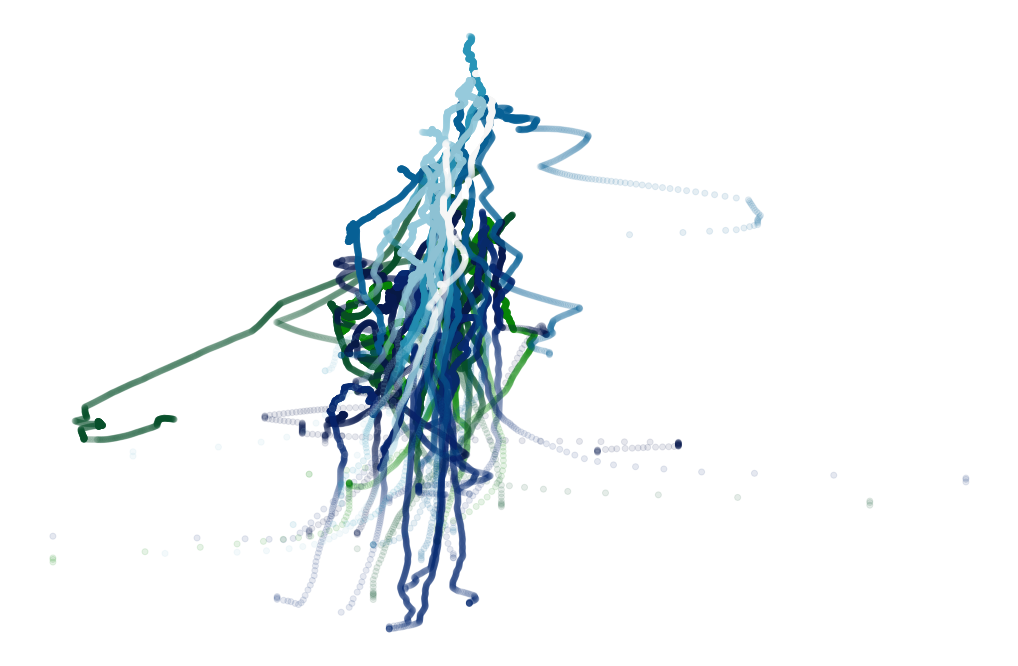

In [3]:
v['x'],v['y'] = random.sample(a_samp,2)
v['e'] = random.choice(e_samp)
v['w'] = random.choice(w_samp)
v['m'] = random.choice(m_samp)
x,y,e,w,m = v['x'],v['y'],v['e'],v['w'],v['m']
print(v)

df = loaded_df[loaded_df['xt'].isin(e)].copy()
df = avg(df, [x,y], w)
c = df['w'].to_list()
cm = plt.cm.get_cmap(m)
fig, ax = plt.subplots(figsize=(18,12))
sc = ax.scatter(df[x].to_list(),df[y].to_list(),c=c,marker='o',alpha=0.1,cmap=cm)
plt.axis('off')
plt.show()